In [2]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [3]:
# make plot work
#ENV["GRDIR"]=""
#Pkg.build("GR")

In [4]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [6]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames /opt/julia/packages/DataFrames/XuYBH/src/abstractdataframe/show.jl:39


In [7]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
phenotypes= dropmissing(phenotypes, :Died)
phenotypes[!,:Died]=phenotypes[!,:Died] .+ 1

sort(phenotypes[!,:Died])

3181-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [8]:
Died_model_equations = "Died = intercept + Batch + EntryAge + NurPenBatch"
Died_R=1.00000
Died_model=build_model(Died_model_equations,Died_R);

In [9]:
set_covariate(Died_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [10]:
Died_G1=0.277714E-01
set_random(Died_model,"NurPenBatch",Died_G1)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 27.529620 seconds (37.77 k allocations: 10.393 GiB, 0.07% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [12]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [13]:
Died_G3=0.909307E-01
@time add_genotypes(Died_model,M,Died_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  8.165145 seconds (4.72 M allocations: 21.031 GiB, 2.59% gc time)


In [14]:
h2=Died_G3/(Died_G3+Died_G1+ Died_R)

0.08128231814349862

In [15]:
@time Died_outCPi=runMCMC(Died_model,phenotypes,methods="BayesC", missing_phenotypes=true, Pi= 0.999, categorical_trait = true, estimatePi=true, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354



The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.000546



A Linear Mixed Model was build using model equations:

Died = intercept + Batch + EntryAge + NurPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436

MCMC Information:

methods                                      BayesC
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                     true
estimateScale                                  true
starting_value                                false
printout_frequency    

running MCMC for BayesC...100%|█████████████████████████| Time: 11:31:13




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


41520.495221 seconds (1.63 G allocations: 109.797 GiB, 0.13% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 435172×5 DataFrame…
  "Pi"                      => 1×3 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 488×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…
  "EBV_Died"                => 3205×3 DataFrame…

In [16]:
keys(Died_outCPi)

Base.KeySet for a Dict{Any,Any} with 9 entries. Keys:
  "marker effects"
  "Pi"
  "heritability"
  "location parameters"
  "residual variance"
  "ScaleEffectVar"
  "genetic_variance"
  "marker effects variance"
  "EBV_Died"

In [17]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.2780016782559293

In [18]:
pen=CSV.read("MCMC_samples_NurPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.0518645207040944

In [19]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

1.0

In [20]:
h2=Va/(Va+Vs+Ve)

0.20904484862712577

In [21]:
Pi=Died_outCPi["Pi"]

,π,Estimate,Std_Error
,Any,Any,Any
1,π,0.995333,0.00513668


In [22]:
Pi=CSV.read("MCMC_samples_pi.txt",delim = ' ',header=false)
insertcols!(Pi, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Column1
,Int64,Float64
1,1,0.998532
2,2,0.997526
3,3,0.998834
4,4,0.99938
5,5,0.999159
6,6,0.999741
7,7,0.999187
8,8,0.998941
9,9,0.998639


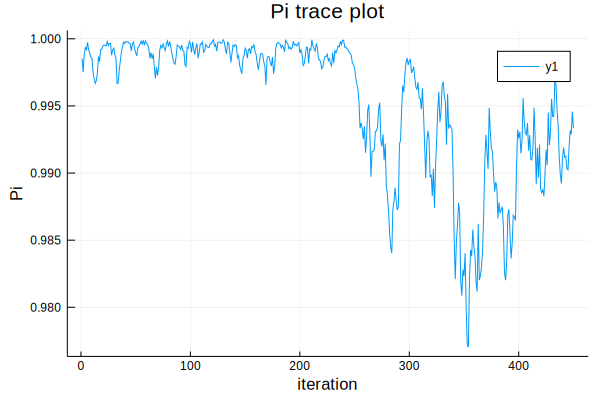

In [23]:
using Plots
x = Pi[!,1]; y = Pi[!,2]; # These are the plotting data
plot(x,y, title = "Pi trace plot",
        xlabel = "iteration", ylabel = "Pi")

In [24]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Died
,Int64,Float64
1,1,0.198211
2,2,0.312687
3,3,0.179232
4,4,0.217057
5,5,0.106016
6,6,0.13227
7,7,0.251469
8,8,0.291613
9,9,0.289034


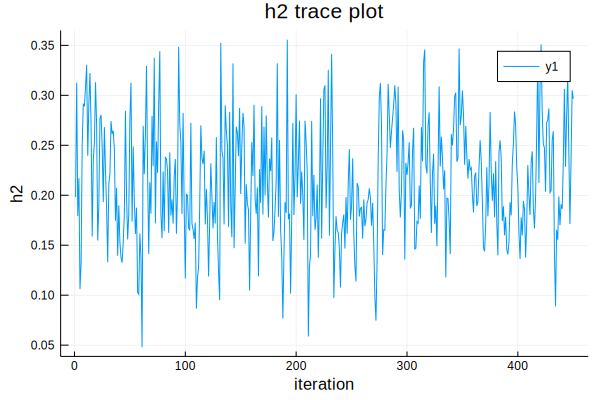

In [25]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [26]:
Died_model_equations = "Died = intercept + Batch + EntryAge + NurPenBatch"
Died_R=1.00000
Died_model=build_model(Died_model_equations,Died_R)
set_covariate(Died_model,"EntryAge")
Died_G1=0.277714E-01
set_random(Died_model,"NurPenBatch",Died_G1)
Died_G3=0.909307E-01
@time add_genotypes(Died_model,M,Died_G3,header=false, rowID=rowID)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
623.774941 seconds (870.69 k allocations: 20.848 GiB, 9.47% gc time)


In [27]:
@time Died_outB=runMCMC(Died_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999,estimateScale=true, categorical_trait = true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.

The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.000546



A Linear Mixed Model was build using model equations:

Died = intercept + Batch + EntryAge + NurPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436

MCMC Information:

methods                                      BayesB
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                    false
estimateScale        

running MCMC for BayesB...100%|█████████████████████████| Time: 13:00:37




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


46861.056048 seconds (113.08 G allocations: 2.368 TiB, 0.85% gc time)


Dict{Any,Any} with 8 entries:
  "marker effects"          => 435172×5 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 488×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…
  "EBV_Died"                => 3205×3 DataFrame…

In [28]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

0.13866500830216785

In [29]:
pen=CSV.read("MCMC_samples_NurPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

0.0432662440436622

In [30]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

1.0

In [31]:
h2=Va/(Va+Ve)

0.12177858043510746

In [32]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Died
,Int64,Float64
1,1,0.0785241
2,2,0.0826021
3,3,0.0922568
4,4,0.0812819
5,5,0.0863117
6,6,0.090341
7,7,0.0985591
8,8,0.102101
9,9,0.0952378


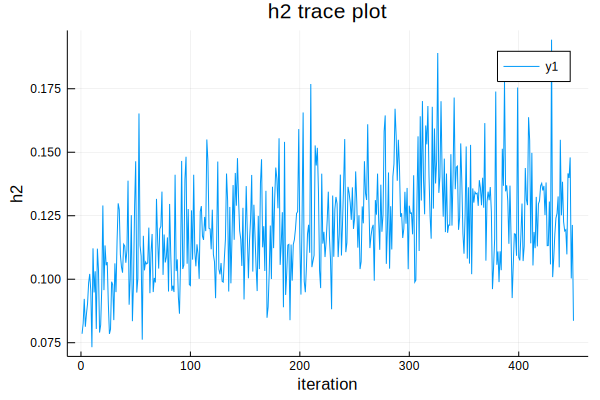

In [33]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [3]:
@time Died_outB,Died_winVarProps = GWAS("MCMC_samples_marker_effects_Died.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    M;header=true,window_size="0.25 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:42:08


BoundsError: BoundsError: attempt to access (9375×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 29     │ 1      │ 7000000   │ 7250000   │ 7002079   │ 7247588   │ 59     │ 0.00601828     │ 0.00776212  │ 4.11     │ 0.542222   │ 0.542222  │
│ 2    │ 1     │ 1627   │ 2      │ 132750000 │ 133000000 │ 132754079 │ 132982619 │ 62     │ 0.00105111     │ 0.00360737  │ 0.75     │ 0.16       │ 0.351111  │
│ 3    │ 1     │ 6416   │ 13     │ 28500000  │ 28750000  │ 28501171  │ 28748649  │ 75     │ 0.000407297    │ 0.00180369  │ 0.26     │ 0.131111   │ 0.277778  │
│ 4    │ 1     │ 6085   │ 12     │ 7500000   │ 7750000   │ 7500005   │ 7747753   │ 76     │ 0.000421707    │ 0.0023257   │ 0.28     │ 0.1        │ 0.233333  │
│ 5    │ 1     │ 3952   │ 7      │ 23000000  │ 23250000  │ 23001142  │ 23249903  │ 78     │ 0.000356299    │ 0.00178023  │ 0.24     │ 0.0933333  │ 0.205333  │
│ 6    │ 1     │ 5004   │ 9      │ 25000000  │ 25250000  │ 25000259  │ 25240888  │ 76     │ 0.000256016    │ 0.0012015   │ 0.18     │ 0.0933333  │ 0.186667  │
│ 7    │ 1     │ 6071   │ 12     │ 4000000   │ 4250000   │ 4000815   │ 4249194   │ 77     │ 0.000201573    │ 0.0015977   │ 0.13     │ 0.0911111  │ 0.173016  │
│ 8    │ 1     │ 2995   │ 5      │ 58750000  │ 59000000  │ 58751257  │ 58987988  │ 77     │ 5.64977e-5     │ 0.000292002 │ 0.04     │ 0.0866667  │ 0.162222  │
│ 9    │ 1     │ 5596   │ 10     │ 33750000  │ 34000000  │ 33756186  │ 33994117  │ 71     │ 6.82421e-5     │ 0.000338947 │ 0.05     │ 0.0844444  │ 0.15358   │
│ 10   │ 1     │ 8132   │ 15     │ 108000000 │ 108250000 │ 108000102 │ 108246782 │ 64     │ 0.000236345    │ 0.00119907  │ 0.16     │ 0.0844444  │ 0.146667  │
│ 11   │ 1     │ 4634   │ 8      │ 71500000  │ 71750000  │ 71500357  │ 71743682  │ 67     │ 0.000188202    │ 0.00105098  │ 0.13     │ 0.08       │ 0.140606  │
│ 12   │ 1     │ 7162   │ 14     │ 7000000   │ 7250000   │ 7001829   │ 7248925   │ 70     │ 0.00013888     │ 0.000998677 │ 0.09     │ 0.08       │ 0.135556  │
│ 13   │ 1     │ 1569   │ 2      │ 118250000 │ 118500000 │ 118251469 │ 118497478 │ 57     │ 0.000113201    │ 0.000754116 │ 0.08     │ 0.0777778  │ 0.131111  │
│ 14   │ 1     │ 6901   │ 13     │ 150000000 │ 150250000 │ 150107858 │ 150247558 │ 42     │ 0.000302617    │ 0.00155982  │ 0.22     │ 0.0777778  │ 0.127302  │
│ 15   │ 1     │ 3340   │ 6      │ 40250000  │ 40500000  │ 40264857  │ 40498737  │ 66     │ 0.000167204    │ 0.000894241 │ 0.12     │ 0.0755556  │ 0.123852  │
│ 16   │ 1     │ 5593   │ 10     │ 33000000  │ 33250000  │ 33002080  │ 33249524  │ 67     │ 8.63627e-5     │ 0.000442554 │ 0.06     │ 0.0755556  │ 0.120833  │
│ 17   │ 1     │ 8206   │ 15     │ 126500000 │ 126750000 │ 126505438 │ 126746486 │ 67     │ 9.96639e-5     │ 0.000770895 │ 0.08     │ 0.0755556  │ 0.11817   │
│ 18   │ 1     │ 2700   │ 4      │ 116000000 │ 116250000 │ 116009255 │ 116248637 │ 60     │ 0.000200618    │ 0.00112904  │ 0.15     │ 0.0733333  │ 0.115679  │
│ 19   │ 1     │ 2751   │ 4      │ 128750000 │ 129000000 │ 128750655 │ 128996809 │ 75     │ 0.000107663    │ 0.000700759 │ 0.08     │ 0.0733333  │ 0.11345   │
│ 20   │ 1     │ 3988   │ 7      │ 32000000  │ 32250000  │ 32001514  │ 32248315  │ 67     │ 0.000112703    │ 0.0008125   │ 0.08     │ 0.0733333  │ 0.111444  │
│ 21   │ 1     │ 6417   │ 13     │ 28750000  │ 29000000  │ 28751126  │ 28995961  │ 55     │ 0.000116101    │ 0.000815229 │ 0.08     │ 0.0711111  │ 0.109524  │
│ 22   │ 1     │ 8645   │ 17     │ 15750000  │ 16000000  │ 15758097  │ 15995802  │ 70     │ 0.000223492    │ 0.00164178  │ 0.14     │ 0.0711111  │ 0.107778  │
│ 23   │ 1     │ 8985   │ 18     │ 37500000  │ 37750000  │ 37501757  │ 37749488  │ 74     │ 0.000107482    │ 0.000618218 │ 0.08     │ 0.0711111  │ 0.106184  │
│ 24   │ 1     │ 149    │ 1      │ 37000000  │ 37250000  │ 37001580  │ 37245154  │ 60     │ 7.49311e-5     │ 0.000378237 │ 0.05     │ 0.0688889  │ 0.10463   │
│ 25   │ 1     │ 2207   │ 3      │ 125750000 │ 126000000 │ 125753088 │ 125996584 │ 67     │ 0.000112748    │ 0.000940712 │ 0.08     │ 0.0688889  │ 0.1032    │
│ 26   │ 1     │ 4277   │ 7      │ 104250000 │ 104500000 │ 104254385 │ 104497609 │ 59     │ 0.000250159    │ 0.00164699  │ 0.17     │ 0.0688889  │ 0.10188   │
│ 27   │ 1     │ 4295   │ 7      │ 108750000 │ 109000000 │ 108751068 │ 108996302 │ 60     │ 0.000142173    │ 0.000854145 │ 0.1      │ 0.0688889  │ 0.100658  │
│ 28   │ 1     │ 5444   │ 9      │ 135250000 │ 135500000 │ 135252989 │ 135497526 │ 71     │ 8.15757e-5     │ 0.000502366 │ 0.06     │ 0.0688889  │ 0.0995238 │
│ 29   │ 1     │ 6415   │ 13     │ 28250000  │ 28500000  │ 28250127  │ 28493742  │ 67     │ 0.000159471    │ 0.00099509  │ 0.12     │ 0.0688889  │ 0.0984674 │
│ 30   │ 1     │ 2463   │ 4      │ 56750000  │ 57000000  │ 56779426  │ 56995249  │ 56     │ 0.000104984    │ 0.000726833 │ 0.07     │ 0.0666667  │ 0.0974074 │
│ 31   │ 1     │ 6070   │ 12     │ 3750000   │ 4000000   │ 3849796   │ 3998905   │ 39     │ 0.000199674    │ 0.00109409  │ 0.13     │ 0.0666667  │ 0.0964158 │
│ 32   │ 1     │ 6443   │ 13     │ 35250000  │ 35500000  │ 35257382  │ 35498603  │ 59     │ 0.000108631    │ 0.000619709 │ 0.08     │ 0.0666667  │ 0.0954861 │
│ 33   │ 1     │ 1583   │ 2      │ 121750000 │ 122000000 │ 121750641 │ 121996522 │ 58     │ 0.000198591    │ 0.00109105  │ 0.14     │ 0.0644444  │ 0.0945455 │
│ 34   │ 1     │ 5500   │ 10     │ 9750000   │ 10000000  │ 9751483   │ 9998051   │ 74     │ 5.05309e-5     │ 0.00026492  │ 0.04     │ 0.0644444  │ 0.0936601 │
│ 35   │ 1     │ 5933   │ 11     │ 48750000  │ 49000000  │ 48752853  │ 48997952  │ 52     │ 0.000143573    │ 0.000976293 │ 0.11     │ 0.0644444  │ 0.0928254 │
│ 36   │ 1     │ 6876   │ 13     │ 143750000 │ 144000000 │ 143780475 │ 143988152 │ 43     │ 0.000231595    │ 0.00145142  │ 0.16     │ 0.0644444  │ 0.092037  │
│ 37   │ 1     │ 7188   │ 14     │ 13500000  │ 13750000  │ 13506704  │ 13746155  │ 57     │ 0.000121853    │ 0.000700315 │ 0.09     │ 0.0644444  │ 0.0912913 │
│ 38   │ 1     │ 7653   │ 14     │ 129750000 │ 130000000 │ 129750106 │ 129998870 │ 69     │ 5.91092e-5     │ 0.000367932 │ 0.04     │ 0.0644444  │ 0.0905848 │
│ 39   │ 1     │ 8131   │ 15     │ 107750000 │ 108000000 │ 107751064 │ 107995253 │ 61     │ 0.000135765    │ 0.0011177   │ 0.09     │ 0.0644444  │ 0.0899145 │
│ 40   │ 1     │ 8644   │ 17     │ 15500000  │ 15750000  │ 15501845  │ 15747423  │ 58     │ 0.000362753    │ 0.00222866  │ 0.26     │ 0.0644444  │ 0.0892778 │
│ 41   │ 1     │ 6008   │ 11     │ 67500000  │ 67750000  │ 67501184  │ 67748934  │ 70     │ 6.72011e-5     │ 0.000370432 │ 0.05     │ 0.0622222  │ 0.0886179 │
│ 42   │ 1     │ 6359   │ 13     │ 14250000  │ 14500000  │ 14252479  │ 14496033  │ 59     │ 0.000147293    │ 0.00109841  │ 0.09     │ 0.0622222  │ 0.0879894 │
│ 43   │ 1     │ 6741   │ 13     │ 109750000 │ 110000000 │ 109751206 │ 109999581 │ 72     │ 9.75028e-5     │ 0.000620235 │ 0.08     │ 0.0622222  │ 0.0873902 │
│ 44   │ 1     │ 598    │ 1      │ 149500000 │ 149750000 │ 149501491 │ 149747877 │ 55     │ 0.000108297    │ 0.000689865 │ 0.08     │ 0.06       │ 0.0867677 │
│ 45   │ 1     │ 4052   │ 7      │ 48000000  │ 48250000  │ 48002486  │ 48248184  │ 75     │ 5.09484e-5     │ 0.000313371 │ 0.04     │ 0.06       │ 0.0861728 │
│ 46   │ 1     │ 6335   │ 13     │ 8250000   │ 8500000   │ 8253224   │ 8499912   │ 72     │ 3.35896e-5     │ 0.000170103 │ 0.03     │ 0.06       │ 0.0856039 │
│ 47   │ 1     │ 6626   │ 13     │ 81000000  │ 81250000  │ 81006231  │ 81249573  │ 66     │ 0.000142908    │ 0.00115007  │ 0.1      │ 0.06       │ 0.0850591 │
│ 48   │ 1     │ 7783   │ 15     │ 20500000  │ 20750000  │ 20514445  │ 20743071  │ 51     │ 0.000110177    │ 0.000619543 │ 0.08     │ 0.06       │ 0.084537  │
│ 49   │ 1     │ 7891   │ 15     │ 47500000  │ 47750000  │ 47505659  │ 47747743  │ 53     │ 0.000135321    │ 0.000823027 │ 0.1      │ 0.06       │ 0.0840363 │
│ 50   │ 1     │ 667    │ 1      │ 166750000 │ 167000000 │ 166765882 │ 166999086 │ 43     │ 5.18338e-5     │ 0.000334174 │ 0.03     │ 0.0577778  │ 0.0835111 │
│ 51   │ 1     │ 1565   │ 2      │ 117250000 │ 117500000 │ 117250593 │ 117498764 │ 66     │ 3.23638e-5     │ 0.000152827 │ 0.02     │ 0.0577778  │ 0.0830065 │
│ 52   │ 1     │ 1638   │ 2      │ 135500000 │ 135750000 │ 135500512 │ 135746746 │ 67     │ 8.26701e-5     │ 0.000460762 │ 0.06     │ 0.0577778  │ 0.0825214 │
│ 53   │ 1     │ 2757   │ 4      │ 130250000 │ 130500000 │ 130258501 │ 130497007 │ 78     │ 4.4383e-5      │ 0.000223783 │ 0.03     │ 0.0577778  │ 0.0820545 │
│ 54   │ 1     │ 3341   │ 6      │ 40500000  │ 40750000  │ 40501168  │ 40749242  │ 60     │ 6.69012e-5     │ 0.000505906 │ 0.05     │ 0.0577778  │ 0.0816049 │
│ 55   │ 1     │ 3740   │ 6      │ 141000000 │ 141250000 │ 141001519 │ 141247885 │ 46     │ 0.000118824    │ 0.000715809 │ 0.08     │ 0.0577778  │ 0.0811717 │
│ 56   │ 1     │ 4425   │ 8      │ 19250000  │ 19500000  │ 19252767  │ 19493764  │ 65     │ 3.27861e-5     │ 0.000156728 │ 0.02     │ 0.0577778  │ 0.080754  │
│ 57   │ 1     │ 5159   │ 9      │ 64000000  │ 64250000  │ 64000934  │ 64247042  │ 77     │ 4.1897e-5      │ 0.000213439 │ 0.03     │ 0.0577778  │ 0.0803509 │
│ 58   │ 1     │ 5597   │ 10     │ 34000000  │ 34250000  │ 34006816  │ 34242823  │ 49     │ 0.00011508     │ 0.000760754 │ 0.08     │ 0.0577778  │ 0.0799617 │
│ 59   │ 1     │ 8793   │ 17     │ 52750000  │ 53000000  │ 52750520  │ 52999509  │ 81     │ 6.5845e-5      │ 0.000414485 │ 0.05     │ 0.0577778  │ 0.0795857 │
│ 60   │ 1     │ 1750   │ 3      │ 11500000  │ 11750000  │ 11500741  │ 11747968  │ 58     │ 0.000113315    │ 0.000825534 │ 0.09     │ 0.0555556  │ 0.0791852 │
│ 61   │ 1     │ 2718   │ 4      │ 120500000 │ 120750000 │ 120500134 │ 120747189 │ 66     │ 6.62321e-5     │ 0.000449403 │ 0.05     │ 0.0555556  │ 0.0787978 │
│ 62   │ 1     │ 3168   │ 5      │ 102000000 │ 102250000 │ 102003878 │ 102248859 │ 79     │ 4.56098e-5     │ 0.000278199 │ 0.03     │ 0.0555556  │ 0.0784229 │
│ 63   │ 1     │ 3200   │ 6      │ 5250000   │ 5500000   │ 5250123   │ 5499430   │ 68     │ 9.58641e-5     │ 0.00111668  │ 0.05     │ 0.0555556  │ 0.07806   │
│ 64   │ 1     │ 3245   │ 6      │ 16500000  │ 16750000  │ 16505469  │ 16740504  │ 72     │ 9.20675e-5     │ 0.000677645 │ 0.06     │ 0.0555556  │ 0.0777083 │
│ 65   │ 1     │ 3436   │ 6      │ 64750000  │ 65000000  │ 64750640  │ 64999828  │ 63     │ 6.22887e-5     │ 0.000538972 │ 0.04     │ 0.0555556  │ 0.0773675 │
│ 66   │ 1     │ 3655   │ 6      │ 119500000 │ 119750000 │ 119509704 │ 119745045 │ 51     │ 0.000105322    │ 0.000645259 │ 0.07     │ 0.0555556  │ 0.077037  │
│ 67   │ 1     │ 3749   │ 6      │ 143250000 │ 143500000 │ 143253486 │ 143498372 │ 55     │ 8.23993e-5     │ 0.0005215   │ 0.06     │ 0.0555556  │ 0.0767164 │
│ 68   │ 1     │ 4892   │ 8      │ 136000000 │ 136250000 │ 136000761 │ 136249787 │ 74     │ 8.30981e-5     │ 0.000671935 │ 0.06     │ 0.0555556  │ 0.0764052 │
│ 69   │ 1     │ 5849   │ 11     │ 27500000  │ 27750000  │ 27500630  │ 27745733  │ 60     │ 0.000101731    │ 0.000612155 │ 0.07     │ 0.0555556  │ 0.0761031 │
│ 70   │ 1     │ 6374   │ 13     │ 18000000  │ 18250000  │ 18006278  │ 18246240  │ 70     │ 3.94883e-5     │ 0.000216749 │ 0.03     │ 0.0555556  │ 0.0758095 │
│ 71   │ 1     │ 6413   │ 13     │ 27750000  │ 28000000  │ 27751397  │ 27990503  │ 58     │ 0.000114028    │ 0.0006286   │ 0.09     │ 0.0555556  │ 0.0755243 │
│ 72   │ 1     │ 6867   │ 13     │ 141500000 │ 141750000 │ 141511605 │ 141749444 │ 40     │ 0.000187486    │ 0.00125744  │ 0.13     │ 0.0555556  │ 0.0752469 │
│ 73   │ 1     │ 7187   │ 14     │ 13250000  │ 13500000  │ 13253548  │ 13499612  │ 58     │ 9.6842e-5      │ 0.000886895 │ 0.07     │ 0.0555556  │ 0.0749772 │
│ 74   │ 1     │ 7362   │ 14     │ 57000000  │ 57250000  │ 57000936  │ 57247597  │ 74     │ 5.58449e-5     │ 0.000285604 │ 0.04     │ 0.0555556  │ 0.0747147 │
│ 75   │ 1     │ 8134   │ 15     │ 108500000 │ 108750000 │ 108500533 │ 108746940 │ 56     │ 7.24951e-5     │ 0.00047389  │ 0.05     │ 0.0555556  │ 0.0744593 │
│ 76   │ 1     │ 8248   │ 15     │ 137000000 │ 137250000 │ 137002628 │ 137249709 │ 62     │ 0.000186569    │ 0.00133677  │ 0.12     │ 0.0555556  │ 0.0742105 │
│ 77   │ 1     │ 8405   │ 16     │ 35750000  │ 36000000  │ 35754215  │ 35994847  │ 56     │ 4.85707e-5     │ 0.000267242 │ 0.04     │ 0.0555556  │ 0.0739683 │
│ 78   │ 1     │ 8702   │ 17     │ 30000000  │ 30250000  │ 30002660  │ 30238567  │ 72     │ 3.33393e-5     │ 0.000198738 │ 0.02     │ 0.0555556  │ 0.0737322 │
│ 79   │ 1     │ 8857   │ 18     │ 5500000   │ 5750000   │ 5506600   │ 5745009   │ 66     │ 0.000119712    │ 0.000884937 │ 0.09     │ 0.0555556  │ 0.0735021 │
│ 80   │ 1     │ 959    │ 1      │ 239750000 │ 240000000 │ 239755990 │ 239999041 │ 64     │ 3.41553e-5     │ 0.000191762 │ 0.03     │ 0.0533333  │ 0.07325   │
│ 81   │ 1     │ 1616   │ 2      │ 130000000 │ 130250000 │ 130005707 │ 130246847 │ 60     │ 3.44929e-5     │ 0.000231149 │ 0.03     │ 0.0533333  │ 0.0730041 │
│ 82   │ 1     │ 1669   │ 2      │ 143250000 │ 143500000 │ 143250758 │ 143498591 │ 61     │ 7.94439e-5     │ 0.000534964 │ 0.06     │ 0.0533333  │ 0.0727642 │
│ 83   │ 1     │ 2635   │ 4      │ 99750000  │ 100000000 │ 99752925  │ 99993326  │ 67     │ 3.35221e-5     │ 0.000186923 │ 0.03     │ 0.0533333  │ 0.0725301 │
│ 84   │ 1     │ 2728   │ 4      │ 123000000 │ 123250000 │ 123000467 │ 123247587 │ 47     │ 7.63051e-5     │ 0.000506405 │ 0.06     │ 0.0533333  │ 0.0723016 │
│ 85   │ 1     │ 2810   │ 5      │ 12500000  │ 12750000  │ 12502932  │ 12747027  │ 73     │ 5.44263e-5     │ 0.000327051 │ 0.04     │ 0.0533333  │ 0.0720784 │
│ 86   │ 1     │ 4853   │ 8      │ 126250000 │ 126500000 │ 126251096 │ 126499310 │ 61     │ 4.03313e-5     │ 0.000234966 │ 0.03     │ 0.0533333  │ 0.0718605 │
│ 87   │ 1     │ 4913   │ 9      │ 2250000   │ 2500000   │ 2252059   │ 2498582   │ 79     │ 2.4857e-5      │ 0.000124807 │ 0.02     │ 0.0533333  │ 0.0716475 │
│ 88   │ 1     │ 5005   │ 9      │ 25250000  │ 25500000  │ 25253728  │ 25499833  │ 81     │ 3.99587e-5     │ 0.000252272 │ 0.03     │ 0.0533333  │ 0.0714394 │
│ 89   │ 1     │ 5713   │ 10     │ 63000000  │ 63250000  │ 63000776  │ 63244529  │ 69     │ 9.41329e-5     │ 0.000958126 │ 0.06     │ 0.0533333  │ 0.071236  │
│ 90   │ 1     │ 6596   │ 13     │ 73500000  │ 73750000  │ 73503470  │ 73748133  │ 61     │ 0.000152734    │ 0.00125177  │ 0.1      │ 0.0533333  │ 0.071037  │
│ 91   │ 1     │ 6877   │ 13     │ 144000000 │ 144250000 │ 144002335 │ 144246626 │ 58     │ 6.48334e-5     │ 0.000585797 │ 0.04     │ 0.0533333  │ 0.0708425 │
│ 92   │ 1     │ 7013   │ 13     │ 178250000 │ 178500000 │ 178251384 │ 178499455 │ 63     │ 9.15215e-5     │ 0.000606662 │ 0.07     │ 0.0533333  │ 0.0706522 │
│ 93   │ 1     │ 7651   │ 14     │ 129250000 │ 129500000 │ 129251113 │ 129497008 │ 69     │ 5.78562e-5     │ 0.00030412  │ 0.05     │ 0.0533333  │ 0.0704659 │
│ 94   │ 1     │ 8799   │ 17     │ 54250000  │ 54500000  │ 54252218  │ 54495789  │ 77     │ 4.49225e-5     │ 0.00026319  │ 0.03     │ 0.0533333  │ 0.0702837 │
│ 95   │ 1     │ 467    │ 1      │ 116750000 │ 117000000 │ 116750487 │ 116998626 │ 51     │ 4.48798e-5     │ 0.000406761 │ 0.03     │ 0.0511111  │ 0.0700819 │
│ 96   │ 1     │ 1806   │ 3      │ 25500000  │ 25750000  │ 25503690  │ 25747038  │ 74     │ 0.000142488    │ 0.00107559  │ 0.1      │ 0.0511111  │ 0.0698843 │
│ 97   │ 1     │ 2251   │ 4      │ 3750000   │ 4000000   │ 3751657   │ 3998029   │ 76     │ 3.38376e-5     │ 0.000243461 │ 0.03     │ 0.0511111  │ 0.0696907 │
│ 98   │ 1     │ 3059   │ 5      │ 74750000  │ 75000000  │ 74751361  │ 74998241  │ 56     │ 0.000100648    │ 0.000711969 │ 0.07     │ 0.0511111  │ 0.0695011 │
│ 99   │ 1     │ 3174   │ 5      │ 103500000 │ 103750000 │ 103504656 │ 103746591 │ 43     │ 0.000117969    │ 0.000726944 │ 0.09     │ 0.0511111  │ 0.0693154 │
│ 100  │ 1     │ 3692   │ 6      │ 129000000 │ 129250000 │ 129001285 │ 129249481 │ 58     │ 2.86519e-5     │ 0.000152982 │ 0.02     │ 0.0511111  │ 0.0691333 │
│ 101  │ 1     │ 3977   │ 7      │ 29250000  │ 29500000  │ 29252271  │ 29499552  │ 78     │ 4.90703e-5     │ 0.000477696 │ 0.04     │ 0.0511111  │ 0.0689549 │
│ 102  │ 1     │ 4633   │ 8      │ 71250000  │ 71500000  │ 71254661  │ 71498650  │ 57     │ 0.000115667    │ 0.000933151 │ 0.09     │ 0.0511111  │ 0.06878   │
│ 103  │ 1     │ 4969   │ 9      │ 16250000  │ 16500000  │ 16253557  │ 16493785  │ 70     │ 7.2067e-5      │ 0.000531467 │ 0.05     │ 0.0511111  │ 0.0686084 │
│ 104  │ 1     │ 5266   │ 9      │ 90750000  │ 91000000  │ 90755392  │ 90998982  │ 71     │ 2.74401e-5     │ 0.000130922 │ 0.02     │ 0.0511111  │ 0.0684402 │
│ 105  │ 1     │ 5635   │ 10     │ 43500000  │ 43750000  │ 43501152  │ 43748989  │ 80     │ 5.70477e-5     │ 0.000452006 │ 0.04     │ 0.0511111  │ 0.0682751 │
│ 106  │ 1     │ 6542   │ 13     │ 60000000  │ 60250000  │ 60002688  │ 60246396  │ 57     │ 4.46472e-5     │ 0.000284206 │ 0.03     │ 0.0511111  │ 0.0681132 │
│ 107  │ 1     │ 6903   │ 13     │ 150500000 │ 150750000 │ 150505386 │ 150741879 │ 57     │ 0.000104671    │ 0.000820261 │ 0.07     │ 0.0511111  │ 0.0679543 │
│ 108  │ 1     │ 7353   │ 14     │ 54750000  │ 55000000  │ 54757348  │ 54993594  │ 76     │ 2.53671e-5     │ 0.000128933 │ 0.02     │ 0.0511111  │ 0.0677984 │
│ 109  │ 1     │ 8136   │ 15     │ 109000000 │ 109250000 │ 109001663 │ 109248593 │ 53     │ 3.75925e-5     │ 0.000214571 │ 0.03     │ 0.0511111  │ 0.0676453 │
│ 110  │ 1     │ 8371   │ 16     │ 27250000  │ 27500000  │ 27251369  │ 27497613  │ 60     │ 9.68948e-5     │ 0.000723014 │ 0.07     │ 0.0511111  │ 0.0674949 │
│ 111  │ 1     │ 2106   │ 3      │ 100500000 │ 100750000 │ 100505290 │ 100747577 │ 60     │ 6.95868e-5     │ 0.000698988 │ 0.05     │ 0.0488889  │ 0.0673273 │
│ 112  │ 1     │ 2192   │ 3      │ 122000000 │ 122250000 │ 122002698 │ 122228866 │ 67     │ 5.40691e-5     │ 0.000376692 │ 0.04     │ 0.0488889  │ 0.0671627 │
│ 113  │ 1     │ 2199   │ 3      │ 123750000 │ 124000000 │ 123755927 │ 123998700 │ 67     │ 4.12476e-5     │ 0.000329248 │ 0.03     │ 0.0488889  │ 0.067001  │
│ 114  │ 1     │ 2222   │ 3      │ 129500000 │ 129750000 │ 129502968 │ 129748906 │ 80     │ 3.7631e-5      │ 0.000250346 │ 0.03     │ 0.0488889  │ 0.0668421 │
│ 115  │ 1     │ 2817   │ 5      │ 14250000  │ 14500000  │ 14255605  │ 14499235  │ 74     │ 3.61788e-5     │ 0.000232726 │ 0.02     │ 0.0488889  │ 0.066686  │
│ 116  │ 1     │ 3439   │ 6      │ 65500000  │ 65750000  │ 65500129  │ 65747698  │ 81     │ 3.451e-5       │ 0.000223899 │ 0.02     │ 0.0488889  │ 0.0665326 │
│ 117  │ 1     │ 3953   │ 7      │ 23250000  │ 23500000  │ 23252697  │ 23496766  │ 65     │ 0.000102607    │ 0.000755173 │ 0.07     │ 0.0488889  │ 0.0663818 │
│ 118  │ 1     │ 3989   │ 7      │ 32250000  │ 32500000  │ 32252312  │ 32499573  │ 70     │ 8.09613e-5     │ 0.000636859 │ 0.05     │ 0.0488889  │ 0.0662335 │
│ 119  │ 1     │ 4190   │ 7      │ 82500000  │ 82750000  │ 82501326  │ 82746264  │ 42     │ 7.9058e-5      │ 0.000609063 │ 0.05     │ 0.0488889  │ 0.0660878 │
│ 120  │ 1     │ 4359   │ 8      │ 2750000   │ 3000000   │ 2751642   │ 2996467   │ 59     │ 7.02316e-5     │ 0.000490142 │ 0.05     │ 0.0488889  │ 0.0659444 │
│ 121  │ 1     │ 5402   │ 9      │ 124750000 │ 125000000 │ 124751476 │ 124991294 │ 59     │ 3.38166e-5     │ 0.000188099 │ 0.02     │ 0.0488889  │ 0.0658035 │
│ 122  │ 1     │ 5452   │ 9      │ 137250000 │ 137500000 │ 137251602 │ 137497566 │ 78     │ 6.03613e-5     │ 0.000421953 │ 0.05     │ 0.0488889  │ 0.0656648 │
│ 123  │ 1     │ 5457   │ 9      │ 138500000 │ 138750000 │ 138501019 │ 138746611 │ 73     │ 6.77688e-5     │ 0.000515865 │ 0.05     │ 0.0488889  │ 0.0655285 │
│ 124  │ 1     │ 5988   │ 11     │ 62500000  │ 62750000  │ 62502451  │ 62749948  │ 75     │ 3.1006e-5      │ 0.000200559 │ 0.02     │ 0.0488889  │ 0.0653943 │
│ 125  │ 1     │ 6086   │ 12     │ 7750000   │ 8000000   │ 7750152   │ 7982108   │ 66     │ 5.15785e-5     │ 0.000338825 │ 0.04     │ 0.0488889  │ 0.0652622 │
│ 126  │ 1     │ 6091   │ 12     │ 9000000   │ 9250000   │ 9001175   │ 9249412   │ 75     │ 4.01397e-5     │ 0.000242728 │ 0.03     │ 0.0488889  │ 0.0651323 │
│ 127  │ 1     │ 6221   │ 12     │ 41500000  │ 41750000  │ 41503380  │ 41748207  │ 76     │ 4.04088e-5     │ 0.000235756 │ 0.03     │ 0.0488889  │ 0.0650044 │
│ 128  │ 1     │ 8196   │ 15     │ 124000000 │ 124250000 │ 124007839 │ 124247114 │ 62     │ 2.92255e-5     │ 0.000139681 │ 0.02     │ 0.0488889  │ 0.0648785 │
│ 129  │ 1     │ 362    │ 1      │ 90250000  │ 90500000  │ 90251598  │ 90476961  │ 46     │ 5.29668e-5     │ 0.000294328 │ 0.04     │ 0.0466667  │ 0.0647373 │
│ 130  │ 1     │ 559    │ 1      │ 139750000 │ 140000000 │ 139750247 │ 139999096 │ 57     │ 4.16249e-5     │ 0.000315637 │ 0.03     │ 0.0466667  │ 0.0645983 │
│ 131  │ 1     │ 1594   │ 2      │ 124500000 │ 124750000 │ 124500103 │ 124737286 │ 51     │ 6.0866e-5      │ 0.000533475 │ 0.05     │ 0.0466667  │ 0.0644614 │
│ 132  │ 1     │ 1650   │ 2      │ 138500000 │ 138750000 │ 138502598 │ 138749899 │ 74     │ 4.14318e-5     │ 0.000441545 │ 0.03     │ 0.0466667  │ 0.0643266 │
│ 133  │ 1     │ 2117   │ 3      │ 103250000 │ 103500000 │ 103250870 │ 103498310 │ 63     │ 2.64051e-5     │ 0.000148515 │ 0.02     │ 0.0466667  │ 0.0641938 │
│ 134  │ 1     │ 2673   │ 4      │ 109250000 │ 109500000 │ 109252758 │ 109498754 │ 67     │ 5.27297e-5     │ 0.000405923 │ 0.04     │ 0.0466667  │ 0.064063  │
│ 135  │ 1     │ 2688   │ 4      │ 113000000 │ 113250000 │ 113001261 │ 113247206 │ 72     │ 2.48523e-5     │ 0.000137759 │ 0.02     │ 0.0466667  │ 0.0639342 │
│ 136  │ 1     │ 3172   │ 5      │ 103000000 │ 103250000 │ 103002119 │ 103248178 │ 66     │ 8.59464e-5     │ 0.000813316 │ 0.07     │ 0.0466667  │ 0.0638072 │
│ 137  │ 1     │ 3348   │ 6      │ 42250000  │ 42500000  │ 42251326  │ 42497077  │ 71     │ 3.37598e-5     │ 0.000245868 │ 0.03     │ 0.0466667  │ 0.0636821 │
│ 138  │ 1     │ 3636   │ 6      │ 114750000 │ 115000000 │ 114758831 │ 114995636 │ 57     │ 4.43868e-5     │ 0.000247767 │ 0.03     │ 0.0466667  │ 0.0635588 │
│ 139  │ 1     │ 3722   │ 6      │ 136500000 │ 136750000 │ 136501415 │ 136744015 │ 62     │ 3.60468e-5     │ 0.000307187 │ 0.03     │ 0.0466667  │ 0.0634373 │
│ 140  │ 1     │ 3949   │ 7      │ 22250000  │ 22500000  │ 22253336  │ 22497178  │ 35     │ 0.00011399     │ 0.000883535 │ 0.08     │ 0.0466667  │ 0.0633175 │
│ 141  │ 1     │ 3990   │ 7      │ 32500000  │ 32750000  │ 32503364  │ 32740776  │ 60     │ 5.0971e-5      │ 0.000330445 │ 0.04     │ 0.0466667  │ 0.0631994 │
│ 142  │ 1     │ 4047   │ 7      │ 46750000  │ 47000000  │ 46753106  │ 46998696  │ 55     │ 9.88088e-5     │ 0.00084152  │ 0.06     │ 0.0466667  │ 0.0630829 │
│ 143  │ 1     │ 4103   │ 7      │ 60750000  │ 61000000  │ 60756181  │ 60997484  │ 26     │ 0.000122432    │ 0.000876282 │ 0.08     │ 0.0466667  │ 0.0629681 │
│ 144  │ 1     │ 4398   │ 8      │ 12500000  │ 12750000  │ 12501830  │ 12745731  │ 73     │ 3.30265e-5     │ 0.000232038 │ 0.02     │ 0.0466667  │ 0.0628549 │
│ 145  │ 1     │ 4413   │ 8      │ 16250000  │ 16500000  │ 16251908  │ 16499556  │ 82     │ 6.63111e-5     │ 0.000531242 │ 0.05     │ 0.0466667  │ 0.0627433 │
│ 146  │ 1     │ 5100   │ 9      │ 49000000  │ 49250000  │ 49009733  │ 49246397  │ 63     │ 5.22384e-5     │ 0.000379529 │ 0.04     │ 0.0466667  │ 0.0626332 │
│ 147  │ 1     │ 5634   │ 10     │ 43250000  │ 43500000  │ 43251455  │ 43499592  │ 65     │ 7.22942e-5     │ 0.000526969 │ 0.05     │ 0.0466667  │ 0.0625246 │
│ 148  │ 1     │ 5710   │ 10     │ 62250000  │ 62500000  │ 62257559  │ 62499145  │ 48     │ 3.59156e-5     │ 0.000231345 │ 0.03     │ 0.0466667  │ 0.0624174 │
│ 149  │ 1     │ 5893   │ 11     │ 38750000  │ 39000000  │ 38752401  │ 38997006  │ 51     │ 2.88991e-5     │ 0.000145716 │ 0.02     │ 0.0466667  │ 0.0623117 │
│ 150  │ 1     │ 6005   │ 11     │ 66750000  │ 67000000  │ 66750160  │ 66995856  │ 70     │ 3.7578e-5      │ 0.000275417 │ 0.03     │ 0.0466667  │ 0.0622074 │
│ 151  │ 1     │ 6043   │ 11     │ 76250000  │ 76500000  │ 76255239  │ 76492894  │ 50     │ 5.09215e-5     │ 0.000350711 │ 0.04     │ 0.0466667  │ 0.0621045 │
│ 152  │ 1     │ 6872   │ 13     │ 142750000 │ 143000000 │ 142750293 │ 142998665 │ 50     │ 8.14445e-5     │ 0.00066723  │ 0.06     │ 0.0466667  │ 0.0620029 │
│ 153  │ 1     │ 7354   │ 14     │ 55000000  │ 55250000  │ 55009586  │ 55247659  │ 63     │ 5.26616e-5     │ 0.000476192 │ 0.04     │ 0.0466667  │ 0.0619027 │
│ 154  │ 1     │ 7600   │ 14     │ 116500000 │ 116750000 │ 116503148 │ 116747877 │ 65     │ 2.71213e-5     │ 0.000218716 │ 0.02     │ 0.0466667  │ 0.0618038 │
│ 155  │ 1     │ 7661   │ 14     │ 131750000 │ 132000000 │ 131750948 │ 131998574 │ 76     │ 3.69443e-5     │ 0.000235465 │ 0.03     │ 0.0466667  │ 0.0617061 │
│ 156  │ 1     │ 8391   │ 16     │ 32250000  │ 32500000  │ 32252713  │ 32498146  │ 65     │ 4.20799e-5     │ 0.000260376 │ 0.03     │ 0.0466667  │ 0.0616097 │
│ 157  │ 1     │ 8482   │ 16     │ 55000000  │ 55250000  │ 55000251  │ 55241160  │ 65     │ 3.46147e-5     │ 0.000211124 │ 0.03     │ 0.0466667  │ 0.0615145 │
│ 158  │ 1     │ 8570   │ 16     │ 77000000  │ 77250000  │ 77000990  │ 77248799  │ 58     │ 6.25877e-5     │ 0.000710811 │ 0.04     │ 0.0466667  │ 0.0614205 │
│ 159  │ 1     │ 8667   │ 17     │ 21250000  │ 21500000  │ 21259317  │ 21483716  │ 55     │ 6.75382e-5     │ 0.000500641 │ 0.05     │ 0.0466667  │ 0.0613277 │
│ 160  │ 1     │ 8813   │ 17     │ 57750000  │ 58000000  │ 57750133  │ 57998390  │ 57     │ 4.22415e-5     │ 0.000316187 │ 0.03     │ 0.0466667  │ 0.0612361 │
│ 161  │ 1     │ 99     │ 1      │ 24500000  │ 24750000  │ 24503209  │ 24747818  │ 63     │ 2.88679e-5     │ 0.000242022 │ 0.02     │ 0.0444444  │ 0.0611318 │
│ 162  │ 1     │ 117    │ 1      │ 29000000  │ 29250000  │ 29001421  │ 29247894  │ 63     │ 3.57167e-5     │ 0.000228828 │ 0.03     │ 0.0444444  │ 0.0610288 │
│ 163  │ 1     │ 596    │ 1      │ 149000000 │ 149250000 │ 149002313 │ 149242059 │ 37     │ 3.7048e-5      │ 0.000311159 │ 0.03     │ 0.0444444  │ 0.0609271 │
│ 164  │ 1     │ 664    │ 1      │ 166000000 │ 166250000 │ 166003026 │ 166249235 │ 57     │ 4.28466e-5     │ 0.000298141 │ 0.03     │ 0.0444444  │ 0.0608266 │
│ 165  │ 1     │ 2194   │ 3      │ 122500000 │ 122750000 │ 122505074 │ 122748010 │ 80     │ 2.14028e-5     │ 0.00013434  │ 0.02     │ 0.0444444  │ 0.0607273 │
│ 166  │ 1     │ 2398   │ 4      │ 40500000  │ 40750000  │ 40503668  │ 40749053  │ 66     │ 9.5528e-5      │ 0.000679528 │ 0.07     │ 0.0444444  │ 0.0606292 │
│ 167  │ 1     │ 2413   │ 4      │ 44250000  │ 44500000  │ 44250267  │ 44499526  │ 54     │ 1.7286e-5      │ 0.000114408 │ 0.01     │ 0.0444444  │ 0.0605323 │
│ 168  │ 1     │ 2742   │ 4      │ 126500000 │ 126750000 │ 126501497 │ 126749577 │ 61     │ 2.60829e-5     │ 0.000161324 │ 0.02     │ 0.0444444  │ 0.0604365 │
│ 169  │ 1     │ 2743   │ 4      │ 126750000 │ 127000000 │ 126751259 │ 126996149 │ 96     │ 1.495e-5       │ 8.07539e-5  │ 0.01     │ 0.0444444  │ 0.0603419 │
│ 170  │ 1     │ 2818   │ 5      │ 14500000  │ 14750000  │ 14530203  │ 14743291  │ 66     │ 4.87559e-5     │ 0.000321006 │ 0.04     │ 0.0444444  │ 0.0602484 │
│ 171  │ 1     │ 3227   │ 6      │ 12000000  │ 12250000  │ 12000842  │ 12246005  │ 69     │ 1.96293e-5     │ 8.97849e-5  │ 0.02     │ 0.0444444  │ 0.0601559 │
│ 172  │ 1     │ 3246   │ 6      │ 16750000  │ 17000000  │ 16752645  │ 16998279  │ 69     │ 3.51314e-5     │ 0.000365382 │ 0.02     │ 0.0444444  │ 0.0600646 │
│ 173  │ 1     │ 3272   │ 6      │ 23250000  │ 23500000  │ 23253763  │ 23493312  │ 58     │ 3.63659e-5     │ 0.00020472  │ 0.03     │ 0.0444444  │ 0.0599743 │
│ 174  │ 1     │ 3339   │ 6      │ 40000000  │ 40250000  │ 40000532  │ 40243769  │ 57     │ 8.06174e-5     │ 0.000632748 │ 0.05     │ 0.0444444  │ 0.0598851 │
│ 175  │ 1     │ 3976   │ 7      │ 29000000  │ 29250000  │ 29001223  │ 29245737  │ 77     │ 3.27486e-5     │ 0.000176025 │ 0.02     │ 0.0444444  │ 0.0597968 │
│ 176  │ 1     │ 4332   │ 7      │ 118000000 │ 118250000 │ 118002343 │ 118201225 │ 39     │ 0.000470034    │ 0.00296353  │ 0.32     │ 0.0444444  │ 0.0597096 │
│ 177  │ 1     │ 5002   │ 9      │ 24500000  │ 24750000  │ 24506145  │ 24740842  │ 62     │ 1.9567e-5      │ 0.000134125 │ 0.02     │ 0.0444444  │ 0.0596234 │
│ 178  │ 1     │ 5014   │ 9      │ 27500000  │ 27750000  │ 27503015  │ 27745731  │ 43     │ 3.69272e-5     │ 0.000226349 │ 0.03     │ 0.0444444  │ 0.0595381 │
│ 179  │ 1     │ 5391   │ 9      │ 122000000 │ 122250000 │ 122000183 │ 122248206 │ 55     │ 6.9761e-5      │ 0.00051145  │ 0.05     │ 0.0444444  │ 0.0594538 │
│ 180  │ 1     │ 5408   │ 9      │ 126250000 │ 126500000 │ 126255080 │ 126494047 │ 59     │ 2.1912e-5      │ 0.000121731 │ 0.02     │ 0.0444444  │ 0.0593704 │
│ 181  │ 1     │ 5481   │ 10     │ 5000000   │ 5250000   │ 5008611   │ 5248682   │ 62     │ 8.72174e-5     │ 0.000542616 │ 0.06     │ 0.0444444  │ 0.0592879 │
│ 182  │ 1     │ 5631   │ 10     │ 42500000  │ 42750000  │ 42503289  │ 42748666  │ 60     │ 5.10453e-5     │ 0.000375259 │ 0.04     │ 0.0444444  │ 0.0592063 │
│ 183  │ 1     │ 5931   │ 11     │ 48250000  │ 48500000  │ 48251659  │ 48495532  │ 53     │ 5.60516e-5     │ 0.000425951 │ 0.04     │ 0.0444444  │ 0.0591257 │
│ 184  │ 1     │ 6032   │ 11     │ 73500000  │ 73750000  │ 73513011  │ 73747425  │ 60     │ 6.91129e-5     │ 0.000598166 │ 0.05     │ 0.0444444  │ 0.0590459 │
│ 185  │ 1     │ 6049   │ 11     │ 77750000  │ 78000000  │ 77753002  │ 77992952  │ 66     │ 3.79624e-5     │ 0.00026698  │ 0.03     │ 0.0444444  │ 0.058967  │
│ 186  │ 1     │ 6088   │ 12     │ 8250000   │ 8500000   │ 8250421   │ 8499334   │ 76     │ 3.78861e-5     │ 0.000279959 │ 0.03     │ 0.0444444  │ 0.0588889 │
│ 187  │ 1     │ 6259   │ 12     │ 51000000  │ 51250000  │ 51002627  │ 51248940  │ 63     │ 2.91292e-5     │ 0.000154892 │ 0.02     │ 0.0444444  │ 0.0588116 │
│ 188  │ 1     │ 6330   │ 13     │ 7000000   │ 7250000   │ 7001076   │ 7247314   │ 56     │ 3.94745e-5     │ 0.000252936 │ 0.03     │ 0.0444444  │ 0.0587352 │
│ 189  │ 1     │ 6351   │ 13     │ 12250000  │ 12500000  │ 12252964  │ 12493567  │ 76     │ 4.827e-5       │ 0.000382937 │ 0.04     │ 0.0444444  │ 0.0586596 │
│ 190  │ 1     │ 6396   │ 13     │ 23500000  │ 23750000  │ 23501006  │ 23748245  │ 70     │ 4.13551e-5     │ 0.000290131 │ 0.03     │ 0.0444444  │ 0.0585848 │
│ 191  │ 1     │ 6409   │ 13     │ 26750000  │ 27000000  │ 26755348  │ 26998308  │ 55     │ 4.20917e-5     │ 0.00029266  │ 0.03     │ 0.0444444  │ 0.0585108 │
│ 192  │ 1     │ 6410   │ 13     │ 27000000  │ 27250000  │ 27001607  │ 27246912  │ 56     │ 4.39803e-5     │ 0.000355974 │ 0.03     │ 0.0444444  │ 0.0584375 │
│ 193  │ 1     │ 6418   │ 13     │ 29000000  │ 29250000  │ 29003720  │ 29247944  │ 64     │ 6.7591e-5      │ 0.000640383 │ 0.05     │ 0.0444444  │ 0.058365  │
│ 194  │ 1     │ 6525   │ 13     │ 55750000  │ 56000000  │ 55754489  │ 55999252  │ 68     │ 3.90012e-5     │ 0.000271035 │ 0.03     │ 0.0444444  │ 0.0582932 │
│ 195  │ 1     │ 6547   │ 13     │ 61250000  │ 61500000  │ 61252570  │ 61499304  │ 69     │ 3.45512e-5     │ 0.000203945 │ 0.02     │ 0.0444444  │ 0.0582222 │
│ 196  │ 1     │ 6627   │ 13     │ 81250000  │ 81500000  │ 81253252  │ 81488325  │ 56     │ 5.69996e-5     │ 0.000392064 │ 0.04     │ 0.0444444  │ 0.0581519 │
│ 197  │ 1     │ 7155   │ 14     │ 5250000   │ 5500000   │ 5250123   │ 5416597   │ 49     │ 2.06519e-5     │ 0.000113973 │ 0.02     │ 0.0444444  │ 0.0580823 │
│ 198  │ 1     │ 8243   │ 15     │ 135750000 │ 136000000 │ 135753911 │ 135998552 │ 64     │ 2.29967e-5     │ 0.000129633 │ 0.02     │ 0.0444444  │ 0.0580135 │
│ 199  │ 1     │ 8355   │ 16     │ 23250000  │ 23500000  │ 23252416  │ 23498186  │ 72     │ 2.73013e-5     │ 0.000164446 │ 0.02     │ 0.0444444  │ 0.0579453 │
│ 200  │ 1     │ 8623   │ 17     │ 10250000  │ 10500000  │ 10250619  │ 10498558  │ 81     │ 4.32727e-5     │ 0.000278595 │ 0.03     │ 0.0444444  │ 0.0578778 │
│ 201  │ 1     │ 8658   │ 17     │ 19000000  │ 19250000  │ 19001078  │ 19248462  │ 53     │ 1.59048e-5     │ 8.19951e-5  │ 0.01     │ 0.0444444  │ 0.0578109 │
│ 202  │ 1     │ 54     │ 1      │ 13250000  │ 13500000  │ 13251239  │ 13494245  │ 65     │ 5.12651e-5     │ 0.000361355 │ 0.04     │ 0.0422222  │ 0.0577338 │
│ 203  │ 1     │ 234    │ 1      │ 58250000  │ 58500000  │ 58250201  │ 58490862  │ 68     │ 2.79645e-5     │ 0.000189739 │ 0.02     │ 0.0422222  │ 0.0576574 │
│ 204  │ 1     │ 357    │ 1      │ 89000000  │ 89250000  │ 89001945  │ 89247324  │ 52     │ 3.6774e-5      │ 0.000242145 │ 0.03     │ 0.0422222  │ 0.0575817 │
│ 205  │ 1     │ 1011   │ 1      │ 252750000 │ 253000000 │ 252750854 │ 252997229 │ 77     │ 2.44339e-5     │ 0.000165319 │ 0.02     │ 0.0422222  │ 0.0575068 │
│ 206  │ 1     │ 1026   │ 1      │ 256500000 │ 256750000 │ 256502461 │ 256749135 │ 73     │ 1.99998e-5     │ 0.000107962 │ 0.01     │ 0.0422222  │ 0.0574326 │
│ 207  │ 1     │ 1568   │ 2      │ 118000000 │ 118250000 │ 118002281 │ 118246782 │ 58     │ 2.35465e-5     │ 0.000126226 │ 0.02     │ 0.0422222  │ 0.0573591 │
│ 208  │ 1     │ 1586   │ 2      │ 122500000 │ 122750000 │ 122501004 │ 122746840 │ 63     │ 4.23556e-5     │ 0.000289294 │ 0.03     │ 0.0422222  │ 0.0572863 │
│ 209  │ 1     │ 1634   │ 2      │ 134500000 │ 134750000 │ 134501915 │ 134749982 │ 72     │ 4.83523e-5     │ 0.000307855 │ 0.03     │ 0.0422222  │ 0.0572142 │
│ 210  │ 1     │ 1635   │ 2      │ 134750000 │ 135000000 │ 134754452 │ 134999864 │ 54     │ 3.28129e-5     │ 0.00017955  │ 0.03     │ 0.0422222  │ 0.0571429 │
│ 211  │ 1     │ 1658   │ 2      │ 140500000 │ 140750000 │ 140511700 │ 140747942 │ 65     │ 5.28787e-5     │ 0.000427878 │ 0.04     │ 0.0422222  │ 0.0570721 │
│ 212  │ 1     │ 1753   │ 3      │ 12250000  │ 12500000  │ 12253486  │ 12498338  │ 74     │ 2.44148e-5     │ 0.000154025 │ 0.02     │ 0.0422222  │ 0.0570021 │
│ 213  │ 1     │ 1755   │ 3      │ 12750000  │ 13000000  │ 12750294  │ 12996879  │ 75     │ 2.54411e-5     │ 0.000202883 │ 0.02     │ 0.0422222  │ 0.0569327 │
│ 214  │ 1     │ 1829   │ 3      │ 31250000  │ 31500000  │ 31254973  │ 31497173  │ 53     │ 2.75277e-5     │ 0.000183391 │ 0.02     │ 0.0422222  │ 0.056864  │
│ 215  │ 1     │ 2206   │ 3      │ 125500000 │ 125750000 │ 125504525 │ 125747873 │ 41     │ 0.000139434    │ 0.00110989  │ 0.09     │ 0.0422222  │ 0.0567959 │
│ 216  │ 1     │ 2218   │ 3      │ 128500000 │ 128750000 │ 128506592 │ 128748188 │ 53     │ 4.75439e-5     │ 0.000295679 │ 0.03     │ 0.0422222  │ 0.0567284 │
│ 217  │ 1     │ 2633   │ 4      │ 99250000  │ 99500000  │ 99251258  │ 99496951  │ 67     │ 6.45494e-5     │ 0.00048448  │ 0.05     │ 0.0422222  │ 0.0566615 │
│ 218  │ 1     │ 2755   │ 4      │ 129750000 │ 130000000 │ 129750925 │ 129997909 │ 75     │ 4.14366e-5     │ 0.000316338 │ 0.03     │ 0.0422222  │ 0.0565953 │
│ 219  │ 1     │ 3068   │ 5      │ 77000000  │ 77250000  │ 77000223  │ 77248822  │ 62     │ 3.03068e-5     │ 0.000279261 │ 0.02     │ 0.0422222  │ 0.0565297 │
│ 220  │ 1     │ 3105   │ 5      │ 86250000  │ 86500000  │ 86261137  │ 86499379  │ 57     │ 7.87413e-5     │ 0.000490121 │ 0.05     │ 0.0422222  │ 0.0564646 │
│ 221  │ 1     │ 3797   │ 6      │ 155250000 │ 155500000 │ 155251136 │ 155494166 │ 72     │ 2.99929e-5     │ 0.000174833 │ 0.02     │ 0.0422222  │ 0.0564002 │
│ 222  │ 1     │ 3911   │ 7      │ 12750000  │ 13000000  │ 12750131  │ 12999951  │ 57     │ 7.73302e-5     │ 0.00048956  │ 0.06     │ 0.0422222  │ 0.0563363 │
│ 223  │ 1     │ 3941   │ 7      │ 20250000  │ 20500000  │ 20252636  │ 20498625  │ 69     │ 4.23117e-5     │ 0.000409111 │ 0.03     │ 0.0422222  │ 0.056273  │
│ 224  │ 1     │ 4044   │ 7      │ 46000000  │ 46250000  │ 46001468  │ 46245706  │ 69     │ 1.92713e-5     │ 0.000102642 │ 0.01     │ 0.0422222  │ 0.0562103 │
│ 225  │ 1     │ 4056   │ 7      │ 49000000  │ 49250000  │ 49001175  │ 49247719  │ 75     │ 2.47126e-5     │ 0.000154357 │ 0.02     │ 0.0422222  │ 0.0561481 │
│ 226  │ 1     │ 4191   │ 7      │ 82750000  │ 83000000  │ 82752408  │ 82934139  │ 44     │ 7.14087e-5     │ 0.000629693 │ 0.05     │ 0.0422222  │ 0.0560865 │
│ 227  │ 1     │ 4204   │ 7      │ 86000000  │ 86250000  │ 86000701  │ 86247222  │ 63     │ 1.78763e-5     │ 0.000105967 │ 0.01     │ 0.0422222  │ 0.0560255 │
│ 228  │ 1     │ 4280   │ 7      │ 105000000 │ 105250000 │ 105017008 │ 105248952 │ 49     │ 5.61506e-5     │ 0.000385763 │ 0.04     │ 0.0422222  │ 0.0559649 │
│ 229  │ 1     │ 4474   │ 8      │ 31500000  │ 31750000  │ 31501031  │ 31704004  │ 47     │ 4.06594e-5     │ 0.000251412 │ 0.03     │ 0.0422222  │ 0.0559049 │
│ 230  │ 1     │ 4569   │ 8      │ 55250000  │ 55500000  │ 55250667  │ 55499624  │ 50     │ 2.55528e-5     │ 0.000216034 │ 0.02     │ 0.0422222  │ 0.0558454 │
│ 231  │ 1     │ 4627   │ 8      │ 69750000  │ 70000000  │ 69752744  │ 69988491  │ 58     │ 3.78886e-5     │ 0.000272668 │ 0.03     │ 0.0422222  │ 0.0557864 │
│ 232  │ 1     │ 4875   │ 8      │ 131750000 │ 132000000 │ 131751715 │ 131999439 │ 67     │ 2.19616e-5     │ 0.000119181 │ 0.02     │ 0.0422222  │ 0.055728  │
│ 233  │ 1     │ 4893   │ 8      │ 136250000 │ 136500000 │ 136253882 │ 136497988 │ 70     │ 4.20754e-5     │ 0.000326493 │ 0.03     │ 0.0422222  │ 0.05567   │
│ 234  │ 1     │ 4999   │ 9      │ 23750000  │ 24000000  │ 23750960  │ 23998130  │ 63     │ 5.89683e-5     │ 0.000465624 │ 0.04     │ 0.0422222  │ 0.0556125 │
│ 235  │ 1     │ 5328   │ 9      │ 106250000 │ 106500000 │ 106255329 │ 106495082 │ 55     │ 6.79613e-5     │ 0.000487668 │ 0.05     │ 0.0422222  │ 0.0555556 │
│ 236  │ 1     │ 5386   │ 9      │ 120750000 │ 121000000 │ 120753673 │ 120995072 │ 56     │ 3.71298e-5     │ 0.000237031 │ 0.03     │ 0.0422222  │ 0.0554991 │
│ 237  │ 1     │ 5458   │ 9      │ 138750000 │ 139000000 │ 138750298 │ 138998103 │ 65     │ 2.65129e-5     │ 0.00017014  │ 0.02     │ 0.0422222  │ 0.055443  │
│ 238  │ 1     │ 5459   │ 9      │ 139000000 │ 139250000 │ 139001457 │ 139249565 │ 65     │ 3.62102e-5     │ 0.000278142 │ 0.03     │ 0.0422222  │ 0.0553875 │
│ 239  │ 1     │ 5576   │ 10     │ 28750000  │ 29000000  │ 28750414  │ 28999742  │ 58     │ 3.77881e-5     │ 0.000231505 │ 0.03     │ 0.0422222  │ 0.0553324 │
│ 240  │ 1     │ 5632   │ 10     │ 42750000  │ 43000000  │ 42753834  │ 42991004  │ 54     │ 3.5657e-5      │ 0.000235887 │ 0.02     │ 0.0422222  │ 0.0552778 │
│ 241  │ 1     │ 5678   │ 10     │ 54250000  │ 54500000  │ 54250710  │ 54499260  │ 62     │ 4.12862e-5     │ 0.000337223 │ 0.03     │ 0.0422222  │ 0.0552236 │
│ 242  │ 1     │ 6110   │ 12     │ 13750000  │ 14000000  │ 13751410  │ 13982775  │ 63     │ 3.32728e-5     │ 0.000256065 │ 0.02     │ 0.0422222  │ 0.0551699 │
│ 243  │ 1     │ 6165   │ 12     │ 27500000  │ 27750000  │ 27501460  │ 27749732  │ 69     │ 1.95292e-5     │ 9.26571e-5  │ 0.01     │ 0.0422222  │ 0.0551166 │
│ 244  │ 1     │ 6231   │ 12     │ 44000000  │ 44250000  │ 44001579  │ 44249825  │ 71     │ 2.8846e-5      │ 0.000180346 │ 0.02     │ 0.0422222  │ 0.0550638 │
│ 245  │ 1     │ 6286   │ 12     │ 57750000  │ 58000000  │ 57750845  │ 57996214  │ 71     │ 3.03528e-5     │ 0.000200724 │ 0.02     │ 0.0422222  │ 0.0550113 │
│ 246  │ 1     │ 6288   │ 12     │ 58250000  │ 58500000  │ 58274359  │ 58497983  │ 63     │ 4.9488e-5      │ 0.000472492 │ 0.03     │ 0.0422222  │ 0.0549593 │
│ 247  │ 1     │ 6327   │ 13     │ 6250000   │ 6500000   │ 6256000   │ 6498250   │ 59     │ 4.32979e-5     │ 0.000319472 │ 0.03     │ 0.0422222  │ 0.0549078 │
│ 248  │ 1     │ 6362   │ 13     │ 15000000  │ 15250000  │ 15014599  │ 15248769  │ 65     │ 2.45836e-5     │ 0.000167344 │ 0.02     │ 0.0422222  │ 0.0548566 │
│ 249  │ 1     │ 6624   │ 13     │ 80500000  │ 80750000  │ 80501143  │ 80746549  │ 57     │ 7.16888e-5     │ 0.000667627 │ 0.05     │ 0.0422222  │ 0.0548059 │
│ 250  │ 1     │ 6902   │ 13     │ 150250000 │ 150500000 │ 150253088 │ 150498000 │ 37     │ 6.76042e-5     │ 0.00048793  │ 0.05     │ 0.0422222  │ 0.0547556 │
│ 251  │ 1     │ 7189   │ 14     │ 13750000  │ 14000000  │ 13752312  │ 13994109  │ 67     │ 3.69659e-5     │ 0.000204174 │ 0.03     │ 0.0422222  │ 0.0547056 │
│ 252  │ 1     │ 7229   │ 14     │ 23750000  │ 24000000  │ 23750189  │ 23996549  │ 66     │ 1.77907e-5     │ 0.000108554 │ 0.01     │ 0.0422222  │ 0.0546561 │
│ 253  │ 1     │ 7363   │ 14     │ 57250000  │ 57500000  │ 57250439  │ 57496044  │ 66     │ 4.8469e-5      │ 0.000322873 │ 0.04     │ 0.0422222  │ 0.0546069 │
│ 254  │ 1     │ 7564   │ 14     │ 107500000 │ 107750000 │ 107504844 │ 107749629 │ 62     │ 3.60926e-5     │ 0.000252513 │ 0.03     │ 0.0422222  │ 0.0545582 │
│ 255  │ 1     │ 8208   │ 15     │ 127000000 │ 127250000 │ 127002598 │ 127249474 │ 73     │ 2.13337e-5     │ 0.000113582 │ 0.02     │ 0.0422222  │ 0.0545098 │
│ 256  │ 1     │ 8300   │ 16     │ 9500000   │ 9750000   │ 9500311   │ 9745598   │ 52     │ 3.56196e-5     │ 0.000228074 │ 0.03     │ 0.0422222  │ 0.0544618 │
│ 257  │ 1     │ 8344   │ 16     │ 20500000  │ 20750000  │ 20500701  │ 20743023  │ 64     │ 2.29259e-5     │ 0.000168879 │ 0.02     │ 0.0422222  │ 0.0544142 │
│ 258  │ 1     │ 8481   │ 16     │ 54750000  │ 55000000  │ 54750563  │ 54997875  │ 62     │ 0.000113405    │ 0.00117359  │ 0.07     │ 0.0422222  │ 0.0543669 │
│ 259  │ 1     │ 8794   │ 17     │ 53000000  │ 53250000  │ 53004264  │ 53243180  │ 73     │ 5.26695e-5     │ 0.00040818  │ 0.04     │ 0.0422222  │ 0.05432   │
│ 260  │ 1     │ 8803   │ 17     │ 55250000  │ 55500000  │ 55251751  │ 55498125  │ 77     │ 3.03162e-5     │ 0.000172714 │ 0.02     │ 0.0422222  │ 0.0542735 │
│ 261  │ 1     │ 8862   │ 18     │ 6750000   │ 7000000   │ 6764114   │ 6998466   │ 66     │ 3.10234e-5     │ 0.000172393 │ 0.02     │ 0.0422222  │ 0.0542273 │
│ 262  │ 1     │ 8891   │ 18     │ 14000000  │ 14250000  │ 14002845  │ 14247538  │ 52     │ 4.29514e-5     │ 0.000333128 │ 0.03     │ 0.0422222  │ 0.0541815 │
│ 263  │ 1     │ 24     │ 1      │ 5750000   │ 6000000   │ 5752257   │ 5994381   │ 64     │ 3.41511e-5     │ 0.000355858 │ 0.02     │ 0.04       │ 0.0541276 │
│ 264  │ 1     │ 53     │ 1      │ 13000000  │ 13250000  │ 13002602  │ 13246655  │ 71     │ 1.91061e-5     │ 0.000106079 │ 0.01     │ 0.04       │ 0.0540741 │
│ 265  │ 1     │ 109    │ 1      │ 27000000  │ 27250000  │ 27000297  │ 27248937  │ 80     │ 2.56844e-5     │ 0.000165605 │ 0.02     │ 0.04       │ 0.054021  │
│ 266  │ 1     │ 225    │ 1      │ 56000000  │ 56250000  │ 56003300  │ 56249634  │ 74     │ 3.7344e-5      │ 0.000326589 │ 0.03     │ 0.04       │ 0.0539683 │
│ 267  │ 1     │ 226    │ 1      │ 56250000  │ 56500000  │ 56253865  │ 56495788  │ 71     │ 2.814e-5       │ 0.000177055 │ 0.02     │ 0.04       │ 0.0539159 │
│ 268  │ 1     │ 236    │ 1      │ 58750000  │ 59000000  │ 58752553  │ 58999705  │ 64     │ 2.47067e-5     │ 0.000161714 │ 0.02     │ 0.04       │ 0.053864  │
│ 269  │ 1     │ 323    │ 1      │ 80500000  │ 80750000  │ 80500582  │ 80745995  │ 68     │ 2.38944e-5     │ 0.000157153 │ 0.02     │ 0.04       │ 0.0538125 │
│ 270  │ 1     │ 1098   │ 2      │ 0         │ 250000    │ 1420      │ 246502    │ 55     │ 5.14589e-5     │ 0.00048283  │ 0.04     │ 0.04       │ 0.0537613 │
│ 271  │ 1     │ 1180   │ 2      │ 20750000  │ 21000000  │ 20753801  │ 20998357  │ 50     │ 4.32381e-5     │ 0.000300593 │ 0.03     │ 0.04       │ 0.0537105 │
│ 272  │ 1     │ 1192   │ 2      │ 23750000  │ 24000000  │ 23751176  │ 23997297  │ 61     │ 2.88807e-5     │ 0.000156483 │ 0.02     │ 0.04       │ 0.0536601 │
│ 273  │ 1     │ 1200   │ 2      │ 25750000  │ 26000000  │ 25751527  │ 25999526  │ 79     │ 4.95056e-5     │ 0.000530293 │ 0.03     │ 0.04       │ 0.0536101 │
│ 274  │ 1     │ 1201   │ 2      │ 26000000  │ 26250000  │ 26001259  │ 26249679  │ 67     │ 3.31014e-5     │ 0.000281218 │ 0.02     │ 0.04       │ 0.0535604 │
│ 275  │ 1     │ 1504   │ 2      │ 102000000 │ 102250000 │ 102000568 │ 102247512 │ 69     │ 2.85925e-5     │ 0.000222576 │ 0.02     │ 0.04       │ 0.0535111 │
│ 276  │ 1     │ 1514   │ 2      │ 104500000 │ 104750000 │ 104500329 │ 104744771 │ 61     │ 3.11034e-5     │ 0.00020817  │ 0.02     │ 0.04       │ 0.0534622 │
│ 277  │ 1     │ 1668   │ 2      │ 143000000 │ 143250000 │ 143000961 │ 143247717 │ 65     │ 4.28318e-5     │ 0.000329617 │ 0.03     │ 0.04       │ 0.0534136 │
│ 278  │ 1     │ 1726   │ 3      │ 5500000   │ 5750000   │ 5500853   │ 5747201   │ 68     │ 2.83405e-5     │ 0.000184153 │ 0.02     │ 0.04       │ 0.0533653 │
│ 279  │ 1     │ 1827   │ 3      │ 30750000  │ 31000000  │ 30752002  │ 30999216  │ 74     │ 2.46108e-5     │ 0.000147597 │ 0.02     │ 0.04       │ 0.0533174 │
│ 280  │ 1     │ 2140   │ 3      │ 109000000 │ 109250000 │ 109003670 │ 109246475 │ 58     │ 2.3821e-5      │ 0.000155899 │ 0.02     │ 0.04       │ 0.0532698 │
│ 281  │ 1     │ 2147   │ 3      │ 110750000 │ 111000000 │ 110754349 │ 110989284 │ 59     │ 7.90219e-5     │ 0.000528267 │ 0.06     │ 0.04       │ 0.0532226 │
│ 282  │ 1     │ 2149   │ 3      │ 111250000 │ 111500000 │ 111252754 │ 111498985 │ 64     │ 2.16896e-5     │ 0.0001462   │ 0.02     │ 0.04       │ 0.0531757 │
│ 283  │ 1     │ 2190   │ 3      │ 121500000 │ 121750000 │ 121501725 │ 121747820 │ 61     │ 4.43997e-5     │ 0.000371256 │ 0.03     │ 0.04       │ 0.0531292 │
│ 284  │ 1     │ 2204   │ 3      │ 125000000 │ 125250000 │ 125000519 │ 125248334 │ 75     │ 1.69423e-5     │ 8.48239e-5  │ 0.01     │ 0.04       │ 0.0530829 │
│ 285  │ 1     │ 2216   │ 3      │ 128000000 │ 128250000 │ 128003120 │ 128248772 │ 67     │ 1.91159e-5     │ 0.000100124 │ 0.01     │ 0.04       │ 0.053037  │
│ 286  │ 1     │ 2217   │ 3      │ 128250000 │ 128500000 │ 128251374 │ 128489038 │ 61     │ 5.16162e-5     │ 0.000411731 │ 0.03     │ 0.04       │ 0.0529915 │
│ 287  │ 1     │ 2261   │ 4      │ 6250000   │ 6500000   │ 6250995   │ 6497521   │ 69     │ 2.97899e-5     │ 0.00019338  │ 0.02     │ 0.04       │ 0.0529462 │
│ 288  │ 1     │ 2399   │ 4      │ 40750000  │ 41000000  │ 40752552  │ 40998021  │ 70     │ 4.4914e-5      │ 0.000281764 │ 0.03     │ 0.04       │ 0.0529012 │
│ 289  │ 1     │ 2529   │ 4      │ 73250000  │ 73500000  │ 73253665  │ 73499621  │ 41     │ 6.03891e-5     │ 0.000512582 │ 0.04     │ 0.04       │ 0.0528566 │
│ 290  │ 1     │ 2626   │ 4      │ 97500000  │ 97750000  │ 97500510  │ 97748802  │ 73     │ 2.45859e-5     │ 0.000145424 │ 0.02     │ 0.04       │ 0.0528123 │
│ 291  │ 1     │ 2681   │ 4      │ 111250000 │ 111500000 │ 111259022 │ 111497312 │ 61     │ 3.52907e-5     │ 0.000217708 │ 0.02     │ 0.04       │ 0.0527682 │
│ 292  │ 1     │ 2686   │ 4      │ 112500000 │ 112750000 │ 112502208 │ 112745359 │ 57     │ 4.61619e-5     │ 0.000296375 │ 0.04     │ 0.04       │ 0.0527245 │
│ 293  │ 1     │ 2744   │ 4      │ 127000000 │ 127250000 │ 127002826 │ 127245003 │ 56     │ 2.34015e-5     │ 0.00014361  │ 0.02     │ 0.04       │ 0.0526811 │
│ 294  │ 1     │ 2800   │ 5      │ 10000000  │ 10250000  │ 10001303  │ 10248974  │ 48     │ 9.30214e-5     │ 0.000721873 │ 0.07     │ 0.04       │ 0.0526379 │
│ 295  │ 1     │ 3167   │ 5      │ 101750000 │ 102000000 │ 101750667 │ 101995416 │ 73     │ 1.97815e-5     │ 0.000115054 │ 0.01     │ 0.04       │ 0.0525951 │
│ 296  │ 1     │ 3173   │ 5      │ 103250000 │ 103500000 │ 103251444 │ 103485798 │ 58     │ 7.91561e-5     │ 0.000639388 │ 0.05     │ 0.04       │ 0.0525526 │
│ 297  │ 1     │ 3191   │ 6      │ 3000000   │ 3250000   │ 3000136   │ 3247920   │ 68     │ 4.74928e-5     │ 0.000377842 │ 0.03     │ 0.04       │ 0.0525103 │
│ 298  │ 1     │ 3206   │ 6      │ 6750000   │ 7000000   │ 6750487   │ 6995932   │ 72     │ 2.92325e-5     │ 0.000215482 │ 0.02     │ 0.04       │ 0.0524683 │
│ 299  │ 1     │ 3266   │ 6      │ 21750000  │ 22000000  │ 21750532  │ 21999671  │ 81     │ 3.8234e-5      │ 0.00021531  │ 0.03     │ 0.04       │ 0.0524266 │
│ 300  │ 1     │ 3298   │ 6      │ 29750000  │ 30000000  │ 29752965  │ 29999972  │ 61     │ 4.99135e-5     │ 0.000341161 │ 0.03     │ 0.04       │ 0.0523852 │
│ 301  │ 1     │ 3418   │ 6      │ 59750000  │ 60000000  │ 59750298  │ 59989157  │ 48     │ 4.98734e-5     │ 0.000352714 │ 0.03     │ 0.04       │ 0.052344  │
│ 302  │ 1     │ 3446   │ 6      │ 67250000  │ 67500000  │ 67251634  │ 67476230  │ 53     │ 2.6945e-5      │ 0.000211467 │ 0.02     │ 0.04       │ 0.0523032 │
│ 303  │ 1     │ 3458   │ 6      │ 70250000  │ 70500000  │ 70250676  │ 70496858  │ 73     │ 1.9422e-5      │ 9.66382e-5  │ 0.02     │ 0.04       │ 0.0522626 │
│ 304  │ 1     │ 3658   │ 6      │ 120250000 │ 120500000 │ 120259899 │ 120498014 │ 73     │ 1.92238e-5     │ 0.000100012 │ 0.01     │ 0.04       │ 0.0522222 │
│ 305  │ 1     │ 3968   │ 7      │ 27000000  │ 27250000  │ 27000204  │ 27249064  │ 68     │ 2.63897e-5     │ 0.000161058 │ 0.02     │ 0.04       │ 0.0521821 │
│ 306  │ 1     │ 3972   │ 7      │ 28000000  │ 28250000  │ 28000991  │ 28231039  │ 58     │ 2.15029e-5     │ 0.00015973  │ 0.01     │ 0.04       │ 0.0521423 │
│ 307  │ 1     │ 4009   │ 7      │ 37250000  │ 37500000  │ 37251516  │ 37499635  │ 63     │ 3.7726e-5      │ 0.000269755 │ 0.03     │ 0.04       │ 0.0521028 │
│ 308  │ 1     │ 4010   │ 7      │ 37500000  │ 37750000  │ 37501141  │ 37749404  │ 60     │ 2.9866e-5      │ 0.00017191  │ 0.02     │ 0.04       │ 0.0520635 │
│ 309  │ 1     │ 4012   │ 7      │ 38000000  │ 38250000  │ 38001363  │ 38248090  │ 69     │ 3.66864e-5     │ 0.000240712 │ 0.03     │ 0.04       │ 0.0520245 │
│ 310  │ 1     │ 4024   │ 7      │ 41000000  │ 41250000  │ 41003627  │ 41231236  │ 59     │ 2.23235e-5     │ 0.000149751 │ 0.02     │ 0.04       │ 0.0519857 │
│ 311  │ 1     │ 4187   │ 7      │ 81750000  │ 82000000  │ 81751972  │ 81999432  │ 57     │ 2.18668e-5     │ 0.000128912 │ 0.02     │ 0.04       │ 0.0519471 │
│ 312  │ 1     │ 4294   │ 7      │ 108500000 │ 108750000 │ 108501468 │ 108748427 │ 61     │ 2.3789e-5      │ 0.000151449 │ 0.02     │ 0.04       │ 0.0519088 │
│ 313  │ 1     │ 4328   │ 7      │ 117000000 │ 117250000 │ 117000432 │ 117246663 │ 47     │ 3.22498e-5     │ 0.000225566 │ 0.02     │ 0.04       │ 0.0518708 │
│ 314  │ 1     │ 4370   │ 8      │ 5500000   │ 5750000   │ 5501602   │ 5747627   │ 47     │ 2.76926e-5     │ 0.000211532 │ 0.02     │ 0.04       │ 0.051833  │
│ 315  │ 1     │ 4381   │ 8      │ 8250000   │ 8500000   │ 8251151   │ 8496417   │ 61     │ 6.65385e-5     │ 0.000650273 │ 0.04     │ 0.04       │ 0.0517954 │
│ 316  │ 1     │ 4460   │ 8      │ 28000000  │ 28250000  │ 28003225  │ 28247823  │ 58     │ 2.76172e-5     │ 0.0002378   │ 0.02     │ 0.04       │ 0.0517581 │
│ 317  │ 1     │ 4468   │ 8      │ 30000000  │ 30250000  │ 30000607  │ 30249273  │ 73     │ 3.72092e-5     │ 0.000440542 │ 0.02     │ 0.04       │ 0.051721  │
│ 318  │ 1     │ 4509   │ 8      │ 40250000  │ 40500000  │ 40252688  │ 40498539  │ 62     │ 3.61251e-5     │ 0.000289364 │ 0.03     │ 0.04       │ 0.0516841 │
│ 319  │ 1     │ 5136   │ 9      │ 58000000  │ 58250000  │ 58000081  │ 58249469  │ 51     │ 2.37292e-5     │ 0.000171347 │ 0.02     │ 0.04       │ 0.0516475 │
│ 320  │ 1     │ 5160   │ 9      │ 64250000  │ 64500000  │ 64252346  │ 64458931  │ 61     │ 5.97331e-5     │ 0.0004589   │ 0.04     │ 0.04       │ 0.0516111 │
│ 321  │ 1     │ 5327   │ 9      │ 106000000 │ 106250000 │ 106003716 │ 106244970 │ 62     │ 3.32403e-5     │ 0.000255879 │ 0.02     │ 0.04       │ 0.0515749 │
│ 322  │ 1     │ 5329   │ 9      │ 106500000 │ 106750000 │ 106501211 │ 106744399 │ 46     │ 9.68651e-5     │ 0.0007396   │ 0.07     │ 0.04       │ 0.051539  │
│ 323  │ 1     │ 5495   │ 10     │ 8500000   │ 8750000   │ 8500372   │ 8743431   │ 78     │ 2.9044e-5      │ 0.000202184 │ 0.02     │ 0.04       │ 0.0515033 │
│ 324  │ 1     │ 5610   │ 10     │ 37250000  │ 37500000  │ 37258037  │ 37499533  │ 47     │ 3.12582e-5     │ 0.000193901 │ 0.02     │ 0.04       │ 0.0514678 │
│ 325  │ 1     │ 5642   │ 10     │ 45250000  │ 45500000  │ 45250090  │ 45495540  │ 74     │ 3.80639e-5     │ 0.000324659 │ 0.03     │ 0.04       │ 0.0514325 │
│ 326  │ 1     │ 5644   │ 10     │ 45750000  │ 46000000  │ 45752349  │ 45999491  │ 65     │ 2.49727e-5     │ 0.000172966 │ 0.02     │ 0.04       │ 0.0513974 │
│ 327  │ 1     │ 5689   │ 10     │ 57000000  │ 57250000  │ 57000582  │ 57247759  │ 59     │ 2.5352e-5      │ 0.000186156 │ 0.02     │ 0.04       │ 0.0513626 │
│ 328  │ 1     │ 5704   │ 10     │ 60750000  │ 61000000  │ 60750674  │ 60999298  │ 86     │ 2.0209e-5      │ 0.000123029 │ 0.02     │ 0.04       │ 0.0513279 │
│ 329  │ 1     │ 5838   │ 11     │ 24750000  │ 25000000  │ 24750938  │ 24998435  │ 78     │ 3.72592e-5     │ 0.000236016 │ 0.03     │ 0.04       │ 0.0512935 │
│ 330  │ 1     │ 6010   │ 11     │ 68000000  │ 68250000  │ 68002275  │ 68246676  │ 69     │ 2.1558e-5      │ 0.000123298 │ 0.02     │ 0.04       │ 0.0512593 │
│ 331  │ 1     │ 6225   │ 12     │ 42500000  │ 42750000  │ 42501038  │ 42746845  │ 58     │ 2.06941e-5     │ 0.000117776 │ 0.01     │ 0.04       │ 0.0512252 │
│ 332  │ 1     │ 6257   │ 12     │ 50500000  │ 50750000  │ 50503281  │ 50744799  │ 68     │ 2.89671e-5     │ 0.000189356 │ 0.02     │ 0.04       │ 0.0511914 │
│ 333  │ 1     │ 6296   │ 12     │ 60250000  │ 60500000  │ 60254107  │ 60449870  │ 46     │ 3.77144e-5     │ 0.000267995 │ 0.03     │ 0.04       │ 0.0511578 │
│ 334  │ 1     │ 6412   │ 13     │ 27500000  │ 27750000  │ 27500920  │ 27747200  │ 43     │ 5.47425e-5     │ 0.000396123 │ 0.04     │ 0.04       │ 0.0511244 │
│ 335  │ 1     │ 6505   │ 13     │ 50750000  │ 51000000  │ 50751071  │ 50998542  │ 62     │ 3.56869e-5     │ 0.000253234 │ 0.02     │ 0.04       │ 0.0510912 │
│ 336  │ 1     │ 6515   │ 13     │ 53250000  │ 53500000  │ 53250214  │ 53496843  │ 81     │ 1.78387e-5     │ 8.64209e-5  │ 0.01     │ 0.04       │ 0.0510582 │
│ 337  │ 1     │ 6517   │ 13     │ 53750000  │ 54000000  │ 53755408  │ 53994927  │ 72     │ 3.15423e-5     │ 0.000310875 │ 0.02     │ 0.04       │ 0.0510254 │
│ 338  │ 1     │ 6636   │ 13     │ 83500000  │ 83750000  │ 83501686  │ 83747753  │ 57     │ 2.20016e-5     │ 0.000153393 │ 0.02     │ 0.04       │ 0.0509928 │
│ 339  │ 1     │ 7014   │ 13     │ 178500000 │ 178750000 │ 178506113 │ 178746838 │ 60     │ 3.51831e-5     │ 0.000190246 │ 0.03     │ 0.04       │ 0.0509603 │
│ 340  │ 1     │ 7015   │ 13     │ 178750000 │ 179000000 │ 178750658 │ 178995658 │ 59     │ 4.4619e-5      │ 0.000432738 │ 0.03     │ 0.04       │ 0.0509281 │
│ 341  │ 1     │ 7179   │ 14     │ 11250000  │ 11500000  │ 11251462  │ 11497310  │ 75     │ 4.12955e-5     │ 0.00040524  │ 0.03     │ 0.04       │ 0.0508961 │
│ 342  │ 1     │ 7182   │ 14     │ 12000000  │ 12250000  │ 12006796  │ 12249615  │ 74     │ 5.95371e-5     │ 0.000477556 │ 0.04     │ 0.04       │ 0.0508642 │
│ 343  │ 1     │ 7198   │ 14     │ 16000000  │ 16250000  │ 16001978  │ 16249578  │ 63     │ 1.74537e-5     │ 8.73159e-5  │ 0.01     │ 0.04       │ 0.0508325 │
│ 344  │ 1     │ 7277   │ 14     │ 35750000  │ 36000000  │ 35757494  │ 35999529  │ 63     │ 2.95316e-5     │ 0.000199439 │ 0.02     │ 0.04       │ 0.050801  │
│ 345  │ 1     │ 7571   │ 14     │ 109250000 │ 109500000 │ 109255508 │ 109497913 │ 56     │ 2.75099e-5     │ 0.000194974 │ 0.02     │ 0.04       │ 0.0507697 │
│ 346  │ 1     │ 7589   │ 14     │ 113750000 │ 114000000 │ 113763868 │ 113998187 │ 55     │ 5.68975e-5     │ 0.000403169 │ 0.04     │ 0.04       │ 0.0507386 │
│ 347  │ 1     │ 7707   │ 15     │ 1500000   │ 1750000   │ 1501839   │ 1745821   │ 67     │ 1.83241e-5     │ 0.000104456 │ 0.01     │ 0.04       │ 0.0507077 │
│ 348  │ 1     │ 8133   │ 15     │ 108250000 │ 108500000 │ 108252037 │ 108499575 │ 51     │ 5.45549e-5     │ 0.000329078 │ 0.04     │ 0.04       │ 0.0506769 │
│ 349  │ 1     │ 8197   │ 15     │ 124250000 │ 124500000 │ 124253721 │ 124496919 │ 73     │ 6.4949e-5      │ 0.000607711 │ 0.04     │ 0.04       │ 0.0506463 │
│ 350  │ 1     │ 8334   │ 16     │ 18000000  │ 18250000  │ 18001119  │ 18247679  │ 72     │ 3.9814e-5      │ 0.000228285 │ 0.03     │ 0.04       │ 0.0506159 │
│ 351  │ 1     │ 8568   │ 16     │ 76500000  │ 76750000  │ 76502479  │ 76746821  │ 55     │ 5.03228e-5     │ 0.000362659 │ 0.03     │ 0.04       │ 0.0505856 │
│ 352  │ 1     │ 8605   │ 17     │ 5750000   │ 6000000   │ 5754194   │ 5996688   │ 59     │ 3.56841e-5     │ 0.000227633 │ 0.03     │ 0.04       │ 0.0505556 │
│ 353  │ 1     │ 8621   │ 17     │ 9750000   │ 10000000  │ 9752974   │ 9998608   │ 65     │ 3.67187e-5     │ 0.000256061 │ 0.02     │ 0.04       │ 0.0505257 │
│ 354  │ 1     │ 8622   │ 17     │ 10000000  │ 10250000  │ 10004193  │ 10247857  │ 62     │ 3.08205e-5     │ 0.000170132 │ 0.02     │ 0.04       │ 0.0504959 │
│ 355  │ 1     │ 8668   │ 17     │ 21500000  │ 21750000  │ 21516112  │ 21749964  │ 57     │ 2.84595e-5     │ 0.000188741 │ 0.02     │ 0.04       │ 0.0504664 │
│ 356  │ 1     │ 8692   │ 17     │ 27500000  │ 27750000  │ 27501543  │ 27748749  │ 72     │ 3.49682e-5     │ 0.000214933 │ 0.03     │ 0.04       │ 0.050437  │
│ 357  │ 1     │ 8796   │ 17     │ 53500000  │ 53750000  │ 53501955  │ 53741407  │ 56     │ 4.87788e-5     │ 0.000364018 │ 0.03     │ 0.04       │ 0.0504077 │
│ 358  │ 1     │ 8826   │ 17     │ 61000000  │ 61250000  │ 61004370  │ 61248195  │ 63     │ 4.53555e-5     │ 0.00043201  │ 0.03     │ 0.04       │ 0.0503786 │
│ 359  │ 1     │ 8935   │ 18     │ 25000000  │ 25250000  │ 25003089  │ 25244372  │ 70     │ 2.88902e-5     │ 0.00019883  │ 0.02     │ 0.04       │ 0.0503497 │
│ 360  │ 1     │ 9026   │ 18     │ 47750000  │ 48000000  │ 47751104  │ 47996889  │ 66     │ 3.66625e-5     │ 0.000357558 │ 0.03     │ 0.04       │ 0.050321  │
│ 361  │ 1     │ 9035   │ 18     │ 50000000  │ 50250000  │ 50004085  │ 50246602  │ 56     │ 0.000104286    │ 0.00105131  │ 0.07     │ 0.04       │ 0.0502924 │
│ 362  │ 1     │ 9041   │ 18     │ 51500000  │ 51750000  │ 51501006  │ 51742471  │ 53     │ 3.16173e-5     │ 0.000226237 │ 0.02     │ 0.04       │ 0.050264  │
│ 363  │ 1     │ 36     │ 1      │ 8750000   │ 9000000   │ 8755990   │ 8996136   │ 72     │ 1.87844e-5     │ 9.9176e-5   │ 0.01     │ 0.0377778  │ 0.0502296 │
│ 364  │ 1     │ 40     │ 1      │ 9750000   │ 10000000  │ 9751900   │ 9995902   │ 63     │ 2.44397e-5     │ 0.00018216  │ 0.02     │ 0.0377778  │ 0.0501954 │
│ 365  │ 1     │ 58     │ 1      │ 14250000  │ 14500000  │ 14252100  │ 14497494  │ 58     │ 1.65695e-5     │ 9.75524e-5  │ 0.01     │ 0.0377778  │ 0.0501613 │
│ 366  │ 1     │ 107    │ 1      │ 26500000  │ 26750000  │ 26500521  │ 26746777  │ 72     │ 2.31904e-5     │ 0.00019309  │ 0.02     │ 0.0377778  │ 0.0501275 │
│ 367  │ 1     │ 207    │ 1      │ 51500000  │ 51750000  │ 51500448  │ 51746122  │ 65     │ 1.75213e-5     │ 0.000105737 │ 0.01     │ 0.0377778  │ 0.0500939 │
│ 368  │ 1     │ 223    │ 1      │ 55500000  │ 55750000  │ 55501807  │ 55748824  │ 64     │ 1.36332e-5     │ 6.65111e-5  │ 0.01     │ 0.0377778  │ 0.0500604 │
│ 369  │ 1     │ 227    │ 1      │ 56500000  │ 56750000  │ 56500036  │ 56738549  │ 66     │ 2.79978e-5     │ 0.000175621 │ 0.02     │ 0.0377778  │ 0.0500271 │
│ 370  │ 1     │ 232    │ 1      │ 57750000  │ 58000000  │ 57750720  │ 57996588  │ 57     │ 2.99398e-5     │ 0.000182037 │ 0.02     │ 0.0377778  │ 0.049994  │
│ 371  │ 1     │ 262    │ 1      │ 65250000  │ 65500000  │ 65267490  │ 65499802  │ 45     │ 5.6425e-5      │ 0.000375642 │ 0.04     │ 0.0377778  │ 0.0499611 │
│ 372  │ 1     │ 295    │ 1      │ 73500000  │ 73750000  │ 73501881  │ 73745511  │ 58     │ 1.50772e-5     │ 9.15864e-5  │ 0.01     │ 0.0377778  │ 0.0499283 │
│ 373  │ 1     │ 433    │ 1      │ 108250000 │ 108500000 │ 108263906 │ 108488620 │ 35     │ 3.71536e-5     │ 0.000269468 │ 0.03     │ 0.0377778  │ 0.0498957 │
│ 374  │ 1     │ 563    │ 1      │ 140750000 │ 141000000 │ 140755403 │ 140916301 │ 41     │ 2.05518e-5     │ 0.000114652 │ 0.01     │ 0.0377778  │ 0.0498633 │
│ 375  │ 1     │ 1046   │ 1      │ 261500000 │ 261750000 │ 261502693 │ 261748691 │ 72     │ 1.97836e-5     │ 0.000105581 │ 0.01     │ 0.0377778  │ 0.0498311 │
│ 376  │ 1     │ 1163   │ 2      │ 16500000  │ 16750000  │ 16503106  │ 16749587  │ 55     │ 3.12441e-5     │ 0.000245428 │ 0.02     │ 0.0377778  │ 0.0497991 │
│ 377  │ 1     │ 1202   │ 2      │ 26250000  │ 26500000  │ 26253387  │ 26496839  │ 73     │ 2.10705e-5     │ 0.000130419 │ 0.02     │ 0.0377778  │ 0.0497672 │
│ 378  │ 1     │ 1262   │ 2      │ 41250000  │ 41500000  │ 41250750  │ 41497477  │ 69     │ 2.61558e-5     │ 0.000191644 │ 0.02     │ 0.0377778  │ 0.0497354 │
│ 379  │ 1     │ 1463   │ 2      │ 91750000  │ 92000000  │ 91752273  │ 91997849  │ 68     │ 3.13301e-5     │ 0.000192933 │ 0.02     │ 0.0377778  │ 0.0497039 │
│ 380  │ 1     │ 1578   │ 2      │ 120500000 │ 120750000 │ 120504561 │ 120749854 │ 77     │ 2.55776e-5     │ 0.000171284 │ 0.02     │ 0.0377778  │ 0.0496725 │
│ 381  │ 1     │ 1581   │ 2      │ 121250000 │ 121500000 │ 121250945 │ 121497446 │ 47     │ 2.29427e-5     │ 0.000149487 │ 0.02     │ 0.0377778  │ 0.0496413 │
│ 382  │ 1     │ 1636   │ 2      │ 135000000 │ 135250000 │ 135005920 │ 135238716 │ 65     │ 5.04873e-5     │ 0.000463855 │ 0.04     │ 0.0377778  │ 0.0496102 │
│ 383  │ 1     │ 1639   │ 2      │ 135750000 │ 136000000 │ 135750287 │ 135998841 │ 58     │ 3.50864e-5     │ 0.000277177 │ 0.03     │ 0.0377778  │ 0.0495793 │
│ 384  │ 1     │ 1641   │ 2      │ 136250000 │ 136500000 │ 136250615 │ 136495387 │ 67     │ 2.56385e-5     │ 0.000190942 │ 0.02     │ 0.0377778  │ 0.0495486 │
│ 385  │ 1     │ 1888   │ 3      │ 46000000  │ 46250000  │ 46003398  │ 46241894  │ 53     │ 2.29627e-5     │ 0.000143767 │ 0.02     │ 0.0377778  │ 0.049518  │
│ 386  │ 1     │ 1901   │ 3      │ 49250000  │ 49500000  │ 49252695  │ 49499297  │ 75     │ 3.22123e-5     │ 0.000289794 │ 0.02     │ 0.0377778  │ 0.0494876 │
│ 387  │ 1     │ 2142   │ 3      │ 109500000 │ 109750000 │ 109504492 │ 109746749 │ 63     │ 3.25241e-5     │ 0.000204539 │ 0.02     │ 0.0377778  │ 0.0494574 │
│ 388  │ 1     │ 2143   │ 3      │ 109750000 │ 110000000 │ 109750613 │ 109999258 │ 51     │ 4.76507e-5     │ 0.000319828 │ 0.04     │ 0.0377778  │ 0.0494273 │
│ 389  │ 1     │ 2214   │ 3      │ 127500000 │ 127750000 │ 127500309 │ 127740121 │ 54     │ 4.48641e-5     │ 0.000325844 │ 0.03     │ 0.0377778  │ 0.0493973 │
│ 390  │ 1     │ 2219   │ 3      │ 128750000 │ 129000000 │ 128753460 │ 128997476 │ 49     │ 3.90988e-5     │ 0.000331926 │ 0.03     │ 0.0377778  │ 0.0493675 │
│ 391  │ 1     │ 2265   │ 4      │ 7250000   │ 7500000   │ 7251785   │ 7499398   │ 72     │ 3.93687e-5     │ 0.000256796 │ 0.03     │ 0.0377778  │ 0.0493379 │
│ 392  │ 1     │ 2319   │ 4      │ 20750000  │ 21000000  │ 20751837  │ 20998807  │ 83     │ 2.38529e-5     │ 0.000174279 │ 0.02     │ 0.0377778  │ 0.0493084 │
│ 393  │ 1     │ 2397   │ 4      │ 40250000  │ 40500000  │ 40252124  │ 40498202  │ 63     │ 2.06038e-5     │ 0.000121816 │ 0.02     │ 0.0377778  │ 0.0492791 │
│ 394  │ 1     │ 2631   │ 4      │ 98750000  │ 99000000  │ 98753631  │ 98999075  │ 51     │ 3.11434e-5     │ 0.000252012 │ 0.02     │ 0.0377778  │ 0.0492499 │
│ 395  │ 1     │ 2709   │ 4      │ 118250000 │ 118500000 │ 118251372 │ 118499212 │ 62     │ 2.048e-5       │ 0.000119098 │ 0.02     │ 0.0377778  │ 0.0492208 │
│ 396  │ 1     │ 2717   │ 4      │ 120250000 │ 120500000 │ 120251199 │ 120497203 │ 63     │ 2.44708e-5     │ 0.000202991 │ 0.02     │ 0.0377778  │ 0.0491919 │
│ 397  │ 1     │ 2719   │ 4      │ 120750000 │ 121000000 │ 120759606 │ 120997236 │ 64     │ 3.90908e-5     │ 0.000324618 │ 0.03     │ 0.0377778  │ 0.0491632 │
│ 398  │ 1     │ 2727   │ 4      │ 122750000 │ 123000000 │ 122771610 │ 122999219 │ 44     │ 6.61058e-5     │ 0.000530483 │ 0.05     │ 0.0377778  │ 0.0491346 │
│ 399  │ 1     │ 2803   │ 5      │ 10750000  │ 11000000  │ 10755285  │ 10999692  │ 72     │ 2.34815e-5     │ 0.000147934 │ 0.02     │ 0.0377778  │ 0.0491061 │
│ 400  │ 1     │ 2837   │ 5      │ 19250000  │ 19500000  │ 19250089  │ 19498180  │ 55     │ 2.82046e-5     │ 0.000194144 │ 0.02     │ 0.0377778  │ 0.0490778 │
│ 401  │ 1     │ 2872   │ 5      │ 28000000  │ 28250000  │ 28008002  │ 28248231  │ 55     │ 2.83901e-5     │ 0.000228472 │ 0.02     │ 0.0377778  │ 0.0490496 │
│ 402  │ 1     │ 2960   │ 5      │ 50000000  │ 50250000  │ 50007362  │ 50247937  │ 55     │ 2.97077e-5     │ 0.000204699 │ 0.02     │ 0.0377778  │ 0.0490216 │
│ 403  │ 1     │ 2961   │ 5      │ 50250000  │ 50500000  │ 50250067  │ 50482016  │ 45     │ 5.13748e-5     │ 0.000402894 │ 0.03     │ 0.0377778  │ 0.0489937 │
│ 404  │ 1     │ 2962   │ 5      │ 50500000  │ 50750000  │ 50500469  │ 50745548  │ 40     │ 5.0617e-5      │ 0.000312195 │ 0.04     │ 0.0377778  │ 0.0489659 │
│ 405  │ 1     │ 3020   │ 5      │ 65000000  │ 65250000  │ 65000007  │ 65243569  │ 74     │ 3.84061e-5     │ 0.000241563 │ 0.03     │ 0.0377778  │ 0.0489383 │
│ 406  │ 1     │ 3027   │ 5      │ 66750000  │ 67000000  │ 66751793  │ 66997593  │ 68     │ 2.35372e-5     │ 0.000183539 │ 0.02     │ 0.0377778  │ 0.0489108 │
│ 407  │ 1     │ 3177   │ 5      │ 104250000 │ 104500000 │ 104252324 │ 104496319 │ 44     │ 3.82442e-5     │ 0.000243251 │ 0.03     │ 0.0377778  │ 0.0488834 │
│ 408  │ 1     │ 3193   │ 6      │ 3500000   │ 3750000   │ 3501447   │ 3749964   │ 76     │ 3.23418e-5     │ 0.000195661 │ 0.03     │ 0.0377778  │ 0.0488562 │
│ 409  │ 1     │ 3205   │ 6      │ 6500000   │ 6750000   │ 6500538   │ 6748016   │ 61     │ 2.44489e-5     │ 0.000158332 │ 0.02     │ 0.0377778  │ 0.0488291 │
│ 410  │ 1     │ 3215   │ 6      │ 9000000   │ 9250000   │ 9032624   │ 9249453   │ 62     │ 6.42199e-5     │ 0.000789781 │ 0.04     │ 0.0377778  │ 0.0488022 │
│ 411  │ 1     │ 3244   │ 6      │ 16250000  │ 16500000  │ 16254371  │ 16487361  │ 52     │ 2.62903e-5     │ 0.000168824 │ 0.02     │ 0.0377778  │ 0.0487753 │
│ 412  │ 1     │ 3403   │ 6      │ 56000000  │ 56250000  │ 56001938  │ 56245022  │ 56     │ 2.89193e-5     │ 0.000199445 │ 0.02     │ 0.0377778  │ 0.0487487 │
│ 413  │ 1     │ 3445   │ 6      │ 67000000  │ 67250000  │ 67008777  │ 67246013  │ 56     │ 2.55082e-5     │ 0.000183229 │ 0.02     │ 0.0377778  │ 0.0487221 │
│ 414  │ 1     │ 3463   │ 6      │ 71500000  │ 71750000  │ 71505102  │ 71749469  │ 69     │ 1.60761e-5     │ 0.000123934 │ 0.01     │ 0.0377778  │ 0.0486957 │
│ 415  │ 1     │ 3621   │ 6      │ 111000000 │ 111250000 │ 111005596 │ 111232287 │ 50     │ 4.78571e-5     │ 0.000308936 │ 0.04     │ 0.0377778  │ 0.0486693 │
│ 416  │ 1     │ 3737   │ 6      │ 140250000 │ 140500000 │ 140253415 │ 140411008 │ 35     │ 5.82177e-5     │ 0.000367759 │ 0.04     │ 0.0377778  │ 0.0486432 │
│ 417  │ 1     │ 3747   │ 6      │ 142750000 │ 143000000 │ 142753879 │ 142997731 │ 46     │ 0.000101609    │ 0.000719464 │ 0.08     │ 0.0377778  │ 0.0486171 │
│ 418  │ 1     │ 3965   │ 7      │ 26250000  │ 26500000  │ 26250728  │ 26494588  │ 60     │ 3.38599e-5     │ 0.000234834 │ 0.03     │ 0.0377778  │ 0.0485912 │
│ 419  │ 1     │ 3980   │ 7      │ 30000000  │ 30250000  │ 30000596  │ 30247666  │ 73     │ 2.56868e-5     │ 0.000162702 │ 0.02     │ 0.0377778  │ 0.0485654 │
│ 420  │ 1     │ 3994   │ 7      │ 33500000  │ 33750000  │ 33504331  │ 33749004  │ 61     │ 3.98572e-5     │ 0.000284519 │ 0.03     │ 0.0377778  │ 0.0485397 │
│ 421  │ 1     │ 4033   │ 7      │ 43250000  │ 43500000  │ 43252576  │ 43494808  │ 47     │ 2.71617e-5     │ 0.000164498 │ 0.02     │ 0.0377778  │ 0.0485141 │
│ 422  │ 1     │ 4036   │ 7      │ 44000000  │ 44250000  │ 44006459  │ 44249404  │ 62     │ 6.34449e-5     │ 0.000584275 │ 0.04     │ 0.0377778  │ 0.0484887 │
│ 423  │ 1     │ 4041   │ 7      │ 45250000  │ 45500000  │ 45250424  │ 45499733  │ 51     │ 3.91076e-5     │ 0.000324762 │ 0.03     │ 0.0377778  │ 0.0484634 │
│ 424  │ 1     │ 4053   │ 7      │ 48250000  │ 48500000  │ 48253376  │ 48496620  │ 68     │ 5.40939e-5     │ 0.000412432 │ 0.04     │ 0.0377778  │ 0.0484382 │
│ 425  │ 1     │ 4065   │ 7      │ 51250000  │ 51500000  │ 51252006  │ 51499349  │ 67     │ 2.4976e-5      │ 0.000153159 │ 0.02     │ 0.0377778  │ 0.0484131 │
│ 426  │ 1     │ 4101   │ 7      │ 60250000  │ 60500000  │ 60252369  │ 60455410  │ 29     │ 7.35115e-5     │ 0.000542168 │ 0.05     │ 0.0377778  │ 0.0483881 │
│ 427  │ 1     │ 4205   │ 7      │ 86250000  │ 86500000  │ 86250391  │ 86498369  │ 61     │ 1.8036e-5      │ 0.000124985 │ 0.01     │ 0.0377778  │ 0.0483633 │
│ 428  │ 1     │ 4298   │ 7      │ 109500000 │ 109750000 │ 109508118 │ 109749908 │ 64     │ 3.52761e-5     │ 0.0002745   │ 0.03     │ 0.0377778  │ 0.0483385 │
│ 429  │ 1     │ 4305   │ 7      │ 111250000 │ 111500000 │ 111250442 │ 111498271 │ 53     │ 4.06954e-5     │ 0.00035082  │ 0.03     │ 0.0377778  │ 0.0483139 │
│ 430  │ 1     │ 4344   │ 7      │ 121000000 │ 121250000 │ 121001006 │ 121249392 │ 63     │ 3.83129e-5     │ 0.000257567 │ 0.03     │ 0.0377778  │ 0.0482894 │
│ 431  │ 1     │ 4380   │ 8      │ 8000000   │ 8250000   │ 8003511   │ 8249006   │ 65     │ 4.60092e-5     │ 0.000445862 │ 0.03     │ 0.0377778  │ 0.048265  │
│ 432  │ 1     │ 4412   │ 8      │ 16000000  │ 16250000  │ 16009853  │ 16244015  │ 70     │ 4.17125e-5     │ 0.000306761 │ 0.03     │ 0.0377778  │ 0.0482407 │
│ 433  │ 1     │ 4440   │ 8      │ 23000000  │ 23250000  │ 23001877  │ 23230546  │ 61     │ 2.57204e-5     │ 0.000165122 │ 0.02     │ 0.0377778  │ 0.0482166 │
│ 434  │ 1     │ 4467   │ 8      │ 29750000  │ 30000000  │ 29750337  │ 29996164  │ 73     │ 2.10021e-5     │ 0.000132095 │ 0.02     │ 0.0377778  │ 0.0481925 │
│ 435  │ 1     │ 4473   │ 8      │ 31250000  │ 31500000  │ 31253770  │ 31498101  │ 71     │ 3.59415e-5     │ 0.000268721 │ 0.03     │ 0.0377778  │ 0.0481686 │
│ 436  │ 1     │ 4632   │ 8      │ 71000000  │ 71250000  │ 71002215  │ 71248704  │ 61     │ 3.58105e-5     │ 0.000229355 │ 0.03     │ 0.0377778  │ 0.0481448 │
│ 437  │ 1     │ 4845   │ 8      │ 124250000 │ 124500000 │ 124252802 │ 124496161 │ 67     │ 2.56996e-5     │ 0.000157882 │ 0.02     │ 0.0377778  │ 0.048121  │
│ 438  │ 1     │ 5064   │ 9      │ 40000000  │ 40250000  │ 40000657  │ 40245427  │ 60     │ 1.52112e-5     │ 8.93713e-5  │ 0.01     │ 0.0377778  │ 0.0480974 │
│ 439  │ 1     │ 5135   │ 9      │ 57750000  │ 58000000  │ 57752370  │ 57992186  │ 64     │ 4.65752e-5     │ 0.000484548 │ 0.03     │ 0.0377778  │ 0.0480739 │
│ 440  │ 1     │ 5262   │ 9      │ 89750000  │ 90000000  │ 89750695  │ 89997932  │ 61     │ 1.31936e-5     │ 6.65691e-5  │ 0.01     │ 0.0377778  │ 0.0480505 │
│ 441  │ 1     │ 5326   │ 9      │ 105750000 │ 106000000 │ 105753423 │ 105990390 │ 63     │ 4.63982e-5     │ 0.000428897 │ 0.04     │ 0.0377778  │ 0.0480272 │
│ 442  │ 1     │ 5482   │ 10     │ 5250000   │ 5500000   │ 5252464   │ 5499285   │ 69     │ 1.47378e-5     │ 8.49681e-5  │ 0.01     │ 0.0377778  │ 0.048004  │
│ 443  │ 1     │ 5509   │ 10     │ 12000000  │ 12250000  │ 12001141  │ 12249957  │ 81     │ 2.14922e-5     │ 0.000122663 │ 0.02     │ 0.0377778  │ 0.0479809 │
│ 444  │ 1     │ 5522   │ 10     │ 15250000  │ 15500000  │ 15259009  │ 15495375  │ 66     │ 3.34118e-5     │ 0.000249041 │ 0.02     │ 0.0377778  │ 0.047958  │
│ 445  │ 1     │ 5582   │ 10     │ 30250000  │ 30500000  │ 30250539  │ 30497838  │ 66     │ 1.73408e-5     │ 0.000109589 │ 0.01     │ 0.0377778  │ 0.0479351 │
│ 446  │ 1     │ 5598   │ 10     │ 34250000  │ 34500000  │ 34250812  │ 34497485  │ 46     │ 6.59032e-5     │ 0.00060077  │ 0.05     │ 0.0377778  │ 0.0479123 │
│ 447  │ 1     │ 5600   │ 10     │ 34750000  │ 35000000  │ 34752498  │ 34999513  │ 47     │ 1.80826e-5     │ 0.000111061 │ 0.01     │ 0.0377778  │ 0.0478896 │
│ 448  │ 1     │ 5615   │ 10     │ 38500000  │ 38750000  │ 38502291  │ 38747110  │ 66     │ 3.09703e-5     │ 0.000333759 │ 0.02     │ 0.0377778  │ 0.0478671 │
│ 449  │ 1     │ 5637   │ 10     │ 44000000  │ 44250000  │ 44002230  │ 44248099  │ 67     │ 2.61356e-5     │ 0.000148707 │ 0.02     │ 0.0377778  │ 0.0478446 │
│ 450  │ 1     │ 5687   │ 10     │ 56500000  │ 56750000  │ 56500228  │ 56747077  │ 64     │ 7.39014e-5     │ 0.000655463 │ 0.05     │ 0.0377778  │ 0.0478222 │
│ 451  │ 1     │ 5693   │ 10     │ 58000000  │ 58250000  │ 58000026  │ 58238376  │ 62     │ 2.28578e-5     │ 0.000162318 │ 0.02     │ 0.0377778  │ 0.0478    │
│ 452  │ 1     │ 5694   │ 10     │ 58250000  │ 58500000  │ 58255562  │ 58498142  │ 67     │ 3.46875e-5     │ 0.000265403 │ 0.03     │ 0.0377778  │ 0.0477778 │
│ 453  │ 1     │ 5708   │ 10     │ 61750000  │ 62000000  │ 61750876  │ 61997554  │ 51     │ 1.82483e-5     │ 0.000135758 │ 0.01     │ 0.0377778  │ 0.0477557 │
│ 454  │ 1     │ 5763   │ 11     │ 6000000   │ 6250000   │ 6007631   │ 6245283   │ 40     │ 3.65619e-5     │ 0.00025122  │ 0.03     │ 0.0377778  │ 0.0477337 │
│ 455  │ 1     │ 5836   │ 11     │ 24250000  │ 24500000  │ 24251818  │ 24496120  │ 65     │ 2.86805e-5     │ 0.00018629  │ 0.02     │ 0.0377778  │ 0.0477118 │
│ 456  │ 1     │ 5848   │ 11     │ 27250000  │ 27500000  │ 27250629  │ 27494623  │ 66     │ 2.60927e-5     │ 0.000173408 │ 0.02     │ 0.0377778  │ 0.0476901 │
│ 457  │ 1     │ 6066   │ 12     │ 2750000   │ 3000000   │ 2756945   │ 2997712   │ 51     │ 2.23926e-5     │ 0.000140159 │ 0.02     │ 0.0377778  │ 0.0476684 │
│ 458  │ 1     │ 6106   │ 12     │ 12750000  │ 13000000  │ 12750053  │ 12986787  │ 59     │ 2.02371e-5     │ 0.000133648 │ 0.02     │ 0.0377778  │ 0.0476468 │
│ 459  │ 1     │ 6115   │ 12     │ 15000000  │ 15250000  │ 15004647  │ 15247306  │ 63     │ 3.56767e-5     │ 0.000231854 │ 0.03     │ 0.0377778  │ 0.0476253 │
│ 460  │ 1     │ 6123   │ 12     │ 17000000  │ 17250000  │ 17002863  │ 17243937  │ 58     │ 2.63437e-5     │ 0.000171215 │ 0.02     │ 0.0377778  │ 0.0476039 │
│ 461  │ 1     │ 6127   │ 12     │ 18000000  │ 18250000  │ 18001496  │ 18249439  │ 74     │ 2.72719e-5     │ 0.000180977 │ 0.02     │ 0.0377778  │ 0.0475826 │
│ 462  │ 1     │ 6132   │ 12     │ 19250000  │ 19500000  │ 19253196  │ 19498162  │ 63     │ 3.37902e-5     │ 0.000263026 │ 0.03     │ 0.0377778  │ 0.0475613 │
│ 463  │ 1     │ 6152   │ 12     │ 24250000  │ 24500000  │ 24250712  │ 24498667  │ 56     │ 4.00656e-5     │ 0.000259986 │ 0.03     │ 0.0377778  │ 0.0475402 │
│ 464  │ 1     │ 6260   │ 12     │ 51250000  │ 51500000  │ 51251349  │ 51484344  │ 35     │ 3.23667e-5     │ 0.000242679 │ 0.02     │ 0.0377778  │ 0.0475192 │
│ 465  │ 1     │ 6262   │ 12     │ 51750000  │ 52000000  │ 51750926  │ 51997436  │ 67     │ 3.08833e-5     │ 0.000261325 │ 0.02     │ 0.0377778  │ 0.0474982 │
│ 466  │ 1     │ 6282   │ 12     │ 56750000  │ 57000000  │ 56751590  │ 56989198  │ 65     │ 2.55208e-5     │ 0.000191653 │ 0.02     │ 0.0377778  │ 0.0474773 │
│ 467  │ 1     │ 6284   │ 12     │ 57250000  │ 57500000  │ 57251611  │ 57498228  │ 74     │ 2.53809e-5     │ 0.000187497 │ 0.02     │ 0.0377778  │ 0.0474566 │
│ 468  │ 1     │ 6406   │ 13     │ 26000000  │ 26250000  │ 26007656  │ 26249286  │ 66     │ 2.04501e-5     │ 0.000137526 │ 0.02     │ 0.0377778  │ 0.0474359 │
│ 469  │ 1     │ 6509   │ 13     │ 51750000  │ 52000000  │ 51754740  │ 51999050  │ 59     │ 1.92167e-5     │ 0.000124242 │ 0.01     │ 0.0377778  │ 0.0474153 │
│ 470  │ 1     │ 6842   │ 13     │ 135250000 │ 135500000 │ 135250365 │ 135497407 │ 63     │ 2.3606e-5      │ 0.000142702 │ 0.02     │ 0.0377778  │ 0.0473948 │
│ 471  │ 1     │ 6937   │ 13     │ 159000000 │ 159250000 │ 159008015 │ 159246949 │ 49     │ 1.94958e-5     │ 0.000102529 │ 0.01     │ 0.0377778  │ 0.0473744 │
│ 472  │ 1     │ 7011   │ 13     │ 177750000 │ 178000000 │ 177753186 │ 177988506 │ 52     │ 8.90958e-5     │ 0.000691314 │ 0.06     │ 0.0377778  │ 0.047354  │
│ 473  │ 1     │ 7118   │ 13     │ 204500000 │ 204750000 │ 204500268 │ 204744587 │ 66     │ 2.43027e-5     │ 0.000157381 │ 0.02     │ 0.0377778  │ 0.0473338 │
│ 474  │ 1     │ 7154   │ 14     │ 5000000   │ 5250000   │ 5000978   │ 5248152   │ 55     │ 2.4766e-5      │ 0.000193995 │ 0.02     │ 0.0377778  │ 0.0473136 │
│ 475  │ 1     │ 7169   │ 14     │ 8750000   │ 9000000   │ 8761232   │ 8994023   │ 65     │ 1.97907e-5     │ 0.000128379 │ 0.02     │ 0.0377778  │ 0.0472936 │
│ 476  │ 1     │ 7350   │ 14     │ 54000000  │ 54250000  │ 54006810  │ 54248395  │ 61     │ 3.8883e-5      │ 0.000286977 │ 0.03     │ 0.0377778  │ 0.0472736 │
│ 477  │ 1     │ 7352   │ 14     │ 54500000  │ 54750000  │ 54500038  │ 54749543  │ 66     │ 2.81121e-5     │ 0.000178707 │ 0.02     │ 0.0377778  │ 0.0472537 │
│ 478  │ 1     │ 7403   │ 14     │ 67250000  │ 67500000  │ 67251167  │ 67481630  │ 56     │ 2.41922e-5     │ 0.000161679 │ 0.02     │ 0.0377778  │ 0.0472338 │
│ 479  │ 1     │ 7552   │ 14     │ 104500000 │ 104750000 │ 104500353 │ 104747550 │ 52     │ 2.25807e-5     │ 0.000137743 │ 0.02     │ 0.0377778  │ 0.0472141 │
│ 480  │ 1     │ 7677   │ 14     │ 135750000 │ 136000000 │ 135752352 │ 135999248 │ 68     │ 4.32035e-5     │ 0.000334937 │ 0.03     │ 0.0377778  │ 0.0471944 │
│ 481  │ 1     │ 8014   │ 15     │ 78500000  │ 78750000  │ 78502190  │ 78745777  │ 54     │ 1.73981e-5     │ 8.49029e-5  │ 0.01     │ 0.0377778  │ 0.0471749 │
│ 482  │ 1     │ 8340   │ 16     │ 19500000  │ 19750000  │ 19505000  │ 19746815  │ 66     │ 2.92895e-5     │ 0.000169368 │ 0.02     │ 0.0377778  │ 0.0471554 │
│ 483  │ 1     │ 8523   │ 16     │ 65250000  │ 65500000  │ 65257320  │ 65495813  │ 65     │ 4.22212e-5     │ 0.000430087 │ 0.03     │ 0.0377778  │ 0.047136  │
│ 484  │ 1     │ 8549   │ 16     │ 71750000  │ 72000000  │ 71751869  │ 71995274  │ 65     │ 1.67581e-5     │ 0.000112935 │ 0.01     │ 0.0377778  │ 0.0471166 │
│ 485  │ 1     │ 8647   │ 17     │ 16250000  │ 16500000  │ 16252523  │ 16499289  │ 49     │ 3.76803e-5     │ 0.000286599 │ 0.03     │ 0.0377778  │ 0.0470974 │
│ 486  │ 1     │ 8797   │ 17     │ 53750000  │ 54000000  │ 53760068  │ 53999484  │ 61     │ 1.9697e-5      │ 0.000112238 │ 0.02     │ 0.0377778  │ 0.0470782 │
│ 487  │ 1     │ 9030   │ 18     │ 48750000  │ 49000000  │ 48752204  │ 48998034  │ 62     │ 5.20823e-5     │ 0.000502741 │ 0.04     │ 0.0377778  │ 0.0470591 │
│ 488  │ 1     │ 31     │ 1      │ 7500000   │ 7750000   │ 7513299   │ 7749903   │ 66     │ 6.34485e-5     │ 0.000501755 │ 0.05     │ 0.0355556  │ 0.0470355 │
│ 489  │ 1     │ 32     │ 1      │ 7750000   │ 8000000   │ 7754556   │ 7994976   │ 63     │ 4.05346e-5     │ 0.000299901 │ 0.03     │ 0.0355556  │ 0.047012  │
│ 490  │ 1     │ 72     │ 1      │ 17750000  │ 18000000  │ 17750851  │ 17999476  │ 59     │ 2.91489e-5     │ 0.000244353 │ 0.02     │ 0.0355556  │ 0.0469887 │
│ 491  │ 1     │ 181    │ 1      │ 45000000  │ 45250000  │ 45009954  │ 45228494  │ 51     │ 2.68721e-5     │ 0.000224036 │ 0.02     │ 0.0355556  │ 0.0469654 │
│ 492  │ 1     │ 195    │ 1      │ 48500000  │ 48750000  │ 48504723  │ 48746860  │ 50     │ 1.83671e-5     │ 0.000110059 │ 0.01     │ 0.0355556  │ 0.0469422 │
│ 493  │ 1     │ 288    │ 1      │ 71750000  │ 72000000  │ 71751580  │ 71999425  │ 62     │ 2.98474e-5     │ 0.000255772 │ 0.02     │ 0.0355556  │ 0.0469191 │
│ 494  │ 1     │ 338    │ 1      │ 84250000  │ 84500000  │ 84251219  │ 84496683  │ 59     │ 2.4944e-5      │ 0.000151514 │ 0.02     │ 0.0355556  │ 0.0468961 │
│ 495  │ 1     │ 355    │ 1      │ 88500000  │ 88750000  │ 88501305  │ 88748738  │ 60     │ 5.35435e-5     │ 0.000720284 │ 0.03     │ 0.0355556  │ 0.0468732 │
│ 496  │ 1     │ 358    │ 1      │ 89250000  │ 89500000  │ 89250052  │ 89499212  │ 57     │ 1.77977e-5     │ 0.000111926 │ 0.01     │ 0.0355556  │ 0.0468504 │
│ 497  │ 1     │ 380    │ 1      │ 95000000  │ 95250000  │ 95000322  │ 95249591  │ 77     │ 2.40143e-5     │ 0.000153333 │ 0.02     │ 0.0355556  │ 0.0468276 │
│ 498  │ 1     │ 432    │ 1      │ 108000000 │ 108250000 │ 108003187 │ 108231430 │ 52     │ 2.54636e-5     │ 0.000216606 │ 0.02     │ 0.0355556  │ 0.046805  │
│ 499  │ 1     │ 560    │ 1      │ 140000000 │ 140250000 │ 140001245 │ 140248723 │ 61     │ 2.37833e-5     │ 0.000197758 │ 0.02     │ 0.0355556  │ 0.0467825 │
│ 500  │ 1     │ 646    │ 1      │ 161500000 │ 161750000 │ 161500456 │ 161747004 │ 66     │ 3.05553e-5     │ 0.000218387 │ 0.02     │ 0.0355556  │ 0.04676   │
│ 501  │ 1     │ 671    │ 1      │ 167750000 │ 168000000 │ 167761946 │ 167999625 │ 45     │ 3.54046e-5     │ 0.000280941 │ 0.03     │ 0.0355556  │ 0.0467376 │
│ 502  │ 1     │ 715    │ 1      │ 178750000 │ 179000000 │ 178760144 │ 178994918 │ 59     │ 3.2142e-5      │ 0.000277717 │ 0.02     │ 0.0355556  │ 0.0467154 │
│ 503  │ 1     │ 953    │ 1      │ 238250000 │ 238500000 │ 238252685 │ 238498818 │ 59     │ 4.34934e-5     │ 0.000371187 │ 0.03     │ 0.0355556  │ 0.0466932 │
│ 504  │ 1     │ 1008   │ 1      │ 252000000 │ 252250000 │ 252008666 │ 252249604 │ 66     │ 1.60831e-5     │ 8.92619e-5  │ 0.01     │ 0.0355556  │ 0.0466711 │
│ 505  │ 1     │ 1018   │ 1      │ 254500000 │ 254750000 │ 254501321 │ 254744967 │ 72     │ 1.8555e-5      │ 0.000118514 │ 0.01     │ 0.0355556  │ 0.0466491 │
│ 506  │ 1     │ 1041   │ 1      │ 260250000 │ 260500000 │ 260252510 │ 260498742 │ 73     │ 1.89148e-5     │ 0.000135549 │ 0.02     │ 0.0355556  │ 0.0466271 │
│ 507  │ 1     │ 1188   │ 2      │ 22750000  │ 23000000  │ 22751381  │ 22996590  │ 62     │ 3.37137e-5     │ 0.000300627 │ 0.02     │ 0.0355556  │ 0.0466053 │
│ 508  │ 1     │ 1196   │ 2      │ 24750000  │ 25000000  │ 24750795  │ 24998492  │ 79     │ 3.33158e-5     │ 0.000210425 │ 0.02     │ 0.0355556  │ 0.0465836 │
│ 509  │ 1     │ 1246   │ 2      │ 37250000  │ 37500000  │ 37250438  │ 37499757  │ 64     │ 3.91457e-5     │ 0.000289102 │ 0.03     │ 0.0355556  │ 0.0465619 │
│ 510  │ 1     │ 1278   │ 2      │ 45250000  │ 45500000  │ 45257098  │ 45498631  │ 64     │ 1.51363e-5     │ 8.16532e-5  │ 0.01     │ 0.0355556  │ 0.0465403 │
│ 511  │ 1     │ 1448   │ 2      │ 88000000  │ 88250000  │ 88001262  │ 88242444  │ 52     │ 6.64279e-5     │ 0.000541081 │ 0.04     │ 0.0355556  │ 0.0465188 │
│ 512  │ 1     │ 1459   │ 2      │ 90750000  │ 91000000  │ 90753245  │ 90998852  │ 61     │ 4.14245e-5     │ 0.000310552 │ 0.03     │ 0.0355556  │ 0.0464974 │
│ 513  │ 1     │ 1508   │ 2      │ 103000000 │ 103250000 │ 103002992 │ 103249156 │ 51     │ 2.11154e-5     │ 0.000153626 │ 0.02     │ 0.0355556  │ 0.0464761 │
│ 514  │ 1     │ 1593   │ 2      │ 124250000 │ 124500000 │ 124284301 │ 124497998 │ 51     │ 1.91743e-5     │ 0.000118695 │ 0.01     │ 0.0355556  │ 0.0464548 │
│ 515  │ 1     │ 1607   │ 2      │ 127750000 │ 128000000 │ 127757002 │ 127999320 │ 69     │ 1.90435e-5     │ 0.000126434 │ 0.02     │ 0.0355556  │ 0.0464337 │
│ 516  │ 1     │ 1670   │ 2      │ 143500000 │ 143750000 │ 143503891 │ 143738328 │ 57     │ 3.86019e-5     │ 0.000255694 │ 0.03     │ 0.0355556  │ 0.0464126 │
│ 517  │ 1     │ 1680   │ 2      │ 146000000 │ 146250000 │ 146001237 │ 146245448 │ 65     │ 9.12426e-5     │ 0.000760466 │ 0.06     │ 0.0355556  │ 0.0463916 │
│ 518  │ 1     │ 1697   │ 2      │ 150250000 │ 150500000 │ 150250881 │ 150498662 │ 73     │ 1.49641e-5     │ 8.77446e-5  │ 0.01     │ 0.0355556  │ 0.0463707 │
│ 519  │ 1     │ 1718   │ 3      │ 3500000   │ 3750000   │ 3500697   │ 3749330   │ 63     │ 1.69499e-5     │ 9.36058e-5  │ 0.01     │ 0.0355556  │ 0.0463498 │
│ 520  │ 1     │ 1729   │ 3      │ 6250000   │ 6500000   │ 6255449   │ 6498219   │ 54     │ 4.15367e-5     │ 0.000325944 │ 0.03     │ 0.0355556  │ 0.0463291 │
│ 521  │ 1     │ 1741   │ 3      │ 9250000   │ 9500000   │ 9251299   │ 9499901   │ 61     │ 2.05867e-5     │ 0.000126116 │ 0.02     │ 0.0355556  │ 0.0463084 │
│ 522  │ 1     │ 1775   │ 3      │ 17750000  │ 18000000  │ 17758871  │ 17999005  │ 62     │ 1.77311e-5     │ 9.94178e-5  │ 0.01     │ 0.0355556  │ 0.0462878 │
│ 523  │ 1     │ 1833   │ 3      │ 32250000  │ 32500000  │ 32250576  │ 32497290  │ 74     │ 2.21532e-5     │ 0.000124374 │ 0.02     │ 0.0355556  │ 0.0462673 │
│ 524  │ 1     │ 1935   │ 3      │ 57750000  │ 58000000  │ 57750531  │ 57997464  │ 69     │ 1.79467e-5     │ 0.000151819 │ 0.01     │ 0.0355556  │ 0.0462468 │
│ 525  │ 1     │ 2130   │ 3      │ 106500000 │ 106750000 │ 106509844 │ 106747696 │ 67     │ 3.3932e-5      │ 0.000232031 │ 0.02     │ 0.0355556  │ 0.0462265 │
│ 526  │ 1     │ 2200   │ 3      │ 124000000 │ 124250000 │ 124004026 │ 124248535 │ 66     │ 2.19225e-5     │ 0.000177785 │ 0.02     │ 0.0355556  │ 0.0462062 │
│ 527  │ 1     │ 2253   │ 4      │ 4250000   │ 4500000   │ 4251999   │ 4496188   │ 75     │ 2.09976e-5     │ 0.000141548 │ 0.02     │ 0.0355556  │ 0.046186  │
│ 528  │ 1     │ 2466   │ 4      │ 57500000  │ 57750000  │ 57500862  │ 57744791  │ 65     │ 3.04993e-5     │ 0.00019232  │ 0.02     │ 0.0355556  │ 0.0461658 │
│ 529  │ 1     │ 2474   │ 4      │ 59500000  │ 59750000  │ 59505125  │ 59747875  │ 51     │ 3.74207e-5     │ 0.000276959 │ 0.03     │ 0.0355556  │ 0.0461458 │
│ 530  │ 1     │ 2485   │ 4      │ 62250000  │ 62500000  │ 62255471  │ 62498212  │ 49     │ 8.36585e-5     │ 0.000623447 │ 0.06     │ 0.0355556  │ 0.0461258 │
│ 531  │ 1     │ 2525   │ 4      │ 72250000  │ 72500000  │ 72252370  │ 72499657  │ 72     │ 2.38142e-5     │ 0.000154416 │ 0.02     │ 0.0355556  │ 0.0461059 │
│ 532  │ 1     │ 2549   │ 4      │ 78250000  │ 78500000  │ 78251550  │ 78499093  │ 74     │ 2.11127e-5     │ 0.00011344  │ 0.02     │ 0.0355556  │ 0.046086  │
│ 533  │ 1     │ 2551   │ 4      │ 78750000  │ 79000000  │ 78751993  │ 78987036  │ 44     │ 4.23981e-5     │ 0.000537398 │ 0.03     │ 0.0355556  │ 0.0460663 │
│ 534  │ 1     │ 2606   │ 4      │ 92500000  │ 92750000  │ 92503993  │ 92747550  │ 60     │ 1.98962e-5     │ 0.000131492 │ 0.01     │ 0.0355556  │ 0.0460466 │
│ 535  │ 1     │ 2671   │ 4      │ 108750000 │ 109000000 │ 108752378 │ 108996804 │ 68     │ 3.55462e-5     │ 0.000286176 │ 0.03     │ 0.0355556  │ 0.046027  │
│ 536  │ 1     │ 2716   │ 4      │ 120000000 │ 120250000 │ 120003227 │ 120247608 │ 56     │ 4.09073e-5     │ 0.000372528 │ 0.03     │ 0.0355556  │ 0.0460075 │
│ 537  │ 1     │ 2723   │ 4      │ 121750000 │ 122000000 │ 121750964 │ 121992471 │ 78     │ 1.73801e-5     │ 0.000105233 │ 0.01     │ 0.0355556  │ 0.045988  │
│ 538  │ 1     │ 2739   │ 4      │ 125750000 │ 126000000 │ 125750544 │ 125997761 │ 66     │ 2.6424e-5      │ 0.000239285 │ 0.02     │ 0.0355556  │ 0.0459686 │
│ 539  │ 1     │ 2793   │ 5      │ 8250000   │ 8500000   │ 8251679   │ 8495493   │ 70     │ 3.43095e-5     │ 0.00035801  │ 0.03     │ 0.0355556  │ 0.0459493 │
│ 540  │ 1     │ 2802   │ 5      │ 10500000  │ 10750000  │ 10501359  │ 10745420  │ 65     │ 2.61945e-5     │ 0.000190565 │ 0.02     │ 0.0355556  │ 0.04593   │
│ 541  │ 1     │ 2859   │ 5      │ 24750000  │ 25000000  │ 24753596  │ 24993832  │ 58     │ 3.46639e-5     │ 0.000292786 │ 0.02     │ 0.0355556  │ 0.0459109 │
│ 542  │ 1     │ 3140   │ 5      │ 95000000  │ 95250000  │ 95005622  │ 95249890  │ 49     │ 3.02464e-5     │ 0.000246873 │ 0.02     │ 0.0355556  │ 0.0458918 │
│ 543  │ 1     │ 3349   │ 6      │ 42500000  │ 42750000  │ 42501003  │ 42748631  │ 65     │ 1.8086e-5      │ 0.000123402 │ 0.01     │ 0.0355556  │ 0.0458727 │
│ 544  │ 1     │ 3368   │ 6      │ 47250000  │ 47500000  │ 47250363  │ 47496372  │ 55     │ 3.20289e-5     │ 0.00022811  │ 0.02     │ 0.0355556  │ 0.0458538 │
│ 545  │ 1     │ 3480   │ 6      │ 75750000  │ 76000000  │ 75751148  │ 75998821  │ 71     │ 2.56074e-5     │ 0.000172443 │ 0.02     │ 0.0355556  │ 0.0458349 │
│ 546  │ 1     │ 3506   │ 6      │ 82250000  │ 82500000  │ 82253779  │ 82497952  │ 67     │ 3.57069e-5     │ 0.000378462 │ 0.03     │ 0.0355556  │ 0.045816  │
│ 547  │ 1     │ 3612   │ 6      │ 108750000 │ 109000000 │ 108750841 │ 108995164 │ 43     │ 2.45573e-5     │ 0.00021025  │ 0.02     │ 0.0355556  │ 0.0457973 │
│ 548  │ 1     │ 3651   │ 6      │ 118500000 │ 118750000 │ 118500063 │ 118745133 │ 62     │ 1.93453e-5     │ 0.000123891 │ 0.01     │ 0.0355556  │ 0.0457786 │
│ 549  │ 1     │ 3693   │ 6      │ 129250000 │ 129500000 │ 129259612 │ 129497065 │ 48     │ 2.03735e-5     │ 0.000139484 │ 0.02     │ 0.0355556  │ 0.04576   │
│ 550  │ 1     │ 3736   │ 6      │ 140000000 │ 140250000 │ 140003127 │ 140245349 │ 46     │ 1.99329e-5     │ 0.000119226 │ 0.01     │ 0.0355556  │ 0.0457414 │
│ 551  │ 1     │ 3744   │ 6      │ 142000000 │ 142250000 │ 142000861 │ 142248276 │ 58     │ 3.29464e-5     │ 0.000225304 │ 0.03     │ 0.0355556  │ 0.0457229 │
│ 552  │ 1     │ 3776   │ 6      │ 150000000 │ 150250000 │ 150032914 │ 150247178 │ 68     │ 1.88478e-5     │ 0.000103174 │ 0.01     │ 0.0355556  │ 0.0457045 │
│ 553  │ 1     │ 3790   │ 6      │ 153500000 │ 153750000 │ 153500350 │ 153748030 │ 76     │ 2.24924e-5     │ 0.000163664 │ 0.02     │ 0.0355556  │ 0.0456862 │
│ 554  │ 1     │ 3880   │ 7      │ 5000000   │ 5250000   │ 5000936   │ 5242217   │ 71     │ 2.34829e-5     │ 0.000145586 │ 0.02     │ 0.0355556  │ 0.0456679 │
│ 555  │ 1     │ 3887   │ 7      │ 6750000   │ 7000000   │ 6751979   │ 6988259   │ 70     │ 3.05183e-5     │ 0.000191825 │ 0.02     │ 0.0355556  │ 0.0456496 │
│ 556  │ 1     │ 3917   │ 7      │ 14250000  │ 14500000  │ 14252241  │ 14497811  │ 49     │ 2.51457e-5     │ 0.000246224 │ 0.02     │ 0.0355556  │ 0.0456315 │
│ 557  │ 1     │ 3921   │ 7      │ 15250000  │ 15500000  │ 15251350  │ 15498060  │ 76     │ 5.1561e-5      │ 0.000459542 │ 0.04     │ 0.0355556  │ 0.0456134 │
│ 558  │ 1     │ 3939   │ 7      │ 19750000  │ 20000000  │ 19751868  │ 19998274  │ 58     │ 3.74681e-5     │ 0.000295556 │ 0.03     │ 0.0355556  │ 0.0455954 │
│ 559  │ 1     │ 3992   │ 7      │ 33000000  │ 33250000  │ 33005211  │ 33247054  │ 61     │ 2.07771e-5     │ 0.000131538 │ 0.02     │ 0.0355556  │ 0.0455774 │
│ 560  │ 1     │ 4034   │ 7      │ 43500000  │ 43750000  │ 43501436  │ 43749668  │ 67     │ 3.72807e-5     │ 0.00033409  │ 0.03     │ 0.0355556  │ 0.0455595 │
│ 561  │ 1     │ 4166   │ 7      │ 76500000  │ 76750000  │ 76501614  │ 76747308  │ 46     │ 2.94816e-5     │ 0.00019684  │ 0.02     │ 0.0355556  │ 0.0455417 │
│ 562  │ 1     │ 4193   │ 7      │ 83250000  │ 83500000  │ 83250429  │ 83499482  │ 61     │ 2.05544e-5     │ 0.000133031 │ 0.01     │ 0.0355556  │ 0.0455239 │
│ 563  │ 1     │ 4196   │ 7      │ 84000000  │ 84250000  │ 84002432  │ 84248416  │ 64     │ 2.8838e-5      │ 0.000217183 │ 0.02     │ 0.0355556  │ 0.0455062 │
│ 564  │ 1     │ 4198   │ 7      │ 84500000  │ 84750000  │ 84502986  │ 84739802  │ 61     │ 3.57161e-5     │ 0.000417497 │ 0.03     │ 0.0355556  │ 0.0454886 │
│ 565  │ 1     │ 4279   │ 7      │ 104750000 │ 105000000 │ 104751287 │ 104992883 │ 51     │ 2.26571e-5     │ 0.00016309  │ 0.02     │ 0.0355556  │ 0.045471  │
│ 566  │ 1     │ 4300   │ 7      │ 110000000 │ 110250000 │ 110006808 │ 110249512 │ 68     │ 3.83046e-5     │ 0.00040673  │ 0.03     │ 0.0355556  │ 0.0454535 │
│ 567  │ 1     │ 4355   │ 8      │ 1750000   │ 2000000   │ 1750351   │ 1997315   │ 66     │ 2.68649e-5     │ 0.000166177 │ 0.02     │ 0.0355556  │ 0.045436  │
│ 568  │ 1     │ 4385   │ 8      │ 9250000   │ 9500000   │ 9251617   │ 9492666   │ 65     │ 2.00054e-5     │ 0.000149304 │ 0.01     │ 0.0355556  │ 0.0454186 │
│ 569  │ 1     │ 4490   │ 8      │ 35500000  │ 35750000  │ 35505323  │ 35746888  │ 47     │ 6.10477e-5     │ 0.000565557 │ 0.04     │ 0.0355556  │ 0.0454013 │
│ 570  │ 1     │ 4636   │ 8      │ 72000000  │ 72250000  │ 72000801  │ 72249242  │ 74     │ 0.000105933    │ 0.000866538 │ 0.07     │ 0.0355556  │ 0.045384  │
│ 571  │ 1     │ 4693   │ 8      │ 86250000  │ 86500000  │ 86251027  │ 86498022  │ 65     │ 3.02341e-5     │ 0.000203134 │ 0.02     │ 0.0355556  │ 0.0453668 │
│ 572  │ 1     │ 4895   │ 8      │ 136750000 │ 137000000 │ 136751115 │ 136997320 │ 72     │ 1.80139e-5     │ 0.000119507 │ 0.01     │ 0.0355556  │ 0.0453497 │
│ 573  │ 1     │ 4966   │ 9      │ 15500000  │ 15750000  │ 15501739  │ 15743318  │ 72     │ 2.34289e-5     │ 0.000142818 │ 0.02     │ 0.0355556  │ 0.0453326 │
│ 574  │ 1     │ 4970   │ 9      │ 16500000  │ 16750000  │ 16505700  │ 16746552  │ 69     │ 1.91743e-5     │ 0.000107845 │ 0.01     │ 0.0355556  │ 0.0453155 │
│ 575  │ 1     │ 4971   │ 9      │ 16750000  │ 17000000  │ 16751790  │ 16998670  │ 73     │ 2.55786e-5     │ 0.000183317 │ 0.02     │ 0.0355556  │ 0.0452986 │
│ 576  │ 1     │ 4985   │ 9      │ 20250000  │ 20500000  │ 20250743  │ 20497193  │ 76     │ 3.34858e-5     │ 0.000210069 │ 0.03     │ 0.0355556  │ 0.0452816 │
│ 577  │ 1     │ 5017   │ 9      │ 28250000  │ 28500000  │ 28252511  │ 28493229  │ 49     │ 3.06529e-5     │ 0.000222056 │ 0.02     │ 0.0355556  │ 0.0452648 │
│ 578  │ 1     │ 5203   │ 9      │ 75000000  │ 75250000  │ 75000208  │ 75242705  │ 54     │ 2.20878e-5     │ 0.000214501 │ 0.02     │ 0.0355556  │ 0.045248  │
│ 579  │ 1     │ 5248   │ 9      │ 86250000  │ 86500000  │ 86253420  │ 86498479  │ 65     │ 2.2999e-5      │ 0.000162873 │ 0.02     │ 0.0355556  │ 0.0452312 │
│ 580  │ 1     │ 5464   │ 10     │ 750000    │ 1000000   │ 763229    │ 998239    │ 73     │ 2.41427e-5     │ 0.000171188 │ 0.02     │ 0.0355556  │ 0.0452146 │
│ 581  │ 1     │ 5499   │ 10     │ 9500000   │ 9750000   │ 9500942   │ 9749849   │ 68     │ 4.27407e-5     │ 0.000313209 │ 0.03     │ 0.0355556  │ 0.0451979 │
│ 582  │ 1     │ 5510   │ 10     │ 12250000  │ 12500000  │ 12252387  │ 12498356  │ 74     │ 1.84842e-5     │ 0.000118352 │ 0.01     │ 0.0355556  │ 0.0451814 │
│ 583  │ 1     │ 5606   │ 10     │ 36250000  │ 36500000  │ 36258440  │ 36499474  │ 35     │ 2.90639e-5     │ 0.000188579 │ 0.02     │ 0.0355556  │ 0.0451649 │
│ 584  │ 1     │ 5630   │ 10     │ 42250000  │ 42500000  │ 42255618  │ 42499999  │ 64     │ 2.40952e-5     │ 0.000158043 │ 0.02     │ 0.0355556  │ 0.0451484 │
│ 585  │ 1     │ 5633   │ 10     │ 43000000  │ 43250000  │ 43010618  │ 43248014  │ 57     │ 2.62549e-5     │ 0.00020478  │ 0.02     │ 0.0355556  │ 0.045132  │
│ 586  │ 1     │ 5645   │ 10     │ 46000000  │ 46250000  │ 46003211  │ 46249163  │ 63     │ 1.89234e-5     │ 0.000127783 │ 0.01     │ 0.0355556  │ 0.0451157 │
│ 587  │ 1     │ 5677   │ 10     │ 54000000  │ 54250000  │ 54003286  │ 54248892  │ 75     │ 2.61513e-5     │ 0.000209018 │ 0.02     │ 0.0355556  │ 0.0450994 │
│ 588  │ 1     │ 5711   │ 10     │ 62500000  │ 62750000  │ 62500507  │ 62749536  │ 53     │ 4.42138e-5     │ 0.000426484 │ 0.03     │ 0.0355556  │ 0.0450831 │
│ 589  │ 1     │ 5821   │ 11     │ 20500000  │ 20750000  │ 20500463  │ 20743462  │ 65     │ 2.39036e-5     │ 0.000138701 │ 0.02     │ 0.0355556  │ 0.045067  │
│ 590  │ 1     │ 5830   │ 11     │ 22750000  │ 23000000  │ 22753908  │ 22997599  │ 67     │ 3.59049e-5     │ 0.000239913 │ 0.02     │ 0.0355556  │ 0.0450508 │
│ 591  │ 1     │ 5916   │ 11     │ 44500000  │ 44750000  │ 44500285  │ 44748089  │ 63     │ 2.57494e-5     │ 0.000282868 │ 0.02     │ 0.0355556  │ 0.0450348 │
│ 592  │ 1     │ 5928   │ 11     │ 47500000  │ 47750000  │ 47501284  │ 47749336  │ 69     │ 2.00778e-5     │ 0.000126781 │ 0.01     │ 0.0355556  │ 0.0450188 │
│ 593  │ 1     │ 5934   │ 11     │ 49000000  │ 49250000  │ 49004506  │ 49249853  │ 51     │ 2.86499e-5     │ 0.000249597 │ 0.02     │ 0.0355556  │ 0.0450028 │
│ 594  │ 1     │ 5998   │ 11     │ 65000000  │ 65250000  │ 65007560  │ 65249788  │ 62     │ 2.55184e-5     │ 0.000182305 │ 0.02     │ 0.0355556  │ 0.0449869 │
│ 595  │ 1     │ 6033   │ 11     │ 73750000  │ 74000000  │ 73754207  │ 73993401  │ 57     │ 0.000162892    │ 0.00113241  │ 0.12     │ 0.0355556  │ 0.0449711 │
│ 596  │ 1     │ 6035   │ 11     │ 74250000  │ 74500000  │ 74251947  │ 74498042  │ 70     │ 4.69803e-5     │ 0.00041846  │ 0.04     │ 0.0355556  │ 0.0449553 │
│ 597  │ 1     │ 6046   │ 11     │ 77000000  │ 77250000  │ 77000749  │ 77218219  │ 62     │ 1.62502e-5     │ 0.000104335 │ 0.01     │ 0.0355556  │ 0.0449395 │
│ 598  │ 1     │ 6082   │ 12     │ 6750000   │ 7000000   │ 6750763   │ 6998493   │ 72     │ 2.33068e-5     │ 0.000158147 │ 0.02     │ 0.0355556  │ 0.0449238 │
│ 599  │ 1     │ 6089   │ 12     │ 8500000   │ 8750000   │ 8504544   │ 8747257   │ 66     │ 2.5176e-5      │ 0.000162574 │ 0.02     │ 0.0355556  │ 0.0449082 │
│ 600  │ 1     │ 6122   │ 12     │ 16750000  │ 17000000  │ 16751220  │ 16999844  │ 49     │ 2.42566e-5     │ 0.00014178  │ 0.02     │ 0.0355556  │ 0.0448926 │
│ 601  │ 1     │ 6232   │ 12     │ 44250000  │ 44500000  │ 44252251  │ 44486214  │ 67     │ 8.67013e-5     │ 0.000928044 │ 0.07     │ 0.0355556  │ 0.0448771 │
│ 602  │ 1     │ 6235   │ 12     │ 45000000  │ 45250000  │ 45002695  │ 45248905  │ 64     │ 2.44576e-5     │ 0.000145572 │ 0.02     │ 0.0355556  │ 0.0448616 │
│ 603  │ 1     │ 6258   │ 12     │ 50750000  │ 51000000  │ 50753309  │ 50999769  │ 63     │ 2.20241e-5     │ 0.000120312 │ 0.02     │ 0.0355556  │ 0.0448461 │
│ 604  │ 1     │ 6264   │ 12     │ 52250000  │ 52500000  │ 52252600  │ 52491337  │ 60     │ 3.2245e-5      │ 0.00020745  │ 0.02     │ 0.0355556  │ 0.0448308 │
│ 605  │ 1     │ 6341   │ 13     │ 9750000   │ 10000000  │ 9750605   │ 9999921   │ 72     │ 2.4178e-5      │ 0.000167789 │ 0.02     │ 0.0355556  │ 0.0448154 │
│ 606  │ 1     │ 6375   │ 13     │ 18250000  │ 18500000  │ 18250433  │ 18489855  │ 60     │ 2.96313e-5     │ 0.000199198 │ 0.02     │ 0.0355556  │ 0.0448001 │
│ 607  │ 1     │ 6445   │ 13     │ 35750000  │ 36000000  │ 35751025  │ 35998368  │ 61     │ 4.4388e-5      │ 0.000362158 │ 0.03     │ 0.0355556  │ 0.0447849 │
│ 608  │ 1     │ 6514   │ 13     │ 53000000  │ 53250000  │ 53001612  │ 53245612  │ 76     │ 2.44129e-5     │ 0.000165008 │ 0.02     │ 0.0355556  │ 0.0447697 │
│ 609  │ 1     │ 6520   │ 13     │ 54500000  │ 54750000  │ 54502215  │ 54748168  │ 73     │ 1.53427e-5     │ 0.00010056  │ 0.01     │ 0.0355556  │ 0.0447546 │
│ 610  │ 1     │ 6619   │ 13     │ 79250000  │ 79500000  │ 79254377  │ 79499751  │ 53     │ 2.25897e-5     │ 0.000174929 │ 0.01     │ 0.0355556  │ 0.0447395 │
│ 611  │ 1     │ 6839   │ 13     │ 134500000 │ 134750000 │ 134500044 │ 134745334 │ 56     │ 3.15941e-5     │ 0.00021968  │ 0.03     │ 0.0355556  │ 0.0447245 │
│ 612  │ 1     │ 6897   │ 13     │ 149000000 │ 149250000 │ 149000874 │ 149249506 │ 47     │ 3.4559e-5      │ 0.000223651 │ 0.02     │ 0.0355556  │ 0.0447095 │
│ 613  │ 1     │ 7010   │ 13     │ 177500000 │ 177750000 │ 177505711 │ 177747065 │ 57     │ 5.2136e-5      │ 0.000434049 │ 0.04     │ 0.0355556  │ 0.0446946 │
│ 614  │ 1     │ 7062   │ 13     │ 190500000 │ 190750000 │ 190502852 │ 190748964 │ 63     │ 2.97968e-5     │ 0.00023167  │ 0.02     │ 0.0355556  │ 0.0446797 │
│ 615  │ 1     │ 7071   │ 13     │ 192750000 │ 193000000 │ 192751334 │ 192997488 │ 44     │ 9.37076e-5     │ 0.00106878  │ 0.07     │ 0.0355556  │ 0.0446649 │
│ 616  │ 1     │ 7161   │ 14     │ 6750000   │ 7000000   │ 6752763   │ 6996902   │ 74     │ 2.05005e-5     │ 0.000152533 │ 0.01     │ 0.0355556  │ 0.0446501 │
│ 617  │ 1     │ 7177   │ 14     │ 10750000  │ 11000000  │ 10753275  │ 10984477  │ 47     │ 7.06603e-5     │ 0.000757889 │ 0.05     │ 0.0355556  │ 0.0446353 │
│ 618  │ 1     │ 7355   │ 14     │ 55250000  │ 55500000  │ 55253754  │ 55498686  │ 60     │ 1.77386e-5     │ 0.000114147 │ 0.01     │ 0.0355556  │ 0.0446206 │
│ 619  │ 1     │ 7476   │ 14     │ 85500000  │ 85750000  │ 85502968  │ 85749763  │ 66     │ 2.0624e-5      │ 0.000137342 │ 0.02     │ 0.0355556  │ 0.044606  │
│ 620  │ 1     │ 7538   │ 14     │ 101000000 │ 101250000 │ 101001254 │ 101248370 │ 70     │ 1.93477e-5     │ 0.000121319 │ 0.01     │ 0.0355556  │ 0.0445914 │
│ 621  │ 1     │ 7591   │ 14     │ 114250000 │ 114500000 │ 114250614 │ 114497343 │ 55     │ 1.89561e-5     │ 0.000119211 │ 0.01     │ 0.0355556  │ 0.0445768 │
│ 622  │ 1     │ 7593   │ 14     │ 114750000 │ 115000000 │ 114752764 │ 114989583 │ 50     │ 8.18747e-5     │ 0.000755997 │ 0.05     │ 0.0355556  │ 0.0445623 │
│ 623  │ 1     │ 7642   │ 14     │ 127000000 │ 127250000 │ 127000716 │ 127241475 │ 53     │ 2.48803e-5     │ 0.000200515 │ 0.02     │ 0.0355556  │ 0.0445479 │
│ 624  │ 1     │ 7656   │ 14     │ 130500000 │ 130750000 │ 130500895 │ 130749289 │ 61     │ 2.28491e-5     │ 0.000175723 │ 0.01     │ 0.0355556  │ 0.0445335 │
│ 625  │ 1     │ 7686   │ 14     │ 138000000 │ 138250000 │ 138002903 │ 138247025 │ 48     │ 2.1849e-5      │ 0.000139268 │ 0.02     │ 0.0355556  │ 0.0445191 │
│ 626  │ 1     │ 7782   │ 15     │ 20250000  │ 20500000  │ 20250076  │ 20491711  │ 54     │ 1.8524e-5      │ 0.000132411 │ 0.01     │ 0.0355556  │ 0.0445048 │
│ 627  │ 1     │ 7869   │ 15     │ 42000000  │ 42250000  │ 42002747  │ 42246689  │ 57     │ 2.75699e-5     │ 0.000213508 │ 0.02     │ 0.0355556  │ 0.0444905 │
│ 628  │ 1     │ 7890   │ 15     │ 47250000  │ 47500000  │ 47265456  │ 47499779  │ 33     │ 6.38137e-5     │ 0.000419748 │ 0.05     │ 0.0355556  │ 0.0444763 │
│ 629  │ 1     │ 8085   │ 15     │ 96250000  │ 96500000  │ 96259811  │ 96496827  │ 56     │ 2.69446e-5     │ 0.00016813  │ 0.02     │ 0.0355556  │ 0.0444621 │
│ 630  │ 1     │ 8139   │ 15     │ 109750000 │ 110000000 │ 109751500 │ 109999732 │ 51     │ 3.56832e-5     │ 0.00027058  │ 0.03     │ 0.0355556  │ 0.044448  │
│ 631  │ 1     │ 8189   │ 15     │ 122250000 │ 122500000 │ 122251669 │ 122499802 │ 69     │ 1.28001e-5     │ 7.28936e-5  │ 0.01     │ 0.0355556  │ 0.0444339 │
│ 632  │ 1     │ 8215   │ 15     │ 128750000 │ 129000000 │ 128759796 │ 128999950 │ 69     │ 4.24595e-5     │ 0.000473697 │ 0.03     │ 0.0355556  │ 0.0444198 │
│ 633  │ 1     │ 8247   │ 15     │ 136750000 │ 137000000 │ 136752035 │ 136998863 │ 65     │ 2.03909e-5     │ 0.000140409 │ 0.01     │ 0.0355556  │ 0.0444058 │
│ 634  │ 1     │ 8255   │ 15     │ 138750000 │ 139000000 │ 138751432 │ 138997397 │ 57     │ 3.50211e-5     │ 0.000304262 │ 0.02     │ 0.0355556  │ 0.0443919 │
│ 635  │ 1     │ 8277   │ 16     │ 3750000   │ 4000000   │ 3751488   │ 3998921   │ 63     │ 2.49577e-5     │ 0.000191347 │ 0.02     │ 0.0355556  │ 0.044378  │
│ 636  │ 1     │ 8338   │ 16     │ 19000000  │ 19250000  │ 19001572  │ 19248015  │ 60     │ 3.00197e-5     │ 0.000271499 │ 0.02     │ 0.0355556  │ 0.0443641 │
│ 637  │ 1     │ 8560   │ 16     │ 74500000  │ 74750000  │ 74503284  │ 74728351  │ 69     │ 2.33308e-5     │ 0.000183374 │ 0.02     │ 0.0355556  │ 0.0443503 │
│ 638  │ 1     │ 8628   │ 17     │ 11500000  │ 11750000  │ 11501230  │ 11749065  │ 72     │ 4.27103e-5     │ 0.000455945 │ 0.03     │ 0.0355556  │ 0.0443365 │
│ 639  │ 1     │ 8679   │ 17     │ 24250000  │ 24500000  │ 24251167  │ 24496431  │ 67     │ 1.32774e-5     │ 6.97522e-5  │ 0.01     │ 0.0355556  │ 0.0443227 │
│ 640  │ 1     │ 8757   │ 17     │ 43750000  │ 44000000  │ 43751466  │ 43999833  │ 47     │ 2.54477e-5     │ 0.00019977  │ 0.02     │ 0.0355556  │ 0.044309  │
│ 641  │ 1     │ 8767   │ 17     │ 46250000  │ 46500000  │ 46252872  │ 46497909  │ 68     │ 2.79846e-5     │ 0.000201832 │ 0.02     │ 0.0355556  │ 0.0442954 │
│ 642  │ 1     │ 8777   │ 17     │ 48750000  │ 49000000  │ 48751860  │ 48984494  │ 73     │ 1.13998e-5     │ 6.21939e-5  │ 0.01     │ 0.0355556  │ 0.0442818 │
│ 643  │ 1     │ 8811   │ 17     │ 57250000  │ 57500000  │ 57251888  │ 57499464  │ 69     │ 1.46838e-5     │ 9.06425e-5  │ 0.01     │ 0.0355556  │ 0.0442682 │
│ 644  │ 1     │ 8853   │ 18     │ 4500000   │ 4750000   │ 4508038   │ 4747527   │ 69     │ 2.37255e-5     │ 0.000176677 │ 0.02     │ 0.0355556  │ 0.0442547 │
│ 645  │ 1     │ 8860   │ 18     │ 6250000   │ 6500000   │ 6251599   │ 6496508   │ 52     │ 3.05358e-5     │ 0.000264742 │ 0.02     │ 0.0355556  │ 0.0442412 │
│ 646  │ 1     │ 8864   │ 18     │ 7250000   │ 7500000   │ 7252487   │ 7498054   │ 64     │ 3.25931e-5     │ 0.000231549 │ 0.02     │ 0.0355556  │ 0.0442277 │
│ 647  │ 1     │ 8939   │ 18     │ 26000000  │ 26250000  │ 26003006  │ 26249846  │ 66     │ 2.43193e-5     │ 0.000209181 │ 0.02     │ 0.0355556  │ 0.0442143 │
│ 648  │ 1     │ 9011   │ 18     │ 44000000  │ 44250000  │ 44003130  │ 44248426  │ 75     │ 2.17654e-5     │ 0.000120387 │ 0.02     │ 0.0355556  │ 0.044201  │
│ 649  │ 1     │ 9025   │ 18     │ 47500000  │ 47750000  │ 47503969  │ 47749481  │ 65     │ 2.42634e-5     │ 0.000152679 │ 0.02     │ 0.0355556  │ 0.0441876 │
│ 650  │ 1     │ 9029   │ 18     │ 48500000  │ 48750000  │ 48500153  │ 48746599  │ 35     │ 8.03989e-5     │ 0.00052983  │ 0.06     │ 0.0355556  │ 0.0441744 │
│ 651  │ 1     │ 10     │ 1      │ 2250000   │ 2500000   │ 2251625   │ 2499085   │ 72     │ 1.88858e-5     │ 0.00011793  │ 0.01     │ 0.0333333  │ 0.0441577 │
│ 652  │ 1     │ 35     │ 1      │ 8500000   │ 8750000   │ 8500105   │ 8748819   │ 66     │ 1.87558e-5     │ 0.000126398 │ 0.01     │ 0.0333333  │ 0.0441411 │
│ 653  │ 1     │ 91     │ 1      │ 22500000  │ 22750000  │ 22503138  │ 22747140  │ 54     │ 5.08383e-5     │ 0.00051344  │ 0.04     │ 0.0333333  │ 0.0441246 │
│ 654  │ 1     │ 105    │ 1      │ 26000000  │ 26250000  │ 26001840  │ 26246395  │ 58     │ 1.42747e-5     │ 8.78258e-5  │ 0.01     │ 0.0333333  │ 0.0441081 │
│ 655  │ 1     │ 129    │ 1      │ 32000000  │ 32250000  │ 32024388  │ 32248863  │ 69     │ 2.8735e-5      │ 0.000194138 │ 0.02     │ 0.0333333  │ 0.0440916 │
│ 656  │ 1     │ 164    │ 1      │ 40750000  │ 41000000  │ 40752843  │ 40997806  │ 57     │ 1.57272e-5     │ 9.83046e-5  │ 0.01     │ 0.0333333  │ 0.0440752 │
│ 657  │ 1     │ 184    │ 1      │ 45750000  │ 46000000  │ 45754014  │ 45999436  │ 52     │ 1.8942e-5      │ 0.000118433 │ 0.01     │ 0.0333333  │ 0.0440589 │
│ 658  │ 1     │ 237    │ 1      │ 59000000  │ 59250000  │ 59002370  │ 59248533  │ 56     │ 3.36912e-5     │ 0.000301731 │ 0.02     │ 0.0333333  │ 0.0440426 │
│ 659  │ 1     │ 239    │ 1      │ 59500000  │ 59750000  │ 59501222  │ 59748956  │ 51     │ 2.62902e-5     │ 0.000228676 │ 0.02     │ 0.0333333  │ 0.0440263 │
│ 660  │ 1     │ 345    │ 1      │ 86000000  │ 86250000  │ 86005404  │ 86249259  │ 60     │ 2.06712e-5     │ 0.000159826 │ 0.02     │ 0.0333333  │ 0.0440101 │
│ 661  │ 1     │ 597    │ 1      │ 149250000 │ 149500000 │ 149254851 │ 149499007 │ 35     │ 9.25645e-5     │ 0.0008441   │ 0.07     │ 0.0333333  │ 0.0439939 │
│ 662  │ 1     │ 659    │ 1      │ 164750000 │ 165000000 │ 164750789 │ 164996694 │ 64     │ 2.7978e-5      │ 0.000198134 │ 0.02     │ 0.0333333  │ 0.0439778 │
│ 663  │ 1     │ 918    │ 1      │ 229500000 │ 229750000 │ 229502058 │ 229748074 │ 66     │ 2.79347e-5     │ 0.000193832 │ 0.02     │ 0.0333333  │ 0.0439618 │
│ 664  │ 1     │ 945    │ 1      │ 236250000 │ 236500000 │ 236254196 │ 236496386 │ 58     │ 1.57742e-5     │ 8.97133e-5  │ 0.01     │ 0.0333333  │ 0.0439458 │
│ 665  │ 1     │ 1022   │ 1      │ 255500000 │ 255750000 │ 255500712 │ 255747528 │ 77     │ 1.10244e-5     │ 5.9013e-5   │ 0.01     │ 0.0333333  │ 0.0439298 │
│ 666  │ 1     │ 1025   │ 1      │ 256250000 │ 256500000 │ 256251508 │ 256499525 │ 58     │ 2.40792e-5     │ 0.000192249 │ 0.02     │ 0.0333333  │ 0.0439139 │
│ 667  │ 1     │ 1074   │ 1      │ 268500000 │ 268750000 │ 268500582 │ 268746913 │ 57     │ 2.34679e-5     │ 0.000171539 │ 0.02     │ 0.0333333  │ 0.0438981 │
│ 668  │ 1     │ 1147   │ 2      │ 12500000  │ 12750000  │ 12500994  │ 12745900  │ 65     │ 1.49059e-5     │ 7.71233e-5  │ 0.01     │ 0.0333333  │ 0.0438822 │
│ 669  │ 1     │ 1181   │ 2      │ 21000000  │ 21250000  │ 21006698  │ 21248548  │ 62     │ 5.66353e-5     │ 0.000486274 │ 0.04     │ 0.0333333  │ 0.0438665 │
│ 670  │ 1     │ 1183   │ 2      │ 21500000  │ 21750000  │ 21502774  │ 21746909  │ 62     │ 3.42278e-5     │ 0.000241673 │ 0.03     │ 0.0333333  │ 0.0438507 │
│ 671  │ 1     │ 1184   │ 2      │ 21750000  │ 22000000  │ 21751485  │ 21999021  │ 57     │ 2.53611e-5     │ 0.000210405 │ 0.02     │ 0.0333333  │ 0.0438351 │
│ 672  │ 1     │ 1190   │ 2      │ 23250000  │ 23500000  │ 23252716  │ 23498066  │ 51     │ 3.08009e-5     │ 0.000211143 │ 0.02     │ 0.0333333  │ 0.0438194 │
│ 673  │ 1     │ 1229   │ 2      │ 33000000  │ 33250000  │ 33000819  │ 33245848  │ 63     │ 3.51805e-5     │ 0.000258683 │ 0.03     │ 0.0333333  │ 0.0438039 │
│ 674  │ 1     │ 1249   │ 2      │ 38000000  │ 38250000  │ 38009044  │ 38244678  │ 54     │ 1.78473e-5     │ 0.000119668 │ 0.01     │ 0.0333333  │ 0.0437883 │
│ 675  │ 1     │ 1421   │ 2      │ 81250000  │ 81500000  │ 81253726  │ 81494857  │ 46     │ 1.98143e-5     │ 0.000135252 │ 0.01     │ 0.0333333  │ 0.0437728 │
│ 676  │ 1     │ 1451   │ 2      │ 88750000  │ 89000000  │ 88750466  │ 88998495  │ 56     │ 2.95214e-5     │ 0.000256058 │ 0.02     │ 0.0333333  │ 0.0437574 │
│ 677  │ 1     │ 1454   │ 2      │ 89500000  │ 89750000  │ 89511380  │ 89749048  │ 54     │ 2.71763e-5     │ 0.000202387 │ 0.02     │ 0.0333333  │ 0.043742  │
│ 678  │ 1     │ 1512   │ 2      │ 104000000 │ 104250000 │ 104064504 │ 104239787 │ 46     │ 2.26846e-5     │ 0.00015484  │ 0.02     │ 0.0333333  │ 0.0437266 │
│ 679  │ 1     │ 1532   │ 2      │ 109000000 │ 109250000 │ 109002239 │ 109247075 │ 53     │ 1.57241e-5     │ 0.000103794 │ 0.01     │ 0.0333333  │ 0.0437113 │
│ 680  │ 1     │ 1533   │ 2      │ 109250000 │ 109500000 │ 109250564 │ 109498231 │ 42     │ 2.74659e-5     │ 0.000206029 │ 0.02     │ 0.0333333  │ 0.0436961 │
│ 681  │ 1     │ 1579   │ 2      │ 120750000 │ 121000000 │ 120753013 │ 120996518 │ 61     │ 3.11625e-5     │ 0.000230901 │ 0.02     │ 0.0333333  │ 0.0436809 │
│ 682  │ 1     │ 1585   │ 2      │ 122250000 │ 122500000 │ 122250240 │ 122497392 │ 58     │ 6.78487e-5     │ 0.000589395 │ 0.05     │ 0.0333333  │ 0.0436657 │
│ 683  │ 1     │ 1595   │ 2      │ 124750000 │ 125000000 │ 124753453 │ 124994787 │ 64     │ 4.04588e-5     │ 0.000274592 │ 0.03     │ 0.0333333  │ 0.0436506 │
│ 684  │ 1     │ 1606   │ 2      │ 127500000 │ 127750000 │ 127502334 │ 127747371 │ 69     │ 2.65411e-5     │ 0.000281371 │ 0.02     │ 0.0333333  │ 0.0436355 │
│ 685  │ 1     │ 1625   │ 2      │ 132250000 │ 132500000 │ 132253671 │ 132499960 │ 71     │ 2.17971e-5     │ 0.000176934 │ 0.02     │ 0.0333333  │ 0.0436204 │
│ 686  │ 1     │ 1672   │ 2      │ 144000000 │ 144250000 │ 144002611 │ 144249484 │ 73     │ 1.62958e-5     │ 0.000105167 │ 0.01     │ 0.0333333  │ 0.0436054 │
│ 687  │ 1     │ 1674   │ 2      │ 144500000 │ 144750000 │ 144501233 │ 144747974 │ 66     │ 1.62308e-5     │ 9.01785e-5  │ 0.01     │ 0.0333333  │ 0.0435905 │
│ 688  │ 1     │ 1687   │ 2      │ 147750000 │ 148000000 │ 147750191 │ 147999694 │ 73     │ 2.41221e-5     │ 0.000168262 │ 0.02     │ 0.0333333  │ 0.0435756 │
│ 689  │ 1     │ 1696   │ 2      │ 150000000 │ 150250000 │ 150000500 │ 150245419 │ 71     │ 2.0089e-5      │ 0.000130283 │ 0.02     │ 0.0333333  │ 0.0435607 │
│ 690  │ 1     │ 1742   │ 3      │ 9500000   │ 9750000   │ 9503637   │ 9746533   │ 60     │ 1.79469e-5     │ 9.99613e-5  │ 0.01     │ 0.0333333  │ 0.0435459 │
│ 691  │ 1     │ 1812   │ 3      │ 27000000  │ 27250000  │ 27002279  │ 27248829  │ 73     │ 1.79874e-5     │ 0.000107958 │ 0.01     │ 0.0333333  │ 0.0435311 │
│ 692  │ 1     │ 1839   │ 3      │ 33750000  │ 34000000  │ 33751416  │ 33999597  │ 78     │ 1.471e-5       │ 7.32405e-5  │ 0.01     │ 0.0333333  │ 0.0435164 │
│ 693  │ 1     │ 1845   │ 3      │ 35250000  │ 35500000  │ 35254972  │ 35492847  │ 58     │ 1.92084e-5     │ 0.000135432 │ 0.01     │ 0.0333333  │ 0.0435017 │
│ 694  │ 1     │ 1958   │ 3      │ 63500000  │ 63750000  │ 63505435  │ 63748466  │ 74     │ 2.83389e-5     │ 0.000184963 │ 0.02     │ 0.0333333  │ 0.043487  │
│ 695  │ 1     │ 2067   │ 3      │ 90750000  │ 91000000  │ 90751282  │ 90990801  │ 60     │ 2.19471e-5     │ 0.000158599 │ 0.01     │ 0.0333333  │ 0.0434724 │
│ 696  │ 1     │ 2112   │ 3      │ 102000000 │ 102250000 │ 102004555 │ 102246896 │ 62     │ 1.95494e-5     │ 0.000133135 │ 0.02     │ 0.0333333  │ 0.0434579 │
│ 697  │ 1     │ 2125   │ 3      │ 105250000 │ 105500000 │ 105252243 │ 105499962 │ 55     │ 3.20501e-5     │ 0.00041143  │ 0.03     │ 0.0333333  │ 0.0434433 │
│ 698  │ 1     │ 2150   │ 3      │ 111500000 │ 111750000 │ 111501236 │ 111749685 │ 67     │ 1.80179e-5     │ 0.000112282 │ 0.01     │ 0.0333333  │ 0.0434288 │
│ 699  │ 1     │ 2183   │ 3      │ 119750000 │ 120000000 │ 119751010 │ 119990489 │ 38     │ 4.27408e-5     │ 0.000300286 │ 0.03     │ 0.0333333  │ 0.0434144 │
│ 700  │ 1     │ 2191   │ 3      │ 121750000 │ 122000000 │ 121750232 │ 121999120 │ 63     │ 3.71709e-5     │ 0.000493919 │ 0.03     │ 0.0333333  │ 0.0434    │
│ 701  │ 1     │ 2225   │ 3      │ 130250000 │ 130500000 │ 130252331 │ 130498855 │ 54     │ 2.36685e-5     │ 0.000160597 │ 0.02     │ 0.0333333  │ 0.0433856 │
│ 702  │ 1     │ 2259   │ 4      │ 5750000   │ 6000000   │ 5752943   │ 5998661   │ 66     │ 2.30337e-5     │ 0.000151112 │ 0.02     │ 0.0333333  │ 0.0433713 │
│ 703  │ 1     │ 2266   │ 4      │ 7500000   │ 7750000   │ 7505568   │ 7749666   │ 66     │ 1.57239e-5     │ 0.000124409 │ 0.01     │ 0.0333333  │ 0.043357  │
│ 704  │ 1     │ 2400   │ 4      │ 41000000  │ 41250000  │ 41003994  │ 41248672  │ 62     │ 6.41199e-5     │ 0.000819359 │ 0.04     │ 0.0333333  │ 0.0433428 │
│ 705  │ 1     │ 2476   │ 4      │ 60000000  │ 60250000  │ 60000583  │ 60247044  │ 33     │ 4.21778e-5     │ 0.000361309 │ 0.03     │ 0.0333333  │ 0.0433286 │
│ 706  │ 1     │ 2498   │ 4      │ 65500000  │ 65750000  │ 65502676  │ 65748132  │ 73     │ 1.60531e-5     │ 9.61138e-5  │ 0.01     │ 0.0333333  │ 0.0433144 │
│ 707  │ 1     │ 2519   │ 4      │ 70750000  │ 71000000  │ 70753873  │ 70997928  │ 67     │ 3.70316e-5     │ 0.000287953 │ 0.03     │ 0.0333333  │ 0.0433003 │
│ 708  │ 1     │ 2548   │ 4      │ 78000000  │ 78250000  │ 78004201  │ 78243888  │ 60     │ 2.09247e-5     │ 0.000138224 │ 0.02     │ 0.0333333  │ 0.0432863 │
│ 709  │ 1     │ 2579   │ 4      │ 85750000  │ 86000000  │ 85751612  │ 85987161  │ 66     │ 2.08534e-5     │ 0.000172726 │ 0.02     │ 0.0333333  │ 0.0432722 │
│ 710  │ 1     │ 2598   │ 4      │ 90500000  │ 90750000  │ 90503378  │ 90743743  │ 75     │ 1.56771e-5     │ 9.50327e-5  │ 0.01     │ 0.0333333  │ 0.0432582 │
│ 711  │ 1     │ 2754   │ 4      │ 129500000 │ 129750000 │ 129500529 │ 129748593 │ 66     │ 2.78292e-5     │ 0.000198541 │ 0.02     │ 0.0333333  │ 0.0432443 │
│ 712  │ 1     │ 2937   │ 5      │ 44250000  │ 44500000  │ 44257412  │ 44495641  │ 51     │ 4.07058e-5     │ 0.000394307 │ 0.03     │ 0.0333333  │ 0.0432303 │
│ 713  │ 1     │ 3029   │ 5      │ 67250000  │ 67500000  │ 67253689  │ 67497017  │ 62     │ 2.19854e-5     │ 0.000168314 │ 0.02     │ 0.0333333  │ 0.0432165 │
│ 714  │ 1     │ 3190   │ 6      │ 2750000   │ 3000000   │ 2750136   │ 2999538   │ 83     │ 2.6637e-5      │ 0.000169357 │ 0.02     │ 0.0333333  │ 0.0432026 │
│ 715  │ 1     │ 3203   │ 6      │ 6000000   │ 6250000   │ 6004854   │ 6237466   │ 53     │ 6.60106e-5     │ 0.000471584 │ 0.05     │ 0.0333333  │ 0.0431888 │
│ 716  │ 1     │ 3225   │ 6      │ 11500000  │ 11750000  │ 11502304  │ 11748308  │ 71     │ 3.0153e-5      │ 0.000206581 │ 0.02     │ 0.0333333  │ 0.043175  │
│ 717  │ 1     │ 3346   │ 6      │ 41750000  │ 42000000  │ 41753079  │ 41999273  │ 76     │ 2.33926e-5     │ 0.000163159 │ 0.02     │ 0.0333333  │ 0.0431613 │
│ 718  │ 1     │ 3350   │ 6      │ 42750000  │ 43000000  │ 42752727  │ 42998265  │ 71     │ 1.63238e-5     │ 0.000110168 │ 0.01     │ 0.0333333  │ 0.0431476 │
│ 719  │ 1     │ 3420   │ 6      │ 60250000  │ 60500000  │ 60257259  │ 60492855  │ 43     │ 3.38114e-5     │ 0.000311152 │ 0.02     │ 0.0333333  │ 0.043134  │
│ 720  │ 1     │ 3452   │ 6      │ 68750000  │ 69000000  │ 68753050  │ 68999679  │ 62     │ 1.72247e-5     │ 9.33167e-5  │ 0.01     │ 0.0333333  │ 0.0431204 │
│ 721  │ 1     │ 3484   │ 6      │ 76750000  │ 77000000  │ 76754616  │ 76996113  │ 91     │ 1.76087e-5     │ 0.000100497 │ 0.01     │ 0.0333333  │ 0.0431068 │
│ 722  │ 1     │ 3576   │ 6      │ 99750000  │ 100000000 │ 99757524  │ 99997769  │ 68     │ 1.61285e-5     │ 0.000115863 │ 0.01     │ 0.0333333  │ 0.0430933 │
│ 723  │ 1     │ 3656   │ 6      │ 119750000 │ 120000000 │ 119750533 │ 119996184 │ 55     │ 6.3619e-5      │ 0.000545785 │ 0.05     │ 0.0333333  │ 0.0430798 │
│ 724  │ 1     │ 3719   │ 6      │ 135750000 │ 136000000 │ 135752826 │ 135998609 │ 76     │ 1.29144e-5     │ 9.3477e-5   │ 0.01     │ 0.0333333  │ 0.0430663 │
│ 725  │ 1     │ 3721   │ 6      │ 136250000 │ 136500000 │ 136250562 │ 136498157 │ 73     │ 1.84e-5        │ 0.000100899 │ 0.01     │ 0.0333333  │ 0.0430529 │
│ 726  │ 1     │ 3810   │ 6      │ 158500000 │ 158750000 │ 158501062 │ 158742161 │ 63     │ 2.40332e-5     │ 0.000159336 │ 0.02     │ 0.0333333  │ 0.0430395 │
│ 727  │ 1     │ 3836   │ 6      │ 165000000 │ 165250000 │ 165000002 │ 165249700 │ 65     │ 1.58129e-5     │ 0.000113699 │ 0.01     │ 0.0333333  │ 0.0430261 │
│ 728  │ 1     │ 3855   │ 6      │ 169750000 │ 170000000 │ 169753082 │ 169991113 │ 47     │ 4.68162e-5     │ 0.000362982 │ 0.03     │ 0.0333333  │ 0.0430128 │
│ 729  │ 1     │ 3883   │ 7      │ 5750000   │ 6000000   │ 5750837   │ 5990741   │ 75     │ 2.76597e-5     │ 0.00023772  │ 0.02     │ 0.0333333  │ 0.0429995 │
│ 730  │ 1     │ 3894   │ 7      │ 8500000   │ 8750000   │ 8502065   │ 8747765   │ 66     │ 2.55276e-5     │ 0.000156521 │ 0.02     │ 0.0333333  │ 0.0429863 │
│ 731  │ 1     │ 3924   │ 7      │ 16000000  │ 16250000  │ 16003704  │ 16247207  │ 55     │ 2.782e-5       │ 0.000280995 │ 0.02     │ 0.0333333  │ 0.0429731 │
│ 732  │ 1     │ 3936   │ 7      │ 19000000  │ 19250000  │ 19005336  │ 19245456  │ 68     │ 1.44956e-5     │ 8.73399e-5  │ 0.01     │ 0.0333333  │ 0.0429599 │
│ 733  │ 1     │ 3937   │ 7      │ 19250000  │ 19500000  │ 19254572  │ 19497860  │ 63     │ 2.12849e-5     │ 0.000198819 │ 0.02     │ 0.0333333  │ 0.0429468 │
│ 734  │ 1     │ 3948   │ 7      │ 22000000  │ 22250000  │ 22003711  │ 22248800  │ 57     │ 4.32658e-5     │ 0.000426113 │ 0.03     │ 0.0333333  │ 0.0429337 │
│ 735  │ 1     │ 3950   │ 7      │ 22500000  │ 22750000  │ 22501546  │ 22745850  │ 77     │ 2.84778e-5     │ 0.000182003 │ 0.02     │ 0.0333333  │ 0.0429206 │
│ 736  │ 1     │ 3964   │ 7      │ 26000000  │ 26250000  │ 26007598  │ 26246557  │ 62     │ 1.8724e-5      │ 0.00011536  │ 0.01     │ 0.0333333  │ 0.0429076 │
│ 737  │ 1     │ 3966   │ 7      │ 26500000  │ 26750000  │ 26500623  │ 26747706  │ 66     │ 2.51065e-5     │ 0.000198418 │ 0.02     │ 0.0333333  │ 0.0428946 │
│ 738  │ 1     │ 3982   │ 7      │ 30500000  │ 30750000  │ 30503700  │ 30743717  │ 66     │ 2.92727e-5     │ 0.00025287  │ 0.02     │ 0.0333333  │ 0.0428817 │
│ 739  │ 1     │ 3986   │ 7      │ 31500000  │ 31750000  │ 31504025  │ 31747822  │ 68     │ 1.49039e-5     │ 0.000107488 │ 0.01     │ 0.0333333  │ 0.0428687 │
│ 740  │ 1     │ 4029   │ 7      │ 42250000  │ 42500000  │ 42251359  │ 42492467  │ 55     │ 4.72488e-5     │ 0.000495429 │ 0.03     │ 0.0333333  │ 0.0428559 │
│ 741  │ 1     │ 4035   │ 7      │ 43750000  │ 44000000  │ 43751514  │ 43998322  │ 63     │ 4.69015e-5     │ 0.000379451 │ 0.03     │ 0.0333333  │ 0.042843  │
│ 742  │ 1     │ 4042   │ 7      │ 45500000  │ 45750000  │ 45501518  │ 45748809  │ 75     │ 4.55314e-5     │ 0.000353219 │ 0.03     │ 0.0333333  │ 0.0428302 │
│ 743  │ 1     │ 4331   │ 7      │ 117750000 │ 118000000 │ 117753513 │ 117999329 │ 62     │ 2.34008e-5     │ 0.000182814 │ 0.02     │ 0.0333333  │ 0.0428174 │
│ 744  │ 1     │ 4396   │ 8      │ 12000000  │ 12250000  │ 12003401  │ 12247938  │ 61     │ 2.04288e-5     │ 0.000130747 │ 0.01     │ 0.0333333  │ 0.0428047 │
│ 745  │ 1     │ 4404   │ 8      │ 14000000  │ 14250000  │ 14000387  │ 14235961  │ 52     │ 3.48404e-5     │ 0.000242753 │ 0.02     │ 0.0333333  │ 0.0427919 │
│ 746  │ 1     │ 4407   │ 8      │ 14750000  │ 15000000  │ 14754349  │ 14996010  │ 62     │ 1.74238e-5     │ 0.00012448  │ 0.01     │ 0.0333333  │ 0.0427793 │
│ 747  │ 1     │ 4475   │ 8      │ 31750000  │ 32000000  │ 31808125  │ 31995066  │ 40     │ 1.9472e-5      │ 0.000122778 │ 0.01     │ 0.0333333  │ 0.0427666 │
│ 748  │ 1     │ 4499   │ 8      │ 37750000  │ 38000000  │ 37750509  │ 37997272  │ 43     │ 2.61051e-5     │ 0.000190073 │ 0.02     │ 0.0333333  │ 0.042754  │
│ 749  │ 1     │ 4635   │ 8      │ 71750000  │ 72000000  │ 71756104  │ 71999108  │ 61     │ 6.11894e-5     │ 0.000620333 │ 0.04     │ 0.0333333  │ 0.0427414 │
│ 750  │ 1     │ 4656   │ 8      │ 77000000  │ 77250000  │ 77002839  │ 77245641  │ 69     │ 3.00218e-5     │ 0.000217475 │ 0.02     │ 0.0333333  │ 0.0427289 │
│ 751  │ 1     │ 4834   │ 8      │ 121500000 │ 121750000 │ 121501732 │ 121748867 │ 64     │ 2.02005e-5     │ 0.000136961 │ 0.01     │ 0.0333333  │ 0.0427164 │
│ 752  │ 1     │ 4867   │ 8      │ 129750000 │ 130000000 │ 129764384 │ 129999587 │ 58     │ 2.21953e-5     │ 0.000151126 │ 0.02     │ 0.0333333  │ 0.0427039 │
│ 753  │ 1     │ 4890   │ 8      │ 135500000 │ 135750000 │ 135502562 │ 135747658 │ 83     │ 1.83507e-5     │ 0.000124129 │ 0.01     │ 0.0333333  │ 0.0426915 │
│ 754  │ 1     │ 4909   │ 9      │ 1250000   │ 1500000   │ 1250372   │ 1499315   │ 64     │ 1.45548e-5     │ 0.000102484 │ 0.01     │ 0.0333333  │ 0.042679  │
│ 755  │ 1     │ 4926   │ 9      │ 5500000   │ 5750000   │ 5502581   │ 5749159   │ 69     │ 1.55068e-5     │ 8.4302e-5   │ 0.01     │ 0.0333333  │ 0.0426667 │
│ 756  │ 1     │ 4947   │ 9      │ 10750000  │ 11000000  │ 10752382  │ 10999166  │ 64     │ 2.11403e-5     │ 0.000155832 │ 0.02     │ 0.0333333  │ 0.0426543 │
│ 757  │ 1     │ 4964   │ 9      │ 15000000  │ 15250000  │ 15005226  │ 15246219  │ 59     │ 2.54246e-5     │ 0.000167124 │ 0.02     │ 0.0333333  │ 0.042642  │
│ 758  │ 1     │ 4982   │ 9      │ 19500000  │ 19750000  │ 19500299  │ 19749588  │ 62     │ 2.17045e-5     │ 0.00014368  │ 0.02     │ 0.0333333  │ 0.0426297 │
│ 759  │ 1     │ 5001   │ 9      │ 24250000  │ 24500000  │ 24256400  │ 24498578  │ 72     │ 2.26289e-5     │ 0.000153343 │ 0.02     │ 0.0333333  │ 0.0426175 │
│ 760  │ 1     │ 5003   │ 9      │ 24750000  │ 25000000  │ 24750687  │ 24994001  │ 82     │ 2.96221e-5     │ 0.000183796 │ 0.02     │ 0.0333333  │ 0.0426053 │
│ 761  │ 1     │ 5076   │ 9      │ 43000000  │ 43250000  │ 43005954  │ 43248585  │ 52     │ 2.86487e-5     │ 0.000206373 │ 0.02     │ 0.0333333  │ 0.0425931 │
│ 762  │ 1     │ 5140   │ 9      │ 59000000  │ 59250000  │ 59003035  │ 59242425  │ 68     │ 2.2657e-5      │ 0.000204821 │ 0.02     │ 0.0333333  │ 0.0425809 │
│ 763  │ 1     │ 5250   │ 9      │ 86750000  │ 87000000  │ 86750570  │ 86994798  │ 58     │ 1.46075e-5     │ 8.73738e-5  │ 0.01     │ 0.0333333  │ 0.0425688 │
│ 764  │ 1     │ 5401   │ 9      │ 124500000 │ 124750000 │ 124501448 │ 124745842 │ 61     │ 1.58918e-5     │ 0.000109401 │ 0.01     │ 0.0333333  │ 0.0425567 │
│ 765  │ 1     │ 5497   │ 10     │ 9000000   │ 9250000   │ 9003124   │ 9249006   │ 78     │ 2.5459e-5      │ 0.000168374 │ 0.02     │ 0.0333333  │ 0.0425447 │
│ 766  │ 1     │ 5599   │ 10     │ 34500000  │ 34750000  │ 34506506  │ 34742573  │ 48     │ 6.0654e-5      │ 0.000519575 │ 0.05     │ 0.0333333  │ 0.0425326 │
│ 767  │ 1     │ 5605   │ 10     │ 36000000  │ 36250000  │ 36007416  │ 36243538  │ 38     │ 4.39574e-5     │ 0.000292946 │ 0.03     │ 0.0333333  │ 0.0425206 │
│ 768  │ 1     │ 5650   │ 10     │ 47250000  │ 47500000  │ 47251599  │ 47497437  │ 75     │ 2.46517e-5     │ 0.000176425 │ 0.02     │ 0.0333333  │ 0.0425087 │
│ 769  │ 1     │ 5680   │ 10     │ 54750000  │ 55000000  │ 54757463  │ 54992513  │ 72     │ 1.80482e-5     │ 0.000109615 │ 0.01     │ 0.0333333  │ 0.0424967 │
│ 770  │ 1     │ 5690   │ 10     │ 57250000  │ 57500000  │ 57254586  │ 57499849  │ 66     │ 2.54548e-5     │ 0.000164437 │ 0.02     │ 0.0333333  │ 0.0424848 │
│ 771  │ 1     │ 5691   │ 10     │ 57500000  │ 57750000  │ 57506241  │ 57745664  │ 57     │ 1.38833e-5     │ 8.37133e-5  │ 0.01     │ 0.0333333  │ 0.042473  │
│ 772  │ 1     │ 5698   │ 10     │ 59250000  │ 59500000  │ 59253394  │ 59496065  │ 72     │ 2.74475e-5     │ 0.000191449 │ 0.02     │ 0.0333333  │ 0.0424611 │
│ 773  │ 1     │ 5699   │ 10     │ 59500000  │ 59750000  │ 59500973  │ 59749071  │ 77     │ 1.53035e-5     │ 9.83016e-5  │ 0.01     │ 0.0333333  │ 0.0424493 │
│ 774  │ 1     │ 5722   │ 10     │ 65250000  │ 65500000  │ 65250775  │ 65495805  │ 57     │ 4.45472e-5     │ 0.000403535 │ 0.03     │ 0.0333333  │ 0.0424376 │
│ 775  │ 1     │ 5833   │ 11     │ 23500000  │ 23750000  │ 23502211  │ 23749824  │ 64     │ 6.33416e-5     │ 0.000703403 │ 0.04     │ 0.0333333  │ 0.0424258 │
│ 776  │ 1     │ 5837   │ 11     │ 24500000  │ 24750000  │ 24504765  │ 24746457  │ 71     │ 2.44963e-5     │ 0.000170097 │ 0.02     │ 0.0333333  │ 0.0424141 │
│ 777  │ 1     │ 5850   │ 11     │ 27750000  │ 28000000  │ 27751988  │ 27998400  │ 61     │ 3.87286e-5     │ 0.000510133 │ 0.02     │ 0.0333333  │ 0.0424024 │
│ 778  │ 1     │ 5896   │ 11     │ 39500000  │ 39750000  │ 39503065  │ 39745909  │ 46     │ 2.6394e-5      │ 0.000157865 │ 0.02     │ 0.0333333  │ 0.0423907 │
│ 779  │ 1     │ 6003   │ 11     │ 66250000  │ 66500000  │ 66251526  │ 66499761  │ 51     │ 2.5937e-5      │ 0.000172928 │ 0.02     │ 0.0333333  │ 0.0423791 │
│ 780  │ 1     │ 6016   │ 11     │ 69500000  │ 69750000  │ 69510147  │ 69747893  │ 51     │ 3.1356e-5      │ 0.000279571 │ 0.02     │ 0.0333333  │ 0.0423675 │
│ 781  │ 1     │ 6048   │ 11     │ 77500000  │ 77750000  │ 77501646  │ 77749966  │ 51     │ 3.98634e-5     │ 0.000324695 │ 0.03     │ 0.0333333  │ 0.042356  │
│ 782  │ 1     │ 6068   │ 12     │ 3250000   │ 3500000   │ 3250027   │ 3499965   │ 72     │ 2.24303e-5     │ 0.000153762 │ 0.01     │ 0.0333333  │ 0.0423444 │
│ 783  │ 1     │ 6069   │ 12     │ 3500000   │ 3750000   │ 3502168   │ 3698112   │ 22     │ 3.93094e-5     │ 0.000326657 │ 0.03     │ 0.0333333  │ 0.0423329 │
│ 784  │ 1     │ 6090   │ 12     │ 8750000   │ 9000000   │ 8750044   │ 8997541   │ 37     │ 5.29773e-5     │ 0.00041566  │ 0.04     │ 0.0333333  │ 0.0423214 │
│ 785  │ 1     │ 6093   │ 12     │ 9500000   │ 9750000   │ 9500144   │ 9747883   │ 72     │ 2.1264e-5      │ 0.000137195 │ 0.01     │ 0.0333333  │ 0.04231   │
│ 786  │ 1     │ 6094   │ 12     │ 9750000   │ 10000000  │ 9753347   │ 9997294   │ 68     │ 1.71033e-5     │ 0.000110123 │ 0.01     │ 0.0333333  │ 0.0422986 │
│ 787  │ 1     │ 6131   │ 12     │ 19000000  │ 19250000  │ 19000407  │ 19247419  │ 47     │ 2.10284e-5     │ 0.0001539   │ 0.02     │ 0.0333333  │ 0.0422872 │
│ 788  │ 1     │ 6191   │ 12     │ 34000000  │ 34250000  │ 34003193  │ 34242809  │ 75     │ 1.71733e-5     │ 9.98639e-5  │ 0.01     │ 0.0333333  │ 0.0422758 │
│ 789  │ 1     │ 6243   │ 12     │ 47000000  │ 47250000  │ 47024669  │ 47249877  │ 69     │ 0.000103655    │ 0.00113782  │ 0.07     │ 0.0333333  │ 0.0422645 │
│ 790  │ 1     │ 6250   │ 12     │ 48750000  │ 49000000  │ 48753388  │ 48998732  │ 68     │ 5.57779e-5     │ 0.000607027 │ 0.04     │ 0.0333333  │ 0.0422532 │
│ 791  │ 1     │ 6253   │ 12     │ 49500000  │ 49750000  │ 49506299  │ 49748526  │ 49     │ 1.78053e-5     │ 0.000108219 │ 0.01     │ 0.0333333  │ 0.0422419 │
│ 792  │ 1     │ 6334   │ 13     │ 8000000   │ 8250000   │ 8013058   │ 8248921   │ 57     │ 1.25817e-5     │ 6.9148e-5   │ 0.01     │ 0.0333333  │ 0.0422306 │
│ 793  │ 1     │ 6414   │ 13     │ 28000000  │ 28250000  │ 28001643  │ 28248248  │ 59     │ 5.04417e-5     │ 0.00059866  │ 0.04     │ 0.0333333  │ 0.0422194 │
│ 794  │ 1     │ 6427   │ 13     │ 31250000  │ 31500000  │ 31252718  │ 31498456  │ 58     │ 2.02318e-5     │ 0.000157739 │ 0.01     │ 0.0333333  │ 0.0422082 │
│ 795  │ 1     │ 6433   │ 13     │ 32750000  │ 33000000  │ 32750912  │ 32997950  │ 71     │ 2.09284e-5     │ 0.000134383 │ 0.01     │ 0.0333333  │ 0.0421971 │
│ 796  │ 1     │ 6434   │ 13     │ 33000000  │ 33250000  │ 33003550  │ 33248240  │ 54     │ 2.14326e-5     │ 0.000157822 │ 0.01     │ 0.0333333  │ 0.0421859 │
│ 797  │ 1     │ 6452   │ 13     │ 37500000  │ 37750000  │ 37507605  │ 37724204  │ 38     │ 7.94468e-5     │ 0.000739838 │ 0.05     │ 0.0333333  │ 0.0421748 │
│ 798  │ 1     │ 6532   │ 13     │ 57500000  │ 57750000  │ 57500031  │ 57743613  │ 56     │ 1.45611e-5     │ 8.15362e-5  │ 0.01     │ 0.0333333  │ 0.0421637 │
│ 799  │ 1     │ 6540   │ 13     │ 59500000  │ 59750000  │ 59502481  │ 59747580  │ 64     │ 2.34207e-5     │ 0.000147898 │ 0.02     │ 0.0333333  │ 0.0421527 │
│ 800  │ 1     │ 6568   │ 13     │ 66500000  │ 66750000  │ 66502085  │ 66746849  │ 65     │ 2.39031e-5     │ 0.000179606 │ 0.02     │ 0.0333333  │ 0.0421417 │
│ 801  │ 1     │ 6570   │ 13     │ 67000000  │ 67250000  │ 67002032  │ 67249102  │ 42     │ 2.66531e-5     │ 0.00017111  │ 0.02     │ 0.0333333  │ 0.0421307 │
│ 802  │ 1     │ 6608   │ 13     │ 76500000  │ 76750000  │ 76511260  │ 76743604  │ 42     │ 5.12302e-5     │ 0.000333634 │ 0.04     │ 0.0333333  │ 0.0421197 │
│ 803  │ 1     │ 6623   │ 13     │ 80250000  │ 80500000  │ 80256207  │ 80491254  │ 66     │ 1.52528e-5     │ 0.000103915 │ 0.01     │ 0.0333333  │ 0.0421088 │
│ 804  │ 1     │ 6661   │ 13     │ 89750000  │ 90000000  │ 89751037  │ 89999002  │ 58     │ 2.71157e-5     │ 0.00019584  │ 0.02     │ 0.0333333  │ 0.0420978 │
│ 805  │ 1     │ 6724   │ 13     │ 105500000 │ 105750000 │ 105501003 │ 105747517 │ 35     │ 3.60022e-5     │ 0.000286986 │ 0.02     │ 0.0333333  │ 0.042087  │
│ 806  │ 1     │ 6750   │ 13     │ 112250000 │ 112500000 │ 112255247 │ 112498823 │ 40     │ 3.71692e-5     │ 0.000289217 │ 0.03     │ 0.0333333  │ 0.0420761 │
│ 807  │ 1     │ 6811   │ 13     │ 127500000 │ 127750000 │ 127503678 │ 127749422 │ 38     │ 2.41405e-5     │ 0.000160039 │ 0.02     │ 0.0333333  │ 0.0420653 │
│ 808  │ 1     │ 7009   │ 13     │ 177250000 │ 177500000 │ 177251442 │ 177494021 │ 57     │ 6.25989e-5     │ 0.000511165 │ 0.04     │ 0.0333333  │ 0.0420545 │
│ 809  │ 1     │ 7075   │ 13     │ 193750000 │ 194000000 │ 193750192 │ 193992812 │ 42     │ 1.15253e-5     │ 6.13783e-5  │ 0.01     │ 0.0333333  │ 0.0420437 │
│ 810  │ 1     │ 7164   │ 14     │ 7500000   │ 7750000   │ 7520400   │ 7749765   │ 63     │ 2.16454e-5     │ 0.000120049 │ 0.02     │ 0.0333333  │ 0.0420329 │
│ 811  │ 1     │ 7193   │ 14     │ 14750000  │ 15000000  │ 14750303  │ 14998750  │ 70     │ 1.54222e-5     │ 9.07536e-5  │ 0.01     │ 0.0333333  │ 0.0420222 │
│ 812  │ 1     │ 7217   │ 14     │ 20750000  │ 21000000  │ 20750036  │ 20994152  │ 75     │ 2.25084e-5     │ 0.000200099 │ 0.02     │ 0.0333333  │ 0.0420115 │
│ 813  │ 1     │ 7232   │ 14     │ 24500000  │ 24750000  │ 24501628  │ 24748109  │ 56     │ 1.49638e-5     │ 9.28634e-5  │ 0.01     │ 0.0333333  │ 0.0420008 │
│ 814  │ 1     │ 7259   │ 14     │ 31250000  │ 31500000  │ 31252785  │ 31498166  │ 51     │ 1.99373e-5     │ 0.000141664 │ 0.02     │ 0.0333333  │ 0.0419902 │
│ 815  │ 1     │ 7296   │ 14     │ 40500000  │ 40750000  │ 40500296  │ 40747749  │ 63     │ 1.73992e-5     │ 0.000114735 │ 0.01     │ 0.0333333  │ 0.0419796 │
│ 816  │ 1     │ 7324   │ 14     │ 47500000  │ 47750000  │ 47505397  │ 47744426  │ 50     │ 1.99355e-5     │ 0.000145176 │ 0.01     │ 0.0333333  │ 0.041969  │
│ 817  │ 1     │ 7330   │ 14     │ 49000000  │ 49250000  │ 49012254  │ 49241766  │ 46     │ 2.31055e-5     │ 0.000151233 │ 0.02     │ 0.0333333  │ 0.0419584 │
│ 818  │ 1     │ 7359   │ 14     │ 56250000  │ 56500000  │ 56250337  │ 56498559  │ 74     │ 3.59929e-5     │ 0.000264009 │ 0.03     │ 0.0333333  │ 0.0419478 │
│ 819  │ 1     │ 7364   │ 14     │ 57500000  │ 57750000  │ 57500000  │ 57749345  │ 72     │ 2.5699e-5      │ 0.000165721 │ 0.02     │ 0.0333333  │ 0.0419373 │
│ 820  │ 1     │ 7374   │ 14     │ 60000000  │ 60250000  │ 60001837  │ 60242121  │ 65     │ 2.46538e-5     │ 0.000171957 │ 0.02     │ 0.0333333  │ 0.0419268 │
│ 821  │ 1     │ 7597   │ 14     │ 115750000 │ 116000000 │ 115751324 │ 115999524 │ 63     │ 1.53416e-5     │ 9.37445e-5  │ 0.01     │ 0.0333333  │ 0.0419164 │
│ 822  │ 1     │ 7660   │ 14     │ 131500000 │ 131750000 │ 131501106 │ 131746100 │ 67     │ 1.88506e-5     │ 0.000138727 │ 0.01     │ 0.0333333  │ 0.0419059 │
│ 823  │ 1     │ 7670   │ 14     │ 134000000 │ 134250000 │ 134001290 │ 134242279 │ 64     │ 3.59077e-5     │ 0.000285767 │ 0.02     │ 0.0333333  │ 0.0418955 │
│ 824  │ 1     │ 7709   │ 15     │ 2000000   │ 2250000   │ 2001206   │ 2248288   │ 66     │ 3.19941e-5     │ 0.000252512 │ 0.02     │ 0.0333333  │ 0.0418851 │
│ 825  │ 1     │ 7730   │ 15     │ 7250000   │ 7500000   │ 7251305   │ 7498458   │ 57     │ 1.45371e-5     │ 7.7721e-5   │ 0.01     │ 0.0333333  │ 0.0418747 │
│ 826  │ 1     │ 7741   │ 15     │ 10000000  │ 10250000  │ 10004095  │ 10248875  │ 66     │ 2.1195e-5      │ 0.000127917 │ 0.02     │ 0.0333333  │ 0.0418644 │
│ 827  │ 1     │ 7775   │ 15     │ 18500000  │ 18750000  │ 18501479  │ 18749023  │ 57     │ 1.67518e-5     │ 0.000103455 │ 0.01     │ 0.0333333  │ 0.0418541 │
│ 828  │ 1     │ 7881   │ 15     │ 45000000  │ 45250000  │ 45001067  │ 45246175  │ 57     │ 1.65191e-5     │ 0.000116765 │ 0.01     │ 0.0333333  │ 0.0418438 │
│ 829  │ 1     │ 7885   │ 15     │ 46000000  │ 46250000  │ 46001421  │ 46247944  │ 54     │ 3.83909e-5     │ 0.00027495  │ 0.03     │ 0.0333333  │ 0.0418335 │
│ 830  │ 1     │ 7903   │ 15     │ 50500000  │ 50750000  │ 50502599  │ 50739472  │ 55     │ 1.28091e-5     │ 7.4737e-5   │ 0.01     │ 0.0333333  │ 0.0418233 │
│ 831  │ 1     │ 8135   │ 15     │ 108750000 │ 109000000 │ 108750001 │ 108996231 │ 54     │ 5.67791e-5     │ 0.000403751 │ 0.04     │ 0.0333333  │ 0.0418131 │
│ 832  │ 1     │ 8178   │ 15     │ 119500000 │ 119750000 │ 119510495 │ 119748854 │ 70     │ 2.99135e-5     │ 0.000265978 │ 0.02     │ 0.0333333  │ 0.0418029 │
│ 833  │ 1     │ 8179   │ 15     │ 119750000 │ 120000000 │ 119752773 │ 119998878 │ 68     │ 3.6863e-5      │ 0.00025354  │ 0.03     │ 0.0333333  │ 0.0417927 │
│ 834  │ 1     │ 8180   │ 15     │ 120000000 │ 120250000 │ 120001924 │ 120248587 │ 69     │ 4.57284e-5     │ 0.000287565 │ 0.03     │ 0.0333333  │ 0.0417826 │
│ 835  │ 1     │ 8193   │ 15     │ 123250000 │ 123500000 │ 123253451 │ 123494390 │ 75     │ 1.24813e-5     │ 6.47534e-5  │ 0.01     │ 0.0333333  │ 0.0417725 │
│ 836  │ 1     │ 8221   │ 15     │ 130250000 │ 130500000 │ 130251550 │ 130495528 │ 64     │ 2.13742e-5     │ 0.000126478 │ 0.02     │ 0.0333333  │ 0.0417624 │
│ 837  │ 1     │ 8256   │ 15     │ 139000000 │ 139250000 │ 139000150 │ 139118138 │ 31     │ 3.29914e-5     │ 0.000233635 │ 0.02     │ 0.0333333  │ 0.0417523 │
│ 838  │ 1     │ 8279   │ 16     │ 4250000   │ 4500000   │ 4253782   │ 4491758   │ 60     │ 1.51824e-5     │ 9.6581e-5   │ 0.01     │ 0.0333333  │ 0.0417422 │
│ 839  │ 1     │ 8282   │ 16     │ 5000000   │ 5250000   │ 5002482   │ 5248899   │ 74     │ 4.30976e-5     │ 0.000326886 │ 0.03     │ 0.0333333  │ 0.0417322 │
│ 840  │ 1     │ 8346   │ 16     │ 21000000  │ 21250000  │ 21001291  │ 21249792  │ 69     │ 2.90193e-5     │ 0.00025593  │ 0.02     │ 0.0333333  │ 0.0417222 │
│ 841  │ 1     │ 8352   │ 16     │ 22500000  │ 22750000  │ 22501133  │ 22743436  │ 65     │ 3.40718e-5     │ 0.000271855 │ 0.03     │ 0.0333333  │ 0.0417122 │
│ 842  │ 1     │ 8407   │ 16     │ 36250000  │ 36500000  │ 36254564  │ 36499647  │ 53     │ 4.26681e-5     │ 0.000522187 │ 0.03     │ 0.0333333  │ 0.0417023 │
│ 843  │ 1     │ 8450   │ 16     │ 47000000  │ 47250000  │ 47001764  │ 47249245  │ 65     │ 1.43223e-5     │ 8.92382e-5  │ 0.01     │ 0.0333333  │ 0.0416924 │
│ 844  │ 1     │ 8525   │ 16     │ 65750000  │ 66000000  │ 65753266  │ 65999536  │ 64     │ 1.33097e-5     │ 8.43924e-5  │ 0.01     │ 0.0333333  │ 0.0416825 │
│ 845  │ 1     │ 8569   │ 16     │ 76750000  │ 77000000  │ 76752897  │ 76996245  │ 58     │ 2.65796e-5     │ 0.000208368 │ 0.02     │ 0.0333333  │ 0.0416726 │
│ 846  │ 1     │ 8588   │ 17     │ 1500000   │ 1750000   │ 1501449   │ 1738963   │ 60     │ 2.10311e-5     │ 0.000147294 │ 0.01     │ 0.0333333  │ 0.0416627 │
│ 847  │ 1     │ 8591   │ 17     │ 2250000   │ 2500000   │ 2255196   │ 2496393   │ 44     │ 2.07948e-5     │ 0.000163199 │ 0.02     │ 0.0333333  │ 0.0416529 │
│ 848  │ 1     │ 8593   │ 17     │ 2750000   │ 3000000   │ 2759066   │ 2999192   │ 57     │ 1.63824e-5     │ 0.000129442 │ 0.01     │ 0.0333333  │ 0.0416431 │
│ 849  │ 1     │ 8594   │ 17     │ 3000000   │ 3250000   │ 3005054   │ 3249995   │ 65     │ 2.17692e-5     │ 0.000137189 │ 0.02     │ 0.0333333  │ 0.0416333 │
│ 850  │ 1     │ 8603   │ 17     │ 5250000   │ 5500000   │ 5251442   │ 5499142   │ 64     │ 2.45464e-5     │ 0.000161647 │ 0.02     │ 0.0333333  │ 0.0416235 │
│ 851  │ 1     │ 8655   │ 17     │ 18250000  │ 18500000  │ 18252552  │ 18496102  │ 68     │ 2.86839e-5     │ 0.000202771 │ 0.02     │ 0.0333333  │ 0.0416138 │
│ 852  │ 1     │ 8669   │ 17     │ 21750000  │ 22000000  │ 21751404  │ 21996788  │ 53     │ 1.96772e-5     │ 0.00012319  │ 0.01     │ 0.0333333  │ 0.0416041 │
│ 853  │ 1     │ 8709   │ 17     │ 31750000  │ 32000000  │ 31756334  │ 31999780  │ 70     │ 1.33719e-5     │ 7.06836e-5  │ 0.01     │ 0.0333333  │ 0.0415944 │
│ 854  │ 1     │ 8711   │ 17     │ 32250000  │ 32500000  │ 32250013  │ 32497670  │ 67     │ 1.90299e-5     │ 0.000110951 │ 0.01     │ 0.0333333  │ 0.0415847 │
│ 855  │ 1     │ 8715   │ 17     │ 33250000  │ 33500000  │ 33255444  │ 33498655  │ 69     │ 1.59252e-5     │ 9.92007e-5  │ 0.01     │ 0.0333333  │ 0.041575  │
│ 856  │ 1     │ 8761   │ 17     │ 44750000  │ 45000000  │ 44751346  │ 44997333  │ 69     │ 1.88191e-5     │ 0.000119415 │ 0.01     │ 0.0333333  │ 0.0415654 │
│ 857  │ 1     │ 8802   │ 17     │ 55000000  │ 55250000  │ 55001404  │ 55247274  │ 77     │ 1.36053e-5     │ 7.53178e-5  │ 0.01     │ 0.0333333  │ 0.0415558 │
│ 858  │ 1     │ 8821   │ 17     │ 59750000  │ 60000000  │ 59750224  │ 59998341  │ 53     │ 1.61517e-5     │ 8.91014e-5  │ 0.01     │ 0.0333333  │ 0.0415462 │
│ 859  │ 1     │ 8822   │ 17     │ 60000000  │ 60250000  │ 60001699  │ 60248872  │ 56     │ 2.72652e-5     │ 0.000172101 │ 0.02     │ 0.0333333  │ 0.0415367 │
│ 860  │ 1     │ 8890   │ 18     │ 13750000  │ 14000000  │ 13763257  │ 13994396  │ 37     │ 3.38155e-5     │ 0.000261231 │ 0.03     │ 0.0333333  │ 0.0415271 │
│ 861  │ 1     │ 8925   │ 18     │ 22500000  │ 22750000  │ 22505720  │ 22739597  │ 39     │ 1.75874e-5     │ 0.00012005  │ 0.01     │ 0.0333333  │ 0.0415176 │
│ 862  │ 1     │ 8979   │ 18     │ 36000000  │ 36250000  │ 36000925  │ 36249683  │ 70     │ 2.02869e-5     │ 0.00011735  │ 0.01     │ 0.0333333  │ 0.0415081 │
│ 863  │ 1     │ 8984   │ 18     │ 37250000  │ 37500000  │ 37255259  │ 37498254  │ 67     │ 1.55332e-5     │ 9.20705e-5  │ 0.01     │ 0.0333333  │ 0.0414986 │
│ 864  │ 1     │ 9007   │ 18     │ 43000000  │ 43250000  │ 43002622  │ 43249482  │ 66     │ 1.70404e-5     │ 9.93264e-5  │ 0.01     │ 0.0333333  │ 0.0414892 │
│ 865  │ 1     │ 1      │ 1      │ 0         │ 250000    │ 10204     │ 247624    │ 47     │ 4.57734e-5     │ 0.0003559   │ 0.03     │ 0.0311111  │ 0.0414772 │
│ 866  │ 1     │ 9      │ 1      │ 2000000   │ 2250000   │ 2000553   │ 2244388   │ 68     │ 2.33057e-5     │ 0.000164951 │ 0.02     │ 0.0311111  │ 0.0414652 │
│ 867  │ 1     │ 25     │ 1      │ 6000000   │ 6250000   │ 6011062   │ 6246035   │ 58     │ 3.14985e-5     │ 0.000288675 │ 0.02     │ 0.0311111  │ 0.0414533 │
│ 868  │ 1     │ 111    │ 1      │ 27500000  │ 27750000  │ 27506650  │ 27747279  │ 73     │ 1.1799e-5      │ 6.19788e-5  │ 0.01     │ 0.0311111  │ 0.0414414 │
│ 869  │ 1     │ 126    │ 1      │ 31250000  │ 31500000  │ 31254802  │ 31488035  │ 56     │ 1.4423e-5      │ 9.37984e-5  │ 0.01     │ 0.0311111  │ 0.0414295 │
│ 870  │ 1     │ 155    │ 1      │ 38500000  │ 38750000  │ 38505190  │ 38749466  │ 63     │ 1.80147e-5     │ 0.000119601 │ 0.02     │ 0.0311111  │ 0.0414176 │
│ 871  │ 1     │ 224    │ 1      │ 55750000  │ 56000000  │ 55755753  │ 55999195  │ 52     │ 2.14619e-5     │ 0.000129082 │ 0.02     │ 0.0311111  │ 0.0414058 │
│ 872  │ 1     │ 285    │ 1      │ 71000000  │ 71250000  │ 71000195  │ 71248433  │ 59     │ 2.94823e-5     │ 0.000191518 │ 0.02     │ 0.0311111  │ 0.041394  │
│ 873  │ 1     │ 311    │ 1      │ 77500000  │ 77750000  │ 77507750  │ 77747736  │ 56     │ 1.61783e-5     │ 0.000121406 │ 0.01     │ 0.0311111  │ 0.0413822 │
│ 874  │ 1     │ 387    │ 1      │ 96750000  │ 97000000  │ 96758204  │ 96999587  │ 71     │ 2.14082e-5     │ 0.000175783 │ 0.01     │ 0.0311111  │ 0.0413705 │
│ 875  │ 1     │ 408    │ 1      │ 102000000 │ 102250000 │ 102000871 │ 102248253 │ 49     │ 1.19381e-5     │ 7.06768e-5  │ 0.01     │ 0.0311111  │ 0.0413587 │
│ 876  │ 1     │ 471    │ 1      │ 117750000 │ 118000000 │ 117755679 │ 117988311 │ 62     │ 1.30295e-5     │ 7.88848e-5  │ 0.01     │ 0.0311111  │ 0.041347  │
│ 877  │ 1     │ 595    │ 1      │ 148750000 │ 149000000 │ 148757663 │ 148997209 │ 51     │ 5.19871e-5     │ 0.000418594 │ 0.04     │ 0.0311111  │ 0.0413354 │
│ 878  │ 1     │ 644    │ 1      │ 161000000 │ 161250000 │ 161005018 │ 161247684 │ 52     │ 2.22104e-5     │ 0.000155783 │ 0.02     │ 0.0311111  │ 0.0413237 │
│ 879  │ 1     │ 649    │ 1      │ 162250000 │ 162500000 │ 162250389 │ 162497905 │ 52     │ 2.82467e-5     │ 0.000273612 │ 0.02     │ 0.0311111  │ 0.0413121 │
│ 880  │ 1     │ 915    │ 1      │ 228750000 │ 229000000 │ 228752337 │ 228999076 │ 66     │ 1.3407e-5      │ 8.22486e-5  │ 0.01     │ 0.0311111  │ 0.0413005 │
│ 881  │ 1     │ 1099   │ 2      │ 250000    │ 500000    │ 256371    │ 494118    │ 46     │ 1.73899e-5     │ 0.000104379 │ 0.01     │ 0.0311111  │ 0.0412889 │
│ 882  │ 1     │ 1134   │ 2      │ 9250000   │ 9500000   │ 9250235   │ 9497782   │ 65     │ 2.15901e-5     │ 0.000139074 │ 0.02     │ 0.0311111  │ 0.0412774 │
│ 883  │ 1     │ 1169   │ 2      │ 18000000  │ 18250000  │ 18002476  │ 18249050  │ 67     │ 2.67527e-5     │ 0.000211243 │ 0.02     │ 0.0311111  │ 0.0412659 │
│ 884  │ 1     │ 1230   │ 2      │ 33250000  │ 33500000  │ 33250239  │ 33494717  │ 39     │ 6.84586e-5     │ 0.000559295 │ 0.05     │ 0.0311111  │ 0.0412544 │
│ 885  │ 1     │ 1231   │ 2      │ 33500000  │ 33750000  │ 33505770  │ 33738133  │ 51     │ 2.18267e-5     │ 0.000157571 │ 0.02     │ 0.0311111  │ 0.0412429 │
│ 886  │ 1     │ 1233   │ 2      │ 34000000  │ 34250000  │ 34003742  │ 34249053  │ 56     │ 3.04187e-5     │ 0.00033072  │ 0.02     │ 0.0311111  │ 0.0412315 │
│ 887  │ 1     │ 1260   │ 2      │ 40750000  │ 41000000  │ 40751652  │ 40999735  │ 54     │ 1.74215e-5     │ 0.00011585  │ 0.01     │ 0.0311111  │ 0.0412201 │
│ 888  │ 1     │ 1269   │ 2      │ 43000000  │ 43250000  │ 43000868  │ 43249856  │ 64     │ 1.24492e-5     │ 7.35446e-5  │ 0.01     │ 0.0311111  │ 0.0412087 │
│ 889  │ 1     │ 1289   │ 2      │ 48000000  │ 48250000  │ 48003485  │ 48247276  │ 55     │ 2.52638e-5     │ 0.000185129 │ 0.02     │ 0.0311111  │ 0.0411974 │
│ 890  │ 1     │ 1443   │ 2      │ 86750000  │ 87000000  │ 86750746  │ 86998119  │ 67     │ 1.86704e-5     │ 0.000130706 │ 0.01     │ 0.0311111  │ 0.041186  │
│ 891  │ 1     │ 1455   │ 2      │ 89750000  │ 90000000  │ 89753475  │ 89999357  │ 64     │ 2.05873e-5     │ 0.000159454 │ 0.02     │ 0.0311111  │ 0.0411747 │
│ 892  │ 1     │ 1457   │ 2      │ 90250000  │ 90500000  │ 90252344  │ 90495086  │ 64     │ 3.28342e-5     │ 0.000371035 │ 0.02     │ 0.0311111  │ 0.0411634 │
│ 893  │ 1     │ 1465   │ 2      │ 92250000  │ 92500000  │ 92257026  │ 92490522  │ 70     │ 2.24287e-5     │ 0.000155394 │ 0.02     │ 0.0311111  │ 0.0411522 │
│ 894  │ 1     │ 1515   │ 2      │ 104750000 │ 105000000 │ 104752393 │ 104995959 │ 44     │ 1.25142e-5     │ 8.60338e-5  │ 0.01     │ 0.0311111  │ 0.0411409 │
│ 895  │ 1     │ 1522   │ 2      │ 106500000 │ 106750000 │ 106503902 │ 106747849 │ 62     │ 1.48351e-5     │ 8.29433e-5  │ 0.01     │ 0.0311111  │ 0.0411297 │
│ 896  │ 1     │ 1572   │ 2      │ 119000000 │ 119250000 │ 119002930 │ 119248190 │ 57     │ 2.66957e-5     │ 0.000190252 │ 0.02     │ 0.0311111  │ 0.0411186 │
│ 897  │ 1     │ 1615   │ 2      │ 129750000 │ 130000000 │ 129751237 │ 129997872 │ 81     │ 1.74098e-5     │ 0.000124812 │ 0.01     │ 0.0311111  │ 0.0411074 │
│ 898  │ 1     │ 1647   │ 2      │ 137750000 │ 138000000 │ 137750935 │ 137999503 │ 77     │ 1.35101e-5     │ 7.65411e-5  │ 0.01     │ 0.0311111  │ 0.0410963 │
│ 899  │ 1     │ 1681   │ 2      │ 146250000 │ 146500000 │ 146253305 │ 146497240 │ 63     │ 2.22888e-5     │ 0.000166689 │ 0.02     │ 0.0311111  │ 0.0410852 │
│ 900  │ 1     │ 1727   │ 3      │ 5750000   │ 6000000   │ 5750822   │ 5997754   │ 76     │ 3.5794e-5      │ 0.000366676 │ 0.03     │ 0.0311111  │ 0.0410741 │
│ 901  │ 1     │ 1803   │ 3      │ 24750000  │ 25000000  │ 24750120  │ 24983555  │ 65     │ 2.69487e-5     │ 0.000196773 │ 0.02     │ 0.0311111  │ 0.041063  │
│ 902  │ 1     │ 1807   │ 3      │ 25750000  │ 26000000  │ 25751096  │ 25998487  │ 72     │ 1.77803e-5     │ 0.000115902 │ 0.01     │ 0.0311111  │ 0.041052  │
│ 903  │ 1     │ 1808   │ 3      │ 26000000  │ 26250000  │ 26003466  │ 26248615  │ 51     │ 2.49138e-5     │ 0.00023066  │ 0.02     │ 0.0311111  │ 0.041041  │
│ 904  │ 1     │ 1813   │ 3      │ 27250000  │ 27500000  │ 27252572  │ 27499161  │ 77     │ 1.81569e-5     │ 0.000112417 │ 0.01     │ 0.0311111  │ 0.04103   │
│ 905  │ 1     │ 1831   │ 3      │ 31750000  │ 32000000  │ 31751303  │ 31998911  │ 50     │ 1.48198e-5     │ 8.60806e-5  │ 0.01     │ 0.0311111  │ 0.041019  │
│ 906  │ 1     │ 1919   │ 3      │ 53750000  │ 54000000  │ 53757563  │ 53999655  │ 46     │ 1.67629e-5     │ 0.000120966 │ 0.01     │ 0.0311111  │ 0.0410081 │
│ 907  │ 1     │ 1933   │ 3      │ 57250000  │ 57500000  │ 57276817  │ 57494396  │ 71     │ 1.77336e-5     │ 0.00012621  │ 0.01     │ 0.0311111  │ 0.0409972 │
│ 908  │ 1     │ 1939   │ 3      │ 58750000  │ 59000000  │ 58750776  │ 58995587  │ 68     │ 2.37977e-5     │ 0.000174662 │ 0.02     │ 0.0311111  │ 0.0409863 │
│ 909  │ 1     │ 1977   │ 3      │ 68250000  │ 68500000  │ 68252847  │ 68495673  │ 56     │ 2.11045e-5     │ 0.000146875 │ 0.02     │ 0.0311111  │ 0.0409754 │
│ 910  │ 1     │ 2004   │ 3      │ 75000000  │ 75250000  │ 75005583  │ 75246807  │ 40     │ 1.62823e-5     │ 0.000103163 │ 0.01     │ 0.0311111  │ 0.0409646 │
│ 911  │ 1     │ 2049   │ 3      │ 86250000  │ 86500000  │ 86263036  │ 86499896  │ 61     │ 1.30591e-5     │ 7.6923e-5   │ 0.01     │ 0.0311111  │ 0.0409538 │
│ 912  │ 1     │ 2099   │ 3      │ 98750000  │ 99000000  │ 98754688  │ 98977271  │ 51     │ 1.56212e-5     │ 0.000124002 │ 0.01     │ 0.0311111  │ 0.040943  │
│ 913  │ 1     │ 2129   │ 3      │ 106250000 │ 106500000 │ 106251554 │ 106499394 │ 68     │ 2.68942e-5     │ 0.000270159 │ 0.02     │ 0.0311111  │ 0.0409322 │
│ 914  │ 1     │ 2153   │ 3      │ 112250000 │ 112500000 │ 112250613 │ 112499119 │ 62     │ 2.18862e-5     │ 0.000162907 │ 0.02     │ 0.0311111  │ 0.0409215 │
│ 915  │ 1     │ 2157   │ 3      │ 113250000 │ 113500000 │ 113258530 │ 113496085 │ 58     │ 1.58464e-5     │ 9.10053e-5  │ 0.01     │ 0.0311111  │ 0.0409107 │
│ 916  │ 1     │ 2178   │ 3      │ 118500000 │ 118750000 │ 118505698 │ 118747991 │ 54     │ 1.81215e-5     │ 0.00016315  │ 0.01     │ 0.0311111  │ 0.0409    │
│ 917  │ 1     │ 2198   │ 3      │ 123500000 │ 123750000 │ 123500812 │ 123744450 │ 54     │ 4.12179e-5     │ 0.000352452 │ 0.03     │ 0.0311111  │ 0.0408894 │
│ 918  │ 1     │ 2203   │ 3      │ 124750000 │ 125000000 │ 124780890 │ 124999448 │ 64     │ 2.45759e-5     │ 0.000184221 │ 0.02     │ 0.0311111  │ 0.0408787 │
│ 919  │ 1     │ 2249   │ 4      │ 3250000   │ 3500000   │ 3251992   │ 3497204   │ 76     │ 2.03654e-5     │ 0.000159691 │ 0.01     │ 0.0311111  │ 0.0408681 │
│ 920  │ 1     │ 2256   │ 4      │ 5000000   │ 5250000   │ 5000886   │ 5248938   │ 77     │ 2.84841e-5     │ 0.000270794 │ 0.02     │ 0.0311111  │ 0.0408575 │
│ 921  │ 1     │ 2260   │ 4      │ 6000000   │ 6250000   │ 6000203   │ 6249054   │ 68     │ 1.56967e-5     │ 9.03886e-5  │ 0.01     │ 0.0311111  │ 0.0408469 │
│ 922  │ 1     │ 2262   │ 4      │ 6500000   │ 6750000   │ 6500784   │ 6745818   │ 57     │ 2.25626e-5     │ 0.000162479 │ 0.02     │ 0.0311111  │ 0.0408363 │
│ 923  │ 1     │ 2264   │ 4      │ 7000000   │ 7250000   │ 7000962   │ 7246865   │ 60     │ 2.21698e-5     │ 0.000173399 │ 0.02     │ 0.0311111  │ 0.0408258 │
│ 924  │ 1     │ 2270   │ 4      │ 8500000   │ 8750000   │ 8501840   │ 8748477   │ 73     │ 1.97643e-5     │ 0.000130474 │ 0.01     │ 0.0311111  │ 0.0408153 │
│ 925  │ 1     │ 2292   │ 4      │ 14000000  │ 14250000  │ 14003029  │ 14244981  │ 76     │ 1.86107e-5     │ 0.000129229 │ 0.01     │ 0.0311111  │ 0.0408048 │
│ 926  │ 1     │ 2321   │ 4      │ 21250000  │ 21500000  │ 21251770  │ 21481120  │ 55     │ 6.66534e-5     │ 0.000744137 │ 0.04     │ 0.0311111  │ 0.0407943 │
│ 927  │ 1     │ 2508   │ 4      │ 68000000  │ 68250000  │ 68004345  │ 68245872  │ 67     │ 1.27501e-5     │ 8.17584e-5  │ 0.01     │ 0.0311111  │ 0.0407839 │
│ 928  │ 1     │ 2524   │ 4      │ 72000000  │ 72250000  │ 72003837  │ 72247472  │ 61     │ 1.49243e-5     │ 9.6616e-5   │ 0.01     │ 0.0311111  │ 0.0407735 │
│ 929  │ 1     │ 2605   │ 4      │ 92250000  │ 92500000  │ 92250121  │ 92496510  │ 65     │ 2.59688e-5     │ 0.000171614 │ 0.02     │ 0.0311111  │ 0.0407631 │
│ 930  │ 1     │ 2622   │ 4      │ 96500000  │ 96750000  │ 96520013  │ 96746566  │ 64     │ 2.213e-5       │ 0.000172739 │ 0.02     │ 0.0311111  │ 0.0407527 │
│ 931  │ 1     │ 2702   │ 4      │ 116500000 │ 116750000 │ 116502643 │ 116748036 │ 56     │ 9.33942e-5     │ 0.000898601 │ 0.06     │ 0.0311111  │ 0.0407423 │
│ 932  │ 1     │ 2715   │ 4      │ 119750000 │ 120000000 │ 119752675 │ 119990133 │ 53     │ 3.04813e-5     │ 0.00026681  │ 0.02     │ 0.0311111  │ 0.040732  │
│ 933  │ 1     │ 2736   │ 4      │ 125000000 │ 125250000 │ 125001553 │ 125244314 │ 70     │ 4.41005e-5     │ 0.000428556 │ 0.03     │ 0.0311111  │ 0.0407217 │
│ 934  │ 1     │ 2741   │ 4      │ 126250000 │ 126500000 │ 126250406 │ 126495961 │ 82     │ 1.39232e-5     │ 8.31773e-5  │ 0.01     │ 0.0311111  │ 0.0407114 │
│ 935  │ 1     │ 2752   │ 4      │ 129000000 │ 129250000 │ 129000232 │ 129248163 │ 72     │ 3.34822e-5     │ 0.000229702 │ 0.03     │ 0.0311111  │ 0.0407011 │
│ 936  │ 1     │ 2806   │ 5      │ 11500000  │ 11750000  │ 11547576  │ 11746975  │ 59     │ 1.83231e-5     │ 0.000124232 │ 0.01     │ 0.0311111  │ 0.0406909 │
│ 937  │ 1     │ 2860   │ 5      │ 25000000  │ 25250000  │ 25001966  │ 25247669  │ 59     │ 1.72462e-5     │ 0.000166894 │ 0.01     │ 0.0311111  │ 0.0406807 │
│ 938  │ 1     │ 2883   │ 5      │ 30750000  │ 31000000  │ 30751599  │ 30996757  │ 60     │ 1.71763e-5     │ 0.000125222 │ 0.01     │ 0.0311111  │ 0.0406705 │
│ 939  │ 1     │ 2936   │ 5      │ 44000000  │ 44250000  │ 44002618  │ 44249446  │ 53     │ 1.70653e-5     │ 0.000119002 │ 0.01     │ 0.0311111  │ 0.0406603 │
│ 940  │ 1     │ 3023   │ 5      │ 65750000  │ 66000000  │ 65750929  │ 65997447  │ 78     │ 1.50482e-5     │ 8.96742e-5  │ 0.01     │ 0.0311111  │ 0.0406501 │
│ 941  │ 1     │ 3040   │ 5      │ 70000000  │ 70250000  │ 70006346  │ 70248255  │ 66     │ 4.11915e-5     │ 0.000368251 │ 0.03     │ 0.0311111  │ 0.04064   │
│ 942  │ 1     │ 3079   │ 5      │ 79750000  │ 80000000  │ 79754463  │ 79999346  │ 61     │ 2.47994e-5     │ 0.00018358  │ 0.02     │ 0.0311111  │ 0.0406299 │
│ 943  │ 1     │ 3171   │ 5      │ 102750000 │ 103000000 │ 102754071 │ 102990446 │ 57     │ 2.28699e-5     │ 0.000140282 │ 0.02     │ 0.0311111  │ 0.0406198 │
│ 944  │ 1     │ 3194   │ 6      │ 3750000   │ 4000000   │ 3754464   │ 3998114   │ 80     │ 1.97986e-5     │ 0.000121704 │ 0.02     │ 0.0311111  │ 0.0406097 │
│ 945  │ 1     │ 3211   │ 6      │ 8000000   │ 8250000   │ 8019205   │ 8248506   │ 56     │ 1.62903e-5     │ 0.000104822 │ 0.01     │ 0.0311111  │ 0.0405996 │
│ 946  │ 1     │ 3273   │ 6      │ 23500000  │ 23750000  │ 23502585  │ 23749761  │ 48     │ 1.92672e-5     │ 0.000149653 │ 0.01     │ 0.0311111  │ 0.0405896 │
│ 947  │ 1     │ 3342   │ 6      │ 40750000  │ 41000000  │ 40757982  │ 40994989  │ 49     │ 2.95224e-5     │ 0.000259976 │ 0.02     │ 0.0311111  │ 0.0405796 │
│ 948  │ 1     │ 3344   │ 6      │ 41250000  │ 41500000  │ 41254167  │ 41467550  │ 61     │ 3.09111e-5     │ 0.000255351 │ 0.02     │ 0.0311111  │ 0.0405696 │
│ 949  │ 1     │ 3371   │ 6      │ 48000000  │ 48250000  │ 48004334  │ 48246866  │ 59     │ 2.05004e-5     │ 0.000152002 │ 0.01     │ 0.0311111  │ 0.0405597 │
│ 950  │ 1     │ 3381   │ 6      │ 50500000  │ 50750000  │ 50500768  │ 50747618  │ 61     │ 1.94708e-5     │ 0.000144214 │ 0.02     │ 0.0311111  │ 0.0405497 │
│ 951  │ 1     │ 3404   │ 6      │ 56250000  │ 56500000  │ 56252169  │ 56486827  │ 38     │ 1.46316e-5     │ 9.83476e-5  │ 0.01     │ 0.0311111  │ 0.0405398 │
│ 952  │ 1     │ 3419   │ 6      │ 60000000  │ 60250000  │ 60018305  │ 60248120  │ 57     │ 2.41947e-5     │ 0.000164384 │ 0.02     │ 0.0311111  │ 0.0405299 │
│ 953  │ 1     │ 3448   │ 6      │ 67750000  │ 68000000  │ 67753465  │ 67983431  │ 50     │ 2.01712e-5     │ 0.000139652 │ 0.02     │ 0.0311111  │ 0.04052   │
│ 954  │ 1     │ 3481   │ 6      │ 76000000  │ 76250000  │ 76010373  │ 76249862  │ 73     │ 1.7003e-5      │ 0.000121293 │ 0.01     │ 0.0311111  │ 0.0405101 │
│ 955  │ 1     │ 3505   │ 6      │ 82000000  │ 82250000  │ 82002369  │ 82249859  │ 75     │ 3.47546e-5     │ 0.000225421 │ 0.03     │ 0.0311111  │ 0.0405003 │
│ 956  │ 1     │ 3508   │ 6      │ 82750000  │ 83000000  │ 82752015  │ 82999598  │ 47     │ 3.29602e-5     │ 0.000263577 │ 0.03     │ 0.0311111  │ 0.0404905 │
│ 957  │ 1     │ 3623   │ 6      │ 111500000 │ 111750000 │ 111500457 │ 111747298 │ 46     │ 1.89871e-5     │ 0.000156959 │ 0.01     │ 0.0311111  │ 0.0404807 │
│ 958  │ 1     │ 3670   │ 6      │ 123500000 │ 123750000 │ 123501617 │ 123746534 │ 58     │ 2.50413e-5     │ 0.000193493 │ 0.02     │ 0.0311111  │ 0.0404709 │
│ 959  │ 1     │ 3703   │ 6      │ 131750000 │ 132000000 │ 131750300 │ 131994799 │ 50     │ 2.71108e-5     │ 0.000167259 │ 0.02     │ 0.0311111  │ 0.0404611 │
│ 960  │ 1     │ 3718   │ 6      │ 135500000 │ 135750000 │ 135511152 │ 135749001 │ 49     │ 3.70486e-5     │ 0.000268263 │ 0.03     │ 0.0311111  │ 0.0404514 │
│ 961  │ 1     │ 3775   │ 6      │ 149750000 │ 150000000 │ 149751290 │ 149984023 │ 53     │ 2.30037e-5     │ 0.000237697 │ 0.02     │ 0.0311111  │ 0.0404417 │
│ 962  │ 1     │ 3787   │ 6      │ 152750000 │ 153000000 │ 152783408 │ 152998317 │ 59     │ 3.32395e-5     │ 0.000240538 │ 0.02     │ 0.0311111  │ 0.040432  │
│ 963  │ 1     │ 3795   │ 6      │ 154750000 │ 155000000 │ 154750461 │ 154998189 │ 75     │ 1.39742e-5     │ 9.86472e-5  │ 0.01     │ 0.0311111  │ 0.0404223 │
│ 964  │ 1     │ 3847   │ 6      │ 167750000 │ 168000000 │ 167751117 │ 167996655 │ 75     │ 1.758e-5       │ 0.000137982 │ 0.01     │ 0.0311111  │ 0.0404126 │
│ 965  │ 1     │ 3874   │ 7      │ 3500000   │ 3750000   │ 3501494   │ 3744600   │ 79     │ 3.13131e-5     │ 0.000293072 │ 0.02     │ 0.0311111  │ 0.040403  │
│ 966  │ 1     │ 3885   │ 7      │ 6250000   │ 6500000   │ 6255202   │ 6499061   │ 71     │ 1.7872e-5      │ 0.000124804 │ 0.01     │ 0.0311111  │ 0.0403934 │
│ 967  │ 1     │ 3889   │ 7      │ 7250000   │ 7500000   │ 7252806   │ 7496623   │ 51     │ 1.86871e-5     │ 0.000153486 │ 0.02     │ 0.0311111  │ 0.0403838 │
│ 968  │ 1     │ 3925   │ 7      │ 16250000  │ 16500000  │ 16250806  │ 16497263  │ 59     │ 1.43961e-5     │ 0.000104667 │ 0.01     │ 0.0311111  │ 0.0403742 │
│ 969  │ 1     │ 3931   │ 7      │ 17750000  │ 18000000  │ 17753072  │ 17979755  │ 61     │ 1.40587e-5     │ 7.75037e-5  │ 0.01     │ 0.0311111  │ 0.0403646 │
│ 970  │ 1     │ 3954   │ 7      │ 23500000  │ 23750000  │ 23506483  │ 23744838  │ 62     │ 5.80671e-5     │ 0.000619757 │ 0.04     │ 0.0311111  │ 0.0403551 │
│ 971  │ 1     │ 3961   │ 7      │ 25250000  │ 25500000  │ 25252532  │ 25498095  │ 71     │ 3.46307e-5     │ 0.000343908 │ 0.02     │ 0.0311111  │ 0.0403456 │
│ 972  │ 1     │ 3975   │ 7      │ 28750000  │ 29000000  │ 28752404  │ 28999976  │ 60     │ 1.83479e-5     │ 0.000118114 │ 0.01     │ 0.0311111  │ 0.0403361 │
│ 973  │ 1     │ 4013   │ 7      │ 38250000  │ 38500000  │ 38255297  │ 38497261  │ 67     │ 1.84586e-5     │ 0.000135026 │ 0.01     │ 0.0311111  │ 0.0403266 │
│ 974  │ 1     │ 4040   │ 7      │ 45000000  │ 45250000  │ 45006606  │ 45240243  │ 56     │ 2.30983e-5     │ 0.000180955 │ 0.02     │ 0.0311111  │ 0.0403171 │
│ 975  │ 1     │ 4049   │ 7      │ 47250000  │ 47500000  │ 47272382  │ 47486247  │ 50     │ 5.07002e-5     │ 0.000366961 │ 0.04     │ 0.0311111  │ 0.0403077 │
│ 976  │ 1     │ 4105   │ 7      │ 61250000  │ 61500000  │ 61251543  │ 61487461  │ 46     │ 1.49017e-5     │ 0.000107304 │ 0.01     │ 0.0311111  │ 0.0402983 │
│ 977  │ 1     │ 4107   │ 7      │ 61750000  │ 62000000  │ 61750118  │ 61993981  │ 34     │ 8.9437e-5      │ 0.000769212 │ 0.06     │ 0.0311111  │ 0.0402889 │
│ 978  │ 1     │ 4185   │ 7      │ 81250000  │ 81500000  │ 81257559  │ 81497332  │ 54     │ 2.43075e-5     │ 0.000187998 │ 0.02     │ 0.0311111  │ 0.0402795 │
│ 979  │ 1     │ 4207   │ 7      │ 86750000  │ 87000000  │ 86750721  │ 86997788  │ 77     │ 1.13687e-5     │ 6.18156e-5  │ 0.01     │ 0.0311111  │ 0.0402701 │
│ 980  │ 1     │ 4276   │ 7      │ 104000000 │ 104250000 │ 104010472 │ 104249518 │ 68     │ 2.23109e-5     │ 0.000177376 │ 0.02     │ 0.0311111  │ 0.0402608 │
│ 981  │ 1     │ 4278   │ 7      │ 104500000 │ 104750000 │ 104513938 │ 104742016 │ 50     │ 2.06417e-5     │ 0.000162166 │ 0.02     │ 0.0311111  │ 0.0402514 │
│ 982  │ 1     │ 4299   │ 7      │ 109750000 │ 110000000 │ 109751793 │ 109976377 │ 64     │ 4.69477e-5     │ 0.000316603 │ 0.03     │ 0.0311111  │ 0.0402421 │
│ 983  │ 1     │ 4315   │ 7      │ 113750000 │ 114000000 │ 113751906 │ 113999709 │ 70     │ 1.36878e-5     │ 9.63708e-5  │ 0.01     │ 0.0311111  │ 0.0402328 │
│ 984  │ 1     │ 4323   │ 7      │ 115750000 │ 116000000 │ 115751726 │ 115997084 │ 37     │ 2.15663e-5     │ 0.000160885 │ 0.02     │ 0.0311111  │ 0.0402236 │
│ 985  │ 1     │ 4403   │ 8      │ 13750000  │ 14000000  │ 13761855  │ 13997222  │ 52     │ 5.04044e-5     │ 0.000609849 │ 0.03     │ 0.0311111  │ 0.0402143 │
│ 986  │ 1     │ 4416   │ 8      │ 17000000  │ 17250000  │ 17001930  │ 17247573  │ 76     │ 2.43782e-5     │ 0.000189032 │ 0.02     │ 0.0311111  │ 0.0402051 │
│ 987  │ 1     │ 4427   │ 8      │ 19750000  │ 20000000  │ 19750896  │ 19996073  │ 68     │ 4.46063e-5     │ 0.000455998 │ 0.03     │ 0.0311111  │ 0.0401959 │
│ 988  │ 1     │ 4449   │ 8      │ 25250000  │ 25500000  │ 25261703  │ 25499219  │ 54     │ 1.71052e-5     │ 0.000119182 │ 0.01     │ 0.0311111  │ 0.0401867 │
│ 989  │ 1     │ 4454   │ 8      │ 26500000  │ 26750000  │ 26505505  │ 26743944  │ 47     │ 3.16516e-5     │ 0.000347614 │ 0.02     │ 0.0311111  │ 0.0401775 │
│ 990  │ 1     │ 4466   │ 8      │ 29500000  │ 29750000  │ 29503379  │ 29747179  │ 73     │ 2.35945e-5     │ 0.000156596 │ 0.02     │ 0.0311111  │ 0.0401684 │
│ 991  │ 1     │ 4484   │ 8      │ 34000000  │ 34250000  │ 34002159  │ 34247658  │ 68     │ 1.81921e-5     │ 0.000144282 │ 0.01     │ 0.0311111  │ 0.0401592 │
│ 992  │ 1     │ 4609   │ 8      │ 65250000  │ 65500000  │ 65251041  │ 65494245  │ 53     │ 1.84062e-5     │ 0.00012405  │ 0.01     │ 0.0311111  │ 0.0401501 │
│ 993  │ 1     │ 4631   │ 8      │ 70750000  │ 71000000  │ 70750299  │ 70998959  │ 63     │ 1.77305e-5     │ 0.000113172 │ 0.01     │ 0.0311111  │ 0.040141  │
│ 994  │ 1     │ 4649   │ 8      │ 75250000  │ 75500000  │ 75277043  │ 75477577  │ 51     │ 3.49212e-5     │ 0.000351036 │ 0.03     │ 0.0311111  │ 0.0401319 │
│ 995  │ 1     │ 4696   │ 8      │ 87000000  │ 87250000  │ 87002058  │ 87248961  │ 72     │ 3.11172e-5     │ 0.00041499  │ 0.02     │ 0.0311111  │ 0.0401228 │
│ 996  │ 1     │ 4731   │ 8      │ 95750000  │ 96000000  │ 95791649  │ 95998381  │ 40     │ 1.64341e-5     │ 0.00010753  │ 0.01     │ 0.0311111  │ 0.0401138 │
│ 997  │ 1     │ 4751   │ 8      │ 100750000 │ 101000000 │ 100754387 │ 100991708 │ 65     │ 1.42596e-5     │ 8.3516e-5   │ 0.01     │ 0.0311111  │ 0.0401048 │
│ 998  │ 1     │ 4901   │ 8      │ 138250000 │ 138500000 │ 138251919 │ 138498107 │ 79     │ 1.84626e-5     │ 0.00012537  │ 0.01     │ 0.0311111  │ 0.0400957 │
│ 999  │ 1     │ 4967   │ 9      │ 15750000  │ 16000000  │ 15751388  │ 15999083  │ 69     │ 1.81305e-5     │ 0.000139898 │ 0.01     │ 0.0311111  │ 0.0400868 │
│ 1000 │ 1     │ 4976   │ 9      │ 18000000  │ 18250000  │ 18002311  │ 18247832  │ 62     │ 1.53814e-5     │ 0.000124164 │ 0.01     │ 0.0311111  │ 0.0400778 │
│ 1001 │ 1     │ 4994   │ 9      │ 22500000  │ 22750000  │ 22506639  │ 22749381  │ 67     │ 2.44852e-5     │ 0.000167702 │ 0.02     │ 0.0311111  │ 0.0400688 │
│ 1002 │ 1     │ 5008   │ 9      │ 26000000  │ 26250000  │ 26002283  │ 26245726  │ 51     │ 3.56864e-5     │ 0.00029015  │ 0.03     │ 0.0311111  │ 0.0400599 │
│ 1003 │ 1     │ 5011   │ 9      │ 26750000  │ 27000000  │ 26751055  │ 26997617  │ 61     │ 1.65787e-5     │ 0.000109735 │ 0.01     │ 0.0311111  │ 0.040051  │
│ 1004 │ 1     │ 5015   │ 9      │ 27750000  │ 28000000  │ 27750050  │ 27997577  │ 53     │ 1.61262e-5     │ 0.000107687 │ 0.01     │ 0.0311111  │ 0.0400421 │
│ 1005 │ 1     │ 5054   │ 9      │ 37500000  │ 37750000  │ 37502267  │ 37747718  │ 63     │ 1.61962e-5     │ 0.000114882 │ 0.01     │ 0.0311111  │ 0.0400332 │
│ 1006 │ 1     │ 5098   │ 9      │ 48500000  │ 48750000  │ 48500136  │ 48747596  │ 77     │ 2.03527e-5     │ 0.000125226 │ 0.02     │ 0.0311111  │ 0.0400243 │
│ 1007 │ 1     │ 5141   │ 9      │ 59250000  │ 59500000  │ 59253212  │ 59498749  │ 69     │ 2.41815e-5     │ 0.000167422 │ 0.02     │ 0.0311111  │ 0.0400154 │
│ 1008 │ 1     │ 5177   │ 9      │ 68500000  │ 68750000  │ 68502980  │ 68741017  │ 38     │ 1.78641e-5     │ 0.000127568 │ 0.01     │ 0.0311111  │ 0.0400066 │
│ 1009 │ 1     │ 5184   │ 9      │ 70250000  │ 70500000  │ 70250790  │ 70494636  │ 65     │ 1.59359e-5     │ 0.000116214 │ 0.01     │ 0.0311111  │ 0.0399978 │
│ 1010 │ 1     │ 5255   │ 9      │ 88000000  │ 88250000  │ 88002562  │ 88249118  │ 55     │ 1.65003e-5     │ 0.000130622 │ 0.01     │ 0.0311111  │ 0.039989  │
│ 1011 │ 1     │ 5358   │ 9      │ 113750000 │ 114000000 │ 113757798 │ 113999878 │ 43     │ 2.13912e-5     │ 0.000146348 │ 0.02     │ 0.0311111  │ 0.0399802 │
│ 1012 │ 1     │ 5395   │ 9      │ 123000000 │ 123250000 │ 123001818 │ 123247576 │ 62     │ 3.67579e-5     │ 0.000293865 │ 0.03     │ 0.0311111  │ 0.0399715 │
│ 1013 │ 1     │ 5415   │ 9      │ 128000000 │ 128250000 │ 128001989 │ 128248732 │ 59     │ 3.41533e-5     │ 0.000314837 │ 0.03     │ 0.0311111  │ 0.0399627 │
│ 1014 │ 1     │ 5453   │ 9      │ 137500000 │ 137750000 │ 137500085 │ 137747152 │ 68     │ 1.30462e-5     │ 7.79143e-5  │ 0.01     │ 0.0311111  │ 0.039954  │
│ 1015 │ 1     │ 5456   │ 9      │ 138250000 │ 138500000 │ 138256378 │ 138497190 │ 74     │ 1.60148e-5     │ 9.7305e-5   │ 0.01     │ 0.0311111  │ 0.0399453 │
│ 1016 │ 1     │ 5474   │ 10     │ 3250000   │ 3500000   │ 3253139   │ 3498852   │ 70     │ 1.50554e-5     │ 0.000100988 │ 0.01     │ 0.0311111  │ 0.0399366 │
│ 1017 │ 1     │ 5483   │ 10     │ 5500000   │ 5750000   │ 5502006   │ 5739301   │ 65     │ 1.65239e-5     │ 9.46704e-5  │ 0.01     │ 0.0311111  │ 0.0399279 │
│ 1018 │ 1     │ 5554   │ 10     │ 23250000  │ 23500000  │ 23251782  │ 23498086  │ 38     │ 1.3793e-5      │ 0.000105777 │ 0.01     │ 0.0311111  │ 0.0399192 │
│ 1019 │ 1     │ 5571   │ 10     │ 27500000  │ 27750000  │ 27505741  │ 27749066  │ 70     │ 2.07254e-5     │ 0.00012722  │ 0.02     │ 0.0311111  │ 0.0399106 │
│ 1020 │ 1     │ 5583   │ 10     │ 30500000  │ 30750000  │ 30501615  │ 30749867  │ 76     │ 1.2607e-5      │ 7.39489e-5  │ 0.01     │ 0.0311111  │ 0.039902  │
│ 1021 │ 1     │ 5621   │ 10     │ 40000000  │ 40250000  │ 40000791  │ 40247032  │ 63     │ 1.26947e-5     │ 7.32642e-5  │ 0.01     │ 0.0311111  │ 0.0398934 │
│ 1022 │ 1     │ 5622   │ 10     │ 40250000  │ 40500000  │ 40259321  │ 40495573  │ 68     │ 2.2406e-5      │ 0.000175752 │ 0.02     │ 0.0311111  │ 0.0398848 │
│ 1023 │ 1     │ 5651   │ 10     │ 47500000  │ 47750000  │ 47500940  │ 47748243  │ 74     │ 1.99442e-5     │ 0.000139375 │ 0.01     │ 0.0311111  │ 0.0398762 │
│ 1024 │ 1     │ 5675   │ 10     │ 53500000  │ 53750000  │ 53505963  │ 53748673  │ 76     │ 2.01492e-5     │ 0.000137276 │ 0.01     │ 0.0311111  │ 0.0398676 │
│ 1025 │ 1     │ 5702   │ 10     │ 60250000  │ 60500000  │ 60251568  │ 60499341  │ 68     │ 1.67956e-5     │ 0.00013045  │ 0.01     │ 0.0311111  │ 0.0398591 │
│ 1026 │ 1     │ 5706   │ 10     │ 61250000  │ 61500000  │ 61250801  │ 61499362  │ 61     │ 3.26975e-5     │ 0.000264066 │ 0.03     │ 0.0311111  │ 0.0398506 │
│ 1027 │ 1     │ 5714   │ 10     │ 63250000  │ 63500000  │ 63255055  │ 63498561  │ 55     │ 1.34586e-5     │ 7.37568e-5  │ 0.01     │ 0.0311111  │ 0.039842  │
│ 1028 │ 1     │ 5753   │ 11     │ 3500000   │ 3750000   │ 3505982   │ 3749894   │ 62     │ 1.75332e-5     │ 0.000104447 │ 0.01     │ 0.0311111  │ 0.0398335 │
│ 1029 │ 1     │ 5770   │ 11     │ 7750000   │ 8000000   │ 7750392   │ 7997420   │ 61     │ 1.61337e-5     │ 0.000106745 │ 0.01     │ 0.0311111  │ 0.0398251 │
│ 1030 │ 1     │ 5828   │ 11     │ 22250000  │ 22500000  │ 22255079  │ 22493060  │ 69     │ 6.50411e-5     │ 0.000557877 │ 0.05     │ 0.0311111  │ 0.0398166 │
│ 1031 │ 1     │ 5835   │ 11     │ 24000000  │ 24250000  │ 24006118  │ 24242354  │ 65     │ 2.24861e-5     │ 0.000149724 │ 0.02     │ 0.0311111  │ 0.0398082 │
│ 1032 │ 1     │ 5841   │ 11     │ 25500000  │ 25750000  │ 25503836  │ 25704909  │ 44     │ 3.82224e-5     │ 0.000263869 │ 0.03     │ 0.0311111  │ 0.0397997 │
│ 1033 │ 1     │ 5844   │ 11     │ 26250000  │ 26500000  │ 26251342  │ 26494790  │ 70     │ 2.13056e-5     │ 0.000146443 │ 0.02     │ 0.0311111  │ 0.0397913 │
│ 1034 │ 1     │ 5868   │ 11     │ 32250000  │ 32500000  │ 32252846  │ 32499950  │ 51     │ 2.69467e-5     │ 0.000183635 │ 0.02     │ 0.0311111  │ 0.0397829 │
│ 1035 │ 1     │ 6000   │ 11     │ 65500000  │ 65750000  │ 65511591  │ 65748244  │ 65     │ 1.4767e-5      │ 9.41506e-5  │ 0.01     │ 0.0311111  │ 0.0397746 │
│ 1036 │ 1     │ 6209   │ 12     │ 38500000  │ 38750000  │ 38504224  │ 38742446  │ 64     │ 1.82003e-5     │ 0.000118508 │ 0.01     │ 0.0311111  │ 0.0397662 │
│ 1037 │ 1     │ 6216   │ 12     │ 40250000  │ 40500000  │ 40256635  │ 40494800  │ 74     │ 2.58811e-5     │ 0.000157567 │ 0.02     │ 0.0311111  │ 0.0397578 │
│ 1038 │ 1     │ 6217   │ 12     │ 40500000  │ 40750000  │ 40509146  │ 40743230  │ 67     │ 1.90126e-5     │ 0.00012285  │ 0.01     │ 0.0311111  │ 0.0397495 │
│ 1039 │ 1     │ 6256   │ 12     │ 50250000  │ 50500000  │ 50250869  │ 50498823  │ 62     │ 1.24196e-5     │ 6.79281e-5  │ 0.01     │ 0.0311111  │ 0.0397412 │
│ 1040 │ 1     │ 6281   │ 12     │ 56500000  │ 56750000  │ 56500401  │ 56746451  │ 53     │ 2.81642e-5     │ 0.000276942 │ 0.02     │ 0.0311111  │ 0.0397329 │
│ 1041 │ 1     │ 6358   │ 13     │ 14000000  │ 14250000  │ 14000314  │ 14247775  │ 60     │ 2.90323e-5     │ 0.000238014 │ 0.02     │ 0.0311111  │ 0.0397246 │
│ 1042 │ 1     │ 6408   │ 13     │ 26500000  │ 26750000  │ 26501515  │ 26749307  │ 59     │ 2.38071e-5     │ 0.000171136 │ 0.02     │ 0.0311111  │ 0.0397164 │
│ 1043 │ 1     │ 6435   │ 13     │ 33250000  │ 33500000  │ 33251374  │ 33492712  │ 55     │ 1.58682e-5     │ 0.000110231 │ 0.01     │ 0.0311111  │ 0.0397081 │
│ 1044 │ 1     │ 6444   │ 13     │ 35500000  │ 35750000  │ 35500661  │ 35748698  │ 70     │ 1.96314e-5     │ 0.000139532 │ 0.01     │ 0.0311111  │ 0.0396999 │
│ 1045 │ 1     │ 6451   │ 13     │ 37250000  │ 37500000  │ 37252987  │ 37499415  │ 53     │ 2.46988e-5     │ 0.00015793  │ 0.02     │ 0.0311111  │ 0.0396917 │
│ 1046 │ 1     │ 6457   │ 13     │ 38750000  │ 39000000  │ 38750886  │ 38984457  │ 54     │ 2.61217e-5     │ 0.000241161 │ 0.02     │ 0.0311111  │ 0.0396835 │
│ 1047 │ 1     │ 6512   │ 13     │ 52500000  │ 52750000  │ 52503048  │ 52749996  │ 71     │ 2.49523e-5     │ 0.000159193 │ 0.02     │ 0.0311111  │ 0.0396753 │
│ 1048 │ 1     │ 6516   │ 13     │ 53500000  │ 53750000  │ 53500441  │ 53746257  │ 76     │ 1.85773e-5     │ 0.000135695 │ 0.01     │ 0.0311111  │ 0.0396671 │
│ 1049 │ 1     │ 6530   │ 13     │ 57000000  │ 57250000  │ 57004735  │ 57245057  │ 60     │ 1.40597e-5     │ 8.41986e-5  │ 0.01     │ 0.0311111  │ 0.0396589 │
│ 1050 │ 1     │ 6536   │ 13     │ 58500000  │ 58750000  │ 58503066  │ 58747937  │ 54     │ 2.99599e-5     │ 0.00018066  │ 0.02     │ 0.0311111  │ 0.0396508 │
│ 1051 │ 1     │ 6544   │ 13     │ 60500000  │ 60750000  │ 60500028  │ 60748778  │ 52     │ 1.15665e-5     │ 7.99282e-5  │ 0.01     │ 0.0311111  │ 0.0396427 │
│ 1052 │ 1     │ 6557   │ 13     │ 63750000  │ 64000000  │ 63754967  │ 63994715  │ 63     │ 1.54352e-5     │ 0.000105548 │ 0.01     │ 0.0311111  │ 0.0396346 │
│ 1053 │ 1     │ 6560   │ 13     │ 64500000  │ 64750000  │ 64500742  │ 64745198  │ 66     │ 1.80213e-5     │ 0.0001109   │ 0.01     │ 0.0311111  │ 0.0396265 │
│ 1054 │ 1     │ 6571   │ 13     │ 67250000  │ 67500000  │ 67260134  │ 67499299  │ 64     │ 2.93982e-5     │ 0.00028947  │ 0.02     │ 0.0311111  │ 0.0396184 │
│ 1055 │ 1     │ 6579   │ 13     │ 69250000  │ 69500000  │ 69250776  │ 69492356  │ 53     │ 3.77416e-5     │ 0.000501049 │ 0.02     │ 0.0311111  │ 0.0396103 │
│ 1056 │ 1     │ 6595   │ 13     │ 73250000  │ 73500000  │ 73251836  │ 73497925  │ 49     │ 2.58516e-5     │ 0.000284746 │ 0.02     │ 0.0311111  │ 0.0396023 │
│ 1057 │ 1     │ 6600   │ 13     │ 74500000  │ 74750000  │ 74504254  │ 74745582  │ 61     │ 4.12445e-5     │ 0.000440806 │ 0.03     │ 0.0311111  │ 0.0395942 │
│ 1058 │ 1     │ 6714   │ 13     │ 103000000 │ 103250000 │ 103003465 │ 103241661 │ 44     │ 2.02759e-5     │ 0.000133719 │ 0.02     │ 0.0311111  │ 0.0395862 │
│ 1059 │ 1     │ 6732   │ 13     │ 107500000 │ 107750000 │ 107505605 │ 107747145 │ 47     │ 1.77321e-5     │ 0.000120138 │ 0.01     │ 0.0311111  │ 0.0395782 │
│ 1060 │ 1     │ 6848   │ 13     │ 136750000 │ 137000000 │ 136756089 │ 136996866 │ 65     │ 3.00687e-5     │ 0.000252676 │ 0.02     │ 0.0311111  │ 0.0395702 │
│ 1061 │ 1     │ 6896   │ 13     │ 148750000 │ 149000000 │ 148750765 │ 148998193 │ 58     │ 2.43165e-5     │ 0.000256572 │ 0.02     │ 0.0311111  │ 0.0395623 │
│ 1062 │ 1     │ 6933   │ 13     │ 158000000 │ 158250000 │ 158008097 │ 158248295 │ 58     │ 3.56921e-5     │ 0.000411952 │ 0.03     │ 0.0311111  │ 0.0395543 │
│ 1063 │ 1     │ 7107   │ 13     │ 201750000 │ 202000000 │ 201752360 │ 201999102 │ 72     │ 1.85322e-5     │ 0.000102137 │ 0.01     │ 0.0311111  │ 0.0395464 │
│ 1064 │ 1     │ 7121   │ 13     │ 205250000 │ 205500000 │ 205252155 │ 205499219 │ 60     │ 4.05646e-5     │ 0.00033685  │ 0.03     │ 0.0311111  │ 0.0395384 │
│ 1065 │ 1     │ 7180   │ 14     │ 11500000  │ 11750000  │ 11507217  │ 11747593  │ 66     │ 2.89515e-5     │ 0.000219157 │ 0.02     │ 0.0311111  │ 0.0395305 │
│ 1066 │ 1     │ 7183   │ 14     │ 12250000  │ 12500000  │ 12251254  │ 12499898  │ 52     │ 4.5589e-5      │ 0.000418474 │ 0.03     │ 0.0311111  │ 0.0395226 │
│ 1067 │ 1     │ 7185   │ 14     │ 12750000  │ 13000000  │ 12756639  │ 12998431  │ 62     │ 3.76311e-5     │ 0.000357233 │ 0.03     │ 0.0311111  │ 0.0395147 │
│ 1068 │ 1     │ 7216   │ 14     │ 20500000  │ 20750000  │ 20504570  │ 20747927  │ 71     │ 1.42088e-5     │ 8.68087e-5  │ 0.01     │ 0.0311111  │ 0.0395069 │
│ 1069 │ 1     │ 7262   │ 14     │ 32000000  │ 32250000  │ 32001432  │ 32248388  │ 64     │ 1.59021e-5     │ 0.000104398 │ 0.01     │ 0.0311111  │ 0.039499  │
│ 1070 │ 1     │ 7271   │ 14     │ 34250000  │ 34500000  │ 34250923  │ 34496978  │ 56     │ 1.35676e-5     │ 8.56274e-5  │ 0.01     │ 0.0311111  │ 0.0394912 │
│ 1071 │ 1     │ 7311   │ 14     │ 44250000  │ 44500000  │ 44250687  │ 44498857  │ 66     │ 3.5087e-5      │ 0.00028426  │ 0.03     │ 0.0311111  │ 0.0394833 │
│ 1072 │ 1     │ 7325   │ 14     │ 47750000  │ 48000000  │ 47750613  │ 47999414  │ 75     │ 2.22576e-5     │ 0.000153163 │ 0.02     │ 0.0311111  │ 0.0394755 │
│ 1073 │ 1     │ 7473   │ 14     │ 84750000  │ 85000000  │ 84757252  │ 84999344  │ 52     │ 1.23788e-5     │ 7.79604e-5  │ 0.01     │ 0.0311111  │ 0.0394677 │
│ 1074 │ 1     │ 7531   │ 14     │ 99250000  │ 99500000  │ 99250072  │ 99498608  │ 72     │ 2.26521e-5     │ 0.000125678 │ 0.02     │ 0.0311111  │ 0.03946   │
│ 1075 │ 1     │ 7532   │ 14     │ 99500000  │ 99750000  │ 99501194  │ 99746244  │ 63     │ 2.14769e-5     │ 0.000156835 │ 0.02     │ 0.0311111  │ 0.0394522 │
│ 1076 │ 1     │ 7556   │ 14     │ 105500000 │ 105750000 │ 105504554 │ 105749698 │ 70     │ 1.44313e-5     │ 8.53649e-5  │ 0.01     │ 0.0311111  │ 0.0394444 │
│ 1077 │ 1     │ 7632   │ 14     │ 124500000 │ 124750000 │ 124508616 │ 124748991 │ 62     │ 1.45281e-5     │ 9.51455e-5  │ 0.01     │ 0.0311111  │ 0.0394367 │
│ 1078 │ 1     │ 7633   │ 14     │ 124750000 │ 125000000 │ 124756821 │ 124998323 │ 74     │ 1.63719e-5     │ 9.31347e-5  │ 0.01     │ 0.0311111  │ 0.039429  │
│ 1079 │ 1     │ 7659   │ 14     │ 131250000 │ 131500000 │ 131250627 │ 131497220 │ 70     │ 2.88845e-5     │ 0.000311217 │ 0.02     │ 0.0311111  │ 0.0394213 │
│ 1080 │ 1     │ 7687   │ 14     │ 138250000 │ 138500000 │ 138257726 │ 138497488 │ 49     │ 3.90234e-5     │ 0.000360374 │ 0.03     │ 0.0311111  │ 0.0394136 │
│ 1081 │ 1     │ 7719   │ 15     │ 4500000   │ 4750000   │ 4501420   │ 4746537   │ 64     │ 1.98435e-5     │ 0.000138438 │ 0.01     │ 0.0311111  │ 0.0394059 │
│ 1082 │ 1     │ 7771   │ 15     │ 17500000  │ 17750000  │ 17501143  │ 17749002  │ 73     │ 1.33144e-5     │ 7.13673e-5  │ 0.01     │ 0.0311111  │ 0.0393982 │
│ 1083 │ 1     │ 7920   │ 15     │ 54750000  │ 55000000  │ 54750350  │ 54998521  │ 52     │ 2.93889e-5     │ 0.000176736 │ 0.02     │ 0.0311111  │ 0.0393906 │
│ 1084 │ 1     │ 8022   │ 15     │ 80500000  │ 80750000  │ 80504011  │ 80746638  │ 59     │ 1.45176e-5     │ 9.18301e-5  │ 0.01     │ 0.0311111  │ 0.0393829 │
│ 1085 │ 1     │ 8141   │ 15     │ 110250000 │ 110500000 │ 110250678 │ 110494040 │ 60     │ 2.69248e-5     │ 0.000190382 │ 0.02     │ 0.0311111  │ 0.0393753 │
│ 1086 │ 1     │ 8199   │ 15     │ 124750000 │ 125000000 │ 124753970 │ 124994407 │ 73     │ 1.75079e-5     │ 0.000117594 │ 0.01     │ 0.0311111  │ 0.0393677 │
│ 1087 │ 1     │ 8252   │ 15     │ 138000000 │ 138250000 │ 138003374 │ 138249190 │ 47     │ 3.96386e-5     │ 0.000488184 │ 0.02     │ 0.0311111  │ 0.0393601 │
│ 1088 │ 1     │ 8283   │ 16     │ 5250000   │ 5500000   │ 5251606   │ 5497710   │ 80     │ 2.364e-5       │ 0.000242583 │ 0.02     │ 0.0311111  │ 0.0393525 │
│ 1089 │ 1     │ 8285   │ 16     │ 5750000   │ 6000000   │ 5753908   │ 5999039   │ 79     │ 1.4799e-5      │ 8.44832e-5  │ 0.01     │ 0.0311111  │ 0.039345  │
│ 1090 │ 1     │ 8286   │ 16     │ 6000000   │ 6250000   │ 6005896   │ 6249070   │ 67     │ 2.2674e-5      │ 0.000179011 │ 0.02     │ 0.0311111  │ 0.0393374 │
│ 1091 │ 1     │ 8292   │ 16     │ 7500000   │ 7750000   │ 7500791   │ 7748285   │ 32     │ 6.82313e-5     │ 0.000543554 │ 0.04     │ 0.0311111  │ 0.0393299 │
│ 1092 │ 1     │ 8299   │ 16     │ 9250000   │ 9500000   │ 9255963   │ 9488963   │ 44     │ 2.97645e-5     │ 0.000218158 │ 0.02     │ 0.0311111  │ 0.0393223 │
│ 1093 │ 1     │ 8373   │ 16     │ 27750000  │ 28000000  │ 27759146  │ 27998336  │ 52     │ 3.04572e-5     │ 0.000241708 │ 0.02     │ 0.0311111  │ 0.0393148 │
│ 1094 │ 1     │ 8381   │ 16     │ 29750000  │ 30000000  │ 29753018  │ 29999987  │ 60     │ 1.67501e-5     │ 0.000113685 │ 0.01     │ 0.0311111  │ 0.0393073 │
│ 1095 │ 1     │ 8466   │ 16     │ 51000000  │ 51250000  │ 51001388  │ 51245269  │ 45     │ 2.81327e-5     │ 0.000221471 │ 0.02     │ 0.0311111  │ 0.0392998 │
│ 1096 │ 1     │ 8479   │ 16     │ 54250000  │ 54500000  │ 54257973  │ 54490215  │ 29     │ 5.24686e-5     │ 0.000523615 │ 0.03     │ 0.0311111  │ 0.0392924 │
│ 1097 │ 1     │ 8539   │ 16     │ 69250000  │ 69500000  │ 69250023  │ 69494257  │ 64     │ 3.03038e-5     │ 0.000234164 │ 0.02     │ 0.0311111  │ 0.0392849 │
│ 1098 │ 1     │ 8557   │ 16     │ 73750000  │ 74000000  │ 73750940  │ 73998828  │ 55     │ 1.52084e-5     │ 9.83839e-5  │ 0.01     │ 0.0311111  │ 0.0392775 │
│ 1099 │ 1     │ 8564   │ 16     │ 75500000  │ 75750000  │ 75500233  │ 75741568  │ 57     │ 1.21569e-5     │ 8.041e-5    │ 0.01     │ 0.0311111  │ 0.03927   │
│ 1100 │ 1     │ 8602   │ 17     │ 5000000   │ 5250000   │ 5004823   │ 5249754   │ 69     │ 3.08922e-5     │ 0.000300128 │ 0.02     │ 0.0311111  │ 0.0392626 │
│ 1101 │ 1     │ 8625   │ 17     │ 10750000  │ 11000000  │ 10755630  │ 10995434  │ 69     │ 1.92984e-5     │ 0.000123037 │ 0.01     │ 0.0311111  │ 0.0392552 │
│ 1102 │ 1     │ 8633   │ 17     │ 12750000  │ 13000000  │ 12753213  │ 12999322  │ 58     │ 4.15883e-5     │ 0.00037457  │ 0.03     │ 0.0311111  │ 0.0392478 │
│ 1103 │ 1     │ 8657   │ 17     │ 18750000  │ 19000000  │ 18751162  │ 18991191  │ 64     │ 2.75272e-5     │ 0.000206339 │ 0.02     │ 0.0311111  │ 0.0392405 │
│ 1104 │ 1     │ 8689   │ 17     │ 26750000  │ 27000000  │ 26752116  │ 26996510  │ 69     │ 2.05898e-5     │ 0.000145142 │ 0.02     │ 0.0311111  │ 0.0392331 │
│ 1105 │ 1     │ 8729   │ 17     │ 36750000  │ 37000000  │ 36751194  │ 36997342  │ 71     │ 2.05441e-5     │ 0.000129846 │ 0.02     │ 0.0311111  │ 0.0392257 │
│ 1106 │ 1     │ 8771   │ 17     │ 47250000  │ 47500000  │ 47253760  │ 47488866  │ 56     │ 1.95928e-5     │ 0.000139212 │ 0.01     │ 0.0311111  │ 0.0392184 │
│ 1107 │ 1     │ 8778   │ 17     │ 49000000  │ 49250000  │ 49019171  │ 49240430  │ 58     │ 3.06271e-5     │ 0.000252569 │ 0.02     │ 0.0311111  │ 0.0392111 │
│ 1108 │ 1     │ 8819   │ 17     │ 59250000  │ 59500000  │ 59250009  │ 59497409  │ 74     │ 1.97092e-5     │ 0.000150385 │ 0.01     │ 0.0311111  │ 0.0392038 │
│ 1109 │ 1     │ 8843   │ 18     │ 2000000   │ 2250000   │ 2004529   │ 2249576   │ 63     │ 2.11772e-5     │ 0.000162014 │ 0.02     │ 0.0311111  │ 0.0391965 │
│ 1110 │ 1     │ 8889   │ 18     │ 13500000  │ 13750000  │ 13500504  │ 13744067  │ 56     │ 1.91341e-5     │ 0.000108547 │ 0.01     │ 0.0311111  │ 0.0391892 │
│ 1111 │ 1     │ 8900   │ 18     │ 16250000  │ 16500000  │ 16252358  │ 16497546  │ 56     │ 4.01175e-5     │ 0.000402163 │ 0.03     │ 0.0311111  │ 0.0391819 │
│ 1112 │ 1     │ 8933   │ 18     │ 24500000  │ 24750000  │ 24500720  │ 24747936  │ 67     │ 2.76372e-5     │ 0.000183737 │ 0.02     │ 0.0311111  │ 0.0391747 │
│ 1113 │ 1     │ 8961   │ 18     │ 31500000  │ 31750000  │ 31503475  │ 31742385  │ 49     │ 1.55314e-5     │ 9.24878e-5  │ 0.01     │ 0.0311111  │ 0.0391674 │
│ 1114 │ 1     │ 8968   │ 18     │ 33250000  │ 33500000  │ 33255045  │ 33496975  │ 44     │ 2.14395e-5     │ 0.000145651 │ 0.01     │ 0.0311111  │ 0.0391602 │
│ 1115 │ 1     │ 8993   │ 18     │ 39500000  │ 39750000  │ 39508485  │ 39748949  │ 59     │ 1.11884e-5     │ 6.08206e-5  │ 0.01     │ 0.0311111  │ 0.039153  │
│ 1116 │ 1     │ 9010   │ 18     │ 43750000  │ 44000000  │ 43750102  │ 43999665  │ 74     │ 1.9195e-5      │ 0.000150071 │ 0.02     │ 0.0311111  │ 0.0391458 │
│ 1117 │ 1     │ 9023   │ 18     │ 47000000  │ 47250000  │ 47009663  │ 47244586  │ 64     │ 1.92552e-5     │ 0.000129808 │ 0.01     │ 0.0311111  │ 0.0391386 │
│ 1118 │ 1     │ 9036   │ 18     │ 50250000  │ 50500000  │ 50250665  │ 50497846  │ 52     │ 3.52624e-5     │ 0.000248463 │ 0.03     │ 0.0311111  │ 0.0391314 │
│ 1119 │ 1     │ 9056   │ 18     │ 55250000  │ 55500000  │ 55250580  │ 55497825  │ 50     │ 2.50134e-5     │ 0.000273777 │ 0.02     │ 0.0311111  │ 0.0391242 │
│ 1120 │ 1     │ 6      │ 1      │ 1250000   │ 1500000   │ 1252256   │ 1499068   │ 72     │ 1.35042e-5     │ 8.63365e-5  │ 0.01     │ 0.0288889  │ 0.0391151 │
│ 1121 │ 1     │ 19     │ 1      │ 4500000   │ 4750000   │ 4507516   │ 4749689   │ 65     │ 1.21927e-5     │ 9.04089e-5  │ 0.01     │ 0.0288889  │ 0.039106  │
│ 1122 │ 1     │ 27     │ 1      │ 6500000   │ 6750000   │ 6500228   │ 6745262   │ 74     │ 1.40751e-5     │ 0.000138126 │ 0.01     │ 0.0288889  │ 0.0390969 │
│ 1123 │ 1     │ 39     │ 1      │ 9500000   │ 9750000   │ 9597435   │ 9743677   │ 40     │ 1.14657e-5     │ 9.33083e-5  │ 0.01     │ 0.0288889  │ 0.0390878 │
│ 1124 │ 1     │ 48     │ 1      │ 11750000  │ 12000000  │ 11750626  │ 11999490  │ 63     │ 9.85976e-6     │ 5.36812e-5  │ 0.01     │ 0.0288889  │ 0.0390787 │
│ 1125 │ 1     │ 51     │ 1      │ 12500000  │ 12750000  │ 12501121  │ 12749472  │ 58     │ 1.8168e-5      │ 0.000145723 │ 0.01     │ 0.0288889  │ 0.0390696 │
│ 1126 │ 1     │ 57     │ 1      │ 14000000  │ 14250000  │ 14002294  │ 14248440  │ 70     │ 1.50083e-5     │ 9.18121e-5  │ 0.01     │ 0.0288889  │ 0.0390606 │
│ 1127 │ 1     │ 87     │ 1      │ 21500000  │ 21750000  │ 21502842  │ 21746694  │ 61     │ 1.56078e-5     │ 0.000120621 │ 0.01     │ 0.0288889  │ 0.0390516 │
│ 1128 │ 1     │ 112    │ 1      │ 27750000  │ 28000000  │ 27750374  │ 27992242  │ 59     │ 3.67987e-5     │ 0.000248916 │ 0.03     │ 0.0288889  │ 0.0390426 │
│ 1129 │ 1     │ 135    │ 1      │ 33500000  │ 33750000  │ 33505607  │ 33746133  │ 76     │ 2.36931e-5     │ 0.0001524   │ 0.02     │ 0.0288889  │ 0.0390336 │
│ 1130 │ 1     │ 146    │ 1      │ 36250000  │ 36500000  │ 36250670  │ 36499389  │ 52     │ 2.60258e-5     │ 0.000254316 │ 0.02     │ 0.0288889  │ 0.0390246 │
│ 1131 │ 1     │ 153    │ 1      │ 38000000  │ 38250000  │ 38000390  │ 38248038  │ 68     │ 1.80418e-5     │ 0.00012847  │ 0.02     │ 0.0288889  │ 0.0390156 │
│ 1132 │ 1     │ 154    │ 1      │ 38250000  │ 38500000  │ 38251909  │ 38490961  │ 63     │ 1.78576e-5     │ 0.000139516 │ 0.01     │ 0.0288889  │ 0.0390067 │
│ 1133 │ 1     │ 174    │ 1      │ 43250000  │ 43500000  │ 43254524  │ 43499512  │ 64     │ 3.05127e-5     │ 0.000249621 │ 0.02     │ 0.0288889  │ 0.0389977 │
│ 1134 │ 1     │ 190    │ 1      │ 47250000  │ 47500000  │ 47252190  │ 47483846  │ 60     │ 1.40715e-5     │ 8.56526e-5  │ 0.01     │ 0.0288889  │ 0.0389888 │
│ 1135 │ 1     │ 205    │ 1      │ 51000000  │ 51250000  │ 51001474  │ 51249575  │ 57     │ 1.32681e-5     │ 7.68542e-5  │ 0.01     │ 0.0288889  │ 0.0389799 │
│ 1136 │ 1     │ 209    │ 1      │ 52000000  │ 52250000  │ 52000507  │ 52249290  │ 73     │ 1.60846e-5     │ 0.000101765 │ 0.01     │ 0.0288889  │ 0.038971  │
│ 1137 │ 1     │ 216    │ 1      │ 53750000  │ 54000000  │ 53757078  │ 53998155  │ 57     │ 1.90176e-5     │ 0.00020387  │ 0.01     │ 0.0288889  │ 0.0389622 │
│ 1138 │ 1     │ 264    │ 1      │ 65750000  │ 66000000  │ 65755011  │ 65999375  │ 65     │ 2.20363e-5     │ 0.000206056 │ 0.02     │ 0.0288889  │ 0.0389533 │
│ 1139 │ 1     │ 291    │ 1      │ 72500000  │ 72750000  │ 72506004  │ 72749530  │ 68     │ 1.81814e-5     │ 0.000135648 │ 0.01     │ 0.0288889  │ 0.0389445 │
│ 1140 │ 1     │ 324    │ 1      │ 80750000  │ 81000000  │ 80752557  │ 80998979  │ 55     │ 1.01985e-5     │ 6.58961e-5  │ 0.01     │ 0.0288889  │ 0.0389357 │
│ 1141 │ 1     │ 361    │ 1      │ 90000000  │ 90250000  │ 90000214  │ 90243351  │ 56     │ 2.09894e-5     │ 0.000169868 │ 0.01     │ 0.0288889  │ 0.0389269 │
│ 1142 │ 1     │ 363    │ 1      │ 90500000  │ 90750000  │ 90527587  │ 90748703  │ 48     │ 1.1077e-5      │ 6.73087e-5  │ 0.01     │ 0.0288889  │ 0.0389181 │
│ 1143 │ 1     │ 391    │ 1      │ 97750000  │ 98000000  │ 97750558  │ 97996706  │ 67     │ 1.80967e-5     │ 0.000137429 │ 0.01     │ 0.0288889  │ 0.0389093 │
│ 1144 │ 1     │ 501    │ 1      │ 125250000 │ 125500000 │ 125251167 │ 125499423 │ 60     │ 1.55156e-5     │ 0.000101673 │ 0.01     │ 0.0288889  │ 0.0389005 │
│ 1145 │ 1     │ 558    │ 1      │ 139500000 │ 139750000 │ 139501135 │ 139746847 │ 65     │ 2.28407e-5     │ 0.000154052 │ 0.02     │ 0.0288889  │ 0.0388918 │
│ 1146 │ 1     │ 561    │ 1      │ 140250000 │ 140500000 │ 140257694 │ 140491258 │ 37     │ 1.81403e-5     │ 0.000136076 │ 0.01     │ 0.0288889  │ 0.0388831 │
│ 1147 │ 1     │ 630    │ 1      │ 157500000 │ 157750000 │ 157504828 │ 157747113 │ 52     │ 3.31284e-5     │ 0.000273706 │ 0.02     │ 0.0288889  │ 0.0388744 │
│ 1148 │ 1     │ 647    │ 1      │ 161750000 │ 162000000 │ 161753812 │ 161999307 │ 50     │ 4.85679e-5     │ 0.000533977 │ 0.03     │ 0.0288889  │ 0.0388657 │
│ 1149 │ 1     │ 774    │ 1      │ 193500000 │ 193750000 │ 193509768 │ 193749899 │ 55     │ 1.48045e-5     │ 9.99692e-5  │ 0.01     │ 0.0288889  │ 0.038857  │
│ 1150 │ 1     │ 937    │ 1      │ 234250000 │ 234500000 │ 234250408 │ 234492554 │ 57     │ 1.61799e-5     │ 0.000174478 │ 0.01     │ 0.0288889  │ 0.0388483 │
│ 1151 │ 1     │ 949    │ 1      │ 237250000 │ 237500000 │ 237259051 │ 237489274 │ 53     │ 2.1882e-5      │ 0.000167107 │ 0.02     │ 0.0288889  │ 0.0388397 │
│ 1152 │ 1     │ 955    │ 1      │ 238750000 │ 239000000 │ 238754516 │ 238995914 │ 58     │ 1.49245e-5     │ 0.000102066 │ 0.01     │ 0.0288889  │ 0.038831  │
│ 1153 │ 1     │ 1000   │ 1      │ 250000000 │ 250250000 │ 250007490 │ 250248285 │ 56     │ 1.44387e-5     │ 9.20461e-5  │ 0.01     │ 0.0288889  │ 0.0388224 │
│ 1154 │ 1     │ 1001   │ 1      │ 250250000 │ 250500000 │ 250253143 │ 250499908 │ 49     │ 1.5796e-5      │ 0.000131598 │ 0.01     │ 0.0288889  │ 0.0388138 │
│ 1155 │ 1     │ 1006   │ 1      │ 251500000 │ 251750000 │ 251501210 │ 251748100 │ 75     │ 3.8751e-5      │ 0.000375031 │ 0.03     │ 0.0288889  │ 0.0388052 │
│ 1156 │ 1     │ 1017   │ 1      │ 254250000 │ 254500000 │ 254251691 │ 254498103 │ 56     │ 1.13603e-5     │ 8.0573e-5   │ 0.01     │ 0.0288889  │ 0.0387966 │
│ 1157 │ 1     │ 1027   │ 1      │ 256750000 │ 257000000 │ 256751587 │ 256993292 │ 65     │ 1.43243e-5     │ 8.6246e-5   │ 0.01     │ 0.0288889  │ 0.0387881 │
│ 1158 │ 1     │ 1037   │ 1      │ 259250000 │ 259500000 │ 259252068 │ 259496373 │ 63     │ 1.55906e-5     │ 9.45217e-5  │ 0.01     │ 0.0288889  │ 0.0387795 │
│ 1159 │ 1     │ 1070   │ 1      │ 267500000 │ 267750000 │ 267500770 │ 267740682 │ 59     │ 3.31913e-5     │ 0.000340037 │ 0.02     │ 0.0288889  │ 0.038771  │
│ 1160 │ 1     │ 1132   │ 2      │ 8750000   │ 9000000   │ 8753305   │ 8999588   │ 56     │ 4.3209e-5      │ 0.000420337 │ 0.03     │ 0.0288889  │ 0.0387625 │
│ 1161 │ 1     │ 1136   │ 2      │ 9750000   │ 10000000  │ 9750961   │ 9990081   │ 48     │ 1.55667e-5     │ 0.000109134 │ 0.01     │ 0.0288889  │ 0.0387539 │
│ 1162 │ 1     │ 1187   │ 2      │ 22500000  │ 22750000  │ 22508228  │ 22747633  │ 52     │ 1.96873e-5     │ 0.000139403 │ 0.02     │ 0.0288889  │ 0.0387455 │
│ 1163 │ 1     │ 1256   │ 2      │ 39750000  │ 40000000  │ 39752729  │ 39999794  │ 77     │ 1.20255e-5     │ 7.75327e-5  │ 0.01     │ 0.0288889  │ 0.038737  │
│ 1164 │ 1     │ 1261   │ 2      │ 41000000  │ 41250000  │ 41003027  │ 41249391  │ 57     │ 2.71136e-5     │ 0.000221898 │ 0.02     │ 0.0288889  │ 0.0387285 │
│ 1165 │ 1     │ 1265   │ 2      │ 42000000  │ 42250000  │ 42000823  │ 42242850  │ 64     │ 1.98486e-5     │ 0.000136669 │ 0.02     │ 0.0288889  │ 0.0387201 │
│ 1166 │ 1     │ 1272   │ 2      │ 43750000  │ 44000000  │ 43752711  │ 43995441  │ 71     │ 2.11528e-5     │ 0.000147446 │ 0.02     │ 0.0288889  │ 0.0387116 │
│ 1167 │ 1     │ 1431   │ 2      │ 83750000  │ 84000000  │ 83754287  │ 83995823  │ 59     │ 1.33073e-5     │ 8.15463e-5  │ 0.01     │ 0.0288889  │ 0.0387032 │
│ 1168 │ 1     │ 1437   │ 2      │ 85250000  │ 85500000  │ 85251325  │ 85491489  │ 76     │ 2.41559e-5     │ 0.000188402 │ 0.02     │ 0.0288889  │ 0.0386948 │
│ 1169 │ 1     │ 1450   │ 2      │ 88500000  │ 88750000  │ 88501422  │ 88745600  │ 57     │ 1.93126e-5     │ 0.000150736 │ 0.02     │ 0.0288889  │ 0.0386864 │
│ 1170 │ 1     │ 1456   │ 2      │ 90000000  │ 90250000  │ 90002695  │ 90248595  │ 54     │ 1.9172e-5      │ 0.000183901 │ 0.01     │ 0.0288889  │ 0.0386781 │
│ 1171 │ 1     │ 1479   │ 2      │ 95750000  │ 96000000  │ 95750068  │ 95999632  │ 50     │ 1.16365e-5     │ 7.12443e-5  │ 0.01     │ 0.0288889  │ 0.0386697 │
│ 1172 │ 1     │ 1499   │ 2      │ 100750000 │ 101000000 │ 100753508 │ 100990857 │ 50     │ 1.8721e-5      │ 0.000179463 │ 0.01     │ 0.0288889  │ 0.0386614 │
│ 1173 │ 1     │ 1509   │ 2      │ 103250000 │ 103500000 │ 103252160 │ 103499743 │ 64     │ 2.48154e-5     │ 0.000272414 │ 0.02     │ 0.0288889  │ 0.038653  │
│ 1174 │ 1     │ 1513   │ 2      │ 104250000 │ 104500000 │ 104250239 │ 104499035 │ 45     │ 3.46302e-5     │ 0.000286301 │ 0.03     │ 0.0288889  │ 0.0386447 │
│ 1175 │ 1     │ 1516   │ 2      │ 105000000 │ 105250000 │ 105000048 │ 105244886 │ 55     │ 3.40947e-5     │ 0.000469072 │ 0.02     │ 0.0288889  │ 0.0386364 │
│ 1176 │ 1     │ 1517   │ 2      │ 105250000 │ 105500000 │ 105252114 │ 105496986 │ 50     │ 1.90715e-5     │ 0.000134468 │ 0.02     │ 0.0288889  │ 0.0386281 │
│ 1177 │ 1     │ 1523   │ 2      │ 106750000 │ 107000000 │ 106755122 │ 106994537 │ 53     │ 2.36001e-5     │ 0.000224558 │ 0.02     │ 0.0288889  │ 0.0386198 │
│ 1178 │ 1     │ 1525   │ 2      │ 107250000 │ 107500000 │ 107250427 │ 107496252 │ 57     │ 2.73942e-5     │ 0.000252114 │ 0.02     │ 0.0288889  │ 0.0386116 │
│ 1179 │ 1     │ 1527   │ 2      │ 107750000 │ 108000000 │ 107752797 │ 107999648 │ 62     │ 1.55191e-5     │ 0.000106774 │ 0.01     │ 0.0288889  │ 0.0386033 │
│ 1180 │ 1     │ 1531   │ 2      │ 108750000 │ 109000000 │ 108755639 │ 108998867 │ 64     │ 1.32552e-5     │ 8.09922e-5  │ 0.01     │ 0.0288889  │ 0.0385951 │
│ 1181 │ 1     │ 1610   │ 2      │ 128500000 │ 128750000 │ 128502492 │ 128748758 │ 64     │ 2.03985e-5     │ 0.000126297 │ 0.01     │ 0.0288889  │ 0.0385869 │
│ 1182 │ 1     │ 1619   │ 2      │ 130750000 │ 131000000 │ 130750072 │ 130990463 │ 63     │ 2.6707e-5      │ 0.000203757 │ 0.02     │ 0.0288889  │ 0.0385787 │
│ 1183 │ 1     │ 1679   │ 2      │ 145750000 │ 146000000 │ 145774965 │ 145998586 │ 37     │ 1.4602e-5      │ 9.29406e-5  │ 0.01     │ 0.0288889  │ 0.0385705 │
│ 1184 │ 1     │ 1720   │ 3      │ 4000000   │ 4250000   │ 4003207   │ 4246657   │ 56     │ 1.59948e-5     │ 0.000115576 │ 0.01     │ 0.0288889  │ 0.0385623 │
│ 1185 │ 1     │ 1749   │ 3      │ 11250000  │ 11500000  │ 11250457  │ 11497906  │ 62     │ 1.95739e-5     │ 0.000224068 │ 0.01     │ 0.0288889  │ 0.0385541 │
│ 1186 │ 1     │ 1766   │ 3      │ 15500000  │ 15750000  │ 15502893  │ 15748195  │ 53     │ 1.92196e-5     │ 0.000146923 │ 0.01     │ 0.0288889  │ 0.038546  │
│ 1187 │ 1     │ 1768   │ 3      │ 16000000  │ 16250000  │ 16000461  │ 16246989  │ 59     │ 2.247e-5       │ 0.000239792 │ 0.01     │ 0.0288889  │ 0.0385379 │
│ 1188 │ 1     │ 1779   │ 3      │ 18750000  │ 19000000  │ 18751762  │ 18999939  │ 53     │ 4.86723e-5     │ 0.000459343 │ 0.04     │ 0.0288889  │ 0.0385297 │
│ 1189 │ 1     │ 1781   │ 3      │ 19250000  │ 19500000  │ 19252547  │ 19493124  │ 66     │ 3.70302e-5     │ 0.000351031 │ 0.03     │ 0.0288889  │ 0.0385216 │
│ 1190 │ 1     │ 1809   │ 3      │ 26250000  │ 26500000  │ 26252239  │ 26493685  │ 55     │ 2.5021e-5      │ 0.000197295 │ 0.02     │ 0.0288889  │ 0.0385135 │
│ 1191 │ 1     │ 1814   │ 3      │ 27500000  │ 27750000  │ 27500382  │ 27746592  │ 65     │ 2.20915e-5     │ 0.000191354 │ 0.02     │ 0.0288889  │ 0.0385055 │
│ 1192 │ 1     │ 1826   │ 3      │ 30500000  │ 30750000  │ 30502901  │ 30749727  │ 58     │ 2.06963e-5     │ 0.000181747 │ 0.01     │ 0.0288889  │ 0.0384974 │
│ 1193 │ 1     │ 1828   │ 3      │ 31000000  │ 31250000  │ 31002224  │ 31239866  │ 58     │ 1.26035e-5     │ 7.30093e-5  │ 0.01     │ 0.0288889  │ 0.0384893 │
│ 1194 │ 1     │ 1841   │ 3      │ 34250000  │ 34500000  │ 34250067  │ 34497450  │ 74     │ 3.22632e-5     │ 0.000247607 │ 0.02     │ 0.0288889  │ 0.0384813 │
│ 1195 │ 1     │ 1844   │ 3      │ 35000000  │ 35250000  │ 35002558  │ 35249455  │ 71     │ 1.50521e-5     │ 0.000104266 │ 0.01     │ 0.0288889  │ 0.0384733 │
│ 1196 │ 1     │ 1849   │ 3      │ 36250000  │ 36500000  │ 36251163  │ 36496665  │ 68     │ 3.06066e-5     │ 0.000273158 │ 0.02     │ 0.0288889  │ 0.0384653 │
│ 1197 │ 1     │ 1900   │ 3      │ 49000000  │ 49250000  │ 49000352  │ 49248927  │ 59     │ 1.06727e-5     │ 5.61666e-5  │ 0.01     │ 0.0288889  │ 0.0384573 │
│ 1198 │ 1     │ 1904   │ 3      │ 50000000  │ 50250000  │ 50001016  │ 50247890  │ 58     │ 1.43072e-5     │ 8.89228e-5  │ 0.01     │ 0.0288889  │ 0.0384493 │
│ 1199 │ 1     │ 1915   │ 3      │ 52750000  │ 53000000  │ 52770832  │ 52993670  │ 57     │ 1.14765e-5     │ 6.91049e-5  │ 0.01     │ 0.0288889  │ 0.0384413 │
│ 1200 │ 1     │ 1918   │ 3      │ 53500000  │ 53750000  │ 53504266  │ 53745762  │ 58     │ 1.97051e-5     │ 0.00020329  │ 0.01     │ 0.0288889  │ 0.0384333 │
│ 1201 │ 1     │ 1934   │ 3      │ 57500000  │ 57750000  │ 57505189  │ 57748101  │ 57     │ 2.00804e-5     │ 0.000145225 │ 0.01     │ 0.0288889  │ 0.0384254 │
│ 1202 │ 1     │ 1959   │ 3      │ 63750000  │ 64000000  │ 63754799  │ 63999017  │ 64     │ 8.32303e-6     │ 4.65033e-5  │ 0.01     │ 0.0288889  │ 0.0384175 │
│ 1203 │ 1     │ 2092   │ 3      │ 97000000  │ 97250000  │ 97007094  │ 97247809  │ 69     │ 2.24112e-5     │ 0.000160812 │ 0.02     │ 0.0288889  │ 0.0384095 │
│ 1204 │ 1     │ 2115   │ 3      │ 102750000 │ 103000000 │ 102763654 │ 102979052 │ 44     │ 2.23075e-5     │ 0.000146942 │ 0.02     │ 0.0288889  │ 0.0384016 │
│ 1205 │ 1     │ 2128   │ 3      │ 106000000 │ 106250000 │ 106002704 │ 106249287 │ 63     │ 1.75601e-5     │ 0.000187248 │ 0.01     │ 0.0288889  │ 0.0383937 │
│ 1206 │ 1     │ 2132   │ 3      │ 107000000 │ 107250000 │ 107002038 │ 107187806 │ 38     │ 3.90141e-5     │ 0.000330044 │ 0.02     │ 0.0288889  │ 0.0383858 │
│ 1207 │ 1     │ 2151   │ 3      │ 111750000 │ 112000000 │ 111751415 │ 111998167 │ 43     │ 2.60704e-5     │ 0.000296113 │ 0.02     │ 0.0288889  │ 0.038378  │
│ 1208 │ 1     │ 2156   │ 3      │ 113000000 │ 113250000 │ 113000985 │ 113249170 │ 62     │ 2.24929e-5     │ 0.000145739 │ 0.02     │ 0.0288889  │ 0.0383701 │
│ 1209 │ 1     │ 2201   │ 3      │ 124250000 │ 124500000 │ 124250487 │ 124499858 │ 55     │ 2.87896e-5     │ 0.000217239 │ 0.02     │ 0.0288889  │ 0.0383623 │
│ 1210 │ 1     │ 2224   │ 3      │ 130000000 │ 130250000 │ 130000414 │ 130248627 │ 59     │ 2.64267e-5     │ 0.000189171 │ 0.02     │ 0.0288889  │ 0.0383545 │
│ 1211 │ 1     │ 2226   │ 3      │ 130500000 │ 130750000 │ 130510002 │ 130739610 │ 35     │ 3.64596e-5     │ 0.000397095 │ 0.03     │ 0.0288889  │ 0.0383466 │
│ 1212 │ 1     │ 2250   │ 4      │ 3500000   │ 3750000   │ 3500258   │ 3748481   │ 60     │ 3.26112e-5     │ 0.000301466 │ 0.02     │ 0.0288889  │ 0.0383388 │
│ 1213 │ 1     │ 2280   │ 4      │ 11000000  │ 11250000  │ 11001885  │ 11247782  │ 62     │ 1.46774e-5     │ 0.000101288 │ 0.01     │ 0.0288889  │ 0.038331  │
│ 1214 │ 1     │ 2289   │ 4      │ 13250000  │ 13500000  │ 13253383  │ 13498922  │ 64     │ 2.16409e-5     │ 0.000184134 │ 0.02     │ 0.0288889  │ 0.0383233 │
│ 1215 │ 1     │ 2299   │ 4      │ 15750000  │ 16000000  │ 15750637  │ 15999904  │ 73     │ 2.15211e-5     │ 0.000162511 │ 0.01     │ 0.0288889  │ 0.0383155 │
│ 1216 │ 1     │ 2318   │ 4      │ 20500000  │ 20750000  │ 20502798  │ 20744836  │ 58     │ 2.18946e-5     │ 0.000210611 │ 0.02     │ 0.0288889  │ 0.0383077 │
│ 1217 │ 1     │ 2369   │ 4      │ 33250000  │ 33500000  │ 33286695  │ 33499600  │ 40     │ 1.38361e-5     │ 9.01182e-5  │ 0.01     │ 0.0288889  │ 0.0383    │
│ 1218 │ 1     │ 2382   │ 4      │ 36500000  │ 36750000  │ 36521003  │ 36748210  │ 35     │ 3.12554e-5     │ 0.000354641 │ 0.02     │ 0.0288889  │ 0.0382923 │
│ 1219 │ 1     │ 2487   │ 4      │ 62750000  │ 63000000  │ 62755262  │ 62999337  │ 71     │ 1.33573e-5     │ 7.06528e-5  │ 0.01     │ 0.0288889  │ 0.0382846 │
│ 1220 │ 1     │ 2490   │ 4      │ 63500000  │ 63750000  │ 63505595  │ 63749680  │ 65     │ 3.05091e-5     │ 0.000257337 │ 0.02     │ 0.0288889  │ 0.0382769 │
│ 1221 │ 1     │ 2499   │ 4      │ 65750000  │ 66000000  │ 65753890  │ 65980845  │ 55     │ 1.2099e-5      │ 7.55503e-5  │ 0.01     │ 0.0288889  │ 0.0382692 │
│ 1222 │ 1     │ 2535   │ 4      │ 74750000  │ 75000000  │ 74751259  │ 74992884  │ 58     │ 2.10981e-5     │ 0.000149272 │ 0.02     │ 0.0288889  │ 0.0382615 │
│ 1223 │ 1     │ 2547   │ 4      │ 77750000  │ 78000000  │ 77752407  │ 77998869  │ 61     │ 9.1883e-6      │ 4.87666e-5  │ 0.01     │ 0.0288889  │ 0.0382538 │
│ 1224 │ 1     │ 2555   │ 4      │ 79750000  │ 80000000  │ 79751535  │ 79996444  │ 56     │ 3.11743e-5     │ 0.000319183 │ 0.02     │ 0.0288889  │ 0.0382462 │
│ 1225 │ 1     │ 2574   │ 4      │ 84500000  │ 84750000  │ 84505632  │ 84749684  │ 74     │ 2.22151e-5     │ 0.000144387 │ 0.02     │ 0.0288889  │ 0.0382385 │
│ 1226 │ 1     │ 2576   │ 4      │ 85000000  │ 85250000  │ 85000238  │ 85247369  │ 64     │ 2.09829e-5     │ 0.000150194 │ 0.01     │ 0.0288889  │ 0.0382309 │
│ 1227 │ 1     │ 2595   │ 4      │ 89750000  │ 90000000  │ 89750446  │ 89998284  │ 78     │ 1.86614e-5     │ 0.000147498 │ 0.01     │ 0.0288889  │ 0.0382233 │
│ 1228 │ 1     │ 2627   │ 4      │ 97750000  │ 98000000  │ 97751876  │ 97999480  │ 65     │ 3.33824e-5     │ 0.000352512 │ 0.02     │ 0.0288889  │ 0.0382157 │
│ 1229 │ 1     │ 2629   │ 4      │ 98250000  │ 98500000  │ 98256106  │ 98495625  │ 51     │ 2.00176e-5     │ 0.000150853 │ 0.01     │ 0.0288889  │ 0.0382081 │
│ 1230 │ 1     │ 2660   │ 4      │ 106000000 │ 106250000 │ 106002452 │ 106246591 │ 46     │ 3.46651e-5     │ 0.000269621 │ 0.02     │ 0.0288889  │ 0.0382005 │
│ 1231 │ 1     │ 2669   │ 4      │ 108250000 │ 108500000 │ 108259860 │ 108498799 │ 62     │ 3.00591e-5     │ 0.000251957 │ 0.02     │ 0.0288889  │ 0.038193  │
│ 1232 │ 1     │ 2672   │ 4      │ 109000000 │ 109250000 │ 109000526 │ 109249636 │ 64     │ 2.45983e-5     │ 0.000231567 │ 0.02     │ 0.0288889  │ 0.0381854 │
│ 1233 │ 1     │ 2683   │ 4      │ 111750000 │ 112000000 │ 111750758 │ 111995964 │ 94     │ 1.62191e-5     │ 0.000130216 │ 0.01     │ 0.0288889  │ 0.0381779 │
│ 1234 │ 1     │ 2721   │ 4      │ 121250000 │ 121500000 │ 121257311 │ 121498510 │ 60     │ 1.72872e-5     │ 0.000115517 │ 0.01     │ 0.0288889  │ 0.0381704 │
│ 1235 │ 1     │ 2734   │ 4      │ 124500000 │ 124750000 │ 124502806 │ 124746318 │ 75     │ 1.38681e-5     │ 9.14268e-5  │ 0.01     │ 0.0288889  │ 0.0381628 │
│ 1236 │ 1     │ 2737   │ 4      │ 125250000 │ 125500000 │ 125251952 │ 125497843 │ 78     │ 2.65319e-5     │ 0.000180974 │ 0.02     │ 0.0288889  │ 0.0381553 │
│ 1237 │ 1     │ 2749   │ 4      │ 128250000 │ 128500000 │ 128251720 │ 128498076 │ 61     │ 2.44983e-5     │ 0.000205253 │ 0.02     │ 0.0288889  │ 0.0381478 │
│ 1238 │ 1     │ 2758   │ 4      │ 130500000 │ 130750000 │ 130507528 │ 130747481 │ 58     │ 2.11071e-5     │ 0.0001677   │ 0.02     │ 0.0288889  │ 0.0381404 │
│ 1239 │ 1     │ 2804   │ 5      │ 11000000  │ 11250000  │ 11001667  │ 11248994  │ 69     │ 1.50361e-5     │ 9.42057e-5  │ 0.01     │ 0.0288889  │ 0.0381329 │
│ 1240 │ 1     │ 2812   │ 5      │ 13000000  │ 13250000  │ 13002115  │ 13249429  │ 67     │ 1.23774e-5     │ 8.55066e-5  │ 0.01     │ 0.0288889  │ 0.0381254 │
│ 1241 │ 1     │ 2820   │ 5      │ 15000000  │ 15250000  │ 15004193  │ 15242928  │ 49     │ 1.51294e-5     │ 0.00011547  │ 0.01     │ 0.0288889  │ 0.038118  │
│ 1242 │ 1     │ 2834   │ 5      │ 18500000  │ 18750000  │ 18500528  │ 18748120  │ 71     │ 2.02905e-5     │ 0.0001516   │ 0.02     │ 0.0288889  │ 0.0381106 │
│ 1243 │ 1     │ 2855   │ 5      │ 23750000  │ 24000000  │ 23757515  │ 23997180  │ 54     │ 1.47285e-5     │ 9.57727e-5  │ 0.01     │ 0.0288889  │ 0.0381032 │
│ 1244 │ 1     │ 2865   │ 5      │ 26250000  │ 26500000  │ 26252680  │ 26498659  │ 58     │ 2.36521e-5     │ 0.000208365 │ 0.02     │ 0.0288889  │ 0.0380957 │
│ 1245 │ 1     │ 2870   │ 5      │ 27500000  │ 27750000  │ 27504693  │ 27748257  │ 61     │ 1.24598e-5     │ 8.32478e-5  │ 0.01     │ 0.0288889  │ 0.0380884 │
│ 1246 │ 1     │ 2873   │ 5      │ 28250000  │ 28500000  │ 28252128  │ 28499156  │ 75     │ 1.59218e-5     │ 0.000105097 │ 0.01     │ 0.0288889  │ 0.038081  │
│ 1247 │ 1     │ 2884   │ 5      │ 31000000  │ 31250000  │ 31000167  │ 31249937  │ 75     │ 1.33615e-5     │ 7.90685e-5  │ 0.01     │ 0.0288889  │ 0.0380736 │
│ 1248 │ 1     │ 2885   │ 5      │ 31250000  │ 31500000  │ 31252854  │ 31496725  │ 62     │ 1.64608e-5     │ 0.000106695 │ 0.01     │ 0.0288889  │ 0.0380662 │
│ 1249 │ 1     │ 2915   │ 5      │ 38750000  │ 39000000  │ 38753233  │ 38976922  │ 51     │ 2.1556e-5      │ 0.000162137 │ 0.02     │ 0.0288889  │ 0.0380589 │
│ 1250 │ 1     │ 2941   │ 5      │ 45250000  │ 45500000  │ 45250147  │ 45497997  │ 47     │ 2.11059e-5     │ 0.000149164 │ 0.01     │ 0.0288889  │ 0.0380516 │
│ 1251 │ 1     │ 2944   │ 5      │ 46000000  │ 46250000  │ 46008027  │ 46244433  │ 66     │ 1.3169e-5      │ 0.000112752 │ 0.01     │ 0.0288889  │ 0.0380442 │
│ 1252 │ 1     │ 2994   │ 5      │ 58500000  │ 58750000  │ 58503050  │ 58749112  │ 65     │ 2.87278e-5     │ 0.000241614 │ 0.02     │ 0.0288889  │ 0.0380369 │
│ 1253 │ 1     │ 3007   │ 5      │ 61750000  │ 62000000  │ 61750778  │ 61991026  │ 81     │ 1.49258e-5     │ 8.52484e-5  │ 0.01     │ 0.0288889  │ 0.0380296 │
│ 1254 │ 1     │ 3014   │ 5      │ 63500000  │ 63750000  │ 63518787  │ 63743600  │ 47     │ 1.45529e-5     │ 9.94627e-5  │ 0.01     │ 0.0288889  │ 0.0380223 │
│ 1255 │ 1     │ 3031   │ 5      │ 67750000  │ 68000000  │ 67764587  │ 67999593  │ 54     │ 1.99821e-5     │ 0.00013164  │ 0.01     │ 0.0288889  │ 0.0380151 │
│ 1256 │ 1     │ 3109   │ 5      │ 87250000  │ 87500000  │ 87255773  │ 87495404  │ 56     │ 2.01002e-5     │ 0.000135595 │ 0.01     │ 0.0288889  │ 0.0380078 │
│ 1257 │ 1     │ 3122   │ 5      │ 90500000  │ 90750000  │ 90504516  │ 90743020  │ 59     │ 1.70277e-5     │ 0.00011807  │ 0.01     │ 0.0288889  │ 0.0380005 │
│ 1258 │ 1     │ 3130   │ 5      │ 92500000  │ 92750000  │ 92505376  │ 92747020  │ 26     │ 3.68095e-5     │ 0.000341004 │ 0.02     │ 0.0288889  │ 0.0379933 │
│ 1259 │ 1     │ 3131   │ 5      │ 92750000  │ 93000000  │ 92764446  │ 92997259  │ 43     │ 2.00097e-5     │ 0.000155145 │ 0.02     │ 0.0288889  │ 0.0379861 │
│ 1260 │ 1     │ 3138   │ 5      │ 94500000  │ 94750000  │ 94505494  │ 94746858  │ 64     │ 1.9306e-5      │ 0.000200574 │ 0.01     │ 0.0288889  │ 0.0379788 │
│ 1261 │ 1     │ 3155   │ 5      │ 98750000  │ 99000000  │ 98751602  │ 98998425  │ 59     │ 3.49963e-5     │ 0.000306415 │ 0.03     │ 0.0288889  │ 0.0379716 │
│ 1262 │ 1     │ 3187   │ 6      │ 2000000   │ 2250000   │ 2002563   │ 2249585   │ 57     │ 1.92478e-5     │ 0.000156435 │ 0.02     │ 0.0288889  │ 0.0379644 │
│ 1263 │ 1     │ 3199   │ 6      │ 5000000   │ 5250000   │ 5006887   │ 5245916   │ 75     │ 2.32091e-5     │ 0.000149241 │ 0.02     │ 0.0288889  │ 0.0379572 │
│ 1264 │ 1     │ 3202   │ 6      │ 5750000   │ 6000000   │ 5752553   │ 5998640   │ 59     │ 2.95189e-5     │ 0.000256787 │ 0.02     │ 0.0288889  │ 0.0379501 │
│ 1265 │ 1     │ 3212   │ 6      │ 8250000   │ 8500000   │ 8252860   │ 8498435   │ 73     │ 1.66687e-5     │ 0.000118264 │ 0.01     │ 0.0288889  │ 0.0379429 │
│ 1266 │ 1     │ 3247   │ 6      │ 17000000  │ 17250000  │ 17001146  │ 17247307  │ 54     │ 1.24005e-5     │ 8.4528e-5   │ 0.01     │ 0.0288889  │ 0.0379358 │
│ 1267 │ 1     │ 3256   │ 6      │ 19250000  │ 19500000  │ 19251446  │ 19496950  │ 75     │ 2.4047e-5      │ 0.00018822  │ 0.02     │ 0.0288889  │ 0.0379286 │
│ 1268 │ 1     │ 3262   │ 6      │ 20750000  │ 21000000  │ 20756321  │ 20956433  │ 56     │ 2.22429e-5     │ 0.000158837 │ 0.02     │ 0.0288889  │ 0.0379215 │
│ 1269 │ 1     │ 3337   │ 6      │ 39500000  │ 39750000  │ 39500321  │ 39747798  │ 65     │ 1.45592e-5     │ 9.61861e-5  │ 0.01     │ 0.0288889  │ 0.0379144 │
│ 1270 │ 1     │ 3345   │ 6      │ 41500000  │ 41750000  │ 41519876  │ 41748888  │ 63     │ 1.63335e-5     │ 0.000143267 │ 0.01     │ 0.0288889  │ 0.0379073 │
│ 1271 │ 1     │ 3367   │ 6      │ 47000000  │ 47250000  │ 47001652  │ 47248301  │ 64     │ 1.9181e-5      │ 0.000114945 │ 0.01     │ 0.0288889  │ 0.0379002 │
│ 1272 │ 1     │ 3423   │ 6      │ 61000000  │ 61250000  │ 61001947  │ 61218668  │ 30     │ 3.19755e-5     │ 0.000378208 │ 0.02     │ 0.0288889  │ 0.0378931 │
│ 1273 │ 1     │ 3461   │ 6      │ 71000000  │ 71250000  │ 71001289  │ 71249002  │ 73     │ 1.06844e-5     │ 6.40607e-5  │ 0.01     │ 0.0288889  │ 0.037886  │
│ 1274 │ 1     │ 3464   │ 6      │ 71750000  │ 72000000  │ 71756480  │ 71993130  │ 61     │ 1.49685e-5     │ 9.41452e-5  │ 0.01     │ 0.0288889  │ 0.0378789 │
│ 1275 │ 1     │ 3499   │ 6      │ 80500000  │ 80750000  │ 80505196  │ 80748766  │ 69     │ 1.75396e-5     │ 0.000125833 │ 0.01     │ 0.0288889  │ 0.0378719 │
│ 1276 │ 1     │ 3500   │ 6      │ 80750000  │ 81000000  │ 80751626  │ 80998399  │ 70     │ 1.62587e-5     │ 0.000112992 │ 0.01     │ 0.0288889  │ 0.0378649 │
│ 1277 │ 1     │ 3507   │ 6      │ 82500000  │ 82750000  │ 82501738  │ 82748208  │ 71     │ 1.70411e-5     │ 0.000136115 │ 0.01     │ 0.0288889  │ 0.0378578 │
│ 1278 │ 1     │ 3517   │ 6      │ 85000000  │ 85250000  │ 85001910  │ 85245623  │ 70     │ 1.44934e-5     │ 9.30187e-5  │ 0.01     │ 0.0288889  │ 0.0378508 │
│ 1279 │ 1     │ 3522   │ 6      │ 86250000  │ 86500000  │ 86250115  │ 86499391  │ 76     │ 1.17696e-5     │ 6.59441e-5  │ 0.01     │ 0.0288889  │ 0.0378438 │
│ 1280 │ 1     │ 3627   │ 6      │ 112500000 │ 112750000 │ 112501200 │ 112749981 │ 58     │ 1.75057e-5     │ 0.000122306 │ 0.01     │ 0.0288889  │ 0.0378368 │
│ 1281 │ 1     │ 3649   │ 6      │ 118000000 │ 118250000 │ 118016270 │ 118193604 │ 41     │ 2.36691e-5     │ 0.000162711 │ 0.02     │ 0.0288889  │ 0.0378298 │
│ 1282 │ 1     │ 3666   │ 6      │ 122500000 │ 122750000 │ 122504160 │ 122747802 │ 63     │ 2.00997e-5     │ 0.000156064 │ 0.01     │ 0.0288889  │ 0.0378228 │
│ 1283 │ 1     │ 3674   │ 6      │ 124500000 │ 124750000 │ 124501448 │ 124748166 │ 61     │ 2.03843e-5     │ 0.000151914 │ 0.01     │ 0.0288889  │ 0.0378159 │
│ 1284 │ 1     │ 3679   │ 6      │ 125750000 │ 126000000 │ 125752490 │ 125997565 │ 61     │ 2.11917e-5     │ 0.000181371 │ 0.02     │ 0.0288889  │ 0.0378089 │
│ 1285 │ 1     │ 3694   │ 6      │ 129500000 │ 129750000 │ 129504077 │ 129748713 │ 54     │ 2.80311e-5     │ 0.000212622 │ 0.02     │ 0.0288889  │ 0.037802  │
│ 1286 │ 1     │ 3696   │ 6      │ 130000000 │ 130250000 │ 130002995 │ 130199009 │ 43     │ 1.83698e-5     │ 0.000134579 │ 0.01     │ 0.0288889  │ 0.0377951 │
│ 1287 │ 1     │ 3701   │ 6      │ 131250000 │ 131500000 │ 131250415 │ 131494731 │ 53     │ 2.50892e-5     │ 0.000295107 │ 0.02     │ 0.0288889  │ 0.0377881 │
│ 1288 │ 1     │ 3702   │ 6      │ 131500000 │ 131750000 │ 131500918 │ 131748586 │ 68     │ 2.00493e-5     │ 0.00012422  │ 0.01     │ 0.0288889  │ 0.0377812 │
│ 1289 │ 1     │ 3723   │ 6      │ 136750000 │ 137000000 │ 136751669 │ 136999743 │ 73     │ 2.61274e-5     │ 0.000194639 │ 0.02     │ 0.0288889  │ 0.0377743 │
│ 1290 │ 1     │ 3739   │ 6      │ 140750000 │ 141000000 │ 140757191 │ 140991350 │ 48     │ 4.22708e-5     │ 0.000493294 │ 0.03     │ 0.0288889  │ 0.0377674 │
│ 1291 │ 1     │ 3760   │ 6      │ 146000000 │ 146250000 │ 146001490 │ 146248190 │ 60     │ 1.77743e-5     │ 0.000148367 │ 0.01     │ 0.0288889  │ 0.0377606 │
│ 1292 │ 1     │ 3761   │ 6      │ 146250000 │ 146500000 │ 146255434 │ 146498747 │ 45     │ 1.59643e-5     │ 0.000131475 │ 0.01     │ 0.0288889  │ 0.0377537 │
│ 1293 │ 1     │ 3850   │ 6      │ 168500000 │ 168750000 │ 168503664 │ 168749807 │ 64     │ 2.32854e-5     │ 0.000153874 │ 0.02     │ 0.0288889  │ 0.0377468 │
│ 1294 │ 1     │ 3853   │ 6      │ 169250000 │ 169500000 │ 169250048 │ 169496422 │ 62     │ 2.3132e-5      │ 0.000198372 │ 0.02     │ 0.0288889  │ 0.03774   │
│ 1295 │ 1     │ 3856   │ 6      │ 170000000 │ 170250000 │ 170004534 │ 170248765 │ 35     │ 5.88412e-5     │ 0.000454586 │ 0.04     │ 0.0288889  │ 0.0377332 │
│ 1296 │ 1     │ 3940   │ 7      │ 20000000  │ 20250000  │ 20001975  │ 20249027  │ 78     │ 4.6479e-5      │ 0.000442977 │ 0.03     │ 0.0288889  │ 0.0377263 │
│ 1297 │ 1     │ 3963   │ 7      │ 25750000  │ 26000000  │ 25762018  │ 25997123  │ 60     │ 2.43133e-5     │ 0.000213855 │ 0.02     │ 0.0288889  │ 0.0377195 │
│ 1298 │ 1     │ 3967   │ 7      │ 26750000  │ 27000000  │ 26750322  │ 26997638  │ 77     │ 1.57273e-5     │ 8.99677e-5  │ 0.01     │ 0.0288889  │ 0.0377127 │
│ 1299 │ 1     │ 4043   │ 7      │ 45750000  │ 46000000  │ 45751655  │ 45993155  │ 76     │ 1.25665e-5     │ 0.000115462 │ 0.01     │ 0.0288889  │ 0.0377059 │
│ 1300 │ 1     │ 4050   │ 7      │ 47500000  │ 47750000  │ 47519505  │ 47746112  │ 65     │ 3.51447e-5     │ 0.000278473 │ 0.02     │ 0.0288889  │ 0.0376991 │
│ 1301 │ 1     │ 4068   │ 7      │ 52000000  │ 52250000  │ 52002198  │ 52241320  │ 70     │ 1.95412e-5     │ 0.000154542 │ 0.01     │ 0.0288889  │ 0.0376924 │
│ 1302 │ 1     │ 4188   │ 7      │ 82000000  │ 82250000  │ 82003699  │ 82249820  │ 42     │ 2.61014e-5     │ 0.00021179  │ 0.02     │ 0.0288889  │ 0.0376856 │
│ 1303 │ 1     │ 4214   │ 7      │ 88500000  │ 88750000  │ 88501529  │ 88749888  │ 59     │ 2.09431e-5     │ 0.000189077 │ 0.01     │ 0.0288889  │ 0.0376789 │
│ 1304 │ 1     │ 4229   │ 7      │ 92250000  │ 92500000  │ 92252063  │ 92497426  │ 71     │ 1.71707e-5     │ 0.000120919 │ 0.01     │ 0.0288889  │ 0.0376721 │
│ 1305 │ 1     │ 4233   │ 7      │ 93250000  │ 93500000  │ 93253447  │ 93497138  │ 51     │ 4.02835e-5     │ 0.000349868 │ 0.03     │ 0.0288889  │ 0.0376654 │
│ 1306 │ 1     │ 4269   │ 7      │ 102250000 │ 102500000 │ 102259440 │ 102497941 │ 60     │ 5.38397e-5     │ 0.000435371 │ 0.03     │ 0.0288889  │ 0.0376587 │
│ 1307 │ 1     │ 4272   │ 7      │ 103000000 │ 103250000 │ 103003730 │ 103246875 │ 61     │ 1.11448e-5     │ 7.0291e-5   │ 0.01     │ 0.0288889  │ 0.037652  │
│ 1308 │ 1     │ 4304   │ 7      │ 111000000 │ 111250000 │ 111007443 │ 111247473 │ 60     │ 2.31725e-5     │ 0.00019845  │ 0.02     │ 0.0288889  │ 0.0376453 │
│ 1309 │ 1     │ 4308   │ 7      │ 112000000 │ 112250000 │ 112003882 │ 112244204 │ 47     │ 1.75974e-5     │ 0.000120587 │ 0.01     │ 0.0288889  │ 0.0376386 │
│ 1310 │ 1     │ 4322   │ 7      │ 115500000 │ 115750000 │ 115501090 │ 115749343 │ 60     │ 1.30641e-5     │ 8.54895e-5  │ 0.01     │ 0.0288889  │ 0.0376319 │
│ 1311 │ 1     │ 4324   │ 7      │ 116000000 │ 116250000 │ 116000136 │ 116249988 │ 69     │ 3.31159e-5     │ 0.000342284 │ 0.02     │ 0.0288889  │ 0.0376252 │
│ 1312 │ 1     │ 4325   │ 7      │ 116250000 │ 116500000 │ 116253431 │ 116494983 │ 62     │ 1.08038e-5     │ 6.48409e-5  │ 0.01     │ 0.0288889  │ 0.0376186 │
│ 1313 │ 1     │ 4329   │ 7      │ 117250000 │ 117500000 │ 117250109 │ 117497243 │ 58     │ 1.63145e-5     │ 0.000132721 │ 0.01     │ 0.0288889  │ 0.0376119 │
│ 1314 │ 1     │ 4337   │ 7      │ 119250000 │ 119500000 │ 119252955 │ 119487210 │ 41     │ 2.23051e-5     │ 0.000170333 │ 0.02     │ 0.0288889  │ 0.0376053 │
│ 1315 │ 1     │ 4384   │ 8      │ 9000000   │ 9250000   │ 9003113   │ 9249232   │ 65     │ 1.4443e-5      │ 9.10763e-5  │ 0.01     │ 0.0288889  │ 0.0375986 │
│ 1316 │ 1     │ 4397   │ 8      │ 12250000  │ 12500000  │ 12251537  │ 12495310  │ 72     │ 1.70796e-5     │ 0.000116252 │ 0.01     │ 0.0288889  │ 0.037592  │
│ 1317 │ 1     │ 4414   │ 8      │ 16500000  │ 16750000  │ 16501861  │ 16677354  │ 53     │ 3.55913e-5     │ 0.000332409 │ 0.02     │ 0.0288889  │ 0.0375854 │
│ 1318 │ 1     │ 4418   │ 8      │ 17500000  │ 17750000  │ 17504145  │ 17746454  │ 73     │ 1.56674e-5     │ 8.20615e-5  │ 0.01     │ 0.0288889  │ 0.0375788 │
│ 1319 │ 1     │ 4420   │ 8      │ 18000000  │ 18250000  │ 18002033  │ 18249462  │ 84     │ 1.88835e-5     │ 0.00020864  │ 0.01     │ 0.0288889  │ 0.0375722 │
│ 1320 │ 1     │ 4430   │ 8      │ 20500000  │ 20750000  │ 20508807  │ 20741448  │ 70     │ 1.61254e-5     │ 0.000141308 │ 0.01     │ 0.0288889  │ 0.0375657 │
│ 1321 │ 1     │ 4478   │ 8      │ 32500000  │ 32750000  │ 32501090  │ 32749167  │ 70     │ 1.92975e-5     │ 0.000184346 │ 0.01     │ 0.0288889  │ 0.0375591 │
│ 1322 │ 1     │ 4482   │ 8      │ 33500000  │ 33750000  │ 33502168  │ 33728684  │ 46     │ 1.48397e-5     │ 0.000113669 │ 0.01     │ 0.0288889  │ 0.0375525 │
│ 1323 │ 1     │ 4607   │ 8      │ 64750000  │ 65000000  │ 64761007  │ 64997911  │ 65     │ 2.04015e-5     │ 0.000126901 │ 0.01     │ 0.0288889  │ 0.037546  │
│ 1324 │ 1     │ 4682   │ 8      │ 83500000  │ 83750000  │ 83502010  │ 83749387  │ 52     │ 1.37126e-5     │ 9.83296e-5  │ 0.01     │ 0.0288889  │ 0.0375394 │
│ 1325 │ 1     │ 4737   │ 8      │ 97250000  │ 97500000  │ 97251372  │ 97497642  │ 43     │ 1.56282e-5     │ 9.7416e-5   │ 0.01     │ 0.0288889  │ 0.0375329 │
│ 1326 │ 1     │ 4769   │ 8      │ 105250000 │ 105500000 │ 105256894 │ 105497546 │ 59     │ 1.61281e-5     │ 0.000124567 │ 0.01     │ 0.0288889  │ 0.0375264 │
│ 1327 │ 1     │ 4785   │ 8      │ 109250000 │ 109500000 │ 109252546 │ 109490261 │ 58     │ 1.15894e-5     │ 8.44842e-5  │ 0.01     │ 0.0288889  │ 0.0375199 │
│ 1328 │ 1     │ 4814   │ 8      │ 116500000 │ 116750000 │ 116501445 │ 116748089 │ 65     │ 1.74959e-5     │ 0.00012035  │ 0.01     │ 0.0288889  │ 0.0375134 │
│ 1329 │ 1     │ 4815   │ 8      │ 116750000 │ 117000000 │ 116756544 │ 116999307 │ 52     │ 1.74397e-5     │ 0.000125257 │ 0.01     │ 0.0288889  │ 0.0375069 │
│ 1330 │ 1     │ 4868   │ 8      │ 130000000 │ 130250000 │ 130001772 │ 130207142 │ 52     │ 1.75161e-5     │ 0.000131636 │ 0.01     │ 0.0288889  │ 0.0375004 │
│ 1331 │ 1     │ 4881   │ 8      │ 133250000 │ 133500000 │ 133250692 │ 133499320 │ 72     │ 1.98036e-5     │ 0.000134941 │ 0.01     │ 0.0288889  │ 0.0374939 │
│ 1332 │ 1     │ 4891   │ 8      │ 135750000 │ 136000000 │ 135751832 │ 135995736 │ 61     │ 1.90009e-5     │ 0.0001311   │ 0.01     │ 0.0288889  │ 0.0374875 │
│ 1333 │ 1     │ 4900   │ 8      │ 138000000 │ 138250000 │ 138000902 │ 138248515 │ 74     │ 1.27281e-5     │ 9.99744e-5  │ 0.01     │ 0.0288889  │ 0.037481  │
│ 1334 │ 1     │ 4912   │ 9      │ 2000000   │ 2250000   │ 2001714   │ 2249056   │ 81     │ 2.05513e-5     │ 0.000160455 │ 0.01     │ 0.0288889  │ 0.0374746 │
│ 1335 │ 1     │ 4931   │ 9      │ 6750000   │ 7000000   │ 6750401   │ 6998992   │ 53     │ 1.58355e-5     │ 0.00012271  │ 0.01     │ 0.0288889  │ 0.0374682 │
│ 1336 │ 1     │ 4963   │ 9      │ 14750000  │ 15000000  │ 14751219  │ 14998227  │ 63     │ 2.17866e-5     │ 0.000157112 │ 0.02     │ 0.0288889  │ 0.0374617 │
│ 1337 │ 1     │ 4989   │ 9      │ 21250000  │ 21500000  │ 21254418  │ 21478144  │ 44     │ 3.37177e-5     │ 0.000265694 │ 0.02     │ 0.0288889  │ 0.0374553 │
│ 1338 │ 1     │ 4993   │ 9      │ 22250000  │ 22500000  │ 22251175  │ 22497562  │ 56     │ 2.50594e-5     │ 0.000213548 │ 0.02     │ 0.0288889  │ 0.0374489 │
│ 1339 │ 1     │ 4996   │ 9      │ 23000000  │ 23250000  │ 23015572  │ 23247028  │ 56     │ 2.08479e-5     │ 0.000143027 │ 0.02     │ 0.0288889  │ 0.0374425 │
│ 1340 │ 1     │ 5040   │ 9      │ 34000000  │ 34250000  │ 34000802  │ 34244659  │ 58     │ 1.49464e-5     │ 0.000129402 │ 0.01     │ 0.0288889  │ 0.0374362 │
│ 1341 │ 1     │ 5073   │ 9      │ 42250000  │ 42500000  │ 42262327  │ 42494792  │ 52     │ 1.37351e-5     │ 9.77457e-5  │ 0.01     │ 0.0288889  │ 0.0374298 │
│ 1342 │ 1     │ 5090   │ 9      │ 46500000  │ 46750000  │ 46507509  │ 46746316  │ 55     │ 2.0939e-5      │ 0.00014057  │ 0.02     │ 0.0288889  │ 0.0374234 │
│ 1343 │ 1     │ 5126   │ 9      │ 55500000  │ 55750000  │ 55501056  │ 55747623  │ 63     │ 3.6082e-5      │ 0.000279138 │ 0.03     │ 0.0288889  │ 0.0374171 │
│ 1344 │ 1     │ 5144   │ 9      │ 60000000  │ 60250000  │ 60001318  │ 60244288  │ 66     │ 1.45397e-5     │ 9.7484e-5   │ 0.01     │ 0.0288889  │ 0.0374107 │
│ 1345 │ 1     │ 5146   │ 9      │ 60500000  │ 60750000  │ 60504863  │ 60738980  │ 63     │ 1.81166e-5     │ 0.000101903 │ 0.01     │ 0.0288889  │ 0.0374044 │
│ 1346 │ 1     │ 5161   │ 9      │ 64500000  │ 64750000  │ 64509396  │ 64749927  │ 46     │ 3.43705e-5     │ 0.000340782 │ 0.03     │ 0.0288889  │ 0.0373981 │
│ 1347 │ 1     │ 5172   │ 9      │ 67250000  │ 67500000  │ 67253137  │ 67498533  │ 68     │ 1.38609e-5     │ 9.43427e-5  │ 0.01     │ 0.0288889  │ 0.0373917 │
│ 1348 │ 1     │ 5220   │ 9      │ 79250000  │ 79500000  │ 79251566  │ 79494036  │ 59     │ 1.49143e-5     │ 8.28315e-5  │ 0.01     │ 0.0288889  │ 0.0373854 │
│ 1349 │ 1     │ 5223   │ 9      │ 80000000  │ 80250000  │ 80007910  │ 80246070  │ 49     │ 1.35173e-5     │ 8.44452e-5  │ 0.01     │ 0.0288889  │ 0.0373791 │
│ 1350 │ 1     │ 5244   │ 9      │ 85250000  │ 85500000  │ 85253403  │ 85497600  │ 57     │ 1.30724e-5     │ 9.49999e-5  │ 0.01     │ 0.0288889  │ 0.0373728 │
│ 1351 │ 1     │ 5253   │ 9      │ 87500000  │ 87750000  │ 87504635  │ 87746559  │ 57     │ 2.42949e-5     │ 0.000218622 │ 0.02     │ 0.0288889  │ 0.0373666 │
│ 1352 │ 1     │ 5321   │ 9      │ 104500000 │ 104750000 │ 104519242 │ 104748354 │ 35     │ 2.00829e-5     │ 0.000144894 │ 0.02     │ 0.0288889  │ 0.0373603 │
│ 1353 │ 1     │ 5440   │ 9      │ 134250000 │ 134500000 │ 134251367 │ 134499514 │ 69     │ 1.4976e-5      │ 9.47644e-5  │ 0.01     │ 0.0288889  │ 0.037354  │
│ 1354 │ 1     │ 5473   │ 10     │ 3000000   │ 3250000   │ 3000281   │ 3248696   │ 67     │ 1.64171e-5     │ 0.000106938 │ 0.01     │ 0.0288889  │ 0.0373478 │
│ 1355 │ 1     │ 5496   │ 10     │ 8750000   │ 9000000   │ 8759998   │ 8999313   │ 60     │ 1.6155e-5      │ 0.000110799 │ 0.01     │ 0.0288889  │ 0.0373415 │
│ 1356 │ 1     │ 5498   │ 10     │ 9250000   │ 9500000   │ 9250642   │ 9498684   │ 70     │ 1.95763e-5     │ 0.000154266 │ 0.01     │ 0.0288889  │ 0.0373353 │
│ 1357 │ 1     │ 5512   │ 10     │ 12750000  │ 13000000  │ 12752255  │ 12996034  │ 66     │ 1.29232e-5     │ 8.60283e-5  │ 0.01     │ 0.0288889  │ 0.0373291 │
│ 1358 │ 1     │ 5523   │ 10     │ 15500000  │ 15750000  │ 15502709  │ 15745543  │ 65     │ 4.07827e-5     │ 0.000314226 │ 0.03     │ 0.0288889  │ 0.0373229 │
│ 1359 │ 1     │ 5578   │ 10     │ 29250000  │ 29500000  │ 29258798  │ 29498316  │ 60     │ 1.7099e-5      │ 0.000124251 │ 0.01     │ 0.0288889  │ 0.0373167 │
│ 1360 │ 1     │ 5581   │ 10     │ 30000000  │ 30250000  │ 30001562  │ 30247768  │ 75     │ 1.80999e-5     │ 0.000139445 │ 0.01     │ 0.0288889  │ 0.0373105 │
│ 1361 │ 1     │ 5586   │ 10     │ 31250000  │ 31500000  │ 31250420  │ 31496779  │ 71     │ 2.16423e-5     │ 0.000176513 │ 0.02     │ 0.0288889  │ 0.0373043 │
│ 1362 │ 1     │ 5601   │ 10     │ 35000000  │ 35250000  │ 35002296  │ 35241993  │ 56     │ 1.91171e-5     │ 0.000122184 │ 0.01     │ 0.0288889  │ 0.0372981 │
│ 1363 │ 1     │ 5625   │ 10     │ 41000000  │ 41250000  │ 41003708  │ 41242213  │ 70     │ 1.1715e-5      │ 6.61072e-5  │ 0.01     │ 0.0288889  │ 0.0372919 │
│ 1364 │ 1     │ 5640   │ 10     │ 44750000  │ 45000000  │ 44755273  │ 44991759  │ 56     │ 1.54031e-5     │ 0.000106037 │ 0.01     │ 0.0288889  │ 0.0372858 │
│ 1365 │ 1     │ 5649   │ 10     │ 47000000  │ 47250000  │ 47003394  │ 47249840  │ 58     │ 3.53524e-5     │ 0.000261837 │ 0.03     │ 0.0288889  │ 0.0372796 │
│ 1366 │ 1     │ 5676   │ 10     │ 53750000  │ 54000000  │ 53751316  │ 53996652  │ 68     │ 1.3136e-5      │ 9.30557e-5  │ 0.01     │ 0.0288889  │ 0.0372735 │
│ 1367 │ 1     │ 5804   │ 11     │ 16250000  │ 16500000  │ 16250465  │ 16496959  │ 60     │ 4.01269e-5     │ 0.000297996 │ 0.03     │ 0.0288889  │ 0.0372673 │
│ 1368 │ 1     │ 5851   │ 11     │ 28000000  │ 28250000  │ 28001468  │ 28249342  │ 64     │ 2.88669e-5     │ 0.000233985 │ 0.02     │ 0.0288889  │ 0.0372612 │
│ 1369 │ 1     │ 5867   │ 11     │ 32000000  │ 32250000  │ 32003675  │ 32247899  │ 39     │ 3.12784e-5     │ 0.000263526 │ 0.02     │ 0.0288889  │ 0.0372551 │
│ 1370 │ 1     │ 5924   │ 11     │ 46500000  │ 46750000  │ 46504354  │ 46746204  │ 72     │ 4.32722e-5     │ 0.000335915 │ 0.03     │ 0.0288889  │ 0.037249  │
│ 1371 │ 1     │ 5926   │ 11     │ 47000000  │ 47250000  │ 47001271  │ 47242143  │ 61     │ 4.00864e-5     │ 0.000352769 │ 0.03     │ 0.0288889  │ 0.0372429 │
│ 1372 │ 1     │ 5945   │ 11     │ 51750000  │ 52000000  │ 51750263  │ 51997126  │ 59     │ 2.03942e-5     │ 0.00015179  │ 0.01     │ 0.0288889  │ 0.0372368 │
│ 1373 │ 1     │ 5972   │ 11     │ 58500000  │ 58750000  │ 58502046  │ 58738646  │ 49     │ 9.6583e-5      │ 0.000957924 │ 0.06     │ 0.0288889  │ 0.0372307 │
│ 1374 │ 1     │ 5980   │ 11     │ 60500000  │ 60750000  │ 60501827  │ 60747909  │ 51     │ 1.31137e-5     │ 8.86017e-5  │ 0.01     │ 0.0288889  │ 0.0372246 │
│ 1375 │ 1     │ 6027   │ 11     │ 72250000  │ 72500000  │ 72251349  │ 72493796  │ 68     │ 2.06514e-5     │ 0.000166368 │ 0.02     │ 0.0288889  │ 0.0372186 │
│ 1376 │ 1     │ 6030   │ 11     │ 73000000  │ 73250000  │ 73004835  │ 73248604  │ 73     │ 1.81889e-5     │ 0.000106017 │ 0.01     │ 0.0288889  │ 0.0372125 │
│ 1377 │ 1     │ 6044   │ 11     │ 76500000  │ 76750000  │ 76509212  │ 76740444  │ 26     │ 3.52325e-5     │ 0.000264935 │ 0.03     │ 0.0288889  │ 0.0372065 │
│ 1378 │ 1     │ 6056   │ 12     │ 250000    │ 500000    │ 251909    │ 499141    │ 67     │ 2.25329e-5     │ 0.000164879 │ 0.02     │ 0.0288889  │ 0.0372005 │
│ 1379 │ 1     │ 6062   │ 12     │ 1750000   │ 2000000   │ 1755216   │ 1999386   │ 70     │ 1.18935e-5     │ 7.18242e-5  │ 0.01     │ 0.0288889  │ 0.0371944 │
│ 1380 │ 1     │ 6081   │ 12     │ 6500000   │ 6750000   │ 6505052   │ 6747593   │ 67     │ 1.93732e-5     │ 0.000158201 │ 0.01     │ 0.0288889  │ 0.0371884 │
│ 1381 │ 1     │ 6084   │ 12     │ 7250000   │ 7500000   │ 7255059   │ 7498143   │ 71     │ 2.19893e-5     │ 0.000188214 │ 0.02     │ 0.0288889  │ 0.0371824 │
│ 1382 │ 1     │ 6107   │ 12     │ 13000000  │ 13250000  │ 13008602  │ 13244104  │ 76     │ 1.88404e-5     │ 0.000142204 │ 0.02     │ 0.0288889  │ 0.0371764 │
│ 1383 │ 1     │ 6116   │ 12     │ 15250000  │ 15500000  │ 15253709  │ 15497280  │ 63     │ 2.34712e-5     │ 0.000199024 │ 0.02     │ 0.0288889  │ 0.0371704 │
│ 1384 │ 1     │ 6158   │ 12     │ 25750000  │ 26000000  │ 25753473  │ 25998088  │ 67     │ 2.17035e-5     │ 0.00014473  │ 0.02     │ 0.0288889  │ 0.0371644 │
│ 1385 │ 1     │ 6160   │ 12     │ 26250000  │ 26500000  │ 26250533  │ 26497661  │ 68     │ 1.38533e-5     │ 9.05804e-5  │ 0.01     │ 0.0288889  │ 0.0371584 │
│ 1386 │ 1     │ 6179   │ 12     │ 31000000  │ 31250000  │ 31004962  │ 31248602  │ 69     │ 2.03877e-5     │ 0.000141815 │ 0.01     │ 0.0288889  │ 0.0371525 │
│ 1387 │ 1     │ 6234   │ 12     │ 44750000  │ 45000000  │ 44753720  │ 44992193  │ 71     │ 1.61891e-5     │ 0.000110562 │ 0.01     │ 0.0288889  │ 0.0371465 │
│ 1388 │ 1     │ 6242   │ 12     │ 46750000  │ 47000000  │ 46751167  │ 46993421  │ 83     │ 1.40572e-5     │ 9.3904e-5   │ 0.01     │ 0.0288889  │ 0.0371406 │
│ 1389 │ 1     │ 6287   │ 12     │ 58000000  │ 58250000  │ 58000054  │ 58233987  │ 56     │ 1.82919e-5     │ 0.000146857 │ 0.01     │ 0.0288889  │ 0.0371346 │
│ 1390 │ 1     │ 6315   │ 13     │ 3250000   │ 3500000   │ 3253331   │ 3494377   │ 58     │ 1.03231e-5     │ 6.03713e-5  │ 0.01     │ 0.0288889  │ 0.0371287 │
│ 1391 │ 1     │ 6322   │ 13     │ 5000000   │ 5250000   │ 5003476   │ 5244113   │ 55     │ 1.11117e-5     │ 7.00261e-5  │ 0.01     │ 0.0288889  │ 0.0371228 │
│ 1392 │ 1     │ 6329   │ 13     │ 6750000   │ 7000000   │ 6750832   │ 6999595   │ 59     │ 1.60431e-5     │ 0.000108167 │ 0.01     │ 0.0288889  │ 0.0371169 │
│ 1393 │ 1     │ 6352   │ 13     │ 12500000  │ 12750000  │ 12502458  │ 12748539  │ 54     │ 3.41015e-5     │ 0.000426275 │ 0.02     │ 0.0288889  │ 0.037111  │
│ 1394 │ 1     │ 6363   │ 13     │ 15250000  │ 15500000  │ 15250712  │ 15499667  │ 61     │ 1.87465e-5     │ 0.00012848  │ 0.02     │ 0.0288889  │ 0.0371051 │
│ 1395 │ 1     │ 6364   │ 13     │ 15500000  │ 15750000  │ 15503324  │ 15746204  │ 70     │ 1.61659e-5     │ 0.000113603 │ 0.01     │ 0.0288889  │ 0.0370992 │
│ 1396 │ 1     │ 6365   │ 13     │ 15750000  │ 16000000  │ 15757407  │ 15993930  │ 71     │ 1.82859e-5     │ 0.000124044 │ 0.01     │ 0.0288889  │ 0.0370933 │
│ 1397 │ 1     │ 6373   │ 13     │ 17750000  │ 18000000  │ 17801164  │ 17999537  │ 56     │ 3.48261e-5     │ 0.00026907  │ 0.03     │ 0.0288889  │ 0.0370874 │
│ 1398 │ 1     │ 6403   │ 13     │ 25250000  │ 25500000  │ 25252960  │ 25488017  │ 67     │ 1.43273e-5     │ 8.84646e-5  │ 0.01     │ 0.0288889  │ 0.0370815 │
│ 1399 │ 1     │ 6405   │ 13     │ 25750000  │ 26000000  │ 25752636  │ 25999180  │ 70     │ 2.3722e-5      │ 0.000199652 │ 0.02     │ 0.0288889  │ 0.0370757 │
│ 1400 │ 1     │ 6407   │ 13     │ 26250000  │ 26500000  │ 26254347  │ 26498394  │ 68     │ 2.80579e-5     │ 0.000256274 │ 0.02     │ 0.0288889  │ 0.0370698 │
│ 1401 │ 1     │ 6411   │ 13     │ 27250000  │ 27500000  │ 27250328  │ 27481794  │ 67     │ 1.57974e-5     │ 8.9676e-5   │ 0.01     │ 0.0288889  │ 0.037064  │
│ 1402 │ 1     │ 6421   │ 13     │ 29750000  │ 30000000  │ 29757233  │ 29991280  │ 54     │ 2.15061e-5     │ 0.000144866 │ 0.02     │ 0.0288889  │ 0.0370582 │
│ 1403 │ 1     │ 6446   │ 13     │ 36000000  │ 36250000  │ 36007489  │ 36247641  │ 55     │ 1.81018e-5     │ 0.000124804 │ 0.01     │ 0.0288889  │ 0.0370523 │
│ 1404 │ 1     │ 6454   │ 13     │ 38000000  │ 38250000  │ 38001217  │ 38244462  │ 53     │ 2.99288e-5     │ 0.000252702 │ 0.02     │ 0.0288889  │ 0.0370465 │
│ 1405 │ 1     │ 6507   │ 13     │ 51250000  │ 51500000  │ 51253061  │ 51499700  │ 65     │ 1.7088e-5      │ 0.000119601 │ 0.01     │ 0.0288889  │ 0.0370407 │
│ 1406 │ 1     │ 6535   │ 13     │ 58250000  │ 58500000  │ 58252724  │ 58499055  │ 55     │ 2.97712e-5     │ 0.000186251 │ 0.02     │ 0.0288889  │ 0.0370349 │
│ 1407 │ 1     │ 6543   │ 13     │ 60250000  │ 60500000  │ 60254113  │ 60497641  │ 61     │ 1.29766e-5     │ 8.63498e-5  │ 0.01     │ 0.0288889  │ 0.0370291 │
│ 1408 │ 1     │ 6552   │ 13     │ 62500000  │ 62750000  │ 62506521  │ 62749881  │ 52     │ 3.0056e-5      │ 0.000204949 │ 0.02     │ 0.0288889  │ 0.0370234 │
│ 1409 │ 1     │ 6559   │ 13     │ 64250000  │ 64500000  │ 64254810  │ 64498182  │ 64     │ 1.96533e-5     │ 0.000143196 │ 0.01     │ 0.0288889  │ 0.0370176 │
│ 1410 │ 1     │ 6589   │ 13     │ 71750000  │ 72000000  │ 71750165  │ 71994971  │ 59     │ 2.35657e-5     │ 0.00020861  │ 0.02     │ 0.0288889  │ 0.0370118 │
│ 1411 │ 1     │ 6614   │ 13     │ 78000000  │ 78250000  │ 78009133  │ 78247613  │ 34     │ 1.61543e-5     │ 0.00012894  │ 0.01     │ 0.0288889  │ 0.0370061 │
│ 1412 │ 1     │ 6706   │ 13     │ 101000000 │ 101250000 │ 101003406 │ 101246040 │ 46     │ 1.41411e-5     │ 0.000115898 │ 0.01     │ 0.0288889  │ 0.0370003 │
│ 1413 │ 1     │ 6939   │ 13     │ 159500000 │ 159750000 │ 159503244 │ 159748758 │ 39     │ 1.24115e-5     │ 8.30294e-5  │ 0.01     │ 0.0288889  │ 0.0369946 │
│ 1414 │ 1     │ 7020   │ 13     │ 180000000 │ 180250000 │ 180002565 │ 180247003 │ 68     │ 1.65674e-5     │ 0.000128753 │ 0.01     │ 0.0288889  │ 0.0369888 │
│ 1415 │ 1     │ 7050   │ 13     │ 187500000 │ 187750000 │ 187511149 │ 187748204 │ 57     │ 2.23271e-5     │ 0.000186678 │ 0.02     │ 0.0288889  │ 0.0369831 │
│ 1416 │ 1     │ 7072   │ 13     │ 193000000 │ 193250000 │ 193001007 │ 193248237 │ 68     │ 2.7346e-5      │ 0.000202772 │ 0.02     │ 0.0288889  │ 0.0369774 │
│ 1417 │ 1     │ 7086   │ 13     │ 196500000 │ 196750000 │ 196503768 │ 196749869 │ 76     │ 1.68657e-5     │ 0.000108481 │ 0.01     │ 0.0288889  │ 0.0369717 │
│ 1418 │ 1     │ 7119   │ 13     │ 204750000 │ 205000000 │ 204753041 │ 204998164 │ 60     │ 2.08323e-5     │ 0.000167368 │ 0.02     │ 0.0288889  │ 0.036966  │
│ 1419 │ 1     │ 7120   │ 13     │ 205000000 │ 205250000 │ 205004172 │ 205249393 │ 54     │ 2.29927e-5     │ 0.000181653 │ 0.02     │ 0.0288889  │ 0.0369603 │
│ 1420 │ 1     │ 7186   │ 14     │ 13000000  │ 13250000  │ 13001454  │ 13248671  │ 63     │ 2.46628e-5     │ 0.000236624 │ 0.02     │ 0.0288889  │ 0.0369546 │
│ 1421 │ 1     │ 7208   │ 14     │ 18500000  │ 18750000  │ 18500467  │ 18748069  │ 54     │ 2.96193e-5     │ 0.000328424 │ 0.02     │ 0.0288889  │ 0.0369489 │
│ 1422 │ 1     │ 7213   │ 14     │ 19750000  │ 20000000  │ 19765402  │ 19994871  │ 67     │ 1.63162e-5     │ 9.69125e-5  │ 0.01     │ 0.0288889  │ 0.0369433 │
│ 1423 │ 1     │ 7274   │ 14     │ 35000000  │ 35250000  │ 35000445  │ 35248374  │ 64     │ 1.38457e-5     │ 0.000128361 │ 0.01     │ 0.0288889  │ 0.0369376 │
│ 1424 │ 1     │ 7303   │ 14     │ 42250000  │ 42500000  │ 42250990  │ 42496782  │ 66     │ 1.21884e-5     │ 7.13798e-5  │ 0.01     │ 0.0288889  │ 0.036932  │
│ 1425 │ 1     │ 7319   │ 14     │ 46250000  │ 46500000  │ 46250370  │ 46499201  │ 61     │ 1.46689e-5     │ 9.72866e-5  │ 0.01     │ 0.0288889  │ 0.0369263 │
│ 1426 │ 1     │ 7323   │ 14     │ 47250000  │ 47500000  │ 47255230  │ 47498248  │ 49     │ 1.71257e-5     │ 0.000129446 │ 0.01     │ 0.0288889  │ 0.0369207 │
│ 1427 │ 1     │ 7351   │ 14     │ 54250000  │ 54500000  │ 54253686  │ 54498143  │ 61     │ 2.32811e-5     │ 0.000167061 │ 0.02     │ 0.0288889  │ 0.0369151 │
│ 1428 │ 1     │ 7361   │ 14     │ 56750000  │ 57000000  │ 56754209  │ 56995943  │ 68     │ 3.15891e-5     │ 0.00031793  │ 0.02     │ 0.0288889  │ 0.0369094 │
│ 1429 │ 1     │ 7372   │ 14     │ 59500000  │ 59750000  │ 59504291  │ 59749005  │ 55     │ 1.63667e-5     │ 0.000119752 │ 0.01     │ 0.0288889  │ 0.0369038 │
│ 1430 │ 1     │ 7376   │ 14     │ 60500000  │ 60750000  │ 60501983  │ 60746233  │ 69     │ 3.25398e-5     │ 0.000241612 │ 0.02     │ 0.0288889  │ 0.0368982 │
│ 1431 │ 1     │ 7388   │ 14     │ 63500000  │ 63750000  │ 63504845  │ 63748572  │ 66     │ 2.63081e-5     │ 0.000221445 │ 0.02     │ 0.0288889  │ 0.0368926 │
│ 1432 │ 1     │ 7402   │ 14     │ 67000000  │ 67250000  │ 67000453  │ 67249836  │ 52     │ 1.65709e-5     │ 0.00010001  │ 0.01     │ 0.0288889  │ 0.036887  │
│ 1433 │ 1     │ 7405   │ 14     │ 67750000  │ 68000000  │ 67757437  │ 67996849  │ 56     │ 4.57933e-5     │ 0.000480433 │ 0.03     │ 0.0288889  │ 0.0368814 │
│ 1434 │ 1     │ 7416   │ 14     │ 70500000  │ 70750000  │ 70502037  │ 70749872  │ 55     │ 1.69781e-5     │ 0.000120853 │ 0.01     │ 0.0288889  │ 0.0368759 │
│ 1435 │ 1     │ 7468   │ 14     │ 83500000  │ 83750000  │ 83504897  │ 83748338  │ 56     │ 1.2912e-5      │ 8.41393e-5  │ 0.01     │ 0.0288889  │ 0.0368703 │
│ 1436 │ 1     │ 7489   │ 14     │ 88750000  │ 89000000  │ 88750287  │ 88995928  │ 69     │ 2.30726e-5     │ 0.000159774 │ 0.02     │ 0.0288889  │ 0.0368647 │
│ 1437 │ 1     │ 7506   │ 14     │ 93000000  │ 93250000  │ 93001930  │ 93246496  │ 55     │ 1.14019e-5     │ 7.05271e-5  │ 0.01     │ 0.0288889  │ 0.0368592 │
│ 1438 │ 1     │ 7523   │ 14     │ 97250000  │ 97500000  │ 97252156  │ 97494511  │ 54     │ 2.84477e-5     │ 0.000240425 │ 0.02     │ 0.0288889  │ 0.0368537 │
│ 1439 │ 1     │ 7557   │ 14     │ 105750000 │ 106000000 │ 105750939 │ 105990792 │ 55     │ 2.61903e-5     │ 0.000267528 │ 0.02     │ 0.0288889  │ 0.0368481 │
│ 1440 │ 1     │ 7565   │ 14     │ 107750000 │ 108000000 │ 107755532 │ 107987938 │ 73     │ 1.75335e-5     │ 0.000117469 │ 0.01     │ 0.0288889  │ 0.0368426 │
│ 1441 │ 1     │ 7569   │ 14     │ 108750000 │ 109000000 │ 108751510 │ 108998978 │ 62     │ 2.09123e-5     │ 0.000132606 │ 0.02     │ 0.0288889  │ 0.0368371 │
│ 1442 │ 1     │ 7570   │ 14     │ 109000000 │ 109250000 │ 109002090 │ 109245149 │ 53     │ 1.98567e-5     │ 0.000134778 │ 0.01     │ 0.0288889  │ 0.0368316 │
│ 1443 │ 1     │ 7613   │ 14     │ 119750000 │ 120000000 │ 119750280 │ 119998828 │ 54     │ 2.02268e-5     │ 0.000176819 │ 0.02     │ 0.0288889  │ 0.0368261 │
│ 1444 │ 1     │ 7654   │ 14     │ 130000000 │ 130250000 │ 130000022 │ 130247972 │ 60     │ 1.64532e-5     │ 0.000104821 │ 0.01     │ 0.0288889  │ 0.0368206 │
│ 1445 │ 1     │ 7667   │ 14     │ 133250000 │ 133500000 │ 133252635 │ 133496090 │ 75     │ 1.6982e-5      │ 0.00011578  │ 0.01     │ 0.0288889  │ 0.0368151 │
│ 1446 │ 1     │ 7674   │ 14     │ 135000000 │ 135250000 │ 135000986 │ 135238726 │ 64     │ 2.11458e-5     │ 0.000126655 │ 0.02     │ 0.0288889  │ 0.0368096 │
│ 1447 │ 1     │ 7708   │ 15     │ 1750000   │ 2000000   │ 1750092   │ 1999028   │ 68     │ 1.42853e-5     │ 8.75288e-5  │ 0.01     │ 0.0288889  │ 0.0368041 │
│ 1448 │ 1     │ 7711   │ 15     │ 2500000   │ 2750000   │ 2503728   │ 2743894   │ 73     │ 4.44136e-5     │ 0.000363632 │ 0.03     │ 0.0288889  │ 0.0367986 │
│ 1449 │ 1     │ 7714   │ 15     │ 3250000   │ 3500000   │ 3250648   │ 3488377   │ 70     │ 1.07968e-5     │ 5.50989e-5  │ 0.01     │ 0.0288889  │ 0.0367932 │
│ 1450 │ 1     │ 7803   │ 15     │ 25500000  │ 25750000  │ 25502596  │ 25740246  │ 71     │ 1.29589e-5     │ 7.99712e-5  │ 0.01     │ 0.0288889  │ 0.0367877 │
│ 1451 │ 1     │ 7998   │ 15     │ 74500000  │ 74750000  │ 74509660  │ 74733814  │ 42     │ 1.30929e-5     │ 8.09748e-5  │ 0.01     │ 0.0288889  │ 0.0367823 │
│ 1452 │ 1     │ 8149   │ 15     │ 112250000 │ 112500000 │ 112255447 │ 112487020 │ 61     │ 1.57991e-5     │ 9.63012e-5  │ 0.01     │ 0.0288889  │ 0.0367769 │
│ 1453 │ 1     │ 8190   │ 15     │ 122500000 │ 122750000 │ 122503503 │ 122749654 │ 65     │ 1.64895e-5     │ 9.59208e-5  │ 0.01     │ 0.0288889  │ 0.0367714 │
│ 1454 │ 1     │ 8191   │ 15     │ 122750000 │ 123000000 │ 122767349 │ 122998178 │ 61     │ 1.93502e-5     │ 0.000190463 │ 0.02     │ 0.0288889  │ 0.036766  │
│ 1455 │ 1     │ 8198   │ 15     │ 124500000 │ 124750000 │ 124500365 │ 124733720 │ 70     │ 2.44968e-5     │ 0.00015628  │ 0.02     │ 0.0288889  │ 0.0367606 │
│ 1456 │ 1     │ 8202   │ 15     │ 125500000 │ 125750000 │ 125502167 │ 125748022 │ 54     │ 1.59903e-5     │ 0.000125866 │ 0.01     │ 0.0288889  │ 0.0367552 │
│ 1457 │ 1     │ 8213   │ 15     │ 128250000 │ 128500000 │ 128251391 │ 128498746 │ 81     │ 2.05591e-5     │ 0.000166678 │ 0.02     │ 0.0288889  │ 0.0367498 │
│ 1458 │ 1     │ 8218   │ 15     │ 129500000 │ 129750000 │ 129507992 │ 129743167 │ 56     │ 2.06494e-5     │ 0.000179833 │ 0.01     │ 0.0288889  │ 0.0367444 │
│ 1459 │ 1     │ 8223   │ 15     │ 130750000 │ 131000000 │ 130751002 │ 130999697 │ 45     │ 2.31325e-5     │ 0.000162516 │ 0.02     │ 0.0288889  │ 0.036739  │
│ 1460 │ 1     │ 8266   │ 16     │ 1000000   │ 1250000   │ 1001972   │ 1248780   │ 56     │ 1.31232e-5     │ 8.12011e-5  │ 0.01     │ 0.0288889  │ 0.0367336 │
│ 1461 │ 1     │ 8280   │ 16     │ 4500000   │ 4750000   │ 4506993   │ 4749669   │ 59     │ 1.93899e-5     │ 0.000113751 │ 0.01     │ 0.0288889  │ 0.0367283 │
│ 1462 │ 1     │ 8293   │ 16     │ 7750000   │ 8000000   │ 7752198   │ 7990445   │ 39     │ 1.57604e-5     │ 0.000101554 │ 0.01     │ 0.0288889  │ 0.0367229 │
│ 1463 │ 1     │ 8333   │ 16     │ 17750000  │ 18000000  │ 17751484  │ 17996098  │ 69     │ 2.22189e-5     │ 0.000141643 │ 0.02     │ 0.0288889  │ 0.0367176 │
│ 1464 │ 1     │ 8360   │ 16     │ 24500000  │ 24750000  │ 24504586  │ 24748474  │ 60     │ 2.03916e-5     │ 0.00017853  │ 0.02     │ 0.0288889  │ 0.0367122 │
│ 1465 │ 1     │ 8400   │ 16     │ 34500000  │ 34750000  │ 34508412  │ 34749572  │ 58     │ 2.13727e-5     │ 0.00014921  │ 0.02     │ 0.0288889  │ 0.0367069 │
│ 1466 │ 1     │ 8496   │ 16     │ 58500000  │ 58750000  │ 58500470  │ 58746639  │ 52     │ 1.46293e-5     │ 9.85433e-5  │ 0.01     │ 0.0288889  │ 0.0367015 │
│ 1467 │ 1     │ 8509   │ 16     │ 61750000  │ 62000000  │ 61761012  │ 61999546  │ 49     │ 2.12393e-5     │ 0.000203898 │ 0.01     │ 0.0288889  │ 0.0366962 │
│ 1468 │ 1     │ 8584   │ 17     │ 500000    │ 750000    │ 505337    │ 748422    │ 60     │ 1.28388e-5     │ 7.79466e-5  │ 0.01     │ 0.0288889  │ 0.0366909 │
│ 1469 │ 1     │ 8607   │ 17     │ 6250000   │ 6500000   │ 6254655   │ 6499349   │ 44     │ 3.03763e-5     │ 0.000265212 │ 0.02     │ 0.0288889  │ 0.0366856 │
│ 1470 │ 1     │ 8611   │ 17     │ 7250000   │ 7500000   │ 7255390   │ 7498557   │ 54     │ 7.13296e-5     │ 0.000699008 │ 0.05     │ 0.0288889  │ 0.0366803 │
│ 1471 │ 1     │ 8612   │ 17     │ 7500000   │ 7750000   │ 7502981   │ 7748844   │ 48     │ 1.32287e-5     │ 7.23353e-5  │ 0.01     │ 0.0288889  │ 0.036675  │
│ 1472 │ 1     │ 8619   │ 17     │ 9250000   │ 9500000   │ 9251839   │ 9497082   │ 45     │ 2.4334e-5      │ 0.000200383 │ 0.02     │ 0.0288889  │ 0.0366697 │
│ 1473 │ 1     │ 8660   │ 17     │ 19500000  │ 19750000  │ 19502125  │ 19746778  │ 65     │ 1.08532e-5     │ 6.35027e-5  │ 0.01     │ 0.0288889  │ 0.0366644 │
│ 1474 │ 1     │ 8714   │ 17     │ 33000000  │ 33250000  │ 33003841  │ 33244886  │ 62     │ 1.5221e-5      │ 0.00010162  │ 0.01     │ 0.0288889  │ 0.0366591 │
│ 1475 │ 1     │ 8728   │ 17     │ 36500000  │ 36750000  │ 36502725  │ 36749127  │ 79     │ 1.6967e-5      │ 0.000103817 │ 0.01     │ 0.0288889  │ 0.0366539 │
│ 1476 │ 1     │ 8744   │ 17     │ 40500000  │ 40750000  │ 40502121  │ 40748606  │ 62     │ 1.1862e-5      │ 6.22532e-5  │ 0.01     │ 0.0288889  │ 0.0366486 │
│ 1477 │ 1     │ 8762   │ 17     │ 45000000  │ 45250000  │ 45001680  │ 45244382  │ 67     │ 1.47677e-5     │ 9.58821e-5  │ 0.01     │ 0.0288889  │ 0.0366433 │
│ 1478 │ 1     │ 8769   │ 17     │ 46750000  │ 47000000  │ 46750192  │ 46991792  │ 63     │ 1.27213e-5     │ 7.4257e-5   │ 0.01     │ 0.0288889  │ 0.0366381 │
│ 1479 │ 1     │ 8774   │ 17     │ 48000000  │ 48250000  │ 48005217  │ 48234481  │ 60     │ 2.23651e-5     │ 0.00017641  │ 0.02     │ 0.0288889  │ 0.0366329 │
│ 1480 │ 1     │ 8783   │ 17     │ 50250000  │ 50500000  │ 50265804  │ 50498118  │ 53     │ 1.54782e-5     │ 0.000104136 │ 0.01     │ 0.0288889  │ 0.0366276 │
│ 1481 │ 1     │ 8791   │ 17     │ 52250000  │ 52500000  │ 52251153  │ 52498450  │ 60     │ 1.38555e-5     │ 9.84864e-5  │ 0.01     │ 0.0288889  │ 0.0366224 │
│ 1482 │ 1     │ 8795   │ 17     │ 53250000  │ 53500000  │ 53279854  │ 53497557  │ 64     │ 2.98484e-5     │ 0.000211017 │ 0.02     │ 0.0288889  │ 0.0366172 │
│ 1483 │ 1     │ 8798   │ 17     │ 54000000  │ 54250000  │ 54003350  │ 54246208  │ 68     │ 2.55199e-5     │ 0.00027636  │ 0.02     │ 0.0288889  │ 0.036612  │
│ 1484 │ 1     │ 8812   │ 17     │ 57500000  │ 57750000  │ 57502562  │ 57743918  │ 64     │ 2.01671e-5     │ 0.0001361   │ 0.02     │ 0.0288889  │ 0.0366068 │
│ 1485 │ 1     │ 8823   │ 17     │ 60250000  │ 60500000  │ 60252778  │ 60495913  │ 61     │ 1.56658e-5     │ 9.43364e-5  │ 0.01     │ 0.0288889  │ 0.0366016 │
│ 1486 │ 1     │ 8856   │ 18     │ 5250000   │ 5500000   │ 5255489   │ 5495574   │ 68     │ 2.27264e-5     │ 0.00019655  │ 0.02     │ 0.0288889  │ 0.0365964 │
│ 1487 │ 1     │ 8898   │ 18     │ 15750000  │ 16000000  │ 15754981  │ 15997269  │ 46     │ 1.48776e-5     │ 0.000109162 │ 0.01     │ 0.0288889  │ 0.0365912 │
│ 1488 │ 1     │ 8931   │ 18     │ 24000000  │ 24250000  │ 24002131  │ 24248011  │ 69     │ 2.39725e-5     │ 0.000211107 │ 0.02     │ 0.0288889  │ 0.036586  │
│ 1489 │ 1     │ 8938   │ 18     │ 25750000  │ 26000000  │ 25752267  │ 25999264  │ 59     │ 1.8195e-5      │ 0.000115386 │ 0.01     │ 0.0288889  │ 0.0365809 │
│ 1490 │ 1     │ 8949   │ 18     │ 28500000  │ 28750000  │ 28512332  │ 28749919  │ 60     │ 1.79023e-5     │ 0.000120304 │ 0.01     │ 0.0288889  │ 0.0365757 │
│ 1491 │ 1     │ 8983   │ 18     │ 37000000  │ 37250000  │ 37004911  │ 37249274  │ 55     │ 1.02602e-5     │ 6.20892e-5  │ 0.01     │ 0.0288889  │ 0.0365705 │
│ 1492 │ 1     │ 9012   │ 18     │ 44250000  │ 44500000  │ 44252450  │ 44493150  │ 41     │ 3.1347e-5      │ 0.000289587 │ 0.02     │ 0.0288889  │ 0.0365654 │
│ 1493 │ 1     │ 9017   │ 18     │ 45500000  │ 45750000  │ 45503620  │ 45747600  │ 63     │ 1.74712e-5     │ 0.00011332  │ 0.01     │ 0.0288889  │ 0.0365602 │
│ 1494 │ 1     │ 9019   │ 18     │ 46000000  │ 46250000  │ 46008401  │ 46249295  │ 73     │ 1.95914e-5     │ 0.000154604 │ 0.01     │ 0.0288889  │ 0.0365551 │
│ 1495 │ 1     │ 9021   │ 18     │ 46500000  │ 46750000  │ 46502682  │ 46742088  │ 59     │ 1.68808e-5     │ 0.000119349 │ 0.01     │ 0.0288889  │ 0.03655   │
│ 1496 │ 1     │ 9043   │ 18     │ 52000000  │ 52250000  │ 52000481  │ 52249739  │ 74     │ 1.61192e-5     │ 0.000101448 │ 0.01     │ 0.0288889  │ 0.0365449 │
│ 1497 │ 1     │ 9044   │ 18     │ 52250000  │ 52500000  │ 52252368  │ 52497832  │ 71     │ 2.62401e-5     │ 0.00025046  │ 0.02     │ 0.0288889  │ 0.0365397 │
│ 1498 │ 1     │ 9061   │ 19     │ 500000    │ 750000    │ 500422    │ 683484    │ 18     │ 6.58092e-5     │ 0.000714933 │ 0.05     │ 0.0288889  │ 0.0365346 │
│ 1499 │ 1     │ 14     │ 1      │ 3250000   │ 3500000   │ 3275884   │ 3496506   │ 59     │ 1.03419e-5     │ 6.63425e-5  │ 0.01     │ 0.0266667  │ 0.0365281 │
│ 1500 │ 1     │ 15     │ 1      │ 3500000   │ 3750000   │ 3501012   │ 3743609   │ 62     │ 1.33622e-5     │ 8.22028e-5  │ 0.01     │ 0.0266667  │ 0.0365215 │
│ 1501 │ 1     │ 20     │ 1      │ 4750000   │ 5000000   │ 4751837   │ 4992802   │ 71     │ 1.90278e-5     │ 0.000165992 │ 0.01     │ 0.0266667  │ 0.0365149 │
│ 1502 │ 1     │ 26     │ 1      │ 6250000   │ 6500000   │ 6252163   │ 6496197   │ 70     │ 1.3524e-5      │ 9.12215e-5  │ 0.01     │ 0.0266667  │ 0.0365084 │
│ 1503 │ 1     │ 37     │ 1      │ 9000000   │ 9250000   │ 9009759   │ 9249958   │ 78     │ 1.44305e-5     │ 9.49039e-5  │ 0.01     │ 0.0266667  │ 0.0365018 │
│ 1504 │ 1     │ 43     │ 1      │ 10500000  │ 10750000  │ 10503912  │ 10747506  │ 62     │ 4.69674e-5     │ 0.000703175 │ 0.03     │ 0.0266667  │ 0.0364953 │
│ 1505 │ 1     │ 46     │ 1      │ 11250000  │ 11500000  │ 11254989  │ 11499232  │ 48     │ 1.46963e-5     │ 0.000116527 │ 0.01     │ 0.0266667  │ 0.0364887 │
│ 1506 │ 1     │ 59     │ 1      │ 14500000  │ 14750000  │ 14502277  │ 14749650  │ 71     │ 1.60513e-5     │ 0.000104312 │ 0.01     │ 0.0266667  │ 0.0364822 │
│ 1507 │ 1     │ 93     │ 1      │ 23000000  │ 23250000  │ 23002334  │ 23245557  │ 50     │ 2.41427e-5     │ 0.000186675 │ 0.02     │ 0.0266667  │ 0.0364757 │
│ 1508 │ 1     │ 94     │ 1      │ 23250000  │ 23500000  │ 23250301  │ 23499504  │ 46     │ 1.90887e-5     │ 0.000185344 │ 0.02     │ 0.0266667  │ 0.0364692 │
│ 1509 │ 1     │ 103    │ 1      │ 25500000  │ 25750000  │ 25502333  │ 25746104  │ 64     │ 1.10832e-5     │ 6.5776e-5   │ 0.01     │ 0.0266667  │ 0.0364627 │
│ 1510 │ 1     │ 106    │ 1      │ 26250000  │ 26500000  │ 26266513  │ 26498614  │ 67     │ 1.86685e-5     │ 0.000156612 │ 0.01     │ 0.0266667  │ 0.0364562 │
│ 1511 │ 1     │ 127    │ 1      │ 31500000  │ 31750000  │ 31503055  │ 31749605  │ 68     │ 2.99367e-5     │ 0.000282059 │ 0.02     │ 0.0266667  │ 0.0364497 │
│ 1512 │ 1     │ 158    │ 1      │ 39250000  │ 39500000  │ 39257356  │ 39497495  │ 54     │ 1.10337e-5     │ 7.05182e-5  │ 0.01     │ 0.0266667  │ 0.0364433 │
│ 1513 │ 1     │ 159    │ 1      │ 39500000  │ 39750000  │ 39503218  │ 39748890  │ 57     │ 1.67395e-5     │ 0.000121048 │ 0.01     │ 0.0266667  │ 0.0364368 │
│ 1514 │ 1     │ 160    │ 1      │ 39750000  │ 40000000  │ 39750594  │ 39991606  │ 73     │ 1.42944e-5     │ 0.000101921 │ 0.01     │ 0.0266667  │ 0.0364304 │
│ 1515 │ 1     │ 161    │ 1      │ 40000000  │ 40250000  │ 40017009  │ 40245864  │ 54     │ 2.87976e-5     │ 0.000277114 │ 0.02     │ 0.0266667  │ 0.0364239 │
│ 1516 │ 1     │ 168    │ 1      │ 41750000  │ 42000000  │ 41750699  │ 41995556  │ 59     │ 8.94072e-6     │ 4.9006e-5   │ 0.01     │ 0.0266667  │ 0.0364175 │
│ 1517 │ 1     │ 172    │ 1      │ 42750000  │ 43000000  │ 42753579  │ 42997288  │ 65     │ 2.00609e-5     │ 0.000148346 │ 0.01     │ 0.0266667  │ 0.036411  │
│ 1518 │ 1     │ 177    │ 1      │ 44000000  │ 44250000  │ 44006026  │ 44248915  │ 53     │ 1.24557e-5     │ 9.07672e-5  │ 0.01     │ 0.0266667  │ 0.0364046 │
│ 1519 │ 1     │ 211    │ 1      │ 52500000  │ 52750000  │ 52502195  │ 52747227  │ 71     │ 2.43058e-5     │ 0.000273514 │ 0.02     │ 0.0266667  │ 0.0363982 │
│ 1520 │ 1     │ 217    │ 1      │ 54000000  │ 54250000  │ 54000704  │ 54238200  │ 56     │ 1.35962e-5     │ 8.94198e-5  │ 0.01     │ 0.0266667  │ 0.0363918 │
│ 1521 │ 1     │ 220    │ 1      │ 54750000  │ 55000000  │ 54767513  │ 54998449  │ 44     │ 1.66165e-5     │ 0.000189496 │ 0.01     │ 0.0266667  │ 0.0363854 │
│ 1522 │ 1     │ 230    │ 1      │ 57250000  │ 57500000  │ 57253240  │ 57496885  │ 44     │ 2.25195e-5     │ 0.000166782 │ 0.02     │ 0.0266667  │ 0.036379  │
│ 1523 │ 1     │ 270    │ 1      │ 67250000  │ 67500000  │ 67251704  │ 67496805  │ 61     │ 1.1505e-5      │ 6.95577e-5  │ 0.01     │ 0.0266667  │ 0.0363727 │
│ 1524 │ 1     │ 271    │ 1      │ 67500000  │ 67750000  │ 67501988  │ 67746139  │ 53     │ 8.36501e-6     │ 4.5914e-5   │ 0.01     │ 0.0266667  │ 0.0363663 │
│ 1525 │ 1     │ 282    │ 1      │ 70250000  │ 70500000  │ 70250461  │ 70495977  │ 48     │ 1.91018e-5     │ 0.000151245 │ 0.01     │ 0.0266667  │ 0.0363599 │
│ 1526 │ 1     │ 310    │ 1      │ 77250000  │ 77500000  │ 77250074  │ 77499184  │ 53     │ 2.14555e-5     │ 0.00017601  │ 0.02     │ 0.0266667  │ 0.0363536 │
│ 1527 │ 1     │ 316    │ 1      │ 78750000  │ 79000000  │ 78768034  │ 78998462  │ 47     │ 2.33042e-5     │ 0.000151518 │ 0.02     │ 0.0266667  │ 0.0363472 │
│ 1528 │ 1     │ 326    │ 1      │ 81250000  │ 81500000  │ 81250851  │ 81496569  │ 51     │ 2.18245e-5     │ 0.000159129 │ 0.02     │ 0.0266667  │ 0.0363409 │
│ 1529 │ 1     │ 333    │ 1      │ 83000000  │ 83250000  │ 83001395  │ 83247351  │ 53     │ 1.5217e-5      │ 0.000101679 │ 0.01     │ 0.0266667  │ 0.0363346 │
│ 1530 │ 1     │ 347    │ 1      │ 86500000  │ 86750000  │ 86502245  │ 86748765  │ 54     │ 1.74495e-5     │ 0.000119134 │ 0.01     │ 0.0266667  │ 0.0363282 │
│ 1531 │ 1     │ 359    │ 1      │ 89500000  │ 89750000  │ 89501355  │ 89743097  │ 53     │ 1.31706e-5     │ 9.31303e-5  │ 0.01     │ 0.0266667  │ 0.0363219 │
│ 1532 │ 1     │ 360    │ 1      │ 89750000  │ 90000000  │ 89756414  │ 89996424  │ 54     │ 3.66888e-5     │ 0.000479535 │ 0.02     │ 0.0266667  │ 0.0363156 │
│ 1533 │ 1     │ 409    │ 1      │ 102250000 │ 102500000 │ 102256438 │ 102476368 │ 50     │ 2.6691e-5      │ 0.000182114 │ 0.02     │ 0.0266667  │ 0.0363093 │
│ 1534 │ 1     │ 441    │ 1      │ 110250000 │ 110500000 │ 110252371 │ 110499366 │ 55     │ 9.07092e-6     │ 6.02353e-5  │ 0.01     │ 0.0266667  │ 0.0363031 │
│ 1535 │ 1     │ 624    │ 1      │ 156000000 │ 156250000 │ 156002318 │ 156242701 │ 42     │ 1.80255e-5     │ 0.000154782 │ 0.01     │ 0.0266667  │ 0.0362968 │
│ 1536 │ 1     │ 656    │ 1      │ 164000000 │ 164250000 │ 164000402 │ 164247400 │ 58     │ 1.82576e-5     │ 0.000155642 │ 0.01     │ 0.0266667  │ 0.0362905 │
│ 1537 │ 1     │ 658    │ 1      │ 164500000 │ 164750000 │ 164507581 │ 164747171 │ 44     │ 2.42627e-5     │ 0.000210841 │ 0.02     │ 0.0266667  │ 0.0362842 │
│ 1538 │ 1     │ 751    │ 1      │ 187750000 │ 188000000 │ 187756775 │ 187990879 │ 49     │ 4.04938e-5     │ 0.000611143 │ 0.02     │ 0.0266667  │ 0.036278  │
│ 1539 │ 1     │ 755    │ 1      │ 188750000 │ 189000000 │ 188750938 │ 188969445 │ 39     │ 2.38485e-5     │ 0.000261427 │ 0.02     │ 0.0266667  │ 0.0362717 │
│ 1540 │ 1     │ 760    │ 1      │ 190000000 │ 190250000 │ 190001724 │ 190249411 │ 44     │ 5.02463e-5     │ 0.000599668 │ 0.04     │ 0.0266667  │ 0.0362655 │
│ 1541 │ 1     │ 770    │ 1      │ 192500000 │ 192750000 │ 192503450 │ 192745442 │ 56     │ 4.01082e-5     │ 0.000490152 │ 0.03     │ 0.0266667  │ 0.0362593 │
│ 1542 │ 1     │ 773    │ 1      │ 193250000 │ 193500000 │ 193255486 │ 193496717 │ 51     │ 1.22587e-5     │ 0.000108709 │ 0.01     │ 0.0266667  │ 0.0362531 │
│ 1543 │ 1     │ 823    │ 1      │ 205750000 │ 206000000 │ 205753542 │ 205998758 │ 63     │ 1.90454e-5     │ 0.000143113 │ 0.01     │ 0.0266667  │ 0.0362468 │
│ 1544 │ 1     │ 825    │ 1      │ 206250000 │ 206500000 │ 206258316 │ 206498464 │ 62     │ 1.28101e-5     │ 8.79085e-5  │ 0.01     │ 0.0266667  │ 0.0362406 │
│ 1545 │ 1     │ 826    │ 1      │ 206500000 │ 206750000 │ 206502595 │ 206748567 │ 59     │ 2.19513e-5     │ 0.000207578 │ 0.02     │ 0.0266667  │ 0.0362344 │
│ 1546 │ 1     │ 836    │ 1      │ 209000000 │ 209250000 │ 209004896 │ 209244992 │ 49     │ 1.57004e-5     │ 0.00014132  │ 0.01     │ 0.0266667  │ 0.0362283 │
│ 1547 │ 1     │ 839    │ 1      │ 209750000 │ 210000000 │ 209751023 │ 209996034 │ 58     │ 1.7726e-5      │ 0.000132182 │ 0.01     │ 0.0266667  │ 0.0362221 │
│ 1548 │ 1     │ 856    │ 1      │ 214000000 │ 214250000 │ 214002759 │ 214249897 │ 62     │ 1.62123e-5     │ 0.000116657 │ 0.01     │ 0.0266667  │ 0.0362159 │
│ 1549 │ 1     │ 922    │ 1      │ 230500000 │ 230750000 │ 230502290 │ 230738049 │ 46     │ 2.08467e-5     │ 0.000171392 │ 0.01     │ 0.0266667  │ 0.0362097 │
│ 1550 │ 1     │ 956    │ 1      │ 239000000 │ 239250000 │ 239004635 │ 239249162 │ 62     │ 2.21733e-5     │ 0.00015883  │ 0.01     │ 0.0266667  │ 0.0362036 │
│ 1551 │ 1     │ 963    │ 1      │ 240750000 │ 241000000 │ 240759755 │ 240997339 │ 53     │ 1.36164e-5     │ 9.18516e-5  │ 0.01     │ 0.0266667  │ 0.0361974 │
│ 1552 │ 1     │ 1004   │ 1      │ 251000000 │ 251250000 │ 251002983 │ 251249295 │ 74     │ 1.91688e-5     │ 0.000152791 │ 0.01     │ 0.0266667  │ 0.0361913 │
│ 1553 │ 1     │ 1012   │ 1      │ 253000000 │ 253250000 │ 253003350 │ 253249295 │ 61     │ 1.52338e-5     │ 0.000131401 │ 0.01     │ 0.0266667  │ 0.0361852 │
│ 1554 │ 1     │ 1024   │ 1      │ 256000000 │ 256250000 │ 256004810 │ 256244956 │ 65     │ 1.13785e-5     │ 6.99058e-5  │ 0.01     │ 0.0266667  │ 0.036179  │
│ 1555 │ 1     │ 1081   │ 1      │ 270250000 │ 270500000 │ 270260063 │ 270495270 │ 72     │ 1.15702e-5     │ 7.08296e-5  │ 0.01     │ 0.0266667  │ 0.0361729 │
│ 1556 │ 1     │ 1110   │ 2      │ 3250000   │ 3500000   │ 3254299   │ 3495227   │ 54     │ 1.21031e-5     │ 7.43416e-5  │ 0.01     │ 0.0266667  │ 0.0361668 │
│ 1557 │ 1     │ 1112   │ 2      │ 3750000   │ 4000000   │ 3773639   │ 3985548   │ 64     │ 1.83342e-5     │ 0.000126821 │ 0.01     │ 0.0266667  │ 0.0361607 │
│ 1558 │ 1     │ 1126   │ 2      │ 7250000   │ 7500000   │ 7252757   │ 7497310   │ 57     │ 2.26352e-5     │ 0.000162346 │ 0.01     │ 0.0266667  │ 0.0361546 │
│ 1559 │ 1     │ 1129   │ 2      │ 8000000   │ 8250000   │ 8001437   │ 8245848   │ 39     │ 4.15693e-5     │ 0.000366814 │ 0.03     │ 0.0266667  │ 0.0361485 │
│ 1560 │ 1     │ 1137   │ 2      │ 10000000  │ 10250000  │ 10002414  │ 10247647  │ 66     │ 2.13862e-5     │ 0.000189281 │ 0.02     │ 0.0266667  │ 0.0361425 │
│ 1561 │ 1     │ 1139   │ 2      │ 10500000  │ 10750000  │ 10500109  │ 10748705  │ 64     │ 1.36644e-5     │ 9.00062e-5  │ 0.01     │ 0.0266667  │ 0.0361364 │
│ 1562 │ 1     │ 1162   │ 2      │ 16250000  │ 16500000  │ 16252554  │ 16499563  │ 63     │ 1.24259e-5     │ 7.74819e-5  │ 0.01     │ 0.0266667  │ 0.0361303 │
│ 1563 │ 1     │ 1174   │ 2      │ 19250000  │ 19500000  │ 19253051  │ 19498460  │ 56     │ 2.19569e-5     │ 0.000239686 │ 0.02     │ 0.0266667  │ 0.0361243 │
│ 1564 │ 1     │ 1228   │ 2      │ 32750000  │ 33000000  │ 32752093  │ 32991971  │ 58     │ 3.26268e-5     │ 0.000263199 │ 0.02     │ 0.0266667  │ 0.0361182 │
│ 1565 │ 1     │ 1432   │ 2      │ 84000000  │ 84250000  │ 84008293  │ 84242966  │ 69     │ 1.55906e-5     │ 0.000106151 │ 0.01     │ 0.0266667  │ 0.0361122 │
│ 1566 │ 1     │ 1435   │ 2      │ 84750000  │ 85000000  │ 84759205  │ 84997704  │ 60     │ 1.27225e-5     │ 9.01759e-5  │ 0.01     │ 0.0266667  │ 0.0361061 │
│ 1567 │ 1     │ 1452   │ 2      │ 89000000  │ 89250000  │ 89000241  │ 89245841  │ 62     │ 2.35248e-5     │ 0.000256685 │ 0.02     │ 0.0266667  │ 0.0361001 │
│ 1568 │ 1     │ 1469   │ 2      │ 93250000  │ 93500000  │ 93251557  │ 93493770  │ 35     │ 1.3478e-5      │ 0.000106737 │ 0.01     │ 0.0266667  │ 0.0360941 │
│ 1569 │ 1     │ 1511   │ 2      │ 103750000 │ 104000000 │ 103753188 │ 103948697 │ 45     │ 1.45739e-5     │ 0.000113467 │ 0.01     │ 0.0266667  │ 0.0360881 │
│ 1570 │ 1     │ 1519   │ 2      │ 105750000 │ 106000000 │ 105750643 │ 105989893 │ 46     │ 1.34773e-5     │ 8.47732e-5  │ 0.01     │ 0.0266667  │ 0.0360821 │
│ 1571 │ 1     │ 1563   │ 2      │ 116750000 │ 117000000 │ 116750432 │ 116995291 │ 64     │ 1.33285e-5     │ 9.38703e-5  │ 0.01     │ 0.0266667  │ 0.0360761 │
│ 1572 │ 1     │ 1570   │ 2      │ 118500000 │ 118750000 │ 118500293 │ 118746885 │ 52     │ 1.64739e-5     │ 0.000120416 │ 0.01     │ 0.0266667  │ 0.0360701 │
│ 1573 │ 1     │ 1577   │ 2      │ 120250000 │ 120500000 │ 120253874 │ 120496978 │ 57     │ 2.80083e-5     │ 0.000237502 │ 0.02     │ 0.0266667  │ 0.0360641 │
│ 1574 │ 1     │ 1598   │ 2      │ 125500000 │ 125750000 │ 125501606 │ 125747052 │ 68     │ 1.48652e-5     │ 0.000105119 │ 0.01     │ 0.0266667  │ 0.0360582 │
│ 1575 │ 1     │ 1623   │ 2      │ 131750000 │ 132000000 │ 131750850 │ 131991172 │ 53     │ 2.36266e-5     │ 0.00018214  │ 0.02     │ 0.0266667  │ 0.0360522 │
│ 1576 │ 1     │ 1633   │ 2      │ 134250000 │ 134500000 │ 134250063 │ 134497960 │ 62     │ 1.15396e-5     │ 8.61785e-5  │ 0.01     │ 0.0266667  │ 0.0360462 │
│ 1577 │ 1     │ 1637   │ 2      │ 135250000 │ 135500000 │ 135253566 │ 135497224 │ 64     │ 2.16523e-5     │ 0.000177695 │ 0.02     │ 0.0266667  │ 0.0360403 │
│ 1578 │ 1     │ 1685   │ 2      │ 147250000 │ 147500000 │ 147252028 │ 147495731 │ 67     │ 1.05696e-5     │ 6.08555e-5  │ 0.01     │ 0.0266667  │ 0.0360344 │
│ 1579 │ 1     │ 1692   │ 2      │ 149000000 │ 149250000 │ 149000090 │ 149249354 │ 73     │ 1.73636e-5     │ 0.000115062 │ 0.01     │ 0.0266667  │ 0.0360284 │
│ 1580 │ 1     │ 1693   │ 2      │ 149250000 │ 149500000 │ 149252002 │ 149497230 │ 62     │ 1.52427e-5     │ 0.000102773 │ 0.01     │ 0.0266667  │ 0.0360225 │
│ 1581 │ 1     │ 1694   │ 2      │ 149500000 │ 149750000 │ 149500513 │ 149749488 │ 65     │ 1.91702e-5     │ 0.00016426  │ 0.01     │ 0.0266667  │ 0.0360166 │
│ 1582 │ 1     │ 1713   │ 3      │ 2250000   │ 2500000   │ 2274133   │ 2497165   │ 57     │ 1.36677e-5     │ 9.18103e-5  │ 0.01     │ 0.0266667  │ 0.0360107 │
│ 1583 │ 1     │ 1778   │ 3      │ 18500000  │ 18750000  │ 18505448  │ 18749135  │ 60     │ 1.73067e-5     │ 0.000112112 │ 0.01     │ 0.0266667  │ 0.0360048 │
│ 1584 │ 1     │ 1789   │ 3      │ 21250000  │ 21500000  │ 21263132  │ 21486961  │ 56     │ 1.18907e-5     │ 0.00010576  │ 0.01     │ 0.0266667  │ 0.0359989 │
│ 1585 │ 1     │ 1798   │ 3      │ 23500000  │ 23750000  │ 23502729  │ 23732630  │ 66     │ 3.45015e-5     │ 0.000272096 │ 0.02     │ 0.0266667  │ 0.035993  │
│ 1586 │ 1     │ 1816   │ 3      │ 28000000  │ 28250000  │ 28009836  │ 28241728  │ 71     │ 1.64591e-5     │ 0.000118979 │ 0.01     │ 0.0266667  │ 0.0359871 │
│ 1587 │ 1     │ 1836   │ 3      │ 33000000  │ 33250000  │ 33001353  │ 33249561  │ 74     │ 1.17627e-5     │ 6.65277e-5  │ 0.01     │ 0.0266667  │ 0.0359812 │
│ 1588 │ 1     │ 1898   │ 3      │ 48500000  │ 48750000  │ 48502220  │ 48747145  │ 69     │ 3.29263e-5     │ 0.000277112 │ 0.02     │ 0.0266667  │ 0.0359754 │
│ 1589 │ 1     │ 1916   │ 3      │ 53000000  │ 53250000  │ 53000052  │ 53235156  │ 52     │ 2.08293e-5     │ 0.000195176 │ 0.02     │ 0.0266667  │ 0.0359695 │
│ 1590 │ 1     │ 1926   │ 3      │ 55500000  │ 55750000  │ 55503143  │ 55745143  │ 53     │ 1.93651e-5     │ 0.000218556 │ 0.01     │ 0.0266667  │ 0.0359637 │
│ 1591 │ 1     │ 1941   │ 3      │ 59250000  │ 59500000  │ 59252665  │ 59499098  │ 65     │ 2.65387e-5     │ 0.000190462 │ 0.02     │ 0.0266667  │ 0.0359578 │
│ 1592 │ 1     │ 1942   │ 3      │ 59500000  │ 59750000  │ 59502894  │ 59748591  │ 59     │ 1.70942e-5     │ 0.00011296  │ 0.01     │ 0.0266667  │ 0.035952  │
│ 1593 │ 1     │ 2040   │ 3      │ 84000000  │ 84250000  │ 84003648  │ 84247490  │ 39     │ 1.56132e-5     │ 0.000127895 │ 0.01     │ 0.0266667  │ 0.0359462 │
│ 1594 │ 1     │ 2064   │ 3      │ 90000000  │ 90250000  │ 90005499  │ 90248997  │ 58     │ 2.15562e-5     │ 0.000230854 │ 0.02     │ 0.0266667  │ 0.0359403 │
│ 1595 │ 1     │ 2089   │ 3      │ 96250000  │ 96500000  │ 96250051  │ 96494692  │ 57     │ 2.12574e-5     │ 0.00017061  │ 0.02     │ 0.0266667  │ 0.0359345 │
│ 1596 │ 1     │ 2110   │ 3      │ 101500000 │ 101750000 │ 101500937 │ 101749245 │ 53     │ 1.17809e-5     │ 0.000101124 │ 0.01     │ 0.0266667  │ 0.0359287 │
│ 1597 │ 1     │ 2118   │ 3      │ 103500000 │ 103750000 │ 103504747 │ 103749366 │ 75     │ 1.53446e-5     │ 0.000116898 │ 0.01     │ 0.0266667  │ 0.0359229 │
│ 1598 │ 1     │ 2131   │ 3      │ 106750000 │ 107000000 │ 106750830 │ 106999209 │ 64     │ 2.36707e-5     │ 0.000174107 │ 0.02     │ 0.0266667  │ 0.0359171 │
│ 1599 │ 1     │ 2145   │ 3      │ 110250000 │ 110500000 │ 110251234 │ 110494256 │ 50     │ 3.23699e-5     │ 0.000337056 │ 0.03     │ 0.0266667  │ 0.0359113 │
│ 1600 │ 1     │ 2177   │ 3      │ 118250000 │ 118500000 │ 118254263 │ 118499984 │ 60     │ 1.75494e-5     │ 0.00013617  │ 0.01     │ 0.0266667  │ 0.0359056 │
│ 1601 │ 1     │ 2187   │ 3      │ 120750000 │ 121000000 │ 120750869 │ 120997364 │ 66     │ 2.40341e-5     │ 0.00020143  │ 0.02     │ 0.0266667  │ 0.0358998 │
│ 1602 │ 1     │ 2223   │ 3      │ 129750000 │ 130000000 │ 129753138 │ 129998184 │ 46     │ 2.34761e-5     │ 0.000181398 │ 0.02     │ 0.0266667  │ 0.035894  │
│ 1603 │ 1     │ 2230   │ 3      │ 131500000 │ 131750000 │ 131504553 │ 131747785 │ 61     │ 9.51023e-6     │ 5.38765e-5  │ 0.01     │ 0.0266667  │ 0.0358883 │
│ 1604 │ 1     │ 2254   │ 4      │ 4500000   │ 4750000   │ 4504355   │ 4749670   │ 83     │ 1.49051e-5     │ 0.000120496 │ 0.01     │ 0.0266667  │ 0.0358825 │
│ 1605 │ 1     │ 2255   │ 4      │ 4750000   │ 5000000   │ 4753078   │ 4993072   │ 80     │ 1.6719e-5      │ 0.000115291 │ 0.01     │ 0.0266667  │ 0.0358768 │
│ 1606 │ 1     │ 2258   │ 4      │ 5500000   │ 5750000   │ 5503851   │ 5746770   │ 77     │ 2.38254e-5     │ 0.000280096 │ 0.02     │ 0.0266667  │ 0.035871  │
│ 1607 │ 1     │ 2267   │ 4      │ 7750000   │ 8000000   │ 7755757   │ 7999400   │ 61     │ 2.98792e-5     │ 0.00030511  │ 0.02     │ 0.0266667  │ 0.0358653 │
│ 1608 │ 1     │ 2281   │ 4      │ 11250000  │ 11500000  │ 11251406  │ 11498072  │ 76     │ 1.45258e-5     │ 9.92355e-5  │ 0.01     │ 0.0266667  │ 0.0358596 │
│ 1609 │ 1     │ 2295   │ 4      │ 14750000  │ 15000000  │ 14752503  │ 14999626  │ 52     │ 1.18042e-5     │ 7.43986e-5  │ 0.01     │ 0.0266667  │ 0.0358539 │
│ 1610 │ 1     │ 2301   │ 4      │ 16250000  │ 16500000  │ 16251150  │ 16497154  │ 74     │ 1.93163e-5     │ 0.000169327 │ 0.01     │ 0.0266667  │ 0.0358482 │
│ 1611 │ 1     │ 2302   │ 4      │ 16500000  │ 16750000  │ 16502856  │ 16730818  │ 61     │ 2.24899e-5     │ 0.000203651 │ 0.02     │ 0.0266667  │ 0.0358425 │
│ 1612 │ 1     │ 2310   │ 4      │ 18500000  │ 18750000  │ 18500016  │ 18747481  │ 63     │ 8.47762e-6     │ 5.20552e-5  │ 0.01     │ 0.0266667  │ 0.0358368 │
│ 1613 │ 1     │ 2314   │ 4      │ 19500000  │ 19750000  │ 19502427  │ 19747179  │ 64     │ 1.38423e-5     │ 0.000135874 │ 0.01     │ 0.0266667  │ 0.0358311 │
│ 1614 │ 1     │ 2316   │ 4      │ 20000000  │ 20250000  │ 20000716  │ 20247597  │ 68     │ 1.21246e-5     │ 7.30209e-5  │ 0.01     │ 0.0266667  │ 0.0358254 │
│ 1615 │ 1     │ 2401   │ 4      │ 41250000  │ 41500000  │ 41251590  │ 41463839  │ 59     │ 2.00062e-5     │ 0.000153913 │ 0.02     │ 0.0266667  │ 0.0358197 │
│ 1616 │ 1     │ 2409   │ 4      │ 43250000  │ 43500000  │ 43268642  │ 43496351  │ 46     │ 3.33519e-5     │ 0.000315893 │ 0.02     │ 0.0266667  │ 0.0358141 │
│ 1617 │ 1     │ 2435   │ 4      │ 49750000  │ 50000000  │ 49755781  │ 49997689  │ 60     │ 2.59859e-5     │ 0.000248598 │ 0.02     │ 0.0266667  │ 0.0358084 │
│ 1618 │ 1     │ 2461   │ 4      │ 56250000  │ 56500000  │ 56252462  │ 56496026  │ 59     │ 2.35647e-5     │ 0.000173054 │ 0.02     │ 0.0266667  │ 0.0358028 │
│ 1619 │ 1     │ 2491   │ 4      │ 63750000  │ 64000000  │ 63751763  │ 63995039  │ 54     │ 1.22897e-5     │ 7.50105e-5  │ 0.01     │ 0.0266667  │ 0.0357971 │
│ 1620 │ 1     │ 2520   │ 4      │ 71000000  │ 71250000  │ 71000510  │ 71249995  │ 67     │ 1.23675e-5     │ 7.30284e-5  │ 0.01     │ 0.0266667  │ 0.0357915 │
│ 1621 │ 1     │ 2528   │ 4      │ 73000000  │ 73250000  │ 73000292  │ 73249381  │ 76     │ 1.76684e-5     │ 0.000146352 │ 0.01     │ 0.0266667  │ 0.0357859 │
│ 1622 │ 1     │ 2534   │ 4      │ 74500000  │ 74750000  │ 74506120  │ 74747565  │ 58     │ 1.18441e-5     │ 8.77592e-5  │ 0.01     │ 0.0266667  │ 0.0357802 │
│ 1623 │ 1     │ 2540   │ 4      │ 76000000  │ 76250000  │ 76038547  │ 76249467  │ 44     │ 1.37705e-5     │ 8.08138e-5  │ 0.01     │ 0.0266667  │ 0.0357746 │
│ 1624 │ 1     │ 2601   │ 4      │ 91250000  │ 91500000  │ 91251186  │ 91495198  │ 68     │ 1.27791e-5     │ 8.85476e-5  │ 0.01     │ 0.0266667  │ 0.035769  │
│ 1625 │ 1     │ 2607   │ 4      │ 92750000  │ 93000000  │ 92752460  │ 92991619  │ 48     │ 1.34813e-5     │ 9.55683e-5  │ 0.01     │ 0.0266667  │ 0.0357634 │
│ 1626 │ 1     │ 2609   │ 4      │ 93250000  │ 93500000  │ 93250863  │ 93492857  │ 58     │ 1.15961e-5     │ 7.64152e-5  │ 0.01     │ 0.0266667  │ 0.0357578 │
│ 1627 │ 1     │ 2628   │ 4      │ 98000000  │ 98250000  │ 98002607  │ 98243760  │ 65     │ 2.37555e-5     │ 0.000171115 │ 0.02     │ 0.0266667  │ 0.0357522 │
│ 1628 │ 1     │ 2630   │ 4      │ 98500000  │ 98750000  │ 98501022  │ 98744955  │ 62     │ 2.30993e-5     │ 0.000253794 │ 0.02     │ 0.0266667  │ 0.0357467 │
│ 1629 │ 1     │ 2634   │ 4      │ 99500000  │ 99750000  │ 99538814  │ 99747125  │ 43     │ 2.08047e-5     │ 0.000158479 │ 0.02     │ 0.0266667  │ 0.0357411 │
│ 1630 │ 1     │ 2649   │ 4      │ 103250000 │ 103500000 │ 103250086 │ 103498029 │ 66     │ 1.33716e-5     │ 0.000100949 │ 0.01     │ 0.0266667  │ 0.0357355 │
│ 1631 │ 1     │ 2661   │ 4      │ 106250000 │ 106500000 │ 106259343 │ 106496871 │ 52     │ 1.12682e-5     │ 7.34977e-5  │ 0.01     │ 0.0266667  │ 0.03573   │
│ 1632 │ 1     │ 2676   │ 4      │ 110000000 │ 110250000 │ 110003682 │ 110245510 │ 41     │ 8.33917e-6     │ 5.86731e-5  │ 0.01     │ 0.0266667  │ 0.0357244 │
│ 1633 │ 1     │ 2680   │ 4      │ 111000000 │ 111250000 │ 111013891 │ 111245313 │ 65     │ 1.59571e-5     │ 0.000110545 │ 0.01     │ 0.0266667  │ 0.0357189 │
│ 1634 │ 1     │ 2701   │ 4      │ 116250000 │ 116500000 │ 116251348 │ 116490484 │ 43     │ 4.73908e-5     │ 0.000462444 │ 0.04     │ 0.0266667  │ 0.0357133 │
│ 1635 │ 1     │ 2707   │ 4      │ 117750000 │ 118000000 │ 117758227 │ 117988547 │ 51     │ 2.94722e-5     │ 0.00033231  │ 0.02     │ 0.0266667  │ 0.0357078 │
│ 1636 │ 1     │ 2710   │ 4      │ 118500000 │ 118750000 │ 118500932 │ 118749274 │ 68     │ 1.97039e-5     │ 0.000173687 │ 0.01     │ 0.0266667  │ 0.0357023 │
│ 1637 │ 1     │ 2733   │ 4      │ 124250000 │ 124500000 │ 124254531 │ 124496746 │ 54     │ 1.03071e-5     │ 6.43475e-5  │ 0.01     │ 0.0266667  │ 0.0356967 │
│ 1638 │ 1     │ 2750   │ 4      │ 128500000 │ 128750000 │ 128500803 │ 128743514 │ 55     │ 2.73707e-5     │ 0.000278816 │ 0.02     │ 0.0266667  │ 0.0356912 │
│ 1639 │ 1     │ 2798   │ 5      │ 9500000   │ 9750000   │ 9503106   │ 9743404   │ 55     │ 1.40522e-5     │ 9.14474e-5  │ 0.01     │ 0.0266667  │ 0.0356857 │
│ 1640 │ 1     │ 2807   │ 5      │ 11750000  │ 12000000  │ 11756588  │ 11996380  │ 53     │ 1.65525e-5     │ 0.000206071 │ 0.01     │ 0.0266667  │ 0.0356802 │
│ 1641 │ 1     │ 2811   │ 5      │ 12750000  │ 13000000  │ 12750388  │ 12999067  │ 77     │ 1.17669e-5     │ 8.37592e-5  │ 0.01     │ 0.0266667  │ 0.0356747 │
│ 1642 │ 1     │ 2816   │ 5      │ 14000000  │ 14250000  │ 14001306  │ 14249135  │ 68     │ 1.30232e-5     │ 0.000118683 │ 0.01     │ 0.0266667  │ 0.0356692 │
│ 1643 │ 1     │ 2835   │ 5      │ 18750000  │ 19000000  │ 18751378  │ 18998498  │ 54     │ 1.99776e-5     │ 0.000127799 │ 0.02     │ 0.0266667  │ 0.0356638 │
│ 1644 │ 1     │ 2901   │ 5      │ 35250000  │ 35500000  │ 35252076  │ 35495127  │ 43     │ 2.27906e-5     │ 0.000222158 │ 0.01     │ 0.0266667  │ 0.0356583 │
│ 1645 │ 1     │ 2986   │ 5      │ 56500000  │ 56750000  │ 56501071  │ 56738250  │ 53     │ 1.36226e-5     │ 9.44136e-5  │ 0.01     │ 0.0266667  │ 0.0356528 │
│ 1646 │ 1     │ 3008   │ 5      │ 62000000  │ 62250000  │ 62006261  │ 62249754  │ 55     │ 2.17363e-5     │ 0.000203203 │ 0.02     │ 0.0266667  │ 0.0356474 │
│ 1647 │ 1     │ 3018   │ 5      │ 64500000  │ 64750000  │ 64506395  │ 64728835  │ 27     │ 2.85319e-5     │ 0.000281373 │ 0.02     │ 0.0266667  │ 0.0356419 │
│ 1648 │ 1     │ 3049   │ 5      │ 72250000  │ 72500000  │ 72251486  │ 72494335  │ 60     │ 1.18832e-5     │ 7.38768e-5  │ 0.01     │ 0.0266667  │ 0.0356365 │
│ 1649 │ 1     │ 3070   │ 5      │ 77500000  │ 77750000  │ 77505020  │ 77748817  │ 78     │ 1.00774e-5     │ 6.47139e-5  │ 0.01     │ 0.0266667  │ 0.035631  │
│ 1650 │ 1     │ 3073   │ 5      │ 78250000  │ 78500000  │ 78254237  │ 78496112  │ 61     │ 2.10205e-5     │ 0.000151156 │ 0.01     │ 0.0266667  │ 0.0356256 │
│ 1651 │ 1     │ 3078   │ 5      │ 79500000  │ 79750000  │ 79513170  │ 79745598  │ 57     │ 1.69018e-5     │ 0.000106081 │ 0.01     │ 0.0266667  │ 0.0356202 │
│ 1652 │ 1     │ 3106   │ 5      │ 86500000  │ 86750000  │ 86501898  │ 86749072  │ 56     │ 1.3397e-5      │ 8.80532e-5  │ 0.01     │ 0.0266667  │ 0.0356147 │
│ 1653 │ 1     │ 3125   │ 5      │ 91250000  │ 91500000  │ 91250569  │ 91494101  │ 39     │ 1.76795e-5     │ 0.00010656  │ 0.01     │ 0.0266667  │ 0.0356093 │
│ 1654 │ 1     │ 3143   │ 5      │ 95750000  │ 96000000  │ 95751946  │ 95986242  │ 52     │ 1.1035e-5      │ 6.92731e-5  │ 0.01     │ 0.0266667  │ 0.0356039 │
│ 1655 │ 1     │ 3154   │ 5      │ 98500000  │ 98750000  │ 98500019  │ 98749942  │ 64     │ 1.71366e-5     │ 0.000152587 │ 0.01     │ 0.0266667  │ 0.0355985 │
│ 1656 │ 1     │ 3161   │ 5      │ 100250000 │ 100500000 │ 100257640 │ 100498667 │ 63     │ 1.38495e-5     │ 0.00010428  │ 0.01     │ 0.0266667  │ 0.0355931 │
│ 1657 │ 1     │ 3162   │ 5      │ 100500000 │ 100750000 │ 100502760 │ 100749274 │ 63     │ 2.04541e-5     │ 0.000171184 │ 0.01     │ 0.0266667  │ 0.0355877 │
│ 1658 │ 1     │ 3176   │ 5      │ 104000000 │ 104250000 │ 104007937 │ 104242161 │ 50     │ 3.98852e-5     │ 0.000526673 │ 0.03     │ 0.0266667  │ 0.0355824 │
│ 1659 │ 1     │ 3232   │ 6      │ 13250000  │ 13500000  │ 13254571  │ 13497072  │ 56     │ 1.66076e-5     │ 0.000119592 │ 0.01     │ 0.0266667  │ 0.035577  │
│ 1660 │ 1     │ 3237   │ 6      │ 14500000  │ 14750000  │ 14503805  │ 14748963  │ 62     │ 1.72186e-5     │ 0.000137856 │ 0.01     │ 0.0266667  │ 0.0355716 │
│ 1661 │ 1     │ 3259   │ 6      │ 20000000  │ 20250000  │ 20002651  │ 20249896  │ 74     │ 2.17388e-5     │ 0.00020166  │ 0.02     │ 0.0266667  │ 0.0355663 │
│ 1662 │ 1     │ 3343   │ 6      │ 41000000  │ 41250000  │ 41001533  │ 41249997  │ 50     │ 3.04268e-5     │ 0.000284474 │ 0.02     │ 0.0266667  │ 0.0355609 │
│ 1663 │ 1     │ 3394   │ 6      │ 53750000  │ 54000000  │ 53750767  │ 53986822  │ 44     │ 2.9373e-5      │ 0.000246226 │ 0.02     │ 0.0266667  │ 0.0355556 │
│ 1664 │ 1     │ 3399   │ 6      │ 55000000  │ 55250000  │ 55001449  │ 55246187  │ 55     │ 1.47373e-5     │ 0.000114599 │ 0.01     │ 0.0266667  │ 0.0355502 │
│ 1665 │ 1     │ 3421   │ 6      │ 60500000  │ 60750000  │ 60528390  │ 60748109  │ 60     │ 4.98077e-5     │ 0.000446746 │ 0.04     │ 0.0266667  │ 0.0355449 │
│ 1666 │ 1     │ 3473   │ 6      │ 74000000  │ 74250000  │ 74015961  │ 74249278  │ 64     │ 1.49697e-5     │ 0.00010988  │ 0.01     │ 0.0266667  │ 0.0355395 │
│ 1667 │ 1     │ 3488   │ 6      │ 77750000  │ 78000000  │ 77756039  │ 77994120  │ 74     │ 2.54295e-5     │ 0.000210273 │ 0.02     │ 0.0266667  │ 0.0355342 │
│ 1668 │ 1     │ 3498   │ 6      │ 80250000  │ 80500000  │ 80255459  │ 80497893  │ 57     │ 9.26346e-6     │ 5.21099e-5  │ 0.01     │ 0.0266667  │ 0.0355289 │
│ 1669 │ 1     │ 3539   │ 6      │ 90500000  │ 90750000  │ 90500376  │ 90749208  │ 71     │ 1.74373e-5     │ 0.000175685 │ 0.01     │ 0.0266667  │ 0.0355236 │
│ 1670 │ 1     │ 3564   │ 6      │ 96750000  │ 97000000  │ 96751984  │ 96996882  │ 57     │ 1.89502e-5     │ 0.000169975 │ 0.01     │ 0.0266667  │ 0.0355183 │
│ 1671 │ 1     │ 3616   │ 6      │ 109750000 │ 110000000 │ 109752206 │ 109980773 │ 40     │ 3.50721e-5     │ 0.000307466 │ 0.03     │ 0.0266667  │ 0.035513  │
│ 1672 │ 1     │ 3653   │ 6      │ 119000000 │ 119250000 │ 119000489 │ 119247283 │ 58     │ 1.52514e-5     │ 0.00010732  │ 0.01     │ 0.0266667  │ 0.0355077 │
│ 1673 │ 1     │ 3678   │ 6      │ 125500000 │ 125750000 │ 125500334 │ 125749259 │ 56     │ 1.20134e-5     │ 7.8151e-5   │ 0.01     │ 0.0266667  │ 0.0355024 │
│ 1674 │ 1     │ 3704   │ 6      │ 132000000 │ 132250000 │ 132002947 │ 132249610 │ 53     │ 1.36453e-5     │ 9.31032e-5  │ 0.01     │ 0.0266667  │ 0.0354971 │
│ 1675 │ 1     │ 3714   │ 6      │ 134500000 │ 134750000 │ 134503770 │ 134746573 │ 54     │ 1.41312e-5     │ 9.3496e-5   │ 0.01     │ 0.0266667  │ 0.0354919 │
│ 1676 │ 1     │ 3724   │ 6      │ 137000000 │ 137250000 │ 137003240 │ 137245864 │ 55     │ 1.79684e-5     │ 0.000135887 │ 0.01     │ 0.0266667  │ 0.0354866 │
│ 1677 │ 1     │ 3746   │ 6      │ 142500000 │ 142750000 │ 142506238 │ 142746654 │ 37     │ 1.11355e-5     │ 7.40213e-5  │ 0.01     │ 0.0266667  │ 0.0354813 │
│ 1678 │ 1     │ 3769   │ 6      │ 148250000 │ 148500000 │ 148250668 │ 148497252 │ 72     │ 1.62892e-5     │ 0.000176508 │ 0.01     │ 0.0266667  │ 0.0354761 │
│ 1679 │ 1     │ 3773   │ 6      │ 149250000 │ 149500000 │ 149328236 │ 149499601 │ 52     │ 1.98468e-5     │ 0.000164916 │ 0.01     │ 0.0266667  │ 0.0354708 │
│ 1680 │ 1     │ 3778   │ 6      │ 150500000 │ 150750000 │ 150503340 │ 150748471 │ 63     │ 1.05854e-5     │ 6.35192e-5  │ 0.01     │ 0.0266667  │ 0.0354656 │
│ 1681 │ 1     │ 3786   │ 6      │ 152500000 │ 152750000 │ 152504006 │ 152748298 │ 56     │ 1.21539e-5     │ 0.000109742 │ 0.01     │ 0.0266667  │ 0.0354604 │
│ 1682 │ 1     │ 3808   │ 6      │ 158000000 │ 158250000 │ 158000143 │ 158245431 │ 37     │ 1.43945e-5     │ 0.000103473 │ 0.01     │ 0.0266667  │ 0.0354551 │
│ 1683 │ 1     │ 3878   │ 7      │ 4500000   │ 4750000   │ 4501048   │ 4748257   │ 55     │ 2.20452e-5     │ 0.000209555 │ 0.01     │ 0.0266667  │ 0.0354499 │
│ 1684 │ 1     │ 3918   │ 7      │ 14500000  │ 14750000  │ 14502884  │ 14749365  │ 47     │ 2.86258e-5     │ 0.000263942 │ 0.02     │ 0.0266667  │ 0.0354447 │
│ 1685 │ 1     │ 3932   │ 7      │ 18000000  │ 18250000  │ 18000280  │ 18248308  │ 63     │ 1.22196e-5     │ 7.52357e-5  │ 0.01     │ 0.0266667  │ 0.0354395 │
│ 1686 │ 1     │ 3945   │ 7      │ 21250000  │ 21500000  │ 21277793  │ 21496418  │ 55     │ 1.82513e-5     │ 0.000131349 │ 0.01     │ 0.0266667  │ 0.0354343 │
│ 1687 │ 1     │ 3971   │ 7      │ 27750000  │ 28000000  │ 27751637  │ 27997745  │ 56     │ 1.53218e-5     │ 0.000138232 │ 0.01     │ 0.0266667  │ 0.0354291 │
│ 1688 │ 1     │ 3991   │ 7      │ 32750000  │ 33000000  │ 32752569  │ 32998973  │ 55     │ 1.82478e-5     │ 0.000139277 │ 0.02     │ 0.0266667  │ 0.0354239 │
│ 1689 │ 1     │ 4018   │ 7      │ 39500000  │ 39750000  │ 39504336  │ 39728172  │ 45     │ 9.96838e-6     │ 5.84119e-5  │ 0.01     │ 0.0266667  │ 0.0354187 │
│ 1690 │ 1     │ 4037   │ 7      │ 44250000  │ 44500000  │ 44251751  │ 44489604  │ 57     │ 1.71002e-5     │ 0.000129448 │ 0.01     │ 0.0266667  │ 0.0354135 │
│ 1691 │ 1     │ 4051   │ 7      │ 47750000  │ 48000000  │ 47750129  │ 47998980  │ 67     │ 2.17186e-5     │ 0.000152904 │ 0.01     │ 0.0266667  │ 0.0354084 │
│ 1692 │ 1     │ 4054   │ 7      │ 48500000  │ 48750000  │ 48500135  │ 48749400  │ 58     │ 3.93177e-5     │ 0.000366237 │ 0.03     │ 0.0266667  │ 0.0354032 │
│ 1693 │ 1     │ 4059   │ 7      │ 49750000  │ 50000000  │ 49750991  │ 49998683  │ 73     │ 1.69624e-5     │ 0.000111534 │ 0.01     │ 0.0266667  │ 0.035398  │
│ 1694 │ 1     │ 4061   │ 7      │ 50250000  │ 50500000  │ 50250577  │ 50498935  │ 74     │ 1.68173e-5     │ 0.000115431 │ 0.01     │ 0.0266667  │ 0.0353929 │
│ 1695 │ 1     │ 4102   │ 7      │ 60500000  │ 60750000  │ 60624442  │ 60718111  │ 10     │ 9.14487e-5     │ 0.000800832 │ 0.07     │ 0.0266667  │ 0.0353877 │
│ 1696 │ 1     │ 4114   │ 7      │ 63500000  │ 63750000  │ 63500514  │ 63702342  │ 47     │ 1.52355e-5     │ 0.000107264 │ 0.01     │ 0.0266667  │ 0.0353826 │
│ 1697 │ 1     │ 4189   │ 7      │ 82250000  │ 82500000  │ 82252185  │ 82499868  │ 51     │ 4.76333e-5     │ 0.000407613 │ 0.04     │ 0.0266667  │ 0.0353775 │
│ 1698 │ 1     │ 4208   │ 7      │ 87000000  │ 87250000  │ 87003720  │ 87246599  │ 73     │ 1.25427e-5     │ 7.84589e-5  │ 0.01     │ 0.0266667  │ 0.0353723 │
│ 1699 │ 1     │ 4231   │ 7      │ 92750000  │ 93000000  │ 92752038  │ 92992472  │ 65     │ 2.22632e-5     │ 0.000214604 │ 0.02     │ 0.0266667  │ 0.0353672 │
│ 1700 │ 1     │ 4248   │ 7      │ 97000000  │ 97250000  │ 97020636  │ 97236974  │ 48     │ 8.27218e-6     │ 5.08456e-5  │ 0.01     │ 0.0266667  │ 0.0353621 │
│ 1701 │ 1     │ 4321   │ 7      │ 115250000 │ 115500000 │ 115251756 │ 115492220 │ 50     │ 1.32988e-5     │ 8.53816e-5  │ 0.01     │ 0.0266667  │ 0.035357  │
│ 1702 │ 1     │ 4343   │ 7      │ 120750000 │ 121000000 │ 120751563 │ 120979499 │ 43     │ 2.21363e-5     │ 0.000174445 │ 0.02     │ 0.0266667  │ 0.0353519 │
│ 1703 │ 1     │ 4374   │ 8      │ 6500000   │ 6750000   │ 6503224   │ 6743871   │ 54     │ 1.58948e-5     │ 0.000117526 │ 0.01     │ 0.0266667  │ 0.0353468 │
│ 1704 │ 1     │ 4386   │ 8      │ 9500000   │ 9750000   │ 9501709   │ 9748888   │ 58     │ 2.1596e-5      │ 0.000160862 │ 0.01     │ 0.0266667  │ 0.0353417 │
│ 1705 │ 1     │ 4390   │ 8      │ 10500000  │ 10750000  │ 10500292  │ 10748016  │ 73     │ 8.14665e-6     │ 4.6562e-5   │ 0.01     │ 0.0266667  │ 0.0353366 │
│ 1706 │ 1     │ 4422   │ 8      │ 18500000  │ 18750000  │ 18501865  │ 18736270  │ 59     │ 1.12191e-5     │ 7.37007e-5  │ 0.01     │ 0.0266667  │ 0.0353315 │
│ 1707 │ 1     │ 4471   │ 8      │ 30750000  │ 31000000  │ 30750519  │ 30996535  │ 55     │ 2.14619e-5     │ 0.000159376 │ 0.02     │ 0.0266667  │ 0.0353264 │
│ 1708 │ 1     │ 4504   │ 8      │ 39000000  │ 39250000  │ 39001357  │ 39247694  │ 65     │ 3.07839e-5     │ 0.000269304 │ 0.02     │ 0.0266667  │ 0.0353214 │
│ 1709 │ 1     │ 4568   │ 8      │ 55000000  │ 55250000  │ 55009764  │ 55239042  │ 45     │ 1.53214e-5     │ 0.000106026 │ 0.01     │ 0.0266667  │ 0.0353163 │
│ 1710 │ 1     │ 4646   │ 8      │ 74500000  │ 74750000  │ 74501459  │ 74747486  │ 54     │ 1.16203e-5     │ 7.59774e-5  │ 0.01     │ 0.0266667  │ 0.0353112 │
│ 1711 │ 1     │ 4650   │ 8      │ 75500000  │ 75750000  │ 75507683  │ 75747738  │ 45     │ 1.94083e-5     │ 0.000142242 │ 0.01     │ 0.0266667  │ 0.0353062 │
│ 1712 │ 1     │ 4652   │ 8      │ 76000000  │ 76250000  │ 76002028  │ 76234031  │ 60     │ 4.23856e-5     │ 0.000430471 │ 0.03     │ 0.0266667  │ 0.0353011 │
│ 1713 │ 1     │ 4668   │ 8      │ 80000000  │ 80250000  │ 80000311  │ 80245557  │ 54     │ 1.3531e-5      │ 9.62174e-5  │ 0.01     │ 0.0266667  │ 0.0352961 │
│ 1714 │ 1     │ 4675   │ 8      │ 81750000  │ 82000000  │ 81751050  │ 81999744  │ 47     │ 1.10016e-5     │ 6.52966e-5  │ 0.01     │ 0.0266667  │ 0.0352911 │
│ 1715 │ 1     │ 4686   │ 8      │ 84500000  │ 84750000  │ 84506800  │ 84747021  │ 57     │ 2.17359e-5     │ 0.000162402 │ 0.01     │ 0.0266667  │ 0.035286  │
│ 1716 │ 1     │ 4695   │ 8      │ 86750000  │ 87000000  │ 86751805  │ 86999541  │ 76     │ 1.98006e-5     │ 0.000157032 │ 0.01     │ 0.0266667  │ 0.035281  │
│ 1717 │ 1     │ 4732   │ 8      │ 96000000  │ 96250000  │ 96001032  │ 96247830  │ 55     │ 1.32514e-5     │ 9.26067e-5  │ 0.01     │ 0.0266667  │ 0.035276  │
│ 1718 │ 1     │ 4734   │ 8      │ 96500000  │ 96750000  │ 96501470  │ 96746853  │ 65     │ 1.24525e-5     │ 8.4844e-5   │ 0.01     │ 0.0266667  │ 0.035271  │
│ 1719 │ 1     │ 4735   │ 8      │ 96750000  │ 97000000  │ 96751629  │ 96994212  │ 52     │ 1.37501e-5     │ 9.01758e-5  │ 0.01     │ 0.0266667  │ 0.035266  │
│ 1720 │ 1     │ 4750   │ 8      │ 100500000 │ 100750000 │ 100506126 │ 100747884 │ 60     │ 1.71605e-5     │ 0.000132151 │ 0.01     │ 0.0266667  │ 0.035261  │
│ 1721 │ 1     │ 4795   │ 8      │ 111750000 │ 112000000 │ 111752278 │ 111985497 │ 46     │ 2.10586e-5     │ 0.000178394 │ 0.02     │ 0.0266667  │ 0.035256  │
│ 1722 │ 1     │ 4844   │ 8      │ 124000000 │ 124250000 │ 124008610 │ 124235311 │ 48     │ 8.99426e-6     │ 5.08611e-5  │ 0.01     │ 0.0266667  │ 0.035251  │
│ 1723 │ 1     │ 4846   │ 8      │ 124500000 │ 124750000 │ 124500243 │ 124749885 │ 66     │ 1.10051e-5     │ 6.58138e-5  │ 0.01     │ 0.0266667  │ 0.035246  │
│ 1724 │ 1     │ 4849   │ 8      │ 125250000 │ 125500000 │ 125251870 │ 125499356 │ 55     │ 1.30856e-5     │ 9.07691e-5  │ 0.01     │ 0.0266667  │ 0.035241  │
│ 1725 │ 1     │ 4854   │ 8      │ 126500000 │ 126750000 │ 126503250 │ 126749852 │ 58     │ 2.66315e-5     │ 0.000233566 │ 0.02     │ 0.0266667  │ 0.0352361 │
│ 1726 │ 1     │ 4873   │ 8      │ 131250000 │ 131500000 │ 131251746 │ 131498657 │ 65     │ 1.45878e-5     │ 0.00012007  │ 0.01     │ 0.0266667  │ 0.0352311 │
│ 1727 │ 1     │ 4888   │ 8      │ 135000000 │ 135250000 │ 135003045 │ 135247616 │ 77     │ 1.43211e-5     │ 8.85975e-5  │ 0.01     │ 0.0266667  │ 0.0352261 │
│ 1728 │ 1     │ 4925   │ 9      │ 5250000   │ 5500000   │ 5250898   │ 5494424   │ 76     │ 2.11401e-5     │ 0.00017254  │ 0.02     │ 0.0266667  │ 0.0352212 │
│ 1729 │ 1     │ 4937   │ 9      │ 8250000   │ 8500000   │ 8252566   │ 8494231   │ 61     │ 2.05308e-5     │ 0.000204094 │ 0.01     │ 0.0266667  │ 0.0352162 │
│ 1730 │ 1     │ 4965   │ 9      │ 15250000  │ 15500000  │ 15253067  │ 15499467  │ 67     │ 2.2439e-5      │ 0.000176498 │ 0.02     │ 0.0266667  │ 0.0352113 │
│ 1731 │ 1     │ 4986   │ 9      │ 20500000  │ 20750000  │ 20500954  │ 20749714  │ 75     │ 1.61601e-5     │ 0.000107261 │ 0.01     │ 0.0266667  │ 0.0352064 │
│ 1732 │ 1     │ 5016   │ 9      │ 28000000  │ 28250000  │ 28002255  │ 28249765  │ 56     │ 2.08339e-5     │ 0.00013975  │ 0.02     │ 0.0266667  │ 0.0352014 │
│ 1733 │ 1     │ 5020   │ 9      │ 29000000  │ 29250000  │ 29001236  │ 29240344  │ 55     │ 1.51682e-5     │ 0.000123832 │ 0.01     │ 0.0266667  │ 0.0351965 │
│ 1734 │ 1     │ 5063   │ 9      │ 39750000  │ 40000000  │ 39751260  │ 39998534  │ 52     │ 1.55051e-5     │ 0.000106198 │ 0.01     │ 0.0266667  │ 0.0351916 │
│ 1735 │ 1     │ 5066   │ 9      │ 40500000  │ 40750000  │ 40501562  │ 40748124  │ 71     │ 1.66861e-5     │ 0.000104442 │ 0.01     │ 0.0266667  │ 0.0351867 │
│ 1736 │ 1     │ 5069   │ 9      │ 41250000  │ 41500000  │ 41261443  │ 41488243  │ 46     │ 2.66395e-5     │ 0.000211091 │ 0.02     │ 0.0266667  │ 0.0351818 │
│ 1737 │ 1     │ 5077   │ 9      │ 43250000  │ 43500000  │ 43258702  │ 43498016  │ 52     │ 1.13249e-5     │ 8.47605e-5  │ 0.01     │ 0.0266667  │ 0.0351769 │
│ 1738 │ 1     │ 5083   │ 9      │ 44750000  │ 45000000  │ 44750691  │ 44960898  │ 57     │ 2.13077e-5     │ 0.000170695 │ 0.02     │ 0.0266667  │ 0.035172  │
│ 1739 │ 1     │ 5101   │ 9      │ 49250000  │ 49500000  │ 49250191  │ 49498442  │ 51     │ 4.10532e-5     │ 0.000375404 │ 0.03     │ 0.0266667  │ 0.0351671 │
│ 1740 │ 1     │ 5133   │ 9      │ 57250000  │ 57500000  │ 57260483  │ 57499329  │ 44     │ 1.8706e-5      │ 0.000136966 │ 0.01     │ 0.0266667  │ 0.0351622 │
│ 1741 │ 1     │ 5139   │ 9      │ 58750000  │ 59000000  │ 58754612  │ 58994013  │ 68     │ 1.36305e-5     │ 9.64598e-5  │ 0.01     │ 0.0266667  │ 0.0351573 │
│ 1742 │ 1     │ 5145   │ 9      │ 60250000  │ 60500000  │ 60250957  │ 60491999  │ 66     │ 2.15874e-5     │ 0.000180802 │ 0.02     │ 0.0266667  │ 0.0351524 │
│ 1743 │ 1     │ 5162   │ 9      │ 64750000  │ 65000000  │ 64755711  │ 64998071  │ 64     │ 1.23306e-5     │ 8.19872e-5  │ 0.01     │ 0.0266667  │ 0.0351476 │
│ 1744 │ 1     │ 5178   │ 9      │ 68750000  │ 69000000  │ 68750730  │ 68994672  │ 32     │ 2.36155e-5     │ 0.000214394 │ 0.02     │ 0.0266667  │ 0.0351427 │
│ 1745 │ 1     │ 5256   │ 9      │ 88250000  │ 88500000  │ 88250766  │ 88496849  │ 58     │ 1.65987e-5     │ 0.000123543 │ 0.01     │ 0.0266667  │ 0.0351379 │
│ 1746 │ 1     │ 5264   │ 9      │ 90250000  │ 90500000  │ 90250042  │ 90494908  │ 51     │ 1.43661e-5     │ 9.81304e-5  │ 0.01     │ 0.0266667  │ 0.035133  │
│ 1747 │ 1     │ 5265   │ 9      │ 90500000  │ 90750000  │ 90502687  │ 90748868  │ 66     │ 1.5043e-5      │ 8.64929e-5  │ 0.01     │ 0.0266667  │ 0.0351282 │
│ 1748 │ 1     │ 5332   │ 9      │ 107250000 │ 107500000 │ 107256216 │ 107493831 │ 58     │ 1.70291e-5     │ 0.000161603 │ 0.01     │ 0.0266667  │ 0.0351233 │
│ 1749 │ 1     │ 5341   │ 9      │ 109500000 │ 109750000 │ 109512755 │ 109748016 │ 65     │ 1.5089e-5      │ 0.000126141 │ 0.01     │ 0.0266667  │ 0.0351185 │
│ 1750 │ 1     │ 5351   │ 9      │ 112000000 │ 112250000 │ 112005473 │ 112242906 │ 41     │ 1.66342e-5     │ 0.000129661 │ 0.01     │ 0.0266667  │ 0.0351137 │
│ 1751 │ 1     │ 5372   │ 9      │ 117250000 │ 117500000 │ 117255978 │ 117497249 │ 61     │ 1.69223e-5     │ 0.00016599  │ 0.02     │ 0.0266667  │ 0.0351088 │
│ 1752 │ 1     │ 5390   │ 9      │ 121750000 │ 122000000 │ 121750017 │ 121992523 │ 40     │ 2.60413e-5     │ 0.000252969 │ 0.02     │ 0.0266667  │ 0.035104  │
│ 1753 │ 1     │ 5400   │ 9      │ 124250000 │ 124500000 │ 124260606 │ 124497145 │ 60     │ 1.44067e-5     │ 9.47814e-5  │ 0.01     │ 0.0266667  │ 0.0350992 │
│ 1754 │ 1     │ 5409   │ 9      │ 126500000 │ 126750000 │ 126503405 │ 126748216 │ 66     │ 1.09862e-5     │ 7.18484e-5  │ 0.01     │ 0.0266667  │ 0.0350944 │
│ 1755 │ 1     │ 5451   │ 9      │ 137000000 │ 137250000 │ 137002017 │ 137246632 │ 52     │ 1.63275e-5     │ 0.000102626 │ 0.01     │ 0.0266667  │ 0.0350896 │
│ 1756 │ 1     │ 5460   │ 9      │ 139250000 │ 139500000 │ 139254306 │ 139480094 │ 49     │ 1.30399e-5     │ 8.18205e-5  │ 0.01     │ 0.0266667  │ 0.0350848 │
│ 1757 │ 1     │ 5462   │ 10     │ 250000    │ 500000    │ 251423    │ 491187    │ 59     │ 2.38206e-5     │ 0.000188395 │ 0.02     │ 0.0266667  │ 0.03508   │
│ 1758 │ 1     │ 5491   │ 10     │ 7500000   │ 7750000   │ 7501608   │ 7748100   │ 69     │ 1.28709e-5     │ 9.43462e-5  │ 0.01     │ 0.0266667  │ 0.0350752 │
│ 1759 │ 1     │ 5505   │ 10     │ 11000000  │ 11250000  │ 11004581  │ 11249560  │ 82     │ 1.89621e-5     │ 0.000135814 │ 0.01     │ 0.0266667  │ 0.0350704 │
│ 1760 │ 1     │ 5506   │ 10     │ 11250000  │ 11500000  │ 11254971  │ 11498988  │ 77     │ 2.13391e-5     │ 0.000190797 │ 0.01     │ 0.0266667  │ 0.0350657 │
│ 1761 │ 1     │ 5507   │ 10     │ 11500000  │ 11750000  │ 11503239  │ 11749416  │ 68     │ 1.29764e-5     │ 9.2645e-5   │ 0.01     │ 0.0266667  │ 0.0350609 │
│ 1762 │ 1     │ 5568   │ 10     │ 26750000  │ 27000000  │ 26750295  │ 26999239  │ 59     │ 1.40814e-5     │ 0.000100775 │ 0.01     │ 0.0266667  │ 0.0350561 │
│ 1763 │ 1     │ 5614   │ 10     │ 38250000  │ 38500000  │ 38250619  │ 38497729  │ 62     │ 4.45407e-5     │ 0.000504148 │ 0.03     │ 0.0266667  │ 0.0350514 │
│ 1764 │ 1     │ 5636   │ 10     │ 43750000  │ 44000000  │ 43753309  │ 43997605  │ 58     │ 2.58638e-5     │ 0.000230193 │ 0.02     │ 0.0266667  │ 0.0350466 │
│ 1765 │ 1     │ 5656   │ 10     │ 48750000  │ 49000000  │ 48751920  │ 48998044  │ 56     │ 1.55109e-5     │ 9.78814e-5  │ 0.01     │ 0.0266667  │ 0.0350419 │
│ 1766 │ 1     │ 5695   │ 10     │ 58500000  │ 58750000  │ 58504064  │ 58749165  │ 44     │ 2.84787e-5     │ 0.0002857   │ 0.02     │ 0.0266667  │ 0.0350371 │
│ 1767 │ 1     │ 5719   │ 10     │ 64500000  │ 64750000  │ 64509977  │ 64747578  │ 67     │ 1.94253e-5     │ 0.000131625 │ 0.02     │ 0.0266667  │ 0.0350324 │
│ 1768 │ 1     │ 5749   │ 11     │ 2500000   │ 2750000   │ 2502906   │ 2748324   │ 68     │ 2.58409e-5     │ 0.000224471 │ 0.02     │ 0.0266667  │ 0.0350277 │
│ 1769 │ 1     │ 5791   │ 11     │ 13000000  │ 13250000  │ 13011748  │ 13249113  │ 63     │ 2.20531e-5     │ 0.00015745  │ 0.02     │ 0.0266667  │ 0.0350229 │
│ 1770 │ 1     │ 5812   │ 11     │ 18250000  │ 18500000  │ 18251339  │ 18499999  │ 62     │ 2.09984e-5     │ 0.000179465 │ 0.01     │ 0.0266667  │ 0.0350182 │
│ 1771 │ 1     │ 5820   │ 11     │ 20250000  │ 20500000  │ 20255283  │ 20498019  │ 60     │ 3.06394e-5     │ 0.000374336 │ 0.02     │ 0.0266667  │ 0.0350135 │
│ 1772 │ 1     │ 5872   │ 11     │ 33250000  │ 33500000  │ 33252974  │ 33496511  │ 57     │ 1.78834e-5     │ 0.000136715 │ 0.01     │ 0.0266667  │ 0.0350088 │
│ 1773 │ 1     │ 5900   │ 11     │ 40500000  │ 40750000  │ 40502312  │ 40748741  │ 40     │ 2.08746e-5     │ 0.000240908 │ 0.01     │ 0.0266667  │ 0.0350041 │
│ 1774 │ 1     │ 5925   │ 11     │ 46750000  │ 47000000  │ 46750128  │ 46997068  │ 55     │ 1.52566e-5     │ 0.000107377 │ 0.01     │ 0.0266667  │ 0.0349994 │
│ 1775 │ 1     │ 5927   │ 11     │ 47250000  │ 47500000  │ 47255121  │ 47499879  │ 70     │ 8.48491e-6     │ 4.90214e-5  │ 0.01     │ 0.0266667  │ 0.0349947 │
│ 1776 │ 1     │ 5942   │ 11     │ 51000000  │ 51250000  │ 51000783  │ 51245801  │ 60     │ 1.04919e-5     │ 7.46382e-5  │ 0.01     │ 0.0266667  │ 0.03499   │
│ 1777 │ 1     │ 5950   │ 11     │ 53000000  │ 53250000  │ 53002442  │ 53248306  │ 54     │ 1.72327e-5     │ 0.000146591 │ 0.01     │ 0.0266667  │ 0.0349853 │
│ 1778 │ 1     │ 5971   │ 11     │ 58250000  │ 58500000  │ 58258783  │ 58496962  │ 54     │ 1.61291e-5     │ 0.000111587 │ 0.01     │ 0.0266667  │ 0.0349806 │
│ 1779 │ 1     │ 5984   │ 11     │ 61500000  │ 61750000  │ 61501554  │ 61744519  │ 59     │ 1.83948e-5     │ 0.000134065 │ 0.02     │ 0.0266667  │ 0.034976  │
│ 1780 │ 1     │ 5986   │ 11     │ 62000000  │ 62250000  │ 62003503  │ 62249799  │ 65     │ 1.07579e-5     │ 6.55082e-5  │ 0.01     │ 0.0266667  │ 0.0349713 │
│ 1781 │ 1     │ 5990   │ 11     │ 63000000  │ 63250000  │ 63010760  │ 63243414  │ 49     │ 1.71474e-5     │ 0.000113286 │ 0.01     │ 0.0266667  │ 0.0349666 │
│ 1782 │ 1     │ 5994   │ 11     │ 64000000  │ 64250000  │ 64004560  │ 64246137  │ 49     │ 3.62633e-5     │ 0.000269856 │ 0.02     │ 0.0266667  │ 0.034962  │
│ 1783 │ 1     │ 5999   │ 11     │ 65250000  │ 65500000  │ 65256900  │ 65490395  │ 61     │ 1.29024e-5     │ 7.68136e-5  │ 0.01     │ 0.0266667  │ 0.0349573 │
│ 1784 │ 1     │ 6019   │ 11     │ 70250000  │ 70500000  │ 70252839  │ 70496873  │ 67     │ 1.23741e-5     │ 9.12427e-5  │ 0.01     │ 0.0266667  │ 0.0349527 │
│ 1785 │ 1     │ 6042   │ 11     │ 76000000  │ 76250000  │ 76001870  │ 76249713  │ 47     │ 1.73465e-5     │ 0.000151728 │ 0.01     │ 0.0266667  │ 0.034948  │
│ 1786 │ 1     │ 6075   │ 12     │ 5000000   │ 5250000   │ 5001388   │ 5246918   │ 50     │ 8.47737e-6     │ 4.84175e-5  │ 0.01     │ 0.0266667  │ 0.0349434 │
│ 1787 │ 1     │ 6079   │ 12     │ 6000000   │ 6250000   │ 6004868   │ 6239154   │ 40     │ 3.84627e-5     │ 0.000325326 │ 0.02     │ 0.0266667  │ 0.0349388 │
│ 1788 │ 1     │ 6083   │ 12     │ 7000000   │ 7250000   │ 7006069   │ 7248548   │ 57     │ 2.17925e-5     │ 0.000181074 │ 0.01     │ 0.0266667  │ 0.0349341 │
│ 1789 │ 1     │ 6114   │ 12     │ 14750000  │ 15000000  │ 14754977  │ 14999460  │ 73     │ 3.2612e-5      │ 0.000317791 │ 0.02     │ 0.0266667  │ 0.0349295 │
│ 1790 │ 1     │ 6120   │ 12     │ 16250000  │ 16500000  │ 16264915  │ 16486538  │ 51     │ 2.19574e-5     │ 0.000169174 │ 0.02     │ 0.0266667  │ 0.0349249 │
│ 1791 │ 1     │ 6125   │ 12     │ 17500000  │ 17750000  │ 17501722  │ 17745509  │ 68     │ 2.27419e-5     │ 0.000209506 │ 0.01     │ 0.0266667  │ 0.0349203 │
│ 1792 │ 1     │ 6135   │ 12     │ 20000000  │ 20250000  │ 20024452  │ 20248982  │ 48     │ 1.96412e-5     │ 0.000201972 │ 0.01     │ 0.0266667  │ 0.0349157 │
│ 1793 │ 1     │ 6138   │ 12     │ 20750000  │ 21000000  │ 20754369  │ 20977547  │ 26     │ 8.5281e-5      │ 0.000929291 │ 0.05     │ 0.0266667  │ 0.0349111 │
│ 1794 │ 1     │ 6151   │ 12     │ 24000000  │ 24250000  │ 24004187  │ 24247238  │ 56     │ 1.09343e-5     │ 7.06647e-5  │ 0.01     │ 0.0266667  │ 0.0349065 │
│ 1795 │ 1     │ 6175   │ 12     │ 30000000  │ 30250000  │ 30003136  │ 30246486  │ 43     │ 1.70345e-5     │ 0.000173145 │ 0.01     │ 0.0266667  │ 0.0349019 │
│ 1796 │ 1     │ 6199   │ 12     │ 36000000  │ 36250000  │ 36011870  │ 36248805  │ 51     │ 2.22211e-5     │ 0.000197141 │ 0.02     │ 0.0266667  │ 0.0348973 │
│ 1797 │ 1     │ 6230   │ 12     │ 43750000  │ 44000000  │ 43755868  │ 43999717  │ 66     │ 1.43237e-5     │ 8.72444e-5  │ 0.01     │ 0.0266667  │ 0.0348927 │
│ 1798 │ 1     │ 6233   │ 12     │ 44500000  │ 44750000  │ 44502978  │ 44748220  │ 68     │ 1.27716e-5     │ 8.40499e-5  │ 0.01     │ 0.0266667  │ 0.0348881 │
│ 1799 │ 1     │ 6255   │ 12     │ 50000000  │ 50250000  │ 50001815  │ 50248911  │ 58     │ 1.87195e-5     │ 0.000131845 │ 0.01     │ 0.0266667  │ 0.0348836 │
│ 1800 │ 1     │ 6270   │ 12     │ 53750000  │ 54000000  │ 53752358  │ 53995960  │ 72     │ 2.27127e-5     │ 0.000206275 │ 0.02     │ 0.0266667  │ 0.034879  │
│ 1801 │ 1     │ 6290   │ 12     │ 58750000  │ 59000000  │ 58751783  │ 58995430  │ 59     │ 3.1971e-5      │ 0.000250569 │ 0.02     │ 0.0266667  │ 0.0348745 │
│ 1802 │ 1     │ 6332   │ 13     │ 7500000   │ 7750000   │ 7505377   │ 7748783   │ 45     │ 1.32144e-5     │ 8.38177e-5  │ 0.01     │ 0.0266667  │ 0.0348699 │
│ 1803 │ 1     │ 6338   │ 13     │ 9000000   │ 9250000   │ 9003326   │ 9242873   │ 59     │ 1.86327e-5     │ 0.000146308 │ 0.01     │ 0.0266667  │ 0.0348653 │
│ 1804 │ 1     │ 6347   │ 13     │ 11250000  │ 11500000  │ 11253249  │ 11499365  │ 72     │ 1.82841e-5     │ 0.000124125 │ 0.01     │ 0.0266667  │ 0.0348608 │
│ 1805 │ 1     │ 6368   │ 13     │ 16500000  │ 16750000  │ 16502191  │ 16748223  │ 59     │ 3.01715e-5     │ 0.000364714 │ 0.02     │ 0.0266667  │ 0.0348563 │
│ 1806 │ 1     │ 6401   │ 13     │ 24750000  │ 25000000  │ 24757981  │ 24999439  │ 48     │ 3.62922e-5     │ 0.000364171 │ 0.02     │ 0.0266667  │ 0.0348517 │
│ 1807 │ 1     │ 6402   │ 13     │ 25000000  │ 25250000  │ 25003126  │ 25247844  │ 66     │ 1.58469e-5     │ 0.000100432 │ 0.01     │ 0.0266667  │ 0.0348472 │
│ 1808 │ 1     │ 6419   │ 13     │ 29250000  │ 29500000  │ 29254041  │ 29499656  │ 76     │ 2.77324e-5     │ 0.00025336  │ 0.02     │ 0.0266667  │ 0.0348427 │
│ 1809 │ 1     │ 6423   │ 13     │ 30250000  │ 30500000  │ 30250953  │ 30497996  │ 63     │ 1.16868e-5     │ 7.10968e-5  │ 0.01     │ 0.0266667  │ 0.0348382 │
│ 1810 │ 1     │ 6436   │ 13     │ 33500000  │ 33750000  │ 33505511  │ 33749878  │ 56     │ 9.74594e-6     │ 6.57025e-5  │ 0.01     │ 0.0266667  │ 0.0348336 │
│ 1811 │ 1     │ 6469   │ 13     │ 41750000  │ 42000000  │ 41754464  │ 41990513  │ 55     │ 8.68893e-6     │ 4.87472e-5  │ 0.01     │ 0.0266667  │ 0.0348291 │
│ 1812 │ 1     │ 6491   │ 13     │ 47250000  │ 47500000  │ 47258701  │ 47499812  │ 56     │ 1.04432e-5     │ 6.36842e-5  │ 0.01     │ 0.0266667  │ 0.0348246 │
│ 1813 │ 1     │ 6501   │ 13     │ 49750000  │ 50000000  │ 49751040  │ 49993340  │ 61     │ 1.7467e-5      │ 0.000143527 │ 0.01     │ 0.0266667  │ 0.0348201 │
│ 1814 │ 1     │ 6504   │ 13     │ 50500000  │ 50750000  │ 50500065  │ 50745712  │ 65     │ 1.3768e-5      │ 0.00010237  │ 0.01     │ 0.0266667  │ 0.0348156 │
│ 1815 │ 1     │ 6518   │ 13     │ 54000000  │ 54250000  │ 54011001  │ 54243496  │ 61     │ 2.02062e-5     │ 0.000145789 │ 0.02     │ 0.0266667  │ 0.0348111 │
│ 1816 │ 1     │ 6523   │ 13     │ 55250000  │ 55500000  │ 55258042  │ 55489694  │ 59     │ 2.45789e-5     │ 0.000248117 │ 0.02     │ 0.0266667  │ 0.0348067 │
│ 1817 │ 1     │ 6539   │ 13     │ 59250000  │ 59500000  │ 59252095  │ 59498473  │ 61     │ 1.84665e-5     │ 0.000129286 │ 0.01     │ 0.0266667  │ 0.0348022 │
│ 1818 │ 1     │ 6555   │ 13     │ 63250000  │ 63500000  │ 63250635  │ 63489252  │ 48     │ 1.36323e-5     │ 9.20341e-5  │ 0.01     │ 0.0266667  │ 0.0347977 │
│ 1819 │ 1     │ 6594   │ 13     │ 73000000  │ 73250000  │ 73002024  │ 73248225  │ 53     │ 1.85872e-5     │ 0.000177149 │ 0.02     │ 0.0266667  │ 0.0347932 │
│ 1820 │ 1     │ 6613   │ 13     │ 77750000  │ 78000000  │ 77753239  │ 77998072  │ 48     │ 2.96209e-5     │ 0.00030181  │ 0.02     │ 0.0266667  │ 0.0347888 │
│ 1821 │ 1     │ 6680   │ 13     │ 94500000  │ 94750000  │ 94500312  │ 94749158  │ 64     │ 2.0115e-5      │ 0.000191977 │ 0.01     │ 0.0266667  │ 0.0347843 │
│ 1822 │ 1     │ 6689   │ 13     │ 96750000  │ 97000000  │ 96755570  │ 96996214  │ 37     │ 2.70675e-5     │ 0.000272662 │ 0.02     │ 0.0266667  │ 0.0347799 │
│ 1823 │ 1     │ 6713   │ 13     │ 102750000 │ 103000000 │ 102758300 │ 102999761 │ 41     │ 2.05805e-5     │ 0.000152829 │ 0.01     │ 0.0266667  │ 0.0347754 │
│ 1824 │ 1     │ 6718   │ 13     │ 104000000 │ 104250000 │ 104005094 │ 104241313 │ 37     │ 2.05638e-5     │ 0.000140461 │ 0.01     │ 0.0266667  │ 0.034771  │
│ 1825 │ 1     │ 6735   │ 13     │ 108250000 │ 108500000 │ 108250080 │ 108498627 │ 46     │ 3.7839e-5      │ 0.000515263 │ 0.03     │ 0.0266667  │ 0.0347665 │
│ 1826 │ 1     │ 6820   │ 13     │ 129750000 │ 130000000 │ 129755375 │ 129999806 │ 51     │ 9.37372e-6     │ 5.94178e-5  │ 0.01     │ 0.0266667  │ 0.0347621 │
│ 1827 │ 1     │ 6879   │ 13     │ 144500000 │ 144750000 │ 144501651 │ 144748214 │ 44     │ 5.81595e-5     │ 0.00061936  │ 0.04     │ 0.0266667  │ 0.0347576 │
│ 1828 │ 1     │ 6891   │ 13     │ 147500000 │ 147750000 │ 147502795 │ 147744626 │ 70     │ 2.03661e-5     │ 0.000148384 │ 0.01     │ 0.0266667  │ 0.0347532 │
│ 1829 │ 1     │ 6905   │ 13     │ 151000000 │ 151250000 │ 151030326 │ 151245929 │ 61     │ 1.38589e-5     │ 0.000108663 │ 0.01     │ 0.0266667  │ 0.0347488 │
│ 1830 │ 1     │ 6917   │ 13     │ 154000000 │ 154250000 │ 154012540 │ 154246152 │ 50     │ 1.20184e-5     │ 8.78579e-5  │ 0.01     │ 0.0266667  │ 0.0347444 │
│ 1831 │ 1     │ 6929   │ 13     │ 157000000 │ 157250000 │ 157000161 │ 157246989 │ 57     │ 4.08708e-5     │ 0.000436067 │ 0.03     │ 0.0266667  │ 0.03474   │
│ 1832 │ 1     │ 6987   │ 13     │ 171500000 │ 171750000 │ 171500285 │ 171744897 │ 44     │ 2.38009e-5     │ 0.000289719 │ 0.02     │ 0.0266667  │ 0.0347356 │
│ 1833 │ 1     │ 6994   │ 13     │ 173500000 │ 173750000 │ 173504092 │ 173748075 │ 39     │ 1.78543e-5     │ 0.000128145 │ 0.01     │ 0.0266667  │ 0.0347312 │
│ 1834 │ 1     │ 7006   │ 13     │ 176500000 │ 176750000 │ 176502495 │ 176747516 │ 58     │ 1.95988e-5     │ 0.000145364 │ 0.01     │ 0.0266667  │ 0.0347268 │
│ 1835 │ 1     │ 7019   │ 13     │ 179750000 │ 180000000 │ 179752298 │ 179999152 │ 68     │ 1.43376e-5     │ 9.2366e-5   │ 0.01     │ 0.0266667  │ 0.0347224 │
│ 1836 │ 1     │ 7057   │ 13     │ 189250000 │ 189500000 │ 189254786 │ 189496337 │ 52     │ 1.97321e-5     │ 0.000173506 │ 0.01     │ 0.0266667  │ 0.034718  │
│ 1837 │ 1     │ 7079   │ 13     │ 194750000 │ 195000000 │ 194751655 │ 194993757 │ 51     │ 1.50699e-5     │ 0.000108814 │ 0.01     │ 0.0266667  │ 0.0347136 │
│ 1838 │ 1     │ 7089   │ 13     │ 197250000 │ 197500000 │ 197257810 │ 197495827 │ 70     │ 1.10693e-5     │ 6.31153e-5  │ 0.01     │ 0.0266667  │ 0.0347092 │
│ 1839 │ 1     │ 7110   │ 13     │ 202500000 │ 202750000 │ 202555354 │ 202745396 │ 37     │ 2.52704e-5     │ 0.000261939 │ 0.02     │ 0.0266667  │ 0.0347049 │
│ 1840 │ 1     │ 7131   │ 13     │ 207750000 │ 208000000 │ 207754896 │ 207992628 │ 33     │ 1.93391e-5     │ 0.000159884 │ 0.01     │ 0.0266667  │ 0.0347005 │
│ 1841 │ 1     │ 7137   │ 14     │ 750000    │ 1000000   │ 755024    │ 995159    │ 59     │ 1.08184e-5     │ 7.90606e-5  │ 0.01     │ 0.0266667  │ 0.0346961 │
│ 1842 │ 1     │ 7139   │ 14     │ 1250000   │ 1500000   │ 1253058   │ 1498112   │ 61     │ 1.37377e-5     │ 8.75825e-5  │ 0.01     │ 0.0266667  │ 0.0346918 │
│ 1843 │ 1     │ 7153   │ 14     │ 4750000   │ 5000000   │ 4751169   │ 4998137   │ 62     │ 1.95037e-5     │ 0.000148638 │ 0.02     │ 0.0266667  │ 0.0346874 │
│ 1844 │ 1     │ 7156   │ 14     │ 5500000   │ 5750000   │ 5539276   │ 5749516   │ 40     │ 3.34256e-5     │ 0.000262989 │ 0.02     │ 0.0266667  │ 0.0346831 │
│ 1845 │ 1     │ 7159   │ 14     │ 6250000   │ 6500000   │ 6252110   │ 6499878   │ 54     │ 2.33188e-5     │ 0.000219887 │ 0.02     │ 0.0266667  │ 0.0346787 │
│ 1846 │ 1     │ 7166   │ 14     │ 8000000   │ 8250000   │ 8001609   │ 8248055   │ 50     │ 2.10216e-5     │ 0.000161597 │ 0.01     │ 0.0266667  │ 0.0346744 │
│ 1847 │ 1     │ 7171   │ 14     │ 9250000   │ 9500000   │ 9253342   │ 9492506   │ 75     │ 1.30942e-5     │ 8.43566e-5  │ 0.01     │ 0.0266667  │ 0.03467   │
│ 1848 │ 1     │ 7172   │ 14     │ 9500000   │ 9750000   │ 9500648   │ 9747565   │ 73     │ 1.75975e-5     │ 0.000143945 │ 0.01     │ 0.0266667  │ 0.0346657 │
│ 1849 │ 1     │ 7174   │ 14     │ 10000000  │ 10250000  │ 10001094  │ 10248401  │ 72     │ 1.63126e-5     │ 0.000119867 │ 0.01     │ 0.0266667  │ 0.0346614 │
│ 1850 │ 1     │ 7184   │ 14     │ 12500000  │ 12750000  │ 12503354  │ 12749046  │ 52     │ 1.3783e-5      │ 0.00010485  │ 0.01     │ 0.0266667  │ 0.0346571 │
│ 1851 │ 1     │ 7190   │ 14     │ 14000000  │ 14250000  │ 14002604  │ 14247493  │ 69     │ 2.69716e-5     │ 0.000184049 │ 0.02     │ 0.0266667  │ 0.0346527 │
│ 1852 │ 1     │ 7204   │ 14     │ 17500000  │ 17750000  │ 17500595  │ 17747894  │ 61     │ 2.00331e-5     │ 0.00013073  │ 0.01     │ 0.0266667  │ 0.0346484 │
│ 1853 │ 1     │ 7207   │ 14     │ 18250000  │ 18500000  │ 18254655  │ 18496949  │ 64     │ 2.02384e-5     │ 0.000200214 │ 0.01     │ 0.0266667  │ 0.0346441 │
│ 1854 │ 1     │ 7230   │ 14     │ 24000000  │ 24250000  │ 24000282  │ 24246013  │ 72     │ 1.69023e-5     │ 0.000150106 │ 0.01     │ 0.0266667  │ 0.0346398 │
│ 1855 │ 1     │ 7248   │ 14     │ 28500000  │ 28750000  │ 28503275  │ 28746545  │ 46     │ 2.38679e-5     │ 0.000205971 │ 0.02     │ 0.0266667  │ 0.0346355 │
│ 1856 │ 1     │ 7261   │ 14     │ 31750000  │ 32000000  │ 31752309  │ 31997905  │ 50     │ 2.41078e-5     │ 0.000290375 │ 0.02     │ 0.0266667  │ 0.0346312 │
│ 1857 │ 1     │ 7300   │ 14     │ 41500000  │ 41750000  │ 41502014  │ 41747992  │ 73     │ 1.94135e-5     │ 0.000203371 │ 0.01     │ 0.0266667  │ 0.0346269 │
│ 1858 │ 1     │ 7301   │ 14     │ 41750000  │ 42000000  │ 41750140  │ 41995960  │ 55     │ 1.00092e-5     │ 6.08687e-5  │ 0.01     │ 0.0266667  │ 0.0346227 │
│ 1859 │ 1     │ 7316   │ 14     │ 45500000  │ 45750000  │ 45509383  │ 45748047  │ 51     │ 1.41577e-5     │ 0.000113719 │ 0.01     │ 0.0266667  │ 0.0346184 │
│ 1860 │ 1     │ 7320   │ 14     │ 46500000  │ 46750000  │ 46501477  │ 46744709  │ 63     │ 2.16197e-5     │ 0.000179252 │ 0.02     │ 0.0266667  │ 0.0346141 │
│ 1861 │ 1     │ 7322   │ 14     │ 47000000  │ 47250000  │ 47005710  │ 47249974  │ 54     │ 3.80973e-5     │ 0.000341623 │ 0.03     │ 0.0266667  │ 0.0346098 │
│ 1862 │ 1     │ 7331   │ 14     │ 49250000  │ 49500000  │ 49252292  │ 49498919  │ 52     │ 1.16735e-5     │ 6.64076e-5  │ 0.01     │ 0.0266667  │ 0.0346056 │
│ 1863 │ 1     │ 7341   │ 14     │ 51750000  │ 52000000  │ 51773402  │ 51999578  │ 43     │ 2.13294e-5     │ 0.000162964 │ 0.01     │ 0.0266667  │ 0.0346013 │
│ 1864 │ 1     │ 7366   │ 14     │ 58000000  │ 58250000  │ 58002731  │ 58248431  │ 67     │ 1.42832e-5     │ 0.000101404 │ 0.01     │ 0.0266667  │ 0.034597  │
│ 1865 │ 1     │ 7389   │ 14     │ 63750000  │ 64000000  │ 63759211  │ 63991663  │ 63     │ 1.73031e-5     │ 0.000125655 │ 0.01     │ 0.0266667  │ 0.0345928 │
│ 1866 │ 1     │ 7435   │ 14     │ 75250000  │ 75500000  │ 75261627  │ 75499203  │ 51     │ 7.74588e-6     │ 5.30099e-5  │ 0.01     │ 0.0266667  │ 0.0345885 │
│ 1867 │ 1     │ 7467   │ 14     │ 83250000  │ 83500000  │ 83256257  │ 83497018  │ 52     │ 1.24332e-5     │ 9.76457e-5  │ 0.01     │ 0.0266667  │ 0.0345843 │
│ 1868 │ 1     │ 7477   │ 14     │ 85750000  │ 86000000  │ 85751402  │ 85998405  │ 57     │ 9.50623e-6     │ 5.72989e-5  │ 0.01     │ 0.0266667  │ 0.0345801 │
│ 1869 │ 1     │ 7502   │ 14     │ 92000000  │ 92250000  │ 92002120  │ 92245150  │ 48     │ 1.86638e-5     │ 0.000138272 │ 0.01     │ 0.0266667  │ 0.0345758 │
│ 1870 │ 1     │ 7509   │ 14     │ 93750000  │ 94000000  │ 93752206  │ 93997024  │ 58     │ 1.52319e-5     │ 9.57174e-5  │ 0.01     │ 0.0266667  │ 0.0345716 │
│ 1871 │ 1     │ 7540   │ 14     │ 101500000 │ 101750000 │ 101501695 │ 101733737 │ 51     │ 1.74524e-5     │ 0.000147794 │ 0.01     │ 0.0266667  │ 0.0345674 │
│ 1872 │ 1     │ 7561   │ 14     │ 106750000 │ 107000000 │ 106750452 │ 106997098 │ 80     │ 1.47041e-5     │ 9.70543e-5  │ 0.01     │ 0.0266667  │ 0.0345632 │
│ 1873 │ 1     │ 7627   │ 14     │ 123250000 │ 123500000 │ 123252106 │ 123490557 │ 57     │ 4.97581e-5     │ 0.000766679 │ 0.03     │ 0.0266667  │ 0.0345589 │
│ 1874 │ 1     │ 7628   │ 14     │ 123500000 │ 123750000 │ 123502118 │ 123746434 │ 72     │ 2.68814e-5     │ 0.000251359 │ 0.02     │ 0.0266667  │ 0.0345547 │
│ 1875 │ 1     │ 7641   │ 14     │ 126750000 │ 127000000 │ 126752397 │ 126997328 │ 74     │ 1.41825e-5     │ 9.2963e-5   │ 0.01     │ 0.0266667  │ 0.0345505 │
│ 1876 │ 1     │ 7672   │ 14     │ 134500000 │ 134750000 │ 134501391 │ 134727825 │ 59     │ 1.36236e-5     │ 8.09318e-5  │ 0.01     │ 0.0266667  │ 0.0345463 │
│ 1877 │ 1     │ 7675   │ 14     │ 135250000 │ 135500000 │ 135251935 │ 135499486 │ 73     │ 2.61656e-5     │ 0.000202916 │ 0.02     │ 0.0266667  │ 0.0345421 │
│ 1878 │ 1     │ 7689   │ 14     │ 138750000 │ 139000000 │ 138751566 │ 138998054 │ 57     │ 1.63979e-5     │ 0.000122779 │ 0.01     │ 0.0266667  │ 0.0345379 │
│ 1879 │ 1     │ 7718   │ 15     │ 4250000   │ 4500000   │ 4257005   │ 4498709   │ 63     │ 2.73703e-5     │ 0.000238945 │ 0.02     │ 0.0266667  │ 0.0345337 │
│ 1880 │ 1     │ 7732   │ 15     │ 7750000   │ 8000000   │ 7757067   │ 7957037   │ 52     │ 2.93692e-5     │ 0.000263378 │ 0.02     │ 0.0266667  │ 0.0345296 │
│ 1881 │ 1     │ 7734   │ 15     │ 8250000   │ 8500000   │ 8252185   │ 8499221   │ 59     │ 1.77898e-5     │ 0.000142097 │ 0.01     │ 0.0266667  │ 0.0345254 │
│ 1882 │ 1     │ 7747   │ 15     │ 11500000  │ 11750000  │ 11504885  │ 11741479  │ 57     │ 2.14176e-5     │ 0.000170758 │ 0.02     │ 0.0266667  │ 0.0345212 │
│ 1883 │ 1     │ 7749   │ 15     │ 12000000  │ 12250000  │ 12002874  │ 12246889  │ 60     │ 1.2213e-5      │ 0.000110838 │ 0.01     │ 0.0266667  │ 0.034517  │
│ 1884 │ 1     │ 7762   │ 15     │ 15250000  │ 15500000  │ 15252369  │ 15499065  │ 51     │ 1.81186e-5     │ 0.000155337 │ 0.01     │ 0.0266667  │ 0.0345129 │
│ 1885 │ 1     │ 7818   │ 15     │ 29250000  │ 29500000  │ 29251098  │ 29495910  │ 63     │ 1.50048e-5     │ 0.000112382 │ 0.01     │ 0.0266667  │ 0.0345087 │
│ 1886 │ 1     │ 7820   │ 15     │ 29750000  │ 30000000  │ 29750580  │ 29996306  │ 55     │ 1.2537e-5      │ 9.05364e-5  │ 0.01     │ 0.0266667  │ 0.0345045 │
│ 1887 │ 1     │ 7861   │ 15     │ 40000000  │ 40250000  │ 40009009  │ 40240937  │ 41     │ 1.13573e-5     │ 7.34295e-5  │ 0.01     │ 0.0266667  │ 0.0345004 │
│ 1888 │ 1     │ 7908   │ 15     │ 51750000  │ 52000000  │ 51751739  │ 51984373  │ 51     │ 5.13291e-5     │ 0.000484581 │ 0.04     │ 0.0266667  │ 0.0344962 │
│ 1889 │ 1     │ 8023   │ 15     │ 80750000  │ 81000000  │ 80752829  │ 80973208  │ 58     │ 1.82377e-5     │ 0.000150688 │ 0.01     │ 0.0266667  │ 0.0344921 │
│ 1890 │ 1     │ 8026   │ 15     │ 81500000  │ 81750000  │ 81502790  │ 81743940  │ 61     │ 1.0786e-5      │ 5.93887e-5  │ 0.01     │ 0.0266667  │ 0.0344879 │
│ 1891 │ 1     │ 8125   │ 15     │ 106250000 │ 106500000 │ 106253616 │ 106499818 │ 41     │ 2.36384e-5     │ 0.000215965 │ 0.02     │ 0.0266667  │ 0.0344838 │
│ 1892 │ 1     │ 8129   │ 15     │ 107250000 │ 107500000 │ 107259807 │ 107497881 │ 57     │ 1.27802e-5     │ 7.72785e-5  │ 0.01     │ 0.0266667  │ 0.0344797 │
│ 1893 │ 1     │ 8163   │ 15     │ 115750000 │ 116000000 │ 115753454 │ 115995128 │ 48     │ 7.95688e-6     │ 4.48216e-5  │ 0.01     │ 0.0266667  │ 0.0344756 │
│ 1894 │ 1     │ 8175   │ 15     │ 118750000 │ 119000000 │ 118768583 │ 118998748 │ 64     │ 1.64183e-5     │ 0.000100364 │ 0.01     │ 0.0266667  │ 0.0344714 │
│ 1895 │ 1     │ 8182   │ 15     │ 120500000 │ 120750000 │ 120505391 │ 120746956 │ 47     │ 1.80133e-5     │ 0.000187894 │ 0.01     │ 0.0266667  │ 0.0344673 │
│ 1896 │ 1     │ 8192   │ 15     │ 123000000 │ 123250000 │ 123002910 │ 123247690 │ 63     │ 2.43718e-5     │ 0.00023939  │ 0.02     │ 0.0266667  │ 0.0344632 │
│ 1897 │ 1     │ 8211   │ 15     │ 127750000 │ 128000000 │ 127751415 │ 127995861 │ 62     │ 1.53636e-5     │ 0.000114698 │ 0.01     │ 0.0266667  │ 0.0344591 │
│ 1898 │ 1     │ 8222   │ 15     │ 130500000 │ 130750000 │ 130505382 │ 130744665 │ 49     │ 1.67434e-5     │ 0.000135084 │ 0.01     │ 0.0266667  │ 0.034455  │
│ 1899 │ 1     │ 8233   │ 15     │ 133250000 │ 133500000 │ 133251578 │ 133497650 │ 68     │ 1.15841e-5     │ 9.57458e-5  │ 0.01     │ 0.0266667  │ 0.0344509 │
│ 1900 │ 1     │ 8249   │ 15     │ 137250000 │ 137500000 │ 137250292 │ 137499513 │ 39     │ 1.21219e-5     │ 8.63736e-5  │ 0.01     │ 0.0266667  │ 0.0344468 │
│ 1901 │ 1     │ 8257   │ 15     │ 139250000 │ 139500000 │ 139252671 │ 139497798 │ 56     │ 1.89932e-5     │ 0.000134592 │ 0.01     │ 0.0266667  │ 0.0344427 │
│ 1902 │ 1     │ 8275   │ 16     │ 3250000   │ 3500000   │ 3251059   │ 3498478   │ 75     │ 1.72973e-5     │ 0.000142713 │ 0.01     │ 0.0266667  │ 0.0344386 │
│ 1903 │ 1     │ 8304   │ 16     │ 10500000  │ 10750000  │ 10500454  │ 10736836  │ 49     │ 2.05835e-5     │ 0.000173544 │ 0.01     │ 0.0266667  │ 0.0344345 │
│ 1904 │ 1     │ 8305   │ 16     │ 10750000  │ 11000000  │ 10757177  │ 10995419  │ 53     │ 2.73454e-5     │ 0.000191199 │ 0.02     │ 0.0266667  │ 0.0344304 │
│ 1905 │ 1     │ 8306   │ 16     │ 11000000  │ 11250000  │ 11003155  │ 11238857  │ 57     │ 1.63503e-5     │ 0.000110622 │ 0.01     │ 0.0266667  │ 0.0344264 │
│ 1906 │ 1     │ 8349   │ 16     │ 21750000  │ 22000000  │ 21750799  │ 21999443  │ 67     │ 1.58848e-5     │ 0.000138538 │ 0.01     │ 0.0266667  │ 0.0344223 │
│ 1907 │ 1     │ 8354   │ 16     │ 23000000  │ 23250000  │ 23002426  │ 23249513  │ 72     │ 3.33515e-5     │ 0.000385214 │ 0.03     │ 0.0266667  │ 0.0344182 │
│ 1908 │ 1     │ 8359   │ 16     │ 24250000  │ 24500000  │ 24324808  │ 24499035  │ 44     │ 1.15161e-5     │ 8.05675e-5  │ 0.01     │ 0.0266667  │ 0.0344142 │
│ 1909 │ 1     │ 8363   │ 16     │ 25250000  │ 25500000  │ 25254702  │ 25499363  │ 63     │ 2.59911e-5     │ 0.000212893 │ 0.02     │ 0.0266667  │ 0.0344101 │
│ 1910 │ 1     │ 8367   │ 16     │ 26250000  │ 26500000  │ 26252954  │ 26499408  │ 69     │ 1.68028e-5     │ 0.000125817 │ 0.01     │ 0.0266667  │ 0.0344061 │
│ 1911 │ 1     │ 8370   │ 16     │ 27000000  │ 27250000  │ 27006632  │ 27247420  │ 47     │ 1.48032e-5     │ 0.00010514  │ 0.01     │ 0.0266667  │ 0.034402  │
│ 1912 │ 1     │ 8395   │ 16     │ 33250000  │ 33500000  │ 33252217  │ 33493331  │ 63     │ 1.51353e-5     │ 0.000104912 │ 0.01     │ 0.0266667  │ 0.034398  │
│ 1913 │ 1     │ 8404   │ 16     │ 35500000  │ 35750000  │ 35503532  │ 35744468  │ 66     │ 2.26866e-5     │ 0.000155505 │ 0.02     │ 0.0266667  │ 0.0343939 │
│ 1914 │ 1     │ 8477   │ 16     │ 53750000  │ 54000000  │ 53754000  │ 53995795  │ 47     │ 2.14974e-5     │ 0.000166261 │ 0.01     │ 0.0266667  │ 0.0343899 │
│ 1915 │ 1     │ 8484   │ 16     │ 55500000  │ 55750000  │ 55512142  │ 55742662  │ 57     │ 8.7152e-5      │ 0.00102756  │ 0.05     │ 0.0266667  │ 0.0343858 │
│ 1916 │ 1     │ 8507   │ 16     │ 61250000  │ 61500000  │ 61250729  │ 61499411  │ 50     │ 1.63372e-5     │ 0.00011906  │ 0.01     │ 0.0266667  │ 0.0343818 │
│ 1917 │ 1     │ 8530   │ 16     │ 67000000  │ 67250000  │ 67000816  │ 67248498  │ 62     │ 2.39018e-5     │ 0.000180874 │ 0.02     │ 0.0266667  │ 0.0343778 │
│ 1918 │ 1     │ 8537   │ 16     │ 68750000  │ 69000000  │ 68755082  │ 68997660  │ 49     │ 9.53801e-6     │ 6.37031e-5  │ 0.01     │ 0.0266667  │ 0.0343738 │
│ 1919 │ 1     │ 8538   │ 16     │ 69000000  │ 69250000  │ 69000916  │ 69246565  │ 70     │ 1.67674e-5     │ 0.000117401 │ 0.01     │ 0.0266667  │ 0.0343698 │
│ 1920 │ 1     │ 8541   │ 16     │ 69750000  │ 70000000  │ 69750033  │ 69996877  │ 66     │ 1.5338e-5      │ 9.96059e-5  │ 0.01     │ 0.0266667  │ 0.0343657 │
│ 1921 │ 1     │ 8556   │ 16     │ 73500000  │ 73750000  │ 73505892  │ 73746470  │ 71     │ 1.32529e-5     │ 8.04361e-5  │ 0.01     │ 0.0266667  │ 0.0343617 │
│ 1922 │ 1     │ 8562   │ 16     │ 75000000  │ 75250000  │ 75001305  │ 75247075  │ 55     │ 1.36139e-5     │ 9.28907e-5  │ 0.01     │ 0.0266667  │ 0.0343577 │
│ 1923 │ 1     │ 8565   │ 16     │ 75750000  │ 76000000  │ 75753182  │ 75998400  │ 53     │ 1.98517e-5     │ 0.000168659 │ 0.01     │ 0.0266667  │ 0.0343537 │
│ 1924 │ 1     │ 8567   │ 16     │ 76250000  │ 76500000  │ 76253300  │ 76499815  │ 72     │ 2.21523e-5     │ 0.000153884 │ 0.02     │ 0.0266667  │ 0.0343497 │
│ 1925 │ 1     │ 8586   │ 17     │ 1000000   │ 1250000   │ 1005788   │ 1248941   │ 81     │ 8.42425e-6     │ 4.74344e-5  │ 0.01     │ 0.0266667  │ 0.0343457 │
│ 1926 │ 1     │ 8604   │ 17     │ 5500000   │ 5750000   │ 5500600   │ 5747531   │ 51     │ 1.8968e-5      │ 0.000152576 │ 0.01     │ 0.0266667  │ 0.0343418 │
│ 1927 │ 1     │ 8613   │ 17     │ 7750000   │ 8000000   │ 7759640   │ 7998227   │ 59     │ 6.71733e-5     │ 0.000834052 │ 0.05     │ 0.0266667  │ 0.0343378 │
│ 1928 │ 1     │ 8630   │ 17     │ 12000000  │ 12250000  │ 12038013  │ 12245494  │ 62     │ 1.4938e-5      │ 9.92791e-5  │ 0.01     │ 0.0266667  │ 0.0343338 │
│ 1929 │ 1     │ 8675   │ 17     │ 23250000  │ 23500000  │ 23254690  │ 23499768  │ 60     │ 1.66146e-5     │ 0.000152375 │ 0.01     │ 0.0266667  │ 0.0343298 │
│ 1930 │ 1     │ 8687   │ 17     │ 26250000  │ 26500000  │ 26250300  │ 26499291  │ 68     │ 2.34779e-5     │ 0.000265937 │ 0.02     │ 0.0266667  │ 0.0343258 │
│ 1931 │ 1     │ 8710   │ 17     │ 32000000  │ 32250000  │ 32000858  │ 32245574  │ 62     │ 1.06858e-5     │ 6.26266e-5  │ 0.01     │ 0.0266667  │ 0.0343219 │
│ 1932 │ 1     │ 8713   │ 17     │ 32750000  │ 33000000  │ 32753792  │ 32998532  │ 71     │ 2.31746e-5     │ 0.000179037 │ 0.02     │ 0.0266667  │ 0.0343179 │
│ 1933 │ 1     │ 8764   │ 17     │ 45500000  │ 45750000  │ 45506497  │ 45749556  │ 66     │ 2.0541e-5      │ 0.00019866  │ 0.01     │ 0.0266667  │ 0.034314  │
│ 1934 │ 1     │ 8765   │ 17     │ 45750000  │ 46000000  │ 45752632  │ 45999754  │ 77     │ 1.94425e-5     │ 0.000141332 │ 0.01     │ 0.0266667  │ 0.03431   │
│ 1935 │ 1     │ 8772   │ 17     │ 47500000  │ 47750000  │ 47517860  │ 47740022  │ 48     │ 2.67419e-5     │ 0.000258862 │ 0.02     │ 0.0266667  │ 0.0343061 │
│ 1936 │ 1     │ 8775   │ 17     │ 48250000  │ 48500000  │ 48270590  │ 48499332  │ 51     │ 1.16851e-5     │ 7.17391e-5  │ 0.01     │ 0.0266667  │ 0.0343021 │
│ 1937 │ 1     │ 8776   │ 17     │ 48500000  │ 48750000  │ 48507971  │ 48746884  │ 54     │ 2.62888e-5     │ 0.000253051 │ 0.02     │ 0.0266667  │ 0.0342982 │
│ 1938 │ 1     │ 8787   │ 17     │ 51250000  │ 51500000  │ 51254674  │ 51449492  │ 59     │ 9.16065e-6     │ 5.46129e-5  │ 0.01     │ 0.0266667  │ 0.0342942 │
│ 1939 │ 1     │ 8824   │ 17     │ 60500000  │ 60750000  │ 60502643  │ 60749108  │ 65     │ 1.77694e-5     │ 0.000130046 │ 0.01     │ 0.0266667  │ 0.0342903 │
│ 1940 │ 1     │ 8854   │ 18     │ 4750000   │ 5000000   │ 4753607   │ 4995194   │ 62     │ 4.93814e-5     │ 0.000527607 │ 0.04     │ 0.0266667  │ 0.0342864 │
│ 1941 │ 1     │ 8866   │ 18     │ 7750000   │ 8000000   │ 7750080   │ 7992494   │ 45     │ 1.51982e-5     │ 0.000102011 │ 0.01     │ 0.0266667  │ 0.0342824 │
│ 1942 │ 1     │ 8940   │ 18     │ 26250000  │ 26500000  │ 26256557  │ 26499762  │ 55     │ 1.10854e-5     │ 7.45406e-5  │ 0.01     │ 0.0266667  │ 0.0342785 │
│ 1943 │ 1     │ 8941   │ 18     │ 26500000  │ 26750000  │ 26509692  │ 26743944  │ 52     │ 1.22915e-5     │ 8.70892e-5  │ 0.01     │ 0.0266667  │ 0.0342746 │
│ 1944 │ 1     │ 9000   │ 18     │ 41250000  │ 41500000  │ 41250065  │ 41498597  │ 74     │ 1.22942e-5     │ 7.51662e-5  │ 0.01     │ 0.0266667  │ 0.0342707 │
│ 1945 │ 1     │ 9015   │ 18     │ 45000000  │ 45250000  │ 45004125  │ 45245903  │ 62     │ 1.35754e-5     │ 9.10673e-5  │ 0.01     │ 0.0266667  │ 0.0342668 │
│ 1946 │ 1     │ 9031   │ 18     │ 49000000  │ 49250000  │ 49015412  │ 49249657  │ 54     │ 3.1254e-5      │ 0.000250506 │ 0.03     │ 0.0266667  │ 0.0342629 │
│ 1947 │ 1     │ 9038   │ 18     │ 50750000  │ 51000000  │ 50754024  │ 50999480  │ 42     │ 1.23172e-5     │ 7.55798e-5  │ 0.01     │ 0.0266667  │ 0.034259  │
│ 1948 │ 1     │ 5      │ 1      │ 1000000   │ 1250000   │ 1005658   │ 1248474   │ 79     │ 1.06703e-5     │ 6.34761e-5  │ 0.01     │ 0.0244444  │ 0.0342539 │
│ 1949 │ 1     │ 7      │ 1      │ 1500000   │ 1750000   │ 1503174   │ 1748174   │ 72     │ 1.9361e-5      │ 0.000153138 │ 0.02     │ 0.0244444  │ 0.0342489 │
│ 1950 │ 1     │ 8      │ 1      │ 1750000   │ 2000000   │ 1751943   │ 1991610   │ 57     │ 1.57292e-5     │ 0.000133424 │ 0.01     │ 0.0244444  │ 0.0342439 │
│ 1951 │ 1     │ 23     │ 1      │ 5500000   │ 5750000   │ 5500246   │ 5748954   │ 53     │ 9.77384e-6     │ 6.51691e-5  │ 0.01     │ 0.0244444  │ 0.0342389 │
│ 1952 │ 1     │ 33     │ 1      │ 8000000   │ 8250000   │ 8006283   │ 8249261   │ 69     │ 1.08964e-5     │ 9.01899e-5  │ 0.01     │ 0.0244444  │ 0.0342338 │
│ 1953 │ 1     │ 41     │ 1      │ 10000000  │ 10250000  │ 10008047  │ 10245617  │ 61     │ 1.03424e-5     │ 7.84761e-5  │ 0.01     │ 0.0244444  │ 0.0342288 │
│ 1954 │ 1     │ 44     │ 1      │ 10750000  │ 11000000  │ 10753829  │ 10992034  │ 56     │ 1.24483e-5     │ 8.43616e-5  │ 0.01     │ 0.0244444  │ 0.0342238 │
│ 1955 │ 1     │ 52     │ 1      │ 12750000  │ 13000000  │ 12763377  │ 12997223  │ 48     │ 1.37835e-5     │ 0.000124941 │ 0.01     │ 0.0244444  │ 0.0342188 │
│ 1956 │ 1     │ 55     │ 1      │ 13500000  │ 13750000  │ 13501448  │ 13742567  │ 58     │ 3.61266e-5     │ 0.000408657 │ 0.02     │ 0.0244444  │ 0.0342138 │
│ 1957 │ 1     │ 66     │ 1      │ 16250000  │ 16500000  │ 16252772  │ 16495214  │ 59     │ 1.53818e-5     │ 0.000101759 │ 0.01     │ 0.0244444  │ 0.0342088 │
│ 1958 │ 1     │ 88     │ 1      │ 21750000  │ 22000000  │ 21750288  │ 21999344  │ 63     │ 1.25109e-5     │ 7.95511e-5  │ 0.01     │ 0.0244444  │ 0.0342038 │
│ 1959 │ 1     │ 108    │ 1      │ 26750000  │ 27000000  │ 26751288  │ 26994896  │ 64     │ 1.98962e-5     │ 0.000158976 │ 0.01     │ 0.0244444  │ 0.0341989 │
│ 1960 │ 1     │ 124    │ 1      │ 30750000  │ 31000000  │ 30755541  │ 30998818  │ 60     │ 1.15117e-5     │ 7.40216e-5  │ 0.01     │ 0.0244444  │ 0.0341939 │
│ 1961 │ 1     │ 140    │ 1      │ 34750000  │ 35000000  │ 34752108  │ 34987225  │ 54     │ 2.27836e-5     │ 0.000205254 │ 0.02     │ 0.0244444  │ 0.0341889 │
│ 1962 │ 1     │ 148    │ 1      │ 36750000  │ 37000000  │ 36757463  │ 36999985  │ 63     │ 1.78405e-5     │ 0.000131152 │ 0.01     │ 0.0244444  │ 0.0341839 │
│ 1963 │ 1     │ 165    │ 1      │ 41000000  │ 41250000  │ 41001244  │ 41247900  │ 61     │ 1.76593e-5     │ 0.00014999  │ 0.01     │ 0.0244444  │ 0.034179  │
│ 1964 │ 1     │ 166    │ 1      │ 41250000  │ 41500000  │ 41255377  │ 41499271  │ 52     │ 1.08829e-5     │ 6.97695e-5  │ 0.01     │ 0.0244444  │ 0.034174  │
│ 1965 │ 1     │ 171    │ 1      │ 42500000  │ 42750000  │ 42509158  │ 42741491  │ 41     │ 1.51087e-5     │ 0.000137377 │ 0.01     │ 0.0244444  │ 0.0341691 │
│ 1966 │ 1     │ 200    │ 1      │ 49750000  │ 50000000  │ 49759965  │ 49997984  │ 65     │ 8.46548e-6     │ 5.48765e-5  │ 0.01     │ 0.0244444  │ 0.0341641 │
│ 1967 │ 1     │ 221    │ 1      │ 55000000  │ 55250000  │ 55000843  │ 55245767  │ 64     │ 1.21679e-5     │ 0.000101171 │ 0.01     │ 0.0244444  │ 0.0341592 │
│ 1968 │ 1     │ 257    │ 1      │ 64000000  │ 64250000  │ 64000088  │ 64249560  │ 61     │ 9.68218e-6     │ 6.35759e-5  │ 0.01     │ 0.0244444  │ 0.0341542 │
│ 1969 │ 1     │ 299    │ 1      │ 74500000  │ 74750000  │ 74500543  │ 74749134  │ 61     │ 1.2647e-5      │ 7.92124e-5  │ 0.01     │ 0.0244444  │ 0.0341493 │
│ 1970 │ 1     │ 306    │ 1      │ 76250000  │ 76500000  │ 76250694  │ 76494773  │ 54     │ 1.53856e-5     │ 0.000112758 │ 0.01     │ 0.0244444  │ 0.0341444 │
│ 1971 │ 1     │ 313    │ 1      │ 78000000  │ 78250000  │ 78005125  │ 78247582  │ 52     │ 1.19713e-5     │ 8.39556e-5  │ 0.01     │ 0.0244444  │ 0.0341395 │
│ 1972 │ 1     │ 315    │ 1      │ 78500000  │ 78750000  │ 78501059  │ 78749005  │ 47     │ 3.4535e-5      │ 0.00027065  │ 0.02     │ 0.0244444  │ 0.0341346 │
│ 1973 │ 1     │ 335    │ 1      │ 83500000  │ 83750000  │ 83501126  │ 83742907  │ 52     │ 1.11398e-5     │ 7.2003e-5   │ 0.01     │ 0.0244444  │ 0.0341296 │
│ 1974 │ 1     │ 356    │ 1      │ 88750000  │ 89000000  │ 88750097  │ 88996286  │ 60     │ 1.51394e-5     │ 0.000137222 │ 0.01     │ 0.0244444  │ 0.0341247 │
│ 1975 │ 1     │ 377    │ 1      │ 94250000  │ 94500000  │ 94250329  │ 94497968  │ 63     │ 2.21566e-5     │ 0.000234465 │ 0.02     │ 0.0244444  │ 0.0341198 │
│ 1976 │ 1     │ 393    │ 1      │ 98250000  │ 98500000  │ 98257532  │ 98497649  │ 57     │ 7.78921e-6     │ 4.74896e-5  │ 0.01     │ 0.0244444  │ 0.0341149 │
│ 1977 │ 1     │ 398    │ 1      │ 99500000  │ 99750000  │ 99500584  │ 99721283  │ 52     │ 2.05673e-5     │ 0.000200006 │ 0.02     │ 0.0244444  │ 0.03411   │
│ 1978 │ 1     │ 436    │ 1      │ 109000000 │ 109250000 │ 109000599 │ 109246898 │ 58     │ 2.0363e-5      │ 0.000185858 │ 0.02     │ 0.0244444  │ 0.0341052 │
│ 1979 │ 1     │ 446    │ 1      │ 111500000 │ 111750000 │ 111502096 │ 111748259 │ 59     │ 9.74965e-6     │ 6.13408e-5  │ 0.01     │ 0.0244444  │ 0.0341003 │
│ 1980 │ 1     │ 562    │ 1      │ 140500000 │ 140750000 │ 140512041 │ 140743097 │ 51     │ 1.20947e-5     │ 0.000101318 │ 0.01     │ 0.0244444  │ 0.0340954 │
│ 1981 │ 1     │ 588    │ 1      │ 147000000 │ 147250000 │ 147001436 │ 147247033 │ 51     │ 1.7461e-5      │ 0.000133665 │ 0.01     │ 0.0244444  │ 0.0340905 │
│ 1982 │ 1     │ 594    │ 1      │ 148500000 │ 148750000 │ 148504469 │ 148749664 │ 61     │ 1.71665e-5     │ 0.000142272 │ 0.01     │ 0.0244444  │ 0.0340857 │
│ 1983 │ 1     │ 599    │ 1      │ 149750000 │ 150000000 │ 149750359 │ 149993355 │ 49     │ 1.17641e-5     │ 9.32594e-5  │ 0.01     │ 0.0244444  │ 0.0340808 │
│ 1984 │ 1     │ 604    │ 1      │ 151000000 │ 151250000 │ 151002114 │ 151248846 │ 42     │ 3.89615e-5     │ 0.000430019 │ 0.03     │ 0.0244444  │ 0.0340759 │
│ 1985 │ 1     │ 635    │ 1      │ 158750000 │ 159000000 │ 158760122 │ 158999535 │ 48     │ 4.85301e-5     │ 0.000619173 │ 0.03     │ 0.0244444  │ 0.0340711 │
│ 1986 │ 1     │ 639    │ 1      │ 159750000 │ 160000000 │ 159750850 │ 159997351 │ 65     │ 2.52971e-5     │ 0.000198145 │ 0.02     │ 0.0244444  │ 0.0340662 │
│ 1987 │ 1     │ 645    │ 1      │ 161250000 │ 161500000 │ 161252022 │ 161497353 │ 55     │ 2.57019e-5     │ 0.000220977 │ 0.02     │ 0.0244444  │ 0.0340614 │
│ 1988 │ 1     │ 651    │ 1      │ 162750000 │ 163000000 │ 162753794 │ 162998721 │ 62     │ 3.11769e-5     │ 0.000296568 │ 0.02     │ 0.0244444  │ 0.0340566 │
│ 1989 │ 1     │ 652    │ 1      │ 163000000 │ 163250000 │ 163003130 │ 163247023 │ 38     │ 4.23225e-5     │ 0.000523412 │ 0.03     │ 0.0244444  │ 0.0340517 │
│ 1990 │ 1     │ 672    │ 1      │ 168000000 │ 168250000 │ 168003027 │ 168237563 │ 33     │ 3.39085e-5     │ 0.000296479 │ 0.03     │ 0.0244444  │ 0.0340469 │
│ 1991 │ 1     │ 740    │ 1      │ 185000000 │ 185250000 │ 185012878 │ 185249691 │ 67     │ 1.55926e-5     │ 0.000118363 │ 0.01     │ 0.0244444  │ 0.0340421 │
│ 1992 │ 1     │ 753    │ 1      │ 188250000 │ 188500000 │ 188263347 │ 188490368 │ 47     │ 3.29546e-5     │ 0.000301199 │ 0.02     │ 0.0244444  │ 0.0340373 │
│ 1993 │ 1     │ 764    │ 1      │ 191000000 │ 191250000 │ 191000276 │ 191240435 │ 46     │ 1.12935e-5     │ 7.48213e-5  │ 0.01     │ 0.0244444  │ 0.0340324 │
│ 1994 │ 1     │ 766    │ 1      │ 191500000 │ 191750000 │ 191501625 │ 191748803 │ 61     │ 1.88023e-5     │ 0.000143027 │ 0.01     │ 0.0244444  │ 0.0340276 │
│ 1995 │ 1     │ 822    │ 1      │ 205500000 │ 205750000 │ 205506515 │ 205749869 │ 52     │ 1.60573e-5     │ 0.000123496 │ 0.01     │ 0.0244444  │ 0.0340228 │
│ 1996 │ 1     │ 840    │ 1      │ 210000000 │ 210250000 │ 210000765 │ 210249751 │ 59     │ 1.24373e-5     │ 7.32479e-5  │ 0.01     │ 0.0244444  │ 0.034018  │
│ 1997 │ 1     │ 876    │ 1      │ 219000000 │ 219250000 │ 219043201 │ 219244998 │ 48     │ 2.06064e-5     │ 0.000203655 │ 0.02     │ 0.0244444  │ 0.0340132 │
│ 1998 │ 1     │ 887    │ 1      │ 221750000 │ 222000000 │ 221751353 │ 221999900 │ 67     │ 1.04887e-5     │ 6.2237e-5   │ 0.01     │ 0.0244444  │ 0.0340085 │
│ 1999 │ 1     │ 904    │ 1      │ 226000000 │ 226250000 │ 226002283 │ 226248133 │ 47     │ 1.05474e-5     │ 7.23412e-5  │ 0.01     │ 0.0244444  │ 0.0340037 │
│ 2000 │ 1     │ 910    │ 1      │ 227500000 │ 227750000 │ 227525013 │ 227739391 │ 40     │ 1.63845e-5     │ 0.000131624 │ 0.01     │ 0.0244444  │ 0.0339989 │
│ 2001 │ 1     │ 939    │ 1      │ 234750000 │ 235000000 │ 234751538 │ 234999703 │ 51     │ 9.4469e-6      │ 6.36915e-5  │ 0.01     │ 0.0244444  │ 0.0339941 │
│ 2002 │ 1     │ 944    │ 1      │ 236000000 │ 236250000 │ 236001433 │ 236243213 │ 58     │ 9.69929e-6     │ 6.2373e-5   │ 0.01     │ 0.0244444  │ 0.0339893 │
│ 2003 │ 1     │ 962    │ 1      │ 240500000 │ 240750000 │ 240503691 │ 240746666 │ 53     │ 1.25662e-5     │ 8.60386e-5  │ 0.01     │ 0.0244444  │ 0.0339846 │
│ 2004 │ 1     │ 969    │ 1      │ 242250000 │ 242500000 │ 242250736 │ 242492885 │ 57     │ 1.83582e-5     │ 0.000140502 │ 0.01     │ 0.0244444  │ 0.0339798 │
│ 2005 │ 1     │ 991    │ 1      │ 247750000 │ 248000000 │ 247755272 │ 247998016 │ 46     │ 1.25573e-5     │ 9.4349e-5   │ 0.01     │ 0.0244444  │ 0.0339751 │
│ 2006 │ 1     │ 996    │ 1      │ 249000000 │ 249250000 │ 249005732 │ 249247854 │ 57     │ 2.4026e-5      │ 0.000238286 │ 0.02     │ 0.0244444  │ 0.0339703 │
│ 2007 │ 1     │ 1007   │ 1      │ 251750000 │ 252000000 │ 251754048 │ 251996484 │ 65     │ 2.9022e-5      │ 0.000343262 │ 0.02     │ 0.0244444  │ 0.0339656 │
│ 2008 │ 1     │ 1019   │ 1      │ 254750000 │ 255000000 │ 254750249 │ 254998655 │ 71     │ 1.50343e-5     │ 0.000126436 │ 0.01     │ 0.0244444  │ 0.0339608 │
│ 2009 │ 1     │ 1021   │ 1      │ 255250000 │ 255500000 │ 255253513 │ 255499024 │ 58     │ 1.12995e-5     │ 7.70006e-5  │ 0.01     │ 0.0244444  │ 0.0339561 │
│ 2010 │ 1     │ 1032   │ 1      │ 258000000 │ 258250000 │ 258006043 │ 258248690 │ 47     │ 1.61967e-5     │ 0.00016517  │ 0.01     │ 0.0244444  │ 0.0339514 │
│ 2011 │ 1     │ 1038   │ 1      │ 259500000 │ 259750000 │ 259500279 │ 259749780 │ 72     │ 1.50035e-5     │ 0.000125451 │ 0.01     │ 0.0244444  │ 0.0339466 │
│ 2012 │ 1     │ 1043   │ 1      │ 260750000 │ 261000000 │ 260752813 │ 260998364 │ 48     │ 1.41746e-5     │ 0.000105822 │ 0.01     │ 0.0244444  │ 0.0339419 │
│ 2013 │ 1     │ 1071   │ 1      │ 267750000 │ 268000000 │ 267754704 │ 267999461 │ 70     │ 1.31258e-5     │ 8.50473e-5  │ 0.01     │ 0.0244444  │ 0.0339372 │
│ 2014 │ 1     │ 1073   │ 1      │ 268250000 │ 268500000 │ 268251092 │ 268497864 │ 58     │ 3.04593e-5     │ 0.00029403  │ 0.02     │ 0.0244444  │ 0.0339325 │
│ 2015 │ 1     │ 1116   │ 2      │ 4750000   │ 5000000   │ 4756132   │ 4999397   │ 52     │ 1.82943e-5     │ 0.000188054 │ 0.01     │ 0.0244444  │ 0.0339278 │
│ 2016 │ 1     │ 1124   │ 2      │ 6750000   │ 7000000   │ 6751300   │ 6999483   │ 66     │ 8.44443e-6     │ 5.17395e-5  │ 0.01     │ 0.0244444  │ 0.0339231 │
│ 2017 │ 1     │ 1140   │ 2      │ 10750000  │ 11000000  │ 10752126  │ 10975975  │ 60     │ 9.82375e-6     │ 5.76488e-5  │ 0.01     │ 0.0244444  │ 0.0339184 │
│ 2018 │ 1     │ 1150   │ 2      │ 13250000  │ 13500000  │ 13250465  │ 13486889  │ 50     │ 1.93089e-5     │ 0.000145773 │ 0.01     │ 0.0244444  │ 0.0339137 │
│ 2019 │ 1     │ 1168   │ 2      │ 17750000  │ 18000000  │ 17755299  │ 17993589  │ 49     │ 9.32301e-6     │ 6.06498e-5  │ 0.01     │ 0.0244444  │ 0.033909  │
│ 2020 │ 1     │ 1191   │ 2      │ 23500000  │ 23750000  │ 23501829  │ 23746648  │ 73     │ 2.01905e-5     │ 0.00014658  │ 0.02     │ 0.0244444  │ 0.0339043 │
│ 2021 │ 1     │ 1195   │ 2      │ 24500000  │ 24750000  │ 24502660  │ 24745607  │ 60     │ 7.99897e-5     │ 0.000893958 │ 0.06     │ 0.0244444  │ 0.0338996 │
│ 2022 │ 1     │ 1219   │ 2      │ 30500000  │ 30750000  │ 30501579  │ 30747314  │ 58     │ 9.81447e-6     │ 5.88287e-5  │ 0.01     │ 0.0244444  │ 0.0338949 │
│ 2023 │ 1     │ 1224   │ 2      │ 31750000  │ 32000000  │ 31753593  │ 31993346  │ 50     │ 1.79101e-5     │ 0.000140436 │ 0.01     │ 0.0244444  │ 0.0338903 │
│ 2024 │ 1     │ 1226   │ 2      │ 32250000  │ 32500000  │ 32260299  │ 32499404  │ 47     │ 2.49927e-5     │ 0.000218682 │ 0.02     │ 0.0244444  │ 0.0338856 │
│ 2025 │ 1     │ 1232   │ 2      │ 33750000  │ 34000000  │ 33751505  │ 33995755  │ 57     │ 1.20323e-5     │ 8.98114e-5  │ 0.01     │ 0.0244444  │ 0.0338809 │
│ 2026 │ 1     │ 1237   │ 2      │ 35000000  │ 35250000  │ 35001883  │ 35248617  │ 58     │ 1.45569e-5     │ 0.000133129 │ 0.01     │ 0.0244444  │ 0.0338763 │
│ 2027 │ 1     │ 1253   │ 2      │ 39000000  │ 39250000  │ 39002387  │ 39249197  │ 62     │ 1.53544e-5     │ 0.000106647 │ 0.01     │ 0.0244444  │ 0.0338716 │
│ 2028 │ 1     │ 1280   │ 2      │ 45750000  │ 46000000  │ 45750077  │ 45995075  │ 48     │ 1.36205e-5     │ 0.000103806 │ 0.01     │ 0.0244444  │ 0.033867  │
│ 2029 │ 1     │ 1425   │ 2      │ 82250000  │ 82500000  │ 82252557  │ 82496030  │ 58     │ 1.53914e-5     │ 0.000110467 │ 0.01     │ 0.0244444  │ 0.0338623 │
│ 2030 │ 1     │ 1433   │ 2      │ 84250000  │ 84500000  │ 84260732  │ 84499453  │ 55     │ 1.29938e-5     │ 0.000113976 │ 0.01     │ 0.0244444  │ 0.0338577 │
│ 2031 │ 1     │ 1458   │ 2      │ 90500000  │ 90750000  │ 90502814  │ 90749726  │ 61     │ 1.38127e-5     │ 9.07703e-5  │ 0.01     │ 0.0244444  │ 0.0338531 │
│ 2032 │ 1     │ 1460   │ 2      │ 91000000  │ 91250000  │ 91002673  │ 91235781  │ 51     │ 1.09514e-5     │ 7.62421e-5  │ 0.01     │ 0.0244444  │ 0.0338484 │
│ 2033 │ 1     │ 1474   │ 2      │ 94500000  │ 94750000  │ 94502042  │ 94745296  │ 66     │ 1.56738e-5     │ 0.000121595 │ 0.01     │ 0.0244444  │ 0.0338438 │
│ 2034 │ 1     │ 1493   │ 2      │ 99250000  │ 99500000  │ 99250690  │ 99489837  │ 53     │ 2.02215e-5     │ 0.000180073 │ 0.01     │ 0.0244444  │ 0.0338392 │
│ 2035 │ 1     │ 1495   │ 2      │ 99750000  │ 100000000 │ 99751032  │ 99999077  │ 50     │ 3.79496e-5     │ 0.000363222 │ 0.03     │ 0.0244444  │ 0.0338346 │
│ 2036 │ 1     │ 1497   │ 2      │ 100250000 │ 100500000 │ 100252832 │ 100494332 │ 53     │ 2.2121e-5      │ 0.000201686 │ 0.01     │ 0.0244444  │ 0.0338299 │
│ 2037 │ 1     │ 1506   │ 2      │ 102500000 │ 102750000 │ 102501473 │ 102744457 │ 53     │ 1.87898e-5     │ 0.000135838 │ 0.01     │ 0.0244444  │ 0.0338253 │
│ 2038 │ 1     │ 1521   │ 2      │ 106250000 │ 106500000 │ 106250165 │ 106496109 │ 57     │ 1.49627e-5     │ 0.000112827 │ 0.01     │ 0.0244444  │ 0.0338207 │
│ 2039 │ 1     │ 1530   │ 2      │ 108500000 │ 108750000 │ 108500311 │ 108747496 │ 48     │ 1.62766e-5     │ 0.000131685 │ 0.01     │ 0.0244444  │ 0.0338161 │
│ 2040 │ 1     │ 1541   │ 2      │ 111250000 │ 111500000 │ 111253087 │ 111498882 │ 44     │ 1.70792e-5     │ 0.000167953 │ 0.02     │ 0.0244444  │ 0.0338115 │
│ 2041 │ 1     │ 1547   │ 2      │ 112750000 │ 113000000 │ 112755414 │ 112994275 │ 63     │ 2.08765e-5     │ 0.000177453 │ 0.02     │ 0.0244444  │ 0.033807  │
│ 2042 │ 1     │ 1552   │ 2      │ 114000000 │ 114250000 │ 114001748 │ 114239351 │ 54     │ 1.16371e-5     │ 8.1154e-5   │ 0.01     │ 0.0244444  │ 0.0338024 │
│ 2043 │ 1     │ 1564   │ 2      │ 117000000 │ 117250000 │ 117000589 │ 117244846 │ 62     │ 1.92806e-5     │ 0.000157578 │ 0.02     │ 0.0244444  │ 0.0337978 │
│ 2044 │ 1     │ 1567   │ 2      │ 117750000 │ 118000000 │ 117750667 │ 117998711 │ 66     │ 1.91769e-5     │ 0.00019336  │ 0.01     │ 0.0244444  │ 0.0337932 │
│ 2045 │ 1     │ 1574   │ 2      │ 119500000 │ 119750000 │ 119500148 │ 119747761 │ 61     │ 1.09586e-5     │ 7.53536e-5  │ 0.01     │ 0.0244444  │ 0.0337886 │
│ 2046 │ 1     │ 1587   │ 2      │ 122750000 │ 123000000 │ 122755565 │ 122988585 │ 56     │ 9.2777e-6      │ 6.36421e-5  │ 0.01     │ 0.0244444  │ 0.0337841 │
│ 2047 │ 1     │ 1588   │ 2      │ 123000000 │ 123250000 │ 123001944 │ 123249886 │ 53     │ 2.67603e-5     │ 0.000293979 │ 0.02     │ 0.0244444  │ 0.0337795 │
│ 2048 │ 1     │ 1604   │ 2      │ 127000000 │ 127250000 │ 127000238 │ 127249958 │ 56     │ 1.72526e-5     │ 0.000132993 │ 0.01     │ 0.0244444  │ 0.033775  │
│ 2049 │ 1     │ 1611   │ 2      │ 128750000 │ 129000000 │ 128752505 │ 128999358 │ 64     │ 8.56802e-6     │ 5.95416e-5  │ 0.01     │ 0.0244444  │ 0.0337704 │
│ 2050 │ 1     │ 1614   │ 2      │ 129500000 │ 129750000 │ 129502782 │ 129748881 │ 62     │ 1.39518e-5     │ 0.000109042 │ 0.01     │ 0.0244444  │ 0.0337659 │
│ 2051 │ 1     │ 1688   │ 2      │ 148000000 │ 148250000 │ 148002378 │ 148247184 │ 61     │ 1.58504e-5     │ 0.000140157 │ 0.01     │ 0.0244444  │ 0.0337613 │
│ 2052 │ 1     │ 1701   │ 2      │ 151250000 │ 151500000 │ 151251114 │ 151396862 │ 38     │ 1.91037e-5     │ 0.000155379 │ 0.01     │ 0.0244444  │ 0.0337568 │
│ 2053 │ 1     │ 1707   │ 3      │ 750000    │ 1000000   │ 751876    │ 988609    │ 49     │ 2.14444e-5     │ 0.000191173 │ 0.01     │ 0.0244444  │ 0.0337522 │
│ 2054 │ 1     │ 1717   │ 3      │ 3250000   │ 3500000   │ 3254939   │ 3494285   │ 68     │ 1.55748e-5     │ 0.000115099 │ 0.01     │ 0.0244444  │ 0.0337477 │
│ 2055 │ 1     │ 1735   │ 3      │ 7750000   │ 8000000   │ 7768897   │ 7961385   │ 59     │ 3.9626e-5      │ 0.000462408 │ 0.03     │ 0.0244444  │ 0.0337432 │
│ 2056 │ 1     │ 1739   │ 3      │ 8750000   │ 9000000   │ 8849254   │ 8996583   │ 36     │ 1.39669e-5     │ 0.000130723 │ 0.01     │ 0.0244444  │ 0.0337387 │
│ 2057 │ 1     │ 1761   │ 3      │ 14250000  │ 14500000  │ 14256231  │ 14499655  │ 67     │ 2.2747e-5      │ 0.000170913 │ 0.02     │ 0.0244444  │ 0.0337341 │
│ 2058 │ 1     │ 1767   │ 3      │ 15750000  │ 16000000  │ 15754840  │ 15991838  │ 66     │ 1.38357e-5     │ 0.00010607  │ 0.01     │ 0.0244444  │ 0.0337296 │
│ 2059 │ 1     │ 1794   │ 3      │ 22500000  │ 22750000  │ 22529727  │ 22749453  │ 59     │ 1.35527e-5     │ 9.46191e-5  │ 0.01     │ 0.0244444  │ 0.0337251 │
│ 2060 │ 1     │ 1797   │ 3      │ 23250000  │ 23500000  │ 23250348  │ 23496958  │ 64     │ 2.04492e-5     │ 0.000138451 │ 0.02     │ 0.0244444  │ 0.0337206 │
│ 2061 │ 1     │ 1799   │ 3      │ 23750000  │ 24000000  │ 23755924  │ 23992988  │ 50     │ 1.33724e-5     │ 0.000131782 │ 0.01     │ 0.0244444  │ 0.0337161 │
│ 2062 │ 1     │ 1811   │ 3      │ 26750000  │ 27000000  │ 26756467  │ 26998689  │ 61     │ 2.48486e-5     │ 0.000197774 │ 0.02     │ 0.0244444  │ 0.0337116 │
│ 2063 │ 1     │ 1818   │ 3      │ 28500000  │ 28750000  │ 28502025  │ 28748373  │ 50     │ 1.95156e-5     │ 0.000162157 │ 0.01     │ 0.0244444  │ 0.0337071 │
│ 2064 │ 1     │ 1840   │ 3      │ 34000000  │ 34250000  │ 34006372  │ 34246943  │ 60     │ 1.98129e-5     │ 0.000151461 │ 0.01     │ 0.0244444  │ 0.0337026 │
│ 2065 │ 1     │ 1848   │ 3      │ 36000000  │ 36250000  │ 36005512  │ 36248128  │ 72     │ 1.13326e-5     │ 7.22636e-5  │ 0.01     │ 0.0244444  │ 0.0336981 │
│ 2066 │ 1     │ 1851   │ 3      │ 36750000  │ 37000000  │ 36754857  │ 36996446  │ 56     │ 4.57836e-5     │ 0.000449757 │ 0.03     │ 0.0244444  │ 0.0336937 │
│ 2067 │ 1     │ 1886   │ 3      │ 45500000  │ 45750000  │ 45502246  │ 45748408  │ 49     │ 1.80508e-5     │ 0.000151085 │ 0.01     │ 0.0244444  │ 0.0336892 │
│ 2068 │ 1     │ 1920   │ 3      │ 54000000  │ 54250000  │ 54003037  │ 54249999  │ 63     │ 1.42585e-5     │ 0.000101508 │ 0.01     │ 0.0244444  │ 0.0336847 │
│ 2069 │ 1     │ 1931   │ 3      │ 56750000  │ 57000000  │ 56755098  │ 56964058  │ 47     │ 1.39918e-5     │ 0.000117402 │ 0.01     │ 0.0244444  │ 0.0336803 │
│ 2070 │ 1     │ 1940   │ 3      │ 59000000  │ 59250000  │ 59001725  │ 59248580  │ 76     │ 1.43483e-5     │ 9.74762e-5  │ 0.01     │ 0.0244444  │ 0.0336758 │
│ 2071 │ 1     │ 1944   │ 3      │ 60000000  │ 60250000  │ 60000585  │ 60246079  │ 65     │ 1.25829e-5     │ 0.000100209 │ 0.01     │ 0.0244444  │ 0.0336713 │
│ 2072 │ 1     │ 1950   │ 3      │ 61500000  │ 61750000  │ 61512989  │ 61748985  │ 38     │ 1.87141e-5     │ 0.000148224 │ 0.01     │ 0.0244444  │ 0.0336669 │
│ 2073 │ 1     │ 2044   │ 3      │ 85000000  │ 85250000  │ 85003412  │ 85246599  │ 60     │ 9.65608e-6     │ 5.60161e-5  │ 0.01     │ 0.0244444  │ 0.0336624 │
│ 2074 │ 1     │ 2060   │ 3      │ 89000000  │ 89250000  │ 89005540  │ 89247438  │ 49     │ 1.36259e-5     │ 0.000114947 │ 0.01     │ 0.0244444  │ 0.033658  │
│ 2075 │ 1     │ 2120   │ 3      │ 104000000 │ 104250000 │ 104003625 │ 104210085 │ 48     │ 1.06931e-5     │ 7.72423e-5  │ 0.01     │ 0.0244444  │ 0.0336535 │
│ 2076 │ 1     │ 2122   │ 3      │ 104500000 │ 104750000 │ 104504539 │ 104747543 │ 55     │ 1.3504e-5      │ 9.28322e-5  │ 0.01     │ 0.0244444  │ 0.0336491 │
│ 2077 │ 1     │ 2135   │ 3      │ 107750000 │ 108000000 │ 107752603 │ 107998561 │ 43     │ 2.5964e-5      │ 0.000206233 │ 0.02     │ 0.0244444  │ 0.0336447 │
│ 2078 │ 1     │ 2136   │ 3      │ 108000000 │ 108250000 │ 108001127 │ 108248961 │ 64     │ 3.1681e-5      │ 0.000265108 │ 0.02     │ 0.0244444  │ 0.0336403 │
│ 2079 │ 1     │ 2148   │ 3      │ 111000000 │ 111250000 │ 111003857 │ 111249877 │ 54     │ 2.27515e-5     │ 0.000188413 │ 0.02     │ 0.0244444  │ 0.0336358 │
│ 2080 │ 1     │ 2159   │ 3      │ 113750000 │ 114000000 │ 113750595 │ 113997746 │ 48     │ 1.50268e-5     │ 0.000140001 │ 0.01     │ 0.0244444  │ 0.0336314 │
│ 2081 │ 1     │ 2171   │ 3      │ 116750000 │ 117000000 │ 116753749 │ 116998338 │ 63     │ 1.35019e-5     │ 8.44103e-5  │ 0.01     │ 0.0244444  │ 0.033627  │
│ 2082 │ 1     │ 2257   │ 4      │ 5250000   │ 5500000   │ 5250585   │ 5497861   │ 70     │ 1.49091e-5     │ 9.84632e-5  │ 0.01     │ 0.0244444  │ 0.0336226 │
│ 2083 │ 1     │ 2275   │ 4      │ 9750000   │ 10000000  │ 9756621   │ 9997747   │ 52     │ 1.55119e-5     │ 0.000113345 │ 0.01     │ 0.0244444  │ 0.0336182 │
│ 2084 │ 1     │ 2283   │ 4      │ 11750000  │ 12000000  │ 11750927  │ 11998453  │ 73     │ 1.84644e-5     │ 0.000132419 │ 0.01     │ 0.0244444  │ 0.0336138 │
│ 2085 │ 1     │ 2287   │ 4      │ 12750000  │ 13000000  │ 12750712  │ 12994734  │ 58     │ 2.18953e-5     │ 0.00019038  │ 0.02     │ 0.0244444  │ 0.0336094 │
│ 2086 │ 1     │ 2300   │ 4      │ 16000000  │ 16250000  │ 16002595  │ 16245257  │ 69     │ 1.17057e-5     │ 7.38549e-5  │ 0.01     │ 0.0244444  │ 0.033605  │
│ 2087 │ 1     │ 2320   │ 4      │ 21000000  │ 21250000  │ 21000187  │ 21246700  │ 58     │ 8.61073e-6     │ 5.35061e-5  │ 0.01     │ 0.0244444  │ 0.0336006 │
│ 2088 │ 1     │ 2345   │ 4      │ 27250000  │ 27500000  │ 27251221  │ 27499841  │ 56     │ 1.21099e-5     │ 8.51902e-5  │ 0.01     │ 0.0244444  │ 0.0335962 │
│ 2089 │ 1     │ 2363   │ 4      │ 31750000  │ 32000000  │ 31752264  │ 31999916  │ 52     │ 1.4788e-5      │ 9.54943e-5  │ 0.01     │ 0.0244444  │ 0.0335918 │
│ 2090 │ 1     │ 2373   │ 4      │ 34250000  │ 34500000  │ 34250526  │ 34471242  │ 53     │ 8.37539e-6     │ 5.31898e-5  │ 0.01     │ 0.0244444  │ 0.0335875 │
│ 2091 │ 1     │ 2513   │ 4      │ 69250000  │ 69500000  │ 69252035  │ 69496787  │ 66     │ 2.32788e-5     │ 0.00018929  │ 0.02     │ 0.0244444  │ 0.0335831 │
│ 2092 │ 1     │ 2582   │ 4      │ 86500000  │ 86750000  │ 86503544  │ 86748605  │ 61     │ 1.3576e-5      │ 0.000100356 │ 0.01     │ 0.0244444  │ 0.0335787 │
│ 2093 │ 1     │ 2602   │ 4      │ 91500000  │ 91750000  │ 91500117  │ 91746947  │ 61     │ 2.04983e-5     │ 0.000136174 │ 0.01     │ 0.0244444  │ 0.0335743 │
│ 2094 │ 1     │ 2604   │ 4      │ 92000000  │ 92250000  │ 92005234  │ 92246267  │ 71     │ 1.52322e-5     │ 0.000122247 │ 0.01     │ 0.0244444  │ 0.03357   │
│ 2095 │ 1     │ 2625   │ 4      │ 97250000  │ 97500000  │ 97253083  │ 97497906  │ 73     │ 1.55796e-5     │ 0.000115602 │ 0.01     │ 0.0244444  │ 0.0335656 │
│ 2096 │ 1     │ 2632   │ 4      │ 99000000  │ 99250000  │ 99002346  │ 99249411  │ 46     │ 9.14186e-5     │ 0.00123946  │ 0.05     │ 0.0244444  │ 0.0335613 │
│ 2097 │ 1     │ 2663   │ 4      │ 106750000 │ 107000000 │ 106752560 │ 106995854 │ 50     │ 1.82623e-5     │ 0.000152682 │ 0.01     │ 0.0244444  │ 0.0335569 │
│ 2098 │ 1     │ 2685   │ 4      │ 112250000 │ 112500000 │ 112251838 │ 112497789 │ 73     │ 1.23368e-5     │ 8.15578e-5  │ 0.01     │ 0.0244444  │ 0.0335526 │
│ 2099 │ 1     │ 2691   │ 4      │ 113750000 │ 114000000 │ 113752192 │ 113995694 │ 47     │ 1.16652e-5     │ 7.61395e-5  │ 0.01     │ 0.0244444  │ 0.0335483 │
│ 2100 │ 1     │ 2703   │ 4      │ 116750000 │ 117000000 │ 116752171 │ 116994503 │ 52     │ 1.2452e-5      │ 8.2922e-5   │ 0.01     │ 0.0244444  │ 0.0335439 │
│ 2101 │ 1     │ 2705   │ 4      │ 117250000 │ 117500000 │ 117256570 │ 117486030 │ 50     │ 1.82255e-5     │ 0.000152802 │ 0.01     │ 0.0244444  │ 0.0335396 │
│ 2102 │ 1     │ 2706   │ 4      │ 117500000 │ 117750000 │ 117503652 │ 117745447 │ 63     │ 4.71749e-5     │ 0.000619205 │ 0.03     │ 0.0244444  │ 0.0335353 │
│ 2103 │ 1     │ 2724   │ 4      │ 122000000 │ 122250000 │ 122001885 │ 122246724 │ 65     │ 2.42395e-5     │ 0.000253682 │ 0.01     │ 0.0244444  │ 0.0335309 │
│ 2104 │ 1     │ 2730   │ 4      │ 123500000 │ 123750000 │ 123502012 │ 123747918 │ 74     │ 2.51957e-5     │ 0.000235548 │ 0.02     │ 0.0244444  │ 0.0335266 │
│ 2105 │ 1     │ 2746   │ 4      │ 127500000 │ 127750000 │ 127500392 │ 127749186 │ 59     │ 1.80028e-5     │ 0.000145001 │ 0.01     │ 0.0244444  │ 0.0335223 │
│ 2106 │ 1     │ 2747   │ 4      │ 127750000 │ 128000000 │ 127750912 │ 127993436 │ 64     │ 1.37639e-5     │ 9.69377e-5  │ 0.01     │ 0.0244444  │ 0.033518  │
│ 2107 │ 1     │ 2753   │ 4      │ 129250000 │ 129500000 │ 129253797 │ 129496898 │ 58     │ 1.13765e-5     │ 7.84994e-5  │ 0.01     │ 0.0244444  │ 0.0335137 │
│ 2108 │ 1     │ 2781   │ 5      │ 5250000   │ 5500000   │ 5254343   │ 5489822   │ 44     │ 1.02021e-5     │ 6.9802e-5   │ 0.01     │ 0.0244444  │ 0.0335094 │
│ 2109 │ 1     │ 2797   │ 5      │ 9250000   │ 9500000   │ 9257536   │ 9499855   │ 50     │ 2.07551e-5     │ 0.000208534 │ 0.01     │ 0.0244444  │ 0.0335051 │
│ 2110 │ 1     │ 2801   │ 5      │ 10250000  │ 10500000  │ 10251491  │ 10492541  │ 61     │ 3.28273e-5     │ 0.000289505 │ 0.02     │ 0.0244444  │ 0.0335008 │
│ 2111 │ 1     │ 2819   │ 5      │ 14750000  │ 15000000  │ 14752474  │ 14998063  │ 51     │ 1.32869e-5     │ 9.8186e-5   │ 0.01     │ 0.0244444  │ 0.0334965 │
│ 2112 │ 1     │ 2822   │ 5      │ 15500000  │ 15750000  │ 15503361  │ 15746409  │ 52     │ 2.43096e-5     │ 0.000231751 │ 0.02     │ 0.0244444  │ 0.0334922 │
│ 2113 │ 1     │ 2830   │ 5      │ 17500000  │ 17750000  │ 17563886  │ 17742850  │ 43     │ 3.11145e-5     │ 0.000309635 │ 0.02     │ 0.0244444  │ 0.0334879 │
│ 2114 │ 1     │ 2836   │ 5      │ 19000000  │ 19250000  │ 19002497  │ 19244274  │ 60     │ 1.28698e-5     │ 9.58012e-5  │ 0.01     │ 0.0244444  │ 0.0334837 │
│ 2115 │ 1     │ 2869   │ 5      │ 27250000  │ 27500000  │ 27251068  │ 27497547  │ 66     │ 2.43091e-5     │ 0.000309499 │ 0.01     │ 0.0244444  │ 0.0334794 │
│ 2116 │ 1     │ 2877   │ 5      │ 29250000  │ 29500000  │ 29251277  │ 29499432  │ 52     │ 1.36664e-5     │ 8.78192e-5  │ 0.01     │ 0.0244444  │ 0.0334751 │
│ 2117 │ 1     │ 2889   │ 5      │ 32250000  │ 32500000  │ 32250864  │ 32497165  │ 60     │ 8.99591e-6     │ 6.60731e-5  │ 0.01     │ 0.0244444  │ 0.0334708 │
│ 2118 │ 1     │ 2895   │ 5      │ 33750000  │ 34000000  │ 33752799  │ 33999341  │ 68     │ 1.15774e-5     │ 8.61429e-5  │ 0.01     │ 0.0244444  │ 0.0334666 │
│ 2119 │ 1     │ 2932   │ 5      │ 43000000  │ 43250000  │ 43015230  │ 43245530  │ 45     │ 1.46441e-5     │ 0.00010636  │ 0.01     │ 0.0244444  │ 0.0334623 │
│ 2120 │ 1     │ 2933   │ 5      │ 43250000  │ 43500000  │ 43251692  │ 43496700  │ 41     │ 2.87488e-5     │ 0.000310188 │ 0.02     │ 0.0244444  │ 0.0334581 │
│ 2121 │ 1     │ 3003   │ 5      │ 60750000  │ 61000000  │ 60752062  │ 60941677  │ 55     │ 3.01447e-5     │ 0.000370481 │ 0.02     │ 0.0244444  │ 0.0334538 │
│ 2122 │ 1     │ 3005   │ 5      │ 61250000  │ 61500000  │ 61251369  │ 61498821  │ 59     │ 9.782e-6       │ 7.23929e-5  │ 0.01     │ 0.0244444  │ 0.0334496 │
│ 2123 │ 1     │ 3036   │ 5      │ 69000000  │ 69250000  │ 69006206  │ 69245236  │ 55     │ 2.40633e-5     │ 0.000167799 │ 0.02     │ 0.0244444  │ 0.0334453 │
│ 2124 │ 1     │ 3052   │ 5      │ 73000000  │ 73250000  │ 73002857  │ 73247527  │ 68     │ 1.24383e-5     │ 8.04195e-5  │ 0.01     │ 0.0244444  │ 0.0334411 │
│ 2125 │ 1     │ 3064   │ 5      │ 76000000  │ 76250000  │ 76003264  │ 76244450  │ 54     │ 1.42851e-5     │ 9.80789e-5  │ 0.01     │ 0.0244444  │ 0.0334369 │
│ 2126 │ 1     │ 3071   │ 5      │ 77750000  │ 78000000  │ 77752231  │ 77997876  │ 71     │ 1.90856e-5     │ 0.000158113 │ 0.01     │ 0.0244444  │ 0.0334326 │
│ 2127 │ 1     │ 3097   │ 5      │ 84250000  │ 84500000  │ 84257094  │ 84494069  │ 52     │ 1.50702e-5     │ 0.000101605 │ 0.01     │ 0.0244444  │ 0.0334284 │
│ 2128 │ 1     │ 3099   │ 5      │ 84750000  │ 85000000  │ 84751492  │ 84996048  │ 66     │ 2.09662e-5     │ 0.000224496 │ 0.02     │ 0.0244444  │ 0.0334242 │
│ 2129 │ 1     │ 3101   │ 5      │ 85250000  │ 85500000  │ 85251093  │ 85499112  │ 58     │ 1.67144e-5     │ 0.000119779 │ 0.01     │ 0.0244444  │ 0.03342   │
│ 2130 │ 1     │ 3132   │ 5      │ 93000000  │ 93250000  │ 93007872  │ 93227100  │ 58     │ 1.14906e-5     │ 7.55796e-5  │ 0.01     │ 0.0244444  │ 0.0334158 │
│ 2131 │ 1     │ 3169   │ 5      │ 102250000 │ 102500000 │ 102252735 │ 102498840 │ 60     │ 1.84455e-5     │ 0.000117066 │ 0.01     │ 0.0244444  │ 0.0334115 │
│ 2132 │ 1     │ 3186   │ 6      │ 1750000   │ 2000000   │ 1755131   │ 1997795   │ 54     │ 1.23819e-5     │ 8.63888e-5  │ 0.01     │ 0.0244444  │ 0.0334073 │
│ 2133 │ 1     │ 3188   │ 6      │ 2250000   │ 2500000   │ 2252239   │ 2498919   │ 64     │ 1.37049e-5     │ 9.2243e-5   │ 0.01     │ 0.0244444  │ 0.0334031 │
│ 2134 │ 1     │ 3196   │ 6      │ 4250000   │ 4500000   │ 4252968   │ 4499494   │ 58     │ 1.36819e-5     │ 8.26932e-5  │ 0.01     │ 0.0244444  │ 0.0333989 │
│ 2135 │ 1     │ 3201   │ 6      │ 5500000   │ 5750000   │ 5500670   │ 5748981   │ 70     │ 1.86408e-5     │ 0.00016153  │ 0.01     │ 0.0244444  │ 0.0333947 │
│ 2136 │ 1     │ 3223   │ 6      │ 11000000  │ 11250000  │ 11002381  │ 11248701  │ 67     │ 2.93062e-5     │ 0.000257517 │ 0.02     │ 0.0244444  │ 0.0333906 │
│ 2137 │ 1     │ 3224   │ 6      │ 11250000  │ 11500000  │ 11282633  │ 11496328  │ 38     │ 1.67848e-5     │ 0.000136174 │ 0.01     │ 0.0244444  │ 0.0333864 │
│ 2138 │ 1     │ 3236   │ 6      │ 14250000  │ 14500000  │ 14250587  │ 14499499  │ 59     │ 1.42388e-5     │ 0.000102272 │ 0.01     │ 0.0244444  │ 0.0333822 │
│ 2139 │ 1     │ 3238   │ 6      │ 14750000  │ 15000000  │ 14754787  │ 14998202  │ 60     │ 1.13647e-5     │ 8.14635e-5  │ 0.01     │ 0.0244444  │ 0.033378  │
│ 2140 │ 1     │ 3249   │ 6      │ 17500000  │ 17750000  │ 17500839  │ 17746779  │ 57     │ 1.87553e-5     │ 0.000244046 │ 0.01     │ 0.0244444  │ 0.0333738 │
│ 2141 │ 1     │ 3274   │ 6      │ 23750000  │ 24000000  │ 23752383  │ 23957671  │ 47     │ 1.00721e-5     │ 7.15439e-5  │ 0.01     │ 0.0244444  │ 0.0333697 │
│ 2142 │ 1     │ 3277   │ 6      │ 24500000  │ 24750000  │ 24501610  │ 24747669  │ 71     │ 1.05466e-5     │ 6.65858e-5  │ 0.01     │ 0.0244444  │ 0.0333655 │
│ 2143 │ 1     │ 3281   │ 6      │ 25500000  │ 25750000  │ 25502774  │ 25748244  │ 66     │ 9.64947e-6     │ 7.1356e-5   │ 0.01     │ 0.0244444  │ 0.0333613 │
│ 2144 │ 1     │ 3282   │ 6      │ 25750000  │ 26000000  │ 25751462  │ 25998715  │ 75     │ 1.16949e-5     │ 9.84009e-5  │ 0.01     │ 0.0244444  │ 0.0333572 │
│ 2145 │ 1     │ 3283   │ 6      │ 26000000  │ 26250000  │ 26001357  │ 26248750  │ 63     │ 2.50885e-5     │ 0.000289208 │ 0.02     │ 0.0244444  │ 0.033353  │
│ 2146 │ 1     │ 3297   │ 6      │ 29500000  │ 29750000  │ 29500750  │ 29744631  │ 47     │ 1.49789e-5     │ 0.000105333 │ 0.01     │ 0.0244444  │ 0.0333489 │
│ 2147 │ 1     │ 3314   │ 6      │ 33750000  │ 34000000  │ 33753428  │ 33999933  │ 65     │ 9.80199e-6     │ 6.74356e-5  │ 0.01     │ 0.0244444  │ 0.0333447 │
│ 2148 │ 1     │ 3332   │ 6      │ 38250000  │ 38500000  │ 38268854  │ 38498619  │ 54     │ 3.55718e-5     │ 0.000329751 │ 0.03     │ 0.0244444  │ 0.0333406 │
│ 2149 │ 1     │ 3358   │ 6      │ 44750000  │ 45000000  │ 44757753  │ 44999321  │ 68     │ 1.5196e-5      │ 9.65177e-5  │ 0.01     │ 0.0244444  │ 0.0333364 │
│ 2150 │ 1     │ 3374   │ 6      │ 48750000  │ 49000000  │ 48753632  │ 48997629  │ 50     │ 1.91201e-5     │ 0.000166606 │ 0.01     │ 0.0244444  │ 0.0333323 │
│ 2151 │ 1     │ 3383   │ 6      │ 51000000  │ 51250000  │ 51002477  │ 51249217  │ 54     │ 1.60816e-5     │ 0.000158357 │ 0.01     │ 0.0244444  │ 0.0333282 │
│ 2152 │ 1     │ 3442   │ 6      │ 66250000  │ 66500000  │ 66250690  │ 66498105  │ 53     │ 3.2384e-5      │ 0.000295304 │ 0.03     │ 0.0244444  │ 0.033324  │
│ 2153 │ 1     │ 3443   │ 6      │ 66500000  │ 66750000  │ 66503020  │ 66747919  │ 62     │ 1.66277e-5     │ 0.000116507 │ 0.01     │ 0.0244444  │ 0.0333199 │
│ 2154 │ 1     │ 3454   │ 6      │ 69250000  │ 69500000  │ 69254296  │ 69498581  │ 63     │ 1.30842e-5     │ 8.60459e-5  │ 0.01     │ 0.0244444  │ 0.0333158 │
│ 2155 │ 1     │ 3456   │ 6      │ 69750000  │ 70000000  │ 69791937  │ 69996437  │ 48     │ 2.00278e-5     │ 0.000234947 │ 0.01     │ 0.0244444  │ 0.0333117 │
│ 2156 │ 1     │ 3485   │ 6      │ 77000000  │ 77250000  │ 77003280  │ 77246120  │ 51     │ 1.12918e-5     │ 9.74801e-5  │ 0.01     │ 0.0244444  │ 0.0333076 │
│ 2157 │ 1     │ 3486   │ 6      │ 77250000  │ 77500000  │ 77315860  │ 77497994  │ 36     │ 1.24589e-5     │ 0.000100298 │ 0.01     │ 0.0244444  │ 0.0333035 │
│ 2158 │ 1     │ 3487   │ 6      │ 77500000  │ 77750000  │ 77501237  │ 77749458  │ 54     │ 1.88043e-5     │ 0.000165458 │ 0.01     │ 0.0244444  │ 0.0332994 │
│ 2159 │ 1     │ 3491   │ 6      │ 78500000  │ 78750000  │ 78503533  │ 78749934  │ 80     │ 1.95085e-5     │ 0.000154972 │ 0.02     │ 0.0244444  │ 0.0332952 │
│ 2160 │ 1     │ 3497   │ 6      │ 80000000  │ 80250000  │ 80013070  │ 80247868  │ 58     │ 2.03791e-5     │ 0.000173386 │ 0.01     │ 0.0244444  │ 0.0332912 │
│ 2161 │ 1     │ 3514   │ 6      │ 84250000  │ 84500000  │ 84252927  │ 84497992  │ 69     │ 1.16842e-5     │ 7.55395e-5  │ 0.01     │ 0.0244444  │ 0.0332871 │
│ 2162 │ 1     │ 3530   │ 6      │ 88250000  │ 88500000  │ 88250087  │ 88493929  │ 68     │ 1.00412e-5     │ 6.76912e-5  │ 0.01     │ 0.0244444  │ 0.033283  │
│ 2163 │ 1     │ 3556   │ 6      │ 94750000  │ 95000000  │ 94750865  │ 94976822  │ 46     │ 1.74412e-5     │ 0.000130899 │ 0.01     │ 0.0244444  │ 0.0332789 │
│ 2164 │ 1     │ 3567   │ 6      │ 97500000  │ 97750000  │ 97509061  │ 97747973  │ 75     │ 1.83407e-5     │ 0.000177151 │ 0.01     │ 0.0244444  │ 0.0332748 │
│ 2165 │ 1     │ 3573   │ 6      │ 99000000  │ 99250000  │ 99001060  │ 99213656  │ 57     │ 1.4475e-5      │ 0.000118601 │ 0.01     │ 0.0244444  │ 0.0332707 │
│ 2166 │ 1     │ 3607   │ 6      │ 107500000 │ 107750000 │ 107503697 │ 107747032 │ 53     │ 8.38491e-6     │ 5.48444e-5  │ 0.01     │ 0.0244444  │ 0.0332666 │
│ 2167 │ 1     │ 3615   │ 6      │ 109500000 │ 109750000 │ 109532879 │ 109748705 │ 35     │ 1.62346e-5     │ 0.000139337 │ 0.01     │ 0.0244444  │ 0.0332626 │
│ 2168 │ 1     │ 3622   │ 6      │ 111250000 │ 111500000 │ 111252861 │ 111493922 │ 61     │ 1.53631e-5     │ 0.000111331 │ 0.01     │ 0.0244444  │ 0.0332585 │
│ 2169 │ 1     │ 3635   │ 6      │ 114500000 │ 114750000 │ 114529935 │ 114746748 │ 40     │ 2.48974e-5     │ 0.000197204 │ 0.02     │ 0.0244444  │ 0.0332544 │
│ 2170 │ 1     │ 3663   │ 6      │ 121500000 │ 121750000 │ 121501056 │ 121749132 │ 73     │ 2.23543e-5     │ 0.000227887 │ 0.02     │ 0.0244444  │ 0.0332504 │
│ 2171 │ 1     │ 3682   │ 6      │ 126500000 │ 126750000 │ 126506283 │ 126698976 │ 44     │ 1.71881e-5     │ 0.000162117 │ 0.01     │ 0.0244444  │ 0.0332463 │
│ 2172 │ 1     │ 3763   │ 6      │ 146750000 │ 147000000 │ 146782297 │ 146997249 │ 50     │ 1.42622e-5     │ 0.00013429  │ 0.01     │ 0.0244444  │ 0.0332423 │
│ 2173 │ 1     │ 3791   │ 6      │ 153750000 │ 154000000 │ 153751037 │ 153999285 │ 74     │ 2.41589e-5     │ 0.000216434 │ 0.02     │ 0.0244444  │ 0.0332382 │
│ 2174 │ 1     │ 3798   │ 6      │ 155500000 │ 155750000 │ 155500844 │ 155749547 │ 46     │ 1.62175e-5     │ 0.000159792 │ 0.01     │ 0.0244444  │ 0.0332342 │
│ 2175 │ 1     │ 3799   │ 6      │ 155750000 │ 156000000 │ 155752099 │ 155999302 │ 73     │ 1.74663e-5     │ 0.000138595 │ 0.01     │ 0.0244444  │ 0.0332301 │
│ 2176 │ 1     │ 3843   │ 6      │ 166750000 │ 167000000 │ 166759382 │ 166991801 │ 55     │ 1.2348e-5      │ 8.76714e-5  │ 0.01     │ 0.0244444  │ 0.0332261 │
│ 2177 │ 1     │ 3877   │ 7      │ 4250000   │ 4500000   │ 4252876   │ 4493110   │ 60     │ 1.37355e-5     │ 9.93144e-5  │ 0.01     │ 0.0244444  │ 0.0332221 │
│ 2178 │ 1     │ 3886   │ 7      │ 6500000   │ 6750000   │ 6503307   │ 6745461   │ 62     │ 1.18402e-5     │ 9.84688e-5  │ 0.01     │ 0.0244444  │ 0.033218  │
│ 2179 │ 1     │ 3901   │ 7      │ 10250000  │ 10500000  │ 10250174  │ 10499115  │ 64     │ 2.0582e-5      │ 0.000156611 │ 0.02     │ 0.0244444  │ 0.033214  │
│ 2180 │ 1     │ 3909   │ 7      │ 12250000  │ 12500000  │ 12253352  │ 12495904  │ 68     │ 2.29177e-5     │ 0.000232241 │ 0.02     │ 0.0244444  │ 0.03321   │
│ 2181 │ 1     │ 3913   │ 7      │ 13250000  │ 13500000  │ 13307082  │ 13497808  │ 38     │ 1.25292e-5     │ 8.44069e-5  │ 0.01     │ 0.0244444  │ 0.033206  │
│ 2182 │ 1     │ 3927   │ 7      │ 16750000  │ 17000000  │ 16751522  │ 16998532  │ 68     │ 1.69535e-5     │ 0.00012329  │ 0.01     │ 0.0244444  │ 0.033202  │
│ 2183 │ 1     │ 3928   │ 7      │ 17000000  │ 17250000  │ 17002783  │ 17248906  │ 66     │ 3.3619e-5      │ 0.000280584 │ 0.03     │ 0.0244444  │ 0.0331979 │
│ 2184 │ 1     │ 3944   │ 7      │ 21000000  │ 21250000  │ 21001509  │ 21213093  │ 36     │ 1.8579e-5      │ 0.000136002 │ 0.01     │ 0.0244444  │ 0.0331939 │
│ 2185 │ 1     │ 3978   │ 7      │ 29500000  │ 29750000  │ 29500086  │ 29744642  │ 66     │ 9.49737e-6     │ 6.01789e-5  │ 0.01     │ 0.0244444  │ 0.0331899 │
│ 2186 │ 1     │ 3983   │ 7      │ 30750000  │ 31000000  │ 30751351  │ 30998307  │ 67     │ 1.34848e-5     │ 9.19636e-5  │ 0.01     │ 0.0244444  │ 0.0331859 │
│ 2187 │ 1     │ 3996   │ 7      │ 34000000  │ 34250000  │ 34087306  │ 34244294  │ 45     │ 3.2932e-5      │ 0.000260605 │ 0.02     │ 0.0244444  │ 0.0331819 │
│ 2188 │ 1     │ 4003   │ 7      │ 35750000  │ 36000000  │ 35750860  │ 35999908  │ 54     │ 1.52097e-5     │ 0.000106705 │ 0.01     │ 0.0244444  │ 0.0331779 │
│ 2189 │ 1     │ 4006   │ 7      │ 36500000  │ 36750000  │ 36502766  │ 36746263  │ 71     │ 1.42088e-5     │ 0.000101718 │ 0.01     │ 0.0244444  │ 0.033174  │
│ 2190 │ 1     │ 4023   │ 7      │ 40750000  │ 41000000  │ 40752825  │ 40999948  │ 71     │ 2.11706e-5     │ 0.000155546 │ 0.02     │ 0.0244444  │ 0.03317   │
│ 2191 │ 1     │ 4026   │ 7      │ 41500000  │ 41750000  │ 41501589  │ 41748224  │ 61     │ 2.97956e-5     │ 0.000348528 │ 0.02     │ 0.0244444  │ 0.033166  │
│ 2192 │ 1     │ 4032   │ 7      │ 43000000  │ 43250000  │ 43002291  │ 43249348  │ 60     │ 1.26415e-5     │ 8.87566e-5  │ 0.01     │ 0.0244444  │ 0.033162  │
│ 2193 │ 1     │ 4046   │ 7      │ 46500000  │ 46750000  │ 46502537  │ 46748999  │ 64     │ 1.69334e-5     │ 0.000142638 │ 0.01     │ 0.0244444  │ 0.033158  │
│ 2194 │ 1     │ 4072   │ 7      │ 53000000  │ 53250000  │ 53003943  │ 53246969  │ 63     │ 1.27702e-5     │ 8.35352e-5  │ 0.01     │ 0.0244444  │ 0.0331541 │
│ 2195 │ 1     │ 4183   │ 7      │ 80750000  │ 81000000  │ 80750937  │ 80980092  │ 42     │ 1.28827e-5     │ 8.55064e-5  │ 0.01     │ 0.0244444  │ 0.0331501 │
│ 2196 │ 1     │ 4194   │ 7      │ 83500000  │ 83750000  │ 83504076  │ 83746761  │ 39     │ 1.44313e-5     │ 9.71452e-5  │ 0.01     │ 0.0244444  │ 0.0331461 │
│ 2197 │ 1     │ 4197   │ 7      │ 84250000  │ 84500000  │ 84252143  │ 84492047  │ 47     │ 1.06199e-5     │ 8.11434e-5  │ 0.01     │ 0.0244444  │ 0.0331422 │
│ 2198 │ 1     │ 4206   │ 7      │ 86500000  │ 86750000  │ 86505084  │ 86747750  │ 62     │ 1.69721e-5     │ 0.000121358 │ 0.01     │ 0.0244444  │ 0.0331382 │
│ 2199 │ 1     │ 4213   │ 7      │ 88250000  │ 88500000  │ 88251121  │ 88497522  │ 53     │ 7.27384e-6     │ 4.4244e-5   │ 0.01     │ 0.0244444  │ 0.0331343 │
│ 2200 │ 1     │ 4230   │ 7      │ 92500000  │ 92750000  │ 92500500  │ 92746357  │ 43     │ 1.38054e-5     │ 0.00013915  │ 0.01     │ 0.0244444  │ 0.0331303 │
│ 2201 │ 1     │ 4297   │ 7      │ 109250000 │ 109500000 │ 109250505 │ 109495059 │ 46     │ 9.37769e-5     │ 0.00109878  │ 0.06     │ 0.0244444  │ 0.0331264 │
│ 2202 │ 1     │ 4306   │ 7      │ 111500000 │ 111750000 │ 111510150 │ 111747466 │ 67     │ 2.00576e-5     │ 0.000135254 │ 0.01     │ 0.0244444  │ 0.0331224 │
│ 2203 │ 1     │ 4313   │ 7      │ 113250000 │ 113500000 │ 113258057 │ 113498103 │ 66     │ 2.71915e-5     │ 0.000260873 │ 0.02     │ 0.0244444  │ 0.0331185 │
│ 2204 │ 1     │ 4318   │ 7      │ 114500000 │ 114750000 │ 114502260 │ 114744303 │ 32     │ 2.08437e-5     │ 0.000170654 │ 0.02     │ 0.0244444  │ 0.0331145 │
│ 2205 │ 1     │ 4319   │ 7      │ 114750000 │ 115000000 │ 114752127 │ 114999265 │ 31     │ 2.48422e-5     │ 0.000268342 │ 0.02     │ 0.0244444  │ 0.0331106 │
│ 2206 │ 1     │ 4326   │ 7      │ 116500000 │ 116750000 │ 116501529 │ 116748570 │ 64     │ 1.15752e-5     │ 8.35194e-5  │ 0.01     │ 0.0244444  │ 0.0331067 │
│ 2207 │ 1     │ 4327   │ 7      │ 116750000 │ 117000000 │ 116752079 │ 116996697 │ 69     │ 3.04117e-5     │ 0.000318703 │ 0.02     │ 0.0244444  │ 0.0331028 │
│ 2208 │ 1     │ 4346   │ 7      │ 121500000 │ 121750000 │ 121500398 │ 121734168 │ 51     │ 1.13775e-5     │ 6.92845e-5  │ 0.01     │ 0.0244444  │ 0.0330988 │
│ 2209 │ 1     │ 4354   │ 8      │ 1500000   │ 1750000   │ 1500102   │ 1748475   │ 64     │ 1.00118e-5     │ 6.62995e-5  │ 0.01     │ 0.0244444  │ 0.0330949 │
│ 2210 │ 1     │ 4356   │ 8      │ 2000000   │ 2250000   │ 2002063   │ 2246070   │ 41     │ 2.27765e-5     │ 0.000198196 │ 0.02     │ 0.0244444  │ 0.033091  │
│ 2211 │ 1     │ 4357   │ 8      │ 2250000   │ 2500000   │ 2253270   │ 2496220   │ 44     │ 1.93678e-5     │ 0.000222333 │ 0.01     │ 0.0244444  │ 0.0330871 │
│ 2212 │ 1     │ 4363   │ 8      │ 3750000   │ 4000000   │ 3750757   │ 3999807   │ 68     │ 2.39067e-5     │ 0.000221379 │ 0.02     │ 0.0244444  │ 0.0330832 │
│ 2213 │ 1     │ 4376   │ 8      │ 7000000   │ 7250000   │ 7003810   │ 7248711   │ 74     │ 8.35122e-6     │ 5.01912e-5  │ 0.01     │ 0.0244444  │ 0.0330793 │
│ 2214 │ 1     │ 4410   │ 8      │ 15500000  │ 15750000  │ 15500460  │ 15746169  │ 62     │ 2.0079e-5      │ 0.000173548 │ 0.01     │ 0.0244444  │ 0.0330754 │
│ 2215 │ 1     │ 4411   │ 8      │ 15750000  │ 16000000  │ 15760687  │ 15998941  │ 76     │ 3.25614e-5     │ 0.000478289 │ 0.03     │ 0.0244444  │ 0.0330715 │
│ 2216 │ 1     │ 4431   │ 8      │ 20750000  │ 21000000  │ 20758888  │ 20992605  │ 68     │ 1.05576e-5     │ 6.66892e-5  │ 0.01     │ 0.0244444  │ 0.0330676 │
│ 2217 │ 1     │ 4435   │ 8      │ 21750000  │ 22000000  │ 21765001  │ 21995872  │ 48     │ 1.32903e-5     │ 0.00012263  │ 0.01     │ 0.0244444  │ 0.0330637 │
│ 2218 │ 1     │ 4458   │ 8      │ 27500000  │ 27750000  │ 27503963  │ 27748307  │ 58     │ 1.2894e-5      │ 9.16395e-5  │ 0.01     │ 0.0244444  │ 0.0330598 │
│ 2219 │ 1     │ 4461   │ 8      │ 28250000  │ 28500000  │ 28251022  │ 28497830  │ 54     │ 9.89196e-6     │ 6.10615e-5  │ 0.01     │ 0.0244444  │ 0.0330559 │
│ 2220 │ 1     │ 4487   │ 8      │ 34750000  │ 35000000  │ 34752231  │ 34998881  │ 60     │ 1.34121e-5     │ 9.52874e-5  │ 0.01     │ 0.0244444  │ 0.0330521 │
│ 2221 │ 1     │ 4491   │ 8      │ 35750000  │ 36000000  │ 35751064  │ 35996593  │ 52     │ 1.5207e-5      │ 0.000118704 │ 0.01     │ 0.0244444  │ 0.0330482 │
│ 2222 │ 1     │ 4629   │ 8      │ 70250000  │ 70500000  │ 70261164  │ 70495782  │ 41     │ 2.67983e-5     │ 0.000223373 │ 0.02     │ 0.0244444  │ 0.0330443 │
│ 2223 │ 1     │ 4655   │ 8      │ 76750000  │ 77000000  │ 76750960  │ 76996247  │ 77     │ 1.69803e-5     │ 0.000115122 │ 0.01     │ 0.0244444  │ 0.0330404 │
│ 2224 │ 1     │ 4665   │ 8      │ 79250000  │ 79500000  │ 79250102  │ 79497027  │ 66     │ 1.91309e-5     │ 0.000148208 │ 0.02     │ 0.0244444  │ 0.0330366 │
│ 2225 │ 1     │ 4690   │ 8      │ 85500000  │ 85750000  │ 85510970  │ 85742236  │ 54     │ 9.73388e-6     │ 6.64918e-5  │ 0.01     │ 0.0244444  │ 0.0330327 │
│ 2226 │ 1     │ 4691   │ 8      │ 85750000  │ 86000000  │ 85753292  │ 85996686  │ 43     │ 1.17574e-5     │ 0.000108438 │ 0.01     │ 0.0244444  │ 0.0330289 │
│ 2227 │ 1     │ 4700   │ 8      │ 88000000  │ 88250000  │ 88003699  │ 88246418  │ 68     │ 1.06065e-5     │ 6.72489e-5  │ 0.01     │ 0.0244444  │ 0.033025  │
│ 2228 │ 1     │ 4704   │ 8      │ 89000000  │ 89250000  │ 89008083  │ 89249886  │ 57     │ 1.35377e-5     │ 0.00011903  │ 0.01     │ 0.0244444  │ 0.0330211 │
│ 2229 │ 1     │ 4729   │ 8      │ 95250000  │ 95500000  │ 95254906  │ 95498508  │ 46     │ 7.91709e-6     │ 5.86484e-5  │ 0.01     │ 0.0244444  │ 0.0330173 │
│ 2230 │ 1     │ 4773   │ 8      │ 106250000 │ 106500000 │ 106252331 │ 106499657 │ 49     │ 3.35283e-5     │ 0.000350866 │ 0.03     │ 0.0244444  │ 0.0330135 │
│ 2231 │ 1     │ 4797   │ 8      │ 112250000 │ 112500000 │ 112254766 │ 112497103 │ 53     │ 1.06207e-5     │ 8.26826e-5  │ 0.01     │ 0.0244444  │ 0.0330096 │
│ 2232 │ 1     │ 4826   │ 8      │ 119500000 │ 119750000 │ 119507701 │ 119749637 │ 58     │ 1.08839e-5     │ 7.87698e-5  │ 0.01     │ 0.0244444  │ 0.0330058 │
│ 2233 │ 1     │ 4828   │ 8      │ 120000000 │ 120250000 │ 120002228 │ 120248271 │ 59     │ 1.40126e-5     │ 0.000122199 │ 0.01     │ 0.0244444  │ 0.0330019 │
│ 2234 │ 1     │ 4831   │ 8      │ 120750000 │ 121000000 │ 120750855 │ 120996281 │ 47     │ 1.31165e-5     │ 0.000108205 │ 0.01     │ 0.0244444  │ 0.0329981 │
│ 2235 │ 1     │ 4848   │ 8      │ 125000000 │ 125250000 │ 125001558 │ 125246716 │ 65     │ 1.72659e-5     │ 0.000179586 │ 0.01     │ 0.0244444  │ 0.0329943 │
│ 2236 │ 1     │ 4866   │ 8      │ 129500000 │ 129750000 │ 129500527 │ 129745799 │ 65     │ 1.85008e-5     │ 0.000162835 │ 0.01     │ 0.0244444  │ 0.0329905 │
│ 2237 │ 1     │ 4908   │ 9      │ 1000000   │ 1250000   │ 1002718   │ 1238238   │ 49     │ 1.77515e-5     │ 0.000152199 │ 0.01     │ 0.0244444  │ 0.0329866 │
│ 2238 │ 1     │ 4914   │ 9      │ 2500000   │ 2750000   │ 2501818   │ 2748966   │ 60     │ 1.30896e-5     │ 9.34886e-5  │ 0.01     │ 0.0244444  │ 0.0329828 │
│ 2239 │ 1     │ 4917   │ 9      │ 3250000   │ 3500000   │ 3251639   │ 3491283   │ 66     │ 1.28347e-5     │ 9.18971e-5  │ 0.01     │ 0.0244444  │ 0.032979  │
│ 2240 │ 1     │ 4920   │ 9      │ 4000000   │ 4250000   │ 4041245   │ 4249077   │ 44     │ 1.04103e-5     │ 7.58107e-5  │ 0.01     │ 0.0244444  │ 0.0329752 │
│ 2241 │ 1     │ 4935   │ 9      │ 7750000   │ 8000000   │ 7751360   │ 7997565   │ 48     │ 1.52862e-5     │ 0.000135719 │ 0.01     │ 0.0244444  │ 0.0329714 │
│ 2242 │ 1     │ 4936   │ 9      │ 8000000   │ 8250000   │ 8003885   │ 8249440   │ 62     │ 1.15289e-5     │ 6.86064e-5  │ 0.01     │ 0.0244444  │ 0.0329676 │
│ 2243 │ 1     │ 4945   │ 9      │ 10250000  │ 10500000  │ 10250586  │ 10499100  │ 63     │ 1.60914e-5     │ 0.00014072  │ 0.01     │ 0.0244444  │ 0.0329638 │
│ 2244 │ 1     │ 4952   │ 9      │ 12000000  │ 12250000  │ 12000199  │ 12247332  │ 63     │ 1.52293e-5     │ 9.90052e-5  │ 0.01     │ 0.0244444  │ 0.03296   │
│ 2245 │ 1     │ 4954   │ 9      │ 12500000  │ 12750000  │ 12506455  │ 12749486  │ 52     │ 1.92833e-5     │ 0.000157036 │ 0.01     │ 0.0244444  │ 0.0329562 │
│ 2246 │ 1     │ 4962   │ 9      │ 14500000  │ 14750000  │ 14500620  │ 14744069  │ 61     │ 1.00078e-5     │ 6.88933e-5  │ 0.01     │ 0.0244444  │ 0.0329524 │
│ 2247 │ 1     │ 4968   │ 9      │ 16000000  │ 16250000  │ 16000738  │ 16246861  │ 60     │ 2.16416e-5     │ 0.000167663 │ 0.02     │ 0.0244444  │ 0.0329486 │
│ 2248 │ 1     │ 4974   │ 9      │ 17500000  │ 17750000  │ 17503967  │ 17743775  │ 62     │ 1.15916e-5     │ 7.62965e-5  │ 0.01     │ 0.0244444  │ 0.0329448 │
│ 2249 │ 1     │ 4983   │ 9      │ 19750000  │ 20000000  │ 19751972  │ 19997651  │ 55     │ 1.90768e-5     │ 0.000146371 │ 0.01     │ 0.0244444  │ 0.0329411 │
│ 2250 │ 1     │ 4984   │ 9      │ 20000000  │ 20250000  │ 20001064  │ 20248154  │ 57     │ 2.75734e-5     │ 0.000210891 │ 0.02     │ 0.0244444  │ 0.0329373 │
│ 2251 │ 1     │ 4990   │ 9      │ 21500000  │ 21750000  │ 21500580  │ 21749745  │ 70     │ 1.40468e-5     │ 0.000104657 │ 0.01     │ 0.0244444  │ 0.0329335 │
│ 2252 │ 1     │ 4991   │ 9      │ 21750000  │ 22000000  │ 21753536  │ 21993278  │ 69     │ 1.90714e-5     │ 0.000120548 │ 0.01     │ 0.0244444  │ 0.0329297 │
│ 2253 │ 1     │ 4992   │ 9      │ 22000000  │ 22250000  │ 22001833  │ 22248452  │ 77     │ 1.31947e-5     │ 0.000114844 │ 0.01     │ 0.0244444  │ 0.032926  │
│ 2254 │ 1     │ 4998   │ 9      │ 23500000  │ 23750000  │ 23502264  │ 23748401  │ 67     │ 1.08891e-5     │ 7.71518e-5  │ 0.01     │ 0.0244444  │ 0.0329222 │
│ 2255 │ 1     │ 5006   │ 9      │ 25500000  │ 25750000  │ 25508522  │ 25743263  │ 74     │ 1.02424e-5     │ 5.90994e-5  │ 0.01     │ 0.0244444  │ 0.0329185 │
│ 2256 │ 1     │ 5018   │ 9      │ 28500000  │ 28750000  │ 28500378  │ 28748248  │ 57     │ 2.55619e-5     │ 0.000246542 │ 0.02     │ 0.0244444  │ 0.0329147 │
│ 2257 │ 1     │ 5043   │ 9      │ 34750000  │ 35000000  │ 34751576  │ 34988112  │ 43     │ 2.01477e-5     │ 0.000158991 │ 0.01     │ 0.0244444  │ 0.0329109 │
│ 2258 │ 1     │ 5044   │ 9      │ 35000000  │ 35250000  │ 35004365  │ 35249307  │ 39     │ 1.76616e-5     │ 0.000143448 │ 0.01     │ 0.0244444  │ 0.0329072 │
│ 2259 │ 1     │ 5046   │ 9      │ 35500000  │ 35750000  │ 35502158  │ 35745755  │ 48     │ 1.00809e-5     │ 6.87486e-5  │ 0.01     │ 0.0244444  │ 0.0329034 │
│ 2260 │ 1     │ 5049   │ 9      │ 36250000  │ 36500000  │ 36250117  │ 36489590  │ 49     │ 8.06135e-6     │ 6.49492e-5  │ 0.01     │ 0.0244444  │ 0.0328997 │
│ 2261 │ 1     │ 5085   │ 9      │ 45250000  │ 45500000  │ 45250927  │ 45498521  │ 53     │ 2.63351e-5     │ 0.00024198  │ 0.02     │ 0.0244444  │ 0.032896  │
│ 2262 │ 1     │ 5127   │ 9      │ 55750000  │ 56000000  │ 55750411  │ 55997883  │ 61     │ 1.62623e-5     │ 0.000125218 │ 0.01     │ 0.0244444  │ 0.0328922 │
│ 2263 │ 1     │ 5130   │ 9      │ 56500000  │ 56750000  │ 56500039  │ 56749500  │ 40     │ 7.3575e-6      │ 4.72706e-5  │ 0.01     │ 0.0244444  │ 0.0328885 │
│ 2264 │ 1     │ 5148   │ 9      │ 61000000  │ 61250000  │ 61002388  │ 61246717  │ 64     │ 1.69832e-5     │ 0.000129793 │ 0.01     │ 0.0244444  │ 0.0328848 │
│ 2265 │ 1     │ 5174   │ 9      │ 67750000  │ 68000000  │ 67751425  │ 67999761  │ 52     │ 1.2283e-5      │ 8.88762e-5  │ 0.01     │ 0.0244444  │ 0.032881  │
│ 2266 │ 1     │ 5186   │ 9      │ 70750000  │ 71000000  │ 70763877  │ 70999233  │ 69     │ 2.12942e-5     │ 0.000175052 │ 0.02     │ 0.0244444  │ 0.0328773 │
│ 2267 │ 1     │ 5239   │ 9      │ 84000000  │ 84250000  │ 84001988  │ 84249742  │ 50     │ 1.33202e-5     │ 9.76149e-5  │ 0.01     │ 0.0244444  │ 0.0328736 │
│ 2268 │ 1     │ 5261   │ 9      │ 89500000  │ 89750000  │ 89504277  │ 89748559  │ 54     │ 1.27445e-5     │ 8.35076e-5  │ 0.01     │ 0.0244444  │ 0.0328699 │
│ 2269 │ 1     │ 5311   │ 9      │ 102000000 │ 102250000 │ 102002550 │ 102238550 │ 63     │ 1.1255e-5      │ 8.03467e-5  │ 0.01     │ 0.0244444  │ 0.0328662 │
│ 2270 │ 1     │ 5330   │ 9      │ 106750000 │ 107000000 │ 106760084 │ 106934964 │ 37     │ 1.50053e-5     │ 0.000129471 │ 0.01     │ 0.0244444  │ 0.0328625 │
│ 2271 │ 1     │ 5334   │ 9      │ 107750000 │ 108000000 │ 107752031 │ 107997097 │ 60     │ 1.97085e-5     │ 0.000198627 │ 0.02     │ 0.0244444  │ 0.0328588 │
│ 2272 │ 1     │ 5342   │ 9      │ 109750000 │ 110000000 │ 109755707 │ 109998027 │ 56     │ 1.68348e-5     │ 0.000140238 │ 0.01     │ 0.0244444  │ 0.032855  │
│ 2273 │ 1     │ 5355   │ 9      │ 113000000 │ 113250000 │ 113000142 │ 113246501 │ 58     │ 1.76502e-5     │ 0.000139998 │ 0.01     │ 0.0244444  │ 0.0328513 │
│ 2274 │ 1     │ 5368   │ 9      │ 116250000 │ 116500000 │ 116251606 │ 116498853 │ 59     │ 1.19413e-5     │ 8.41134e-5  │ 0.01     │ 0.0244444  │ 0.0328476 │
│ 2275 │ 1     │ 5387   │ 9      │ 121000000 │ 121250000 │ 121012904 │ 121247449 │ 48     │ 1.38035e-5     │ 0.000106104 │ 0.01     │ 0.0244444  │ 0.032844  │
│ 2276 │ 1     │ 5398   │ 9      │ 123750000 │ 124000000 │ 123750163 │ 123999702 │ 62     │ 2.42246e-5     │ 0.000366858 │ 0.02     │ 0.0244444  │ 0.0328403 │
│ 2277 │ 1     │ 5403   │ 9      │ 125000000 │ 125250000 │ 125005311 │ 125246816 │ 58     │ 3.56178e-5     │ 0.000405814 │ 0.02     │ 0.0244444  │ 0.0328366 │
│ 2278 │ 1     │ 5406   │ 9      │ 125750000 │ 126000000 │ 125751570 │ 125993313 │ 58     │ 1.59805e-5     │ 0.000164009 │ 0.01     │ 0.0244444  │ 0.0328329 │
│ 2279 │ 1     │ 5410   │ 9      │ 126750000 │ 127000000 │ 126750191 │ 126999164 │ 56     │ 1.12718e-5     │ 7.51322e-5  │ 0.01     │ 0.0244444  │ 0.0328292 │
│ 2280 │ 1     │ 5420   │ 9      │ 129250000 │ 129500000 │ 129263010 │ 129497497 │ 72     │ 1.04956e-5     │ 6.74865e-5  │ 0.01     │ 0.0244444  │ 0.0328255 │
│ 2281 │ 1     │ 5429   │ 9      │ 131500000 │ 131750000 │ 131502016 │ 131741010 │ 64     │ 1.14448e-5     │ 8.55455e-5  │ 0.01     │ 0.0244444  │ 0.0328219 │
│ 2282 │ 1     │ 5445   │ 9      │ 135500000 │ 135750000 │ 135503291 │ 135744164 │ 69     │ 1.48704e-5     │ 0.000131127 │ 0.01     │ 0.0244444  │ 0.0328182 │
│ 2283 │ 1     │ 5467   │ 10     │ 1500000   │ 1750000   │ 1511065   │ 1749459   │ 60     │ 9.78864e-6     │ 6.63629e-5  │ 0.01     │ 0.0244444  │ 0.0328145 │
│ 2284 │ 1     │ 5475   │ 10     │ 3500000   │ 3750000   │ 3501841   │ 3748064   │ 59     │ 1.20043e-5     │ 7.83293e-5  │ 0.01     │ 0.0244444  │ 0.0328109 │
│ 2285 │ 1     │ 5477   │ 10     │ 4000000   │ 4250000   │ 4003053   │ 4244873   │ 57     │ 1.77737e-5     │ 0.000128046 │ 0.01     │ 0.0244444  │ 0.0328072 │
│ 2286 │ 1     │ 5484   │ 10     │ 5750000   │ 6000000   │ 5751390   │ 5997111   │ 53     │ 2.1149e-5      │ 0.000211847 │ 0.01     │ 0.0244444  │ 0.0328035 │
│ 2287 │ 1     │ 5494   │ 10     │ 8250000   │ 8500000   │ 8250536   │ 8498445   │ 65     │ 1.00357e-5     │ 6.29268e-5  │ 0.01     │ 0.0244444  │ 0.0327999 │
│ 2288 │ 1     │ 5501   │ 10     │ 10000000  │ 10250000  │ 10000677  │ 10243532  │ 61     │ 2.80312e-5     │ 0.000265554 │ 0.02     │ 0.0244444  │ 0.0327962 │
│ 2289 │ 1     │ 5519   │ 10     │ 14500000  │ 14750000  │ 14501475  │ 14748165  │ 61     │ 1.70718e-5     │ 0.000151897 │ 0.01     │ 0.0244444  │ 0.0327926 │
│ 2290 │ 1     │ 5524   │ 10     │ 15750000  │ 16000000  │ 15756197  │ 15999931  │ 67     │ 1.26095e-5     │ 8.61177e-5  │ 0.01     │ 0.0244444  │ 0.0327889 │
│ 2291 │ 1     │ 5526   │ 10     │ 16250000  │ 16500000  │ 16278197  │ 16497027  │ 57     │ 2.06405e-5     │ 0.000179431 │ 0.02     │ 0.0244444  │ 0.0327853 │
│ 2292 │ 1     │ 5540   │ 10     │ 19750000  │ 20000000  │ 19753037  │ 19992830  │ 47     │ 2.04936e-5     │ 0.000171567 │ 0.02     │ 0.0244444  │ 0.0327817 │
│ 2293 │ 1     │ 5569   │ 10     │ 27000000  │ 27250000  │ 27009150  │ 27247069  │ 71     │ 1.21814e-5     │ 0.000104398 │ 0.01     │ 0.0244444  │ 0.032778  │
│ 2294 │ 1     │ 5590   │ 10     │ 32250000  │ 32500000  │ 32253044  │ 32497866  │ 48     │ 1.91652e-5     │ 0.000173369 │ 0.01     │ 0.0244444  │ 0.0327744 │
│ 2295 │ 1     │ 5594   │ 10     │ 33250000  │ 33500000  │ 33259298  │ 33498636  │ 65     │ 4.57794e-5     │ 0.000495701 │ 0.03     │ 0.0244444  │ 0.0327708 │
│ 2296 │ 1     │ 5595   │ 10     │ 33500000  │ 33750000  │ 33500784  │ 33749400  │ 48     │ 4.31463e-5     │ 0.000554876 │ 0.03     │ 0.0244444  │ 0.0327671 │
│ 2297 │ 1     │ 5624   │ 10     │ 40750000  │ 41000000  │ 40750429  │ 40999605  │ 67     │ 9.48602e-6     │ 6.68551e-5  │ 0.01     │ 0.0244444  │ 0.0327635 │
│ 2298 │ 1     │ 5641   │ 10     │ 45000000  │ 45250000  │ 45001616  │ 45246580  │ 68     │ 1.14038e-5     │ 9.05953e-5  │ 0.01     │ 0.0244444  │ 0.0327599 │
│ 2299 │ 1     │ 5652   │ 10     │ 47750000  │ 48000000  │ 47751164  │ 47999509  │ 69     │ 1.02603e-5     │ 6.37433e-5  │ 0.01     │ 0.0244444  │ 0.0327563 │
│ 2300 │ 1     │ 5655   │ 10     │ 48500000  │ 48750000  │ 48525474  │ 48741116  │ 54     │ 1.04291e-5     │ 6.24247e-5  │ 0.01     │ 0.0244444  │ 0.0327527 │
│ 2301 │ 1     │ 5661   │ 10     │ 50000000  │ 50250000  │ 50002842  │ 50241895  │ 56     │ 2.38064e-5     │ 0.000211043 │ 0.02     │ 0.0244444  │ 0.032749  │
│ 2302 │ 1     │ 5681   │ 10     │ 55000000  │ 55250000  │ 55002916  │ 55249722  │ 62     │ 1.16123e-5     │ 7.8491e-5   │ 0.01     │ 0.0244444  │ 0.0327454 │
│ 2303 │ 1     │ 5688   │ 10     │ 56750000  │ 57000000  │ 56751675  │ 56998136  │ 68     │ 3.18578e-5     │ 0.000285917 │ 0.03     │ 0.0244444  │ 0.0327418 │
│ 2304 │ 1     │ 5692   │ 10     │ 57750000  │ 58000000  │ 57759315  │ 57998402  │ 62     │ 1.22765e-5     │ 7.76832e-5  │ 0.01     │ 0.0244444  │ 0.0327382 │
│ 2305 │ 1     │ 5703   │ 10     │ 60500000  │ 60750000  │ 60501656  │ 60749739  │ 61     │ 1.351e-5       │ 0.000100831 │ 0.01     │ 0.0244444  │ 0.0327346 │
│ 2306 │ 1     │ 5705   │ 10     │ 61000000  │ 61250000  │ 61002828  │ 61246932  │ 66     │ 2.4694e-5      │ 0.000244976 │ 0.02     │ 0.0244444  │ 0.032731  │
│ 2307 │ 1     │ 5707   │ 10     │ 61500000  │ 61750000  │ 61500656  │ 61745450  │ 51     │ 4.33181e-5     │ 0.000379997 │ 0.03     │ 0.0244444  │ 0.0327274 │
│ 2308 │ 1     │ 5721   │ 10     │ 65000000  │ 65250000  │ 65008063  │ 65243920  │ 50     │ 2.26943e-5     │ 0.000169817 │ 0.02     │ 0.0244444  │ 0.0327239 │
│ 2309 │ 1     │ 5746   │ 11     │ 1750000   │ 2000000   │ 1752634   │ 1994195   │ 40     │ 1.35526e-5     │ 0.000111321 │ 0.01     │ 0.0244444  │ 0.0327203 │
│ 2310 │ 1     │ 5766   │ 11     │ 6750000   │ 7000000   │ 6756004   │ 6997888   │ 68     │ 1.36324e-5     │ 0.000100415 │ 0.01     │ 0.0244444  │ 0.0327167 │
│ 2311 │ 1     │ 5769   │ 11     │ 7500000   │ 7750000   │ 7513072   │ 7748967   │ 65     │ 1.4443e-5      │ 0.000109765 │ 0.01     │ 0.0244444  │ 0.0327131 │
│ 2312 │ 1     │ 5801   │ 11     │ 15500000  │ 15750000  │ 15522631  │ 15749766  │ 50     │ 1.07174e-5     │ 7.25922e-5  │ 0.01     │ 0.0244444  │ 0.0327095 │
│ 2313 │ 1     │ 5811   │ 11     │ 18000000  │ 18250000  │ 18002296  │ 18233917  │ 57     │ 1.58804e-5     │ 0.000117121 │ 0.01     │ 0.0244444  │ 0.032706  │
│ 2314 │ 1     │ 5817   │ 11     │ 19500000  │ 19750000  │ 19532879  │ 19736706  │ 52     │ 1.21123e-5     │ 7.93642e-5  │ 0.01     │ 0.0244444  │ 0.0327024 │
│ 2315 │ 1     │ 5825   │ 11     │ 21500000  │ 21750000  │ 21524057  │ 21749347  │ 67     │ 1.62582e-5     │ 0.00014075  │ 0.01     │ 0.0244444  │ 0.0326988 │
│ 2316 │ 1     │ 5834   │ 11     │ 23750000  │ 24000000  │ 23752119  │ 23997546  │ 72     │ 1.18771e-5     │ 7.65278e-5  │ 0.01     │ 0.0244444  │ 0.0326953 │
│ 2317 │ 1     │ 5843   │ 11     │ 26000000  │ 26250000  │ 26016976  │ 26245702  │ 57     │ 1.13435e-5     │ 8.80143e-5  │ 0.01     │ 0.0244444  │ 0.0326917 │
│ 2318 │ 1     │ 5891   │ 11     │ 38250000  │ 38500000  │ 38250915  │ 38496106  │ 53     │ 1.24901e-5     │ 8.52943e-5  │ 0.01     │ 0.0244444  │ 0.0326881 │
│ 2319 │ 1     │ 5904   │ 11     │ 41500000  │ 41750000  │ 41503689  │ 41746817  │ 42     │ 1.53021e-5     │ 0.000136156 │ 0.01     │ 0.0244444  │ 0.0326846 │
│ 2320 │ 1     │ 5970   │ 11     │ 58000000  │ 58250000  │ 58001695  │ 58243276  │ 53     │ 1.37444e-5     │ 8.79783e-5  │ 0.01     │ 0.0244444  │ 0.032681  │
│ 2321 │ 1     │ 5979   │ 11     │ 60250000  │ 60500000  │ 60251421  │ 60498105  │ 61     │ 2.08591e-5     │ 0.000227039 │ 0.01     │ 0.0244444  │ 0.0326775 │
│ 2322 │ 1     │ 5982   │ 11     │ 61000000  │ 61250000  │ 61002195  │ 61245394  │ 64     │ 1.12012e-5     │ 7.47389e-5  │ 0.01     │ 0.0244444  │ 0.0326739 │
│ 2323 │ 1     │ 5987   │ 11     │ 62250000  │ 62500000  │ 62252620  │ 62498123  │ 72     │ 1.7197e-5      │ 0.000134417 │ 0.01     │ 0.0244444  │ 0.0326704 │
│ 2324 │ 1     │ 5995   │ 11     │ 64250000  │ 64500000  │ 64254303  │ 64480008  │ 39     │ 1.33383e-5     │ 9.99735e-5  │ 0.01     │ 0.0244444  │ 0.0326669 │
│ 2325 │ 1     │ 6015   │ 11     │ 69250000  │ 69500000  │ 69251430  │ 69498915  │ 66     │ 2.98933e-5     │ 0.000297047 │ 0.02     │ 0.0244444  │ 0.0326633 │
│ 2326 │ 1     │ 6026   │ 11     │ 72000000  │ 72250000  │ 72000796  │ 72248160  │ 48     │ 1.79436e-5     │ 0.000144604 │ 0.01     │ 0.0244444  │ 0.0326598 │
│ 2327 │ 1     │ 6038   │ 11     │ 75000000  │ 75250000  │ 75000503  │ 75249194  │ 63     │ 1.8368e-5      │ 0.000146048 │ 0.01     │ 0.0244444  │ 0.0326563 │
│ 2328 │ 1     │ 6041   │ 11     │ 75750000  │ 76000000  │ 75761047  │ 75998918  │ 62     │ 2.217e-5       │ 0.000188838 │ 0.02     │ 0.0244444  │ 0.0326527 │
│ 2329 │ 1     │ 6063   │ 12     │ 2000000   │ 2250000   │ 2005645   │ 2249596   │ 45     │ 1.29695e-5     │ 0.000121405 │ 0.01     │ 0.0244444  │ 0.0326492 │
│ 2330 │ 1     │ 6076   │ 12     │ 5250000   │ 5500000   │ 5253188   │ 5495826   │ 44     │ 2.65824e-5     │ 0.000227277 │ 0.02     │ 0.0244444  │ 0.0326457 │
│ 2331 │ 1     │ 6092   │ 12     │ 9250000   │ 9500000   │ 9252947   │ 9497064   │ 48     │ 2.01193e-5     │ 0.00017406  │ 0.01     │ 0.0244444  │ 0.0326422 │
│ 2332 │ 1     │ 6101   │ 12     │ 11500000  │ 11750000  │ 11501427  │ 11747242  │ 74     │ 1.21278e-5     │ 7.54115e-5  │ 0.01     │ 0.0244444  │ 0.0326387 │
│ 2333 │ 1     │ 6109   │ 12     │ 13500000  │ 13750000  │ 13501765  │ 13747319  │ 55     │ 1.53668e-5     │ 0.000103434 │ 0.01     │ 0.0244444  │ 0.0326351 │
│ 2334 │ 1     │ 6118   │ 12     │ 15750000  │ 16000000  │ 15805886  │ 15993017  │ 51     │ 1.19165e-5     │ 7.99443e-5  │ 0.01     │ 0.0244444  │ 0.0326316 │
│ 2335 │ 1     │ 6129   │ 12     │ 18500000  │ 18750000  │ 18500563  │ 18746997  │ 67     │ 1.15093e-5     │ 7.81309e-5  │ 0.01     │ 0.0244444  │ 0.0326281 │
│ 2336 │ 1     │ 6141   │ 12     │ 21500000  │ 21750000  │ 21501207  │ 21749390  │ 57     │ 9.07098e-6     │ 5.08222e-5  │ 0.01     │ 0.0244444  │ 0.0326246 │
│ 2337 │ 1     │ 6145   │ 12     │ 22500000  │ 22750000  │ 22507059  │ 22743493  │ 42     │ 2.58257e-5     │ 0.00026969  │ 0.02     │ 0.0244444  │ 0.0326211 │
│ 2338 │ 1     │ 6155   │ 12     │ 25000000  │ 25250000  │ 25003594  │ 25246758  │ 62     │ 1.83992e-5     │ 0.00014182  │ 0.01     │ 0.0244444  │ 0.0326176 │
│ 2339 │ 1     │ 6192   │ 12     │ 34250000  │ 34500000  │ 34253730  │ 34499223  │ 60     │ 1.6332e-5      │ 0.000146094 │ 0.01     │ 0.0244444  │ 0.0326141 │
│ 2340 │ 1     │ 6202   │ 12     │ 36750000  │ 37000000  │ 36751432  │ 36999953  │ 61     │ 1.70736e-5     │ 0.000123182 │ 0.01     │ 0.0244444  │ 0.0326106 │
│ 2341 │ 1     │ 6208   │ 12     │ 38250000  │ 38500000  │ 38255701  │ 38498773  │ 66     │ 9.5965e-6      │ 6.99678e-5  │ 0.01     │ 0.0244444  │ 0.0326071 │
│ 2342 │ 1     │ 6215   │ 12     │ 40000000  │ 40250000  │ 40000835  │ 40239828  │ 62     │ 2.11282e-5     │ 0.000225483 │ 0.02     │ 0.0244444  │ 0.0326037 │
│ 2343 │ 1     │ 6223   │ 12     │ 42000000  │ 42250000  │ 42033475  │ 42246689  │ 58     │ 8.0761e-6      │ 5.33308e-5  │ 0.01     │ 0.0244444  │ 0.0326002 │
│ 2344 │ 1     │ 6224   │ 12     │ 42250000  │ 42500000  │ 42255646  │ 42490544  │ 66     │ 1.26506e-5     │ 9.28954e-5  │ 0.01     │ 0.0244444  │ 0.0325967 │
│ 2345 │ 1     │ 6279   │ 12     │ 56000000  │ 56250000  │ 56001397  │ 56247349  │ 63     │ 1.05446e-5     │ 6.51286e-5  │ 0.01     │ 0.0244444  │ 0.0325932 │
│ 2346 │ 1     │ 6312   │ 13     │ 2500000   │ 2750000   │ 2503561   │ 2749583   │ 53     │ 1.55601e-5     │ 0.000112599 │ 0.01     │ 0.0244444  │ 0.0325898 │
│ 2347 │ 1     │ 6336   │ 13     │ 8500000   │ 8750000   │ 8504707   │ 8742170   │ 64     │ 1.6471e-5      │ 0.000129634 │ 0.01     │ 0.0244444  │ 0.0325863 │
│ 2348 │ 1     │ 6340   │ 13     │ 9500000   │ 9750000   │ 9506040   │ 9748839   │ 62     │ 1.43825e-5     │ 0.000141316 │ 0.01     │ 0.0244444  │ 0.0325828 │
│ 2349 │ 1     │ 6345   │ 13     │ 10750000  │ 11000000  │ 10752900  │ 10999616  │ 76     │ 1.27105e-5     │ 8.71876e-5  │ 0.01     │ 0.0244444  │ 0.0325793 │
│ 2350 │ 1     │ 6360   │ 13     │ 14500000  │ 14750000  │ 14501029  │ 14749705  │ 48     │ 2.50503e-5     │ 0.000190333 │ 0.02     │ 0.0244444  │ 0.0325759 │
│ 2351 │ 1     │ 6366   │ 13     │ 16000000  │ 16250000  │ 16000656  │ 16241121  │ 61     │ 1.47511e-5     │ 0.000124338 │ 0.01     │ 0.0244444  │ 0.0325724 │
│ 2352 │ 1     │ 6380   │ 13     │ 19500000  │ 19750000  │ 19508025  │ 19747120  │ 62     │ 2.18096e-5     │ 0.000180664 │ 0.02     │ 0.0244444  │ 0.032569  │
│ 2353 │ 1     │ 6382   │ 13     │ 20000000  │ 20250000  │ 20001244  │ 20246312  │ 68     │ 1.37387e-5     │ 0.000104906 │ 0.01     │ 0.0244444  │ 0.0325655 │
│ 2354 │ 1     │ 6478   │ 13     │ 44000000  │ 44250000  │ 44002946  │ 44248754  │ 54     │ 3.88292e-5     │ 0.000406191 │ 0.03     │ 0.0244444  │ 0.0325621 │
│ 2355 │ 1     │ 6481   │ 13     │ 44750000  │ 45000000  │ 44752394  │ 44997535  │ 59     │ 1.22735e-5     │ 0.000107928 │ 0.01     │ 0.0244444  │ 0.0325586 │
│ 2356 │ 1     │ 6483   │ 13     │ 45250000  │ 45500000  │ 45253147  │ 45499378  │ 58     │ 1.36554e-5     │ 9.16674e-5  │ 0.01     │ 0.0244444  │ 0.0325552 │
│ 2357 │ 1     │ 6490   │ 13     │ 47000000  │ 47250000  │ 47001646  │ 47243928  │ 56     │ 1.29644e-5     │ 9.20344e-5  │ 0.01     │ 0.0244444  │ 0.0325517 │
│ 2358 │ 1     │ 6541   │ 13     │ 59750000  │ 60000000  │ 59752647  │ 59999369  │ 36     │ 1.93014e-5     │ 0.000175693 │ 0.02     │ 0.0244444  │ 0.0325483 │
│ 2359 │ 1     │ 6546   │ 13     │ 61000000  │ 61250000  │ 61007899  │ 61249009  │ 42     │ 2.24446e-5     │ 0.000212796 │ 0.02     │ 0.0244444  │ 0.0325449 │
│ 2360 │ 1     │ 6549   │ 13     │ 61750000  │ 62000000  │ 61751840  │ 61997713  │ 66     │ 1.76897e-5     │ 0.000116575 │ 0.01     │ 0.0244444  │ 0.0325414 │
│ 2361 │ 1     │ 6558   │ 13     │ 64000000  │ 64250000  │ 64002972  │ 64245300  │ 66     │ 1.73475e-5     │ 0.000124676 │ 0.01     │ 0.0244444  │ 0.032538  │
│ 2362 │ 1     │ 6573   │ 13     │ 67750000  │ 68000000  │ 67750040  │ 67999278  │ 52     │ 2.93929e-5     │ 0.000245078 │ 0.02     │ 0.0244444  │ 0.0325346 │
│ 2363 │ 1     │ 6584   │ 13     │ 70500000  │ 70750000  │ 70505993  │ 70746241  │ 57     │ 1.24377e-5     │ 8.02646e-5  │ 0.01     │ 0.0244444  │ 0.0325312 │
│ 2364 │ 1     │ 6590   │ 13     │ 72000000  │ 72250000  │ 72001702  │ 72240667  │ 53     │ 1.21671e-5     │ 7.47564e-5  │ 0.01     │ 0.0244444  │ 0.0325277 │
│ 2365 │ 1     │ 6601   │ 13     │ 74750000  │ 75000000  │ 74754599  │ 74999566  │ 53     │ 3.15285e-5     │ 0.000293824 │ 0.02     │ 0.0244444  │ 0.0325243 │
│ 2366 │ 1     │ 6665   │ 13     │ 90750000  │ 91000000  │ 90752087  │ 90998549  │ 49     │ 1.21753e-5     │ 9.76081e-5  │ 0.01     │ 0.0244444  │ 0.0325209 │
│ 2367 │ 1     │ 6667   │ 13     │ 91250000  │ 91500000  │ 91252839  │ 91497617  │ 48     │ 2.27489e-5     │ 0.000236376 │ 0.02     │ 0.0244444  │ 0.0325175 │
│ 2368 │ 1     │ 6697   │ 13     │ 98750000  │ 99000000  │ 98752334  │ 98996971  │ 48     │ 1.37591e-5     │ 0.000116074 │ 0.01     │ 0.0244444  │ 0.0325141 │
│ 2369 │ 1     │ 6700   │ 13     │ 99500000  │ 99750000  │ 99505389  │ 99747496  │ 59     │ 1.62097e-5     │ 0.000123366 │ 0.01     │ 0.0244444  │ 0.0325107 │
│ 2370 │ 1     │ 6703   │ 13     │ 100250000 │ 100500000 │ 100254192 │ 100491924 │ 44     │ 3.2021e-5      │ 0.000288943 │ 0.02     │ 0.0244444  │ 0.0325073 │
│ 2371 │ 1     │ 6719   │ 13     │ 104250000 │ 104500000 │ 104259674 │ 104491317 │ 45     │ 1.70583e-5     │ 0.000131919 │ 0.01     │ 0.0244444  │ 0.0325039 │
│ 2372 │ 1     │ 6723   │ 13     │ 105250000 │ 105500000 │ 105257290 │ 105493975 │ 36     │ 1.73717e-5     │ 0.000144188 │ 0.01     │ 0.0244444  │ 0.0325005 │
│ 2373 │ 1     │ 6725   │ 13     │ 105750000 │ 106000000 │ 105764108 │ 105992519 │ 40     │ 2.06045e-5     │ 0.000177784 │ 0.02     │ 0.0244444  │ 0.0324971 │
│ 2374 │ 1     │ 6728   │ 13     │ 106500000 │ 106750000 │ 106502154 │ 106749600 │ 49     │ 1.4501e-5      │ 0.000122411 │ 0.01     │ 0.0244444  │ 0.0324937 │
│ 2375 │ 1     │ 6733   │ 13     │ 107750000 │ 108000000 │ 107750165 │ 107998214 │ 39     │ 2.24373e-5     │ 0.000205635 │ 0.02     │ 0.0244444  │ 0.0324903 │
│ 2376 │ 1     │ 6755   │ 13     │ 113500000 │ 113750000 │ 113500520 │ 113745443 │ 47     │ 1.03992e-5     │ 7.80122e-5  │ 0.01     │ 0.0244444  │ 0.0324869 │
│ 2377 │ 1     │ 6767   │ 13     │ 116500000 │ 116750000 │ 116503668 │ 116748900 │ 54     │ 2.45273e-5     │ 0.000193669 │ 0.02     │ 0.0244444  │ 0.0324835 │
│ 2378 │ 1     │ 6907   │ 13     │ 151500000 │ 151750000 │ 151502325 │ 151749460 │ 62     │ 1.54116e-5     │ 0.000102992 │ 0.01     │ 0.0244444  │ 0.0324801 │
│ 2379 │ 1     │ 6918   │ 13     │ 154250000 │ 154500000 │ 154252362 │ 154499164 │ 48     │ 3.34602e-5     │ 0.000295069 │ 0.03     │ 0.0244444  │ 0.0324768 │
│ 2380 │ 1     │ 6921   │ 13     │ 155000000 │ 155250000 │ 155002186 │ 155241924 │ 47     │ 1.39932e-5     │ 9.40046e-5  │ 0.01     │ 0.0244444  │ 0.0324734 │
│ 2381 │ 1     │ 6941   │ 13     │ 160000000 │ 160250000 │ 160000295 │ 160239588 │ 47     │ 1.14279e-5     │ 9.03294e-5  │ 0.01     │ 0.0244444  │ 0.03247   │
│ 2382 │ 1     │ 6962   │ 13     │ 165250000 │ 165500000 │ 165269100 │ 165498051 │ 49     │ 1.78933e-5     │ 0.000135961 │ 0.01     │ 0.0244444  │ 0.0324666 │
│ 2383 │ 1     │ 6966   │ 13     │ 166250000 │ 166500000 │ 166251346 │ 166474794 │ 41     │ 1.31958e-5     │ 8.88492e-5  │ 0.01     │ 0.0244444  │ 0.0324633 │
│ 2384 │ 1     │ 7012   │ 13     │ 178000000 │ 178250000 │ 178001286 │ 178246292 │ 28     │ 2.42305e-5     │ 0.000224617 │ 0.02     │ 0.0244444  │ 0.0324599 │
│ 2385 │ 1     │ 7040   │ 13     │ 185000000 │ 185250000 │ 185009989 │ 185247718 │ 52     │ 1.20892e-5     │ 8.10409e-5  │ 0.01     │ 0.0244444  │ 0.0324566 │
│ 2386 │ 1     │ 7064   │ 13     │ 191000000 │ 191250000 │ 191004986 │ 191244051 │ 57     │ 1.49512e-5     │ 0.000111096 │ 0.01     │ 0.0244444  │ 0.0324532 │
│ 2387 │ 1     │ 7068   │ 13     │ 192000000 │ 192250000 │ 192003047 │ 192248745 │ 64     │ 2.03089e-5     │ 0.000213858 │ 0.01     │ 0.0244444  │ 0.0324498 │
│ 2388 │ 1     │ 7070   │ 13     │ 192500000 │ 192750000 │ 192501299 │ 192741684 │ 62     │ 2.96001e-5     │ 0.0002647   │ 0.02     │ 0.0244444  │ 0.0324465 │
│ 2389 │ 1     │ 7090   │ 13     │ 197500000 │ 197750000 │ 197502607 │ 197738250 │ 67     │ 1.97744e-5     │ 0.000147491 │ 0.01     │ 0.0244444  │ 0.0324431 │
│ 2390 │ 1     │ 7165   │ 14     │ 7750000   │ 8000000   │ 7752760   │ 7998693   │ 79     │ 1.21853e-5     │ 8.74485e-5  │ 0.01     │ 0.0244444  │ 0.0324398 │
│ 2391 │ 1     │ 7167   │ 14     │ 8250000   │ 8500000   │ 8275155   │ 8489666   │ 50     │ 1.64801e-5     │ 0.000128021 │ 0.01     │ 0.0244444  │ 0.0324365 │
│ 2392 │ 1     │ 7206   │ 14     │ 18000000  │ 18250000  │ 18000496  │ 18249606  │ 62     │ 1.24473e-5     │ 8.38018e-5  │ 0.01     │ 0.0244444  │ 0.0324331 │
│ 2393 │ 1     │ 7209   │ 14     │ 18750000  │ 19000000  │ 18750526  │ 18999757  │ 56     │ 1.29525e-5     │ 0.000105358 │ 0.01     │ 0.0244444  │ 0.0324298 │
│ 2394 │ 1     │ 7222   │ 14     │ 22000000  │ 22250000  │ 22000774  │ 22249661  │ 60     │ 3.40738e-5     │ 0.000319859 │ 0.02     │ 0.0244444  │ 0.0324264 │
│ 2395 │ 1     │ 7234   │ 14     │ 25000000  │ 25250000  │ 25000729  │ 25248729  │ 57     │ 9.74227e-6     │ 5.50358e-5  │ 0.01     │ 0.0244444  │ 0.0324231 │
│ 2396 │ 1     │ 7235   │ 14     │ 25250000  │ 25500000  │ 25251341  │ 25497210  │ 69     │ 9.06373e-6     │ 5.19367e-5  │ 0.01     │ 0.0244444  │ 0.0324198 │
│ 2397 │ 1     │ 7236   │ 14     │ 25500000  │ 25750000  │ 25501302  │ 25747482  │ 74     │ 2.01543e-5     │ 0.000154976 │ 0.01     │ 0.0244444  │ 0.0324164 │
│ 2398 │ 1     │ 7240   │ 14     │ 26500000  │ 26750000  │ 26500183  │ 26746671  │ 74     │ 1.8331e-5      │ 0.000142877 │ 0.01     │ 0.0244444  │ 0.0324131 │
│ 2399 │ 1     │ 7241   │ 14     │ 26750000  │ 27000000  │ 26753136  │ 26988155  │ 44     │ 2.17403e-5     │ 0.000218573 │ 0.01     │ 0.0244444  │ 0.0324098 │
│ 2400 │ 1     │ 7244   │ 14     │ 27500000  │ 27750000  │ 27503075  │ 27749608  │ 43     │ 1.94961e-5     │ 0.000151826 │ 0.01     │ 0.0244444  │ 0.0324065 │
│ 2401 │ 1     │ 7247   │ 14     │ 28250000  │ 28500000  │ 28256768  │ 28499669  │ 45     │ 1.17174e-5     │ 0.000111291 │ 0.01     │ 0.0244444  │ 0.0324032 │
│ 2402 │ 1     │ 7252   │ 14     │ 29500000  │ 29750000  │ 29512631  │ 29746958  │ 37     │ 1.34264e-5     │ 0.000104356 │ 0.01     │ 0.0244444  │ 0.0323999 │
│ 2403 │ 1     │ 7269   │ 14     │ 33750000  │ 34000000  │ 33750117  │ 33999981  │ 59     │ 1.6261e-5      │ 0.000130137 │ 0.01     │ 0.0244444  │ 0.0323965 │
│ 2404 │ 1     │ 7284   │ 14     │ 37500000  │ 37750000  │ 37507062  │ 37747385  │ 55     │ 1.46427e-5     │ 0.000116591 │ 0.01     │ 0.0244444  │ 0.0323932 │
│ 2405 │ 1     │ 7286   │ 14     │ 38000000  │ 38250000  │ 38016878  │ 38247772  │ 53     │ 9.21501e-6     │ 6.12777e-5  │ 0.01     │ 0.0244444  │ 0.0323899 │
│ 2406 │ 1     │ 7356   │ 14     │ 55500000  │ 55750000  │ 55500996  │ 55732775  │ 56     │ 1.50571e-5     │ 0.000105572 │ 0.01     │ 0.0244444  │ 0.0323866 │
│ 2407 │ 1     │ 7375   │ 14     │ 60250000  │ 60500000  │ 60253836  │ 60498547  │ 55     │ 4.16053e-5     │ 0.000498113 │ 0.03     │ 0.0244444  │ 0.0323833 │
│ 2408 │ 1     │ 7392   │ 14     │ 64500000  │ 64750000  │ 64500985  │ 64749254  │ 63     │ 1.12026e-5     │ 7.8459e-5   │ 0.01     │ 0.0244444  │ 0.03238   │
│ 2409 │ 1     │ 7393   │ 14     │ 64750000  │ 65000000  │ 64754837  │ 64998434  │ 53     │ 1.57231e-5     │ 0.000111385 │ 0.01     │ 0.0244444  │ 0.0323767 │
│ 2410 │ 1     │ 7406   │ 14     │ 68000000  │ 68250000  │ 68001105  │ 68247701  │ 45     │ 1.73644e-5     │ 0.00012808  │ 0.01     │ 0.0244444  │ 0.0323734 │
│ 2411 │ 1     │ 7419   │ 14     │ 71250000  │ 71500000  │ 71252522  │ 71498628  │ 58     │ 1.59765e-5     │ 0.00014023  │ 0.01     │ 0.0244444  │ 0.0323702 │
│ 2412 │ 1     │ 7463   │ 14     │ 82250000  │ 82500000  │ 82252299  │ 82498080  │ 66     │ 9.22045e-6     │ 5.788e-5    │ 0.01     │ 0.0244444  │ 0.0323669 │
│ 2413 │ 1     │ 7471   │ 14     │ 84250000  │ 84500000  │ 84253057  │ 84496749  │ 51     │ 1.10714e-5     │ 9.18627e-5  │ 0.01     │ 0.0244444  │ 0.0323636 │
│ 2414 │ 1     │ 7475   │ 14     │ 85250000  │ 85500000  │ 85251656  │ 85497079  │ 70     │ 1.87005e-5     │ 0.00015309  │ 0.02     │ 0.0244444  │ 0.0323603 │
│ 2415 │ 1     │ 7481   │ 14     │ 86750000  │ 87000000  │ 86751534  │ 86999536  │ 65     │ 2.08298e-5     │ 0.000236369 │ 0.02     │ 0.0244444  │ 0.032357  │
│ 2416 │ 1     │ 7485   │ 14     │ 87750000  │ 88000000  │ 87750644  │ 87999535  │ 66     │ 1.1942e-5      │ 8.64637e-5  │ 0.01     │ 0.0244444  │ 0.0323538 │
│ 2417 │ 1     │ 7492   │ 14     │ 89500000  │ 89750000  │ 89502333  │ 89744682  │ 58     │ 1.36412e-5     │ 9.89069e-5  │ 0.01     │ 0.0244444  │ 0.0323505 │
│ 2418 │ 1     │ 7493   │ 14     │ 89750000  │ 90000000  │ 89752035  │ 89997874  │ 60     │ 1.48441e-5     │ 0.000101    │ 0.01     │ 0.0244444  │ 0.0323472 │
│ 2419 │ 1     │ 7494   │ 14     │ 90000000  │ 90250000  │ 90001876  │ 90243163  │ 60     │ 1.89925e-5     │ 0.000157157 │ 0.01     │ 0.0244444  │ 0.0323439 │
│ 2420 │ 1     │ 7499   │ 14     │ 91250000  │ 91500000  │ 91253691  │ 91496419  │ 60     │ 1.06938e-5     │ 7.50271e-5  │ 0.01     │ 0.0244444  │ 0.0323407 │
│ 2421 │ 1     │ 7529   │ 14     │ 98750000  │ 99000000  │ 98753342  │ 98999414  │ 62     │ 1.74874e-5     │ 0.000176782 │ 0.01     │ 0.0244444  │ 0.0323374 │
│ 2422 │ 1     │ 7536   │ 14     │ 100500000 │ 100750000 │ 100507617 │ 100749919 │ 62     │ 3.34572e-5     │ 0.00032792  │ 0.03     │ 0.0244444  │ 0.0323342 │
│ 2423 │ 1     │ 7537   │ 14     │ 100750000 │ 101000000 │ 100751898 │ 100999535 │ 74     │ 1.43923e-5     │ 0.000101044 │ 0.01     │ 0.0244444  │ 0.0323309 │
│ 2424 │ 1     │ 7544   │ 14     │ 102500000 │ 102750000 │ 102507671 │ 102747711 │ 63     │ 1.28439e-5     │ 0.000102233 │ 0.01     │ 0.0244444  │ 0.0323276 │
│ 2425 │ 1     │ 7588   │ 14     │ 113500000 │ 113750000 │ 113502388 │ 113745140 │ 53     │ 1.32889e-5     │ 9.03323e-5  │ 0.01     │ 0.0244444  │ 0.0323244 │
│ 2426 │ 1     │ 7609   │ 14     │ 118750000 │ 119000000 │ 118752392 │ 118998047 │ 46     │ 8.66838e-6     │ 5.69422e-5  │ 0.01     │ 0.0244444  │ 0.0323212 │
│ 2427 │ 1     │ 7621   │ 14     │ 121750000 │ 122000000 │ 121752820 │ 121992372 │ 50     │ 1.08003e-5     │ 7.05515e-5  │ 0.01     │ 0.0244444  │ 0.0323179 │
│ 2428 │ 1     │ 7639   │ 14     │ 126250000 │ 126500000 │ 126253306 │ 126496999 │ 70     │ 4.47832e-5     │ 0.000581152 │ 0.03     │ 0.0244444  │ 0.0323147 │
│ 2429 │ 1     │ 7644   │ 14     │ 127500000 │ 127750000 │ 127500955 │ 127744118 │ 69     │ 2.07369e-5     │ 0.000162468 │ 0.02     │ 0.0244444  │ 0.0323114 │
│ 2430 │ 1     │ 7648   │ 14     │ 128500000 │ 128750000 │ 128508403 │ 128736991 │ 54     │ 1.09117e-5     │ 6.97888e-5  │ 0.01     │ 0.0244444  │ 0.0323082 │
│ 2431 │ 1     │ 7673   │ 14     │ 134750000 │ 135000000 │ 134751580 │ 134996889 │ 72     │ 1.70471e-5     │ 0.000160093 │ 0.01     │ 0.0244444  │ 0.0323049 │
│ 2432 │ 1     │ 7683   │ 14     │ 137250000 │ 137500000 │ 137252875 │ 137491587 │ 69     │ 1.51355e-5     │ 0.000111414 │ 0.01     │ 0.0244444  │ 0.0323017 │
│ 2433 │ 1     │ 7690   │ 14     │ 139000000 │ 139250000 │ 139006152 │ 139248582 │ 56     │ 1.5891e-5      │ 0.000106623 │ 0.01     │ 0.0244444  │ 0.0322985 │
│ 2434 │ 1     │ 7692   │ 14     │ 139500000 │ 139750000 │ 139506518 │ 139735312 │ 62     │ 1.56815e-5     │ 0.000113849 │ 0.01     │ 0.0244444  │ 0.0322953 │
│ 2435 │ 1     │ 7705   │ 15     │ 1000000   │ 1250000   │ 1001402   │ 1246781   │ 52     │ 1.22155e-5     │ 9.05882e-5  │ 0.01     │ 0.0244444  │ 0.032292  │
│ 2436 │ 1     │ 7706   │ 15     │ 1250000   │ 1500000   │ 1263934   │ 1497641   │ 61     │ 2.13021e-5     │ 0.000167869 │ 0.02     │ 0.0244444  │ 0.0322888 │
│ 2437 │ 1     │ 7713   │ 15     │ 3000000   │ 3250000   │ 3000073   │ 3247916   │ 63     │ 1.78355e-5     │ 0.000136188 │ 0.01     │ 0.0244444  │ 0.0322856 │
│ 2438 │ 1     │ 7729   │ 15     │ 7000000   │ 7250000   │ 7002091   │ 7249061   │ 63     │ 1.6993e-5      │ 0.00014138  │ 0.01     │ 0.0244444  │ 0.0322824 │
│ 2439 │ 1     │ 7756   │ 15     │ 13750000  │ 14000000  │ 13752834  │ 13990711  │ 69     │ 1.07461e-5     │ 6.85065e-5  │ 0.01     │ 0.0244444  │ 0.0322792 │
│ 2440 │ 1     │ 7770   │ 15     │ 17250000  │ 17500000  │ 17253368  │ 17497702  │ 74     │ 1.07495e-5     │ 6.50658e-5  │ 0.01     │ 0.0244444  │ 0.032276  │
│ 2441 │ 1     │ 7781   │ 15     │ 20000000  │ 20250000  │ 20000859  │ 20248155  │ 65     │ 1.58414e-5     │ 0.000108809 │ 0.01     │ 0.0244444  │ 0.0322727 │
│ 2442 │ 1     │ 7804   │ 15     │ 25750000  │ 26000000  │ 25758118  │ 25998164  │ 63     │ 1.42781e-5     │ 0.000102873 │ 0.01     │ 0.0244444  │ 0.0322695 │
│ 2443 │ 1     │ 7819   │ 15     │ 29500000  │ 29750000  │ 29502008  │ 29747563  │ 63     │ 1.40274e-5     │ 9.43126e-5  │ 0.01     │ 0.0244444  │ 0.0322663 │
│ 2444 │ 1     │ 7821   │ 15     │ 30000000  │ 30250000  │ 30001490  │ 30247873  │ 71     │ 1.20195e-5     │ 8.48943e-5  │ 0.01     │ 0.0244444  │ 0.0322631 │
│ 2445 │ 1     │ 7822   │ 15     │ 30250000  │ 30500000  │ 30254305  │ 30497718  │ 72     │ 1.25422e-5     │ 7.68017e-5  │ 0.01     │ 0.0244444  │ 0.0322599 │
│ 2446 │ 1     │ 7825   │ 15     │ 31000000  │ 31250000  │ 31047023  │ 31234305  │ 57     │ 1.27877e-5     │ 7.95156e-5  │ 0.01     │ 0.0244444  │ 0.0322567 │
│ 2447 │ 1     │ 7838   │ 15     │ 34250000  │ 34500000  │ 34265634  │ 34495562  │ 75     │ 1.09092e-5     │ 6.48226e-5  │ 0.01     │ 0.0244444  │ 0.0322536 │
│ 2448 │ 1     │ 7843   │ 15     │ 35500000  │ 35750000  │ 35504287  │ 35747598  │ 58     │ 1.14111e-5     │ 7.76853e-5  │ 0.01     │ 0.0244444  │ 0.0322504 │
│ 2449 │ 1     │ 7883   │ 15     │ 45500000  │ 45750000  │ 45505733  │ 45749065  │ 47     │ 2.72431e-5     │ 0.000219945 │ 0.02     │ 0.0244444  │ 0.0322472 │
│ 2450 │ 1     │ 7892   │ 15     │ 47750000  │ 48000000  │ 47750891  │ 47999600  │ 57     │ 1.31572e-5     │ 0.000144645 │ 0.01     │ 0.0244444  │ 0.032244  │
│ 2451 │ 1     │ 7902   │ 15     │ 50250000  │ 50500000  │ 50255267  │ 50496997  │ 68     │ 1.15735e-5     │ 6.98567e-5  │ 0.01     │ 0.0244444  │ 0.0322408 │
│ 2452 │ 1     │ 7904   │ 15     │ 50750000  │ 51000000  │ 50757447  │ 50996984  │ 49     │ 4.08836e-5     │ 0.000404515 │ 0.03     │ 0.0244444  │ 0.0322376 │
│ 2453 │ 1     │ 7912   │ 15     │ 52750000  │ 53000000  │ 52753822  │ 52999925  │ 51     │ 2.34802e-5     │ 0.000187395 │ 0.02     │ 0.0244444  │ 0.0322345 │
│ 2454 │ 1     │ 7921   │ 15     │ 55000000  │ 55250000  │ 55002102  │ 55248637  │ 53     │ 1.67208e-5     │ 0.000167408 │ 0.01     │ 0.0244444  │ 0.0322313 │
│ 2455 │ 1     │ 7924   │ 15     │ 55750000  │ 56000000  │ 55751365  │ 55991031  │ 59     │ 1.66433e-5     │ 0.000118089 │ 0.01     │ 0.0244444  │ 0.0322281 │
│ 2456 │ 1     │ 7949   │ 15     │ 62000000  │ 62250000  │ 62007336  │ 62234206  │ 34     │ 2.40708e-5     │ 0.00021265  │ 0.02     │ 0.0244444  │ 0.0322249 │
│ 2457 │ 1     │ 7963   │ 15     │ 65750000  │ 66000000  │ 65755195  │ 65998483  │ 35     │ 1.86512e-5     │ 0.000167815 │ 0.01     │ 0.0244444  │ 0.0322218 │
│ 2458 │ 1     │ 7999   │ 15     │ 74750000  │ 75000000  │ 74782304  │ 74996949  │ 24     │ 1.15891e-5     │ 9.48377e-5  │ 0.01     │ 0.0244444  │ 0.0322186 │
│ 2459 │ 1     │ 8010   │ 15     │ 77500000  │ 77750000  │ 77501076  │ 77748141  │ 56     │ 1.46629e-5     │ 0.000102765 │ 0.01     │ 0.0244444  │ 0.0322154 │
│ 2460 │ 1     │ 8029   │ 15     │ 82250000  │ 82500000  │ 82257968  │ 82494712  │ 52     │ 7.40469e-6     │ 4.5582e-5   │ 0.01     │ 0.0244444  │ 0.0322123 │
│ 2461 │ 1     │ 8154   │ 15     │ 113500000 │ 113750000 │ 113502388 │ 113744847 │ 46     │ 1.19161e-5     │ 9.88515e-5  │ 0.01     │ 0.0244444  │ 0.0322091 │
│ 2462 │ 1     │ 8156   │ 15     │ 114000000 │ 114250000 │ 114006902 │ 114246243 │ 43     │ 1.46315e-5     │ 0.000107683 │ 0.01     │ 0.0244444  │ 0.032206  │
│ 2463 │ 1     │ 8161   │ 15     │ 115250000 │ 115500000 │ 115256322 │ 115497619 │ 39     │ 1.18604e-5     │ 8.78073e-5  │ 0.01     │ 0.0244444  │ 0.0322028 │
│ 2464 │ 1     │ 8172   │ 15     │ 118000000 │ 118250000 │ 118000415 │ 118247778 │ 80     │ 1.21444e-5     │ 7.40489e-5  │ 0.01     │ 0.0244444  │ 0.0321997 │
│ 2465 │ 1     │ 8177   │ 15     │ 119250000 │ 119500000 │ 119256341 │ 119497365 │ 60     │ 1.98996e-5     │ 0.000143049 │ 0.01     │ 0.0244444  │ 0.0321965 │
│ 2466 │ 1     │ 8181   │ 15     │ 120250000 │ 120500000 │ 120253439 │ 120498929 │ 54     │ 2.17922e-5     │ 0.000184246 │ 0.02     │ 0.0244444  │ 0.0321934 │
│ 2467 │ 1     │ 8188   │ 15     │ 122000000 │ 122250000 │ 122000140 │ 122247049 │ 81     │ 1.21504e-5     │ 8.74942e-5  │ 0.01     │ 0.0244444  │ 0.0321902 │
│ 2468 │ 1     │ 8194   │ 15     │ 123500000 │ 123750000 │ 123503164 │ 123742609 │ 67     │ 9.63762e-6     │ 6.03436e-5  │ 0.01     │ 0.0244444  │ 0.0321871 │
│ 2469 │ 1     │ 8232   │ 15     │ 133000000 │ 133250000 │ 133003695 │ 133249345 │ 62     │ 1.75069e-5     │ 0.000139534 │ 0.01     │ 0.0244444  │ 0.032184  │
│ 2470 │ 1     │ 8238   │ 15     │ 134500000 │ 134750000 │ 134501326 │ 134749317 │ 69     │ 8.64543e-6     │ 6.19713e-5  │ 0.01     │ 0.0244444  │ 0.0321808 │
│ 2471 │ 1     │ 8239   │ 15     │ 134750000 │ 135000000 │ 134755750 │ 134994047 │ 64     │ 1.78084e-5     │ 0.000142966 │ 0.01     │ 0.0244444  │ 0.0321777 │
│ 2472 │ 1     │ 8241   │ 15     │ 135250000 │ 135500000 │ 135261232 │ 135499254 │ 65     │ 1.66859e-5     │ 0.0001308   │ 0.01     │ 0.0244444  │ 0.0321746 │
│ 2473 │ 1     │ 8242   │ 15     │ 135500000 │ 135750000 │ 135503754 │ 135749830 │ 69     │ 2.15391e-5     │ 0.000184368 │ 0.02     │ 0.0244444  │ 0.0321715 │
│ 2474 │ 1     │ 8264   │ 16     │ 500000    │ 750000    │ 501896    │ 744902    │ 59     │ 1.30994e-5     │ 9.20417e-5  │ 0.01     │ 0.0244444  │ 0.0321683 │
│ 2475 │ 1     │ 8288   │ 16     │ 6500000   │ 6750000   │ 6505111   │ 6748839   │ 55     │ 2.49089e-5     │ 0.000249791 │ 0.02     │ 0.0244444  │ 0.0321652 │
│ 2476 │ 1     │ 8297   │ 16     │ 8750000   │ 9000000   │ 8752179   │ 8999021   │ 50     │ 1.45242e-5     │ 0.000111273 │ 0.01     │ 0.0244444  │ 0.0321621 │
│ 2477 │ 1     │ 8325   │ 16     │ 15750000  │ 16000000  │ 15753014  │ 15995298  │ 34     │ 1.70923e-5     │ 0.000117049 │ 0.01     │ 0.0244444  │ 0.032159  │
│ 2478 │ 1     │ 8343   │ 16     │ 20250000  │ 20500000  │ 20254921  │ 20499892  │ 69     │ 2.28698e-5     │ 0.000244885 │ 0.02     │ 0.0244444  │ 0.0321559 │
│ 2479 │ 1     │ 8345   │ 16     │ 20750000  │ 21000000  │ 20750606  │ 20997407  │ 63     │ 1.46632e-5     │ 0.000112184 │ 0.01     │ 0.0244444  │ 0.0321527 │
│ 2480 │ 1     │ 8357   │ 16     │ 23750000  │ 24000000  │ 23751020  │ 23997380  │ 73     │ 9.19401e-6     │ 5.95737e-5  │ 0.01     │ 0.0244444  │ 0.0321496 │
│ 2481 │ 1     │ 8376   │ 16     │ 28500000  │ 28750000  │ 28500464  │ 28749462  │ 48     │ 1.39261e-5     │ 9.86484e-5  │ 0.01     │ 0.0244444  │ 0.0321465 │
│ 2482 │ 1     │ 8379   │ 16     │ 29250000  │ 29500000  │ 29251143  │ 29496415  │ 47     │ 1.31473e-5     │ 9.67949e-5  │ 0.01     │ 0.0244444  │ 0.0321434 │
│ 2483 │ 1     │ 8384   │ 16     │ 30500000  │ 30750000  │ 30500754  │ 30749955  │ 53     │ 1.2218e-5      │ 8.59628e-5  │ 0.01     │ 0.0244444  │ 0.0321403 │
│ 2484 │ 1     │ 8386   │ 16     │ 31000000  │ 31250000  │ 31000320  │ 31246411  │ 54     │ 1.77378e-5     │ 0.000129975 │ 0.01     │ 0.0244444  │ 0.0321372 │
│ 2485 │ 1     │ 8417   │ 16     │ 38750000  │ 39000000  │ 38752406  │ 38999366  │ 49     │ 1.37036e-5     │ 9.0975e-5   │ 0.01     │ 0.0244444  │ 0.0321341 │
│ 2486 │ 1     │ 8420   │ 16     │ 39500000  │ 39750000  │ 39506627  │ 39743274  │ 43     │ 3.55111e-5     │ 0.000383342 │ 0.03     │ 0.0244444  │ 0.032131  │
│ 2487 │ 1     │ 8459   │ 16     │ 49250000  │ 49500000  │ 49271969  │ 49497996  │ 41     │ 1.40816e-5     │ 0.000121787 │ 0.01     │ 0.0244444  │ 0.032128  │
│ 2488 │ 1     │ 8488   │ 16     │ 56500000  │ 56750000  │ 56503940  │ 56747664  │ 53     │ 1.33237e-5     │ 9.38889e-5  │ 0.01     │ 0.0244444  │ 0.0321249 │
│ 2489 │ 1     │ 8492   │ 16     │ 57500000  │ 57750000  │ 57501232  │ 57740854  │ 56     │ 1.73638e-5     │ 0.000125094 │ 0.01     │ 0.0244444  │ 0.0321218 │
│ 2490 │ 1     │ 8499   │ 16     │ 59250000  │ 59500000  │ 59252129  │ 59496198  │ 48     │ 2.90877e-5     │ 0.000271765 │ 0.02     │ 0.0244444  │ 0.0321187 │
│ 2491 │ 1     │ 8502   │ 16     │ 60000000  │ 60250000  │ 60001022  │ 60249553  │ 60     │ 9.8568e-6      │ 6.40842e-5  │ 0.01     │ 0.0244444  │ 0.0321156 │
│ 2492 │ 1     │ 8534   │ 16     │ 68000000  │ 68250000  │ 68004445  │ 68246949  │ 59     │ 1.44532e-5     │ 0.000108844 │ 0.01     │ 0.0244444  │ 0.0321125 │
│ 2493 │ 1     │ 8595   │ 17     │ 3250000   │ 3500000   │ 3257512   │ 3496720   │ 45     │ 1.18556e-5     │ 7.85126e-5  │ 0.01     │ 0.0244444  │ 0.0321095 │
│ 2494 │ 1     │ 8596   │ 17     │ 3500000   │ 3750000   │ 3500570   │ 3748408   │ 45     │ 1.04243e-5     │ 7.27442e-5  │ 0.01     │ 0.0244444  │ 0.0321064 │
│ 2495 │ 1     │ 8600   │ 17     │ 4500000   │ 4750000   │ 4509544   │ 4739321   │ 61     │ 1.34907e-5     │ 0.000102174 │ 0.01     │ 0.0244444  │ 0.0321033 │
│ 2496 │ 1     │ 8601   │ 17     │ 4750000   │ 5000000   │ 4760717   │ 4999254   │ 53     │ 1.07597e-5     │ 6.99e-5     │ 0.01     │ 0.0244444  │ 0.0321002 │
│ 2497 │ 1     │ 8643   │ 17     │ 15250000  │ 15500000  │ 15254076  │ 15499427  │ 60     │ 3.14977e-5     │ 0.000438334 │ 0.02     │ 0.0244444  │ 0.0320972 │
│ 2498 │ 1     │ 8659   │ 17     │ 19250000  │ 19500000  │ 19256969  │ 19496980  │ 64     │ 1.2196e-5      │ 7.59787e-5  │ 0.01     │ 0.0244444  │ 0.0320941 │
│ 2499 │ 1     │ 8677   │ 17     │ 23750000  │ 24000000  │ 23752493  │ 23983893  │ 60     │ 1.20395e-5     │ 8.73566e-5  │ 0.01     │ 0.0244444  │ 0.0320911 │
│ 2500 │ 1     │ 8695   │ 17     │ 28250000  │ 28500000  │ 28251833  │ 28497563  │ 63     │ 1.35734e-5     │ 0.000108344 │ 0.01     │ 0.0244444  │ 0.032088  │
│ 2501 │ 1     │ 8697   │ 17     │ 28750000  │ 29000000  │ 28753482  │ 28996069  │ 74     │ 9.06023e-6     │ 5.12853e-5  │ 0.01     │ 0.0244444  │ 0.0320849 │
│ 2502 │ 1     │ 8719   │ 17     │ 34250000  │ 34500000  │ 34265976  │ 34497420  │ 62     │ 1.1382e-5      │ 8.13895e-5  │ 0.01     │ 0.0244444  │ 0.0320819 │
│ 2503 │ 1     │ 8723   │ 17     │ 35250000  │ 35500000  │ 35255367  │ 35495591  │ 64     │ 1.10291e-5     │ 6.02269e-5  │ 0.01     │ 0.0244444  │ 0.0320788 │
│ 2504 │ 1     │ 8724   │ 17     │ 35500000  │ 35750000  │ 35507474  │ 35749899  │ 72     │ 1.14899e-5     │ 6.42888e-5  │ 0.01     │ 0.0244444  │ 0.0320758 │
│ 2505 │ 1     │ 8726   │ 17     │ 36000000  │ 36250000  │ 36001178  │ 36242345  │ 56     │ 9.59445e-6     │ 6.46775e-5  │ 0.01     │ 0.0244444  │ 0.0320727 │
│ 2506 │ 1     │ 8740   │ 17     │ 39500000  │ 39750000  │ 39502382  │ 39747576  │ 76     │ 1.86562e-5     │ 0.000142633 │ 0.01     │ 0.0244444  │ 0.0320697 │
│ 2507 │ 1     │ 8784   │ 17     │ 50500000  │ 50750000  │ 50501253  │ 50748280  │ 65     │ 1.67853e-5     │ 0.000129776 │ 0.01     │ 0.0244444  │ 0.0320667 │
│ 2508 │ 1     │ 8785   │ 17     │ 50750000  │ 51000000  │ 50750183  │ 50999548  │ 56     │ 1.49919e-5     │ 0.000102499 │ 0.01     │ 0.0244444  │ 0.0320636 │
│ 2509 │ 1     │ 8801   │ 17     │ 54750000  │ 55000000  │ 54753371  │ 54999214  │ 76     │ 1.17564e-5     │ 8.03902e-5  │ 0.01     │ 0.0244444  │ 0.0320606 │
│ 2510 │ 1     │ 8806   │ 17     │ 56000000  │ 56250000  │ 56000454  │ 56247998  │ 62     │ 1.70802e-5     │ 0.000175667 │ 0.01     │ 0.0244444  │ 0.0320575 │
│ 2511 │ 1     │ 8807   │ 17     │ 56250000  │ 56500000  │ 56252067  │ 56498938  │ 59     │ 2.04671e-5     │ 0.000273649 │ 0.02     │ 0.0244444  │ 0.0320545 │
│ 2512 │ 1     │ 8817   │ 17     │ 58750000  │ 59000000  │ 58761913  │ 58997844  │ 63     │ 1.37261e-5     │ 0.000102939 │ 0.01     │ 0.0244444  │ 0.0320515 │
│ 2513 │ 1     │ 8837   │ 18     │ 500000    │ 750000    │ 505458    │ 747166    │ 41     │ 2.54541e-5     │ 0.000269341 │ 0.02     │ 0.0244444  │ 0.0320485 │
│ 2514 │ 1     │ 8839   │ 18     │ 1000000   │ 1250000   │ 1000160   │ 1248771   │ 51     │ 2.95135e-5     │ 0.000287499 │ 0.02     │ 0.0244444  │ 0.0320454 │
│ 2515 │ 1     │ 8841   │ 18     │ 1500000   │ 1750000   │ 1505019   │ 1746909   │ 64     │ 9.62654e-6     │ 5.83906e-5  │ 0.01     │ 0.0244444  │ 0.0320424 │
│ 2516 │ 1     │ 8975   │ 18     │ 35000000  │ 35250000  │ 35005202  │ 35249142  │ 59     │ 1.25736e-5     │ 8.98009e-5  │ 0.01     │ 0.0244444  │ 0.0320394 │
│ 2517 │ 1     │ 9008   │ 18     │ 43250000  │ 43500000  │ 43251832  │ 43499031  │ 77     │ 2.88257e-5     │ 0.000268694 │ 0.02     │ 0.0244444  │ 0.0320364 │
│ 2518 │ 1     │ 9022   │ 18     │ 46750000  │ 47000000  │ 46751579  │ 46998911  │ 66     │ 9.5175e-6      │ 6.66407e-5  │ 0.01     │ 0.0244444  │ 0.0320334 │
│ 2519 │ 1     │ 9051   │ 18     │ 54000000  │ 54250000  │ 54025912  │ 54249623  │ 36     │ 1.53225e-5     │ 0.000148121 │ 0.01     │ 0.0244444  │ 0.0320303 │
│ 2520 │ 1     │ 12     │ 1      │ 2750000   │ 3000000   │ 2751428   │ 2998071   │ 66     │ 1.79535e-5     │ 0.000144951 │ 0.01     │ 0.0222222  │ 0.0320265 │
│ 2521 │ 1     │ 38     │ 1      │ 9250000   │ 9500000   │ 9252149   │ 9458115   │ 58     │ 1.64003e-5     │ 0.00014847  │ 0.01     │ 0.0222222  │ 0.0320226 │
│ 2522 │ 1     │ 47     │ 1      │ 11500000  │ 11750000  │ 11502856  │ 11747120  │ 62     │ 2.18432e-5     │ 0.000241666 │ 0.02     │ 0.0222222  │ 0.0320187 │
│ 2523 │ 1     │ 70     │ 1      │ 17250000  │ 17500000  │ 17252368  │ 17498262  │ 46     │ 1.95437e-5     │ 0.000173688 │ 0.01     │ 0.0222222  │ 0.0320148 │
│ 2524 │ 1     │ 83     │ 1      │ 20500000  │ 20750000  │ 20500828  │ 20748061  │ 42     │ 9.98553e-6     │ 8.14702e-5  │ 0.01     │ 0.0222222  │ 0.0320109 │
│ 2525 │ 1     │ 89     │ 1      │ 22000000  │ 22250000  │ 22002506  │ 22248281  │ 67     │ 1.8969e-5      │ 0.000158838 │ 0.01     │ 0.0222222  │ 0.032007  │
│ 2526 │ 1     │ 92     │ 1      │ 22750000  │ 23000000  │ 22753012  │ 22991873  │ 50     │ 2.26539e-5     │ 0.000243994 │ 0.01     │ 0.0222222  │ 0.0320032 │
│ 2527 │ 1     │ 98     │ 1      │ 24250000  │ 24500000  │ 24253290  │ 24499758  │ 59     │ 1.84758e-5     │ 0.000158372 │ 0.01     │ 0.0222222  │ 0.0319993 │
│ 2528 │ 1     │ 101    │ 1      │ 25000000  │ 25250000  │ 25000643  │ 25248454  │ 65     │ 1.05464e-5     │ 6.46185e-5  │ 0.01     │ 0.0222222  │ 0.0319954 │
│ 2529 │ 1     │ 104    │ 1      │ 25750000  │ 26000000  │ 25750298  │ 25998814  │ 78     │ 1.55515e-5     │ 0.000125946 │ 0.01     │ 0.0222222  │ 0.0319916 │
│ 2530 │ 1     │ 110    │ 1      │ 27250000  │ 27500000  │ 27251841  │ 27499941  │ 72     │ 1.46196e-5     │ 0.000116745 │ 0.01     │ 0.0222222  │ 0.0319877 │
│ 2531 │ 1     │ 120    │ 1      │ 29750000  │ 30000000  │ 29750984  │ 29999664  │ 66     │ 1.47286e-5     │ 9.19815e-5  │ 0.01     │ 0.0222222  │ 0.0319838 │
│ 2532 │ 1     │ 123    │ 1      │ 30500000  │ 30750000  │ 30500551  │ 30746906  │ 64     │ 1.08845e-5     │ 8.42596e-5  │ 0.01     │ 0.0222222  │ 0.03198   │
│ 2533 │ 1     │ 125    │ 1      │ 31000000  │ 31250000  │ 31001089  │ 31249652  │ 66     │ 8.991e-6       │ 6.48895e-5  │ 0.01     │ 0.0222222  │ 0.0319761 │
│ 2534 │ 1     │ 131    │ 1      │ 32500000  │ 32750000  │ 32511332  │ 32749073  │ 69     │ 9.09806e-6     │ 6.66715e-5  │ 0.01     │ 0.0222222  │ 0.0319723 │
│ 2535 │ 1     │ 133    │ 1      │ 33000000  │ 33250000  │ 33002217  │ 33249640  │ 81     │ 1.46099e-5     │ 0.000110733 │ 0.01     │ 0.0222222  │ 0.0319684 │
│ 2536 │ 1     │ 147    │ 1      │ 36500000  │ 36750000  │ 36503068  │ 36738943  │ 59     │ 1.40974e-5     │ 9.54596e-5  │ 0.01     │ 0.0222222  │ 0.0319646 │
│ 2537 │ 1     │ 150    │ 1      │ 37250000  │ 37500000  │ 37250495  │ 37498872  │ 64     │ 2.87377e-5     │ 0.000265275 │ 0.02     │ 0.0222222  │ 0.0319608 │
│ 2538 │ 1     │ 152    │ 1      │ 37750000  │ 38000000  │ 37752411  │ 37998213  │ 56     │ 1.15715e-5     │ 7.98519e-5  │ 0.01     │ 0.0222222  │ 0.0319569 │
│ 2539 │ 1     │ 170    │ 1      │ 42250000  │ 42500000  │ 42278421  │ 42498141  │ 54     │ 1.2098e-5      │ 9.30652e-5  │ 0.01     │ 0.0222222  │ 0.0319531 │
│ 2540 │ 1     │ 175    │ 1      │ 43500000  │ 43750000  │ 43504853  │ 43748357  │ 60     │ 1.20015e-5     │ 8.85895e-5  │ 0.01     │ 0.0222222  │ 0.0319493 │
│ 2541 │ 1     │ 186    │ 1      │ 46250000  │ 46500000  │ 46255539  │ 46499968  │ 51     │ 1.84756e-5     │ 0.000181907 │ 0.01     │ 0.0222222  │ 0.0319454 │
│ 2542 │ 1     │ 192    │ 1      │ 47750000  │ 48000000  │ 47755863  │ 47995992  │ 50     │ 1.16017e-5     │ 8.42263e-5  │ 0.01     │ 0.0222222  │ 0.0319416 │
│ 2543 │ 1     │ 233    │ 1      │ 58000000  │ 58250000  │ 58007741  │ 58249895  │ 57     │ 1.07621e-5     │ 7.14279e-5  │ 0.01     │ 0.0222222  │ 0.0319378 │
│ 2544 │ 1     │ 241    │ 1      │ 60000000  │ 60250000  │ 60006991  │ 60235024  │ 45     │ 2.11842e-5     │ 0.000211147 │ 0.02     │ 0.0222222  │ 0.031934  │
│ 2545 │ 1     │ 252    │ 1      │ 62750000  │ 63000000  │ 62752157  │ 62993816  │ 50     │ 1.07881e-5     │ 7.8492e-5   │ 0.01     │ 0.0222222  │ 0.0319301 │
│ 2546 │ 1     │ 254    │ 1      │ 63250000  │ 63500000  │ 63251675  │ 63495419  │ 46     │ 1.63436e-5     │ 0.000121135 │ 0.01     │ 0.0222222  │ 0.0319263 │
│ 2547 │ 1     │ 258    │ 1      │ 64250000  │ 64500000  │ 64256818  │ 64498418  │ 53     │ 3.58529e-5     │ 0.000507234 │ 0.03     │ 0.0222222  │ 0.0319225 │
│ 2548 │ 1     │ 260    │ 1      │ 64750000  │ 65000000  │ 64750816  │ 64999142  │ 48     │ 9.85504e-6     │ 6.40794e-5  │ 0.01     │ 0.0222222  │ 0.0319187 │
│ 2549 │ 1     │ 275    │ 1      │ 68500000  │ 68750000  │ 68508587  │ 68740759  │ 49     │ 1.56169e-5     │ 0.000119118 │ 0.01     │ 0.0222222  │ 0.0319149 │
│ 2550 │ 1     │ 283    │ 1      │ 70500000  │ 70750000  │ 70519860  │ 70741947  │ 49     │ 1.30721e-5     │ 0.000108546 │ 0.01     │ 0.0222222  │ 0.0319111 │
│ 2551 │ 1     │ 300    │ 1      │ 74750000  │ 75000000  │ 74750525  │ 74999519  │ 69     │ 1.54327e-5     │ 0.000109972 │ 0.01     │ 0.0222222  │ 0.0319073 │
│ 2552 │ 1     │ 302    │ 1      │ 75250000  │ 75500000  │ 75253458  │ 75499567  │ 65     │ 1.14998e-5     │ 0.000100118 │ 0.01     │ 0.0222222  │ 0.0319035 │
│ 2553 │ 1     │ 319    │ 1      │ 79500000  │ 79750000  │ 79503649  │ 79747674  │ 50     │ 2.04696e-5     │ 0.000166757 │ 0.01     │ 0.0222222  │ 0.0318997 │
│ 2554 │ 1     │ 331    │ 1      │ 82500000  │ 82750000  │ 82502645  │ 82747918  │ 43     │ 1.10561e-5     │ 8.72077e-5  │ 0.01     │ 0.0222222  │ 0.0318959 │
│ 2555 │ 1     │ 353    │ 1      │ 88000000  │ 88250000  │ 88002139  │ 88243611  │ 54     │ 1.28875e-5     │ 0.00010387  │ 0.01     │ 0.0222222  │ 0.0318922 │
│ 2556 │ 1     │ 399    │ 1      │ 99750000  │ 100000000 │ 99755102  │ 99996469  │ 43     │ 1.18623e-5     │ 0.000105472 │ 0.01     │ 0.0222222  │ 0.0318884 │
│ 2557 │ 1     │ 426    │ 1      │ 106500000 │ 106750000 │ 106503740 │ 106745679 │ 57     │ 2.41646e-5     │ 0.000313876 │ 0.02     │ 0.0222222  │ 0.0318846 │
│ 2558 │ 1     │ 427    │ 1      │ 106750000 │ 107000000 │ 106750587 │ 106996346 │ 58     │ 1.31963e-5     │ 0.000101102 │ 0.01     │ 0.0222222  │ 0.0318808 │
│ 2559 │ 1     │ 443    │ 1      │ 110750000 │ 111000000 │ 110755125 │ 110994142 │ 61     │ 1.31594e-5     │ 0.000106707 │ 0.01     │ 0.0222222  │ 0.031877  │
│ 2560 │ 1     │ 444    │ 1      │ 111000000 │ 111250000 │ 111010212 │ 111244629 │ 46     │ 6.81056e-6     │ 4.25008e-5  │ 0.0      │ 0.0222222  │ 0.0318733 │
│ 2561 │ 1     │ 494    │ 1      │ 123500000 │ 123750000 │ 123504532 │ 123746964 │ 49     │ 1.55303e-5     │ 0.00012336  │ 0.01     │ 0.0222222  │ 0.0318695 │
│ 2562 │ 1     │ 566    │ 1      │ 141500000 │ 141750000 │ 141539202 │ 141731802 │ 34     │ 1.73427e-5     │ 0.000167814 │ 0.01     │ 0.0222222  │ 0.0318657 │
│ 2563 │ 1     │ 657    │ 1      │ 164250000 │ 164500000 │ 164250155 │ 164482803 │ 41     │ 8.55854e-6     │ 6.96264e-5  │ 0.01     │ 0.0222222  │ 0.031862  │
│ 2564 │ 1     │ 738    │ 1      │ 184500000 │ 184750000 │ 184503757 │ 184749190 │ 42     │ 1.805e-5       │ 0.000172247 │ 0.01     │ 0.0222222  │ 0.0318582 │
│ 2565 │ 1     │ 745    │ 1      │ 186250000 │ 186500000 │ 186251774 │ 186491520 │ 34     │ 2.21036e-5     │ 0.00019047  │ 0.02     │ 0.0222222  │ 0.0318545 │
│ 2566 │ 1     │ 758    │ 1      │ 189500000 │ 189750000 │ 189502578 │ 189746308 │ 30     │ 1.50464e-5     │ 0.000127599 │ 0.01     │ 0.0222222  │ 0.0318507 │
│ 2567 │ 1     │ 765    │ 1      │ 191250000 │ 191500000 │ 191252429 │ 191496857 │ 37     │ 9.16137e-6     │ 6.13336e-5  │ 0.01     │ 0.0222222  │ 0.0318469 │
│ 2568 │ 1     │ 768    │ 1      │ 192000000 │ 192250000 │ 192008668 │ 192230981 │ 50     │ 1.31234e-5     │ 0.000112457 │ 0.01     │ 0.0222222  │ 0.0318432 │
│ 2569 │ 1     │ 832    │ 1      │ 208000000 │ 208250000 │ 208005987 │ 208247660 │ 55     │ 1.16896e-5     │ 8.77896e-5  │ 0.01     │ 0.0222222  │ 0.0318395 │
│ 2570 │ 1     │ 857    │ 1      │ 214250000 │ 214500000 │ 214259938 │ 214492979 │ 57     │ 7.74068e-6     │ 4.84442e-5  │ 0.01     │ 0.0222222  │ 0.0318357 │
│ 2571 │ 1     │ 871    │ 1      │ 217750000 │ 218000000 │ 217751243 │ 217985838 │ 51     │ 1.59255e-5     │ 0.000148366 │ 0.01     │ 0.0222222  │ 0.031832  │
│ 2572 │ 1     │ 905    │ 1      │ 226250000 │ 226500000 │ 226264635 │ 226497240 │ 44     │ 1.54517e-5     │ 0.000111325 │ 0.01     │ 0.0222222  │ 0.0318282 │
│ 2573 │ 1     │ 916    │ 1      │ 229000000 │ 229250000 │ 229000928 │ 229240136 │ 38     │ 1.31729e-5     │ 0.000102553 │ 0.01     │ 0.0222222  │ 0.0318245 │
│ 2574 │ 1     │ 924    │ 1      │ 231000000 │ 231250000 │ 231002406 │ 231248419 │ 50     │ 1.00794e-5     │ 6.50178e-5  │ 0.01     │ 0.0222222  │ 0.0318208 │
│ 2575 │ 1     │ 938    │ 1      │ 234500000 │ 234750000 │ 234510351 │ 234749123 │ 55     │ 1.09225e-5     │ 8.24936e-5  │ 0.01     │ 0.0222222  │ 0.031817  │
│ 2576 │ 1     │ 1002   │ 1      │ 250500000 │ 250750000 │ 250502513 │ 250741740 │ 59     │ 1.32617e-5     │ 0.000116085 │ 0.01     │ 0.0222222  │ 0.0318133 │
│ 2577 │ 1     │ 1013   │ 1      │ 253250000 │ 253500000 │ 253252359 │ 253498599 │ 74     │ 8.25694e-6     │ 5.22467e-5  │ 0.01     │ 0.0222222  │ 0.0318096 │
│ 2578 │ 1     │ 1016   │ 1      │ 254000000 │ 254250000 │ 254005981 │ 254248088 │ 58     │ 1.59018e-5     │ 0.000119921 │ 0.01     │ 0.0222222  │ 0.0318059 │
│ 2579 │ 1     │ 1031   │ 1      │ 257750000 │ 258000000 │ 257751776 │ 257981656 │ 60     │ 1.15226e-5     │ 9.25616e-5  │ 0.01     │ 0.0222222  │ 0.0318022 │
│ 2580 │ 1     │ 1033   │ 1      │ 258250000 │ 258500000 │ 258252302 │ 258487182 │ 42     │ 1.05821e-5     │ 7.68261e-5  │ 0.01     │ 0.0222222  │ 0.0317984 │
│ 2581 │ 1     │ 1035   │ 1      │ 258750000 │ 259000000 │ 258755267 │ 258998618 │ 60     │ 1.70858e-5     │ 0.000177306 │ 0.01     │ 0.0222222  │ 0.0317947 │
│ 2582 │ 1     │ 1036   │ 1      │ 259000000 │ 259250000 │ 259002162 │ 259249334 │ 60     │ 7.48223e-6     │ 4.45365e-5  │ 0.01     │ 0.0222222  │ 0.031791  │
│ 2583 │ 1     │ 1047   │ 1      │ 261750000 │ 262000000 │ 261750959 │ 261961317 │ 59     │ 1.32524e-5     │ 0.000103456 │ 0.01     │ 0.0222222  │ 0.0317873 │
│ 2584 │ 1     │ 1067   │ 1      │ 266750000 │ 267000000 │ 266750060 │ 266998158 │ 52     │ 2.54738e-5     │ 0.000262794 │ 0.02     │ 0.0222222  │ 0.0317836 │
│ 2585 │ 1     │ 1086   │ 1      │ 271500000 │ 271750000 │ 271500845 │ 271747178 │ 55     │ 1.38659e-5     │ 0.00012102  │ 0.01     │ 0.0222222  │ 0.0317799 │
│ 2586 │ 1     │ 1089   │ 1      │ 272250000 │ 272500000 │ 272256406 │ 272492628 │ 53     │ 1.39407e-5     │ 0.000112723 │ 0.01     │ 0.0222222  │ 0.0317762 │
│ 2587 │ 1     │ 1122   │ 2      │ 6250000   │ 6500000   │ 6251408   │ 6499849   │ 44     │ 1.45766e-5     │ 0.000159695 │ 0.01     │ 0.0222222  │ 0.0317725 │
│ 2588 │ 1     │ 1125   │ 2      │ 7000000   │ 7250000   │ 7012200   │ 7248069   │ 68     │ 2.55051e-5     │ 0.000268681 │ 0.02     │ 0.0222222  │ 0.0317688 │
│ 2589 │ 1     │ 1145   │ 2      │ 12000000  │ 12250000  │ 12006992  │ 12248218  │ 39     │ 2.3856e-5      │ 0.000357479 │ 0.02     │ 0.0222222  │ 0.0317652 │
│ 2590 │ 1     │ 1149   │ 2      │ 13000000  │ 13250000  │ 13012561  │ 13246910  │ 57     │ 1.22182e-5     │ 8.46553e-5  │ 0.01     │ 0.0222222  │ 0.0317615 │
│ 2591 │ 1     │ 1164   │ 2      │ 16750000  │ 17000000  │ 16752843  │ 16999821  │ 70     │ 9.54525e-6     │ 5.57362e-5  │ 0.01     │ 0.0222222  │ 0.0317578 │
│ 2592 │ 1     │ 1167   │ 2      │ 17500000  │ 17750000  │ 17500795  │ 17748970  │ 62     │ 1.03023e-5     │ 8.06128e-5  │ 0.01     │ 0.0222222  │ 0.0317541 │
│ 2593 │ 1     │ 1170   │ 2      │ 18250000  │ 18500000  │ 18250655  │ 18499249  │ 69     │ 1.3942e-5      │ 0.000102094 │ 0.01     │ 0.0222222  │ 0.0317504 │
│ 2594 │ 1     │ 1179   │ 2      │ 20500000  │ 20750000  │ 20504553  │ 20745080  │ 67     │ 1.27397e-5     │ 8.92891e-5  │ 0.01     │ 0.0222222  │ 0.0317468 │
│ 2595 │ 1     │ 1186   │ 2      │ 22250000  │ 22500000  │ 22255286  │ 22496034  │ 57     │ 1.22052e-5     │ 9.66608e-5  │ 0.01     │ 0.0222222  │ 0.0317431 │
│ 2596 │ 1     │ 1199   │ 2      │ 25500000  │ 25750000  │ 25502288  │ 25749441  │ 77     │ 1.14154e-5     │ 7.58115e-5  │ 0.01     │ 0.0222222  │ 0.0317394 │
│ 2597 │ 1     │ 1216   │ 2      │ 29750000  │ 30000000  │ 29751370  │ 29990578  │ 61     │ 7.39405e-6     │ 4.91447e-5  │ 0.01     │ 0.0222222  │ 0.0317358 │
│ 2598 │ 1     │ 1227   │ 2      │ 32500000  │ 32750000  │ 32507800  │ 32745604  │ 54     │ 3.25417e-5     │ 0.000388191 │ 0.02     │ 0.0222222  │ 0.0317321 │
│ 2599 │ 1     │ 1236   │ 2      │ 34750000  │ 35000000  │ 34753730  │ 34998101  │ 52     │ 1.95186e-5     │ 0.000183284 │ 0.01     │ 0.0222222  │ 0.0317284 │
│ 2600 │ 1     │ 1238   │ 2      │ 35250000  │ 35500000  │ 35254357  │ 35496834  │ 53     │ 1.26722e-5     │ 0.000108021 │ 0.01     │ 0.0222222  │ 0.0317248 │
│ 2601 │ 1     │ 1245   │ 2      │ 37000000  │ 37250000  │ 37000358  │ 37247435  │ 56     │ 3.20714e-5     │ 0.000251593 │ 0.02     │ 0.0222222  │ 0.0317211 │
│ 2602 │ 1     │ 1248   │ 2      │ 37750000  │ 38000000  │ 37750194  │ 37997305  │ 63     │ 1.0147e-5      │ 7.58537e-5  │ 0.01     │ 0.0222222  │ 0.0317175 │
│ 2603 │ 1     │ 1252   │ 2      │ 38750000  │ 39000000  │ 38756737  │ 38995031  │ 48     │ 1.00486e-5     │ 7.38275e-5  │ 0.01     │ 0.0222222  │ 0.0317138 │
│ 2604 │ 1     │ 1255   │ 2      │ 39500000  │ 39750000  │ 39501032  │ 39749947  │ 84     │ 2.12027e-5     │ 0.000176286 │ 0.02     │ 0.0222222  │ 0.0317102 │
│ 2605 │ 1     │ 1259   │ 2      │ 40500000  │ 40750000  │ 40500592  │ 40749718  │ 55     │ 1.2902e-5      │ 0.000104836 │ 0.01     │ 0.0222222  │ 0.0317065 │
│ 2606 │ 1     │ 1268   │ 2      │ 42750000  │ 43000000  │ 42750362  │ 42983351  │ 39     │ 1.65395e-5     │ 0.000132232 │ 0.01     │ 0.0222222  │ 0.0317029 │
│ 2607 │ 1     │ 1279   │ 2      │ 45500000  │ 45750000  │ 45502384  │ 45745663  │ 46     │ 8.58164e-6     │ 5.72396e-5  │ 0.01     │ 0.0222222  │ 0.0316993 │
│ 2608 │ 1     │ 1341   │ 2      │ 61250000  │ 61500000  │ 61250793  │ 61488713  │ 42     │ 1.79161e-5     │ 0.000145626 │ 0.01     │ 0.0222222  │ 0.0316956 │
│ 2609 │ 1     │ 1440   │ 2      │ 86000000  │ 86250000  │ 86002826  │ 86240757  │ 67     │ 1.6288e-5      │ 0.000126183 │ 0.01     │ 0.0222222  │ 0.031692  │
│ 2610 │ 1     │ 1445   │ 2      │ 87250000  │ 87500000  │ 87250866  │ 87499318  │ 63     │ 1.57878e-5     │ 0.000138995 │ 0.01     │ 0.0222222  │ 0.0316884 │
│ 2611 │ 1     │ 1446   │ 2      │ 87500000  │ 87750000  │ 87501477  │ 87748866  │ 66     │ 3.46954e-5     │ 0.000462988 │ 0.02     │ 0.0222222  │ 0.0316848 │
│ 2612 │ 1     │ 1468   │ 2      │ 93000000  │ 93250000  │ 93006612  │ 93249263  │ 27     │ 1.97239e-5     │ 0.00016833  │ 0.02     │ 0.0222222  │ 0.0316811 │
│ 2613 │ 1     │ 1492   │ 2      │ 99000000  │ 99250000  │ 99002885  │ 99247587  │ 53     │ 1.20468e-5     │ 0.000100388 │ 0.01     │ 0.0222222  │ 0.0316775 │
│ 2614 │ 1     │ 1503   │ 2      │ 101750000 │ 102000000 │ 101757473 │ 101996802 │ 60     │ 1.49795e-5     │ 0.000106801 │ 0.01     │ 0.0222222  │ 0.0316739 │
│ 2615 │ 1     │ 1505   │ 2      │ 102250000 │ 102500000 │ 102253463 │ 102499375 │ 65     │ 1.41106e-5     │ 0.000105393 │ 0.01     │ 0.0222222  │ 0.0316703 │
│ 2616 │ 1     │ 1510   │ 2      │ 103500000 │ 103750000 │ 103503143 │ 103746040 │ 52     │ 1.32829e-5     │ 0.000113616 │ 0.01     │ 0.0222222  │ 0.0316667 │
│ 2617 │ 1     │ 1528   │ 2      │ 108000000 │ 108250000 │ 108003265 │ 108243687 │ 64     │ 1.38908e-5     │ 0.000136337 │ 0.01     │ 0.0222222  │ 0.0316631 │
│ 2618 │ 1     │ 1538   │ 2      │ 110500000 │ 110750000 │ 110507803 │ 110747801 │ 46     │ 1.18586e-5     │ 9.56155e-5  │ 0.01     │ 0.0222222  │ 0.0316595 │
│ 2619 │ 1     │ 1542   │ 2      │ 111500000 │ 111750000 │ 111502326 │ 111746521 │ 41     │ 9.64857e-6     │ 6.74489e-5  │ 0.01     │ 0.0222222  │ 0.0316558 │
│ 2620 │ 1     │ 1549   │ 2      │ 113250000 │ 113500000 │ 113252485 │ 113494879 │ 51     │ 1.04847e-5     │ 9.60953e-5  │ 0.01     │ 0.0222222  │ 0.0316522 │
│ 2621 │ 1     │ 1551   │ 2      │ 113750000 │ 114000000 │ 113753759 │ 113999051 │ 56     │ 1.12964e-5     │ 8.57437e-5  │ 0.01     │ 0.0222222  │ 0.0316486 │
│ 2622 │ 1     │ 1557   │ 2      │ 115250000 │ 115500000 │ 115274783 │ 115499415 │ 52     │ 1.02276e-5     │ 7.60991e-5  │ 0.01     │ 0.0222222  │ 0.0316451 │
│ 2623 │ 1     │ 1560   │ 2      │ 116000000 │ 116250000 │ 116000379 │ 116243522 │ 56     │ 8.6981e-6      │ 6.06786e-5  │ 0.01     │ 0.0222222  │ 0.0316415 │
│ 2624 │ 1     │ 1562   │ 2      │ 116500000 │ 116750000 │ 116500920 │ 116745487 │ 71     │ 8.24508e-6     │ 5.77396e-5  │ 0.01     │ 0.0222222  │ 0.0316379 │
│ 2625 │ 1     │ 1571   │ 2      │ 118750000 │ 119000000 │ 118750037 │ 118999711 │ 52     │ 1.11674e-5     │ 6.46327e-5  │ 0.01     │ 0.0222222  │ 0.0316343 │
│ 2626 │ 1     │ 1573   │ 2      │ 119250000 │ 119500000 │ 119252614 │ 119499192 │ 62     │ 1.69244e-5     │ 0.000164868 │ 0.01     │ 0.0222222  │ 0.0316307 │
│ 2627 │ 1     │ 1576   │ 2      │ 120000000 │ 120250000 │ 120000220 │ 120240553 │ 52     │ 2.28783e-5     │ 0.000251664 │ 0.02     │ 0.0222222  │ 0.0316271 │
│ 2628 │ 1     │ 1582   │ 2      │ 121500000 │ 121750000 │ 121501190 │ 121747632 │ 41     │ 2.15089e-5     │ 0.000183254 │ 0.02     │ 0.0222222  │ 0.0316235 │
│ 2629 │ 1     │ 1600   │ 2      │ 126000000 │ 126250000 │ 126004600 │ 126247838 │ 56     │ 9.21459e-6     │ 6.88387e-5  │ 0.01     │ 0.0222222  │ 0.03162   │
│ 2630 │ 1     │ 1609   │ 2      │ 128250000 │ 128500000 │ 128251673 │ 128496519 │ 80     │ 2.65437e-5     │ 0.000292203 │ 0.02     │ 0.0222222  │ 0.0316164 │
│ 2631 │ 1     │ 1621   │ 2      │ 131250000 │ 131500000 │ 131250483 │ 131494980 │ 30     │ 1.37401e-5     │ 0.000130658 │ 0.01     │ 0.0222222  │ 0.0316128 │
│ 2632 │ 1     │ 1629   │ 2      │ 133250000 │ 133500000 │ 133254050 │ 133493122 │ 54     │ 2.52055e-5     │ 0.000242334 │ 0.02     │ 0.0222222  │ 0.0316093 │
│ 2633 │ 1     │ 1642   │ 2      │ 136500000 │ 136750000 │ 136500481 │ 136748099 │ 56     │ 1.14849e-5     │ 7.8713e-5   │ 0.01     │ 0.0222222  │ 0.0316057 │
│ 2634 │ 1     │ 1646   │ 2      │ 137500000 │ 137750000 │ 137504477 │ 137749278 │ 71     │ 1.01577e-5     │ 6.80766e-5  │ 0.01     │ 0.0222222  │ 0.0316021 │
│ 2635 │ 1     │ 1656   │ 2      │ 140000000 │ 140250000 │ 140002900 │ 140248885 │ 37     │ 1.65693e-5     │ 0.000132596 │ 0.01     │ 0.0222222  │ 0.0315986 │
│ 2636 │ 1     │ 1675   │ 2      │ 144750000 │ 145000000 │ 144761674 │ 144982683 │ 56     │ 1.36749e-5     │ 0.000108689 │ 0.01     │ 0.0222222  │ 0.031595  │
│ 2637 │ 1     │ 1698   │ 2      │ 150500000 │ 150750000 │ 150504958 │ 150748073 │ 74     │ 1.01698e-5     │ 8.58384e-5  │ 0.01     │ 0.0222222  │ 0.0315915 │
│ 2638 │ 1     │ 1700   │ 2      │ 151000000 │ 151250000 │ 151000553 │ 151248635 │ 54     │ 1.48732e-5     │ 0.000115306 │ 0.01     │ 0.0222222  │ 0.0315879 │
│ 2639 │ 1     │ 1740   │ 3      │ 9000000   │ 9250000   │ 9000187   │ 9246263   │ 53     │ 1.52971e-5     │ 0.000114427 │ 0.01     │ 0.0222222  │ 0.0315844 │
│ 2640 │ 1     │ 1743   │ 3      │ 9750000   │ 10000000  │ 9750409   │ 9994211   │ 58     │ 1.3174e-5      │ 9.98728e-5  │ 0.01     │ 0.0222222  │ 0.0315808 │
│ 2641 │ 1     │ 1748   │ 3      │ 11000000  │ 11250000  │ 11001814  │ 11249284  │ 70     │ 1.1079e-5      │ 7.17067e-5  │ 0.01     │ 0.0222222  │ 0.0315773 │
│ 2642 │ 1     │ 1751   │ 3      │ 11750000  │ 12000000  │ 11753943  │ 11999563  │ 75     │ 1.05571e-5     │ 6.98214e-5  │ 0.01     │ 0.0222222  │ 0.0315737 │
│ 2643 │ 1     │ 1758   │ 3      │ 13500000  │ 13750000  │ 13508173  │ 13747448  │ 69     │ 7.51839e-6     │ 4.68166e-5  │ 0.01     │ 0.0222222  │ 0.0315702 │
│ 2644 │ 1     │ 1762   │ 3      │ 14500000  │ 14750000  │ 14500707  │ 14747781  │ 68     │ 1.53877e-5     │ 0.000133427 │ 0.01     │ 0.0222222  │ 0.0315666 │
│ 2645 │ 1     │ 1764   │ 3      │ 15000000  │ 15250000  │ 15002999  │ 15249737  │ 47     │ 1.48554e-5     │ 0.000131328 │ 0.01     │ 0.0222222  │ 0.0315631 │
│ 2646 │ 1     │ 1769   │ 3      │ 16250000  │ 16500000  │ 16254189  │ 16497764  │ 61     │ 1.33683e-5     │ 0.000102516 │ 0.01     │ 0.0222222  │ 0.0315596 │
│ 2647 │ 1     │ 1795   │ 3      │ 22750000  │ 23000000  │ 22752110  │ 22985475  │ 57     │ 2.04416e-5     │ 0.000172784 │ 0.01     │ 0.0222222  │ 0.0315561 │
│ 2648 │ 1     │ 1796   │ 3      │ 23000000  │ 23250000  │ 23003889  │ 23246684  │ 65     │ 7.32735e-6     │ 4.38217e-5  │ 0.01     │ 0.0222222  │ 0.0315525 │
│ 2649 │ 1     │ 1800   │ 3      │ 24000000  │ 24250000  │ 24001695  │ 24248268  │ 61     │ 9.75554e-6     │ 6.26248e-5  │ 0.01     │ 0.0222222  │ 0.031549  │
│ 2650 │ 1     │ 1804   │ 3      │ 25000000  │ 25250000  │ 25001822  │ 25243298  │ 50     │ 1.37484e-5     │ 0.0001059   │ 0.01     │ 0.0222222  │ 0.0315455 │
│ 2651 │ 1     │ 1819   │ 3      │ 28750000  │ 29000000  │ 28756645  │ 28996380  │ 48     │ 1.36975e-5     │ 0.000137169 │ 0.01     │ 0.0222222  │ 0.031542  │
│ 2652 │ 1     │ 1830   │ 3      │ 31500000  │ 31750000  │ 31500612  │ 31744765  │ 80     │ 1.21824e-5     │ 8.11791e-5  │ 0.01     │ 0.0222222  │ 0.0315385 │
│ 2653 │ 1     │ 1847   │ 3      │ 35750000  │ 36000000  │ 35753681  │ 35999759  │ 55     │ 2.22492e-5     │ 0.000235989 │ 0.02     │ 0.0222222  │ 0.0315349 │
│ 2654 │ 1     │ 1876   │ 3      │ 43000000  │ 43250000  │ 43000478  │ 43246424  │ 44     │ 1.34199e-5     │ 9.37906e-5  │ 0.01     │ 0.0222222  │ 0.0315314 │
│ 2655 │ 1     │ 1893   │ 3      │ 47250000  │ 47500000  │ 47250820  │ 47497584  │ 66     │ 1.64693e-5     │ 0.000132517 │ 0.01     │ 0.0222222  │ 0.0315279 │
│ 2656 │ 1     │ 1896   │ 3      │ 48000000  │ 48250000  │ 48002501  │ 48244142  │ 54     │ 1.84056e-5     │ 0.000183742 │ 0.01     │ 0.0222222  │ 0.0315244 │
│ 2657 │ 1     │ 1902   │ 3      │ 49500000  │ 49750000  │ 49501623  │ 49721688  │ 52     │ 1.60856e-5     │ 0.000153822 │ 0.01     │ 0.0222222  │ 0.0315209 │
│ 2658 │ 1     │ 1923   │ 3      │ 54750000  │ 55000000  │ 54753578  │ 54986924  │ 42     │ 6.68779e-6     │ 4.67559e-5  │ 0.01     │ 0.0222222  │ 0.0315174 │
│ 2659 │ 1     │ 1945   │ 3      │ 60250000  │ 60500000  │ 60250565  │ 60496145  │ 53     │ 1.18864e-5     │ 9.93644e-5  │ 0.01     │ 0.0222222  │ 0.0315139 │
│ 2660 │ 1     │ 1953   │ 3      │ 62250000  │ 62500000  │ 62250291  │ 62491715  │ 46     │ 1.26977e-5     │ 8.5553e-5   │ 0.01     │ 0.0222222  │ 0.0315104 │
│ 2661 │ 1     │ 1956   │ 3      │ 63000000  │ 63250000  │ 63004901  │ 63249783  │ 45     │ 1.25126e-5     │ 0.000120694 │ 0.01     │ 0.0222222  │ 0.031507  │
│ 2662 │ 1     │ 2000   │ 3      │ 74000000  │ 74250000  │ 74001283  │ 74248214  │ 53     │ 7.66023e-6     │ 4.44731e-5  │ 0.01     │ 0.0222222  │ 0.0315035 │
│ 2663 │ 1     │ 2011   │ 3      │ 76750000  │ 77000000  │ 76760026  │ 76998798  │ 48     │ 1.61669e-5     │ 0.00014875  │ 0.01     │ 0.0222222  │ 0.0315    │
│ 2664 │ 1     │ 2029   │ 3      │ 81250000  │ 81500000  │ 81262905  │ 81494248  │ 53     │ 1.60589e-5     │ 0.000132115 │ 0.01     │ 0.0222222  │ 0.0314965 │
│ 2665 │ 1     │ 2065   │ 3      │ 90250000  │ 90500000  │ 90252309  │ 90498847  │ 59     │ 1.78638e-5     │ 0.000182989 │ 0.01     │ 0.0222222  │ 0.031493  │
│ 2666 │ 1     │ 2066   │ 3      │ 90500000  │ 90750000  │ 90504073  │ 90738561  │ 52     │ 8.15217e-6     │ 4.77192e-5  │ 0.01     │ 0.0222222  │ 0.0314895 │
│ 2667 │ 1     │ 2075   │ 3      │ 92750000  │ 93000000  │ 92766052  │ 92993974  │ 50     │ 9.97305e-6     │ 7.14692e-5  │ 0.01     │ 0.0222222  │ 0.0314861 │
│ 2668 │ 1     │ 2144   │ 3      │ 110000000 │ 110250000 │ 110002293 │ 110245986 │ 57     │ 1.58311e-5     │ 0.00012927  │ 0.01     │ 0.0222222  │ 0.0314826 │
│ 2669 │ 1     │ 2152   │ 3      │ 112000000 │ 112250000 │ 112000154 │ 112245538 │ 54     │ 1.07122e-5     │ 0.000111722 │ 0.01     │ 0.0222222  │ 0.0314791 │
│ 2670 │ 1     │ 2158   │ 3      │ 113500000 │ 113750000 │ 113507191 │ 113747531 │ 60     │ 2.09889e-5     │ 0.000167355 │ 0.02     │ 0.0222222  │ 0.0314757 │
│ 2671 │ 1     │ 2162   │ 3      │ 114500000 │ 114750000 │ 114501818 │ 114747405 │ 51     │ 9.88166e-6     │ 7.02786e-5  │ 0.01     │ 0.0222222  │ 0.0314722 │
│ 2672 │ 1     │ 2182   │ 3      │ 119500000 │ 119750000 │ 119518193 │ 119748763 │ 44     │ 1.81266e-5     │ 0.000200084 │ 0.01     │ 0.0222222  │ 0.0314687 │
│ 2673 │ 1     │ 2184   │ 3      │ 120000000 │ 120250000 │ 120001184 │ 120248134 │ 57     │ 1.52593e-5     │ 0.000134694 │ 0.01     │ 0.0222222  │ 0.0314653 │
│ 2674 │ 1     │ 2193   │ 3      │ 122250000 │ 122500000 │ 122263341 │ 122497223 │ 55     │ 1.92503e-5     │ 0.000151763 │ 0.01     │ 0.0222222  │ 0.0314618 │
│ 2675 │ 1     │ 2213   │ 3      │ 127250000 │ 127500000 │ 127255962 │ 127494605 │ 40     │ 2.17869e-5     │ 0.000177879 │ 0.02     │ 0.0222222  │ 0.0314584 │
│ 2676 │ 1     │ 2232   │ 3      │ 132000000 │ 132250000 │ 132000962 │ 132244257 │ 51     │ 2.59136e-5     │ 0.000342449 │ 0.02     │ 0.0222222  │ 0.0314549 │
│ 2677 │ 1     │ 2268   │ 4      │ 8000000   │ 8250000   │ 8001550   │ 8213912   │ 41     │ 2.04712e-5     │ 0.000227437 │ 0.01     │ 0.0222222  │ 0.0314515 │
│ 2678 │ 1     │ 2269   │ 4      │ 8250000   │ 8500000   │ 8255162   │ 8495687   │ 59     │ 2.0596e-5      │ 0.000150111 │ 0.02     │ 0.0222222  │ 0.031448  │
│ 2679 │ 1     │ 2271   │ 4      │ 8750000   │ 9000000   │ 8752275   │ 8998174   │ 58     │ 9.05477e-6     │ 5.7996e-5   │ 0.01     │ 0.0222222  │ 0.0314446 │
│ 2680 │ 1     │ 2284   │ 4      │ 12000000  │ 12250000  │ 12000731  │ 12248359  │ 76     │ 2.5016e-5      │ 0.000238091 │ 0.02     │ 0.0222222  │ 0.0314411 │
│ 2681 │ 1     │ 2294   │ 4      │ 14500000  │ 14750000  │ 14500530  │ 14748479  │ 54     │ 1.14589e-5     │ 9.99647e-5  │ 0.01     │ 0.0222222  │ 0.0314377 │
│ 2682 │ 1     │ 2306   │ 4      │ 17500000  │ 17750000  │ 17514513  │ 17744153  │ 56     │ 1.31346e-5     │ 0.000113839 │ 0.01     │ 0.0222222  │ 0.0314343 │
│ 2683 │ 1     │ 2307   │ 4      │ 17750000  │ 18000000  │ 17750301  │ 17998425  │ 62     │ 9.68885e-6     │ 6.75297e-5  │ 0.01     │ 0.0222222  │ 0.0314308 │
│ 2684 │ 1     │ 2311   │ 4      │ 18750000  │ 19000000  │ 18751788  │ 18996573  │ 69     │ 1.87097e-5     │ 0.000179314 │ 0.01     │ 0.0222222  │ 0.0314274 │
│ 2685 │ 1     │ 2315   │ 4      │ 19750000  │ 20000000  │ 19750336  │ 19998363  │ 56     │ 1.10743e-5     │ 8.42334e-5  │ 0.01     │ 0.0222222  │ 0.031424  │
│ 2686 │ 1     │ 2330   │ 4      │ 23500000  │ 23750000  │ 23504931  │ 23746509  │ 55     │ 1.15362e-5     │ 8.5871e-5   │ 0.01     │ 0.0222222  │ 0.0314205 │
│ 2687 │ 1     │ 2393   │ 4      │ 39250000  │ 39500000  │ 39250669  │ 39491439  │ 45     │ 7.44047e-6     │ 5.32202e-5  │ 0.01     │ 0.0222222  │ 0.0314171 │
│ 2688 │ 1     │ 2434   │ 4      │ 49500000  │ 49750000  │ 49502488  │ 49748356  │ 35     │ 1.574e-5       │ 0.000130704 │ 0.01     │ 0.0222222  │ 0.0314137 │
│ 2689 │ 1     │ 2455   │ 4      │ 54750000  │ 55000000  │ 54751245  │ 54991689  │ 43     │ 1.31658e-5     │ 9.34864e-5  │ 0.01     │ 0.0222222  │ 0.0314103 │
│ 2690 │ 1     │ 2456   │ 4      │ 55000000  │ 55250000  │ 55002341  │ 55247682  │ 48     │ 2.71299e-5     │ 0.000279316 │ 0.02     │ 0.0222222  │ 0.0314069 │
│ 2691 │ 1     │ 2462   │ 4      │ 56500000  │ 56750000  │ 56501538  │ 56711969  │ 58     │ 1.52693e-5     │ 0.000132973 │ 0.01     │ 0.0222222  │ 0.0314034 │
│ 2692 │ 1     │ 2468   │ 4      │ 58000000  │ 58250000  │ 58000723  │ 58246745  │ 60     │ 1.19716e-5     │ 8.46205e-5  │ 0.01     │ 0.0222222  │ 0.0314    │
│ 2693 │ 1     │ 2479   │ 4      │ 60750000  │ 61000000  │ 60750431  │ 60988280  │ 61     │ 1.09682e-5     │ 8.22042e-5  │ 0.01     │ 0.0222222  │ 0.0313966 │
│ 2694 │ 1     │ 2495   │ 4      │ 64750000  │ 65000000  │ 64750867  │ 64996694  │ 50     │ 1.29415e-5     │ 0.000122362 │ 0.01     │ 0.0222222  │ 0.0313932 │
│ 2695 │ 1     │ 2497   │ 4      │ 65250000  │ 65500000  │ 65253554  │ 65499054  │ 68     │ 2.24492e-5     │ 0.000207729 │ 0.02     │ 0.0222222  │ 0.0313898 │
│ 2696 │ 1     │ 2506   │ 4      │ 67500000  │ 67750000  │ 67504870  │ 67741831  │ 46     │ 9.21379e-6     │ 7.36191e-5  │ 0.01     │ 0.0222222  │ 0.0313864 │
│ 2697 │ 1     │ 2515   │ 4      │ 69750000  │ 70000000  │ 69785708  │ 69991162  │ 35     │ 2.32988e-5     │ 0.000215343 │ 0.02     │ 0.0222222  │ 0.031383  │
│ 2698 │ 1     │ 2546   │ 4      │ 77500000  │ 77750000  │ 77503038  │ 77748592  │ 48     │ 1.40582e-5     │ 0.000133471 │ 0.01     │ 0.0222222  │ 0.0313796 │
│ 2699 │ 1     │ 2554   │ 4      │ 79500000  │ 79750000  │ 79501475  │ 79740965  │ 55     │ 1.56921e-5     │ 0.000108882 │ 0.01     │ 0.0222222  │ 0.0313762 │
│ 2700 │ 1     │ 2584   │ 4      │ 87000000  │ 87250000  │ 87001010  │ 87246352  │ 64     │ 1.072e-5       │ 8.69456e-5  │ 0.01     │ 0.0222222  │ 0.0313728 │
│ 2701 │ 1     │ 2597   │ 4      │ 90250000  │ 90500000  │ 90250028  │ 90495919  │ 73     │ 9.74839e-6     │ 5.74538e-5  │ 0.01     │ 0.0222222  │ 0.0313695 │
│ 2702 │ 1     │ 2619   │ 4      │ 95750000  │ 96000000  │ 95755171  │ 95997593  │ 55     │ 1.44745e-5     │ 0.000114733 │ 0.01     │ 0.0222222  │ 0.0313661 │
│ 2703 │ 1     │ 2623   │ 4      │ 96750000  │ 97000000  │ 96750374  │ 96996272  │ 62     │ 1.78523e-5     │ 0.000144182 │ 0.01     │ 0.0222222  │ 0.0313627 │
│ 2704 │ 1     │ 2670   │ 4      │ 108500000 │ 108750000 │ 108501445 │ 108746592 │ 69     │ 1.39197e-5     │ 0.000111142 │ 0.01     │ 0.0222222  │ 0.0313593 │
│ 2705 │ 1     │ 2678   │ 4      │ 110500000 │ 110750000 │ 110524775 │ 110749414 │ 54     │ 1.65174e-5     │ 0.000129787 │ 0.01     │ 0.0222222  │ 0.0313559 │
│ 2706 │ 1     │ 2679   │ 4      │ 110750000 │ 111000000 │ 110758451 │ 110995943 │ 63     │ 1.99526e-5     │ 0.00017862  │ 0.01     │ 0.0222222  │ 0.0313525 │
│ 2707 │ 1     │ 2682   │ 4      │ 111500000 │ 111750000 │ 111502138 │ 111748666 │ 62     │ 1.06342e-5     │ 7.90131e-5  │ 0.01     │ 0.0222222  │ 0.0313492 │
│ 2708 │ 1     │ 2698   │ 4      │ 115500000 │ 115750000 │ 115500308 │ 115732172 │ 58     │ 9.62824e-6     │ 6.28083e-5  │ 0.01     │ 0.0222222  │ 0.0313458 │
│ 2709 │ 1     │ 2720   │ 4      │ 121000000 │ 121250000 │ 121001225 │ 121240880 │ 65     │ 7.16309e-6     │ 4.14227e-5  │ 0.01     │ 0.0222222  │ 0.0313424 │
│ 2710 │ 1     │ 2738   │ 4      │ 125500000 │ 125750000 │ 125500733 │ 125746392 │ 64     │ 1.09325e-5     │ 6.9421e-5   │ 0.01     │ 0.0222222  │ 0.0313391 │
│ 2711 │ 1     │ 2779   │ 5      │ 4750000   │ 5000000   │ 4750089   │ 4986323   │ 57     │ 1.24792e-5     │ 9.42715e-5  │ 0.01     │ 0.0222222  │ 0.0313357 │
│ 2712 │ 1     │ 2792   │ 5      │ 8000000   │ 8250000   │ 8004360   │ 8248683   │ 55     │ 2.2023e-5      │ 0.000227521 │ 0.02     │ 0.0222222  │ 0.0313324 │
│ 2713 │ 1     │ 2795   │ 5      │ 8750000   │ 9000000   │ 8752005   │ 8998287   │ 52     │ 9.68847e-6     │ 7.26537e-5  │ 0.01     │ 0.0222222  │ 0.031329  │
│ 2714 │ 1     │ 2831   │ 5      │ 17750000  │ 18000000  │ 17751914  │ 17998660  │ 45     │ 2.02533e-5     │ 0.000261017 │ 0.02     │ 0.0222222  │ 0.0313256 │
│ 2715 │ 1     │ 2833   │ 5      │ 18250000  │ 18500000  │ 18255708  │ 18497819  │ 59     │ 2.41585e-5     │ 0.000264939 │ 0.02     │ 0.0222222  │ 0.0313223 │
│ 2716 │ 1     │ 2838   │ 5      │ 19500000  │ 19750000  │ 19503665  │ 19745569  │ 64     │ 1.39284e-5     │ 0.000102371 │ 0.01     │ 0.0222222  │ 0.0313189 │
│ 2717 │ 1     │ 2882   │ 5      │ 30500000  │ 30750000  │ 30505943  │ 30746165  │ 61     │ 1.37015e-5     │ 0.000109877 │ 0.01     │ 0.0222222  │ 0.0313156 │
│ 2718 │ 1     │ 2935   │ 5      │ 43750000  │ 44000000  │ 43752803  │ 43999847  │ 46     │ 1.8121e-5      │ 0.000131141 │ 0.01     │ 0.0222222  │ 0.0313122 │
│ 2719 │ 1     │ 2955   │ 5      │ 48750000  │ 49000000  │ 48755777  │ 48998769  │ 61     │ 2.08912e-5     │ 0.000250885 │ 0.01     │ 0.0222222  │ 0.0313089 │
│ 2720 │ 1     │ 2974   │ 5      │ 53500000  │ 53750000  │ 53517880  │ 53747768  │ 41     │ 7.58475e-6     │ 4.9182e-5   │ 0.01     │ 0.0222222  │ 0.0313056 │
│ 2721 │ 1     │ 2990   │ 5      │ 57500000  │ 57750000  │ 57506021  │ 57738016  │ 60     │ 1.16626e-5     │ 8.96251e-5  │ 0.01     │ 0.0222222  │ 0.0313022 │
│ 2722 │ 1     │ 2991   │ 5      │ 57750000  │ 58000000  │ 57756782  │ 57999432  │ 52     │ 1.27457e-5     │ 0.00012632  │ 0.01     │ 0.0222222  │ 0.0312989 │
│ 2723 │ 1     │ 3002   │ 5      │ 60500000  │ 60750000  │ 60507280  │ 60749346  │ 71     │ 1.27891e-5     │ 9.48102e-5  │ 0.01     │ 0.0222222  │ 0.0312955 │
│ 2724 │ 1     │ 3017   │ 5      │ 64250000  │ 64500000  │ 64250091  │ 64495945  │ 59     │ 1.67454e-5     │ 0.00012466  │ 0.01     │ 0.0222222  │ 0.0312922 │
│ 2725 │ 1     │ 3022   │ 5      │ 65500000  │ 65750000  │ 65500578  │ 65747114  │ 77     │ 8.29583e-6     │ 4.35213e-5  │ 0.01     │ 0.0222222  │ 0.0312889 │
│ 2726 │ 1     │ 3033   │ 5      │ 68250000  │ 68500000  │ 68252000  │ 68496130  │ 55     │ 7.87647e-6     │ 4.93071e-5  │ 0.01     │ 0.0222222  │ 0.0312856 │
│ 2727 │ 1     │ 3034   │ 5      │ 68500000  │ 68750000  │ 68500378  │ 68746904  │ 51     │ 1.80664e-5     │ 0.000166451 │ 0.01     │ 0.0222222  │ 0.0312822 │
│ 2728 │ 1     │ 3037   │ 5      │ 69250000  │ 69500000  │ 69251215  │ 69497774  │ 63     │ 1.99089e-5     │ 0.000190175 │ 0.01     │ 0.0222222  │ 0.0312789 │
│ 2729 │ 1     │ 3051   │ 5      │ 72750000  │ 73000000  │ 72750205  │ 72994204  │ 56     │ 8.74983e-6     │ 5.78799e-5  │ 0.01     │ 0.0222222  │ 0.0312756 │
│ 2730 │ 1     │ 3077   │ 5      │ 79250000  │ 79500000  │ 79252424  │ 79492528  │ 56     │ 1.91219e-5     │ 0.000151513 │ 0.02     │ 0.0222222  │ 0.0312723 │
│ 2731 │ 1     │ 3090   │ 5      │ 82500000  │ 82750000  │ 82501198  │ 82734981  │ 48     │ 2.1824e-5      │ 0.00030904  │ 0.02     │ 0.0222222  │ 0.031269  │
│ 2732 │ 1     │ 3104   │ 5      │ 86000000  │ 86250000  │ 86009966  │ 86249600  │ 49     │ 1.041e-5       │ 8.59637e-5  │ 0.01     │ 0.0222222  │ 0.0312657 │
│ 2733 │ 1     │ 3114   │ 5      │ 88500000  │ 88750000  │ 88501589  │ 88738359  │ 62     │ 1.07239e-5     │ 6.44827e-5  │ 0.01     │ 0.0222222  │ 0.0312623 │
│ 2734 │ 1     │ 3117   │ 5      │ 89250000  │ 89500000  │ 89251430  │ 89499001  │ 50     │ 1.16522e-5     │ 8.29678e-5  │ 0.01     │ 0.0222222  │ 0.031259  │
│ 2735 │ 1     │ 3120   │ 5      │ 90000000  │ 90250000  │ 90013977  │ 90248754  │ 56     │ 1.26525e-5     │ 9.6661e-5   │ 0.01     │ 0.0222222  │ 0.0312557 │
│ 2736 │ 1     │ 3124   │ 5      │ 91000000  │ 91250000  │ 91001049  │ 91244437  │ 57     │ 1.05822e-5     │ 7.601e-5    │ 0.01     │ 0.0222222  │ 0.0312524 │
│ 2737 │ 1     │ 3126   │ 5      │ 91500000  │ 91750000  │ 91501426  │ 91741484  │ 46     │ 9.97131e-6     │ 7.34048e-5  │ 0.01     │ 0.0222222  │ 0.0312491 │
│ 2738 │ 1     │ 3127   │ 5      │ 91750000  │ 92000000  │ 91751312  │ 91996661  │ 43     │ 8.82398e-6     │ 6.42961e-5  │ 0.01     │ 0.0222222  │ 0.0312458 │
│ 2739 │ 1     │ 3134   │ 5      │ 93500000  │ 93750000  │ 93504564  │ 93727105  │ 51     │ 1.38632e-5     │ 0.000129501 │ 0.01     │ 0.0222222  │ 0.0312425 │
│ 2740 │ 1     │ 3164   │ 5      │ 101000000 │ 101250000 │ 101034865 │ 101243967 │ 59     │ 1.15121e-5     │ 9.89984e-5  │ 0.01     │ 0.0222222  │ 0.0312393 │
│ 2741 │ 1     │ 3175   │ 5      │ 103750000 │ 104000000 │ 103754184 │ 103990568 │ 57     │ 5.96878e-5     │ 0.000635823 │ 0.04     │ 0.0222222  │ 0.031236  │
│ 2742 │ 1     │ 3221   │ 6      │ 10500000  │ 10750000  │ 10501707  │ 10743368  │ 62     │ 1.06181e-5     │ 6.05708e-5  │ 0.01     │ 0.0222222  │ 0.0312327 │
│ 2743 │ 1     │ 3248   │ 6      │ 17250000  │ 17500000  │ 17250526  │ 17497822  │ 48     │ 8.63876e-6     │ 5.97227e-5  │ 0.01     │ 0.0222222  │ 0.0312294 │
│ 2744 │ 1     │ 3265   │ 6      │ 21500000  │ 21750000  │ 21501866  │ 21746841  │ 72     │ 1.81939e-5     │ 0.000129098 │ 0.01     │ 0.0222222  │ 0.0312261 │
│ 2745 │ 1     │ 3286   │ 6      │ 26750000  │ 27000000  │ 26762336  │ 26998337  │ 61     │ 1.34993e-5     │ 9.37088e-5  │ 0.01     │ 0.0222222  │ 0.0312228 │
│ 2746 │ 1     │ 3303   │ 6      │ 31000000  │ 31250000  │ 31001556  │ 31247336  │ 67     │ 1.0129e-5      │ 6.33719e-5  │ 0.01     │ 0.0222222  │ 0.0312196 │
│ 2747 │ 1     │ 3312   │ 6      │ 33250000  │ 33500000  │ 33252031  │ 33493119  │ 47     │ 5.27162e-6     │ 3.38112e-5  │ 0.0      │ 0.0222222  │ 0.0312163 │
│ 2748 │ 1     │ 3338   │ 6      │ 39750000  │ 40000000  │ 39750286  │ 39998633  │ 31     │ 8.29051e-5     │ 0.00094391  │ 0.06     │ 0.0222222  │ 0.031213  │
│ 2749 │ 1     │ 3372   │ 6      │ 48250000  │ 48500000  │ 48250480  │ 48496972  │ 61     │ 2.22143e-5     │ 0.000191168 │ 0.02     │ 0.0222222  │ 0.0312097 │
│ 2750 │ 1     │ 3393   │ 6      │ 53500000  │ 53750000  │ 53500687  │ 53746723  │ 59     │ 3.47312e-5     │ 0.000343051 │ 0.02     │ 0.0222222  │ 0.0312065 │
│ 2751 │ 1     │ 3409   │ 6      │ 57500000  │ 57750000  │ 57503896  │ 57670917  │ 33     │ 1.69025e-5     │ 0.000163566 │ 0.01     │ 0.0222222  │ 0.0312032 │
│ 2752 │ 1     │ 3430   │ 6      │ 63250000  │ 63500000  │ 63300445  │ 63497288  │ 51     │ 1.23885e-5     │ 0.000101341 │ 0.01     │ 0.0222222  │ 0.0311999 │
│ 2753 │ 1     │ 3435   │ 6      │ 64500000  │ 64750000  │ 64501354  │ 64746850  │ 52     │ 2.55244e-5     │ 0.000275978 │ 0.02     │ 0.0222222  │ 0.0311967 │
│ 2754 │ 1     │ 3440   │ 6      │ 65750000  │ 66000000  │ 65753446  │ 65999097  │ 52     │ 1.14608e-5     │ 7.85947e-5  │ 0.01     │ 0.0222222  │ 0.0311934 │
│ 2755 │ 1     │ 3457   │ 6      │ 70000000  │ 70250000  │ 70000335  │ 70246010  │ 52     │ 1.14787e-5     │ 7.66659e-5  │ 0.01     │ 0.0222222  │ 0.0311902 │
│ 2756 │ 1     │ 3469   │ 6      │ 73000000  │ 73250000  │ 73003014  │ 73243201  │ 50     │ 9.23055e-6     │ 7.64254e-5  │ 0.01     │ 0.0222222  │ 0.0311869 │
│ 2757 │ 1     │ 3471   │ 6      │ 73500000  │ 73750000  │ 73500604  │ 73748169  │ 67     │ 1.25211e-5     │ 9.26839e-5  │ 0.01     │ 0.0222222  │ 0.0311837 │
│ 2758 │ 1     │ 3483   │ 6      │ 76500000  │ 76750000  │ 76501001  │ 76748439  │ 70     │ 1.0974e-5      │ 8.39728e-5  │ 0.01     │ 0.0222222  │ 0.0311804 │
│ 2759 │ 1     │ 3489   │ 6      │ 78000000  │ 78250000  │ 78000385  │ 78245725  │ 51     │ 1.88371e-5     │ 0.00014647  │ 0.01     │ 0.0222222  │ 0.0311772 │
│ 2760 │ 1     │ 3490   │ 6      │ 78250000  │ 78500000  │ 78250929  │ 78498269  │ 67     │ 1.59973e-5     │ 0.000144969 │ 0.01     │ 0.0222222  │ 0.0311739 │
│ 2761 │ 1     │ 3501   │ 6      │ 81000000  │ 81250000  │ 81000734  │ 81249221  │ 58     │ 8.89454e-6     │ 5.47601e-5  │ 0.01     │ 0.0222222  │ 0.0311707 │
│ 2762 │ 1     │ 3504   │ 6      │ 81750000  │ 82000000  │ 81751633  │ 81998261  │ 63     │ 1.41889e-5     │ 9.2123e-5   │ 0.01     │ 0.0222222  │ 0.0311674 │
│ 2763 │ 1     │ 3521   │ 6      │ 86000000  │ 86250000  │ 86000851  │ 86246571  │ 55     │ 2.78125e-5     │ 0.000277215 │ 0.02     │ 0.0222222  │ 0.0311642 │
│ 2764 │ 1     │ 3524   │ 6      │ 86750000  │ 87000000  │ 86750127  │ 86902731  │ 34     │ 1.10262e-5     │ 8.72764e-5  │ 0.01     │ 0.0222222  │ 0.031161  │
│ 2765 │ 1     │ 3529   │ 6      │ 88000000  │ 88250000  │ 88002592  │ 88247330  │ 58     │ 1.41489e-5     │ 0.000117675 │ 0.01     │ 0.0222222  │ 0.0311577 │
│ 2766 │ 1     │ 3535   │ 6      │ 89500000  │ 89750000  │ 89504415  │ 89742481  │ 57     │ 8.3081e-6      │ 5.46748e-5  │ 0.01     │ 0.0222222  │ 0.0311545 │
│ 2767 │ 1     │ 3538   │ 6      │ 90250000  │ 90500000  │ 90252046  │ 90494468  │ 48     │ 2.30104e-5     │ 0.000187525 │ 0.02     │ 0.0222222  │ 0.0311513 │
│ 2768 │ 1     │ 3553   │ 6      │ 94000000  │ 94250000  │ 94011223  │ 94249835  │ 64     │ 9.69912e-6     │ 6.75766e-5  │ 0.01     │ 0.0222222  │ 0.031148  │
│ 2769 │ 1     │ 3563   │ 6      │ 96500000  │ 96750000  │ 96501577  │ 96748326  │ 53     │ 1.49256e-5     │ 0.000126499 │ 0.01     │ 0.0222222  │ 0.0311448 │
│ 2770 │ 1     │ 3680   │ 6      │ 126000000 │ 126250000 │ 126011940 │ 126247600 │ 54     │ 1.1219e-5      │ 7.76426e-5  │ 0.01     │ 0.0222222  │ 0.0311416 │
│ 2771 │ 1     │ 3691   │ 6      │ 128750000 │ 129000000 │ 128753534 │ 128998532 │ 78     │ 1.92501e-5     │ 0.000138444 │ 0.02     │ 0.0222222  │ 0.0311384 │
│ 2772 │ 1     │ 3699   │ 6      │ 130750000 │ 131000000 │ 130754326 │ 130994450 │ 58     │ 1.28696e-5     │ 0.00010066  │ 0.01     │ 0.0222222  │ 0.0311352 │
│ 2773 │ 1     │ 3715   │ 6      │ 134750000 │ 135000000 │ 134764306 │ 134988109 │ 45     │ 9.73801e-6     │ 6.81404e-5  │ 0.01     │ 0.0222222  │ 0.0311319 │
│ 2774 │ 1     │ 3726   │ 6      │ 137500000 │ 137750000 │ 137500604 │ 137748970 │ 46     │ 2.09971e-5     │ 0.000152482 │ 0.01     │ 0.0222222  │ 0.0311287 │
│ 2775 │ 1     │ 3730   │ 6      │ 138500000 │ 138750000 │ 138502073 │ 138689777 │ 41     │ 2.15396e-5     │ 0.000243515 │ 0.02     │ 0.0222222  │ 0.0311255 │
│ 2776 │ 1     │ 3757   │ 6      │ 145250000 │ 145500000 │ 145252103 │ 145498229 │ 47     │ 2.02815e-5     │ 0.000180259 │ 0.01     │ 0.0222222  │ 0.0311223 │
│ 2777 │ 1     │ 3764   │ 6      │ 147000000 │ 147250000 │ 147000268 │ 147248914 │ 60     │ 1.10102e-5     │ 7.18729e-5  │ 0.01     │ 0.0222222  │ 0.0311191 │
│ 2778 │ 1     │ 3779   │ 6      │ 150750000 │ 151000000 │ 150755909 │ 150998203 │ 59     │ 3.90336e-5     │ 0.000488401 │ 0.03     │ 0.0222222  │ 0.0311159 │
│ 2779 │ 1     │ 3785   │ 6      │ 152250000 │ 152500000 │ 152253354 │ 152499472 │ 47     │ 2.71431e-5     │ 0.000412165 │ 0.02     │ 0.0222222  │ 0.0311127 │
│ 2780 │ 1     │ 3796   │ 6      │ 155000000 │ 155250000 │ 155002417 │ 155247312 │ 50     │ 1.20735e-5     │ 8.98038e-5  │ 0.01     │ 0.0222222  │ 0.0311095 │
│ 2781 │ 1     │ 3811   │ 6      │ 158750000 │ 159000000 │ 158752973 │ 158992820 │ 61     │ 1.5413e-5      │ 0.000163896 │ 0.01     │ 0.0222222  │ 0.0311063 │
│ 2782 │ 1     │ 3845   │ 6      │ 167250000 │ 167500000 │ 167250784 │ 167497141 │ 62     │ 1.12739e-5     │ 7.48239e-5  │ 0.01     │ 0.0222222  │ 0.0311031 │
│ 2783 │ 1     │ 3848   │ 6      │ 168000000 │ 168250000 │ 168002831 │ 168228612 │ 46     │ 9.99706e-6     │ 6.99279e-5  │ 0.01     │ 0.0222222  │ 0.0310999 │
│ 2784 │ 1     │ 3870   │ 7      │ 2500000   │ 2750000   │ 2504298   │ 2749878   │ 76     │ 1.39753e-5     │ 0.000101103 │ 0.01     │ 0.0222222  │ 0.0310967 │
│ 2785 │ 1     │ 3873   │ 7      │ 3250000   │ 3500000   │ 3257987   │ 3496297   │ 43     │ 1.05919e-5     │ 8.13413e-5  │ 0.01     │ 0.0222222  │ 0.0310936 │
│ 2786 │ 1     │ 3879   │ 7      │ 4750000   │ 5000000   │ 4752542   │ 4999309   │ 64     │ 1.60784e-5     │ 0.000114237 │ 0.01     │ 0.0222222  │ 0.0310904 │
│ 2787 │ 1     │ 3888   │ 7      │ 7000000   │ 7250000   │ 7004353   │ 7249806   │ 58     │ 1.08794e-5     │ 6.82453e-5  │ 0.01     │ 0.0222222  │ 0.0310872 │
│ 2788 │ 1     │ 3905   │ 7      │ 11250000  │ 11500000  │ 11252289  │ 11491740  │ 43     │ 2.08843e-5     │ 0.000150147 │ 0.01     │ 0.0222222  │ 0.031084  │
│ 2789 │ 1     │ 3912   │ 7      │ 13000000  │ 13250000  │ 13002660  │ 13233996  │ 44     │ 1.99379e-5     │ 0.000227841 │ 0.01     │ 0.0222222  │ 0.0310808 │
│ 2790 │ 1     │ 3919   │ 7      │ 14750000  │ 15000000  │ 14753520  │ 14996585  │ 56     │ 2.24148e-5     │ 0.000220923 │ 0.01     │ 0.0222222  │ 0.0310777 │
│ 2791 │ 1     │ 3943   │ 7      │ 20750000  │ 21000000  │ 20797858  │ 20995550  │ 51     │ 4.04819e-5     │ 0.000463229 │ 0.03     │ 0.0222222  │ 0.0310745 │
│ 2792 │ 1     │ 3946   │ 7      │ 21500000  │ 21750000  │ 21504835  │ 21749623  │ 56     │ 2.4129e-5      │ 0.000282851 │ 0.02     │ 0.0222222  │ 0.0310713 │
│ 2793 │ 1     │ 3985   │ 7      │ 31250000  │ 31500000  │ 31251621  │ 31494727  │ 63     │ 1.76856e-5     │ 0.000204375 │ 0.01     │ 0.0222222  │ 0.0310681 │
│ 2794 │ 1     │ 3997   │ 7      │ 34250000  │ 34500000  │ 34251152  │ 34494360  │ 67     │ 1.4412e-5      │ 0.000101283 │ 0.01     │ 0.0222222  │ 0.031065  │
│ 2795 │ 1     │ 3999   │ 7      │ 34750000  │ 35000000  │ 34750556  │ 34998791  │ 72     │ 1.07176e-5     │ 7.3289e-5   │ 0.01     │ 0.0222222  │ 0.0310618 │
│ 2796 │ 1     │ 4005   │ 7      │ 36250000  │ 36500000  │ 36251023  │ 36495190  │ 52     │ 3.17276e-5     │ 0.000290047 │ 0.02     │ 0.0222222  │ 0.0310587 │
│ 2797 │ 1     │ 4007   │ 7      │ 36750000  │ 37000000  │ 36750113  │ 36992566  │ 55     │ 2.52189e-5     │ 0.000212641 │ 0.02     │ 0.0222222  │ 0.0310555 │
│ 2798 │ 1     │ 4014   │ 7      │ 38500000  │ 38750000  │ 38501153  │ 38748336  │ 53     │ 8.39274e-6     │ 6.26513e-5  │ 0.01     │ 0.0222222  │ 0.0310523 │
│ 2799 │ 1     │ 4038   │ 7      │ 44500000  │ 44750000  │ 44504044  │ 44746958  │ 62     │ 1.63585e-5     │ 0.000159581 │ 0.01     │ 0.0222222  │ 0.0310492 │
│ 2800 │ 1     │ 4055   │ 7      │ 48750000  │ 49000000  │ 48751343  │ 48992096  │ 55     │ 1.45809e-5     │ 0.000109735 │ 0.01     │ 0.0222222  │ 0.031046  │
│ 2801 │ 1     │ 4066   │ 7      │ 51500000  │ 51750000  │ 51500643  │ 51747916  │ 69     │ 7.1778e-6      │ 4.54756e-5  │ 0.01     │ 0.0222222  │ 0.0310429 │
│ 2802 │ 1     │ 4112   │ 7      │ 63000000  │ 63250000  │ 63008670  │ 63248877  │ 60     │ 1.9411e-5      │ 0.000141406 │ 0.02     │ 0.0222222  │ 0.0310397 │
│ 2803 │ 1     │ 4113   │ 7      │ 63250000  │ 63500000  │ 63258589  │ 63499758  │ 47     │ 2.35343e-5     │ 0.000202778 │ 0.01     │ 0.0222222  │ 0.0310366 │
│ 2804 │ 1     │ 4122   │ 7      │ 65500000  │ 65750000  │ 65501405  │ 65748602  │ 64     │ 1.43816e-5     │ 0.000120086 │ 0.01     │ 0.0222222  │ 0.0310334 │
│ 2805 │ 1     │ 4123   │ 7      │ 65750000  │ 66000000  │ 65752350  │ 65999783  │ 64     │ 1.06714e-5     │ 6.16777e-5  │ 0.01     │ 0.0222222  │ 0.0310303 │
│ 2806 │ 1     │ 4154   │ 7      │ 73500000  │ 73750000  │ 73501480  │ 73746109  │ 51     │ 1.28641e-5     │ 0.000102337 │ 0.01     │ 0.0222222  │ 0.0310272 │
│ 2807 │ 1     │ 4195   │ 7      │ 83750000  │ 84000000  │ 83755373  │ 83998615  │ 49     │ 1.27564e-5     │ 0.000111134 │ 0.01     │ 0.0222222  │ 0.031024  │
│ 2808 │ 1     │ 4203   │ 7      │ 85750000  │ 86000000  │ 85752403  │ 85996849  │ 73     │ 2.9925e-5      │ 0.000282323 │ 0.02     │ 0.0222222  │ 0.0310209 │
│ 2809 │ 1     │ 4216   │ 7      │ 89000000  │ 89250000  │ 89005643  │ 89248596  │ 63     │ 1.2112e-5      │ 9.91132e-5  │ 0.01     │ 0.0222222  │ 0.0310178 │
│ 2810 │ 1     │ 4223   │ 7      │ 90750000  │ 91000000  │ 90752535  │ 90997809  │ 59     │ 1.13006e-5     │ 7.3623e-5   │ 0.01     │ 0.0222222  │ 0.0310146 │
│ 2811 │ 1     │ 4227   │ 7      │ 91750000  │ 92000000  │ 91750381  │ 91997133  │ 68     │ 2.45009e-5     │ 0.000211959 │ 0.02     │ 0.0222222  │ 0.0310115 │
│ 2812 │ 1     │ 4228   │ 7      │ 92000000  │ 92250000  │ 92001227  │ 92245952  │ 67     │ 9.20344e-6     │ 5.28284e-5  │ 0.01     │ 0.0222222  │ 0.0310084 │
│ 2813 │ 1     │ 4244   │ 7      │ 96000000  │ 96250000  │ 96002107  │ 96248089  │ 53     │ 1.58075e-5     │ 0.000133837 │ 0.01     │ 0.0222222  │ 0.0310053 │
│ 2814 │ 1     │ 4246   │ 7      │ 96500000  │ 96750000  │ 96523241  │ 96747245  │ 54     │ 8.36795e-6     │ 5.85984e-5  │ 0.01     │ 0.0222222  │ 0.0310021 │
│ 2815 │ 1     │ 4251   │ 7      │ 97750000  │ 98000000  │ 97752476  │ 97988976  │ 47     │ 1.34071e-5     │ 0.000121627 │ 0.01     │ 0.0222222  │ 0.030999  │
│ 2816 │ 1     │ 4265   │ 7      │ 101250000 │ 101500000 │ 101251876 │ 101498308 │ 58     │ 1.37308e-5     │ 0.000107018 │ 0.01     │ 0.0222222  │ 0.0309959 │
│ 2817 │ 1     │ 4266   │ 7      │ 101500000 │ 101750000 │ 101500822 │ 101743639 │ 70     │ 1.16467e-5     │ 7.92099e-5  │ 0.01     │ 0.0222222  │ 0.0309928 │
│ 2818 │ 1     │ 4286   │ 7      │ 106500000 │ 106750000 │ 106502829 │ 106746686 │ 47     │ 1.01859e-5     │ 8.28257e-5  │ 0.01     │ 0.0222222  │ 0.0309897 │
│ 2819 │ 1     │ 4296   │ 7      │ 109000000 │ 109250000 │ 109001736 │ 109242373 │ 45     │ 1.90672e-5     │ 0.000200954 │ 0.01     │ 0.0222222  │ 0.0309866 │
│ 2820 │ 1     │ 4311   │ 7      │ 112750000 │ 113000000 │ 112756851 │ 112999052 │ 46     │ 1.70414e-5     │ 0.000136909 │ 0.01     │ 0.0222222  │ 0.0309835 │
│ 2821 │ 1     │ 4314   │ 7      │ 113500000 │ 113750000 │ 113501195 │ 113749018 │ 55     │ 7.96405e-6     │ 5.19247e-5  │ 0.01     │ 0.0222222  │ 0.0309803 │
│ 2822 │ 1     │ 4330   │ 7      │ 117500000 │ 117750000 │ 117507349 │ 117749180 │ 48     │ 3.08924e-5     │ 0.000284197 │ 0.02     │ 0.0222222  │ 0.0309772 │
│ 2823 │ 1     │ 4342   │ 7      │ 120500000 │ 120750000 │ 120504036 │ 120747958 │ 56     │ 1.12488e-5     │ 9.17231e-5  │ 0.01     │ 0.0222222  │ 0.0309741 │
│ 2824 │ 1     │ 4402   │ 8      │ 13500000  │ 13750000  │ 13503837  │ 13746537  │ 66     │ 1.24561e-5     │ 0.000107896 │ 0.01     │ 0.0222222  │ 0.030971  │
│ 2825 │ 1     │ 4441   │ 8      │ 23250000  │ 23500000  │ 23314031  │ 23499364  │ 49     │ 2.00422e-5     │ 0.000153256 │ 0.01     │ 0.0222222  │ 0.0309679 │
│ 2826 │ 1     │ 4477   │ 8      │ 32250000  │ 32500000  │ 32254728  │ 32495808  │ 63     │ 1.66772e-5     │ 0.000140627 │ 0.01     │ 0.0222222  │ 0.0309649 │
│ 2827 │ 1     │ 4479   │ 8      │ 32750000  │ 33000000  │ 32754257  │ 32989418  │ 63     │ 1.51586e-5     │ 0.000129831 │ 0.01     │ 0.0222222  │ 0.0309618 │
│ 2828 │ 1     │ 4488   │ 8      │ 35000000  │ 35250000  │ 35006256  │ 35248058  │ 50     │ 5.03361e-5     │ 0.000429231 │ 0.03     │ 0.0222222  │ 0.0309587 │
│ 2829 │ 1     │ 4503   │ 8      │ 38750000  │ 39000000  │ 38750202  │ 38997849  │ 54     │ 1.37131e-5     │ 9.91401e-5  │ 0.01     │ 0.0222222  │ 0.0309556 │
│ 2830 │ 1     │ 4505   │ 8      │ 39250000  │ 39500000  │ 39253399  │ 39496775  │ 51     │ 9.71811e-6     │ 6.40216e-5  │ 0.01     │ 0.0222222  │ 0.0309525 │
│ 2831 │ 1     │ 4608   │ 8      │ 65000000  │ 65250000  │ 65002821  │ 65248163  │ 63     │ 1.64092e-5     │ 0.000119222 │ 0.01     │ 0.0222222  │ 0.0309494 │
│ 2832 │ 1     │ 4618   │ 8      │ 67500000  │ 67750000  │ 67501492  │ 67747099  │ 54     │ 1.12132e-5     │ 7.67739e-5  │ 0.01     │ 0.0222222  │ 0.0309463 │
│ 2833 │ 1     │ 4625   │ 8      │ 69250000  │ 69500000  │ 69255662  │ 69496166  │ 47     │ 1.43104e-5     │ 9.9592e-5   │ 0.01     │ 0.0222222  │ 0.0309432 │
│ 2834 │ 1     │ 4638   │ 8      │ 72500000  │ 72750000  │ 72504080  │ 72743099  │ 61     │ 1.00911e-5     │ 7.05986e-5  │ 0.01     │ 0.0222222  │ 0.0309402 │
│ 2835 │ 1     │ 4654   │ 8      │ 76500000  │ 76750000  │ 76503154  │ 76745654  │ 45     │ 2.02093e-5     │ 0.000195417 │ 0.01     │ 0.0222222  │ 0.0309371 │
│ 2836 │ 1     │ 4663   │ 8      │ 78750000  │ 79000000  │ 78752021  │ 78998951  │ 67     │ 2.09767e-5     │ 0.000203517 │ 0.02     │ 0.0222222  │ 0.030934  │
│ 2837 │ 1     │ 4671   │ 8      │ 80750000  │ 81000000  │ 80751256  │ 80995030  │ 49     │ 1.81621e-5     │ 0.000162012 │ 0.01     │ 0.0222222  │ 0.030931  │
│ 2838 │ 1     │ 4684   │ 8      │ 84000000  │ 84250000  │ 84009681  │ 84243757  │ 54     │ 2.74648e-5     │ 0.000324475 │ 0.02     │ 0.0222222  │ 0.0309279 │
│ 2839 │ 1     │ 4722   │ 8      │ 93500000  │ 93750000  │ 93503222  │ 93748931  │ 48     │ 1.33386e-5     │ 0.000103611 │ 0.01     │ 0.0222222  │ 0.0309248 │
│ 2840 │ 1     │ 4736   │ 8      │ 97000000  │ 97250000  │ 97005357  │ 97249357  │ 58     │ 6.44921e-6     │ 4.0714e-5   │ 0.0      │ 0.0222222  │ 0.0309218 │
│ 2841 │ 1     │ 4757   │ 8      │ 102250000 │ 102500000 │ 102256817 │ 102493001 │ 47     │ 1.33792e-5     │ 0.000105641 │ 0.01     │ 0.0222222  │ 0.0309187 │
│ 2842 │ 1     │ 4764   │ 8      │ 104000000 │ 104250000 │ 104000801 │ 104248929 │ 49     │ 2.32515e-5     │ 0.000218323 │ 0.02     │ 0.0222222  │ 0.0309156 │
│ 2843 │ 1     │ 4767   │ 8      │ 104750000 │ 105000000 │ 104751407 │ 104996962 │ 57     │ 1.11083e-5     │ 8.18302e-5  │ 0.01     │ 0.0222222  │ 0.0309126 │
│ 2844 │ 1     │ 4783   │ 8      │ 108750000 │ 109000000 │ 108750059 │ 108998507 │ 50     │ 8.23051e-6     │ 6.06767e-5  │ 0.01     │ 0.0222222  │ 0.0309095 │
│ 2845 │ 1     │ 4784   │ 8      │ 109000000 │ 109250000 │ 109002244 │ 109246055 │ 50     │ 9.27872e-6     │ 6.72552e-5  │ 0.01     │ 0.0222222  │ 0.0309065 │
│ 2846 │ 1     │ 4786   │ 8      │ 109500000 │ 109750000 │ 109501654 │ 109749263 │ 37     │ 7.66264e-6     │ 5.52347e-5  │ 0.01     │ 0.0222222  │ 0.0309034 │
│ 2847 │ 1     │ 4796   │ 8      │ 112000000 │ 112250000 │ 112005632 │ 112172603 │ 42     │ 1.0136e-5      │ 7.8792e-5   │ 0.01     │ 0.0222222  │ 0.0309004 │
│ 2848 │ 1     │ 4798   │ 8      │ 112500000 │ 112750000 │ 112500689 │ 112749382 │ 46     │ 1.16637e-5     │ 8.55184e-5  │ 0.01     │ 0.0222222  │ 0.0308973 │
│ 2849 │ 1     │ 4810   │ 8      │ 115500000 │ 115750000 │ 115504764 │ 115745351 │ 50     │ 1.51145e-5     │ 0.0001248   │ 0.01     │ 0.0222222  │ 0.0308943 │
│ 2850 │ 1     │ 4820   │ 8      │ 118000000 │ 118250000 │ 118015075 │ 118248943 │ 45     │ 1.22923e-5     │ 0.000105053 │ 0.01     │ 0.0222222  │ 0.0308912 │
│ 2851 │ 1     │ 4833   │ 8      │ 121250000 │ 121500000 │ 121274542 │ 121499061 │ 49     │ 1.92153e-5     │ 0.000147785 │ 0.02     │ 0.0222222  │ 0.0308882 │
│ 2852 │ 1     │ 4869   │ 8      │ 130250000 │ 130500000 │ 130261743 │ 130494441 │ 69     │ 1.25049e-5     │ 8.46283e-5  │ 0.01     │ 0.0222222  │ 0.0308851 │
│ 2853 │ 1     │ 4879   │ 8      │ 132750000 │ 133000000 │ 132752758 │ 132996052 │ 77     │ 1.11387e-5     │ 7.03813e-5  │ 0.01     │ 0.0222222  │ 0.0308821 │
│ 2854 │ 1     │ 4882   │ 8      │ 133500000 │ 133750000 │ 133501037 │ 133747164 │ 73     │ 1.25602e-5     │ 9.74461e-5  │ 0.01     │ 0.0222222  │ 0.0308791 │
│ 2855 │ 1     │ 4883   │ 8      │ 133750000 │ 134000000 │ 133750610 │ 133999293 │ 68     │ 1.06601e-5     │ 6.89521e-5  │ 0.01     │ 0.0222222  │ 0.030876  │
│ 2856 │ 1     │ 4887   │ 8      │ 134750000 │ 135000000 │ 134750037 │ 134996704 │ 81     │ 1.22193e-5     │ 8.88116e-5  │ 0.01     │ 0.0222222  │ 0.030873  │
│ 2857 │ 1     │ 4889   │ 8      │ 135250000 │ 135500000 │ 135250437 │ 135497793 │ 62     │ 1.18646e-5     │ 8.88317e-5  │ 0.01     │ 0.0222222  │ 0.03087   │
│ 2858 │ 1     │ 4916   │ 9      │ 3000000   │ 3250000   │ 3005863   │ 3247777   │ 57     │ 1.29916e-5     │ 8.46832e-5  │ 0.01     │ 0.0222222  │ 0.030867  │
│ 2859 │ 1     │ 4939   │ 9      │ 8750000   │ 9000000   │ 8751884   │ 8997965   │ 45     │ 6.49386e-6     │ 4.21141e-5  │ 0.01     │ 0.0222222  │ 0.0308639 │
│ 2860 │ 1     │ 4943   │ 9      │ 9750000   │ 10000000  │ 9753866   │ 9954551   │ 44     │ 2.6565e-5      │ 0.000358872 │ 0.02     │ 0.0222222  │ 0.0308609 │
│ 2861 │ 1     │ 4949   │ 9      │ 11250000  │ 11500000  │ 11250510  │ 11495116  │ 61     │ 1.39006e-5     │ 0.000112618 │ 0.01     │ 0.0222222  │ 0.0308579 │
│ 2862 │ 1     │ 4956   │ 9      │ 13000000  │ 13250000  │ 13001616  │ 13248889  │ 77     │ 1.16494e-5     │ 8.19649e-5  │ 0.01     │ 0.0222222  │ 0.0308549 │
│ 2863 │ 1     │ 4975   │ 9      │ 17750000  │ 18000000  │ 17751960  │ 17996542  │ 67     │ 1.12349e-5     │ 9.05116e-5  │ 0.01     │ 0.0222222  │ 0.0308519 │
│ 2864 │ 1     │ 5007   │ 9      │ 25750000  │ 26000000  │ 25750942  │ 25998536  │ 73     │ 1.28715e-5     │ 9.88553e-5  │ 0.01     │ 0.0222222  │ 0.0308489 │
│ 2865 │ 1     │ 5010   │ 9      │ 26500000  │ 26750000  │ 26500183  │ 26748507  │ 65     │ 1.5408e-5      │ 0.000133766 │ 0.01     │ 0.0222222  │ 0.0308458 │
│ 2866 │ 1     │ 5012   │ 9      │ 27000000  │ 27250000  │ 27001161  │ 27236185  │ 53     │ 1.80109e-5     │ 0.000131034 │ 0.01     │ 0.0222222  │ 0.0308428 │
│ 2867 │ 1     │ 5019   │ 9      │ 28750000  │ 29000000  │ 28750599  │ 28997584  │ 44     │ 6.23477e-6     │ 3.82816e-5  │ 0.0      │ 0.0222222  │ 0.0308398 │
│ 2868 │ 1     │ 5025   │ 9      │ 30250000  │ 30500000  │ 30253067  │ 30498539  │ 35     │ 1.33999e-5     │ 0.000164752 │ 0.01     │ 0.0222222  │ 0.0308368 │
│ 2869 │ 1     │ 5028   │ 9      │ 31000000  │ 31250000  │ 31000998  │ 31247559  │ 47     │ 1.05495e-5     │ 7.40659e-5  │ 0.01     │ 0.0222222  │ 0.0308338 │
│ 2870 │ 1     │ 5052   │ 9      │ 37000000  │ 37250000  │ 37007599  │ 37229740  │ 46     │ 8.52224e-6     │ 7.25428e-5  │ 0.01     │ 0.0222222  │ 0.0308308 │
│ 2871 │ 1     │ 5055   │ 9      │ 37750000  │ 38000000  │ 37751111  │ 37999243  │ 51     │ 1.51173e-5     │ 0.000127594 │ 0.01     │ 0.0222222  │ 0.0308278 │
│ 2872 │ 1     │ 5057   │ 9      │ 38250000  │ 38500000  │ 38251276  │ 38490285  │ 44     │ 1.18655e-5     │ 9.12639e-5  │ 0.01     │ 0.0222222  │ 0.0308248 │
│ 2873 │ 1     │ 5058   │ 9      │ 38500000  │ 38750000  │ 38506365  │ 38749989  │ 72     │ 3.16181e-5     │ 0.000256582 │ 0.03     │ 0.0222222  │ 0.0308218 │
│ 2874 │ 1     │ 5165   │ 9      │ 65500000  │ 65750000  │ 65501699  │ 65747225  │ 40     │ 9.35664e-6     │ 6.52889e-5  │ 0.01     │ 0.0222222  │ 0.0308188 │
│ 2875 │ 1     │ 5216   │ 9      │ 78250000  │ 78500000  │ 78254206  │ 78489233  │ 53     │ 9.53041e-6     │ 6.2021e-5   │ 0.01     │ 0.0222222  │ 0.0308158 │
│ 2876 │ 1     │ 5218   │ 9      │ 78750000  │ 79000000  │ 78751858  │ 78999228  │ 53     │ 1.37434e-5     │ 0.000141945 │ 0.01     │ 0.0222222  │ 0.0308129 │
│ 2877 │ 1     │ 5219   │ 9      │ 79000000  │ 79250000  │ 79006317  │ 79245901  │ 57     │ 1.87967e-5     │ 0.00013407  │ 0.01     │ 0.0222222  │ 0.0308099 │
│ 2878 │ 1     │ 5241   │ 9      │ 84500000  │ 84750000  │ 84502482  │ 84747724  │ 52     │ 1.6844e-5      │ 0.000133222 │ 0.01     │ 0.0222222  │ 0.0308069 │
│ 2879 │ 1     │ 5251   │ 9      │ 87000000  │ 87250000  │ 87008098  │ 87246815  │ 46     │ 1.37449e-5     │ 0.000108942 │ 0.01     │ 0.0222222  │ 0.0308039 │
│ 2880 │ 1     │ 5263   │ 9      │ 90000000  │ 90250000  │ 90000954  │ 90246050  │ 67     │ 1.12424e-5     │ 7.97037e-5  │ 0.01     │ 0.0222222  │ 0.0308009 │
│ 2881 │ 1     │ 5268   │ 9      │ 91250000  │ 91500000  │ 91251167  │ 91486716  │ 60     │ 1.77552e-5     │ 0.000139218 │ 0.01     │ 0.0222222  │ 0.0307979 │
│ 2882 │ 1     │ 5289   │ 9      │ 96500000  │ 96750000  │ 96506522  │ 96749429  │ 51     │ 1.06746e-5     │ 7.77768e-5  │ 0.01     │ 0.0222222  │ 0.030795  │
│ 2883 │ 1     │ 5383   │ 9      │ 120000000 │ 120250000 │ 120001416 │ 120249646 │ 42     │ 1.65927e-5     │ 0.000109129 │ 0.01     │ 0.0222222  │ 0.030792  │
│ 2884 │ 1     │ 5384   │ 9      │ 120250000 │ 120500000 │ 120257593 │ 120495866 │ 59     │ 1.12696e-5     │ 7.56979e-5  │ 0.01     │ 0.0222222  │ 0.030789  │
│ 2885 │ 1     │ 5411   │ 9      │ 127000000 │ 127250000 │ 127010830 │ 127238919 │ 58     │ 1.31642e-5     │ 8.61977e-5  │ 0.01     │ 0.0222222  │ 0.0307861 │
│ 2886 │ 1     │ 5413   │ 9      │ 127500000 │ 127750000 │ 127502224 │ 127726164 │ 43     │ 1.7656e-5      │ 0.000171322 │ 0.01     │ 0.0222222  │ 0.0307831 │
│ 2887 │ 1     │ 5435   │ 9      │ 133000000 │ 133250000 │ 133003177 │ 133240499 │ 62     │ 7.84206e-6     │ 4.6957e-5   │ 0.01     │ 0.0222222  │ 0.0307801 │
│ 2888 │ 1     │ 5436   │ 9      │ 133250000 │ 133500000 │ 133250378 │ 133499929 │ 53     │ 2.42444e-5     │ 0.000186295 │ 0.02     │ 0.0222222  │ 0.0307772 │
│ 2889 │ 1     │ 5437   │ 9      │ 133500000 │ 133750000 │ 133504553 │ 133746635 │ 51     │ 1.17571e-5     │ 0.000104779 │ 0.01     │ 0.0222222  │ 0.0307742 │
│ 2890 │ 1     │ 5439   │ 9      │ 134000000 │ 134250000 │ 134002433 │ 134248613 │ 60     │ 1.07533e-5     │ 7.92047e-5  │ 0.01     │ 0.0222222  │ 0.0307712 │
│ 2891 │ 1     │ 5465   │ 10     │ 1000000   │ 1250000   │ 1001021   │ 1247071   │ 51     │ 1.3178e-5      │ 9.07578e-5  │ 0.01     │ 0.0222222  │ 0.0307683 │
│ 2892 │ 1     │ 5471   │ 10     │ 2500000   │ 2750000   │ 2502189   │ 2748950   │ 56     │ 1.59597e-5     │ 0.000133313 │ 0.01     │ 0.0222222  │ 0.0307653 │
│ 2893 │ 1     │ 5515   │ 10     │ 13500000  │ 13750000  │ 13502514  │ 13748202  │ 70     │ 1.25355e-5     │ 8.89201e-5  │ 0.01     │ 0.0222222  │ 0.0307624 │
│ 2894 │ 1     │ 5527   │ 10     │ 16500000  │ 16750000  │ 16500082  │ 16748027  │ 64     │ 8.56398e-6     │ 5.6018e-5   │ 0.01     │ 0.0222222  │ 0.0307594 │
│ 2895 │ 1     │ 5528   │ 10     │ 16750000  │ 17000000  │ 16754035  │ 16998009  │ 65     │ 1.8558e-5      │ 0.000148534 │ 0.01     │ 0.0222222  │ 0.0307565 │
│ 2896 │ 1     │ 5529   │ 10     │ 17000000  │ 17250000  │ 17000037  │ 17247896  │ 60     │ 1.03509e-5     │ 7.13466e-5  │ 0.01     │ 0.0222222  │ 0.0307535 │
│ 2897 │ 1     │ 5531   │ 10     │ 17500000  │ 17750000  │ 17504351  │ 17743923  │ 63     │ 2.20009e-5     │ 0.000173597 │ 0.02     │ 0.0222222  │ 0.0307506 │
│ 2898 │ 1     │ 5533   │ 10     │ 18000000  │ 18250000  │ 18012398  │ 18239007  │ 58     │ 1.90393e-5     │ 0.000162603 │ 0.01     │ 0.0222222  │ 0.0307476 │
│ 2899 │ 1     │ 5534   │ 10     │ 18250000  │ 18500000  │ 18257832  │ 18496578  │ 61     │ 1.46795e-5     │ 0.00010819  │ 0.01     │ 0.0222222  │ 0.0307447 │
│ 2900 │ 1     │ 5544   │ 10     │ 20750000  │ 21000000  │ 20750746  │ 20992572  │ 57     │ 1.43052e-5     │ 0.000116462 │ 0.01     │ 0.0222222  │ 0.0307418 │
│ 2901 │ 1     │ 5566   │ 10     │ 26250000  │ 26500000  │ 26250197  │ 26496292  │ 64     │ 1.1242e-5      │ 8.71668e-5  │ 0.01     │ 0.0222222  │ 0.0307388 │
│ 2902 │ 1     │ 5579   │ 10     │ 29500000  │ 29750000  │ 29500094  │ 29682283  │ 54     │ 2.86091e-5     │ 0.000422275 │ 0.02     │ 0.0222222  │ 0.0307359 │
│ 2903 │ 1     │ 5589   │ 10     │ 32000000  │ 32250000  │ 32026753  │ 32249473  │ 46     │ 2.29095e-5     │ 0.000241343 │ 0.02     │ 0.0222222  │ 0.030733  │
│ 2904 │ 1     │ 5592   │ 10     │ 32750000  │ 33000000  │ 32751592  │ 32992615  │ 49     │ 2.60592e-5     │ 0.000251421 │ 0.02     │ 0.0222222  │ 0.03073   │
│ 2905 │ 1     │ 5609   │ 10     │ 37000000  │ 37250000  │ 37006878  │ 37244990  │ 46     │ 2.16277e-5     │ 0.000192609 │ 0.01     │ 0.0222222  │ 0.0307271 │
│ 2906 │ 1     │ 5617   │ 10     │ 39000000  │ 39250000  │ 39003462  │ 39245925  │ 54     │ 1.59361e-5     │ 0.000156576 │ 0.01     │ 0.0222222  │ 0.0307242 │
│ 2907 │ 1     │ 5620   │ 10     │ 39750000  │ 40000000  │ 39750080  │ 39992625  │ 54     │ 1.95122e-5     │ 0.000141592 │ 0.01     │ 0.0222222  │ 0.0307212 │
│ 2908 │ 1     │ 5629   │ 10     │ 42000000  │ 42250000  │ 42021072  │ 42248115  │ 24     │ 1.74795e-5     │ 0.000211115 │ 0.01     │ 0.0222222  │ 0.0307183 │
│ 2909 │ 1     │ 5638   │ 10     │ 44250000  │ 44500000  │ 44250018  │ 44499264  │ 62     │ 3.13932e-5     │ 0.000369409 │ 0.02     │ 0.0222222  │ 0.0307154 │
│ 2910 │ 1     │ 5665   │ 10     │ 51000000  │ 51250000  │ 51000236  │ 51248139  │ 65     │ 1.30755e-5     │ 0.000108173 │ 0.01     │ 0.0222222  │ 0.0307125 │
│ 2911 │ 1     │ 5666   │ 10     │ 51250000  │ 51500000  │ 51253190  │ 51499334  │ 60     │ 8.50189e-6     │ 5.38271e-5  │ 0.01     │ 0.0222222  │ 0.0307096 │
│ 2912 │ 1     │ 5667   │ 10     │ 51500000  │ 51750000  │ 51506301  │ 51748375  │ 60     │ 7.09428e-6     │ 4.03732e-5  │ 0.01     │ 0.0222222  │ 0.0307067 │
│ 2913 │ 1     │ 5670   │ 10     │ 52250000  │ 52500000  │ 52257630  │ 52493735  │ 59     │ 8.96266e-6     │ 6.1606e-5   │ 0.01     │ 0.0222222  │ 0.0307037 │
│ 2914 │ 1     │ 5679   │ 10     │ 54500000  │ 54750000  │ 54504352  │ 54748317  │ 54     │ 1.70548e-5     │ 0.000150626 │ 0.01     │ 0.0222222  │ 0.0307008 │
│ 2915 │ 1     │ 5697   │ 10     │ 59000000  │ 59250000  │ 59006362  │ 59247636  │ 66     │ 9.91174e-6     │ 6.90271e-5  │ 0.01     │ 0.0222222  │ 0.0306979 │
│ 2916 │ 1     │ 5734   │ 10     │ 68250000  │ 68500000  │ 68250306  │ 68485458  │ 64     │ 2.37957e-5     │ 0.000302251 │ 0.02     │ 0.0222222  │ 0.030695  │
│ 2917 │ 1     │ 5745   │ 11     │ 1500000   │ 1750000   │ 1505743   │ 1748859   │ 59     │ 2.14091e-5     │ 0.000249356 │ 0.02     │ 0.0222222  │ 0.0306921 │
│ 2918 │ 1     │ 5747   │ 11     │ 2000000   │ 2250000   │ 2001289   │ 2247678   │ 43     │ 1.86911e-5     │ 0.000139355 │ 0.01     │ 0.0222222  │ 0.0306892 │
│ 2919 │ 1     │ 5748   │ 11     │ 2250000   │ 2500000   │ 2252232   │ 2497679   │ 50     │ 1.83317e-5     │ 0.000136887 │ 0.01     │ 0.0222222  │ 0.0306863 │
│ 2920 │ 1     │ 5757   │ 11     │ 4500000   │ 4750000   │ 4501032   │ 4745518   │ 61     │ 9.18983e-6     │ 6.22191e-5  │ 0.01     │ 0.0222222  │ 0.0306834 │
│ 2921 │ 1     │ 5762   │ 11     │ 5750000   │ 6000000   │ 5750933   │ 5998023   │ 55     │ 8.15626e-6     │ 5.4298e-5   │ 0.01     │ 0.0222222  │ 0.0306805 │
│ 2922 │ 1     │ 5765   │ 11     │ 6500000   │ 6750000   │ 6501089   │ 6748938   │ 46     │ 2.48003e-5     │ 0.000279009 │ 0.02     │ 0.0222222  │ 0.0306776 │
│ 2923 │ 1     │ 5767   │ 11     │ 7000000   │ 7250000   │ 7001005   │ 7247322   │ 63     │ 1.50592e-5     │ 0.000105738 │ 0.01     │ 0.0222222  │ 0.0306747 │
│ 2924 │ 1     │ 5789   │ 11     │ 12500000  │ 12750000  │ 12501091  │ 12746498  │ 63     │ 1.83449e-5     │ 0.000139681 │ 0.01     │ 0.0222222  │ 0.0306718 │
│ 2925 │ 1     │ 5793   │ 11     │ 13500000  │ 13750000  │ 13508429  │ 13749336  │ 47     │ 1.72379e-5     │ 0.00019373  │ 0.01     │ 0.0222222  │ 0.0306689 │
│ 2926 │ 1     │ 5795   │ 11     │ 14000000  │ 14250000  │ 14009075  │ 14236211  │ 37     │ 1.40418e-5     │ 0.000107501 │ 0.01     │ 0.0222222  │ 0.0306661 │
│ 2927 │ 1     │ 5802   │ 11     │ 15750000  │ 16000000  │ 15754259  │ 15998769  │ 60     │ 1.59257e-5     │ 0.000125136 │ 0.01     │ 0.0222222  │ 0.0306632 │
│ 2928 │ 1     │ 5832   │ 11     │ 23250000  │ 23500000  │ 23254588  │ 23493054  │ 63     │ 2.16911e-5     │ 0.000163819 │ 0.02     │ 0.0222222  │ 0.0306603 │
│ 2929 │ 1     │ 5842   │ 11     │ 25750000  │ 26000000  │ 25805663  │ 25993045  │ 48     │ 1.35793e-5     │ 0.000125777 │ 0.01     │ 0.0222222  │ 0.0306574 │
│ 2930 │ 1     │ 5846   │ 11     │ 26750000  │ 27000000  │ 26750062  │ 26987955  │ 59     │ 1.54062e-5     │ 0.000138315 │ 0.01     │ 0.0222222  │ 0.0306545 │
│ 2931 │ 1     │ 5853   │ 11     │ 28500000  │ 28750000  │ 28511210  │ 28741718  │ 42     │ 9.27476e-6     │ 5.96524e-5  │ 0.01     │ 0.0222222  │ 0.0306517 │
│ 2932 │ 1     │ 5861   │ 11     │ 30500000  │ 30750000  │ 30502053  │ 30741957  │ 44     │ 9.88781e-6     │ 7.38536e-5  │ 0.01     │ 0.0222222  │ 0.0306488 │
│ 2933 │ 1     │ 5885   │ 11     │ 36750000  │ 37000000  │ 36751295  │ 36999538  │ 39     │ 2.41862e-5     │ 0.000302575 │ 0.02     │ 0.0222222  │ 0.0306459 │
│ 2934 │ 1     │ 5898   │ 11     │ 40000000  │ 40250000  │ 40009974  │ 40217444  │ 42     │ 1.37836e-5     │ 0.000125384 │ 0.01     │ 0.0222222  │ 0.030643  │
│ 2935 │ 1     │ 5899   │ 11     │ 40250000  │ 40500000  │ 40263873  │ 40485353  │ 35     │ 2.95576e-5     │ 0.000301066 │ 0.02     │ 0.0222222  │ 0.0306402 │
│ 2936 │ 1     │ 5907   │ 11     │ 42250000  │ 42500000  │ 42251496  │ 42495044  │ 41     │ 3.4658e-5      │ 0.000474882 │ 0.02     │ 0.0222222  │ 0.0306373 │
│ 2937 │ 1     │ 5910   │ 11     │ 43000000  │ 43250000  │ 43017508  │ 43227182  │ 41     │ 1.59332e-5     │ 0.000129474 │ 0.01     │ 0.0222222  │ 0.0306344 │
│ 2938 │ 1     │ 5913   │ 11     │ 43750000  │ 44000000  │ 43755035  │ 43998244  │ 51     │ 2.11172e-5     │ 0.000175743 │ 0.02     │ 0.0222222  │ 0.0306316 │
│ 2939 │ 1     │ 5948   │ 11     │ 52500000  │ 52750000  │ 52505113  │ 52743383  │ 51     │ 1.40898e-5     │ 9.71126e-5  │ 0.01     │ 0.0222222  │ 0.0306287 │
│ 2940 │ 1     │ 5953   │ 11     │ 53750000  │ 54000000  │ 53754239  │ 53995214  │ 41     │ 1.18375e-5     │ 9.33701e-5  │ 0.01     │ 0.0222222  │ 0.0306259 │
│ 2941 │ 1     │ 5976   │ 11     │ 59500000  │ 59750000  │ 59502613  │ 59748646  │ 51     │ 8.30549e-6     │ 5.12318e-5  │ 0.01     │ 0.0222222  │ 0.030623  │
│ 2942 │ 1     │ 5989   │ 11     │ 62750000  │ 63000000  │ 62752442  │ 62999512  │ 60     │ 2.57567e-5     │ 0.000215896 │ 0.02     │ 0.0222222  │ 0.0306201 │
│ 2943 │ 1     │ 6004   │ 11     │ 66500000  │ 66750000  │ 66507844  │ 66748878  │ 60     │ 1.71933e-5     │ 0.000135561 │ 0.01     │ 0.0222222  │ 0.0306173 │
│ 2944 │ 1     │ 6018   │ 11     │ 70000000  │ 70250000  │ 70000786  │ 70245353  │ 66     │ 9.46753e-6     │ 6.0059e-5   │ 0.01     │ 0.0222222  │ 0.0306144 │
│ 2945 │ 1     │ 6029   │ 11     │ 72750000  │ 73000000  │ 72753858  │ 72998064  │ 62     │ 2.266e-5       │ 0.000256913 │ 0.02     │ 0.0222222  │ 0.0306116 │
│ 2946 │ 1     │ 6036   │ 11     │ 74500000  │ 74750000  │ 74502145  │ 74748566  │ 61     │ 1.56091e-5     │ 0.000134871 │ 0.01     │ 0.0222222  │ 0.0306087 │
│ 2947 │ 1     │ 6045   │ 11     │ 76750000  │ 77000000  │ 76750623  │ 76995102  │ 65     │ 1.44844e-5     │ 0.000109111 │ 0.01     │ 0.0222222  │ 0.0306059 │
│ 2948 │ 1     │ 6073   │ 12     │ 4500000   │ 4750000   │ 4501092   │ 4745324   │ 58     │ 9.48163e-6     │ 7.03217e-5  │ 0.01     │ 0.0222222  │ 0.030603  │
│ 2949 │ 1     │ 6074   │ 12     │ 4750000   │ 5000000   │ 4752980   │ 4996379   │ 56     │ 1.82566e-5     │ 0.000162282 │ 0.01     │ 0.0222222  │ 0.0306002 │
│ 2950 │ 1     │ 6096   │ 12     │ 10250000  │ 10500000  │ 10252009  │ 10488061  │ 55     │ 1.22168e-5     │ 8.94886e-5  │ 0.01     │ 0.0222222  │ 0.0305974 │
│ 2951 │ 1     │ 6099   │ 12     │ 11000000  │ 11250000  │ 11001264  │ 11246837  │ 68     │ 8.6993e-6      │ 5.43043e-5  │ 0.01     │ 0.0222222  │ 0.0305945 │
│ 2952 │ 1     │ 6117   │ 12     │ 15500000  │ 15750000  │ 15501252  │ 15664072  │ 43     │ 1.50967e-5     │ 0.000126519 │ 0.01     │ 0.0222222  │ 0.0305917 │
│ 2953 │ 1     │ 6119   │ 12     │ 16000000  │ 16250000  │ 16000187  │ 16232184  │ 65     │ 1.02268e-5     │ 8.34103e-5  │ 0.01     │ 0.0222222  │ 0.0305889 │
│ 2954 │ 1     │ 6124   │ 12     │ 17250000  │ 17500000  │ 17250204  │ 17499324  │ 54     │ 2.42827e-5     │ 0.000215095 │ 0.02     │ 0.0222222  │ 0.030586  │
│ 2955 │ 1     │ 6128   │ 12     │ 18250000  │ 18500000  │ 18251462  │ 18497891  │ 72     │ 1.59662e-5     │ 0.000113553 │ 0.01     │ 0.0222222  │ 0.0305832 │
│ 2956 │ 1     │ 6133   │ 12     │ 19500000  │ 19750000  │ 19500937  │ 19747123  │ 50     │ 1.26357e-5     │ 9.88465e-5  │ 0.01     │ 0.0222222  │ 0.0305804 │
│ 2957 │ 1     │ 6136   │ 12     │ 20250000  │ 20500000  │ 20260964  │ 20492417  │ 51     │ 2.54199e-5     │ 0.00022174  │ 0.02     │ 0.0222222  │ 0.0305775 │
│ 2958 │ 1     │ 6150   │ 12     │ 23750000  │ 24000000  │ 23752930  │ 23998745  │ 55     │ 1.20598e-5     │ 9.45517e-5  │ 0.01     │ 0.0222222  │ 0.0305747 │
│ 2959 │ 1     │ 6169   │ 12     │ 28500000  │ 28750000  │ 28537565  │ 28746383  │ 41     │ 2.50289e-5     │ 0.000211908 │ 0.02     │ 0.0222222  │ 0.0305719 │
│ 2960 │ 1     │ 6197   │ 12     │ 35500000  │ 35750000  │ 35502577  │ 35749188  │ 60     │ 1.14411e-5     │ 8.68478e-5  │ 0.01     │ 0.0222222  │ 0.0305691 │
│ 2961 │ 1     │ 6198   │ 12     │ 35750000  │ 36000000  │ 35751427  │ 35999309  │ 52     │ 1.18158e-5     │ 8.14175e-5  │ 0.01     │ 0.0222222  │ 0.0305663 │
│ 2962 │ 1     │ 6249   │ 12     │ 48500000  │ 48750000  │ 48502191  │ 48745009  │ 49     │ 1.32559e-5     │ 8.88137e-5  │ 0.01     │ 0.0222222  │ 0.0305634 │
│ 2963 │ 1     │ 6272   │ 12     │ 54250000  │ 54500000  │ 54250603  │ 54462602  │ 56     │ 1.08754e-5     │ 7.51575e-5  │ 0.01     │ 0.0222222  │ 0.0305606 │
│ 2964 │ 1     │ 6283   │ 12     │ 57000000  │ 57250000  │ 57001278  │ 57249101  │ 63     │ 2.20139e-5     │ 0.000204102 │ 0.02     │ 0.0222222  │ 0.0305578 │
│ 2965 │ 1     │ 6292   │ 12     │ 59250000  │ 59500000  │ 59254583  │ 59496739  │ 64     │ 2.60337e-5     │ 0.000278792 │ 0.02     │ 0.0222222  │ 0.030555  │
│ 2966 │ 1     │ 6295   │ 12     │ 60000000  │ 60250000  │ 60002324  │ 60247022  │ 35     │ 1.60619e-5     │ 0.000154728 │ 0.01     │ 0.0222222  │ 0.0305522 │
│ 2967 │ 1     │ 6316   │ 13     │ 3500000   │ 3750000   │ 3500097   │ 3741948   │ 70     │ 1.13931e-5     │ 8.04665e-5  │ 0.01     │ 0.0222222  │ 0.0305494 │
│ 2968 │ 1     │ 6320   │ 13     │ 4500000   │ 4750000   │ 4503323   │ 4749257   │ 52     │ 1.68151e-5     │ 0.000195887 │ 0.01     │ 0.0222222  │ 0.0305466 │
│ 2969 │ 1     │ 6337   │ 13     │ 8750000   │ 9000000   │ 8751879   │ 8995547   │ 27     │ 1.26019e-5     │ 9.79524e-5  │ 0.01     │ 0.0222222  │ 0.0305438 │
│ 2970 │ 1     │ 6343   │ 13     │ 10250000  │ 10500000  │ 10251941  │ 10497544  │ 61     │ 2.57288e-5     │ 0.000239819 │ 0.02     │ 0.0222222  │ 0.030541  │
│ 2971 │ 1     │ 6350   │ 13     │ 12000000  │ 12250000  │ 12002261  │ 12249932  │ 73     │ 1.28776e-5     │ 7.81499e-5  │ 0.01     │ 0.0222222  │ 0.0305382 │
│ 2972 │ 1     │ 6355   │ 13     │ 13250000  │ 13500000  │ 13252291  │ 13497768  │ 69     │ 1.54788e-5     │ 0.000118764 │ 0.01     │ 0.0222222  │ 0.0305354 │
│ 2973 │ 1     │ 6357   │ 13     │ 13750000  │ 14000000  │ 13754584  │ 13999230  │ 66     │ 1.15119e-5     │ 7.86097e-5  │ 0.01     │ 0.0222222  │ 0.0305326 │
│ 2974 │ 1     │ 6371   │ 13     │ 17250000  │ 17500000  │ 17253892  │ 17498699  │ 67     │ 1.19804e-5     │ 9.68198e-5  │ 0.01     │ 0.0222222  │ 0.0305298 │
│ 2975 │ 1     │ 6379   │ 13     │ 19250000  │ 19500000  │ 19259661  │ 19499651  │ 55     │ 3.71976e-5     │ 0.000425764 │ 0.03     │ 0.0222222  │ 0.030527  │
│ 2976 │ 1     │ 6383   │ 13     │ 20250000  │ 20500000  │ 20255526  │ 20498808  │ 52     │ 1.16485e-5     │ 8.22791e-5  │ 0.01     │ 0.0222222  │ 0.0305242 │
│ 2977 │ 1     │ 6393   │ 13     │ 22750000  │ 23000000  │ 22750454  │ 22992518  │ 55     │ 9.45724e-6     │ 6.70149e-5  │ 0.01     │ 0.0222222  │ 0.0305214 │
│ 2978 │ 1     │ 6398   │ 13     │ 24000000  │ 24250000  │ 24000724  │ 24242659  │ 50     │ 1.81828e-5     │ 0.000162828 │ 0.01     │ 0.0222222  │ 0.0305186 │
│ 2979 │ 1     │ 6420   │ 13     │ 29500000  │ 29750000  │ 29502290  │ 29749626  │ 71     │ 1.04151e-5     │ 6.4158e-5   │ 0.01     │ 0.0222222  │ 0.0305158 │
│ 2980 │ 1     │ 6424   │ 13     │ 30500000  │ 30750000  │ 30502403  │ 30745459  │ 51     │ 9.61199e-6     │ 6.92817e-5  │ 0.01     │ 0.0222222  │ 0.030513  │
│ 2981 │ 1     │ 6426   │ 13     │ 31000000  │ 31250000  │ 31012378  │ 31248722  │ 52     │ 9.36956e-6     │ 5.722e-5    │ 0.01     │ 0.0222222  │ 0.0305103 │
│ 2982 │ 1     │ 6450   │ 13     │ 37000000  │ 37250000  │ 37000117  │ 37247611  │ 43     │ 1.11698e-5     │ 9.14788e-5  │ 0.01     │ 0.0222222  │ 0.0305075 │
│ 2983 │ 1     │ 6470   │ 13     │ 42000000  │ 42250000  │ 42000608  │ 42249549  │ 55     │ 1.46125e-5     │ 0.000137899 │ 0.01     │ 0.0222222  │ 0.0305047 │
│ 2984 │ 1     │ 6513   │ 13     │ 52750000  │ 53000000  │ 52752545  │ 52997382  │ 70     │ 1.49531e-5     │ 0.000112002 │ 0.01     │ 0.0222222  │ 0.0305019 │
│ 2985 │ 1     │ 6528   │ 13     │ 56500000  │ 56750000  │ 56510083  │ 56727393  │ 45     │ 9.03494e-6     │ 6.63375e-5  │ 0.01     │ 0.0222222  │ 0.0304992 │
│ 2986 │ 1     │ 6534   │ 13     │ 58000000  │ 58250000  │ 58006608  │ 58249512  │ 55     │ 1.79008e-5     │ 0.000140671 │ 0.01     │ 0.0222222  │ 0.0304964 │
│ 2987 │ 1     │ 6537   │ 13     │ 58750000  │ 59000000  │ 58751562  │ 58997844  │ 62     │ 2.10978e-5     │ 0.000168349 │ 0.01     │ 0.0222222  │ 0.0304936 │
│ 2988 │ 1     │ 6538   │ 13     │ 59000000  │ 59250000  │ 59000633  │ 59246044  │ 68     │ 2.54665e-5     │ 0.000323834 │ 0.02     │ 0.0222222  │ 0.0304909 │
│ 2989 │ 1     │ 6548   │ 13     │ 61500000  │ 61750000  │ 61503196  │ 61744371  │ 58     │ 1.48027e-5     │ 0.000110818 │ 0.01     │ 0.0222222  │ 0.0304881 │
│ 2990 │ 1     │ 6565   │ 13     │ 65750000  │ 66000000  │ 65753453  │ 65999782  │ 54     │ 9.53879e-6     │ 6.04922e-5  │ 0.01     │ 0.0222222  │ 0.0304853 │
│ 2991 │ 1     │ 6599   │ 13     │ 74250000  │ 74500000  │ 74254316  │ 74497127  │ 63     │ 1.55479e-5     │ 0.000123397 │ 0.01     │ 0.0222222  │ 0.0304826 │
│ 2992 │ 1     │ 6620   │ 13     │ 79500000  │ 79750000  │ 79508391  │ 79747700  │ 44     │ 1.12055e-5     │ 8.8834e-5   │ 0.01     │ 0.0222222  │ 0.0304798 │
│ 2993 │ 1     │ 6622   │ 13     │ 80000000  │ 80250000  │ 80000384  │ 80249935  │ 59     │ 1.57953e-5     │ 0.00015004  │ 0.01     │ 0.0222222  │ 0.030477  │
│ 2994 │ 1     │ 6625   │ 13     │ 80750000  │ 81000000  │ 80751958  │ 80998155  │ 63     │ 9.98361e-6     │ 6.93146e-5  │ 0.01     │ 0.0222222  │ 0.0304743 │
│ 2995 │ 1     │ 6628   │ 13     │ 81500000  │ 81750000  │ 81506117  │ 81745901  │ 54     │ 1.0656e-5      │ 9.90683e-5  │ 0.01     │ 0.0222222  │ 0.0304715 │
│ 2996 │ 1     │ 6633   │ 13     │ 82750000  │ 83000000  │ 82751207  │ 82998466  │ 39     │ 4.54932e-5     │ 0.00053293  │ 0.03     │ 0.0222222  │ 0.0304688 │
│ 2997 │ 1     │ 6634   │ 13     │ 83000000  │ 83250000  │ 83003064  │ 83245428  │ 51     │ 1.36253e-5     │ 0.000106157 │ 0.01     │ 0.0222222  │ 0.030466  │
│ 2998 │ 1     │ 6660   │ 13     │ 89500000  │ 89750000  │ 89509254  │ 89741480  │ 45     │ 1.62142e-5     │ 0.000164817 │ 0.01     │ 0.0222222  │ 0.0304633 │
│ 2999 │ 1     │ 6683   │ 13     │ 95250000  │ 95500000  │ 95255010  │ 95497115  │ 60     │ 9.78222e-6     │ 7.28604e-5  │ 0.01     │ 0.0222222  │ 0.0304605 │
│ 3000 │ 1     │ 6701   │ 13     │ 99750000  │ 100000000 │ 99751426  │ 99987231  │ 34     │ 2.38034e-5     │ 0.000197553 │ 0.02     │ 0.0222222  │ 0.0304578 │
│ 3001 │ 1     │ 6717   │ 13     │ 103750000 │ 104000000 │ 103751843 │ 103998872 │ 43     │ 1.14042e-5     │ 9.1238e-5   │ 0.01     │ 0.0222222  │ 0.030455  │
│ 3002 │ 1     │ 6730   │ 13     │ 107000000 │ 107250000 │ 107001901 │ 107243024 │ 48     │ 1.39339e-5     │ 0.000120137 │ 0.01     │ 0.0222222  │ 0.0304523 │
│ 3003 │ 1     │ 6734   │ 13     │ 108000000 │ 108250000 │ 108005792 │ 108246057 │ 48     │ 1.12949e-5     │ 8.23195e-5  │ 0.01     │ 0.0222222  │ 0.0304496 │
│ 3004 │ 1     │ 6796   │ 13     │ 123750000 │ 124000000 │ 123771210 │ 123990332 │ 41     │ 1.34437e-5     │ 0.000124716 │ 0.01     │ 0.0222222  │ 0.0304468 │
│ 3005 │ 1     │ 6815   │ 13     │ 128500000 │ 128750000 │ 128543993 │ 128748449 │ 39     │ 1.19655e-5     │ 8.93774e-5  │ 0.01     │ 0.0222222  │ 0.0304441 │
│ 3006 │ 1     │ 6854   │ 13     │ 138250000 │ 138500000 │ 138253025 │ 138498853 │ 62     │ 1.64938e-5     │ 0.000118615 │ 0.01     │ 0.0222222  │ 0.0304413 │
│ 3007 │ 1     │ 6873   │ 13     │ 143000000 │ 143250000 │ 143005864 │ 143249912 │ 33     │ 2.46939e-5     │ 0.000194418 │ 0.02     │ 0.0222222  │ 0.0304386 │
│ 3008 │ 1     │ 6881   │ 13     │ 145000000 │ 145250000 │ 145036458 │ 145249197 │ 27     │ 1.7766e-5      │ 0.000180708 │ 0.01     │ 0.0222222  │ 0.0304359 │
│ 3009 │ 1     │ 6888   │ 13     │ 146750000 │ 147000000 │ 146776209 │ 146999624 │ 38     │ 8.90501e-6     │ 5.98204e-5  │ 0.01     │ 0.0222222  │ 0.0304331 │
│ 3010 │ 1     │ 6919   │ 13     │ 154500000 │ 154750000 │ 154509050 │ 154639801 │ 36     │ 1.95003e-5     │ 0.000172706 │ 0.01     │ 0.0222222  │ 0.0304304 │
│ 3011 │ 1     │ 6940   │ 13     │ 159750000 │ 160000000 │ 159756675 │ 159991709 │ 45     │ 1.54342e-5     │ 0.000121147 │ 0.01     │ 0.0222222  │ 0.0304277 │
│ 3012 │ 1     │ 6952   │ 13     │ 162750000 │ 163000000 │ 162750102 │ 162994256 │ 53     │ 1.09163e-5     │ 8.13318e-5  │ 0.01     │ 0.0222222  │ 0.030425  │
│ 3013 │ 1     │ 6953   │ 13     │ 163000000 │ 163250000 │ 163014718 │ 163243749 │ 36     │ 8.32216e-6     │ 5.22919e-5  │ 0.01     │ 0.0222222  │ 0.0304222 │
│ 3014 │ 1     │ 6958   │ 13     │ 164250000 │ 164500000 │ 164250797 │ 164491231 │ 31     │ 8.77041e-6     │ 5.93075e-5  │ 0.01     │ 0.0222222  │ 0.0304195 │
│ 3015 │ 1     │ 6959   │ 13     │ 164500000 │ 164750000 │ 164505944 │ 164746659 │ 38     │ 8.70505e-6     │ 6.58663e-5  │ 0.01     │ 0.0222222  │ 0.0304168 │
│ 3016 │ 1     │ 7002   │ 13     │ 175500000 │ 175750000 │ 175500055 │ 175747863 │ 54     │ 1.07237e-5     │ 7.97658e-5  │ 0.01     │ 0.0222222  │ 0.0304141 │
│ 3017 │ 1     │ 7005   │ 13     │ 176250000 │ 176500000 │ 176250351 │ 176499643 │ 62     │ 1.2751e-5      │ 8.75081e-5  │ 0.01     │ 0.0222222  │ 0.0304114 │
│ 3018 │ 1     │ 7016   │ 13     │ 179000000 │ 179250000 │ 179003533 │ 179244668 │ 55     │ 1.70232e-5     │ 0.000132109 │ 0.01     │ 0.0222222  │ 0.0304087 │
│ 3019 │ 1     │ 7018   │ 13     │ 179500000 │ 179750000 │ 179501934 │ 179749884 │ 69     │ 1.09897e-5     │ 8.01587e-5  │ 0.01     │ 0.0222222  │ 0.0304059 │
│ 3020 │ 1     │ 7022   │ 13     │ 180500000 │ 180750000 │ 180500899 │ 180731666 │ 47     │ 1.22956e-5     │ 9.75489e-5  │ 0.01     │ 0.0222222  │ 0.0304032 │
│ 3021 │ 1     │ 7025   │ 13     │ 181250000 │ 181500000 │ 181252954 │ 181498474 │ 49     │ 1.17934e-5     │ 8.5796e-5   │ 0.01     │ 0.0222222  │ 0.0304005 │
│ 3022 │ 1     │ 7052   │ 13     │ 188000000 │ 188250000 │ 188002315 │ 188249217 │ 27     │ 1.02731e-5     │ 7.37366e-5  │ 0.01     │ 0.0222222  │ 0.0303978 │
│ 3023 │ 1     │ 7058   │ 13     │ 189500000 │ 189750000 │ 189501884 │ 189724539 │ 52     │ 1.14008e-5     │ 8.11912e-5  │ 0.01     │ 0.0222222  │ 0.0303951 │
│ 3024 │ 1     │ 7091   │ 13     │ 197750000 │ 198000000 │ 197755614 │ 197999145 │ 61     │ 2.37958e-5     │ 0.000231093 │ 0.02     │ 0.0222222  │ 0.0303924 │
│ 3025 │ 1     │ 7114   │ 13     │ 203500000 │ 203750000 │ 203525398 │ 203725241 │ 46     │ 1.24851e-5     │ 8.36895e-5  │ 0.01     │ 0.0222222  │ 0.0303897 │
│ 3026 │ 1     │ 7135   │ 14     │ 250000    │ 500000    │ 257109    │ 497739    │ 59     │ 1.25472e-5     │ 8.40836e-5  │ 0.01     │ 0.0222222  │ 0.030387  │
│ 3027 │ 1     │ 7142   │ 14     │ 2000000   │ 2250000   │ 2002014   │ 2248239   │ 46     │ 1.54926e-5     │ 0.000107936 │ 0.01     │ 0.0222222  │ 0.0303843 │
│ 3028 │ 1     │ 7145   │ 14     │ 2750000   │ 3000000   │ 2755029   │ 2994973   │ 57     │ 1.84799e-5     │ 0.000150226 │ 0.01     │ 0.0222222  │ 0.0303816 │
│ 3029 │ 1     │ 7151   │ 14     │ 4250000   │ 4500000   │ 4256281   │ 4498850   │ 51     │ 8.0566e-6      │ 6.05037e-5  │ 0.01     │ 0.0222222  │ 0.0303789 │
│ 3030 │ 1     │ 7173   │ 14     │ 9750000   │ 10000000  │ 9754430   │ 9996775   │ 75     │ 1.95e-5        │ 0.00017994  │ 0.01     │ 0.0222222  │ 0.0303762 │
│ 3031 │ 1     │ 7178   │ 14     │ 11000000  │ 11250000  │ 11024678  │ 11246315  │ 66     │ 2.29324e-5     │ 0.00021554  │ 0.02     │ 0.0222222  │ 0.0303735 │
│ 3032 │ 1     │ 7200   │ 14     │ 16500000  │ 16750000  │ 16500641  │ 16739859  │ 43     │ 1.41159e-5     │ 0.000103913 │ 0.01     │ 0.0222222  │ 0.0303709 │
│ 3033 │ 1     │ 7211   │ 14     │ 19250000  │ 19500000  │ 19255148  │ 19499586  │ 47     │ 1.71943e-5     │ 0.000145315 │ 0.01     │ 0.0222222  │ 0.0303682 │
│ 3034 │ 1     │ 7237   │ 14     │ 25750000  │ 26000000  │ 25754410  │ 25989860  │ 57     │ 1.25217e-5     │ 9.16777e-5  │ 0.01     │ 0.0222222  │ 0.0303655 │
│ 3035 │ 1     │ 7249   │ 14     │ 28750000  │ 29000000  │ 28751918  │ 28989519  │ 41     │ 9.69485e-6     │ 7.44664e-5  │ 0.01     │ 0.0222222  │ 0.0303628 │
│ 3036 │ 1     │ 7260   │ 14     │ 31500000  │ 31750000  │ 31510537  │ 31748213  │ 41     │ 2.53188e-5     │ 0.00030493  │ 0.02     │ 0.0222222  │ 0.0303601 │
│ 3037 │ 1     │ 7264   │ 14     │ 32500000  │ 32750000  │ 32502554  │ 32746834  │ 46     │ 9.26781e-6     │ 7.2021e-5   │ 0.01     │ 0.0222222  │ 0.0303574 │
│ 3038 │ 1     │ 7281   │ 14     │ 36750000  │ 37000000  │ 36751760  │ 36989843  │ 57     │ 9.69164e-6     │ 7.19817e-5  │ 0.01     │ 0.0222222  │ 0.0303548 │
│ 3039 │ 1     │ 7283   │ 14     │ 37250000  │ 37500000  │ 37251259  │ 37497888  │ 50     │ 1.73014e-5     │ 0.000150377 │ 0.01     │ 0.0222222  │ 0.0303521 │
│ 3040 │ 1     │ 7295   │ 14     │ 40250000  │ 40500000  │ 40257465  │ 40497880  │ 41     │ 1.78085e-5     │ 0.000217992 │ 0.01     │ 0.0222222  │ 0.0303494 │
│ 3041 │ 1     │ 7298   │ 14     │ 41000000  │ 41250000  │ 41002054  │ 41245763  │ 54     │ 1.27654e-5     │ 0.000109136 │ 0.01     │ 0.0222222  │ 0.0303467 │
│ 3042 │ 1     │ 7302   │ 14     │ 42000000  │ 42250000  │ 42000735  │ 42248078  │ 61     │ 1.25396e-5     │ 0.000120458 │ 0.01     │ 0.0222222  │ 0.0303441 │
│ 3043 │ 1     │ 7308   │ 14     │ 43500000  │ 43750000  │ 43506206  │ 43748399  │ 68     │ 7.26567e-6     │ 4.42712e-5  │ 0.01     │ 0.0222222  │ 0.0303414 │
│ 3044 │ 1     │ 7314   │ 14     │ 45000000  │ 45250000  │ 45001414  │ 45240098  │ 59     │ 1.33097e-5     │ 0.000118499 │ 0.01     │ 0.0222222  │ 0.0303387 │
│ 3045 │ 1     │ 7315   │ 14     │ 45250000  │ 45500000  │ 45255085  │ 45479128  │ 43     │ 1.50364e-5     │ 0.000132102 │ 0.01     │ 0.0222222  │ 0.0303361 │
│ 3046 │ 1     │ 7321   │ 14     │ 46750000  │ 47000000  │ 46752865  │ 46998737  │ 55     │ 1.12385e-5     │ 8.63643e-5  │ 0.01     │ 0.0222222  │ 0.0303334 │
│ 3047 │ 1     │ 7332   │ 14     │ 49500000  │ 49750000  │ 49501046  │ 49746602  │ 73     │ 1.73138e-5     │ 0.000191912 │ 0.01     │ 0.0222222  │ 0.0303307 │
│ 3048 │ 1     │ 7369   │ 14     │ 58750000  │ 59000000  │ 58750006  │ 58998786  │ 64     │ 1.29663e-5     │ 8.96053e-5  │ 0.01     │ 0.0222222  │ 0.0303281 │
│ 3049 │ 1     │ 7379   │ 14     │ 61250000  │ 61500000  │ 61253921  │ 61499721  │ 63     │ 1.34639e-5     │ 0.000138594 │ 0.01     │ 0.0222222  │ 0.0303254 │
│ 3050 │ 1     │ 7382   │ 14     │ 62000000  │ 62250000  │ 62003851  │ 62248857  │ 59     │ 1.51135e-5     │ 0.000129497 │ 0.01     │ 0.0222222  │ 0.0303228 │
│ 3051 │ 1     │ 7387   │ 14     │ 63250000  │ 63500000  │ 63251236  │ 63498757  │ 52     │ 2.36447e-5     │ 0.000206098 │ 0.02     │ 0.0222222  │ 0.0303201 │
│ 3052 │ 1     │ 7390   │ 14     │ 64000000  │ 64250000  │ 64000946  │ 64248130  │ 69     │ 1.4572e-5      │ 0.000110034 │ 0.01     │ 0.0222222  │ 0.0303175 │
│ 3053 │ 1     │ 7395   │ 14     │ 65250000  │ 65500000  │ 65252712  │ 65497913  │ 66     │ 1.01885e-5     │ 7.41992e-5  │ 0.01     │ 0.0222222  │ 0.0303148 │
│ 3054 │ 1     │ 7399   │ 14     │ 66250000  │ 66500000  │ 66252910  │ 66499228  │ 61     │ 1.14024e-5     │ 7.81525e-5  │ 0.01     │ 0.0222222  │ 0.0303122 │
│ 3055 │ 1     │ 7426   │ 14     │ 73000000  │ 73250000  │ 73028354  │ 73249655  │ 59     │ 1.28087e-5     │ 9.78947e-5  │ 0.01     │ 0.0222222  │ 0.0303095 │
│ 3056 │ 1     │ 7453   │ 14     │ 79750000  │ 80000000  │ 79750711  │ 79997421  │ 53     │ 9.25509e-6     │ 6.90732e-5  │ 0.01     │ 0.0222222  │ 0.0303069 │
│ 3057 │ 1     │ 7469   │ 14     │ 83750000  │ 84000000  │ 83751464  │ 83999348  │ 55     │ 1.63931e-5     │ 0.000131025 │ 0.01     │ 0.0222222  │ 0.0303042 │
│ 3058 │ 1     │ 7478   │ 14     │ 86000000  │ 86250000  │ 86003611  │ 86238285  │ 62     │ 1.62089e-5     │ 0.000149976 │ 0.01     │ 0.0222222  │ 0.0303016 │
│ 3059 │ 1     │ 7482   │ 14     │ 87000000  │ 87250000  │ 87001402  │ 87245349  │ 71     │ 1.16835e-5     │ 8.51543e-5  │ 0.01     │ 0.0222222  │ 0.0302989 │
│ 3060 │ 1     │ 7500   │ 14     │ 91500000  │ 91750000  │ 91502527  │ 91749683  │ 76     │ 1.09018e-5     │ 7.52377e-5  │ 0.01     │ 0.0222222  │ 0.0302963 │
│ 3061 │ 1     │ 7530   │ 14     │ 99000000  │ 99250000  │ 99001304  │ 99245933  │ 78     │ 1.92268e-5     │ 0.000138791 │ 0.01     │ 0.0222222  │ 0.0302937 │
│ 3062 │ 1     │ 7534   │ 14     │ 100000000 │ 100250000 │ 100000585 │ 100247183 │ 77     │ 1.54601e-5     │ 0.000113817 │ 0.01     │ 0.0222222  │ 0.030291  │
│ 3063 │ 1     │ 7546   │ 14     │ 103000000 │ 103250000 │ 103004166 │ 103243346 │ 39     │ 1.5084e-5      │ 0.000128134 │ 0.01     │ 0.0222222  │ 0.0302884 │
│ 3064 │ 1     │ 7563   │ 14     │ 107250000 │ 107500000 │ 107261744 │ 107497534 │ 45     │ 1.36857e-5     │ 0.00013837  │ 0.01     │ 0.0222222  │ 0.0302858 │
│ 3065 │ 1     │ 7580   │ 14     │ 111500000 │ 111750000 │ 111506497 │ 111749872 │ 54     │ 1.07825e-5     │ 8.1826e-5   │ 0.01     │ 0.0222222  │ 0.0302831 │
│ 3066 │ 1     │ 7598   │ 14     │ 116000000 │ 116250000 │ 116001402 │ 116249237 │ 55     │ 2.529e-5       │ 0.000274753 │ 0.02     │ 0.0222222  │ 0.0302805 │
│ 3067 │ 1     │ 7635   │ 14     │ 125250000 │ 125500000 │ 125252037 │ 125489055 │ 65     │ 1.22709e-5     │ 8.4247e-5   │ 0.01     │ 0.0222222  │ 0.0302779 │
│ 3068 │ 1     │ 7638   │ 14     │ 126000000 │ 126250000 │ 126006582 │ 126248999 │ 64     │ 1.17421e-5     │ 8.37029e-5  │ 0.01     │ 0.0222222  │ 0.0302752 │
│ 3069 │ 1     │ 7688   │ 14     │ 138500000 │ 138750000 │ 138500542 │ 138747746 │ 57     │ 1.70952e-5     │ 0.000122711 │ 0.01     │ 0.0222222  │ 0.0302726 │
│ 3070 │ 1     │ 7691   │ 14     │ 139250000 │ 139500000 │ 139253097 │ 139492834 │ 48     │ 1.24996e-5     │ 0.000103889 │ 0.01     │ 0.0222222  │ 0.03027   │
│ 3071 │ 1     │ 7724   │ 15     │ 5750000   │ 6000000   │ 5752976   │ 5983190   │ 43     │ 1.23287e-5     │ 8.10854e-5  │ 0.01     │ 0.0222222  │ 0.0302674 │
│ 3072 │ 1     │ 7725   │ 15     │ 6000000   │ 6250000   │ 6000085   │ 6246484   │ 42     │ 1.09642e-5     │ 7.87536e-5  │ 0.01     │ 0.0222222  │ 0.0302648 │
│ 3073 │ 1     │ 7759   │ 15     │ 14500000  │ 14750000  │ 14524626  │ 14749975  │ 46     │ 8.01988e-6     │ 5.98776e-5  │ 0.01     │ 0.0222222  │ 0.0302621 │
│ 3074 │ 1     │ 7780   │ 15     │ 19750000  │ 20000000  │ 19750590  │ 19994125  │ 52     │ 1.59619e-5     │ 0.000125829 │ 0.01     │ 0.0222222  │ 0.0302595 │
│ 3075 │ 1     │ 7787   │ 15     │ 21500000  │ 21750000  │ 21503273  │ 21745526  │ 48     │ 1.1906e-5      │ 9.54669e-5  │ 0.01     │ 0.0222222  │ 0.0302569 │
│ 3076 │ 1     │ 7800   │ 15     │ 24750000  │ 25000000  │ 24750417  │ 24993092  │ 54     │ 1.49011e-5     │ 0.000137565 │ 0.01     │ 0.0222222  │ 0.0302543 │
│ 3077 │ 1     │ 7812   │ 15     │ 27750000  │ 28000000  │ 27755517  │ 27999195  │ 52     │ 1.79576e-5     │ 0.000127438 │ 0.01     │ 0.0222222  │ 0.0302517 │
│ 3078 │ 1     │ 7816   │ 15     │ 28750000  │ 29000000  │ 28752870  │ 28998375  │ 61     │ 1.26085e-5     │ 9.69359e-5  │ 0.01     │ 0.0222222  │ 0.0302491 │
│ 3079 │ 1     │ 7839   │ 15     │ 34500000  │ 34750000  │ 34503688  │ 34747732  │ 51     │ 7.49601e-6     │ 4.80996e-5  │ 0.01     │ 0.0222222  │ 0.0302465 │
│ 3080 │ 1     │ 7841   │ 15     │ 35000000  │ 35250000  │ 35000399  │ 35242597  │ 48     │ 1.98704e-5     │ 0.000208828 │ 0.01     │ 0.0222222  │ 0.0302439 │
│ 3081 │ 1     │ 7880   │ 15     │ 44750000  │ 45000000  │ 44756932  │ 44989602  │ 45     │ 7.59223e-6     │ 4.11282e-5  │ 0.01     │ 0.0222222  │ 0.0302413 │
│ 3082 │ 1     │ 7897   │ 15     │ 49000000  │ 49250000  │ 49001280  │ 49241798  │ 58     │ 2.57624e-5     │ 0.00028493  │ 0.02     │ 0.0222222  │ 0.0302387 │
│ 3083 │ 1     │ 7931   │ 15     │ 57500000  │ 57750000  │ 57502658  │ 57744183  │ 59     │ 2.74189e-5     │ 0.000348284 │ 0.02     │ 0.0222222  │ 0.0302361 │
│ 3084 │ 1     │ 7997   │ 15     │ 74250000  │ 74500000  │ 74272946  │ 74497254  │ 39     │ 1.74223e-5     │ 0.000166001 │ 0.01     │ 0.0222222  │ 0.0302335 │
│ 3085 │ 1     │ 8009   │ 15     │ 77250000  │ 77500000  │ 77251924  │ 77497776  │ 50     │ 1.72682e-5     │ 0.000195183 │ 0.01     │ 0.0222222  │ 0.0302309 │
│ 3086 │ 1     │ 8019   │ 15     │ 79750000  │ 80000000  │ 79750571  │ 79992667  │ 57     │ 1.32942e-5     │ 9.37741e-5  │ 0.01     │ 0.0222222  │ 0.0302283 │
│ 3087 │ 1     │ 8101   │ 15     │ 100250000 │ 100500000 │ 100255871 │ 100490918 │ 50     │ 1.17884e-5     │ 7.95115e-5  │ 0.01     │ 0.0222222  │ 0.0302257 │
│ 3088 │ 1     │ 8124   │ 15     │ 106000000 │ 106250000 │ 106000840 │ 106245591 │ 45     │ 1.20642e-5     │ 9.8941e-5   │ 0.01     │ 0.0222222  │ 0.0302231 │
│ 3089 │ 1     │ 8130   │ 15     │ 107500000 │ 107750000 │ 107500247 │ 107737382 │ 55     │ 1.10634e-5     │ 7.30821e-5  │ 0.01     │ 0.0222222  │ 0.0302205 │
│ 3090 │ 1     │ 8142   │ 15     │ 110500000 │ 110750000 │ 110500028 │ 110746468 │ 38     │ 2.52127e-5     │ 0.00023531  │ 0.02     │ 0.0222222  │ 0.0302179 │
│ 3091 │ 1     │ 8144   │ 15     │ 111000000 │ 111250000 │ 111000897 │ 111238614 │ 48     │ 1.4635e-5      │ 0.000163746 │ 0.01     │ 0.0222222  │ 0.0302153 │
│ 3092 │ 1     │ 8145   │ 15     │ 111250000 │ 111500000 │ 111267466 │ 111497486 │ 45     │ 1.63102e-5     │ 0.000148108 │ 0.01     │ 0.0222222  │ 0.0302127 │
│ 3093 │ 1     │ 8148   │ 15     │ 112000000 │ 112250000 │ 112005831 │ 112246975 │ 47     │ 1.72826e-5     │ 0.000151838 │ 0.01     │ 0.0222222  │ 0.0302102 │
│ 3094 │ 1     │ 8167   │ 15     │ 116750000 │ 117000000 │ 116755693 │ 116985429 │ 59     │ 1.26067e-5     │ 0.000110789 │ 0.01     │ 0.0222222  │ 0.0302076 │
│ 3095 │ 1     │ 8183   │ 15     │ 120750000 │ 121000000 │ 120754489 │ 120990883 │ 46     │ 9.5527e-6      │ 6.08393e-5  │ 0.01     │ 0.0222222  │ 0.030205  │
│ 3096 │ 1     │ 8187   │ 15     │ 121750000 │ 122000000 │ 121761986 │ 121992925 │ 75     │ 1.01386e-5     │ 7.05664e-5  │ 0.01     │ 0.0222222  │ 0.0302024 │
│ 3097 │ 1     │ 8195   │ 15     │ 123750000 │ 124000000 │ 123757059 │ 123990939 │ 58     │ 8.67042e-6     │ 5.18362e-5  │ 0.01     │ 0.0222222  │ 0.0301998 │
│ 3098 │ 1     │ 8200   │ 15     │ 125000000 │ 125250000 │ 125001537 │ 125245039 │ 44     │ 1.18581e-5     │ 9.29458e-5  │ 0.01     │ 0.0222222  │ 0.0301973 │
│ 3099 │ 1     │ 8214   │ 15     │ 128500000 │ 128750000 │ 128502448 │ 128746194 │ 68     │ 7.66967e-6     │ 5.08021e-5  │ 0.01     │ 0.0222222  │ 0.0301947 │
│ 3100 │ 1     │ 8220   │ 15     │ 130000000 │ 130250000 │ 130004539 │ 130241751 │ 69     │ 2.16856e-5     │ 0.00017369  │ 0.02     │ 0.0222222  │ 0.0301921 │
│ 3101 │ 1     │ 8234   │ 15     │ 133500000 │ 133750000 │ 133505197 │ 133748235 │ 64     │ 1.02219e-5     │ 8.69864e-5  │ 0.01     │ 0.0222222  │ 0.0301895 │
│ 3102 │ 1     │ 8251   │ 15     │ 137750000 │ 138000000 │ 137760622 │ 137995913 │ 55     │ 1.26805e-5     │ 9.2211e-5   │ 0.01     │ 0.0222222  │ 0.030187  │
│ 3103 │ 1     │ 8268   │ 16     │ 1500000   │ 1750000   │ 1502462   │ 1745874   │ 50     │ 1.58696e-5     │ 0.00011802  │ 0.01     │ 0.0222222  │ 0.0301844 │
│ 3104 │ 1     │ 8273   │ 16     │ 2750000   │ 3000000   │ 2760188   │ 2999331   │ 59     │ 7.97847e-6     │ 4.82446e-5  │ 0.01     │ 0.0222222  │ 0.0301818 │
│ 3105 │ 1     │ 8302   │ 16     │ 10000000  │ 10250000  │ 10005210  │ 10246596  │ 59     │ 2.85581e-5     │ 0.000297882 │ 0.02     │ 0.0222222  │ 0.0301793 │
│ 3106 │ 1     │ 8311   │ 16     │ 12250000  │ 12500000  │ 12252238  │ 12481437  │ 60     │ 8.20568e-6     │ 6.12858e-5  │ 0.01     │ 0.0222222  │ 0.0301767 │
│ 3107 │ 1     │ 8318   │ 16     │ 14000000  │ 14250000  │ 14001456  │ 14247768  │ 45     │ 1.12827e-5     │ 8.31939e-5  │ 0.01     │ 0.0222222  │ 0.0301742 │
│ 3108 │ 1     │ 8332   │ 16     │ 17500000  │ 17750000  │ 17504294  │ 17747716  │ 66     │ 1.53245e-5     │ 0.000120811 │ 0.01     │ 0.0222222  │ 0.0301716 │
│ 3109 │ 1     │ 8341   │ 16     │ 19750000  │ 20000000  │ 19750282  │ 19994835  │ 34     │ 1.0011e-5      │ 6.80144e-5  │ 0.01     │ 0.0222222  │ 0.030169  │
│ 3110 │ 1     │ 8358   │ 16     │ 24000000  │ 24250000  │ 24000735  │ 24228669  │ 55     │ 1.00023e-5     │ 7.94829e-5  │ 0.01     │ 0.0222222  │ 0.0301665 │
│ 3111 │ 1     │ 8366   │ 16     │ 26000000  │ 26250000  │ 26005303  │ 26244944  │ 61     │ 1.77915e-5     │ 0.000132777 │ 0.01     │ 0.0222222  │ 0.0301639 │
│ 3112 │ 1     │ 8378   │ 16     │ 29000000  │ 29250000  │ 29007627  │ 29248115  │ 47     │ 1.60231e-5     │ 0.000139124 │ 0.01     │ 0.0222222  │ 0.0301614 │
│ 3113 │ 1     │ 8393   │ 16     │ 32750000  │ 33000000  │ 32751390  │ 32997962  │ 57     │ 1.0896e-5      │ 8.60605e-5  │ 0.01     │ 0.0222222  │ 0.0301588 │
│ 3114 │ 1     │ 8397   │ 16     │ 33750000  │ 34000000  │ 33750968  │ 33999511  │ 59     │ 1.31186e-5     │ 9.10115e-5  │ 0.01     │ 0.0222222  │ 0.0301563 │
│ 3115 │ 1     │ 8403   │ 16     │ 35250000  │ 35500000  │ 35250628  │ 35498865  │ 59     │ 1.29109e-5     │ 8.01205e-5  │ 0.01     │ 0.0222222  │ 0.0301537 │
│ 3116 │ 1     │ 8406   │ 16     │ 36000000  │ 36250000  │ 36000513  │ 36244574  │ 43     │ 1.84157e-5     │ 0.000184663 │ 0.01     │ 0.0222222  │ 0.0301512 │
│ 3117 │ 1     │ 8416   │ 16     │ 38500000  │ 38750000  │ 38508044  │ 38749629  │ 51     │ 1.29587e-5     │ 8.11919e-5  │ 0.01     │ 0.0222222  │ 0.0301486 │
│ 3118 │ 1     │ 8418   │ 16     │ 39000000  │ 39250000  │ 39002995  │ 39248657  │ 54     │ 9.33576e-6     │ 5.44722e-5  │ 0.01     │ 0.0222222  │ 0.0301461 │
│ 3119 │ 1     │ 8423   │ 16     │ 40250000  │ 40500000  │ 40256196  │ 40496253  │ 51     │ 1.18232e-5     │ 8.97195e-5  │ 0.01     │ 0.0222222  │ 0.0301436 │
│ 3120 │ 1     │ 8435   │ 16     │ 43250000  │ 43500000  │ 43253610  │ 43498641  │ 51     │ 1.30801e-5     │ 0.000128439 │ 0.01     │ 0.0222222  │ 0.030141  │
│ 3121 │ 1     │ 8487   │ 16     │ 56250000  │ 56500000  │ 56250524  │ 56498722  │ 64     │ 8.82323e-6     │ 5.5007e-5   │ 0.01     │ 0.0222222  │ 0.0301385 │
│ 3122 │ 1     │ 8505   │ 16     │ 60750000  │ 61000000  │ 60751389  │ 60996089  │ 47     │ 1.43898e-5     │ 0.000133806 │ 0.01     │ 0.0222222  │ 0.030136  │
│ 3123 │ 1     │ 8533   │ 16     │ 67750000  │ 68000000  │ 67752290  │ 67999181  │ 56     │ 7.35523e-6     │ 5.1149e-5   │ 0.0      │ 0.0222222  │ 0.0301334 │
│ 3124 │ 1     │ 8546   │ 16     │ 71000000  │ 71250000  │ 71022969  │ 71244079  │ 54     │ 1.7141e-5      │ 0.000133083 │ 0.01     │ 0.0222222  │ 0.0301309 │
│ 3125 │ 1     │ 8547   │ 16     │ 71250000  │ 71500000  │ 71250025  │ 71493186  │ 79     │ 1.63289e-5     │ 9.26593e-5  │ 0.01     │ 0.0222222  │ 0.0301284 │
│ 3126 │ 1     │ 8554   │ 16     │ 73000000  │ 73250000  │ 73002992  │ 73249093  │ 69     │ 1.48684e-5     │ 0.000112736 │ 0.01     │ 0.0222222  │ 0.0301258 │
│ 3127 │ 1     │ 8559   │ 16     │ 74250000  │ 74500000  │ 74251866  │ 74494618  │ 63     │ 1.77164e-5     │ 0.000154624 │ 0.01     │ 0.0222222  │ 0.0301233 │
│ 3128 │ 1     │ 8573   │ 16     │ 77750000  │ 78000000  │ 77757779  │ 77999672  │ 49     │ 1.17666e-5     │ 8.01967e-5  │ 0.01     │ 0.0222222  │ 0.0301208 │
│ 3129 │ 1     │ 8577   │ 16     │ 78750000  │ 79000000  │ 78756343  │ 78995586  │ 55     │ 1.12751e-5     │ 9.89555e-5  │ 0.01     │ 0.0222222  │ 0.0301182 │
│ 3130 │ 1     │ 8589   │ 17     │ 1750000   │ 2000000   │ 1791321   │ 1996694   │ 44     │ 1.93529e-5     │ 0.000198457 │ 0.01     │ 0.0222222  │ 0.0301157 │
│ 3131 │ 1     │ 8597   │ 17     │ 3750000   │ 4000000   │ 3784614   │ 3998447   │ 54     │ 8.1496e-6      │ 5.36366e-5  │ 0.01     │ 0.0222222  │ 0.0301132 │
│ 3132 │ 1     │ 8606   │ 17     │ 6000000   │ 6250000   │ 6002142   │ 6235189   │ 63     │ 9.68596e-6     │ 8.65457e-5  │ 0.01     │ 0.0222222  │ 0.0301107 │
│ 3133 │ 1     │ 8646   │ 17     │ 16000000  │ 16250000  │ 16019048  │ 16244697  │ 45     │ 1.39824e-5     │ 0.000115708 │ 0.01     │ 0.0222222  │ 0.0301082 │
│ 3134 │ 1     │ 8654   │ 17     │ 18000000  │ 18250000  │ 18000621  │ 18249647  │ 74     │ 1.2677e-5      │ 7.87889e-5  │ 0.01     │ 0.0222222  │ 0.0301057 │
│ 3135 │ 1     │ 8661   │ 17     │ 19750000  │ 20000000  │ 19751461  │ 19999960  │ 66     │ 1.0266e-5      │ 7.14214e-5  │ 0.01     │ 0.0222222  │ 0.0301031 │
│ 3136 │ 1     │ 8670   │ 17     │ 22000000  │ 22250000  │ 22000350  │ 22246918  │ 57     │ 1.34906e-5     │ 9.64809e-5  │ 0.01     │ 0.0222222  │ 0.0301006 │
│ 3137 │ 1     │ 8672   │ 17     │ 22500000  │ 22750000  │ 22505028  │ 22744970  │ 53     │ 1.94356e-5     │ 0.000285596 │ 0.01     │ 0.0222222  │ 0.0300981 │
│ 3138 │ 1     │ 8673   │ 17     │ 22750000  │ 23000000  │ 22766718  │ 22997210  │ 52     │ 1.25395e-5     │ 0.000124342 │ 0.01     │ 0.0222222  │ 0.0300956 │
│ 3139 │ 1     │ 8674   │ 17     │ 23000000  │ 23250000  │ 23002439  │ 23249141  │ 59     │ 2.41431e-5     │ 0.000211115 │ 0.02     │ 0.0222222  │ 0.0300931 │
│ 3140 │ 1     │ 8678   │ 17     │ 24000000  │ 24250000  │ 24099163  │ 24247698  │ 45     │ 1.76473e-5     │ 0.000194188 │ 0.01     │ 0.0222222  │ 0.0300906 │
│ 3141 │ 1     │ 8690   │ 17     │ 27000000  │ 27250000  │ 27001572  │ 27248558  │ 63     │ 1.22038e-5     │ 8.55846e-5  │ 0.01     │ 0.0222222  │ 0.0300881 │
│ 3142 │ 1     │ 8694   │ 17     │ 28000000  │ 28250000  │ 28010758  │ 28246731  │ 51     │ 1.10147e-5     │ 7.4158e-5   │ 0.01     │ 0.0222222  │ 0.0300856 │
│ 3143 │ 1     │ 8704   │ 17     │ 30500000  │ 30750000  │ 30502975  │ 30749578  │ 68     │ 8.04684e-6     │ 5.2423e-5   │ 0.01     │ 0.0222222  │ 0.0300831 │
│ 3144 │ 1     │ 8727   │ 17     │ 36250000  │ 36500000  │ 36252621  │ 36498120  │ 67     │ 1.4453e-5      │ 0.000117438 │ 0.01     │ 0.0222222  │ 0.0300806 │
│ 3145 │ 1     │ 8739   │ 17     │ 39250000  │ 39500000  │ 39252171  │ 39499511  │ 68     │ 1.60298e-5     │ 0.000119026 │ 0.01     │ 0.0222222  │ 0.0300781 │
│ 3146 │ 1     │ 8745   │ 17     │ 40750000  │ 41000000  │ 40752275  │ 40997253  │ 47     │ 1.74109e-5     │ 0.000160595 │ 0.01     │ 0.0222222  │ 0.0300756 │
│ 3147 │ 1     │ 8763   │ 17     │ 45250000  │ 45500000  │ 45255346  │ 45499945  │ 69     │ 1.28024e-5     │ 0.000109895 │ 0.01     │ 0.0222222  │ 0.0300731 │
│ 3148 │ 1     │ 8805   │ 17     │ 55750000  │ 56000000  │ 55750936  │ 55998819  │ 63     │ 7.59709e-6     │ 5.335e-5    │ 0.01     │ 0.0222222  │ 0.0300706 │
│ 3149 │ 1     │ 8840   │ 18     │ 1250000   │ 1500000   │ 1256300   │ 1496651   │ 34     │ 3.45575e-5     │ 0.000295948 │ 0.03     │ 0.0222222  │ 0.0300681 │
│ 3150 │ 1     │ 8859   │ 18     │ 6000000   │ 6250000   │ 6006402   │ 6231806   │ 58     │ 1.06416e-5     │ 7.06919e-5  │ 0.01     │ 0.0222222  │ 0.0300656 │
│ 3151 │ 1     │ 8873   │ 18     │ 9500000   │ 9750000   │ 9520284   │ 9749176   │ 55     │ 1.10117e-5     │ 7.21699e-5  │ 0.01     │ 0.0222222  │ 0.0300631 │
│ 3152 │ 1     │ 8917   │ 18     │ 20500000  │ 20750000  │ 20502589  │ 20729472  │ 50     │ 1.28874e-5     │ 0.000106544 │ 0.01     │ 0.0222222  │ 0.0300606 │
│ 3153 │ 1     │ 8920   │ 18     │ 21250000  │ 21500000  │ 21250005  │ 21499911  │ 61     │ 7.71177e-6     │ 5.39208e-5  │ 0.01     │ 0.0222222  │ 0.0300581 │
│ 3154 │ 1     │ 8934   │ 18     │ 24750000  │ 25000000  │ 24750359  │ 24999354  │ 56     │ 2.05574e-5     │ 0.000182035 │ 0.01     │ 0.0222222  │ 0.0300557 │
│ 3155 │ 1     │ 8948   │ 18     │ 28250000  │ 28500000  │ 28252534  │ 28486104  │ 49     │ 1.30793e-5     │ 9.30072e-5  │ 0.01     │ 0.0222222  │ 0.0300532 │
│ 3156 │ 1     │ 8950   │ 18     │ 28750000  │ 29000000  │ 28753416  │ 28991659  │ 55     │ 1.23242e-5     │ 9.17569e-5  │ 0.01     │ 0.0222222  │ 0.0300507 │
│ 3157 │ 1     │ 8956   │ 18     │ 30250000  │ 30500000  │ 30253497  │ 30497021  │ 39     │ 1.11843e-5     │ 8.20487e-5  │ 0.01     │ 0.0222222  │ 0.0300482 │
│ 3158 │ 1     │ 8971   │ 18     │ 34000000  │ 34250000  │ 34007636  │ 34247257  │ 46     │ 1.54083e-5     │ 0.000184827 │ 0.01     │ 0.0222222  │ 0.0300457 │
│ 3159 │ 1     │ 8974   │ 18     │ 34750000  │ 35000000  │ 34756234  │ 34988064  │ 44     │ 1.71772e-5     │ 0.000127578 │ 0.01     │ 0.0222222  │ 0.0300433 │
│ 3160 │ 1     │ 8981   │ 18     │ 36500000  │ 36750000  │ 36504976  │ 36745365  │ 52     │ 1.12302e-5     │ 9.2687e-5   │ 0.01     │ 0.0222222  │ 0.0300408 │
│ 3161 │ 1     │ 9002   │ 18     │ 41750000  │ 42000000  │ 41765432  │ 41997754  │ 70     │ 9.27176e-6     │ 6.11673e-5  │ 0.01     │ 0.0222222  │ 0.0300383 │
│ 3162 │ 1     │ 9018   │ 18     │ 45750000  │ 46000000  │ 45751370  │ 45995488  │ 54     │ 2.73827e-5     │ 0.000393812 │ 0.02     │ 0.0222222  │ 0.0300358 │
│ 3163 │ 1     │ 9020   │ 18     │ 46250000  │ 46500000  │ 46252237  │ 46499581  │ 54     │ 1.51755e-5     │ 0.000113178 │ 0.01     │ 0.0222222  │ 0.0300334 │
│ 3164 │ 1     │ 2      │ 1      │ 250000    │ 500000    │ 251883    │ 496376    │ 54     │ 7.75857e-6     │ 4.21187e-5  │ 0.01     │ 0.02       │ 0.0300302 │
│ 3165 │ 1     │ 21     │ 1      │ 5000000   │ 5250000   │ 5000927   │ 5247456   │ 33     │ 1.42028e-5     │ 0.000111638 │ 0.01     │ 0.02       │ 0.030027  │
│ 3166 │ 1     │ 30     │ 1      │ 7250000   │ 7500000   │ 7252665   │ 7496717   │ 36     │ 1.32292e-5     │ 0.00010314  │ 0.01     │ 0.02       │ 0.0300239 │
│ 3167 │ 1     │ 42     │ 1      │ 10250000  │ 10500000  │ 10251752  │ 10497740  │ 64     │ 2.12222e-5     │ 0.000176784 │ 0.01     │ 0.02       │ 0.0300207 │
│ 3168 │ 1     │ 60     │ 1      │ 14750000  │ 15000000  │ 14752530  │ 14993669  │ 64     │ 1.21617e-5     │ 8.78946e-5  │ 0.01     │ 0.02       │ 0.0300175 │
│ 3169 │ 1     │ 73     │ 1      │ 18000000  │ 18250000  │ 18007380  │ 18245831  │ 53     │ 8.37142e-6     │ 6.13138e-5  │ 0.01     │ 0.02       │ 0.0300144 │
│ 3170 │ 1     │ 75     │ 1      │ 18500000  │ 18750000  │ 18512060  │ 18747015  │ 30     │ 7.99063e-6     │ 6.29504e-5  │ 0.01     │ 0.02       │ 0.0300112 │
│ 3171 │ 1     │ 119    │ 1      │ 29500000  │ 29750000  │ 29500553  │ 29748608  │ 63     │ 1.46884e-5     │ 0.000112658 │ 0.01     │ 0.02       │ 0.0300081 │
│ 3172 │ 1     │ 130    │ 1      │ 32250000  │ 32500000  │ 32251396  │ 32498777  │ 33     │ 1.19888e-5     │ 0.000122952 │ 0.01     │ 0.02       │ 0.0300049 │
│ 3173 │ 1     │ 151    │ 1      │ 37500000  │ 37750000  │ 37500545  │ 37748484  │ 70     │ 1.8385e-5      │ 0.000164856 │ 0.01     │ 0.02       │ 0.0300018 │
│ 3174 │ 1     │ 156    │ 1      │ 38750000  │ 39000000  │ 38753318  │ 38993167  │ 50     │ 1.70137e-5     │ 0.000185808 │ 0.01     │ 0.02       │ 0.0299986 │
│ 3175 │ 1     │ 157    │ 1      │ 39000000  │ 39250000  │ 39000584  │ 39248744  │ 49     │ 1.36401e-5     │ 0.000127907 │ 0.01     │ 0.02       │ 0.0299955 │
│ 3176 │ 1     │ 163    │ 1      │ 40500000  │ 40750000  │ 40504879  │ 40745525  │ 67     │ 9.31765e-6     │ 6.19862e-5  │ 0.01     │ 0.02       │ 0.0299923 │
│ 3177 │ 1     │ 178    │ 1      │ 44250000  │ 44500000  │ 44258499  │ 44496205  │ 62     │ 1.43202e-5     │ 0.000118428 │ 0.01     │ 0.02       │ 0.0299892 │
│ 3178 │ 1     │ 193    │ 1      │ 48000000  │ 48250000  │ 48000402  │ 48247524  │ 58     │ 1.37367e-5     │ 0.000103101 │ 0.01     │ 0.02       │ 0.029986  │
│ 3179 │ 1     │ 196    │ 1      │ 48750000  │ 49000000  │ 48751178  │ 48997742  │ 45     │ 1.05978e-5     │ 7.63885e-5  │ 0.01     │ 0.02       │ 0.0299829 │
│ 3180 │ 1     │ 197    │ 1      │ 49000000  │ 49250000  │ 49000445  │ 49248290  │ 53     │ 1.04386e-5     │ 9.27174e-5  │ 0.01     │ 0.02       │ 0.0299797 │
│ 3181 │ 1     │ 199    │ 1      │ 49500000  │ 49750000  │ 49503000  │ 49741871  │ 68     │ 1.33791e-5     │ 0.000107707 │ 0.01     │ 0.02       │ 0.0299766 │
│ 3182 │ 1     │ 202    │ 1      │ 50250000  │ 50500000  │ 50256436  │ 50499172  │ 56     │ 2.51005e-5     │ 0.000396328 │ 0.02     │ 0.02       │ 0.0299735 │
│ 3183 │ 1     │ 206    │ 1      │ 51250000  │ 51500000  │ 51253733  │ 51488318  │ 55     │ 9.80128e-6     │ 8.60285e-5  │ 0.01     │ 0.02       │ 0.0299703 │
│ 3184 │ 1     │ 212    │ 1      │ 52750000  │ 53000000  │ 52750496  │ 52988384  │ 65     │ 8.63142e-6     │ 7.06003e-5  │ 0.01     │ 0.02       │ 0.0299672 │
│ 3185 │ 1     │ 213    │ 1      │ 53000000  │ 53250000  │ 53000537  │ 53248919  │ 67     │ 1.24812e-5     │ 9.16722e-5  │ 0.01     │ 0.02       │ 0.0299641 │
│ 3186 │ 1     │ 218    │ 1      │ 54250000  │ 54500000  │ 54259727  │ 54494097  │ 59     │ 1.33775e-5     │ 0.000131512 │ 0.01     │ 0.02       │ 0.0299609 │
│ 3187 │ 1     │ 238    │ 1      │ 59250000  │ 59500000  │ 59252224  │ 59497083  │ 60     │ 1.34118e-5     │ 9.51891e-5  │ 0.01     │ 0.02       │ 0.0299578 │
│ 3188 │ 1     │ 242    │ 1      │ 60250000  │ 60500000  │ 60254652  │ 60490881  │ 51     │ 1.12269e-5     │ 8.53916e-5  │ 0.01     │ 0.02       │ 0.0299547 │
│ 3189 │ 1     │ 265    │ 1      │ 66000000  │ 66250000  │ 66002610  │ 66248474  │ 52     │ 1.16992e-5     │ 0.000125706 │ 0.01     │ 0.02       │ 0.0299516 │
│ 3190 │ 1     │ 267    │ 1      │ 66500000  │ 66750000  │ 66501937  │ 66749045  │ 56     │ 1.35119e-5     │ 0.000117854 │ 0.01     │ 0.02       │ 0.0299485 │
│ 3191 │ 1     │ 269    │ 1      │ 67000000  │ 67250000  │ 67001376  │ 67248505  │ 42     │ 8.58282e-6     │ 6.33739e-5  │ 0.01     │ 0.02       │ 0.0299453 │
│ 3192 │ 1     │ 287    │ 1      │ 71500000  │ 71750000  │ 71500926  │ 71746605  │ 69     │ 8.07741e-6     │ 5.3375e-5   │ 0.01     │ 0.02       │ 0.0299422 │
│ 3193 │ 1     │ 292    │ 1      │ 72750000  │ 73000000  │ 72751581  │ 72998025  │ 66     │ 1.58126e-5     │ 0.000121342 │ 0.01     │ 0.02       │ 0.0299391 │
│ 3194 │ 1     │ 298    │ 1      │ 74250000  │ 74500000  │ 74250820  │ 74491721  │ 57     │ 1.35202e-5     │ 0.000101388 │ 0.01     │ 0.02       │ 0.029936  │
│ 3195 │ 1     │ 303    │ 1      │ 75500000  │ 75750000  │ 75500259  │ 75732722  │ 59     │ 1.14949e-5     │ 0.000111172 │ 0.01     │ 0.02       │ 0.0299329 │
│ 3196 │ 1     │ 309    │ 1      │ 77000000  │ 77250000  │ 77001359  │ 77249209  │ 44     │ 2.04037e-5     │ 0.000197014 │ 0.02     │ 0.02       │ 0.0299298 │
│ 3197 │ 1     │ 312    │ 1      │ 77750000  │ 78000000  │ 77750030  │ 77999996  │ 70     │ 1.64928e-5     │ 0.000138452 │ 0.01     │ 0.02       │ 0.0299267 │
│ 3198 │ 1     │ 317    │ 1      │ 79000000  │ 79250000  │ 79004139  │ 79247514  │ 35     │ 8.51928e-6     │ 6.04269e-5  │ 0.01     │ 0.02       │ 0.0299236 │
│ 3199 │ 1     │ 325    │ 1      │ 81000000  │ 81250000  │ 81001561  │ 81246308  │ 54     │ 1.132e-5       │ 8.55361e-5  │ 0.01     │ 0.02       │ 0.0299205 │
│ 3200 │ 1     │ 334    │ 1      │ 83250000  │ 83500000  │ 83252361  │ 83498421  │ 33     │ 2.02836e-5     │ 0.0002616   │ 0.02     │ 0.02       │ 0.0299174 │
│ 3201 │ 1     │ 336    │ 1      │ 83750000  │ 84000000  │ 83750557  │ 83997119  │ 55     │ 1.35955e-5     │ 9.76143e-5  │ 0.01     │ 0.02       │ 0.0299143 │
│ 3202 │ 1     │ 382    │ 1      │ 95500000  │ 95750000  │ 95508626  │ 95743243  │ 62     │ 1.8178e-5      │ 0.000150142 │ 0.01     │ 0.02       │ 0.0299112 │
│ 3203 │ 1     │ 386    │ 1      │ 96500000  │ 96750000  │ 96502267  │ 96749024  │ 42     │ 1.66624e-5     │ 0.000152056 │ 0.01     │ 0.02       │ 0.0299081 │
│ 3204 │ 1     │ 388    │ 1      │ 97000000  │ 97250000  │ 97003511  │ 97249111  │ 65     │ 1.93411e-5     │ 0.0001701   │ 0.02     │ 0.02       │ 0.029905  │
│ 3205 │ 1     │ 412    │ 1      │ 103000000 │ 103250000 │ 103015496 │ 103246559 │ 42     │ 1.3419e-5      │ 0.00012473  │ 0.01     │ 0.02       │ 0.0299019 │
│ 3206 │ 1     │ 414    │ 1      │ 103500000 │ 103750000 │ 103502350 │ 103743617 │ 54     │ 9.81616e-6     │ 7.09242e-5  │ 0.01     │ 0.02       │ 0.0298988 │
│ 3207 │ 1     │ 422    │ 1      │ 105500000 │ 105750000 │ 105504360 │ 105744951 │ 42     │ 1.08893e-5     │ 8.76632e-5  │ 0.01     │ 0.02       │ 0.0298957 │
│ 3208 │ 1     │ 466    │ 1      │ 116500000 │ 116750000 │ 116501055 │ 116748710 │ 62     │ 1.13327e-5     │ 9.30177e-5  │ 0.01     │ 0.02       │ 0.0298926 │
│ 3209 │ 1     │ 491    │ 1      │ 122750000 │ 123000000 │ 122751117 │ 122985685 │ 40     │ 1.23483e-5     │ 0.000117347 │ 0.01     │ 0.02       │ 0.0298895 │
│ 3210 │ 1     │ 493    │ 1      │ 123250000 │ 123500000 │ 123250497 │ 123498023 │ 67     │ 8.8702e-6      │ 5.78336e-5  │ 0.01     │ 0.02       │ 0.0298865 │
│ 3211 │ 1     │ 504    │ 1      │ 126000000 │ 126250000 │ 126005634 │ 126239340 │ 47     │ 1.37223e-5     │ 0.000111624 │ 0.01     │ 0.02       │ 0.0298834 │
│ 3212 │ 1     │ 527    │ 1      │ 131750000 │ 132000000 │ 131767236 │ 131997760 │ 40     │ 8.76617e-6     │ 7.48339e-5  │ 0.01     │ 0.02       │ 0.0298803 │
│ 3213 │ 1     │ 589    │ 1      │ 147250000 │ 147500000 │ 147259333 │ 147498017 │ 55     │ 1.28887e-5     │ 0.000118159 │ 0.01     │ 0.02       │ 0.0298772 │
│ 3214 │ 1     │ 592    │ 1      │ 148000000 │ 148250000 │ 148001218 │ 148187535 │ 37     │ 2.9829e-5      │ 0.0003545   │ 0.02     │ 0.02       │ 0.0298742 │
│ 3215 │ 1     │ 640    │ 1      │ 160000000 │ 160250000 │ 160005633 │ 160243765 │ 39     │ 8.46206e-6     │ 6.69387e-5  │ 0.01     │ 0.02       │ 0.0298711 │
│ 3216 │ 1     │ 648    │ 1      │ 162000000 │ 162250000 │ 162004596 │ 162247741 │ 47     │ 1.12079e-5     │ 0.00010048  │ 0.01     │ 0.02       │ 0.029868  │
│ 3217 │ 1     │ 660    │ 1      │ 165000000 │ 165250000 │ 165001760 │ 165220732 │ 40     │ 1.32974e-5     │ 0.000111432 │ 0.01     │ 0.02       │ 0.029865  │
│ 3218 │ 1     │ 663    │ 1      │ 165750000 │ 166000000 │ 165756649 │ 165994631 │ 41     │ 1.17651e-5     │ 9.65021e-5  │ 0.01     │ 0.02       │ 0.0298619 │
│ 3219 │ 1     │ 668    │ 1      │ 167000000 │ 167250000 │ 167007155 │ 167237810 │ 42     │ 1.98583e-5     │ 0.000240201 │ 0.01     │ 0.02       │ 0.0298588 │
│ 3220 │ 1     │ 669    │ 1      │ 167250000 │ 167500000 │ 167252575 │ 167495057 │ 40     │ 7.88835e-6     │ 6.22329e-5  │ 0.01     │ 0.02       │ 0.0298558 │
│ 3221 │ 1     │ 675    │ 1      │ 168750000 │ 169000000 │ 168763890 │ 168994200 │ 48     │ 1.6746e-5      │ 0.000157818 │ 0.01     │ 0.02       │ 0.0298527 │
│ 3222 │ 1     │ 677    │ 1      │ 169250000 │ 169500000 │ 169253525 │ 169476463 │ 62     │ 1.4738e-5      │ 0.000106053 │ 0.01     │ 0.02       │ 0.0298496 │
│ 3223 │ 1     │ 698    │ 1      │ 174500000 │ 174750000 │ 174507063 │ 174749199 │ 47     │ 1.20684e-5     │ 0.000102503 │ 0.01     │ 0.02       │ 0.0298466 │
│ 3224 │ 1     │ 712    │ 1      │ 178000000 │ 178250000 │ 178002219 │ 178249247 │ 45     │ 1.3548e-5      │ 9.60067e-5  │ 0.01     │ 0.02       │ 0.0298435 │
│ 3225 │ 1     │ 784    │ 1      │ 196000000 │ 196250000 │ 196001057 │ 196232954 │ 28     │ 9.47703e-6     │ 7.29282e-5  │ 0.01     │ 0.02       │ 0.0298405 │
│ 3226 │ 1     │ 820    │ 1      │ 205000000 │ 205250000 │ 205000612 │ 205249235 │ 49     │ 1.16706e-5     │ 0.000113148 │ 0.01     │ 0.02       │ 0.0298374 │
│ 3227 │ 1     │ 872    │ 1      │ 218000000 │ 218250000 │ 218000436 │ 218239674 │ 48     │ 1.21635e-5     │ 9.01429e-5  │ 0.01     │ 0.02       │ 0.0298344 │
│ 3228 │ 1     │ 882    │ 1      │ 220500000 │ 220750000 │ 220511878 │ 220744796 │ 47     │ 3.86221e-5     │ 0.00036357  │ 0.03     │ 0.02       │ 0.0298313 │
│ 3229 │ 1     │ 890    │ 1      │ 222500000 │ 222750000 │ 222500017 │ 222748499 │ 76     │ 1.05989e-5     │ 6.90629e-5  │ 0.01     │ 0.02       │ 0.0298283 │
│ 3230 │ 1     │ 912    │ 1      │ 228000000 │ 228250000 │ 228030099 │ 228240031 │ 43     │ 1.32363e-5     │ 0.000100326 │ 0.01     │ 0.02       │ 0.0298252 │
│ 3231 │ 1     │ 928    │ 1      │ 232000000 │ 232250000 │ 232002641 │ 232242433 │ 53     │ 8.68142e-6     │ 6.12818e-5  │ 0.01     │ 0.02       │ 0.0298222 │
│ 3232 │ 1     │ 950    │ 1      │ 237500000 │ 237750000 │ 237501554 │ 237748430 │ 60     │ 1.35604e-5     │ 9.72215e-5  │ 0.01     │ 0.02       │ 0.0298192 │
│ 3233 │ 1     │ 957    │ 1      │ 239250000 │ 239500000 │ 239250507 │ 239497740 │ 60     │ 9.67139e-6     │ 6.58364e-5  │ 0.01     │ 0.02       │ 0.0298161 │
│ 3234 │ 1     │ 968    │ 1      │ 242000000 │ 242250000 │ 242005704 │ 242247126 │ 54     │ 1.86371e-5     │ 0.000220916 │ 0.01     │ 0.02       │ 0.0298131 │
│ 3235 │ 1     │ 973    │ 1      │ 243250000 │ 243500000 │ 243287481 │ 243497892 │ 53     │ 8.2579e-6      │ 6.26841e-5  │ 0.01     │ 0.02       │ 0.0298101 │
│ 3236 │ 1     │ 995    │ 1      │ 248750000 │ 249000000 │ 248751178 │ 248999553 │ 59     │ 7.58125e-6     │ 5.0898e-5   │ 0.01     │ 0.02       │ 0.029807  │
│ 3237 │ 1     │ 997    │ 1      │ 249250000 │ 249500000 │ 249250475 │ 249495847 │ 50     │ 2.32572e-5     │ 0.00026389  │ 0.02     │ 0.02       │ 0.029804  │
│ 3238 │ 1     │ 1014   │ 1      │ 253500000 │ 253750000 │ 253502746 │ 253743804 │ 45     │ 1.46359e-5     │ 0.000123978 │ 0.01     │ 0.02       │ 0.029801  │
│ 3239 │ 1     │ 1029   │ 1      │ 257250000 │ 257500000 │ 257252592 │ 257492176 │ 59     │ 2.62388e-5     │ 0.000419204 │ 0.02     │ 0.02       │ 0.0297979 │
│ 3240 │ 1     │ 1064   │ 1      │ 266000000 │ 266250000 │ 266007499 │ 266219811 │ 48     │ 1.133e-5       │ 0.000101663 │ 0.01     │ 0.02       │ 0.0297949 │
│ 3241 │ 1     │ 1080   │ 1      │ 270000000 │ 270250000 │ 270001548 │ 270217937 │ 52     │ 7.02854e-6     │ 4.57632e-5  │ 0.01     │ 0.02       │ 0.0297919 │
│ 3242 │ 1     │ 1084   │ 1      │ 271000000 │ 271250000 │ 271002876 │ 271247509 │ 62     │ 1.55115e-5     │ 0.000136035 │ 0.01     │ 0.02       │ 0.0297889 │
│ 3243 │ 1     │ 1107   │ 2      │ 2500000   │ 2750000   │ 2556939   │ 2747384   │ 47     │ 1.1752e-5      │ 8.94084e-5  │ 0.01     │ 0.02       │ 0.0297859 │
│ 3244 │ 1     │ 1118   │ 2      │ 5250000   │ 5500000   │ 5251993   │ 5486569   │ 47     │ 8.56122e-6     │ 7.12661e-5  │ 0.01     │ 0.02       │ 0.0297828 │
│ 3245 │ 1     │ 1123   │ 2      │ 6500000   │ 6750000   │ 6504226   │ 6748126   │ 58     │ 1.6411e-5      │ 0.000111837 │ 0.01     │ 0.02       │ 0.0297798 │
│ 3246 │ 1     │ 1130   │ 2      │ 8250000   │ 8500000   │ 8252416   │ 8494981   │ 34     │ 2.51449e-5     │ 0.000327236 │ 0.02     │ 0.02       │ 0.0297768 │
│ 3247 │ 1     │ 1144   │ 2      │ 11750000  │ 12000000  │ 11753026  │ 11996496  │ 68     │ 2.89589e-5     │ 0.0002791   │ 0.02     │ 0.02       │ 0.0297738 │
│ 3248 │ 1     │ 1157   │ 2      │ 15000000  │ 15250000  │ 15000499  │ 15240264  │ 51     │ 1.06136e-5     │ 9.24936e-5  │ 0.01     │ 0.02       │ 0.0297708 │
│ 3249 │ 1     │ 1165   │ 2      │ 17000000  │ 17250000  │ 17006473  │ 17248493  │ 48     │ 9.11607e-6     │ 6.63069e-5  │ 0.01     │ 0.02       │ 0.0297678 │
│ 3250 │ 1     │ 1173   │ 2      │ 19000000  │ 19250000  │ 19002276  │ 19247659  │ 58     │ 1.94198e-5     │ 0.000179536 │ 0.01     │ 0.02       │ 0.0297648 │
│ 3251 │ 1     │ 1189   │ 2      │ 23000000  │ 23250000  │ 23006617  │ 23249738  │ 58     │ 1.25124e-5     │ 0.000106151 │ 0.01     │ 0.02       │ 0.0297618 │
│ 3252 │ 1     │ 1198   │ 2      │ 25250000  │ 25500000  │ 25250944  │ 25499783  │ 73     │ 1.86017e-5     │ 0.0001268   │ 0.01     │ 0.02       │ 0.0297588 │
│ 3253 │ 1     │ 1203   │ 2      │ 26500000  │ 26750000  │ 26512221  │ 26748564  │ 75     │ 1.5738e-5      │ 0.000159326 │ 0.01     │ 0.02       │ 0.0297558 │
│ 3254 │ 1     │ 1206   │ 2      │ 27250000  │ 27500000  │ 27252681  │ 27498281  │ 52     │ 9.36191e-6     │ 6.09793e-5  │ 0.01     │ 0.02       │ 0.0297528 │
│ 3255 │ 1     │ 1258   │ 2      │ 40250000  │ 40500000  │ 40252570  │ 40494939  │ 59     │ 1.26257e-5     │ 0.000102245 │ 0.01     │ 0.02       │ 0.0297498 │
│ 3256 │ 1     │ 1270   │ 2      │ 43250000  │ 43500000  │ 43251367  │ 43495877  │ 60     │ 1.70562e-5     │ 0.000158424 │ 0.01     │ 0.02       │ 0.0297468 │
│ 3257 │ 1     │ 1281   │ 2      │ 46000000  │ 46250000  │ 46007353  │ 46243348  │ 67     │ 1.1735e-5      │ 0.000104146 │ 0.01     │ 0.02       │ 0.0297438 │
│ 3258 │ 1     │ 1282   │ 2      │ 46250000  │ 46500000  │ 46251882  │ 46498277  │ 67     │ 5.55146e-6     │ 3.62104e-5  │ 0.0      │ 0.02       │ 0.0297408 │
│ 3259 │ 1     │ 1286   │ 2      │ 47250000  │ 47500000  │ 47252894  │ 47498088  │ 44     │ 1.38193e-5     │ 9.8293e-5   │ 0.01     │ 0.02       │ 0.0297378 │
│ 3260 │ 1     │ 1291   │ 2      │ 48500000  │ 48750000  │ 48504578  │ 48746205  │ 49     │ 1.3175e-5      │ 0.000115225 │ 0.01     │ 0.02       │ 0.0297348 │
│ 3261 │ 1     │ 1383   │ 2      │ 71750000  │ 72000000  │ 71750012  │ 71935181  │ 43     │ 1.85264e-5     │ 0.00015712  │ 0.01     │ 0.02       │ 0.0297318 │
│ 3262 │ 1     │ 1439   │ 2      │ 85750000  │ 86000000  │ 85754717  │ 85999261  │ 62     │ 1.08678e-5     │ 7.00583e-5  │ 0.01     │ 0.02       │ 0.0297289 │
│ 3263 │ 1     │ 1480   │ 2      │ 96000000  │ 96250000  │ 96002743  │ 96247610  │ 60     │ 9.64827e-6     │ 7.14301e-5  │ 0.01     │ 0.02       │ 0.0297259 │
│ 3264 │ 1     │ 1487   │ 2      │ 97750000  │ 98000000  │ 97758219  │ 97995618  │ 56     │ 1.94017e-5     │ 0.000182345 │ 0.01     │ 0.02       │ 0.0297229 │
│ 3265 │ 1     │ 1494   │ 2      │ 99500000  │ 99750000  │ 99501740  │ 99748647  │ 47     │ 1.47719e-5     │ 0.000191812 │ 0.01     │ 0.02       │ 0.0297199 │
│ 3266 │ 1     │ 1498   │ 2      │ 100500000 │ 100750000 │ 100503030 │ 100749860 │ 43     │ 1.33057e-5     │ 0.000132192 │ 0.01     │ 0.02       │ 0.0297169 │
│ 3267 │ 1     │ 1518   │ 2      │ 105500000 │ 105750000 │ 105501159 │ 105747448 │ 50     │ 1.3262e-5      │ 9.65587e-5  │ 0.01     │ 0.02       │ 0.029714  │
│ 3268 │ 1     │ 1534   │ 2      │ 109500000 │ 109750000 │ 109500057 │ 109749843 │ 53     │ 1.64354e-5     │ 0.000128706 │ 0.01     │ 0.02       │ 0.029711  │
│ 3269 │ 1     │ 1537   │ 2      │ 110250000 │ 110500000 │ 110255055 │ 110496716 │ 48     │ 1.64308e-5     │ 0.000126128 │ 0.01     │ 0.02       │ 0.029708  │
│ 3270 │ 1     │ 1561   │ 2      │ 116250000 │ 116500000 │ 116254232 │ 116497891 │ 78     │ 1.1218e-5      │ 0.000100861 │ 0.01     │ 0.02       │ 0.0297051 │
│ 3271 │ 1     │ 1580   │ 2      │ 121000000 │ 121250000 │ 121021366 │ 121217809 │ 46     │ 5.67706e-5     │ 0.000647767 │ 0.04     │ 0.02       │ 0.0297021 │
│ 3272 │ 1     │ 1618   │ 2      │ 130500000 │ 130750000 │ 130515519 │ 130748314 │ 59     │ 9.71731e-6     │ 8.78407e-5  │ 0.01     │ 0.02       │ 0.0296991 │
│ 3273 │ 1     │ 1622   │ 2      │ 131500000 │ 131750000 │ 131503446 │ 131746408 │ 57     │ 1.36435e-5     │ 0.000119943 │ 0.01     │ 0.02       │ 0.0296962 │
│ 3274 │ 1     │ 1624   │ 2      │ 132000000 │ 132250000 │ 132004620 │ 132249552 │ 54     │ 1.35681e-5     │ 0.000118869 │ 0.01     │ 0.02       │ 0.0296932 │
│ 3275 │ 1     │ 1630   │ 2      │ 133500000 │ 133750000 │ 133500273 │ 133746047 │ 59     │ 1.46042e-5     │ 0.000138766 │ 0.01     │ 0.02       │ 0.0296902 │
│ 3276 │ 1     │ 1631   │ 2      │ 133750000 │ 134000000 │ 133750456 │ 133983891 │ 41     │ 9.33397e-6     │ 6.43202e-5  │ 0.01     │ 0.02       │ 0.0296873 │
│ 3277 │ 1     │ 1651   │ 2      │ 138750000 │ 139000000 │ 138753818 │ 138997891 │ 61     │ 9.90487e-6     │ 0.000100056 │ 0.01     │ 0.02       │ 0.0296843 │
│ 3278 │ 1     │ 1652   │ 2      │ 139000000 │ 139250000 │ 139000185 │ 139249885 │ 85     │ 9.41882e-6     │ 6.18235e-5  │ 0.01     │ 0.02       │ 0.0296814 │
│ 3279 │ 1     │ 1653   │ 2      │ 139250000 │ 139500000 │ 139251821 │ 139499671 │ 65     │ 9.12856e-6     │ 6.65203e-5  │ 0.01     │ 0.02       │ 0.0296784 │
│ 3280 │ 1     │ 1663   │ 2      │ 141750000 │ 142000000 │ 141750283 │ 141996830 │ 44     │ 1.15266e-5     │ 0.000100182 │ 0.01     │ 0.02       │ 0.0296755 │
│ 3281 │ 1     │ 1665   │ 2      │ 142250000 │ 142500000 │ 142250120 │ 142493851 │ 35     │ 1.14461e-5     │ 9.27217e-5  │ 0.01     │ 0.02       │ 0.0296725 │
│ 3282 │ 1     │ 1671   │ 2      │ 143750000 │ 144000000 │ 143790232 │ 143999489 │ 65     │ 2.43096e-5     │ 0.000227227 │ 0.02     │ 0.02       │ 0.0296696 │
│ 3283 │ 1     │ 1682   │ 2      │ 146500000 │ 146750000 │ 146500141 │ 146747538 │ 53     │ 1.37198e-5     │ 0.000109449 │ 0.01     │ 0.02       │ 0.0296666 │
│ 3284 │ 1     │ 1689   │ 2      │ 148250000 │ 148500000 │ 148250609 │ 148499924 │ 67     │ 6.29157e-6     │ 4.0526e-5   │ 0.0      │ 0.02       │ 0.0296637 │
│ 3285 │ 1     │ 1719   │ 3      │ 3750000   │ 4000000   │ 3752553   │ 3996633   │ 55     │ 8.19108e-6     │ 5.82949e-5  │ 0.01     │ 0.02       │ 0.0296607 │
│ 3286 │ 1     │ 1725   │ 3      │ 5250000   │ 5500000   │ 5250156   │ 5495106   │ 73     │ 7.47237e-6     │ 5.13104e-5  │ 0.01     │ 0.02       │ 0.0296578 │
│ 3287 │ 1     │ 1728   │ 3      │ 6000000   │ 6250000   │ 6001861   │ 6249846   │ 46     │ 7.08271e-6     │ 5.36761e-5  │ 0.01     │ 0.02       │ 0.0296549 │
│ 3288 │ 1     │ 1754   │ 3      │ 12500000  │ 12750000  │ 12500129  │ 12749194  │ 70     │ 1.03396e-5     │ 6.63618e-5  │ 0.01     │ 0.02       │ 0.0296519 │
│ 3289 │ 1     │ 1771   │ 3      │ 16750000  │ 17000000  │ 16758319  │ 16991704  │ 47     │ 1.26737e-5     │ 0.000103465 │ 0.01     │ 0.02       │ 0.029649  │
│ 3290 │ 1     │ 1787   │ 3      │ 20750000  │ 21000000  │ 20752321  │ 20989760  │ 55     │ 1.85259e-5     │ 0.000184695 │ 0.01     │ 0.02       │ 0.0296461 │
│ 3291 │ 1     │ 1788   │ 3      │ 21000000  │ 21250000  │ 21001639  │ 21249032  │ 56     │ 1.2562e-5      │ 0.000118638 │ 0.01     │ 0.02       │ 0.0296431 │
│ 3292 │ 1     │ 1821   │ 3      │ 29250000  │ 29500000  │ 29252115  │ 29499859  │ 68     │ 8.6037e-6      │ 6.87973e-5  │ 0.01     │ 0.02       │ 0.0296402 │
│ 3293 │ 1     │ 1822   │ 3      │ 29500000  │ 29750000  │ 29502818  │ 29748085  │ 73     │ 1.34955e-5     │ 0.000128262 │ 0.01     │ 0.02       │ 0.0296373 │
│ 3294 │ 1     │ 1824   │ 3      │ 30000000  │ 30250000  │ 30000059  │ 30245326  │ 56     │ 1.7725e-5      │ 0.000203559 │ 0.01     │ 0.02       │ 0.0296344 │
│ 3295 │ 1     │ 1895   │ 3      │ 47750000  │ 48000000  │ 47752419  │ 47999924  │ 60     │ 1.34431e-5     │ 0.00010964  │ 0.01     │ 0.02       │ 0.0296314 │
│ 3296 │ 1     │ 1908   │ 3      │ 51000000  │ 51250000  │ 51005536  │ 51248058  │ 57     │ 9.06618e-6     │ 6.56396e-5  │ 0.01     │ 0.02       │ 0.0296285 │
│ 3297 │ 1     │ 1914   │ 3      │ 52500000  │ 52750000  │ 52504264  │ 52743722  │ 46     │ 1.14064e-5     │ 0.000103568 │ 0.01     │ 0.02       │ 0.0296256 │
│ 3298 │ 1     │ 1922   │ 3      │ 54500000  │ 54750000  │ 54501228  │ 54749613  │ 56     │ 1.31735e-5     │ 0.000112617 │ 0.01     │ 0.02       │ 0.0296227 │
│ 3299 │ 1     │ 1925   │ 3      │ 55250000  │ 55500000  │ 55250001  │ 55498610  │ 50     │ 1.44562e-5     │ 0.000120669 │ 0.01     │ 0.02       │ 0.0296198 │
│ 3300 │ 1     │ 1938   │ 3      │ 58500000  │ 58750000  │ 58502678  │ 58746901  │ 69     │ 1.12397e-5     │ 7.92396e-5  │ 0.01     │ 0.02       │ 0.0296168 │
│ 3301 │ 1     │ 1948   │ 3      │ 61000000  │ 61250000  │ 61000274  │ 61243546  │ 45     │ 1.87554e-5     │ 0.000187606 │ 0.01     │ 0.02       │ 0.0296139 │
│ 3302 │ 1     │ 1966   │ 3      │ 65500000  │ 65750000  │ 65506560  │ 65741931  │ 49     │ 1.03893e-5     │ 7.93542e-5  │ 0.01     │ 0.02       │ 0.029611  │
│ 3303 │ 1     │ 1978   │ 3      │ 68500000  │ 68750000  │ 68504086  │ 68748799  │ 58     │ 1.44655e-5     │ 0.000111765 │ 0.01     │ 0.02       │ 0.0296081 │
│ 3304 │ 1     │ 1982   │ 3      │ 69500000  │ 69750000  │ 69503678  │ 69739006  │ 76     │ 1.52019e-5     │ 0.000133158 │ 0.01     │ 0.02       │ 0.0296052 │
│ 3305 │ 1     │ 1986   │ 3      │ 70500000  │ 70750000  │ 70506164  │ 70747944  │ 56     │ 1.19792e-5     │ 8.3134e-5   │ 0.01     │ 0.02       │ 0.0296023 │
│ 3306 │ 1     │ 2005   │ 3      │ 75250000  │ 75500000  │ 75250778  │ 75498222  │ 55     │ 9.51876e-6     │ 6.45421e-5  │ 0.01     │ 0.02       │ 0.0295994 │
│ 3307 │ 1     │ 2007   │ 3      │ 75750000  │ 76000000  │ 75753388  │ 75999116  │ 57     │ 8.85187e-6     │ 6.74988e-5  │ 0.01     │ 0.02       │ 0.0295965 │
│ 3308 │ 1     │ 2022   │ 3      │ 79500000  │ 79750000  │ 79500689  │ 79748438  │ 42     │ 3.06632e-5     │ 0.000424091 │ 0.02     │ 0.02       │ 0.0295936 │
│ 3309 │ 1     │ 2031   │ 3      │ 81750000  │ 82000000  │ 81762461  │ 81992966  │ 27     │ 2.42059e-5     │ 0.000276911 │ 0.02     │ 0.02       │ 0.0295907 │
│ 3310 │ 1     │ 2045   │ 3      │ 85250000  │ 85500000  │ 85251249  │ 85498518  │ 52     │ 2.81589e-5     │ 0.000400022 │ 0.02     │ 0.02       │ 0.0295878 │
│ 3311 │ 1     │ 2055   │ 3      │ 87750000  │ 88000000  │ 87750606  │ 87997350  │ 53     │ 1.49891e-5     │ 0.000133279 │ 0.01     │ 0.02       │ 0.0295849 │
│ 3312 │ 1     │ 2062   │ 3      │ 89500000  │ 89750000  │ 89508754  │ 89748987  │ 38     │ 6.01501e-6     │ 4.30353e-5  │ 0.0      │ 0.02       │ 0.029582  │
│ 3313 │ 1     │ 2079   │ 3      │ 93750000  │ 94000000  │ 93751541  │ 93998657  │ 55     │ 1.14459e-5     │ 0.000119337 │ 0.01     │ 0.02       │ 0.0295791 │
│ 3314 │ 1     │ 2085   │ 3      │ 95250000  │ 95500000  │ 95250086  │ 95484728  │ 55     │ 1.54202e-5     │ 0.000125209 │ 0.01     │ 0.02       │ 0.0295762 │
│ 3315 │ 1     │ 2111   │ 3      │ 101750000 │ 102000000 │ 101755468 │ 101988890 │ 48     │ 1.42371e-5     │ 0.000130644 │ 0.01     │ 0.02       │ 0.0295733 │
│ 3316 │ 1     │ 2127   │ 3      │ 105750000 │ 106000000 │ 105753788 │ 105995823 │ 48     │ 9.59095e-6     │ 7.23725e-5  │ 0.01     │ 0.02       │ 0.0295704 │
│ 3317 │ 1     │ 2137   │ 3      │ 108250000 │ 108500000 │ 108253992 │ 108474620 │ 54     │ 1.6608e-5      │ 0.000162545 │ 0.01     │ 0.02       │ 0.0295675 │
│ 3318 │ 1     │ 2154   │ 3      │ 112500000 │ 112750000 │ 112505765 │ 112745024 │ 62     │ 1.85606e-5     │ 0.000146704 │ 0.01     │ 0.02       │ 0.0295647 │
│ 3319 │ 1     │ 2166   │ 3      │ 115500000 │ 115750000 │ 115500695 │ 115742580 │ 65     │ 1.29882e-5     │ 0.000131071 │ 0.01     │ 0.02       │ 0.0295618 │
│ 3320 │ 1     │ 2189   │ 3      │ 121250000 │ 121500000 │ 121251117 │ 121499907 │ 77     │ 1.761e-5       │ 0.0001891   │ 0.01     │ 0.02       │ 0.0295589 │
│ 3321 │ 1     │ 2212   │ 3      │ 127000000 │ 127250000 │ 127002517 │ 127248571 │ 67     │ 1.68227e-5     │ 0.000169094 │ 0.01     │ 0.02       │ 0.029556  │
│ 3322 │ 1     │ 2229   │ 3      │ 131250000 │ 131500000 │ 131251871 │ 131499496 │ 57     │ 1.06508e-5     │ 6.62708e-5  │ 0.01     │ 0.02       │ 0.0295531 │
│ 3323 │ 1     │ 2244   │ 4      │ 2000000   │ 2250000   │ 2002107   │ 2248443   │ 62     │ 1.11638e-5     │ 7.63439e-5  │ 0.01     │ 0.02       │ 0.0295503 │
│ 3324 │ 1     │ 2246   │ 4      │ 2500000   │ 2750000   │ 2501691   │ 2749949   │ 71     │ 1.3324e-5      │ 0.000123088 │ 0.01     │ 0.02       │ 0.0295474 │
│ 3325 │ 1     │ 2252   │ 4      │ 4000000   │ 4250000   │ 4004185   │ 4245201   │ 53     │ 2.58551e-5     │ 0.000336696 │ 0.02     │ 0.02       │ 0.0295445 │
│ 3326 │ 1     │ 2272   │ 4      │ 9000000   │ 9250000   │ 9002400   │ 9249634   │ 52     │ 8.91659e-6     │ 7.43956e-5  │ 0.01     │ 0.02       │ 0.0295417 │
│ 3327 │ 1     │ 2276   │ 4      │ 10000000  │ 10250000  │ 10001816  │ 10248914  │ 78     │ 1.51428e-5     │ 0.000180203 │ 0.01     │ 0.02       │ 0.0295388 │
│ 3328 │ 1     │ 2277   │ 4      │ 10250000  │ 10500000  │ 10253617  │ 10497642  │ 45     │ 1.06202e-5     │ 8.29192e-5  │ 0.01     │ 0.02       │ 0.0295359 │
│ 3329 │ 1     │ 2282   │ 4      │ 11500000  │ 11750000  │ 11500318  │ 11742038  │ 44     │ 8.92736e-6     │ 6.52442e-5  │ 0.01     │ 0.02       │ 0.0295331 │
│ 3330 │ 1     │ 2296   │ 4      │ 15000000  │ 15250000  │ 15003409  │ 15246294  │ 51     │ 1.06149e-5     │ 9.13931e-5  │ 0.01     │ 0.02       │ 0.0295302 │
│ 3331 │ 1     │ 2329   │ 4      │ 23250000  │ 23500000  │ 23257361  │ 23487626  │ 48     │ 1.8838e-5      │ 0.000207589 │ 0.01     │ 0.02       │ 0.0295273 │
│ 3332 │ 1     │ 2343   │ 4      │ 26750000  │ 27000000  │ 26752059  │ 26992686  │ 34     │ 8.83575e-6     │ 6.1629e-5   │ 0.01     │ 0.02       │ 0.0295245 │
│ 3333 │ 1     │ 2358   │ 4      │ 30500000  │ 30750000  │ 30503459  │ 30743844  │ 36     │ 1.59046e-5     │ 0.00017256  │ 0.01     │ 0.02       │ 0.0295216 │
│ 3334 │ 1     │ 2359   │ 4      │ 30750000  │ 31000000  │ 30754644  │ 30999242  │ 63     │ 1.24118e-5     │ 0.000112117 │ 0.01     │ 0.02       │ 0.0295188 │
│ 3335 │ 1     │ 2368   │ 4      │ 33000000  │ 33250000  │ 33002035  │ 33212712  │ 47     │ 1.43339e-5     │ 0.000124923 │ 0.01     │ 0.02       │ 0.0295159 │
│ 3336 │ 1     │ 2392   │ 4      │ 39000000  │ 39250000  │ 39000577  │ 39246726  │ 30     │ 1.1034e-5      │ 8.84218e-5  │ 0.01     │ 0.02       │ 0.0295131 │
│ 3337 │ 1     │ 2412   │ 4      │ 44000000  │ 44250000  │ 44002145  │ 44245267  │ 51     │ 7.88241e-6     │ 5.136e-5    │ 0.01     │ 0.02       │ 0.0295102 │
│ 3338 │ 1     │ 2414   │ 4      │ 44500000  │ 44750000  │ 44505584  │ 44749662  │ 44     │ 1.30605e-5     │ 0.000102618 │ 0.01     │ 0.02       │ 0.0295074 │
│ 3339 │ 1     │ 2436   │ 4      │ 50000000  │ 50250000  │ 50002897  │ 50248323  │ 46     │ 1.26908e-5     │ 0.000103157 │ 0.01     │ 0.02       │ 0.0295045 │
│ 3340 │ 1     │ 2472   │ 4      │ 59000000  │ 59250000  │ 59000627  │ 59247575  │ 48     │ 9.07434e-6     │ 6.47488e-5  │ 0.01     │ 0.02       │ 0.0295017 │
│ 3341 │ 1     │ 2473   │ 4      │ 59250000  │ 59500000  │ 59252765  │ 59497966  │ 58     │ 9.46101e-6     │ 5.95183e-5  │ 0.01     │ 0.02       │ 0.0294988 │
│ 3342 │ 1     │ 2488   │ 4      │ 63000000  │ 63250000  │ 63001075  │ 63249867  │ 47     │ 1.73334e-5     │ 0.000178645 │ 0.01     │ 0.02       │ 0.029496  │
│ 3343 │ 1     │ 2489   │ 4      │ 63250000  │ 63500000  │ 63253029  │ 63496848  │ 55     │ 8.94549e-6     │ 5.94828e-5  │ 0.01     │ 0.02       │ 0.0294931 │
│ 3344 │ 1     │ 2494   │ 4      │ 64500000  │ 64750000  │ 64501256  │ 64740240  │ 59     │ 8.99808e-6     │ 5.59354e-5  │ 0.01     │ 0.02       │ 0.0294903 │
│ 3345 │ 1     │ 2505   │ 4      │ 67250000  │ 67500000  │ 67250913  │ 67490111  │ 64     │ 1.11975e-5     │ 8.46759e-5  │ 0.01     │ 0.02       │ 0.0294875 │
│ 3346 │ 1     │ 2522   │ 4      │ 71500000  │ 71750000  │ 71500015  │ 71748945  │ 55     │ 7.72634e-6     │ 4.60271e-5  │ 0.01     │ 0.02       │ 0.0294846 │
│ 3347 │ 1     │ 2533   │ 4      │ 74250000  │ 74500000  │ 74250569  │ 74483999  │ 49     │ 7.11825e-6     │ 5.74821e-5  │ 0.01     │ 0.02       │ 0.0294818 │
│ 3348 │ 1     │ 2556   │ 4      │ 80000000  │ 80250000  │ 80001559  │ 80219430  │ 31     │ 1.42127e-5     │ 0.000135256 │ 0.01     │ 0.02       │ 0.029479  │
│ 3349 │ 1     │ 2561   │ 4      │ 81250000  │ 81500000  │ 81259357  │ 81497779  │ 66     │ 2.05536e-5     │ 0.000216838 │ 0.02     │ 0.02       │ 0.0294761 │
│ 3350 │ 1     │ 2562   │ 4      │ 81500000  │ 81750000  │ 81501372  │ 81745776  │ 56     │ 1.21698e-5     │ 0.00014471  │ 0.01     │ 0.02       │ 0.0294733 │
│ 3351 │ 1     │ 2585   │ 4      │ 87250000  │ 87500000  │ 87251094  │ 87499947  │ 70     │ 2.21597e-5     │ 0.000214534 │ 0.02     │ 0.02       │ 0.0294705 │
│ 3352 │ 1     │ 2589   │ 4      │ 88250000  │ 88500000  │ 88251440  │ 88494694  │ 76     │ 1.57152e-5     │ 0.00013275  │ 0.01     │ 0.02       │ 0.0294676 │
│ 3353 │ 1     │ 2591   │ 4      │ 88750000  │ 89000000  │ 88758312  │ 88973114  │ 36     │ 9.65515e-6     │ 7.12294e-5  │ 0.01     │ 0.02       │ 0.0294648 │
│ 3354 │ 1     │ 2593   │ 4      │ 89250000  │ 89500000  │ 89256443  │ 89479908  │ 64     │ 1.05566e-5     │ 7.09817e-5  │ 0.01     │ 0.02       │ 0.029462  │
│ 3355 │ 1     │ 2600   │ 4      │ 91000000  │ 91250000  │ 91003507  │ 91248997  │ 56     │ 8.68979e-6     │ 6.13791e-5  │ 0.01     │ 0.02       │ 0.0294592 │
│ 3356 │ 1     │ 2610   │ 4      │ 93500000  │ 93750000  │ 93506724  │ 93748656  │ 60     │ 1.37804e-5     │ 0.000109473 │ 0.01     │ 0.02       │ 0.0294564 │
│ 3357 │ 1     │ 2617   │ 4      │ 95250000  │ 95500000  │ 95250098  │ 95485304  │ 48     │ 3.33839e-5     │ 0.000324009 │ 0.03     │ 0.02       │ 0.0294535 │
│ 3358 │ 1     │ 2621   │ 4      │ 96250000  │ 96500000  │ 96251273  │ 96424686  │ 46     │ 3.73753e-5     │ 0.000408281 │ 0.03     │ 0.02       │ 0.0294507 │
│ 3359 │ 1     │ 2644   │ 4      │ 102000000 │ 102250000 │ 102003131 │ 102239313 │ 62     │ 8.17403e-6     │ 6.50449e-5  │ 0.01     │ 0.02       │ 0.0294479 │
│ 3360 │ 1     │ 2650   │ 4      │ 103500000 │ 103750000 │ 103501687 │ 103748508 │ 70     │ 9.6151e-6      │ 6.13693e-5  │ 0.01     │ 0.02       │ 0.0294451 │
│ 3361 │ 1     │ 2652   │ 4      │ 104000000 │ 104250000 │ 104002031 │ 104246042 │ 69     │ 2.36217e-5     │ 0.000252163 │ 0.02     │ 0.02       │ 0.0294423 │
│ 3362 │ 1     │ 2655   │ 4      │ 104750000 │ 105000000 │ 104751739 │ 104999857 │ 75     │ 1.11742e-5     │ 0.000122848 │ 0.01     │ 0.02       │ 0.0294395 │
│ 3363 │ 1     │ 2712   │ 4      │ 119000000 │ 119250000 │ 119000782 │ 119243856 │ 63     │ 1.5498e-5      │ 0.000142067 │ 0.01     │ 0.02       │ 0.0294367 │
│ 3364 │ 1     │ 2714   │ 4      │ 119500000 │ 119750000 │ 119500673 │ 119742168 │ 45     │ 1.20273e-5     │ 9.76158e-5  │ 0.01     │ 0.02       │ 0.0294339 │
│ 3365 │ 1     │ 2726   │ 4      │ 122500000 │ 122750000 │ 122500689 │ 122749829 │ 62     │ 1.30921e-5     │ 0.000119811 │ 0.01     │ 0.02       │ 0.0294311 │
│ 3366 │ 1     │ 2774   │ 5      │ 3500000   │ 3750000   │ 3505730   │ 3740666   │ 46     │ 6.27398e-6     │ 3.97699e-5  │ 0.0      │ 0.02       │ 0.0294283 │
│ 3367 │ 1     │ 2778   │ 5      │ 4500000   │ 4750000   │ 4502447   │ 4742278   │ 47     │ 3.95839e-5     │ 0.00045619  │ 0.03     │ 0.02       │ 0.0294255 │
│ 3368 │ 1     │ 2787   │ 5      │ 6750000   │ 7000000   │ 6752332   │ 6999956   │ 42     │ 1.2595e-5      │ 9.56679e-5  │ 0.01     │ 0.02       │ 0.0294227 │
│ 3369 │ 1     │ 2832   │ 5      │ 18000000  │ 18250000  │ 18001026  │ 18244738  │ 63     │ 7.84705e-6     │ 5.4211e-5   │ 0.01     │ 0.02       │ 0.0294199 │
│ 3370 │ 1     │ 2854   │ 5      │ 23500000  │ 23750000  │ 23500280  │ 23748596  │ 62     │ 1.00356e-5     │ 6.14171e-5  │ 0.01     │ 0.02       │ 0.0294171 │
│ 3371 │ 1     │ 2866   │ 5      │ 26500000  │ 26750000  │ 26501069  │ 26746173  │ 48     │ 1.03739e-5     │ 7.48172e-5  │ 0.01     │ 0.02       │ 0.0294143 │
│ 3372 │ 1     │ 2867   │ 5      │ 26750000  │ 27000000  │ 26751019  │ 26975822  │ 41     │ 1.83817e-5     │ 0.000175721 │ 0.01     │ 0.02       │ 0.0294115 │
│ 3373 │ 1     │ 2868   │ 5      │ 27000000  │ 27250000  │ 27015037  │ 27239921  │ 48     │ 8.61472e-6     │ 5.5047e-5   │ 0.01     │ 0.02       │ 0.0294087 │
│ 3374 │ 1     │ 2874   │ 5      │ 28500000  │ 28750000  │ 28503656  │ 28742560  │ 51     │ 7.51206e-6     │ 4.95633e-5  │ 0.01     │ 0.02       │ 0.0294059 │
│ 3375 │ 1     │ 2881   │ 5      │ 30250000  │ 30500000  │ 30250196  │ 30496993  │ 45     │ 5.47284e-6     │ 3.10622e-5  │ 0.0      │ 0.02       │ 0.0294031 │
│ 3376 │ 1     │ 2894   │ 5      │ 33500000  │ 33750000  │ 33503561  │ 33748898  │ 54     │ 6.29475e-6     │ 4.54691e-5  │ 0.0      │ 0.02       │ 0.0294003 │
│ 3377 │ 1     │ 2902   │ 5      │ 35500000  │ 35750000  │ 35513145  │ 35748032  │ 42     │ 1.09431e-5     │ 8.1496e-5   │ 0.01     │ 0.02       │ 0.0293976 │
│ 3378 │ 1     │ 2934   │ 5      │ 43500000  │ 43750000  │ 43500919  │ 43735605  │ 39     │ 1.82002e-5     │ 0.000144233 │ 0.01     │ 0.02       │ 0.0293948 │
│ 3379 │ 1     │ 2939   │ 5      │ 44750000  │ 45000000  │ 44750317  │ 44977257  │ 36     │ 2.38199e-5     │ 0.000242009 │ 0.02     │ 0.02       │ 0.029392  │
│ 3380 │ 1     │ 2951   │ 5      │ 47750000  │ 48000000  │ 47751592  │ 47997173  │ 47     │ 1.1429e-5      │ 9.62934e-5  │ 0.01     │ 0.02       │ 0.0293892 │
│ 3381 │ 1     │ 2985   │ 5      │ 56250000  │ 56500000  │ 56315219  │ 56498918  │ 42     │ 2.64582e-5     │ 0.000345431 │ 0.02     │ 0.02       │ 0.0293864 │
│ 3382 │ 1     │ 2989   │ 5      │ 57250000  │ 57500000  │ 57252317  │ 57494867  │ 44     │ 8.15907e-6     │ 7.00825e-5  │ 0.01     │ 0.02       │ 0.0293837 │
│ 3383 │ 1     │ 3006   │ 5      │ 61500000  │ 61750000  │ 61507336  │ 61744841  │ 53     │ 1.47217e-5     │ 0.00013558  │ 0.01     │ 0.02       │ 0.0293809 │
│ 3384 │ 1     │ 3010   │ 5      │ 62500000  │ 62750000  │ 62500419  │ 62748730  │ 69     │ 1.42757e-5     │ 0.000124707 │ 0.01     │ 0.02       │ 0.0293781 │
│ 3385 │ 1     │ 3019   │ 5      │ 64750000  │ 65000000  │ 64753808  │ 64996554  │ 36     │ 3.64629e-5     │ 0.000415346 │ 0.03     │ 0.02       │ 0.0293753 │
│ 3386 │ 1     │ 3021   │ 5      │ 65250000  │ 65500000  │ 65250371  │ 65497170  │ 73     │ 8.75387e-6     │ 5.92176e-5  │ 0.01     │ 0.02       │ 0.0293726 │
│ 3387 │ 1     │ 3024   │ 5      │ 66000000  │ 66250000  │ 66000830  │ 66244036  │ 48     │ 9.13476e-6     │ 6.52325e-5  │ 0.01     │ 0.02       │ 0.0293698 │
│ 3388 │ 1     │ 3028   │ 5      │ 67000000  │ 67250000  │ 67003698  │ 67245751  │ 57     │ 9.53731e-6     │ 7.11172e-5  │ 0.01     │ 0.02       │ 0.029367  │
│ 3389 │ 1     │ 3056   │ 5      │ 74000000  │ 74250000  │ 74010393  │ 74249579  │ 52     │ 1.31062e-5     │ 0.000118314 │ 0.01     │ 0.02       │ 0.0293643 │
│ 3390 │ 1     │ 3057   │ 5      │ 74250000  │ 74500000  │ 74264669  │ 74496548  │ 42     │ 1.89643e-5     │ 0.000175145 │ 0.01     │ 0.02       │ 0.0293615 │
│ 3391 │ 1     │ 3061   │ 5      │ 75250000  │ 75500000  │ 75253150  │ 75494763  │ 38     │ 1.65452e-5     │ 0.000195112 │ 0.01     │ 0.02       │ 0.0293588 │
│ 3392 │ 1     │ 3080   │ 5      │ 80000000  │ 80250000  │ 80004447  │ 80246799  │ 58     │ 8.78808e-6     │ 5.93137e-5  │ 0.01     │ 0.02       │ 0.029356  │
│ 3393 │ 1     │ 3108   │ 5      │ 87000000  │ 87250000  │ 87060268  │ 87248501  │ 32     │ 1.59145e-5     │ 0.000121936 │ 0.01     │ 0.02       │ 0.0293532 │
│ 3394 │ 1     │ 3113   │ 5      │ 88250000  │ 88500000  │ 88250167  │ 88499108  │ 54     │ 9.57267e-6     │ 7.76472e-5  │ 0.01     │ 0.02       │ 0.0293505 │
│ 3395 │ 1     │ 3115   │ 5      │ 88750000  │ 89000000  │ 88831317  │ 88994549  │ 43     │ 1.75623e-5     │ 0.000161066 │ 0.01     │ 0.02       │ 0.0293477 │
│ 3396 │ 1     │ 3136   │ 5      │ 94000000  │ 94250000  │ 94002819  │ 94247674  │ 43     │ 1.4717e-5      │ 0.00010753  │ 0.01     │ 0.02       │ 0.029345  │
│ 3397 │ 1     │ 3149   │ 5      │ 97250000  │ 97500000  │ 97250248  │ 97499181  │ 47     │ 1.16746e-5     │ 8.7873e-5   │ 0.01     │ 0.02       │ 0.0293422 │
│ 3398 │ 1     │ 3158   │ 5      │ 99500000  │ 99750000  │ 99501373  │ 99745586  │ 63     │ 5.19982e-5     │ 0.000662089 │ 0.03     │ 0.02       │ 0.0293395 │
│ 3399 │ 1     │ 3226   │ 6      │ 11750000  │ 12000000  │ 11750354  │ 11996440  │ 55     │ 1.9054e-5      │ 0.000260877 │ 0.01     │ 0.02       │ 0.0293367 │
│ 3400 │ 1     │ 3240   │ 6      │ 15250000  │ 15500000  │ 15254392  │ 15494805  │ 40     │ 1.0613e-5      │ 8.27876e-5  │ 0.01     │ 0.02       │ 0.029334  │
│ 3401 │ 1     │ 3241   │ 6      │ 15500000  │ 15750000  │ 15512762  │ 15747238  │ 50     │ 1.05957e-5     │ 9.04924e-5  │ 0.01     │ 0.02       │ 0.0293312 │
│ 3402 │ 1     │ 3243   │ 6      │ 16000000  │ 16250000  │ 16022825  │ 16249741  │ 51     │ 3.66031e-5     │ 0.000495922 │ 0.02     │ 0.02       │ 0.0293285 │
│ 3403 │ 1     │ 3255   │ 6      │ 19000000  │ 19250000  │ 19006965  │ 19246225  │ 43     │ 8.78128e-6     │ 8.29491e-5  │ 0.01     │ 0.02       │ 0.0293258 │
│ 3404 │ 1     │ 3264   │ 6      │ 21250000  │ 21500000  │ 21250068  │ 21497952  │ 61     │ 1.15778e-5     │ 7.8474e-5   │ 0.01     │ 0.02       │ 0.029323  │
│ 3405 │ 1     │ 3268   │ 6      │ 22250000  │ 22500000  │ 22251282  │ 22495916  │ 54     │ 7.40678e-6     │ 5.33217e-5  │ 0.01     │ 0.02       │ 0.0293203 │
│ 3406 │ 1     │ 3269   │ 6      │ 22500000  │ 22750000  │ 22500925  │ 22748733  │ 54     │ 7.74005e-6     │ 5.58382e-5  │ 0.01     │ 0.02       │ 0.0293175 │
│ 3407 │ 1     │ 3278   │ 6      │ 24750000  │ 25000000  │ 24750382  │ 24998378  │ 52     │ 7.63538e-6     │ 6.27736e-5  │ 0.01     │ 0.02       │ 0.0293148 │
│ 3408 │ 1     │ 3308   │ 6      │ 32250000  │ 32500000  │ 32252185  │ 32492699  │ 65     │ 9.37192e-6     │ 7.40974e-5  │ 0.01     │ 0.02       │ 0.0293121 │
│ 3409 │ 1     │ 3309   │ 6      │ 32500000  │ 32750000  │ 32501200  │ 32742573  │ 64     │ 1.59336e-5     │ 0.000143389 │ 0.01     │ 0.02       │ 0.0293093 │
│ 3410 │ 1     │ 3347   │ 6      │ 42000000  │ 42250000  │ 42002178  │ 42246957  │ 54     │ 1.31334e-5     │ 0.000115634 │ 0.01     │ 0.02       │ 0.0293066 │
│ 3411 │ 1     │ 3364   │ 6      │ 46250000  │ 46500000  │ 46250125  │ 46494896  │ 42     │ 7.22616e-6     │ 5.72596e-5  │ 0.0      │ 0.02       │ 0.0293039 │
│ 3412 │ 1     │ 3422   │ 6      │ 60750000  │ 61000000  │ 60753312  │ 60998166  │ 58     │ 1.64897e-5     │ 0.000138889 │ 0.01     │ 0.02       │ 0.0293012 │
│ 3413 │ 1     │ 3426   │ 6      │ 62250000  │ 62500000  │ 62260996  │ 62499226  │ 48     │ 8.93837e-6     │ 7.38098e-5  │ 0.01     │ 0.02       │ 0.0292984 │
│ 3414 │ 1     │ 3427   │ 6      │ 62500000  │ 62750000  │ 62504001  │ 62741866  │ 42     │ 1.39924e-5     │ 0.000150682 │ 0.01     │ 0.02       │ 0.0292957 │
│ 3415 │ 1     │ 3451   │ 6      │ 68500000  │ 68750000  │ 68501727  │ 68746870  │ 63     │ 1.23145e-5     │ 9.54662e-5  │ 0.01     │ 0.02       │ 0.029293  │
│ 3416 │ 1     │ 3462   │ 6      │ 71250000  │ 71500000  │ 71251806  │ 71499075  │ 80     │ 1.43051e-5     │ 0.000129893 │ 0.01     │ 0.02       │ 0.0292903 │
│ 3417 │ 1     │ 3465   │ 6      │ 72000000  │ 72250000  │ 72000305  │ 72244421  │ 38     │ 1.11857e-5     │ 7.52768e-5  │ 0.01     │ 0.02       │ 0.0292875 │
│ 3418 │ 1     │ 3470   │ 6      │ 73250000  │ 73500000  │ 73252118  │ 73495169  │ 65     │ 7.87863e-6     │ 5.19367e-5  │ 0.01     │ 0.02       │ 0.0292848 │
│ 3419 │ 1     │ 3472   │ 6      │ 73750000  │ 74000000  │ 73753725  │ 73996865  │ 70     │ 1.02075e-5     │ 6.68074e-5  │ 0.01     │ 0.02       │ 0.0292821 │
│ 3420 │ 1     │ 3475   │ 6      │ 74500000  │ 74750000  │ 74503294  │ 74749654  │ 57     │ 1.04565e-5     │ 8.96705e-5  │ 0.01     │ 0.02       │ 0.0292794 │
│ 3421 │ 1     │ 3515   │ 6      │ 84500000  │ 84750000  │ 84501667  │ 84746806  │ 71     │ 1.41394e-5     │ 0.000134282 │ 0.01     │ 0.02       │ 0.0292767 │
│ 3422 │ 1     │ 3516   │ 6      │ 84750000  │ 85000000  │ 84753789  │ 84999474  │ 37     │ 1.26355e-5     │ 0.000100063 │ 0.01     │ 0.02       │ 0.029274  │
│ 3423 │ 1     │ 3526   │ 6      │ 87250000  │ 87500000  │ 87252807  │ 87493265  │ 72     │ 1.03441e-5     │ 7.92472e-5  │ 0.01     │ 0.02       │ 0.0292713 │
│ 3424 │ 1     │ 3555   │ 6      │ 94500000  │ 94750000  │ 94501277  │ 94748345  │ 61     │ 1.39766e-5     │ 0.000122068 │ 0.01     │ 0.02       │ 0.0292686 │
│ 3425 │ 1     │ 3577   │ 6      │ 100000000 │ 100250000 │ 100004962 │ 100246844 │ 63     │ 9.08603e-6     │ 6.69091e-5  │ 0.01     │ 0.02       │ 0.0292659 │
│ 3426 │ 1     │ 3580   │ 6      │ 100750000 │ 101000000 │ 100752453 │ 100999255 │ 50     │ 1.87196e-5     │ 0.000158214 │ 0.01     │ 0.02       │ 0.0292632 │
│ 3427 │ 1     │ 3624   │ 6      │ 111750000 │ 112000000 │ 111752200 │ 111996298 │ 35     │ 2.01109e-5     │ 0.000186074 │ 0.02     │ 0.02       │ 0.0292604 │
│ 3428 │ 1     │ 3643   │ 6      │ 116500000 │ 116750000 │ 116508198 │ 116745126 │ 60     │ 1.39672e-5     │ 0.000126341 │ 0.01     │ 0.02       │ 0.0292577 │
│ 3429 │ 1     │ 3669   │ 6      │ 123250000 │ 123500000 │ 123251272 │ 123499160 │ 64     │ 8.87985e-6     │ 6.5356e-5   │ 0.01     │ 0.02       │ 0.029255  │
│ 3430 │ 1     │ 3695   │ 6      │ 129750000 │ 130000000 │ 129759841 │ 129990928 │ 42     │ 1.43101e-5     │ 0.000155858 │ 0.01     │ 0.02       │ 0.0292523 │
│ 3431 │ 1     │ 3717   │ 6      │ 135250000 │ 135500000 │ 135250219 │ 135488848 │ 42     │ 6.89496e-6     │ 4.60002e-5  │ 0.01     │ 0.02       │ 0.0292497 │
│ 3432 │ 1     │ 3728   │ 6      │ 138000000 │ 138250000 │ 138009042 │ 138245672 │ 46     │ 1.73945e-5     │ 0.000127886 │ 0.01     │ 0.02       │ 0.029247  │
│ 3433 │ 1     │ 3742   │ 6      │ 141500000 │ 141750000 │ 141514587 │ 141748543 │ 47     │ 1.99225e-5     │ 0.000204992 │ 0.02     │ 0.02       │ 0.0292443 │
│ 3434 │ 1     │ 3750   │ 6      │ 143500000 │ 143750000 │ 143501059 │ 143747741 │ 54     │ 1.61214e-5     │ 0.000167508 │ 0.01     │ 0.02       │ 0.0292416 │
│ 3435 │ 1     │ 3753   │ 6      │ 144250000 │ 144500000 │ 144250283 │ 144498389 │ 40     │ 7.60798e-6     │ 5.48609e-5  │ 0.01     │ 0.02       │ 0.0292389 │
│ 3436 │ 1     │ 3758   │ 6      │ 145500000 │ 145750000 │ 145516140 │ 145744575 │ 46     │ 1.7439e-5      │ 0.000171685 │ 0.01     │ 0.02       │ 0.0292362 │
│ 3437 │ 1     │ 3765   │ 6      │ 147250000 │ 147500000 │ 147252270 │ 147498631 │ 57     │ 8.84567e-6     │ 6.05001e-5  │ 0.01     │ 0.02       │ 0.0292335 │
│ 3438 │ 1     │ 3771   │ 6      │ 148750000 │ 149000000 │ 148753151 │ 148999157 │ 64     │ 1.23627e-5     │ 7.75466e-5  │ 0.01     │ 0.02       │ 0.0292308 │
│ 3439 │ 1     │ 3781   │ 6      │ 151250000 │ 151500000 │ 151250280 │ 151474109 │ 60     │ 1.61094e-5     │ 0.000153491 │ 0.01     │ 0.02       │ 0.0292281 │
│ 3440 │ 1     │ 3794   │ 6      │ 154500000 │ 154750000 │ 154500937 │ 154746912 │ 56     │ 1.59188e-5     │ 0.000132956 │ 0.01     │ 0.02       │ 0.0292255 │
│ 3441 │ 1     │ 3809   │ 6      │ 158250000 │ 158500000 │ 158260574 │ 158496943 │ 54     │ 1.3792e-5      │ 0.000167152 │ 0.01     │ 0.02       │ 0.0292228 │
│ 3442 │ 1     │ 3815   │ 6      │ 159750000 │ 160000000 │ 159755549 │ 159998797 │ 42     │ 8.18841e-6     │ 5.46756e-5  │ 0.01     │ 0.02       │ 0.0292201 │
│ 3443 │ 1     │ 3821   │ 6      │ 161250000 │ 161500000 │ 161251998 │ 161498483 │ 36     │ 1.01743e-5     │ 9.1594e-5   │ 0.01     │ 0.02       │ 0.0292174 │
│ 3444 │ 1     │ 3895   │ 7      │ 8750000   │ 9000000   │ 8751109   │ 8998941   │ 51     │ 5.77866e-6     │ 4.53208e-5  │ 0.0      │ 0.02       │ 0.0292147 │
│ 3445 │ 1     │ 3903   │ 7      │ 10750000  │ 11000000  │ 10751598  │ 10996197  │ 65     │ 1.15894e-5     │ 0.000129802 │ 0.01     │ 0.02       │ 0.0292121 │
│ 3446 │ 1     │ 3935   │ 7      │ 18750000  │ 19000000  │ 18756062  │ 18996576  │ 43     │ 1.72373e-5     │ 0.000152558 │ 0.01     │ 0.02       │ 0.0292094 │
│ 3447 │ 1     │ 3956   │ 7      │ 24000000  │ 24250000  │ 24003441  │ 24247099  │ 54     │ 6.08075e-6     │ 3.98122e-5  │ 0.0      │ 0.02       │ 0.0292067 │
│ 3448 │ 1     │ 3979   │ 7      │ 29750000  │ 30000000  │ 29755017  │ 29997805  │ 70     │ 1.20875e-5     │ 0.000114948 │ 0.01     │ 0.02       │ 0.029204  │
│ 3449 │ 1     │ 3981   │ 7      │ 30250000  │ 30500000  │ 30256309  │ 30497305  │ 56     │ 8.48645e-6     │ 5.12292e-5  │ 0.01     │ 0.02       │ 0.0292014 │
│ 3450 │ 1     │ 3984   │ 7      │ 31000000  │ 31250000  │ 31003408  │ 31245153  │ 61     │ 9.848e-6       │ 6.6471e-5   │ 0.01     │ 0.02       │ 0.0291987 │
│ 3451 │ 1     │ 3987   │ 7      │ 31750000  │ 32000000  │ 31755160  │ 31996106  │ 44     │ 2.01788e-5     │ 0.000212778 │ 0.01     │ 0.02       │ 0.029196  │
│ 3452 │ 1     │ 4027   │ 7      │ 41750000  │ 42000000  │ 41750302  │ 41986320  │ 35     │ 1.57003e-5     │ 0.000117773 │ 0.01     │ 0.02       │ 0.0291934 │
│ 3453 │ 1     │ 4031   │ 7      │ 42750000  │ 43000000  │ 42750900  │ 42987987  │ 42     │ 9.28631e-6     │ 8.98365e-5  │ 0.01     │ 0.02       │ 0.0291907 │
│ 3454 │ 1     │ 4057   │ 7      │ 49250000  │ 49500000  │ 49251084  │ 49494622  │ 77     │ 1.42822e-5     │ 9.28341e-5  │ 0.01     │ 0.02       │ 0.0291881 │
│ 3455 │ 1     │ 4064   │ 7      │ 51000000  │ 51250000  │ 51000085  │ 51246502  │ 68     │ 1.25215e-5     │ 9.95684e-5  │ 0.01     │ 0.02       │ 0.0291854 │
│ 3456 │ 1     │ 4084   │ 7      │ 56000000  │ 56250000  │ 56057666  │ 56246677  │ 34     │ 1.216e-5       │ 9.89183e-5  │ 0.01     │ 0.02       │ 0.0291827 │
│ 3457 │ 1     │ 4099   │ 7      │ 59750000  │ 60000000  │ 59768191  │ 59999790  │ 43     │ 1.01025e-5     │ 7.37694e-5  │ 0.01     │ 0.02       │ 0.0291801 │
│ 3458 │ 1     │ 4111   │ 7      │ 62750000  │ 63000000  │ 62750331  │ 62998889  │ 29     │ 2.87616e-5     │ 0.000300997 │ 0.02     │ 0.02       │ 0.0291774 │
│ 3459 │ 1     │ 4219   │ 7      │ 89750000  │ 90000000  │ 89750320  │ 89999875  │ 62     │ 1.1688e-5      │ 9.11173e-5  │ 0.01     │ 0.02       │ 0.0291748 │
│ 3460 │ 1     │ 4232   │ 7      │ 93000000  │ 93250000  │ 93000355  │ 93240891  │ 54     │ 1.28142e-5     │ 0.000106465 │ 0.01     │ 0.02       │ 0.0291721 │
│ 3461 │ 1     │ 4234   │ 7      │ 93500000  │ 93750000  │ 93506055  │ 93746345  │ 70     │ 1.04228e-5     │ 6.87653e-5  │ 0.01     │ 0.02       │ 0.0291695 │
│ 3462 │ 1     │ 4264   │ 7      │ 101000000 │ 101250000 │ 101000409 │ 101248411 │ 56     │ 7.60526e-6     │ 4.99401e-5  │ 0.01     │ 0.02       │ 0.0291668 │
│ 3463 │ 1     │ 4267   │ 7      │ 101750000 │ 102000000 │ 101750424 │ 101997489 │ 50     │ 1.41981e-5     │ 0.000113567 │ 0.01     │ 0.02       │ 0.0291642 │
│ 3464 │ 1     │ 4307   │ 7      │ 111750000 │ 112000000 │ 111752106 │ 111999958 │ 55     │ 8.85433e-6     │ 6.27177e-5  │ 0.01     │ 0.02       │ 0.0291615 │
│ 3465 │ 1     │ 4333   │ 7      │ 118250000 │ 118500000 │ 118272730 │ 118495297 │ 60     │ 1.1328e-5      │ 8.65126e-5  │ 0.01     │ 0.02       │ 0.0291589 │
│ 3466 │ 1     │ 4334   │ 7      │ 118500000 │ 118750000 │ 118500686 │ 118748841 │ 64     │ 1.5286e-5      │ 0.000123852 │ 0.01     │ 0.02       │ 0.0291562 │
│ 3467 │ 1     │ 4340   │ 7      │ 120000000 │ 120250000 │ 120001397 │ 120244866 │ 52     │ 9.78039e-6     │ 7.32265e-5  │ 0.01     │ 0.02       │ 0.0291536 │
│ 3468 │ 1     │ 4362   │ 8      │ 3500000   │ 3750000   │ 3500563   │ 3748549   │ 39     │ 1.5315e-5      │ 0.000114292 │ 0.01     │ 0.02       │ 0.029151  │
│ 3469 │ 1     │ 4367   │ 8      │ 4750000   │ 5000000   │ 4751623   │ 4992908   │ 53     │ 1.31613e-5     │ 0.000101869 │ 0.01     │ 0.02       │ 0.0291483 │
│ 3470 │ 1     │ 4379   │ 8      │ 7750000   │ 8000000   │ 7752037   │ 7982448   │ 60     │ 4.32618e-5     │ 0.000673124 │ 0.03     │ 0.02       │ 0.0291457 │
│ 3471 │ 1     │ 4383   │ 8      │ 8750000   │ 9000000   │ 8756520   │ 8994563   │ 66     │ 1.85812e-5     │ 0.00015773  │ 0.01     │ 0.02       │ 0.0291431 │
│ 3472 │ 1     │ 4388   │ 8      │ 10000000  │ 10250000  │ 10001638  │ 10249282  │ 28     │ 1.41005e-5     │ 0.000141871 │ 0.01     │ 0.02       │ 0.0291404 │
│ 3473 │ 1     │ 4395   │ 8      │ 11750000  │ 12000000  │ 11750509  │ 11995518  │ 73     │ 1.22468e-5     │ 7.94562e-5  │ 0.01     │ 0.02       │ 0.0291378 │
│ 3474 │ 1     │ 4400   │ 8      │ 13000000  │ 13250000  │ 13043014  │ 13247319  │ 34     │ 1.98837e-5     │ 0.000198463 │ 0.02     │ 0.02       │ 0.0291352 │
│ 3475 │ 1     │ 4415   │ 8      │ 16750000  │ 17000000  │ 16750222  │ 16999617  │ 69     │ 2.53454e-5     │ 0.000337639 │ 0.02     │ 0.02       │ 0.0291325 │
│ 3476 │ 1     │ 4417   │ 8      │ 17250000  │ 17500000  │ 17250439  │ 17489263  │ 66     │ 1.16797e-5     │ 0.000103478 │ 0.01     │ 0.02       │ 0.0291299 │
│ 3477 │ 1     │ 4434   │ 8      │ 21500000  │ 21750000  │ 21501923  │ 21747259  │ 58     │ 2.65248e-5     │ 0.000282747 │ 0.02     │ 0.02       │ 0.0291273 │
│ 3478 │ 1     │ 4442   │ 8      │ 23500000  │ 23750000  │ 23504006  │ 23747569  │ 52     │ 1.34656e-5     │ 0.000126022 │ 0.01     │ 0.02       │ 0.0291247 │
│ 3479 │ 1     │ 4451   │ 8      │ 25750000  │ 26000000  │ 25780233  │ 25998293  │ 43     │ 1.15117e-5     │ 9.0372e-5   │ 0.01     │ 0.02       │ 0.029122  │
│ 3480 │ 1     │ 4457   │ 8      │ 27250000  │ 27500000  │ 27256931  │ 27499286  │ 48     │ 1.63299e-5     │ 0.000158032 │ 0.01     │ 0.02       │ 0.0291194 │
│ 3481 │ 1     │ 4459   │ 8      │ 27750000  │ 28000000  │ 27751754  │ 27999820  │ 60     │ 1.16475e-5     │ 9.07862e-5  │ 0.01     │ 0.02       │ 0.0291168 │
│ 3482 │ 1     │ 4472   │ 8      │ 31000000  │ 31250000  │ 31006994  │ 31242923  │ 51     │ 2.43416e-5     │ 0.000262042 │ 0.02     │ 0.02       │ 0.0291142 │
│ 3483 │ 1     │ 4500   │ 8      │ 38000000  │ 38250000  │ 38000661  │ 38238708  │ 51     │ 1.55439e-5     │ 0.000125337 │ 0.01     │ 0.02       │ 0.0291116 │
│ 3484 │ 1     │ 4561   │ 8      │ 53250000  │ 53500000  │ 53277596  │ 53497439  │ 40     │ 9.35271e-6     │ 7.32874e-5  │ 0.01     │ 0.02       │ 0.0291089 │
│ 3485 │ 1     │ 4587   │ 8      │ 59750000  │ 60000000  │ 59752984  │ 59995149  │ 50     │ 1.18655e-5     │ 8.648e-5    │ 0.01     │ 0.02       │ 0.0291063 │
│ 3486 │ 1     │ 4600   │ 8      │ 63000000  │ 63250000  │ 63005341  │ 63248634  │ 41     │ 1.1496e-5      │ 9.65028e-5  │ 0.01     │ 0.02       │ 0.0291037 │
│ 3487 │ 1     │ 4606   │ 8      │ 64500000  │ 64750000  │ 64505995  │ 64744633  │ 53     │ 1.04873e-5     │ 7.01382e-5  │ 0.01     │ 0.02       │ 0.0291011 │
│ 3488 │ 1     │ 4624   │ 8      │ 69000000  │ 69250000  │ 69000999  │ 69247437  │ 40     │ 1.26326e-5     │ 9.88475e-5  │ 0.01     │ 0.02       │ 0.0290985 │
│ 3489 │ 1     │ 4630   │ 8      │ 70500000  │ 70750000  │ 70504217  │ 70749262  │ 49     │ 1.07206e-5     │ 7.09847e-5  │ 0.01     │ 0.02       │ 0.0290959 │
│ 3490 │ 1     │ 4637   │ 8      │ 72250000  │ 72500000  │ 72252893  │ 72495306  │ 62     │ 1.10931e-5     │ 9.72651e-5  │ 0.01     │ 0.02       │ 0.0290933 │
│ 3491 │ 1     │ 4647   │ 8      │ 74750000  │ 75000000  │ 74750188  │ 74999275  │ 66     │ 1.25317e-5     │ 7.84825e-5  │ 0.01     │ 0.02       │ 0.0290907 │
│ 3492 │ 1     │ 4657   │ 8      │ 77250000  │ 77500000  │ 77250200  │ 77499742  │ 56     │ 9.00941e-6     │ 6.30491e-5  │ 0.01     │ 0.02       │ 0.0290881 │
│ 3493 │ 1     │ 4666   │ 8      │ 79500000  │ 79750000  │ 79513272  │ 79749095  │ 47     │ 8.7386e-6      │ 7.27756e-5  │ 0.01     │ 0.02       │ 0.0290855 │
│ 3494 │ 1     │ 4692   │ 8      │ 86000000  │ 86250000  │ 86001621  │ 86245423  │ 61     │ 1.62858e-5     │ 0.000153806 │ 0.01     │ 0.02       │ 0.0290829 │
│ 3495 │ 1     │ 4694   │ 8      │ 86500000  │ 86750000  │ 86500716  │ 86746942  │ 59     │ 2.01586e-5     │ 0.000217999 │ 0.02     │ 0.02       │ 0.0290803 │
│ 3496 │ 1     │ 4702   │ 8      │ 88500000  │ 88750000  │ 88501056  │ 88709395  │ 42     │ 1.36055e-5     │ 0.000155962 │ 0.01     │ 0.02       │ 0.0290777 │
│ 3497 │ 1     │ 4713   │ 8      │ 91250000  │ 91500000  │ 91252532  │ 91498359  │ 56     │ 8.49421e-6     │ 5.5696e-5   │ 0.01     │ 0.02       │ 0.0290751 │
│ 3498 │ 1     │ 4717   │ 8      │ 92250000  │ 92500000  │ 92250568  │ 92495910  │ 48     │ 1.00428e-5     │ 8.37407e-5  │ 0.01     │ 0.02       │ 0.0290725 │
│ 3499 │ 1     │ 4718   │ 8      │ 92500000  │ 92750000  │ 92502110  │ 92745170  │ 47     │ 1.23256e-5     │ 0.000121038 │ 0.01     │ 0.02       │ 0.0290699 │
│ 3500 │ 1     │ 4725   │ 8      │ 94250000  │ 94500000  │ 94258364  │ 94481196  │ 37     │ 1.48731e-5     │ 0.000164456 │ 0.01     │ 0.02       │ 0.0290673 │
│ 3501 │ 1     │ 4728   │ 8      │ 95000000  │ 95250000  │ 95003776  │ 95249990  │ 54     │ 1.45905e-5     │ 0.000110643 │ 0.01     │ 0.02       │ 0.0290647 │
│ 3502 │ 1     │ 4733   │ 8      │ 96250000  │ 96500000  │ 96252512  │ 96499076  │ 57     │ 1.06737e-5     │ 9.85116e-5  │ 0.01     │ 0.02       │ 0.0290621 │
│ 3503 │ 1     │ 4740   │ 8      │ 98000000  │ 98250000  │ 98000122  │ 98189952  │ 44     │ 1.29769e-5     │ 0.000118003 │ 0.01     │ 0.02       │ 0.0290595 │
│ 3504 │ 1     │ 4742   │ 8      │ 98500000  │ 98750000  │ 98502029  │ 98743532  │ 40     │ 1.25107e-5     │ 0.000108945 │ 0.01     │ 0.02       │ 0.029057  │
│ 3505 │ 1     │ 4790   │ 8      │ 110500000 │ 110750000 │ 110506660 │ 110736040 │ 43     │ 6.89595e-6     │ 5.49082e-5  │ 0.0      │ 0.02       │ 0.0290544 │
│ 3506 │ 1     │ 4793   │ 8      │ 111250000 │ 111500000 │ 111251758 │ 111498381 │ 63     │ 1.16752e-5     │ 9.26773e-5  │ 0.01     │ 0.02       │ 0.0290518 │
│ 3507 │ 1     │ 4805   │ 8      │ 114250000 │ 114500000 │ 114388457 │ 114492456 │ 20     │ 1.48855e-5     │ 0.000130686 │ 0.01     │ 0.02       │ 0.0290492 │
│ 3508 │ 1     │ 4817   │ 8      │ 117250000 │ 117500000 │ 117254732 │ 117498594 │ 63     │ 1.67383e-5     │ 0.000158727 │ 0.01     │ 0.02       │ 0.0290466 │
│ 3509 │ 1     │ 4821   │ 8      │ 118250000 │ 118500000 │ 118250137 │ 118499193 │ 46     │ 1.24453e-5     │ 9.90077e-5  │ 0.01     │ 0.02       │ 0.029044  │
│ 3510 │ 1     │ 4843   │ 8      │ 123750000 │ 124000000 │ 123770281 │ 123999102 │ 55     │ 1.19213e-5     │ 8.90685e-5  │ 0.01     │ 0.02       │ 0.0290415 │
│ 3511 │ 1     │ 4847   │ 8      │ 124750000 │ 125000000 │ 124753036 │ 124991605 │ 55     │ 1.76998e-5     │ 0.000121303 │ 0.01     │ 0.02       │ 0.0290389 │
│ 3512 │ 1     │ 4851   │ 8      │ 125750000 │ 126000000 │ 125758036 │ 125999733 │ 35     │ 8.82627e-6     │ 6.59678e-5  │ 0.01     │ 0.02       │ 0.0290363 │
│ 3513 │ 1     │ 4865   │ 8      │ 129250000 │ 129500000 │ 129251532 │ 129499688 │ 60     │ 3.69919e-5     │ 0.000444963 │ 0.03     │ 0.02       │ 0.0290337 │
│ 3514 │ 1     │ 4877   │ 8      │ 132250000 │ 132500000 │ 132250730 │ 132499519 │ 71     │ 1.20217e-5     │ 8.93177e-5  │ 0.01     │ 0.02       │ 0.0290312 │
│ 3515 │ 1     │ 4878   │ 8      │ 132500000 │ 132750000 │ 132503008 │ 132748374 │ 68     │ 8.4595e-6      │ 5.78705e-5  │ 0.01     │ 0.02       │ 0.0290286 │
│ 3516 │ 1     │ 4886   │ 8      │ 134500000 │ 134750000 │ 134502772 │ 134746481 │ 61     │ 7.92456e-6     │ 4.94237e-5  │ 0.01     │ 0.02       │ 0.029026  │
│ 3517 │ 1     │ 4897   │ 8      │ 137250000 │ 137500000 │ 137254206 │ 137496102 │ 52     │ 5.66624e-6     │ 3.5986e-5   │ 0.0      │ 0.02       │ 0.0290235 │
│ 3518 │ 1     │ 4932   │ 9      │ 7000000   │ 7250000   │ 7001898   │ 7247947   │ 68     │ 9.94311e-6     │ 7.51785e-5  │ 0.01     │ 0.02       │ 0.0290209 │
│ 3519 │ 1     │ 4941   │ 9      │ 9250000   │ 9500000   │ 9255310   │ 9497326   │ 73     │ 1.66712e-5     │ 0.000135659 │ 0.01     │ 0.02       │ 0.0290183 │
│ 3520 │ 1     │ 4948   │ 9      │ 11000000  │ 11250000  │ 11004124  │ 11245734  │ 55     │ 1.06643e-5     │ 7.92072e-5  │ 0.01     │ 0.02       │ 0.0290158 │
│ 3521 │ 1     │ 4958   │ 9      │ 13500000  │ 13750000  │ 13501593  │ 13745543  │ 66     │ 8.42121e-6     │ 5.37393e-5  │ 0.01     │ 0.02       │ 0.0290132 │
│ 3522 │ 1     │ 4972   │ 9      │ 17000000  │ 17250000  │ 17003236  │ 17248879  │ 75     │ 1.24383e-5     │ 9.207e-5    │ 0.01     │ 0.02       │ 0.0290107 │
│ 3523 │ 1     │ 4973   │ 9      │ 17250000  │ 17500000  │ 17251776  │ 17499612  │ 59     │ 1.10622e-5     │ 8.25718e-5  │ 0.01     │ 0.02       │ 0.0290081 │
│ 3524 │ 1     │ 4979   │ 9      │ 18750000  │ 19000000  │ 18752014  │ 18997798  │ 52     │ 2.84727e-5     │ 0.000428664 │ 0.02     │ 0.02       │ 0.0290055 │
│ 3525 │ 1     │ 4988   │ 9      │ 21000000  │ 21250000  │ 21002022  │ 21247455  │ 64     │ 1.39666e-5     │ 0.000117913 │ 0.01     │ 0.02       │ 0.029003  │
│ 3526 │ 1     │ 5013   │ 9      │ 27250000  │ 27500000  │ 27261562  │ 27498880  │ 52     │ 2.55464e-5     │ 0.000216719 │ 0.02     │ 0.02       │ 0.0290004 │
│ 3527 │ 1     │ 5021   │ 9      │ 29250000  │ 29500000  │ 29252998  │ 29498687  │ 44     │ 9.65426e-6     │ 7.58221e-5  │ 0.01     │ 0.02       │ 0.0289979 │
│ 3528 │ 1     │ 5027   │ 9      │ 30750000  │ 31000000  │ 30752471  │ 30998948  │ 53     │ 9.89526e-6     │ 8.67893e-5  │ 0.01     │ 0.02       │ 0.0289953 │
│ 3529 │ 1     │ 5030   │ 9      │ 31500000  │ 31750000  │ 31500253  │ 31743351  │ 47     │ 6.95919e-6     │ 4.86974e-5  │ 0.01     │ 0.02       │ 0.0289928 │
│ 3530 │ 1     │ 5041   │ 9      │ 34250000  │ 34500000  │ 34254032  │ 34494573  │ 53     │ 1.63641e-5     │ 0.000152784 │ 0.01     │ 0.02       │ 0.0289902 │
│ 3531 │ 1     │ 5042   │ 9      │ 34500000  │ 34750000  │ 34502022  │ 34746630  │ 57     │ 9.0166e-6      │ 5.8971e-5   │ 0.01     │ 0.02       │ 0.0289877 │
│ 3532 │ 1     │ 5045   │ 9      │ 35250000  │ 35500000  │ 35250973  │ 35498120  │ 46     │ 1.43906e-5     │ 0.00013182  │ 0.01     │ 0.02       │ 0.0289852 │
│ 3533 │ 1     │ 5047   │ 9      │ 35750000  │ 36000000  │ 35760049  │ 35999719  │ 46     │ 1.18899e-5     │ 8.76882e-5  │ 0.01     │ 0.02       │ 0.0289826 │
│ 3534 │ 1     │ 5051   │ 9      │ 36750000  │ 37000000  │ 36753251  │ 36998327  │ 40     │ 1.57434e-5     │ 0.000160175 │ 0.01     │ 0.02       │ 0.0289801 │
│ 3535 │ 1     │ 5075   │ 9      │ 42750000  │ 43000000  │ 42751292  │ 42999019  │ 66     │ 1.05255e-5     │ 8.55153e-5  │ 0.01     │ 0.02       │ 0.0289775 │
│ 3536 │ 1     │ 5102   │ 9      │ 49500000  │ 49750000  │ 49501723  │ 49747728  │ 58     │ 1.62543e-5     │ 0.000124338 │ 0.01     │ 0.02       │ 0.028975  │
│ 3537 │ 1     │ 5105   │ 9      │ 50250000  │ 50500000  │ 50251054  │ 50496301  │ 45     │ 1.14871e-5     │ 0.000100407 │ 0.01     │ 0.02       │ 0.0289724 │
│ 3538 │ 1     │ 5129   │ 9      │ 56250000  │ 56500000  │ 56250350  │ 56496142  │ 70     │ 1.70591e-5     │ 0.000146573 │ 0.02     │ 0.02       │ 0.0289699 │
│ 3539 │ 1     │ 5131   │ 9      │ 56750000  │ 57000000  │ 56753316  │ 56998575  │ 54     │ 2.19137e-5     │ 0.000223894 │ 0.01     │ 0.02       │ 0.0289674 │
│ 3540 │ 1     │ 5137   │ 9      │ 58250000  │ 58500000  │ 58252631  │ 58495771  │ 54     │ 2.52354e-5     │ 0.000266156 │ 0.02     │ 0.02       │ 0.0289648 │
│ 3541 │ 1     │ 5143   │ 9      │ 59750000  │ 60000000  │ 59752055  │ 59999654  │ 60     │ 9.48025e-6     │ 5.99025e-5  │ 0.01     │ 0.02       │ 0.0289623 │
│ 3542 │ 1     │ 5152   │ 9      │ 62000000  │ 62250000  │ 62007331  │ 62249015  │ 46     │ 1.12532e-5     │ 7.5397e-5   │ 0.01     │ 0.02       │ 0.0289598 │
│ 3543 │ 1     │ 5166   │ 9      │ 65750000  │ 66000000  │ 65751949  │ 65999371  │ 48     │ 1.48578e-5     │ 0.000144286 │ 0.01     │ 0.02       │ 0.0289573 │
│ 3544 │ 1     │ 5180   │ 9      │ 69250000  │ 69500000  │ 69256286  │ 69498656  │ 55     │ 8.34121e-6     │ 5.09307e-5  │ 0.01     │ 0.02       │ 0.0289547 │
│ 3545 │ 1     │ 5185   │ 9      │ 70500000  │ 70750000  │ 70501768  │ 70744697  │ 39     │ 1.12688e-5     │ 8.47928e-5  │ 0.01     │ 0.02       │ 0.0289522 │
│ 3546 │ 1     │ 5187   │ 9      │ 71000000  │ 71250000  │ 71001828  │ 71246222  │ 74     │ 1.18706e-5     │ 7.60328e-5  │ 0.01     │ 0.02       │ 0.0289497 │
│ 3547 │ 1     │ 5189   │ 9      │ 71500000  │ 71750000  │ 71507456  │ 71745916  │ 52     │ 8.59879e-6     │ 6.04439e-5  │ 0.01     │ 0.02       │ 0.0289472 │
│ 3548 │ 1     │ 5191   │ 9      │ 72000000  │ 72250000  │ 72007457  │ 72249067  │ 42     │ 1.3568e-5      │ 0.000127596 │ 0.01     │ 0.02       │ 0.0289446 │
│ 3549 │ 1     │ 5195   │ 9      │ 73000000  │ 73250000  │ 73000517  │ 73249900  │ 39     │ 1.24691e-5     │ 0.000107837 │ 0.01     │ 0.02       │ 0.0289421 │
│ 3550 │ 1     │ 5204   │ 9      │ 75250000  │ 75500000  │ 75250245  │ 75485757  │ 55     │ 1.61088e-5     │ 0.000187343 │ 0.01     │ 0.02       │ 0.0289396 │
│ 3551 │ 1     │ 5211   │ 9      │ 77000000  │ 77250000  │ 77001263  │ 77249078  │ 47     │ 7.80906e-6     │ 5.441e-5    │ 0.01     │ 0.02       │ 0.0289371 │
│ 3552 │ 1     │ 5270   │ 9      │ 91750000  │ 92000000  │ 91763699  │ 91999338  │ 48     │ 2.29358e-5     │ 0.000324433 │ 0.02     │ 0.02       │ 0.0289346 │
│ 3553 │ 1     │ 5291   │ 9      │ 97000000  │ 97250000  │ 97000187  │ 97249856  │ 47     │ 1.72732e-5     │ 0.000139766 │ 0.01     │ 0.02       │ 0.028932  │
│ 3554 │ 1     │ 5318   │ 9      │ 103750000 │ 104000000 │ 103750602 │ 103996802 │ 48     │ 1.51107e-5     │ 0.000138215 │ 0.01     │ 0.02       │ 0.0289295 │
│ 3555 │ 1     │ 5331   │ 9      │ 107000000 │ 107250000 │ 107032509 │ 107244599 │ 44     │ 1.04416e-5     │ 8.68983e-5  │ 0.01     │ 0.02       │ 0.028927  │
│ 3556 │ 1     │ 5352   │ 9      │ 112250000 │ 112500000 │ 112250637 │ 112494232 │ 50     │ 1.01977e-5     │ 7.58995e-5  │ 0.01     │ 0.02       │ 0.0289245 │
│ 3557 │ 1     │ 5361   │ 9      │ 114500000 │ 114750000 │ 114507284 │ 114746966 │ 30     │ 1.40571e-5     │ 0.000113305 │ 0.01     │ 0.02       │ 0.028922  │
│ 3558 │ 1     │ 5396   │ 9      │ 123250000 │ 123500000 │ 123250797 │ 123497276 │ 49     │ 1.29115e-5     │ 0.00014263  │ 0.01     │ 0.02       │ 0.0289195 │
│ 3559 │ 1     │ 5397   │ 9      │ 123500000 │ 123750000 │ 123500675 │ 123749798 │ 75     │ 1.25506e-5     │ 8.87357e-5  │ 0.01     │ 0.02       │ 0.028917  │
│ 3560 │ 1     │ 5405   │ 9      │ 125500000 │ 125750000 │ 125501450 │ 125747970 │ 68     │ 7.6973e-6      │ 5.29653e-5  │ 0.01     │ 0.02       │ 0.0289145 │
│ 3561 │ 1     │ 5407   │ 9      │ 126000000 │ 126250000 │ 126000423 │ 126249411 │ 68     │ 1.16255e-5     │ 0.000112438 │ 0.01     │ 0.02       │ 0.028912  │
│ 3562 │ 1     │ 5414   │ 9      │ 127750000 │ 128000000 │ 127800880 │ 127999769 │ 54     │ 2.2457e-5      │ 0.00022235  │ 0.02     │ 0.02       │ 0.0289095 │
│ 3563 │ 1     │ 5418   │ 9      │ 128750000 │ 129000000 │ 128753282 │ 128999372 │ 62     │ 1.5522e-5      │ 0.0001361   │ 0.01     │ 0.02       │ 0.028907  │
│ 3564 │ 1     │ 5422   │ 9      │ 129750000 │ 130000000 │ 129751485 │ 129998963 │ 57     │ 1.61042e-5     │ 0.00011999  │ 0.01     │ 0.02       │ 0.0289045 │
│ 3565 │ 1     │ 5432   │ 9      │ 132250000 │ 132500000 │ 132250095 │ 132495752 │ 76     │ 1.33418e-5     │ 0.000102235 │ 0.01     │ 0.02       │ 0.028902  │
│ 3566 │ 1     │ 5433   │ 9      │ 132500000 │ 132750000 │ 132503845 │ 132743985 │ 57     │ 9.35068e-6     │ 6.0851e-5   │ 0.01     │ 0.02       │ 0.0288995 │
│ 3567 │ 1     │ 5454   │ 9      │ 137750000 │ 138000000 │ 137754816 │ 137996923 │ 57     │ 1.3772e-5      │ 0.000112966 │ 0.01     │ 0.02       │ 0.028897  │
│ 3568 │ 1     │ 5466   │ 10     │ 1250000   │ 1500000   │ 1251882   │ 1498720   │ 81     │ 1.50745e-5     │ 0.000110173 │ 0.01     │ 0.02       │ 0.0288945 │
│ 3569 │ 1     │ 5468   │ 10     │ 1750000   │ 2000000   │ 1750223   │ 1998337   │ 76     │ 6.78905e-6     │ 4.08144e-5  │ 0.01     │ 0.02       │ 0.028892  │
│ 3570 │ 1     │ 5517   │ 10     │ 14000000  │ 14250000  │ 14026569  │ 14242539  │ 49     │ 1.41462e-5     │ 0.000121269 │ 0.01     │ 0.02       │ 0.0288895 │
│ 3571 │ 1     │ 5520   │ 10     │ 14750000  │ 15000000  │ 14752274  │ 14996779  │ 59     │ 7.78459e-6     │ 5.51577e-5  │ 0.01     │ 0.02       │ 0.028887  │
│ 3572 │ 1     │ 5535   │ 10     │ 18500000  │ 18750000  │ 18502701  │ 18744193  │ 62     │ 1.308e-5       │ 0.000108844 │ 0.01     │ 0.02       │ 0.0288845 │
│ 3573 │ 1     │ 5541   │ 10     │ 20000000  │ 20250000  │ 20001357  │ 20248186  │ 60     │ 2.30032e-5     │ 0.000224221 │ 0.02     │ 0.02       │ 0.028882  │
│ 3574 │ 1     │ 5553   │ 10     │ 23000000  │ 23250000  │ 23000257  │ 23248430  │ 54     │ 1.99057e-5     │ 0.000174972 │ 0.01     │ 0.02       │ 0.0288796 │
│ 3575 │ 1     │ 5565   │ 10     │ 26000000  │ 26250000  │ 26004430  │ 26245415  │ 48     │ 1.48035e-5     │ 0.000123024 │ 0.01     │ 0.02       │ 0.0288771 │
│ 3576 │ 1     │ 5570   │ 10     │ 27250000  │ 27500000  │ 27252964  │ 27496296  │ 53     │ 1.15597e-5     │ 0.000102179 │ 0.01     │ 0.02       │ 0.0288746 │
│ 3577 │ 1     │ 5572   │ 10     │ 27750000  │ 28000000  │ 27753246  │ 27998066  │ 75     │ 7.69841e-6     │ 5.12663e-5  │ 0.01     │ 0.02       │ 0.0288721 │
│ 3578 │ 1     │ 5585   │ 10     │ 31000000  │ 31250000  │ 31007401  │ 31245941  │ 32     │ 9.49534e-6     │ 7.05838e-5  │ 0.01     │ 0.02       │ 0.0288696 │
│ 3579 │ 1     │ 5591   │ 10     │ 32500000  │ 32750000  │ 32504019  │ 32732650  │ 46     │ 1.12482e-5     │ 9.32131e-5  │ 0.01     │ 0.02       │ 0.0288672 │
│ 3580 │ 1     │ 5602   │ 10     │ 35250000  │ 35500000  │ 35251409  │ 35486648  │ 21     │ 1.78901e-5     │ 0.000203508 │ 0.01     │ 0.02       │ 0.0288647 │
│ 3581 │ 1     │ 5603   │ 10     │ 35500000  │ 35750000  │ 35501795  │ 35744932  │ 31     │ 1.04867e-5     │ 9.40897e-5  │ 0.01     │ 0.02       │ 0.0288622 │
│ 3582 │ 1     │ 5607   │ 10     │ 36500000  │ 36750000  │ 36501847  │ 36747812  │ 50     │ 1.35549e-5     │ 0.000111478 │ 0.01     │ 0.02       │ 0.0288597 │
│ 3583 │ 1     │ 5618   │ 10     │ 39250000  │ 39500000  │ 39254349  │ 39499852  │ 57     │ 7.78491e-6     │ 4.89868e-5  │ 0.01     │ 0.02       │ 0.0288573 │
│ 3584 │ 1     │ 5619   │ 10     │ 39500000  │ 39750000  │ 39503040  │ 39742865  │ 62     │ 6.86402e-6     │ 4.34336e-5  │ 0.0      │ 0.02       │ 0.0288548 │
│ 3585 │ 1     │ 5623   │ 10     │ 40500000  │ 40750000  │ 40506035  │ 40744949  │ 56     │ 2.30619e-5     │ 0.000264241 │ 0.01     │ 0.02       │ 0.0288523 │
│ 3586 │ 1     │ 5627   │ 10     │ 41500000  │ 41750000  │ 41508322  │ 41743406  │ 55     │ 1.3194e-5      │ 0.000101032 │ 0.01     │ 0.02       │ 0.0288498 │
│ 3587 │ 1     │ 5639   │ 10     │ 44500000  │ 44750000  │ 44501101  │ 44749243  │ 61     │ 9.37219e-6     │ 6.40836e-5  │ 0.01     │ 0.02       │ 0.0288474 │
│ 3588 │ 1     │ 5643   │ 10     │ 45500000  │ 45750000  │ 45502001  │ 45746002  │ 52     │ 1.15639e-5     │ 0.000104152 │ 0.01     │ 0.02       │ 0.0288449 │
│ 3589 │ 1     │ 5646   │ 10     │ 46250000  │ 46500000  │ 46252339  │ 46499017  │ 63     │ 2.09113e-5     │ 0.00021704  │ 0.02     │ 0.02       │ 0.0288425 │
│ 3590 │ 1     │ 5647   │ 10     │ 46500000  │ 46750000  │ 46500068  │ 46749684  │ 56     │ 1.97124e-5     │ 0.000164798 │ 0.01     │ 0.02       │ 0.02884   │
│ 3591 │ 1     │ 5648   │ 10     │ 46750000  │ 47000000  │ 46752853  │ 46997126  │ 49     │ 6.37562e-6     │ 4.10499e-5  │ 0.0      │ 0.02       │ 0.0288375 │
│ 3592 │ 1     │ 5658   │ 10     │ 49250000  │ 49500000  │ 49255453  │ 49495555  │ 67     │ 1.03239e-5     │ 6.63126e-5  │ 0.01     │ 0.02       │ 0.0288351 │
│ 3593 │ 1     │ 5674   │ 10     │ 53250000  │ 53500000  │ 53259586  │ 53496139  │ 44     │ 1.23565e-5     │ 9.45003e-5  │ 0.01     │ 0.02       │ 0.0288326 │
│ 3594 │ 1     │ 5683   │ 10     │ 55500000  │ 55750000  │ 55503340  │ 55739019  │ 62     │ 1.00407e-5     │ 7.44043e-5  │ 0.01     │ 0.02       │ 0.0288301 │
│ 3595 │ 1     │ 5724   │ 10     │ 65750000  │ 66000000  │ 65751323  │ 65992839  │ 59     │ 1.51682e-5     │ 0.000141817 │ 0.01     │ 0.02       │ 0.0288277 │
│ 3596 │ 1     │ 5731   │ 10     │ 67500000  │ 67750000  │ 67501019  │ 67745922  │ 78     │ 2.10425e-5     │ 0.000229698 │ 0.01     │ 0.02       │ 0.0288252 │
│ 3597 │ 1     │ 5754   │ 11     │ 3750000   │ 4000000   │ 3754888   │ 3999891   │ 66     │ 1.39768e-5     │ 0.000122307 │ 0.01     │ 0.02       │ 0.0288228 │
│ 3598 │ 1     │ 5758   │ 11     │ 4750000   │ 5000000   │ 4752739   │ 4997011   │ 47     │ 1.46735e-5     │ 0.000125582 │ 0.01     │ 0.02       │ 0.0288203 │
│ 3599 │ 1     │ 5760   │ 11     │ 5250000   │ 5500000   │ 5257916   │ 5488719   │ 44     │ 1.5277e-5      │ 0.000152057 │ 0.01     │ 0.02       │ 0.0288179 │
│ 3600 │ 1     │ 5764   │ 11     │ 6250000   │ 6500000   │ 6250591   │ 6498151   │ 56     │ 1.55026e-5     │ 0.000133526 │ 0.01     │ 0.02       │ 0.0288154 │
│ 3601 │ 1     │ 5780   │ 11     │ 10250000  │ 10500000  │ 10250995  │ 10498188  │ 69     │ 1.44004e-5     │ 0.000152486 │ 0.01     │ 0.02       │ 0.028813  │
│ 3602 │ 1     │ 5790   │ 11     │ 12750000  │ 13000000  │ 12806123  │ 12996406  │ 31     │ 1.06322e-5     │ 8.78724e-5  │ 0.01     │ 0.02       │ 0.0288105 │
│ 3603 │ 1     │ 5805   │ 11     │ 16500000  │ 16750000  │ 16500129  │ 16745966  │ 49     │ 7.174e-6       │ 5.18307e-5  │ 0.01     │ 0.02       │ 0.0288081 │
│ 3604 │ 1     │ 5819   │ 11     │ 20000000  │ 20250000  │ 20015049  │ 20248806  │ 49     │ 1.74904e-5     │ 0.000180532 │ 0.01     │ 0.02       │ 0.0288056 │
│ 3605 │ 1     │ 5822   │ 11     │ 20750000  │ 21000000  │ 20752712  │ 20998438  │ 66     │ 1.72595e-5     │ 0.000198506 │ 0.01     │ 0.02       │ 0.0288032 │
│ 3606 │ 1     │ 5826   │ 11     │ 21750000  │ 22000000  │ 21757480  │ 21995476  │ 35     │ 9.37888e-6     │ 7.81998e-5  │ 0.01     │ 0.02       │ 0.0288008 │
│ 3607 │ 1     │ 5827   │ 11     │ 22000000  │ 22250000  │ 22003212  │ 22248995  │ 55     │ 1.69526e-5     │ 0.000169063 │ 0.01     │ 0.02       │ 0.0287983 │
│ 3608 │ 1     │ 5831   │ 11     │ 23000000  │ 23250000  │ 23001541  │ 23245938  │ 54     │ 9.56933e-6     │ 7.26572e-5  │ 0.01     │ 0.02       │ 0.0287959 │
│ 3609 │ 1     │ 5860   │ 11     │ 30250000  │ 30500000  │ 30253109  │ 30499778  │ 45     │ 1.77585e-5     │ 0.000202203 │ 0.01     │ 0.02       │ 0.0287934 │
│ 3610 │ 1     │ 5862   │ 11     │ 30750000  │ 31000000  │ 30757786  │ 30991985  │ 47     │ 3.56668e-5     │ 0.000458104 │ 0.03     │ 0.02       │ 0.028791  │
│ 3611 │ 1     │ 5869   │ 11     │ 32500000  │ 32750000  │ 32503497  │ 32746054  │ 29     │ 7.5947e-6      │ 4.82293e-5  │ 0.01     │ 0.02       │ 0.0287886 │
│ 3612 │ 1     │ 5871   │ 11     │ 33000000  │ 33250000  │ 33006629  │ 33246338  │ 54     │ 1.30004e-5     │ 0.000103828 │ 0.01     │ 0.02       │ 0.0287861 │
│ 3613 │ 1     │ 5876   │ 11     │ 34500000  │ 34750000  │ 34511979  │ 34748146  │ 40     │ 5.79518e-6     │ 3.91e-5     │ 0.0      │ 0.02       │ 0.0287837 │
│ 3614 │ 1     │ 5892   │ 11     │ 38500000  │ 38750000  │ 38507619  │ 38740135  │ 47     │ 1.1251e-5      │ 9.35869e-5  │ 0.01     │ 0.02       │ 0.0287813 │
│ 3615 │ 1     │ 5903   │ 11     │ 41250000  │ 41500000  │ 41268336  │ 41499852  │ 38     │ 1.37825e-5     │ 0.000115394 │ 0.01     │ 0.02       │ 0.0287789 │
│ 3616 │ 1     │ 5909   │ 11     │ 42750000  │ 43000000  │ 42764014  │ 42998516  │ 43     │ 2.08235e-5     │ 0.000175476 │ 0.01     │ 0.02       │ 0.0287764 │
│ 3617 │ 1     │ 5914   │ 11     │ 44000000  │ 44250000  │ 44005756  │ 44243914  │ 63     │ 3.05562e-5     │ 0.000279407 │ 0.02     │ 0.02       │ 0.028774  │
│ 3618 │ 1     │ 5915   │ 11     │ 44250000  │ 44500000  │ 44250820  │ 44489590  │ 55     │ 1.67126e-5     │ 0.000167508 │ 0.01     │ 0.02       │ 0.0287716 │
│ 3619 │ 1     │ 5947   │ 11     │ 52250000  │ 52500000  │ 52251652  │ 52498813  │ 50     │ 6.44055e-6     │ 4.01763e-5  │ 0.01     │ 0.02       │ 0.0287692 │
│ 3620 │ 1     │ 5949   │ 11     │ 52750000  │ 53000000  │ 52751443  │ 52999467  │ 54     │ 2.00511e-5     │ 0.000178195 │ 0.01     │ 0.02       │ 0.0287667 │
│ 3621 │ 1     │ 5958   │ 11     │ 55000000  │ 55250000  │ 55008303  │ 55240382  │ 44     │ 1.17348e-5     │ 9.32513e-5  │ 0.01     │ 0.02       │ 0.0287643 │
│ 3622 │ 1     │ 5973   │ 11     │ 58750000  │ 59000000  │ 58752588  │ 58983069  │ 48     │ 3.14471e-5     │ 0.000399428 │ 0.02     │ 0.02       │ 0.0287619 │
│ 3623 │ 1     │ 5977   │ 11     │ 59750000  │ 60000000  │ 59756294  │ 59996394  │ 30     │ 7.83886e-6     │ 5.55382e-5  │ 0.01     │ 0.02       │ 0.0287595 │
│ 3624 │ 1     │ 5985   │ 11     │ 61750000  │ 62000000  │ 61753273  │ 61993162  │ 58     │ 1.73171e-5     │ 0.000148047 │ 0.01     │ 0.02       │ 0.0287571 │
│ 3625 │ 1     │ 6017   │ 11     │ 69750000  │ 70000000  │ 69750479  │ 69997665  │ 61     │ 1.10825e-5     │ 9.82858e-5  │ 0.01     │ 0.02       │ 0.0287546 │
│ 3626 │ 1     │ 6022   │ 11     │ 71000000  │ 71250000  │ 71000992  │ 71248090  │ 60     │ 8.91395e-6     │ 6.1465e-5   │ 0.01     │ 0.02       │ 0.0287522 │
│ 3627 │ 1     │ 6031   │ 11     │ 73250000  │ 73500000  │ 73262670  │ 73498369  │ 50     │ 9.45407e-6     │ 8.31055e-5  │ 0.01     │ 0.02       │ 0.0287498 │
│ 3628 │ 1     │ 6037   │ 11     │ 74750000  │ 75000000  │ 74755151  │ 74999586  │ 82     │ 1.77466e-5     │ 0.000161643 │ 0.01     │ 0.02       │ 0.0287474 │
│ 3629 │ 1     │ 6039   │ 11     │ 75250000  │ 75500000  │ 75251557  │ 75496214  │ 59     │ 2.10104e-5     │ 0.000194582 │ 0.01     │ 0.02       │ 0.028745  │
│ 3630 │ 1     │ 6065   │ 12     │ 2500000   │ 2750000   │ 2500741   │ 2748745   │ 58     │ 1.36036e-5     │ 0.000110622 │ 0.01     │ 0.02       │ 0.0287426 │
│ 3631 │ 1     │ 6087   │ 12     │ 8000000   │ 8250000   │ 8012809   │ 8246641   │ 71     │ 1.36006e-5     │ 9.95456e-5  │ 0.01     │ 0.02       │ 0.0287402 │
│ 3632 │ 1     │ 6095   │ 12     │ 10000000  │ 10250000  │ 10005769  │ 10249552  │ 72     │ 1.25992e-5     │ 0.000115208 │ 0.01     │ 0.02       │ 0.0287378 │
│ 3633 │ 1     │ 6137   │ 12     │ 20500000  │ 20750000  │ 20507047  │ 20727551  │ 27     │ 1.20496e-5     │ 0.000115885 │ 0.01     │ 0.02       │ 0.0287354 │
│ 3634 │ 1     │ 6157   │ 12     │ 25500000  │ 25750000  │ 25500418  │ 25734333  │ 59     │ 1.59701e-5     │ 0.000141454 │ 0.01     │ 0.02       │ 0.028733  │
│ 3635 │ 1     │ 6187   │ 12     │ 33000000  │ 33250000  │ 33001559  │ 33247688  │ 65     │ 7.34883e-6     │ 4.57383e-5  │ 0.01     │ 0.02       │ 0.0287306 │
│ 3636 │ 1     │ 6189   │ 12     │ 33500000  │ 33750000  │ 33503578  │ 33743465  │ 54     │ 6.76418e-6     │ 4.49366e-5  │ 0.01     │ 0.02       │ 0.0287282 │
│ 3637 │ 1     │ 6201   │ 12     │ 36500000  │ 36750000  │ 36503862  │ 36749772  │ 48     │ 1.23993e-5     │ 0.000109029 │ 0.01     │ 0.02       │ 0.0287258 │
│ 3638 │ 1     │ 6226   │ 12     │ 42750000  │ 43000000  │ 42750614  │ 42991827  │ 45     │ 1.01368e-5     │ 8.40035e-5  │ 0.01     │ 0.02       │ 0.0287234 │
│ 3639 │ 1     │ 6237   │ 12     │ 45500000  │ 45750000  │ 45500580  │ 45748898  │ 53     │ 1.16685e-5     │ 7.91839e-5  │ 0.01     │ 0.02       │ 0.028721  │
│ 3640 │ 1     │ 6239   │ 12     │ 46000000  │ 46250000  │ 46000592  │ 46242883  │ 52     │ 1.53712e-5     │ 0.00013392  │ 0.01     │ 0.02       │ 0.0287186 │
│ 3641 │ 1     │ 6246   │ 12     │ 47750000  │ 48000000  │ 47751228  │ 47982083  │ 38     │ 1.52443e-5     │ 0.000172822 │ 0.01     │ 0.02       │ 0.0287162 │
│ 3642 │ 1     │ 6267   │ 12     │ 53000000  │ 53250000  │ 53001251  │ 53245059  │ 65     │ 8.8718e-6      │ 7.72828e-5  │ 0.01     │ 0.02       │ 0.0287138 │
│ 3643 │ 1     │ 6271   │ 12     │ 54000000  │ 54250000  │ 54004044  │ 54248371  │ 58     │ 1.20172e-5     │ 0.000118595 │ 0.01     │ 0.02       │ 0.0287114 │
│ 3644 │ 1     │ 6273   │ 12     │ 54500000  │ 54750000  │ 54558926  │ 54747803  │ 57     │ 1.3245e-5      │ 0.000113628 │ 0.01     │ 0.02       │ 0.028709  │
│ 3645 │ 1     │ 6274   │ 12     │ 54750000  │ 55000000  │ 54753308  │ 54998709  │ 55     │ 1.55351e-5     │ 0.000116736 │ 0.01     │ 0.02       │ 0.0287066 │
│ 3646 │ 1     │ 6280   │ 12     │ 56250000  │ 56500000  │ 56251654  │ 56496674  │ 70     │ 1.13286e-5     │ 7.39265e-5  │ 0.01     │ 0.02       │ 0.0287042 │
│ 3647 │ 1     │ 6291   │ 12     │ 59000000  │ 59250000  │ 59000386  │ 59245367  │ 74     │ 1.33479e-5     │ 9.64333e-5  │ 0.01     │ 0.02       │ 0.0287018 │
│ 3648 │ 1     │ 6298   │ 12     │ 60750000  │ 61000000  │ 60757842  │ 60999657  │ 46     │ 3.99626e-5     │ 0.000400676 │ 0.03     │ 0.02       │ 0.0286994 │
│ 3649 │ 1     │ 6333   │ 13     │ 7750000   │ 8000000   │ 7751914   │ 7988873   │ 52     │ 1.19429e-5     │ 0.000103522 │ 0.01     │ 0.02       │ 0.0286971 │
│ 3650 │ 1     │ 6342   │ 13     │ 10000000  │ 10250000  │ 10003121  │ 10248910  │ 52     │ 1.23512e-5     │ 0.000115693 │ 0.01     │ 0.02       │ 0.0286947 │
│ 3651 │ 1     │ 6344   │ 13     │ 10500000  │ 10750000  │ 10503723  │ 10748253  │ 66     │ 1.76887e-5     │ 0.000176851 │ 0.01     │ 0.02       │ 0.0286923 │
│ 3652 │ 1     │ 6356   │ 13     │ 13500000  │ 13750000  │ 13507242  │ 13744395  │ 56     │ 1.10158e-5     │ 9.89091e-5  │ 0.01     │ 0.02       │ 0.0286899 │
│ 3653 │ 1     │ 6361   │ 13     │ 14750000  │ 15000000  │ 14754911  │ 14992413  │ 52     │ 1.20363e-5     │ 9.29448e-5  │ 0.01     │ 0.02       │ 0.0286875 │
│ 3654 │ 1     │ 6381   │ 13     │ 19750000  │ 20000000  │ 19752188  │ 19992160  │ 58     │ 1.10354e-5     │ 8.40474e-5  │ 0.01     │ 0.02       │ 0.0286852 │
│ 3655 │ 1     │ 6392   │ 13     │ 22500000  │ 22750000  │ 22510862  │ 22743871  │ 46     │ 1.17507e-5     │ 0.000103246 │ 0.01     │ 0.02       │ 0.0286828 │
│ 3656 │ 1     │ 6394   │ 13     │ 23000000  │ 23250000  │ 23008237  │ 23248661  │ 64     │ 9.88907e-6     │ 6.37413e-5  │ 0.01     │ 0.02       │ 0.0286804 │
│ 3657 │ 1     │ 6395   │ 13     │ 23250000  │ 23500000  │ 23252531  │ 23494230  │ 66     │ 1.03368e-5     │ 0.000107304 │ 0.01     │ 0.02       │ 0.028678  │
│ 3658 │ 1     │ 6399   │ 13     │ 24250000  │ 24500000  │ 24255222  │ 24499501  │ 60     │ 1.0069e-5      │ 6.95637e-5  │ 0.01     │ 0.02       │ 0.0286757 │
│ 3659 │ 1     │ 6404   │ 13     │ 25500000  │ 25750000  │ 25500024  │ 25749463  │ 60     │ 1.23217e-5     │ 9.21099e-5  │ 0.01     │ 0.02       │ 0.0286733 │
│ 3660 │ 1     │ 6429   │ 13     │ 31750000  │ 32000000  │ 31752365  │ 31995446  │ 60     │ 2.67275e-5     │ 0.000393377 │ 0.02     │ 0.02       │ 0.0286709 │
│ 3661 │ 1     │ 6430   │ 13     │ 32000000  │ 32250000  │ 32010962  │ 32249457  │ 52     │ 8.57839e-6     │ 6.45452e-5  │ 0.01     │ 0.02       │ 0.0286685 │
│ 3662 │ 1     │ 6438   │ 13     │ 34000000  │ 34250000  │ 34004251  │ 34246795  │ 46     │ 1.6024e-5      │ 0.000124755 │ 0.01     │ 0.02       │ 0.0286662 │
│ 3663 │ 1     │ 6440   │ 13     │ 34500000  │ 34750000  │ 34502713  │ 34735979  │ 47     │ 6.79878e-6     │ 4.25986e-5  │ 0.01     │ 0.02       │ 0.0286638 │
│ 3664 │ 1     │ 6467   │ 13     │ 41250000  │ 41500000  │ 41253726  │ 41496086  │ 66     │ 9.39718e-6     │ 6.60333e-5  │ 0.01     │ 0.02       │ 0.0286615 │
│ 3665 │ 1     │ 6474   │ 13     │ 43000000  │ 43250000  │ 43000453  │ 43244971  │ 47     │ 9.43684e-6     │ 7.19122e-5  │ 0.01     │ 0.02       │ 0.0286591 │
│ 3666 │ 1     │ 6477   │ 13     │ 43750000  │ 44000000  │ 43750163  │ 43997741  │ 43     │ 2.47215e-5     │ 0.000212928 │ 0.02     │ 0.02       │ 0.0286567 │
│ 3667 │ 1     │ 6480   │ 13     │ 44500000  │ 44750000  │ 44504014  │ 44749844  │ 52     │ 7.2923e-6      │ 5.5295e-5   │ 0.01     │ 0.02       │ 0.0286544 │
│ 3668 │ 1     │ 6493   │ 13     │ 47750000  │ 48000000  │ 47750116  │ 47997581  │ 57     │ 7.62328e-6     │ 5.52434e-5  │ 0.01     │ 0.02       │ 0.028652  │
│ 3669 │ 1     │ 6494   │ 13     │ 48000000  │ 48250000  │ 48000316  │ 48249046  │ 66     │ 9.86885e-6     │ 7.08969e-5  │ 0.01     │ 0.02       │ 0.0286496 │
│ 3670 │ 1     │ 6519   │ 13     │ 54250000  │ 54500000  │ 54259038  │ 54495785  │ 47     │ 1.51856e-5     │ 0.000130056 │ 0.01     │ 0.02       │ 0.0286473 │
│ 3671 │ 1     │ 6524   │ 13     │ 55500000  │ 55750000  │ 55500909  │ 55747539  │ 50     │ 1.39979e-5     │ 0.000105778 │ 0.01     │ 0.02       │ 0.0286449 │
│ 3672 │ 1     │ 6533   │ 13     │ 57750000  │ 58000000  │ 57752862  │ 57998818  │ 57     │ 1.27032e-5     │ 8.98208e-5  │ 0.01     │ 0.02       │ 0.0286426 │
│ 3673 │ 1     │ 6550   │ 13     │ 62000000  │ 62250000  │ 62000186  │ 62242318  │ 59     │ 9.9059e-6      │ 6.92624e-5  │ 0.01     │ 0.02       │ 0.0286402 │
│ 3674 │ 1     │ 6564   │ 13     │ 65500000  │ 65750000  │ 65501714  │ 65745222  │ 60     │ 1.86862e-5     │ 0.000163369 │ 0.01     │ 0.02       │ 0.0286379 │
│ 3675 │ 1     │ 6566   │ 13     │ 66000000  │ 66250000  │ 66001059  │ 66249500  │ 59     │ 1.34998e-5     │ 0.000131535 │ 0.01     │ 0.02       │ 0.0286355 │
│ 3676 │ 1     │ 6567   │ 13     │ 66250000  │ 66500000  │ 66263072  │ 66499477  │ 54     │ 1.44802e-5     │ 0.000120878 │ 0.01     │ 0.02       │ 0.0286332 │
│ 3677 │ 1     │ 6574   │ 13     │ 68000000  │ 68250000  │ 68007567  │ 68247669  │ 47     │ 6.59717e-6     │ 4.37162e-5  │ 0.01     │ 0.02       │ 0.0286308 │
│ 3678 │ 1     │ 6580   │ 13     │ 69500000  │ 69750000  │ 69502649  │ 69745784  │ 60     │ 1.92166e-5     │ 0.000182897 │ 0.01     │ 0.02       │ 0.0286285 │
│ 3679 │ 1     │ 6581   │ 13     │ 69750000  │ 70000000  │ 69750225  │ 69996439  │ 44     │ 1.5371e-5      │ 0.000121429 │ 0.01     │ 0.02       │ 0.0286261 │
│ 3680 │ 1     │ 6582   │ 13     │ 70000000  │ 70250000  │ 70001503  │ 70249281  │ 59     │ 1.24644e-5     │ 9.7357e-5   │ 0.01     │ 0.02       │ 0.0286238 │
│ 3681 │ 1     │ 6591   │ 13     │ 72250000  │ 72500000  │ 72251896  │ 72495442  │ 42     │ 1.43667e-5     │ 0.000116816 │ 0.01     │ 0.02       │ 0.0286214 │
│ 3682 │ 1     │ 6597   │ 13     │ 73750000  │ 74000000  │ 73752084  │ 73999923  │ 60     │ 1.49216e-5     │ 0.000139349 │ 0.01     │ 0.02       │ 0.0286191 │
│ 3683 │ 1     │ 6603   │ 13     │ 75250000  │ 75500000  │ 75256357  │ 75495956  │ 59     │ 7.45309e-6     │ 4.49434e-5  │ 0.01     │ 0.02       │ 0.0286168 │
│ 3684 │ 1     │ 6604   │ 13     │ 75500000  │ 75750000  │ 75500778  │ 75746317  │ 55     │ 1.15659e-5     │ 9.10895e-5  │ 0.01     │ 0.02       │ 0.0286144 │
│ 3685 │ 1     │ 6606   │ 13     │ 76000000  │ 76250000  │ 76006529  │ 76246218  │ 60     │ 1.3709e-5      │ 0.000116915 │ 0.01     │ 0.02       │ 0.0286121 │
│ 3686 │ 1     │ 6607   │ 13     │ 76250000  │ 76500000  │ 76250382  │ 76451526  │ 45     │ 1.10657e-5     │ 9.44769e-5  │ 0.01     │ 0.02       │ 0.0286098 │
│ 3687 │ 1     │ 6617   │ 13     │ 78750000  │ 79000000  │ 78757353  │ 78989380  │ 36     │ 1.25325e-5     │ 0.000101078 │ 0.01     │ 0.02       │ 0.0286074 │
│ 3688 │ 1     │ 6631   │ 13     │ 82250000  │ 82500000  │ 82251516  │ 82498818  │ 42     │ 9.21623e-6     │ 6.2625e-5   │ 0.01     │ 0.02       │ 0.0286051 │
│ 3689 │ 1     │ 6655   │ 13     │ 88250000  │ 88500000  │ 88251616  │ 88499322  │ 49     │ 9.47113e-6     │ 6.90422e-5  │ 0.01     │ 0.02       │ 0.0286028 │
│ 3690 │ 1     │ 6682   │ 13     │ 95000000  │ 95250000  │ 95004568  │ 95243930  │ 57     │ 6.21888e-6     │ 4.29546e-5  │ 0.0      │ 0.02       │ 0.0286004 │
│ 3691 │ 1     │ 6688   │ 13     │ 96500000  │ 96750000  │ 96501500  │ 96728377  │ 37     │ 1.14053e-5     │ 8.7509e-5   │ 0.01     │ 0.02       │ 0.0285981 │
│ 3692 │ 1     │ 6698   │ 13     │ 99000000  │ 99250000  │ 99003132  │ 99236125  │ 67     │ 7.77193e-6     │ 6.02767e-5  │ 0.01     │ 0.02       │ 0.0285958 │
│ 3693 │ 1     │ 6702   │ 13     │ 100000000 │ 100250000 │ 100000258 │ 100237327 │ 37     │ 2.36012e-5     │ 0.000212007 │ 0.02     │ 0.02       │ 0.0285934 │
│ 3694 │ 1     │ 6742   │ 13     │ 110000000 │ 110250000 │ 110004684 │ 110244489 │ 48     │ 1.70478e-5     │ 0.000146073 │ 0.01     │ 0.02       │ 0.0285911 │
│ 3695 │ 1     │ 6751   │ 13     │ 112500000 │ 112750000 │ 112500396 │ 112747824 │ 52     │ 1.23494e-5     │ 0.000115971 │ 0.01     │ 0.02       │ 0.0285888 │
│ 3696 │ 1     │ 6791   │ 13     │ 122500000 │ 122750000 │ 122512557 │ 122748511 │ 51     │ 1.03102e-5     │ 8.48692e-5  │ 0.01     │ 0.02       │ 0.0285865 │
│ 3697 │ 1     │ 6802   │ 13     │ 125250000 │ 125500000 │ 125252961 │ 125482888 │ 30     │ 1.52214e-5     │ 0.000160964 │ 0.01     │ 0.02       │ 0.0285841 │
│ 3698 │ 1     │ 6805   │ 13     │ 126000000 │ 126250000 │ 126009393 │ 126235714 │ 44     │ 2.36978e-5     │ 0.000226834 │ 0.02     │ 0.02       │ 0.0285818 │
│ 3699 │ 1     │ 6827   │ 13     │ 131500000 │ 131750000 │ 131504811 │ 131747413 │ 54     │ 8.74287e-6     │ 5.79518e-5  │ 0.01     │ 0.02       │ 0.0285795 │
│ 3700 │ 1     │ 6833   │ 13     │ 133000000 │ 133250000 │ 133001712 │ 133248074 │ 41     │ 9.89075e-6     │ 7.44495e-5  │ 0.01     │ 0.02       │ 0.0285772 │
│ 3701 │ 1     │ 6837   │ 13     │ 134000000 │ 134250000 │ 134002539 │ 134243430 │ 50     │ 3.24136e-5     │ 0.000304666 │ 0.02     │ 0.02       │ 0.0285749 │
│ 3702 │ 1     │ 6885   │ 13     │ 146000000 │ 146250000 │ 146001388 │ 146238654 │ 45     │ 6.08743e-5     │ 0.000796296 │ 0.04     │ 0.02       │ 0.0285725 │
│ 3703 │ 1     │ 6911   │ 13     │ 152500000 │ 152750000 │ 152507789 │ 152749017 │ 60     │ 2.29908e-5     │ 0.000203217 │ 0.02     │ 0.02       │ 0.0285702 │
│ 3704 │ 1     │ 6912   │ 13     │ 152750000 │ 153000000 │ 152756235 │ 152995149 │ 58     │ 1.31706e-5     │ 0.000135544 │ 0.01     │ 0.02       │ 0.0285679 │
│ 3705 │ 1     │ 6915   │ 13     │ 153500000 │ 153750000 │ 153505582 │ 153740992 │ 62     │ 9.96051e-6     │ 6.73257e-5  │ 0.01     │ 0.02       │ 0.0285656 │
│ 3706 │ 1     │ 6916   │ 13     │ 153750000 │ 154000000 │ 153755784 │ 153999763 │ 47     │ 2.93642e-5     │ 0.000302735 │ 0.02     │ 0.02       │ 0.0285633 │
│ 3707 │ 1     │ 6923   │ 13     │ 155500000 │ 155750000 │ 155514873 │ 155749994 │ 36     │ 7.07652e-6     │ 5.09469e-5  │ 0.0      │ 0.02       │ 0.028561  │
│ 3708 │ 1     │ 6931   │ 13     │ 157500000 │ 157750000 │ 157503584 │ 157733002 │ 59     │ 1.09837e-5     │ 8.02441e-5  │ 0.01     │ 0.02       │ 0.0285587 │
│ 3709 │ 1     │ 6932   │ 13     │ 157750000 │ 158000000 │ 157757643 │ 157996816 │ 57     │ 8.77876e-6     │ 6.77766e-5  │ 0.01     │ 0.02       │ 0.0285564 │
│ 3710 │ 1     │ 6934   │ 13     │ 158250000 │ 158500000 │ 158259842 │ 158496055 │ 50     │ 8.11584e-6     │ 5.76512e-5  │ 0.01     │ 0.02       │ 0.0285541 │
│ 3711 │ 1     │ 6936   │ 13     │ 158750000 │ 159000000 │ 158761067 │ 158997555 │ 40     │ 1.64919e-5     │ 0.000142396 │ 0.01     │ 0.02       │ 0.0285518 │
│ 3712 │ 1     │ 6965   │ 13     │ 166000000 │ 166250000 │ 166006748 │ 166247852 │ 52     │ 1.87689e-5     │ 0.000158776 │ 0.01     │ 0.02       │ 0.0285494 │
│ 3713 │ 1     │ 6968   │ 13     │ 166750000 │ 167000000 │ 166752288 │ 166993495 │ 45     │ 2.85506e-5     │ 0.000292755 │ 0.02     │ 0.02       │ 0.0285471 │
│ 3714 │ 1     │ 6974   │ 13     │ 168250000 │ 168500000 │ 168258760 │ 168497964 │ 47     │ 1.07731e-5     │ 8.30114e-5  │ 0.01     │ 0.02       │ 0.0285448 │
│ 3715 │ 1     │ 6991   │ 13     │ 172750000 │ 173000000 │ 172753529 │ 172971008 │ 36     │ 1.64445e-5     │ 0.000144322 │ 0.01     │ 0.02       │ 0.0285425 │
│ 3716 │ 1     │ 6997   │ 13     │ 174250000 │ 174500000 │ 174250411 │ 174458486 │ 39     │ 7.9246e-6      │ 5.53679e-5  │ 0.01     │ 0.02       │ 0.0285402 │
│ 3717 │ 1     │ 7003   │ 13     │ 175750000 │ 176000000 │ 175754274 │ 175998055 │ 38     │ 1.46322e-5     │ 0.000126176 │ 0.01     │ 0.02       │ 0.0285379 │
│ 3718 │ 1     │ 7026   │ 13     │ 181500000 │ 181750000 │ 181502707 │ 181665610 │ 46     │ 2.19709e-5     │ 0.000207002 │ 0.02     │ 0.02       │ 0.0285357 │
│ 3719 │ 1     │ 7043   │ 13     │ 185750000 │ 186000000 │ 185757934 │ 185996326 │ 59     │ 9.33329e-6     │ 6.66429e-5  │ 0.01     │ 0.02       │ 0.0285334 │
│ 3720 │ 1     │ 7049   │ 13     │ 187250000 │ 187500000 │ 187251670 │ 187495293 │ 51     │ 1.15992e-5     │ 9.90161e-5  │ 0.01     │ 0.02       │ 0.0285311 │
│ 3721 │ 1     │ 7073   │ 13     │ 193250000 │ 193500000 │ 193250424 │ 193495180 │ 41     │ 1.13408e-5     │ 0.000100353 │ 0.01     │ 0.02       │ 0.0285288 │
│ 3722 │ 1     │ 7078   │ 13     │ 194500000 │ 194750000 │ 194504432 │ 194746453 │ 44     │ 1.88643e-5     │ 0.000158571 │ 0.01     │ 0.02       │ 0.0285265 │
│ 3723 │ 1     │ 7101   │ 13     │ 200250000 │ 200500000 │ 200250209 │ 200492245 │ 59     │ 1.43192e-5     │ 0.000151736 │ 0.01     │ 0.02       │ 0.0285242 │
│ 3724 │ 1     │ 7103   │ 13     │ 200750000 │ 201000000 │ 200751098 │ 200992556 │ 40     │ 1.70448e-5     │ 0.000170418 │ 0.01     │ 0.02       │ 0.0285219 │
│ 3725 │ 1     │ 7105   │ 13     │ 201250000 │ 201500000 │ 201251914 │ 201496834 │ 59     │ 9.47481e-6     │ 6.5618e-5   │ 0.01     │ 0.02       │ 0.0285196 │
│ 3726 │ 1     │ 7108   │ 13     │ 202000000 │ 202250000 │ 202002946 │ 202242990 │ 64     │ 1.46332e-5     │ 0.000120379 │ 0.01     │ 0.02       │ 0.0285173 │
│ 3727 │ 1     │ 7152   │ 14     │ 4500000   │ 4750000   │ 4504675   │ 4747985   │ 59     │ 1.00969e-5     │ 9.29574e-5  │ 0.01     │ 0.02       │ 0.028515  │
│ 3728 │ 1     │ 7157   │ 14     │ 5750000   │ 6000000   │ 5753286   │ 5889257   │ 43     │ 2.00247e-5     │ 0.000166543 │ 0.01     │ 0.02       │ 0.0285128 │
│ 3729 │ 1     │ 7160   │ 14     │ 6500000   │ 6750000   │ 6505505   │ 6741000   │ 54     │ 2.79402e-5     │ 0.000290394 │ 0.02     │ 0.02       │ 0.0285105 │
│ 3730 │ 1     │ 7168   │ 14     │ 8500000   │ 8750000   │ 8537558   │ 8747686   │ 43     │ 1.69934e-5     │ 0.000143662 │ 0.01     │ 0.02       │ 0.0285082 │
│ 3731 │ 1     │ 7203   │ 14     │ 17250000  │ 17500000  │ 17254795  │ 17499850  │ 59     │ 1.43314e-5     │ 0.000102179 │ 0.01     │ 0.02       │ 0.0285059 │
│ 3732 │ 1     │ 7205   │ 14     │ 17750000  │ 18000000  │ 17756972  │ 17997381  │ 63     │ 1.16382e-5     │ 8.76635e-5  │ 0.01     │ 0.02       │ 0.0285036 │
│ 3733 │ 1     │ 7214   │ 14     │ 20000000  │ 20250000  │ 20001647  │ 20249695  │ 54     │ 2.36859e-5     │ 0.000365364 │ 0.02     │ 0.02       │ 0.0285014 │
│ 3734 │ 1     │ 7219   │ 14     │ 21250000  │ 21500000  │ 21252159  │ 21498839  │ 57     │ 1.64022e-5     │ 0.000155472 │ 0.01     │ 0.02       │ 0.0284991 │
│ 3735 │ 1     │ 7238   │ 14     │ 26000000  │ 26250000  │ 26000790  │ 26246258  │ 46     │ 9.45455e-6     │ 7.99418e-5  │ 0.01     │ 0.02       │ 0.0284968 │
│ 3736 │ 1     │ 7256   │ 14     │ 30500000  │ 30750000  │ 30500721  │ 30744887  │ 43     │ 7.62259e-6     │ 5.68629e-5  │ 0.01     │ 0.02       │ 0.0284945 │
│ 3737 │ 1     │ 7258   │ 14     │ 31000000  │ 31250000  │ 31001096  │ 31241071  │ 49     │ 6.2903e-5      │ 0.000908386 │ 0.04     │ 0.02       │ 0.0284923 │
│ 3738 │ 1     │ 7290   │ 14     │ 39000000  │ 39250000  │ 39001669  │ 39249102  │ 62     │ 7.71749e-6     │ 4.94611e-5  │ 0.01     │ 0.02       │ 0.02849   │
│ 3739 │ 1     │ 7304   │ 14     │ 42500000  │ 42750000  │ 42503663  │ 42747447  │ 69     │ 2.12467e-5     │ 0.000215582 │ 0.02     │ 0.02       │ 0.0284877 │
│ 3740 │ 1     │ 7310   │ 14     │ 44000000  │ 44250000  │ 44001184  │ 44248550  │ 68     │ 7.15895e-6     │ 4.34799e-5  │ 0.01     │ 0.02       │ 0.0284854 │
│ 3741 │ 1     │ 7327   │ 14     │ 48250000  │ 48500000  │ 48250503  │ 48497483  │ 47     │ 1.00161e-5     │ 7.79634e-5  │ 0.01     │ 0.02       │ 0.0284832 │
│ 3742 │ 1     │ 7328   │ 14     │ 48500000  │ 48750000  │ 48505498  │ 48746326  │ 44     │ 8.43593e-6     │ 5.81912e-5  │ 0.01     │ 0.02       │ 0.0284809 │
│ 3743 │ 1     │ 7349   │ 14     │ 53750000  │ 54000000  │ 53752180  │ 53999287  │ 50     │ 5.6766e-5      │ 0.000685893 │ 0.04     │ 0.02       │ 0.0284786 │
│ 3744 │ 1     │ 7367   │ 14     │ 58250000  │ 58500000  │ 58251522  │ 58496910  │ 62     │ 1.12592e-5     │ 9.09346e-5  │ 0.01     │ 0.02       │ 0.0284764 │
│ 3745 │ 1     │ 7386   │ 14     │ 63000000  │ 63250000  │ 63000046  │ 63244270  │ 50     │ 7.89216e-6     │ 4.98474e-5  │ 0.01     │ 0.02       │ 0.0284741 │
│ 3746 │ 1     │ 7404   │ 14     │ 67500000  │ 67750000  │ 67508288  │ 67746399  │ 59     │ 9.82549e-6     │ 7.01573e-5  │ 0.01     │ 0.02       │ 0.0284719 │
│ 3747 │ 1     │ 7408   │ 14     │ 68500000  │ 68750000  │ 68500566  │ 68747052  │ 48     │ 9.35738e-6     │ 7.10583e-5  │ 0.01     │ 0.02       │ 0.0284696 │
│ 3748 │ 1     │ 7411   │ 14     │ 69250000  │ 69500000  │ 69252726  │ 69497523  │ 43     │ 8.27967e-6     │ 5.83217e-5  │ 0.01     │ 0.02       │ 0.0284673 │
│ 3749 │ 1     │ 7418   │ 14     │ 71000000  │ 71250000  │ 71000515  │ 71241880  │ 35     │ 1.59802e-5     │ 0.00013249  │ 0.01     │ 0.02       │ 0.0284651 │
│ 3750 │ 1     │ 7459   │ 14     │ 81250000  │ 81500000  │ 81253433  │ 81499568  │ 56     │ 9.67731e-6     │ 6.37198e-5  │ 0.01     │ 0.02       │ 0.0284628 │
│ 3751 │ 1     │ 7488   │ 14     │ 88500000  │ 88750000  │ 88500469  │ 88747074  │ 67     │ 1.10436e-5     │ 9.45293e-5  │ 0.01     │ 0.02       │ 0.0284606 │
│ 3752 │ 1     │ 7490   │ 14     │ 89000000  │ 89250000  │ 89015921  │ 89249700  │ 42     │ 6.6694e-6      │ 4.86377e-5  │ 0.01     │ 0.02       │ 0.0284583 │
│ 3753 │ 1     │ 7501   │ 14     │ 91750000  │ 92000000  │ 91753758  │ 91998848  │ 65     │ 7.96742e-6     │ 5.40802e-5  │ 0.01     │ 0.02       │ 0.028456  │
│ 3754 │ 1     │ 7505   │ 14     │ 92750000  │ 93000000  │ 92754059  │ 92996602  │ 54     │ 9.77355e-6     │ 8.7008e-5   │ 0.01     │ 0.02       │ 0.0284538 │
│ 3755 │ 1     │ 7511   │ 14     │ 94250000  │ 94500000  │ 94250978  │ 94499163  │ 49     │ 9.61396e-6     │ 7.16627e-5  │ 0.01     │ 0.02       │ 0.0284515 │
│ 3756 │ 1     │ 7513   │ 14     │ 94750000  │ 95000000  │ 94752759  │ 94998201  │ 48     │ 1.25736e-5     │ 0.000107176 │ 0.01     │ 0.02       │ 0.0284493 │
│ 3757 │ 1     │ 7517   │ 14     │ 95750000  │ 96000000  │ 95754253  │ 95997401  │ 56     │ 1.49179e-5     │ 0.000108651 │ 0.01     │ 0.02       │ 0.028447  │
│ 3758 │ 1     │ 7524   │ 14     │ 97500000  │ 97750000  │ 97507648  │ 97746226  │ 53     │ 1.02496e-5     │ 8.44277e-5  │ 0.01     │ 0.02       │ 0.0284448 │
│ 3759 │ 1     │ 7528   │ 14     │ 98500000  │ 98750000  │ 98511992  │ 98748314  │ 62     │ 1.02055e-5     │ 8.78296e-5  │ 0.01     │ 0.02       │ 0.0284426 │
│ 3760 │ 1     │ 7577   │ 14     │ 110750000 │ 111000000 │ 110750129 │ 110996258 │ 63     │ 1.72559e-5     │ 0.000164141 │ 0.01     │ 0.02       │ 0.0284403 │
│ 3761 │ 1     │ 7592   │ 14     │ 114500000 │ 114750000 │ 114500993 │ 114732085 │ 36     │ 2.2362e-5      │ 0.000259141 │ 0.02     │ 0.02       │ 0.0284381 │
│ 3762 │ 1     │ 7599   │ 14     │ 116250000 │ 116500000 │ 116257506 │ 116499017 │ 49     │ 1.11851e-5     │ 0.000110217 │ 0.01     │ 0.02       │ 0.0284358 │
│ 3763 │ 1     │ 7614   │ 14     │ 120000000 │ 120250000 │ 120005553 │ 120248386 │ 57     │ 4.3065e-5      │ 0.000581126 │ 0.02     │ 0.02       │ 0.0284336 │
│ 3764 │ 1     │ 7624   │ 14     │ 122500000 │ 122750000 │ 122500424 │ 122742600 │ 65     │ 9.21107e-6     │ 8.54428e-5  │ 0.01     │ 0.02       │ 0.0284313 │
│ 3765 │ 1     │ 7629   │ 14     │ 123750000 │ 124000000 │ 123753931 │ 123988646 │ 54     │ 1.01956e-5     │ 8.25523e-5  │ 0.01     │ 0.02       │ 0.0284291 │
│ 3766 │ 1     │ 7637   │ 14     │ 125750000 │ 126000000 │ 125752879 │ 125999039 │ 63     │ 2.14751e-5     │ 0.000221237 │ 0.02     │ 0.02       │ 0.0284269 │
│ 3767 │ 1     │ 7658   │ 14     │ 131000000 │ 131250000 │ 131002943 │ 131247633 │ 42     │ 1.08489e-5     │ 8.81745e-5  │ 0.01     │ 0.02       │ 0.0284246 │
│ 3768 │ 1     │ 7663   │ 14     │ 132250000 │ 132500000 │ 132266795 │ 132495049 │ 42     │ 1.46636e-5     │ 0.000142136 │ 0.01     │ 0.02       │ 0.0284224 │
│ 3769 │ 1     │ 7682   │ 14     │ 137000000 │ 137250000 │ 137000956 │ 137246033 │ 69     │ 1.53373e-5     │ 0.000138195 │ 0.01     │ 0.02       │ 0.0284202 │
│ 3770 │ 1     │ 7699   │ 14     │ 141250000 │ 141500000 │ 141254655 │ 141484847 │ 45     │ 9.11606e-6     │ 7.40154e-5  │ 0.01     │ 0.02       │ 0.0284179 │
│ 3771 │ 1     │ 7700   │ 14     │ 141500000 │ 141750000 │ 141538307 │ 141729714 │ 23     │ 1.82378e-5     │ 0.000153293 │ 0.01     │ 0.02       │ 0.0284157 │
│ 3772 │ 1     │ 7701   │ 15     │ 0         │ 250000    │ 111204    │ 249986    │ 40     │ 4.28588e-5     │ 0.000364116 │ 0.03     │ 0.02       │ 0.0284135 │
│ 3773 │ 1     │ 7703   │ 15     │ 500000    │ 750000    │ 512456    │ 746043    │ 33     │ 7.12728e-6     │ 4.9534e-5   │ 0.01     │ 0.02       │ 0.0284112 │
│ 3774 │ 1     │ 7716   │ 15     │ 3750000   │ 4000000   │ 3779235   │ 3999081   │ 44     │ 8.04452e-6     │ 6.36116e-5  │ 0.01     │ 0.02       │ 0.028409  │
│ 3775 │ 1     │ 7722   │ 15     │ 5250000   │ 5500000   │ 5251348   │ 5499129   │ 49     │ 7.19148e-6     │ 5.71439e-5  │ 0.01     │ 0.02       │ 0.0284068 │
│ 3776 │ 1     │ 7748   │ 15     │ 11750000  │ 12000000  │ 11754214  │ 11997973  │ 52     │ 1.42529e-5     │ 0.000111249 │ 0.01     │ 0.02       │ 0.0284045 │
│ 3777 │ 1     │ 7763   │ 15     │ 15500000  │ 15750000  │ 15500583  │ 15747522  │ 59     │ 1.26037e-5     │ 0.000103956 │ 0.01     │ 0.02       │ 0.0284023 │
│ 3778 │ 1     │ 7808   │ 15     │ 26750000  │ 27000000  │ 26752248  │ 26999005  │ 58     │ 1.58831e-5     │ 0.000143657 │ 0.01     │ 0.02       │ 0.0284001 │
│ 3779 │ 1     │ 7810   │ 15     │ 27250000  │ 27500000  │ 27252645  │ 27497433  │ 73     │ 1.63309e-5     │ 0.000188213 │ 0.01     │ 0.02       │ 0.0283979 │
│ 3780 │ 1     │ 7811   │ 15     │ 27500000  │ 27750000  │ 27503005  │ 27749130  │ 72     │ 1.89879e-5     │ 0.000161439 │ 0.01     │ 0.02       │ 0.0283956 │
│ 3781 │ 1     │ 7832   │ 15     │ 32750000  │ 33000000  │ 32750669  │ 32980733  │ 53     │ 7.7778e-6      │ 5.9451e-5   │ 0.01     │ 0.02       │ 0.0283934 │
│ 3782 │ 1     │ 7833   │ 15     │ 33000000  │ 33250000  │ 33009952  │ 33248719  │ 58     │ 9.48489e-6     │ 6.50764e-5  │ 0.01     │ 0.02       │ 0.0283912 │
│ 3783 │ 1     │ 7844   │ 15     │ 35750000  │ 36000000  │ 35751290  │ 35977028  │ 55     │ 9.56393e-6     │ 7.14105e-5  │ 0.01     │ 0.02       │ 0.028389  │
│ 3784 │ 1     │ 7848   │ 15     │ 36750000  │ 37000000  │ 36752384  │ 36998024  │ 58     │ 1.01853e-5     │ 7.89064e-5  │ 0.01     │ 0.02       │ 0.0283868 │
│ 3785 │ 1     │ 7884   │ 15     │ 45750000  │ 46000000  │ 45750493  │ 45993903  │ 51     │ 2.65199e-5     │ 0.000375523 │ 0.02     │ 0.02       │ 0.0283846 │
│ 3786 │ 1     │ 7898   │ 15     │ 49250000  │ 49500000  │ 49250782  │ 49497124  │ 50     │ 2.12672e-5     │ 0.000215106 │ 0.02     │ 0.02       │ 0.0283823 │
│ 3787 │ 1     │ 7901   │ 15     │ 50000000  │ 50250000  │ 50001547  │ 50249382  │ 46     │ 1.20815e-5     │ 9.57335e-5  │ 0.01     │ 0.02       │ 0.0283801 │
│ 3788 │ 1     │ 7914   │ 15     │ 53250000  │ 53500000  │ 53264256  │ 53497992  │ 54     │ 1.01273e-5     │ 7.20834e-5  │ 0.01     │ 0.02       │ 0.0283779 │
│ 3789 │ 1     │ 7919   │ 15     │ 54500000  │ 54750000  │ 54506478  │ 54745561  │ 52     │ 1.46796e-5     │ 0.000138943 │ 0.01     │ 0.02       │ 0.0283757 │
│ 3790 │ 1     │ 7930   │ 15     │ 57250000  │ 57500000  │ 57255352  │ 57493912  │ 31     │ 1.59875e-5     │ 0.000161438 │ 0.01     │ 0.02       │ 0.0283735 │
│ 3791 │ 1     │ 7994   │ 15     │ 73500000  │ 73750000  │ 73519349  │ 73744640  │ 36     │ 6.42552e-6     │ 4.26003e-5  │ 0.01     │ 0.02       │ 0.0283713 │
│ 3792 │ 1     │ 8012   │ 15     │ 78000000  │ 78250000  │ 78002072  │ 78223252  │ 42     │ 1.34109e-5     │ 0.000132175 │ 0.01     │ 0.02       │ 0.0283691 │
│ 3793 │ 1     │ 8032   │ 15     │ 83000000  │ 83250000  │ 83002450  │ 83247466  │ 54     │ 1.01165e-5     │ 7.90125e-5  │ 0.01     │ 0.02       │ 0.0283669 │
│ 3794 │ 1     │ 8036   │ 15     │ 84000000  │ 84250000  │ 84006590  │ 84245196  │ 60     │ 8.78038e-6     │ 6.77063e-5  │ 0.01     │ 0.02       │ 0.0283647 │
│ 3795 │ 1     │ 8053   │ 15     │ 88250000  │ 88500000  │ 88251131  │ 88494676  │ 48     │ 8.80162e-6     │ 6.11654e-5  │ 0.01     │ 0.02       │ 0.0283625 │
│ 3796 │ 1     │ 8066   │ 15     │ 91500000  │ 91750000  │ 91504875  │ 91749468  │ 39     │ 9.9904e-6      │ 6.78153e-5  │ 0.01     │ 0.02       │ 0.0283603 │
│ 3797 │ 1     │ 8089   │ 15     │ 97250000  │ 97500000  │ 97250965  │ 97487148  │ 38     │ 1.62559e-5     │ 0.000135249 │ 0.01     │ 0.02       │ 0.0283581 │
│ 3798 │ 1     │ 8140   │ 15     │ 110000000 │ 110250000 │ 110011379 │ 110244208 │ 69     │ 1.60121e-5     │ 0.000157504 │ 0.01     │ 0.02       │ 0.0283559 │
│ 3799 │ 1     │ 8143   │ 15     │ 110750000 │ 111000000 │ 110760619 │ 110998217 │ 44     │ 1.25776e-5     │ 9.7807e-5   │ 0.01     │ 0.02       │ 0.0283537 │
│ 3800 │ 1     │ 8201   │ 15     │ 125250000 │ 125500000 │ 125253176 │ 125418875 │ 37     │ 2.36054e-5     │ 0.000214044 │ 0.02     │ 0.02       │ 0.0283515 │
│ 3801 │ 1     │ 8204   │ 15     │ 126000000 │ 126250000 │ 126003496 │ 126237452 │ 54     │ 1.52083e-5     │ 0.000115019 │ 0.01     │ 0.02       │ 0.0283493 │
│ 3802 │ 1     │ 8207   │ 15     │ 126750000 │ 127000000 │ 126750816 │ 126999029 │ 54     │ 2.62841e-5     │ 0.000270137 │ 0.02     │ 0.02       │ 0.0283471 │
│ 3803 │ 1     │ 8210   │ 15     │ 127500000 │ 127750000 │ 127509941 │ 127747607 │ 57     │ 9.856e-6       │ 7.89336e-5  │ 0.01     │ 0.02       │ 0.0283449 │
│ 3804 │ 1     │ 8216   │ 15     │ 129000000 │ 129250000 │ 129002403 │ 129244932 │ 72     │ 1.5149e-5      │ 0.000125614 │ 0.01     │ 0.02       │ 0.0283427 │
│ 3805 │ 1     │ 8217   │ 15     │ 129250000 │ 129500000 │ 129251471 │ 129494746 │ 66     │ 1.00791e-5     │ 7.88825e-5  │ 0.01     │ 0.02       │ 0.0283405 │
│ 3806 │ 1     │ 8225   │ 15     │ 131250000 │ 131500000 │ 131253082 │ 131498316 │ 68     │ 9.21949e-6     │ 5.86404e-5  │ 0.01     │ 0.02       │ 0.0283383 │
│ 3807 │ 1     │ 8226   │ 15     │ 131500000 │ 131750000 │ 131509060 │ 131747726 │ 57     │ 1.22429e-5     │ 8.96399e-5  │ 0.01     │ 0.02       │ 0.0283361 │
│ 3808 │ 1     │ 8227   │ 15     │ 131750000 │ 132000000 │ 131751011 │ 131998360 │ 48     │ 1.07614e-5     │ 9.60412e-5  │ 0.01     │ 0.02       │ 0.0283339 │
│ 3809 │ 1     │ 8265   │ 16     │ 750000    │ 1000000   │ 751533    │ 992635    │ 45     │ 9.06249e-6     │ 6.46154e-5  │ 0.01     │ 0.02       │ 0.0283317 │
│ 3810 │ 1     │ 8278   │ 16     │ 4000000   │ 4250000   │ 4002367   │ 4243997   │ 56     │ 7.78981e-6     │ 5.77163e-5  │ 0.01     │ 0.02       │ 0.0283295 │
│ 3811 │ 1     │ 8287   │ 16     │ 6250000   │ 6500000   │ 6256257   │ 6499225   │ 65     │ 9.11677e-6     │ 6.35002e-5  │ 0.01     │ 0.02       │ 0.0283274 │
│ 3812 │ 1     │ 8298   │ 16     │ 9000000   │ 9250000   │ 9006943   │ 9248413   │ 53     │ 1.22428e-5     │ 8.94962e-5  │ 0.01     │ 0.02       │ 0.0283252 │
│ 3813 │ 1     │ 8303   │ 16     │ 10250000  │ 10500000  │ 10251094  │ 10491449  │ 61     │ 1.21017e-5     │ 8.12983e-5  │ 0.01     │ 0.02       │ 0.028323  │
│ 3814 │ 1     │ 8331   │ 16     │ 17250000  │ 17500000  │ 17255695  │ 17498981  │ 62     │ 1.34489e-5     │ 9.83313e-5  │ 0.01     │ 0.02       │ 0.0283208 │
│ 3815 │ 1     │ 8337   │ 16     │ 18750000  │ 19000000  │ 18801710  │ 18995564  │ 46     │ 9.90444e-6     │ 9.21328e-5  │ 0.01     │ 0.02       │ 0.0283186 │
│ 3816 │ 1     │ 8342   │ 16     │ 20000000  │ 20250000  │ 20000699  │ 20246948  │ 75     │ 1.98094e-5     │ 0.000165944 │ 0.01     │ 0.02       │ 0.0283164 │
│ 3817 │ 1     │ 8385   │ 16     │ 30750000  │ 31000000  │ 30753069  │ 30996898  │ 55     │ 1.67334e-5     │ 0.00012843  │ 0.01     │ 0.02       │ 0.0283143 │
│ 3818 │ 1     │ 8396   │ 16     │ 33500000  │ 33750000  │ 33504275  │ 33749355  │ 59     │ 1.15594e-5     │ 9.58889e-5  │ 0.01     │ 0.02       │ 0.0283121 │
│ 3819 │ 1     │ 8399   │ 16     │ 34250000  │ 34500000  │ 34253236  │ 34497639  │ 62     │ 1.21265e-5     │ 0.000121897 │ 0.01     │ 0.02       │ 0.0283099 │
│ 3820 │ 1     │ 8410   │ 16     │ 37000000  │ 37250000  │ 37001445  │ 37225712  │ 44     │ 1.64172e-5     │ 0.000129251 │ 0.01     │ 0.02       │ 0.0283077 │
│ 3821 │ 1     │ 8411   │ 16     │ 37250000  │ 37500000  │ 37250358  │ 37498484  │ 61     │ 9.9197e-6      │ 7.21467e-5  │ 0.01     │ 0.02       │ 0.0283056 │
│ 3822 │ 1     │ 8432   │ 16     │ 42500000  │ 42750000  │ 42504833  │ 42748724  │ 51     │ 6.48816e-6     │ 4.59059e-5  │ 0.01     │ 0.02       │ 0.0283034 │
│ 3823 │ 1     │ 8443   │ 16     │ 45250000  │ 45500000  │ 45252890  │ 45496200  │ 49     │ 1.3326e-5      │ 0.000106583 │ 0.01     │ 0.02       │ 0.0283012 │
│ 3824 │ 1     │ 8445   │ 16     │ 45750000  │ 46000000  │ 45751092  │ 45996614  │ 46     │ 8.29112e-6     │ 6.13304e-5  │ 0.01     │ 0.02       │ 0.028299  │
│ 3825 │ 1     │ 8455   │ 16     │ 48250000  │ 48500000  │ 48252636  │ 48488759  │ 56     │ 5.03691e-6     │ 3.36954e-5  │ 0.0      │ 0.02       │ 0.0282969 │
│ 3826 │ 1     │ 8485   │ 16     │ 55750000  │ 56000000  │ 55750580  │ 55997272  │ 69     │ 1.34005e-5     │ 9.31787e-5  │ 0.01     │ 0.02       │ 0.0282947 │
│ 3827 │ 1     │ 8490   │ 16     │ 57000000  │ 57250000  │ 57000048  │ 57249483  │ 49     │ 1.538e-5       │ 0.000128421 │ 0.01     │ 0.02       │ 0.0282925 │
│ 3828 │ 1     │ 8515   │ 16     │ 63250000  │ 63500000  │ 63254469  │ 63498985  │ 58     │ 7.72584e-6     │ 5.60761e-5  │ 0.01     │ 0.02       │ 0.0282904 │
│ 3829 │ 1     │ 8531   │ 16     │ 67250000  │ 67500000  │ 67250135  │ 67499257  │ 63     │ 5.9561e-6      │ 3.46492e-5  │ 0.0      │ 0.02       │ 0.0282882 │
│ 3830 │ 1     │ 8563   │ 16     │ 75250000  │ 75500000  │ 75251696  │ 75495336  │ 56     │ 2.31816e-5     │ 0.000290039 │ 0.02     │ 0.02       │ 0.028286  │
│ 3831 │ 1     │ 8583   │ 17     │ 250000    │ 500000    │ 251754    │ 498572    │ 56     │ 9.38614e-6     │ 6.58755e-5  │ 0.01     │ 0.02       │ 0.0282839 │
│ 3832 │ 1     │ 8592   │ 17     │ 2500000   │ 2750000   │ 2500471   │ 2736665   │ 50     │ 1.30411e-5     │ 0.000113061 │ 0.01     │ 0.02       │ 0.0282817 │
│ 3833 │ 1     │ 8614   │ 17     │ 8000000   │ 8250000   │ 8000855   │ 8244739   │ 53     │ 1.1121e-5      │ 8.05851e-5  │ 0.01     │ 0.02       │ 0.0282796 │
│ 3834 │ 1     │ 8627   │ 17     │ 11250000  │ 11500000  │ 11251502  │ 11489923  │ 65     │ 2.08217e-5     │ 0.000222376 │ 0.02     │ 0.02       │ 0.0282774 │
│ 3835 │ 1     │ 8648   │ 17     │ 16500000  │ 16750000  │ 16503675  │ 16749886  │ 62     │ 1.4288e-5      │ 0.00010554  │ 0.01     │ 0.02       │ 0.0282752 │
│ 3836 │ 1     │ 8662   │ 17     │ 20000000  │ 20250000  │ 20006726  │ 20248493  │ 55     │ 9.81789e-6     │ 6.5701e-5   │ 0.01     │ 0.02       │ 0.0282731 │
│ 3837 │ 1     │ 8683   │ 17     │ 25250000  │ 25500000  │ 25251108  │ 25495587  │ 49     │ 1.39365e-5     │ 0.000129471 │ 0.01     │ 0.02       │ 0.0282709 │
│ 3838 │ 1     │ 8685   │ 17     │ 25750000  │ 26000000  │ 25754716  │ 25997624  │ 65     │ 1.47414e-5     │ 0.000116095 │ 0.01     │ 0.02       │ 0.0282688 │
│ 3839 │ 1     │ 8691   │ 17     │ 27250000  │ 27500000  │ 27267865  │ 27490696  │ 71     │ 7.37202e-6     │ 3.79572e-5  │ 0.01     │ 0.02       │ 0.0282666 │
│ 3840 │ 1     │ 8700   │ 17     │ 29500000  │ 29750000  │ 29503019  │ 29749928  │ 77     │ 1.32139e-5     │ 8.66261e-5  │ 0.01     │ 0.02       │ 0.0282645 │
│ 3841 │ 1     │ 8701   │ 17     │ 29750000  │ 30000000  │ 29755055  │ 29997765  │ 60     │ 1.33361e-5     │ 0.000111216 │ 0.01     │ 0.02       │ 0.0282623 │
│ 3842 │ 1     │ 8708   │ 17     │ 31500000  │ 31750000  │ 31501886  │ 31747665  │ 52     │ 1.62486e-5     │ 0.000132147 │ 0.01     │ 0.02       │ 0.0282602 │
│ 3843 │ 1     │ 8716   │ 17     │ 33500000  │ 33750000  │ 33504635  │ 33745846  │ 57     │ 9.84837e-6     │ 6.60457e-5  │ 0.01     │ 0.02       │ 0.028258  │
│ 3844 │ 1     │ 8730   │ 17     │ 37000000  │ 37250000  │ 37003496  │ 37247807  │ 62     │ 1.83326e-5     │ 0.000142075 │ 0.01     │ 0.02       │ 0.0282559 │
│ 3845 │ 1     │ 8733   │ 17     │ 37750000  │ 38000000  │ 37751264  │ 37994920  │ 58     │ 8.42729e-6     │ 6.47819e-5  │ 0.01     │ 0.02       │ 0.0282537 │
│ 3846 │ 1     │ 8743   │ 17     │ 40250000  │ 40500000  │ 40252353  │ 40497540  │ 61     │ 6.62359e-6     │ 5.67368e-5  │ 0.0      │ 0.02       │ 0.0282516 │
│ 3847 │ 1     │ 8749   │ 17     │ 41750000  │ 42000000  │ 41753539  │ 41998620  │ 68     │ 9.36222e-6     │ 6.46843e-5  │ 0.01     │ 0.02       │ 0.0282494 │
│ 3848 │ 1     │ 8755   │ 17     │ 43250000  │ 43500000  │ 43270505  │ 43491437  │ 43     │ 1.3051e-5      │ 0.000107978 │ 0.01     │ 0.02       │ 0.0282473 │
│ 3849 │ 1     │ 8768   │ 17     │ 46500000  │ 46750000  │ 46501751  │ 46748758  │ 67     │ 8.10677e-6     │ 4.97103e-5  │ 0.01     │ 0.02       │ 0.0282451 │
│ 3850 │ 1     │ 8814   │ 17     │ 58000000  │ 58250000  │ 58012455  │ 58246704  │ 77     │ 9.68711e-6     │ 6.63885e-5  │ 0.01     │ 0.02       │ 0.028243  │
│ 3851 │ 1     │ 8816   │ 17     │ 58500000  │ 58750000  │ 58500890  │ 58748543  │ 66     │ 1.59844e-5     │ 0.000123398 │ 0.01     │ 0.02       │ 0.0282409 │
│ 3852 │ 1     │ 8820   │ 17     │ 59500000  │ 59750000  │ 59504622  │ 59747361  │ 60     │ 1.16703e-5     │ 9.73377e-5  │ 0.01     │ 0.02       │ 0.0282387 │
│ 3853 │ 1     │ 8825   │ 17     │ 60750000  │ 61000000  │ 60752422  │ 60997712  │ 58     │ 7.44088e-6     │ 4.74205e-5  │ 0.01     │ 0.02       │ 0.0282366 │
│ 3854 │ 1     │ 8842   │ 18     │ 1750000   │ 2000000   │ 1751306   │ 1998326   │ 64     │ 2.44974e-5     │ 0.000254075 │ 0.02     │ 0.02       │ 0.0282344 │
│ 3855 │ 1     │ 8863   │ 18     │ 7000000   │ 7250000   │ 7004683   │ 7249963   │ 45     │ 1.41748e-5     │ 0.000133365 │ 0.01     │ 0.02       │ 0.0282323 │
│ 3856 │ 1     │ 8865   │ 18     │ 7500000   │ 7750000   │ 7500197   │ 7747556   │ 46     │ 1.07832e-5     │ 8.10952e-5  │ 0.01     │ 0.02       │ 0.0282302 │
│ 3857 │ 1     │ 8869   │ 18     │ 8500000   │ 8750000   │ 8500155   │ 8749459   │ 66     │ 1.38418e-5     │ 0.000106341 │ 0.01     │ 0.02       │ 0.028228  │
│ 3858 │ 1     │ 8874   │ 18     │ 9750000   │ 10000000  │ 9750906   │ 9997862   │ 59     │ 1.83463e-5     │ 0.000147041 │ 0.01     │ 0.02       │ 0.0282259 │
│ 3859 │ 1     │ 8882   │ 18     │ 11750000  │ 12000000  │ 11750584  │ 11998800  │ 66     │ 1.02139e-5     │ 8.2526e-5   │ 0.01     │ 0.02       │ 0.0282238 │
│ 3860 │ 1     │ 8883   │ 18     │ 12000000  │ 12250000  │ 12001141  │ 12242448  │ 55     │ 1.32189e-5     │ 0.000154349 │ 0.01     │ 0.02       │ 0.0282216 │
│ 3861 │ 1     │ 8884   │ 18     │ 12250000  │ 12500000  │ 12251953  │ 12496210  │ 57     │ 1.55492e-5     │ 0.000115279 │ 0.01     │ 0.02       │ 0.0282195 │
│ 3862 │ 1     │ 8886   │ 18     │ 12750000  │ 13000000  │ 12752251  │ 12991966  │ 47     │ 3.10776e-5     │ 0.000307635 │ 0.02     │ 0.02       │ 0.0282174 │
│ 3863 │ 1     │ 8887   │ 18     │ 13000000  │ 13250000  │ 13002951  │ 13247848  │ 41     │ 1.41841e-5     │ 0.000104675 │ 0.01     │ 0.02       │ 0.0282153 │
│ 3864 │ 1     │ 8929   │ 18     │ 23500000  │ 23750000  │ 23501148  │ 23748948  │ 58     │ 8.57691e-6     │ 6.77385e-5  │ 0.01     │ 0.02       │ 0.0282131 │
│ 3865 │ 1     │ 8937   │ 18     │ 25500000  │ 25750000  │ 25502525  │ 25747700  │ 56     │ 2.14259e-5     │ 0.000187915 │ 0.01     │ 0.02       │ 0.028211  │
│ 3866 │ 1     │ 8967   │ 18     │ 33000000  │ 33250000  │ 33002655  │ 33241045  │ 63     │ 1.93427e-5     │ 0.00019931  │ 0.01     │ 0.02       │ 0.0282089 │
│ 3867 │ 1     │ 8969   │ 18     │ 33500000  │ 33750000  │ 33501772  │ 33745070  │ 67     │ 1.13864e-5     │ 9.07168e-5  │ 0.01     │ 0.02       │ 0.0282068 │
│ 3868 │ 1     │ 8986   │ 18     │ 37750000  │ 38000000  │ 37753392  │ 37999889  │ 41     │ 2.19865e-5     │ 0.000217724 │ 0.02     │ 0.02       │ 0.0282046 │
│ 3869 │ 1     │ 9027   │ 18     │ 48000000  │ 48250000  │ 48001545  │ 48245391  │ 62     │ 1.74139e-5     │ 0.000148558 │ 0.01     │ 0.02       │ 0.0282025 │
│ 3870 │ 1     │ 9040   │ 18     │ 51250000  │ 51500000  │ 51260280  │ 51499439  │ 43     │ 1.02916e-5     │ 8.65244e-5  │ 0.01     │ 0.02       │ 0.0282004 │
│ 3871 │ 1     │ 9045   │ 18     │ 52500000  │ 52750000  │ 52501839  │ 52742847  │ 31     │ 1.42623e-5     │ 0.000128849 │ 0.01     │ 0.02       │ 0.0281983 │
│ 3872 │ 1     │ 9046   │ 18     │ 52750000  │ 53000000  │ 52752189  │ 52990731  │ 41     │ 1.91079e-5     │ 0.000242008 │ 0.01     │ 0.02       │ 0.0281962 │
│ 3873 │ 1     │ 16     │ 1      │ 3750000   │ 4000000   │ 3754179   │ 3994225   │ 49     │ 1.13147e-5     │ 0.000107346 │ 0.01     │ 0.0177778  │ 0.0281935 │
│ 3874 │ 1     │ 28     │ 1      │ 6750000   │ 7000000   │ 6750123   │ 6992339   │ 56     │ 9.59997e-6     │ 7.46163e-5  │ 0.01     │ 0.0177778  │ 0.0281908 │
│ 3875 │ 1     │ 34     │ 1      │ 8250000   │ 8500000   │ 8251440   │ 8497031   │ 69     │ 1.10126e-5     │ 0.00013444  │ 0.01     │ 0.0177778  │ 0.0281881 │
│ 3876 │ 1     │ 80     │ 1      │ 19750000  │ 20000000  │ 19752259  │ 19982000  │ 61     │ 8.89271e-6     │ 6.86097e-5  │ 0.01     │ 0.0177778  │ 0.0281854 │
│ 3877 │ 1     │ 95     │ 1      │ 23500000  │ 23750000  │ 23500658  │ 23746912  │ 53     │ 8.14383e-6     │ 7.23981e-5  │ 0.01     │ 0.0177778  │ 0.0281827 │
│ 3878 │ 1     │ 97     │ 1      │ 24000000  │ 24250000  │ 24001335  │ 24248166  │ 52     │ 1.41172e-5     │ 0.000133309 │ 0.01     │ 0.0177778  │ 0.02818   │
│ 3879 │ 1     │ 113    │ 1      │ 28000000  │ 28250000  │ 28002478  │ 28249369  │ 53     │ 5.7479e-6      │ 4.58225e-5  │ 0.0      │ 0.0177778  │ 0.0281774 │
│ 3880 │ 1     │ 114    │ 1      │ 28250000  │ 28500000  │ 28254749  │ 28495846  │ 56     │ 7.31975e-6     │ 5.50207e-5  │ 0.01     │ 0.0177778  │ 0.0281747 │
│ 3881 │ 1     │ 115    │ 1      │ 28500000  │ 28750000  │ 28506559  │ 28744560  │ 66     │ 1.20867e-5     │ 0.000107538 │ 0.01     │ 0.0177778  │ 0.028172  │
│ 3882 │ 1     │ 116    │ 1      │ 28750000  │ 29000000  │ 28752069  │ 28997086  │ 63     │ 1.49403e-5     │ 0.000162716 │ 0.01     │ 0.0177778  │ 0.0281693 │
│ 3883 │ 1     │ 118    │ 1      │ 29250000  │ 29500000  │ 29252523  │ 29496612  │ 55     │ 1.36124e-5     │ 0.000116013 │ 0.01     │ 0.0177778  │ 0.0281667 │
│ 3884 │ 1     │ 136    │ 1      │ 33750000  │ 34000000  │ 33771505  │ 33999771  │ 56     │ 6.34937e-6     │ 3.87833e-5  │ 0.0      │ 0.0177778  │ 0.028164  │
│ 3885 │ 1     │ 138    │ 1      │ 34250000  │ 34500000  │ 34267164  │ 34495991  │ 43     │ 1.90948e-5     │ 0.000221673 │ 0.01     │ 0.0177778  │ 0.0281613 │
│ 3886 │ 1     │ 143    │ 1      │ 35500000  │ 35750000  │ 35501168  │ 35743702  │ 47     │ 1.79447e-5     │ 0.000158168 │ 0.01     │ 0.0177778  │ 0.0281586 │
│ 3887 │ 1     │ 162    │ 1      │ 40250000  │ 40500000  │ 40251693  │ 40497108  │ 46     │ 8.27066e-6     │ 6.35478e-5  │ 0.01     │ 0.0177778  │ 0.028156  │
│ 3888 │ 1     │ 179    │ 1      │ 44500000  │ 44750000  │ 44502796  │ 44716333  │ 49     │ 1.24099e-5     │ 0.00010344  │ 0.01     │ 0.0177778  │ 0.0281533 │
│ 3889 │ 1     │ 183    │ 1      │ 45500000  │ 45750000  │ 45512137  │ 45748475  │ 51     │ 1.31851e-5     │ 0.000119839 │ 0.01     │ 0.0177778  │ 0.0281506 │
│ 3890 │ 1     │ 188    │ 1      │ 46750000  │ 47000000  │ 46750986  │ 46995468  │ 33     │ 1.11342e-5     │ 0.000100857 │ 0.01     │ 0.0177778  │ 0.028148  │
│ 3891 │ 1     │ 201    │ 1      │ 50000000  │ 50250000  │ 50004551  │ 50248941  │ 66     │ 8.14448e-6     │ 6.47707e-5  │ 0.01     │ 0.0177778  │ 0.0281453 │
│ 3892 │ 1     │ 231    │ 1      │ 57500000  │ 57750000  │ 57500126  │ 57748322  │ 63     │ 1.42027e-5     │ 0.000150425 │ 0.01     │ 0.0177778  │ 0.0281426 │
│ 3893 │ 1     │ 250    │ 1      │ 62250000  │ 62500000  │ 62250950  │ 62489663  │ 46     │ 5.86605e-6     │ 3.97624e-5  │ 0.0      │ 0.0177778  │ 0.02814   │
│ 3894 │ 1     │ 256    │ 1      │ 63750000  │ 64000000  │ 63753893  │ 63992807  │ 52     │ 8.42129e-6     │ 5.96888e-5  │ 0.01     │ 0.0177778  │ 0.0281373 │
│ 3895 │ 1     │ 268    │ 1      │ 66750000  │ 67000000  │ 66752856  │ 66999558  │ 60     │ 2.62139e-5     │ 0.000446204 │ 0.02     │ 0.0177778  │ 0.0281346 │
│ 3896 │ 1     │ 286    │ 1      │ 71250000  │ 71500000  │ 71252208  │ 71496749  │ 61     │ 1.38675e-5     │ 0.000101775 │ 0.01     │ 0.0177778  │ 0.028132  │
│ 3897 │ 1     │ 293    │ 1      │ 73000000  │ 73250000  │ 73006690  │ 73248314  │ 44     │ 1.16321e-5     │ 0.000101881 │ 0.01     │ 0.0177778  │ 0.0281293 │
│ 3898 │ 1     │ 301    │ 1      │ 75000000  │ 75250000  │ 75002773  │ 75246144  │ 46     │ 1.06166e-5     │ 8.94474e-5  │ 0.01     │ 0.0177778  │ 0.0281267 │
│ 3899 │ 1     │ 314    │ 1      │ 78250000  │ 78500000  │ 78255265  │ 78498226  │ 42     │ 6.8206e-6      │ 4.85916e-5  │ 0.01     │ 0.0177778  │ 0.028124  │
│ 3900 │ 1     │ 327    │ 1      │ 81500000  │ 81750000  │ 81512377  │ 81749973  │ 45     │ 2.06497e-5     │ 0.000216464 │ 0.02     │ 0.0177778  │ 0.0281214 │
│ 3901 │ 1     │ 352    │ 1      │ 87750000  │ 88000000  │ 87864622  │ 87995279  │ 28     │ 8.87436e-6     │ 8.24266e-5  │ 0.01     │ 0.0177778  │ 0.0281187 │
│ 3902 │ 1     │ 365    │ 1      │ 91000000  │ 91250000  │ 91005035  │ 91249544  │ 59     │ 3.74018e-6     │ 2.52979e-5  │ 0.0      │ 0.0177778  │ 0.0281161 │
│ 3903 │ 1     │ 370    │ 1      │ 92250000  │ 92500000  │ 92257676  │ 92498512  │ 36     │ 1.19988e-5     │ 0.000106974 │ 0.01     │ 0.0177778  │ 0.0281134 │
│ 3904 │ 1     │ 381    │ 1      │ 95250000  │ 95500000  │ 95252461  │ 95488966  │ 59     │ 1.73887e-5     │ 0.000195154 │ 0.01     │ 0.0177778  │ 0.0281108 │
│ 3905 │ 1     │ 383    │ 1      │ 95750000  │ 96000000  │ 95758114  │ 95999221  │ 62     │ 7.51015e-6     │ 5.06942e-5  │ 0.01     │ 0.0177778  │ 0.0281081 │
│ 3906 │ 1     │ 392    │ 1      │ 98000000  │ 98250000  │ 98000949  │ 98248822  │ 64     │ 8.16809e-6     │ 5.43135e-5  │ 0.01     │ 0.0177778  │ 0.0281055 │
│ 3907 │ 1     │ 405    │ 1      │ 101250000 │ 101500000 │ 101264659 │ 101473397 │ 36     │ 8.24682e-6     │ 7.3114e-5   │ 0.01     │ 0.0177778  │ 0.0281028 │
│ 3908 │ 1     │ 431    │ 1      │ 107750000 │ 108000000 │ 107756973 │ 107998123 │ 33     │ 1.40139e-5     │ 0.000109889 │ 0.01     │ 0.0177778  │ 0.0281002 │
│ 3909 │ 1     │ 459    │ 1      │ 114750000 │ 115000000 │ 114753209 │ 114995932 │ 31     │ 9.36807e-6     │ 7.09292e-5  │ 0.01     │ 0.0177778  │ 0.0280976 │
│ 3910 │ 1     │ 497    │ 1      │ 124250000 │ 124500000 │ 124251913 │ 124492895 │ 54     │ 8.42375e-6     │ 7.15076e-5  │ 0.01     │ 0.0177778  │ 0.0280949 │
│ 3911 │ 1     │ 523    │ 1      │ 130750000 │ 131000000 │ 130750211 │ 130996899 │ 59     │ 8.69409e-6     │ 5.33787e-5  │ 0.01     │ 0.0177778  │ 0.0280923 │
│ 3912 │ 1     │ 565    │ 1      │ 141250000 │ 141500000 │ 141301904 │ 141479291 │ 33     │ 2.01323e-5     │ 0.000232004 │ 0.02     │ 0.0177778  │ 0.0280896 │
│ 3913 │ 1     │ 581    │ 1      │ 145250000 │ 145500000 │ 145276471 │ 145499936 │ 49     │ 6.08982e-6     │ 4.17316e-5  │ 0.0      │ 0.0177778  │ 0.028087  │
│ 3914 │ 1     │ 587    │ 1      │ 146750000 │ 147000000 │ 146750694 │ 146997990 │ 68     │ 1.42126e-5     │ 0.000111334 │ 0.01     │ 0.0177778  │ 0.0280844 │
│ 3915 │ 1     │ 619    │ 1      │ 154750000 │ 155000000 │ 154760253 │ 154998028 │ 31     │ 1.7983e-5      │ 0.000143077 │ 0.01     │ 0.0177778  │ 0.0280817 │
│ 3916 │ 1     │ 620    │ 1      │ 155000000 │ 155250000 │ 155003614 │ 155243577 │ 42     │ 9.2465e-6      │ 7.68534e-5  │ 0.01     │ 0.0177778  │ 0.0280791 │
│ 3917 │ 1     │ 634    │ 1      │ 158500000 │ 158750000 │ 158501891 │ 158748647 │ 62     │ 1.14607e-5     │ 0.000101471 │ 0.01     │ 0.0177778  │ 0.0280765 │
│ 3918 │ 1     │ 654    │ 1      │ 163500000 │ 163750000 │ 163506342 │ 163741630 │ 48     │ 9.19363e-6     │ 6.6245e-5   │ 0.01     │ 0.0177778  │ 0.0280738 │
│ 3919 │ 1     │ 665    │ 1      │ 166250000 │ 166500000 │ 166253306 │ 166497707 │ 57     │ 1.04034e-5     │ 7.72609e-5  │ 0.01     │ 0.0177778  │ 0.0280712 │
│ 3920 │ 1     │ 673    │ 1      │ 168250000 │ 168500000 │ 168251914 │ 168493893 │ 33     │ 1.52811e-5     │ 0.000141849 │ 0.01     │ 0.0177778  │ 0.0280686 │
│ 3921 │ 1     │ 684    │ 1      │ 171000000 │ 171250000 │ 171017646 │ 171247752 │ 29     │ 9.12552e-6     │ 7.76123e-5  │ 0.01     │ 0.0177778  │ 0.028066  │
│ 3922 │ 1     │ 722    │ 1      │ 180500000 │ 180750000 │ 180515863 │ 180748356 │ 44     │ 1.44591e-5     │ 0.000151928 │ 0.01     │ 0.0177778  │ 0.0280633 │
│ 3923 │ 1     │ 724    │ 1      │ 181000000 │ 181250000 │ 181002521 │ 181245816 │ 49     │ 7.84955e-6     │ 7.40885e-5  │ 0.01     │ 0.0177778  │ 0.0280607 │
│ 3924 │ 1     │ 728    │ 1      │ 182000000 │ 182250000 │ 182003531 │ 182240531 │ 45     │ 6.23588e-6     │ 4.4708e-5   │ 0.0      │ 0.0177778  │ 0.0280581 │
│ 3925 │ 1     │ 746    │ 1      │ 186500000 │ 186750000 │ 186508403 │ 186746183 │ 48     │ 1.70364e-5     │ 0.000176988 │ 0.01     │ 0.0177778  │ 0.0280555 │
│ 3926 │ 1     │ 802    │ 1      │ 200500000 │ 200750000 │ 200541674 │ 200746022 │ 41     │ 1.02084e-5     │ 9.69292e-5  │ 0.01     │ 0.0177778  │ 0.0280529 │
│ 3927 │ 1     │ 811    │ 1      │ 202750000 │ 203000000 │ 202753756 │ 202985244 │ 41     │ 8.8941e-6      │ 7.15703e-5  │ 0.01     │ 0.0177778  │ 0.0280503 │
│ 3928 │ 1     │ 813    │ 1      │ 203250000 │ 203500000 │ 203260817 │ 203495533 │ 41     │ 6.29145e-6     │ 5.21343e-5  │ 0.0      │ 0.0177778  │ 0.0280476 │
│ 3929 │ 1     │ 842    │ 1      │ 210500000 │ 210750000 │ 210565096 │ 210747617 │ 33     │ 7.30187e-6     │ 5.6968e-5   │ 0.01     │ 0.0177778  │ 0.028045  │
│ 3930 │ 1     │ 852    │ 1      │ 213000000 │ 213250000 │ 213006956 │ 213249198 │ 46     │ 6.77241e-6     │ 4.30119e-5  │ 0.0      │ 0.0177778  │ 0.0280424 │
│ 3931 │ 1     │ 861    │ 1      │ 215250000 │ 215500000 │ 215263729 │ 215495944 │ 41     │ 1.16486e-5     │ 9.55772e-5  │ 0.01     │ 0.0177778  │ 0.0280398 │
│ 3932 │ 1     │ 883    │ 1      │ 220750000 │ 221000000 │ 220750248 │ 220999472 │ 40     │ 8.85715e-6     │ 6.74464e-5  │ 0.01     │ 0.0177778  │ 0.0280372 │
│ 3933 │ 1     │ 884    │ 1      │ 221000000 │ 221250000 │ 221013400 │ 221247950 │ 64     │ 1.14573e-5     │ 0.000105825 │ 0.01     │ 0.0177778  │ 0.0280346 │
│ 3934 │ 1     │ 893    │ 1      │ 223250000 │ 223500000 │ 223253245 │ 223494476 │ 70     │ 1.72005e-5     │ 0.000137278 │ 0.01     │ 0.0177778  │ 0.028032  │
│ 3935 │ 1     │ 900    │ 1      │ 225000000 │ 225250000 │ 225002603 │ 225245520 │ 51     │ 8.39127e-6     │ 7.63857e-5  │ 0.01     │ 0.0177778  │ 0.0280294 │
│ 3936 │ 1     │ 926    │ 1      │ 231500000 │ 231750000 │ 231504368 │ 231731637 │ 53     │ 8.70486e-6     │ 6.09365e-5  │ 0.01     │ 0.0177778  │ 0.0280268 │
│ 3937 │ 1     │ 934    │ 1      │ 233500000 │ 233750000 │ 233504221 │ 233742738 │ 44     │ 8.18858e-6     │ 6.56536e-5  │ 0.01     │ 0.0177778  │ 0.0280242 │
│ 3938 │ 1     │ 954    │ 1      │ 238500000 │ 238750000 │ 238502151 │ 238746945 │ 51     │ 3.82159e-5     │ 0.000611534 │ 0.03     │ 0.0177778  │ 0.0280216 │
│ 3939 │ 1     │ 984    │ 1      │ 246000000 │ 246250000 │ 246003470 │ 246241974 │ 41     │ 1.16024e-5     │ 0.000127556 │ 0.01     │ 0.0177778  │ 0.028019  │
│ 3940 │ 1     │ 987    │ 1      │ 246750000 │ 247000000 │ 246753289 │ 246997834 │ 43     │ 8.41207e-6     │ 6.18385e-5  │ 0.01     │ 0.0177778  │ 0.0280164 │
│ 3941 │ 1     │ 989    │ 1      │ 247250000 │ 247500000 │ 247252087 │ 247499177 │ 40     │ 2.04178e-5     │ 0.000205329 │ 0.01     │ 0.0177778  │ 0.0280138 │
│ 3942 │ 1     │ 1015   │ 1      │ 253750000 │ 254000000 │ 253751102 │ 253992920 │ 64     │ 9.1499e-6      │ 6.66294e-5  │ 0.01     │ 0.0177778  │ 0.0280112 │
│ 3943 │ 1     │ 1034   │ 1      │ 258500000 │ 258750000 │ 258503881 │ 258739422 │ 56     │ 1.15774e-5     │ 8.26092e-5  │ 0.01     │ 0.0177778  │ 0.0280086 │
│ 3944 │ 1     │ 1057   │ 1      │ 264250000 │ 264500000 │ 264250332 │ 264499887 │ 36     │ 1.0362e-5      │ 9.18431e-5  │ 0.01     │ 0.0177778  │ 0.028006  │
│ 3945 │ 1     │ 1066   │ 1      │ 266500000 │ 266750000 │ 266502362 │ 266746755 │ 66     │ 1.97897e-5     │ 0.000205881 │ 0.01     │ 0.0177778  │ 0.0280034 │
│ 3946 │ 1     │ 1068   │ 1      │ 267000000 │ 267250000 │ 267004702 │ 267246675 │ 45     │ 9.88687e-6     │ 8.77301e-5  │ 0.01     │ 0.0177778  │ 0.0280008 │
│ 3947 │ 1     │ 1069   │ 1      │ 267250000 │ 267500000 │ 267250179 │ 267497014 │ 48     │ 9.38479e-6     │ 7.67975e-5  │ 0.01     │ 0.0177778  │ 0.0279982 │
│ 3948 │ 1     │ 1075   │ 1      │ 268750000 │ 269000000 │ 268756074 │ 268997655 │ 50     │ 7.61873e-6     │ 4.97189e-5  │ 0.01     │ 0.0177778  │ 0.0279956 │
│ 3949 │ 1     │ 1087   │ 1      │ 271750000 │ 272000000 │ 271753235 │ 271991310 │ 63     │ 6.01076e-6     │ 4.20223e-5  │ 0.0      │ 0.0177778  │ 0.027993  │
│ 3950 │ 1     │ 1090   │ 1      │ 272500000 │ 272750000 │ 272501080 │ 272746057 │ 59     │ 2.30855e-5     │ 0.000209584 │ 0.02     │ 0.0177778  │ 0.0279904 │
│ 3951 │ 1     │ 1096   │ 1      │ 274000000 │ 274250000 │ 274010955 │ 274242445 │ 51     │ 1.25571e-5     │ 0.000105887 │ 0.01     │ 0.0177778  │ 0.0279879 │
│ 3952 │ 1     │ 1109   │ 2      │ 3000000   │ 3250000   │ 3001881   │ 3247822   │ 56     │ 1.30514e-5     │ 0.000109969 │ 0.01     │ 0.0177778  │ 0.0279853 │
│ 3953 │ 1     │ 1111   │ 2      │ 3500000   │ 3750000   │ 3504867   │ 3749997   │ 50     │ 7.98583e-6     │ 6.78355e-5  │ 0.01     │ 0.0177778  │ 0.0279827 │
│ 3954 │ 1     │ 1113   │ 2      │ 4000000   │ 4250000   │ 4012479   │ 4249741   │ 49     │ 9.07531e-6     │ 7.05041e-5  │ 0.01     │ 0.0177778  │ 0.0279801 │
│ 3955 │ 1     │ 1114   │ 2      │ 4250000   │ 4500000   │ 4263924   │ 4499434   │ 66     │ 9.46272e-6     │ 6.74148e-5  │ 0.01     │ 0.0177778  │ 0.0279775 │
│ 3956 │ 1     │ 1127   │ 2      │ 7500000   │ 7750000   │ 7501113   │ 7748477   │ 48     │ 1.19909e-5     │ 0.000110519 │ 0.01     │ 0.0177778  │ 0.0279749 │
│ 3957 │ 1     │ 1135   │ 2      │ 9500000   │ 9750000   │ 9500417   │ 9748922   │ 69     │ 2.80173e-5     │ 0.000374119 │ 0.02     │ 0.0177778  │ 0.0279724 │
│ 3958 │ 1     │ 1148   │ 2      │ 12750000  │ 13000000  │ 12750186  │ 12999460  │ 61     │ 1.11444e-5     │ 8.74436e-5  │ 0.01     │ 0.0177778  │ 0.0279698 │
│ 3959 │ 1     │ 1158   │ 2      │ 15250000  │ 15500000  │ 15251356  │ 15489501  │ 56     │ 1.06053e-5     │ 8.44925e-5  │ 0.01     │ 0.0177778  │ 0.0279672 │
│ 3960 │ 1     │ 1166   │ 2      │ 17250000  │ 17500000  │ 17251250  │ 17498380  │ 54     │ 1.58645e-5     │ 0.000160966 │ 0.01     │ 0.0177778  │ 0.0279646 │
│ 3961 │ 1     │ 1197   │ 2      │ 25000000  │ 25250000  │ 25001178  │ 25249734  │ 77     │ 1.39811e-5     │ 0.000114002 │ 0.01     │ 0.0177778  │ 0.0279621 │
│ 3962 │ 1     │ 1204   │ 2      │ 26750000  │ 27000000  │ 26752364  │ 26996768  │ 68     │ 1.1e-5         │ 8.92235e-5  │ 0.01     │ 0.0177778  │ 0.0279595 │
│ 3963 │ 1     │ 1218   │ 2      │ 30250000  │ 30500000  │ 30323717  │ 30497295  │ 45     │ 1.44826e-5     │ 0.000133322 │ 0.01     │ 0.0177778  │ 0.0279569 │
│ 3964 │ 1     │ 1220   │ 2      │ 30750000  │ 31000000  │ 30751660  │ 30997341  │ 61     │ 1.55907e-5     │ 0.00014801  │ 0.01     │ 0.0177778  │ 0.0279544 │
│ 3965 │ 1     │ 1235   │ 2      │ 34500000  │ 34750000  │ 34501870  │ 34746456  │ 54     │ 5.09118e-6     │ 3.41163e-5  │ 0.0      │ 0.0177778  │ 0.0279518 │
│ 3966 │ 1     │ 1239   │ 2      │ 35500000  │ 35750000  │ 35500025  │ 35749089  │ 58     │ 1.49396e-5     │ 0.000191938 │ 0.01     │ 0.0177778  │ 0.0279492 │
│ 3967 │ 1     │ 1241   │ 2      │ 36000000  │ 36250000  │ 36001739  │ 36247528  │ 39     │ 1.60541e-5     │ 0.000194962 │ 0.01     │ 0.0177778  │ 0.0279467 │
│ 3968 │ 1     │ 1247   │ 2      │ 37500000  │ 37750000  │ 37504763  │ 37748512  │ 54     │ 1.31129e-5     │ 0.000146232 │ 0.01     │ 0.0177778  │ 0.0279441 │
│ 3969 │ 1     │ 1264   │ 2      │ 41750000  │ 42000000  │ 41750523  │ 41994631  │ 67     │ 1.00793e-5     │ 6.92525e-5  │ 0.01     │ 0.0177778  │ 0.0279415 │
│ 3970 │ 1     │ 1296   │ 2      │ 49750000  │ 50000000  │ 49753446  │ 49994889  │ 45     │ 9.02131e-6     │ 7.789e-5    │ 0.01     │ 0.0177778  │ 0.027939  │
│ 3971 │ 1     │ 1338   │ 2      │ 60500000  │ 60750000  │ 60502453  │ 60748425  │ 57     │ 6.23201e-6     │ 4.14148e-5  │ 0.0      │ 0.0177778  │ 0.0279364 │
│ 3972 │ 1     │ 1380   │ 2      │ 71000000  │ 71250000  │ 71006342  │ 71247322  │ 35     │ 1.05374e-5     │ 9.95051e-5  │ 0.01     │ 0.0177778  │ 0.0279339 │
│ 3973 │ 1     │ 1402   │ 2      │ 76500000  │ 76750000  │ 76516782  │ 76628596  │ 26     │ 5.93785e-6     │ 4.83965e-5  │ 0.0      │ 0.0177778  │ 0.0279313 │
│ 3974 │ 1     │ 1416   │ 2      │ 80000000  │ 80250000  │ 80006825  │ 80243657  │ 34     │ 8.45692e-6     │ 6.49318e-5  │ 0.01     │ 0.0177778  │ 0.0279288 │
│ 3975 │ 1     │ 1427   │ 2      │ 82750000  │ 83000000  │ 82752537  │ 82992603  │ 63     │ 1.42885e-5     │ 0.000115524 │ 0.01     │ 0.0177778  │ 0.0279262 │
│ 3976 │ 1     │ 1466   │ 2      │ 92500000  │ 92750000  │ 92501273  │ 92748106  │ 42     │ 1.08123e-5     │ 9.31356e-5  │ 0.01     │ 0.0177778  │ 0.0279237 │
│ 3977 │ 1     │ 1467   │ 2      │ 92750000  │ 93000000  │ 92751602  │ 92998862  │ 51     │ 1.21645e-5     │ 0.000103192 │ 0.01     │ 0.0177778  │ 0.0279211 │
│ 3978 │ 1     │ 1471   │ 2      │ 93750000  │ 94000000  │ 93753192  │ 93998332  │ 41     │ 6.88753e-6     │ 4.81113e-5  │ 0.0      │ 0.0177778  │ 0.0279186 │
│ 3979 │ 1     │ 1473   │ 2      │ 94250000  │ 94500000  │ 94253941  │ 94499159  │ 62     │ 5.37902e-6     │ 3.38032e-5  │ 0.0      │ 0.0177778  │ 0.027916  │
│ 3980 │ 1     │ 1485   │ 2      │ 97250000  │ 97500000  │ 97252425  │ 97495491  │ 48     │ 1.2399e-5      │ 0.000139422 │ 0.01     │ 0.0177778  │ 0.0279135 │
│ 3981 │ 1     │ 1501   │ 2      │ 101250000 │ 101500000 │ 101252314 │ 101497782 │ 55     │ 1.73237e-5     │ 0.000182295 │ 0.01     │ 0.0177778  │ 0.0279109 │
│ 3982 │ 1     │ 1502   │ 2      │ 101500000 │ 101750000 │ 101502547 │ 101748611 │ 53     │ 1.05142e-5     │ 7.9101e-5   │ 0.01     │ 0.0177778  │ 0.0279084 │
│ 3983 │ 1     │ 1524   │ 2      │ 107000000 │ 107250000 │ 107001372 │ 107243475 │ 49     │ 9.62676e-6     │ 7.59104e-5  │ 0.01     │ 0.0177778  │ 0.0279058 │
│ 3984 │ 1     │ 1529   │ 2      │ 108250000 │ 108500000 │ 108251414 │ 108491882 │ 42     │ 1.26443e-5     │ 0.000100626 │ 0.01     │ 0.0177778  │ 0.0279033 │
│ 3985 │ 1     │ 1543   │ 2      │ 111750000 │ 112000000 │ 111754567 │ 111998640 │ 35     │ 8.79787e-6     │ 8.67907e-5  │ 0.01     │ 0.0177778  │ 0.0279007 │
│ 3986 │ 1     │ 1545   │ 2      │ 112250000 │ 112500000 │ 112251566 │ 112488811 │ 58     │ 8.81817e-6     │ 6.76743e-5  │ 0.01     │ 0.0177778  │ 0.0278982 │
│ 3987 │ 1     │ 1603   │ 2      │ 126750000 │ 127000000 │ 126750099 │ 126995449 │ 68     │ 1.0456e-5      │ 9.96454e-5  │ 0.01     │ 0.0177778  │ 0.0278957 │
│ 3988 │ 1     │ 1605   │ 2      │ 127250000 │ 127500000 │ 127254025 │ 127499678 │ 41     │ 9.01819e-6     │ 8.09708e-5  │ 0.01     │ 0.0177778  │ 0.0278931 │
│ 3989 │ 1     │ 1612   │ 2      │ 129000000 │ 129250000 │ 129001454 │ 129244728 │ 58     │ 1.39165e-5     │ 0.000146587 │ 0.01     │ 0.0177778  │ 0.0278906 │
│ 3990 │ 1     │ 1626   │ 2      │ 132500000 │ 132750000 │ 132505619 │ 132748640 │ 59     │ 1.03184e-5     │ 7.29445e-5  │ 0.01     │ 0.0177778  │ 0.0278881 │
│ 3991 │ 1     │ 1640   │ 2      │ 136000000 │ 136250000 │ 136002896 │ 136246764 │ 63     │ 1.87221e-5     │ 0.00017416  │ 0.01     │ 0.0177778  │ 0.0278855 │
│ 3992 │ 1     │ 1643   │ 2      │ 136750000 │ 137000000 │ 136754433 │ 136993097 │ 67     │ 6.23977e-6     │ 5.04397e-5  │ 0.01     │ 0.0177778  │ 0.027883  │
│ 3993 │ 1     │ 1648   │ 2      │ 138000000 │ 138250000 │ 138004354 │ 138243756 │ 64     │ 1.26238e-5     │ 0.00010423  │ 0.01     │ 0.0177778  │ 0.0278805 │
│ 3994 │ 1     │ 1657   │ 2      │ 140250000 │ 140500000 │ 140253234 │ 140497689 │ 54     │ 1.23221e-5     │ 0.000142633 │ 0.01     │ 0.0177778  │ 0.0278779 │
│ 3995 │ 1     │ 1673   │ 2      │ 144250000 │ 144500000 │ 144252367 │ 144499572 │ 63     │ 1.27253e-5     │ 9.35647e-5  │ 0.01     │ 0.0177778  │ 0.0278754 │
│ 3996 │ 1     │ 1676   │ 2      │ 145000000 │ 145250000 │ 145004602 │ 145243276 │ 66     │ 2.62688e-5     │ 0.000264474 │ 0.02     │ 0.0177778  │ 0.0278729 │
│ 3997 │ 1     │ 1683   │ 2      │ 146750000 │ 147000000 │ 146750379 │ 146994948 │ 59     │ 1.14792e-5     │ 0.000125011 │ 0.01     │ 0.0177778  │ 0.0278703 │
│ 3998 │ 1     │ 1684   │ 2      │ 147000000 │ 147250000 │ 147002764 │ 147248020 │ 78     │ 7.06136e-6     │ 4.85894e-5  │ 0.01     │ 0.0177778  │ 0.0278678 │
│ 3999 │ 1     │ 1686   │ 2      │ 147500000 │ 147750000 │ 147500131 │ 147747549 │ 65     │ 6.42047e-6     │ 4.54062e-5  │ 0.0      │ 0.0177778  │ 0.0278653 │
│ 4000 │ 1     │ 1699   │ 2      │ 150750000 │ 151000000 │ 150750360 │ 150995892 │ 64     │ 1.12341e-5     │ 0.000107748 │ 0.01     │ 0.0177778  │ 0.0278628 │
│ 4001 │ 1     │ 1711   │ 3      │ 1750000   │ 2000000   │ 1752708   │ 1999315   │ 44     │ 1.40913e-5     │ 0.000123653 │ 0.01     │ 0.0177778  │ 0.0278603 │
│ 4002 │ 1     │ 1724   │ 3      │ 5000000   │ 5250000   │ 5002140   │ 5246403   │ 65     │ 8.22084e-6     │ 5.6748e-5   │ 0.01     │ 0.0177778  │ 0.0278577 │
│ 4003 │ 1     │ 1747   │ 3      │ 10750000  │ 11000000  │ 10751163  │ 10997821  │ 54     │ 1.33771e-5     │ 0.000155408 │ 0.01     │ 0.0177778  │ 0.0278552 │
│ 4004 │ 1     │ 1756   │ 3      │ 13000000  │ 13250000  │ 13004192  │ 13245399  │ 74     │ 3.84444e-5     │ 0.000589248 │ 0.03     │ 0.0177778  │ 0.0278527 │
│ 4005 │ 1     │ 1760   │ 3      │ 14000000  │ 14250000  │ 14005702  │ 14249133  │ 59     │ 9.56253e-6     │ 6.19987e-5  │ 0.01     │ 0.0177778  │ 0.0278502 │
│ 4006 │ 1     │ 1786   │ 3      │ 20500000  │ 20750000  │ 20502381  │ 20749758  │ 70     │ 9.82458e-6     │ 8.34629e-5  │ 0.01     │ 0.0177778  │ 0.0278477 │
│ 4007 │ 1     │ 1815   │ 3      │ 27750000  │ 28000000  │ 27750530  │ 27999660  │ 61     │ 1.64081e-5     │ 0.00017461  │ 0.01     │ 0.0177778  │ 0.0278452 │
│ 4008 │ 1     │ 1832   │ 3      │ 32000000  │ 32250000  │ 32003405  │ 32246445  │ 61     │ 7.96612e-6     │ 5.89697e-5  │ 0.01     │ 0.0177778  │ 0.0278426 │
│ 4009 │ 1     │ 1853   │ 3      │ 37250000  │ 37500000  │ 37256360  │ 37491877  │ 43     │ 1.23757e-5     │ 0.000123394 │ 0.01     │ 0.0177778  │ 0.0278401 │
│ 4010 │ 1     │ 1880   │ 3      │ 44000000  │ 44250000  │ 44000093  │ 44244750  │ 25     │ 7.01126e-6     │ 5.45761e-5  │ 0.01     │ 0.0177778  │ 0.0278376 │
│ 4011 │ 1     │ 1930   │ 3      │ 56500000  │ 56750000  │ 56501101  │ 56749657  │ 53     │ 1.92667e-5     │ 0.000238869 │ 0.02     │ 0.0177778  │ 0.0278351 │
│ 4012 │ 1     │ 1937   │ 3      │ 58250000  │ 58500000  │ 58250090  │ 58498783  │ 53     │ 1.20597e-5     │ 0.000103807 │ 0.01     │ 0.0177778  │ 0.0278326 │
│ 4013 │ 1     │ 1947   │ 3      │ 60750000  │ 61000000  │ 60751644  │ 60995755  │ 55     │ 1.78376e-5     │ 0.000176523 │ 0.01     │ 0.0177778  │ 0.0278301 │
│ 4014 │ 1     │ 1957   │ 3      │ 63250000  │ 63500000  │ 63253819  │ 63497162  │ 57     │ 6.69596e-6     │ 5.01687e-5  │ 0.0      │ 0.0177778  │ 0.0278276 │
│ 4015 │ 1     │ 1965   │ 3      │ 65250000  │ 65500000  │ 65253390  │ 65497935  │ 41     │ 9.54476e-6     │ 6.95958e-5  │ 0.01     │ 0.0177778  │ 0.0278251 │
│ 4016 │ 1     │ 1971   │ 3      │ 66750000  │ 67000000  │ 66753662  │ 66982192  │ 42     │ 1.29924e-5     │ 0.000104093 │ 0.01     │ 0.0177778  │ 0.0278226 │
│ 4017 │ 1     │ 1980   │ 3      │ 69000000  │ 69250000  │ 69000055  │ 69247686  │ 58     │ 9.28581e-6     │ 8.67381e-5  │ 0.01     │ 0.0177778  │ 0.0278201 │
│ 4018 │ 1     │ 1981   │ 3      │ 69250000  │ 69500000  │ 69251402  │ 69494738  │ 57     │ 9.79047e-6     │ 6.66977e-5  │ 0.01     │ 0.0177778  │ 0.0278176 │
│ 4019 │ 1     │ 1988   │ 3      │ 71000000  │ 71250000  │ 71005193  │ 71237222  │ 44     │ 8.94574e-6     │ 5.96117e-5  │ 0.01     │ 0.0177778  │ 0.0278151 │
│ 4020 │ 1     │ 1990   │ 3      │ 71500000  │ 71750000  │ 71501335  │ 71742503  │ 38     │ 1.12446e-5     │ 0.000109243 │ 0.01     │ 0.0177778  │ 0.0278126 │
│ 4021 │ 1     │ 1998   │ 3      │ 73500000  │ 73750000  │ 73500248  │ 73721517  │ 47     │ 1.27944e-5     │ 0.000100956 │ 0.01     │ 0.0177778  │ 0.0278101 │
│ 4022 │ 1     │ 2002   │ 3      │ 74500000  │ 74750000  │ 74501158  │ 74742580  │ 43     │ 1.22414e-5     │ 0.000137591 │ 0.01     │ 0.0177778  │ 0.0278076 │
│ 4023 │ 1     │ 2008   │ 3      │ 76000000  │ 76250000  │ 76006097  │ 76247162  │ 40     │ 1.1441e-5      │ 9.08813e-5  │ 0.01     │ 0.0177778  │ 0.0278051 │
│ 4024 │ 1     │ 2012   │ 3      │ 77000000  │ 77250000  │ 77003078  │ 77247525  │ 41     │ 1.00085e-5     │ 8.05532e-5  │ 0.01     │ 0.0177778  │ 0.0278026 │
│ 4025 │ 1     │ 2030   │ 3      │ 81500000  │ 81750000  │ 81501532  │ 81749871  │ 37     │ 1.45185e-5     │ 0.000141023 │ 0.01     │ 0.0177778  │ 0.0278001 │
│ 4026 │ 1     │ 2032   │ 3      │ 82000000  │ 82250000  │ 82016599  │ 82244700  │ 47     │ 7.79691e-6     │ 5.64226e-5  │ 0.01     │ 0.0177778  │ 0.0277976 │
│ 4027 │ 1     │ 2038   │ 3      │ 83500000  │ 83750000  │ 83538654  │ 83747235  │ 38     │ 6.84684e-6     │ 4.93192e-5  │ 0.0      │ 0.0177778  │ 0.0277952 │
│ 4028 │ 1     │ 2039   │ 3      │ 83750000  │ 84000000  │ 83754151  │ 83990821  │ 41     │ 8.74526e-6     │ 6.41244e-5  │ 0.01     │ 0.0177778  │ 0.0277927 │
│ 4029 │ 1     │ 2051   │ 3      │ 86750000  │ 87000000  │ 86750282  │ 86997000  │ 63     │ 3.08316e-5     │ 0.000305794 │ 0.03     │ 0.0177778  │ 0.0277902 │
│ 4030 │ 1     │ 2069   │ 3      │ 91250000  │ 91500000  │ 91251077  │ 91498118  │ 60     │ 9.48718e-6     │ 6.96682e-5  │ 0.01     │ 0.0177778  │ 0.0277877 │
│ 4031 │ 1     │ 2071   │ 3      │ 91750000  │ 92000000  │ 91750437  │ 91997047  │ 76     │ 8.50955e-6     │ 4.92955e-5  │ 0.01     │ 0.0177778  │ 0.0277852 │
│ 4032 │ 1     │ 2076   │ 3      │ 93000000  │ 93250000  │ 93007283  │ 93247415  │ 49     │ 8.93026e-6     │ 7.30501e-5  │ 0.01     │ 0.0177778  │ 0.0277827 │
│ 4033 │ 1     │ 2077   │ 3      │ 93250000  │ 93500000  │ 93253696  │ 93499358  │ 54     │ 1.49165e-5     │ 0.000120404 │ 0.01     │ 0.0177778  │ 0.0277803 │
│ 4034 │ 1     │ 2083   │ 3      │ 94750000  │ 95000000  │ 94759871  │ 94991792  │ 38     │ 1.45031e-5     │ 0.000116732 │ 0.01     │ 0.0177778  │ 0.0277778 │
│ 4035 │ 1     │ 2090   │ 3      │ 96500000  │ 96750000  │ 96506648  │ 96746074  │ 33     │ 1.25088e-5     │ 0.000108483 │ 0.01     │ 0.0177778  │ 0.0277753 │
│ 4036 │ 1     │ 2109   │ 3      │ 101250000 │ 101500000 │ 101253782 │ 101490984 │ 40     │ 2.01972e-5     │ 0.000233112 │ 0.01     │ 0.0177778  │ 0.0277728 │
│ 4037 │ 1     │ 2124   │ 3      │ 105000000 │ 105250000 │ 105000502 │ 105249521 │ 53     │ 2.16601e-5     │ 0.000275715 │ 0.02     │ 0.0177778  │ 0.0277703 │
│ 4038 │ 1     │ 2141   │ 3      │ 109250000 │ 109500000 │ 109250684 │ 109498525 │ 34     │ 9.69117e-6     │ 7.51609e-5  │ 0.01     │ 0.0177778  │ 0.0277679 │
│ 4039 │ 1     │ 2146   │ 3      │ 110500000 │ 110750000 │ 110500033 │ 110748536 │ 39     │ 1.48756e-5     │ 0.000125845 │ 0.01     │ 0.0177778  │ 0.0277654 │
│ 4040 │ 1     │ 2164   │ 3      │ 115000000 │ 115250000 │ 115012855 │ 115241553 │ 61     │ 6.22282e-6     │ 5.17862e-5  │ 0.0      │ 0.0177778  │ 0.0277629 │
│ 4041 │ 1     │ 2185   │ 3      │ 120250000 │ 120500000 │ 120254428 │ 120497789 │ 57     │ 1.21795e-5     │ 0.000109273 │ 0.01     │ 0.0177778  │ 0.0277605 │
│ 4042 │ 1     │ 2197   │ 3      │ 123250000 │ 123500000 │ 123251997 │ 123498142 │ 48     │ 8.70841e-6     │ 7.3915e-5   │ 0.01     │ 0.0177778  │ 0.027758  │
│ 4043 │ 1     │ 2202   │ 3      │ 124500000 │ 124750000 │ 124502020 │ 124726912 │ 43     │ 1.46292e-5     │ 0.000145903 │ 0.01     │ 0.0177778  │ 0.0277555 │
│ 4044 │ 1     │ 2211   │ 3      │ 126750000 │ 127000000 │ 126750750 │ 126999389 │ 66     │ 2.11e-5        │ 0.000208391 │ 0.02     │ 0.0177778  │ 0.027753  │
│ 4045 │ 1     │ 2231   │ 3      │ 131750000 │ 132000000 │ 131758601 │ 131996617 │ 66     │ 7.54264e-6     │ 5.07131e-5  │ 0.01     │ 0.0177778  │ 0.0277506 │
│ 4046 │ 1     │ 2273   │ 4      │ 9250000   │ 9500000   │ 9250836   │ 9497862   │ 75     │ 1.33346e-5     │ 0.000135226 │ 0.01     │ 0.0177778  │ 0.0277481 │
│ 4047 │ 1     │ 2286   │ 4      │ 12500000  │ 12750000  │ 12503515  │ 12748121  │ 58     │ 1.42058e-5     │ 0.000114313 │ 0.01     │ 0.0177778  │ 0.0277457 │
│ 4048 │ 1     │ 2297   │ 4      │ 15250000  │ 15500000  │ 15251194  │ 15495528  │ 50     │ 1.0558e-5      │ 7.97025e-5  │ 0.01     │ 0.0177778  │ 0.0277432 │
│ 4049 │ 1     │ 2304   │ 4      │ 17000000  │ 17250000  │ 17002855  │ 17248520  │ 42     │ 1.22558e-5     │ 9.26105e-5  │ 0.01     │ 0.0177778  │ 0.0277407 │
│ 4050 │ 1     │ 2305   │ 4      │ 17250000  │ 17500000  │ 17256872  │ 17490733  │ 55     │ 1.3153e-5      │ 0.000110534 │ 0.01     │ 0.0177778  │ 0.0277383 │
│ 4051 │ 1     │ 2328   │ 4      │ 23000000  │ 23250000  │ 23028415  │ 23249532  │ 19     │ 2.54182e-5     │ 0.000296961 │ 0.02     │ 0.0177778  │ 0.0277358 │
│ 4052 │ 1     │ 2348   │ 4      │ 28000000  │ 28250000  │ 28001744  │ 28248311  │ 63     │ 1.65738e-5     │ 0.000163845 │ 0.01     │ 0.0177778  │ 0.0277334 │
│ 4053 │ 1     │ 2362   │ 4      │ 31500000  │ 31750000  │ 31500227  │ 31747393  │ 50     │ 9.66484e-6     │ 9.65181e-5  │ 0.01     │ 0.0177778  │ 0.0277309 │
│ 4054 │ 1     │ 2378   │ 4      │ 35500000  │ 35750000  │ 35504716  │ 35746156  │ 41     │ 7.58671e-6     │ 6.26784e-5  │ 0.01     │ 0.0177778  │ 0.0277284 │
│ 4055 │ 1     │ 2391   │ 4      │ 38750000  │ 39000000  │ 38753141  │ 38995425  │ 47     │ 1.31286e-5     │ 0.000144012 │ 0.01     │ 0.0177778  │ 0.027726  │
│ 4056 │ 1     │ 2396   │ 4      │ 40000000  │ 40250000  │ 40000761  │ 40245541  │ 70     │ 1.13621e-5     │ 8.48776e-5  │ 0.01     │ 0.0177778  │ 0.0277235 │
│ 4057 │ 1     │ 2417   │ 4      │ 45250000  │ 45500000  │ 45254493  │ 45489030  │ 39     │ 1.64447e-5     │ 0.000159805 │ 0.01     │ 0.0177778  │ 0.0277211 │
│ 4058 │ 1     │ 2459   │ 4      │ 55750000  │ 56000000  │ 55751630  │ 55999499  │ 60     │ 1.11911e-5     │ 9.85172e-5  │ 0.01     │ 0.0177778  │ 0.0277186 │
│ 4059 │ 1     │ 2460   │ 4      │ 56000000  │ 56250000  │ 56004966  │ 56247942  │ 59     │ 9.39547e-6     │ 7.67188e-5  │ 0.01     │ 0.0177778  │ 0.0277162 │
│ 4060 │ 1     │ 2464   │ 4      │ 57000000  │ 57250000  │ 57000232  │ 57249244  │ 53     │ 8.58089e-6     │ 7.19605e-5  │ 0.01     │ 0.0177778  │ 0.0277137 │
│ 4061 │ 1     │ 2471   │ 4      │ 58750000  │ 59000000  │ 58770022  │ 58996669  │ 43     │ 6.12053e-6     │ 4.9266e-5   │ 0.0      │ 0.0177778  │ 0.0277113 │
│ 4062 │ 1     │ 2475   │ 4      │ 59750000  │ 60000000  │ 59750483  │ 59994189  │ 50     │ 2.00608e-5     │ 0.000184019 │ 0.02     │ 0.0177778  │ 0.0277088 │
│ 4063 │ 1     │ 2492   │ 4      │ 64000000  │ 64250000  │ 64003654  │ 64233258  │ 56     │ 1.34001e-5     │ 0.000117459 │ 0.01     │ 0.0177778  │ 0.0277064 │
│ 4064 │ 1     │ 2502   │ 4      │ 66500000  │ 66750000  │ 66503208  │ 66749036  │ 44     │ 7.98507e-6     │ 6.29047e-5  │ 0.01     │ 0.0177778  │ 0.027704  │
│ 4065 │ 1     │ 2510   │ 4      │ 68500000  │ 68750000  │ 68502289  │ 68748239  │ 37     │ 1.42044e-5     │ 0.000136861 │ 0.01     │ 0.0177778  │ 0.0277015 │
│ 4066 │ 1     │ 2523   │ 4      │ 71750000  │ 72000000  │ 71756633  │ 71999979  │ 61     │ 1.61704e-5     │ 0.000192916 │ 0.01     │ 0.0177778  │ 0.0276991 │
│ 4067 │ 1     │ 2526   │ 4      │ 72500000  │ 72750000  │ 72501246  │ 72749649  │ 67     │ 1.08881e-5     │ 7.5783e-5   │ 0.01     │ 0.0177778  │ 0.0276966 │
│ 4068 │ 1     │ 2545   │ 4      │ 77250000  │ 77500000  │ 77256307  │ 77499391  │ 51     │ 1.20203e-5     │ 9.41411e-5  │ 0.01     │ 0.0177778  │ 0.0276942 │
│ 4069 │ 1     │ 2553   │ 4      │ 79250000  │ 79500000  │ 79250594  │ 79498367  │ 57     │ 7.26928e-6     │ 5.09608e-5  │ 0.01     │ 0.0177778  │ 0.0276918 │
│ 4070 │ 1     │ 2557   │ 4      │ 80250000  │ 80500000  │ 80253009  │ 80499344  │ 49     │ 2.76055e-5     │ 0.000393373 │ 0.02     │ 0.0177778  │ 0.0276893 │
│ 4071 │ 1     │ 2583   │ 4      │ 86750000  │ 87000000  │ 86750350  │ 86991254  │ 54     │ 1.1082e-5      │ 8.97952e-5  │ 0.01     │ 0.0177778  │ 0.0276869 │
│ 4072 │ 1     │ 2590   │ 4      │ 88500000  │ 88750000  │ 88500301  │ 88748657  │ 53     │ 5.75184e-6     │ 4.04405e-5  │ 0.0      │ 0.0177778  │ 0.0276845 │
│ 4073 │ 1     │ 2596   │ 4      │ 90000000  │ 90250000  │ 90001950  │ 90236551  │ 52     │ 8.96449e-6     │ 9.6003e-5   │ 0.01     │ 0.0177778  │ 0.027682  │
│ 4074 │ 1     │ 2603   │ 4      │ 91750000  │ 92000000  │ 91756335  │ 91980413  │ 42     │ 7.06939e-6     │ 5.36928e-5  │ 0.01     │ 0.0177778  │ 0.0276796 │
│ 4075 │ 1     │ 2611   │ 4      │ 93750000  │ 94000000  │ 93751734  │ 93995045  │ 55     │ 7.43705e-6     │ 5.65741e-5  │ 0.01     │ 0.0177778  │ 0.0276772 │
│ 4076 │ 1     │ 2614   │ 4      │ 94500000  │ 94750000  │ 94501634  │ 94743467  │ 51     │ 7.21018e-6     │ 5.18815e-5  │ 0.01     │ 0.0177778  │ 0.0276747 │
│ 4077 │ 1     │ 2615   │ 4      │ 94750000  │ 95000000  │ 94751660  │ 94999948  │ 52     │ 8.2696e-6      │ 6.33486e-5  │ 0.01     │ 0.0177778  │ 0.0276723 │
│ 4078 │ 1     │ 2618   │ 4      │ 95500000  │ 95750000  │ 95504550  │ 95749687  │ 61     │ 9.87265e-6     │ 7.83662e-5  │ 0.01     │ 0.0177778  │ 0.0276699 │
│ 4079 │ 1     │ 2620   │ 4      │ 96000000  │ 96250000  │ 96001092  │ 96248872  │ 70     │ 6.40838e-6     │ 3.99415e-5  │ 0.0      │ 0.0177778  │ 0.0276675 │
│ 4080 │ 1     │ 2642   │ 4      │ 101500000 │ 101750000 │ 101500328 │ 101748928 │ 66     │ 1.54458e-5     │ 0.000134529 │ 0.01     │ 0.0177778  │ 0.027665  │
│ 4081 │ 1     │ 2684   │ 4      │ 112000000 │ 112250000 │ 112003198 │ 112249380 │ 64     │ 1.15294e-5     │ 8.28551e-5  │ 0.01     │ 0.0177778  │ 0.0276626 │
│ 4082 │ 1     │ 2687   │ 4      │ 112750000 │ 113000000 │ 112751751 │ 112997098 │ 62     │ 1.10263e-5     │ 8.44617e-5  │ 0.01     │ 0.0177778  │ 0.0276602 │
│ 4083 │ 1     │ 2689   │ 4      │ 113250000 │ 113500000 │ 113253325 │ 113499545 │ 65     │ 1.15683e-5     │ 9.98197e-5  │ 0.01     │ 0.0177778  │ 0.0276578 │
│ 4084 │ 1     │ 2694   │ 4      │ 114500000 │ 114750000 │ 114506305 │ 114747893 │ 34     │ 1.24166e-5     │ 8.726e-5    │ 0.01     │ 0.0177778  │ 0.0276553 │
│ 4085 │ 1     │ 2708   │ 4      │ 118000000 │ 118250000 │ 118017560 │ 118244588 │ 47     │ 1.09768e-5     │ 0.000107698 │ 0.01     │ 0.0177778  │ 0.0276529 │
│ 4086 │ 1     │ 2711   │ 4      │ 118750000 │ 119000000 │ 118750514 │ 118998248 │ 61     │ 1.06808e-5     │ 8.72457e-5  │ 0.01     │ 0.0177778  │ 0.0276505 │
│ 4087 │ 1     │ 2725   │ 4      │ 122250000 │ 122500000 │ 122258828 │ 122495235 │ 61     │ 1.02659e-5     │ 7.14505e-5  │ 0.01     │ 0.0177778  │ 0.0276481 │
│ 4088 │ 1     │ 2729   │ 4      │ 123250000 │ 123500000 │ 123255132 │ 123497781 │ 72     │ 8.9206e-6      │ 6.52938e-5  │ 0.01     │ 0.0177778  │ 0.0276457 │
│ 4089 │ 1     │ 2732   │ 4      │ 124000000 │ 124250000 │ 124002280 │ 124246562 │ 49     │ 1.1375e-5      │ 0.000142742 │ 0.01     │ 0.0177778  │ 0.0276433 │
│ 4090 │ 1     │ 2775   │ 5      │ 3750000   │ 4000000   │ 3769097   │ 3993061   │ 53     │ 1.28816e-5     │ 0.000109695 │ 0.01     │ 0.0177778  │ 0.0276409 │
│ 4091 │ 1     │ 2791   │ 5      │ 7750000   │ 8000000   │ 7751304   │ 7997195   │ 58     │ 9.67795e-6     │ 8.52618e-5  │ 0.01     │ 0.0177778  │ 0.0276384 │
│ 4092 │ 1     │ 2814   │ 5      │ 13500000  │ 13750000  │ 13504531  │ 13740687  │ 49     │ 8.8579e-6      │ 7.62352e-5  │ 0.01     │ 0.0177778  │ 0.027636  │
│ 4093 │ 1     │ 2828   │ 5      │ 17000000  │ 17250000  │ 17001893  │ 17245936  │ 74     │ 1.10749e-5     │ 0.000120526 │ 0.01     │ 0.0177778  │ 0.0276336 │
│ 4094 │ 1     │ 2839   │ 5      │ 19750000  │ 20000000  │ 19750889  │ 19997547  │ 54     │ 7.69082e-6     │ 5.88324e-5  │ 0.01     │ 0.0177778  │ 0.0276312 │
│ 4095 │ 1     │ 2853   │ 5      │ 23250000  │ 23500000  │ 23266607  │ 23498486  │ 59     │ 1.69356e-5     │ 0.000156865 │ 0.01     │ 0.0177778  │ 0.0276288 │
│ 4096 │ 1     │ 2856   │ 5      │ 24000000  │ 24250000  │ 24000573  │ 24246202  │ 47     │ 1.20776e-5     │ 9.59516e-5  │ 0.01     │ 0.0177778  │ 0.0276264 │
│ 4097 │ 1     │ 2864   │ 5      │ 26000000  │ 26250000  │ 26003321  │ 26248746  │ 48     │ 6.97138e-6     │ 4.57931e-5  │ 0.01     │ 0.0177778  │ 0.027624  │
│ 4098 │ 1     │ 2878   │ 5      │ 29500000  │ 29750000  │ 29502434  │ 29749301  │ 50     │ 1.14213e-5     │ 0.000111213 │ 0.01     │ 0.0177778  │ 0.0276216 │
│ 4099 │ 1     │ 2911   │ 5      │ 37750000  │ 38000000  │ 37750739  │ 37992170  │ 42     │ 1.29535e-5     │ 0.000113234 │ 0.01     │ 0.0177778  │ 0.0276192 │
│ 4100 │ 1     │ 2912   │ 5      │ 38000000  │ 38250000  │ 38001521  │ 38245841  │ 53     │ 7.21308e-6     │ 5.47208e-5  │ 0.01     │ 0.0177778  │ 0.0276168 │
│ 4101 │ 1     │ 2917   │ 5      │ 39250000  │ 39500000  │ 39255934  │ 39482235  │ 38     │ 1.63534e-5     │ 0.000193256 │ 0.01     │ 0.0177778  │ 0.0276144 │
│ 4102 │ 1     │ 2942   │ 5      │ 45500000  │ 45750000  │ 45502943  │ 45746294  │ 42     │ 2.96312e-5     │ 0.000326833 │ 0.02     │ 0.0177778  │ 0.027612  │
│ 4103 │ 1     │ 2948   │ 5      │ 47000000  │ 47250000  │ 47004915  │ 47242606  │ 56     │ 6.7933e-6      │ 4.55033e-5  │ 0.01     │ 0.0177778  │ 0.0276096 │
│ 4104 │ 1     │ 2970   │ 5      │ 52500000  │ 52750000  │ 52515573  │ 52741471  │ 27     │ 7.25192e-6     │ 5.2553e-5   │ 0.01     │ 0.0177778  │ 0.0276072 │
│ 4105 │ 1     │ 2988   │ 5      │ 57000000  │ 57250000  │ 57001023  │ 57249112  │ 63     │ 1.52422e-5     │ 0.000185594 │ 0.01     │ 0.0177778  │ 0.0276048 │
│ 4106 │ 1     │ 2996   │ 5      │ 59000000  │ 59250000  │ 59000402  │ 59149418  │ 37     │ 2.39148e-5     │ 0.000259982 │ 0.02     │ 0.0177778  │ 0.0276024 │
│ 4107 │ 1     │ 2997   │ 5      │ 59250000  │ 59500000  │ 59277072  │ 59495336  │ 46     │ 7.13817e-6     │ 5.50955e-5  │ 0.01     │ 0.0177778  │ 0.0276    │
│ 4108 │ 1     │ 2999   │ 5      │ 59750000  │ 60000000  │ 59755921  │ 59980512  │ 24     │ 9.70731e-6     │ 7.76057e-5  │ 0.01     │ 0.0177778  │ 0.0275976 │
│ 4109 │ 1     │ 3011   │ 5      │ 62750000  │ 63000000  │ 62753540  │ 62999146  │ 63     │ 1.11065e-5     │ 7.99278e-5  │ 0.01     │ 0.0177778  │ 0.0275953 │
│ 4110 │ 1     │ 3045   │ 5      │ 71250000  │ 71500000  │ 71252685  │ 71498794  │ 54     │ 7.91692e-6     │ 6.28612e-5  │ 0.01     │ 0.0177778  │ 0.0275929 │
│ 4111 │ 1     │ 3084   │ 5      │ 81000000  │ 81250000  │ 81004643  │ 81247170  │ 60     │ 5.67497e-6     │ 4.01135e-5  │ 0.0      │ 0.0177778  │ 0.0275905 │
│ 4112 │ 1     │ 3085   │ 5      │ 81250000  │ 81500000  │ 81253778  │ 81496208  │ 57     │ 1.16427e-5     │ 8.40282e-5  │ 0.01     │ 0.0177778  │ 0.0275881 │
│ 4113 │ 1     │ 3092   │ 5      │ 83000000  │ 83250000  │ 83007678  │ 83248167  │ 57     │ 1.9319e-5      │ 0.00017805  │ 0.01     │ 0.0177778  │ 0.0275857 │
│ 4114 │ 1     │ 3093   │ 5      │ 83250000  │ 83500000  │ 83251671  │ 83490650  │ 47     │ 7.10888e-6     │ 5.4266e-5   │ 0.01     │ 0.0177778  │ 0.0275833 │
│ 4115 │ 1     │ 3098   │ 5      │ 84500000  │ 84750000  │ 84500762  │ 84748332  │ 54     │ 6.72421e-6     │ 5.24559e-5  │ 0.0      │ 0.0177778  │ 0.0275809 │
│ 4116 │ 1     │ 3100   │ 5      │ 85000000  │ 85250000  │ 85001640  │ 85247378  │ 52     │ 1.39025e-5     │ 0.000148852 │ 0.01     │ 0.0177778  │ 0.0275786 │
│ 4117 │ 1     │ 3121   │ 5      │ 90250000  │ 90500000  │ 90252192  │ 90494989  │ 67     │ 1.30113e-5     │ 0.000122157 │ 0.01     │ 0.0177778  │ 0.0275762 │
│ 4118 │ 1     │ 3144   │ 5      │ 96000000  │ 96250000  │ 96010082  │ 96246000  │ 47     │ 1.03695e-5     │ 9.52951e-5  │ 0.01     │ 0.0177778  │ 0.0275738 │
│ 4119 │ 1     │ 3146   │ 5      │ 96500000  │ 96750000  │ 96503448  │ 96749660  │ 45     │ 1.17543e-5     │ 0.000130216 │ 0.01     │ 0.0177778  │ 0.0275714 │
│ 4120 │ 1     │ 3153   │ 5      │ 98250000  │ 98500000  │ 98252669  │ 98496078  │ 58     │ 8.16937e-6     │ 6.93202e-5  │ 0.01     │ 0.0177778  │ 0.027569  │
│ 4121 │ 1     │ 3159   │ 5      │ 99750000  │ 100000000 │ 99751434  │ 99926406  │ 43     │ 9.62264e-6     │ 9.66636e-5  │ 0.01     │ 0.0177778  │ 0.0275667 │
│ 4122 │ 1     │ 3160   │ 5      │ 100000000 │ 100250000 │ 100064063 │ 100249745 │ 57     │ 7.21707e-6     │ 5.62458e-5  │ 0.01     │ 0.0177778  │ 0.0275643 │
│ 4123 │ 1     │ 3192   │ 6      │ 3250000   │ 3500000   │ 3251148   │ 3498459   │ 59     │ 2.08041e-5     │ 0.000198305 │ 0.02     │ 0.0177778  │ 0.0275619 │
│ 4124 │ 1     │ 3198   │ 6      │ 4750000   │ 5000000   │ 4752301   │ 4998954   │ 69     │ 9.0261e-6      │ 8.4984e-5   │ 0.01     │ 0.0177778  │ 0.0275595 │
│ 4125 │ 1     │ 3213   │ 6      │ 8500000   │ 8750000   │ 8504646   │ 8745519   │ 47     │ 1.15803e-5     │ 0.000103118 │ 0.01     │ 0.0177778  │ 0.0275572 │
│ 4126 │ 1     │ 3219   │ 6      │ 10000000  │ 10250000  │ 10000307  │ 10249575  │ 71     │ 7.33787e-6     │ 6.10479e-5  │ 0.01     │ 0.0177778  │ 0.0275548 │
│ 4127 │ 1     │ 3228   │ 6      │ 12250000  │ 12500000  │ 12251766  │ 12491459  │ 45     │ 1.94112e-5     │ 0.000230595 │ 0.01     │ 0.0177778  │ 0.0275524 │
│ 4128 │ 1     │ 3257   │ 6      │ 19500000  │ 19750000  │ 19520622  │ 19748873  │ 58     │ 9.71549e-6     │ 6.85884e-5  │ 0.01     │ 0.0177778  │ 0.0275501 │
│ 4129 │ 1     │ 3261   │ 6      │ 20500000  │ 20750000  │ 20502227  │ 20747549  │ 71     │ 1.30792e-5     │ 9.76757e-5  │ 0.01     │ 0.0177778  │ 0.0275477 │
│ 4130 │ 1     │ 3267   │ 6      │ 22000000  │ 22250000  │ 22001444  │ 22249584  │ 42     │ 1.75928e-5     │ 0.000145479 │ 0.01     │ 0.0177778  │ 0.0275453 │
│ 4131 │ 1     │ 3271   │ 6      │ 23000000  │ 23250000  │ 23119642  │ 23249663  │ 42     │ 1.05574e-5     │ 8.19741e-5  │ 0.01     │ 0.0177778  │ 0.027543  │
│ 4132 │ 1     │ 3293   │ 6      │ 28500000  │ 28750000  │ 28503076  │ 28746932  │ 50     │ 1.59364e-5     │ 0.00016283  │ 0.01     │ 0.0177778  │ 0.0275406 │
│ 4133 │ 1     │ 3296   │ 6      │ 29250000  │ 29500000  │ 29252763  │ 29489936  │ 26     │ 3.27254e-5     │ 0.000325315 │ 0.02     │ 0.0177778  │ 0.0275382 │
│ 4134 │ 1     │ 3313   │ 6      │ 33500000  │ 33750000  │ 33507384  │ 33748836  │ 50     │ 8.26045e-6     │ 7.02671e-5  │ 0.01     │ 0.0177778  │ 0.0275359 │
│ 4135 │ 1     │ 3319   │ 6      │ 35000000  │ 35250000  │ 35000125  │ 35244120  │ 60     │ 1.36299e-5     │ 0.000127015 │ 0.01     │ 0.0177778  │ 0.0275335 │
│ 4136 │ 1     │ 3352   │ 6      │ 43250000  │ 43500000  │ 43255741  │ 43481771  │ 49     │ 1.2257e-5      │ 9.91123e-5  │ 0.01     │ 0.0177778  │ 0.0275312 │
│ 4137 │ 1     │ 3353   │ 6      │ 43500000  │ 43750000  │ 43501901  │ 43739797  │ 49     │ 8.81646e-6     │ 7.18259e-5  │ 0.01     │ 0.0177778  │ 0.0275288 │
│ 4138 │ 1     │ 3355   │ 6      │ 44000000  │ 44250000  │ 44007794  │ 44249381  │ 39     │ 1.29847e-5     │ 0.000136924 │ 0.01     │ 0.0177778  │ 0.0275264 │
│ 4139 │ 1     │ 3356   │ 6      │ 44250000  │ 44500000  │ 44257938  │ 44497613  │ 41     │ 1.07621e-5     │ 9.51821e-5  │ 0.01     │ 0.0177778  │ 0.0275241 │
│ 4140 │ 1     │ 3362   │ 6      │ 45750000  │ 46000000  │ 45752755  │ 45999881  │ 56     │ 1.19498e-5     │ 0.00010588  │ 0.01     │ 0.0177778  │ 0.0275217 │
│ 4141 │ 1     │ 3369   │ 6      │ 47500000  │ 47750000  │ 47502754  │ 47748210  │ 57     │ 9.54176e-6     │ 6.84451e-5  │ 0.01     │ 0.0177778  │ 0.0275194 │
│ 4142 │ 1     │ 3373   │ 6      │ 48500000  │ 48750000  │ 48507243  │ 48748372  │ 41     │ 8.87874e-6     │ 7.32773e-5  │ 0.01     │ 0.0177778  │ 0.027517  │
│ 4143 │ 1     │ 3380   │ 6      │ 50250000  │ 50500000  │ 50250679  │ 50498048  │ 51     │ 7.31268e-6     │ 5.00229e-5  │ 0.01     │ 0.0177778  │ 0.0275147 │
│ 4144 │ 1     │ 3391   │ 6      │ 53000000  │ 53250000  │ 53001644  │ 53244537  │ 53     │ 7.14491e-6     │ 4.57725e-5  │ 0.0      │ 0.0177778  │ 0.0275123 │
│ 4145 │ 1     │ 3438   │ 6      │ 65250000  │ 65500000  │ 65262725  │ 65498178  │ 55     │ 1.18598e-5     │ 0.000124928 │ 0.01     │ 0.0177778  │ 0.02751   │
│ 4146 │ 1     │ 3441   │ 6      │ 66000000  │ 66250000  │ 66003236  │ 66247216  │ 74     │ 1.15555e-5     │ 9.96182e-5  │ 0.01     │ 0.0177778  │ 0.0275076 │
│ 4147 │ 1     │ 3453   │ 6      │ 69000000  │ 69250000  │ 69010272  │ 69245789  │ 43     │ 6.2014e-6      │ 5.11015e-5  │ 0.0      │ 0.0177778  │ 0.0275053 │
│ 4148 │ 1     │ 3459   │ 6      │ 70500000  │ 70750000  │ 70502843  │ 70747740  │ 69     │ 1.2752e-5      │ 0.000112818 │ 0.01     │ 0.0177778  │ 0.0275029 │
│ 4149 │ 1     │ 3492   │ 6      │ 78750000  │ 79000000  │ 78752237  │ 78999521  │ 73     │ 6.90354e-6     │ 4.0724e-5   │ 0.01     │ 0.0177778  │ 0.0275006 │
│ 4150 │ 1     │ 3503   │ 6      │ 81500000  │ 81750000  │ 81500750  │ 81741871  │ 57     │ 1.26297e-5     │ 0.000108236 │ 0.01     │ 0.0177778  │ 0.0274983 │
│ 4151 │ 1     │ 3511   │ 6      │ 83500000  │ 83750000  │ 83500125  │ 83696131  │ 39     │ 8.28257e-6     │ 6.81634e-5  │ 0.01     │ 0.0177778  │ 0.0274959 │
│ 4152 │ 1     │ 3534   │ 6      │ 89250000  │ 89500000  │ 89254331  │ 89498020  │ 73     │ 7.08026e-6     │ 4.26725e-5  │ 0.01     │ 0.0177778  │ 0.0274936 │
│ 4153 │ 1     │ 3554   │ 6      │ 94250000  │ 94500000  │ 94265869  │ 94497310  │ 40     │ 7.44548e-6     │ 5.56815e-5  │ 0.01     │ 0.0177778  │ 0.0274912 │
│ 4154 │ 1     │ 3568   │ 6      │ 97750000  │ 98000000  │ 97751731  │ 97998157  │ 61     │ 8.00977e-6     │ 5.72321e-5  │ 0.01     │ 0.0177778  │ 0.0274889 │
│ 4155 │ 1     │ 3570   │ 6      │ 98250000  │ 98500000  │ 98257805  │ 98495496  │ 55     │ 6.6383e-6      │ 4.16622e-5  │ 0.0      │ 0.0177778  │ 0.0274866 │
│ 4156 │ 1     │ 3582   │ 6      │ 101250000 │ 101500000 │ 101251549 │ 101495158 │ 57     │ 1.01423e-5     │ 8.0438e-5   │ 0.01     │ 0.0177778  │ 0.0274842 │
│ 4157 │ 1     │ 3587   │ 6      │ 102500000 │ 102750000 │ 102500615 │ 102744479 │ 50     │ 1.19977e-5     │ 0.000117593 │ 0.01     │ 0.0177778  │ 0.0274819 │
│ 4158 │ 1     │ 3598   │ 6      │ 105250000 │ 105500000 │ 105264678 │ 105489230 │ 60     │ 1.41753e-5     │ 0.000112752 │ 0.01     │ 0.0177778  │ 0.0274796 │
│ 4159 │ 1     │ 3608   │ 6      │ 107750000 │ 108000000 │ 107751476 │ 107988318 │ 38     │ 4.73947e-5     │ 0.00056195  │ 0.03     │ 0.0177778  │ 0.0274772 │
│ 4160 │ 1     │ 3660   │ 6      │ 120750000 │ 121000000 │ 120754457 │ 120999865 │ 50     │ 1.13121e-5     │ 7.97845e-5  │ 0.01     │ 0.0177778  │ 0.0274749 │
│ 4161 │ 1     │ 3661   │ 6      │ 121000000 │ 121250000 │ 121005974 │ 121248074 │ 60     │ 8.12886e-6     │ 5.56322e-5  │ 0.01     │ 0.0177778  │ 0.0274726 │
│ 4162 │ 1     │ 3662   │ 6      │ 121250000 │ 121500000 │ 121252721 │ 121498044 │ 64     │ 1.25694e-5     │ 9.3662e-5   │ 0.01     │ 0.0177778  │ 0.0274702 │
│ 4163 │ 1     │ 3671   │ 6      │ 123750000 │ 124000000 │ 123755967 │ 123996985 │ 50     │ 1.46219e-5     │ 0.000129195 │ 0.01     │ 0.0177778  │ 0.0274679 │
│ 4164 │ 1     │ 3677   │ 6      │ 125250000 │ 125500000 │ 125250484 │ 125497043 │ 44     │ 8.15185e-6     │ 6.3519e-5   │ 0.01     │ 0.0177778  │ 0.0274656 │
│ 4165 │ 1     │ 3700   │ 6      │ 131000000 │ 131250000 │ 131001348 │ 131246261 │ 53     │ 1.37498e-5     │ 0.000146103 │ 0.01     │ 0.0177778  │ 0.0274633 │
│ 4166 │ 1     │ 3705   │ 6      │ 132250000 │ 132500000 │ 132252182 │ 132492485 │ 56     │ 2.36415e-5     │ 0.000255558 │ 0.02     │ 0.0177778  │ 0.0274609 │
│ 4167 │ 1     │ 3716   │ 6      │ 135000000 │ 135250000 │ 135001414 │ 135239034 │ 71     │ 1.36962e-5     │ 0.000103256 │ 0.01     │ 0.0177778  │ 0.0274586 │
│ 4168 │ 1     │ 3725   │ 6      │ 137250000 │ 137500000 │ 137260980 │ 137497726 │ 27     │ 7.01838e-6     │ 5.81266e-5  │ 0.01     │ 0.0177778  │ 0.0274563 │
│ 4169 │ 1     │ 3727   │ 6      │ 137750000 │ 138000000 │ 137753162 │ 137996946 │ 48     │ 1.73779e-5     │ 0.000135751 │ 0.01     │ 0.0177778  │ 0.027454  │
│ 4170 │ 1     │ 3772   │ 6      │ 149000000 │ 149250000 │ 149001148 │ 149149189 │ 39     │ 7.77339e-6     │ 6.54757e-5  │ 0.01     │ 0.0177778  │ 0.0274516 │
│ 4171 │ 1     │ 3789   │ 6      │ 153250000 │ 153500000 │ 153251594 │ 153496416 │ 56     │ 1.62134e-5     │ 0.000201603 │ 0.01     │ 0.0177778  │ 0.0274493 │
│ 4172 │ 1     │ 3801   │ 6      │ 156250000 │ 156500000 │ 156256666 │ 156499309 │ 44     │ 1.45855e-5     │ 0.000141148 │ 0.01     │ 0.0177778  │ 0.027447  │
│ 4173 │ 1     │ 3804   │ 6      │ 157000000 │ 157250000 │ 157010367 │ 157244141 │ 38     │ 1.2153e-5      │ 0.000135004 │ 0.01     │ 0.0177778  │ 0.0274447 │
│ 4174 │ 1     │ 3817   │ 6      │ 160250000 │ 160500000 │ 160251796 │ 160491749 │ 54     │ 1.13369e-5     │ 8.20801e-5  │ 0.01     │ 0.0177778  │ 0.0274424 │
│ 4175 │ 1     │ 3820   │ 6      │ 161000000 │ 161250000 │ 161028491 │ 161245551 │ 38     │ 1.41977e-5     │ 0.000141021 │ 0.01     │ 0.0177778  │ 0.0274401 │
│ 4176 │ 1     │ 3830   │ 6      │ 163500000 │ 163750000 │ 163501754 │ 163749438 │ 59     │ 8.83696e-6     │ 7.78325e-5  │ 0.01     │ 0.0177778  │ 0.0274377 │
│ 4177 │ 1     │ 3841   │ 6      │ 166250000 │ 166500000 │ 166250574 │ 166495075 │ 65     │ 9.32253e-6     │ 6.76519e-5  │ 0.01     │ 0.0177778  │ 0.0274354 │
│ 4178 │ 1     │ 3851   │ 6      │ 168750000 │ 169000000 │ 168753393 │ 168935232 │ 46     │ 9.64731e-6     │ 7.49815e-5  │ 0.01     │ 0.0177778  │ 0.0274331 │
│ 4179 │ 1     │ 3864   │ 7      │ 1000000   │ 1250000   │ 1006444   │ 1244664   │ 38     │ 9.50518e-6     │ 7.66586e-5  │ 0.01     │ 0.0177778  │ 0.0274308 │
│ 4180 │ 1     │ 3868   │ 7      │ 2000000   │ 2250000   │ 2000772   │ 2246738   │ 49     │ 6.47556e-6     │ 4.66997e-5  │ 0.0      │ 0.0177778  │ 0.0274285 │
│ 4181 │ 1     │ 3915   │ 7      │ 13750000  │ 14000000  │ 13752502  │ 13998175  │ 61     │ 1.14229e-5     │ 8.23875e-5  │ 0.01     │ 0.0177778  │ 0.0274262 │
│ 4182 │ 1     │ 3920   │ 7      │ 15000000  │ 15250000  │ 15004764  │ 15247787  │ 57     │ 1.16864e-5     │ 0.000116904 │ 0.01     │ 0.0177778  │ 0.0274239 │
│ 4183 │ 1     │ 3923   │ 7      │ 15750000  │ 16000000  │ 15750791  │ 15985084  │ 60     │ 1.30001e-5     │ 0.000138791 │ 0.01     │ 0.0177778  │ 0.0274216 │
│ 4184 │ 1     │ 3955   │ 7      │ 23750000  │ 24000000  │ 23751863  │ 23999710  │ 38     │ 1.13528e-5     │ 0.000111187 │ 0.01     │ 0.0177778  │ 0.0274193 │
│ 4185 │ 1     │ 3959   │ 7      │ 24750000  │ 25000000  │ 24764780  │ 24993022  │ 46     │ 1.56977e-5     │ 0.000131961 │ 0.01     │ 0.0177778  │ 0.027417  │
│ 4186 │ 1     │ 3960   │ 7      │ 25000000  │ 25250000  │ 25001072  │ 25248747  │ 61     │ 1.47298e-5     │ 0.000114397 │ 0.01     │ 0.0177778  │ 0.0274147 │
│ 4187 │ 1     │ 3969   │ 7      │ 27250000  │ 27500000  │ 27250982  │ 27497985  │ 45     │ 7.84588e-6     │ 7.7438e-5   │ 0.01     │ 0.0177778  │ 0.0274124 │
│ 4188 │ 1     │ 3973   │ 7      │ 28250000  │ 28500000  │ 28251971  │ 28493479  │ 60     │ 9.18158e-6     │ 7.22253e-5  │ 0.01     │ 0.0177778  │ 0.0274101 │
│ 4189 │ 1     │ 3993   │ 7      │ 33250000  │ 33500000  │ 33251467  │ 33496631  │ 60     │ 2.18271e-5     │ 0.00026319  │ 0.02     │ 0.0177778  │ 0.0274078 │
│ 4190 │ 1     │ 4000   │ 7      │ 35000000  │ 35250000  │ 35002703  │ 35249080  │ 69     │ 8.16666e-6     │ 5.00437e-5  │ 0.01     │ 0.0177778  │ 0.0274055 │
│ 4191 │ 1     │ 4004   │ 7      │ 36000000  │ 36250000  │ 36005167  │ 36248607  │ 69     │ 1.06946e-5     │ 8.25451e-5  │ 0.01     │ 0.0177778  │ 0.0274032 │
│ 4192 │ 1     │ 4062   │ 7      │ 50500000  │ 50750000  │ 50506269  │ 50728561  │ 63     │ 8.21482e-6     │ 6.18814e-5  │ 0.01     │ 0.0177778  │ 0.0274009 │
│ 4193 │ 1     │ 4067   │ 7      │ 51750000  │ 52000000  │ 51754302  │ 51999459  │ 66     │ 6.48252e-6     │ 4.09846e-5  │ 0.0      │ 0.0177778  │ 0.0273986 │
│ 4194 │ 1     │ 4071   │ 7      │ 52750000  │ 53000000  │ 52769794  │ 52999923  │ 42     │ 7.798e-6       │ 5.40016e-5  │ 0.01     │ 0.0177778  │ 0.0273963 │
│ 4195 │ 1     │ 4090   │ 7      │ 57500000  │ 57750000  │ 57508115  │ 57747224  │ 58     │ 1.47517e-5     │ 0.000139819 │ 0.01     │ 0.0177778  │ 0.027394  │
│ 4196 │ 1     │ 4094   │ 7      │ 58500000  │ 58750000  │ 58517885  │ 58738392  │ 36     │ 1.46174e-5     │ 0.000130209 │ 0.01     │ 0.0177778  │ 0.0273917 │
│ 4197 │ 1     │ 4108   │ 7      │ 62000000  │ 62250000  │ 62009185  │ 62241750  │ 35     │ 5.16772e-6     │ 3.80549e-5  │ 0.0      │ 0.0177778  │ 0.0273894 │
│ 4198 │ 1     │ 4109   │ 7      │ 62250000  │ 62500000  │ 62258859  │ 62497807  │ 38     │ 2.00954e-5     │ 0.000266526 │ 0.02     │ 0.0177778  │ 0.0273871 │
│ 4199 │ 1     │ 4110   │ 7      │ 62500000  │ 62750000  │ 62502899  │ 62740925  │ 18     │ 4.8282e-5      │ 0.00060315  │ 0.04     │ 0.0177778  │ 0.0273848 │
│ 4200 │ 1     │ 4117   │ 7      │ 64250000  │ 64500000  │ 64252896  │ 64496325  │ 48     │ 1.09747e-5     │ 9.60283e-5  │ 0.01     │ 0.0177778  │ 0.0273825 │
│ 4201 │ 1     │ 4119   │ 7      │ 64750000  │ 65000000  │ 64788291  │ 64991158  │ 43     │ 1.9351e-5      │ 0.000206387 │ 0.01     │ 0.0177778  │ 0.0273803 │
│ 4202 │ 1     │ 4121   │ 7      │ 65250000  │ 65500000  │ 65260397  │ 65492357  │ 58     │ 7.00439e-6     │ 5.4753e-5   │ 0.01     │ 0.0177778  │ 0.027378  │
│ 4203 │ 1     │ 4126   │ 7      │ 66500000  │ 66750000  │ 66500761  │ 66747982  │ 51     │ 1.2902e-5      │ 0.000138526 │ 0.01     │ 0.0177778  │ 0.0273757 │
│ 4204 │ 1     │ 4130   │ 7      │ 67500000  │ 67750000  │ 67504909  │ 67748519  │ 63     │ 1.11242e-5     │ 8.71777e-5  │ 0.01     │ 0.0177778  │ 0.0273734 │
│ 4205 │ 1     │ 4133   │ 7      │ 68250000  │ 68500000  │ 68253136  │ 68468807  │ 39     │ 1.03132e-5     │ 7.83785e-5  │ 0.01     │ 0.0177778  │ 0.0273711 │
│ 4206 │ 1     │ 4135   │ 7      │ 68750000  │ 69000000  │ 68776917  │ 68976218  │ 41     │ 1.14276e-5     │ 8.92705e-5  │ 0.01     │ 0.0177778  │ 0.0273688 │
│ 4207 │ 1     │ 4137   │ 7      │ 69250000  │ 69500000  │ 69257045  │ 69497671  │ 41     │ 8.181e-6       │ 8.40365e-5  │ 0.01     │ 0.0177778  │ 0.0273666 │
│ 4208 │ 1     │ 4144   │ 7      │ 71000000  │ 71250000  │ 71008434  │ 71239981  │ 38     │ 4.67807e-6     │ 3.27525e-5  │ 0.0      │ 0.0177778  │ 0.0273643 │
│ 4209 │ 1     │ 4145   │ 7      │ 71250000  │ 71500000  │ 71253394  │ 71494925  │ 35     │ 4.55105e-6     │ 3.39197e-5  │ 0.0      │ 0.0177778  │ 0.027362  │
│ 4210 │ 1     │ 4182   │ 7      │ 80500000  │ 80750000  │ 80500216  │ 80746051  │ 49     │ 1.25506e-5     │ 0.000119443 │ 0.01     │ 0.0177778  │ 0.0273597 │
│ 4211 │ 1     │ 4200   │ 7      │ 85000000  │ 85250000  │ 85002499  │ 85247058  │ 54     │ 1.58282e-5     │ 0.000132181 │ 0.01     │ 0.0177778  │ 0.0273575 │
│ 4212 │ 1     │ 4202   │ 7      │ 85500000  │ 85750000  │ 85508025  │ 85746244  │ 53     │ 7.57904e-6     │ 5.04464e-5  │ 0.01     │ 0.0177778  │ 0.0273552 │
│ 4213 │ 1     │ 4218   │ 7      │ 89500000  │ 89750000  │ 89501720  │ 89747377  │ 58     │ 7.40243e-6     │ 6.14092e-5  │ 0.01     │ 0.0177778  │ 0.0273529 │
│ 4214 │ 1     │ 4235   │ 7      │ 93750000  │ 94000000  │ 93751785  │ 93980818  │ 53     │ 8.79301e-6     │ 8.46187e-5  │ 0.01     │ 0.0177778  │ 0.0273506 │
│ 4215 │ 1     │ 4241   │ 7      │ 95250000  │ 95500000  │ 95254285  │ 95485640  │ 55     │ 1.51075e-5     │ 0.000163792 │ 0.01     │ 0.0177778  │ 0.0273484 │
│ 4216 │ 1     │ 4249   │ 7      │ 97250000  │ 97500000  │ 97250174  │ 97499186  │ 41     │ 8.21849e-6     │ 7.07655e-5  │ 0.01     │ 0.0177778  │ 0.0273461 │
│ 4217 │ 1     │ 4255   │ 7      │ 98750000  │ 99000000  │ 98751341  │ 98994813  │ 42     │ 9.92463e-6     │ 8.37185e-5  │ 0.01     │ 0.0177778  │ 0.0273438 │
│ 4218 │ 1     │ 4261   │ 7      │ 100250000 │ 100500000 │ 100250417 │ 100499228 │ 47     │ 2.36405e-5     │ 0.000261563 │ 0.02     │ 0.0177778  │ 0.0273416 │
│ 4219 │ 1     │ 4263   │ 7      │ 100750000 │ 101000000 │ 100796067 │ 100998371 │ 48     │ 1.73809e-5     │ 0.000193177 │ 0.01     │ 0.0177778  │ 0.0273393 │
│ 4220 │ 1     │ 4287   │ 7      │ 106750000 │ 107000000 │ 106753273 │ 106994711 │ 33     │ 7.99554e-6     │ 7.11481e-5  │ 0.01     │ 0.0177778  │ 0.027337  │
│ 4221 │ 1     │ 4290   │ 7      │ 107500000 │ 107750000 │ 107504324 │ 107746112 │ 57     │ 9.62862e-6     │ 6.94146e-5  │ 0.01     │ 0.0177778  │ 0.0273348 │
│ 4222 │ 1     │ 4292   │ 7      │ 108000000 │ 108250000 │ 108003545 │ 108247933 │ 49     │ 1.49497e-5     │ 0.000172884 │ 0.01     │ 0.0177778  │ 0.0273325 │
│ 4223 │ 1     │ 4302   │ 7      │ 110500000 │ 110750000 │ 110501226 │ 110744786 │ 40     │ 8.63287e-6     │ 6.5727e-5   │ 0.01     │ 0.0177778  │ 0.0273302 │
│ 4224 │ 1     │ 4310   │ 7      │ 112500000 │ 112750000 │ 112501063 │ 112745900 │ 59     │ 1.52307e-5     │ 0.000165954 │ 0.01     │ 0.0177778  │ 0.027328  │
│ 4225 │ 1     │ 4316   │ 7      │ 114000000 │ 114250000 │ 114002077 │ 114247694 │ 70     │ 1.17206e-5     │ 9.36581e-5  │ 0.01     │ 0.0177778  │ 0.0273257 │
│ 4226 │ 1     │ 4320   │ 7      │ 115000000 │ 115250000 │ 115001346 │ 115245541 │ 69     │ 9.21801e-6     │ 7.41523e-5  │ 0.01     │ 0.0177778  │ 0.0273234 │
│ 4227 │ 1     │ 4336   │ 7      │ 119000000 │ 119250000 │ 119008795 │ 119245615 │ 67     │ 8.85205e-6     │ 6.17935e-5  │ 0.01     │ 0.0177778  │ 0.0273212 │
│ 4228 │ 1     │ 4348   │ 8      │ 0         │ 250000    │ 80233     │ 248035    │ 39     │ 1.02186e-5     │ 0.000111426 │ 0.01     │ 0.0177778  │ 0.0273189 │
│ 4229 │ 1     │ 4353   │ 8      │ 1250000   │ 1500000   │ 1250386   │ 1496896   │ 63     │ 1.1286e-5      │ 9.08612e-5  │ 0.01     │ 0.0177778  │ 0.0273167 │
│ 4230 │ 1     │ 4369   │ 8      │ 5250000   │ 5500000   │ 5252163   │ 5498622   │ 58     │ 1.52863e-5     │ 0.000168037 │ 0.01     │ 0.0177778  │ 0.0273144 │
│ 4231 │ 1     │ 4382   │ 8      │ 8500000   │ 8750000   │ 8502828   │ 8749689   │ 51     │ 8.89788e-6     │ 5.99607e-5  │ 0.01     │ 0.0177778  │ 0.0273122 │
│ 4232 │ 1     │ 4391   │ 8      │ 10750000  │ 11000000  │ 10750915  │ 10996186  │ 65     │ 1.2398e-5      │ 9.71021e-5  │ 0.01     │ 0.0177778  │ 0.0273099 │
│ 4233 │ 1     │ 4406   │ 8      │ 14500000  │ 14750000  │ 14500413  │ 14749044  │ 59     │ 9.00075e-6     │ 6.30996e-5  │ 0.01     │ 0.0177778  │ 0.0273077 │
│ 4234 │ 1     │ 4409   │ 8      │ 15250000  │ 15500000  │ 15256417  │ 15499083  │ 72     │ 1.51157e-5     │ 0.000157554 │ 0.01     │ 0.0177778  │ 0.0273054 │
│ 4235 │ 1     │ 4426   │ 8      │ 19500000  │ 19750000  │ 19500987  │ 19748892  │ 63     │ 1.4355e-5      │ 0.00011829  │ 0.01     │ 0.0177778  │ 0.0273032 │
│ 4236 │ 1     │ 4429   │ 8      │ 20250000  │ 20500000  │ 20252238  │ 20496088  │ 47     │ 2.11088e-5     │ 0.000248229 │ 0.01     │ 0.0177778  │ 0.0273009 │
│ 4237 │ 1     │ 4436   │ 8      │ 22000000  │ 22250000  │ 22000126  │ 22245666  │ 56     │ 1.74076e-5     │ 0.00014632  │ 0.01     │ 0.0177778  │ 0.0272987 │
│ 4238 │ 1     │ 4438   │ 8      │ 22500000  │ 22750000  │ 22500094  │ 22747098  │ 43     │ 8.85057e-6     │ 7.69368e-5  │ 0.01     │ 0.0177778  │ 0.0272964 │
│ 4239 │ 1     │ 4443   │ 8      │ 23750000  │ 24000000  │ 23751821  │ 23997865  │ 50     │ 5.99451e-6     │ 4.22447e-5  │ 0.01     │ 0.0177778  │ 0.0272942 │
│ 4240 │ 1     │ 4447   │ 8      │ 24750000  │ 25000000  │ 24759212  │ 24992573  │ 40     │ 1.3854e-5      │ 0.000111771 │ 0.01     │ 0.0177778  │ 0.0272919 │
│ 4241 │ 1     │ 4452   │ 8      │ 26000000  │ 26250000  │ 26003622  │ 26245207  │ 51     │ 7.74128e-6     │ 6.57232e-5  │ 0.01     │ 0.0177778  │ 0.0272897 │
│ 4242 │ 1     │ 4453   │ 8      │ 26250000  │ 26500000  │ 26343946  │ 26496930  │ 40     │ 9.40777e-6     │ 8.29257e-5  │ 0.01     │ 0.0177778  │ 0.0272874 │
│ 4243 │ 1     │ 4470   │ 8      │ 30500000  │ 30750000  │ 30500058  │ 30740074  │ 64     │ 2.07458e-5     │ 0.000238212 │ 0.02     │ 0.0177778  │ 0.0272852 │
│ 4244 │ 1     │ 4481   │ 8      │ 33250000  │ 33500000  │ 33252011  │ 33499813  │ 64     │ 1.43809e-5     │ 0.000113953 │ 0.01     │ 0.0177778  │ 0.027283  │
│ 4245 │ 1     │ 4483   │ 8      │ 33750000  │ 34000000  │ 33750758  │ 33994137  │ 54     │ 1.19533e-5     │ 0.000107017 │ 0.01     │ 0.0177778  │ 0.0272807 │
│ 4246 │ 1     │ 4495   │ 8      │ 36750000  │ 37000000  │ 36750948  │ 36996067  │ 51     │ 1.46928e-5     │ 0.000130215 │ 0.01     │ 0.0177778  │ 0.0272785 │
│ 4247 │ 1     │ 4508   │ 8      │ 40000000  │ 40250000  │ 40001725  │ 40249593  │ 61     │ 1.13083e-5     │ 9.09694e-5  │ 0.01     │ 0.0177778  │ 0.0272762 │
│ 4248 │ 1     │ 4529   │ 8      │ 45250000  │ 45500000  │ 45251546  │ 45495106  │ 48     │ 8.67907e-6     │ 6.80611e-5  │ 0.01     │ 0.0177778  │ 0.027274  │
│ 4249 │ 1     │ 4540   │ 8      │ 48000000  │ 48250000  │ 48005002  │ 48246935  │ 57     │ 9.70216e-6     │ 7.27552e-5  │ 0.01     │ 0.0177778  │ 0.0272718 │
│ 4250 │ 1     │ 4588   │ 8      │ 60000000  │ 60250000  │ 60000617  │ 60249511  │ 45     │ 8.91841e-6     │ 6.43018e-5  │ 0.01     │ 0.0177778  │ 0.0272695 │
│ 4251 │ 1     │ 4617   │ 8      │ 67250000  │ 67500000  │ 67260944  │ 67499964  │ 44     │ 1.02928e-5     │ 7.99653e-5  │ 0.01     │ 0.0177778  │ 0.0272673 │
│ 4252 │ 1     │ 4628   │ 8      │ 70000000  │ 70250000  │ 70009084  │ 70236753  │ 40     │ 1.54285e-5     │ 0.000130918 │ 0.01     │ 0.0177778  │ 0.0272651 │
│ 4253 │ 1     │ 4645   │ 8      │ 74250000  │ 74500000  │ 74250504  │ 74497410  │ 50     │ 9.59024e-6     │ 7.79621e-5  │ 0.01     │ 0.0177778  │ 0.0272628 │
│ 4254 │ 1     │ 4662   │ 8      │ 78500000  │ 78750000  │ 78504574  │ 78748039  │ 41     │ 5.95302e-6     │ 4.39553e-5  │ 0.0      │ 0.0177778  │ 0.0272606 │
│ 4255 │ 1     │ 4687   │ 8      │ 84750000  │ 85000000  │ 84753601  │ 84998298  │ 42     │ 9.08773e-6     │ 7.18645e-5  │ 0.01     │ 0.0177778  │ 0.0272584 │
│ 4256 │ 1     │ 4688   │ 8      │ 85000000  │ 85250000  │ 85000919  │ 85247761  │ 39     │ 8.95913e-6     │ 6.92631e-5  │ 0.01     │ 0.0177778  │ 0.0272562 │
│ 4257 │ 1     │ 4697   │ 8      │ 87250000  │ 87500000  │ 87252646  │ 87498816  │ 55     │ 1.15608e-5     │ 9.23542e-5  │ 0.01     │ 0.0177778  │ 0.0272539 │
│ 4258 │ 1     │ 4701   │ 8      │ 88250000  │ 88500000  │ 88254662  │ 88498916  │ 48     │ 1.18139e-5     │ 0.000103907 │ 0.01     │ 0.0177778  │ 0.0272517 │
│ 4259 │ 1     │ 4710   │ 8      │ 90500000  │ 90750000  │ 90501787  │ 90749401  │ 50     │ 1.42732e-5     │ 0.000108082 │ 0.01     │ 0.0177778  │ 0.0272495 │
│ 4260 │ 1     │ 4716   │ 8      │ 92000000  │ 92250000  │ 92003359  │ 92243518  │ 54     │ 1.24785e-5     │ 0.000117095 │ 0.01     │ 0.0177778  │ 0.0272473 │
│ 4261 │ 1     │ 4724   │ 8      │ 94000000  │ 94250000  │ 94013567  │ 94211973  │ 28     │ 1.0584e-5      │ 0.000101437 │ 0.01     │ 0.0177778  │ 0.027245  │
│ 4262 │ 1     │ 4746   │ 8      │ 99500000  │ 99750000  │ 99503272  │ 99749415  │ 55     │ 1.0957e-5      │ 0.000104993 │ 0.01     │ 0.0177778  │ 0.0272428 │
│ 4263 │ 1     │ 4747   │ 8      │ 99750000  │ 100000000 │ 99751856  │ 99995528  │ 50     │ 6.93102e-6     │ 5.11857e-5  │ 0.01     │ 0.0177778  │ 0.0272406 │
│ 4264 │ 1     │ 4752   │ 8      │ 101000000 │ 101250000 │ 101009629 │ 101249975 │ 56     │ 1.17712e-5     │ 9.3439e-5   │ 0.01     │ 0.0177778  │ 0.0272384 │
│ 4265 │ 1     │ 4756   │ 8      │ 102000000 │ 102250000 │ 102000637 │ 102243337 │ 58     │ 1.04119e-5     │ 9.0925e-5   │ 0.01     │ 0.0177778  │ 0.0272362 │
│ 4266 │ 1     │ 4774   │ 8      │ 106500000 │ 106750000 │ 106500895 │ 106733514 │ 34     │ 1.72276e-5     │ 0.000147444 │ 0.01     │ 0.0177778  │ 0.0272339 │
│ 4267 │ 1     │ 4780   │ 8      │ 108000000 │ 108250000 │ 108006431 │ 108248525 │ 49     │ 1.91087e-5     │ 0.00017955  │ 0.01     │ 0.0177778  │ 0.0272317 │
│ 4268 │ 1     │ 4812   │ 8      │ 116000000 │ 116250000 │ 116000633 │ 116245285 │ 44     │ 4.46582e-6     │ 3.29691e-5  │ 0.0      │ 0.0177778  │ 0.0272295 │
│ 4269 │ 1     │ 4816   │ 8      │ 117000000 │ 117250000 │ 117001923 │ 117247160 │ 53     │ 9.01339e-6     │ 7.11924e-5  │ 0.01     │ 0.0177778  │ 0.0272273 │
│ 4270 │ 1     │ 4822   │ 8      │ 118500000 │ 118750000 │ 118505372 │ 118746724 │ 61     │ 8.87613e-6     │ 6.99976e-5  │ 0.01     │ 0.0177778  │ 0.0272251 │
│ 4271 │ 1     │ 4830   │ 8      │ 120500000 │ 120750000 │ 120502242 │ 120748009 │ 57     │ 9.33997e-6     │ 7.81896e-5  │ 0.01     │ 0.0177778  │ 0.0272229 │
│ 4272 │ 1     │ 4835   │ 8      │ 121750000 │ 122000000 │ 121751456 │ 121940439 │ 45     │ 1.09206e-5     │ 0.000110615 │ 0.01     │ 0.0177778  │ 0.0272207 │
│ 4273 │ 1     │ 4839   │ 8      │ 122750000 │ 123000000 │ 122778977 │ 122996257 │ 46     │ 1.19593e-5     │ 0.000105127 │ 0.01     │ 0.0177778  │ 0.0272185 │
│ 4274 │ 1     │ 4859   │ 8      │ 127750000 │ 128000000 │ 127750091 │ 127993152 │ 50     │ 9.68e-6        │ 8.30232e-5  │ 0.01     │ 0.0177778  │ 0.0272162 │
│ 4275 │ 1     │ 4861   │ 8      │ 128250000 │ 128500000 │ 128252820 │ 128495731 │ 53     │ 1.55495e-5     │ 0.00014786  │ 0.01     │ 0.0177778  │ 0.027214  │
│ 4276 │ 1     │ 4876   │ 8      │ 132000000 │ 132250000 │ 132008266 │ 132246676 │ 62     │ 6.68277e-6     │ 4.53067e-5  │ 0.0      │ 0.0177778  │ 0.0272118 │
│ 4277 │ 1     │ 4885   │ 8      │ 134250000 │ 134500000 │ 134253190 │ 134493423 │ 47     │ 2.06864e-5     │ 0.000234874 │ 0.02     │ 0.0177778  │ 0.0272096 │
│ 4278 │ 1     │ 4902   │ 8      │ 138500000 │ 138750000 │ 138501614 │ 138747930 │ 68     │ 8.32268e-6     │ 5.40611e-5  │ 0.01     │ 0.0177778  │ 0.0272074 │
│ 4279 │ 1     │ 4906   │ 9      │ 500000    │ 750000    │ 501912    │ 748121    │ 60     │ 1.96215e-5     │ 0.000173485 │ 0.02     │ 0.0177778  │ 0.0272052 │
│ 4280 │ 1     │ 4911   │ 9      │ 1750000   │ 2000000   │ 1810925   │ 1998281   │ 39     │ 1.49381e-5     │ 0.000142214 │ 0.01     │ 0.0177778  │ 0.027203  │
│ 4281 │ 1     │ 4923   │ 9      │ 4750000   │ 5000000   │ 4761973   │ 4912307   │ 42     │ 1.19357e-5     │ 0.000108375 │ 0.01     │ 0.0177778  │ 0.0272008 │
│ 4282 │ 1     │ 4930   │ 9      │ 6500000   │ 6750000   │ 6502142   │ 6746037   │ 66     │ 6.65161e-6     │ 4.11336e-5  │ 0.0      │ 0.0177778  │ 0.0271986 │
│ 4283 │ 1     │ 4933   │ 9      │ 7250000   │ 7500000   │ 7253981   │ 7497812   │ 63     │ 7.69132e-6     │ 4.9417e-5   │ 0.01     │ 0.0177778  │ 0.0271964 │
│ 4284 │ 1     │ 4944   │ 9      │ 10000000  │ 10250000  │ 10022102  │ 10248822  │ 53     │ 9.20283e-6     │ 7.23288e-5  │ 0.01     │ 0.0177778  │ 0.0271942 │
│ 4285 │ 1     │ 4950   │ 9      │ 11500000  │ 11750000  │ 11500204  │ 11749599  │ 53     │ 9.01459e-6     │ 8.42032e-5  │ 0.01     │ 0.0177778  │ 0.027192  │
│ 4286 │ 1     │ 4960   │ 9      │ 14000000  │ 14250000  │ 14002914  │ 14248051  │ 51     │ 3.21593e-5     │ 0.000314057 │ 0.02     │ 0.0177778  │ 0.0271898 │
│ 4287 │ 1     │ 4977   │ 9      │ 18250000  │ 18500000  │ 18253664  │ 18496977  │ 56     │ 1.02431e-5     │ 8.59905e-5  │ 0.01     │ 0.0177778  │ 0.0271876 │
│ 4288 │ 1     │ 4978   │ 9      │ 18500000  │ 18750000  │ 18501577  │ 18746897  │ 58     │ 1.51843e-5     │ 0.000122238 │ 0.01     │ 0.0177778  │ 0.0271854 │
│ 4289 │ 1     │ 4995   │ 9      │ 22750000  │ 23000000  │ 22753598  │ 22996082  │ 69     │ 1.08697e-5     │ 7.89584e-5  │ 0.01     │ 0.0177778  │ 0.0271832 │
│ 4290 │ 1     │ 5022   │ 9      │ 29500000  │ 29750000  │ 29502118  │ 29748863  │ 45     │ 9.96791e-6     │ 7.75103e-5  │ 0.01     │ 0.0177778  │ 0.027181  │
│ 4291 │ 1     │ 5023   │ 9      │ 29750000  │ 30000000  │ 29761261  │ 29997197  │ 35     │ 1.28309e-5     │ 0.000109377 │ 0.01     │ 0.0177778  │ 0.0271788 │
│ 4292 │ 1     │ 5029   │ 9      │ 31250000  │ 31500000  │ 31250028  │ 31493332  │ 56     │ 9.54615e-6     │ 7.30876e-5  │ 0.01     │ 0.0177778  │ 0.0271767 │
│ 4293 │ 1     │ 5039   │ 9      │ 33750000  │ 34000000  │ 33775660  │ 33995675  │ 36     │ 5.26551e-6     │ 4.03293e-5  │ 0.0      │ 0.0177778  │ 0.0271745 │
│ 4294 │ 1     │ 5050   │ 9      │ 36500000  │ 36750000  │ 36509153  │ 36749903  │ 49     │ 6.71373e-6     │ 6.12131e-5  │ 0.0      │ 0.0177778  │ 0.0271723 │
│ 4295 │ 1     │ 5070   │ 9      │ 41500000  │ 41750000  │ 41506800  │ 41733925  │ 39     │ 8.37822e-6     │ 7.71249e-5  │ 0.01     │ 0.0177778  │ 0.0271701 │
│ 4296 │ 1     │ 5084   │ 9      │ 45000000  │ 45250000  │ 45014421  │ 45246498  │ 62     │ 1.49632e-5     │ 0.00018068  │ 0.01     │ 0.0177778  │ 0.0271679 │
│ 4297 │ 1     │ 5092   │ 9      │ 47000000  │ 47250000  │ 47002079  │ 47248228  │ 51     │ 1.11524e-5     │ 9.95905e-5  │ 0.01     │ 0.0177778  │ 0.0271657 │
│ 4298 │ 1     │ 5125   │ 9      │ 55250000  │ 55500000  │ 55260215  │ 55494519  │ 49     │ 7.24987e-6     │ 5.83347e-5  │ 0.01     │ 0.0177778  │ 0.0271635 │
│ 4299 │ 1     │ 5138   │ 9      │ 58500000  │ 58750000  │ 58505272  │ 58749147  │ 69     │ 8.85855e-6     │ 6.60221e-5  │ 0.01     │ 0.0177778  │ 0.0271614 │
│ 4300 │ 1     │ 5158   │ 9      │ 63750000  │ 64000000  │ 63764460  │ 63997503  │ 59     │ 1.52269e-5     │ 0.000134123 │ 0.01     │ 0.0177778  │ 0.0271592 │
│ 4301 │ 1     │ 5179   │ 9      │ 69000000  │ 69250000  │ 69000120  │ 69246412  │ 50     │ 8.79635e-6     │ 6.04551e-5  │ 0.01     │ 0.0177778  │ 0.027157  │
│ 4302 │ 1     │ 5188   │ 9      │ 71250000  │ 71500000  │ 71253043  │ 71499430  │ 48     │ 8.86427e-6     │ 6.15046e-5  │ 0.01     │ 0.0177778  │ 0.0271548 │
│ 4303 │ 1     │ 5192   │ 9      │ 72250000  │ 72500000  │ 72256760  │ 72493372  │ 49     │ 9.06107e-6     │ 7.13827e-5  │ 0.01     │ 0.0177778  │ 0.0271526 │
│ 4304 │ 1     │ 5193   │ 9      │ 72500000  │ 72750000  │ 72503323  │ 72746547  │ 33     │ 8.62616e-6     │ 9.31233e-5  │ 0.01     │ 0.0177778  │ 0.0271505 │
│ 4305 │ 1     │ 5205   │ 9      │ 75500000  │ 75750000  │ 75502569  │ 75748432  │ 56     │ 9.27584e-6     │ 6.6886e-5   │ 0.01     │ 0.0177778  │ 0.0271483 │
│ 4306 │ 1     │ 5258   │ 9      │ 88750000  │ 89000000  │ 88753880  │ 88997505  │ 44     │ 7.79679e-6     │ 6.93197e-5  │ 0.01     │ 0.0177778  │ 0.0271461 │
│ 4307 │ 1     │ 5267   │ 9      │ 91000000  │ 91250000  │ 91001182  │ 91248164  │ 66     │ 8.97342e-6     │ 6.25894e-5  │ 0.01     │ 0.0177778  │ 0.0271439 │
│ 4308 │ 1     │ 5269   │ 9      │ 91500000  │ 91750000  │ 91501337  │ 91742715  │ 45     │ 1.06781e-5     │ 0.000102139 │ 0.01     │ 0.0177778  │ 0.0271418 │
│ 4309 │ 1     │ 5319   │ 9      │ 104000000 │ 104250000 │ 104001157 │ 104248947 │ 43     │ 1.58379e-5     │ 0.000139952 │ 0.01     │ 0.0177778  │ 0.0271396 │
│ 4310 │ 1     │ 5333   │ 9      │ 107500000 │ 107750000 │ 107500154 │ 107748179 │ 60     │ 1.54829e-5     │ 0.000135013 │ 0.01     │ 0.0177778  │ 0.0271374 │
│ 4311 │ 1     │ 5335   │ 9      │ 108000000 │ 108250000 │ 108000430 │ 108244923 │ 54     │ 1.02475e-5     │ 8.02515e-5  │ 0.01     │ 0.0177778  │ 0.0271352 │
│ 4312 │ 1     │ 5373   │ 9      │ 117500000 │ 117750000 │ 117507380 │ 117745829 │ 70     │ 1.25565e-5     │ 0.000115302 │ 0.01     │ 0.0177778  │ 0.0271331 │
│ 4313 │ 1     │ 5399   │ 9      │ 124000000 │ 124250000 │ 124010697 │ 124233116 │ 35     │ 1.7802e-5      │ 0.000178156 │ 0.01     │ 0.0177778  │ 0.0271309 │
│ 4314 │ 1     │ 5412   │ 9      │ 127250000 │ 127500000 │ 127259374 │ 127499067 │ 38     │ 1.19117e-5     │ 0.000101537 │ 0.01     │ 0.0177778  │ 0.0271287 │
│ 4315 │ 1     │ 5417   │ 9      │ 128500000 │ 128750000 │ 128505253 │ 128749217 │ 61     │ 1.28206e-5     │ 9.78185e-5  │ 0.01     │ 0.0177778  │ 0.0271266 │
│ 4316 │ 1     │ 5448   │ 9      │ 136250000 │ 136500000 │ 136251462 │ 136487587 │ 52     │ 1.61084e-5     │ 0.000120797 │ 0.01     │ 0.0177778  │ 0.0271244 │
│ 4317 │ 1     │ 5449   │ 9      │ 136500000 │ 136750000 │ 136508920 │ 136737557 │ 35     │ 9.84062e-6     │ 8.95535e-5  │ 0.01     │ 0.0177778  │ 0.0271222 │
│ 4318 │ 1     │ 5463   │ 10     │ 500000    │ 750000    │ 509606    │ 739437    │ 57     │ 2.40625e-5     │ 0.000249619 │ 0.02     │ 0.0177778  │ 0.0271201 │
│ 4319 │ 1     │ 5470   │ 10     │ 2250000   │ 2500000   │ 2287879   │ 2489202   │ 51     │ 2.19799e-5     │ 0.000212651 │ 0.01     │ 0.0177778  │ 0.0271179 │
│ 4320 │ 1     │ 5479   │ 10     │ 4500000   │ 4750000   │ 4588504   │ 4741754   │ 39     │ 1.35501e-5     │ 0.000145461 │ 0.01     │ 0.0177778  │ 0.0271157 │
│ 4321 │ 1     │ 5485   │ 10     │ 6000000   │ 6250000   │ 6000857   │ 6247446   │ 65     │ 1.56227e-5     │ 0.000140375 │ 0.01     │ 0.0177778  │ 0.0271136 │
│ 4322 │ 1     │ 5486   │ 10     │ 6250000   │ 6500000   │ 6251252   │ 6474597   │ 59     │ 3.94443e-5     │ 0.000423513 │ 0.03     │ 0.0177778  │ 0.0271114 │
│ 4323 │ 1     │ 5487   │ 10     │ 6500000   │ 6750000   │ 6517165   │ 6748585   │ 58     │ 1.07739e-5     │ 7.57126e-5  │ 0.01     │ 0.0177778  │ 0.0271093 │
│ 4324 │ 1     │ 5502   │ 10     │ 10250000  │ 10500000  │ 10253217  │ 10485702  │ 45     │ 7.8031e-6      │ 5.86764e-5  │ 0.01     │ 0.0177778  │ 0.0271071 │
│ 4325 │ 1     │ 5513   │ 10     │ 13000000  │ 13250000  │ 13000306  │ 13245700  │ 54     │ 5.88096e-6     │ 4.58618e-5  │ 0.0      │ 0.0177778  │ 0.0271049 │
│ 4326 │ 1     │ 5516   │ 10     │ 13750000  │ 14000000  │ 13750902  │ 13998342  │ 59     │ 2.2598e-5      │ 0.000254738 │ 0.02     │ 0.0177778  │ 0.0271028 │
│ 4327 │ 1     │ 5521   │ 10     │ 15000000  │ 15250000  │ 15000580  │ 15247774  │ 53     │ 1.00333e-5     │ 9.57345e-5  │ 0.01     │ 0.0177778  │ 0.0271006 │
│ 4328 │ 1     │ 5530   │ 10     │ 17250000  │ 17500000  │ 17251118  │ 17499661  │ 42     │ 3.11567e-5     │ 0.000338982 │ 0.02     │ 0.0177778  │ 0.0270985 │
│ 4329 │ 1     │ 5532   │ 10     │ 17750000  │ 18000000  │ 17751135  │ 17977608  │ 59     │ 7.62222e-6     │ 6.10717e-5  │ 0.01     │ 0.0177778  │ 0.0270963 │
│ 4330 │ 1     │ 5668   │ 10     │ 51750000  │ 52000000  │ 51750229  │ 51999323  │ 63     │ 1.06725e-5     │ 9.0248e-5   │ 0.01     │ 0.0177778  │ 0.0270942 │
│ 4331 │ 1     │ 5672   │ 10     │ 52750000  │ 53000000  │ 52755389  │ 52998231  │ 45     │ 1.35782e-5     │ 0.00013891  │ 0.01     │ 0.0177778  │ 0.027092  │
│ 4332 │ 1     │ 5700   │ 10     │ 59750000  │ 60000000  │ 59752196  │ 59999679  │ 46     │ 8.22932e-6     │ 7.74362e-5  │ 0.01     │ 0.0177778  │ 0.0270899 │
│ 4333 │ 1     │ 5725   │ 10     │ 66000000  │ 66250000  │ 66001638  │ 66247738  │ 59     │ 1.74771e-5     │ 0.000192561 │ 0.01     │ 0.0177778  │ 0.0270877 │
│ 4334 │ 1     │ 5730   │ 10     │ 67250000  │ 67500000  │ 67251874  │ 67498087  │ 77     │ 9.83878e-6     │ 7.14201e-5  │ 0.01     │ 0.0177778  │ 0.0270856 │
│ 4335 │ 1     │ 5751   │ 11     │ 3000000   │ 3250000   │ 3001510   │ 3247045   │ 35     │ 1.17178e-5     │ 0.000131583 │ 0.01     │ 0.0177778  │ 0.0270834 │
│ 4336 │ 1     │ 5755   │ 11     │ 4000000   │ 4250000   │ 4005778   │ 4249951   │ 60     │ 1.04306e-5     │ 8.4881e-5   │ 0.01     │ 0.0177778  │ 0.0270813 │
│ 4337 │ 1     │ 5771   │ 11     │ 8000000   │ 8250000   │ 8001218   │ 8244504   │ 66     │ 6.69826e-6     │ 4.82406e-5  │ 0.01     │ 0.0177778  │ 0.0270791 │
│ 4338 │ 1     │ 5776   │ 11     │ 9250000   │ 9500000   │ 9250050   │ 9495778   │ 53     │ 6.40601e-6     │ 4.67735e-5  │ 0.0      │ 0.0177778  │ 0.027077  │
│ 4339 │ 1     │ 5782   │ 11     │ 10750000  │ 11000000  │ 10757714  │ 10997846  │ 78     │ 1.72784e-5     │ 0.000180152 │ 0.01     │ 0.0177778  │ 0.0270749 │
│ 4340 │ 1     │ 5783   │ 11     │ 11000000  │ 11250000  │ 11001723  │ 11249881  │ 55     │ 1.34755e-5     │ 9.91183e-5  │ 0.01     │ 0.0177778  │ 0.0270727 │
│ 4341 │ 1     │ 5788   │ 11     │ 12250000  │ 12500000  │ 12250262  │ 12498151  │ 67     │ 5.06983e-5     │ 0.000724905 │ 0.03     │ 0.0177778  │ 0.0270706 │
│ 4342 │ 1     │ 5799   │ 11     │ 15000000  │ 15250000  │ 15000250  │ 15248813  │ 44     │ 7.1526e-6      │ 4.78512e-5  │ 0.01     │ 0.0177778  │ 0.0270684 │
│ 4343 │ 1     │ 5810   │ 11     │ 17750000  │ 18000000  │ 17752170  │ 17992589  │ 37     │ 1.04022e-5     │ 8.63849e-5  │ 0.01     │ 0.0177778  │ 0.0270663 │
│ 4344 │ 1     │ 5815   │ 11     │ 19000000  │ 19250000  │ 19001678  │ 19230106  │ 40     │ 3.12541e-5     │ 0.00031968  │ 0.02     │ 0.0177778  │ 0.0270641 │
│ 4345 │ 1     │ 5845   │ 11     │ 26500000  │ 26750000  │ 26505728  │ 26744544  │ 62     │ 1.26261e-5     │ 0.000105632 │ 0.01     │ 0.0177778  │ 0.027062  │
│ 4346 │ 1     │ 5886   │ 11     │ 37000000  │ 37250000  │ 37010226  │ 37248020  │ 43     │ 8.5074e-6      │ 7.74776e-5  │ 0.01     │ 0.0177778  │ 0.0270599 │
│ 4347 │ 1     │ 5902   │ 11     │ 41000000  │ 41250000  │ 41014426  │ 41248864  │ 32     │ 1.66338e-5     │ 0.000202482 │ 0.01     │ 0.0177778  │ 0.0270577 │
│ 4348 │ 1     │ 5906   │ 11     │ 42000000  │ 42250000  │ 42003924  │ 42245810  │ 43     │ 1.01953e-5     │ 7.24835e-5  │ 0.01     │ 0.0177778  │ 0.0270556 │
│ 4349 │ 1     │ 5920   │ 11     │ 45500000  │ 45750000  │ 45500703  │ 45716384  │ 38     │ 9.868e-6       │ 7.53182e-5  │ 0.01     │ 0.0177778  │ 0.0270535 │
│ 4350 │ 1     │ 5922   │ 11     │ 46000000  │ 46250000  │ 46003055  │ 46249433  │ 38     │ 7.7174e-6      │ 5.50176e-5  │ 0.01     │ 0.0177778  │ 0.0270513 │
│ 4351 │ 1     │ 5923   │ 11     │ 46250000  │ 46500000  │ 46250716  │ 46496545  │ 57     │ 6.93353e-6     │ 5.49928e-5  │ 0.01     │ 0.0177778  │ 0.0270492 │
│ 4352 │ 1     │ 5929   │ 11     │ 47750000  │ 48000000  │ 47750961  │ 47997707  │ 43     │ 3.52303e-5     │ 0.000405369 │ 0.03     │ 0.0177778  │ 0.0270471 │
│ 4353 │ 1     │ 5936   │ 11     │ 49500000  │ 49750000  │ 49501344  │ 49735789  │ 42     │ 2.76382e-5     │ 0.000356371 │ 0.02     │ 0.0177778  │ 0.0270449 │
│ 4354 │ 1     │ 5939   │ 11     │ 50250000  │ 50500000  │ 50252044  │ 50498155  │ 47     │ 8.2134e-6      │ 5.78707e-5  │ 0.01     │ 0.0177778  │ 0.0270428 │
│ 4355 │ 1     │ 5952   │ 11     │ 53500000  │ 53750000  │ 53500405  │ 53742822  │ 45     │ 1.04311e-5     │ 8.12832e-5  │ 0.01     │ 0.0177778  │ 0.0270407 │
│ 4356 │ 1     │ 5956   │ 11     │ 54500000  │ 54750000  │ 54503050  │ 54749796  │ 47     │ 1.19679e-5     │ 0.000110151 │ 0.01     │ 0.0177778  │ 0.0270386 │
│ 4357 │ 1     │ 5968   │ 11     │ 57500000  │ 57750000  │ 57503466  │ 57742239  │ 29     │ 7.49216e-6     │ 6.13127e-5  │ 0.01     │ 0.0177778  │ 0.0270364 │
│ 4358 │ 1     │ 5993   │ 11     │ 63750000  │ 64000000  │ 63755463  │ 63994069  │ 55     │ 9.09935e-6     │ 7.16508e-5  │ 0.01     │ 0.0177778  │ 0.0270343 │
│ 4359 │ 1     │ 6014   │ 11     │ 69000000  │ 69250000  │ 69004070  │ 69247845  │ 36     │ 1.77341e-5     │ 0.000193466 │ 0.01     │ 0.0177778  │ 0.0270322 │
│ 4360 │ 1     │ 6020   │ 11     │ 70500000  │ 70750000  │ 70500213  │ 70748681  │ 76     │ 1.50815e-5     │ 0.000197046 │ 0.01     │ 0.0177778  │ 0.0270301 │
│ 4361 │ 1     │ 6024   │ 11     │ 71500000  │ 71750000  │ 71504169  │ 71746125  │ 67     │ 8.8575e-6      │ 6.58375e-5  │ 0.01     │ 0.0177778  │ 0.0270279 │
│ 4362 │ 1     │ 6028   │ 11     │ 72500000  │ 72750000  │ 72501902  │ 72748481  │ 67     │ 1.60796e-5     │ 0.000156071 │ 0.01     │ 0.0177778  │ 0.0270258 │
│ 4363 │ 1     │ 6034   │ 11     │ 74000000  │ 74250000  │ 74000057  │ 74247887  │ 58     │ 8.977e-6       │ 7.89539e-5  │ 0.01     │ 0.0177778  │ 0.0270237 │
│ 4364 │ 1     │ 6047   │ 11     │ 77250000  │ 77500000  │ 77252295  │ 77492829  │ 49     │ 6.94312e-6     │ 5.3096e-5   │ 0.0      │ 0.0177778  │ 0.0270216 │
│ 4365 │ 1     │ 6058   │ 12     │ 750000    │ 1000000   │ 759565    │ 982454    │ 37     │ 1.0848e-5      │ 0.000101163 │ 0.01     │ 0.0177778  │ 0.0270195 │
│ 4366 │ 1     │ 6072   │ 12     │ 4250000   │ 4500000   │ 4253884   │ 4498039   │ 51     │ 9.30865e-6     │ 0.000100829 │ 0.01     │ 0.0177778  │ 0.0270174 │
│ 4367 │ 1     │ 6097   │ 12     │ 10500000  │ 10750000  │ 10503748  │ 10749779  │ 76     │ 9.49888e-6     │ 7.59197e-5  │ 0.01     │ 0.0177778  │ 0.0270152 │
│ 4368 │ 1     │ 6108   │ 12     │ 13250000  │ 13500000  │ 13251735  │ 13498591  │ 65     │ 1.23279e-5     │ 0.00011331  │ 0.01     │ 0.0177778  │ 0.0270131 │
│ 4369 │ 1     │ 6111   │ 12     │ 14000000  │ 14250000  │ 14004791  │ 14242916  │ 49     │ 2.05643e-5     │ 0.000211218 │ 0.01     │ 0.0177778  │ 0.027011  │
│ 4370 │ 1     │ 6121   │ 12     │ 16500000  │ 16750000  │ 16500670  │ 16747758  │ 52     │ 8.39641e-6     │ 6.30066e-5  │ 0.01     │ 0.0177778  │ 0.0270089 │
│ 4371 │ 1     │ 6126   │ 12     │ 17750000  │ 18000000  │ 17765260  │ 17995907  │ 42     │ 1.18795e-5     │ 9.13417e-5  │ 0.01     │ 0.0177778  │ 0.0270068 │
│ 4372 │ 1     │ 6142   │ 12     │ 21750000  │ 22000000  │ 21752649  │ 21996928  │ 45     │ 1.38979e-5     │ 0.000116183 │ 0.01     │ 0.0177778  │ 0.0270047 │
│ 4373 │ 1     │ 6143   │ 12     │ 22000000  │ 22250000  │ 22002109  │ 22245724  │ 34     │ 1.87687e-5     │ 0.000189965 │ 0.02     │ 0.0177778  │ 0.0270026 │
│ 4374 │ 1     │ 6153   │ 12     │ 24500000  │ 24750000  │ 24503702  │ 24746312  │ 62     │ 1.00624e-5     │ 7.75405e-5  │ 0.01     │ 0.0177778  │ 0.0270005 │
│ 4375 │ 1     │ 6163   │ 12     │ 27000000  │ 27250000  │ 27003028  │ 27169313  │ 51     │ 1.06511e-5     │ 0.000104281 │ 0.01     │ 0.0177778  │ 0.0269983 │
│ 4376 │ 1     │ 6181   │ 12     │ 31500000  │ 31750000  │ 31506410  │ 31749313  │ 58     │ 9.86417e-6     │ 7.75368e-5  │ 0.01     │ 0.0177778  │ 0.0269962 │
│ 4377 │ 1     │ 6190   │ 12     │ 33750000  │ 34000000  │ 33752770  │ 33999741  │ 67     │ 9.34747e-6     │ 7.1858e-5   │ 0.01     │ 0.0177778  │ 0.0269941 │
│ 4378 │ 1     │ 6193   │ 12     │ 34500000  │ 34750000  │ 34501587  │ 34743152  │ 56     │ 1.45857e-5     │ 0.000117862 │ 0.01     │ 0.0177778  │ 0.026992  │
│ 4379 │ 1     │ 6220   │ 12     │ 41250000  │ 41500000  │ 41253777  │ 41499183  │ 89     │ 9.2399e-6      │ 4.63953e-5  │ 0.01     │ 0.0177778  │ 0.0269899 │
│ 4380 │ 1     │ 6247   │ 12     │ 48000000  │ 48250000  │ 48003845  │ 48249651  │ 48     │ 1.66074e-5     │ 0.000140039 │ 0.01     │ 0.0177778  │ 0.0269878 │
│ 4381 │ 1     │ 6254   │ 12     │ 49750000  │ 50000000  │ 49757966  │ 49985332  │ 61     │ 7.59997e-6     │ 5.84635e-5  │ 0.01     │ 0.0177778  │ 0.0269857 │
│ 4382 │ 1     │ 6261   │ 12     │ 51500000  │ 51750000  │ 51505922  │ 51747789  │ 32     │ 1.32977e-5     │ 0.00013292  │ 0.01     │ 0.0177778  │ 0.0269836 │
│ 4383 │ 1     │ 6277   │ 12     │ 55500000  │ 55750000  │ 55500872  │ 55737145  │ 61     │ 1.36877e-5     │ 0.000150392 │ 0.01     │ 0.0177778  │ 0.0269815 │
│ 4384 │ 1     │ 6293   │ 12     │ 59500000  │ 59750000  │ 59503071  │ 59748250  │ 32     │ 1.8873e-5      │ 0.000208673 │ 0.01     │ 0.0177778  │ 0.0269794 │
│ 4385 │ 1     │ 6305   │ 13     │ 750000    │ 1000000   │ 772786    │ 999137    │ 50     │ 6.53418e-6     │ 4.51984e-5  │ 0.01     │ 0.0177778  │ 0.0269773 │
│ 4386 │ 1     │ 6307   │ 13     │ 1250000   │ 1500000   │ 1251219   │ 1495185   │ 61     │ 1.18205e-5     │ 9.2704e-5   │ 0.01     │ 0.0177778  │ 0.0269752 │
│ 4387 │ 1     │ 6313   │ 13     │ 2750000   │ 3000000   │ 2751997   │ 2991963   │ 48     │ 5.59303e-6     │ 3.4209e-5   │ 0.0      │ 0.0177778  │ 0.0269731 │
│ 4388 │ 1     │ 6318   │ 13     │ 4000000   │ 4250000   │ 4002562   │ 4249264   │ 56     │ 1.39875e-5     │ 0.0001037   │ 0.01     │ 0.0177778  │ 0.026971  │
│ 4389 │ 1     │ 6321   │ 13     │ 4750000   │ 5000000   │ 4757153   │ 4999515   │ 51     │ 9.51227e-6     │ 7.22659e-5  │ 0.01     │ 0.0177778  │ 0.0269689 │
│ 4390 │ 1     │ 6326   │ 13     │ 6000000   │ 6250000   │ 6000488   │ 6248614   │ 61     │ 1.71854e-5     │ 0.000168914 │ 0.01     │ 0.0177778  │ 0.0269668 │
│ 4391 │ 1     │ 6331   │ 13     │ 7250000   │ 7500000   │ 7251484   │ 7488983   │ 48     │ 1.12155e-5     │ 0.000113213 │ 0.01     │ 0.0177778  │ 0.0269648 │
│ 4392 │ 1     │ 6346   │ 13     │ 11000000  │ 11250000  │ 11001967  │ 11249235  │ 69     │ 2.91571e-5     │ 0.000312975 │ 0.02     │ 0.0177778  │ 0.0269627 │
│ 4393 │ 1     │ 6353   │ 13     │ 12750000  │ 13000000  │ 12752099  │ 12991793  │ 49     │ 2.06172e-5     │ 0.000173873 │ 0.02     │ 0.0177778  │ 0.0269606 │
│ 4394 │ 1     │ 6378   │ 13     │ 19000000  │ 19250000  │ 19006981  │ 19247591  │ 21     │ 1.23775e-5     │ 0.000103241 │ 0.01     │ 0.0177778  │ 0.0269585 │
│ 4395 │ 1     │ 6384   │ 13     │ 20500000  │ 20750000  │ 20503509  │ 20742669  │ 52     │ 9.50076e-6     │ 6.97694e-5  │ 0.01     │ 0.0177778  │ 0.0269564 │
│ 4396 │ 1     │ 6389   │ 13     │ 21750000  │ 22000000  │ 21754123  │ 21994628  │ 48     │ 7.31993e-6     │ 5.52956e-5  │ 0.01     │ 0.0177778  │ 0.0269543 │
│ 4397 │ 1     │ 6391   │ 13     │ 22250000  │ 22500000  │ 22251858  │ 22478243  │ 56     │ 1.06676e-5     │ 8.34412e-5  │ 0.01     │ 0.0177778  │ 0.0269522 │
│ 4398 │ 1     │ 6400   │ 13     │ 24500000  │ 24750000  │ 24502994  │ 24749340  │ 63     │ 7.22128e-6     │ 4.7231e-5   │ 0.01     │ 0.0177778  │ 0.0269501 │
│ 4399 │ 1     │ 6431   │ 13     │ 32250000  │ 32500000  │ 32255252  │ 32490305  │ 44     │ 1.21459e-5     │ 0.000149919 │ 0.01     │ 0.0177778  │ 0.026948  │
│ 4400 │ 1     │ 6439   │ 13     │ 34250000  │ 34500000  │ 34250261  │ 34498923  │ 58     │ 8.23378e-6     │ 6.80025e-5  │ 0.01     │ 0.0177778  │ 0.026946  │
│ 4401 │ 1     │ 6479   │ 13     │ 44250000  │ 44500000  │ 44254825  │ 44499411  │ 48     │ 1.86921e-5     │ 0.0002021   │ 0.02     │ 0.0177778  │ 0.0269439 │
│ 4402 │ 1     │ 6487   │ 13     │ 46250000  │ 46500000  │ 46252915  │ 46498700  │ 57     │ 1.55257e-5     │ 0.000139314 │ 0.01     │ 0.0177778  │ 0.0269418 │
│ 4403 │ 1     │ 6488   │ 13     │ 46500000  │ 46750000  │ 46502307  │ 46749265  │ 69     │ 1.4856e-5      │ 0.000171638 │ 0.01     │ 0.0177778  │ 0.0269397 │
│ 4404 │ 1     │ 6496   │ 13     │ 48500000  │ 48750000  │ 48500498  │ 48748082  │ 69     │ 1.34892e-5     │ 0.000108372 │ 0.01     │ 0.0177778  │ 0.0269376 │
│ 4405 │ 1     │ 6497   │ 13     │ 48750000  │ 49000000  │ 48752684  │ 48997442  │ 53     │ 8.49592e-6     │ 7.2032e-5   │ 0.01     │ 0.0177778  │ 0.0269356 │
│ 4406 │ 1     │ 6503   │ 13     │ 50250000  │ 50500000  │ 50254123  │ 50498976  │ 55     │ 7.83386e-6     │ 6.00054e-5  │ 0.01     │ 0.0177778  │ 0.0269335 │
│ 4407 │ 1     │ 6506   │ 13     │ 51000000  │ 51250000  │ 51002730  │ 51248982  │ 60     │ 9.33528e-6     │ 6.69121e-5  │ 0.01     │ 0.0177778  │ 0.0269314 │
│ 4408 │ 1     │ 6521   │ 13     │ 54750000  │ 55000000  │ 54751521  │ 54999320  │ 56     │ 8.78154e-6     │ 5.93378e-5  │ 0.01     │ 0.0177778  │ 0.0269293 │
│ 4409 │ 1     │ 6522   │ 13     │ 55000000  │ 55250000  │ 55002845  │ 55241363  │ 64     │ 6.98523e-6     │ 4.27048e-5  │ 0.01     │ 0.0177778  │ 0.0269272 │
│ 4410 │ 1     │ 6526   │ 13     │ 56000000  │ 56250000  │ 56003654  │ 56243316  │ 60     │ 1.26822e-5     │ 0.000135728 │ 0.01     │ 0.0177778  │ 0.0269252 │
│ 4411 │ 1     │ 6556   │ 13     │ 63500000  │ 63750000  │ 63510417  │ 63742624  │ 53     │ 6.13926e-6     │ 4.39742e-5  │ 0.0      │ 0.0177778  │ 0.0269231 │
│ 4412 │ 1     │ 6562   │ 13     │ 65000000  │ 65250000  │ 65000613  │ 65249374  │ 54     │ 1.03634e-5     │ 8.96516e-5  │ 0.01     │ 0.0177778  │ 0.026921  │
│ 4413 │ 1     │ 6569   │ 13     │ 66750000  │ 67000000  │ 66750695  │ 66999309  │ 70     │ 7.00043e-6     │ 5.36839e-5  │ 0.01     │ 0.0177778  │ 0.026919  │
│ 4414 │ 1     │ 6588   │ 13     │ 71500000  │ 71750000  │ 71506277  │ 71747703  │ 37     │ 1.63764e-5     │ 0.00017578  │ 0.01     │ 0.0177778  │ 0.0269169 │
│ 4415 │ 1     │ 6605   │ 13     │ 75750000  │ 76000000  │ 75761318  │ 75999905  │ 59     │ 7.6337e-6      │ 5.38856e-5  │ 0.01     │ 0.0177778  │ 0.0269148 │
│ 4416 │ 1     │ 6616   │ 13     │ 78500000  │ 78750000  │ 78500108  │ 78748420  │ 40     │ 1.09784e-5     │ 0.000102288 │ 0.01     │ 0.0177778  │ 0.0269127 │
│ 4417 │ 1     │ 6637   │ 13     │ 83750000  │ 84000000  │ 83753218  │ 83999657  │ 63     │ 1.07531e-5     │ 9.65414e-5  │ 0.01     │ 0.0177778  │ 0.0269107 │
│ 4418 │ 1     │ 6639   │ 13     │ 84250000  │ 84500000  │ 84253513  │ 84499453  │ 69     │ 1.00125e-5     │ 7.56871e-5  │ 0.01     │ 0.0177778  │ 0.0269086 │
│ 4419 │ 1     │ 6646   │ 13     │ 86000000  │ 86250000  │ 86021176  │ 86246694  │ 34     │ 9.21921e-6     │ 7.34618e-5  │ 0.01     │ 0.0177778  │ 0.0269065 │
│ 4420 │ 1     │ 6650   │ 13     │ 87000000  │ 87250000  │ 87001041  │ 87246272  │ 29     │ 8.1487e-6      │ 7.13716e-5  │ 0.01     │ 0.0177778  │ 0.0269045 │
│ 4421 │ 1     │ 6657   │ 13     │ 88750000  │ 89000000  │ 88753185  │ 88999545  │ 39     │ 1.19394e-5     │ 9.02973e-5  │ 0.01     │ 0.0177778  │ 0.0269024 │
│ 4422 │ 1     │ 6666   │ 13     │ 91000000  │ 91250000  │ 91001101  │ 91247919  │ 65     │ 1.1562e-5      │ 9.7491e-5   │ 0.01     │ 0.0177778  │ 0.0269003 │
│ 4423 │ 1     │ 6678   │ 13     │ 94000000  │ 94250000  │ 94000375  │ 94247615  │ 45     │ 7.67002e-6     │ 5.9201e-5   │ 0.01     │ 0.0177778  │ 0.0268983 │
│ 4424 │ 1     │ 6722   │ 13     │ 105000000 │ 105250000 │ 105004316 │ 105249476 │ 46     │ 1.02341e-5     │ 9.16594e-5  │ 0.01     │ 0.0177778  │ 0.0268962 │
│ 4425 │ 1     │ 6727   │ 13     │ 106250000 │ 106500000 │ 106253138 │ 106498872 │ 58     │ 1.05103e-5     │ 8.96647e-5  │ 0.01     │ 0.0177778  │ 0.0268942 │
│ 4426 │ 1     │ 6729   │ 13     │ 106750000 │ 107000000 │ 106759238 │ 106998121 │ 43     │ 1.22526e-5     │ 0.000111261 │ 0.01     │ 0.0177778  │ 0.0268921 │
│ 4427 │ 1     │ 6736   │ 13     │ 108500000 │ 108750000 │ 108512461 │ 108747290 │ 32     │ 1.40173e-5     │ 0.000168874 │ 0.01     │ 0.0177778  │ 0.02689   │
│ 4428 │ 1     │ 6812   │ 13     │ 127750000 │ 128000000 │ 127751308 │ 127997778 │ 46     │ 2.54571e-5     │ 0.000368334 │ 0.02     │ 0.0177778  │ 0.026888  │
│ 4429 │ 1     │ 6816   │ 13     │ 128750000 │ 129000000 │ 128754561 │ 128999318 │ 42     │ 1.12848e-5     │ 0.000114992 │ 0.01     │ 0.0177778  │ 0.0268859 │
│ 4430 │ 1     │ 6863   │ 13     │ 140500000 │ 140750000 │ 140502694 │ 140747811 │ 37     │ 1.76249e-5     │ 0.000223139 │ 0.01     │ 0.0177778  │ 0.0268839 │
│ 4431 │ 1     │ 6892   │ 13     │ 147750000 │ 148000000 │ 147753493 │ 147996319 │ 43     │ 1.22325e-5     │ 0.000121326 │ 0.01     │ 0.0177778  │ 0.0268818 │
│ 4432 │ 1     │ 6894   │ 13     │ 148250000 │ 148500000 │ 148254310 │ 148497035 │ 68     │ 8.27638e-6     │ 5.41021e-5  │ 0.01     │ 0.0177778  │ 0.0268798 │
│ 4433 │ 1     │ 6895   │ 13     │ 148500000 │ 148750000 │ 148501669 │ 148742433 │ 60     │ 8.72503e-6     │ 7.97284e-5  │ 0.01     │ 0.0177778  │ 0.0268777 │
│ 4434 │ 1     │ 6910   │ 13     │ 152250000 │ 152500000 │ 152250550 │ 152498087 │ 60     │ 9.88174e-6     │ 8.43135e-5  │ 0.01     │ 0.0177778  │ 0.0268757 │
│ 4435 │ 1     │ 6922   │ 13     │ 155250000 │ 155500000 │ 155253434 │ 155499924 │ 28     │ 7.01043e-6     │ 5.2321e-5   │ 0.01     │ 0.0177778  │ 0.0268736 │
│ 4436 │ 1     │ 6954   │ 13     │ 163250000 │ 163500000 │ 163252687 │ 163497780 │ 41     │ 8.95981e-6     │ 6.33124e-5  │ 0.01     │ 0.0177778  │ 0.0268716 │
│ 4437 │ 1     │ 6955   │ 13     │ 163500000 │ 163750000 │ 163503139 │ 163747907 │ 40     │ 7.09792e-6     │ 4.90302e-5  │ 0.01     │ 0.0177778  │ 0.0268695 │
│ 4438 │ 1     │ 6967   │ 13     │ 166500000 │ 166750000 │ 166508348 │ 166746011 │ 45     │ 8.4916e-6      │ 5.82575e-5  │ 0.01     │ 0.0177778  │ 0.0268675 │
│ 4439 │ 1     │ 6977   │ 13     │ 169000000 │ 169250000 │ 169014194 │ 169234902 │ 36     │ 1.05332e-5     │ 8.01965e-5  │ 0.01     │ 0.0177778  │ 0.0268654 │
│ 4440 │ 1     │ 7017   │ 13     │ 179250000 │ 179500000 │ 179255284 │ 179491955 │ 56     │ 1.06475e-5     │ 8.82855e-5  │ 0.01     │ 0.0177778  │ 0.0268634 │
│ 4441 │ 1     │ 7035   │ 13     │ 183750000 │ 184000000 │ 183753483 │ 183996587 │ 46     │ 6.8792e-6      │ 4.75444e-5  │ 0.01     │ 0.0177778  │ 0.0268613 │
│ 4442 │ 1     │ 7037   │ 13     │ 184250000 │ 184500000 │ 184253677 │ 184495575 │ 44     │ 5.97267e-6     │ 4.71925e-5  │ 0.0      │ 0.0177778  │ 0.0268593 │
│ 4443 │ 1     │ 7051   │ 13     │ 187750000 │ 188000000 │ 187757694 │ 187993435 │ 53     │ 2.17535e-5     │ 0.000233222 │ 0.02     │ 0.0177778  │ 0.0268572 │
│ 4444 │ 1     │ 7053   │ 13     │ 188250000 │ 188500000 │ 188252297 │ 188497977 │ 47     │ 8.03887e-6     │ 6.13722e-5  │ 0.01     │ 0.0177778  │ 0.0268552 │
│ 4445 │ 1     │ 7054   │ 13     │ 188500000 │ 188750000 │ 188501054 │ 188743898 │ 42     │ 8.04585e-6     │ 7.41104e-5  │ 0.01     │ 0.0177778  │ 0.0268531 │
│ 4446 │ 1     │ 7061   │ 13     │ 190250000 │ 190500000 │ 190258454 │ 190498394 │ 60     │ 1.67362e-5     │ 0.00017991  │ 0.01     │ 0.0177778  │ 0.0268511 │
│ 4447 │ 1     │ 7067   │ 13     │ 191750000 │ 192000000 │ 191750203 │ 191999660 │ 52     │ 1.15039e-5     │ 0.000101844 │ 0.01     │ 0.0177778  │ 0.0268491 │
│ 4448 │ 1     │ 7069   │ 13     │ 192250000 │ 192500000 │ 192254083 │ 192499130 │ 65     │ 9.25792e-6     │ 6.86043e-5  │ 0.01     │ 0.0177778  │ 0.026847  │
│ 4449 │ 1     │ 7084   │ 13     │ 196000000 │ 196250000 │ 196052038 │ 196249190 │ 56     │ 1.06756e-5     │ 8.8032e-5   │ 0.01     │ 0.0177778  │ 0.026845  │
│ 4450 │ 1     │ 7085   │ 13     │ 196250000 │ 196500000 │ 196279032 │ 196499458 │ 46     │ 1.23926e-5     │ 0.000102403 │ 0.01     │ 0.0177778  │ 0.0268429 │
│ 4451 │ 1     │ 7117   │ 13     │ 204250000 │ 204500000 │ 204252597 │ 204492917 │ 42     │ 1.52813e-5     │ 0.000137851 │ 0.01     │ 0.0177778  │ 0.0268409 │
│ 4452 │ 1     │ 7130   │ 13     │ 207500000 │ 207750000 │ 207503298 │ 207748429 │ 57     │ 1.06686e-5     │ 9.45169e-5  │ 0.01     │ 0.0177778  │ 0.0268389 │
│ 4453 │ 1     │ 7150   │ 14     │ 4000000   │ 4250000   │ 4014029   │ 4249577   │ 34     │ 3.18381e-5     │ 0.000410793 │ 0.02     │ 0.0177778  │ 0.0268368 │
│ 4454 │ 1     │ 7175   │ 14     │ 10250000  │ 10500000  │ 10254158  │ 10494509  │ 67     │ 1.02431e-5     │ 7.78696e-5  │ 0.01     │ 0.0177778  │ 0.0268348 │
│ 4455 │ 1     │ 7176   │ 14     │ 10500000  │ 10750000  │ 10500074  │ 10747609  │ 72     │ 1.20117e-5     │ 9.59146e-5  │ 0.01     │ 0.0177778  │ 0.0268328 │
│ 4456 │ 1     │ 7194   │ 14     │ 15000000  │ 15250000  │ 15010065  │ 15244719  │ 63     │ 1.15978e-5     │ 8.65381e-5  │ 0.01     │ 0.0177778  │ 0.0268307 │
│ 4457 │ 1     │ 7201   │ 14     │ 16750000  │ 17000000  │ 16753356  │ 16996500  │ 56     │ 1.26929e-5     │ 0.000141991 │ 0.01     │ 0.0177778  │ 0.0268287 │
│ 4458 │ 1     │ 7210   │ 14     │ 19000000  │ 19250000  │ 19002350  │ 19249293  │ 46     │ 2.66913e-5     │ 0.000312479 │ 0.02     │ 0.0177778  │ 0.0268267 │
│ 4459 │ 1     │ 7231   │ 14     │ 24250000  │ 24500000  │ 24250258  │ 24497541  │ 70     │ 8.39428e-6     │ 6.54157e-5  │ 0.01     │ 0.0177778  │ 0.0268246 │
│ 4460 │ 1     │ 7233   │ 14     │ 24750000  │ 25000000  │ 24750667  │ 24997921  │ 60     │ 2.01659e-5     │ 0.000190789 │ 0.01     │ 0.0177778  │ 0.0268226 │
│ 4461 │ 1     │ 7254   │ 14     │ 30000000  │ 30250000  │ 30007051  │ 30243453  │ 45     │ 1.06893e-5     │ 8.47201e-5  │ 0.01     │ 0.0177778  │ 0.0268206 │
│ 4462 │ 1     │ 7266   │ 14     │ 33000000  │ 33250000  │ 33005424  │ 33248102  │ 44     │ 9.87729e-6     │ 0.000123622 │ 0.01     │ 0.0177778  │ 0.0268186 │
│ 4463 │ 1     │ 7273   │ 14     │ 34750000  │ 35000000  │ 34751435  │ 34998680  │ 68     │ 7.68709e-6     │ 4.56536e-5  │ 0.01     │ 0.0177778  │ 0.0268165 │
│ 4464 │ 1     │ 7276   │ 14     │ 35500000  │ 35750000  │ 35508495  │ 35740050  │ 50     │ 1.28237e-5     │ 0.000116748 │ 0.01     │ 0.0177778  │ 0.0268145 │
│ 4465 │ 1     │ 7288   │ 14     │ 38500000  │ 38750000  │ 38502606  │ 38748117  │ 62     │ 9.64126e-6     │ 7.37148e-5  │ 0.01     │ 0.0177778  │ 0.0268125 │
│ 4466 │ 1     │ 7312   │ 14     │ 44500000  │ 44750000  │ 44510715  │ 44749960  │ 46     │ 1.24134e-5     │ 9.5602e-5   │ 0.01     │ 0.0177778  │ 0.0268105 │
│ 4467 │ 1     │ 7345   │ 14     │ 52750000  │ 53000000  │ 52770190  │ 52999897  │ 30     │ 9.4811e-6      │ 8.03364e-5  │ 0.01     │ 0.0177778  │ 0.0268084 │
│ 4468 │ 1     │ 7347   │ 14     │ 53250000  │ 53500000  │ 53250844  │ 53498348  │ 42     │ 9.64875e-6     │ 7.87526e-5  │ 0.01     │ 0.0177778  │ 0.0268064 │
│ 4469 │ 1     │ 7348   │ 14     │ 53500000  │ 53750000  │ 53505622  │ 53749252  │ 59     │ 3.24813e-5     │ 0.000355934 │ 0.03     │ 0.0177778  │ 0.0268044 │
│ 4470 │ 1     │ 7357   │ 14     │ 55750000  │ 56000000  │ 55750535  │ 55999131  │ 47     │ 8.69397e-6     │ 7.03645e-5  │ 0.01     │ 0.0177778  │ 0.0268024 │
│ 4471 │ 1     │ 7358   │ 14     │ 56000000  │ 56250000  │ 56000888  │ 56248269  │ 59     │ 6.52285e-6     │ 4.92776e-5  │ 0.0      │ 0.0177778  │ 0.0268004 │
│ 4472 │ 1     │ 7360   │ 14     │ 56500000  │ 56750000  │ 56500579  │ 56748719  │ 58     │ 1.79165e-5     │ 0.000138529 │ 0.01     │ 0.0177778  │ 0.0267984 │
│ 4473 │ 1     │ 7370   │ 14     │ 59000000  │ 59250000  │ 59014476  │ 59246013  │ 49     │ 7.8966e-6      │ 5.61391e-5  │ 0.01     │ 0.0177778  │ 0.0267963 │
│ 4474 │ 1     │ 7380   │ 14     │ 61500000  │ 61750000  │ 61503379  │ 61710516  │ 48     │ 1.41283e-5     │ 0.00014352  │ 0.01     │ 0.0177778  │ 0.0267943 │
│ 4475 │ 1     │ 7381   │ 14     │ 61750000  │ 62000000  │ 61791346  │ 61999596  │ 48     │ 1.10499e-5     │ 9.94503e-5  │ 0.01     │ 0.0177778  │ 0.0267923 │
│ 4476 │ 1     │ 7396   │ 14     │ 65500000  │ 65750000  │ 65505759  │ 65743136  │ 55     │ 9.33449e-6     │ 6.73249e-5  │ 0.01     │ 0.0177778  │ 0.0267903 │
│ 4477 │ 1     │ 7397   │ 14     │ 65750000  │ 66000000  │ 65750445  │ 65996530  │ 55     │ 1.16794e-5     │ 8.78504e-5  │ 0.01     │ 0.0177778  │ 0.0267883 │
│ 4478 │ 1     │ 7407   │ 14     │ 68250000  │ 68500000  │ 68254923  │ 68498436  │ 33     │ 6.8528e-6      │ 5.94034e-5  │ 0.0      │ 0.0177778  │ 0.0267863 │
│ 4479 │ 1     │ 7424   │ 14     │ 72500000  │ 72750000  │ 72500288  │ 72747373  │ 38     │ 7.16752e-6     │ 6.13425e-5  │ 0.01     │ 0.0177778  │ 0.0267843 │
│ 4480 │ 1     │ 7428   │ 14     │ 73500000  │ 73750000  │ 73505765  │ 73748834  │ 72     │ 8.58797e-6     │ 6.57645e-5  │ 0.01     │ 0.0177778  │ 0.0267822 │
│ 4481 │ 1     │ 7430   │ 14     │ 74000000  │ 74250000  │ 74000370  │ 74249751  │ 73     │ 7.17634e-6     │ 4.66784e-5  │ 0.01     │ 0.0177778  │ 0.0267802 │
│ 4482 │ 1     │ 7432   │ 14     │ 74500000  │ 74750000  │ 74505765  │ 74746670  │ 65     │ 6.56023e-6     │ 4.91212e-5  │ 0.0      │ 0.0177778  │ 0.0267782 │
│ 4483 │ 1     │ 7447   │ 14     │ 78250000  │ 78500000  │ 78251132  │ 78488078  │ 52     │ 8.00947e-6     │ 5.92462e-5  │ 0.01     │ 0.0177778  │ 0.0267762 │
│ 4484 │ 1     │ 7486   │ 14     │ 88000000  │ 88250000  │ 88003592  │ 88247060  │ 55     │ 1.08803e-5     │ 9.93023e-5  │ 0.01     │ 0.0177778  │ 0.0267742 │
│ 4485 │ 1     │ 7495   │ 14     │ 90250000  │ 90500000  │ 90256627  │ 90498389  │ 37     │ 5.20834e-6     │ 4.01258e-5  │ 0.0      │ 0.0177778  │ 0.0267722 │
│ 4486 │ 1     │ 7496   │ 14     │ 90500000  │ 90750000  │ 90500102  │ 90745858  │ 62     │ 1.18697e-5     │ 8.94539e-5  │ 0.01     │ 0.0177778  │ 0.0267702 │
│ 4487 │ 1     │ 7497   │ 14     │ 90750000  │ 91000000  │ 90754138  │ 90974577  │ 54     │ 8.43474e-6     │ 6.40603e-5  │ 0.01     │ 0.0177778  │ 0.0267682 │
│ 4488 │ 1     │ 7510   │ 14     │ 94000000  │ 94250000  │ 94000259  │ 94247920  │ 51     │ 1.44796e-5     │ 0.000131955 │ 0.01     │ 0.0177778  │ 0.0267662 │
│ 4489 │ 1     │ 7516   │ 14     │ 95500000  │ 95750000  │ 95500249  │ 95747795  │ 47     │ 1.09452e-5     │ 7.99437e-5  │ 0.01     │ 0.0177778  │ 0.0267642 │
│ 4490 │ 1     │ 7518   │ 14     │ 96000000  │ 96250000  │ 96001123  │ 96249567  │ 52     │ 9.63309e-6     │ 9.12311e-5  │ 0.01     │ 0.0177778  │ 0.0267622 │
│ 4491 │ 1     │ 7525   │ 14     │ 97750000  │ 98000000  │ 97752221  │ 97990791  │ 58     │ 1.11755e-5     │ 9.43126e-5  │ 0.01     │ 0.0177778  │ 0.0267602 │
│ 4492 │ 1     │ 7533   │ 14     │ 99750000  │ 100000000 │ 99754239  │ 99997194  │ 51     │ 1.772e-5       │ 0.000160572 │ 0.01     │ 0.0177778  │ 0.0267582 │
│ 4493 │ 1     │ 7539   │ 14     │ 101250000 │ 101500000 │ 101252113 │ 101498568 │ 74     │ 7.70109e-6     │ 5.40113e-5  │ 0.01     │ 0.0177778  │ 0.0267562 │
│ 4494 │ 1     │ 7543   │ 14     │ 102250000 │ 102500000 │ 102253325 │ 102492597 │ 57     │ 8.5918e-6      │ 5.69007e-5  │ 0.01     │ 0.0177778  │ 0.0267542 │
│ 4495 │ 1     │ 7549   │ 14     │ 103750000 │ 104000000 │ 103750880 │ 103998855 │ 72     │ 1.72514e-5     │ 0.00018739  │ 0.01     │ 0.0177778  │ 0.0267522 │
│ 4496 │ 1     │ 7554   │ 14     │ 105000000 │ 105250000 │ 105000792 │ 105248036 │ 62     │ 7.78911e-6     │ 5.67224e-5  │ 0.01     │ 0.0177778  │ 0.0267502 │
│ 4497 │ 1     │ 7584   │ 14     │ 112500000 │ 112750000 │ 112503078 │ 112746575 │ 48     │ 9.38445e-6     │ 7.19369e-5  │ 0.01     │ 0.0177778  │ 0.0267482 │
│ 4498 │ 1     │ 7595   │ 14     │ 115250000 │ 115500000 │ 115259797 │ 115497973 │ 49     │ 9.9277e-6      │ 7.05631e-5  │ 0.01     │ 0.0177778  │ 0.0267462 │
│ 4499 │ 1     │ 7602   │ 14     │ 117000000 │ 117250000 │ 117001044 │ 117249919 │ 53     │ 1.16584e-5     │ 0.00010901  │ 0.01     │ 0.0177778  │ 0.0267442 │
│ 4500 │ 1     │ 7611   │ 14     │ 119250000 │ 119500000 │ 119251553 │ 119499622 │ 44     │ 5.51248e-6     │ 3.92814e-5  │ 0.0      │ 0.0177778  │ 0.0267422 │
│ 4501 │ 1     │ 7623   │ 14     │ 122250000 │ 122500000 │ 122250351 │ 122499236 │ 71     │ 1.0281e-5      │ 6.82416e-5  │ 0.01     │ 0.0177778  │ 0.0267402 │
│ 4502 │ 1     │ 7626   │ 14     │ 123000000 │ 123250000 │ 123004709 │ 123240407 │ 58     │ 9.02734e-6     │ 9.24893e-5  │ 0.01     │ 0.0177778  │ 0.0267382 │
│ 4503 │ 1     │ 7634   │ 14     │ 125000000 │ 125250000 │ 125000212 │ 125248685 │ 69     │ 7.98014e-6     │ 6.7985e-5   │ 0.01     │ 0.0177778  │ 0.0267362 │
│ 4504 │ 1     │ 7636   │ 14     │ 125500000 │ 125750000 │ 125500580 │ 125744098 │ 50     │ 7.81646e-6     │ 6.94674e-5  │ 0.01     │ 0.0177778  │ 0.0267343 │
│ 4505 │ 1     │ 7664   │ 14     │ 132500000 │ 132750000 │ 132500006 │ 132748566 │ 56     │ 7.85995e-6     │ 6.30188e-5  │ 0.01     │ 0.0177778  │ 0.0267323 │
│ 4506 │ 1     │ 7669   │ 14     │ 133750000 │ 134000000 │ 133751919 │ 133999067 │ 65     │ 1.69191e-5     │ 0.000144095 │ 0.01     │ 0.0177778  │ 0.0267303 │
│ 4507 │ 1     │ 7671   │ 14     │ 134250000 │ 134500000 │ 134256293 │ 134497922 │ 68     │ 9.19019e-6     │ 6.5824e-5   │ 0.01     │ 0.0177778  │ 0.0267283 │
│ 4508 │ 1     │ 7684   │ 14     │ 137500000 │ 137750000 │ 137501931 │ 137742410 │ 62     │ 8.46302e-6     │ 5.91776e-5  │ 0.01     │ 0.0177778  │ 0.0267263 │
│ 4509 │ 1     │ 7693   │ 14     │ 139750000 │ 140000000 │ 139767230 │ 139999296 │ 57     │ 1.51215e-5     │ 0.00016717  │ 0.01     │ 0.0177778  │ 0.0267243 │
│ 4510 │ 1     │ 7710   │ 15     │ 2250000   │ 2500000   │ 2253854   │ 2497182   │ 53     │ 1.50282e-5     │ 0.000135871 │ 0.01     │ 0.0177778  │ 0.0267223 │
│ 4511 │ 1     │ 7720   │ 15     │ 4750000   │ 5000000   │ 4751726   │ 4999963   │ 63     │ 1.1468e-5      │ 8.81017e-5  │ 0.01     │ 0.0177778  │ 0.0267204 │
│ 4512 │ 1     │ 7728   │ 15     │ 6750000   │ 7000000   │ 6755255   │ 6997182   │ 53     │ 8.21975e-6     │ 5.57013e-5  │ 0.01     │ 0.0177778  │ 0.0267184 │
│ 4513 │ 1     │ 7752   │ 15     │ 12750000  │ 13000000  │ 12752091  │ 12997362  │ 63     │ 1.49625e-5     │ 0.000204696 │ 0.01     │ 0.0177778  │ 0.0267164 │
│ 4514 │ 1     │ 7753   │ 15     │ 13000000  │ 13250000  │ 13004351  │ 13247598  │ 61     │ 1.1815e-5      │ 0.000107649 │ 0.01     │ 0.0177778  │ 0.0267144 │
│ 4515 │ 1     │ 7754   │ 15     │ 13250000  │ 13500000  │ 13256052  │ 13495112  │ 45     │ 1.26193e-5     │ 0.000118243 │ 0.01     │ 0.0177778  │ 0.0267124 │
│ 4516 │ 1     │ 7773   │ 15     │ 18000000  │ 18250000  │ 18007956  │ 18248939  │ 48     │ 1.03687e-5     │ 7.85302e-5  │ 0.01     │ 0.0177778  │ 0.0267105 │
│ 4517 │ 1     │ 7779   │ 15     │ 19500000  │ 19750000  │ 19502249  │ 19736504  │ 65     │ 1.1916e-5      │ 0.000102113 │ 0.01     │ 0.0177778  │ 0.0267085 │
│ 4518 │ 1     │ 7796   │ 15     │ 23750000  │ 24000000  │ 23764100  │ 23953218  │ 17     │ 1.23774e-5     │ 0.000106108 │ 0.01     │ 0.0177778  │ 0.0267065 │
│ 4519 │ 1     │ 7801   │ 15     │ 25000000  │ 25250000  │ 25005982  │ 25248352  │ 36     │ 1.47e-5        │ 0.000160346 │ 0.01     │ 0.0177778  │ 0.0267045 │
│ 4520 │ 1     │ 7802   │ 15     │ 25250000  │ 25500000  │ 25250466  │ 25499288  │ 64     │ 6.63912e-6     │ 4.11745e-5  │ 0.01     │ 0.0177778  │ 0.0267026 │
│ 4521 │ 1     │ 7807   │ 15     │ 26500000  │ 26750000  │ 26501830  │ 26737767  │ 41     │ 9.45137e-6     │ 6.72512e-5  │ 0.01     │ 0.0177778  │ 0.0267006 │
│ 4522 │ 1     │ 7813   │ 15     │ 28000000  │ 28250000  │ 28004345  │ 28244250  │ 59     │ 1.11419e-5     │ 0.000100552 │ 0.01     │ 0.0177778  │ 0.0266986 │
│ 4523 │ 1     │ 7817   │ 15     │ 29000000  │ 29250000  │ 29002268  │ 29247288  │ 67     │ 1.66338e-5     │ 0.000144938 │ 0.01     │ 0.0177778  │ 0.0266966 │
│ 4524 │ 1     │ 7834   │ 15     │ 33250000  │ 33500000  │ 33259804  │ 33494889  │ 48     │ 7.92219e-6     │ 6.6311e-5   │ 0.01     │ 0.0177778  │ 0.0266947 │
│ 4525 │ 1     │ 7835   │ 15     │ 33500000  │ 33750000  │ 33503626  │ 33749563  │ 47     │ 8.32137e-6     │ 5.38008e-5  │ 0.01     │ 0.0177778  │ 0.0266927 │
│ 4526 │ 1     │ 7846   │ 15     │ 36250000  │ 36500000  │ 36251018  │ 36488307  │ 46     │ 5.88935e-6     │ 4.70545e-5  │ 0.0      │ 0.0177778  │ 0.0266907 │
│ 4527 │ 1     │ 7862   │ 15     │ 40250000  │ 40500000  │ 40252479  │ 40477084  │ 26     │ 9.38372e-6     │ 9.86052e-5  │ 0.01     │ 0.0177778  │ 0.0266888 │
│ 4528 │ 1     │ 7877   │ 15     │ 44000000  │ 44250000  │ 44006149  │ 44247176  │ 48     │ 8.89987e-6     │ 9.20879e-5  │ 0.01     │ 0.0177778  │ 0.0266868 │
│ 4529 │ 1     │ 7882   │ 15     │ 45250000  │ 45500000  │ 45253975  │ 45497562  │ 61     │ 1.63916e-5     │ 0.000139328 │ 0.01     │ 0.0177778  │ 0.0266848 │
│ 4530 │ 1     │ 7896   │ 15     │ 48750000  │ 49000000  │ 48753161  │ 48998812  │ 42     │ 1.48629e-5     │ 0.000184638 │ 0.01     │ 0.0177778  │ 0.0266829 │
│ 4531 │ 1     │ 8000   │ 15     │ 75000000  │ 75250000  │ 75002754  │ 75245535  │ 55     │ 1.11399e-5     │ 0.000109277 │ 0.01     │ 0.0177778  │ 0.0266809 │
│ 4532 │ 1     │ 8082   │ 15     │ 95500000  │ 95750000  │ 95515332  │ 95744456  │ 43     │ 1.71116e-5     │ 0.000136924 │ 0.01     │ 0.0177778  │ 0.0266789 │
│ 4533 │ 1     │ 8107   │ 15     │ 101750000 │ 102000000 │ 101750925 │ 101972630 │ 19     │ 6.61582e-6     │ 5.06396e-5  │ 0.0      │ 0.0177778  │ 0.026677  │
│ 4534 │ 1     │ 8116   │ 15     │ 104000000 │ 104250000 │ 104003369 │ 104248366 │ 44     │ 5.14687e-6     │ 3.68085e-5  │ 0.0      │ 0.0177778  │ 0.026675  │
│ 4535 │ 1     │ 8128   │ 15     │ 107000000 │ 107250000 │ 107002777 │ 107245855 │ 54     │ 8.77347e-6     │ 6.27963e-5  │ 0.01     │ 0.0177778  │ 0.026673  │
│ 4536 │ 1     │ 8137   │ 15     │ 109250000 │ 109500000 │ 109252214 │ 109493944 │ 34     │ 1.01989e-5     │ 0.000123942 │ 0.01     │ 0.0177778  │ 0.0266711 │
│ 4537 │ 1     │ 8166   │ 15     │ 116500000 │ 116750000 │ 116506417 │ 116746944 │ 43     │ 5.66566e-6     │ 4.07993e-5  │ 0.0      │ 0.0177778  │ 0.0266691 │
│ 4538 │ 1     │ 8171   │ 15     │ 117750000 │ 118000000 │ 117753009 │ 117997398 │ 58     │ 1.5113e-5      │ 0.000201208 │ 0.01     │ 0.0177778  │ 0.0266672 │
│ 4539 │ 1     │ 8173   │ 15     │ 118250000 │ 118500000 │ 118250509 │ 118497258 │ 68     │ 1.06728e-5     │ 8.86045e-5  │ 0.01     │ 0.0177778  │ 0.0266652 │
│ 4540 │ 1     │ 8184   │ 15     │ 121000000 │ 121250000 │ 121002687 │ 121249216 │ 49     │ 1.59763e-5     │ 0.000148114 │ 0.01     │ 0.0177778  │ 0.0266632 │
│ 4541 │ 1     │ 8203   │ 15     │ 125750000 │ 126000000 │ 125751071 │ 125995930 │ 57     │ 2.0461e-5      │ 0.000181037 │ 0.02     │ 0.0177778  │ 0.0266613 │
│ 4542 │ 1     │ 8212   │ 15     │ 128000000 │ 128250000 │ 128006746 │ 128249094 │ 59     │ 1.30043e-5     │ 9.50938e-5  │ 0.01     │ 0.0177778  │ 0.0266593 │
│ 4543 │ 1     │ 8229   │ 15     │ 132250000 │ 132500000 │ 132253077 │ 132497912 │ 66     │ 1.83699e-5     │ 0.000147565 │ 0.01     │ 0.0177778  │ 0.0266574 │
│ 4544 │ 1     │ 8231   │ 15     │ 132750000 │ 133000000 │ 132758411 │ 132992940 │ 50     │ 5.67978e-6     │ 3.97745e-5  │ 0.0      │ 0.0177778  │ 0.0266554 │
│ 4545 │ 1     │ 8245   │ 15     │ 136250000 │ 136500000 │ 136256565 │ 136495562 │ 63     │ 1.37941e-5     │ 0.000122504 │ 0.01     │ 0.0177778  │ 0.0266535 │
│ 4546 │ 1     │ 8267   │ 16     │ 1250000   │ 1500000   │ 1250843   │ 1493104   │ 42     │ 2.14331e-5     │ 0.000286449 │ 0.02     │ 0.0177778  │ 0.0266515 │
│ 4547 │ 1     │ 8272   │ 16     │ 2500000   │ 2750000   │ 2511965   │ 2745985   │ 49     │ 9.13359e-6     │ 7.69806e-5  │ 0.01     │ 0.0177778  │ 0.0266496 │
│ 4548 │ 1     │ 8281   │ 16     │ 4750000   │ 5000000   │ 4753224   │ 4994366   │ 68     │ 8.28101e-6     │ 5.98694e-5  │ 0.01     │ 0.0177778  │ 0.0266476 │
│ 4549 │ 1     │ 8284   │ 16     │ 5500000   │ 5750000   │ 5503230   │ 5749813   │ 68     │ 1.74865e-5     │ 0.000203361 │ 0.01     │ 0.0177778  │ 0.0266457 │
│ 4550 │ 1     │ 8289   │ 16     │ 6750000   │ 7000000   │ 6753286   │ 6998765   │ 56     │ 1.64377e-5     │ 0.000184285 │ 0.01     │ 0.0177778  │ 0.0266437 │
│ 4551 │ 1     │ 8310   │ 16     │ 12000000  │ 12250000  │ 12024200  │ 12243102  │ 55     │ 1.05631e-5     │ 9.67025e-5  │ 0.01     │ 0.0177778  │ 0.0266418 │
│ 4552 │ 1     │ 8314   │ 16     │ 13000000  │ 13250000  │ 13000758  │ 13248796  │ 41     │ 6.36176e-6     │ 4.84985e-5  │ 0.0      │ 0.0177778  │ 0.0266398 │
│ 4553 │ 1     │ 8315   │ 16     │ 13250000  │ 13500000  │ 13253160  │ 13494754  │ 50     │ 9.23388e-6     │ 7.54961e-5  │ 0.01     │ 0.0177778  │ 0.0266379 │
│ 4554 │ 1     │ 8327   │ 16     │ 16250000  │ 16500000  │ 16254933  │ 16497033  │ 65     │ 5.16908e-6     │ 4.04104e-5  │ 0.0      │ 0.0177778  │ 0.0266359 │
│ 4555 │ 1     │ 8335   │ 16     │ 18250000  │ 18500000  │ 18250038  │ 18492361  │ 65     │ 1.81371e-5     │ 0.000230302 │ 0.01     │ 0.0177778  │ 0.026634  │
│ 4556 │ 1     │ 8353   │ 16     │ 22750000  │ 23000000  │ 22760535  │ 22998327  │ 56     │ 8.6635e-6      │ 6.9314e-5   │ 0.01     │ 0.0177778  │ 0.026632  │
│ 4557 │ 1     │ 8364   │ 16     │ 25500000  │ 25750000  │ 25502559  │ 25744099  │ 61     │ 7.83154e-6     │ 5.14172e-5  │ 0.01     │ 0.0177778  │ 0.0266301 │
│ 4558 │ 1     │ 8365   │ 16     │ 25750000  │ 26000000  │ 25760592  │ 25998926  │ 51     │ 7.30671e-6     │ 6.3445e-5   │ 0.01     │ 0.0177778  │ 0.0266282 │
│ 4559 │ 1     │ 8387   │ 16     │ 31250000  │ 31500000  │ 31253994  │ 31489091  │ 52     │ 6.00415e-6     │ 4.30837e-5  │ 0.0      │ 0.0177778  │ 0.0266262 │
│ 4560 │ 1     │ 8392   │ 16     │ 32500000  │ 32750000  │ 32501710  │ 32749576  │ 53     │ 1.28296e-5     │ 0.000113708 │ 0.01     │ 0.0177778  │ 0.0266243 │
│ 4561 │ 1     │ 8398   │ 16     │ 34000000  │ 34250000  │ 34002361  │ 34244268  │ 53     │ 1.25033e-5     │ 0.000118186 │ 0.01     │ 0.0177778  │ 0.0266223 │
│ 4562 │ 1     │ 8402   │ 16     │ 35000000  │ 35250000  │ 35006355  │ 35248761  │ 63     │ 1.12034e-5     │ 8.5115e-5   │ 0.01     │ 0.0177778  │ 0.0266204 │
│ 4563 │ 1     │ 8421   │ 16     │ 39750000  │ 40000000  │ 39750973  │ 39995188  │ 26     │ 1.86461e-5     │ 0.000183292 │ 0.01     │ 0.0177778  │ 0.0266185 │
│ 4564 │ 1     │ 8441   │ 16     │ 44750000  │ 45000000  │ 44753473  │ 44998422  │ 54     │ 1.74128e-5     │ 0.000199762 │ 0.01     │ 0.0177778  │ 0.0266165 │
│ 4565 │ 1     │ 8444   │ 16     │ 45500000  │ 45750000  │ 45500092  │ 45747824  │ 48     │ 5.62747e-6     │ 3.96617e-5  │ 0.0      │ 0.0177778  │ 0.0266146 │
│ 4566 │ 1     │ 8448   │ 16     │ 46500000  │ 46750000  │ 46501298  │ 46741187  │ 44     │ 1.04899e-5     │ 9.28766e-5  │ 0.01     │ 0.0177778  │ 0.0266126 │
│ 4567 │ 1     │ 8451   │ 16     │ 47250000  │ 47500000  │ 47253101  │ 47498858  │ 41     │ 9.58682e-6     │ 0.00010994  │ 0.01     │ 0.0177778  │ 0.0266107 │
│ 4568 │ 1     │ 8475   │ 16     │ 53250000  │ 53500000  │ 53258765  │ 53496773  │ 52     │ 1.52055e-5     │ 0.00015309  │ 0.01     │ 0.0177778  │ 0.0266088 │
│ 4569 │ 1     │ 8493   │ 16     │ 57750000  │ 58000000  │ 57750066  │ 57997919  │ 39     │ 1.23736e-5     │ 0.000110362 │ 0.01     │ 0.0177778  │ 0.0266068 │
│ 4570 │ 1     │ 8501   │ 16     │ 59750000  │ 60000000  │ 59752138  │ 59999133  │ 51     │ 2.29216e-5     │ 0.000249858 │ 0.01     │ 0.0177778  │ 0.0266049 │
│ 4571 │ 1     │ 8513   │ 16     │ 62750000  │ 63000000  │ 62750208  │ 62999696  │ 62     │ 1.04466e-5     │ 8.30234e-5  │ 0.01     │ 0.0177778  │ 0.026603  │
│ 4572 │ 1     │ 8526   │ 16     │ 66000000  │ 66250000  │ 66005903  │ 66249177  │ 66     │ 1.10842e-5     │ 7.47907e-5  │ 0.01     │ 0.0177778  │ 0.026601  │
│ 4573 │ 1     │ 8528   │ 16     │ 66500000  │ 66750000  │ 66517741  │ 66748266  │ 40     │ 1.27625e-5     │ 9.55711e-5  │ 0.01     │ 0.0177778  │ 0.0265991 │
│ 4574 │ 1     │ 8561   │ 16     │ 74750000  │ 75000000  │ 74768239  │ 74997386  │ 73     │ 1.68882e-5     │ 0.000160439 │ 0.01     │ 0.0177778  │ 0.0265972 │
│ 4575 │ 1     │ 8566   │ 16     │ 76000000  │ 76250000  │ 76010354  │ 76241895  │ 46     │ 1.86125e-5     │ 0.000207947 │ 0.01     │ 0.0177778  │ 0.0265953 │
│ 4576 │ 1     │ 8598   │ 17     │ 4000000   │ 4250000   │ 4002223   │ 4248160   │ 48     │ 5.719e-6       │ 4.0133e-5   │ 0.0      │ 0.0177778  │ 0.0265933 │
│ 4577 │ 1     │ 8608   │ 17     │ 6500000   │ 6750000   │ 6500440   │ 6744550   │ 42     │ 8.40794e-6     │ 6.79676e-5  │ 0.01     │ 0.0177778  │ 0.0265914 │
│ 4578 │ 1     │ 8610   │ 17     │ 7000000   │ 7250000   │ 7002195   │ 7233229   │ 43     │ 1.38634e-5     │ 0.000133377 │ 0.01     │ 0.0177778  │ 0.0265895 │
│ 4579 │ 1     │ 8624   │ 17     │ 10500000  │ 10750000  │ 10503838  │ 10746347  │ 58     │ 7.89187e-6     │ 6.2625e-5   │ 0.01     │ 0.0177778  │ 0.0265876 │
│ 4580 │ 1     │ 8684   │ 17     │ 25500000  │ 25750000  │ 25500406  │ 25749285  │ 53     │ 7.39391e-6     │ 5.79887e-5  │ 0.01     │ 0.0177778  │ 0.0265856 │
│ 4581 │ 1     │ 8688   │ 17     │ 26500000  │ 26750000  │ 26503869  │ 26748553  │ 65     │ 1.00724e-5     │ 8.65463e-5  │ 0.01     │ 0.0177778  │ 0.0265837 │
│ 4582 │ 1     │ 8703   │ 17     │ 30250000  │ 30500000  │ 30254077  │ 30497854  │ 58     │ 5.8278e-6      │ 4.2357e-5   │ 0.0      │ 0.0177778  │ 0.0265818 │
│ 4583 │ 1     │ 8707   │ 17     │ 31250000  │ 31500000  │ 31259894  │ 31490003  │ 45     │ 8.11703e-6     │ 6.4311e-5   │ 0.01     │ 0.0177778  │ 0.0265799 │
│ 4584 │ 1     │ 8722   │ 17     │ 35000000  │ 35250000  │ 35004576  │ 35249766  │ 66     │ 1.26126e-5     │ 0.000137799 │ 0.01     │ 0.0177778  │ 0.026578  │
│ 4585 │ 1     │ 8725   │ 17     │ 35750000  │ 36000000  │ 35751614  │ 35997507  │ 37     │ 1.05412e-5     │ 8.5513e-5   │ 0.01     │ 0.0177778  │ 0.026576  │
│ 4586 │ 1     │ 8731   │ 17     │ 37250000  │ 37500000  │ 37251217  │ 37492321  │ 66     │ 9.3204e-6      │ 7.06095e-5  │ 0.01     │ 0.0177778  │ 0.0265741 │
│ 4587 │ 1     │ 8746   │ 17     │ 41000000  │ 41250000  │ 41000054  │ 41240144  │ 61     │ 1.04365e-5     │ 8.61608e-5  │ 0.01     │ 0.0177778  │ 0.0265722 │
│ 4588 │ 1     │ 8748   │ 17     │ 41500000  │ 41750000  │ 41506253  │ 41748936  │ 59     │ 8.93171e-6     │ 6.44801e-5  │ 0.01     │ 0.0177778  │ 0.0265703 │
│ 4589 │ 1     │ 8750   │ 17     │ 42000000  │ 42250000  │ 42000632  │ 42245073  │ 59     │ 1.62758e-5     │ 0.000167429 │ 0.01     │ 0.0177778  │ 0.0265684 │
│ 4590 │ 1     │ 8758   │ 17     │ 44000000  │ 44250000  │ 44001475  │ 44247791  │ 51     │ 9.09792e-6     │ 6.40526e-5  │ 0.01     │ 0.0177778  │ 0.0265664 │
│ 4591 │ 1     │ 8782   │ 17     │ 50000000  │ 50250000  │ 50006522  │ 50222340  │ 60     │ 1.37315e-5     │ 0.000125187 │ 0.01     │ 0.0177778  │ 0.0265645 │
│ 4592 │ 1     │ 8788   │ 17     │ 51500000  │ 51750000  │ 51513053  │ 51729436  │ 36     │ 1.2123e-5      │ 9.51663e-5  │ 0.01     │ 0.0177778  │ 0.0265626 │
│ 4593 │ 1     │ 8790   │ 17     │ 52000000  │ 52250000  │ 52001245  │ 52249392  │ 42     │ 1.87751e-5     │ 0.000171342 │ 0.01     │ 0.0177778  │ 0.0265607 │
│ 4594 │ 1     │ 8815   │ 17     │ 58250000  │ 58500000  │ 58252850  │ 58498409  │ 77     │ 1.268e-5       │ 8.95376e-5  │ 0.01     │ 0.0177778  │ 0.0265588 │
│ 4595 │ 1     │ 8845   │ 18     │ 2500000   │ 2750000   │ 2503901   │ 2748020   │ 59     │ 1.42016e-5     │ 0.00014089  │ 0.01     │ 0.0177778  │ 0.0265569 │
│ 4596 │ 1     │ 8852   │ 18     │ 4250000   │ 4500000   │ 4250843   │ 4498610   │ 70     │ 7.8645e-6      │ 5.22034e-5  │ 0.01     │ 0.0177778  │ 0.026555  │
│ 4597 │ 1     │ 8858   │ 18     │ 5750000   │ 6000000   │ 5754684   │ 5996706   │ 58     │ 1.65911e-5     │ 0.000244008 │ 0.01     │ 0.0177778  │ 0.0265531 │
│ 4598 │ 1     │ 8870   │ 18     │ 8750000   │ 9000000   │ 8755529   │ 8938737   │ 43     │ 1.06974e-5     │ 8.20175e-5  │ 0.01     │ 0.0177778  │ 0.0265512 │
│ 4599 │ 1     │ 8872   │ 18     │ 9250000   │ 9500000   │ 9252208   │ 9493040   │ 55     │ 1.22874e-5     │ 0.000106101 │ 0.01     │ 0.0177778  │ 0.0265492 │
│ 4600 │ 1     │ 8875   │ 18     │ 10000000  │ 10250000  │ 10016453  │ 10243905  │ 41     │ 1.79004e-5     │ 0.000223409 │ 0.01     │ 0.0177778  │ 0.0265473 │
│ 4601 │ 1     │ 8896   │ 18     │ 15250000  │ 15500000  │ 15254730  │ 15499079  │ 63     │ 9.16541e-6     │ 7.72769e-5  │ 0.01     │ 0.0177778  │ 0.0265454 │
│ 4602 │ 1     │ 8914   │ 18     │ 19750000  │ 20000000  │ 19751770  │ 19988911  │ 59     │ 2.61547e-5     │ 0.000241451 │ 0.02     │ 0.0177778  │ 0.0265435 │
│ 4603 │ 1     │ 8918   │ 18     │ 20750000  │ 21000000  │ 20768809  │ 20992711  │ 36     │ 6.74867e-6     │ 5.76258e-5  │ 0.01     │ 0.0177778  │ 0.0265416 │
│ 4604 │ 1     │ 8921   │ 18     │ 21500000  │ 21750000  │ 21507443  │ 21738080  │ 53     │ 1.18074e-5     │ 8.76731e-5  │ 0.01     │ 0.0177778  │ 0.0265397 │
│ 4605 │ 1     │ 8927   │ 18     │ 23000000  │ 23250000  │ 23000967  │ 23245873  │ 53     │ 9.17734e-6     │ 6.8221e-5   │ 0.01     │ 0.0177778  │ 0.0265378 │
│ 4606 │ 1     │ 8947   │ 18     │ 28000000  │ 28250000  │ 28005791  │ 28248139  │ 35     │ 7.74534e-6     │ 6.47614e-5  │ 0.01     │ 0.0177778  │ 0.0265359 │
│ 4607 │ 1     │ 8980   │ 18     │ 36250000  │ 36500000  │ 36254404  │ 36497727  │ 33     │ 1.21339e-5     │ 0.00013455  │ 0.01     │ 0.0177778  │ 0.026534  │
│ 4608 │ 1     │ 9001   │ 18     │ 41500000  │ 41750000  │ 41501199  │ 41695039  │ 43     │ 9.69203e-6     │ 8.31556e-5  │ 0.01     │ 0.0177778  │ 0.0265321 │
│ 4609 │ 1     │ 9003   │ 18     │ 42000000  │ 42250000  │ 42004068  │ 42248048  │ 70     │ 1.19997e-5     │ 0.000120946 │ 0.01     │ 0.0177778  │ 0.0265302 │
│ 4610 │ 1     │ 9006   │ 18     │ 42750000  │ 43000000  │ 42750490  │ 42999919  │ 63     │ 1.27841e-5     │ 0.000118335 │ 0.01     │ 0.0177778  │ 0.0265283 │
│ 4611 │ 1     │ 9016   │ 18     │ 45250000  │ 45500000  │ 45252401  │ 45495137  │ 51     │ 1.03853e-5     │ 7.3305e-5   │ 0.01     │ 0.0177778  │ 0.0265264 │
│ 4612 │ 1     │ 9050   │ 18     │ 53750000  │ 54000000  │ 53750194  │ 53996539  │ 40     │ 1.05893e-5     │ 9.46241e-5  │ 0.01     │ 0.0177778  │ 0.0265245 │
│ 4613 │ 1     │ 9080   │ 19     │ 6000000   │ 6250000   │ 6008030   │ 6130258   │ 41     │ 8.80976e-6     │ 6.69368e-5  │ 0.01     │ 0.0177778  │ 0.0265226 │
│ 4614 │ 1     │ 13     │ 1      │ 3000000   │ 3250000   │ 3015934   │ 3244780   │ 46     │ 7.22023e-6     │ 6.14935e-5  │ 0.01     │ 0.0155556  │ 0.0265203 │
│ 4615 │ 1     │ 61     │ 1      │ 15000000  │ 15250000  │ 15001004  │ 15246632  │ 66     │ 1.60575e-5     │ 0.000210243 │ 0.01     │ 0.0155556  │ 0.0265179 │
│ 4616 │ 1     │ 71     │ 1      │ 17500000  │ 17750000  │ 17508079  │ 17748224  │ 56     │ 9.4927e-6      │ 8.96224e-5  │ 0.01     │ 0.0155556  │ 0.0265155 │
│ 4617 │ 1     │ 77     │ 1      │ 19000000  │ 19250000  │ 19001152  │ 19244926  │ 50     │ 1.3762e-5      │ 0.0001133   │ 0.01     │ 0.0155556  │ 0.0265131 │
│ 4618 │ 1     │ 86     │ 1      │ 21250000  │ 21500000  │ 21263684  │ 21499391  │ 50     │ 9.20365e-6     │ 8.92304e-5  │ 0.01     │ 0.0155556  │ 0.0265108 │
│ 4619 │ 1     │ 128    │ 1      │ 31750000  │ 32000000  │ 31752114  │ 31978268  │ 41     │ 7.12921e-6     │ 6.1483e-5   │ 0.01     │ 0.0155556  │ 0.0265084 │
│ 4620 │ 1     │ 134    │ 1      │ 33250000  │ 33500000  │ 33256472  │ 33499854  │ 71     │ 6.36847e-6     │ 4.35894e-5  │ 0.0      │ 0.0155556  │ 0.026506  │
│ 4621 │ 1     │ 167    │ 1      │ 41500000  │ 41750000  │ 41500663  │ 41747601  │ 47     │ 9.46292e-6     │ 0.000100662 │ 0.01     │ 0.0155556  │ 0.0265036 │
│ 4622 │ 1     │ 185    │ 1      │ 46000000  │ 46250000  │ 46000976  │ 46245849  │ 56     │ 9.10329e-6     │ 7.87372e-5  │ 0.01     │ 0.0155556  │ 0.0265013 │
│ 4623 │ 1     │ 194    │ 1      │ 48250000  │ 48500000  │ 48250074  │ 48493916  │ 59     │ 1.08629e-5     │ 0.000107721 │ 0.01     │ 0.0155556  │ 0.0264989 │
│ 4624 │ 1     │ 210    │ 1      │ 52250000  │ 52500000  │ 52251037  │ 52499848  │ 67     │ 1.12202e-5     │ 9.25312e-5  │ 0.01     │ 0.0155556  │ 0.0264965 │
│ 4625 │ 1     │ 219    │ 1      │ 54500000  │ 54750000  │ 54500495  │ 54744477  │ 51     │ 1.32203e-5     │ 0.000144125 │ 0.01     │ 0.0155556  │ 0.0264942 │
│ 4626 │ 1     │ 246    │ 1      │ 61250000  │ 61500000  │ 61252833  │ 61467114  │ 44     │ 8.50849e-6     │ 7.78355e-5  │ 0.01     │ 0.0155556  │ 0.0264918 │
│ 4627 │ 1     │ 248    │ 1      │ 61750000  │ 62000000  │ 61750319  │ 61990491  │ 37     │ 8.78805e-6     │ 8.38159e-5  │ 0.01     │ 0.0155556  │ 0.0264894 │
│ 4628 │ 1     │ 273    │ 1      │ 68000000  │ 68250000  │ 68002588  │ 68245569  │ 48     │ 6.41597e-6     │ 4.89112e-5  │ 0.0      │ 0.0155556  │ 0.0264871 │
│ 4629 │ 1     │ 281    │ 1      │ 70000000  │ 70250000  │ 70001842  │ 70246315  │ 46     │ 4.90748e-6     │ 3.62261e-5  │ 0.0      │ 0.0155556  │ 0.0264847 │
│ 4630 │ 1     │ 284    │ 1      │ 70750000  │ 71000000  │ 70750847  │ 70997605  │ 49     │ 9.27194e-6     │ 0.000121622 │ 0.01     │ 0.0155556  │ 0.0264824 │
│ 4631 │ 1     │ 294    │ 1      │ 73250000  │ 73500000  │ 73252814  │ 73499085  │ 47     │ 1.2399e-5      │ 0.000139004 │ 0.01     │ 0.0155556  │ 0.02648   │
│ 4632 │ 1     │ 308    │ 1      │ 76750000  │ 77000000  │ 76750564  │ 76997251  │ 40     │ 9.85464e-6     │ 7.79352e-5  │ 0.01     │ 0.0155556  │ 0.0264776 │
│ 4633 │ 1     │ 318    │ 1      │ 79250000  │ 79500000  │ 79250661  │ 79499239  │ 47     │ 1.07416e-5     │ 0.000101035 │ 0.01     │ 0.0155556  │ 0.0264753 │
│ 4634 │ 1     │ 321    │ 1      │ 80000000  │ 80250000  │ 80015980  │ 80224111  │ 35     │ 1.46114e-5     │ 0.000214114 │ 0.01     │ 0.0155556  │ 0.0264729 │
│ 4635 │ 1     │ 329    │ 1      │ 82000000  │ 82250000  │ 82000359  │ 82249065  │ 48     │ 9.29793e-6     │ 7.71637e-5  │ 0.01     │ 0.0155556  │ 0.0264706 │
│ 4636 │ 1     │ 332    │ 1      │ 82750000  │ 83000000  │ 82755691  │ 82998024  │ 53     │ 2.04849e-5     │ 0.000227762 │ 0.02     │ 0.0155556  │ 0.0264682 │
│ 4637 │ 1     │ 340    │ 1      │ 84750000  │ 85000000  │ 84766893  │ 84994820  │ 42     │ 7.59212e-6     │ 6.97304e-5  │ 0.01     │ 0.0155556  │ 0.0264659 │
│ 4638 │ 1     │ 349    │ 1      │ 87000000  │ 87250000  │ 87006107  │ 87248272  │ 47     │ 9.55246e-6     │ 8.45559e-5  │ 0.01     │ 0.0155556  │ 0.0264635 │
│ 4639 │ 1     │ 366    │ 1      │ 91250000  │ 91500000  │ 91250317  │ 91490107  │ 38     │ 8.1287e-6      │ 6.38102e-5  │ 0.01     │ 0.0155556  │ 0.0264612 │
│ 4640 │ 1     │ 379    │ 1      │ 94750000  │ 95000000  │ 94752041  │ 94994646  │ 55     │ 1.04599e-5     │ 8.31623e-5  │ 0.01     │ 0.0155556  │ 0.0264588 │
│ 4641 │ 1     │ 389    │ 1      │ 97250000  │ 97500000  │ 97252638  │ 97493567  │ 51     │ 8.8556e-6      │ 7.21522e-5  │ 0.01     │ 0.0155556  │ 0.0264565 │
│ 4642 │ 1     │ 415    │ 1      │ 103750000 │ 104000000 │ 103764854 │ 103989409 │ 24     │ 7.3639e-6      │ 6.93053e-5  │ 0.01     │ 0.0155556  │ 0.0264541 │
│ 4643 │ 1     │ 418    │ 1      │ 104500000 │ 104750000 │ 104507340 │ 104746973 │ 37     │ 1.78198e-5     │ 0.000267434 │ 0.01     │ 0.0155556  │ 0.0264518 │
│ 4644 │ 1     │ 453    │ 1      │ 113250000 │ 113500000 │ 113256034 │ 113499513 │ 45     │ 9.16076e-6     │ 7.97982e-5  │ 0.01     │ 0.0155556  │ 0.0264494 │
│ 4645 │ 1     │ 486    │ 1      │ 121500000 │ 121750000 │ 121515628 │ 121747794 │ 31     │ 9.02174e-6     │ 7.50357e-5  │ 0.01     │ 0.0155556  │ 0.0264471 │
│ 4646 │ 1     │ 496    │ 1      │ 124000000 │ 124250000 │ 124001275 │ 124239634 │ 67     │ 7.20461e-6     │ 5.69705e-5  │ 0.0      │ 0.0155556  │ 0.0264447 │
│ 4647 │ 1     │ 506    │ 1      │ 126500000 │ 126750000 │ 126501871 │ 126740347 │ 38     │ 8.57401e-6     │ 7.28172e-5  │ 0.01     │ 0.0155556  │ 0.0264424 │
│ 4648 │ 1     │ 537    │ 1      │ 134250000 │ 134500000 │ 134268373 │ 134499592 │ 30     │ 6.09161e-6     │ 4.26638e-5  │ 0.0      │ 0.0155556  │ 0.02644   │
│ 4649 │ 1     │ 556    │ 1      │ 139000000 │ 139250000 │ 139004072 │ 139249924 │ 45     │ 1.53319e-5     │ 0.000157394 │ 0.02     │ 0.0155556  │ 0.0264377 │
│ 4650 │ 1     │ 568    │ 1      │ 142000000 │ 142250000 │ 142015595 │ 142246726 │ 15     │ 1.15495e-5     │ 0.000133694 │ 0.01     │ 0.0155556  │ 0.0264354 │
│ 4651 │ 1     │ 590    │ 1      │ 147500000 │ 147750000 │ 147500033 │ 147746243 │ 59     │ 1.00263e-5     │ 7.87886e-5  │ 0.01     │ 0.0155556  │ 0.026433  │
│ 4652 │ 1     │ 593    │ 1      │ 148250000 │ 148500000 │ 148322906 │ 148497978 │ 52     │ 1.19551e-5     │ 0.000114535 │ 0.01     │ 0.0155556  │ 0.0264307 │
│ 4653 │ 1     │ 608    │ 1      │ 152000000 │ 152250000 │ 152002944 │ 152241319 │ 41     │ 7.55602e-6     │ 9.52991e-5  │ 0.01     │ 0.0155556  │ 0.0264283 │
│ 4654 │ 1     │ 613    │ 1      │ 153250000 │ 153500000 │ 153253726 │ 153496521 │ 36     │ 1.27719e-5     │ 0.000130459 │ 0.01     │ 0.0155556  │ 0.026426  │
│ 4655 │ 1     │ 628    │ 1      │ 157000000 │ 157250000 │ 157000218 │ 157246645 │ 26     │ 1.21609e-5     │ 0.000160703 │ 0.01     │ 0.0155556  │ 0.0264237 │
│ 4656 │ 1     │ 629    │ 1      │ 157250000 │ 157500000 │ 157259758 │ 157498487 │ 38     │ 1.05043e-5     │ 0.00010573  │ 0.01     │ 0.0155556  │ 0.0264213 │
│ 4657 │ 1     │ 638    │ 1      │ 159500000 │ 159750000 │ 159500733 │ 159748821 │ 57     │ 1.49979e-5     │ 0.000183457 │ 0.01     │ 0.0155556  │ 0.026419  │
│ 4658 │ 1     │ 688    │ 1      │ 172000000 │ 172250000 │ 172001898 │ 172242745 │ 42     │ 6.63818e-6     │ 5.37139e-5  │ 0.01     │ 0.0155556  │ 0.0264167 │
│ 4659 │ 1     │ 705    │ 1      │ 176250000 │ 176500000 │ 176257777 │ 176496105 │ 38     │ 6.25742e-6     │ 5.26613e-5  │ 0.0      │ 0.0155556  │ 0.0264143 │
│ 4660 │ 1     │ 716    │ 1      │ 179000000 │ 179250000 │ 179003894 │ 179246253 │ 38     │ 1.34236e-5     │ 0.00015224  │ 0.01     │ 0.0155556  │ 0.026412  │
│ 4661 │ 1     │ 737    │ 1      │ 184250000 │ 184500000 │ 184262075 │ 184499888 │ 58     │ 2.31094e-5     │ 0.000280018 │ 0.02     │ 0.0155556  │ 0.0264097 │
│ 4662 │ 1     │ 739    │ 1      │ 184750000 │ 185000000 │ 184750803 │ 184988663 │ 53     │ 8.09801e-6     │ 5.91652e-5  │ 0.01     │ 0.0155556  │ 0.0264074 │
│ 4663 │ 1     │ 741    │ 1      │ 185250000 │ 185500000 │ 185251566 │ 185490693 │ 53     │ 9.12673e-6     │ 8.27686e-5  │ 0.01     │ 0.0155556  │ 0.026405  │
│ 4664 │ 1     │ 759    │ 1      │ 189750000 │ 190000000 │ 189766877 │ 189997166 │ 37     │ 9.0647e-6      │ 0.000105963 │ 0.01     │ 0.0155556  │ 0.0264027 │
│ 4665 │ 1     │ 761    │ 1      │ 190250000 │ 190500000 │ 190256901 │ 190499081 │ 33     │ 7.91904e-6     │ 5.20618e-5  │ 0.01     │ 0.0155556  │ 0.0264004 │
│ 4666 │ 1     │ 769    │ 1      │ 192250000 │ 192500000 │ 192251867 │ 192499646 │ 41     │ 1.77013e-5     │ 0.000165761 │ 0.01     │ 0.0155556  │ 0.0263981 │
│ 4667 │ 1     │ 795    │ 1      │ 198750000 │ 199000000 │ 198751050 │ 198995725 │ 34     │ 6.42052e-6     │ 4.72955e-5  │ 0.0      │ 0.0155556  │ 0.0263957 │
│ 4668 │ 1     │ 796    │ 1      │ 199000000 │ 199250000 │ 199003737 │ 199245062 │ 44     │ 7.31484e-6     │ 6.16412e-5  │ 0.01     │ 0.0155556  │ 0.0263934 │
│ 4669 │ 1     │ 824    │ 1      │ 206000000 │ 206250000 │ 206000872 │ 206248994 │ 51     │ 8.10023e-6     │ 6.8999e-5   │ 0.01     │ 0.0155556  │ 0.0263911 │
│ 4670 │ 1     │ 834    │ 1      │ 208500000 │ 208750000 │ 208500095 │ 208747833 │ 57     │ 8.11789e-6     │ 6.52282e-5  │ 0.01     │ 0.0155556  │ 0.0263888 │
│ 4671 │ 1     │ 835    │ 1      │ 208750000 │ 209000000 │ 208752326 │ 208999734 │ 46     │ 7.72892e-6     │ 6.84153e-5  │ 0.01     │ 0.0155556  │ 0.0263865 │
│ 4672 │ 1     │ 888    │ 1      │ 222000000 │ 222250000 │ 222001818 │ 222245479 │ 48     │ 1.40419e-5     │ 0.000163894 │ 0.01     │ 0.0155556  │ 0.0263841 │
│ 4673 │ 1     │ 891    │ 1      │ 222750000 │ 223000000 │ 222755084 │ 222993680 │ 60     │ 8.51061e-6     │ 7.55283e-5  │ 0.01     │ 0.0155556  │ 0.0263818 │
│ 4674 │ 1     │ 903    │ 1      │ 225750000 │ 226000000 │ 225753860 │ 225998235 │ 54     │ 9.61305e-6     │ 0.00011127  │ 0.01     │ 0.0155556  │ 0.0263795 │
│ 4675 │ 1     │ 917    │ 1      │ 229250000 │ 229500000 │ 229257553 │ 229498361 │ 49     │ 9.00076e-6     │ 6.31327e-5  │ 0.01     │ 0.0155556  │ 0.0263772 │
│ 4676 │ 1     │ 923    │ 1      │ 230750000 │ 231000000 │ 230755723 │ 230998382 │ 48     │ 1.08112e-5     │ 0.00010268  │ 0.01     │ 0.0155556  │ 0.0263749 │
│ 4677 │ 1     │ 936    │ 1      │ 234000000 │ 234250000 │ 234011249 │ 234248654 │ 34     │ 6.48259e-6     │ 5.47981e-5  │ 0.0      │ 0.0155556  │ 0.0263726 │
│ 4678 │ 1     │ 960    │ 1      │ 240000000 │ 240250000 │ 240002385 │ 240247120 │ 42     │ 1.11541e-5     │ 9.09993e-5  │ 0.01     │ 0.0155556  │ 0.0263702 │
│ 4679 │ 1     │ 961    │ 1      │ 240250000 │ 240500000 │ 240250094 │ 240493437 │ 61     │ 1.1716e-5      │ 0.000111565 │ 0.01     │ 0.0155556  │ 0.0263679 │
│ 4680 │ 1     │ 985    │ 1      │ 246250000 │ 246500000 │ 246256947 │ 246483950 │ 34     │ 5.58013e-6     │ 4.44007e-5  │ 0.0      │ 0.0155556  │ 0.0263656 │
│ 4681 │ 1     │ 993    │ 1      │ 248250000 │ 248500000 │ 248259907 │ 248498557 │ 59     │ 9.83343e-6     │ 6.99155e-5  │ 0.01     │ 0.0155556  │ 0.0263633 │
│ 4682 │ 1     │ 994    │ 1      │ 248500000 │ 248750000 │ 248503695 │ 248749811 │ 61     │ 6.45171e-6     │ 4.55646e-5  │ 0.0      │ 0.0155556  │ 0.026361  │
│ 4683 │ 1     │ 1003   │ 1      │ 250750000 │ 251000000 │ 250803571 │ 250994543 │ 51     │ 5.60142e-6     │ 4.6983e-5   │ 0.01     │ 0.0155556  │ 0.0263587 │
│ 4684 │ 1     │ 1028   │ 1      │ 257000000 │ 257250000 │ 257005908 │ 257249021 │ 73     │ 8.04809e-6     │ 5.26279e-5  │ 0.01     │ 0.0155556  │ 0.0263564 │
│ 4685 │ 1     │ 1039   │ 1      │ 259750000 │ 260000000 │ 259752385 │ 259996660 │ 43     │ 1.21409e-5     │ 0.000111681 │ 0.01     │ 0.0155556  │ 0.0263541 │
│ 4686 │ 1     │ 1042   │ 1      │ 260500000 │ 260750000 │ 260502581 │ 260742908 │ 63     │ 5.07572e-6     │ 3.79563e-5  │ 0.0      │ 0.0155556  │ 0.0263518 │
│ 4687 │ 1     │ 1058   │ 1      │ 264500000 │ 264750000 │ 264504531 │ 264738193 │ 38     │ 2.7034e-5      │ 0.000389278 │ 0.02     │ 0.0155556  │ 0.0263495 │
│ 4688 │ 1     │ 1062   │ 1      │ 265500000 │ 265750000 │ 265562311 │ 265747347 │ 42     │ 5.72632e-6     │ 4.00985e-5  │ 0.0      │ 0.0155556  │ 0.0263472 │
│ 4689 │ 1     │ 1072   │ 1      │ 268000000 │ 268250000 │ 268000680 │ 268242350 │ 49     │ 1.55005e-5     │ 0.000163121 │ 0.01     │ 0.0155556  │ 0.0263449 │
│ 4690 │ 1     │ 1079   │ 1      │ 269750000 │ 270000000 │ 269763787 │ 269999953 │ 55     │ 1.22722e-5     │ 0.000115182 │ 0.01     │ 0.0155556  │ 0.0263426 │
│ 4691 │ 1     │ 1082   │ 1      │ 270500000 │ 270750000 │ 270502020 │ 270744668 │ 45     │ 1.12081e-5     │ 0.000119116 │ 0.01     │ 0.0155556  │ 0.0263403 │
│ 4692 │ 1     │ 1083   │ 1      │ 270750000 │ 271000000 │ 270751039 │ 270998751 │ 66     │ 9.86464e-6     │ 7.85256e-5  │ 0.01     │ 0.0155556  │ 0.026338  │
│ 4693 │ 1     │ 1085   │ 1      │ 271250000 │ 271500000 │ 271252416 │ 271499799 │ 45     │ 1.79548e-5     │ 0.000187775 │ 0.01     │ 0.0155556  │ 0.0263357 │
│ 4694 │ 1     │ 1093   │ 1      │ 273250000 │ 273500000 │ 273252070 │ 273497833 │ 54     │ 7.15491e-6     │ 5.94752e-5  │ 0.01     │ 0.0155556  │ 0.0263334 │
│ 4695 │ 1     │ 1121   │ 2      │ 6000000   │ 6250000   │ 6000720   │ 6247249   │ 48     │ 1.15577e-5     │ 0.00010602  │ 0.01     │ 0.0155556  │ 0.0263311 │
│ 4696 │ 1     │ 1131   │ 2      │ 8500000   │ 8750000   │ 8506059   │ 8745301   │ 33     │ 1.58122e-5     │ 0.000167275 │ 0.01     │ 0.0155556  │ 0.0263288 │
│ 4697 │ 1     │ 1155   │ 2      │ 14500000  │ 14750000  │ 14501068  │ 14749556  │ 60     │ 1.73159e-5     │ 0.000251453 │ 0.01     │ 0.0155556  │ 0.0263265 │
│ 4698 │ 1     │ 1177   │ 2      │ 20000000  │ 20250000  │ 20003474  │ 20241086  │ 48     │ 9.70742e-6     │ 8.36367e-5  │ 0.01     │ 0.0155556  │ 0.0263242 │
│ 4699 │ 1     │ 1182   │ 2      │ 21250000  │ 21500000  │ 21252306  │ 21498722  │ 58     │ 9.68069e-6     │ 7.81577e-5  │ 0.01     │ 0.0155556  │ 0.0263219 │
│ 4700 │ 1     │ 1193   │ 2      │ 24000000  │ 24250000  │ 24003949  │ 24186882  │ 47     │ 1.08645e-5     │ 0.000108705 │ 0.01     │ 0.0155556  │ 0.0263196 │
│ 4701 │ 1     │ 1194   │ 2      │ 24250000  │ 24500000  │ 24259189  │ 24498261  │ 36     │ 2.24583e-5     │ 0.000240694 │ 0.02     │ 0.0155556  │ 0.0263173 │
│ 4702 │ 1     │ 1205   │ 2      │ 27000000  │ 27250000  │ 27001294  │ 27249287  │ 68     │ 1.17287e-5     │ 8.75411e-5  │ 0.01     │ 0.0155556  │ 0.026315  │
│ 4703 │ 1     │ 1209   │ 2      │ 28000000  │ 28250000  │ 28007525  │ 28249414  │ 45     │ 9.71982e-6     │ 8.4543e-5   │ 0.01     │ 0.0155556  │ 0.0263128 │
│ 4704 │ 1     │ 1234   │ 2      │ 34250000  │ 34500000  │ 34263151  │ 34493947  │ 52     │ 9.42131e-6     │ 7.70806e-5  │ 0.01     │ 0.0155556  │ 0.0263105 │
│ 4705 │ 1     │ 1243   │ 2      │ 36500000  │ 36750000  │ 36504055  │ 36746460  │ 54     │ 8.1479e-6      │ 6.729e-5    │ 0.01     │ 0.0155556  │ 0.0263082 │
│ 4706 │ 1     │ 1250   │ 2      │ 38250000  │ 38500000  │ 38250678  │ 38499406  │ 73     │ 1.05508e-5     │ 0.000110933 │ 0.01     │ 0.0155556  │ 0.0263059 │
│ 4707 │ 1     │ 1257   │ 2      │ 40000000  │ 40250000  │ 40001880  │ 40249873  │ 72     │ 1.31282e-5     │ 0.000144669 │ 0.01     │ 0.0155556  │ 0.0263036 │
│ 4708 │ 1     │ 1274   │ 2      │ 44250000  │ 44500000  │ 44250631  │ 44498990  │ 36     │ 9.78822e-6     │ 0.000107957 │ 0.01     │ 0.0155556  │ 0.0263013 │
│ 4709 │ 1     │ 1284   │ 2      │ 46750000  │ 47000000  │ 46750107  │ 46993599  │ 40     │ 7.69332e-6     │ 6.38726e-5  │ 0.01     │ 0.0155556  │ 0.026299  │
│ 4710 │ 1     │ 1292   │ 2      │ 48750000  │ 49000000  │ 48751201  │ 48986881  │ 52     │ 1.08485e-5     │ 8.91215e-5  │ 0.01     │ 0.0155556  │ 0.0262968 │
│ 4711 │ 1     │ 1293   │ 2      │ 49000000  │ 49250000  │ 49001520  │ 49240948  │ 55     │ 9.33791e-6     │ 7.89783e-5  │ 0.01     │ 0.0155556  │ 0.0262945 │
│ 4712 │ 1     │ 1340   │ 2      │ 61000000  │ 61250000  │ 61004529  │ 61241250  │ 40     │ 5.16863e-6     │ 3.95777e-5  │ 0.0      │ 0.0155556  │ 0.0262922 │
│ 4713 │ 1     │ 1359   │ 2      │ 65750000  │ 66000000  │ 65755698  │ 65994356  │ 49     │ 1.08559e-5     │ 0.000106883 │ 0.01     │ 0.0155556  │ 0.0262899 │
│ 4714 │ 1     │ 1397   │ 2      │ 75250000  │ 75500000  │ 75252707  │ 75476515  │ 36     │ 5.94291e-6     │ 4.55558e-5  │ 0.0      │ 0.0155556  │ 0.0262877 │
│ 4715 │ 1     │ 1428   │ 2      │ 83000000  │ 83250000  │ 83018196  │ 83249855  │ 39     │ 6.86144e-6     │ 5.8994e-5   │ 0.01     │ 0.0155556  │ 0.0262854 │
│ 4716 │ 1     │ 1436   │ 2      │ 85000000  │ 85250000  │ 85000251  │ 85248821  │ 78     │ 1.31621e-5     │ 0.000115928 │ 0.01     │ 0.0155556  │ 0.0262831 │
│ 4717 │ 1     │ 1438   │ 2      │ 85500000  │ 85750000  │ 85501760  │ 85745867  │ 73     │ 1.18183e-5     │ 0.000100229 │ 0.01     │ 0.0155556  │ 0.0262808 │
│ 4718 │ 1     │ 1447   │ 2      │ 87750000  │ 88000000  │ 87751981  │ 87999303  │ 68     │ 1.05804e-5     │ 0.000117492 │ 0.01     │ 0.0155556  │ 0.0262786 │
│ 4719 │ 1     │ 1449   │ 2      │ 88250000  │ 88500000  │ 88250120  │ 88499414  │ 48     │ 9.27207e-6     │ 8.39057e-5  │ 0.01     │ 0.0155556  │ 0.0262763 │
│ 4720 │ 1     │ 1464   │ 2      │ 92000000  │ 92250000  │ 92001580  │ 92244742  │ 47     │ 1.46785e-5     │ 0.000159541 │ 0.01     │ 0.0155556  │ 0.026274  │
│ 4721 │ 1     │ 1472   │ 2      │ 94000000  │ 94250000  │ 94014188  │ 94246871  │ 37     │ 7.50198e-6     │ 5.68743e-5  │ 0.01     │ 0.0155556  │ 0.0262717 │
│ 4722 │ 1     │ 1475   │ 2      │ 94750000  │ 95000000  │ 94750075  │ 94999932  │ 50     │ 5.38765e-6     │ 3.99326e-5  │ 0.0      │ 0.0155556  │ 0.0262695 │
│ 4723 │ 1     │ 1477   │ 2      │ 95250000  │ 95500000  │ 95250867  │ 95483544  │ 50     │ 1.03031e-5     │ 8.39606e-5  │ 0.01     │ 0.0155556  │ 0.0262672 │
│ 4724 │ 1     │ 1490   │ 2      │ 98500000  │ 98750000  │ 98504499  │ 98686732  │ 37     │ 8.45554e-6     │ 7.0895e-5   │ 0.01     │ 0.0155556  │ 0.0262649 │
│ 4725 │ 1     │ 1546   │ 2      │ 112500000 │ 112750000 │ 112501823 │ 112746533 │ 50     │ 7.47757e-6     │ 6.56631e-5  │ 0.01     │ 0.0155556  │ 0.0262627 │
│ 4726 │ 1     │ 1550   │ 2      │ 113500000 │ 113750000 │ 113501526 │ 113748047 │ 57     │ 8.39966e-6     │ 6.64984e-5  │ 0.01     │ 0.0155556  │ 0.0262604 │
│ 4727 │ 1     │ 1555   │ 2      │ 114750000 │ 115000000 │ 114755089 │ 114996369 │ 61     │ 1.63133e-5     │ 0.000173544 │ 0.01     │ 0.0155556  │ 0.0262581 │
│ 4728 │ 1     │ 1556   │ 2      │ 115000000 │ 115250000 │ 115002760 │ 115249941 │ 57     │ 9.39944e-6     │ 8.91949e-5  │ 0.01     │ 0.0155556  │ 0.0262559 │
│ 4729 │ 1     │ 1566   │ 2      │ 117500000 │ 117750000 │ 117500288 │ 117744847 │ 62     │ 1.34536e-5     │ 0.000124495 │ 0.01     │ 0.0155556  │ 0.0262536 │
│ 4730 │ 1     │ 1575   │ 2      │ 119750000 │ 120000000 │ 119753250 │ 119998454 │ 50     │ 6.09202e-6     │ 4.71926e-5  │ 0.0      │ 0.0155556  │ 0.0262514 │
│ 4731 │ 1     │ 1589   │ 2      │ 123250000 │ 123500000 │ 123254942 │ 123498892 │ 58     │ 8.59489e-6     │ 6.83447e-5  │ 0.01     │ 0.0155556  │ 0.0262491 │
│ 4732 │ 1     │ 1590   │ 2      │ 123500000 │ 123750000 │ 123502850 │ 123748872 │ 58     │ 5.93475e-6     │ 4.36373e-5  │ 0.0      │ 0.0155556  │ 0.0262468 │
│ 4733 │ 1     │ 1592   │ 2      │ 124000000 │ 124250000 │ 124007765 │ 124243361 │ 53     │ 2.08217e-5     │ 0.000210942 │ 0.02     │ 0.0155556  │ 0.0262446 │
│ 4734 │ 1     │ 1599   │ 2      │ 125750000 │ 126000000 │ 125751908 │ 125999643 │ 41     │ 8.60846e-6     │ 8.24218e-5  │ 0.01     │ 0.0155556  │ 0.0262423 │
│ 4735 │ 1     │ 1601   │ 2      │ 126250000 │ 126500000 │ 126260523 │ 126498463 │ 48     │ 2.78318e-5     │ 0.000371125 │ 0.01     │ 0.0155556  │ 0.0262401 │
│ 4736 │ 1     │ 1608   │ 2      │ 128000000 │ 128250000 │ 128001588 │ 128247506 │ 69     │ 1.23795e-5     │ 0.000114846 │ 0.01     │ 0.0155556  │ 0.0262378 │
│ 4737 │ 1     │ 1613   │ 2      │ 129250000 │ 129500000 │ 129256795 │ 129496147 │ 54     │ 9.0981e-6      │ 7.38908e-5  │ 0.01     │ 0.0155556  │ 0.0262355 │
│ 4738 │ 1     │ 1620   │ 2      │ 131000000 │ 131250000 │ 131002030 │ 131236618 │ 52     │ 5.99656e-6     │ 4.94519e-5  │ 0.01     │ 0.0155556  │ 0.0262333 │
│ 4739 │ 1     │ 1628   │ 2      │ 133000000 │ 133250000 │ 133036088 │ 133245769 │ 46     │ 1.10895e-5     │ 9.26708e-5  │ 0.01     │ 0.0155556  │ 0.026231  │
│ 4740 │ 1     │ 1644   │ 2      │ 137000000 │ 137250000 │ 137000413 │ 137180757 │ 44     │ 1.08404e-5     │ 0.000100867 │ 0.01     │ 0.0155556  │ 0.0262288 │
│ 4741 │ 1     │ 1645   │ 2      │ 137250000 │ 137500000 │ 137254632 │ 137478440 │ 61     │ 5.56346e-6     │ 4.64592e-5  │ 0.0      │ 0.0155556  │ 0.0262265 │
│ 4742 │ 1     │ 1649   │ 2      │ 138250000 │ 138500000 │ 138253796 │ 138499139 │ 64     │ 1.18502e-5     │ 0.000101892 │ 0.01     │ 0.0155556  │ 0.0262243 │
│ 4743 │ 1     │ 1654   │ 2      │ 139500000 │ 139750000 │ 139503023 │ 139748221 │ 57     │ 2.74099e-5     │ 0.000407897 │ 0.02     │ 0.0155556  │ 0.026222  │
│ 4744 │ 1     │ 1659   │ 2      │ 140750000 │ 141000000 │ 140751707 │ 140999901 │ 58     │ 7.78438e-6     │ 7.14782e-5  │ 0.01     │ 0.0155556  │ 0.0262198 │
│ 4745 │ 1     │ 1660   │ 2      │ 141000000 │ 141250000 │ 141004867 │ 141236966 │ 55     │ 1.05179e-5     │ 8.77992e-5  │ 0.01     │ 0.0155556  │ 0.0262175 │
│ 4746 │ 1     │ 1704   │ 3      │ 0         │ 250000    │ 28868     │ 247650    │ 33     │ 7.06274e-6     │ 8.28661e-5  │ 0.01     │ 0.0155556  │ 0.0262153 │
│ 4747 │ 1     │ 1746   │ 3      │ 10500000  │ 10750000  │ 10500582  │ 10749527  │ 63     │ 1.35926e-5     │ 0.000135354 │ 0.01     │ 0.0155556  │ 0.026213  │
│ 4748 │ 1     │ 1752   │ 3      │ 12000000  │ 12250000  │ 12005480  │ 12249295  │ 61     │ 6.41474e-6     │ 4.57032e-5  │ 0.0      │ 0.0155556  │ 0.0262108 │
│ 4749 │ 1     │ 1757   │ 3      │ 13250000  │ 13500000  │ 13256095  │ 13496770  │ 45     │ 4.75917e-6     │ 3.72765e-5  │ 0.0      │ 0.0155556  │ 0.0262086 │
│ 4750 │ 1     │ 1765   │ 3      │ 15250000  │ 15500000  │ 15252136  │ 15498248  │ 69     │ 2.0668e-5      │ 0.000242841 │ 0.02     │ 0.0155556  │ 0.0262063 │
│ 4751 │ 1     │ 1770   │ 3      │ 16500000  │ 16750000  │ 16501180  │ 16740560  │ 38     │ 1.17513e-5     │ 0.000112291 │ 0.01     │ 0.0155556  │ 0.0262041 │
│ 4752 │ 1     │ 1785   │ 3      │ 20250000  │ 20500000  │ 20252535  │ 20499037  │ 68     │ 1.86227e-5     │ 0.000151449 │ 0.01     │ 0.0155556  │ 0.0262018 │
│ 4753 │ 1     │ 1801   │ 3      │ 24250000  │ 24500000  │ 24251698  │ 24490862  │ 47     │ 6.79316e-6     │ 5.4012e-5   │ 0.01     │ 0.0155556  │ 0.0261996 │
│ 4754 │ 1     │ 1817   │ 3      │ 28250000  │ 28500000  │ 28251515  │ 28498391  │ 62     │ 8.962e-6       │ 7.95354e-5  │ 0.01     │ 0.0155556  │ 0.0261974 │
│ 4755 │ 1     │ 1823   │ 3      │ 29750000  │ 30000000  │ 29764455  │ 29998112  │ 66     │ 7.44588e-6     │ 5.62727e-5  │ 0.01     │ 0.0155556  │ 0.0261951 │
│ 4756 │ 1     │ 1837   │ 3      │ 33250000  │ 33500000  │ 33251331  │ 33493895  │ 64     │ 7.91131e-6     │ 6.67931e-5  │ 0.01     │ 0.0155556  │ 0.0261929 │
│ 4757 │ 1     │ 1843   │ 3      │ 34750000  │ 35000000  │ 34750485  │ 34999889  │ 55     │ 1.01459e-5     │ 8.20896e-5  │ 0.01     │ 0.0155556  │ 0.0261906 │
│ 4758 │ 1     │ 1846   │ 3      │ 35500000  │ 35750000  │ 35511077  │ 35745392  │ 49     │ 7.94263e-6     │ 7.05786e-5  │ 0.01     │ 0.0155556  │ 0.0261884 │
│ 4759 │ 1     │ 1856   │ 3      │ 38000000  │ 38250000  │ 38001523  │ 38245756  │ 38     │ 1.49683e-5     │ 0.000139434 │ 0.01     │ 0.0155556  │ 0.0261862 │
│ 4760 │ 1     │ 1859   │ 3      │ 38750000  │ 39000000  │ 38752793  │ 38993784  │ 29     │ 1.09086e-5     │ 0.000142524 │ 0.01     │ 0.0155556  │ 0.0261839 │
│ 4761 │ 1     │ 1889   │ 3      │ 46250000  │ 46500000  │ 46253226  │ 46499552  │ 50     │ 5.61765e-6     │ 4.05463e-5  │ 0.0      │ 0.0155556  │ 0.0261817 │
│ 4762 │ 1     │ 1906   │ 3      │ 50500000  │ 50750000  │ 50504745  │ 50749800  │ 43     │ 4.94982e-6     │ 3.6234e-5   │ 0.0      │ 0.0155556  │ 0.0261795 │
│ 4763 │ 1     │ 1907   │ 3      │ 50750000  │ 51000000  │ 50754501  │ 50994111  │ 51     │ 1.18803e-5     │ 0.000116793 │ 0.01     │ 0.0155556  │ 0.0261772 │
│ 4764 │ 1     │ 1909   │ 3      │ 51250000  │ 51500000  │ 51250714  │ 51497601  │ 43     │ 1.00457e-5     │ 0.000100588 │ 0.01     │ 0.0155556  │ 0.026175  │
│ 4765 │ 1     │ 1910   │ 3      │ 51500000  │ 51750000  │ 51501440  │ 51749473  │ 49     │ 2.02452e-5     │ 0.000255383 │ 0.01     │ 0.0155556  │ 0.0261728 │
│ 4766 │ 1     │ 1911   │ 3      │ 51750000  │ 52000000  │ 51750357  │ 51998776  │ 45     │ 1.20939e-5     │ 0.000120392 │ 0.01     │ 0.0155556  │ 0.0261706 │
│ 4767 │ 1     │ 1936   │ 3      │ 58000000  │ 58250000  │ 58000307  │ 58242955  │ 56     │ 5.2505e-6      │ 3.14105e-5  │ 0.0      │ 0.0155556  │ 0.0261683 │
│ 4768 │ 1     │ 1949   │ 3      │ 61250000  │ 61500000  │ 61253682  │ 61497198  │ 45     │ 2.61598e-5     │ 0.000412922 │ 0.02     │ 0.0155556  │ 0.0261661 │
│ 4769 │ 1     │ 1951   │ 3      │ 61750000  │ 62000000  │ 61751008  │ 61998334  │ 48     │ 1.19319e-5     │ 8.9241e-5   │ 0.01     │ 0.0155556  │ 0.0261639 │
│ 4770 │ 1     │ 1954   │ 3      │ 62500000  │ 62750000  │ 62502894  │ 62678852  │ 42     │ 6.47164e-6     │ 5.07296e-5  │ 0.0      │ 0.0155556  │ 0.0261617 │
│ 4771 │ 1     │ 1962   │ 3      │ 64500000  │ 64750000  │ 64507483  │ 64745182  │ 31     │ 5.80188e-6     │ 5.80402e-5  │ 0.0      │ 0.0155556  │ 0.0261594 │
│ 4772 │ 1     │ 1963   │ 3      │ 64750000  │ 65000000  │ 64755159  │ 64999103  │ 56     │ 8.0018e-6      │ 6.05111e-5  │ 0.01     │ 0.0155556  │ 0.0261572 │
│ 4773 │ 1     │ 1976   │ 3      │ 68000000  │ 68250000  │ 68019829  │ 68248035  │ 44     │ 1.26691e-5     │ 0.000129982 │ 0.01     │ 0.0155556  │ 0.026155  │
│ 4774 │ 1     │ 1996   │ 3      │ 73000000  │ 73250000  │ 73001685  │ 73235015  │ 45     │ 9.42755e-6     │ 7.11937e-5  │ 0.01     │ 0.0155556  │ 0.0261528 │
│ 4775 │ 1     │ 2001   │ 3      │ 74250000  │ 74500000  │ 74253289  │ 74478159  │ 37     │ 6.31551e-6     │ 5.47532e-5  │ 0.0      │ 0.0155556  │ 0.0261506 │
│ 4776 │ 1     │ 2003   │ 3      │ 74750000  │ 75000000  │ 74769145  │ 74985251  │ 38     │ 6.2605e-6      │ 4.95341e-5  │ 0.0      │ 0.0155556  │ 0.0261483 │
│ 4777 │ 1     │ 2034   │ 3      │ 82500000  │ 82750000  │ 82510224  │ 82746361  │ 28     │ 9.68773e-6     │ 0.000130974 │ 0.01     │ 0.0155556  │ 0.0261461 │
│ 4778 │ 1     │ 2043   │ 3      │ 84750000  │ 85000000  │ 84754476  │ 84996056  │ 57     │ 1.2874e-5      │ 0.000125698 │ 0.01     │ 0.0155556  │ 0.0261439 │
│ 4779 │ 1     │ 2047   │ 3      │ 85750000  │ 86000000  │ 85754415  │ 85992139  │ 44     │ 9.02728e-6     │ 7.14398e-5  │ 0.01     │ 0.0155556  │ 0.0261417 │
│ 4780 │ 1     │ 2048   │ 3      │ 86000000  │ 86250000  │ 86000360  │ 86244607  │ 54     │ 5.70384e-6     │ 4.22405e-5  │ 0.0      │ 0.0155556  │ 0.0261395 │
│ 4781 │ 1     │ 2050   │ 3      │ 86500000  │ 86750000  │ 86506943  │ 86745737  │ 27     │ 8.4184e-6      │ 9.19771e-5  │ 0.01     │ 0.0155556  │ 0.0261373 │
│ 4782 │ 1     │ 2059   │ 3      │ 88750000  │ 89000000  │ 88766783  │ 88982809  │ 45     │ 7.56578e-6     │ 8.52704e-5  │ 0.01     │ 0.0155556  │ 0.026135  │
│ 4783 │ 1     │ 2072   │ 3      │ 92000000  │ 92250000  │ 92007407  │ 92245007  │ 46     │ 8.06863e-6     │ 6.49866e-5  │ 0.01     │ 0.0155556  │ 0.0261328 │
│ 4784 │ 1     │ 2074   │ 3      │ 92500000  │ 92750000  │ 92504390  │ 92746624  │ 39     │ 7.4064e-6      │ 5.63337e-5  │ 0.01     │ 0.0155556  │ 0.0261306 │
│ 4785 │ 1     │ 2114   │ 3      │ 102500000 │ 102750000 │ 102503747 │ 102744379 │ 44     │ 9.44763e-6     │ 7.8132e-5   │ 0.01     │ 0.0155556  │ 0.0261284 │
│ 4786 │ 1     │ 2119   │ 3      │ 103750000 │ 104000000 │ 103754341 │ 103998487 │ 66     │ 1.48893e-5     │ 0.00013159  │ 0.01     │ 0.0155556  │ 0.0261262 │
│ 4787 │ 1     │ 2121   │ 3      │ 104250000 │ 104500000 │ 104322455 │ 104498604 │ 38     │ 1.57207e-5     │ 0.000145647 │ 0.01     │ 0.0155556  │ 0.026124  │
│ 4788 │ 1     │ 2126   │ 3      │ 105500000 │ 105750000 │ 105502633 │ 105749444 │ 63     │ 1.17481e-5     │ 0.000115781 │ 0.01     │ 0.0155556  │ 0.0261218 │
│ 4789 │ 1     │ 2138   │ 3      │ 108500000 │ 108750000 │ 108538042 │ 108718870 │ 42     │ 9.80481e-6     │ 7.64608e-5  │ 0.01     │ 0.0155556  │ 0.0261196 │
│ 4790 │ 1     │ 2155   │ 3      │ 112750000 │ 113000000 │ 112750282 │ 112997652 │ 57     │ 9.4297e-6      │ 7.43755e-5  │ 0.01     │ 0.0155556  │ 0.0261174 │
│ 4791 │ 1     │ 2163   │ 3      │ 114750000 │ 115000000 │ 114771295 │ 114997670 │ 56     │ 1.13832e-5     │ 8.81394e-5  │ 0.01     │ 0.0155556  │ 0.0261152 │
│ 4792 │ 1     │ 2196   │ 3      │ 123000000 │ 123250000 │ 123003510 │ 123242350 │ 47     │ 1.4534e-5      │ 0.000137778 │ 0.01     │ 0.0155556  │ 0.026113  │
│ 4793 │ 1     │ 2208   │ 3      │ 126000000 │ 126250000 │ 126001056 │ 126248280 │ 43     │ 9.30843e-6     │ 8.37191e-5  │ 0.01     │ 0.0155556  │ 0.0261108 │
│ 4794 │ 1     │ 2210   │ 3      │ 126500000 │ 126750000 │ 126500447 │ 126748916 │ 63     │ 6.54461e-6     │ 4.04713e-5  │ 0.0      │ 0.0155556  │ 0.0261086 │
│ 4795 │ 1     │ 2234   │ 3      │ 132500000 │ 132750000 │ 132501946 │ 132725705 │ 41     │ 8.84522e-6     │ 8.3999e-5   │ 0.01     │ 0.0155556  │ 0.0261064 │
│ 4796 │ 1     │ 2248   │ 4      │ 3000000   │ 3250000   │ 3000583   │ 3248135   │ 65     │ 1.1931e-5      │ 0.000103918 │ 0.01     │ 0.0155556  │ 0.0261042 │
│ 4797 │ 1     │ 2274   │ 4      │ 9500000   │ 9750000   │ 9500048   │ 9745595   │ 62     │ 6.14125e-6     │ 4.40016e-5  │ 0.0      │ 0.0155556  │ 0.026102  │
│ 4798 │ 1     │ 2303   │ 4      │ 16750000  │ 17000000  │ 16769904  │ 16995953  │ 45     │ 6.54527e-6     │ 4.63986e-5  │ 0.0      │ 0.0155556  │ 0.0260998 │
│ 4799 │ 1     │ 2308   │ 4      │ 18000000  │ 18250000  │ 18000592  │ 18215038  │ 42     │ 1.07179e-5     │ 9.19159e-5  │ 0.01     │ 0.0155556  │ 0.0260976 │
│ 4800 │ 1     │ 2312   │ 4      │ 19000000  │ 19250000  │ 19001591  │ 19249459  │ 60     │ 6.49237e-6     │ 4.68429e-5  │ 0.0      │ 0.0155556  │ 0.0260954 │
│ 4801 │ 1     │ 2313   │ 4      │ 19250000  │ 19500000  │ 19255157  │ 19495909  │ 61     │ 8.73099e-6     │ 6.59565e-5  │ 0.01     │ 0.0155556  │ 0.0260932 │
│ 4802 │ 1     │ 2327   │ 4      │ 22750000  │ 23000000  │ 22752384  │ 22995083  │ 39     │ 7.02825e-6     │ 7.03266e-5  │ 0.0      │ 0.0155556  │ 0.026091  │
│ 4803 │ 1     │ 2334   │ 4      │ 24500000  │ 24750000  │ 24511753  │ 24749965  │ 45     │ 1.87704e-5     │ 0.000166985 │ 0.01     │ 0.0155556  │ 0.0260888 │
│ 4804 │ 1     │ 2336   │ 4      │ 25000000  │ 25250000  │ 25000121  │ 25233335  │ 31     │ 5.21383e-6     │ 4.25966e-5  │ 0.0      │ 0.0155556  │ 0.0260866 │
│ 4805 │ 1     │ 2349   │ 4      │ 28250000  │ 28500000  │ 28253191  │ 28499896  │ 28     │ 8.19536e-6     │ 9.04791e-5  │ 0.01     │ 0.0155556  │ 0.0260844 │
│ 4806 │ 1     │ 2357   │ 4      │ 30250000  │ 30500000  │ 30266157  │ 30497141  │ 46     │ 6.04534e-6     │ 4.56568e-5  │ 0.0      │ 0.0155556  │ 0.0260822 │
│ 4807 │ 1     │ 2371   │ 4      │ 33750000  │ 34000000  │ 33751060  │ 33996671  │ 54     │ 9.32812e-6     │ 9.57877e-5  │ 0.01     │ 0.0155556  │ 0.02608   │
│ 4808 │ 1     │ 2379   │ 4      │ 35750000  │ 36000000  │ 35750327  │ 35999152  │ 43     │ 6.36051e-6     │ 4.91272e-5  │ 0.0      │ 0.0155556  │ 0.0260778 │
│ 4809 │ 1     │ 2389   │ 4      │ 38250000  │ 38500000  │ 38258873  │ 38492120  │ 32     │ 1.80911e-5     │ 0.000175111 │ 0.01     │ 0.0155556  │ 0.0260756 │
│ 4810 │ 1     │ 2395   │ 4      │ 39750000  │ 40000000  │ 39754183  │ 39999581  │ 65     │ 6.24862e-6     │ 4.23078e-5  │ 0.0      │ 0.0155556  │ 0.0260735 │
│ 4811 │ 1     │ 2403   │ 4      │ 41750000  │ 42000000  │ 41750355  │ 41995315  │ 45     │ 6.80836e-6     │ 6.35963e-5  │ 0.01     │ 0.0155556  │ 0.0260713 │
│ 4812 │ 1     │ 2410   │ 4      │ 43500000  │ 43750000  │ 43501842  │ 43686151  │ 30     │ 1.03224e-5     │ 0.000126413 │ 0.01     │ 0.0155556  │ 0.0260691 │
│ 4813 │ 1     │ 2411   │ 4      │ 43750000  │ 44000000  │ 43823892  │ 43997849  │ 22     │ 1.27898e-5     │ 0.000119702 │ 0.01     │ 0.0155556  │ 0.0260669 │
│ 4814 │ 1     │ 2423   │ 4      │ 46750000  │ 47000000  │ 46752497  │ 46998530  │ 41     │ 7.96173e-6     │ 6.85419e-5  │ 0.01     │ 0.0155556  │ 0.0260647 │
│ 4815 │ 1     │ 2424   │ 4      │ 47000000  │ 47250000  │ 47001481  │ 47240537  │ 35     │ 5.67382e-6     │ 4.52519e-5  │ 0.0      │ 0.0155556  │ 0.0260625 │
│ 4816 │ 1     │ 2453   │ 4      │ 54250000  │ 54500000  │ 54259874  │ 54496938  │ 30     │ 9.37028e-6     │ 8.68353e-5  │ 0.01     │ 0.0155556  │ 0.0260604 │
│ 4817 │ 1     │ 2467   │ 4      │ 57750000  │ 58000000  │ 57754225  │ 57997888  │ 58     │ 1.1962e-5      │ 0.000113188 │ 0.01     │ 0.0155556  │ 0.0260582 │
│ 4818 │ 1     │ 2481   │ 4      │ 61250000  │ 61500000  │ 61252774  │ 61499082  │ 47     │ 7.566e-6       │ 7.68714e-5  │ 0.01     │ 0.0155556  │ 0.026056  │
│ 4819 │ 1     │ 2483   │ 4      │ 61750000  │ 62000000  │ 61753709  │ 61993682  │ 49     │ 8.09481e-6     │ 6.46149e-5  │ 0.01     │ 0.0155556  │ 0.0260538 │
│ 4820 │ 1     │ 2536   │ 4      │ 75000000  │ 75250000  │ 75001079  │ 75248722  │ 37     │ 9.76736e-6     │ 9.29341e-5  │ 0.01     │ 0.0155556  │ 0.0260516 │
│ 4821 │ 1     │ 2544   │ 4      │ 77000000  │ 77250000  │ 77003274  │ 77247074  │ 49     │ 1.72225e-5     │ 0.00022741  │ 0.01     │ 0.0155556  │ 0.0260495 │
│ 4822 │ 1     │ 2550   │ 4      │ 78500000  │ 78750000  │ 78502013  │ 78748857  │ 31     │ 9.58623e-6     │ 8.21286e-5  │ 0.01     │ 0.0155556  │ 0.0260473 │
│ 4823 │ 1     │ 2563   │ 4      │ 81750000  │ 82000000  │ 81753174  │ 81996876  │ 44     │ 6.74408e-6     │ 4.78123e-5  │ 0.01     │ 0.0155556  │ 0.0260451 │
│ 4824 │ 1     │ 2569   │ 4      │ 83250000  │ 83500000  │ 83251473  │ 83499545  │ 57     │ 5.33587e-6     │ 3.7873e-5   │ 0.0      │ 0.0155556  │ 0.0260429 │
│ 4825 │ 1     │ 2577   │ 4      │ 85250000  │ 85500000  │ 85250748  │ 85498273  │ 66     │ 1.47686e-5     │ 0.000158834 │ 0.01     │ 0.0155556  │ 0.0260408 │
│ 4826 │ 1     │ 2578   │ 4      │ 85500000  │ 85750000  │ 85502468  │ 85748794  │ 72     │ 9.2485e-6      │ 7.10606e-5  │ 0.01     │ 0.0155556  │ 0.0260386 │
│ 4827 │ 1     │ 2580   │ 4      │ 86000000  │ 86250000  │ 86005084  │ 86248138  │ 69     │ 7.91794e-6     │ 5.86234e-5  │ 0.01     │ 0.0155556  │ 0.0260364 │
│ 4828 │ 1     │ 2588   │ 4      │ 88000000  │ 88250000  │ 88000708  │ 88247810  │ 55     │ 5.12452e-6     │ 3.32557e-5  │ 0.0      │ 0.0155556  │ 0.0260342 │
│ 4829 │ 1     │ 2608   │ 4      │ 93000000  │ 93250000  │ 93000546  │ 93246212  │ 43     │ 8.31641e-6     │ 6.52449e-5  │ 0.01     │ 0.0155556  │ 0.0260321 │
│ 4830 │ 1     │ 2616   │ 4      │ 95000000  │ 95250000  │ 95000494  │ 95248340  │ 48     │ 6.01301e-6     │ 4.70362e-5  │ 0.0      │ 0.0155556  │ 0.0260299 │
│ 4831 │ 1     │ 2624   │ 4      │ 97000000  │ 97250000  │ 97001016  │ 97245031  │ 56     │ 1.1739e-5      │ 0.000115586 │ 0.01     │ 0.0155556  │ 0.0260277 │
│ 4832 │ 1     │ 2636   │ 4      │ 100000000 │ 100250000 │ 100002369 │ 100240514 │ 61     │ 7.64639e-6     │ 7.03797e-5  │ 0.01     │ 0.0155556  │ 0.0260256 │
│ 4833 │ 1     │ 2640   │ 4      │ 101000000 │ 101250000 │ 101001525 │ 101184494 │ 36     │ 6.28292e-6     │ 4.3088e-5   │ 0.0      │ 0.0155556  │ 0.0260234 │
│ 4834 │ 1     │ 2643   │ 4      │ 101750000 │ 102000000 │ 101757265 │ 101996784 │ 51     │ 8.56291e-6     │ 6.5734e-5   │ 0.01     │ 0.0155556  │ 0.0260212 │
│ 4835 │ 1     │ 2646   │ 4      │ 102500000 │ 102750000 │ 102501291 │ 102748490 │ 63     │ 7.05936e-6     │ 4.9767e-5   │ 0.01     │ 0.0155556  │ 0.0260191 │
│ 4836 │ 1     │ 2653   │ 4      │ 104250000 │ 104500000 │ 104252248 │ 104490233 │ 64     │ 9.59557e-6     │ 6.52995e-5  │ 0.01     │ 0.0155556  │ 0.0260169 │
│ 4837 │ 1     │ 2654   │ 4      │ 104500000 │ 104750000 │ 104517306 │ 104748584 │ 61     │ 1.08921e-5     │ 0.000125369 │ 0.01     │ 0.0155556  │ 0.0260147 │
│ 4838 │ 1     │ 2659   │ 4      │ 105750000 │ 106000000 │ 105750454 │ 105994814 │ 52     │ 1.48604e-5     │ 0.000125764 │ 0.01     │ 0.0155556  │ 0.0260126 │
│ 4839 │ 1     │ 2662   │ 4      │ 106500000 │ 106750000 │ 106528261 │ 106748918 │ 28     │ 7.15867e-6     │ 6.4926e-5   │ 0.01     │ 0.0155556  │ 0.0260104 │
│ 4840 │ 1     │ 2675   │ 4      │ 109750000 │ 110000000 │ 109773336 │ 109996318 │ 36     │ 1.13409e-5     │ 8.9831e-5   │ 0.01     │ 0.0155556  │ 0.0260083 │
│ 4841 │ 1     │ 2690   │ 4      │ 113500000 │ 113750000 │ 113502179 │ 113739914 │ 55     │ 6.50649e-6     │ 5.00162e-5  │ 0.0      │ 0.0155556  │ 0.0260061 │
│ 4842 │ 1     │ 2692   │ 4      │ 114000000 │ 114250000 │ 114010039 │ 114247793 │ 44     │ 1.06076e-5     │ 0.000100077 │ 0.01     │ 0.0155556  │ 0.0260039 │
│ 4843 │ 1     │ 2696   │ 4      │ 115000000 │ 115250000 │ 115000371 │ 115215427 │ 33     │ 7.39034e-6     │ 8.22385e-5  │ 0.01     │ 0.0155556  │ 0.0260018 │
│ 4844 │ 1     │ 2704   │ 4      │ 117000000 │ 117250000 │ 117003311 │ 117245700 │ 35     │ 7.23343e-6     │ 5.34939e-5  │ 0.01     │ 0.0155556  │ 0.0259996 │
│ 4845 │ 1     │ 2740   │ 4      │ 126000000 │ 126250000 │ 126004065 │ 126243287 │ 56     │ 7.43617e-6     │ 5.67927e-5  │ 0.01     │ 0.0155556  │ 0.0259975 │
│ 4846 │ 1     │ 2745   │ 4      │ 127250000 │ 127500000 │ 127252208 │ 127492397 │ 40     │ 7.43117e-6     │ 4.90209e-5  │ 0.01     │ 0.0155556  │ 0.0259953 │
│ 4847 │ 1     │ 2759   │ 4      │ 130750000 │ 131000000 │ 130750805 │ 130881004 │ 32     │ 1.26643e-5     │ 0.00011354  │ 0.01     │ 0.0155556  │ 0.0259932 │
│ 4848 │ 1     │ 2764   │ 5      │ 1000000   │ 1250000   │ 1002694   │ 1248951   │ 46     │ 9.31603e-6     │ 9.40611e-5  │ 0.01     │ 0.0155556  │ 0.025991  │
│ 4849 │ 1     │ 2769   │ 5      │ 2250000   │ 2500000   │ 2250903   │ 2493635   │ 44     │ 8.40391e-6     │ 7.34173e-5  │ 0.01     │ 0.0155556  │ 0.0259889 │
│ 4850 │ 1     │ 2782   │ 5      │ 5500000   │ 5750000   │ 5503722   │ 5744765   │ 52     │ 7.28843e-6     │ 5.9806e-5   │ 0.0      │ 0.0155556  │ 0.0259867 │
│ 4851 │ 1     │ 2783   │ 5      │ 5750000   │ 6000000   │ 5750829   │ 5995664   │ 58     │ 7.86947e-6     │ 7.06768e-5  │ 0.01     │ 0.0155556  │ 0.0259846 │
│ 4852 │ 1     │ 2785   │ 5      │ 6250000   │ 6500000   │ 6327871   │ 6457053   │ 30     │ 1.10519e-5     │ 9.84484e-5  │ 0.01     │ 0.0155556  │ 0.0259824 │
│ 4853 │ 1     │ 2790   │ 5      │ 7500000   │ 7750000   │ 7501397   │ 7748532   │ 56     │ 8.00582e-6     │ 6.18583e-5  │ 0.01     │ 0.0155556  │ 0.0259803 │
│ 4854 │ 1     │ 2794   │ 5      │ 8500000   │ 8750000   │ 8503530   │ 8749683   │ 46     │ 1.38023e-5     │ 0.000138218 │ 0.01     │ 0.0155556  │ 0.0259781 │
│ 4855 │ 1     │ 2813   │ 5      │ 13250000  │ 13500000  │ 13254773  │ 13491633  │ 47     │ 8.13083e-6     │ 6.95985e-5  │ 0.01     │ 0.0155556  │ 0.025976  │
│ 4856 │ 1     │ 2815   │ 5      │ 13750000  │ 14000000  │ 13769758  │ 13995572  │ 48     │ 9.12358e-6     │ 7.80954e-5  │ 0.01     │ 0.0155556  │ 0.0259738 │
│ 4857 │ 1     │ 2824   │ 5      │ 16000000  │ 16250000  │ 16003709  │ 16244416  │ 49     │ 1.69962e-5     │ 0.000216813 │ 0.01     │ 0.0155556  │ 0.0259717 │
│ 4858 │ 1     │ 2850   │ 5      │ 22500000  │ 22750000  │ 22501140  │ 22747577  │ 46     │ 6.97332e-6     │ 5.95448e-5  │ 0.01     │ 0.0155556  │ 0.0259695 │
│ 4859 │ 1     │ 2861   │ 5      │ 25250000  │ 25500000  │ 25250606  │ 25477127  │ 46     │ 6.83139e-6     │ 5.44435e-5  │ 0.01     │ 0.0155556  │ 0.0259674 │
│ 4860 │ 1     │ 2863   │ 5      │ 25750000  │ 26000000  │ 25753450  │ 25996854  │ 46     │ 2.67368e-5     │ 0.000379314 │ 0.02     │ 0.0155556  │ 0.0259652 │
│ 4861 │ 1     │ 2875   │ 5      │ 28750000  │ 29000000  │ 28751245  │ 28952896  │ 32     │ 8.58815e-6     │ 9.02486e-5  │ 0.01     │ 0.0155556  │ 0.0259631 │
│ 4862 │ 1     │ 2879   │ 5      │ 29750000  │ 30000000  │ 29753195  │ 29990506  │ 40     │ 1.07952e-5     │ 0.00011473  │ 0.01     │ 0.0155556  │ 0.025961  │
│ 4863 │ 1     │ 2896   │ 5      │ 34000000  │ 34250000  │ 34000744  │ 34229359  │ 56     │ 6.98999e-6     │ 5.4932e-5   │ 0.0      │ 0.0155556  │ 0.0259588 │
│ 4864 │ 1     │ 2905   │ 5      │ 36250000  │ 36500000  │ 36253617  │ 36489690  │ 49     │ 9.56563e-6     │ 9.72847e-5  │ 0.01     │ 0.0155556  │ 0.0259567 │
│ 4865 │ 1     │ 2916   │ 5      │ 39000000  │ 39250000  │ 39004062  │ 39236821  │ 35     │ 1.38783e-5     │ 0.000153416 │ 0.01     │ 0.0155556  │ 0.0259546 │
│ 4866 │ 1     │ 2921   │ 5      │ 40250000  │ 40500000  │ 40252218  │ 40482624  │ 19     │ 1.01993e-5     │ 0.000131952 │ 0.01     │ 0.0155556  │ 0.0259524 │
│ 4867 │ 1     │ 2926   │ 5      │ 41500000  │ 41750000  │ 41500729  │ 41740161  │ 44     │ 1.6229e-5      │ 0.000209786 │ 0.01     │ 0.0155556  │ 0.0259503 │
│ 4868 │ 1     │ 2956   │ 5      │ 49000000  │ 49250000  │ 49003496  │ 49229002  │ 44     │ 1.34132e-5     │ 0.000176384 │ 0.01     │ 0.0155556  │ 0.0259481 │
│ 4869 │ 1     │ 2963   │ 5      │ 50750000  │ 51000000  │ 50753379  │ 50879263  │ 21     │ 1.69151e-5     │ 0.000186543 │ 0.01     │ 0.0155556  │ 0.025946  │
│ 4870 │ 1     │ 2977   │ 5      │ 54250000  │ 54500000  │ 54281542  │ 54492817  │ 28     │ 9.49262e-6     │ 8.95291e-5  │ 0.01     │ 0.0155556  │ 0.0259439 │
│ 4871 │ 1     │ 2982   │ 5      │ 55500000  │ 55750000  │ 55502238  │ 55748161  │ 31     │ 8.98792e-6     │ 7.84214e-5  │ 0.01     │ 0.0155556  │ 0.0259417 │
│ 4872 │ 1     │ 3009   │ 5      │ 62250000  │ 62500000  │ 62251139  │ 62498442  │ 47     │ 9.38289e-6     │ 8.43936e-5  │ 0.01     │ 0.0155556  │ 0.0259396 │
│ 4873 │ 1     │ 3016   │ 5      │ 64000000  │ 64250000  │ 64006730  │ 64242164  │ 48     │ 5.4103e-6      │ 4.38956e-5  │ 0.0      │ 0.0155556  │ 0.0259375 │
│ 4874 │ 1     │ 3025   │ 5      │ 66250000  │ 66500000  │ 66253429  │ 66491437  │ 57     │ 1.01132e-5     │ 9.03402e-5  │ 0.01     │ 0.0155556  │ 0.0259353 │
│ 4875 │ 1     │ 3030   │ 5      │ 67500000  │ 67750000  │ 67503486  │ 67748235  │ 56     │ 1.37256e-5     │ 0.000135345 │ 0.01     │ 0.0155556  │ 0.0259332 │
│ 4876 │ 1     │ 3041   │ 5      │ 70250000  │ 70500000  │ 70262178  │ 70495065  │ 44     │ 1.04897e-5     │ 9.21845e-5  │ 0.01     │ 0.0155556  │ 0.0259311 │
│ 4877 │ 1     │ 3046   │ 5      │ 71500000  │ 71750000  │ 71503548  │ 71745736  │ 53     │ 5.74289e-6     │ 3.27178e-5  │ 0.0      │ 0.0155556  │ 0.025929  │
│ 4878 │ 1     │ 3048   │ 5      │ 72000000  │ 72250000  │ 72002250  │ 72244415  │ 39     │ 2.69236e-5     │ 0.0003647   │ 0.02     │ 0.0155556  │ 0.0259268 │
│ 4879 │ 1     │ 3075   │ 5      │ 78750000  │ 79000000  │ 78750149  │ 78975667  │ 37     │ 7.66636e-6     │ 6.59817e-5  │ 0.01     │ 0.0155556  │ 0.0259247 │
│ 4880 │ 1     │ 3083   │ 5      │ 80750000  │ 81000000  │ 80750702  │ 80998897  │ 64     │ 5.69652e-6     │ 3.65322e-5  │ 0.0      │ 0.0155556  │ 0.0259226 │
│ 4881 │ 1     │ 3091   │ 5      │ 82750000  │ 83000000  │ 82752576  │ 82984680  │ 41     │ 8.5105e-6      │ 6.131e-5    │ 0.01     │ 0.0155556  │ 0.0259205 │
│ 4882 │ 1     │ 3096   │ 5      │ 84000000  │ 84250000  │ 84052735  │ 84248475  │ 46     │ 5.63703e-6     │ 4.53639e-5  │ 0.0      │ 0.0155556  │ 0.0259183 │
│ 4883 │ 1     │ 3102   │ 5      │ 85500000  │ 85750000  │ 85502963  │ 85749005  │ 39     │ 7.54461e-6     │ 6.04711e-5  │ 0.01     │ 0.0155556  │ 0.0259162 │
│ 4884 │ 1     │ 3118   │ 5      │ 89500000  │ 89750000  │ 89502859  │ 89735476  │ 57     │ 6.83318e-6     │ 5.74064e-5  │ 0.01     │ 0.0155556  │ 0.0259141 │
│ 4885 │ 1     │ 3139   │ 5      │ 94750000  │ 95000000  │ 94761300  │ 94995182  │ 52     │ 1.19393e-5     │ 0.000174054 │ 0.01     │ 0.0155556  │ 0.025912  │
│ 4886 │ 1     │ 3142   │ 5      │ 95500000  │ 95750000  │ 95512401  │ 95742293  │ 47     │ 9.59225e-6     │ 8.48756e-5  │ 0.01     │ 0.0155556  │ 0.0259099 │
│ 4887 │ 1     │ 3170   │ 5      │ 102500000 │ 102750000 │ 102500725 │ 102745383 │ 68     │ 1.23156e-5     │ 0.000101814 │ 0.01     │ 0.0155556  │ 0.0259077 │
│ 4888 │ 1     │ 3189   │ 6      │ 2500000   │ 2750000   │ 2502162   │ 2744147   │ 43     │ 7.02311e-6     │ 5.46346e-5  │ 0.01     │ 0.0155556  │ 0.0259056 │
│ 4889 │ 1     │ 3218   │ 6      │ 9750000   │ 10000000  │ 9758305   │ 9997578   │ 45     │ 1.15991e-5     │ 0.000151889 │ 0.01     │ 0.0155556  │ 0.0259035 │
│ 4890 │ 1     │ 3230   │ 6      │ 12750000  │ 13000000  │ 12753153  │ 12996787  │ 69     │ 1.29158e-5     │ 0.00011627  │ 0.01     │ 0.0155556  │ 0.0259014 │
│ 4891 │ 1     │ 3231   │ 6      │ 13000000  │ 13250000  │ 13000752  │ 13246792  │ 61     │ 9.5187e-6      │ 7.49737e-5  │ 0.01     │ 0.0155556  │ 0.0258993 │
│ 4892 │ 1     │ 3234   │ 6      │ 13750000  │ 14000000  │ 13753066  │ 13998714  │ 41     │ 9.32996e-6     │ 6.9862e-5   │ 0.01     │ 0.0155556  │ 0.0258972 │
│ 4893 │ 1     │ 3285   │ 6      │ 26500000  │ 26750000  │ 26501937  │ 26740348  │ 48     │ 1.50433e-5     │ 0.000171184 │ 0.01     │ 0.0155556  │ 0.025895  │
│ 4894 │ 1     │ 3292   │ 6      │ 28250000  │ 28500000  │ 28259539  │ 28498142  │ 42     │ 7.89894e-6     │ 8.49756e-5  │ 0.01     │ 0.0155556  │ 0.0258929 │
│ 4895 │ 1     │ 3295   │ 6      │ 29000000  │ 29250000  │ 29002258  │ 29236444  │ 27     │ 1.38301e-5     │ 0.000206204 │ 0.01     │ 0.0155556  │ 0.0258908 │
│ 4896 │ 1     │ 3299   │ 6      │ 30000000  │ 30250000  │ 30007247  │ 30249443  │ 59     │ 7.21542e-6     │ 4.93566e-5  │ 0.01     │ 0.0155556  │ 0.0258887 │
│ 4897 │ 1     │ 3318   │ 6      │ 34750000  │ 35000000  │ 34800501  │ 34996123  │ 24     │ 9.82446e-6     │ 8.93386e-5  │ 0.01     │ 0.0155556  │ 0.0258866 │
│ 4898 │ 1     │ 3331   │ 6      │ 38000000  │ 38250000  │ 38053245  │ 38241380  │ 34     │ 1.30886e-5     │ 0.000114243 │ 0.01     │ 0.0155556  │ 0.0258845 │
│ 4899 │ 1     │ 3335   │ 6      │ 39000000  │ 39250000  │ 39000452  │ 39249576  │ 57     │ 1.74373e-5     │ 0.0001718   │ 0.01     │ 0.0155556  │ 0.0258824 │
│ 4900 │ 1     │ 3336   │ 6      │ 39250000  │ 39500000  │ 39252120  │ 39493811  │ 47     │ 6.16502e-6     │ 4.45405e-5  │ 0.0      │ 0.0155556  │ 0.0258803 │
│ 4901 │ 1     │ 3363   │ 6      │ 46000000  │ 46250000  │ 46001718  │ 46248115  │ 62     │ 1.34718e-5     │ 0.000141235 │ 0.01     │ 0.0155556  │ 0.0258782 │
│ 4902 │ 1     │ 3376   │ 6      │ 49250000  │ 49500000  │ 49250057  │ 49496521  │ 39     │ 5.27298e-6     │ 3.44721e-5  │ 0.0      │ 0.0155556  │ 0.0258761 │
│ 4903 │ 1     │ 3377   │ 6      │ 49500000  │ 49750000  │ 49502086  │ 49744833  │ 53     │ 2.38197e-5     │ 0.000247302 │ 0.02     │ 0.0155556  │ 0.025874  │
│ 4904 │ 1     │ 3378   │ 6      │ 49750000  │ 50000000  │ 49756176  │ 49993934  │ 46     │ 6.57191e-6     │ 5.20915e-5  │ 0.0      │ 0.0155556  │ 0.0258719 │
│ 4905 │ 1     │ 3398   │ 6      │ 54750000  │ 55000000  │ 54753796  │ 54998234  │ 38     │ 1.59943e-5     │ 0.00025404  │ 0.01     │ 0.0155556  │ 0.0258697 │
│ 4906 │ 1     │ 3415   │ 6      │ 59000000  │ 59250000  │ 59008180  │ 59231317  │ 34     │ 7.31137e-6     │ 7.6206e-5   │ 0.01     │ 0.0155556  │ 0.0258676 │
│ 4907 │ 1     │ 3460   │ 6      │ 70750000  │ 71000000  │ 70750416  │ 70999043  │ 56     │ 1.07641e-5     │ 8.6824e-5   │ 0.01     │ 0.0155556  │ 0.0258655 │
│ 4908 │ 1     │ 3468   │ 6      │ 72750000  │ 73000000  │ 72754986  │ 72999532  │ 38     │ 6.82003e-6     │ 5.89625e-5  │ 0.0      │ 0.0155556  │ 0.0258634 │
│ 4909 │ 1     │ 3494   │ 6      │ 79250000  │ 79500000  │ 79264756  │ 79499994  │ 68     │ 5.92957e-6     │ 4.22579e-5  │ 0.0      │ 0.0155556  │ 0.0258613 │
│ 4910 │ 1     │ 3509   │ 6      │ 83000000  │ 83250000  │ 83006198  │ 83244759  │ 71     │ 9.44226e-6     │ 6.90605e-5  │ 0.01     │ 0.0155556  │ 0.0258592 │
│ 4911 │ 1     │ 3510   │ 6      │ 83250000  │ 83500000  │ 83266785  │ 83499042  │ 64     │ 8.97755e-6     │ 6.68568e-5  │ 0.01     │ 0.0155556  │ 0.0258571 │
│ 4912 │ 1     │ 3512   │ 6      │ 83750000  │ 84000000  │ 83764088  │ 83995868  │ 56     │ 9.89798e-6     │ 0.000101965 │ 0.01     │ 0.0155556  │ 0.025855  │
│ 4913 │ 1     │ 3520   │ 6      │ 85750000  │ 86000000  │ 85750742  │ 85997279  │ 57     │ 1.04629e-5     │ 8.30355e-5  │ 0.01     │ 0.0155556  │ 0.025853  │
│ 4914 │ 1     │ 3525   │ 6      │ 87000000  │ 87250000  │ 87000831  │ 87249104  │ 51     │ 1.45504e-5     │ 0.000142969 │ 0.01     │ 0.0155556  │ 0.0258509 │
│ 4915 │ 1     │ 3537   │ 6      │ 90000000  │ 90250000  │ 90000787  │ 90242081  │ 49     │ 1.27187e-5     │ 0.000102046 │ 0.01     │ 0.0155556  │ 0.0258488 │
│ 4916 │ 1     │ 3548   │ 6      │ 92750000  │ 93000000  │ 92752886  │ 92991147  │ 41     │ 1.00273e-5     │ 8.55492e-5  │ 0.01     │ 0.0155556  │ 0.0258467 │
│ 4917 │ 1     │ 3569   │ 6      │ 98000000  │ 98250000  │ 98002771  │ 98249874  │ 43     │ 1.4069e-5      │ 0.00014693  │ 0.01     │ 0.0155556  │ 0.0258446 │
│ 4918 │ 1     │ 3572   │ 6      │ 98750000  │ 99000000  │ 98751502  │ 98999093  │ 39     │ 1.0352e-5      │ 9.13076e-5  │ 0.01     │ 0.0155556  │ 0.0258425 │
│ 4919 │ 1     │ 3574   │ 6      │ 99250000  │ 99500000  │ 99272005  │ 99495666  │ 61     │ 5.99898e-6     │ 4.06667e-5  │ 0.0      │ 0.0155556  │ 0.0258404 │
│ 4920 │ 1     │ 3579   │ 6      │ 100500000 │ 100750000 │ 100501951 │ 100741775 │ 62     │ 7.40459e-6     │ 6.36459e-5  │ 0.01     │ 0.0155556  │ 0.0258383 │
│ 4921 │ 1     │ 3586   │ 6      │ 102250000 │ 102500000 │ 102252262 │ 102498384 │ 51     │ 6.35642e-6     │ 6.56182e-5  │ 0.0      │ 0.0155556  │ 0.0258362 │
│ 4922 │ 1     │ 3588   │ 6      │ 102750000 │ 103000000 │ 102752531 │ 102997308 │ 53     │ 6.55763e-6     │ 6.07937e-5  │ 0.0      │ 0.0155556  │ 0.0258341 │
│ 4923 │ 1     │ 3609   │ 6      │ 108000000 │ 108250000 │ 108000897 │ 108243948 │ 55     │ 1.05983e-5     │ 9.21963e-5  │ 0.01     │ 0.0155556  │ 0.025832  │
│ 4924 │ 1     │ 3610   │ 6      │ 108250000 │ 108500000 │ 108250465 │ 108493817 │ 69     │ 1.26655e-5     │ 0.00014738  │ 0.01     │ 0.0155556  │ 0.0258299 │
│ 4925 │ 1     │ 3613   │ 6      │ 109000000 │ 109250000 │ 109023299 │ 109240131 │ 37     │ 1.80459e-5     │ 0.000178361 │ 0.01     │ 0.0155556  │ 0.0258279 │
│ 4926 │ 1     │ 3625   │ 6      │ 112000000 │ 112250000 │ 112007928 │ 112245505 │ 65     │ 1.61204e-5     │ 0.000152233 │ 0.01     │ 0.0155556  │ 0.0258258 │
│ 4927 │ 1     │ 3629   │ 6      │ 113000000 │ 113250000 │ 113001832 │ 113247092 │ 47     │ 1.01931e-5     │ 8.80038e-5  │ 0.01     │ 0.0155556  │ 0.0258237 │
│ 4928 │ 1     │ 3634   │ 6      │ 114250000 │ 114500000 │ 114265432 │ 114375931 │ 18     │ 8.84466e-6     │ 8.53493e-5  │ 0.01     │ 0.0155556  │ 0.0258216 │
│ 4929 │ 1     │ 3646   │ 6      │ 117250000 │ 117500000 │ 117350965 │ 117496806 │ 22     │ 1.63312e-5     │ 0.000186666 │ 0.01     │ 0.0155556  │ 0.0258195 │
│ 4930 │ 1     │ 3647   │ 6      │ 117500000 │ 117750000 │ 117500292 │ 117748118 │ 34     │ 2.26303e-5     │ 0.000216809 │ 0.02     │ 0.0155556  │ 0.0258174 │
│ 4931 │ 1     │ 3652   │ 6      │ 118750000 │ 119000000 │ 118752305 │ 118990157 │ 57     │ 1.07045e-5     │ 9.58286e-5  │ 0.01     │ 0.0155556  │ 0.0258154 │
│ 4932 │ 1     │ 3654   │ 6      │ 119250000 │ 119500000 │ 119250995 │ 119497214 │ 57     │ 9.17582e-6     │ 7.63552e-5  │ 0.01     │ 0.0155556  │ 0.0258133 │
│ 4933 │ 1     │ 3659   │ 6      │ 120500000 │ 120750000 │ 120501873 │ 120742593 │ 54     │ 7.61501e-6     │ 7.31767e-5  │ 0.01     │ 0.0155556  │ 0.0258112 │
│ 4934 │ 1     │ 3668   │ 6      │ 123000000 │ 123250000 │ 123003461 │ 123244959 │ 44     │ 6.93993e-6     │ 4.77293e-5  │ 0.0      │ 0.0155556  │ 0.0258091 │
│ 4935 │ 1     │ 3689   │ 6      │ 128250000 │ 128500000 │ 128251588 │ 128430140 │ 20     │ 9.12802e-6     │ 8.44661e-5  │ 0.01     │ 0.0155556  │ 0.025807  │
│ 4936 │ 1     │ 3710   │ 6      │ 133500000 │ 133750000 │ 133504135 │ 133745446 │ 36     │ 9.06781e-6     │ 7.58951e-5  │ 0.01     │ 0.0155556  │ 0.025805  │
│ 4937 │ 1     │ 3733   │ 6      │ 139250000 │ 139500000 │ 139251927 │ 139459001 │ 44     │ 1.34678e-5     │ 0.000146276 │ 0.01     │ 0.0155556  │ 0.0258029 │
│ 4938 │ 1     │ 3734   │ 6      │ 139500000 │ 139750000 │ 139510492 │ 139747509 │ 31     │ 1.35111e-5     │ 0.000132056 │ 0.01     │ 0.0155556  │ 0.0258008 │
│ 4939 │ 1     │ 3743   │ 6      │ 141750000 │ 142000000 │ 141753200 │ 141999302 │ 58     │ 8.893e-6       │ 6.3638e-5   │ 0.01     │ 0.0155556  │ 0.0257987 │
│ 4940 │ 1     │ 3751   │ 6      │ 143750000 │ 144000000 │ 143752040 │ 143879284 │ 31     │ 1.07864e-5     │ 0.000110822 │ 0.01     │ 0.0155556  │ 0.0257967 │
│ 4941 │ 1     │ 3774   │ 6      │ 149500000 │ 149750000 │ 149503211 │ 149747467 │ 68     │ 1.10329e-5     │ 0.000105504 │ 0.01     │ 0.0155556  │ 0.0257946 │
│ 4942 │ 1     │ 3780   │ 6      │ 151000000 │ 151250000 │ 151001470 │ 151247251 │ 57     │ 9.13756e-6     │ 0.000109615 │ 0.01     │ 0.0155556  │ 0.0257925 │
│ 4943 │ 1     │ 3793   │ 6      │ 154250000 │ 154500000 │ 154252493 │ 154494256 │ 68     │ 7.75806e-6     │ 5.07504e-5  │ 0.01     │ 0.0155556  │ 0.0257905 │
│ 4944 │ 1     │ 3803   │ 6      │ 156750000 │ 157000000 │ 156750034 │ 156997362 │ 46     │ 7.62124e-6     │ 5.78009e-5  │ 0.01     │ 0.0155556  │ 0.0257884 │
│ 4945 │ 1     │ 3805   │ 6      │ 157250000 │ 157500000 │ 157252916 │ 157496820 │ 49     │ 8.23858e-6     │ 6.81406e-5  │ 0.01     │ 0.0155556  │ 0.0257863 │
│ 4946 │ 1     │ 3824   │ 6      │ 162000000 │ 162250000 │ 162053645 │ 162247697 │ 38     │ 6.88095e-6     │ 4.8024e-5   │ 0.01     │ 0.0155556  │ 0.0257842 │
│ 4947 │ 1     │ 3825   │ 6      │ 162250000 │ 162500000 │ 162250303 │ 162492695 │ 57     │ 1.75425e-5     │ 0.00018786  │ 0.01     │ 0.0155556  │ 0.0257822 │
│ 4948 │ 1     │ 3826   │ 6      │ 162500000 │ 162750000 │ 162504042 │ 162748241 │ 50     │ 1.00698e-5     │ 8.36805e-5  │ 0.01     │ 0.0155556  │ 0.0257801 │
│ 4949 │ 1     │ 3827   │ 6      │ 162750000 │ 163000000 │ 162752157 │ 162935527 │ 45     │ 8.54911e-6     │ 7.38153e-5  │ 0.01     │ 0.0155556  │ 0.025778  │
│ 4950 │ 1     │ 3829   │ 6      │ 163250000 │ 163500000 │ 163250236 │ 163499239 │ 63     │ 5.98203e-6     │ 5.08628e-5  │ 0.0      │ 0.0155556  │ 0.025776  │
│ 4951 │ 1     │ 3849   │ 6      │ 168250000 │ 168500000 │ 168297535 │ 168496159 │ 29     │ 7.75432e-6     │ 6.60133e-5  │ 0.01     │ 0.0155556  │ 0.0257739 │
│ 4952 │ 1     │ 3858   │ 6      │ 170500000 │ 170750000 │ 170501397 │ 170740701 │ 20     │ 1.05722e-5     │ 0.000104025 │ 0.01     │ 0.0155556  │ 0.0257719 │
│ 4953 │ 1     │ 3891   │ 7      │ 7750000   │ 8000000   │ 7757751   │ 7990990   │ 44     │ 6.56278e-6     │ 4.87685e-5  │ 0.01     │ 0.0155556  │ 0.0257698 │
│ 4954 │ 1     │ 3892   │ 7      │ 8000000   │ 8250000   │ 8004153   │ 8242035   │ 44     │ 9.07634e-6     │ 7.55887e-5  │ 0.01     │ 0.0155556  │ 0.0257677 │
│ 4955 │ 1     │ 3898   │ 7      │ 9500000   │ 9750000   │ 9500872   │ 9747507   │ 53     │ 8.49231e-6     │ 7.35516e-5  │ 0.01     │ 0.0155556  │ 0.0257657 │
│ 4956 │ 1     │ 3902   │ 7      │ 10500000  │ 10750000  │ 10501287  │ 10748969  │ 61     │ 1.08242e-5     │ 8.57373e-5  │ 0.01     │ 0.0155556  │ 0.0257636 │
│ 4957 │ 1     │ 3907   │ 7      │ 11750000  │ 12000000  │ 11763168  │ 11989354  │ 51     │ 9.10346e-6     │ 7.57346e-5  │ 0.01     │ 0.0155556  │ 0.0257615 │
│ 4958 │ 1     │ 3914   │ 7      │ 13500000  │ 13750000  │ 13518453  │ 13749203  │ 49     │ 1.3023e-5      │ 0.000133809 │ 0.01     │ 0.0155556  │ 0.0257595 │
│ 4959 │ 1     │ 3922   │ 7      │ 15500000  │ 15750000  │ 15502287  │ 15749046  │ 53     │ 1.30629e-5     │ 0.000150561 │ 0.01     │ 0.0155556  │ 0.0257574 │
│ 4960 │ 1     │ 3929   │ 7      │ 17250000  │ 17500000  │ 17251875  │ 17489256  │ 66     │ 7.49026e-6     │ 5.66847e-5  │ 0.01     │ 0.0155556  │ 0.0257554 │
│ 4961 │ 1     │ 3930   │ 7      │ 17500000  │ 17750000  │ 17509702  │ 17748012  │ 74     │ 1.16725e-5     │ 9.66142e-5  │ 0.01     │ 0.0155556  │ 0.0257533 │
│ 4962 │ 1     │ 3934   │ 7      │ 18500000  │ 18750000  │ 18532033  │ 18746811  │ 50     │ 1.88145e-5     │ 0.000221139 │ 0.01     │ 0.0155556  │ 0.0257513 │
│ 4963 │ 1     │ 3938   │ 7      │ 19500000  │ 19750000  │ 19504743  │ 19744719  │ 65     │ 7.2468e-6      │ 6.84065e-5  │ 0.01     │ 0.0155556  │ 0.0257492 │
│ 4964 │ 1     │ 3962   │ 7      │ 25500000  │ 25750000  │ 25502512  │ 25748770  │ 67     │ 2.50712e-5     │ 0.000364796 │ 0.03     │ 0.0155556  │ 0.0257472 │
│ 4965 │ 1     │ 3974   │ 7      │ 28500000  │ 28750000  │ 28504819  │ 28749550  │ 56     │ 2.48709e-5     │ 0.000283774 │ 0.02     │ 0.0155556  │ 0.0257451 │
│ 4966 │ 1     │ 3995   │ 7      │ 33750000  │ 34000000  │ 33755642  │ 33894594  │ 44     │ 1.91153e-5     │ 0.000207954 │ 0.02     │ 0.0155556  │ 0.0257431 │
│ 4967 │ 1     │ 4001   │ 7      │ 35250000  │ 35500000  │ 35252340  │ 35496952  │ 73     │ 1.57012e-5     │ 0.000150344 │ 0.01     │ 0.0155556  │ 0.025741  │
│ 4968 │ 1     │ 4002   │ 7      │ 35500000  │ 35750000  │ 35500113  │ 35747117  │ 72     │ 9.59014e-6     │ 7.70246e-5  │ 0.01     │ 0.0155556  │ 0.025739  │
│ 4969 │ 1     │ 4008   │ 7      │ 37000000  │ 37250000  │ 37014607  │ 37233323  │ 34     │ 1.63696e-5     │ 0.000183939 │ 0.01     │ 0.0155556  │ 0.0257369 │
│ 4970 │ 1     │ 4017   │ 7      │ 39250000  │ 39500000  │ 39250511  │ 39493108  │ 49     │ 8.21177e-6     │ 6.45219e-5  │ 0.01     │ 0.0155556  │ 0.0257349 │
│ 4971 │ 1     │ 4022   │ 7      │ 40500000  │ 40750000  │ 40502439  │ 40749308  │ 47     │ 8.61997e-6     │ 6.92625e-5  │ 0.01     │ 0.0155556  │ 0.0257328 │
│ 4972 │ 1     │ 4045   │ 7      │ 46250000  │ 46500000  │ 46257770  │ 46499842  │ 66     │ 6.69831e-6     │ 4.65286e-5  │ 0.0      │ 0.0155556  │ 0.0257308 │
│ 4973 │ 1     │ 4060   │ 7      │ 50000000  │ 50250000  │ 50001617  │ 50248064  │ 73     │ 7.66006e-6     │ 5.36474e-5  │ 0.01     │ 0.0155556  │ 0.0257287 │
│ 4974 │ 1     │ 4070   │ 7      │ 52500000  │ 52750000  │ 52502228  │ 52731768  │ 41     │ 7.32367e-6     │ 5.54821e-5  │ 0.01     │ 0.0155556  │ 0.0257267 │
│ 4975 │ 1     │ 4080   │ 7      │ 55000000  │ 55250000  │ 55010418  │ 55247279  │ 21     │ 6.17327e-6     │ 5.46757e-5  │ 0.0      │ 0.0155556  │ 0.0257246 │
│ 4976 │ 1     │ 4085   │ 7      │ 56250000  │ 56500000  │ 56255435  │ 56497097  │ 33     │ 9.23709e-6     │ 7.8675e-5   │ 0.01     │ 0.0155556  │ 0.0257226 │
│ 4977 │ 1     │ 4093   │ 7      │ 58250000  │ 58500000  │ 58256798  │ 58477626  │ 20     │ 1.10638e-5     │ 0.000114552 │ 0.01     │ 0.0155556  │ 0.0257205 │
│ 4978 │ 1     │ 4106   │ 7      │ 61500000  │ 61750000  │ 61512646  │ 61728179  │ 41     │ 1.02507e-5     │ 9.78132e-5  │ 0.01     │ 0.0155556  │ 0.0257185 │
│ 4979 │ 1     │ 4124   │ 7      │ 66000000  │ 66250000  │ 66005079  │ 66248363  │ 30     │ 5.97901e-6     │ 5.52339e-5  │ 0.0      │ 0.0155556  │ 0.0257165 │
│ 4980 │ 1     │ 4125   │ 7      │ 66250000  │ 66500000  │ 66255030  │ 66495337  │ 34     │ 7.30045e-6     │ 5.72455e-5  │ 0.01     │ 0.0155556  │ 0.0257144 │
│ 4981 │ 1     │ 4143   │ 7      │ 70750000  │ 71000000  │ 70765476  │ 70998261  │ 39     │ 5.96621e-6     │ 4.89998e-5  │ 0.0      │ 0.0155556  │ 0.0257124 │
│ 4982 │ 1     │ 4153   │ 7      │ 73250000  │ 73500000  │ 73251935  │ 73491596  │ 42     │ 7.27183e-6     │ 5.86861e-5  │ 0.01     │ 0.0155556  │ 0.0257103 │
│ 4983 │ 1     │ 4157   │ 7      │ 74250000  │ 74500000  │ 74252379  │ 74495833  │ 54     │ 7.81219e-6     │ 6.0998e-5   │ 0.01     │ 0.0155556  │ 0.0257083 │
│ 4984 │ 1     │ 4158   │ 7      │ 74500000  │ 74750000  │ 74500711  │ 74726649  │ 59     │ 1.05177e-5     │ 8.15218e-5  │ 0.01     │ 0.0155556  │ 0.0257063 │
│ 4985 │ 1     │ 4162   │ 7      │ 75500000  │ 75750000  │ 75502650  │ 75748147  │ 37     │ 1.00365e-5     │ 9.36555e-5  │ 0.01     │ 0.0155556  │ 0.0257042 │
│ 4986 │ 1     │ 4164   │ 7      │ 76000000  │ 76250000  │ 76000645  │ 76247190  │ 44     │ 9.57557e-6     │ 8.25457e-5  │ 0.01     │ 0.0155556  │ 0.0257022 │
│ 4987 │ 1     │ 4165   │ 7      │ 76250000  │ 76500000  │ 76255769  │ 76498768  │ 60     │ 6.93878e-6     │ 5.69138e-5  │ 0.0      │ 0.0155556  │ 0.0257002 │
│ 4988 │ 1     │ 4176   │ 7      │ 79000000  │ 79250000  │ 79006060  │ 79249783  │ 27     │ 7.98163e-6     │ 8.82976e-5  │ 0.01     │ 0.0155556  │ 0.0256981 │
│ 4989 │ 1     │ 4192   │ 7      │ 83000000  │ 83250000  │ 83056998  │ 83244827  │ 41     │ 7.89141e-6     │ 6.95851e-5  │ 0.01     │ 0.0155556  │ 0.0256961 │
│ 4990 │ 1     │ 4199   │ 7      │ 84750000  │ 85000000  │ 84752742  │ 84999260  │ 36     │ 9.5925e-6      │ 7.55794e-5  │ 0.01     │ 0.0155556  │ 0.0256941 │
│ 4991 │ 1     │ 4212   │ 7      │ 88000000  │ 88250000  │ 88017033  │ 88248826  │ 56     │ 1.1219e-5      │ 9.87772e-5  │ 0.01     │ 0.0155556  │ 0.025692  │
│ 4992 │ 1     │ 4222   │ 7      │ 90500000  │ 90750000  │ 90562042  │ 90749901  │ 27     │ 4.3567e-6      │ 2.95917e-5  │ 0.0      │ 0.0155556  │ 0.02569   │
│ 4993 │ 1     │ 4224   │ 7      │ 91000000  │ 91250000  │ 91004014  │ 91246960  │ 57     │ 8.28922e-6     │ 7.40234e-5  │ 0.01     │ 0.0155556  │ 0.025688  │
│ 4994 │ 1     │ 4225   │ 7      │ 91250000  │ 91500000  │ 91251081  │ 91498954  │ 58     │ 1.49583e-5     │ 0.000155124 │ 0.01     │ 0.0155556  │ 0.0256859 │
│ 4995 │ 1     │ 4239   │ 7      │ 94750000  │ 95000000  │ 94751327  │ 94997328  │ 55     │ 1.50737e-5     │ 0.00013446  │ 0.01     │ 0.0155556  │ 0.0256839 │
│ 4996 │ 1     │ 4250   │ 7      │ 97500000  │ 97750000  │ 97511738  │ 97744708  │ 39     │ 5.83295e-6     │ 3.72111e-5  │ 0.0      │ 0.0155556  │ 0.0256819 │
│ 4997 │ 1     │ 4260   │ 7      │ 100000000 │ 100250000 │ 100003085 │ 100244988 │ 60     │ 1.36122e-5     │ 0.000125323 │ 0.01     │ 0.0155556  │ 0.0256799 │
│ 4998 │ 1     │ 4268   │ 7      │ 102000000 │ 102250000 │ 102032915 │ 102247986 │ 36     │ 5.9923e-6      │ 4.39089e-5  │ 0.0      │ 0.0155556  │ 0.0256778 │
│ 4999 │ 1     │ 4283   │ 7      │ 105750000 │ 106000000 │ 105761094 │ 105998175 │ 55     │ 7.23793e-6     │ 5.39079e-5  │ 0.01     │ 0.0155556  │ 0.0256758 │
│ 5000 │ 1     │ 4285   │ 7      │ 106250000 │ 106500000 │ 106268771 │ 106499128 │ 51     │ 7.15685e-6     │ 7.12643e-5  │ 0.01     │ 0.0155556  │ 0.0256738 │
│ 5001 │ 1     │ 4289   │ 7      │ 107250000 │ 107500000 │ 107251153 │ 107499479 │ 49     │ 9.65756e-6     │ 8.50425e-5  │ 0.01     │ 0.0155556  │ 0.0256718 │
│ 5002 │ 1     │ 4291   │ 7      │ 107750000 │ 108000000 │ 107759923 │ 107993502 │ 44     │ 1.00617e-5     │ 0.000100695 │ 0.01     │ 0.0155556  │ 0.0256697 │
│ 5003 │ 1     │ 4317   │ 7      │ 114250000 │ 114500000 │ 114251424 │ 114486569 │ 61     │ 1.52506e-5     │ 0.000196485 │ 0.01     │ 0.0155556  │ 0.0256677 │
│ 5004 │ 1     │ 4341   │ 7      │ 120250000 │ 120500000 │ 120252780 │ 120487595 │ 52     │ 1.95016e-5     │ 0.000202582 │ 0.02     │ 0.0155556  │ 0.0256657 │
│ 5005 │ 1     │ 4351   │ 8      │ 750000    │ 1000000   │ 790739    │ 998304    │ 43     │ 1.02232e-5     │ 7.87309e-5  │ 0.01     │ 0.0155556  │ 0.0256637 │
│ 5006 │ 1     │ 4364   │ 8      │ 4000000   │ 4250000   │ 4002508   │ 4183897   │ 51     │ 9.6485e-6      │ 9.00295e-5  │ 0.01     │ 0.0155556  │ 0.0256617 │
│ 5007 │ 1     │ 4365   │ 8      │ 4250000   │ 4500000   │ 4256010   │ 4498984   │ 31     │ 4.98432e-6     │ 4.63203e-5  │ 0.0      │ 0.0155556  │ 0.0256596 │
│ 5008 │ 1     │ 4366   │ 8      │ 4500000   │ 4750000   │ 4502447   │ 4748717   │ 47     │ 5.76302e-6     │ 4.56429e-5  │ 0.0      │ 0.0155556  │ 0.0256576 │
│ 5009 │ 1     │ 4368   │ 8      │ 5000000   │ 5250000   │ 5005169   │ 5249861   │ 38     │ 1.14618e-5     │ 9.62193e-5  │ 0.01     │ 0.0155556  │ 0.0256556 │
│ 5010 │ 1     │ 4378   │ 8      │ 7500000   │ 7750000   │ 7501954   │ 7749352   │ 61     │ 1.16416e-5     │ 0.000111459 │ 0.01     │ 0.0155556  │ 0.0256536 │
│ 5011 │ 1     │ 4389   │ 8      │ 10250000  │ 10500000  │ 10252061  │ 10498605  │ 61     │ 7.49211e-6     │ 7.12622e-5  │ 0.01     │ 0.0155556  │ 0.0256516 │
│ 5012 │ 1     │ 4392   │ 8      │ 11000000  │ 11250000  │ 11001859  │ 11248543  │ 67     │ 9.10816e-6     │ 8.17336e-5  │ 0.01     │ 0.0155556  │ 0.0256496 │
│ 5013 │ 1     │ 4394   │ 8      │ 11500000  │ 11750000  │ 11501506  │ 11747431  │ 73     │ 1.00708e-5     │ 8.82411e-5  │ 0.01     │ 0.0155556  │ 0.0256475 │
│ 5014 │ 1     │ 4401   │ 8      │ 13250000  │ 13500000  │ 13252589  │ 13493042  │ 35     │ 7.59569e-6     │ 8.63047e-5  │ 0.01     │ 0.0155556  │ 0.0256455 │
│ 5015 │ 1     │ 4423   │ 8      │ 18750000  │ 19000000  │ 18759905  │ 18998044  │ 57     │ 1.29619e-5     │ 0.000117714 │ 0.01     │ 0.0155556  │ 0.0256435 │
│ 5016 │ 1     │ 4424   │ 8      │ 19000000  │ 19250000  │ 19000245  │ 19247515  │ 54     │ 1.18381e-5     │ 0.000121322 │ 0.01     │ 0.0155556  │ 0.0256415 │
│ 5017 │ 1     │ 4464   │ 8      │ 29000000  │ 29250000  │ 29001693  │ 29248502  │ 67     │ 6.08923e-6     │ 4.5533e-5   │ 0.0      │ 0.0155556  │ 0.0256395 │
│ 5018 │ 1     │ 4465   │ 8      │ 29250000  │ 29500000  │ 29251553  │ 29495959  │ 63     │ 5.77753e-6     │ 4.75124e-5  │ 0.0      │ 0.0155556  │ 0.0256375 │
│ 5019 │ 1     │ 4469   │ 8      │ 30250000  │ 30500000  │ 30254199  │ 30495795  │ 62     │ 1.06407e-5     │ 0.000106257 │ 0.01     │ 0.0155556  │ 0.0256355 │
│ 5020 │ 1     │ 4476   │ 8      │ 32000000  │ 32250000  │ 32000065  │ 32244511  │ 63     │ 7.40516e-6     │ 4.77624e-5  │ 0.01     │ 0.0155556  │ 0.0256335 │
│ 5021 │ 1     │ 4480   │ 8      │ 33000000  │ 33250000  │ 33001959  │ 33247555  │ 66     │ 7.11072e-6     │ 4.56517e-5  │ 0.0      │ 0.0155556  │ 0.0256315 │
│ 5022 │ 1     │ 4496   │ 8      │ 37000000  │ 37250000  │ 37006995  │ 37238292  │ 32     │ 6.54005e-6     │ 5.50158e-5  │ 0.0      │ 0.0155556  │ 0.0256295 │
│ 5023 │ 1     │ 4511   │ 8      │ 40750000  │ 41000000  │ 40761429  │ 40982260  │ 42     │ 1.2446e-5      │ 0.000106229 │ 0.01     │ 0.0155556  │ 0.0256274 │
│ 5024 │ 1     │ 4539   │ 8      │ 47750000  │ 48000000  │ 47756511  │ 47999603  │ 36     │ 2.95804e-5     │ 0.000338609 │ 0.02     │ 0.0155556  │ 0.0256254 │
│ 5025 │ 1     │ 4557   │ 8      │ 52250000  │ 52500000  │ 52278501  │ 52484343  │ 23     │ 6.34328e-6     │ 5.23615e-5  │ 0.0      │ 0.0155556  │ 0.0256234 │
│ 5026 │ 1     │ 4580   │ 8      │ 58000000  │ 58250000  │ 58013592  │ 58247033  │ 30     │ 8.17198e-6     │ 6.98332e-5  │ 0.01     │ 0.0155556  │ 0.0256214 │
│ 5027 │ 1     │ 4601   │ 8      │ 63250000  │ 63500000  │ 63252994  │ 63495578  │ 50     │ 1.4977e-5      │ 0.000237659 │ 0.01     │ 0.0155556  │ 0.0256194 │
│ 5028 │ 1     │ 4616   │ 8      │ 67000000  │ 67250000  │ 67003909  │ 67152783  │ 27     │ 7.92402e-6     │ 7.00087e-5  │ 0.01     │ 0.0155556  │ 0.0256174 │
│ 5029 │ 1     │ 4622   │ 8      │ 68500000  │ 68750000  │ 68515820  │ 68748865  │ 28     │ 1.70763e-5     │ 0.000163858 │ 0.01     │ 0.0155556  │ 0.0256154 │
│ 5030 │ 1     │ 4623   │ 8      │ 68750000  │ 69000000  │ 68753144  │ 68998573  │ 41     │ 1.78411e-5     │ 0.00028789  │ 0.01     │ 0.0155556  │ 0.0256134 │
│ 5031 │ 1     │ 4642   │ 8      │ 73500000  │ 73750000  │ 73500632  │ 73743856  │ 54     │ 1.1484e-5      │ 0.000107072 │ 0.01     │ 0.0155556  │ 0.0256114 │
│ 5032 │ 1     │ 4653   │ 8      │ 76250000  │ 76500000  │ 76317853  │ 76495526  │ 45     │ 1.04571e-5     │ 9.49827e-5  │ 0.01     │ 0.0155556  │ 0.0256094 │
│ 5033 │ 1     │ 4669   │ 8      │ 80250000  │ 80500000  │ 80250115  │ 80499390  │ 59     │ 9.13494e-6     │ 8.45682e-5  │ 0.01     │ 0.0155556  │ 0.0256074 │
│ 5034 │ 1     │ 4674   │ 8      │ 81500000  │ 81750000  │ 81500211  │ 81746296  │ 34     │ 9.37127e-6     │ 8.92467e-5  │ 0.01     │ 0.0155556  │ 0.0256054 │
│ 5035 │ 1     │ 4679   │ 8      │ 82750000  │ 83000000  │ 82767751  │ 82982149  │ 33     │ 9.82136e-6     │ 8.71991e-5  │ 0.01     │ 0.0155556  │ 0.0256034 │
│ 5036 │ 1     │ 4708   │ 8      │ 90000000  │ 90250000  │ 90005047  │ 90246050  │ 40     │ 1.01372e-5     │ 9.73721e-5  │ 0.01     │ 0.0155556  │ 0.0256014 │
│ 5037 │ 1     │ 4709   │ 8      │ 90250000  │ 90500000  │ 90253183  │ 90493802  │ 49     │ 1.22224e-5     │ 0.000128909 │ 0.01     │ 0.0155556  │ 0.0255995 │
│ 5038 │ 1     │ 4712   │ 8      │ 91000000  │ 91250000  │ 91002978  │ 91243646  │ 39     │ 7.768e-6       │ 6.40623e-5  │ 0.01     │ 0.0155556  │ 0.0255975 │
│ 5039 │ 1     │ 4723   │ 8      │ 93750000  │ 94000000  │ 93764000  │ 93962546  │ 24     │ 9.11978e-6     │ 9.84832e-5  │ 0.01     │ 0.0155556  │ 0.0255955 │
│ 5040 │ 1     │ 4727   │ 8      │ 94750000  │ 95000000  │ 94754200  │ 94999452  │ 43     │ 1.05765e-5     │ 0.00010098  │ 0.01     │ 0.0155556  │ 0.0255935 │
│ 5041 │ 1     │ 4748   │ 8      │ 100000000 │ 100250000 │ 100000924 │ 100247221 │ 53     │ 1.01797e-5     │ 9.43736e-5  │ 0.01     │ 0.0155556  │ 0.0255915 │
│ 5042 │ 1     │ 4755   │ 8      │ 101750000 │ 102000000 │ 101752217 │ 101993032 │ 54     │ 4.12224e-6     │ 3.44057e-5  │ 0.0      │ 0.0155556  │ 0.0255895 │
│ 5043 │ 1     │ 4761   │ 8      │ 103250000 │ 103500000 │ 103251100 │ 103494710 │ 60     │ 1.07972e-5     │ 9.13401e-5  │ 0.01     │ 0.0155556  │ 0.0255875 │
│ 5044 │ 1     │ 4787   │ 8      │ 109750000 │ 110000000 │ 109752263 │ 109995324 │ 63     │ 6.96233e-6     │ 3.60063e-5  │ 0.01     │ 0.0155556  │ 0.0255855 │
│ 5045 │ 1     │ 4788   │ 8      │ 110000000 │ 110250000 │ 110003560 │ 110249682 │ 30     │ 4.76731e-6     │ 3.42974e-5  │ 0.0      │ 0.0155556  │ 0.0255835 │
│ 5046 │ 1     │ 4789   │ 8      │ 110250000 │ 110500000 │ 110254604 │ 110496477 │ 51     │ 7.84072e-6     │ 6.54002e-5  │ 0.01     │ 0.0155556  │ 0.0255815 │
│ 5047 │ 1     │ 4801   │ 8      │ 113250000 │ 113500000 │ 113260237 │ 113495870 │ 45     │ 8.40651e-6     │ 0.000107544 │ 0.01     │ 0.0155556  │ 0.0255796 │
│ 5048 │ 1     │ 4819   │ 8      │ 117750000 │ 118000000 │ 117751769 │ 117993437 │ 60     │ 5.573e-6       │ 3.62574e-5  │ 0.0      │ 0.0155556  │ 0.0255776 │
│ 5049 │ 1     │ 4829   │ 8      │ 120250000 │ 120500000 │ 120252278 │ 120499555 │ 68     │ 8.337e-6       │ 5.7214e-5   │ 0.01     │ 0.0155556  │ 0.0255756 │
│ 5050 │ 1     │ 4850   │ 8      │ 125500000 │ 125750000 │ 125500235 │ 125748676 │ 57     │ 1.34643e-5     │ 0.000116419 │ 0.01     │ 0.0155556  │ 0.0255736 │
│ 5051 │ 1     │ 4855   │ 8      │ 126750000 │ 127000000 │ 126755749 │ 126998421 │ 55     │ 8.56623e-6     │ 6.46777e-5  │ 0.01     │ 0.0155556  │ 0.0255716 │
│ 5052 │ 1     │ 4880   │ 8      │ 133000000 │ 133250000 │ 133005049 │ 133247899 │ 59     │ 1.27981e-5     │ 0.000127414 │ 0.01     │ 0.0155556  │ 0.0255696 │
│ 5053 │ 1     │ 4884   │ 8      │ 134000000 │ 134250000 │ 134001251 │ 134249986 │ 54     │ 5.70936e-6     │ 5.01774e-5  │ 0.0      │ 0.0155556  │ 0.0255676 │
│ 5054 │ 1     │ 4896   │ 8      │ 137000000 │ 137250000 │ 137001623 │ 137238674 │ 41     │ 1.03248e-5     │ 8.54623e-5  │ 0.01     │ 0.0155556  │ 0.0255657 │
│ 5055 │ 1     │ 4904   │ 9      │ 0         │ 250000    │ 42279     │ 249011    │ 53     │ 1.18038e-5     │ 0.000110815 │ 0.01     │ 0.0155556  │ 0.0255637 │
│ 5056 │ 1     │ 4907   │ 9      │ 750000    │ 1000000   │ 756338    │ 994046    │ 73     │ 7.7954e-6      │ 6.11489e-5  │ 0.01     │ 0.0155556  │ 0.0255617 │
│ 5057 │ 1     │ 4929   │ 9      │ 6250000   │ 6500000   │ 6256144   │ 6497388   │ 68     │ 9.1039e-6      │ 6.43697e-5  │ 0.01     │ 0.0155556  │ 0.0255597 │
│ 5058 │ 1     │ 4951   │ 9      │ 11750000  │ 12000000  │ 11753930  │ 11997512  │ 57     │ 6.36136e-6     │ 4.54969e-5  │ 0.0      │ 0.0155556  │ 0.0255578 │
│ 5059 │ 1     │ 4953   │ 9      │ 12250000  │ 12500000  │ 12252237  │ 12491311  │ 60     │ 1.54656e-5     │ 0.00012363  │ 0.01     │ 0.0155556  │ 0.0255558 │
│ 5060 │ 1     │ 4959   │ 9      │ 13750000  │ 14000000  │ 13750916  │ 13993343  │ 47     │ 8.2806e-6      │ 6.32304e-5  │ 0.01     │ 0.0155556  │ 0.0255538 │
│ 5061 │ 1     │ 4981   │ 9      │ 19250000  │ 19500000  │ 19250401  │ 19494720  │ 55     │ 7.33966e-6     │ 7.47023e-5  │ 0.01     │ 0.0155556  │ 0.0255518 │
│ 5062 │ 1     │ 4987   │ 9      │ 20750000  │ 21000000  │ 20752853  │ 20997916  │ 47     │ 6.20542e-6     │ 4.24998e-5  │ 0.0      │ 0.0155556  │ 0.0255498 │
│ 5063 │ 1     │ 4997   │ 9      │ 23250000  │ 23500000  │ 23253450  │ 23498447  │ 58     │ 3.13774e-5     │ 0.000496736 │ 0.02     │ 0.0155556  │ 0.0255479 │
│ 5064 │ 1     │ 5000   │ 9      │ 24000000  │ 24250000  │ 24004093  │ 24249627  │ 68     │ 1.05025e-5     │ 0.000107014 │ 0.01     │ 0.0155556  │ 0.0255459 │
│ 5065 │ 1     │ 5024   │ 9      │ 30000000  │ 30250000  │ 30000389  │ 30249912  │ 30     │ 9.26395e-6     │ 8.84105e-5  │ 0.01     │ 0.0155556  │ 0.0255439 │
│ 5066 │ 1     │ 5031   │ 9      │ 31750000  │ 32000000  │ 31755160  │ 31998179  │ 53     │ 1.34032e-5     │ 0.00016032  │ 0.01     │ 0.0155556  │ 0.025542  │
│ 5067 │ 1     │ 5033   │ 9      │ 32250000  │ 32500000  │ 32304973  │ 32499325  │ 41     │ 7.7092e-6      │ 5.73093e-5  │ 0.01     │ 0.0155556  │ 0.02554   │
│ 5068 │ 1     │ 5048   │ 9      │ 36000000  │ 36250000  │ 36000763  │ 36243648  │ 50     │ 6.25874e-6     │ 4.63246e-5  │ 0.0      │ 0.0155556  │ 0.025538  │
│ 5069 │ 1     │ 5053   │ 9      │ 37250000  │ 37500000  │ 37265374  │ 37499425  │ 52     │ 4.07917e-6     │ 3.13694e-5  │ 0.0      │ 0.0155556  │ 0.025536  │
│ 5070 │ 1     │ 5068   │ 9      │ 41000000  │ 41250000  │ 41001092  │ 41246628  │ 53     │ 1.01774e-5     │ 8.22176e-5  │ 0.01     │ 0.0155556  │ 0.0255341 │
│ 5071 │ 1     │ 5078   │ 9      │ 43500000  │ 43750000  │ 43518440  │ 43749338  │ 59     │ 1.03538e-5     │ 8.28238e-5  │ 0.01     │ 0.0155556  │ 0.0255321 │
│ 5072 │ 1     │ 5091   │ 9      │ 46750000  │ 47000000  │ 46750281  │ 46997330  │ 57     │ 8.79117e-6     │ 7.15425e-5  │ 0.01     │ 0.0155556  │ 0.0255301 │
│ 5073 │ 1     │ 5099   │ 9      │ 48750000  │ 49000000  │ 48756690  │ 48990007  │ 30     │ 1.93423e-5     │ 0.000205475 │ 0.01     │ 0.0155556  │ 0.0255282 │
│ 5074 │ 1     │ 5103   │ 9      │ 49750000  │ 50000000  │ 49751613  │ 49997149  │ 41     │ 1.04598e-5     │ 9.45316e-5  │ 0.01     │ 0.0155556  │ 0.0255262 │
│ 5075 │ 1     │ 5132   │ 9      │ 57000000  │ 57250000  │ 57001883  │ 57249740  │ 59     │ 1.14318e-5     │ 0.000108184 │ 0.01     │ 0.0155556  │ 0.0255242 │
│ 5076 │ 1     │ 5134   │ 9      │ 57500000  │ 57750000  │ 57509840  │ 57747372  │ 48     │ 1.46794e-5     │ 0.000160072 │ 0.01     │ 0.0155556  │ 0.0255223 │
│ 5077 │ 1     │ 5147   │ 9      │ 60750000  │ 61000000  │ 60754978  │ 60999036  │ 61     │ 3.06598e-5     │ 0.000391912 │ 0.03     │ 0.0155556  │ 0.0255203 │
│ 5078 │ 1     │ 5157   │ 9      │ 63500000  │ 63750000  │ 63501497  │ 63732327  │ 29     │ 7.70692e-6     │ 6.69868e-5  │ 0.01     │ 0.0155556  │ 0.0255184 │
│ 5079 │ 1     │ 5168   │ 9      │ 66250000  │ 66500000  │ 66259887  │ 66497201  │ 56     │ 1.00928e-5     │ 8.60227e-5  │ 0.01     │ 0.0155556  │ 0.0255164 │
│ 5080 │ 1     │ 5170   │ 9      │ 66750000  │ 67000000  │ 66754558  │ 66994338  │ 48     │ 1.69099e-5     │ 0.00016309  │ 0.01     │ 0.0155556  │ 0.0255144 │
│ 5081 │ 1     │ 5183   │ 9      │ 70000000  │ 70250000  │ 70004754  │ 70248360  │ 47     │ 1.1339e-5      │ 0.000102454 │ 0.01     │ 0.0155556  │ 0.0255125 │
│ 5082 │ 1     │ 5194   │ 9      │ 72750000  │ 73000000  │ 72752446  │ 72998506  │ 41     │ 5.63461e-6     │ 3.70176e-5  │ 0.0      │ 0.0155556  │ 0.0255105 │
│ 5083 │ 1     │ 5208   │ 9      │ 76250000  │ 76500000  │ 76256835  │ 76494892  │ 43     │ 6.99622e-6     │ 4.7322e-5   │ 0.01     │ 0.0155556  │ 0.0255086 │
│ 5084 │ 1     │ 5222   │ 9      │ 79750000  │ 80000000  │ 79750565  │ 79993757  │ 46     │ 8.09253e-6     │ 5.38924e-5  │ 0.01     │ 0.0155556  │ 0.0255066 │
│ 5085 │ 1     │ 5224   │ 9      │ 80250000  │ 80500000  │ 80256892  │ 80498026  │ 38     │ 1.2141e-5      │ 9.64989e-5  │ 0.01     │ 0.0155556  │ 0.0255046 │
│ 5086 │ 1     │ 5226   │ 9      │ 80750000  │ 81000000  │ 80767388  │ 80996316  │ 46     │ 8.74784e-6     │ 6.89827e-5  │ 0.01     │ 0.0155556  │ 0.0255027 │
│ 5087 │ 1     │ 5231   │ 9      │ 82000000  │ 82250000  │ 82005042  │ 82246163  │ 59     │ 1.793e-5       │ 0.000152021 │ 0.01     │ 0.0155556  │ 0.0255007 │
│ 5088 │ 1     │ 5232   │ 9      │ 82250000  │ 82500000  │ 82250106  │ 82496264  │ 61     │ 9.88715e-6     │ 0.000103694 │ 0.01     │ 0.0155556  │ 0.0254988 │
│ 5089 │ 1     │ 5236   │ 9      │ 83250000  │ 83500000  │ 83252168  │ 83488222  │ 44     │ 6.97654e-6     │ 5.15826e-5  │ 0.01     │ 0.0155556  │ 0.0254968 │
│ 5090 │ 1     │ 5240   │ 9      │ 84250000  │ 84500000  │ 84253411  │ 84496838  │ 55     │ 1.36574e-5     │ 0.000165805 │ 0.01     │ 0.0155556  │ 0.0254949 │
│ 5091 │ 1     │ 5249   │ 9      │ 86500000  │ 86750000  │ 86506981  │ 86748470  │ 52     │ 1.30321e-5     │ 0.000122141 │ 0.01     │ 0.0155556  │ 0.0254929 │
│ 5092 │ 1     │ 5257   │ 9      │ 88500000  │ 88750000  │ 88500561  │ 88747540  │ 50     │ 5.10255e-6     │ 3.81117e-5  │ 0.0      │ 0.0155556  │ 0.025491  │
│ 5093 │ 1     │ 5271   │ 9      │ 92000000  │ 92250000  │ 92001698  │ 92248572  │ 21     │ 1.08638e-5     │ 0.000132079 │ 0.01     │ 0.0155556  │ 0.025489  │
│ 5094 │ 1     │ 5272   │ 9      │ 92250000  │ 92500000  │ 92253672  │ 92493085  │ 26     │ 7.99926e-6     │ 6.51958e-5  │ 0.01     │ 0.0155556  │ 0.0254871 │
│ 5095 │ 1     │ 5292   │ 9      │ 97250000  │ 97500000  │ 97252241  │ 97466049  │ 39     │ 8.75492e-6     │ 9.88832e-5  │ 0.01     │ 0.0155556  │ 0.0254851 │
│ 5096 │ 1     │ 5340   │ 9      │ 109250000 │ 109500000 │ 109252406 │ 109496483 │ 57     │ 1.12295e-5     │ 0.000127984 │ 0.01     │ 0.0155556  │ 0.0254832 │
│ 5097 │ 1     │ 5343   │ 9      │ 110000000 │ 110250000 │ 110000472 │ 110246937 │ 56     │ 6.89149e-6     │ 4.55655e-5  │ 0.01     │ 0.0155556  │ 0.0254812 │
│ 5098 │ 1     │ 5345   │ 9      │ 110500000 │ 110750000 │ 110500322 │ 110746451 │ 50     │ 1.02739e-5     │ 0.000114582 │ 0.01     │ 0.0155556  │ 0.0254793 │
│ 5099 │ 1     │ 5346   │ 9      │ 110750000 │ 111000000 │ 110752411 │ 110992792 │ 44     │ 1.41607e-5     │ 0.000149147 │ 0.01     │ 0.0155556  │ 0.0254773 │
│ 5100 │ 1     │ 5349   │ 9      │ 111500000 │ 111750000 │ 111500785 │ 111747261 │ 48     │ 1.33307e-5     │ 0.000120516 │ 0.01     │ 0.0155556  │ 0.0254754 │
│ 5101 │ 1     │ 5350   │ 9      │ 111750000 │ 112000000 │ 111758136 │ 111992173 │ 55     │ 7.47731e-6     │ 4.86742e-5  │ 0.01     │ 0.0155556  │ 0.0254734 │
│ 5102 │ 1     │ 5359   │ 9      │ 114000000 │ 114250000 │ 114006674 │ 114247414 │ 35     │ 9.45866e-6     │ 8.86968e-5  │ 0.01     │ 0.0155556  │ 0.0254715 │
│ 5103 │ 1     │ 5381   │ 9      │ 119500000 │ 119750000 │ 119586903 │ 119746554 │ 14     │ 5.91296e-6     │ 5.70646e-5  │ 0.0      │ 0.0155556  │ 0.0254695 │
│ 5104 │ 1     │ 5382   │ 9      │ 119750000 │ 120000000 │ 119750500 │ 119994601 │ 46     │ 1.72213e-5     │ 0.000282147 │ 0.01     │ 0.0155556  │ 0.0254676 │
│ 5105 │ 1     │ 5404   │ 9      │ 125250000 │ 125500000 │ 125250228 │ 125496061 │ 57     │ 1.08765e-5     │ 0.000103366 │ 0.01     │ 0.0155556  │ 0.0254657 │
│ 5106 │ 1     │ 5423   │ 9      │ 130000000 │ 130250000 │ 130005999 │ 130248674 │ 78     │ 1.26027e-5     │ 0.000109837 │ 0.01     │ 0.0155556  │ 0.0254637 │
│ 5107 │ 1     │ 5430   │ 9      │ 131750000 │ 132000000 │ 131754160 │ 131975063 │ 58     │ 9.1046e-6      │ 5.85703e-5  │ 0.01     │ 0.0155556  │ 0.0254618 │
│ 5108 │ 1     │ 5442   │ 9      │ 134750000 │ 135000000 │ 134752716 │ 134999851 │ 47     │ 7.22516e-6     │ 6.5559e-5   │ 0.01     │ 0.0155556  │ 0.0254598 │
│ 5109 │ 1     │ 5446   │ 9      │ 135750000 │ 136000000 │ 135774975 │ 135997392 │ 35     │ 1.03045e-5     │ 0.00010226  │ 0.01     │ 0.0155556  │ 0.0254579 │
│ 5110 │ 1     │ 5489   │ 10     │ 7000000   │ 7250000   │ 7001294   │ 7246418   │ 75     │ 6.37112e-6     │ 4.42776e-5  │ 0.01     │ 0.0155556  │ 0.025456  │
│ 5111 │ 1     │ 5490   │ 10     │ 7250000   │ 7500000   │ 7252368   │ 7495820   │ 63     │ 6.49425e-6     │ 4.59758e-5  │ 0.01     │ 0.0155556  │ 0.025454  │
│ 5112 │ 1     │ 5493   │ 10     │ 8000000   │ 8250000   │ 8000238   │ 8241805   │ 69     │ 6.54533e-6     │ 4.73762e-5  │ 0.0      │ 0.0155556  │ 0.0254521 │
│ 5113 │ 1     │ 5542   │ 10     │ 20250000  │ 20500000  │ 20259227  │ 20499572  │ 37     │ 1.24516e-5     │ 0.000122365 │ 0.01     │ 0.0155556  │ 0.0254502 │
│ 5114 │ 1     │ 5547   │ 10     │ 21500000  │ 21750000  │ 21520508  │ 21742236  │ 53     │ 9.97982e-6     │ 9.68779e-5  │ 0.01     │ 0.0155556  │ 0.0254482 │
│ 5115 │ 1     │ 5552   │ 10     │ 22750000  │ 23000000  │ 22797431  │ 22995215  │ 52     │ 6.42754e-6     │ 4.66801e-5  │ 0.01     │ 0.0155556  │ 0.0254463 │
│ 5116 │ 1     │ 5559   │ 10     │ 24500000  │ 24750000  │ 24504029  │ 24745540  │ 54     │ 7.11894e-6     │ 5.48984e-5  │ 0.01     │ 0.0155556  │ 0.0254444 │
│ 5117 │ 1     │ 5563   │ 10     │ 25500000  │ 25750000  │ 25500944  │ 25748820  │ 51     │ 1.08672e-5     │ 0.000106274 │ 0.01     │ 0.0155556  │ 0.0254424 │
│ 5118 │ 1     │ 5580   │ 10     │ 29750000  │ 30000000  │ 29751037  │ 29999920  │ 40     │ 6.58762e-6     │ 4.83875e-5  │ 0.0      │ 0.0155556  │ 0.0254405 │
│ 5119 │ 1     │ 5584   │ 10     │ 30750000  │ 31000000  │ 30752970  │ 30997480  │ 45     │ 1.20385e-5     │ 0.000102904 │ 0.01     │ 0.0155556  │ 0.0254386 │
│ 5120 │ 1     │ 5613   │ 10     │ 38000000  │ 38250000  │ 38037640  │ 38237256  │ 45     │ 8.20743e-6     │ 6.36629e-5  │ 0.01     │ 0.0155556  │ 0.0254366 │
│ 5121 │ 1     │ 5616   │ 10     │ 38750000  │ 39000000  │ 38751879  │ 38993251  │ 33     │ 6.84174e-6     │ 6.62699e-5  │ 0.0      │ 0.0155556  │ 0.0254347 │
│ 5122 │ 1     │ 5657   │ 10     │ 49000000  │ 49250000  │ 49001308  │ 49248753  │ 67     │ 5.07206e-6     │ 3.32158e-5  │ 0.0      │ 0.0155556  │ 0.0254328 │
│ 5123 │ 1     │ 5663   │ 10     │ 50500000  │ 50750000  │ 50504846  │ 50748581  │ 51     │ 2.27973e-5     │ 0.000286026 │ 0.02     │ 0.0155556  │ 0.0254308 │
│ 5124 │ 1     │ 5701   │ 10     │ 60000000  │ 60250000  │ 60003552  │ 60248202  │ 64     │ 1.21534e-5     │ 0.000104838 │ 0.01     │ 0.0155556  │ 0.0254289 │
│ 5125 │ 1     │ 5709   │ 10     │ 62000000  │ 62250000  │ 62003873  │ 62248469  │ 46     │ 2.21558e-5     │ 0.000243741 │ 0.02     │ 0.0155556  │ 0.025427  │
│ 5126 │ 1     │ 5712   │ 10     │ 62750000  │ 63000000  │ 62753407  │ 62999619  │ 63     │ 1.31881e-5     │ 0.000120859 │ 0.01     │ 0.0155556  │ 0.0254251 │
│ 5127 │ 1     │ 5715   │ 10     │ 63500000  │ 63750000  │ 63562777  │ 63744573  │ 27     │ 8.7154e-6      │ 8.82111e-5  │ 0.01     │ 0.0155556  │ 0.0254231 │
│ 5128 │ 1     │ 5717   │ 10     │ 64000000  │ 64250000  │ 64001935  │ 64246874  │ 73     │ 1.55689e-5     │ 0.000155421 │ 0.01     │ 0.0155556  │ 0.0254212 │
│ 5129 │ 1     │ 5729   │ 10     │ 67000000  │ 67250000  │ 67000332  │ 67248269  │ 52     │ 1.52165e-5     │ 0.000156048 │ 0.01     │ 0.0155556  │ 0.0254193 │
│ 5130 │ 1     │ 5739   │ 11     │ 0         │ 250000    │ 1120      │ 249824    │ 37     │ 1.57125e-5     │ 0.000133859 │ 0.01     │ 0.0155556  │ 0.0254174 │
│ 5131 │ 1     │ 5752   │ 11     │ 3250000   │ 3500000   │ 3279170   │ 3499842   │ 45     │ 9.14256e-6     │ 9.63111e-5  │ 0.01     │ 0.0155556  │ 0.0254154 │
│ 5132 │ 1     │ 5759   │ 11     │ 5000000   │ 5250000   │ 5000468   │ 5241814   │ 64     │ 8.6809e-6      │ 6.80138e-5  │ 0.01     │ 0.0155556  │ 0.0254135 │
│ 5133 │ 1     │ 5777   │ 11     │ 9500000   │ 9750000   │ 9505293   │ 9748630   │ 79     │ 1.39498e-5     │ 0.000160472 │ 0.01     │ 0.0155556  │ 0.0254116 │
│ 5134 │ 1     │ 5779   │ 11     │ 10000000  │ 10250000  │ 10001014  │ 10249675  │ 47     │ 2.05405e-5     │ 0.000269113 │ 0.02     │ 0.0155556  │ 0.0254097 │
│ 5135 │ 1     │ 5786   │ 11     │ 11750000  │ 12000000  │ 11756038  │ 11992693  │ 56     │ 8.04564e-6     │ 6.40297e-5  │ 0.01     │ 0.0155556  │ 0.0254078 │
│ 5136 │ 1     │ 5787   │ 11     │ 12000000  │ 12250000  │ 12008972  │ 12248077  │ 77     │ 8.03303e-6     │ 4.98962e-5  │ 0.01     │ 0.0155556  │ 0.0254058 │
│ 5137 │ 1     │ 5796   │ 11     │ 14250000  │ 14500000  │ 14250228  │ 14482988  │ 52     │ 9.59113e-6     │ 6.52871e-5  │ 0.01     │ 0.0155556  │ 0.0254039 │
│ 5138 │ 1     │ 5816   │ 11     │ 19250000  │ 19500000  │ 19264544  │ 19423645  │ 33     │ 6.52418e-6     │ 5.44758e-5  │ 0.0      │ 0.0155556  │ 0.025402  │
│ 5139 │ 1     │ 5839   │ 11     │ 25000000  │ 25250000  │ 25001041  │ 25241367  │ 58     │ 1.13331e-5     │ 0.000114327 │ 0.01     │ 0.0155556  │ 0.0254001 │
│ 5140 │ 1     │ 5847   │ 11     │ 27000000  │ 27250000  │ 27003658  │ 27245276  │ 55     │ 1.12163e-5     │ 9.49511e-5  │ 0.01     │ 0.0155556  │ 0.0253982 │
│ 5141 │ 1     │ 5894   │ 11     │ 39000000  │ 39250000  │ 39004167  │ 39246521  │ 47     │ 6.47228e-6     │ 5.56468e-5  │ 0.0      │ 0.0155556  │ 0.0253963 │
│ 5142 │ 1     │ 5930   │ 11     │ 48000000  │ 48250000  │ 48017285  │ 48235300  │ 45     │ 9.64403e-6     │ 8.65774e-5  │ 0.01     │ 0.0155556  │ 0.0253944 │
│ 5143 │ 1     │ 5943   │ 11     │ 51250000  │ 51500000  │ 51270223  │ 51498207  │ 50     │ 9.5592e-6      │ 8.8623e-5   │ 0.01     │ 0.0155556  │ 0.0253924 │
│ 5144 │ 1     │ 5955   │ 11     │ 54250000  │ 54500000  │ 54258755  │ 54496390  │ 38     │ 1.02044e-5     │ 9.04889e-5  │ 0.01     │ 0.0155556  │ 0.0253905 │
│ 5145 │ 1     │ 5966   │ 11     │ 57000000  │ 57250000  │ 57001562  │ 57244036  │ 43     │ 1.46816e-5     │ 0.000162648 │ 0.01     │ 0.0155556  │ 0.0253886 │
│ 5146 │ 1     │ 5991   │ 11     │ 63250000  │ 63500000  │ 63272581  │ 63493902  │ 25     │ 7.93963e-5     │ 0.000922581 │ 0.06     │ 0.0155556  │ 0.0253867 │
│ 5147 │ 1     │ 6001   │ 11     │ 65750000  │ 66000000  │ 65752038  │ 65992889  │ 72     │ 1.21622e-5     │ 0.00013413  │ 0.01     │ 0.0155556  │ 0.0253848 │
│ 5148 │ 1     │ 6006   │ 11     │ 67000000  │ 67250000  │ 67001214  │ 67241467  │ 58     │ 1.25116e-5     │ 0.000101879 │ 0.01     │ 0.0155556  │ 0.0253829 │
│ 5149 │ 1     │ 6007   │ 11     │ 67250000  │ 67500000  │ 67253095  │ 67498381  │ 61     │ 1.13432e-5     │ 8.55085e-5  │ 0.01     │ 0.0155556  │ 0.025381  │
│ 5150 │ 1     │ 6009   │ 11     │ 67750000  │ 68000000  │ 67771293  │ 67999676  │ 55     │ 1.69052e-5     │ 0.000183799 │ 0.01     │ 0.0155556  │ 0.0253791 │
│ 5151 │ 1     │ 6012   │ 11     │ 68500000  │ 68750000  │ 68510765  │ 68742030  │ 43     │ 6.83671e-6     │ 4.65276e-5  │ 0.01     │ 0.0155556  │ 0.0253772 │
│ 5152 │ 1     │ 6040   │ 11     │ 75500000  │ 75750000  │ 75500204  │ 75738001  │ 64     │ 1.85072e-5     │ 0.00017402  │ 0.01     │ 0.0155556  │ 0.0253753 │
│ 5153 │ 1     │ 6077   │ 12     │ 5500000   │ 5750000   │ 5505372   │ 5748218   │ 58     │ 1.0578e-5      │ 9.09893e-5  │ 0.01     │ 0.0155556  │ 0.0253734 │
│ 5154 │ 1     │ 6102   │ 12     │ 11750000  │ 12000000  │ 11750354  │ 11993411  │ 57     │ 6.56453e-6     │ 5.15533e-5  │ 0.01     │ 0.0155556  │ 0.0253714 │
│ 5155 │ 1     │ 6104   │ 12     │ 12250000  │ 12500000  │ 12252596  │ 12498313  │ 51     │ 9.66083e-6     │ 8.57944e-5  │ 0.01     │ 0.0155556  │ 0.0253695 │
│ 5156 │ 1     │ 6139   │ 12     │ 21000000  │ 21250000  │ 21006253  │ 21244954  │ 56     │ 1.74654e-5     │ 0.000165858 │ 0.01     │ 0.0155556  │ 0.0253676 │
│ 5157 │ 1     │ 6154   │ 12     │ 24750000  │ 25000000  │ 24751210  │ 24999455  │ 57     │ 1.15431e-5     │ 0.000145263 │ 0.01     │ 0.0155556  │ 0.0253657 │
│ 5158 │ 1     │ 6156   │ 12     │ 25250000  │ 25500000  │ 25250593  │ 25497448  │ 32     │ 7.10428e-6     │ 7.16152e-5  │ 0.0      │ 0.0155556  │ 0.0253638 │
│ 5159 │ 1     │ 6161   │ 12     │ 26500000  │ 26750000  │ 26501333  │ 26749501  │ 38     │ 1.09619e-5     │ 0.000109636 │ 0.01     │ 0.0155556  │ 0.0253619 │
│ 5160 │ 1     │ 6166   │ 12     │ 27750000  │ 28000000  │ 27755438  │ 27996678  │ 47     │ 1.44101e-5     │ 0.000116193 │ 0.01     │ 0.0155556  │ 0.02536   │
│ 5161 │ 1     │ 6172   │ 12     │ 29250000  │ 29500000  │ 29250534  │ 29417709  │ 27     │ 8.63899e-6     │ 0.000112989 │ 0.01     │ 0.0155556  │ 0.0253581 │
│ 5162 │ 1     │ 6177   │ 12     │ 30500000  │ 30750000  │ 30507518  │ 30740580  │ 49     │ 7.46169e-6     │ 6.7664e-5   │ 0.01     │ 0.0155556  │ 0.0253562 │
│ 5163 │ 1     │ 6178   │ 12     │ 30750000  │ 31000000  │ 30751377  │ 30993421  │ 44     │ 2.34995e-5     │ 0.000293396 │ 0.02     │ 0.0155556  │ 0.0253543 │
│ 5164 │ 1     │ 6182   │ 12     │ 31750000  │ 32000000  │ 31752854  │ 31995513  │ 52     │ 8.41813e-6     │ 8.99777e-5  │ 0.01     │ 0.0155556  │ 0.0253524 │
│ 5165 │ 1     │ 6195   │ 12     │ 35000000  │ 35250000  │ 35017720  │ 35246427  │ 27     │ 1.00034e-5     │ 0.000128206 │ 0.01     │ 0.0155556  │ 0.0253505 │
│ 5166 │ 1     │ 6204   │ 12     │ 37250000  │ 37500000  │ 37252155  │ 37498572  │ 38     │ 1.08478e-5     │ 0.000114185 │ 0.01     │ 0.0155556  │ 0.0253486 │
│ 5167 │ 1     │ 6210   │ 12     │ 38750000  │ 39000000  │ 38750713  │ 38997596  │ 45     │ 8.43883e-6     │ 6.80638e-5  │ 0.01     │ 0.0155556  │ 0.0253468 │
│ 5168 │ 1     │ 6218   │ 12     │ 40750000  │ 41000000  │ 40750155  │ 40995926  │ 66     │ 8.80385e-6     │ 6.75986e-5  │ 0.01     │ 0.0155556  │ 0.0253449 │
│ 5169 │ 1     │ 6238   │ 12     │ 45750000  │ 46000000  │ 45755322  │ 45996395  │ 56     │ 8.88486e-6     │ 7.28944e-5  │ 0.01     │ 0.0155556  │ 0.025343  │
│ 5170 │ 1     │ 6241   │ 12     │ 46500000  │ 46750000  │ 46502166  │ 46745165  │ 61     │ 1.07696e-5     │ 8.61671e-5  │ 0.01     │ 0.0155556  │ 0.0253411 │
│ 5171 │ 1     │ 6266   │ 12     │ 52750000  │ 53000000  │ 52750365  │ 52997996  │ 59     │ 6.17045e-6     │ 3.49551e-5  │ 0.0      │ 0.0155556  │ 0.0253392 │
│ 5172 │ 1     │ 6285   │ 12     │ 57500000  │ 57750000  │ 57501196  │ 57749060  │ 74     │ 1.0438e-5      │ 8.71378e-5  │ 0.01     │ 0.0155556  │ 0.0253373 │
│ 5173 │ 1     │ 6294   │ 12     │ 59750000  │ 60000000  │ 59750519  │ 59999582  │ 58     │ 7.64114e-6     │ 5.86823e-5  │ 0.01     │ 0.0155556  │ 0.0253354 │
│ 5174 │ 1     │ 6303   │ 13     │ 250000    │ 500000    │ 265328    │ 496320    │ 63     │ 9.39125e-6     │ 9.47155e-5  │ 0.01     │ 0.0155556  │ 0.0253335 │
│ 5175 │ 1     │ 6311   │ 13     │ 2250000   │ 2500000   │ 2263648   │ 2498158   │ 55     │ 8.64108e-6     │ 7.23716e-5  │ 0.01     │ 0.0155556  │ 0.0253316 │
│ 5176 │ 1     │ 6319   │ 13     │ 4250000   │ 4500000   │ 4252980   │ 4499881   │ 46     │ 8.57185e-6     │ 7.03564e-5  │ 0.01     │ 0.0155556  │ 0.0253297 │
│ 5177 │ 1     │ 6324   │ 13     │ 5500000   │ 5750000   │ 5501486   │ 5749234   │ 48     │ 1.84252e-5     │ 0.000184349 │ 0.01     │ 0.0155556  │ 0.0253278 │
│ 5178 │ 1     │ 6325   │ 13     │ 5750000   │ 6000000   │ 5760965   │ 5994494   │ 51     │ 6.90545e-6     │ 5.36723e-5  │ 0.0      │ 0.0155556  │ 0.025326  │
│ 5179 │ 1     │ 6328   │ 13     │ 6500000   │ 6750000   │ 6501112   │ 6748946   │ 40     │ 7.05554e-6     │ 7.35092e-5  │ 0.01     │ 0.0155556  │ 0.0253241 │
│ 5180 │ 1     │ 6354   │ 13     │ 13000000  │ 13250000  │ 13000934  │ 13247464  │ 42     │ 1.75963e-5     │ 0.000188266 │ 0.02     │ 0.0155556  │ 0.0253222 │
│ 5181 │ 1     │ 6376   │ 13     │ 18500000  │ 18750000  │ 18504429  │ 18746893  │ 26     │ 1.80116e-5     │ 0.00017796  │ 0.01     │ 0.0155556  │ 0.0253203 │
│ 5182 │ 1     │ 6385   │ 13     │ 20750000  │ 21000000  │ 20750450  │ 20999217  │ 52     │ 1.04446e-5     │ 8.42748e-5  │ 0.01     │ 0.0155556  │ 0.0253184 │
│ 5183 │ 1     │ 6428   │ 13     │ 31500000  │ 31750000  │ 31501700  │ 31749926  │ 53     │ 9.85638e-6     │ 7.98353e-5  │ 0.01     │ 0.0155556  │ 0.0253165 │
│ 5184 │ 1     │ 6432   │ 13     │ 32500000  │ 32750000  │ 32504760  │ 32744661  │ 44     │ 1.01892e-5     │ 0.00010873  │ 0.01     │ 0.0155556  │ 0.0253146 │
│ 5185 │ 1     │ 6442   │ 13     │ 35000000  │ 35250000  │ 35004781  │ 35236071  │ 31     │ 8.60489e-6     │ 6.65211e-5  │ 0.01     │ 0.0155556  │ 0.0253128 │
│ 5186 │ 1     │ 6463   │ 13     │ 40250000  │ 40500000  │ 40251807  │ 40485533  │ 41     │ 6.48966e-6     │ 4.97993e-5  │ 0.0      │ 0.0155556  │ 0.0253109 │
│ 5187 │ 1     │ 6464   │ 13     │ 40500000  │ 40750000  │ 40503717  │ 40749843  │ 43     │ 1.11368e-5     │ 9.91058e-5  │ 0.01     │ 0.0155556  │ 0.025309  │
│ 5188 │ 1     │ 6476   │ 13     │ 43500000  │ 43750000  │ 43503109  │ 43746261  │ 49     │ 7.4077e-6      │ 5.93111e-5  │ 0.01     │ 0.0155556  │ 0.0253071 │
│ 5189 │ 1     │ 6485   │ 13     │ 45750000  │ 46000000  │ 45750915  │ 45997291  │ 62     │ 7.16241e-6     │ 5.93553e-5  │ 0.01     │ 0.0155556  │ 0.0253052 │
│ 5190 │ 1     │ 6492   │ 13     │ 47500000  │ 47750000  │ 47516640  │ 47746229  │ 59     │ 8.80676e-6     │ 7.08152e-5  │ 0.01     │ 0.0155556  │ 0.0253034 │
│ 5191 │ 1     │ 6508   │ 13     │ 51500000  │ 51750000  │ 51506247  │ 51740855  │ 49     │ 6.7233e-6      │ 4.57925e-5  │ 0.01     │ 0.0155556  │ 0.0253015 │
│ 5192 │ 1     │ 6531   │ 13     │ 57250000  │ 57500000  │ 57256729  │ 57496060  │ 54     │ 1.16482e-5     │ 8.89546e-5  │ 0.01     │ 0.0155556  │ 0.0252996 │
│ 5193 │ 1     │ 6561   │ 13     │ 64750000  │ 65000000  │ 64752262  │ 64999497  │ 54     │ 1.16302e-5     │ 0.000141437 │ 0.01     │ 0.0155556  │ 0.0252977 │
│ 5194 │ 1     │ 6575   │ 13     │ 68250000  │ 68500000  │ 68251271  │ 68496506  │ 56     │ 9.69231e-6     │ 0.000102951 │ 0.01     │ 0.0155556  │ 0.0252959 │
│ 5195 │ 1     │ 6576   │ 13     │ 68500000  │ 68750000  │ 68501368  │ 68743430  │ 51     │ 9.34685e-6     │ 7.37059e-5  │ 0.01     │ 0.0155556  │ 0.025294  │
│ 5196 │ 1     │ 6586   │ 13     │ 71000000  │ 71250000  │ 71003282  │ 71149845  │ 39     │ 7.07852e-6     │ 5.91828e-5  │ 0.0      │ 0.0155556  │ 0.0252921 │
│ 5197 │ 1     │ 6587   │ 13     │ 71250000  │ 71500000  │ 71301773  │ 71496385  │ 40     │ 8.00436e-6     │ 6.661e-5    │ 0.01     │ 0.0155556  │ 0.0252902 │
│ 5198 │ 1     │ 6592   │ 13     │ 72500000  │ 72750000  │ 72501019  │ 72748585  │ 39     │ 1.50123e-5     │ 0.000145689 │ 0.01     │ 0.0155556  │ 0.0252884 │
│ 5199 │ 1     │ 6612   │ 13     │ 77500000  │ 77750000  │ 77500395  │ 77749477  │ 31     │ 6.19689e-6     │ 6.08361e-5  │ 0.0      │ 0.0155556  │ 0.0252865 │
│ 5200 │ 1     │ 6632   │ 13     │ 82500000  │ 82750000  │ 82501160  │ 82735445  │ 58     │ 8.27112e-6     │ 6.6933e-5   │ 0.01     │ 0.0155556  │ 0.0252846 │
│ 5201 │ 1     │ 6638   │ 13     │ 84000000  │ 84250000  │ 84001572  │ 84249855  │ 55     │ 1.01449e-5     │ 9.24499e-5  │ 0.01     │ 0.0155556  │ 0.0252827 │
│ 5202 │ 1     │ 6643   │ 13     │ 85250000  │ 85500000  │ 85251848  │ 85496219  │ 35     │ 6.62806e-6     │ 5.20657e-5  │ 0.01     │ 0.0155556  │ 0.0252809 │
│ 5203 │ 1     │ 6676   │ 13     │ 93500000  │ 93750000  │ 93500615  │ 93747322  │ 41     │ 7.68507e-6     │ 7.2221e-5   │ 0.01     │ 0.0155556  │ 0.025279  │
│ 5204 │ 1     │ 6686   │ 13     │ 96000000  │ 96250000  │ 96003121  │ 96245780  │ 53     │ 1.7932e-5      │ 0.000228035 │ 0.01     │ 0.0155556  │ 0.0252771 │
│ 5205 │ 1     │ 6691   │ 13     │ 97250000  │ 97500000  │ 97261845  │ 97498492  │ 36     │ 6.78613e-6     │ 5.18002e-5  │ 0.0      │ 0.0155556  │ 0.0252753 │
│ 5206 │ 1     │ 6692   │ 13     │ 97500000  │ 97750000  │ 97508269  │ 97743772  │ 22     │ 7.51431e-6     │ 7.06818e-5  │ 0.01     │ 0.0155556  │ 0.0252734 │
│ 5207 │ 1     │ 6704   │ 13     │ 100500000 │ 100750000 │ 100500622 │ 100743993 │ 62     │ 6.54835e-6     │ 4.7081e-5   │ 0.01     │ 0.0155556  │ 0.0252715 │
│ 5208 │ 1     │ 6705   │ 13     │ 100750000 │ 101000000 │ 100760569 │ 100998658 │ 47     │ 1.27565e-5     │ 0.000162393 │ 0.01     │ 0.0155556  │ 0.0252697 │
│ 5209 │ 1     │ 6708   │ 13     │ 101500000 │ 101750000 │ 101501654 │ 101743018 │ 33     │ 7.70603e-6     │ 6.50041e-5  │ 0.01     │ 0.0155556  │ 0.0252678 │
│ 5210 │ 1     │ 6711   │ 13     │ 102250000 │ 102500000 │ 102258972 │ 102495496 │ 24     │ 2.02122e-5     │ 0.000197395 │ 0.02     │ 0.0155556  │ 0.0252659 │
│ 5211 │ 1     │ 6720   │ 13     │ 104500000 │ 104750000 │ 104506527 │ 104729934 │ 32     │ 8.21203e-6     │ 7.24177e-5  │ 0.01     │ 0.0155556  │ 0.0252641 │
│ 5212 │ 1     │ 6726   │ 13     │ 106000000 │ 106250000 │ 106003005 │ 106248943 │ 45     │ 2.53404e-5     │ 0.000325644 │ 0.02     │ 0.0155556  │ 0.0252622 │
│ 5213 │ 1     │ 6738   │ 13     │ 109000000 │ 109250000 │ 109004918 │ 109247706 │ 33     │ 8.89676e-6     │ 8.06053e-5  │ 0.01     │ 0.0155556  │ 0.0252604 │
│ 5214 │ 1     │ 6740   │ 13     │ 109500000 │ 109750000 │ 109500254 │ 109748102 │ 43     │ 2.13063e-5     │ 0.000261623 │ 0.02     │ 0.0155556  │ 0.0252585 │
│ 5215 │ 1     │ 6753   │ 13     │ 113000000 │ 113250000 │ 113002671 │ 113249951 │ 37     │ 7.72646e-6     │ 6.63811e-5  │ 0.01     │ 0.0155556  │ 0.0252566 │
│ 5216 │ 1     │ 6773   │ 13     │ 118000000 │ 118250000 │ 118000231 │ 118249355 │ 44     │ 9.75582e-6     │ 0.00010313  │ 0.01     │ 0.0155556  │ 0.0252548 │
│ 5217 │ 1     │ 6785   │ 13     │ 121000000 │ 121250000 │ 121002297 │ 121230707 │ 39     │ 4.94332e-6     │ 4.15377e-5  │ 0.0      │ 0.0155556  │ 0.0252529 │
│ 5218 │ 1     │ 6797   │ 13     │ 124000000 │ 124250000 │ 124002274 │ 124246423 │ 43     │ 5.42014e-6     │ 6.03919e-5  │ 0.0      │ 0.0155556  │ 0.0252511 │
│ 5219 │ 1     │ 6831   │ 13     │ 132500000 │ 132750000 │ 132529136 │ 132749620 │ 33     │ 8.04836e-6     │ 7.10005e-5  │ 0.01     │ 0.0155556  │ 0.0252492 │
│ 5220 │ 1     │ 6845   │ 13     │ 136000000 │ 136250000 │ 136015147 │ 136238103 │ 42     │ 1.22458e-5     │ 0.000100617 │ 0.01     │ 0.0155556  │ 0.0252473 │
│ 5221 │ 1     │ 6852   │ 13     │ 137750000 │ 138000000 │ 137754583 │ 137994487 │ 51     │ 4.71114e-6     │ 3.19384e-5  │ 0.0      │ 0.0155556  │ 0.0252455 │
│ 5222 │ 1     │ 6887   │ 13     │ 146500000 │ 146750000 │ 146502957 │ 146747215 │ 37     │ 8.69364e-6     │ 8.75911e-5  │ 0.01     │ 0.0155556  │ 0.0252436 │
│ 5223 │ 1     │ 6889   │ 13     │ 147000000 │ 147250000 │ 147001436 │ 147249770 │ 53     │ 4.47235e-6     │ 3.30452e-5  │ 0.0      │ 0.0155556  │ 0.0252418 │
│ 5224 │ 1     │ 6904   │ 13     │ 150750000 │ 151000000 │ 150767365 │ 150888759 │ 23     │ 2.40168e-5     │ 0.000350746 │ 0.01     │ 0.0155556  │ 0.0252399 │
│ 5225 │ 1     │ 6908   │ 13     │ 151750000 │ 152000000 │ 151751525 │ 151999588 │ 49     │ 4.35984e-6     │ 3.30567e-5  │ 0.0      │ 0.0155556  │ 0.0252381 │
│ 5226 │ 1     │ 6925   │ 13     │ 156000000 │ 156250000 │ 156001968 │ 156241969 │ 57     │ 9.253e-6       │ 8.46872e-5  │ 0.01     │ 0.0155556  │ 0.0252362 │
│ 5227 │ 1     │ 6927   │ 13     │ 156500000 │ 156750000 │ 156500020 │ 156748535 │ 63     │ 3.53049e-5     │ 0.000585475 │ 0.02     │ 0.0155556  │ 0.0252344 │
│ 5228 │ 1     │ 6930   │ 13     │ 157250000 │ 157500000 │ 157252855 │ 157497940 │ 43     │ 8.18994e-6     │ 7.66992e-5  │ 0.01     │ 0.0155556  │ 0.0252325 │
│ 5229 │ 1     │ 6942   │ 13     │ 160250000 │ 160500000 │ 160253783 │ 160437732 │ 35     │ 6.90274e-6     │ 5.53791e-5  │ 0.0      │ 0.0155556  │ 0.0252307 │
│ 5230 │ 1     │ 6957   │ 13     │ 164000000 │ 164250000 │ 164004407 │ 164244328 │ 52     │ 1.54928e-5     │ 0.000142949 │ 0.01     │ 0.0155556  │ 0.0252288 │
│ 5231 │ 1     │ 6963   │ 13     │ 165500000 │ 165750000 │ 165501524 │ 165746723 │ 59     │ 8.10944e-6     │ 5.6596e-5   │ 0.01     │ 0.0155556  │ 0.025227  │
│ 5232 │ 1     │ 6985   │ 13     │ 171000000 │ 171250000 │ 171028146 │ 171233085 │ 23     │ 5.7411e-6      │ 4.50779e-5  │ 0.0      │ 0.0155556  │ 0.0252251 │
│ 5233 │ 1     │ 6996   │ 13     │ 174000000 │ 174250000 │ 174003090 │ 174247091 │ 45     │ 6.36363e-6     │ 3.72847e-5  │ 0.0      │ 0.0155556  │ 0.0252233 │
│ 5234 │ 1     │ 6999   │ 13     │ 174750000 │ 175000000 │ 174750638 │ 174974862 │ 44     │ 4.90361e-6     │ 3.68564e-5  │ 0.0      │ 0.0155556  │ 0.0252214 │
│ 5235 │ 1     │ 7000   │ 13     │ 175000000 │ 175250000 │ 175036405 │ 175244870 │ 49     │ 1.59621e-5     │ 0.000170046 │ 0.01     │ 0.0155556  │ 0.0252196 │
│ 5236 │ 1     │ 7021   │ 13     │ 180250000 │ 180500000 │ 180256264 │ 180497100 │ 64     │ 1.79919e-5     │ 0.00016868  │ 0.01     │ 0.0155556  │ 0.0252177 │
│ 5237 │ 1     │ 7030   │ 13     │ 182500000 │ 182750000 │ 182504297 │ 182745925 │ 50     │ 4.62561e-6     │ 3.45549e-5  │ 0.0      │ 0.0155556  │ 0.0252159 │
│ 5238 │ 1     │ 7038   │ 13     │ 184500000 │ 184750000 │ 184501816 │ 184748033 │ 58     │ 7.54791e-6     │ 5.3552e-5   │ 0.01     │ 0.0155556  │ 0.025214  │
│ 5239 │ 1     │ 7039   │ 13     │ 184750000 │ 185000000 │ 184759611 │ 184988161 │ 48     │ 1.35683e-5     │ 0.000145518 │ 0.01     │ 0.0155556  │ 0.0252122 │
│ 5240 │ 1     │ 7048   │ 13     │ 187000000 │ 187250000 │ 187003391 │ 187247406 │ 38     │ 1.26136e-5     │ 0.000124496 │ 0.01     │ 0.0155556  │ 0.0252103 │
│ 5241 │ 1     │ 7063   │ 13     │ 190750000 │ 191000000 │ 190765827 │ 190999021 │ 32     │ 1.14764e-5     │ 0.000126442 │ 0.01     │ 0.0155556  │ 0.0252085 │
│ 5242 │ 1     │ 7066   │ 13     │ 191500000 │ 191750000 │ 191501378 │ 191747670 │ 47     │ 8.6299e-6      │ 6.5314e-5   │ 0.01     │ 0.0155556  │ 0.0252067 │
│ 5243 │ 1     │ 7082   │ 13     │ 195500000 │ 195750000 │ 195504651 │ 195708954 │ 40     │ 9.06084e-6     │ 8.67578e-5  │ 0.01     │ 0.0155556  │ 0.0252048 │
│ 5244 │ 1     │ 7102   │ 13     │ 200500000 │ 200750000 │ 200500281 │ 200746413 │ 57     │ 7.25953e-6     │ 5.82166e-5  │ 0.0      │ 0.0155556  │ 0.025203  │
│ 5245 │ 1     │ 7115   │ 13     │ 203750000 │ 204000000 │ 203760770 │ 203997549 │ 40     │ 1.03258e-5     │ 9.11933e-5  │ 0.01     │ 0.0155556  │ 0.0252011 │
│ 5246 │ 1     │ 7123   │ 13     │ 205750000 │ 206000000 │ 205756645 │ 205988867 │ 46     │ 7.77585e-6     │ 6.65042e-5  │ 0.01     │ 0.0155556  │ 0.0251993 │
│ 5247 │ 1     │ 7128   │ 13     │ 207000000 │ 207250000 │ 207025418 │ 207243141 │ 45     │ 8.12118e-6     │ 8.76724e-5  │ 0.01     │ 0.0155556  │ 0.0251975 │
│ 5248 │ 1     │ 7134   │ 14     │ 0         │ 250000    │ 11088     │ 249778    │ 70     │ 9.64843e-6     │ 7.37931e-5  │ 0.01     │ 0.0155556  │ 0.0251956 │
│ 5249 │ 1     │ 7140   │ 14     │ 1500000   │ 1750000   │ 1501558   │ 1744808   │ 49     │ 1.1664e-5      │ 0.000118348 │ 0.01     │ 0.0155556  │ 0.0251938 │
│ 5250 │ 1     │ 7143   │ 14     │ 2250000   │ 2500000   │ 2252031   │ 2497395   │ 50     │ 1.03976e-5     │ 8.94344e-5  │ 0.01     │ 0.0155556  │ 0.025192  │
│ 5251 │ 1     │ 7181   │ 14     │ 11750000  │ 12000000  │ 11750601  │ 11996853  │ 46     │ 9.03792e-6     │ 7.58736e-5  │ 0.01     │ 0.0155556  │ 0.0251901 │
│ 5252 │ 1     │ 7191   │ 14     │ 14250000  │ 14500000  │ 14253771  │ 14496645  │ 52     │ 1.02461e-5     │ 7.26851e-5  │ 0.01     │ 0.0155556  │ 0.0251883 │
│ 5253 │ 1     │ 7195   │ 14     │ 15250000  │ 15500000  │ 15253002  │ 15497671  │ 53     │ 9.51917e-6     │ 8.27823e-5  │ 0.01     │ 0.0155556  │ 0.0251865 │
│ 5254 │ 1     │ 7196   │ 14     │ 15500000  │ 15750000  │ 15500169  │ 15731100  │ 52     │ 1.28038e-5     │ 0.000116892 │ 0.01     │ 0.0155556  │ 0.0251846 │
│ 5255 │ 1     │ 7199   │ 14     │ 16250000  │ 16500000  │ 16255107  │ 16496892  │ 59     │ 1.4429e-5      │ 0.000130454 │ 0.01     │ 0.0155556  │ 0.0251828 │
│ 5256 │ 1     │ 7220   │ 14     │ 21500000  │ 21750000  │ 21500783  │ 21743064  │ 60     │ 9.38419e-6     │ 0.000107988 │ 0.01     │ 0.0155556  │ 0.025181  │
│ 5257 │ 1     │ 7226   │ 14     │ 23000000  │ 23250000  │ 23001988  │ 23245711  │ 62     │ 8.63419e-6     │ 8.29708e-5  │ 0.01     │ 0.0155556  │ 0.0251791 │
│ 5258 │ 1     │ 7228   │ 14     │ 23500000  │ 23750000  │ 23504300  │ 23749382  │ 58     │ 1.02475e-5     │ 8.15946e-5  │ 0.01     │ 0.0155556  │ 0.0251773 │
│ 5259 │ 1     │ 7250   │ 14     │ 29000000  │ 29250000  │ 29001692  │ 29246394  │ 53     │ 1.07921e-5     │ 0.000140232 │ 0.01     │ 0.0155556  │ 0.0251755 │
│ 5260 │ 1     │ 7255   │ 14     │ 30250000  │ 30500000  │ 30254410  │ 30498227  │ 35     │ 5.08979e-6     │ 3.69957e-5  │ 0.0      │ 0.0155556  │ 0.0251736 │
│ 5261 │ 1     │ 7257   │ 14     │ 30750000  │ 31000000  │ 30758500  │ 30997622  │ 48     │ 8.53668e-6     │ 7.84723e-5  │ 0.01     │ 0.0155556  │ 0.0251718 │
│ 5262 │ 1     │ 7263   │ 14     │ 32250000  │ 32500000  │ 32250406  │ 32499469  │ 43     │ 1.37424e-5     │ 0.000133927 │ 0.01     │ 0.0155556  │ 0.02517   │
│ 5263 │ 1     │ 7267   │ 14     │ 33250000  │ 33500000  │ 33251907  │ 33489412  │ 56     │ 7.8403e-6      │ 7.03818e-5  │ 0.01     │ 0.0155556  │ 0.0251682 │
│ 5264 │ 1     │ 7285   │ 14     │ 37750000  │ 38000000  │ 37750419  │ 37998853  │ 54     │ 1.36159e-5     │ 0.000130653 │ 0.01     │ 0.0155556  │ 0.0251663 │
│ 5265 │ 1     │ 7287   │ 14     │ 38250000  │ 38500000  │ 38257655  │ 38495434  │ 52     │ 8.36691e-6     │ 7.20972e-5  │ 0.01     │ 0.0155556  │ 0.0251645 │
│ 5266 │ 1     │ 7299   │ 14     │ 41250000  │ 41500000  │ 41252195  │ 41497643  │ 66     │ 1.30955e-5     │ 0.000117786 │ 0.01     │ 0.0155556  │ 0.0251627 │
│ 5267 │ 1     │ 7307   │ 14     │ 43250000  │ 43500000  │ 43250657  │ 43499774  │ 59     │ 5.03772e-6     │ 3.70196e-5  │ 0.0      │ 0.0155556  │ 0.0251609 │
│ 5268 │ 1     │ 7334   │ 14     │ 50000000  │ 50250000  │ 50014625  │ 50244620  │ 28     │ 4.83484e-6     │ 3.91811e-5  │ 0.0      │ 0.0155556  │ 0.025159  │
│ 5269 │ 1     │ 7343   │ 14     │ 52250000  │ 52500000  │ 52252652  │ 52499172  │ 41     │ 1.73996e-5     │ 0.000190264 │ 0.01     │ 0.0155556  │ 0.0251572 │
│ 5270 │ 1     │ 7368   │ 14     │ 58500000  │ 58750000  │ 58503682  │ 58745198  │ 81     │ 8.28908e-6     │ 5.89201e-5  │ 0.01     │ 0.0155556  │ 0.0251554 │
│ 5271 │ 1     │ 7371   │ 14     │ 59250000  │ 59500000  │ 59252647  │ 59497467  │ 71     │ 6.47345e-6     │ 5.32649e-5  │ 0.01     │ 0.0155556  │ 0.0251536 │
│ 5272 │ 1     │ 7373   │ 14     │ 59750000  │ 60000000  │ 59751355  │ 59998949  │ 52     │ 1.27727e-5     │ 0.000113392 │ 0.01     │ 0.0155556  │ 0.0251517 │
│ 5273 │ 1     │ 7385   │ 14     │ 62750000  │ 63000000  │ 62751048  │ 62997202  │ 49     │ 6.73601e-6     │ 5.27938e-5  │ 0.0      │ 0.0155556  │ 0.0251499 │
│ 5274 │ 1     │ 7413   │ 14     │ 69750000  │ 70000000  │ 69753753  │ 69999911  │ 57     │ 7.97254e-6     │ 5.94368e-5  │ 0.01     │ 0.0155556  │ 0.0251481 │
│ 5275 │ 1     │ 7417   │ 14     │ 70750000  │ 71000000  │ 70750857  │ 70997321  │ 36     │ 1.51001e-5     │ 0.00017364  │ 0.01     │ 0.0155556  │ 0.0251463 │
│ 5276 │ 1     │ 7421   │ 14     │ 71750000  │ 72000000  │ 71752260  │ 71999625  │ 45     │ 9.79965e-6     │ 7.81195e-5  │ 0.01     │ 0.0155556  │ 0.0251445 │
│ 5277 │ 1     │ 7422   │ 14     │ 72000000  │ 72250000  │ 72002695  │ 72248888  │ 65     │ 1.12376e-5     │ 8.81877e-5  │ 0.01     │ 0.0155556  │ 0.0251427 │
│ 5278 │ 1     │ 7423   │ 14     │ 72250000  │ 72500000  │ 72261851  │ 72496356  │ 70     │ 6.01701e-6     │ 5.34539e-5  │ 0.0      │ 0.0155556  │ 0.0251408 │
│ 5279 │ 1     │ 7448   │ 14     │ 78500000  │ 78750000  │ 78514273  │ 78690886  │ 48     │ 1.17113e-5     │ 0.000104833 │ 0.01     │ 0.0155556  │ 0.025139  │
│ 5280 │ 1     │ 7457   │ 14     │ 80750000  │ 81000000  │ 80770341  │ 80981426  │ 39     │ 1.38402e-5     │ 0.000141803 │ 0.01     │ 0.0155556  │ 0.0251372 │
│ 5281 │ 1     │ 7474   │ 14     │ 85000000  │ 85250000  │ 85002338  │ 85244738  │ 37     │ 7.20763e-6     │ 6.2769e-5   │ 0.01     │ 0.0155556  │ 0.0251354 │
│ 5282 │ 1     │ 7498   │ 14     │ 91000000  │ 91250000  │ 91046897  │ 91249399  │ 46     │ 7.3775e-6      │ 6.13173e-5  │ 0.01     │ 0.0155556  │ 0.0251336 │
│ 5283 │ 1     │ 7512   │ 14     │ 94500000  │ 94750000  │ 94502969  │ 94748746  │ 47     │ 7.67257e-6     │ 6.38789e-5  │ 0.01     │ 0.0155556  │ 0.0251318 │
│ 5284 │ 1     │ 7519   │ 14     │ 96250000  │ 96500000  │ 96255104  │ 96498935  │ 55     │ 9.45594e-6     │ 8.53989e-5  │ 0.01     │ 0.0155556  │ 0.02513   │
│ 5285 │ 1     │ 7521   │ 14     │ 96750000  │ 97000000  │ 96753908  │ 96999609  │ 38     │ 1.38095e-5     │ 0.00011359  │ 0.01     │ 0.0155556  │ 0.0251281 │
│ 5286 │ 1     │ 7522   │ 14     │ 97000000  │ 97250000  │ 97001027  │ 97249146  │ 51     │ 7.81876e-6     │ 6.32704e-5  │ 0.01     │ 0.0155556  │ 0.0251263 │
│ 5287 │ 1     │ 7535   │ 14     │ 100250000 │ 100500000 │ 100252521 │ 100487599 │ 58     │ 1.16296e-5     │ 9.91309e-5  │ 0.01     │ 0.0155556  │ 0.0251245 │
│ 5288 │ 1     │ 7542   │ 14     │ 102000000 │ 102250000 │ 102014072 │ 102245069 │ 57     │ 1.90026e-5     │ 0.000186165 │ 0.01     │ 0.0155556  │ 0.0251227 │
│ 5289 │ 1     │ 7560   │ 14     │ 106500000 │ 106750000 │ 106575417 │ 106746205 │ 23     │ 8.61077e-6     │ 8.04731e-5  │ 0.01     │ 0.0155556  │ 0.0251209 │
│ 5290 │ 1     │ 7567   │ 14     │ 108250000 │ 108500000 │ 108252178 │ 108495671 │ 54     │ 7.14275e-6     │ 5.46052e-5  │ 0.01     │ 0.0155556  │ 0.0251191 │
│ 5291 │ 1     │ 7576   │ 14     │ 110500000 │ 110750000 │ 110511422 │ 110746782 │ 63     │ 1.25763e-5     │ 0.000109867 │ 0.01     │ 0.0155556  │ 0.0251173 │
│ 5292 │ 1     │ 7583   │ 14     │ 112250000 │ 112500000 │ 112253162 │ 112499178 │ 46     │ 7.768e-6       │ 5.42216e-5  │ 0.01     │ 0.0155556  │ 0.0251155 │
│ 5293 │ 1     │ 7585   │ 14     │ 112750000 │ 113000000 │ 112761109 │ 112998922 │ 43     │ 4.44708e-6     │ 3.52259e-5  │ 0.0      │ 0.0155556  │ 0.0251137 │
│ 5294 │ 1     │ 7586   │ 14     │ 113000000 │ 113250000 │ 113001063 │ 113248946 │ 48     │ 1.11895e-5     │ 0.000103502 │ 0.01     │ 0.0155556  │ 0.0251119 │
│ 5295 │ 1     │ 7587   │ 14     │ 113250000 │ 113500000 │ 113250807 │ 113494678 │ 37     │ 7.75435e-6     │ 6.99554e-5  │ 0.01     │ 0.0155556  │ 0.0251101 │
│ 5296 │ 1     │ 7608   │ 14     │ 118500000 │ 118750000 │ 118511783 │ 118748319 │ 45     │ 1.05263e-5     │ 8.89174e-5  │ 0.01     │ 0.0155556  │ 0.0251083 │
│ 5297 │ 1     │ 7630   │ 14     │ 124000000 │ 124250000 │ 124064721 │ 124249915 │ 37     │ 1.86701e-5     │ 0.000237656 │ 0.01     │ 0.0155556  │ 0.0251065 │
│ 5298 │ 1     │ 7643   │ 14     │ 127250000 │ 127500000 │ 127252803 │ 127493424 │ 59     │ 5.88021e-6     │ 4.52407e-5  │ 0.0      │ 0.0155556  │ 0.0251047 │
│ 5299 │ 1     │ 7649   │ 14     │ 128750000 │ 129000000 │ 128751590 │ 128998239 │ 62     │ 9.82511e-6     │ 0.000102127 │ 0.01     │ 0.0155556  │ 0.0251028 │
│ 5300 │ 1     │ 7652   │ 14     │ 129500000 │ 129750000 │ 129500803 │ 129744767 │ 51     │ 1.73736e-5     │ 0.000196332 │ 0.01     │ 0.0155556  │ 0.025101  │
│ 5301 │ 1     │ 7662   │ 14     │ 132000000 │ 132250000 │ 132003108 │ 132245430 │ 54     │ 4.89587e-6     │ 4.45111e-5  │ 0.0      │ 0.0155556  │ 0.0250992 │
│ 5302 │ 1     │ 7665   │ 14     │ 132750000 │ 133000000 │ 132751486 │ 132998713 │ 70     │ 1.04903e-5     │ 0.000109839 │ 0.01     │ 0.0155556  │ 0.0250974 │
│ 5303 │ 1     │ 7712   │ 15     │ 2750000   │ 3000000   │ 2752174   │ 2997811   │ 37     │ 5.62352e-6     │ 4.78783e-5  │ 0.0      │ 0.0155556  │ 0.0250956 │
│ 5304 │ 1     │ 7731   │ 15     │ 7500000   │ 7750000   │ 7500138   │ 7748045   │ 68     │ 5.85689e-6     │ 3.95877e-5  │ 0.0      │ 0.0155556  │ 0.0250938 │
│ 5305 │ 1     │ 7738   │ 15     │ 9250000   │ 9500000   │ 9255851   │ 9499940   │ 34     │ 1.17839e-5     │ 0.000108749 │ 0.01     │ 0.0155556  │ 0.0250921 │
│ 5306 │ 1     │ 7739   │ 15     │ 9500000   │ 9750000   │ 9509119   │ 9746578   │ 36     │ 1.00497e-5     │ 8.82953e-5  │ 0.01     │ 0.0155556  │ 0.0250903 │
│ 5307 │ 1     │ 7744   │ 15     │ 10750000  │ 11000000  │ 10759289  │ 10990135  │ 43     │ 9.5453e-6      │ 8.90928e-5  │ 0.01     │ 0.0155556  │ 0.0250885 │
│ 5308 │ 1     │ 7746   │ 15     │ 11250000  │ 11500000  │ 11251403  │ 11498533  │ 59     │ 6.25554e-6     │ 4.17963e-5  │ 0.0      │ 0.0155556  │ 0.0250867 │
│ 5309 │ 1     │ 7757   │ 15     │ 14000000  │ 14250000  │ 14013036  │ 14246431  │ 61     │ 7.88671e-6     │ 6.06294e-5  │ 0.01     │ 0.0155556  │ 0.0250849 │
│ 5310 │ 1     │ 7772   │ 15     │ 17750000  │ 18000000  │ 17751139  │ 17998624  │ 50     │ 7.48116e-6     │ 5.49365e-5  │ 0.01     │ 0.0155556  │ 0.0250831 │
│ 5311 │ 1     │ 7786   │ 15     │ 21250000  │ 21500000  │ 21251819  │ 21493118  │ 45     │ 9.03289e-6     │ 7.91335e-5  │ 0.01     │ 0.0155556  │ 0.0250813 │
│ 5312 │ 1     │ 7793   │ 15     │ 23000000  │ 23250000  │ 23021994  │ 23246458  │ 26     │ 1.59961e-5     │ 0.000191839 │ 0.01     │ 0.0155556  │ 0.0250795 │
│ 5313 │ 1     │ 7797   │ 15     │ 24000000  │ 24250000  │ 24003511  │ 24237766  │ 30     │ 8.87635e-6     │ 6.56889e-5  │ 0.01     │ 0.0155556  │ 0.0250777 │
│ 5314 │ 1     │ 7805   │ 15     │ 26000000  │ 26250000  │ 26000931  │ 26249843  │ 43     │ 1.2161e-5      │ 0.000129023 │ 0.01     │ 0.0155556  │ 0.0250759 │
│ 5315 │ 1     │ 7814   │ 15     │ 28250000  │ 28500000  │ 28251815  │ 28499919  │ 50     │ 6.8006e-6      │ 5.53902e-5  │ 0.0      │ 0.0155556  │ 0.0250741 │
│ 5316 │ 1     │ 7824   │ 15     │ 30750000  │ 31000000  │ 30766946  │ 30982083  │ 44     │ 8.38922e-6     │ 7.0962e-5   │ 0.01     │ 0.0155556  │ 0.0250723 │
│ 5317 │ 1     │ 7827   │ 15     │ 31500000  │ 31750000  │ 31500971  │ 31745705  │ 54     │ 1.02656e-5     │ 9.89089e-5  │ 0.01     │ 0.0155556  │ 0.0250705 │
│ 5318 │ 1     │ 7878   │ 15     │ 44250000  │ 44500000  │ 44256301  │ 44499865  │ 60     │ 1.11906e-5     │ 0.000102821 │ 0.01     │ 0.0155556  │ 0.0250687 │
│ 5319 │ 1     │ 7887   │ 15     │ 46500000  │ 46750000  │ 46507846  │ 46747336  │ 54     │ 1.21546e-5     │ 0.000132524 │ 0.01     │ 0.0155556  │ 0.025067  │
│ 5320 │ 1     │ 7888   │ 15     │ 46750000  │ 47000000  │ 46750806  │ 46988929  │ 58     │ 3.09642e-5     │ 0.000406577 │ 0.02     │ 0.0155556  │ 0.0250652 │
│ 5321 │ 1     │ 7910   │ 15     │ 52250000  │ 52500000  │ 52269921  │ 52496321  │ 39     │ 9.74883e-6     │ 0.000108512 │ 0.01     │ 0.0155556  │ 0.0250634 │
│ 5322 │ 1     │ 7913   │ 15     │ 53000000  │ 53250000  │ 53003303  │ 53247634  │ 53     │ 1.16575e-5     │ 0.000102367 │ 0.01     │ 0.0155556  │ 0.0250616 │
│ 5323 │ 1     │ 7926   │ 15     │ 56250000  │ 56500000  │ 56291119  │ 56494393  │ 46     │ 1.35791e-5     │ 0.00014771  │ 0.01     │ 0.0155556  │ 0.0250598 │
│ 5324 │ 1     │ 7928   │ 15     │ 56750000  │ 57000000  │ 56758392  │ 56999075  │ 34     │ 1.48049e-5     │ 0.000132251 │ 0.01     │ 0.0155556  │ 0.025058  │
│ 5325 │ 1     │ 7939   │ 15     │ 59500000  │ 59750000  │ 59504181  │ 59708205  │ 26     │ 2.29068e-5     │ 0.000299007 │ 0.02     │ 0.0155556  │ 0.0250562 │
│ 5326 │ 1     │ 7957   │ 15     │ 64250000  │ 64500000  │ 64252008  │ 64498661  │ 29     │ 5.6864e-6      │ 3.9524e-5   │ 0.0      │ 0.0155556  │ 0.0250544 │
│ 5327 │ 1     │ 7967   │ 15     │ 66750000  │ 67000000  │ 66790167  │ 66993270  │ 39     │ 6.53847e-6     │ 4.84017e-5  │ 0.01     │ 0.0155556  │ 0.0250527 │
│ 5328 │ 1     │ 8006   │ 15     │ 76500000  │ 76750000  │ 76501651  │ 76748063  │ 66     │ 1.08201e-5     │ 8.1213e-5   │ 0.01     │ 0.0155556  │ 0.0250509 │
│ 5329 │ 1     │ 8017   │ 15     │ 79250000  │ 79500000  │ 79251645  │ 79496595  │ 49     │ 8.87147e-6     │ 7.11972e-5  │ 0.01     │ 0.0155556  │ 0.0250491 │
│ 5330 │ 1     │ 8028   │ 15     │ 82000000  │ 82250000  │ 82002924  │ 82235679  │ 57     │ 6.74667e-6     │ 5.49347e-5  │ 0.01     │ 0.0155556  │ 0.0250473 │
│ 5331 │ 1     │ 8046   │ 15     │ 86500000  │ 86750000  │ 86514260  │ 86749501  │ 37     │ 8.72733e-6     │ 8.39211e-5  │ 0.01     │ 0.0155556  │ 0.0250455 │
│ 5332 │ 1     │ 8070   │ 15     │ 92500000  │ 92750000  │ 92512686  │ 92746851  │ 52     │ 5.77451e-6     │ 3.8779e-5   │ 0.0      │ 0.0155556  │ 0.0250438 │
│ 5333 │ 1     │ 8081   │ 15     │ 95250000  │ 95500000  │ 95289101  │ 95499034  │ 29     │ 2.38934e-5     │ 0.000336837 │ 0.02     │ 0.0155556  │ 0.025042  │
│ 5334 │ 1     │ 8083   │ 15     │ 95750000  │ 96000000  │ 95755967  │ 95987879  │ 44     │ 6.36572e-6     │ 4.60207e-5  │ 0.0      │ 0.0155556  │ 0.0250402 │
│ 5335 │ 1     │ 8126   │ 15     │ 106500000 │ 106750000 │ 106502770 │ 106720034 │ 41     │ 5.92968e-6     │ 5.25637e-5  │ 0.0      │ 0.0155556  │ 0.0250384 │
│ 5336 │ 1     │ 8138   │ 15     │ 109500000 │ 109750000 │ 109500022 │ 109747979 │ 36     │ 1.07723e-5     │ 9.35004e-5  │ 0.01     │ 0.0155556  │ 0.0250366 │
│ 5337 │ 1     │ 8162   │ 15     │ 115500000 │ 115750000 │ 115501293 │ 115745229 │ 48     │ 8.18136e-6     │ 8.36418e-5  │ 0.01     │ 0.0155556  │ 0.0250349 │
│ 5338 │ 1     │ 8165   │ 15     │ 116250000 │ 116500000 │ 116254355 │ 116495001 │ 33     │ 1.44683e-5     │ 0.000151403 │ 0.01     │ 0.0155556  │ 0.0250331 │
│ 5339 │ 1     │ 8170   │ 15     │ 117500000 │ 117750000 │ 117502951 │ 117745662 │ 63     │ 1.47396e-5     │ 0.000156971 │ 0.01     │ 0.0155556  │ 0.0250313 │
│ 5340 │ 1     │ 8185   │ 15     │ 121250000 │ 121500000 │ 121254490 │ 121497565 │ 48     │ 9.15701e-6     │ 8.05506e-5  │ 0.01     │ 0.0155556  │ 0.0250295 │
│ 5341 │ 1     │ 8228   │ 15     │ 132000000 │ 132250000 │ 132000316 │ 132244941 │ 52     │ 1.09397e-5     │ 0.000100789 │ 0.01     │ 0.0155556  │ 0.0250278 │
│ 5342 │ 1     │ 8250   │ 15     │ 137500000 │ 137750000 │ 137508342 │ 137746791 │ 60     │ 1.40907e-5     │ 0.000138948 │ 0.01     │ 0.0155556  │ 0.025026  │
│ 5343 │ 1     │ 8270   │ 16     │ 2000000   │ 2250000   │ 2004411   │ 2248526   │ 51     │ 5.26961e-6     │ 3.65393e-5  │ 0.0      │ 0.0155556  │ 0.0250242 │
│ 5344 │ 1     │ 8276   │ 16     │ 3500000   │ 3750000   │ 3501916   │ 3749550   │ 57     │ 1.44228e-5     │ 0.000192766 │ 0.01     │ 0.0155556  │ 0.0250225 │
│ 5345 │ 1     │ 8307   │ 16     │ 11250000  │ 11500000  │ 11254152  │ 11460649  │ 29     │ 9.4963e-6      │ 9.02311e-5  │ 0.01     │ 0.0155556  │ 0.0250207 │
│ 5346 │ 1     │ 8312   │ 16     │ 12500000  │ 12750000  │ 12504339  │ 12747823  │ 43     │ 6.58127e-6     │ 5.23478e-5  │ 0.0      │ 0.0155556  │ 0.0250189 │
│ 5347 │ 1     │ 8313   │ 16     │ 12750000  │ 13000000  │ 12755060  │ 12998846  │ 48     │ 6.53137e-6     │ 4.50967e-5  │ 0.0      │ 0.0155556  │ 0.0250171 │
│ 5348 │ 1     │ 8321   │ 16     │ 14750000  │ 15000000  │ 14762859  │ 14999165  │ 41     │ 6.18768e-6     │ 4.69488e-5  │ 0.0      │ 0.0155556  │ 0.0250154 │
│ 5349 │ 1     │ 8328   │ 16     │ 16500000  │ 16750000  │ 16567273  │ 16748696  │ 32     │ 7.38383e-6     │ 6.13757e-5  │ 0.01     │ 0.0155556  │ 0.0250136 │
│ 5350 │ 1     │ 8336   │ 16     │ 18500000  │ 18750000  │ 18506319  │ 18748090  │ 45     │ 1.45737e-5     │ 0.000133714 │ 0.01     │ 0.0155556  │ 0.0250118 │
│ 5351 │ 1     │ 8348   │ 16     │ 21500000  │ 21750000  │ 21500926  │ 21747563  │ 47     │ 1.03753e-5     │ 7.42506e-5  │ 0.01     │ 0.0155556  │ 0.0250101 │
│ 5352 │ 1     │ 8356   │ 16     │ 23500000  │ 23750000  │ 23507305  │ 23744311  │ 35     │ 6.96739e-6     │ 6.8598e-5   │ 0.0      │ 0.0155556  │ 0.0250083 │
│ 5353 │ 1     │ 8361   │ 16     │ 24750000  │ 25000000  │ 24750974  │ 24998106  │ 55     │ 8.17709e-6     │ 6.01235e-5  │ 0.01     │ 0.0155556  │ 0.0250065 │
│ 5354 │ 1     │ 8377   │ 16     │ 28750000  │ 29000000  │ 28750263  │ 28996064  │ 44     │ 1.2517e-5      │ 0.000124763 │ 0.01     │ 0.0155556  │ 0.0250048 │
│ 5355 │ 1     │ 8383   │ 16     │ 30250000  │ 30500000  │ 30250571  │ 30496904  │ 63     │ 1.23148e-5     │ 0.000121971 │ 0.01     │ 0.0155556  │ 0.025003  │
│ 5356 │ 1     │ 8389   │ 16     │ 31750000  │ 32000000  │ 31751597  │ 31997915  │ 59     │ 7.02728e-6     │ 5.72875e-5  │ 0.01     │ 0.0155556  │ 0.0250012 │
│ 5357 │ 1     │ 8409   │ 16     │ 36750000  │ 37000000  │ 36750279  │ 36999043  │ 42     │ 5.86492e-6     │ 4.0865e-5   │ 0.0      │ 0.0155556  │ 0.0249995 │
│ 5358 │ 1     │ 8419   │ 16     │ 39250000  │ 39500000  │ 39253673  │ 39492844  │ 44     │ 1.09881e-5     │ 0.000108683 │ 0.01     │ 0.0155556  │ 0.0249977 │
│ 5359 │ 1     │ 8424   │ 16     │ 40500000  │ 40750000  │ 40502708  │ 40749655  │ 28     │ 4.52312e-6     │ 3.40885e-5  │ 0.0      │ 0.0155556  │ 0.024996  │
│ 5360 │ 1     │ 8436   │ 16     │ 43500000  │ 43750000  │ 43503474  │ 43748296  │ 55     │ 9.61662e-6     │ 0.000105626 │ 0.01     │ 0.0155556  │ 0.0249942 │
│ 5361 │ 1     │ 8442   │ 16     │ 45000000  │ 45250000  │ 45002854  │ 45249006  │ 62     │ 1.1392e-5      │ 0.000123494 │ 0.01     │ 0.0155556  │ 0.0249924 │
│ 5362 │ 1     │ 8468   │ 16     │ 51500000  │ 51750000  │ 51521923  │ 51748637  │ 40     │ 1.83843e-5     │ 0.000264159 │ 0.01     │ 0.0155556  │ 0.0249907 │
│ 5363 │ 1     │ 8474   │ 16     │ 53000000  │ 53250000  │ 53002422  │ 53249026  │ 49     │ 1.30298e-5     │ 0.000122515 │ 0.01     │ 0.0155556  │ 0.0249889 │
│ 5364 │ 1     │ 8476   │ 16     │ 53500000  │ 53750000  │ 53511766  │ 53739693  │ 52     │ 1.69576e-5     │ 0.00017074  │ 0.01     │ 0.0155556  │ 0.0249872 │
│ 5365 │ 1     │ 8504   │ 16     │ 60500000  │ 60750000  │ 60500519  │ 60748315  │ 60     │ 7.28667e-6     │ 6.49454e-5  │ 0.01     │ 0.0155556  │ 0.0249854 │
│ 5366 │ 1     │ 8511   │ 16     │ 62250000  │ 62500000  │ 62258733  │ 62499255  │ 45     │ 7.26637e-6     │ 6.48464e-5  │ 0.01     │ 0.0155556  │ 0.0249836 │
│ 5367 │ 1     │ 8519   │ 16     │ 64250000  │ 64500000  │ 64252823  │ 64498192  │ 48     │ 7.09186e-6     │ 5.1159e-5   │ 0.01     │ 0.0155556  │ 0.0249819 │
│ 5368 │ 1     │ 8520   │ 16     │ 64500000  │ 64750000  │ 64507512  │ 64746187  │ 48     │ 1.21447e-5     │ 0.000113958 │ 0.01     │ 0.0155556  │ 0.0249801 │
│ 5369 │ 1     │ 8527   │ 16     │ 66250000  │ 66500000  │ 66254586  │ 66496810  │ 46     │ 6.06862e-6     │ 4.64449e-5  │ 0.0      │ 0.0155556  │ 0.0249784 │
│ 5370 │ 1     │ 8529   │ 16     │ 66750000  │ 67000000  │ 66751802  │ 66998058  │ 38     │ 8.93085e-6     │ 6.77757e-5  │ 0.01     │ 0.0155556  │ 0.0249766 │
│ 5371 │ 1     │ 8540   │ 16     │ 69500000  │ 69750000  │ 69501440  │ 69747669  │ 53     │ 1.23028e-5     │ 0.000156135 │ 0.01     │ 0.0155556  │ 0.0249749 │
│ 5372 │ 1     │ 8545   │ 16     │ 70750000  │ 71000000  │ 70750882  │ 70999408  │ 58     │ 1.28461e-5     │ 0.000104448 │ 0.01     │ 0.0155556  │ 0.0249731 │
│ 5373 │ 1     │ 8551   │ 16     │ 72250000  │ 72500000  │ 72253963  │ 72499898  │ 52     │ 1.09629e-5     │ 8.46997e-5  │ 0.01     │ 0.0155556  │ 0.0249714 │
│ 5374 │ 1     │ 8590   │ 17     │ 2000000   │ 2250000   │ 2000389   │ 2233408   │ 46     │ 1.32862e-5     │ 0.000134989 │ 0.01     │ 0.0155556  │ 0.0249696 │
│ 5375 │ 1     │ 8634   │ 17     │ 13000000  │ 13250000  │ 13000548  │ 13249266  │ 50     │ 9.83778e-6     │ 9.97054e-5  │ 0.01     │ 0.0155556  │ 0.0249679 │
│ 5376 │ 1     │ 8640   │ 17     │ 14500000  │ 14750000  │ 14512837  │ 14743319  │ 38     │ 1.16818e-5     │ 0.000107666 │ 0.01     │ 0.0155556  │ 0.0249661 │
│ 5377 │ 1     │ 8649   │ 17     │ 16750000  │ 17000000  │ 16755332  │ 16997180  │ 53     │ 1.2333e-5      │ 0.000121818 │ 0.01     │ 0.0155556  │ 0.0249644 │
│ 5378 │ 1     │ 8682   │ 17     │ 25000000  │ 25250000  │ 25001988  │ 25248447  │ 69     │ 8.90606e-6     │ 5.49993e-5  │ 0.01     │ 0.0155556  │ 0.0249626 │
│ 5379 │ 1     │ 8699   │ 17     │ 29250000  │ 29500000  │ 29255521  │ 29497617  │ 63     │ 8.80664e-6     │ 7.95612e-5  │ 0.01     │ 0.0155556  │ 0.0249609 │
│ 5380 │ 1     │ 8712   │ 17     │ 32500000  │ 32750000  │ 32502364  │ 32749465  │ 60     │ 6.71375e-6     │ 5.76217e-5  │ 0.0      │ 0.0155556  │ 0.0249591 │
│ 5381 │ 1     │ 8717   │ 17     │ 33750000  │ 34000000  │ 33760447  │ 33998498  │ 70     │ 7.53728e-6     │ 6.12436e-5  │ 0.01     │ 0.0155556  │ 0.0249574 │
│ 5382 │ 1     │ 8766   │ 17     │ 46000000  │ 46250000  │ 46002822  │ 46249675  │ 54     │ 1.83817e-5     │ 0.000207382 │ 0.01     │ 0.0155556  │ 0.0249556 │
│ 5383 │ 1     │ 8780   │ 17     │ 49500000  │ 49750000  │ 49504143  │ 49747501  │ 45     │ 7.85002e-6     │ 7.74461e-5  │ 0.0      │ 0.0155556  │ 0.0249539 │
│ 5384 │ 1     │ 8781   │ 17     │ 49750000  │ 50000000  │ 49753863  │ 49999706  │ 59     │ 9.37593e-6     │ 8.10871e-5  │ 0.01     │ 0.0155556  │ 0.0249521 │
│ 5385 │ 1     │ 8786   │ 17     │ 51000000  │ 51250000  │ 51003279  │ 51247578  │ 74     │ 1.12496e-5     │ 0.000101388 │ 0.01     │ 0.0155556  │ 0.0249504 │
│ 5386 │ 1     │ 8800   │ 17     │ 54500000  │ 54750000  │ 54501153  │ 54749989  │ 73     │ 7.47539e-6     │ 5.59888e-5  │ 0.01     │ 0.0155556  │ 0.0249486 │
│ 5387 │ 1     │ 8809   │ 17     │ 56750000  │ 57000000  │ 56750548  │ 56998744  │ 61     │ 7.14005e-6     │ 4.8507e-5   │ 0.01     │ 0.0155556  │ 0.0249469 │
│ 5388 │ 1     │ 8851   │ 18     │ 4000000   │ 4250000   │ 4002471   │ 4246811   │ 66     │ 6.89345e-6     │ 4.96447e-5  │ 0.0      │ 0.0155556  │ 0.0249451 │
│ 5389 │ 1     │ 8878   │ 18     │ 10750000  │ 11000000  │ 10752810  │ 10998919  │ 53     │ 1.1695e-5      │ 0.000100801 │ 0.01     │ 0.0155556  │ 0.0249434 │
│ 5390 │ 1     │ 8881   │ 18     │ 11500000  │ 11750000  │ 11501549  │ 11747612  │ 57     │ 6.55989e-6     │ 4.81038e-5  │ 0.01     │ 0.0155556  │ 0.0249417 │
│ 5391 │ 1     │ 8901   │ 18     │ 16500000  │ 16750000  │ 16517093  │ 16743635  │ 40     │ 9.64953e-6     │ 9.68157e-5  │ 0.01     │ 0.0155556  │ 0.0249399 │
│ 5392 │ 1     │ 8904   │ 18     │ 17250000  │ 17500000  │ 17260617  │ 17498264  │ 66     │ 8.49177e-6     │ 7.09054e-5  │ 0.01     │ 0.0155556  │ 0.0249382 │
│ 5393 │ 1     │ 8930   │ 18     │ 23750000  │ 24000000  │ 23785258  │ 23998256  │ 56     │ 1.40398e-5     │ 0.000121867 │ 0.01     │ 0.0155556  │ 0.0249364 │
│ 5394 │ 1     │ 8932   │ 18     │ 24250000  │ 24500000  │ 24250803  │ 24495627  │ 49     │ 8.09082e-6     │ 4.78525e-5  │ 0.01     │ 0.0155556  │ 0.0249347 │
│ 5395 │ 1     │ 8945   │ 18     │ 27500000  │ 27750000  │ 27506744  │ 27734558  │ 45     │ 7.43263e-6     │ 6.17001e-5  │ 0.01     │ 0.0155556  │ 0.024933  │
│ 5396 │ 1     │ 8954   │ 18     │ 29750000  │ 30000000  │ 29752483  │ 29996793  │ 45     │ 1.62645e-5     │ 0.000158434 │ 0.01     │ 0.0155556  │ 0.0249312 │
│ 5397 │ 1     │ 8966   │ 18     │ 32750000  │ 33000000  │ 32750536  │ 32995182  │ 36     │ 9.10927e-6     │ 6.58488e-5  │ 0.01     │ 0.0155556  │ 0.0249295 │
│ 5398 │ 1     │ 8976   │ 18     │ 35250000  │ 35500000  │ 35251133  │ 35497913  │ 37     │ 1.32873e-5     │ 0.000109921 │ 0.01     │ 0.0155556  │ 0.0249278 │
│ 5399 │ 1     │ 8977   │ 18     │ 35500000  │ 35750000  │ 35501447  │ 35746674  │ 33     │ 1.03932e-5     │ 9.38912e-5  │ 0.01     │ 0.0155556  │ 0.024926  │
│ 5400 │ 1     │ 8987   │ 18     │ 38000000  │ 38250000  │ 38000927  │ 38245198  │ 52     │ 7.43686e-6     │ 6.35646e-5  │ 0.01     │ 0.0155556  │ 0.0249243 │
│ 5401 │ 1     │ 8997   │ 18     │ 40500000  │ 40750000  │ 40500217  │ 40749546  │ 53     │ 1.62857e-5     │ 0.000168858 │ 0.01     │ 0.0155556  │ 0.0249225 │
│ 5402 │ 1     │ 8999   │ 18     │ 41000000  │ 41250000  │ 41007612  │ 41245628  │ 57     │ 2.89144e-5     │ 0.000319625 │ 0.02     │ 0.0155556  │ 0.0249208 │
│ 5403 │ 1     │ 9009   │ 18     │ 43500000  │ 43750000  │ 43501421  │ 43746550  │ 52     │ 5.42773e-6     │ 3.68283e-5  │ 0.0      │ 0.0155556  │ 0.0249191 │
│ 5404 │ 1     │ 9032   │ 18     │ 49250000  │ 49500000  │ 49255017  │ 49499119  │ 44     │ 1.10602e-5     │ 0.000117573 │ 0.01     │ 0.0155556  │ 0.0249173 │
│ 5405 │ 1     │ 9033   │ 18     │ 49500000  │ 49750000  │ 49501210  │ 49748652  │ 51     │ 4.55174e-6     │ 2.91351e-5  │ 0.0      │ 0.0155556  │ 0.0249156 │
│ 5406 │ 1     │ 9042   │ 18     │ 51750000  │ 52000000  │ 51762908  │ 51999096  │ 63     │ 9.16461e-6     │ 8.50154e-5  │ 0.01     │ 0.0155556  │ 0.0249139 │
│ 5407 │ 1     │ 9049   │ 18     │ 53500000  │ 53750000  │ 53511150  │ 53745967  │ 47     │ 8.11898e-6     │ 6.55933e-5  │ 0.01     │ 0.0155556  │ 0.0249122 │
│ 5408 │ 1     │ 11     │ 1      │ 2500000   │ 2750000   │ 2502100   │ 2747345   │ 74     │ 1.37329e-5     │ 0.000165008 │ 0.01     │ 0.0133333  │ 0.02491   │
│ 5409 │ 1     │ 17     │ 1      │ 4000000   │ 4250000   │ 4000817   │ 4249603   │ 43     │ 5.70317e-6     │ 4.6805e-5   │ 0.0      │ 0.0133333  │ 0.0249079 │
│ 5410 │ 1     │ 18     │ 1      │ 4250000   │ 4500000   │ 4251960   │ 4494393   │ 51     │ 6.19977e-6     │ 4.77829e-5  │ 0.0      │ 0.0133333  │ 0.0249057 │
│ 5411 │ 1     │ 22     │ 1      │ 5250000   │ 5500000   │ 5252556   │ 5496049   │ 64     │ 8.23231e-6     │ 9.10952e-5  │ 0.01     │ 0.0133333  │ 0.0249036 │
│ 5412 │ 1     │ 56     │ 1      │ 13750000  │ 14000000  │ 13778641  │ 13999491  │ 67     │ 5.45805e-6     │ 3.92559e-5  │ 0.0      │ 0.0133333  │ 0.0249015 │
│ 5413 │ 1     │ 67     │ 1      │ 16500000  │ 16750000  │ 16500163  │ 16735336  │ 49     │ 5.80887e-6     │ 4.75399e-5  │ 0.0      │ 0.0133333  │ 0.0248993 │
│ 5414 │ 1     │ 68     │ 1      │ 16750000  │ 17000000  │ 16750058  │ 16988798  │ 46     │ 7.97817e-6     │ 7.17598e-5  │ 0.01     │ 0.0133333  │ 0.0248972 │
│ 5415 │ 1     │ 69     │ 1      │ 17000000  │ 17250000  │ 17007778  │ 17246923  │ 38     │ 6.73341e-6     │ 6.05477e-5  │ 0.0      │ 0.0133333  │ 0.024895  │
│ 5416 │ 1     │ 90     │ 1      │ 22250000  │ 22500000  │ 22253124  │ 22499865  │ 75     │ 1.07296e-5     │ 9.47828e-5  │ 0.01     │ 0.0133333  │ 0.0248929 │
│ 5417 │ 1     │ 102    │ 1      │ 25250000  │ 25500000  │ 25251269  │ 25492538  │ 70     │ 5.97511e-6     │ 4.37961e-5  │ 0.0      │ 0.0133333  │ 0.0248908 │
│ 5418 │ 1     │ 139    │ 1      │ 34500000  │ 34750000  │ 34505019  │ 34748949  │ 47     │ 6.85876e-6     │ 4.38973e-5  │ 0.0      │ 0.0133333  │ 0.0248886 │
│ 5419 │ 1     │ 144    │ 1      │ 35750000  │ 36000000  │ 35761789  │ 35989691  │ 41     │ 4.45768e-6     │ 3.58617e-5  │ 0.0      │ 0.0133333  │ 0.0248865 │
│ 5420 │ 1     │ 173    │ 1      │ 43000000  │ 43250000  │ 43001431  │ 43245576  │ 51     │ 7.85154e-6     │ 6.44502e-5  │ 0.01     │ 0.0133333  │ 0.0248844 │
│ 5421 │ 1     │ 187    │ 1      │ 46500000  │ 46750000  │ 46504181  │ 46744831  │ 39     │ 9.44137e-6     │ 0.000105916 │ 0.01     │ 0.0133333  │ 0.0248822 │
│ 5422 │ 1     │ 198    │ 1      │ 49250000  │ 49500000  │ 49256499  │ 49495795  │ 56     │ 1.45081e-5     │ 0.000137587 │ 0.01     │ 0.0133333  │ 0.0248801 │
│ 5423 │ 1     │ 203    │ 1      │ 50500000  │ 50750000  │ 50500942  │ 50748413  │ 49     │ 8.43705e-6     │ 7.60913e-5  │ 0.01     │ 0.0133333  │ 0.024878  │
│ 5424 │ 1     │ 204    │ 1      │ 50750000  │ 51000000  │ 50751831  │ 50997988  │ 58     │ 7.34858e-6     │ 7.03562e-5  │ 0.01     │ 0.0133333  │ 0.0248759 │
│ 5425 │ 1     │ 208    │ 1      │ 51750000  │ 52000000  │ 51753405  │ 51998674  │ 70     │ 5.23945e-6     │ 3.42243e-5  │ 0.0      │ 0.0133333  │ 0.0248737 │
│ 5426 │ 1     │ 214    │ 1      │ 53250000  │ 53500000  │ 53252886  │ 53498894  │ 57     │ 8.66507e-6     │ 9.10584e-5  │ 0.01     │ 0.0133333  │ 0.0248716 │
│ 5427 │ 1     │ 215    │ 1      │ 53500000  │ 53750000  │ 53503628  │ 53748757  │ 53     │ 7.44675e-6     │ 5.60029e-5  │ 0.0      │ 0.0133333  │ 0.0248695 │
│ 5428 │ 1     │ 228    │ 1      │ 56750000  │ 57000000  │ 56751024  │ 56997558  │ 52     │ 6.12928e-6     │ 5.10991e-5  │ 0.0      │ 0.0133333  │ 0.0248674 │
│ 5429 │ 1     │ 235    │ 1      │ 58500000  │ 58750000  │ 58506284  │ 58740963  │ 32     │ 1.00957e-5     │ 9.7035e-5   │ 0.01     │ 0.0133333  │ 0.0248652 │
│ 5430 │ 1     │ 240    │ 1      │ 59750000  │ 60000000  │ 59750229  │ 59998801  │ 42     │ 7.26389e-6     │ 6.29568e-5  │ 0.01     │ 0.0133333  │ 0.0248631 │
│ 5431 │ 1     │ 243    │ 1      │ 60500000  │ 60750000  │ 60543850  │ 60745363  │ 30     │ 6.77727e-6     │ 7.78687e-5  │ 0.01     │ 0.0133333  │ 0.024861  │
│ 5432 │ 1     │ 244    │ 1      │ 60750000  │ 61000000  │ 60754088  │ 60997004  │ 48     │ 8.26544e-6     │ 7.07316e-5  │ 0.01     │ 0.0133333  │ 0.0248589 │
│ 5433 │ 1     │ 245    │ 1      │ 61000000  │ 61250000  │ 61000205  │ 61249149  │ 30     │ 6.40295e-6     │ 5.78788e-5  │ 0.01     │ 0.0133333  │ 0.0248567 │
│ 5434 │ 1     │ 247    │ 1      │ 61500000  │ 61750000  │ 61516218  │ 61747647  │ 31     │ 1.08315e-5     │ 0.000121478 │ 0.01     │ 0.0133333  │ 0.0248546 │
│ 5435 │ 1     │ 249    │ 1      │ 62000000  │ 62250000  │ 62007848  │ 62243895  │ 33     │ 7.80953e-6     │ 7.9522e-5   │ 0.01     │ 0.0133333  │ 0.0248525 │
│ 5436 │ 1     │ 279    │ 1      │ 69500000  │ 69750000  │ 69513391  │ 69749624  │ 45     │ 8.56834e-6     │ 9.11124e-5  │ 0.01     │ 0.0133333  │ 0.0248504 │
│ 5437 │ 1     │ 289    │ 1      │ 72000000  │ 72250000  │ 72002524  │ 72249160  │ 49     │ 5.02036e-6     │ 4.02358e-5  │ 0.0      │ 0.0133333  │ 0.0248483 │
│ 5438 │ 1     │ 290    │ 1      │ 72250000  │ 72500000  │ 72252659  │ 72496687  │ 50     │ 6.50987e-6     │ 5.80059e-5  │ 0.01     │ 0.0133333  │ 0.0248461 │
│ 5439 │ 1     │ 297    │ 1      │ 74000000  │ 74250000  │ 74008732  │ 74244147  │ 63     │ 9.56525e-6     │ 0.000126287 │ 0.01     │ 0.0133333  │ 0.024844  │
│ 5440 │ 1     │ 304    │ 1      │ 75750000  │ 76000000  │ 75751694  │ 75981624  │ 49     │ 6.49283e-6     │ 5.43243e-5  │ 0.0      │ 0.0133333  │ 0.0248419 │
│ 5441 │ 1     │ 354    │ 1      │ 88250000  │ 88500000  │ 88254923  │ 88499414  │ 45     │ 8.7863e-6      │ 7.35989e-5  │ 0.01     │ 0.0133333  │ 0.0248398 │
│ 5442 │ 1     │ 390    │ 1      │ 97500000  │ 97750000  │ 97516803  │ 97748916  │ 62     │ 1.01649e-5     │ 0.000100642 │ 0.01     │ 0.0133333  │ 0.0248377 │
│ 5443 │ 1     │ 400    │ 1      │ 100000000 │ 100250000 │ 100008538 │ 100248049 │ 33     │ 4.16292e-6     │ 3.58949e-5  │ 0.0      │ 0.0133333  │ 0.0248356 │
│ 5444 │ 1     │ 410    │ 1      │ 102500000 │ 102750000 │ 102502336 │ 102718610 │ 38     │ 1.10911e-5     │ 0.00014321  │ 0.01     │ 0.0133333  │ 0.0248335 │
│ 5445 │ 1     │ 413    │ 1      │ 103250000 │ 103500000 │ 103250134 │ 103497376 │ 33     │ 1.15398e-5     │ 0.000155713 │ 0.01     │ 0.0133333  │ 0.0248313 │
│ 5446 │ 1     │ 417    │ 1      │ 104250000 │ 104500000 │ 104252042 │ 104499882 │ 34     │ 9.65481e-6     │ 0.000100683 │ 0.01     │ 0.0133333  │ 0.0248292 │
│ 5447 │ 1     │ 438    │ 1      │ 109500000 │ 109750000 │ 109500868 │ 109725224 │ 40     │ 5.60249e-6     │ 4.98895e-5  │ 0.0      │ 0.0133333  │ 0.0248271 │
│ 5448 │ 1     │ 445    │ 1      │ 111250000 │ 111500000 │ 111275637 │ 111490423 │ 28     │ 7.52405e-6     │ 9.00028e-5  │ 0.01     │ 0.0133333  │ 0.024825  │
│ 5449 │ 1     │ 447    │ 1      │ 111750000 │ 112000000 │ 111751955 │ 111979389 │ 25     │ 4.45653e-6     │ 3.87207e-5  │ 0.0      │ 0.0133333  │ 0.0248229 │
│ 5450 │ 1     │ 449    │ 1      │ 112250000 │ 112500000 │ 112252702 │ 112497893 │ 34     │ 3.72894e-6     │ 3.07043e-5  │ 0.0      │ 0.0133333  │ 0.0248208 │
│ 5451 │ 1     │ 451    │ 1      │ 112750000 │ 113000000 │ 112762904 │ 112996255 │ 63     │ 7.59594e-6     │ 7.69938e-5  │ 0.01     │ 0.0133333  │ 0.0248187 │
│ 5452 │ 1     │ 458    │ 1      │ 114500000 │ 114750000 │ 114513084 │ 114737971 │ 38     │ 8.6855e-6      │ 8.53368e-5  │ 0.01     │ 0.0133333  │ 0.0248166 │
│ 5453 │ 1     │ 461    │ 1      │ 115250000 │ 115500000 │ 115250509 │ 115450707 │ 35     │ 4.60075e-6     │ 4.04559e-5  │ 0.0      │ 0.0133333  │ 0.0248145 │
│ 5454 │ 1     │ 465    │ 1      │ 116250000 │ 116500000 │ 116254451 │ 116481416 │ 29     │ 7.07839e-6     │ 6.63244e-5  │ 0.01     │ 0.0133333  │ 0.0248124 │
│ 5455 │ 1     │ 468    │ 1      │ 117000000 │ 117250000 │ 117001841 │ 117241241 │ 33     │ 7.87987e-6     │ 7.35954e-5  │ 0.01     │ 0.0133333  │ 0.0248103 │
│ 5456 │ 1     │ 470    │ 1      │ 117500000 │ 117750000 │ 117511135 │ 117748730 │ 55     │ 8.40614e-6     │ 7.97247e-5  │ 0.01     │ 0.0133333  │ 0.0248082 │
│ 5457 │ 1     │ 478    │ 1      │ 119500000 │ 119750000 │ 119505578 │ 119736472 │ 52     │ 9.29512e-6     │ 9.12238e-5  │ 0.01     │ 0.0133333  │ 0.0248061 │
│ 5458 │ 1     │ 487    │ 1      │ 121750000 │ 122000000 │ 121751876 │ 121997658 │ 19     │ 1.51369e-5     │ 0.000171347 │ 0.01     │ 0.0133333  │ 0.024804  │
│ 5459 │ 1     │ 489    │ 1      │ 122250000 │ 122500000 │ 122254945 │ 122495675 │ 33     │ 1.81949e-5     │ 0.000217219 │ 0.01     │ 0.0133333  │ 0.0248019 │
│ 5460 │ 1     │ 495    │ 1      │ 123750000 │ 124000000 │ 123750328 │ 123995795 │ 57     │ 7.07984e-6     │ 6.52552e-5  │ 0.01     │ 0.0133333  │ 0.0247998 │
│ 5461 │ 1     │ 502    │ 1      │ 125500000 │ 125750000 │ 125507506 │ 125743790 │ 37     │ 8.73197e-6     │ 8.03327e-5  │ 0.01     │ 0.0133333  │ 0.0247977 │
│ 5462 │ 1     │ 507    │ 1      │ 126750000 │ 127000000 │ 126752166 │ 126993674 │ 17     │ 4.82435e-6     │ 4.11178e-5  │ 0.0      │ 0.0133333  │ 0.0247956 │
│ 5463 │ 1     │ 515    │ 1      │ 128750000 │ 129000000 │ 128753232 │ 128995269 │ 38     │ 1.54302e-5     │ 0.000143048 │ 0.01     │ 0.0133333  │ 0.0247935 │
│ 5464 │ 1     │ 517    │ 1      │ 129250000 │ 129500000 │ 129254945 │ 129483836 │ 31     │ 6.89247e-6     │ 7.70813e-5  │ 0.01     │ 0.0133333  │ 0.0247914 │
│ 5465 │ 1     │ 528    │ 1      │ 132000000 │ 132250000 │ 132002472 │ 132247028 │ 46     │ 7.05642e-6     │ 5.42046e-5  │ 0.01     │ 0.0133333  │ 0.0247893 │
│ 5466 │ 1     │ 575    │ 1      │ 143750000 │ 144000000 │ 143764947 │ 143998612 │ 45     │ 6.69611e-6     │ 5.25289e-5  │ 0.01     │ 0.0133333  │ 0.0247872 │
│ 5467 │ 1     │ 578    │ 1      │ 144500000 │ 144750000 │ 144505105 │ 144748934 │ 24     │ 7.18015e-6     │ 9.23758e-5  │ 0.01     │ 0.0133333  │ 0.0247851 │
│ 5468 │ 1     │ 582    │ 1      │ 145500000 │ 145750000 │ 145502248 │ 145747710 │ 46     │ 6.05963e-6     │ 5.1713e-5   │ 0.0      │ 0.0133333  │ 0.024783  │
│ 5469 │ 1     │ 585    │ 1      │ 146250000 │ 146500000 │ 146257380 │ 146498523 │ 57     │ 1.82297e-5     │ 0.000192131 │ 0.01     │ 0.0133333  │ 0.0247809 │
│ 5470 │ 1     │ 600    │ 1      │ 150000000 │ 150250000 │ 150000496 │ 150172141 │ 37     │ 8.69988e-6     │ 8.59517e-5  │ 0.01     │ 0.0133333  │ 0.0247788 │
│ 5471 │ 1     │ 602    │ 1      │ 150500000 │ 150750000 │ 150500148 │ 150749622 │ 43     │ 1.48711e-5     │ 0.000211507 │ 0.01     │ 0.0133333  │ 0.0247767 │
│ 5472 │ 1     │ 603    │ 1      │ 150750000 │ 151000000 │ 150753113 │ 150984488 │ 54     │ 8.56035e-6     │ 8.66121e-5  │ 0.01     │ 0.0133333  │ 0.0247746 │
│ 5473 │ 1     │ 609    │ 1      │ 152250000 │ 152500000 │ 152258740 │ 152489641 │ 44     │ 6.86379e-6     │ 5.76937e-5  │ 0.01     │ 0.0133333  │ 0.0247725 │
│ 5474 │ 1     │ 611    │ 1      │ 152750000 │ 153000000 │ 152760590 │ 152996868 │ 30     │ 7.34181e-6     │ 6.16507e-5  │ 0.0      │ 0.0133333  │ 0.0247704 │
│ 5475 │ 1     │ 616    │ 1      │ 154000000 │ 154250000 │ 154000579 │ 154248372 │ 23     │ 1.5907e-5      │ 0.000236201 │ 0.01     │ 0.0133333  │ 0.0247683 │
│ 5476 │ 1     │ 627    │ 1      │ 156750000 │ 157000000 │ 156752985 │ 156997313 │ 41     │ 8.94674e-6     │ 8.05356e-5  │ 0.01     │ 0.0133333  │ 0.0247663 │
│ 5477 │ 1     │ 631    │ 1      │ 157750000 │ 158000000 │ 157754256 │ 157980147 │ 32     │ 8.45279e-6     │ 8.13264e-5  │ 0.01     │ 0.0133333  │ 0.0247642 │
│ 5478 │ 1     │ 632    │ 1      │ 158000000 │ 158250000 │ 158000129 │ 158239908 │ 20     │ 5.91652e-6     │ 5.0717e-5   │ 0.0      │ 0.0133333  │ 0.0247621 │
│ 5479 │ 1     │ 637    │ 1      │ 159250000 │ 159500000 │ 159316327 │ 159497717 │ 35     │ 7.03666e-6     │ 6.78375e-5  │ 0.01     │ 0.0133333  │ 0.02476   │
│ 5480 │ 1     │ 653    │ 1      │ 163250000 │ 163500000 │ 163250609 │ 163486591 │ 50     │ 1.25143e-5     │ 0.000137501 │ 0.01     │ 0.0133333  │ 0.0247579 │
│ 5481 │ 1     │ 661    │ 1      │ 165250000 │ 165500000 │ 165316976 │ 165499396 │ 31     │ 1.12766e-5     │ 0.000137077 │ 0.01     │ 0.0133333  │ 0.0247558 │
│ 5482 │ 1     │ 666    │ 1      │ 166500000 │ 166750000 │ 166502481 │ 166747135 │ 39     │ 1.30646e-5     │ 0.000132515 │ 0.01     │ 0.0133333  │ 0.0247537 │
│ 5483 │ 1     │ 687    │ 1      │ 171750000 │ 172000000 │ 171755292 │ 171995837 │ 43     │ 5.79008e-6     │ 4.76129e-5  │ 0.0      │ 0.0133333  │ 0.0247517 │
│ 5484 │ 1     │ 708    │ 1      │ 177000000 │ 177250000 │ 177004564 │ 177247109 │ 34     │ 1.03725e-5     │ 0.000118447 │ 0.01     │ 0.0133333  │ 0.0247496 │
│ 5485 │ 1     │ 717    │ 1      │ 179250000 │ 179500000 │ 179258631 │ 179497453 │ 27     │ 9.09774e-6     │ 9.57789e-5  │ 0.01     │ 0.0133333  │ 0.0247475 │
│ 5486 │ 1     │ 726    │ 1      │ 181500000 │ 181750000 │ 181506225 │ 181748909 │ 38     │ 4.86166e-6     │ 4.33596e-5  │ 0.0      │ 0.0133333  │ 0.0247454 │
│ 5487 │ 1     │ 731    │ 1      │ 182750000 │ 183000000 │ 182751202 │ 182988561 │ 53     │ 7.26329e-6     │ 6.92818e-5  │ 0.01     │ 0.0133333  │ 0.0247433 │
│ 5488 │ 1     │ 735    │ 1      │ 183750000 │ 184000000 │ 183751014 │ 183999749 │ 38     │ 6.29625e-6     │ 5.42048e-5  │ 0.01     │ 0.0133333  │ 0.0247413 │
│ 5489 │ 1     │ 736    │ 1      │ 184000000 │ 184250000 │ 184002653 │ 184247316 │ 43     │ 7.24091e-6     │ 6.62632e-5  │ 0.01     │ 0.0133333  │ 0.0247392 │
│ 5490 │ 1     │ 742    │ 1      │ 185500000 │ 185750000 │ 185509018 │ 185745822 │ 52     │ 6.23134e-6     │ 6.51945e-5  │ 0.0      │ 0.0133333  │ 0.0247371 │
│ 5491 │ 1     │ 757    │ 1      │ 189250000 │ 189500000 │ 189275419 │ 189494047 │ 30     │ 6.3233e-6      │ 4.89649e-5  │ 0.0      │ 0.0133333  │ 0.024735  │
│ 5492 │ 1     │ 786    │ 1      │ 196500000 │ 196750000 │ 196506064 │ 196746571 │ 45     │ 5.63471e-6     │ 4.83532e-5  │ 0.0      │ 0.0133333  │ 0.0247329 │
│ 5493 │ 1     │ 787    │ 1      │ 196750000 │ 197000000 │ 196751134 │ 196992955 │ 29     │ 5.88945e-6     │ 4.99366e-5  │ 0.01     │ 0.0133333  │ 0.0247309 │
│ 5494 │ 1     │ 793    │ 1      │ 198250000 │ 198500000 │ 198252525 │ 198496679 │ 41     │ 4.92741e-6     │ 3.59519e-5  │ 0.0      │ 0.0133333  │ 0.0247288 │
│ 5495 │ 1     │ 804    │ 1      │ 201000000 │ 201250000 │ 201000087 │ 201248619 │ 45     │ 1.77085e-5     │ 0.000200844 │ 0.01     │ 0.0133333  │ 0.0247267 │
│ 5496 │ 1     │ 829    │ 1      │ 207250000 │ 207500000 │ 207253552 │ 207498942 │ 41     │ 5.77286e-6     │ 4.76159e-5  │ 0.0      │ 0.0133333  │ 0.0247246 │
│ 5497 │ 1     │ 830    │ 1      │ 207500000 │ 207750000 │ 207500137 │ 207747599 │ 56     │ 5.21845e-6     │ 3.14486e-5  │ 0.0      │ 0.0133333  │ 0.0247226 │
│ 5498 │ 1     │ 831    │ 1      │ 207750000 │ 208000000 │ 207750484 │ 207997671 │ 35     │ 6.46142e-6     │ 5.04264e-5  │ 0.0      │ 0.0133333  │ 0.0247205 │
│ 5499 │ 1     │ 849    │ 1      │ 212250000 │ 212500000 │ 212261889 │ 212487874 │ 51     │ 7.19187e-6     │ 6.11834e-5  │ 0.01     │ 0.0133333  │ 0.0247184 │
│ 5500 │ 1     │ 859    │ 1      │ 214750000 │ 215000000 │ 214761386 │ 214997475 │ 33     │ 6.8798e-6      │ 6.90484e-5  │ 0.0      │ 0.0133333  │ 0.0247164 │
│ 5501 │ 1     │ 881    │ 1      │ 220250000 │ 220500000 │ 220258813 │ 220498006 │ 43     │ 8.48569e-6     │ 8.54212e-5  │ 0.01     │ 0.0133333  │ 0.0247143 │
│ 5502 │ 1     │ 906    │ 1      │ 226500000 │ 226750000 │ 226501010 │ 226728602 │ 35     │ 5.76075e-6     │ 6.00388e-5  │ 0.0      │ 0.0133333  │ 0.0247122 │
│ 5503 │ 1     │ 920    │ 1      │ 230000000 │ 230250000 │ 230003015 │ 230249063 │ 50     │ 7.73464e-6     │ 7.90619e-5  │ 0.01     │ 0.0133333  │ 0.0247102 │
│ 5504 │ 1     │ 927    │ 1      │ 231750000 │ 232000000 │ 231754380 │ 231997177 │ 37     │ 8.01551e-6     │ 7.23239e-5  │ 0.01     │ 0.0133333  │ 0.0247081 │
│ 5505 │ 1     │ 931    │ 1      │ 232750000 │ 233000000 │ 232752910 │ 232996335 │ 48     │ 8.26263e-6     │ 6.70625e-5  │ 0.01     │ 0.0133333  │ 0.024706  │
│ 5506 │ 1     │ 933    │ 1      │ 233250000 │ 233500000 │ 233252650 │ 233497101 │ 36     │ 1.24901e-5     │ 0.000144658 │ 0.01     │ 0.0133333  │ 0.024704  │
│ 5507 │ 1     │ 935    │ 1      │ 233750000 │ 234000000 │ 233759334 │ 233987267 │ 39     │ 6.29138e-6     │ 5.52062e-5  │ 0.0      │ 0.0133333  │ 0.0247019 │
│ 5508 │ 1     │ 951    │ 1      │ 237750000 │ 238000000 │ 237755075 │ 237994278 │ 33     │ 7.21498e-6     │ 5.4128e-5   │ 0.01     │ 0.0133333  │ 0.0246998 │
│ 5509 │ 1     │ 952    │ 1      │ 238000000 │ 238250000 │ 238002756 │ 238221268 │ 45     │ 1.09728e-5     │ 0.00014541  │ 0.01     │ 0.0133333  │ 0.0246978 │
│ 5510 │ 1     │ 974    │ 1      │ 243500000 │ 243750000 │ 243500470 │ 243707779 │ 50     │ 7.6269e-6      │ 7.25706e-5  │ 0.01     │ 0.0133333  │ 0.0246957 │
│ 5511 │ 1     │ 978    │ 1      │ 244500000 │ 244750000 │ 244506807 │ 244745533 │ 39     │ 2.77801e-6     │ 1.99464e-5  │ 0.0      │ 0.0133333  │ 0.0246936 │
│ 5512 │ 1     │ 980    │ 1      │ 245000000 │ 245250000 │ 245015378 │ 245236057 │ 37     │ 9.77588e-6     │ 9.066e-5    │ 0.01     │ 0.0133333  │ 0.0246916 │
│ 5513 │ 1     │ 981    │ 1      │ 245250000 │ 245500000 │ 245260901 │ 245499706 │ 48     │ 6.86068e-6     │ 6.53607e-5  │ 0.0      │ 0.0133333  │ 0.0246895 │
│ 5514 │ 1     │ 999    │ 1      │ 249750000 │ 250000000 │ 249757079 │ 249998099 │ 63     │ 7.0201e-6      │ 6.29988e-5  │ 0.01     │ 0.0133333  │ 0.0246875 │
│ 5515 │ 1     │ 1005   │ 1      │ 251250000 │ 251500000 │ 251260775 │ 251492691 │ 62     │ 7.45802e-6     │ 5.54732e-5  │ 0.01     │ 0.0133333  │ 0.0246854 │
│ 5516 │ 1     │ 1009   │ 1      │ 252250000 │ 252500000 │ 252251428 │ 252494719 │ 37     │ 5.28369e-6     │ 5.02848e-5  │ 0.0      │ 0.0133333  │ 0.0246833 │
│ 5517 │ 1     │ 1010   │ 1      │ 252500000 │ 252750000 │ 252516402 │ 252748344 │ 51     │ 1.03247e-5     │ 0.0001045   │ 0.01     │ 0.0133333  │ 0.0246813 │
│ 5518 │ 1     │ 1023   │ 1      │ 255750000 │ 256000000 │ 255750564 │ 255999886 │ 75     │ 8.093e-6       │ 8.67715e-5  │ 0.01     │ 0.0133333  │ 0.0246792 │
│ 5519 │ 1     │ 1060   │ 1      │ 265000000 │ 265250000 │ 265001354 │ 265239928 │ 34     │ 1.00342e-5     │ 0.000107518 │ 0.01     │ 0.0133333  │ 0.0246772 │
│ 5520 │ 1     │ 1063   │ 1      │ 265750000 │ 266000000 │ 265750583 │ 265989600 │ 52     │ 5.05755e-6     │ 4.19253e-5  │ 0.0      │ 0.0133333  │ 0.0246751 │
│ 5521 │ 1     │ 1065   │ 1      │ 266250000 │ 266500000 │ 266271241 │ 266493934 │ 30     │ 8.21117e-6     │ 7.35169e-5  │ 0.01     │ 0.0133333  │ 0.0246731 │
│ 5522 │ 1     │ 1077   │ 1      │ 269250000 │ 269500000 │ 269252461 │ 269491858 │ 58     │ 8.6188e-6      │ 7.96809e-5  │ 0.01     │ 0.0133333  │ 0.024671  │
│ 5523 │ 1     │ 1092   │ 1      │ 273000000 │ 273250000 │ 273019490 │ 273248527 │ 53     │ 1.66327e-5     │ 0.000261661 │ 0.01     │ 0.0133333  │ 0.024669  │
│ 5524 │ 1     │ 1095   │ 1      │ 273750000 │ 274000000 │ 273754293 │ 273971386 │ 31     │ 1.33585e-5     │ 0.000127734 │ 0.01     │ 0.0133333  │ 0.0246669 │
│ 5525 │ 1     │ 1117   │ 2      │ 5000000   │ 5250000   │ 5002263   │ 5247567   │ 45     │ 5.87639e-6     │ 5.20326e-5  │ 0.0      │ 0.0133333  │ 0.0246649 │
│ 5526 │ 1     │ 1146   │ 2      │ 12250000  │ 12500000  │ 12251222  │ 12497961  │ 50     │ 6.18186e-6     │ 6.08909e-5  │ 0.0      │ 0.0133333  │ 0.0246628 │
│ 5527 │ 1     │ 1160   │ 2      │ 15750000  │ 16000000  │ 15759684  │ 15999015  │ 46     │ 9.25371e-6     │ 9.0286e-5   │ 0.01     │ 0.0133333  │ 0.0246608 │
│ 5528 │ 1     │ 1171   │ 2      │ 18500000  │ 18750000  │ 18502847  │ 18747420  │ 68     │ 6.50614e-6     │ 5.56283e-5  │ 0.0      │ 0.0133333  │ 0.0246587 │
│ 5529 │ 1     │ 1185   │ 2      │ 22000000  │ 22250000  │ 22001883  │ 22249737  │ 55     │ 1.6948e-5      │ 0.000184995 │ 0.01     │ 0.0133333  │ 0.0246567 │
│ 5530 │ 1     │ 1212   │ 2      │ 28750000  │ 29000000  │ 28751065  │ 28999309  │ 71     │ 1.69096e-5     │ 0.000187806 │ 0.01     │ 0.0133333  │ 0.0246546 │
│ 5531 │ 1     │ 1217   │ 2      │ 30000000  │ 30250000  │ 30001557  │ 30227804  │ 52     │ 5.72027e-6     │ 4.29797e-5  │ 0.0      │ 0.0133333  │ 0.0246526 │
│ 5532 │ 1     │ 1254   │ 2      │ 39250000  │ 39500000  │ 39260867  │ 39497657  │ 63     │ 7.86404e-6     │ 7.05847e-5  │ 0.01     │ 0.0133333  │ 0.0246505 │
│ 5533 │ 1     │ 1271   │ 2      │ 43500000  │ 43750000  │ 43502103  │ 43749486  │ 67     │ 1.17872e-5     │ 0.000116911 │ 0.01     │ 0.0133333  │ 0.0246485 │
│ 5534 │ 1     │ 1275   │ 2      │ 44500000  │ 44750000  │ 44526513  │ 44749854  │ 44     │ 1.07769e-5     │ 0.000124192 │ 0.01     │ 0.0133333  │ 0.0246464 │
│ 5535 │ 1     │ 1294   │ 2      │ 49250000  │ 49500000  │ 49253343  │ 49488419  │ 38     │ 6.95335e-6     │ 6.30248e-5  │ 0.01     │ 0.0133333  │ 0.0246444 │
│ 5536 │ 1     │ 1303   │ 2      │ 51500000  │ 51750000  │ 51500072  │ 51745141  │ 26     │ 5.60039e-6     │ 4.39495e-5  │ 0.0      │ 0.0133333  │ 0.0246423 │
│ 5537 │ 1     │ 1305   │ 2      │ 52000000  │ 52250000  │ 52002774  │ 52159236  │ 23     │ 1.14317e-5     │ 0.000149381 │ 0.01     │ 0.0133333  │ 0.0246403 │
│ 5538 │ 1     │ 1336   │ 2      │ 60000000  │ 60250000  │ 60002225  │ 60245371  │ 42     │ 8.28604e-6     │ 6.80969e-5  │ 0.01     │ 0.0133333  │ 0.0246383 │
│ 5539 │ 1     │ 1337   │ 2      │ 60250000  │ 60500000  │ 60251950  │ 60490708  │ 29     │ 5.33533e-6     │ 4.64951e-5  │ 0.0      │ 0.0133333  │ 0.0246362 │
│ 5540 │ 1     │ 1371   │ 2      │ 68750000  │ 69000000  │ 68751589  │ 68995337  │ 43     │ 5.3904e-6      │ 5.10003e-5  │ 0.0      │ 0.0133333  │ 0.0246342 │
│ 5541 │ 1     │ 1372   │ 2      │ 69000000  │ 69250000  │ 69001924  │ 69232405  │ 44     │ 1.34071e-5     │ 0.00020327  │ 0.01     │ 0.0133333  │ 0.0246321 │
│ 5542 │ 1     │ 1374   │ 2      │ 69500000  │ 69750000  │ 69501280  │ 69746142  │ 47     │ 5.07368e-6     │ 3.97938e-5  │ 0.0      │ 0.0133333  │ 0.0246301 │
│ 5543 │ 1     │ 1395   │ 2      │ 74750000  │ 75000000  │ 74754382  │ 74991397  │ 35     │ 9.29057e-6     │ 8.85657e-5  │ 0.01     │ 0.0133333  │ 0.0246281 │
│ 5544 │ 1     │ 1401   │ 2      │ 76250000  │ 76500000  │ 76251368  │ 76494336  │ 36     │ 4.21055e-6     │ 3.6514e-5   │ 0.0      │ 0.0133333  │ 0.024626  │
│ 5545 │ 1     │ 1415   │ 2      │ 79750000  │ 80000000  │ 79754385  │ 79998247  │ 49     │ 6.55494e-6     │ 4.67513e-5  │ 0.0      │ 0.0133333  │ 0.024624  │
│ 5546 │ 1     │ 1441   │ 2      │ 86250000  │ 86500000  │ 86252594  │ 86499790  │ 48     │ 6.13187e-6     │ 5.45135e-5  │ 0.0      │ 0.0133333  │ 0.0246219 │
│ 5547 │ 1     │ 1442   │ 2      │ 86500000  │ 86750000  │ 86505377  │ 86749279  │ 59     │ 1.13367e-5     │ 0.000143302 │ 0.01     │ 0.0133333  │ 0.0246199 │
│ 5548 │ 1     │ 1461   │ 2      │ 91250000  │ 91500000  │ 91267424  │ 91498709  │ 39     │ 1.21413e-5     │ 0.000112442 │ 0.01     │ 0.0133333  │ 0.0246179 │
│ 5549 │ 1     │ 1462   │ 2      │ 91500000  │ 91750000  │ 91502389  │ 91748376  │ 68     │ 6.75782e-6     │ 5.05941e-5  │ 0.01     │ 0.0133333  │ 0.0246158 │
│ 5550 │ 1     │ 1470   │ 2      │ 93500000  │ 93750000  │ 93506483  │ 93749642  │ 43     │ 1.57636e-5     │ 0.000177383 │ 0.01     │ 0.0133333  │ 0.0246138 │
│ 5551 │ 1     │ 1481   │ 2      │ 96250000  │ 96500000  │ 96283180  │ 96497779  │ 37     │ 6.03999e-6     │ 4.43601e-5  │ 0.0      │ 0.0133333  │ 0.0246118 │
│ 5552 │ 1     │ 1482   │ 2      │ 96500000  │ 96750000  │ 96502495  │ 96749886  │ 34     │ 8.0541e-6      │ 8.00568e-5  │ 0.01     │ 0.0133333  │ 0.0246098 │
│ 5553 │ 1     │ 1526   │ 2      │ 107500000 │ 107750000 │ 107503621 │ 107749460 │ 57     │ 6.76436e-6     │ 5.57368e-5  │ 0.01     │ 0.0133333  │ 0.0246077 │
│ 5554 │ 1     │ 1554   │ 2      │ 114500000 │ 114750000 │ 114542328 │ 114749551 │ 50     │ 2.25512e-5     │ 0.000387264 │ 0.01     │ 0.0133333  │ 0.0246057 │
│ 5555 │ 1     │ 1559   │ 2      │ 115750000 │ 116000000 │ 115754240 │ 115999406 │ 60     │ 5.26106e-6     │ 3.01104e-5  │ 0.0      │ 0.0133333  │ 0.0246037 │
│ 5556 │ 1     │ 1584   │ 2      │ 122000000 │ 122250000 │ 122000482 │ 122249193 │ 59     │ 5.22731e-6     │ 4.05315e-5  │ 0.0      │ 0.0133333  │ 0.0246016 │
│ 5557 │ 1     │ 1617   │ 2      │ 130250000 │ 130500000 │ 130257425 │ 130494312 │ 46     │ 1.22885e-5     │ 0.000105963 │ 0.01     │ 0.0133333  │ 0.0245996 │
│ 5558 │ 1     │ 1655   │ 2      │ 139750000 │ 140000000 │ 139755054 │ 139998786 │ 49     │ 1.98327e-5     │ 0.000227466 │ 0.01     │ 0.0133333  │ 0.0245976 │
│ 5559 │ 1     │ 1677   │ 2      │ 145250000 │ 145500000 │ 145252792 │ 145494535 │ 51     │ 8.56319e-6     │ 9.178e-5    │ 0.01     │ 0.0133333  │ 0.0245956 │
│ 5560 │ 1     │ 1690   │ 2      │ 148500000 │ 148750000 │ 148503362 │ 148744106 │ 57     │ 5.81073e-6     │ 3.96248e-5  │ 0.0      │ 0.0133333  │ 0.0245935 │
│ 5561 │ 1     │ 1695   │ 2      │ 149750000 │ 150000000 │ 149760014 │ 149998604 │ 67     │ 6.41681e-6     │ 5.17435e-5  │ 0.0      │ 0.0133333  │ 0.0245915 │
│ 5562 │ 1     │ 1706   │ 3      │ 500000    │ 750000    │ 502104    │ 742620    │ 31     │ 5.17796e-6     │ 4.05407e-5  │ 0.0      │ 0.0133333  │ 0.0245895 │
│ 5563 │ 1     │ 1708   │ 3      │ 1000000   │ 1250000   │ 1007245   │ 1248172   │ 33     │ 5.72138e-6     │ 5.2031e-5   │ 0.0      │ 0.0133333  │ 0.0245875 │
│ 5564 │ 1     │ 1714   │ 3      │ 2500000   │ 2750000   │ 2500530   │ 2737881   │ 53     │ 8.77508e-6     │ 7.44499e-5  │ 0.01     │ 0.0133333  │ 0.0245854 │
│ 5565 │ 1     │ 1732   │ 3      │ 7000000   │ 7250000   │ 7000600   │ 7249032   │ 40     │ 4.70453e-6     │ 3.34045e-5  │ 0.0      │ 0.0133333  │ 0.0245834 │
│ 5566 │ 1     │ 1745   │ 3      │ 10250000  │ 10500000  │ 10252222  │ 10496820  │ 44     │ 8.98767e-6     │ 7.77312e-5  │ 0.01     │ 0.0133333  │ 0.0245814 │
│ 5567 │ 1     │ 1763   │ 3      │ 14750000  │ 15000000  │ 14751319  │ 14993753  │ 54     │ 5.47648e-6     │ 4.18183e-5  │ 0.0      │ 0.0133333  │ 0.0245794 │
│ 5568 │ 1     │ 1777   │ 3      │ 18250000  │ 18500000  │ 18278603  │ 18446092  │ 20     │ 1.31242e-5     │ 0.000197964 │ 0.01     │ 0.0133333  │ 0.0245773 │
│ 5569 │ 1     │ 1782   │ 3      │ 19500000  │ 19750000  │ 19508643  │ 19740240  │ 52     │ 1.46766e-5     │ 0.000186892 │ 0.01     │ 0.0133333  │ 0.0245753 │
│ 5570 │ 1     │ 1784   │ 3      │ 20000000  │ 20250000  │ 20012454  │ 20248365  │ 50     │ 1.29205e-5     │ 0.000139276 │ 0.01     │ 0.0133333  │ 0.0245733 │
│ 5571 │ 1     │ 1793   │ 3      │ 22250000  │ 22500000  │ 22252158  │ 22489875  │ 25     │ 1.39561e-5     │ 0.000178718 │ 0.01     │ 0.0133333  │ 0.0245713 │
│ 5572 │ 1     │ 1802   │ 3      │ 24500000  │ 24750000  │ 24513377  │ 24748942  │ 41     │ 1.29788e-5     │ 0.000131417 │ 0.01     │ 0.0133333  │ 0.0245693 │
│ 5573 │ 1     │ 1805   │ 3      │ 25250000  │ 25500000  │ 25253140  │ 25495186  │ 68     │ 7.71485e-6     │ 7.76803e-5  │ 0.01     │ 0.0133333  │ 0.0245673 │
│ 5574 │ 1     │ 1825   │ 3      │ 30250000  │ 30500000  │ 30252681  │ 30491655  │ 54     │ 8.28326e-6     │ 7.05868e-5  │ 0.01     │ 0.0133333  │ 0.0245652 │
│ 5575 │ 1     │ 1834   │ 3      │ 32500000  │ 32750000  │ 32504083  │ 32746200  │ 49     │ 5.89612e-6     │ 4.49504e-5  │ 0.0      │ 0.0133333  │ 0.0245632 │
│ 5576 │ 1     │ 1835   │ 3      │ 32750000  │ 33000000  │ 32756965  │ 32995581  │ 53     │ 6.02702e-6     │ 4.24938e-5  │ 0.0      │ 0.0133333  │ 0.0245612 │
│ 5577 │ 1     │ 1838   │ 3      │ 33500000  │ 33750000  │ 33508135  │ 33737772  │ 49     │ 6.06186e-6     │ 5.39245e-5  │ 0.0      │ 0.0133333  │ 0.0245592 │
│ 5578 │ 1     │ 1852   │ 3      │ 37000000  │ 37250000  │ 37005762  │ 37236365  │ 47     │ 5.90903e-6     │ 4.20083e-5  │ 0.0      │ 0.0133333  │ 0.0245572 │
│ 5579 │ 1     │ 1858   │ 3      │ 38500000  │ 38750000  │ 38503410  │ 38742554  │ 37     │ 6.91505e-6     │ 6.49022e-5  │ 0.0      │ 0.0133333  │ 0.0245552 │
│ 5580 │ 1     │ 1875   │ 3      │ 42750000  │ 43000000  │ 42763629  │ 42989379  │ 19     │ 2.08517e-5     │ 0.000215729 │ 0.02     │ 0.0133333  │ 0.0245532 │
│ 5581 │ 1     │ 1881   │ 3      │ 44250000  │ 44500000  │ 44263662  │ 44488202  │ 21     │ 6.29526e-6     │ 6.59076e-5  │ 0.01     │ 0.0133333  │ 0.0245512 │
│ 5582 │ 1     │ 1884   │ 3      │ 45000000  │ 45250000  │ 45001539  │ 45212788  │ 37     │ 1.20395e-5     │ 0.00011574  │ 0.01     │ 0.0133333  │ 0.0245491 │
│ 5583 │ 1     │ 1887   │ 3      │ 45750000  │ 46000000  │ 45766432  │ 45998479  │ 45     │ 1.4532e-5      │ 0.000214509 │ 0.01     │ 0.0133333  │ 0.0245471 │
│ 5584 │ 1     │ 1892   │ 3      │ 47000000  │ 47250000  │ 47005350  │ 47247400  │ 55     │ 6.17894e-6     │ 5.24848e-5  │ 0.0      │ 0.0133333  │ 0.0245451 │
│ 5585 │ 1     │ 1899   │ 3      │ 48750000  │ 49000000  │ 48750692  │ 48996757  │ 64     │ 9.85846e-6     │ 9.83509e-5  │ 0.01     │ 0.0133333  │ 0.0245431 │
│ 5586 │ 1     │ 1905   │ 3      │ 50250000  │ 50500000  │ 50252339  │ 50495846  │ 48     │ 5.896e-6       │ 4.67159e-5  │ 0.0      │ 0.0133333  │ 0.0245411 │
│ 5587 │ 1     │ 1917   │ 3      │ 53250000  │ 53500000  │ 53251621  │ 53499299  │ 64     │ 8.39354e-6     │ 7.33158e-5  │ 0.01     │ 0.0133333  │ 0.0245391 │
│ 5588 │ 1     │ 1928   │ 3      │ 56000000  │ 56250000  │ 56012179  │ 56246487  │ 53     │ 9.61513e-6     │ 9.99977e-5  │ 0.01     │ 0.0133333  │ 0.0245371 │
│ 5589 │ 1     │ 1943   │ 3      │ 59750000  │ 60000000  │ 59750787  │ 59994441  │ 54     │ 1.38373e-5     │ 0.000187741 │ 0.01     │ 0.0133333  │ 0.0245351 │
│ 5590 │ 1     │ 1952   │ 3      │ 62000000  │ 62250000  │ 62000761  │ 62245206  │ 39     │ 7.31994e-6     │ 6.74596e-5  │ 0.01     │ 0.0133333  │ 0.0245331 │
│ 5591 │ 1     │ 1969   │ 3      │ 66250000  │ 66500000  │ 66259094  │ 66488639  │ 38     │ 1.05684e-5     │ 0.000152349 │ 0.01     │ 0.0133333  │ 0.0245311 │
│ 5592 │ 1     │ 1970   │ 3      │ 66500000  │ 66750000  │ 66503394  │ 66749397  │ 37     │ 4.99179e-6     │ 3.58524e-5  │ 0.0      │ 0.0133333  │ 0.0245291 │
│ 5593 │ 1     │ 1973   │ 3      │ 67250000  │ 67500000  │ 67257428  │ 67478294  │ 36     │ 1.28274e-5     │ 0.000132181 │ 0.01     │ 0.0133333  │ 0.0245271 │
│ 5594 │ 1     │ 1979   │ 3      │ 68750000  │ 69000000  │ 68754433  │ 68998156  │ 51     │ 8.03377e-6     │ 6.89918e-5  │ 0.01     │ 0.0133333  │ 0.0245251 │
│ 5595 │ 1     │ 1985   │ 3      │ 70250000  │ 70500000  │ 70266416  │ 70497562  │ 36     │ 5.61558e-6     │ 4.72715e-5  │ 0.0      │ 0.0133333  │ 0.0245231 │
│ 5596 │ 1     │ 1991   │ 3      │ 71750000  │ 72000000  │ 71751189  │ 71999561  │ 45     │ 9.17666e-6     │ 8.4984e-5   │ 0.01     │ 0.0133333  │ 0.0245211 │
│ 5597 │ 1     │ 2014   │ 3      │ 77500000  │ 77750000  │ 77506310  │ 77746857  │ 31     │ 7.58841e-6     │ 6.83747e-5  │ 0.01     │ 0.0133333  │ 0.0245191 │
│ 5598 │ 1     │ 2023   │ 3      │ 79750000  │ 80000000  │ 79759931  │ 79993167  │ 16     │ 4.39152e-6     │ 3.9073e-5   │ 0.0      │ 0.0133333  │ 0.0245171 │
│ 5599 │ 1     │ 2035   │ 3      │ 82750000  │ 83000000  │ 82754119  │ 82998792  │ 33     │ 4.34467e-6     │ 3.08187e-5  │ 0.0      │ 0.0133333  │ 0.0245151 │
│ 5600 │ 1     │ 2037   │ 3      │ 83250000  │ 83500000  │ 83258108  │ 83459084  │ 21     │ 6.68958e-6     │ 5.83924e-5  │ 0.0      │ 0.0133333  │ 0.0245131 │
│ 5601 │ 1     │ 2052   │ 3      │ 87000000  │ 87250000  │ 87002363  │ 87249236  │ 39     │ 7.50543e-6     │ 5.77551e-5  │ 0.01     │ 0.0133333  │ 0.0245111 │
│ 5602 │ 1     │ 2057   │ 3      │ 88250000  │ 88500000  │ 88254648  │ 88490013  │ 49     │ 1.50185e-5     │ 0.00015876  │ 0.01     │ 0.0133333  │ 0.0245091 │
│ 5603 │ 1     │ 2061   │ 3      │ 89250000  │ 89500000  │ 89251851  │ 89498638  │ 46     │ 8.0385e-6      │ 6.13477e-5  │ 0.01     │ 0.0133333  │ 0.0245071 │
│ 5604 │ 1     │ 2063   │ 3      │ 89750000  │ 90000000  │ 89767243  │ 89993385  │ 42     │ 9.85277e-6     │ 8.41373e-5  │ 0.01     │ 0.0133333  │ 0.0245051 │
│ 5605 │ 1     │ 2084   │ 3      │ 95000000  │ 95250000  │ 95012364  │ 95247891  │ 56     │ 1.23731e-5     │ 0.000143833 │ 0.01     │ 0.0133333  │ 0.0245031 │
│ 5606 │ 1     │ 2091   │ 3      │ 96750000  │ 97000000  │ 96751679  │ 96995264  │ 36     │ 5.00913e-6     │ 4.73784e-5  │ 0.0      │ 0.0133333  │ 0.0245011 │
│ 5607 │ 1     │ 2094   │ 3      │ 97500000  │ 97750000  │ 97504455  │ 97738474  │ 20     │ 8.99323e-6     │ 8.64118e-5  │ 0.01     │ 0.0133333  │ 0.0244991 │
│ 5608 │ 1     │ 2098   │ 3      │ 98500000  │ 98750000  │ 98508037  │ 98743591  │ 48     │ 2.07211e-5     │ 0.000201332 │ 0.01     │ 0.0133333  │ 0.0244971 │
│ 5609 │ 1     │ 2101   │ 3      │ 99250000  │ 99500000  │ 99255791  │ 99498321  │ 41     │ 2.26382e-5     │ 0.000336034 │ 0.01     │ 0.0133333  │ 0.0244952 │
│ 5610 │ 1     │ 2107   │ 3      │ 100750000 │ 101000000 │ 100752650 │ 100998249 │ 33     │ 8.44666e-6     │ 8.13745e-5  │ 0.01     │ 0.0133333  │ 0.0244932 │
│ 5611 │ 1     │ 2123   │ 3      │ 104750000 │ 105000000 │ 104751347 │ 104996622 │ 36     │ 5.97053e-6     │ 6.27698e-5  │ 0.0      │ 0.0133333  │ 0.0244912 │
│ 5612 │ 1     │ 2134   │ 3      │ 107500000 │ 107750000 │ 107503463 │ 107743646 │ 46     │ 5.06739e-5     │ 0.000589717 │ 0.03     │ 0.0133333  │ 0.0244892 │
│ 5613 │ 1     │ 2139   │ 3      │ 108750000 │ 109000000 │ 108773884 │ 108999830 │ 32     │ 2.42894e-5     │ 0.00024558  │ 0.02     │ 0.0133333  │ 0.0244872 │
│ 5614 │ 1     │ 2174   │ 3      │ 117500000 │ 117750000 │ 117502686 │ 117746335 │ 62     │ 3.77512e-6     │ 2.51727e-5  │ 0.0      │ 0.0133333  │ 0.0244852 │
│ 5615 │ 1     │ 2176   │ 3      │ 118000000 │ 118250000 │ 118008871 │ 118237675 │ 43     │ 9.85222e-6     │ 8.28658e-5  │ 0.01     │ 0.0133333  │ 0.0244832 │
│ 5616 │ 1     │ 2179   │ 3      │ 118750000 │ 119000000 │ 118766579 │ 118986297 │ 25     │ 8.0812e-6      │ 6.90904e-5  │ 0.01     │ 0.0133333  │ 0.0244812 │
│ 5617 │ 1     │ 2188   │ 3      │ 121000000 │ 121250000 │ 121001446 │ 121246450 │ 64     │ 4.31087e-6     │ 3.47063e-5  │ 0.0      │ 0.0133333  │ 0.0244793 │
│ 5618 │ 1     │ 2195   │ 3      │ 122750000 │ 123000000 │ 122758312 │ 122998767 │ 43     │ 4.92548e-6     │ 3.83398e-5  │ 0.0      │ 0.0133333  │ 0.0244773 │
│ 5619 │ 1     │ 2205   │ 3      │ 125250000 │ 125500000 │ 125251130 │ 125495928 │ 43     │ 8.74157e-6     │ 9.8005e-5   │ 0.01     │ 0.0133333  │ 0.0244753 │
│ 5620 │ 1     │ 2228   │ 3      │ 131000000 │ 131250000 │ 131022107 │ 131248953 │ 56     │ 1.04641e-5     │ 9.9864e-5   │ 0.01     │ 0.0133333  │ 0.0244733 │
│ 5621 │ 1     │ 2236   │ 4      │ 0         │ 250000    │ 27691     │ 242604    │ 38     │ 8.79373e-6     │ 8.11391e-5  │ 0.01     │ 0.0133333  │ 0.0244713 │
│ 5622 │ 1     │ 2263   │ 4      │ 6750000   │ 7000000   │ 6751731   │ 6999460   │ 47     │ 8.15655e-6     │ 9.22815e-5  │ 0.01     │ 0.0133333  │ 0.0244693 │
│ 5623 │ 1     │ 2285   │ 4      │ 12250000  │ 12500000  │ 12260766  │ 12499776  │ 60     │ 8.83947e-6     │ 9.15861e-5  │ 0.01     │ 0.0133333  │ 0.0244674 │
│ 5624 │ 1     │ 2293   │ 4      │ 14250000  │ 14500000  │ 14252824  │ 14476931  │ 55     │ 8.68609e-6     │ 7.89801e-5  │ 0.01     │ 0.0133333  │ 0.0244654 │
│ 5625 │ 1     │ 2298   │ 4      │ 15500000  │ 15750000  │ 15501051  │ 15745338  │ 73     │ 6.96523e-6     │ 5.26613e-5  │ 0.01     │ 0.0133333  │ 0.0244634 │
│ 5626 │ 1     │ 2322   │ 4      │ 21500000  │ 21750000  │ 21510410  │ 21729168  │ 46     │ 6.4611e-6      │ 4.9366e-5   │ 0.01     │ 0.0133333  │ 0.0244614 │
│ 5627 │ 1     │ 2326   │ 4      │ 22500000  │ 22750000  │ 22504204  │ 22748554  │ 46     │ 1.51195e-5     │ 0.00020627  │ 0.01     │ 0.0133333  │ 0.0244595 │
│ 5628 │ 1     │ 2361   │ 4      │ 31250000  │ 31500000  │ 31251336  │ 31497213  │ 39     │ 1.28671e-5     │ 0.000145259 │ 0.01     │ 0.0133333  │ 0.0244575 │
│ 5629 │ 1     │ 2383   │ 4      │ 36750000  │ 37000000  │ 36754451  │ 36998738  │ 43     │ 7.72835e-6     │ 6.99123e-5  │ 0.0      │ 0.0133333  │ 0.0244555 │
│ 5630 │ 1     │ 2387   │ 4      │ 37750000  │ 38000000  │ 37752214  │ 37999608  │ 37     │ 7.21735e-6     │ 5.52094e-5  │ 0.01     │ 0.0133333  │ 0.0244535 │
│ 5631 │ 1     │ 2415   │ 4      │ 44750000  │ 45000000  │ 44755064  │ 44999873  │ 42     │ 5.58484e-6     │ 4.60554e-5  │ 0.0      │ 0.0133333  │ 0.0244515 │
│ 5632 │ 1     │ 2418   │ 4      │ 45500000  │ 45750000  │ 45518444  │ 45729782  │ 26     │ 2.37147e-5     │ 0.000269759 │ 0.02     │ 0.0133333  │ 0.0244496 │
│ 5633 │ 1     │ 2419   │ 4      │ 45750000  │ 46000000  │ 45750277  │ 45928050  │ 36     │ 3.85514e-6     │ 2.7697e-5   │ 0.0      │ 0.0133333  │ 0.0244476 │
│ 5634 │ 1     │ 2426   │ 4      │ 47500000  │ 47750000  │ 47500192  │ 47749371  │ 34     │ 7.0188e-6      │ 5.91237e-5  │ 0.0      │ 0.0133333  │ 0.0244456 │
│ 5635 │ 1     │ 2450   │ 4      │ 53500000  │ 53750000  │ 53526683  │ 53748519  │ 26     │ 4.40175e-6     │ 3.90867e-5  │ 0.0      │ 0.0133333  │ 0.0244437 │
│ 5636 │ 1     │ 2454   │ 4      │ 54500000  │ 54750000  │ 54507068  │ 54746223  │ 43     │ 9.24163e-6     │ 8.69311e-5  │ 0.01     │ 0.0133333  │ 0.0244417 │
│ 5637 │ 1     │ 2469   │ 4      │ 58250000  │ 58500000  │ 58253029  │ 58479690  │ 39     │ 9.75575e-6     │ 9.19967e-5  │ 0.01     │ 0.0133333  │ 0.0244397 │
│ 5638 │ 1     │ 2486   │ 4      │ 62500000  │ 62750000  │ 62502822  │ 62745242  │ 43     │ 1.33454e-5     │ 0.000163879 │ 0.01     │ 0.0133333  │ 0.0244377 │
│ 5639 │ 1     │ 2504   │ 4      │ 67000000  │ 67250000  │ 67064117  │ 67247553  │ 46     │ 5.43337e-6     │ 4.02693e-5  │ 0.0      │ 0.0133333  │ 0.0244358 │
│ 5640 │ 1     │ 2507   │ 4      │ 67750000  │ 68000000  │ 67750664  │ 67994797  │ 52     │ 8.1832e-6      │ 0.000108759 │ 0.01     │ 0.0133333  │ 0.0244338 │
│ 5641 │ 1     │ 2509   │ 4      │ 68250000  │ 68500000  │ 68251726  │ 68499466  │ 56     │ 6.82712e-6     │ 4.97628e-5  │ 0.01     │ 0.0133333  │ 0.0244318 │
│ 5642 │ 1     │ 2512   │ 4      │ 69000000  │ 69250000  │ 69006884  │ 69249351  │ 42     │ 1.72943e-5     │ 0.000208147 │ 0.02     │ 0.0133333  │ 0.0244299 │
│ 5643 │ 1     │ 2527   │ 4      │ 72750000  │ 73000000  │ 72751768  │ 72997352  │ 67     │ 6.36817e-6     │ 4.78217e-5  │ 0.0      │ 0.0133333  │ 0.0244279 │
│ 5644 │ 1     │ 2530   │ 4      │ 73500000  │ 73750000  │ 73513054  │ 73722786  │ 37     │ 7.15379e-6     │ 5.83522e-5  │ 0.01     │ 0.0133333  │ 0.0244259 │
│ 5645 │ 1     │ 2559   │ 4      │ 80750000  │ 81000000  │ 80753442  │ 80992426  │ 47     │ 6.88322e-6     │ 5.20358e-5  │ 0.01     │ 0.0133333  │ 0.024424  │
│ 5646 │ 1     │ 2560   │ 4      │ 81000000  │ 81250000  │ 81003261  │ 81235623  │ 47     │ 8.8499e-6      │ 8.52452e-5  │ 0.01     │ 0.0133333  │ 0.024422  │
│ 5647 │ 1     │ 2564   │ 4      │ 82000000  │ 82250000  │ 82006926  │ 82248065  │ 49     │ 4.92974e-6     │ 3.58017e-5  │ 0.0      │ 0.0133333  │ 0.02442   │
│ 5648 │ 1     │ 2572   │ 4      │ 84000000  │ 84250000  │ 84000643  │ 84243553  │ 49     │ 6.5821e-6      │ 7.02955e-5  │ 0.0      │ 0.0133333  │ 0.0244181 │
│ 5649 │ 1     │ 2575   │ 4      │ 84750000  │ 85000000  │ 84752785  │ 84993977  │ 51     │ 9.04719e-6     │ 7.88248e-5  │ 0.01     │ 0.0133333  │ 0.0244161 │
│ 5650 │ 1     │ 2581   │ 4      │ 86250000  │ 86500000  │ 86251159  │ 86491324  │ 55     │ 7.02458e-6     │ 6.56016e-5  │ 0.01     │ 0.0133333  │ 0.0244142 │
│ 5651 │ 1     │ 2586   │ 4      │ 87500000  │ 87750000  │ 87501822  │ 87745506  │ 44     │ 8.13589e-6     │ 8.46476e-5  │ 0.01     │ 0.0133333  │ 0.0244122 │
│ 5652 │ 1     │ 2592   │ 4      │ 89000000  │ 89250000  │ 89088205  │ 89249460  │ 40     │ 9.06422e-6     │ 9.18847e-5  │ 0.01     │ 0.0133333  │ 0.0244102 │
│ 5653 │ 1     │ 2594   │ 4      │ 89500000  │ 89750000  │ 89642890  │ 89749942  │ 32     │ 6.29395e-6     │ 6.1587e-5   │ 0.0      │ 0.0133333  │ 0.0244083 │
│ 5654 │ 1     │ 2599   │ 4      │ 90750000  │ 91000000  │ 90752843  │ 90995247  │ 48     │ 9.1268e-6      │ 0.000102486 │ 0.01     │ 0.0133333  │ 0.0244063 │
│ 5655 │ 1     │ 2638   │ 4      │ 100500000 │ 100750000 │ 100674706 │ 100746904 │ 26     │ 4.04165e-6     │ 2.98661e-5  │ 0.0      │ 0.0133333  │ 0.0244044 │
│ 5656 │ 1     │ 2647   │ 4      │ 102750000 │ 103000000 │ 102752115 │ 102997480 │ 55     │ 1.04224e-5     │ 0.000116556 │ 0.01     │ 0.0133333  │ 0.0244024 │
│ 5657 │ 1     │ 2648   │ 4      │ 103000000 │ 103250000 │ 103001016 │ 103244680 │ 66     │ 7.78856e-6     │ 8.35858e-5  │ 0.01     │ 0.0133333  │ 0.0244004 │
│ 5658 │ 1     │ 2695   │ 4      │ 114750000 │ 115000000 │ 114759893 │ 114997387 │ 59     │ 1.81291e-5     │ 0.000191265 │ 0.01     │ 0.0133333  │ 0.0243985 │
│ 5659 │ 1     │ 2697   │ 4      │ 115250000 │ 115500000 │ 115250842 │ 115499600 │ 39     │ 1.70577e-5     │ 0.000204024 │ 0.01     │ 0.0133333  │ 0.0243965 │
│ 5660 │ 1     │ 2731   │ 4      │ 123750000 │ 124000000 │ 123753479 │ 123998271 │ 45     │ 4.63258e-6     │ 3.30954e-5  │ 0.0      │ 0.0133333  │ 0.0243946 │
│ 5661 │ 1     │ 2735   │ 4      │ 124750000 │ 125000000 │ 124751491 │ 124995785 │ 29     │ 1.34549e-5     │ 0.000141352 │ 0.01     │ 0.0133333  │ 0.0243926 │
│ 5662 │ 1     │ 2748   │ 4      │ 128000000 │ 128250000 │ 128015990 │ 128244327 │ 42     │ 8.71105e-6     │ 9.17479e-5  │ 0.01     │ 0.0133333  │ 0.0243907 │
│ 5663 │ 1     │ 2756   │ 4      │ 130000000 │ 130250000 │ 130003831 │ 130233641 │ 43     │ 6.34272e-6     │ 5.02776e-5  │ 0.0      │ 0.0133333  │ 0.0243887 │
│ 5664 │ 1     │ 2770   │ 5      │ 2500000   │ 2750000   │ 2503481   │ 2748876   │ 45     │ 6.04976e-6     │ 6.50127e-5  │ 0.0      │ 0.0133333  │ 0.0243868 │
│ 5665 │ 1     │ 2780   │ 5      │ 5000000   │ 5250000   │ 5032757   │ 5240097   │ 39     │ 6.06894e-6     │ 5.55987e-5  │ 0.0      │ 0.0133333  │ 0.0243848 │
│ 5666 │ 1     │ 2786   │ 5      │ 6500000   │ 6750000   │ 6502249   │ 6744333   │ 56     │ 6.02061e-6     │ 4.42738e-5  │ 0.0      │ 0.0133333  │ 0.0243829 │
│ 5667 │ 1     │ 2805   │ 5      │ 11250000  │ 11500000  │ 11252476  │ 11453488  │ 54     │ 1.94676e-5     │ 0.000284209 │ 0.01     │ 0.0133333  │ 0.0243809 │
│ 5668 │ 1     │ 2821   │ 5      │ 15250000  │ 15500000  │ 15250621  │ 15497830  │ 56     │ 5.56886e-6     │ 4.05587e-5  │ 0.0      │ 0.0133333  │ 0.024379  │
│ 5669 │ 1     │ 2823   │ 5      │ 15750000  │ 16000000  │ 15752460  │ 15997198  │ 59     │ 1.43962e-5     │ 0.000211241 │ 0.01     │ 0.0133333  │ 0.024377  │
│ 5670 │ 1     │ 2827   │ 5      │ 16750000  │ 17000000  │ 16761575  │ 16999361  │ 52     │ 7.19755e-6     │ 6.64602e-5  │ 0.01     │ 0.0133333  │ 0.0243751 │
│ 5671 │ 1     │ 2887   │ 5      │ 31750000  │ 32000000  │ 31754278  │ 31997103  │ 55     │ 5.33224e-6     │ 4.02874e-5  │ 0.0      │ 0.0133333  │ 0.0243731 │
│ 5672 │ 1     │ 2897   │ 5      │ 34250000  │ 34500000  │ 34250531  │ 34456837  │ 36     │ 4.35058e-6     │ 3.89344e-5  │ 0.0      │ 0.0133333  │ 0.0243712 │
│ 5673 │ 1     │ 2900   │ 5      │ 35000000  │ 35250000  │ 35001077  │ 35241581  │ 49     │ 6.99748e-6     │ 5.96262e-5  │ 0.0      │ 0.0133333  │ 0.0243692 │
│ 5674 │ 1     │ 2907   │ 5      │ 36750000  │ 37000000  │ 36764708  │ 36998077  │ 29     │ 4.88919e-6     │ 5.3537e-5   │ 0.0      │ 0.0133333  │ 0.0243673 │
│ 5675 │ 1     │ 2914   │ 5      │ 38500000  │ 38750000  │ 38509076  │ 38749597  │ 45     │ 6.36821e-6     │ 7.20521e-5  │ 0.01     │ 0.0133333  │ 0.0243653 │
│ 5676 │ 1     │ 2928   │ 5      │ 42000000  │ 42250000  │ 42020440  │ 42248355  │ 25     │ 9.88559e-6     │ 9.9653e-5   │ 0.01     │ 0.0133333  │ 0.0243634 │
│ 5677 │ 1     │ 2931   │ 5      │ 42750000  │ 43000000  │ 42750277  │ 42877139  │ 24     │ 6.76774e-6     │ 6.55188e-5  │ 0.0      │ 0.0133333  │ 0.0243615 │
│ 5678 │ 1     │ 2938   │ 5      │ 44500000  │ 44750000  │ 44501482  │ 44749266  │ 40     │ 1.22603e-5     │ 0.000130147 │ 0.01     │ 0.0133333  │ 0.0243595 │
│ 5679 │ 1     │ 2950   │ 5      │ 47500000  │ 47750000  │ 47504311  │ 47738156  │ 46     │ 9.22804e-6     │ 0.000110053 │ 0.01     │ 0.0133333  │ 0.0243576 │
│ 5680 │ 1     │ 2953   │ 5      │ 48250000  │ 48500000  │ 48256089  │ 48499843  │ 48     │ 1.21404e-5     │ 0.00016021  │ 0.01     │ 0.0133333  │ 0.0243556 │
│ 5681 │ 1     │ 2976   │ 5      │ 54000000  │ 54250000  │ 54008374  │ 54239660  │ 31     │ 4.55515e-6     │ 3.45232e-5  │ 0.0      │ 0.0133333  │ 0.0243537 │
│ 5682 │ 1     │ 2983   │ 5      │ 55750000  │ 56000000  │ 55761084  │ 55999504  │ 37     │ 6.50415e-6     │ 5.75095e-5  │ 0.0      │ 0.0133333  │ 0.0243518 │
│ 5683 │ 1     │ 3001   │ 5      │ 60250000  │ 60500000  │ 60253115  │ 60499806  │ 64     │ 6.60519e-6     │ 5.41223e-5  │ 0.0      │ 0.0133333  │ 0.0243498 │
│ 5684 │ 1     │ 3015   │ 5      │ 63750000  │ 64000000  │ 63757020  │ 63999657  │ 62     │ 1.50526e-5     │ 0.000165006 │ 0.01     │ 0.0133333  │ 0.0243479 │
│ 5685 │ 1     │ 3035   │ 5      │ 68750000  │ 69000000  │ 68754894  │ 68997896  │ 44     │ 1.05764e-5     │ 0.000118827 │ 0.01     │ 0.0133333  │ 0.0243459 │
│ 5686 │ 1     │ 3044   │ 5      │ 71000000  │ 71250000  │ 71008362  │ 71232632  │ 36     │ 1.10767e-5     │ 0.000126091 │ 0.01     │ 0.0133333  │ 0.024344  │
│ 5687 │ 1     │ 3050   │ 5      │ 72500000  │ 72750000  │ 72514146  │ 72747757  │ 51     │ 8.04411e-6     │ 7.0216e-5   │ 0.01     │ 0.0133333  │ 0.0243421 │
│ 5688 │ 1     │ 3063   │ 5      │ 75750000  │ 76000000  │ 75750968  │ 75998326  │ 40     │ 8.86922e-6     │ 0.000119902 │ 0.01     │ 0.0133333  │ 0.0243401 │
│ 5689 │ 1     │ 3067   │ 5      │ 76750000  │ 77000000  │ 76750611  │ 76999634  │ 46     │ 4.3568e-6      │ 4.53681e-5  │ 0.0      │ 0.0133333  │ 0.0243382 │
│ 5690 │ 1     │ 3069   │ 5      │ 77250000  │ 77500000  │ 77251641  │ 77499331  │ 57     │ 6.32242e-6     │ 5.29921e-5  │ 0.01     │ 0.0133333  │ 0.0243363 │
│ 5691 │ 1     │ 3081   │ 5      │ 80250000  │ 80500000  │ 80250651  │ 80491466  │ 44     │ 1.12193e-5     │ 0.000133665 │ 0.01     │ 0.0133333  │ 0.0243343 │
│ 5692 │ 1     │ 3082   │ 5      │ 80500000  │ 80750000  │ 80501963  │ 80748200  │ 63     │ 5.59563e-6     │ 5.47866e-5  │ 0.0      │ 0.0133333  │ 0.0243324 │
│ 5693 │ 1     │ 3095   │ 5      │ 83750000  │ 84000000  │ 83778742  │ 83924310  │ 36     │ 7.27802e-6     │ 5.74764e-5  │ 0.01     │ 0.0133333  │ 0.0243305 │
│ 5694 │ 1     │ 3107   │ 5      │ 86750000  │ 87000000  │ 86755979  │ 86872108  │ 32     │ 4.37392e-6     │ 3.8521e-5   │ 0.0      │ 0.0133333  │ 0.0243285 │
│ 5695 │ 1     │ 3145   │ 5      │ 96250000  │ 96500000  │ 96251881  │ 96489622  │ 52     │ 4.84224e-6     │ 3.31978e-5  │ 0.0      │ 0.0133333  │ 0.0243266 │
│ 5696 │ 1     │ 3152   │ 5      │ 98000000  │ 98250000  │ 98061367  │ 98249292  │ 28     │ 6.89404e-6     │ 6.34245e-5  │ 0.01     │ 0.0133333  │ 0.0243247 │
│ 5697 │ 1     │ 3166   │ 5      │ 101500000 │ 101750000 │ 101507541 │ 101744871 │ 51     │ 1.10194e-5     │ 0.000109262 │ 0.01     │ 0.0133333  │ 0.0243227 │
│ 5698 │ 1     │ 3216   │ 6      │ 9250000   │ 9500000   │ 9263495   │ 9497375   │ 45     │ 1.95934e-5     │ 0.000270575 │ 0.01     │ 0.0133333  │ 0.0243208 │
│ 5699 │ 1     │ 3222   │ 6      │ 10750000  │ 11000000  │ 10750175  │ 10997020  │ 31     │ 6.69448e-6     │ 6.28856e-5  │ 0.01     │ 0.0133333  │ 0.0243189 │
│ 5700 │ 1     │ 3258   │ 6      │ 19750000  │ 20000000  │ 19750664  │ 19999946  │ 59     │ 5.77424e-6     │ 5.92964e-5  │ 0.0      │ 0.0133333  │ 0.024317  │
│ 5701 │ 1     │ 3263   │ 6      │ 21000000  │ 21250000  │ 21110339  │ 21245080  │ 39     │ 5.52985e-6     │ 5.07623e-5  │ 0.01     │ 0.0133333  │ 0.024315  │
│ 5702 │ 1     │ 3302   │ 6      │ 30750000  │ 31000000  │ 30750656  │ 30999284  │ 45     │ 6.6069e-6      │ 5.99724e-5  │ 0.01     │ 0.0133333  │ 0.0243131 │
│ 5703 │ 1     │ 3311   │ 6      │ 33000000  │ 33250000  │ 33021386  │ 33239826  │ 48     │ 6.29374e-6     │ 5.4612e-5   │ 0.0      │ 0.0133333  │ 0.0243112 │
│ 5704 │ 1     │ 3329   │ 6      │ 37500000  │ 37750000  │ 37506459  │ 37745608  │ 41     │ 1.19135e-5     │ 0.000113396 │ 0.01     │ 0.0133333  │ 0.0243093 │
│ 5705 │ 1     │ 3357   │ 6      │ 44500000  │ 44750000  │ 44501791  │ 44749864  │ 66     │ 1.0159e-5      │ 9.01011e-5  │ 0.01     │ 0.0133333  │ 0.0243073 │
│ 5706 │ 1     │ 3359   │ 6      │ 45000000  │ 45250000  │ 45003290  │ 45237837  │ 52     │ 6.86747e-6     │ 6.42709e-5  │ 0.01     │ 0.0133333  │ 0.0243054 │
│ 5707 │ 1     │ 3361   │ 6      │ 45500000  │ 45750000  │ 45501919  │ 45734370  │ 58     │ 8.83105e-6     │ 7.84964e-5  │ 0.01     │ 0.0133333  │ 0.0243035 │
│ 5708 │ 1     │ 3366   │ 6      │ 46750000  │ 47000000  │ 46761300  │ 46999974  │ 54     │ 1.71183e-5     │ 0.000165631 │ 0.01     │ 0.0133333  │ 0.0243016 │
│ 5709 │ 1     │ 3375   │ 6      │ 49000000  │ 49250000  │ 49001879  │ 49241854  │ 43     │ 6.7227e-6      │ 5.86782e-5  │ 0.01     │ 0.0133333  │ 0.0242996 │
│ 5710 │ 1     │ 3382   │ 6      │ 50750000  │ 51000000  │ 50753389  │ 50998567  │ 50     │ 7.27449e-6     │ 6.92607e-5  │ 0.0      │ 0.0133333  │ 0.0242977 │
│ 5711 │ 1     │ 3395   │ 6      │ 54000000  │ 54250000  │ 54018783  │ 54249413  │ 45     │ 7.01201e-6     │ 6.23428e-5  │ 0.0      │ 0.0133333  │ 0.0242958 │
│ 5712 │ 1     │ 3412   │ 6      │ 58250000  │ 58500000  │ 58250620  │ 58497558  │ 51     │ 8.66355e-6     │ 7.76246e-5  │ 0.01     │ 0.0133333  │ 0.0242939 │
│ 5713 │ 1     │ 3444   │ 6      │ 66750000  │ 67000000  │ 66750771  │ 66987107  │ 54     │ 9.23476e-6     │ 8.02014e-5  │ 0.01     │ 0.0133333  │ 0.024292  │
│ 5714 │ 1     │ 3449   │ 6      │ 68000000  │ 68250000  │ 68006113  │ 68246379  │ 58     │ 1.39636e-5     │ 0.000149027 │ 0.01     │ 0.0133333  │ 0.02429   │
│ 5715 │ 1     │ 3474   │ 6      │ 74250000  │ 74500000  │ 74250906  │ 74493562  │ 56     │ 1.22711e-5     │ 0.000126084 │ 0.01     │ 0.0133333  │ 0.0242881 │
│ 5716 │ 1     │ 3478   │ 6      │ 75250000  │ 75500000  │ 75254901  │ 75497685  │ 58     │ 1.21991e-5     │ 0.000130442 │ 0.01     │ 0.0133333  │ 0.0242862 │
│ 5717 │ 1     │ 3479   │ 6      │ 75500000  │ 75750000  │ 75501318  │ 75746252  │ 64     │ 6.7789e-6      │ 4.582e-5    │ 0.01     │ 0.0133333  │ 0.0242843 │
│ 5718 │ 1     │ 3513   │ 6      │ 84000000  │ 84250000  │ 84012010  │ 84247610  │ 54     │ 4.56205e-6     │ 3.12179e-5  │ 0.0      │ 0.0133333  │ 0.0242824 │
│ 5719 │ 1     │ 3523   │ 6      │ 86500000  │ 86750000  │ 86511457  │ 86747331  │ 54     │ 8.42634e-6     │ 7.60552e-5  │ 0.01     │ 0.0133333  │ 0.0242805 │
│ 5720 │ 1     │ 3527   │ 6      │ 87500000  │ 87750000  │ 87501558  │ 87746752  │ 45     │ 4.83556e-6     │ 3.48839e-5  │ 0.0      │ 0.0133333  │ 0.0242786 │
│ 5721 │ 1     │ 3536   │ 6      │ 89750000  │ 90000000  │ 89750088  │ 89992968  │ 67     │ 1.15855e-5     │ 9.72479e-5  │ 0.01     │ 0.0133333  │ 0.0242766 │
│ 5722 │ 1     │ 3549   │ 6      │ 93000000  │ 93250000  │ 93003431  │ 93231496  │ 52     │ 5.41559e-6     │ 4.65987e-5  │ 0.0      │ 0.0133333  │ 0.0242747 │
│ 5723 │ 1     │ 3557   │ 6      │ 95000000  │ 95250000  │ 95057209  │ 95246020  │ 19     │ 8.28426e-6     │ 9.56289e-5  │ 0.01     │ 0.0133333  │ 0.0242728 │
│ 5724 │ 1     │ 3562   │ 6      │ 96250000  │ 96500000  │ 96255114  │ 96497790  │ 45     │ 7.22067e-6     │ 5.95515e-5  │ 0.01     │ 0.0133333  │ 0.0242709 │
│ 5725 │ 1     │ 3578   │ 6      │ 100250000 │ 100500000 │ 100256788 │ 100498744 │ 42     │ 5.49518e-6     │ 5.34157e-5  │ 0.0      │ 0.0133333  │ 0.024269  │
│ 5726 │ 1     │ 3581   │ 6      │ 101000000 │ 101250000 │ 101000917 │ 101246881 │ 56     │ 7.19807e-6     │ 6.177e-5    │ 0.0      │ 0.0133333  │ 0.0242671 │
│ 5727 │ 1     │ 3585   │ 6      │ 102000000 │ 102250000 │ 102001293 │ 102249860 │ 57     │ 9.98582e-6     │ 0.000105048 │ 0.01     │ 0.0133333  │ 0.0242652 │
│ 5728 │ 1     │ 3606   │ 6      │ 107250000 │ 107500000 │ 107259925 │ 107494711 │ 24     │ 1.46618e-5     │ 0.000172332 │ 0.01     │ 0.0133333  │ 0.0242633 │
│ 5729 │ 1     │ 3637   │ 6      │ 115000000 │ 115250000 │ 115002198 │ 115249434 │ 45     │ 5.6981e-6      │ 5.10949e-5  │ 0.0      │ 0.0133333  │ 0.0242614 │
│ 5730 │ 1     │ 3642   │ 6      │ 116250000 │ 116500000 │ 116250805 │ 116498426 │ 36     │ 6.04884e-6     │ 5.11272e-5  │ 0.0      │ 0.0133333  │ 0.0242595 │
│ 5731 │ 1     │ 3648   │ 6      │ 117750000 │ 118000000 │ 117755903 │ 117994728 │ 28     │ 7.36072e-6     │ 5.82743e-5  │ 0.01     │ 0.0133333  │ 0.0242575 │
│ 5732 │ 1     │ 3665   │ 6      │ 122250000 │ 122500000 │ 122295410 │ 122495466 │ 27     │ 5.91698e-6     │ 5.38977e-5  │ 0.0      │ 0.0133333  │ 0.0242556 │
│ 5733 │ 1     │ 3675   │ 6      │ 124750000 │ 125000000 │ 124755984 │ 124996553 │ 50     │ 1.27057e-5     │ 0.000177632 │ 0.01     │ 0.0133333  │ 0.0242537 │
│ 5734 │ 1     │ 3676   │ 6      │ 125000000 │ 125250000 │ 125002684 │ 125237849 │ 56     │ 5.91453e-6     │ 4.49948e-5  │ 0.0      │ 0.0133333  │ 0.0242518 │
│ 5735 │ 1     │ 3688   │ 6      │ 128000000 │ 128250000 │ 128003734 │ 128248062 │ 44     │ 6.08925e-6     │ 4.75688e-5  │ 0.0      │ 0.0133333  │ 0.0242499 │
│ 5736 │ 1     │ 3690   │ 6      │ 128500000 │ 128750000 │ 128526102 │ 128745840 │ 33     │ 1.61607e-5     │ 0.000174236 │ 0.01     │ 0.0133333  │ 0.024248  │
│ 5737 │ 1     │ 3698   │ 6      │ 130500000 │ 130750000 │ 130501924 │ 130749334 │ 59     │ 1.26812e-5     │ 0.000127014 │ 0.01     │ 0.0133333  │ 0.0242461 │
│ 5738 │ 1     │ 3709   │ 6      │ 133250000 │ 133500000 │ 133262503 │ 133499478 │ 62     │ 7.03273e-6     │ 6.3432e-5   │ 0.01     │ 0.0133333  │ 0.0242442 │
│ 5739 │ 1     │ 3711   │ 6      │ 133750000 │ 134000000 │ 133758990 │ 133998191 │ 57     │ 6.24052e-6     │ 5.54284e-5  │ 0.0      │ 0.0133333  │ 0.0242423 │
│ 5740 │ 1     │ 3712   │ 6      │ 134000000 │ 134250000 │ 134002906 │ 134247131 │ 51     │ 8.85133e-6     │ 6.61502e-5  │ 0.01     │ 0.0133333  │ 0.0242404 │
│ 5741 │ 1     │ 3713   │ 6      │ 134250000 │ 134500000 │ 134252691 │ 134493330 │ 48     │ 9.29664e-6     │ 8.08226e-5  │ 0.01     │ 0.0133333  │ 0.0242385 │
│ 5742 │ 1     │ 3731   │ 6      │ 138750000 │ 139000000 │ 138760668 │ 138997377 │ 28     │ 7.74756e-6     │ 7.52169e-5  │ 0.01     │ 0.0133333  │ 0.0242366 │
│ 5743 │ 1     │ 3767   │ 6      │ 147750000 │ 148000000 │ 147754369 │ 147995891 │ 35     │ 1.82501e-5     │ 0.000286756 │ 0.01     │ 0.0133333  │ 0.0242347 │
│ 5744 │ 1     │ 3768   │ 6      │ 148000000 │ 148250000 │ 148004247 │ 148243414 │ 48     │ 5.97719e-6     │ 5.06919e-5  │ 0.0      │ 0.0133333  │ 0.0242328 │
│ 5745 │ 1     │ 3777   │ 6      │ 150250000 │ 150500000 │ 150252926 │ 150495146 │ 43     │ 8.29903e-6     │ 7.89708e-5  │ 0.01     │ 0.0133333  │ 0.0242309 │
│ 5746 │ 1     │ 3806   │ 6      │ 157500000 │ 157750000 │ 157500418 │ 157743903 │ 56     │ 5.82501e-6     │ 3.56683e-5  │ 0.0      │ 0.0133333  │ 0.024229  │
│ 5747 │ 1     │ 3814   │ 6      │ 159500000 │ 159750000 │ 159532317 │ 159748084 │ 34     │ 9.31242e-6     │ 8.02645e-5  │ 0.01     │ 0.0133333  │ 0.0242271 │
│ 5748 │ 1     │ 3816   │ 6      │ 160000000 │ 160250000 │ 160000786 │ 160246019 │ 48     │ 1.32028e-5     │ 0.000180566 │ 0.01     │ 0.0133333  │ 0.0242252 │
│ 5749 │ 1     │ 3832   │ 6      │ 164000000 │ 164250000 │ 164001404 │ 164248012 │ 55     │ 8.53108e-6     │ 7.74647e-5  │ 0.01     │ 0.0133333  │ 0.0242233 │
│ 5750 │ 1     │ 3852   │ 6      │ 169000000 │ 169250000 │ 169084556 │ 169246226 │ 33     │ 7.71299e-6     │ 7.55494e-5  │ 0.01     │ 0.0133333  │ 0.0242214 │
│ 5751 │ 1     │ 3854   │ 6      │ 169500000 │ 169750000 │ 169502652 │ 169746393 │ 40     │ 4.75367e-6     │ 3.69292e-5  │ 0.0      │ 0.0133333  │ 0.0242196 │
│ 5752 │ 1     │ 3865   │ 7      │ 1250000   │ 1500000   │ 1266094   │ 1499398   │ 46     │ 6.13806e-6     │ 4.33112e-5  │ 0.0      │ 0.0133333  │ 0.0242177 │
│ 5753 │ 1     │ 3866   │ 7      │ 1500000   │ 1750000   │ 1502123   │ 1735281   │ 30     │ 1.31414e-5     │ 0.000150099 │ 0.01     │ 0.0133333  │ 0.0242158 │
│ 5754 │ 1     │ 3869   │ 7      │ 2250000   │ 2500000   │ 2253334   │ 2497820   │ 68     │ 5.89069e-6     │ 3.8529e-5   │ 0.0      │ 0.0133333  │ 0.0242139 │
│ 5755 │ 1     │ 3884   │ 7      │ 6000000   │ 6250000   │ 6005602   │ 6248137   │ 56     │ 8.27435e-6     │ 8.85095e-5  │ 0.01     │ 0.0133333  │ 0.024212  │
│ 5756 │ 1     │ 3897   │ 7      │ 9250000   │ 9500000   │ 9252384   │ 9498129   │ 44     │ 1.164e-5       │ 0.000130111 │ 0.01     │ 0.0133333  │ 0.0242101 │
│ 5757 │ 1     │ 3899   │ 7      │ 9750000   │ 10000000  │ 9755824   │ 9999146   │ 47     │ 4.24704e-6     │ 2.99322e-5  │ 0.0      │ 0.0133333  │ 0.0242082 │
│ 5758 │ 1     │ 3900   │ 7      │ 10000000  │ 10250000  │ 10003001  │ 10232298  │ 45     │ 9.1994e-6      │ 8.27281e-5  │ 0.01     │ 0.0133333  │ 0.0242063 │
│ 5759 │ 1     │ 3910   │ 7      │ 12500000  │ 12750000  │ 12501319  │ 12747717  │ 55     │ 5.13324e-6     │ 4.4356e-5   │ 0.0      │ 0.0133333  │ 0.0242044 │
│ 5760 │ 1     │ 3916   │ 7      │ 14000000  │ 14250000  │ 14000259  │ 14249702  │ 55     │ 2.54631e-5     │ 0.000484656 │ 0.02     │ 0.0133333  │ 0.0242025 │
│ 5761 │ 1     │ 3926   │ 7      │ 16500000  │ 16750000  │ 16503961  │ 16747803  │ 61     │ 7.76336e-6     │ 6.26263e-5  │ 0.01     │ 0.0133333  │ 0.0242007 │
│ 5762 │ 1     │ 3951   │ 7      │ 22750000  │ 23000000  │ 22752463  │ 22970603  │ 19     │ 2.39313e-5     │ 0.000388664 │ 0.01     │ 0.0133333  │ 0.0241988 │
│ 5763 │ 1     │ 4011   │ 7      │ 37750000  │ 38000000  │ 37750272  │ 37997693  │ 45     │ 1.55869e-5     │ 0.000240865 │ 0.01     │ 0.0133333  │ 0.0241969 │
│ 5764 │ 1     │ 4021   │ 7      │ 40250000  │ 40500000  │ 40264575  │ 40497251  │ 52     │ 7.64212e-6     │ 5.39733e-5  │ 0.01     │ 0.0133333  │ 0.024195  │
│ 5765 │ 1     │ 4028   │ 7      │ 42000000  │ 42250000  │ 42002747  │ 42242204  │ 54     │ 1.57787e-5     │ 0.000187036 │ 0.01     │ 0.0133333  │ 0.0241931 │
│ 5766 │ 1     │ 4039   │ 7      │ 44750000  │ 45000000  │ 44750034  │ 44986763  │ 39     │ 8.05047e-6     │ 7.37715e-5  │ 0.01     │ 0.0133333  │ 0.0241912 │
│ 5767 │ 1     │ 4069   │ 7      │ 52250000  │ 52500000  │ 52252749  │ 52498473  │ 61     │ 1.39312e-5     │ 0.000169553 │ 0.01     │ 0.0133333  │ 0.0241894 │
│ 5768 │ 1     │ 4078   │ 7      │ 54500000  │ 54750000  │ 54513642  │ 54748261  │ 36     │ 6.62817e-6     │ 6.21458e-5  │ 0.0      │ 0.0133333  │ 0.0241875 │
│ 5769 │ 1     │ 4095   │ 7      │ 58750000  │ 59000000  │ 58753432  │ 58993482  │ 48     │ 9.47077e-6     │ 8.51139e-5  │ 0.01     │ 0.0133333  │ 0.0241856 │
│ 5770 │ 1     │ 4100   │ 7      │ 60000000  │ 60250000  │ 60023465  │ 60247657  │ 33     │ 1.03201e-5     │ 9.17177e-5  │ 0.01     │ 0.0133333  │ 0.0241837 │
│ 5771 │ 1     │ 4116   │ 7      │ 64000000  │ 64250000  │ 64003225  │ 64247462  │ 52     │ 9.29031e-6     │ 8.20483e-5  │ 0.01     │ 0.0133333  │ 0.0241818 │
│ 5772 │ 1     │ 4132   │ 7      │ 68000000  │ 68250000  │ 68000910  │ 68247565  │ 47     │ 9.86855e-6     │ 9.53763e-5  │ 0.01     │ 0.0133333  │ 0.0241799 │
│ 5773 │ 1     │ 4155   │ 7      │ 73750000  │ 74000000  │ 73752763  │ 73999704  │ 47     │ 6.2903e-6      │ 5.61301e-5  │ 0.0      │ 0.0133333  │ 0.0241781 │
│ 5774 │ 1     │ 4159   │ 7      │ 74750000  │ 75000000  │ 74752277  │ 74993155  │ 33     │ 3.57276e-6     │ 3.22406e-5  │ 0.0      │ 0.0133333  │ 0.0241762 │
│ 5775 │ 1     │ 4161   │ 7      │ 75250000  │ 75500000  │ 75254261  │ 75497811  │ 30     │ 7.81656e-6     │ 7.50139e-5  │ 0.01     │ 0.0133333  │ 0.0241743 │
│ 5776 │ 1     │ 4167   │ 7      │ 76750000  │ 77000000  │ 76751025  │ 76932626  │ 28     │ 2.3089e-5      │ 0.000283535 │ 0.02     │ 0.0133333  │ 0.0241724 │
│ 5777 │ 1     │ 4171   │ 7      │ 77750000  │ 78000000  │ 77750720  │ 77977423  │ 31     │ 4.96322e-6     │ 4.37623e-5  │ 0.0      │ 0.0133333  │ 0.0241706 │
│ 5778 │ 1     │ 4173   │ 7      │ 78250000  │ 78500000  │ 78252147  │ 78497882  │ 41     │ 1.98216e-5     │ 0.000325577 │ 0.01     │ 0.0133333  │ 0.0241687 │
│ 5779 │ 1     │ 4186   │ 7      │ 81500000  │ 81750000  │ 81501936  │ 81746079  │ 58     │ 6.69279e-6     │ 5.64595e-5  │ 0.0      │ 0.0133333  │ 0.0241668 │
│ 5780 │ 1     │ 4210   │ 7      │ 87500000  │ 87750000  │ 87501874  │ 87747118  │ 66     │ 8.95273e-6     │ 7.27269e-5  │ 0.01     │ 0.0133333  │ 0.0241649 │
│ 5781 │ 1     │ 4220   │ 7      │ 90000000  │ 90250000  │ 90006547  │ 90247607  │ 45     │ 7.21437e-6     │ 5.49013e-5  │ 0.01     │ 0.0133333  │ 0.0241631 │
│ 5782 │ 1     │ 4240   │ 7      │ 95000000  │ 95250000  │ 95003365  │ 95249813  │ 61     │ 6.19482e-6     │ 3.49353e-5  │ 0.0      │ 0.0133333  │ 0.0241612 │
│ 5783 │ 1     │ 4258   │ 7      │ 99500000  │ 99750000  │ 99500456  │ 99748083  │ 61     │ 9.77012e-6     │ 8.21713e-5  │ 0.01     │ 0.0133333  │ 0.0241593 │
│ 5784 │ 1     │ 4288   │ 7      │ 107000000 │ 107250000 │ 107003414 │ 107249620 │ 61     │ 1.03777e-5     │ 9.51996e-5  │ 0.01     │ 0.0133333  │ 0.0241574 │
│ 5785 │ 1     │ 4309   │ 7      │ 112250000 │ 112500000 │ 112256713 │ 112492501 │ 57     │ 6.3848e-6      │ 6.61306e-5  │ 0.0      │ 0.0133333  │ 0.0241556 │
│ 5786 │ 1     │ 4338   │ 7      │ 119500000 │ 119750000 │ 119505564 │ 119738743 │ 38     │ 1.20139e-5     │ 0.000136583 │ 0.01     │ 0.0133333  │ 0.0241537 │
│ 5787 │ 1     │ 4360   │ 8      │ 3000000   │ 3250000   │ 3002328   │ 3249649   │ 28     │ 1.15792e-5     │ 0.000149568 │ 0.01     │ 0.0133333  │ 0.0241518 │
│ 5788 │ 1     │ 4361   │ 8      │ 3250000   │ 3500000   │ 3255542   │ 3491034   │ 56     │ 5.1347e-6      │ 4.10462e-5  │ 0.0      │ 0.0133333  │ 0.02415   │
│ 5789 │ 1     │ 4373   │ 8      │ 6250000   │ 6500000   │ 6251533   │ 6499659   │ 37     │ 6.28e-6        │ 6.32672e-5  │ 0.01     │ 0.0133333  │ 0.0241481 │
│ 5790 │ 1     │ 4375   │ 8      │ 6750000   │ 7000000   │ 6750268   │ 6999129   │ 65     │ 9.15343e-6     │ 0.000107516 │ 0.01     │ 0.0133333  │ 0.0241462 │
│ 5791 │ 1     │ 4405   │ 8      │ 14250000  │ 14500000  │ 14250025  │ 14497623  │ 61     │ 6.79292e-6     │ 4.43851e-5  │ 0.01     │ 0.0133333  │ 0.0241444 │
│ 5792 │ 1     │ 4421   │ 8      │ 18250000  │ 18500000  │ 18250962  │ 18498741  │ 69     │ 7.53495e-6     │ 6.72327e-5  │ 0.01     │ 0.0133333  │ 0.0241425 │
│ 5793 │ 1     │ 4433   │ 8      │ 21250000  │ 21500000  │ 21251004  │ 21498459  │ 38     │ 6.6366e-6      │ 5.034e-5    │ 0.0      │ 0.0133333  │ 0.0241406 │
│ 5794 │ 1     │ 4448   │ 8      │ 25000000  │ 25250000  │ 25006258  │ 25244159  │ 41     │ 6.44809e-6     │ 6.68266e-5  │ 0.0      │ 0.0133333  │ 0.0241388 │
│ 5795 │ 1     │ 4450   │ 8      │ 25500000  │ 25750000  │ 25502130  │ 25747079  │ 40     │ 1.78927e-5     │ 0.000192081 │ 0.01     │ 0.0133333  │ 0.0241369 │
│ 5796 │ 1     │ 4486   │ 8      │ 34500000  │ 34750000  │ 34582854  │ 34749921  │ 41     │ 1.06891e-5     │ 9.3997e-5   │ 0.01     │ 0.0133333  │ 0.024135  │
│ 5797 │ 1     │ 4489   │ 8      │ 35250000  │ 35500000  │ 35250548  │ 35497977  │ 52     │ 5.89197e-6     │ 4.12795e-5  │ 0.0      │ 0.0133333  │ 0.0241332 │
│ 5798 │ 1     │ 4493   │ 8      │ 36250000  │ 36500000  │ 36251027  │ 36488060  │ 32     │ 6.27694e-6     │ 5.84975e-5  │ 0.0      │ 0.0133333  │ 0.0241313 │
│ 5799 │ 1     │ 4494   │ 8      │ 36500000  │ 36750000  │ 36500406  │ 36749110  │ 62     │ 6.52222e-6     │ 6.44275e-5  │ 0.0      │ 0.0133333  │ 0.0241294 │
│ 5800 │ 1     │ 4498   │ 8      │ 37500000  │ 37750000  │ 37505202  │ 37721270  │ 36     │ 1.68165e-5     │ 0.000181321 │ 0.01     │ 0.0133333  │ 0.0241276 │
│ 5801 │ 1     │ 4562   │ 8      │ 53500000  │ 53750000  │ 53501391  │ 53743161  │ 30     │ 5.75501e-6     │ 5.73294e-5  │ 0.01     │ 0.0133333  │ 0.0241257 │
│ 5802 │ 1     │ 4567   │ 8      │ 54750000  │ 55000000  │ 54754139  │ 54999775  │ 38     │ 5.98362e-6     │ 5.24333e-5  │ 0.0      │ 0.0133333  │ 0.0241239 │
│ 5803 │ 1     │ 4581   │ 8      │ 58250000  │ 58500000  │ 58272180  │ 58492819  │ 26     │ 6.34139e-6     │ 5.87959e-5  │ 0.0      │ 0.0133333  │ 0.024122  │
│ 5804 │ 1     │ 4583   │ 8      │ 58750000  │ 59000000  │ 58769215  │ 58990728  │ 25     │ 1.30436e-5     │ 0.000138767 │ 0.01     │ 0.0133333  │ 0.0241201 │
│ 5805 │ 1     │ 4584   │ 8      │ 59000000  │ 59250000  │ 59005319  │ 59242997  │ 33     │ 6.04268e-6     │ 6.03668e-5  │ 0.0      │ 0.0133333  │ 0.0241183 │
│ 5806 │ 1     │ 4641   │ 8      │ 73250000  │ 73500000  │ 73256710  │ 73497349  │ 39     │ 6.72462e-6     │ 5.87486e-5  │ 0.01     │ 0.0133333  │ 0.0241164 │
│ 5807 │ 1     │ 4643   │ 8      │ 73750000  │ 74000000  │ 73750786  │ 73986542  │ 64     │ 9.99092e-6     │ 9.95912e-5  │ 0.01     │ 0.0133333  │ 0.0241146 │
│ 5808 │ 1     │ 4644   │ 8      │ 74000000  │ 74250000  │ 74016052  │ 74248100  │ 59     │ 6.30869e-6     │ 4.84146e-5  │ 0.0      │ 0.0133333  │ 0.0241127 │
│ 5809 │ 1     │ 4667   │ 8      │ 79750000  │ 80000000  │ 79767165  │ 79996809  │ 48     │ 8.48608e-6     │ 8.67614e-5  │ 0.01     │ 0.0133333  │ 0.0241109 │
│ 5810 │ 1     │ 4670   │ 8      │ 80500000  │ 80750000  │ 80500615  │ 80747691  │ 42     │ 7.19318e-6     │ 5.3464e-5   │ 0.01     │ 0.0133333  │ 0.024109  │
│ 5811 │ 1     │ 4673   │ 8      │ 81250000  │ 81500000  │ 81253805  │ 81492385  │ 55     │ 9.62194e-6     │ 8.91459e-5  │ 0.01     │ 0.0133333  │ 0.0241072 │
│ 5812 │ 1     │ 4677   │ 8      │ 82250000  │ 82500000  │ 82254615  │ 82472117  │ 38     │ 7.50274e-6     │ 6.70229e-5  │ 0.01     │ 0.0133333  │ 0.0241053 │
│ 5813 │ 1     │ 4678   │ 8      │ 82500000  │ 82750000  │ 82511193  │ 82745550  │ 35     │ 5.54281e-6     │ 5.02638e-5  │ 0.0      │ 0.0133333  │ 0.0241034 │
│ 5814 │ 1     │ 4689   │ 8      │ 85250000  │ 85500000  │ 85252168  │ 85499267  │ 46     │ 7.53484e-6     │ 7.25657e-5  │ 0.01     │ 0.0133333  │ 0.0241016 │
│ 5815 │ 1     │ 4706   │ 8      │ 89500000  │ 89750000  │ 89501245  │ 89748998  │ 49     │ 5.91133e-6     │ 3.94271e-5  │ 0.0      │ 0.0133333  │ 0.0240997 │
│ 5816 │ 1     │ 4719   │ 8      │ 92750000  │ 93000000  │ 92750218  │ 92997323  │ 59     │ 3.16124e-5     │ 0.000416553 │ 0.03     │ 0.0133333  │ 0.0240979 │
│ 5817 │ 1     │ 4720   │ 8      │ 93000000  │ 93250000  │ 93000042  │ 93247423  │ 33     │ 7.43044e-6     │ 6.64275e-5  │ 0.01     │ 0.0133333  │ 0.024096  │
│ 5818 │ 1     │ 4721   │ 8      │ 93250000  │ 93500000  │ 93252738  │ 93494191  │ 40     │ 6.88883e-6     │ 7.44074e-5  │ 0.01     │ 0.0133333  │ 0.0240942 │
│ 5819 │ 1     │ 4726   │ 8      │ 94500000  │ 94750000  │ 94501473  │ 94746579  │ 42     │ 6.2213e-6      │ 5.54228e-5  │ 0.0      │ 0.0133333  │ 0.0240923 │
│ 5820 │ 1     │ 4738   │ 8      │ 97500000  │ 97750000  │ 97500822  │ 97742705  │ 47     │ 1.53722e-5     │ 0.000243883 │ 0.01     │ 0.0133333  │ 0.0240905 │
│ 5821 │ 1     │ 4760   │ 8      │ 103000000 │ 103250000 │ 103001148 │ 103247559 │ 48     │ 1.26961e-5     │ 0.000170367 │ 0.01     │ 0.0133333  │ 0.0240886 │
│ 5822 │ 1     │ 4765   │ 8      │ 104250000 │ 104500000 │ 104252666 │ 104494991 │ 53     │ 1.21309e-5     │ 0.000121813 │ 0.01     │ 0.0133333  │ 0.0240868 │
│ 5823 │ 1     │ 4768   │ 8      │ 105000000 │ 105250000 │ 105000579 │ 105247109 │ 70     │ 1.28242e-5     │ 0.000117762 │ 0.01     │ 0.0133333  │ 0.024085  │
│ 5824 │ 1     │ 4800   │ 8      │ 113000000 │ 113250000 │ 113013443 │ 113245057 │ 26     │ 7.48625e-6     │ 6.42116e-5  │ 0.01     │ 0.0133333  │ 0.0240831 │
│ 5825 │ 1     │ 4803   │ 8      │ 113750000 │ 114000000 │ 113764446 │ 113999998 │ 45     │ 6.41394e-6     │ 4.6838e-5   │ 0.0      │ 0.0133333  │ 0.0240813 │
│ 5826 │ 1     │ 4807   │ 8      │ 114750000 │ 115000000 │ 114765519 │ 114986964 │ 30     │ 4.82888e-6     │ 4.31491e-5  │ 0.0      │ 0.0133333  │ 0.0240794 │
│ 5827 │ 1     │ 4818   │ 8      │ 117500000 │ 117750000 │ 117500607 │ 117749696 │ 36     │ 1.83956e-5     │ 0.000200253 │ 0.01     │ 0.0133333  │ 0.0240776 │
│ 5828 │ 1     │ 4823   │ 8      │ 118750000 │ 119000000 │ 118750372 │ 118987283 │ 42     │ 3.75761e-6     │ 2.65083e-5  │ 0.0      │ 0.0133333  │ 0.0240757 │
│ 5829 │ 1     │ 4832   │ 8      │ 121000000 │ 121250000 │ 121004321 │ 121248073 │ 43     │ 5.7231e-6      │ 4.95686e-5  │ 0.0      │ 0.0133333  │ 0.0240739 │
│ 5830 │ 1     │ 4837   │ 8      │ 122250000 │ 122500000 │ 122252021 │ 122499378 │ 29     │ 7.73326e-6     │ 7.36169e-5  │ 0.01     │ 0.0133333  │ 0.024072  │
│ 5831 │ 1     │ 4842   │ 8      │ 123500000 │ 123750000 │ 123500355 │ 123748292 │ 44     │ 1.5988e-5      │ 0.000217442 │ 0.01     │ 0.0133333  │ 0.0240702 │
│ 5832 │ 1     │ 4858   │ 8      │ 127500000 │ 127750000 │ 127501912 │ 127747230 │ 51     │ 5.4893e-6      │ 4.08901e-5  │ 0.0      │ 0.0133333  │ 0.0240684 │
│ 5833 │ 1     │ 4863   │ 8      │ 128750000 │ 129000000 │ 128754700 │ 128998337 │ 45     │ 7.99083e-6     │ 5.91193e-5  │ 0.01     │ 0.0133333  │ 0.0240665 │
│ 5834 │ 1     │ 4894   │ 8      │ 136500000 │ 136750000 │ 136501036 │ 136748773 │ 81     │ 6.14891e-6     │ 3.77236e-5  │ 0.0      │ 0.0133333  │ 0.0240647 │
│ 5835 │ 1     │ 4903   │ 8      │ 138750000 │ 139000000 │ 138751412 │ 138943693 │ 55     │ 5.00539e-6     │ 2.84365e-5  │ 0.0      │ 0.0133333  │ 0.0240628 │
│ 5836 │ 1     │ 4928   │ 9      │ 6000000   │ 6250000   │ 6001171   │ 6248061   │ 77     │ 7.93417e-6     │ 8.22601e-5  │ 0.01     │ 0.0133333  │ 0.024061  │
│ 5837 │ 1     │ 4934   │ 9      │ 7500000   │ 7750000   │ 7502901   │ 7746977   │ 37     │ 1.08197e-5     │ 0.000117741 │ 0.01     │ 0.0133333  │ 0.0240592 │
│ 5838 │ 1     │ 4938   │ 9      │ 8500000   │ 8750000   │ 8503249   │ 8747280   │ 54     │ 7.86651e-6     │ 7.58829e-5  │ 0.01     │ 0.0133333  │ 0.0240573 │
│ 5839 │ 1     │ 4955   │ 9      │ 12750000  │ 13000000  │ 12754381  │ 12998175  │ 66     │ 1.16637e-5     │ 0.00010253  │ 0.01     │ 0.0133333  │ 0.0240555 │
│ 5840 │ 1     │ 4957   │ 9      │ 13250000  │ 13500000  │ 13254959  │ 13496942  │ 48     │ 2.15554e-5     │ 0.000292574 │ 0.02     │ 0.0133333  │ 0.0240537 │
│ 5841 │ 1     │ 4961   │ 9      │ 14250000  │ 14500000  │ 14257904  │ 14498830  │ 53     │ 9.8012e-6      │ 8.41396e-5  │ 0.01     │ 0.0133333  │ 0.0240518 │
│ 5842 │ 1     │ 5035   │ 9      │ 32750000  │ 33000000  │ 32751387  │ 32998067  │ 45     │ 9.50942e-6     │ 0.000123213 │ 0.01     │ 0.0133333  │ 0.02405   │
│ 5843 │ 1     │ 5056   │ 9      │ 38000000  │ 38250000  │ 38000328  │ 38239078  │ 63     │ 4.7559e-6      │ 4.03254e-5  │ 0.0      │ 0.0133333  │ 0.0240481 │
│ 5844 │ 1     │ 5062   │ 9      │ 39500000  │ 39750000  │ 39502889  │ 39746862  │ 46     │ 6.53986e-6     │ 5.34666e-5  │ 0.01     │ 0.0133333  │ 0.0240463 │
│ 5845 │ 1     │ 5067   │ 9      │ 40750000  │ 41000000  │ 40757815  │ 40992793  │ 53     │ 9.61485e-6     │ 9.31631e-5  │ 0.01     │ 0.0133333  │ 0.0240445 │
│ 5846 │ 1     │ 5074   │ 9      │ 42500000  │ 42750000  │ 42500108  │ 42749130  │ 58     │ 6.63432e-6     │ 6.32522e-5  │ 0.0      │ 0.0133333  │ 0.0240427 │
│ 5847 │ 1     │ 5079   │ 9      │ 43750000  │ 44000000  │ 43752338  │ 43998414  │ 63     │ 1.06857e-5     │ 0.000117067 │ 0.01     │ 0.0133333  │ 0.0240408 │
│ 5848 │ 1     │ 5081   │ 9      │ 44250000  │ 44500000  │ 44251419  │ 44494654  │ 33     │ 6.96037e-6     │ 5.04184e-5  │ 0.0      │ 0.0133333  │ 0.024039  │
│ 5849 │ 1     │ 5089   │ 9      │ 46250000  │ 46500000  │ 46252837  │ 46497649  │ 40     │ 7.73853e-6     │ 9.23525e-5  │ 0.01     │ 0.0133333  │ 0.0240372 │
│ 5850 │ 1     │ 5096   │ 9      │ 48000000  │ 48250000  │ 48010280  │ 48246473  │ 55     │ 1.23883e-5     │ 0.000119125 │ 0.01     │ 0.0133333  │ 0.0240353 │
│ 5851 │ 1     │ 5110   │ 9      │ 51500000  │ 51750000  │ 51500401  │ 51740238  │ 28     │ 5.67997e-6     │ 4.69045e-5  │ 0.0      │ 0.0133333  │ 0.0240335 │
│ 5852 │ 1     │ 5117   │ 9      │ 53250000  │ 53500000  │ 53252273  │ 53488260  │ 41     │ 3.6227e-6      │ 2.49144e-5  │ 0.0      │ 0.0133333  │ 0.0240317 │
│ 5853 │ 1     │ 5142   │ 9      │ 59500000  │ 59750000  │ 59502666  │ 59749338  │ 66     │ 8.79503e-6     │ 6.84444e-5  │ 0.01     │ 0.0133333  │ 0.0240298 │
│ 5854 │ 1     │ 5153   │ 9      │ 62250000  │ 62500000  │ 62253615  │ 62498908  │ 41     │ 1.37109e-5     │ 0.000160264 │ 0.01     │ 0.0133333  │ 0.024028  │
│ 5855 │ 1     │ 5154   │ 9      │ 62500000  │ 62750000  │ 62502582  │ 62721295  │ 28     │ 5.9247e-6      │ 6.14444e-5  │ 0.0      │ 0.0133333  │ 0.0240262 │
│ 5856 │ 1     │ 5167   │ 9      │ 66000000  │ 66250000  │ 66004378  │ 66238143  │ 44     │ 1.00462e-5     │ 8.32043e-5  │ 0.01     │ 0.0133333  │ 0.0240244 │
│ 5857 │ 1     │ 5169   │ 9      │ 66500000  │ 66750000  │ 66509260  │ 66724766  │ 32     │ 5.73798e-6     │ 4.9754e-5   │ 0.0      │ 0.0133333  │ 0.0240225 │
│ 5858 │ 1     │ 5181   │ 9      │ 69500000  │ 69750000  │ 69503096  │ 69749481  │ 51     │ 5.09041e-6     │ 3.96962e-5  │ 0.0      │ 0.0133333  │ 0.0240207 │
│ 5859 │ 1     │ 5190   │ 9      │ 71750000  │ 72000000  │ 71754888  │ 71999660  │ 51     │ 9.83962e-6     │ 8.41733e-5  │ 0.01     │ 0.0133333  │ 0.0240189 │
│ 5860 │ 1     │ 5196   │ 9      │ 73250000  │ 73500000  │ 73261556  │ 73497127  │ 45     │ 7.86543e-6     │ 6.37619e-5  │ 0.01     │ 0.0133333  │ 0.0240171 │
│ 5861 │ 1     │ 5221   │ 9      │ 79500000  │ 79750000  │ 79501977  │ 79746778  │ 53     │ 9.94799e-6     │ 0.000111674 │ 0.01     │ 0.0133333  │ 0.0240152 │
│ 5862 │ 1     │ 5227   │ 9      │ 81000000  │ 81250000  │ 81002355  │ 81243830  │ 44     │ 4.888e-6       │ 3.67662e-5  │ 0.0      │ 0.0133333  │ 0.0240134 │
│ 5863 │ 1     │ 5228   │ 9      │ 81250000  │ 81500000  │ 81258403  │ 81495182  │ 36     │ 7.891e-6       │ 6.27309e-5  │ 0.01     │ 0.0133333  │ 0.0240116 │
│ 5864 │ 1     │ 5229   │ 9      │ 81500000  │ 81750000  │ 81500392  │ 81747982  │ 59     │ 4.64933e-6     │ 3.91383e-5  │ 0.0      │ 0.0133333  │ 0.0240098 │
│ 5865 │ 1     │ 5230   │ 9      │ 81750000  │ 82000000  │ 81750838  │ 81999295  │ 38     │ 1.06362e-5     │ 9.1003e-5   │ 0.01     │ 0.0133333  │ 0.024008  │
│ 5866 │ 1     │ 5233   │ 9      │ 82500000  │ 82750000  │ 82503751  │ 82748963  │ 52     │ 1.44322e-5     │ 0.000200166 │ 0.01     │ 0.0133333  │ 0.0240061 │
│ 5867 │ 1     │ 5247   │ 9      │ 86000000  │ 86250000  │ 86011098  │ 86249463  │ 57     │ 6.86107e-6     │ 8.04823e-5  │ 0.0      │ 0.0133333  │ 0.0240043 │
│ 5868 │ 1     │ 5252   │ 9      │ 87250000  │ 87500000  │ 87250153  │ 87487536  │ 47     │ 1.17736e-5     │ 0.000118426 │ 0.01     │ 0.0133333  │ 0.0240025 │
│ 5869 │ 1     │ 5259   │ 9      │ 89000000  │ 89250000  │ 89004411  │ 89223920  │ 58     │ 6.96692e-6     │ 5.02168e-5  │ 0.01     │ 0.0133333  │ 0.0240007 │
│ 5870 │ 1     │ 5285   │ 9      │ 95500000  │ 95750000  │ 95512653  │ 95739573  │ 33     │ 8.38921e-6     │ 9.0816e-5   │ 0.01     │ 0.0133333  │ 0.0239989 │
│ 5871 │ 1     │ 5302   │ 9      │ 99750000  │ 100000000 │ 99756325  │ 99999702  │ 24     │ 7.56222e-6     │ 6.54672e-5  │ 0.01     │ 0.0133333  │ 0.023997  │
│ 5872 │ 1     │ 5310   │ 9      │ 101750000 │ 102000000 │ 101794688 │ 101999783 │ 38     │ 6.65063e-6     │ 5.88753e-5  │ 0.01     │ 0.0133333  │ 0.0239952 │
│ 5873 │ 1     │ 5312   │ 9      │ 102250000 │ 102500000 │ 102252786 │ 102489203 │ 29     │ 1.09366e-5     │ 0.000105989 │ 0.01     │ 0.0133333  │ 0.0239934 │
│ 5874 │ 1     │ 5316   │ 9      │ 103250000 │ 103500000 │ 103257384 │ 103499463 │ 41     │ 7.76629e-6     │ 5.43326e-5  │ 0.01     │ 0.0133333  │ 0.0239916 │
│ 5875 │ 1     │ 5336   │ 9      │ 108250000 │ 108500000 │ 108252142 │ 108491423 │ 38     │ 6.71981e-6     │ 5.29758e-5  │ 0.0      │ 0.0133333  │ 0.0239898 │
│ 5876 │ 1     │ 5338   │ 9      │ 108750000 │ 109000000 │ 108771478 │ 108997767 │ 48     │ 5.81303e-6     │ 5.10972e-5  │ 0.0      │ 0.0133333  │ 0.023988  │
│ 5877 │ 1     │ 5339   │ 9      │ 109000000 │ 109250000 │ 109006614 │ 109248590 │ 38     │ 3.61164e-6     │ 3.47777e-5  │ 0.0      │ 0.0133333  │ 0.0239862 │
│ 5878 │ 1     │ 5344   │ 9      │ 110250000 │ 110500000 │ 110254786 │ 110489354 │ 56     │ 9.61406e-6     │ 0.000107497 │ 0.01     │ 0.0133333  │ 0.0239843 │
│ 5879 │ 1     │ 5354   │ 9      │ 112750000 │ 113000000 │ 112751171 │ 112997608 │ 41     │ 3.67864e-6     │ 3.06487e-5  │ 0.0      │ 0.0133333  │ 0.0239825 │
│ 5880 │ 1     │ 5356   │ 9      │ 113250000 │ 113500000 │ 113254992 │ 113480426 │ 30     │ 6.94341e-6     │ 6.51343e-5  │ 0.01     │ 0.0133333  │ 0.0239807 │
│ 5881 │ 1     │ 5365   │ 9      │ 115500000 │ 115750000 │ 115505923 │ 115747153 │ 39     │ 9.56899e-6     │ 0.000119665 │ 0.01     │ 0.0133333  │ 0.0239789 │
│ 5882 │ 1     │ 5378   │ 9      │ 118750000 │ 119000000 │ 118754645 │ 118996094 │ 59     │ 6.12915e-6     │ 4.38865e-5  │ 0.0      │ 0.0133333  │ 0.0239771 │
│ 5883 │ 1     │ 5380   │ 9      │ 119250000 │ 119500000 │ 119267745 │ 119469216 │ 41     │ 5.3775e-6      │ 3.64597e-5  │ 0.0      │ 0.0133333  │ 0.0239753 │
│ 5884 │ 1     │ 5388   │ 9      │ 121250000 │ 121500000 │ 121271900 │ 121497427 │ 37     │ 1.46166e-5     │ 0.000154157 │ 0.01     │ 0.0133333  │ 0.0239735 │
│ 5885 │ 1     │ 5392   │ 9      │ 122250000 │ 122500000 │ 122250460 │ 122497566 │ 43     │ 5.14743e-6     │ 4.52008e-5  │ 0.0      │ 0.0133333  │ 0.0239717 │
│ 5886 │ 1     │ 5393   │ 9      │ 122500000 │ 122750000 │ 122502078 │ 122747823 │ 38     │ 7.36554e-6     │ 6.28793e-5  │ 0.01     │ 0.0133333  │ 0.0239699 │
│ 5887 │ 1     │ 5421   │ 9      │ 129500000 │ 129750000 │ 129505007 │ 129745315 │ 61     │ 5.28096e-6     │ 3.27741e-5  │ 0.0      │ 0.0133333  │ 0.0239681 │
│ 5888 │ 1     │ 5424   │ 9      │ 130250000 │ 130500000 │ 130253169 │ 130498842 │ 54     │ 3.94703e-6     │ 2.52081e-5  │ 0.0      │ 0.0133333  │ 0.0239663 │
│ 5889 │ 1     │ 5441   │ 9      │ 134500000 │ 134750000 │ 134502081 │ 134749824 │ 39     │ 6.92504e-6     │ 6.49359e-5  │ 0.01     │ 0.0133333  │ 0.0239645 │
│ 5890 │ 1     │ 5450   │ 9      │ 136750000 │ 137000000 │ 136766697 │ 136996049 │ 40     │ 6.82467e-6     │ 6.03348e-5  │ 0.01     │ 0.0133333  │ 0.0239626 │
│ 5891 │ 1     │ 5455   │ 9      │ 138000000 │ 138250000 │ 138001843 │ 138248019 │ 68     │ 2.38733e-5     │ 0.00029983  │ 0.02     │ 0.0133333  │ 0.0239608 │
│ 5892 │ 1     │ 5461   │ 10     │ 0         │ 250000    │ 168761    │ 249246    │ 27     │ 5.12917e-6     │ 5.4269e-5   │ 0.0      │ 0.0133333  │ 0.023959  │
│ 5893 │ 1     │ 5472   │ 10     │ 2750000   │ 3000000   │ 2761383   │ 2996701   │ 57     │ 8.29955e-6     │ 6.82403e-5  │ 0.01     │ 0.0133333  │ 0.0239572 │
│ 5894 │ 1     │ 5476   │ 10     │ 3750000   │ 4000000   │ 3750796   │ 3999351   │ 55     │ 4.80914e-6     │ 3.89398e-5  │ 0.0      │ 0.0133333  │ 0.0239554 │
│ 5895 │ 1     │ 5503   │ 10     │ 10500000  │ 10750000  │ 10500922  │ 10749888  │ 41     │ 6.46482e-6     │ 5.60031e-5  │ 0.0      │ 0.0133333  │ 0.0239536 │
│ 5896 │ 1     │ 5504   │ 10     │ 10750000  │ 11000000  │ 10754974  │ 10998944  │ 62     │ 1.34374e-5     │ 0.000145666 │ 0.01     │ 0.0133333  │ 0.0239518 │
│ 5897 │ 1     │ 5508   │ 10     │ 11750000  │ 12000000  │ 11752832  │ 11998795  │ 63     │ 9.67389e-6     │ 8.15198e-5  │ 0.01     │ 0.0133333  │ 0.02395   │
│ 5898 │ 1     │ 5511   │ 10     │ 12500000  │ 12750000  │ 12506187  │ 12748269  │ 43     │ 1.05182e-5     │ 0.0001061   │ 0.01     │ 0.0133333  │ 0.0239482 │
│ 5899 │ 1     │ 5514   │ 10     │ 13250000  │ 13500000  │ 13251803  │ 13499882  │ 26     │ 6.83481e-6     │ 5.98117e-5  │ 0.0      │ 0.0133333  │ 0.0239464 │
│ 5900 │ 1     │ 5539   │ 10     │ 19500000  │ 19750000  │ 19502405  │ 19746895  │ 37     │ 5.14526e-6     │ 4.40503e-5  │ 0.0      │ 0.0133333  │ 0.0239446 │
│ 5901 │ 1     │ 5546   │ 10     │ 21250000  │ 21500000  │ 21251710  │ 21493766  │ 64     │ 7.9163e-6      │ 7.90837e-5  │ 0.01     │ 0.0133333  │ 0.0239428 │
│ 5902 │ 1     │ 5548   │ 10     │ 21750000  │ 22000000  │ 21751727  │ 21999389  │ 35     │ 6.2871e-6      │ 5.64924e-5  │ 0.0      │ 0.0133333  │ 0.023941  │
│ 5903 │ 1     │ 5550   │ 10     │ 22250000  │ 22500000  │ 22251821  │ 22498762  │ 62     │ 5.97998e-6     │ 5.33674e-5  │ 0.0      │ 0.0133333  │ 0.0239392 │
│ 5904 │ 1     │ 5560   │ 10     │ 24750000  │ 25000000  │ 24753453  │ 24954723  │ 42     │ 6.31661e-6     │ 5.01264e-5  │ 0.0      │ 0.0133333  │ 0.0239374 │
│ 5905 │ 1     │ 5564   │ 10     │ 25750000  │ 26000000  │ 25754863  │ 25999771  │ 54     │ 8.30467e-6     │ 7.15806e-5  │ 0.01     │ 0.0133333  │ 0.0239356 │
│ 5906 │ 1     │ 5577   │ 10     │ 29000000  │ 29250000  │ 29001466  │ 29240604  │ 54     │ 8.91687e-6     │ 7.35734e-5  │ 0.01     │ 0.0133333  │ 0.0239339 │
│ 5907 │ 1     │ 5588   │ 10     │ 31750000  │ 32000000  │ 31777402  │ 31986275  │ 50     │ 5.38436e-6     │ 3.87659e-5  │ 0.0      │ 0.0133333  │ 0.0239321 │
│ 5908 │ 1     │ 5628   │ 10     │ 41750000  │ 42000000  │ 41752577  │ 41997951  │ 35     │ 6.70536e-6     │ 5.50127e-5  │ 0.01     │ 0.0133333  │ 0.0239303 │
│ 5909 │ 1     │ 5653   │ 10     │ 48000000  │ 48250000  │ 48001571  │ 48144674  │ 36     │ 7.20556e-6     │ 6.92542e-5  │ 0.01     │ 0.0133333  │ 0.0239285 │
│ 5910 │ 1     │ 5662   │ 10     │ 50250000  │ 50500000  │ 50256071  │ 50498021  │ 64     │ 5.99463e-6     │ 4.56219e-5  │ 0.0      │ 0.0133333  │ 0.0239267 │
│ 5911 │ 1     │ 5673   │ 10     │ 53000000  │ 53250000  │ 53001759  │ 53243615  │ 43     │ 8.55739e-6     │ 9.3321e-5   │ 0.01     │ 0.0133333  │ 0.0239249 │
│ 5912 │ 1     │ 5682   │ 10     │ 55250000  │ 55500000  │ 55257128  │ 55497549  │ 55     │ 5.49117e-6     │ 4.72224e-5  │ 0.0      │ 0.0133333  │ 0.0239231 │
│ 5913 │ 1     │ 5685   │ 10     │ 56000000  │ 56250000  │ 56007735  │ 56242796  │ 71     │ 1.0086e-5      │ 9.50144e-5  │ 0.01     │ 0.0133333  │ 0.0239213 │
│ 5914 │ 1     │ 5686   │ 10     │ 56250000  │ 56500000  │ 56251593  │ 56492824  │ 60     │ 4.49861e-6     │ 3.42907e-5  │ 0.0      │ 0.0133333  │ 0.0239195 │
│ 5915 │ 1     │ 5696   │ 10     │ 58750000  │ 59000000  │ 58751344  │ 58998462  │ 43     │ 5.13389e-6     │ 4.78657e-5  │ 0.0      │ 0.0133333  │ 0.0239177 │
│ 5916 │ 1     │ 5726   │ 10     │ 66250000  │ 66500000  │ 66250316  │ 66498176  │ 65     │ 4.69678e-6     │ 2.69552e-5  │ 0.0      │ 0.0133333  │ 0.0239159 │
│ 5917 │ 1     │ 5728   │ 10     │ 66750000  │ 67000000  │ 66751118  │ 66995986  │ 67     │ 4.28211e-6     │ 3.23399e-5  │ 0.0      │ 0.0133333  │ 0.0239141 │
│ 5918 │ 1     │ 5744   │ 11     │ 1250000   │ 1500000   │ 1273124   │ 1496964   │ 35     │ 9.0115e-6      │ 7.87355e-5  │ 0.01     │ 0.0133333  │ 0.0239124 │
│ 5919 │ 1     │ 5756   │ 11     │ 4250000   │ 4500000   │ 4254442   │ 4497682   │ 46     │ 5.92371e-6     │ 4.55506e-5  │ 0.0      │ 0.0133333  │ 0.0239106 │
│ 5920 │ 1     │ 5768   │ 11     │ 7250000   │ 7500000   │ 7250704   │ 7494390   │ 61     │ 7.70242e-6     │ 7.438e-5    │ 0.01     │ 0.0133333  │ 0.0239088 │
│ 5921 │ 1     │ 5778   │ 11     │ 9750000   │ 10000000  │ 9753459   │ 9997784   │ 44     │ 5.38501e-6     │ 3.58009e-5  │ 0.0      │ 0.0133333  │ 0.023907  │
│ 5922 │ 1     │ 5781   │ 11     │ 10500000  │ 10750000  │ 10523182  │ 10717460  │ 48     │ 6.2833e-6      │ 5.42576e-5  │ 0.0      │ 0.0133333  │ 0.0239052 │
│ 5923 │ 1     │ 5785   │ 11     │ 11500000  │ 11750000  │ 11514006  │ 11694178  │ 55     │ 4.6397e-6      │ 3.13587e-5  │ 0.0      │ 0.0133333  │ 0.0239034 │
│ 5924 │ 1     │ 5800   │ 11     │ 15250000  │ 15500000  │ 15258493  │ 15498622  │ 35     │ 4.32906e-6     │ 3.26705e-5  │ 0.0      │ 0.0133333  │ 0.0239016 │
│ 5925 │ 1     │ 5824   │ 11     │ 21250000  │ 21500000  │ 21250927  │ 21494741  │ 42     │ 7.94637e-6     │ 7.63968e-5  │ 0.01     │ 0.0133333  │ 0.0238999 │
│ 5926 │ 1     │ 5840   │ 11     │ 25250000  │ 25500000  │ 25250194  │ 25499106  │ 45     │ 9.19633e-6     │ 8.79208e-5  │ 0.01     │ 0.0133333  │ 0.0238981 │
│ 5927 │ 1     │ 5855   │ 11     │ 29000000  │ 29250000  │ 29018624  │ 29240734  │ 25     │ 5.70276e-6     │ 4.69837e-5  │ 0.0      │ 0.0133333  │ 0.0238963 │
│ 5928 │ 1     │ 5897   │ 11     │ 39750000  │ 40000000  │ 39750909  │ 39996016  │ 45     │ 6.95272e-6     │ 6.8617e-5   │ 0.01     │ 0.0133333  │ 0.0238945 │
│ 5929 │ 1     │ 5905   │ 11     │ 41750000  │ 42000000  │ 41758824  │ 41998950  │ 42     │ 1.86118e-5     │ 0.000231293 │ 0.01     │ 0.0133333  │ 0.0238927 │
│ 5930 │ 1     │ 5937   │ 11     │ 49750000  │ 50000000  │ 49759168  │ 49995668  │ 32     │ 6.90591e-6     │ 5.41652e-5  │ 0.0      │ 0.0133333  │ 0.0238909 │
│ 5931 │ 1     │ 5940   │ 11     │ 50500000  │ 50750000  │ 50500351  │ 50744445  │ 42     │ 1.27766e-5     │ 0.000135743 │ 0.01     │ 0.0133333  │ 0.0238892 │
│ 5932 │ 1     │ 5944   │ 11     │ 51500000  │ 51750000  │ 51501518  │ 51747829  │ 54     │ 4.769e-6       │ 4.22802e-5  │ 0.0      │ 0.0133333  │ 0.0238874 │
│ 5933 │ 1     │ 5959   │ 11     │ 55250000  │ 55500000  │ 55264554  │ 55488790  │ 35     │ 6.41646e-6     │ 5.84207e-5  │ 0.0      │ 0.0133333  │ 0.0238856 │
│ 5934 │ 1     │ 5969   │ 11     │ 57750000  │ 58000000  │ 57755988  │ 57998723  │ 45     │ 7.08511e-6     │ 4.98012e-5  │ 0.01     │ 0.0133333  │ 0.0238838 │
│ 5935 │ 1     │ 5974   │ 11     │ 59000000  │ 59250000  │ 59000091  │ 59249709  │ 36     │ 5.87907e-6     │ 5.3112e-5   │ 0.0      │ 0.0133333  │ 0.0238821 │
│ 5936 │ 1     │ 5975   │ 11     │ 59250000  │ 59500000  │ 59260900  │ 59498850  │ 37     │ 1.06653e-5     │ 0.000106705 │ 0.01     │ 0.0133333  │ 0.0238803 │
│ 5937 │ 1     │ 5983   │ 11     │ 61250000  │ 61500000  │ 61251718  │ 61488650  │ 61     │ 7.10449e-6     │ 6.99596e-5  │ 0.01     │ 0.0133333  │ 0.0238785 │
│ 5938 │ 1     │ 6002   │ 11     │ 66000000  │ 66250000  │ 66001158  │ 66249133  │ 73     │ 1.03626e-5     │ 0.000117848 │ 0.01     │ 0.0133333  │ 0.0238767 │
│ 5939 │ 1     │ 6011   │ 11     │ 68250000  │ 68500000  │ 68253114  │ 68499976  │ 52     │ 5.65913e-6     │ 4.32231e-5  │ 0.0      │ 0.0133333  │ 0.023875  │
│ 5940 │ 1     │ 6023   │ 11     │ 71250000  │ 71500000  │ 71257051  │ 71492769  │ 49     │ 7.6913e-6      │ 6.81449e-5  │ 0.01     │ 0.0133333  │ 0.0238732 │
│ 5941 │ 1     │ 6025   │ 11     │ 71750000  │ 72000000  │ 71750083  │ 71995416  │ 55     │ 7.68041e-6     │ 8.112e-5    │ 0.01     │ 0.0133333  │ 0.0238714 │
│ 5942 │ 1     │ 6060   │ 12     │ 1250000   │ 1500000   │ 1260678   │ 1497349   │ 48     │ 1.13954e-5     │ 0.000135552 │ 0.01     │ 0.0133333  │ 0.0238696 │
│ 5943 │ 1     │ 6080   │ 12     │ 6250000   │ 6500000   │ 6276833   │ 6498360   │ 43     │ 1.15564e-5     │ 0.000106117 │ 0.01     │ 0.0133333  │ 0.0238679 │
│ 5944 │ 1     │ 6098   │ 12     │ 10750000  │ 11000000  │ 10757508  │ 10994771  │ 52     │ 6.77831e-6     │ 6.15769e-5  │ 0.0      │ 0.0133333  │ 0.0238661 │
│ 5945 │ 1     │ 6105   │ 12     │ 12500000  │ 12750000  │ 12500058  │ 12749508  │ 54     │ 9.27974e-6     │ 8.74522e-5  │ 0.01     │ 0.0133333  │ 0.0238643 │
│ 5946 │ 1     │ 6149   │ 12     │ 23500000  │ 23750000  │ 23501404  │ 23736309  │ 50     │ 6.08017e-6     │ 4.38607e-5  │ 0.0      │ 0.0133333  │ 0.0238625 │
│ 5947 │ 1     │ 6159   │ 12     │ 26000000  │ 26250000  │ 26003111  │ 26243152  │ 58     │ 1.14836e-5     │ 0.000103341 │ 0.01     │ 0.0133333  │ 0.0238608 │
│ 5948 │ 1     │ 6162   │ 12     │ 26750000  │ 27000000  │ 26768739  │ 26998030  │ 64     │ 5.86845e-6     │ 4.13029e-5  │ 0.0      │ 0.0133333  │ 0.023859  │
│ 5949 │ 1     │ 6170   │ 12     │ 28750000  │ 29000000  │ 28752972  │ 28998086  │ 41     │ 5.97643e-6     │ 5.35494e-5  │ 0.0      │ 0.0133333  │ 0.0238572 │
│ 5950 │ 1     │ 6171   │ 12     │ 29000000  │ 29250000  │ 29023076  │ 29242932  │ 33     │ 1.39164e-5     │ 0.000142631 │ 0.01     │ 0.0133333  │ 0.0238555 │
│ 5951 │ 1     │ 6180   │ 12     │ 31250000  │ 31500000  │ 31253026  │ 31495272  │ 36     │ 9.0094e-6      │ 7.15634e-5  │ 0.01     │ 0.0133333  │ 0.0238537 │
│ 5952 │ 1     │ 6184   │ 12     │ 32250000  │ 32500000  │ 32257423  │ 32497682  │ 65     │ 1.06934e-5     │ 0.000128886 │ 0.01     │ 0.0133333  │ 0.0238519 │
│ 5953 │ 1     │ 6188   │ 12     │ 33250000  │ 33500000  │ 33251968  │ 33496421  │ 38     │ 6.99522e-6     │ 5.90992e-5  │ 0.01     │ 0.0133333  │ 0.0238502 │
│ 5954 │ 1     │ 6203   │ 12     │ 37000000  │ 37250000  │ 37002706  │ 37244356  │ 52     │ 9.41965e-6     │ 8.09778e-5  │ 0.01     │ 0.0133333  │ 0.0238484 │
│ 5955 │ 1     │ 6207   │ 12     │ 38000000  │ 38250000  │ 38000462  │ 38248407  │ 58     │ 7.29538e-6     │ 7.91996e-5  │ 0.01     │ 0.0133333  │ 0.0238466 │
│ 5956 │ 1     │ 6211   │ 12     │ 39000000  │ 39250000  │ 39008834  │ 39244222  │ 61     │ 6.30603e-6     │ 5.13595e-5  │ 0.0      │ 0.0133333  │ 0.0238449 │
│ 5957 │ 1     │ 6236   │ 12     │ 45250000  │ 45500000  │ 45253713  │ 45485384  │ 40     │ 9.86049e-6     │ 9.82758e-5  │ 0.01     │ 0.0133333  │ 0.0238431 │
│ 5958 │ 1     │ 6240   │ 12     │ 46250000  │ 46500000  │ 46255520  │ 46498475  │ 60     │ 1.32436e-5     │ 0.000155738 │ 0.01     │ 0.0133333  │ 0.0238413 │
│ 5959 │ 1     │ 6244   │ 12     │ 47250000  │ 47500000  │ 47250939  │ 47490032  │ 42     │ 9.27121e-6     │ 8.90511e-5  │ 0.01     │ 0.0133333  │ 0.0238396 │
│ 5960 │ 1     │ 6269   │ 12     │ 53500000  │ 53750000  │ 53500519  │ 53747693  │ 67     │ 8.14953e-6     │ 7.4523e-5   │ 0.01     │ 0.0133333  │ 0.0238378 │
│ 5961 │ 1     │ 6304   │ 13     │ 500000    │ 750000    │ 512392    │ 736491    │ 47     │ 7.3316e-6      │ 6.12899e-5  │ 0.01     │ 0.0133333  │ 0.023836  │
│ 5962 │ 1     │ 6306   │ 13     │ 1000000   │ 1250000   │ 1000279   │ 1249690   │ 36     │ 1.506e-5       │ 0.000208729 │ 0.01     │ 0.0133333  │ 0.0238343 │
│ 5963 │ 1     │ 6310   │ 13     │ 2000000   │ 2250000   │ 2021069   │ 2244580   │ 56     │ 7.19504e-6     │ 6.67561e-5  │ 0.01     │ 0.0133333  │ 0.0238325 │
│ 5964 │ 1     │ 6314   │ 13     │ 3000000   │ 3250000   │ 3003702   │ 3247235   │ 57     │ 7.43498e-6     │ 5.73532e-5  │ 0.01     │ 0.0133333  │ 0.0238308 │
│ 5965 │ 1     │ 6317   │ 13     │ 3750000   │ 4000000   │ 3750966   │ 3996499   │ 55     │ 6.83486e-6     │ 4.335e-5    │ 0.01     │ 0.0133333  │ 0.023829  │
│ 5966 │ 1     │ 6323   │ 13     │ 5250000   │ 5500000   │ 5253796   │ 5497189   │ 48     │ 1.17627e-5     │ 0.000123261 │ 0.01     │ 0.0133333  │ 0.0238272 │
│ 5967 │ 1     │ 6348   │ 13     │ 11500000  │ 11750000  │ 11501827  │ 11749645  │ 53     │ 1.38025e-5     │ 0.000134962 │ 0.01     │ 0.0133333  │ 0.0238255 │
│ 5968 │ 1     │ 6367   │ 13     │ 16250000  │ 16500000  │ 16250045  │ 16496564  │ 55     │ 7.9039e-6      │ 9.62902e-5  │ 0.01     │ 0.0133333  │ 0.0238237 │
│ 5969 │ 1     │ 6372   │ 13     │ 17500000  │ 17750000  │ 17501889  │ 17734871  │ 57     │ 1.3039e-5      │ 0.000123194 │ 0.01     │ 0.0133333  │ 0.023822  │
│ 5970 │ 1     │ 6388   │ 13     │ 21500000  │ 21750000  │ 21501787  │ 21744920  │ 49     │ 7.5604e-6      │ 5.68076e-5  │ 0.01     │ 0.0133333  │ 0.0238202 │
│ 5971 │ 1     │ 6422   │ 13     │ 30000000  │ 30250000  │ 30068506  │ 30243743  │ 28     │ 5.85423e-6     │ 5.02135e-5  │ 0.0      │ 0.0133333  │ 0.0238185 │
│ 5972 │ 1     │ 6456   │ 13     │ 38500000  │ 38750000  │ 38507218  │ 38749059  │ 30     │ 1.2289e-5      │ 0.00013648  │ 0.01     │ 0.0133333  │ 0.0238167 │
│ 5973 │ 1     │ 6468   │ 13     │ 41500000  │ 41750000  │ 41553741  │ 41749564  │ 42     │ 6.29052e-6     │ 5.52381e-5  │ 0.0      │ 0.0133333  │ 0.0238149 │
│ 5974 │ 1     │ 6482   │ 13     │ 45000000  │ 45250000  │ 45001580  │ 45249401  │ 63     │ 2.67908e-5     │ 0.000425886 │ 0.02     │ 0.0133333  │ 0.0238132 │
│ 5975 │ 1     │ 6495   │ 13     │ 48250000  │ 48500000  │ 48255369  │ 48496974  │ 57     │ 8.36106e-6     │ 7.81806e-5  │ 0.01     │ 0.0133333  │ 0.0238114 │
│ 5976 │ 1     │ 6499   │ 13     │ 49250000  │ 49500000  │ 49254932  │ 49496692  │ 44     │ 4.81817e-6     │ 4.01427e-5  │ 0.0      │ 0.0133333  │ 0.0238097 │
│ 5977 │ 1     │ 6551   │ 13     │ 62250000  │ 62500000  │ 62251867  │ 62494265  │ 60     │ 1.35933e-5     │ 0.000161842 │ 0.01     │ 0.0133333  │ 0.0238079 │
│ 5978 │ 1     │ 6553   │ 13     │ 62750000  │ 63000000  │ 62761142  │ 62991534  │ 49     │ 1.0395e-5      │ 0.000140239 │ 0.01     │ 0.0133333  │ 0.0238062 │
│ 5979 │ 1     │ 6572   │ 13     │ 67500000  │ 67750000  │ 67501914  │ 67745836  │ 67     │ 1.32052e-5     │ 0.000148004 │ 0.01     │ 0.0133333  │ 0.0238044 │
│ 5980 │ 1     │ 6583   │ 13     │ 70250000  │ 70500000  │ 70285583  │ 70495330  │ 55     │ 9.02687e-6     │ 7.0618e-5   │ 0.01     │ 0.0133333  │ 0.0238027 │
│ 5981 │ 1     │ 6585   │ 13     │ 70750000  │ 71000000  │ 70750294  │ 70998813  │ 51     │ 9.99688e-6     │ 0.00010807  │ 0.01     │ 0.0133333  │ 0.0238009 │
│ 5982 │ 1     │ 6611   │ 13     │ 77250000  │ 77500000  │ 77251845  │ 77492829  │ 28     │ 3.19554e-5     │ 0.000390765 │ 0.03     │ 0.0133333  │ 0.0237992 │
│ 5983 │ 1     │ 6615   │ 13     │ 78250000  │ 78500000  │ 78253272  │ 78491899  │ 33     │ 3.70407e-6     │ 3.0093e-5   │ 0.0      │ 0.0133333  │ 0.0237974 │
│ 5984 │ 1     │ 6647   │ 13     │ 86250000  │ 86500000  │ 86250787  │ 86469422  │ 35     │ 1.21072e-5     │ 0.000176912 │ 0.01     │ 0.0133333  │ 0.0237957 │
│ 5985 │ 1     │ 6652   │ 13     │ 87500000  │ 87750000  │ 87502059  │ 87743207  │ 49     │ 4.64354e-6     │ 3.63158e-5  │ 0.0      │ 0.0133333  │ 0.0237939 │
│ 5986 │ 1     │ 6659   │ 13     │ 89250000  │ 89500000  │ 89252059  │ 89468162  │ 32     │ 5.80004e-6     │ 5.58547e-5  │ 0.0      │ 0.0133333  │ 0.0237922 │
│ 5987 │ 1     │ 6663   │ 13     │ 90250000  │ 90500000  │ 90252871  │ 90494003  │ 42     │ 6.35059e-6     │ 5.57303e-5  │ 0.0      │ 0.0133333  │ 0.0237904 │
│ 5988 │ 1     │ 6670   │ 13     │ 92000000  │ 92250000  │ 92001449  │ 92242833  │ 31     │ 4.82915e-6     │ 3.97519e-5  │ 0.0      │ 0.0133333  │ 0.0237887 │
│ 5989 │ 1     │ 6673   │ 13     │ 92750000  │ 93000000  │ 92753107  │ 92997132  │ 46     │ 1.68983e-5     │ 0.000194635 │ 0.01     │ 0.0133333  │ 0.0237869 │
│ 5990 │ 1     │ 6674   │ 13     │ 93000000  │ 93250000  │ 93004647  │ 93249740  │ 49     │ 5.89274e-6     │ 5.22443e-5  │ 0.0      │ 0.0133333  │ 0.0237852 │
│ 5991 │ 1     │ 6681   │ 13     │ 94750000  │ 95000000  │ 94756422  │ 94997891  │ 54     │ 1.12648e-5     │ 0.000112369 │ 0.01     │ 0.0133333  │ 0.0237835 │
│ 5992 │ 1     │ 6721   │ 13     │ 104750000 │ 105000000 │ 104798170 │ 104998721 │ 27     │ 2.11686e-5     │ 0.000203119 │ 0.01     │ 0.0133333  │ 0.0237817 │
│ 5993 │ 1     │ 6731   │ 13     │ 107250000 │ 107500000 │ 107253483 │ 107493149 │ 33     │ 1.1354e-5      │ 0.000115968 │ 0.01     │ 0.0133333  │ 0.02378   │
│ 5994 │ 1     │ 6737   │ 13     │ 108750000 │ 109000000 │ 108750199 │ 108987820 │ 46     │ 1.44683e-5     │ 0.000155034 │ 0.01     │ 0.0133333  │ 0.0237782 │
│ 5995 │ 1     │ 6762   │ 13     │ 115250000 │ 115500000 │ 115251507 │ 115494191 │ 37     │ 4.78914e-6     │ 3.4492e-5   │ 0.0      │ 0.0133333  │ 0.0237765 │
│ 5996 │ 1     │ 6764   │ 13     │ 115750000 │ 116000000 │ 115758629 │ 115999390 │ 28     │ 8.4751e-6      │ 9.20921e-5  │ 0.01     │ 0.0133333  │ 0.0237747 │
│ 5997 │ 1     │ 6768   │ 13     │ 116750000 │ 117000000 │ 116751160 │ 116998765 │ 48     │ 8.81937e-6     │ 8.2618e-5   │ 0.01     │ 0.0133333  │ 0.023773  │
│ 5998 │ 1     │ 6774   │ 13     │ 118250000 │ 118500000 │ 118253870 │ 118495927 │ 28     │ 8.16388e-6     │ 6.66215e-5  │ 0.01     │ 0.0133333  │ 0.0237713 │
│ 5999 │ 1     │ 6777   │ 13     │ 119000000 │ 119250000 │ 119007346 │ 119242735 │ 19     │ 8.1947e-6      │ 7.19375e-5  │ 0.01     │ 0.0133333  │ 0.0237695 │
│ 6000 │ 1     │ 6781   │ 13     │ 120000000 │ 120250000 │ 120001924 │ 120245451 │ 22     │ 5.25037e-6     │ 5.61942e-5  │ 0.0      │ 0.0133333  │ 0.0237678 │
│ 6001 │ 1     │ 6784   │ 13     │ 120750000 │ 121000000 │ 120757398 │ 120996826 │ 27     │ 7.14779e-6     │ 7.00268e-5  │ 0.01     │ 0.0133333  │ 0.023766  │
│ 6002 │ 1     │ 6789   │ 13     │ 122000000 │ 122250000 │ 122004591 │ 122237341 │ 27     │ 5.44085e-6     │ 4.48732e-5  │ 0.0      │ 0.0133333  │ 0.0237643 │
│ 6003 │ 1     │ 6792   │ 13     │ 122750000 │ 123000000 │ 122779676 │ 122986053 │ 39     │ 6.02942e-6     │ 4.759e-5    │ 0.0      │ 0.0133333  │ 0.0237626 │
│ 6004 │ 1     │ 6793   │ 13     │ 123000000 │ 123250000 │ 123003797 │ 123247648 │ 26     │ 1.17414e-5     │ 0.000113483 │ 0.01     │ 0.0133333  │ 0.0237608 │
│ 6005 │ 1     │ 6813   │ 13     │ 128000000 │ 128250000 │ 128000534 │ 128237264 │ 49     │ 4.24317e-6     │ 3.63596e-5  │ 0.0      │ 0.0133333  │ 0.0237591 │
│ 6006 │ 1     │ 6822   │ 13     │ 130250000 │ 130500000 │ 130254619 │ 130496366 │ 33     │ 1.53744e-5     │ 0.000208019 │ 0.01     │ 0.0133333  │ 0.0237574 │
│ 6007 │ 1     │ 6847   │ 13     │ 136500000 │ 136750000 │ 136511907 │ 136693139 │ 30     │ 1.49977e-5     │ 0.00015323  │ 0.01     │ 0.0133333  │ 0.0237556 │
│ 6008 │ 1     │ 6855   │ 13     │ 138500000 │ 138750000 │ 138503698 │ 138744147 │ 33     │ 2.45476e-5     │ 0.000417787 │ 0.02     │ 0.0133333  │ 0.0237539 │
│ 6009 │ 1     │ 6866   │ 13     │ 141250000 │ 141500000 │ 141254998 │ 141497500 │ 57     │ 1.60683e-5     │ 0.000203506 │ 0.01     │ 0.0133333  │ 0.0237521 │
│ 6010 │ 1     │ 6871   │ 13     │ 142500000 │ 142750000 │ 142500503 │ 142747216 │ 33     │ 1.54358e-5     │ 0.000246033 │ 0.01     │ 0.0133333  │ 0.0237504 │
│ 6011 │ 1     │ 6882   │ 13     │ 145250000 │ 145500000 │ 145262100 │ 145498142 │ 34     │ 2.69964e-5     │ 0.000469697 │ 0.02     │ 0.0133333  │ 0.0237487 │
│ 6012 │ 1     │ 6883   │ 13     │ 145500000 │ 145750000 │ 145503046 │ 145748825 │ 36     │ 1.04344e-5     │ 0.000120884 │ 0.01     │ 0.0133333  │ 0.023747  │
│ 6013 │ 1     │ 6899   │ 13     │ 149500000 │ 149750000 │ 149502785 │ 149746710 │ 42     │ 9.67744e-6     │ 8.21651e-5  │ 0.01     │ 0.0133333  │ 0.0237452 │
│ 6014 │ 1     │ 6909   │ 13     │ 152000000 │ 152250000 │ 152005693 │ 152249417 │ 51     │ 6.10715e-6     │ 5.46368e-5  │ 0.0      │ 0.0133333  │ 0.0237435 │
│ 6015 │ 1     │ 6913   │ 13     │ 153000000 │ 153250000 │ 153004508 │ 153243485 │ 48     │ 6.07662e-6     │ 5.18591e-5  │ 0.01     │ 0.0133333  │ 0.0237418 │
│ 6016 │ 1     │ 6945   │ 13     │ 161000000 │ 161250000 │ 161004973 │ 161180535 │ 18     │ 7.79716e-6     │ 7.79808e-5  │ 0.01     │ 0.0133333  │ 0.02374   │
│ 6017 │ 1     │ 6964   │ 13     │ 165750000 │ 166000000 │ 165752091 │ 165999470 │ 50     │ 9.52941e-6     │ 8.6824e-5   │ 0.01     │ 0.0133333  │ 0.0237383 │
│ 6018 │ 1     │ 6969   │ 13     │ 167000000 │ 167250000 │ 167001728 │ 167246773 │ 53     │ 6.27459e-6     │ 5.54165e-5  │ 0.01     │ 0.0133333  │ 0.0237366 │
│ 6019 │ 1     │ 6986   │ 13     │ 171250000 │ 171500000 │ 171308538 │ 171492863 │ 25     │ 8.69622e-6     │ 0.000101992 │ 0.01     │ 0.0133333  │ 0.0237348 │
│ 6020 │ 1     │ 6990   │ 13     │ 172500000 │ 172750000 │ 172520765 │ 172749981 │ 36     │ 8.51093e-6     │ 7.84374e-5  │ 0.01     │ 0.0133333  │ 0.0237331 │
│ 6021 │ 1     │ 6995   │ 13     │ 173750000 │ 174000000 │ 173759815 │ 173999571 │ 45     │ 4.87776e-6     │ 3.88813e-5  │ 0.0      │ 0.0133333  │ 0.0237314 │
│ 6022 │ 1     │ 7004   │ 13     │ 176000000 │ 176250000 │ 176010578 │ 176246935 │ 41     │ 7.4807e-6      │ 6.18318e-5  │ 0.01     │ 0.0133333  │ 0.0237297 │
│ 6023 │ 1     │ 7008   │ 13     │ 177000000 │ 177250000 │ 177023550 │ 177242347 │ 38     │ 4.77843e-6     │ 3.89657e-5  │ 0.0      │ 0.0133333  │ 0.0237279 │
│ 6024 │ 1     │ 7024   │ 13     │ 181000000 │ 181250000 │ 181005040 │ 181243855 │ 47     │ 9.87542e-6     │ 9.22398e-5  │ 0.01     │ 0.0133333  │ 0.0237262 │
│ 6025 │ 1     │ 7028   │ 13     │ 182000000 │ 182250000 │ 182000829 │ 182248074 │ 47     │ 1.07443e-5     │ 0.000103999 │ 0.01     │ 0.0133333  │ 0.0237245 │
│ 6026 │ 1     │ 7036   │ 13     │ 184000000 │ 184250000 │ 184010006 │ 184248873 │ 39     │ 4.0043e-6      │ 3.29983e-5  │ 0.0      │ 0.0133333  │ 0.0237228 │
│ 6027 │ 1     │ 7042   │ 13     │ 185500000 │ 185750000 │ 185503398 │ 185738999 │ 40     │ 1.20382e-5     │ 0.000155593 │ 0.01     │ 0.0133333  │ 0.023721  │
│ 6028 │ 1     │ 7044   │ 13     │ 186000000 │ 186250000 │ 186000036 │ 186249440 │ 32     │ 7.0518e-6      │ 6.80064e-5  │ 0.0      │ 0.0133333  │ 0.0237193 │
│ 6029 │ 1     │ 7045   │ 13     │ 186250000 │ 186500000 │ 186252510 │ 186490565 │ 40     │ 7.11059e-6     │ 5.4293e-5   │ 0.0      │ 0.0133333  │ 0.0237176 │
│ 6030 │ 1     │ 7046   │ 13     │ 186500000 │ 186750000 │ 186578464 │ 186744674 │ 36     │ 1.02796e-5     │ 0.00012081  │ 0.01     │ 0.0133333  │ 0.0237159 │
│ 6031 │ 1     │ 7056   │ 13     │ 189000000 │ 189250000 │ 189009406 │ 189248590 │ 50     │ 7.15544e-6     │ 7.73997e-5  │ 0.01     │ 0.0133333  │ 0.0237141 │
│ 6032 │ 1     │ 7059   │ 13     │ 189750000 │ 190000000 │ 189758484 │ 189996490 │ 51     │ 9.92009e-6     │ 0.000125552 │ 0.01     │ 0.0133333  │ 0.0237124 │
│ 6033 │ 1     │ 7104   │ 13     │ 201000000 │ 201250000 │ 201000388 │ 201248604 │ 46     │ 6.47733e-6     │ 6.21575e-5  │ 0.0      │ 0.0133333  │ 0.0237107 │
│ 6034 │ 1     │ 7113   │ 13     │ 203250000 │ 203500000 │ 203254042 │ 203419824 │ 35     │ 9.25326e-6     │ 8.00269e-5  │ 0.01     │ 0.0133333  │ 0.023709  │
│ 6035 │ 1     │ 7124   │ 13     │ 206000000 │ 206250000 │ 206000510 │ 206161176 │ 19     │ 4.90462e-6     │ 4.75748e-5  │ 0.0      │ 0.0133333  │ 0.0237073 │
│ 6036 │ 1     │ 7126   │ 13     │ 206500000 │ 206750000 │ 206500185 │ 206744522 │ 40     │ 4.76785e-6     │ 3.95348e-5  │ 0.0      │ 0.0133333  │ 0.0237055 │
│ 6037 │ 1     │ 7136   │ 14     │ 500000    │ 750000    │ 501065    │ 688434    │ 45     │ 5.94265e-6     │ 5.17137e-5  │ 0.0      │ 0.0133333  │ 0.0237038 │
│ 6038 │ 1     │ 7146   │ 14     │ 3000000   │ 3250000   │ 3003355   │ 3245038   │ 50     │ 1.03835e-5     │ 0.000102375 │ 0.01     │ 0.0133333  │ 0.0237021 │
│ 6039 │ 1     │ 7170   │ 14     │ 9000000   │ 9250000   │ 9004188   │ 9247258   │ 61     │ 1.0166e-5      │ 0.000101359 │ 0.01     │ 0.0133333  │ 0.0237004 │
│ 6040 │ 1     │ 7239   │ 14     │ 26250000  │ 26500000  │ 26253649  │ 26498131  │ 60     │ 9.81716e-6     │ 7.5776e-5   │ 0.01     │ 0.0133333  │ 0.0236987 │
│ 6041 │ 1     │ 7245   │ 14     │ 27750000  │ 28000000  │ 27753295  │ 27992389  │ 39     │ 6.5316e-6      │ 6.08664e-5  │ 0.0      │ 0.0133333  │ 0.023697  │
│ 6042 │ 1     │ 7251   │ 14     │ 29250000  │ 29500000  │ 29253702  │ 29496862  │ 51     │ 1.10848e-5     │ 0.000131854 │ 0.01     │ 0.0133333  │ 0.0236952 │
│ 6043 │ 1     │ 7278   │ 14     │ 36000000  │ 36250000  │ 36008678  │ 36244663  │ 58     │ 9.40006e-6     │ 9.27959e-5  │ 0.01     │ 0.0133333  │ 0.0236935 │
│ 6044 │ 1     │ 7292   │ 14     │ 39500000  │ 39750000  │ 39500365  │ 39745195  │ 36     │ 9.855e-6       │ 0.000109452 │ 0.01     │ 0.0133333  │ 0.0236918 │
│ 6045 │ 1     │ 7297   │ 14     │ 40750000  │ 41000000  │ 40754870  │ 40995716  │ 51     │ 5.59869e-6     │ 4.47111e-5  │ 0.0      │ 0.0133333  │ 0.0236901 │
│ 6046 │ 1     │ 7305   │ 14     │ 42750000  │ 43000000  │ 42766702  │ 42998467  │ 51     │ 5.94816e-6     │ 5.76061e-5  │ 0.0      │ 0.0133333  │ 0.0236884 │
│ 6047 │ 1     │ 7313   │ 14     │ 44750000  │ 45000000  │ 44755505  │ 44992256  │ 55     │ 4.57165e-6     │ 4.07362e-5  │ 0.0      │ 0.0133333  │ 0.0236867 │
│ 6048 │ 1     │ 7333   │ 14     │ 49750000  │ 50000000  │ 49750429  │ 49983551  │ 49     │ 1.60139e-5     │ 0.000195275 │ 0.01     │ 0.0133333  │ 0.023685  │
│ 6049 │ 1     │ 7340   │ 14     │ 51500000  │ 51750000  │ 51501058  │ 51603901  │ 22     │ 4.02022e-6     │ 3.44832e-5  │ 0.0      │ 0.0133333  │ 0.0236833 │
│ 6050 │ 1     │ 7365   │ 14     │ 57750000  │ 58000000  │ 57751807  │ 57998868  │ 51     │ 8.76639e-6     │ 8.03238e-5  │ 0.01     │ 0.0133333  │ 0.0236815 │
│ 6051 │ 1     │ 7384   │ 14     │ 62500000  │ 62750000  │ 62504958  │ 62746302  │ 41     │ 6.82293e-6     │ 8.43186e-5  │ 0.01     │ 0.0133333  │ 0.0236798 │
│ 6052 │ 1     │ 7391   │ 14     │ 64250000  │ 64500000  │ 64250392  │ 64497906  │ 65     │ 1.10996e-5     │ 0.000100338 │ 0.01     │ 0.0133333  │ 0.0236781 │
│ 6053 │ 1     │ 7398   │ 14     │ 66000000  │ 66250000  │ 66000643  │ 66247524  │ 49     │ 8.00855e-6     │ 6.46362e-5  │ 0.01     │ 0.0133333  │ 0.0236764 │
│ 6054 │ 1     │ 7400   │ 14     │ 66500000  │ 66750000  │ 66506283  │ 66748559  │ 44     │ 4.64342e-6     │ 4.01624e-5  │ 0.0      │ 0.0133333  │ 0.0236747 │
│ 6055 │ 1     │ 7414   │ 14     │ 70000000  │ 70250000  │ 70006052  │ 70248402  │ 63     │ 8.74395e-6     │ 7.48219e-5  │ 0.01     │ 0.0133333  │ 0.023673  │
│ 6056 │ 1     │ 7434   │ 14     │ 75000000  │ 75250000  │ 75000838  │ 75246314  │ 56     │ 5.388e-6       │ 3.61901e-5  │ 0.0      │ 0.0133333  │ 0.0236713 │
│ 6057 │ 1     │ 7442   │ 14     │ 77000000  │ 77250000  │ 77008912  │ 77241049  │ 52     │ 3.38986e-6     │ 2.40609e-5  │ 0.0      │ 0.0133333  │ 0.0236696 │
│ 6058 │ 1     │ 7461   │ 14     │ 81750000  │ 82000000  │ 81769529  │ 81983361  │ 39     │ 6.03069e-6     │ 6.29116e-5  │ 0.01     │ 0.0133333  │ 0.0236679 │
│ 6059 │ 1     │ 7470   │ 14     │ 84000000  │ 84250000  │ 84006294  │ 84249969  │ 38     │ 9.26117e-6     │ 0.000110233 │ 0.01     │ 0.0133333  │ 0.0236662 │
│ 6060 │ 1     │ 7479   │ 14     │ 86250000  │ 86500000  │ 86255366  │ 86498982  │ 52     │ 6.1221e-6      │ 3.98013e-5  │ 0.0      │ 0.0133333  │ 0.0236645 │
│ 6061 │ 1     │ 7480   │ 14     │ 86500000  │ 86750000  │ 86505890  │ 86747826  │ 53     │ 3.60337e-6     │ 2.38581e-5  │ 0.0      │ 0.0133333  │ 0.0236628 │
│ 6062 │ 1     │ 7491   │ 14     │ 89250000  │ 89500000  │ 89253369  │ 89498585  │ 48     │ 8.79958e-6     │ 7.91952e-5  │ 0.01     │ 0.0133333  │ 0.0236611 │
│ 6063 │ 1     │ 7515   │ 14     │ 95250000  │ 95500000  │ 95251612  │ 95495439  │ 38     │ 7.45666e-6     │ 5.85003e-5  │ 0.01     │ 0.0133333  │ 0.0236594 │
│ 6064 │ 1     │ 7526   │ 14     │ 98000000  │ 98250000  │ 98003202  │ 98249875  │ 66     │ 1.74196e-5     │ 0.000185384 │ 0.01     │ 0.0133333  │ 0.0236577 │
│ 6065 │ 1     │ 7527   │ 14     │ 98250000  │ 98500000  │ 98251576  │ 98495073  │ 54     │ 1.22088e-5     │ 0.000149193 │ 0.01     │ 0.0133333  │ 0.0236559 │
│ 6066 │ 1     │ 7541   │ 14     │ 101750000 │ 102000000 │ 101751071 │ 101996657 │ 57     │ 6.46146e-6     │ 6.02403e-5  │ 0.0      │ 0.0133333  │ 0.0236542 │
│ 6067 │ 1     │ 7553   │ 14     │ 104750000 │ 105000000 │ 104751257 │ 104994028 │ 61     │ 5.22096e-6     │ 3.55831e-5  │ 0.0      │ 0.0133333  │ 0.0236525 │
│ 6068 │ 1     │ 7555   │ 14     │ 105250000 │ 105500000 │ 105251523 │ 105499721 │ 52     │ 8.7704e-6      │ 7.13752e-5  │ 0.01     │ 0.0133333  │ 0.0236508 │
│ 6069 │ 1     │ 7562   │ 14     │ 107000000 │ 107250000 │ 107000498 │ 107247134 │ 65     │ 1.09636e-5     │ 0.000116247 │ 0.01     │ 0.0133333  │ 0.0236491 │
│ 6070 │ 1     │ 7572   │ 14     │ 109500000 │ 109750000 │ 109501585 │ 109749916 │ 73     │ 1.30114e-5     │ 0.000166081 │ 0.01     │ 0.0133333  │ 0.0236474 │
│ 6071 │ 1     │ 7579   │ 14     │ 111250000 │ 111500000 │ 111317831 │ 111497364 │ 33     │ 7.04867e-6     │ 7.02852e-5  │ 0.01     │ 0.0133333  │ 0.0236457 │
│ 6072 │ 1     │ 7582   │ 14     │ 112000000 │ 112250000 │ 112013797 │ 112242461 │ 39     │ 7.49139e-6     │ 7.09897e-5  │ 0.01     │ 0.0133333  │ 0.023644  │
│ 6073 │ 1     │ 7601   │ 14     │ 116750000 │ 117000000 │ 116752943 │ 116997170 │ 49     │ 6.95017e-6     │ 5.54696e-5  │ 0.01     │ 0.0133333  │ 0.0236424 │
│ 6074 │ 1     │ 7612   │ 14     │ 119500000 │ 119750000 │ 119504434 │ 119747898 │ 51     │ 5.19583e-6     │ 3.53846e-5  │ 0.0      │ 0.0133333  │ 0.0236407 │
│ 6075 │ 1     │ 7655   │ 14     │ 130250000 │ 130500000 │ 130250507 │ 130498899 │ 68     │ 6.21156e-6     │ 4.77181e-5  │ 0.0      │ 0.0133333  │ 0.023639  │
│ 6076 │ 1     │ 7657   │ 14     │ 130750000 │ 131000000 │ 130765062 │ 130998592 │ 55     │ 7.54905e-6     │ 5.84654e-5  │ 0.01     │ 0.0133333  │ 0.0236373 │
│ 6077 │ 1     │ 7666   │ 14     │ 133000000 │ 133250000 │ 133004109 │ 133248815 │ 77     │ 7.31487e-6     │ 4.82377e-5  │ 0.01     │ 0.0133333  │ 0.0236356 │
│ 6078 │ 1     │ 7668   │ 14     │ 133500000 │ 133750000 │ 133504403 │ 133743243 │ 51     │ 6.44602e-6     │ 5.2637e-5   │ 0.0      │ 0.0133333  │ 0.0236339 │
│ 6079 │ 1     │ 7676   │ 14     │ 135500000 │ 135750000 │ 135502851 │ 135744962 │ 71     │ 1.13983e-5     │ 0.000107591 │ 0.01     │ 0.0133333  │ 0.0236322 │
│ 6080 │ 1     │ 7694   │ 14     │ 140000000 │ 140250000 │ 140005921 │ 140175106 │ 31     │ 6.52942e-6     │ 5.33915e-5  │ 0.01     │ 0.0133333  │ 0.0236305 │
│ 6081 │ 1     │ 7695   │ 14     │ 140250000 │ 140500000 │ 140305489 │ 140495895 │ 42     │ 8.90409e-6     │ 9.42811e-5  │ 0.01     │ 0.0133333  │ 0.0236288 │
│ 6082 │ 1     │ 7697   │ 14     │ 140750000 │ 141000000 │ 140750059 │ 140995047 │ 34     │ 5.48282e-6     │ 4.8986e-5   │ 0.0      │ 0.0133333  │ 0.0236271 │
│ 6083 │ 1     │ 7702   │ 15     │ 250000    │ 500000    │ 252573    │ 498916    │ 40     │ 7.58673e-6     │ 7.59828e-5  │ 0.01     │ 0.0133333  │ 0.0236254 │
│ 6084 │ 1     │ 7715   │ 15     │ 3500000   │ 3750000   │ 3519715   │ 3745839   │ 39     │ 4.76637e-6     │ 3.41242e-5  │ 0.0      │ 0.0133333  │ 0.0236237 │
│ 6085 │ 1     │ 7717   │ 15     │ 4000000   │ 4250000   │ 4012233   │ 4243275   │ 40     │ 5.21992e-6     │ 4.06153e-5  │ 0.0      │ 0.0133333  │ 0.023622  │
│ 6086 │ 1     │ 7723   │ 15     │ 5500000   │ 5750000   │ 5502459   │ 5744880   │ 48     │ 1.34716e-5     │ 0.000113638 │ 0.01     │ 0.0133333  │ 0.0236203 │
│ 6087 │ 1     │ 7727   │ 15     │ 6500000   │ 6750000   │ 6511106   │ 6747651   │ 36     │ 4.08201e-6     │ 2.94101e-5  │ 0.0      │ 0.0133333  │ 0.0236186 │
│ 6088 │ 1     │ 7750   │ 15     │ 12250000  │ 12500000  │ 12256629  │ 12495579  │ 53     │ 1.3896e-5      │ 0.000159243 │ 0.01     │ 0.0133333  │ 0.023617  │
│ 6089 │ 1     │ 7751   │ 15     │ 12500000  │ 12750000  │ 12500338  │ 12749269  │ 37     │ 6.77773e-6     │ 6.03033e-5  │ 0.0      │ 0.0133333  │ 0.0236153 │
│ 6090 │ 1     │ 7758   │ 15     │ 14250000  │ 14500000  │ 14250146  │ 14488499  │ 42     │ 7.15237e-6     │ 6.96584e-5  │ 0.0      │ 0.0133333  │ 0.0236136 │
│ 6091 │ 1     │ 7761   │ 15     │ 15000000  │ 15250000  │ 15006453  │ 15247130  │ 37     │ 4.55458e-6     │ 4.27826e-5  │ 0.0      │ 0.0133333  │ 0.0236119 │
│ 6092 │ 1     │ 7769   │ 15     │ 17000000  │ 17250000  │ 17031310  │ 17249691  │ 36     │ 1.0366e-5      │ 0.000107681 │ 0.01     │ 0.0133333  │ 0.0236102 │
│ 6093 │ 1     │ 7774   │ 15     │ 18250000  │ 18500000  │ 18255796  │ 18491736  │ 44     │ 4.91558e-6     │ 3.94521e-5  │ 0.0      │ 0.0133333  │ 0.0236085 │
│ 6094 │ 1     │ 7776   │ 15     │ 18750000  │ 19000000  │ 18752370  │ 18996465  │ 41     │ 6.96286e-6     │ 7.05299e-5  │ 0.0      │ 0.0133333  │ 0.0236068 │
│ 6095 │ 1     │ 7778   │ 15     │ 19250000  │ 19500000  │ 19250106  │ 19499980  │ 49     │ 1.08642e-5     │ 0.00010915  │ 0.01     │ 0.0133333  │ 0.0236051 │
│ 6096 │ 1     │ 7784   │ 15     │ 20750000  │ 21000000  │ 20753058  │ 20968390  │ 21     │ 1.20182e-5     │ 0.00012488  │ 0.01     │ 0.0133333  │ 0.0236035 │
│ 6097 │ 1     │ 7789   │ 15     │ 22000000  │ 22250000  │ 22009871  │ 22239857  │ 38     │ 6.79032e-6     │ 5.06122e-5  │ 0.01     │ 0.0133333  │ 0.0236018 │
│ 6098 │ 1     │ 7794   │ 15     │ 23250000  │ 23500000  │ 23270737  │ 23469646  │ 27     │ 1.76429e-5     │ 0.000243732 │ 0.01     │ 0.0133333  │ 0.0236001 │
│ 6099 │ 1     │ 7806   │ 15     │ 26250000  │ 26500000  │ 26252890  │ 26494041  │ 73     │ 6.26322e-6     │ 4.62734e-5  │ 0.0      │ 0.0133333  │ 0.0235984 │
│ 6100 │ 1     │ 7823   │ 15     │ 30500000  │ 30750000  │ 30505591  │ 30680453  │ 48     │ 4.7581e-6      │ 3.3777e-5   │ 0.0      │ 0.0133333  │ 0.0235967 │
│ 6101 │ 1     │ 7831   │ 15     │ 32500000  │ 32750000  │ 32550488  │ 32747375  │ 45     │ 7.52318e-6     │ 8.06996e-5  │ 0.01     │ 0.0133333  │ 0.023595  │
│ 6102 │ 1     │ 7840   │ 15     │ 34750000  │ 35000000  │ 34752546  │ 34996698  │ 51     │ 6.84698e-6     │ 5.67421e-5  │ 0.01     │ 0.0133333  │ 0.0235934 │
│ 6103 │ 1     │ 7847   │ 15     │ 36500000  │ 36750000  │ 36500843  │ 36740902  │ 50     │ 7.58186e-6     │ 6.26834e-5  │ 0.01     │ 0.0133333  │ 0.0235917 │
│ 6104 │ 1     │ 7850   │ 15     │ 37250000  │ 37500000  │ 37253370  │ 37499411  │ 54     │ 6.26644e-6     │ 4.90165e-5  │ 0.0      │ 0.0133333  │ 0.02359   │
│ 6105 │ 1     │ 7852   │ 15     │ 37750000  │ 38000000  │ 37750297  │ 37992104  │ 42     │ 9.75211e-6     │ 8.36512e-5  │ 0.01     │ 0.0133333  │ 0.0235883 │
│ 6106 │ 1     │ 7854   │ 15     │ 38250000  │ 38500000  │ 38253783  │ 38489847  │ 24     │ 4.43031e-6     │ 3.58564e-5  │ 0.0      │ 0.0133333  │ 0.0235866 │
│ 6107 │ 1     │ 7879   │ 15     │ 44500000  │ 44750000  │ 44502650  │ 44743582  │ 55     │ 1.0605e-5      │ 0.000109171 │ 0.01     │ 0.0133333  │ 0.023585  │
│ 6108 │ 1     │ 7911   │ 15     │ 52500000  │ 52750000  │ 52505092  │ 52749619  │ 47     │ 8.58802e-6     │ 8.71167e-5  │ 0.01     │ 0.0133333  │ 0.0235833 │
│ 6109 │ 1     │ 7925   │ 15     │ 56000000  │ 56250000  │ 56002614  │ 56249260  │ 37     │ 1.22138e-5     │ 0.000136138 │ 0.01     │ 0.0133333  │ 0.0235816 │
│ 6110 │ 1     │ 7929   │ 15     │ 57000000  │ 57250000  │ 57001880  │ 57240462  │ 49     │ 5.24811e-6     │ 3.97735e-5  │ 0.0      │ 0.0133333  │ 0.0235799 │
│ 6111 │ 1     │ 7936   │ 15     │ 58750000  │ 59000000  │ 58750791  │ 58997911  │ 55     │ 7.63719e-6     │ 6.55364e-5  │ 0.01     │ 0.0133333  │ 0.0235782 │
│ 6112 │ 1     │ 7962   │ 15     │ 65500000  │ 65750000  │ 65507385  │ 65749904  │ 45     │ 8.74385e-6     │ 8.29447e-5  │ 0.01     │ 0.0133333  │ 0.0235766 │
│ 6113 │ 1     │ 7969   │ 15     │ 67250000  │ 67500000  │ 67256361  │ 67494551  │ 33     │ 1.73511e-5     │ 0.000221271 │ 0.01     │ 0.0133333  │ 0.0235749 │
│ 6114 │ 1     │ 7978   │ 15     │ 69500000  │ 69750000  │ 69523431  │ 69741367  │ 26     │ 6.91846e-6     │ 6.15279e-5  │ 0.0      │ 0.0133333  │ 0.0235732 │
│ 6115 │ 1     │ 7996   │ 15     │ 74000000  │ 74250000  │ 74007371  │ 74238881  │ 37     │ 8.6025e-6      │ 8.158e-5    │ 0.01     │ 0.0133333  │ 0.0235715 │
│ 6116 │ 1     │ 8013   │ 15     │ 78250000  │ 78500000  │ 78284581  │ 78494840  │ 23     │ 1.10293e-5     │ 0.000101822 │ 0.01     │ 0.0133333  │ 0.0235699 │
│ 6117 │ 1     │ 8024   │ 15     │ 81000000  │ 81250000  │ 81036679  │ 81248666  │ 57     │ 8.04675e-6     │ 9.00387e-5  │ 0.01     │ 0.0133333  │ 0.0235682 │
│ 6118 │ 1     │ 8030   │ 15     │ 82500000  │ 82750000  │ 82502779  │ 82727241  │ 43     │ 6.76811e-6     │ 5.34965e-5  │ 0.0      │ 0.0133333  │ 0.0235665 │
│ 6119 │ 1     │ 8042   │ 15     │ 85500000  │ 85750000  │ 85507254  │ 85746235  │ 41     │ 1.82985e-5     │ 0.000245526 │ 0.01     │ 0.0133333  │ 0.0235649 │
│ 6120 │ 1     │ 8045   │ 15     │ 86250000  │ 86500000  │ 86250099  │ 86499676  │ 37     │ 6.18183e-6     │ 5.80102e-5  │ 0.0      │ 0.0133333  │ 0.0235632 │
│ 6121 │ 1     │ 8048   │ 15     │ 87000000  │ 87250000  │ 87000450  │ 87243560  │ 39     │ 6.58957e-6     │ 5.30042e-5  │ 0.0      │ 0.0133333  │ 0.0235615 │
│ 6122 │ 1     │ 8051   │ 15     │ 87750000  │ 88000000  │ 87753269  │ 87996155  │ 42     │ 7.8199e-6      │ 8.45042e-5  │ 0.01     │ 0.0133333  │ 0.0235598 │
│ 6123 │ 1     │ 8055   │ 15     │ 88750000  │ 89000000  │ 88753455  │ 88992450  │ 41     │ 9.099e-6       │ 8.35698e-5  │ 0.01     │ 0.0133333  │ 0.0235582 │
│ 6124 │ 1     │ 8079   │ 15     │ 94750000  │ 95000000  │ 94760933  │ 94989604  │ 33     │ 6.03722e-6     │ 4.85081e-5  │ 0.0      │ 0.0133333  │ 0.0235565 │
│ 6125 │ 1     │ 8084   │ 15     │ 96000000  │ 96250000  │ 96011207  │ 96246829  │ 29     │ 2.01581e-5     │ 0.000321095 │ 0.01     │ 0.0133333  │ 0.0235548 │
│ 6126 │ 1     │ 8095   │ 15     │ 98750000  │ 99000000  │ 98755698  │ 98996577  │ 28     │ 5.68199e-6     │ 5.5841e-5   │ 0.0      │ 0.0133333  │ 0.0235532 │
│ 6127 │ 1     │ 8100   │ 15     │ 100000000 │ 100250000 │ 100025125 │ 100244887 │ 37     │ 7.45242e-6     │ 5.47595e-5  │ 0.01     │ 0.0133333  │ 0.0235515 │
│ 6128 │ 1     │ 8104   │ 15     │ 101000000 │ 101250000 │ 101009768 │ 101240263 │ 55     │ 1.03396e-5     │ 0.000108909 │ 0.01     │ 0.0133333  │ 0.0235498 │
│ 6129 │ 1     │ 8115   │ 15     │ 103750000 │ 104000000 │ 103751874 │ 103995883 │ 49     │ 9.48072e-6     │ 8.61896e-5  │ 0.01     │ 0.0133333  │ 0.0235482 │
│ 6130 │ 1     │ 8147   │ 15     │ 111750000 │ 112000000 │ 111750783 │ 111997726 │ 44     │ 8.57718e-6     │ 8.56146e-5  │ 0.01     │ 0.0133333  │ 0.0235465 │
│ 6131 │ 1     │ 8159   │ 15     │ 114750000 │ 115000000 │ 114764843 │ 114999739 │ 39     │ 5.09706e-6     │ 4.70223e-5  │ 0.0      │ 0.0133333  │ 0.0235448 │
│ 6132 │ 1     │ 8176   │ 15     │ 119000000 │ 119250000 │ 119000935 │ 119241769 │ 61     │ 1.19072e-5     │ 0.000119592 │ 0.01     │ 0.0133333  │ 0.0235432 │
│ 6133 │ 1     │ 8237   │ 15     │ 134250000 │ 134500000 │ 134251386 │ 134497457 │ 61     │ 1.22388e-5     │ 0.000139155 │ 0.01     │ 0.0133333  │ 0.0235415 │
│ 6134 │ 1     │ 8244   │ 15     │ 136000000 │ 136250000 │ 136000730 │ 136229492 │ 41     │ 8.31378e-6     │ 7.70778e-5  │ 0.01     │ 0.0133333  │ 0.0235398 │
│ 6135 │ 1     │ 8253   │ 15     │ 138250000 │ 138500000 │ 138261921 │ 138494953 │ 47     │ 1.1044e-5      │ 0.00013023  │ 0.01     │ 0.0133333  │ 0.0235382 │
│ 6136 │ 1     │ 8263   │ 16     │ 250000    │ 500000    │ 251751    │ 497140    │ 48     │ 5.57663e-6     │ 3.77151e-5  │ 0.0      │ 0.0133333  │ 0.0235365 │
│ 6137 │ 1     │ 8274   │ 16     │ 3000000   │ 3250000   │ 3001996   │ 3248143   │ 50     │ 6.44393e-6     │ 6.58231e-5  │ 0.01     │ 0.0133333  │ 0.0235348 │
│ 6138 │ 1     │ 8294   │ 16     │ 8000000   │ 8250000   │ 8003979   │ 8243944   │ 42     │ 7.9378e-6      │ 6.91827e-5  │ 0.01     │ 0.0133333  │ 0.0235332 │
│ 6139 │ 1     │ 8295   │ 16     │ 8250000   │ 8500000   │ 8263586   │ 8498471   │ 36     │ 4.81928e-6     │ 3.95924e-5  │ 0.0      │ 0.0133333  │ 0.0235315 │
│ 6140 │ 1     │ 8301   │ 16     │ 9750000   │ 10000000  │ 9753987   │ 9994767   │ 52     │ 7.53292e-6     │ 5.99692e-5  │ 0.01     │ 0.0133333  │ 0.0235299 │
│ 6141 │ 1     │ 8322   │ 16     │ 15000000  │ 15250000  │ 15000858  │ 15157423  │ 41     │ 6.05821e-6     │ 5.15469e-5  │ 0.0      │ 0.0133333  │ 0.0235282 │
│ 6142 │ 1     │ 8351   │ 16     │ 22250000  │ 22500000  │ 22263883  │ 22498513  │ 47     │ 5.16403e-6     │ 4.03851e-5  │ 0.0      │ 0.0133333  │ 0.0235265 │
│ 6143 │ 1     │ 8368   │ 16     │ 26500000  │ 26750000  │ 26503547  │ 26746795  │ 65     │ 6.76945e-6     │ 5.86595e-5  │ 0.01     │ 0.0133333  │ 0.0235249 │
│ 6144 │ 1     │ 8374   │ 16     │ 28000000  │ 28250000  │ 28004236  │ 28248897  │ 60     │ 8.66977e-6     │ 8.68531e-5  │ 0.01     │ 0.0133333  │ 0.0235232 │
│ 6145 │ 1     │ 8375   │ 16     │ 28250000  │ 28500000  │ 28258709  │ 28498130  │ 44     │ 6.66289e-6     │ 7.136e-5    │ 0.0      │ 0.0133333  │ 0.0235216 │
│ 6146 │ 1     │ 8382   │ 16     │ 30000000  │ 30250000  │ 30010304  │ 30238792  │ 53     │ 6.65664e-6     │ 5.18998e-5  │ 0.01     │ 0.0133333  │ 0.0235199 │
│ 6147 │ 1     │ 8390   │ 16     │ 32000000  │ 32250000  │ 32004019  │ 32246012  │ 62     │ 1.64223e-5     │ 0.000139486 │ 0.01     │ 0.0133333  │ 0.0235182 │
│ 6148 │ 1     │ 8394   │ 16     │ 33000000  │ 33250000  │ 33006305  │ 33247294  │ 57     │ 9.52959e-6     │ 8.00638e-5  │ 0.01     │ 0.0133333  │ 0.0235166 │
│ 6149 │ 1     │ 8413   │ 16     │ 37750000  │ 38000000  │ 37758134  │ 37995007  │ 31     │ 8.35156e-6     │ 9.32052e-5  │ 0.01     │ 0.0133333  │ 0.0235149 │
│ 6150 │ 1     │ 8414   │ 16     │ 38000000  │ 38250000  │ 38006112  │ 38248379  │ 33     │ 7.71411e-6     │ 8.26358e-5  │ 0.01     │ 0.0133333  │ 0.0235133 │
│ 6151 │ 1     │ 8422   │ 16     │ 40000000  │ 40250000  │ 40000156  │ 40249681  │ 28     │ 2.62717e-5     │ 0.000279912 │ 0.02     │ 0.0133333  │ 0.0235116 │
│ 6152 │ 1     │ 8427   │ 16     │ 41250000  │ 41500000  │ 41311872  │ 41492781  │ 35     │ 3.85706e-6     │ 3.4368e-5   │ 0.0      │ 0.0133333  │ 0.02351   │
│ 6153 │ 1     │ 8440   │ 16     │ 44500000  │ 44750000  │ 44501782  │ 44741136  │ 45     │ 4.0552e-6      │ 3.503e-5    │ 0.0      │ 0.0133333  │ 0.0235083 │
│ 6154 │ 1     │ 8486   │ 16     │ 56000000  │ 56250000  │ 56003408  │ 56247697  │ 69     │ 6.66298e-6     │ 5.6201e-5   │ 0.01     │ 0.0133333  │ 0.0235067 │
│ 6155 │ 1     │ 8495   │ 16     │ 58250000  │ 58500000  │ 58251385  │ 58498038  │ 45     │ 1.05318e-5     │ 0.000138499 │ 0.01     │ 0.0133333  │ 0.023505  │
│ 6156 │ 1     │ 8503   │ 16     │ 60250000  │ 60500000  │ 60251647  │ 60499069  │ 60     │ 7.72717e-6     │ 6.24866e-5  │ 0.01     │ 0.0133333  │ 0.0235034 │
│ 6157 │ 1     │ 8518   │ 16     │ 64000000  │ 64250000  │ 64001009  │ 64239267  │ 42     │ 1.03904e-5     │ 0.00010899  │ 0.01     │ 0.0133333  │ 0.0235017 │
│ 6158 │ 1     │ 8522   │ 16     │ 65000000  │ 65250000  │ 65007018  │ 65246809  │ 46     │ 4.96877e-6     │ 4.07647e-5  │ 0.0      │ 0.0133333  │ 0.0235001 │
│ 6159 │ 1     │ 8543   │ 16     │ 70250000  │ 70500000  │ 70256877  │ 70498997  │ 56     │ 5.93319e-6     │ 4.6519e-5   │ 0.0      │ 0.0133333  │ 0.0234984 │
│ 6160 │ 1     │ 8548   │ 16     │ 71500000  │ 71750000  │ 71500360  │ 71748558  │ 59     │ 8.46301e-6     │ 6.77657e-5  │ 0.01     │ 0.0133333  │ 0.0234968 │
│ 6161 │ 1     │ 8555   │ 16     │ 73250000  │ 73500000  │ 73253924  │ 73493681  │ 56     │ 7.43122e-6     │ 8.40644e-5  │ 0.01     │ 0.0133333  │ 0.0234951 │
│ 6162 │ 1     │ 8558   │ 16     │ 74000000  │ 74250000  │ 74000782  │ 74244125  │ 57     │ 9.71421e-6     │ 9.18274e-5  │ 0.01     │ 0.0133333  │ 0.0234935 │
│ 6163 │ 1     │ 8571   │ 16     │ 77250000  │ 77500000  │ 77255383  │ 77487821  │ 50     │ 5.83359e-6     │ 5.05175e-5  │ 0.0      │ 0.0133333  │ 0.0234918 │
│ 6164 │ 1     │ 8576   │ 16     │ 78500000  │ 78750000  │ 78504638  │ 78748917  │ 56     │ 4.25578e-6     │ 3.0313e-5   │ 0.0      │ 0.0133333  │ 0.0234902 │
│ 6165 │ 1     │ 8599   │ 17     │ 4250000   │ 4500000   │ 4256153   │ 4493724   │ 51     │ 4.13644e-6     │ 3.30929e-5  │ 0.0      │ 0.0133333  │ 0.0234885 │
│ 6166 │ 1     │ 8638   │ 17     │ 14000000  │ 14250000  │ 14013396  │ 14245173  │ 23     │ 6.33022e-6     │ 7.30083e-5  │ 0.0      │ 0.0133333  │ 0.0234869 │
│ 6167 │ 1     │ 8653   │ 17     │ 17750000  │ 18000000  │ 17750617  │ 17997825  │ 67     │ 8.24529e-6     │ 7.11328e-5  │ 0.01     │ 0.0133333  │ 0.0234852 │
│ 6168 │ 1     │ 8680   │ 17     │ 24500000  │ 24750000  │ 24502253  │ 24741128  │ 62     │ 8.43383e-6     │ 8.13171e-5  │ 0.01     │ 0.0133333  │ 0.0234836 │
│ 6169 │ 1     │ 8696   │ 17     │ 28500000  │ 28750000  │ 28500055  │ 28749484  │ 59     │ 1.15603e-5     │ 0.000118673 │ 0.01     │ 0.0133333  │ 0.0234819 │
│ 6170 │ 1     │ 8705   │ 17     │ 30750000  │ 31000000  │ 30752010  │ 30993815  │ 54     │ 1.29064e-5     │ 0.000119375 │ 0.01     │ 0.0133333  │ 0.0234803 │
│ 6171 │ 1     │ 8718   │ 17     │ 34000000  │ 34250000  │ 34000909  │ 34248687  │ 58     │ 1.90341e-5     │ 0.000269134 │ 0.01     │ 0.0133333  │ 0.0234786 │
│ 6172 │ 1     │ 8732   │ 17     │ 37500000  │ 37750000  │ 37522772  │ 37747635  │ 43     │ 6.70182e-6     │ 5.8175e-5   │ 0.01     │ 0.0133333  │ 0.023477  │
│ 6173 │ 1     │ 8734   │ 17     │ 38000000  │ 38250000  │ 38001554  │ 38248983  │ 48     │ 4.29517e-6     │ 2.54019e-5  │ 0.0      │ 0.0133333  │ 0.0234753 │
│ 6174 │ 1     │ 8736   │ 17     │ 38500000  │ 38750000  │ 38502489  │ 38740946  │ 42     │ 6.76248e-6     │ 6.097e-5    │ 0.0      │ 0.0133333  │ 0.0234737 │
│ 6175 │ 1     │ 8741   │ 17     │ 39750000  │ 40000000  │ 39750150  │ 39998170  │ 42     │ 8.67795e-6     │ 7.81012e-5  │ 0.01     │ 0.0133333  │ 0.0234721 │
│ 6176 │ 1     │ 8742   │ 17     │ 40000000  │ 40250000  │ 40005226  │ 40248004  │ 49     │ 9.09223e-6     │ 0.000103687 │ 0.01     │ 0.0133333  │ 0.0234704 │
│ 6177 │ 1     │ 8770   │ 17     │ 47000000  │ 47250000  │ 47000593  │ 47240939  │ 61     │ 1.34553e-5     │ 0.000134352 │ 0.01     │ 0.0133333  │ 0.0234688 │
│ 6178 │ 1     │ 8789   │ 17     │ 51750000  │ 52000000  │ 51784172  │ 51997722  │ 34     │ 9.74935e-6     │ 8.49564e-5  │ 0.01     │ 0.0133333  │ 0.0234671 │
│ 6179 │ 1     │ 8827   │ 17     │ 61250000  │ 61500000  │ 61251028  │ 61478964  │ 43     │ 5.79713e-6     │ 5.23771e-5  │ 0.0      │ 0.0133333  │ 0.0234655 │
│ 6180 │ 1     │ 8836   │ 18     │ 250000    │ 500000    │ 255755    │ 499828    │ 36     │ 9.91985e-6     │ 0.00014809  │ 0.01     │ 0.0133333  │ 0.0234639 │
│ 6181 │ 1     │ 8846   │ 18     │ 2750000   │ 3000000   │ 2751682   │ 2994394   │ 77     │ 5.92695e-6     │ 4.11182e-5  │ 0.0      │ 0.0133333  │ 0.0234622 │
│ 6182 │ 1     │ 8848   │ 18     │ 3250000   │ 3500000   │ 3253383   │ 3496024   │ 72     │ 5.28584e-6     │ 4.03379e-5  │ 0.0      │ 0.0133333  │ 0.0234606 │
│ 6183 │ 1     │ 8849   │ 18     │ 3500000   │ 3750000   │ 3502463   │ 3713566   │ 60     │ 9.24976e-6     │ 6.87139e-5  │ 0.01     │ 0.0133333  │ 0.0234589 │
│ 6184 │ 1     │ 8850   │ 18     │ 3750000   │ 4000000   │ 3830366   │ 3999029   │ 41     │ 1.05184e-5     │ 9.3116e-5   │ 0.01     │ 0.0133333  │ 0.0234573 │
│ 6185 │ 1     │ 8867   │ 18     │ 8000000   │ 8250000   │ 8000801   │ 8246857   │ 50     │ 6.91943e-6     │ 5.53696e-5  │ 0.0      │ 0.0133333  │ 0.0234557 │
│ 6186 │ 1     │ 8868   │ 18     │ 8250000   │ 8500000   │ 8250254   │ 8497392   │ 70     │ 4.65766e-6     │ 3.39821e-5  │ 0.0      │ 0.0133333  │ 0.023454  │
│ 6187 │ 1     │ 8871   │ 18     │ 9000000   │ 9250000   │ 9010257   │ 9248822   │ 52     │ 9.11977e-6     │ 7.7151e-5   │ 0.01     │ 0.0133333  │ 0.0234524 │
│ 6188 │ 1     │ 8888   │ 18     │ 13250000  │ 13500000  │ 13252371  │ 13497156  │ 34     │ 1.36127e-5     │ 0.0001769   │ 0.01     │ 0.0133333  │ 0.0234508 │
│ 6189 │ 1     │ 8892   │ 18     │ 14250000  │ 14500000  │ 14267958  │ 14496947  │ 40     │ 1.03927e-5     │ 0.000110173 │ 0.01     │ 0.0133333  │ 0.0234491 │
│ 6190 │ 1     │ 8895   │ 18     │ 15000000  │ 15250000  │ 15000208  │ 15246864  │ 54     │ 7.51294e-6     │ 6.67303e-5  │ 0.01     │ 0.0133333  │ 0.0234475 │
│ 6191 │ 1     │ 8897   │ 18     │ 15500000  │ 15750000  │ 15508403  │ 15741602  │ 35     │ 6.67723e-6     │ 6.41048e-5  │ 0.0      │ 0.0133333  │ 0.0234459 │
│ 6192 │ 1     │ 8906   │ 18     │ 17750000  │ 18000000  │ 17752819  │ 17992243  │ 23     │ 5.5492e-6      │ 4.68807e-5  │ 0.0      │ 0.0133333  │ 0.0234442 │
│ 6193 │ 1     │ 8907   │ 18     │ 18000000  │ 18250000  │ 18001991  │ 18248824  │ 42     │ 8.71286e-6     │ 8.14982e-5  │ 0.01     │ 0.0133333  │ 0.0234426 │
│ 6194 │ 1     │ 8919   │ 18     │ 21000000  │ 21250000  │ 21011004  │ 21246573  │ 69     │ 7.75723e-6     │ 5.86087e-5  │ 0.01     │ 0.0133333  │ 0.023441  │
│ 6195 │ 1     │ 8924   │ 18     │ 22250000  │ 22500000  │ 22250345  │ 22494789  │ 43     │ 6.47878e-6     │ 5.2445e-5   │ 0.0      │ 0.0133333  │ 0.0234393 │
│ 6196 │ 1     │ 8928   │ 18     │ 23250000  │ 23500000  │ 23251051  │ 23494906  │ 59     │ 7.07103e-6     │ 7.39426e-5  │ 0.0      │ 0.0133333  │ 0.0234377 │
│ 6197 │ 1     │ 8970   │ 18     │ 33750000  │ 34000000  │ 33764238  │ 33998685  │ 37     │ 1.26929e-5     │ 0.000130298 │ 0.01     │ 0.0133333  │ 0.0234361 │
│ 6198 │ 1     │ 8972   │ 18     │ 34250000  │ 34500000  │ 34256275  │ 34499912  │ 39     │ 8.71065e-6     │ 7.74674e-5  │ 0.01     │ 0.0133333  │ 0.0234344 │
│ 6199 │ 1     │ 8973   │ 18     │ 34500000  │ 34750000  │ 34502118  │ 34743108  │ 37     │ 9.46526e-6     │ 0.000105991 │ 0.01     │ 0.0133333  │ 0.0234328 │
│ 6200 │ 1     │ 8978   │ 18     │ 35750000  │ 36000000  │ 35753542  │ 35998977  │ 43     │ 9.73504e-6     │ 9.46317e-5  │ 0.01     │ 0.0133333  │ 0.0234312 │
│ 6201 │ 1     │ 8992   │ 18     │ 39250000  │ 39500000  │ 39254968  │ 39496190  │ 60     │ 6.44237e-6     │ 5.25456e-5  │ 0.0      │ 0.0133333  │ 0.0234296 │
│ 6202 │ 1     │ 8995   │ 18     │ 40000000  │ 40250000  │ 40001421  │ 40246020  │ 43     │ 6.58865e-6     │ 5.63289e-5  │ 0.0      │ 0.0133333  │ 0.0234279 │
│ 6203 │ 1     │ 9005   │ 18     │ 42500000  │ 42750000  │ 42502623  │ 42746793  │ 34     │ 4.13209e-6     │ 3.75072e-5  │ 0.0      │ 0.0133333  │ 0.0234263 │
│ 6204 │ 1     │ 9013   │ 18     │ 44500000  │ 44750000  │ 44504253  │ 44746994  │ 43     │ 1.52261e-5     │ 0.000199592 │ 0.01     │ 0.0133333  │ 0.0234247 │
│ 6205 │ 1     │ 9014   │ 18     │ 44750000  │ 45000000  │ 44750315  │ 44993621  │ 40     │ 8.65115e-6     │ 0.000117374 │ 0.01     │ 0.0133333  │ 0.023423  │
│ 6206 │ 1     │ 9024   │ 18     │ 47250000  │ 47500000  │ 47254416  │ 47498512  │ 63     │ 7.87791e-6     │ 5.49138e-5  │ 0.01     │ 0.0133333  │ 0.0234214 │
│ 6207 │ 1     │ 9078   │ 19     │ 5500000   │ 5750000   │ 5520919   │ 5737760   │ 34     │ 6.39327e-6     │ 6.22072e-5  │ 0.0      │ 0.0133333  │ 0.0234198 │
│ 6208 │ 1     │ 4      │ 1      │ 750000    │ 1000000   │ 750400    │ 998132    │ 45     │ 5.03015e-6     │ 4.29377e-5  │ 0.0      │ 0.0111111  │ 0.0234178 │
│ 6209 │ 1     │ 49     │ 1      │ 12000000  │ 12250000  │ 12003243  │ 12248410  │ 64     │ 5.32459e-6     │ 4.43211e-5  │ 0.01     │ 0.0111111  │ 0.0234158 │
│ 6210 │ 1     │ 65     │ 1      │ 16000000  │ 16250000  │ 16000593  │ 16245310  │ 44     │ 8.10256e-6     │ 8.62077e-5  │ 0.01     │ 0.0111111  │ 0.0234138 │
│ 6211 │ 1     │ 76     │ 1      │ 18750000  │ 19000000  │ 18752764  │ 18993361  │ 49     │ 5.86757e-6     │ 5.8913e-5   │ 0.0      │ 0.0111111  │ 0.0234119 │
│ 6212 │ 1     │ 79     │ 1      │ 19500000  │ 19750000  │ 19504474  │ 19749847  │ 44     │ 5.1454e-6      │ 4.91352e-5  │ 0.0      │ 0.0111111  │ 0.0234099 │
│ 6213 │ 1     │ 81     │ 1      │ 20000000  │ 20250000  │ 20068231  │ 20248508  │ 41     │ 4.73377e-6     │ 4.09502e-5  │ 0.0      │ 0.0111111  │ 0.0234079 │
│ 6214 │ 1     │ 84     │ 1      │ 20750000  │ 21000000  │ 20751287  │ 20995136  │ 49     │ 7.53729e-6     │ 6.21525e-5  │ 0.01     │ 0.0111111  │ 0.0234059 │
│ 6215 │ 1     │ 85     │ 1      │ 21000000  │ 21250000  │ 21014920  │ 21242199  │ 39     │ 4.78026e-6     │ 4.44252e-5  │ 0.0      │ 0.0111111  │ 0.023404  │
│ 6216 │ 1     │ 96     │ 1      │ 23750000  │ 24000000  │ 23750335  │ 23996828  │ 33     │ 4.43e-6        │ 4.85681e-5  │ 0.0      │ 0.0111111  │ 0.023402  │
│ 6217 │ 1     │ 100    │ 1      │ 24750000  │ 25000000  │ 24750318  │ 24997798  │ 37     │ 6.96305e-6     │ 6.36888e-5  │ 0.01     │ 0.0111111  │ 0.0234    │
│ 6218 │ 1     │ 132    │ 1      │ 32750000  │ 33000000  │ 32760033  │ 32995417  │ 58     │ 5.69592e-6     │ 4.78642e-5  │ 0.0      │ 0.0111111  │ 0.023398  │
│ 6219 │ 1     │ 145    │ 1      │ 36000000  │ 36250000  │ 36012903  │ 36247092  │ 53     │ 5.02276e-6     │ 3.76661e-5  │ 0.0      │ 0.0111111  │ 0.023396  │
│ 6220 │ 1     │ 169    │ 1      │ 42000000  │ 42250000  │ 42004485  │ 42245228  │ 39     │ 8.11723e-6     │ 7.24353e-5  │ 0.01     │ 0.0111111  │ 0.0233941 │
│ 6221 │ 1     │ 251    │ 1      │ 62500000  │ 62750000  │ 62502264  │ 62745872  │ 35     │ 9.49944e-6     │ 0.000100559 │ 0.01     │ 0.0111111  │ 0.0233921 │
│ 6222 │ 1     │ 253    │ 1      │ 63000000  │ 63250000  │ 63000926  │ 63249474  │ 50     │ 1.16945e-5     │ 0.000134587 │ 0.01     │ 0.0111111  │ 0.0233901 │
│ 6223 │ 1     │ 255    │ 1      │ 63500000  │ 63750000  │ 63513020  │ 63748519  │ 35     │ 8.30342e-6     │ 8.70068e-5  │ 0.01     │ 0.0111111  │ 0.0233881 │
│ 6224 │ 1     │ 261    │ 1      │ 65000000  │ 65250000  │ 65001837  │ 65248759  │ 41     │ 4.81072e-6     │ 3.23129e-5  │ 0.0      │ 0.0111111  │ 0.0233862 │
│ 6225 │ 1     │ 272    │ 1      │ 67750000  │ 68000000  │ 67757382  │ 67999059  │ 61     │ 7.39815e-6     │ 6.03221e-5  │ 0.01     │ 0.0111111  │ 0.0233842 │
│ 6226 │ 1     │ 274    │ 1      │ 68250000  │ 68500000  │ 68251097  │ 68496300  │ 56     │ 6.62914e-6     │ 5.47449e-5  │ 0.01     │ 0.0111111  │ 0.0233822 │
│ 6227 │ 1     │ 277    │ 1      │ 69000000  │ 69250000  │ 69003694  │ 69247078  │ 29     │ 7.16513e-6     │ 7.00932e-5  │ 0.0      │ 0.0111111  │ 0.0233803 │
│ 6228 │ 1     │ 278    │ 1      │ 69250000  │ 69500000  │ 69261715  │ 69481779  │ 44     │ 4.11731e-6     │ 3.18977e-5  │ 0.0      │ 0.0111111  │ 0.0233783 │
│ 6229 │ 1     │ 322    │ 1      │ 80250000  │ 80500000  │ 80251985  │ 80497113  │ 48     │ 4.699e-6       │ 2.89894e-5  │ 0.0      │ 0.0111111  │ 0.0233763 │
│ 6230 │ 1     │ 328    │ 1      │ 81750000  │ 82000000  │ 81754527  │ 81996397  │ 43     │ 6.56118e-6     │ 6.21994e-5  │ 0.0      │ 0.0111111  │ 0.0233744 │
│ 6231 │ 1     │ 330    │ 1      │ 82250000  │ 82500000  │ 82260981  │ 82498942  │ 33     │ 6.56361e-6     │ 6.10027e-5  │ 0.0      │ 0.0111111  │ 0.0233724 │
│ 6232 │ 1     │ 337    │ 1      │ 84000000  │ 84250000  │ 84003966  │ 84249073  │ 55     │ 6.81398e-6     │ 5.22504e-5  │ 0.01     │ 0.0111111  │ 0.0233704 │
│ 6233 │ 1     │ 346    │ 1      │ 86250000  │ 86500000  │ 86256377  │ 86499987  │ 60     │ 6.21485e-6     │ 5.41448e-5  │ 0.0      │ 0.0111111  │ 0.0233685 │
│ 6234 │ 1     │ 351    │ 1      │ 87500000  │ 87750000  │ 87526160  │ 87730185  │ 44     │ 1.80011e-5     │ 0.000212977 │ 0.01     │ 0.0111111  │ 0.0233665 │
│ 6235 │ 1     │ 364    │ 1      │ 90750000  │ 91000000  │ 90765603  │ 90999222  │ 41     │ 4.11297e-6     │ 3.03078e-5  │ 0.0      │ 0.0111111  │ 0.0233645 │
│ 6236 │ 1     │ 369    │ 1      │ 92000000  │ 92250000  │ 92001893  │ 92248478  │ 40     │ 1.57274e-5     │ 0.000230233 │ 0.01     │ 0.0111111  │ 0.0233626 │
│ 6237 │ 1     │ 376    │ 1      │ 94000000  │ 94250000  │ 94002702  │ 94244195  │ 50     │ 7.43659e-6     │ 8.33154e-5  │ 0.01     │ 0.0111111  │ 0.0233606 │
│ 6238 │ 1     │ 397    │ 1      │ 99250000  │ 99500000  │ 99253874  │ 99497378  │ 40     │ 6.82352e-6     │ 6.16711e-5  │ 0.0      │ 0.0111111  │ 0.0233586 │
│ 6239 │ 1     │ 411    │ 1      │ 102750000 │ 103000000 │ 102773864 │ 102997193 │ 19     │ 6.24079e-6     │ 5.63896e-5  │ 0.0      │ 0.0111111  │ 0.0233567 │
│ 6240 │ 1     │ 442    │ 1      │ 110500000 │ 110750000 │ 110520165 │ 110748165 │ 44     │ 5.82806e-6     │ 5.25394e-5  │ 0.0      │ 0.0111111  │ 0.0233547 │
│ 6241 │ 1     │ 448    │ 1      │ 112000000 │ 112250000 │ 112000233 │ 112243513 │ 45     │ 6.66587e-6     │ 7.92068e-5  │ 0.01     │ 0.0111111  │ 0.0233527 │
│ 6242 │ 1     │ 475    │ 1      │ 118750000 │ 119000000 │ 118752536 │ 118999237 │ 31     │ 8.27498e-6     │ 7.39228e-5  │ 0.01     │ 0.0111111  │ 0.0233508 │
│ 6243 │ 1     │ 477    │ 1      │ 119250000 │ 119500000 │ 119258512 │ 119498834 │ 38     │ 9.96361e-6     │ 0.000155452 │ 0.01     │ 0.0111111  │ 0.0233488 │
│ 6244 │ 1     │ 503    │ 1      │ 125750000 │ 126000000 │ 125760305 │ 125999448 │ 37     │ 5.55715e-6     │ 8.52173e-5  │ 0.0      │ 0.0111111  │ 0.0233469 │
│ 6245 │ 1     │ 505    │ 1      │ 126250000 │ 126500000 │ 126256496 │ 126495844 │ 41     │ 5.10628e-6     │ 4.40614e-5  │ 0.0      │ 0.0111111  │ 0.0233449 │
│ 6246 │ 1     │ 510    │ 1      │ 127500000 │ 127750000 │ 127505080 │ 127742956 │ 32     │ 1.23772e-5     │ 0.000157871 │ 0.01     │ 0.0111111  │ 0.0233429 │
│ 6247 │ 1     │ 511    │ 1      │ 127750000 │ 128000000 │ 127752474 │ 127969006 │ 39     │ 5.02448e-6     │ 4.37609e-5  │ 0.0      │ 0.0111111  │ 0.023341  │
│ 6248 │ 1     │ 520    │ 1      │ 130000000 │ 130250000 │ 130002594 │ 130243146 │ 28     │ 2.87662e-6     │ 2.35173e-5  │ 0.0      │ 0.0111111  │ 0.023339  │
│ 6249 │ 1     │ 522    │ 1      │ 130500000 │ 130750000 │ 130525477 │ 130748231 │ 32     │ 5.03385e-6     │ 3.94241e-5  │ 0.0      │ 0.0111111  │ 0.0233371 │
│ 6250 │ 1     │ 526    │ 1      │ 131500000 │ 131750000 │ 131504578 │ 131743990 │ 29     │ 5.60548e-6     │ 4.89067e-5  │ 0.0      │ 0.0111111  │ 0.0233351 │
│ 6251 │ 1     │ 532    │ 1      │ 133000000 │ 133250000 │ 133034994 │ 133245793 │ 44     │ 4.17163e-6     │ 3.79101e-5  │ 0.0      │ 0.0111111  │ 0.0233332 │
│ 6252 │ 1     │ 539    │ 1      │ 134750000 │ 135000000 │ 134754904 │ 134998333 │ 38     │ 5.82568e-6     │ 5.63956e-5  │ 0.0      │ 0.0111111  │ 0.0233312 │
│ 6253 │ 1     │ 546    │ 1      │ 136500000 │ 136750000 │ 136504538 │ 136748194 │ 26     │ 1.71424e-5     │ 0.000227501 │ 0.01     │ 0.0111111  │ 0.0233292 │
│ 6254 │ 1     │ 551    │ 1      │ 137750000 │ 138000000 │ 137756057 │ 137987113 │ 20     │ 5.80166e-6     │ 6.17556e-5  │ 0.0      │ 0.0111111  │ 0.0233273 │
│ 6255 │ 1     │ 557    │ 1      │ 139250000 │ 139500000 │ 139254198 │ 139496255 │ 58     │ 4.98884e-6     │ 4.31982e-5  │ 0.0      │ 0.0111111  │ 0.0233253 │
│ 6256 │ 1     │ 601    │ 1      │ 150250000 │ 150500000 │ 150348597 │ 150495046 │ 28     │ 1.96573e-5     │ 0.00028593  │ 0.01     │ 0.0111111  │ 0.0233234 │
│ 6257 │ 1     │ 605    │ 1      │ 151250000 │ 151500000 │ 151256704 │ 151474655 │ 49     │ 5.62505e-6     │ 4.57155e-5  │ 0.0      │ 0.0111111  │ 0.0233214 │
│ 6258 │ 1     │ 612    │ 1      │ 153000000 │ 153250000 │ 153023518 │ 153235509 │ 24     │ 2.92336e-6     │ 2.54975e-5  │ 0.0      │ 0.0111111  │ 0.0233195 │
│ 6259 │ 1     │ 622    │ 1      │ 155500000 │ 155750000 │ 155516054 │ 155747371 │ 31     │ 5.40376e-6     │ 4.66831e-5  │ 0.0      │ 0.0111111  │ 0.0233175 │
│ 6260 │ 1     │ 641    │ 1      │ 160250000 │ 160500000 │ 160258827 │ 160494546 │ 40     │ 7.0903e-6      │ 6.4097e-5   │ 0.0      │ 0.0111111  │ 0.0233156 │
│ 6261 │ 1     │ 655    │ 1      │ 163750000 │ 164000000 │ 163753654 │ 163990350 │ 47     │ 7.41032e-6     │ 6.57091e-5  │ 0.0      │ 0.0111111  │ 0.0233136 │
│ 6262 │ 1     │ 662    │ 1      │ 165500000 │ 165750000 │ 165500801 │ 165748980 │ 30     │ 2.46645e-5     │ 0.000349475 │ 0.02     │ 0.0111111  │ 0.0233117 │
│ 6263 │ 1     │ 670    │ 1      │ 167500000 │ 167750000 │ 167500575 │ 167748288 │ 52     │ 1.40328e-5     │ 0.000171267 │ 0.01     │ 0.0111111  │ 0.0233097 │
│ 6264 │ 1     │ 674    │ 1      │ 168500000 │ 168750000 │ 168500042 │ 168745839 │ 15     │ 4.88293e-6     │ 5.51383e-5  │ 0.0      │ 0.0111111  │ 0.0233078 │
│ 6265 │ 1     │ 676    │ 1      │ 169000000 │ 169250000 │ 169007402 │ 169249061 │ 44     │ 3.38771e-6     │ 2.97489e-5  │ 0.0      │ 0.0111111  │ 0.0233058 │
│ 6266 │ 1     │ 683    │ 1      │ 170750000 │ 171000000 │ 170772020 │ 170989920 │ 41     │ 6.23166e-6     │ 6.42339e-5  │ 0.0      │ 0.0111111  │ 0.0233039 │
│ 6267 │ 1     │ 686    │ 1      │ 171500000 │ 171750000 │ 171503243 │ 171749457 │ 33     │ 5.25334e-6     │ 4.36305e-5  │ 0.0      │ 0.0111111  │ 0.023302  │
│ 6268 │ 1     │ 689    │ 1      │ 172250000 │ 172500000 │ 172252595 │ 172490512 │ 53     │ 6.71364e-6     │ 6.60165e-5  │ 0.0      │ 0.0111111  │ 0.0233    │
│ 6269 │ 1     │ 697    │ 1      │ 174250000 │ 174500000 │ 174250333 │ 174487135 │ 32     │ 4.29843e-6     │ 3.71732e-5  │ 0.0      │ 0.0111111  │ 0.0232981 │
│ 6270 │ 1     │ 699    │ 1      │ 174750000 │ 175000000 │ 174753096 │ 174992575 │ 28     │ 6.7393e-6      │ 6.49626e-5  │ 0.0      │ 0.0111111  │ 0.0232961 │
│ 6271 │ 1     │ 701    │ 1      │ 175250000 │ 175500000 │ 175257448 │ 175488707 │ 44     │ 4.72623e-6     │ 4.45316e-5  │ 0.0      │ 0.0111111  │ 0.0232942 │
│ 6272 │ 1     │ 706    │ 1      │ 176500000 │ 176750000 │ 176501514 │ 176748472 │ 61     │ 1.49354e-5     │ 0.000189978 │ 0.01     │ 0.0111111  │ 0.0232922 │
│ 6273 │ 1     │ 714    │ 1      │ 178500000 │ 178750000 │ 178500801 │ 178748726 │ 36     │ 3.6752e-6      │ 2.56861e-5  │ 0.0      │ 0.0111111  │ 0.0232903 │
│ 6274 │ 1     │ 723    │ 1      │ 180750000 │ 181000000 │ 180753091 │ 180994825 │ 52     │ 4.23743e-6     │ 4.14857e-5  │ 0.0      │ 0.0111111  │ 0.0232884 │
│ 6275 │ 1     │ 748    │ 1      │ 187000000 │ 187250000 │ 187010603 │ 187247001 │ 40     │ 1.04872e-5     │ 0.000157908 │ 0.01     │ 0.0111111  │ 0.0232864 │
│ 6276 │ 1     │ 752    │ 1      │ 188000000 │ 188250000 │ 188010236 │ 188222289 │ 31     │ 5.68265e-6     │ 5.60236e-5  │ 0.0      │ 0.0111111  │ 0.0232845 │
│ 6277 │ 1     │ 771    │ 1      │ 192750000 │ 193000000 │ 192752316 │ 192990195 │ 44     │ 1.09092e-5     │ 0.000117628 │ 0.01     │ 0.0111111  │ 0.0232825 │
│ 6278 │ 1     │ 789    │ 1      │ 197250000 │ 197500000 │ 197250817 │ 197491487 │ 40     │ 4.03917e-6     │ 3.85584e-5  │ 0.0      │ 0.0111111  │ 0.0232806 │
│ 6279 │ 1     │ 790    │ 1      │ 197500000 │ 197750000 │ 197503687 │ 197749005 │ 35     │ 2.93252e-6     │ 2.35711e-5  │ 0.0      │ 0.0111111  │ 0.0232787 │
│ 6280 │ 1     │ 791    │ 1      │ 197750000 │ 198000000 │ 197752114 │ 197997386 │ 36     │ 5.35357e-6     │ 5.44615e-5  │ 0.0      │ 0.0111111  │ 0.0232767 │
│ 6281 │ 1     │ 794    │ 1      │ 198500000 │ 198750000 │ 198503534 │ 198746702 │ 46     │ 9.3317e-6      │ 9.68687e-5  │ 0.01     │ 0.0111111  │ 0.0232748 │
│ 6282 │ 1     │ 807    │ 1      │ 201750000 │ 202000000 │ 201811520 │ 201999318 │ 19     │ 1.0099e-5      │ 0.000122355 │ 0.01     │ 0.0111111  │ 0.0232728 │
│ 6283 │ 1     │ 809    │ 1      │ 202250000 │ 202500000 │ 202252181 │ 202499791 │ 38     │ 1.06247e-5     │ 0.000178576 │ 0.01     │ 0.0111111  │ 0.0232709 │
│ 6284 │ 1     │ 821    │ 1      │ 205250000 │ 205500000 │ 205252736 │ 205491478 │ 44     │ 1.10624e-5     │ 0.000115218 │ 0.01     │ 0.0111111  │ 0.023269  │
│ 6285 │ 1     │ 833    │ 1      │ 208250000 │ 208500000 │ 208252583 │ 208496214 │ 51     │ 4.6984e-6      │ 4.34618e-5  │ 0.0      │ 0.0111111  │ 0.023267  │
│ 6286 │ 1     │ 850    │ 1      │ 212500000 │ 212750000 │ 212501046 │ 212742975 │ 57     │ 4.49134e-6     │ 4.8759e-5   │ 0.0      │ 0.0111111  │ 0.0232651 │
│ 6287 │ 1     │ 865    │ 1      │ 216250000 │ 216500000 │ 216252263 │ 216499568 │ 51     │ 4.87727e-6     │ 3.572e-5    │ 0.0      │ 0.0111111  │ 0.0232632 │
│ 6288 │ 1     │ 867    │ 1      │ 216750000 │ 217000000 │ 216751533 │ 216994654 │ 43     │ 8.44416e-6     │ 7.95864e-5  │ 0.01     │ 0.0111111  │ 0.0232612 │
│ 6289 │ 1     │ 877    │ 1      │ 219250000 │ 219500000 │ 219295090 │ 219499412 │ 42     │ 7.4649e-6      │ 8.74897e-5  │ 0.01     │ 0.0111111  │ 0.0232593 │
│ 6290 │ 1     │ 886    │ 1      │ 221500000 │ 221750000 │ 221504463 │ 221747903 │ 53     │ 4.13482e-6     │ 3.36156e-5  │ 0.0      │ 0.0111111  │ 0.0232574 │
│ 6291 │ 1     │ 889    │ 1      │ 222250000 │ 222500000 │ 222250609 │ 222495425 │ 62     │ 4.89054e-6     │ 3.99733e-5  │ 0.0      │ 0.0111111  │ 0.0232554 │
│ 6292 │ 1     │ 895    │ 1      │ 223750000 │ 224000000 │ 223755174 │ 223998344 │ 67     │ 5.58102e-6     │ 4.63967e-5  │ 0.0      │ 0.0111111  │ 0.0232535 │
│ 6293 │ 1     │ 901    │ 1      │ 225250000 │ 225500000 │ 225254556 │ 225484149 │ 54     │ 1.2406e-5      │ 0.000138724 │ 0.01     │ 0.0111111  │ 0.0232516 │
│ 6294 │ 1     │ 902    │ 1      │ 225500000 │ 225750000 │ 225544947 │ 225743496 │ 35     │ 3.33227e-6     │ 2.87076e-5  │ 0.0      │ 0.0111111  │ 0.0232497 │
│ 6295 │ 1     │ 913    │ 1      │ 228250000 │ 228500000 │ 228254735 │ 228492389 │ 38     │ 8.46416e-6     │ 8.6885e-5   │ 0.01     │ 0.0111111  │ 0.0232477 │
│ 6296 │ 1     │ 921    │ 1      │ 230250000 │ 230500000 │ 230261374 │ 230496080 │ 47     │ 8.09972e-6     │ 8.51406e-5  │ 0.01     │ 0.0111111  │ 0.0232458 │
│ 6297 │ 1     │ 940    │ 1      │ 235000000 │ 235250000 │ 235007443 │ 235245302 │ 35     │ 1.31631e-5     │ 0.000128564 │ 0.01     │ 0.0111111  │ 0.0232439 │
│ 6298 │ 1     │ 941    │ 1      │ 235250000 │ 235500000 │ 235269944 │ 235498215 │ 44     │ 1.59658e-5     │ 0.000229932 │ 0.01     │ 0.0111111  │ 0.0232419 │
│ 6299 │ 1     │ 942    │ 1      │ 235500000 │ 235750000 │ 235500215 │ 235747958 │ 38     │ 4.62795e-6     │ 3.61851e-5  │ 0.0      │ 0.0111111  │ 0.02324   │
│ 6300 │ 1     │ 943    │ 1      │ 235750000 │ 236000000 │ 235758702 │ 235999464 │ 51     │ 3.91927e-6     │ 3.0367e-5   │ 0.0      │ 0.0111111  │ 0.0232381 │
│ 6301 │ 1     │ 947    │ 1      │ 236750000 │ 237000000 │ 236764414 │ 236979237 │ 39     │ 3.90461e-6     │ 3.41148e-5  │ 0.0      │ 0.0111111  │ 0.0232362 │
│ 6302 │ 1     │ 958    │ 1      │ 239500000 │ 239750000 │ 239501260 │ 239747899 │ 57     │ 7.80202e-6     │ 6.71866e-5  │ 0.01     │ 0.0111111  │ 0.0232342 │
│ 6303 │ 1     │ 972    │ 1      │ 243000000 │ 243250000 │ 243035494 │ 243247045 │ 47     │ 3.86773e-6     │ 2.78755e-5  │ 0.0      │ 0.0111111  │ 0.0232323 │
│ 6304 │ 1     │ 988    │ 1      │ 247000000 │ 247250000 │ 247007196 │ 247245810 │ 41     │ 4.98849e-6     │ 5.01103e-5  │ 0.0      │ 0.0111111  │ 0.0232304 │
│ 6305 │ 1     │ 1030   │ 1      │ 257500000 │ 257750000 │ 257525948 │ 257748698 │ 59     │ 7.55315e-6     │ 8.46426e-5  │ 0.01     │ 0.0111111  │ 0.0232285 │
│ 6306 │ 1     │ 1045   │ 1      │ 261250000 │ 261500000 │ 261250127 │ 261492831 │ 48     │ 5.4412e-6      │ 4.52068e-5  │ 0.0      │ 0.0111111  │ 0.0232266 │
│ 6307 │ 1     │ 1059   │ 1      │ 264750000 │ 265000000 │ 264761400 │ 264992347 │ 38     │ 4.92836e-6     │ 5.32428e-5  │ 0.0      │ 0.0111111  │ 0.0232246 │
│ 6308 │ 1     │ 1076   │ 1      │ 269000000 │ 269250000 │ 269000418 │ 269245016 │ 56     │ 5.34104e-6     │ 4.15022e-5  │ 0.0      │ 0.0111111  │ 0.0232227 │
│ 6309 │ 1     │ 1078   │ 1      │ 269500000 │ 269750000 │ 269509248 │ 269729895 │ 39     │ 5.13603e-6     │ 4.84534e-5  │ 0.0      │ 0.0111111  │ 0.0232208 │
│ 6310 │ 1     │ 1105   │ 2      │ 2000000   │ 2250000   │ 2001990   │ 2248563   │ 45     │ 5.90656e-6     │ 5.65281e-5  │ 0.0      │ 0.0111111  │ 0.0232189 │
│ 6311 │ 1     │ 1108   │ 2      │ 2750000   │ 3000000   │ 2750825   │ 2998479   │ 62     │ 1.52353e-5     │ 0.000208093 │ 0.01     │ 0.0111111  │ 0.023217  │
│ 6312 │ 1     │ 1120   │ 2      │ 5750000   │ 6000000   │ 5755235   │ 5998495   │ 31     │ 1.07172e-5     │ 0.000106366 │ 0.01     │ 0.0111111  │ 0.023215  │
│ 6313 │ 1     │ 1133   │ 2      │ 9000000   │ 9250000   │ 9003683   │ 9244693   │ 67     │ 4.38845e-6     │ 3.4268e-5   │ 0.0      │ 0.0111111  │ 0.0232131 │
│ 6314 │ 1     │ 1142   │ 2      │ 11250000  │ 11500000  │ 11251703  │ 11440433  │ 49     │ 1.45409e-5     │ 0.000135596 │ 0.01     │ 0.0111111  │ 0.0232112 │
│ 6315 │ 1     │ 1161   │ 2      │ 16000000  │ 16250000  │ 16003552  │ 16240778  │ 48     │ 7.83549e-6     │ 0.000113496 │ 0.01     │ 0.0111111  │ 0.0232093 │
│ 6316 │ 1     │ 1175   │ 2      │ 19500000  │ 19750000  │ 19500618  │ 19748789  │ 58     │ 8.0253e-6      │ 6.32141e-5  │ 0.01     │ 0.0111111  │ 0.0232074 │
│ 6317 │ 1     │ 1178   │ 2      │ 20250000  │ 20500000  │ 20255545  │ 20499646  │ 56     │ 8.03922e-6     │ 6.62983e-5  │ 0.01     │ 0.0111111  │ 0.0232055 │
│ 6318 │ 1     │ 1210   │ 2      │ 28250000  │ 28500000  │ 28254755  │ 28498627  │ 55     │ 1.05588e-5     │ 0.000138719 │ 0.01     │ 0.0111111  │ 0.0232035 │
│ 6319 │ 1     │ 1214   │ 2      │ 29250000  │ 29500000  │ 29278378  │ 29496266  │ 33     │ 6.39873e-6     │ 6.0136e-5   │ 0.01     │ 0.0111111  │ 0.0232016 │
│ 6320 │ 1     │ 1223   │ 2      │ 31500000  │ 31750000  │ 31512342  │ 31744244  │ 36     │ 4.09942e-6     │ 3.79256e-5  │ 0.0      │ 0.0111111  │ 0.0231997 │
│ 6321 │ 1     │ 1242   │ 2      │ 36250000  │ 36500000  │ 36250799  │ 36499948  │ 48     │ 5.51148e-6     │ 4.39445e-5  │ 0.0      │ 0.0111111  │ 0.0231978 │
│ 6322 │ 1     │ 1266   │ 2      │ 42250000  │ 42500000  │ 42292895  │ 42402115  │ 22     │ 3.23192e-6     │ 3.24294e-5  │ 0.0      │ 0.0111111  │ 0.0231959 │
│ 6323 │ 1     │ 1277   │ 2      │ 45000000  │ 45250000  │ 45001028  │ 45243048  │ 48     │ 5.90146e-6     │ 5.45945e-5  │ 0.0      │ 0.0111111  │ 0.023194  │
│ 6324 │ 1     │ 1287   │ 2      │ 47500000  │ 47750000  │ 47500639  │ 47739452  │ 35     │ 5.43252e-6     │ 5.23498e-5  │ 0.0      │ 0.0111111  │ 0.0231921 │
│ 6325 │ 1     │ 1290   │ 2      │ 48250000  │ 48500000  │ 48251325  │ 48498749  │ 59     │ 7.64387e-6     │ 7.11624e-5  │ 0.01     │ 0.0111111  │ 0.0231902 │
│ 6326 │ 1     │ 1306   │ 2      │ 52250000  │ 52500000  │ 52250209  │ 52479963  │ 51     │ 4.92799e-6     │ 4.11541e-5  │ 0.0      │ 0.0111111  │ 0.0231883 │
│ 6327 │ 1     │ 1313   │ 2      │ 54000000  │ 54250000  │ 54036375  │ 54222615  │ 37     │ 5.61413e-6     │ 5.22431e-5  │ 0.0      │ 0.0111111  │ 0.0231863 │
│ 6328 │ 1     │ 1335   │ 2      │ 59750000  │ 60000000  │ 59750610  │ 59990150  │ 29     │ 3.55553e-6     │ 2.99919e-5  │ 0.0      │ 0.0111111  │ 0.0231844 │
│ 6329 │ 1     │ 1339   │ 2      │ 60750000  │ 61000000  │ 60752289  │ 60988578  │ 33     │ 5.03308e-6     │ 4.94239e-5  │ 0.0      │ 0.0111111  │ 0.0231825 │
│ 6330 │ 1     │ 1342   │ 2      │ 61500000  │ 61750000  │ 61502283  │ 61746770  │ 39     │ 3.69554e-6     │ 2.87785e-5  │ 0.0      │ 0.0111111  │ 0.0231806 │
│ 6331 │ 1     │ 1346   │ 2      │ 62500000  │ 62750000  │ 62501595  │ 62744952  │ 35     │ 4.93592e-6     │ 4.92484e-5  │ 0.0      │ 0.0111111  │ 0.0231787 │
│ 6332 │ 1     │ 1365   │ 2      │ 67250000  │ 67500000  │ 67258894  │ 67463959  │ 48     │ 5.74333e-6     │ 5.07533e-5  │ 0.0      │ 0.0111111  │ 0.0231768 │
│ 6333 │ 1     │ 1370   │ 2      │ 68500000  │ 68750000  │ 68518903  │ 68747399  │ 38     │ 6.03772e-6     │ 5.73198e-5  │ 0.0      │ 0.0111111  │ 0.0231749 │
│ 6334 │ 1     │ 1375   │ 2      │ 69750000  │ 70000000  │ 69751332  │ 69987545  │ 28     │ 3.77652e-6     │ 2.69605e-5  │ 0.0      │ 0.0111111  │ 0.023173  │
│ 6335 │ 1     │ 1376   │ 2      │ 70000000  │ 70250000  │ 70015403  │ 70224997  │ 32     │ 5.50223e-6     │ 4.60364e-5  │ 0.0      │ 0.0111111  │ 0.0231711 │
│ 6336 │ 1     │ 1378   │ 2      │ 70500000  │ 70750000  │ 70505674  │ 70745033  │ 34     │ 1.4516e-5      │ 0.000222361 │ 0.01     │ 0.0111111  │ 0.0231692 │
│ 6337 │ 1     │ 1396   │ 2      │ 75000000  │ 75250000  │ 75003177  │ 75244863  │ 19     │ 6.20691e-6     │ 5.57154e-5  │ 0.0      │ 0.0111111  │ 0.0231673 │
│ 6338 │ 1     │ 1411   │ 2      │ 78750000  │ 79000000  │ 78774960  │ 78992490  │ 29     │ 8.87631e-6     │ 0.000108627 │ 0.01     │ 0.0111111  │ 0.0231654 │
│ 6339 │ 1     │ 1412   │ 2      │ 79000000  │ 79250000  │ 79001261  │ 79249140  │ 31     │ 6.01475e-6     │ 5.55982e-5  │ 0.0      │ 0.0111111  │ 0.0231635 │
│ 6340 │ 1     │ 1413   │ 2      │ 79250000  │ 79500000  │ 79254890  │ 79490134  │ 27     │ 9.21935e-6     │ 8.52747e-5  │ 0.01     │ 0.0111111  │ 0.0231616 │
│ 6341 │ 1     │ 1414   │ 2      │ 79500000  │ 79750000  │ 79504731  │ 79748819  │ 25     │ 3.63751e-6     │ 2.87791e-5  │ 0.0      │ 0.0111111  │ 0.0231597 │
│ 6342 │ 1     │ 1429   │ 2      │ 83250000  │ 83500000  │ 83251759  │ 83497970  │ 48     │ 4.50968e-6     │ 4.22748e-5  │ 0.0      │ 0.0111111  │ 0.0231578 │
│ 6343 │ 1     │ 1434   │ 2      │ 84500000  │ 84750000  │ 84502424  │ 84747819  │ 66     │ 1.3574e-5      │ 0.000188461 │ 0.01     │ 0.0111111  │ 0.0231559 │
│ 6344 │ 1     │ 1478   │ 2      │ 95500000  │ 95750000  │ 95548356  │ 95740633  │ 45     │ 8.24477e-6     │ 7.98326e-5  │ 0.01     │ 0.0111111  │ 0.023154  │
│ 6345 │ 1     │ 1486   │ 2      │ 97500000  │ 97750000  │ 97500130  │ 97742706  │ 53     │ 5.12308e-6     │ 5.62809e-5  │ 0.0      │ 0.0111111  │ 0.0231521 │
│ 6346 │ 1     │ 1489   │ 2      │ 98250000  │ 98500000  │ 98250426  │ 98496876  │ 50     │ 4.46962e-6     │ 3.90024e-5  │ 0.0      │ 0.0111111  │ 0.0231502 │
│ 6347 │ 1     │ 1496   │ 2      │ 100000000 │ 100250000 │ 100001598 │ 100249581 │ 62     │ 5.08654e-6     │ 4.61464e-5  │ 0.0      │ 0.0111111  │ 0.0231483 │
│ 6348 │ 1     │ 1539   │ 2      │ 110750000 │ 111000000 │ 110754515 │ 110969262 │ 35     │ 2.03898e-5     │ 0.000340997 │ 0.02     │ 0.0111111  │ 0.0231464 │
│ 6349 │ 1     │ 1544   │ 2      │ 112000000 │ 112250000 │ 112002628 │ 112243576 │ 52     │ 3.27123e-6     │ 2.47012e-5  │ 0.0      │ 0.0111111  │ 0.0231445 │
│ 6350 │ 1     │ 1548   │ 2      │ 113000000 │ 113250000 │ 113000803 │ 113240238 │ 45     │ 2.79667e-6     │ 2.18729e-5  │ 0.0      │ 0.0111111  │ 0.0231426 │
│ 6351 │ 1     │ 1553   │ 2      │ 114250000 │ 114500000 │ 114261094 │ 114490586 │ 33     │ 1.00883e-5     │ 0.000130896 │ 0.01     │ 0.0111111  │ 0.0231407 │
│ 6352 │ 1     │ 1558   │ 2      │ 115500000 │ 115750000 │ 115506303 │ 115742154 │ 47     │ 8.67911e-6     │ 0.000107175 │ 0.01     │ 0.0111111  │ 0.0231388 │
│ 6353 │ 1     │ 1602   │ 2      │ 126500000 │ 126750000 │ 126501299 │ 126745495 │ 24     │ 8.27372e-6     │ 8.40259e-5  │ 0.01     │ 0.0111111  │ 0.0231369 │
│ 6354 │ 1     │ 1662   │ 2      │ 141500000 │ 141750000 │ 141512061 │ 141744083 │ 42     │ 4.11106e-6     │ 3.65587e-5  │ 0.0      │ 0.0111111  │ 0.023135  │
│ 6355 │ 1     │ 1666   │ 2      │ 142500000 │ 142750000 │ 142505028 │ 142742775 │ 45     │ 5.94034e-6     │ 5.42631e-5  │ 0.0      │ 0.0111111  │ 0.0231331 │
│ 6356 │ 1     │ 1678   │ 2      │ 145500000 │ 145750000 │ 145500345 │ 145667597 │ 20     │ 4.22438e-6     │ 3.28563e-5  │ 0.0      │ 0.0111111  │ 0.0231312 │
│ 6357 │ 1     │ 1691   │ 2      │ 148750000 │ 149000000 │ 148751961 │ 148999160 │ 54     │ 5.24718e-6     │ 4.57607e-5  │ 0.0      │ 0.0111111  │ 0.0231294 │
│ 6358 │ 1     │ 1702   │ 2      │ 151500000 │ 151750000 │ 151602369 │ 151715842 │ 21     │ 6.76774e-6     │ 6.71436e-5  │ 0.01     │ 0.0111111  │ 0.0231275 │
│ 6359 │ 1     │ 1710   │ 3      │ 1500000   │ 1750000   │ 1568978   │ 1748877   │ 14     │ 3.72035e-6     │ 4.17724e-5  │ 0.0      │ 0.0111111  │ 0.0231256 │
│ 6360 │ 1     │ 1712   │ 3      │ 2000000   │ 2250000   │ 2002473   │ 2071648   │ 19     │ 5.06669e-6     │ 5.03621e-5  │ 0.0      │ 0.0111111  │ 0.0231237 │
│ 6361 │ 1     │ 1715   │ 3      │ 2750000   │ 3000000   │ 2752371   │ 2996059   │ 67     │ 1.35646e-5     │ 0.000154707 │ 0.01     │ 0.0111111  │ 0.0231218 │
│ 6362 │ 1     │ 1716   │ 3      │ 3000000   │ 3250000   │ 3001527   │ 3241591   │ 52     │ 6.66458e-6     │ 6.34133e-5  │ 0.0      │ 0.0111111  │ 0.0231199 │
│ 6363 │ 1     │ 1721   │ 3      │ 4250000   │ 4500000   │ 4250578   │ 4499557   │ 45     │ 3.71838e-6     │ 2.95854e-5  │ 0.0      │ 0.0111111  │ 0.023118  │
│ 6364 │ 1     │ 1733   │ 3      │ 7250000   │ 7500000   │ 7251043   │ 7426414   │ 12     │ 5.13822e-6     │ 6.39549e-5  │ 0.0      │ 0.0111111  │ 0.0231161 │
│ 6365 │ 1     │ 1737   │ 3      │ 8250000   │ 8500000   │ 8261817   │ 8498552   │ 47     │ 8.99748e-6     │ 9.39963e-5  │ 0.01     │ 0.0111111  │ 0.0231143 │
│ 6366 │ 1     │ 1738   │ 3      │ 8500000   │ 8750000   │ 8502907   │ 8742942   │ 44     │ 4.28956e-6     │ 3.63092e-5  │ 0.0      │ 0.0111111  │ 0.0231124 │
│ 6367 │ 1     │ 1774   │ 3      │ 17500000  │ 17750000  │ 17508121  │ 17747242  │ 43     │ 4.03244e-6     │ 3.3136e-5   │ 0.0      │ 0.0111111  │ 0.0231105 │
│ 6368 │ 1     │ 1842   │ 3      │ 34500000  │ 34750000  │ 34500903  │ 34747084  │ 48     │ 1.97745e-5     │ 0.000344946 │ 0.02     │ 0.0111111  │ 0.0231086 │
│ 6369 │ 1     │ 1850   │ 3      │ 36500000  │ 36750000  │ 36500382  │ 36748353  │ 42     │ 3.6127e-6      │ 3.38643e-5  │ 0.0      │ 0.0111111  │ 0.0231067 │
│ 6370 │ 1     │ 1857   │ 3      │ 38250000  │ 38500000  │ 38257181  │ 38499257  │ 47     │ 8.0805e-6      │ 9.41727e-5  │ 0.01     │ 0.0111111  │ 0.0231048 │
│ 6371 │ 1     │ 1885   │ 3      │ 45250000  │ 45500000  │ 45257753  │ 45499279  │ 39     │ 3.45934e-6     │ 3.02059e-5  │ 0.0      │ 0.0111111  │ 0.0231029 │
│ 6372 │ 1     │ 1903   │ 3      │ 49750000  │ 50000000  │ 49755649  │ 49997298  │ 51     │ 1.05524e-5     │ 0.000110345 │ 0.01     │ 0.0111111  │ 0.0231011 │
│ 6373 │ 1     │ 1913   │ 3      │ 52250000  │ 52500000  │ 52250813  │ 52499035  │ 56     │ 7.89386e-6     │ 9.3474e-5   │ 0.01     │ 0.0111111  │ 0.0230992 │
│ 6374 │ 1     │ 1921   │ 3      │ 54250000  │ 54500000  │ 54256883  │ 54499404  │ 49     │ 1.31982e-5     │ 0.000141031 │ 0.01     │ 0.0111111  │ 0.0230973 │
│ 6375 │ 1     │ 1927   │ 3      │ 55750000  │ 56000000  │ 55750501  │ 55932716  │ 39     │ 7.16431e-6     │ 5.74438e-5  │ 0.0      │ 0.0111111  │ 0.0230954 │
│ 6376 │ 1     │ 1946   │ 3      │ 60500000  │ 60750000  │ 60501560  │ 60743442  │ 55     │ 5.75474e-6     │ 4.58196e-5  │ 0.0      │ 0.0111111  │ 0.0230935 │
│ 6377 │ 1     │ 1974   │ 3      │ 67500000  │ 67750000  │ 67506770  │ 67742497  │ 24     │ 7.18305e-6     │ 7.81007e-5  │ 0.01     │ 0.0111111  │ 0.0230917 │
│ 6378 │ 1     │ 1983   │ 3      │ 69750000  │ 70000000  │ 69750805  │ 69972742  │ 42     │ 5.73912e-6     │ 5.63175e-5  │ 0.0      │ 0.0111111  │ 0.0230898 │
│ 6379 │ 1     │ 1987   │ 3      │ 70750000  │ 71000000  │ 70751563  │ 70997273  │ 51     │ 7.06115e-6     │ 6.99813e-5  │ 0.0      │ 0.0111111  │ 0.0230879 │
│ 6380 │ 1     │ 2009   │ 3      │ 76250000  │ 76500000  │ 76255489  │ 76484018  │ 53     │ 7.58668e-6     │ 7.803e-5    │ 0.0      │ 0.0111111  │ 0.023086  │
│ 6381 │ 1     │ 2017   │ 3      │ 78250000  │ 78500000  │ 78251036  │ 78492767  │ 40     │ 6.06131e-6     │ 6.54725e-5  │ 0.0      │ 0.0111111  │ 0.0230842 │
│ 6382 │ 1     │ 2019   │ 3      │ 78750000  │ 79000000  │ 78751162  │ 78991908  │ 22     │ 1.17767e-5     │ 0.000153948 │ 0.01     │ 0.0111111  │ 0.0230823 │
│ 6383 │ 1     │ 2073   │ 3      │ 92250000  │ 92500000  │ 92250859  │ 92498977  │ 51     │ 7.40429e-6     │ 5.98006e-5  │ 0.01     │ 0.0111111  │ 0.0230804 │
│ 6384 │ 1     │ 2078   │ 3      │ 93500000  │ 93750000  │ 93501245  │ 93749887  │ 32     │ 1.29613e-5     │ 0.000145349 │ 0.01     │ 0.0111111  │ 0.0230785 │
│ 6385 │ 1     │ 2080   │ 3      │ 94000000  │ 94250000  │ 94002162  │ 94240617  │ 62     │ 6.67689e-6     │ 6.00049e-5  │ 0.01     │ 0.0111111  │ 0.0230767 │
│ 6386 │ 1     │ 2082   │ 3      │ 94500000  │ 94750000  │ 94500028  │ 94744688  │ 47     │ 6.53736e-6     │ 5.58634e-5  │ 0.01     │ 0.0111111  │ 0.0230748 │
│ 6387 │ 1     │ 2086   │ 3      │ 95500000  │ 95750000  │ 95542373  │ 95745435  │ 40     │ 4.78428e-6     │ 3.85666e-5  │ 0.0      │ 0.0111111  │ 0.0230729 │
│ 6388 │ 1     │ 2088   │ 3      │ 96000000  │ 96250000  │ 96001973  │ 96229493  │ 45     │ 1.1622e-5      │ 0.000148122 │ 0.01     │ 0.0111111  │ 0.023071  │
│ 6389 │ 1     │ 2097   │ 3      │ 98250000  │ 98500000  │ 98256514  │ 98485670  │ 39     │ 3.72849e-6     │ 3.48552e-5  │ 0.0      │ 0.0111111  │ 0.0230692 │
│ 6390 │ 1     │ 2104   │ 3      │ 100000000 │ 100250000 │ 100011046 │ 100245449 │ 40     │ 6.25705e-6     │ 7.72009e-5  │ 0.01     │ 0.0111111  │ 0.0230673 │
│ 6391 │ 1     │ 2105   │ 3      │ 100250000 │ 100500000 │ 100255195 │ 100496582 │ 25     │ 1.59304e-5     │ 0.000213656 │ 0.01     │ 0.0111111  │ 0.0230654 │
│ 6392 │ 1     │ 2108   │ 3      │ 101000000 │ 101250000 │ 101005910 │ 101244324 │ 35     │ 4.22548e-6     │ 4.07688e-5  │ 0.0      │ 0.0111111  │ 0.0230636 │
│ 6393 │ 1     │ 2116   │ 3      │ 103000000 │ 103250000 │ 103039803 │ 103248760 │ 47     │ 7.46889e-6     │ 0.000103049 │ 0.01     │ 0.0111111  │ 0.0230617 │
│ 6394 │ 1     │ 2161   │ 3      │ 114250000 │ 114500000 │ 114253281 │ 114495455 │ 62     │ 1.1212e-5      │ 0.00016248  │ 0.01     │ 0.0111111  │ 0.0230598 │
│ 6395 │ 1     │ 2165   │ 3      │ 115250000 │ 115500000 │ 115251814 │ 115499207 │ 58     │ 7.89837e-6     │ 0.000108244 │ 0.01     │ 0.0111111  │ 0.0230579 │
│ 6396 │ 1     │ 2168   │ 3      │ 116000000 │ 116250000 │ 116009800 │ 116228820 │ 37     │ 3.51388e-6     │ 3.21719e-5  │ 0.0      │ 0.0111111  │ 0.0230561 │
│ 6397 │ 1     │ 2169   │ 3      │ 116250000 │ 116500000 │ 116255199 │ 116492938 │ 46     │ 4.74302e-6     │ 3.89831e-5  │ 0.0      │ 0.0111111  │ 0.0230542 │
│ 6398 │ 1     │ 2170   │ 3      │ 116500000 │ 116750000 │ 116500296 │ 116746742 │ 45     │ 8.33606e-6     │ 7.04908e-5  │ 0.01     │ 0.0111111  │ 0.0230523 │
│ 6399 │ 1     │ 2173   │ 3      │ 117250000 │ 117500000 │ 117252698 │ 117498219 │ 63     │ 3.85419e-6     │ 2.76138e-5  │ 0.0      │ 0.0111111  │ 0.0230505 │
│ 6400 │ 1     │ 2237   │ 4      │ 250000    │ 500000    │ 260352    │ 499851    │ 33     │ 4.09346e-6     │ 4.1394e-5   │ 0.0      │ 0.0111111  │ 0.0230486 │
│ 6401 │ 1     │ 2241   │ 4      │ 1250000   │ 1500000   │ 1250164   │ 1449044   │ 26     │ 4.3317e-6      │ 4.27958e-5  │ 0.0      │ 0.0111111  │ 0.0230467 │
│ 6402 │ 1     │ 2247   │ 4      │ 2750000   │ 3000000   │ 2753960   │ 2999722   │ 49     │ 5.97247e-6     │ 4.82581e-5  │ 0.0      │ 0.0111111  │ 0.0230449 │
│ 6403 │ 1     │ 2278   │ 4      │ 10500000  │ 10750000  │ 10500307  │ 10749332  │ 53     │ 7.63655e-6     │ 6.2941e-5   │ 0.0      │ 0.0111111  │ 0.023043  │
│ 6404 │ 1     │ 2279   │ 4      │ 10750000  │ 11000000  │ 10761530  │ 10995063  │ 57     │ 3.84225e-6     │ 2.87464e-5  │ 0.0      │ 0.0111111  │ 0.0230412 │
│ 6405 │ 1     │ 2323   │ 4      │ 21750000  │ 22000000  │ 21789681  │ 21991293  │ 27     │ 4.70517e-6     │ 4.92887e-5  │ 0.0      │ 0.0111111  │ 0.0230393 │
│ 6406 │ 1     │ 2340   │ 4      │ 26000000  │ 26250000  │ 26005074  │ 26239722  │ 49     │ 6.98529e-6     │ 6.5942e-5   │ 0.01     │ 0.0111111  │ 0.0230374 │
│ 6407 │ 1     │ 2346   │ 4      │ 27500000  │ 27750000  │ 27503148  │ 27747475  │ 48     │ 5.31123e-6     │ 5.83271e-5  │ 0.0      │ 0.0111111  │ 0.0230356 │
│ 6408 │ 1     │ 2347   │ 4      │ 27750000  │ 28000000  │ 27759438  │ 27995761  │ 57     │ 1.49153e-5     │ 0.00022482  │ 0.01     │ 0.0111111  │ 0.0230337 │
│ 6409 │ 1     │ 2354   │ 4      │ 29500000  │ 29750000  │ 29500228  │ 29723048  │ 45     │ 6.14144e-6     │ 4.78573e-5  │ 0.0      │ 0.0111111  │ 0.0230318 │
│ 6410 │ 1     │ 2355   │ 4      │ 29750000  │ 30000000  │ 29755931  │ 29997950  │ 40     │ 5.58702e-6     │ 5.17596e-5  │ 0.0      │ 0.0111111  │ 0.02303   │
│ 6411 │ 1     │ 2365   │ 4      │ 32250000  │ 32500000  │ 32258554  │ 32498755  │ 55     │ 5.60268e-6     │ 5.10079e-5  │ 0.0      │ 0.0111111  │ 0.0230281 │
│ 6412 │ 1     │ 2370   │ 4      │ 33500000  │ 33750000  │ 33502249  │ 33749825  │ 67     │ 3.12125e-6     │ 2.22967e-5  │ 0.0      │ 0.0111111  │ 0.0230263 │
│ 6413 │ 1     │ 2380   │ 4      │ 36000000  │ 36250000  │ 36007171  │ 36245236  │ 51     │ 7.16527e-6     │ 7.47535e-5  │ 0.01     │ 0.0111111  │ 0.0230244 │
│ 6414 │ 1     │ 2385   │ 4      │ 37250000  │ 37500000  │ 37252274  │ 37499532  │ 42     │ 9.3291e-6      │ 9.58961e-5  │ 0.01     │ 0.0111111  │ 0.0230226 │
│ 6415 │ 1     │ 2390   │ 4      │ 38500000  │ 38750000  │ 38502873  │ 38742967  │ 32     │ 3.71089e-6     │ 3.46444e-5  │ 0.0      │ 0.0111111  │ 0.0230207 │
│ 6416 │ 1     │ 2404   │ 4      │ 42000000  │ 42250000  │ 42001625  │ 42239666  │ 45     │ 6.59975e-6     │ 6.16628e-5  │ 0.0      │ 0.0111111  │ 0.0230188 │
│ 6417 │ 1     │ 2405   │ 4      │ 42250000  │ 42500000  │ 42250080  │ 42481422  │ 33     │ 1.07723e-5     │ 0.000114215 │ 0.01     │ 0.0111111  │ 0.023017  │
│ 6418 │ 1     │ 2421   │ 4      │ 46250000  │ 46500000  │ 46254840  │ 46481554  │ 28     │ 5.17063e-6     │ 5.56059e-5  │ 0.0      │ 0.0111111  │ 0.0230151 │
│ 6419 │ 1     │ 2422   │ 4      │ 46500000  │ 46750000  │ 46520767  │ 46746253  │ 40     │ 6.88979e-6     │ 6.25486e-5  │ 0.01     │ 0.0111111  │ 0.0230133 │
│ 6420 │ 1     │ 2425   │ 4      │ 47250000  │ 47500000  │ 47290154  │ 47485122  │ 33     │ 9.35788e-6     │ 9.50744e-5  │ 0.01     │ 0.0111111  │ 0.0230114 │
│ 6421 │ 1     │ 2465   │ 4      │ 57250000  │ 57500000  │ 57252275  │ 57496810  │ 45     │ 5.05851e-6     │ 3.84024e-5  │ 0.0      │ 0.0111111  │ 0.0230096 │
│ 6422 │ 1     │ 2480   │ 4      │ 61000000  │ 61250000  │ 61002866  │ 61243768  │ 36     │ 3.65609e-6     │ 3.65152e-5  │ 0.0      │ 0.0111111  │ 0.0230077 │
│ 6423 │ 1     │ 2503   │ 4      │ 66750000  │ 67000000  │ 66753325  │ 66967019  │ 42     │ 3.83352e-6     │ 2.80526e-5  │ 0.0      │ 0.0111111  │ 0.0230059 │
│ 6424 │ 1     │ 2517   │ 4      │ 70250000  │ 70500000  │ 70251747  │ 70499498  │ 55     │ 1.03041e-5     │ 9.31859e-5  │ 0.01     │ 0.0111111  │ 0.023004  │
│ 6425 │ 1     │ 2531   │ 4      │ 73750000  │ 74000000  │ 73769657  │ 73993762  │ 20     │ 3.23796e-6     │ 2.99837e-5  │ 0.0      │ 0.0111111  │ 0.0230022 │
│ 6426 │ 1     │ 2532   │ 4      │ 74000000  │ 74250000  │ 74002300  │ 74236645  │ 38     │ 5.78759e-6     │ 5.52079e-5  │ 0.0      │ 0.0111111  │ 0.0230003 │
│ 6427 │ 1     │ 2552   │ 4      │ 79000000  │ 79250000  │ 79003012  │ 79246729  │ 52     │ 7.41265e-6     │ 7.2618e-5   │ 0.01     │ 0.0111111  │ 0.0229985 │
│ 6428 │ 1     │ 2558   │ 4      │ 80500000  │ 80750000  │ 80502664  │ 80749752  │ 51     │ 8.09621e-6     │ 6.63259e-5  │ 0.01     │ 0.0111111  │ 0.0229966 │
│ 6429 │ 1     │ 2566   │ 4      │ 82500000  │ 82750000  │ 82501480  │ 82742040  │ 48     │ 3.55549e-6     │ 3.26093e-5  │ 0.0      │ 0.0111111  │ 0.0229948 │
│ 6430 │ 1     │ 2587   │ 4      │ 87750000  │ 88000000  │ 87750988  │ 87994867  │ 62     │ 4.53243e-6     │ 3.31354e-5  │ 0.0      │ 0.0111111  │ 0.0229929 │
│ 6431 │ 1     │ 2612   │ 4      │ 94000000  │ 94250000  │ 94002308  │ 94246922  │ 47     │ 6.05623e-6     │ 4.73041e-5  │ 0.0      │ 0.0111111  │ 0.0229911 │
│ 6432 │ 1     │ 2637   │ 4      │ 100250000 │ 100500000 │ 100251797 │ 100475765 │ 44     │ 5.15816e-6     │ 5.10409e-5  │ 0.0      │ 0.0111111  │ 0.0229892 │
│ 6433 │ 1     │ 2639   │ 4      │ 100750000 │ 101000000 │ 100750042 │ 100999731 │ 40     │ 5.64288e-6     │ 4.76604e-5  │ 0.0      │ 0.0111111  │ 0.0229874 │
│ 6434 │ 1     │ 2651   │ 4      │ 103750000 │ 104000000 │ 103757148 │ 103995836 │ 64     │ 5.99669e-6     │ 4.43081e-5  │ 0.0      │ 0.0111111  │ 0.0229855 │
│ 6435 │ 1     │ 2664   │ 4      │ 107000000 │ 107250000 │ 107002287 │ 107248206 │ 57     │ 1.46537e-5     │ 0.000167633 │ 0.01     │ 0.0111111  │ 0.0229837 │
│ 6436 │ 1     │ 2665   │ 4      │ 107250000 │ 107500000 │ 107251345 │ 107491125 │ 41     │ 7.871e-6       │ 0.000106029 │ 0.01     │ 0.0111111  │ 0.0229818 │
│ 6437 │ 1     │ 2666   │ 4      │ 107500000 │ 107750000 │ 107506553 │ 107746068 │ 53     │ 3.52771e-6     │ 2.92497e-5  │ 0.0      │ 0.0111111  │ 0.02298   │
│ 6438 │ 1     │ 2667   │ 4      │ 107750000 │ 108000000 │ 107751279 │ 107996143 │ 28     │ 3.48167e-6     │ 2.72562e-5  │ 0.0      │ 0.0111111  │ 0.0229782 │
│ 6439 │ 1     │ 2674   │ 4      │ 109500000 │ 109750000 │ 109506947 │ 109749761 │ 56     │ 1.25584e-5     │ 0.000180253 │ 0.01     │ 0.0111111  │ 0.0229763 │
│ 6440 │ 1     │ 2788   │ 5      │ 7000000   │ 7250000   │ 7003116   │ 7246026   │ 26     │ 7.26112e-6     │ 6.97213e-5  │ 0.01     │ 0.0111111  │ 0.0229745 │
│ 6441 │ 1     │ 2796   │ 5      │ 9000000   │ 9250000   │ 9002088   │ 9240676   │ 30     │ 4.99507e-6     │ 4.43336e-5  │ 0.0      │ 0.0111111  │ 0.0229726 │
│ 6442 │ 1     │ 2799   │ 5      │ 9750000   │ 10000000  │ 9761235   │ 9995640   │ 49     │ 5.06277e-6     │ 4.49234e-5  │ 0.0      │ 0.0111111  │ 0.0229708 │
│ 6443 │ 1     │ 2825   │ 5      │ 16250000  │ 16500000  │ 16256163  │ 16497562  │ 38     │ 5.10614e-6     │ 5.61415e-5  │ 0.0      │ 0.0111111  │ 0.0229689 │
│ 6444 │ 1     │ 2845   │ 5      │ 21250000  │ 21500000  │ 21251188  │ 21488318  │ 41     │ 5.94498e-6     │ 7.94477e-5  │ 0.0      │ 0.0111111  │ 0.0229671 │
│ 6445 │ 1     │ 2851   │ 5      │ 22750000  │ 23000000  │ 22750809  │ 22924983  │ 26     │ 2.63937e-6     │ 2.09381e-5  │ 0.0      │ 0.0111111  │ 0.0229653 │
│ 6446 │ 1     │ 2852   │ 5      │ 23000000  │ 23250000  │ 23038302  │ 23239496  │ 29     │ 5.47343e-6     │ 4.73264e-5  │ 0.0      │ 0.0111111  │ 0.0229634 │
│ 6447 │ 1     │ 2857   │ 5      │ 24250000  │ 24500000  │ 24250599  │ 24434935  │ 37     │ 5.81947e-6     │ 5.71531e-5  │ 0.0      │ 0.0111111  │ 0.0229616 │
│ 6448 │ 1     │ 2858   │ 5      │ 24500000  │ 24750000  │ 24503859  │ 24749535  │ 43     │ 8.16166e-6     │ 8.22445e-5  │ 0.01     │ 0.0111111  │ 0.0229597 │
│ 6449 │ 1     │ 2880   │ 5      │ 30000000  │ 30250000  │ 30011796  │ 30240423  │ 34     │ 5.34176e-6     │ 4.64776e-5  │ 0.0      │ 0.0111111  │ 0.0229579 │
│ 6450 │ 1     │ 2890   │ 5      │ 32500000  │ 32750000  │ 32536510  │ 32742905  │ 52     │ 9.20947e-6     │ 7.72695e-5  │ 0.01     │ 0.0111111  │ 0.0229561 │
│ 6451 │ 1     │ 2891   │ 5      │ 32750000  │ 33000000  │ 32750554  │ 32999440  │ 41     │ 2.82311e-6     │ 2.05711e-5  │ 0.0      │ 0.0111111  │ 0.0229542 │
│ 6452 │ 1     │ 2893   │ 5      │ 33250000  │ 33500000  │ 33332394  │ 33499853  │ 32     │ 2.33105e-6     │ 2.01157e-5  │ 0.0      │ 0.0111111  │ 0.0229524 │
│ 6453 │ 1     │ 2899   │ 5      │ 34750000  │ 35000000  │ 34751440  │ 34994745  │ 56     │ 7.7421e-6      │ 6.70349e-5  │ 0.01     │ 0.0111111  │ 0.0229506 │
│ 6454 │ 1     │ 2903   │ 5      │ 35750000  │ 36000000  │ 35752102  │ 35998192  │ 41     │ 5.23848e-6     │ 4.30822e-5  │ 0.0      │ 0.0111111  │ 0.0229487 │
│ 6455 │ 1     │ 2904   │ 5      │ 36000000  │ 36250000  │ 36007222  │ 36247871  │ 39     │ 5.95917e-6     │ 5.94576e-5  │ 0.0      │ 0.0111111  │ 0.0229469 │
│ 6456 │ 1     │ 2918   │ 5      │ 39500000  │ 39750000  │ 39503733  │ 39732060  │ 24     │ 7.5028e-6      │ 7.61687e-5  │ 0.01     │ 0.0111111  │ 0.0229451 │
│ 6457 │ 1     │ 2943   │ 5      │ 45750000  │ 46000000  │ 45752574  │ 45997657  │ 36     │ 6.45188e-6     │ 6.04003e-5  │ 0.01     │ 0.0111111  │ 0.0229432 │
│ 6458 │ 1     │ 2959   │ 5      │ 49750000  │ 50000000  │ 49750699  │ 49981227  │ 35     │ 4.56478e-6     │ 4.20995e-5  │ 0.0      │ 0.0111111  │ 0.0229414 │
│ 6459 │ 1     │ 2965   │ 5      │ 51250000  │ 51500000  │ 51255234  │ 51466244  │ 39     │ 1.03518e-5     │ 0.000150417 │ 0.01     │ 0.0111111  │ 0.0229396 │
│ 6460 │ 1     │ 2966   │ 5      │ 51500000  │ 51750000  │ 51504609  │ 51688297  │ 30     │ 5.93894e-6     │ 5.48371e-5  │ 0.0      │ 0.0111111  │ 0.0229377 │
│ 6461 │ 1     │ 2967   │ 5      │ 51750000  │ 52000000  │ 51750888  │ 51999725  │ 30     │ 1.03361e-5     │ 0.000110631 │ 0.01     │ 0.0111111  │ 0.0229359 │
│ 6462 │ 1     │ 2968   │ 5      │ 52000000  │ 52250000  │ 52010290  │ 52234364  │ 23     │ 6.97609e-6     │ 8.61775e-5  │ 0.01     │ 0.0111111  │ 0.0229341 │
│ 6463 │ 1     │ 2975   │ 5      │ 53750000  │ 54000000  │ 53751534  │ 53999897  │ 35     │ 1.43492e-5     │ 0.000197118 │ 0.01     │ 0.0111111  │ 0.0229322 │
│ 6464 │ 1     │ 2979   │ 5      │ 54750000  │ 55000000  │ 54778057  │ 54993078  │ 38     │ 1.32964e-5     │ 0.000135515 │ 0.01     │ 0.0111111  │ 0.0229304 │
│ 6465 │ 1     │ 2992   │ 5      │ 58000000  │ 58250000  │ 58001578  │ 58246969  │ 37     │ 7.07023e-6     │ 7.40178e-5  │ 0.01     │ 0.0111111  │ 0.0229286 │
│ 6466 │ 1     │ 2998   │ 5      │ 59500000  │ 59750000  │ 59504493  │ 59748264  │ 28     │ 6.89651e-6     │ 8.02493e-5  │ 0.0      │ 0.0111111  │ 0.0229268 │
│ 6467 │ 1     │ 3038   │ 5      │ 69500000  │ 69750000  │ 69502878  │ 69748168  │ 40     │ 1.67603e-5     │ 0.000233133 │ 0.01     │ 0.0111111  │ 0.0229249 │
│ 6468 │ 1     │ 3039   │ 5      │ 69750000  │ 70000000  │ 69750392  │ 69997517  │ 53     │ 5.98283e-6     │ 4.84891e-5  │ 0.0      │ 0.0111111  │ 0.0229231 │
│ 6469 │ 1     │ 3060   │ 5      │ 75000000  │ 75250000  │ 75000259  │ 75246630  │ 35     │ 5.2805e-6      │ 5.44591e-5  │ 0.0      │ 0.0111111  │ 0.0229213 │
│ 6470 │ 1     │ 3072   │ 5      │ 78000000  │ 78250000  │ 78003390  │ 78248932  │ 40     │ 5.77015e-6     │ 5.56373e-5  │ 0.0      │ 0.0111111  │ 0.0229195 │
│ 6471 │ 1     │ 3076   │ 5      │ 79000000  │ 79250000  │ 79007679  │ 79224183  │ 42     │ 1.48352e-5     │ 0.000142134 │ 0.01     │ 0.0111111  │ 0.0229176 │
│ 6472 │ 1     │ 3089   │ 5      │ 82250000  │ 82500000  │ 82250985  │ 82492966  │ 51     │ 5.52829e-6     │ 4.88594e-5  │ 0.0      │ 0.0111111  │ 0.0229158 │
│ 6473 │ 1     │ 3112   │ 5      │ 88000000  │ 88250000  │ 88008270  │ 88246415  │ 34     │ 7.618e-6       │ 7.39975e-5  │ 0.0      │ 0.0111111  │ 0.022914  │
│ 6474 │ 1     │ 3123   │ 5      │ 90750000  │ 91000000  │ 90750510  │ 90999137  │ 47     │ 7.76567e-6     │ 7.29903e-5  │ 0.01     │ 0.0111111  │ 0.0229122 │
│ 6475 │ 1     │ 3128   │ 5      │ 92000000  │ 92250000  │ 92003902  │ 92239318  │ 45     │ 7.87812e-6     │ 9.08482e-5  │ 0.01     │ 0.0111111  │ 0.0229103 │
│ 6476 │ 1     │ 3133   │ 5      │ 93250000  │ 93500000  │ 93250602  │ 93499756  │ 43     │ 6.8466e-6      │ 7.87159e-5  │ 0.01     │ 0.0111111  │ 0.0229085 │
│ 6477 │ 1     │ 3135   │ 5      │ 93750000  │ 94000000  │ 93801313  │ 93995640  │ 22     │ 3.97254e-6     │ 4.03364e-5  │ 0.0      │ 0.0111111  │ 0.0229067 │
│ 6478 │ 1     │ 3150   │ 5      │ 97500000  │ 97750000  │ 97511179  │ 97745637  │ 32     │ 7.48265e-6     │ 7.57907e-5  │ 0.01     │ 0.0111111  │ 0.0229049 │
│ 6479 │ 1     │ 3157   │ 5      │ 99250000  │ 99500000  │ 99250521  │ 99498255  │ 42     │ 4.8403e-6      │ 4.18886e-5  │ 0.0      │ 0.0111111  │ 0.0229031 │
│ 6480 │ 1     │ 3165   │ 5      │ 101250000 │ 101500000 │ 101250753 │ 101499279 │ 58     │ 5.43696e-6     │ 6.34546e-5  │ 0.0      │ 0.0111111  │ 0.0229012 │
│ 6481 │ 1     │ 3180   │ 6      │ 250000    │ 500000    │ 260749    │ 497656    │ 41     │ 3.2987e-6      │ 2.74907e-5  │ 0.0      │ 0.0111111  │ 0.0228994 │
│ 6482 │ 1     │ 3204   │ 6      │ 6250000   │ 6500000   │ 6306394   │ 6491433   │ 35     │ 7.40385e-6     │ 7.17294e-5  │ 0.01     │ 0.0111111  │ 0.0228976 │
│ 6483 │ 1     │ 3209   │ 6      │ 7500000   │ 7750000   │ 7524832   │ 7664575   │ 31     │ 6.57543e-6     │ 5.91408e-5  │ 0.01     │ 0.0111111  │ 0.0228958 │
│ 6484 │ 1     │ 3214   │ 6      │ 8750000   │ 9000000   │ 8750303   │ 8992477   │ 48     │ 2.60241e-6     │ 2.09821e-5  │ 0.0      │ 0.0111111  │ 0.022894  │
│ 6485 │ 1     │ 3229   │ 6      │ 12500000  │ 12750000  │ 12504838  │ 12749590  │ 51     │ 7.39281e-6     │ 5.77119e-5  │ 0.0      │ 0.0111111  │ 0.0228921 │
│ 6486 │ 1     │ 3235   │ 6      │ 14000000  │ 14250000  │ 14004420  │ 14246915  │ 31     │ 3.46974e-6     │ 2.50769e-5  │ 0.0      │ 0.0111111  │ 0.0228903 │
│ 6487 │ 1     │ 3239   │ 6      │ 15000000  │ 15250000  │ 15000303  │ 15219929  │ 45     │ 3.97805e-6     │ 3.55983e-5  │ 0.0      │ 0.0111111  │ 0.0228885 │
│ 6488 │ 1     │ 3252   │ 6      │ 18250000  │ 18500000  │ 18250184  │ 18370020  │ 26     │ 5.64021e-6     │ 4.85358e-5  │ 0.0      │ 0.0111111  │ 0.0228867 │
│ 6489 │ 1     │ 3290   │ 6      │ 27750000  │ 28000000  │ 27783148  │ 27999076  │ 33     │ 6.7639e-6      │ 6.10001e-5  │ 0.0      │ 0.0111111  │ 0.0228849 │
│ 6490 │ 1     │ 3291   │ 6      │ 28000000  │ 28250000  │ 28034661  │ 28247644  │ 40     │ 1.78415e-5     │ 0.00021579  │ 0.01     │ 0.0111111  │ 0.0228831 │
│ 6491 │ 1     │ 3294   │ 6      │ 28750000  │ 29000000  │ 28751103  │ 28999369  │ 25     │ 2.83434e-6     │ 2.60903e-5  │ 0.0      │ 0.0111111  │ 0.0228813 │
│ 6492 │ 1     │ 3323   │ 6      │ 36000000  │ 36250000  │ 36003436  │ 36246528  │ 43     │ 7.55444e-6     │ 9.1675e-5   │ 0.01     │ 0.0111111  │ 0.0228794 │
│ 6493 │ 1     │ 3325   │ 6      │ 36500000  │ 36750000  │ 36584199  │ 36749100  │ 26     │ 7.66653e-6     │ 9.08984e-5  │ 0.01     │ 0.0111111  │ 0.0228776 │
│ 6494 │ 1     │ 3333   │ 6      │ 38500000  │ 38750000  │ 38501098  │ 38662821  │ 34     │ 3.22647e-6     │ 2.78577e-5  │ 0.0      │ 0.0111111  │ 0.0228758 │
│ 6495 │ 1     │ 3351   │ 6      │ 43000000  │ 43250000  │ 43004961  │ 43244535  │ 50     │ 4.8139e-6      │ 3.80647e-5  │ 0.0      │ 0.0111111  │ 0.022874  │
│ 6496 │ 1     │ 3360   │ 6      │ 45250000  │ 45500000  │ 45264653  │ 45498851  │ 53     │ 9.06515e-6     │ 7.75602e-5  │ 0.01     │ 0.0111111  │ 0.0228722 │
│ 6497 │ 1     │ 3365   │ 6      │ 46500000  │ 46750000  │ 46504671  │ 46736519  │ 46     │ 1.14364e-5     │ 0.000171067 │ 0.01     │ 0.0111111  │ 0.0228704 │
│ 6498 │ 1     │ 3370   │ 6      │ 47750000  │ 48000000  │ 47751952  │ 47999899  │ 63     │ 1.04353e-5     │ 0.000106622 │ 0.01     │ 0.0111111  │ 0.0228686 │
│ 6499 │ 1     │ 3390   │ 6      │ 52750000  │ 53000000  │ 52753763  │ 52997239  │ 58     │ 6.40318e-6     │ 5.81309e-5  │ 0.0      │ 0.0111111  │ 0.0228668 │
│ 6500 │ 1     │ 3396   │ 6      │ 54250000  │ 54500000  │ 54262695  │ 54490379  │ 32     │ 3.43607e-6     │ 2.95326e-5  │ 0.0      │ 0.0111111  │ 0.022865  │
│ 6501 │ 1     │ 3402   │ 6      │ 55750000  │ 56000000  │ 55764755  │ 55999294  │ 42     │ 7.22104e-6     │ 9.94753e-5  │ 0.01     │ 0.0111111  │ 0.0228631 │
│ 6502 │ 1     │ 3411   │ 6      │ 58000000  │ 58250000  │ 58002692  │ 58247916  │ 55     │ 8.76117e-6     │ 8.18861e-5  │ 0.01     │ 0.0111111  │ 0.0228613 │
│ 6503 │ 1     │ 3416   │ 6      │ 59250000  │ 59500000  │ 59297539  │ 59492525  │ 37     │ 3.45395e-5     │ 0.000459032 │ 0.02     │ 0.0111111  │ 0.0228595 │
│ 6504 │ 1     │ 3424   │ 6      │ 61250000  │ 61500000  │ 61253795  │ 61450238  │ 41     │ 7.90344e-6     │ 7.0729e-5   │ 0.01     │ 0.0111111  │ 0.0228577 │
│ 6505 │ 1     │ 3428   │ 6      │ 62750000  │ 63000000  │ 62752945  │ 62993091  │ 33     │ 5.6238e-6      │ 4.55691e-5  │ 0.0      │ 0.0111111  │ 0.0228559 │
│ 6506 │ 1     │ 3429   │ 6      │ 63000000  │ 63250000  │ 63001354  │ 63105187  │ 14     │ 3.23015e-6     │ 3.25228e-5  │ 0.0      │ 0.0111111  │ 0.0228541 │
│ 6507 │ 1     │ 3433   │ 6      │ 64000000  │ 64250000  │ 64009586  │ 64143427  │ 28     │ 7.28308e-6     │ 7.26409e-5  │ 0.0      │ 0.0111111  │ 0.0228523 │
│ 6508 │ 1     │ 3434   │ 6      │ 64250000  │ 64500000  │ 64269635  │ 64496246  │ 44     │ 5.29356e-6     │ 5.40911e-5  │ 0.0      │ 0.0111111  │ 0.0228505 │
│ 6509 │ 1     │ 3437   │ 6      │ 65000000  │ 65250000  │ 65004525  │ 65240419  │ 43     │ 8.70187e-6     │ 9.18639e-5  │ 0.01     │ 0.0111111  │ 0.0228487 │
│ 6510 │ 1     │ 3466   │ 6      │ 72250000  │ 72500000  │ 72270051  │ 72491193  │ 50     │ 4.69095e-6     │ 3.69253e-5  │ 0.0      │ 0.0111111  │ 0.0228469 │
│ 6511 │ 1     │ 3467   │ 6      │ 72500000  │ 72750000  │ 72512704  │ 72742454  │ 57     │ 6.32863e-6     │ 4.83749e-5  │ 0.0      │ 0.0111111  │ 0.0228451 │
│ 6512 │ 1     │ 3476   │ 6      │ 74750000  │ 75000000  │ 74751519  │ 74987457  │ 52     │ 4.16571e-6     │ 2.7556e-5   │ 0.0      │ 0.0111111  │ 0.0228433 │
│ 6513 │ 1     │ 3477   │ 6      │ 75000000  │ 75250000  │ 75000620  │ 75244716  │ 29     │ 6.10215e-6     │ 6.38902e-5  │ 0.0      │ 0.0111111  │ 0.0228415 │
│ 6514 │ 1     │ 3496   │ 6      │ 79750000  │ 80000000  │ 79753279  │ 79984257  │ 47     │ 8.15351e-6     │ 8.53587e-5  │ 0.01     │ 0.0111111  │ 0.0228397 │
│ 6515 │ 1     │ 3531   │ 6      │ 88500000  │ 88750000  │ 88502482  │ 88742126  │ 49     │ 4.76161e-6     │ 5.27861e-5  │ 0.0      │ 0.0111111  │ 0.0228379 │
│ 6516 │ 1     │ 3533   │ 6      │ 89000000  │ 89250000  │ 89003779  │ 89240886  │ 56     │ 9.87328e-6     │ 0.000114921 │ 0.01     │ 0.0111111  │ 0.0228361 │
│ 6517 │ 1     │ 3566   │ 6      │ 97250000  │ 97500000  │ 97252080  │ 97490700  │ 64     │ 6.05631e-6     │ 4.39125e-5  │ 0.0      │ 0.0111111  │ 0.0228343 │
│ 6518 │ 1     │ 3593   │ 6      │ 104000000 │ 104250000 │ 104007200 │ 104231381 │ 24     │ 1.16085e-5     │ 0.000127951 │ 0.01     │ 0.0111111  │ 0.0228325 │
│ 6519 │ 1     │ 3596   │ 6      │ 104750000 │ 105000000 │ 104766725 │ 104999127 │ 39     │ 9.27322e-6     │ 9.08079e-5  │ 0.01     │ 0.0111111  │ 0.0228307 │
│ 6520 │ 1     │ 3597   │ 6      │ 105000000 │ 105250000 │ 105002366 │ 105249721 │ 36     │ 5.0839e-6      │ 4.56517e-5  │ 0.0      │ 0.0111111  │ 0.0228289 │
│ 6521 │ 1     │ 3638   │ 6      │ 115250000 │ 115500000 │ 115252776 │ 115498445 │ 53     │ 5.98258e-6     │ 3.83602e-5  │ 0.0      │ 0.0111111  │ 0.0228271 │
│ 6522 │ 1     │ 3641   │ 6      │ 116000000 │ 116250000 │ 116003927 │ 116243288 │ 41     │ 6.49553e-6     │ 7.31464e-5  │ 0.0      │ 0.0111111  │ 0.0228253 │
│ 6523 │ 1     │ 3667   │ 6      │ 122750000 │ 123000000 │ 122754724 │ 122999125 │ 49     │ 5.92538e-6     │ 4.87329e-5  │ 0.0      │ 0.0111111  │ 0.0228235 │
│ 6524 │ 1     │ 3673   │ 6      │ 124250000 │ 124500000 │ 124265290 │ 124494122 │ 44     │ 7.29388e-6     │ 8.56998e-5  │ 0.01     │ 0.0111111  │ 0.0228217 │
│ 6525 │ 1     │ 3687   │ 6      │ 127750000 │ 128000000 │ 127875846 │ 127995645 │ 25     │ 2.89099e-6     │ 2.40536e-5  │ 0.0      │ 0.0111111  │ 0.0228199 │
│ 6526 │ 1     │ 3706   │ 6      │ 132500000 │ 132750000 │ 132501900 │ 132725201 │ 63     │ 7.41722e-6     │ 7.6768e-5   │ 0.01     │ 0.0111111  │ 0.0228181 │
│ 6527 │ 1     │ 3707   │ 6      │ 132750000 │ 133000000 │ 132833417 │ 132999380 │ 35     │ 6.39649e-6     │ 5.82898e-5  │ 0.0      │ 0.0111111  │ 0.0228163 │
│ 6528 │ 1     │ 3729   │ 6      │ 138250000 │ 138500000 │ 138252761 │ 138497590 │ 32     │ 1.07501e-5     │ 0.000146225 │ 0.01     │ 0.0111111  │ 0.0228145 │
│ 6529 │ 1     │ 3745   │ 6      │ 142250000 │ 142500000 │ 142251181 │ 142499646 │ 43     │ 7.89761e-6     │ 7.34564e-5  │ 0.01     │ 0.0111111  │ 0.0228127 │
│ 6530 │ 1     │ 3748   │ 6      │ 143000000 │ 143250000 │ 143005148 │ 143249531 │ 37     │ 6.36618e-6     │ 6.28435e-5  │ 0.0      │ 0.0111111  │ 0.022811  │
│ 6531 │ 1     │ 3783   │ 6      │ 151750000 │ 152000000 │ 151754623 │ 151994661 │ 38     │ 1.04568e-5     │ 0.000117389 │ 0.01     │ 0.0111111  │ 0.0228092 │
│ 6532 │ 1     │ 3784   │ 6      │ 152000000 │ 152250000 │ 152000131 │ 152246869 │ 42     │ 3.49563e-6     │ 3.11562e-5  │ 0.0      │ 0.0111111  │ 0.0228074 │
│ 6533 │ 1     │ 3788   │ 6      │ 153000000 │ 153250000 │ 153001762 │ 153247477 │ 70     │ 1.54052e-5     │ 0.000173896 │ 0.01     │ 0.0111111  │ 0.0228056 │
│ 6534 │ 1     │ 3792   │ 6      │ 154000000 │ 154250000 │ 154003539 │ 154247328 │ 65     │ 1.28667e-5     │ 0.000138781 │ 0.01     │ 0.0111111  │ 0.0228038 │
│ 6535 │ 1     │ 3812   │ 6      │ 159000000 │ 159250000 │ 159010586 │ 159246881 │ 51     │ 5.32282e-6     │ 3.81384e-5  │ 0.0      │ 0.0111111  │ 0.022802  │
│ 6536 │ 1     │ 3831   │ 6      │ 163750000 │ 164000000 │ 163750101 │ 163999013 │ 63     │ 8.19435e-6     │ 6.76888e-5  │ 0.01     │ 0.0111111  │ 0.0228002 │
│ 6537 │ 1     │ 3835   │ 6      │ 164750000 │ 165000000 │ 164750095 │ 164993693 │ 52     │ 4.56227e-6     │ 3.25049e-5  │ 0.0      │ 0.0111111  │ 0.0227984 │
│ 6538 │ 1     │ 3839   │ 6      │ 165750000 │ 166000000 │ 165752774 │ 165997868 │ 46     │ 6.82599e-6     │ 7.15857e-5  │ 0.01     │ 0.0111111  │ 0.0227966 │
│ 6539 │ 1     │ 3840   │ 6      │ 166000000 │ 166250000 │ 166002527 │ 166248954 │ 43     │ 5.44771e-6     │ 4.37333e-5  │ 0.0      │ 0.0111111  │ 0.0227949 │
│ 6540 │ 1     │ 3846   │ 6      │ 167500000 │ 167750000 │ 167501448 │ 167748126 │ 33     │ 6.82776e-6     │ 7.85313e-5  │ 0.01     │ 0.0111111  │ 0.0227931 │
│ 6541 │ 1     │ 3871   │ 7      │ 2750000   │ 3000000   │ 2759994   │ 2995872   │ 43     │ 1.02832e-5     │ 0.000125258 │ 0.01     │ 0.0111111  │ 0.0227913 │
│ 6542 │ 1     │ 3876   │ 7      │ 4000000   │ 4250000   │ 4002464   │ 4233766   │ 30     │ 5.56327e-6     │ 6.34362e-5  │ 0.0      │ 0.0111111  │ 0.0227895 │
│ 6543 │ 1     │ 3882   │ 7      │ 5500000   │ 5750000   │ 5503036   │ 5748810   │ 62     │ 9.09484e-6     │ 6.81457e-5  │ 0.01     │ 0.0111111  │ 0.0227877 │
│ 6544 │ 1     │ 3893   │ 7      │ 8250000   │ 8500000   │ 8253147   │ 8495979   │ 30     │ 1.32701e-5     │ 0.000134805 │ 0.01     │ 0.0111111  │ 0.0227859 │
│ 6545 │ 1     │ 3933   │ 7      │ 18250000  │ 18500000  │ 18281304  │ 18430672  │ 37     │ 1.59517e-5     │ 0.000173378 │ 0.01     │ 0.0111111  │ 0.0227841 │
│ 6546 │ 1     │ 3957   │ 7      │ 24250000  │ 24500000  │ 24253412  │ 24491157  │ 37     │ 4.2379e-6      │ 3.77403e-5  │ 0.0      │ 0.0111111  │ 0.0227824 │
│ 6547 │ 1     │ 3970   │ 7      │ 27500000  │ 27750000  │ 27502436  │ 27739781  │ 61     │ 5.79699e-6     │ 6.04562e-5  │ 0.0      │ 0.0111111  │ 0.0227806 │
│ 6548 │ 1     │ 3998   │ 7      │ 34500000  │ 34750000  │ 34500795  │ 34747688  │ 74     │ 5.90793e-6     │ 4.20111e-5  │ 0.0      │ 0.0111111  │ 0.0227788 │
│ 6549 │ 1     │ 4019   │ 7      │ 39750000  │ 40000000  │ 39778394  │ 39991914  │ 31     │ 5.14022e-6     │ 4.98324e-5  │ 0.0      │ 0.0111111  │ 0.022777  │
│ 6550 │ 1     │ 4020   │ 7      │ 40000000  │ 40250000  │ 40003757  │ 40247424  │ 27     │ 8.07042e-6     │ 8.41304e-5  │ 0.01     │ 0.0111111  │ 0.0227752 │
│ 6551 │ 1     │ 4030   │ 7      │ 42500000  │ 42750000  │ 42501808  │ 42742074  │ 42     │ 5.56247e-6     │ 6.05709e-5  │ 0.0      │ 0.0111111  │ 0.0227735 │
│ 6552 │ 1     │ 4048   │ 7      │ 47000000  │ 47250000  │ 47000575  │ 47076085  │ 16     │ 5.46563e-6     │ 6.40175e-5  │ 0.0      │ 0.0111111  │ 0.0227717 │
│ 6553 │ 1     │ 4058   │ 7      │ 49500000  │ 49750000  │ 49504198  │ 49748787  │ 60     │ 7.27849e-6     │ 6.20703e-5  │ 0.01     │ 0.0111111  │ 0.0227699 │
│ 6554 │ 1     │ 4063   │ 7      │ 50750000  │ 51000000  │ 50791483  │ 50996708  │ 41     │ 5.93286e-6     │ 5.70715e-5  │ 0.0      │ 0.0111111  │ 0.0227681 │
│ 6555 │ 1     │ 4077   │ 7      │ 54250000  │ 54500000  │ 54265201  │ 54491531  │ 31     │ 5.24599e-6     │ 5.93188e-5  │ 0.0      │ 0.0111111  │ 0.0227663 │
│ 6556 │ 1     │ 4081   │ 7      │ 55250000  │ 55500000  │ 55250066  │ 55451289  │ 40     │ 8.11227e-6     │ 0.000108221 │ 0.0      │ 0.0111111  │ 0.0227646 │
│ 6557 │ 1     │ 4088   │ 7      │ 57000000  │ 57250000  │ 57022789  │ 57248858  │ 27     │ 4.90517e-6     │ 4.38916e-5  │ 0.0      │ 0.0111111  │ 0.0227628 │
│ 6558 │ 1     │ 4138   │ 7      │ 69500000  │ 69750000  │ 69509980  │ 69747754  │ 31     │ 8.06698e-6     │ 0.000114917 │ 0.01     │ 0.0111111  │ 0.022761  │
│ 6559 │ 1     │ 4139   │ 7      │ 69750000  │ 70000000  │ 69753207  │ 69998926  │ 40     │ 4.55237e-6     │ 4.09533e-5  │ 0.0      │ 0.0111111  │ 0.0227592 │
│ 6560 │ 1     │ 4149   │ 7      │ 72250000  │ 72500000  │ 72265532  │ 72498476  │ 36     │ 3.60837e-6     │ 3.01462e-5  │ 0.0      │ 0.0111111  │ 0.0227575 │
│ 6561 │ 1     │ 4151   │ 7      │ 72750000  │ 73000000  │ 72759770  │ 72981596  │ 21     │ 4.49087e-6     │ 4.10653e-5  │ 0.0      │ 0.0111111  │ 0.0227557 │
│ 6562 │ 1     │ 4152   │ 7      │ 73000000  │ 73250000  │ 73002153  │ 73249583  │ 43     │ 4.53732e-6     │ 4.33199e-5  │ 0.0      │ 0.0111111  │ 0.0227539 │
│ 6563 │ 1     │ 4156   │ 7      │ 74000000  │ 74250000  │ 74004222  │ 74249131  │ 39     │ 6.6244e-6      │ 6.75531e-5  │ 0.0      │ 0.0111111  │ 0.0227521 │
│ 6564 │ 1     │ 4170   │ 7      │ 77500000  │ 77750000  │ 77503717  │ 77746159  │ 46     │ 9.36581e-6     │ 0.000105657 │ 0.01     │ 0.0111111  │ 0.0227504 │
│ 6565 │ 1     │ 4172   │ 7      │ 78000000  │ 78250000  │ 78017663  │ 78248762  │ 32     │ 4.21806e-6     │ 3.80456e-5  │ 0.0      │ 0.0111111  │ 0.0227486 │
│ 6566 │ 1     │ 4184   │ 7      │ 81000000  │ 81250000  │ 81017824  │ 81247618  │ 39     │ 6.24872e-6     │ 5.96567e-5  │ 0.0      │ 0.0111111  │ 0.0227468 │
│ 6567 │ 1     │ 4201   │ 7      │ 85250000  │ 85500000  │ 85251678  │ 85497445  │ 41     │ 5.72574e-6     │ 7.20583e-5  │ 0.0      │ 0.0111111  │ 0.022745  │
│ 6568 │ 1     │ 4211   │ 7      │ 87750000  │ 88000000  │ 87752005  │ 87935821  │ 44     │ 5.47658e-6     │ 5.37896e-5  │ 0.01     │ 0.0111111  │ 0.0227433 │
│ 6569 │ 1     │ 4217   │ 7      │ 89250000  │ 89500000  │ 89254210  │ 89497976  │ 31     │ 3.89846e-6     │ 2.55176e-5  │ 0.0      │ 0.0111111  │ 0.0227415 │
│ 6570 │ 1     │ 4242   │ 7      │ 95500000  │ 95750000  │ 95556661  │ 95741201  │ 24     │ 4.14049e-6     │ 4.21192e-5  │ 0.0      │ 0.0111111  │ 0.0227397 │
│ 6571 │ 1     │ 4253   │ 7      │ 98250000  │ 98500000  │ 98255494  │ 98496533  │ 39     │ 4.65298e-6     │ 4.33721e-5  │ 0.0      │ 0.0111111  │ 0.022738  │
│ 6572 │ 1     │ 4256   │ 7      │ 99000000  │ 99250000  │ 99015944  │ 99247668  │ 51     │ 9.81895e-6     │ 0.000109181 │ 0.01     │ 0.0111111  │ 0.0227362 │
│ 6573 │ 1     │ 4274   │ 7      │ 103500000 │ 103750000 │ 103500245 │ 103732553 │ 38     │ 9.39249e-6     │ 0.000110231 │ 0.01     │ 0.0111111  │ 0.0227344 │
│ 6574 │ 1     │ 4281   │ 7      │ 105250000 │ 105500000 │ 105252713 │ 105497609 │ 50     │ 6.29464e-6     │ 5.67507e-5  │ 0.01     │ 0.0111111  │ 0.0227327 │
│ 6575 │ 1     │ 4282   │ 7      │ 105500000 │ 105750000 │ 105514679 │ 105745664 │ 42     │ 6.21028e-6     │ 5.782e-5    │ 0.0      │ 0.0111111  │ 0.0227309 │
│ 6576 │ 1     │ 4284   │ 7      │ 106000000 │ 106250000 │ 106008255 │ 106249187 │ 50     │ 6.32264e-6     │ 6.21028e-5  │ 0.0      │ 0.0111111  │ 0.0227291 │
│ 6577 │ 1     │ 4301   │ 7      │ 110250000 │ 110500000 │ 110252573 │ 110492120 │ 45     │ 1.31605e-5     │ 0.000203124 │ 0.01     │ 0.0111111  │ 0.0227273 │
│ 6578 │ 1     │ 4303   │ 7      │ 110750000 │ 111000000 │ 110752944 │ 110993875 │ 56     │ 2.48093e-5     │ 0.00033468  │ 0.02     │ 0.0111111  │ 0.0227256 │
│ 6579 │ 1     │ 4335   │ 7      │ 118750000 │ 119000000 │ 118751033 │ 118995300 │ 55     │ 7.33179e-6     │ 7.11309e-5  │ 0.01     │ 0.0111111  │ 0.0227238 │
│ 6580 │ 1     │ 4339   │ 7      │ 119750000 │ 120000000 │ 119750135 │ 119998518 │ 43     │ 1.01669e-5     │ 0.000132277 │ 0.01     │ 0.0111111  │ 0.0227221 │
│ 6581 │ 1     │ 4345   │ 7      │ 121250000 │ 121500000 │ 121252610 │ 121499343 │ 40     │ 5.21402e-5     │ 0.000912775 │ 0.03     │ 0.0111111  │ 0.0227203 │
│ 6582 │ 1     │ 4352   │ 8      │ 1000000   │ 1250000   │ 1005267   │ 1248666   │ 54     │ 5.31115e-6     │ 4.2143e-5   │ 0.0      │ 0.0111111  │ 0.0227185 │
│ 6583 │ 1     │ 4377   │ 8      │ 7250000   │ 7500000   │ 7254350   │ 7496154   │ 48     │ 8.68943e-6     │ 7.61007e-5  │ 0.01     │ 0.0111111  │ 0.0227168 │
│ 6584 │ 1     │ 4387   │ 8      │ 9750000   │ 10000000  │ 9752230   │ 9994305   │ 55     │ 6.1401e-6      │ 5.02284e-5  │ 0.01     │ 0.0111111  │ 0.022715  │
│ 6585 │ 1     │ 4393   │ 8      │ 11250000  │ 11500000  │ 11251957  │ 11490840  │ 68     │ 9.88414e-6     │ 0.000140064 │ 0.01     │ 0.0111111  │ 0.0227132 │
│ 6586 │ 1     │ 4408   │ 8      │ 15000000  │ 15250000  │ 15001504  │ 15247586  │ 64     │ 1.36877e-5     │ 0.000148484 │ 0.01     │ 0.0111111  │ 0.0227115 │
│ 6587 │ 1     │ 4428   │ 8      │ 20000000  │ 20250000  │ 20000311  │ 20248606  │ 62     │ 5.36655e-6     │ 5.19028e-5  │ 0.0      │ 0.0111111  │ 0.0227097 │
│ 6588 │ 1     │ 4437   │ 8      │ 22250000  │ 22500000  │ 22251239  │ 22499000  │ 59     │ 4.51702e-6     │ 3.36302e-5  │ 0.0      │ 0.0111111  │ 0.022708  │
│ 6589 │ 1     │ 4439   │ 8      │ 22750000  │ 23000000  │ 22750760  │ 22997278  │ 57     │ 9.82455e-6     │ 8.68917e-5  │ 0.01     │ 0.0111111  │ 0.0227062 │
│ 6590 │ 1     │ 4444   │ 8      │ 24000000  │ 24250000  │ 24008886  │ 24245438  │ 40     │ 1.18512e-5     │ 0.000188103 │ 0.01     │ 0.0111111  │ 0.0227044 │
│ 6591 │ 1     │ 4456   │ 8      │ 27000000  │ 27250000  │ 27018514  │ 27238710  │ 41     │ 5.52657e-6     │ 5.30957e-5  │ 0.0      │ 0.0111111  │ 0.0227027 │
│ 6592 │ 1     │ 4462   │ 8      │ 28500000  │ 28750000  │ 28500036  │ 28748429  │ 59     │ 3.97895e-6     │ 3.07097e-5  │ 0.0      │ 0.0111111  │ 0.0227009 │
│ 6593 │ 1     │ 4492   │ 8      │ 36000000  │ 36250000  │ 36003171  │ 36241714  │ 41     │ 5.20009e-6     │ 5.07055e-5  │ 0.0      │ 0.0111111  │ 0.0226992 │
│ 6594 │ 1     │ 4510   │ 8      │ 40500000  │ 40750000  │ 40501622  │ 40737837  │ 23     │ 8.37782e-6     │ 8.85727e-5  │ 0.01     │ 0.0111111  │ 0.0226974 │
│ 6595 │ 1     │ 4541   │ 8      │ 48250000  │ 48500000  │ 48252950  │ 48495844  │ 40     │ 1.01612e-5     │ 0.000108529 │ 0.01     │ 0.0111111  │ 0.0226956 │
│ 6596 │ 1     │ 4558   │ 8      │ 52500000  │ 52750000  │ 52500034  │ 52748149  │ 36     │ 7.15646e-6     │ 7.32475e-5  │ 0.01     │ 0.0111111  │ 0.0226939 │
│ 6597 │ 1     │ 4570   │ 8      │ 55500000  │ 55750000  │ 55506925  │ 55746604  │ 27     │ 9.05907e-6     │ 0.000100241 │ 0.01     │ 0.0111111  │ 0.0226921 │
│ 6598 │ 1     │ 4578   │ 8      │ 57500000  │ 57750000  │ 57502079  │ 57738023  │ 40     │ 1.36193e-5     │ 0.000155419 │ 0.01     │ 0.0111111  │ 0.0226904 │
│ 6599 │ 1     │ 4593   │ 8      │ 61250000  │ 61500000  │ 61257909  │ 61486609  │ 31     │ 3.77759e-6     │ 3.56393e-5  │ 0.0      │ 0.0111111  │ 0.0226886 │
│ 6600 │ 1     │ 4598   │ 8      │ 62500000  │ 62750000  │ 62502305  │ 62734967  │ 43     │ 6.53248e-6     │ 6.175e-5    │ 0.0      │ 0.0111111  │ 0.0226869 │
│ 6601 │ 1     │ 4602   │ 8      │ 63500000  │ 63750000  │ 63502130  │ 63733341  │ 50     │ 8.64077e-6     │ 8.53168e-5  │ 0.01     │ 0.0111111  │ 0.0226851 │
│ 6602 │ 1     │ 4604   │ 8      │ 64000000  │ 64250000  │ 64001882  │ 64244379  │ 36     │ 1.04541e-5     │ 0.000149606 │ 0.01     │ 0.0111111  │ 0.0226834 │
│ 6603 │ 1     │ 4605   │ 8      │ 64250000  │ 64500000  │ 64272125  │ 64499982  │ 29     │ 4.18714e-6     │ 3.60203e-5  │ 0.0      │ 0.0111111  │ 0.0226816 │
│ 6604 │ 1     │ 4610   │ 8      │ 65500000  │ 65750000  │ 65507402  │ 65739509  │ 46     │ 1.12678e-5     │ 0.000111174 │ 0.01     │ 0.0111111  │ 0.0226799 │
│ 6605 │ 1     │ 4611   │ 8      │ 65750000  │ 66000000  │ 65754259  │ 65989539  │ 37     │ 4.85302e-6     │ 4.20717e-5  │ 0.0      │ 0.0111111  │ 0.0226781 │
│ 6606 │ 1     │ 4614   │ 8      │ 66500000  │ 66750000  │ 66562061  │ 66749664  │ 26     │ 4.07849e-6     │ 3.69451e-5  │ 0.0      │ 0.0111111  │ 0.0226764 │
│ 6607 │ 1     │ 4621   │ 8      │ 68250000  │ 68500000  │ 68259134  │ 68488407  │ 34     │ 5.50715e-6     │ 5.66426e-5  │ 0.0      │ 0.0111111  │ 0.0226746 │
│ 6608 │ 1     │ 4659   │ 8      │ 77750000  │ 78000000  │ 77753455  │ 77998224  │ 43     │ 6.59964e-6     │ 6.63532e-5  │ 0.01     │ 0.0111111  │ 0.0226729 │
│ 6609 │ 1     │ 4664   │ 8      │ 79000000  │ 79250000  │ 79002684  │ 79246819  │ 48     │ 5.23036e-6     │ 3.94306e-5  │ 0.0      │ 0.0111111  │ 0.0226711 │
│ 6610 │ 1     │ 4680   │ 8      │ 83000000  │ 83250000  │ 83004968  │ 83249301  │ 49     │ 3.0188e-6      │ 2.49035e-5  │ 0.0      │ 0.0111111  │ 0.0226694 │
│ 6611 │ 1     │ 4699   │ 8      │ 87750000  │ 88000000  │ 87751400  │ 87999483  │ 58     │ 1.09206e-5     │ 0.000101821 │ 0.01     │ 0.0111111  │ 0.0226676 │
│ 6612 │ 1     │ 4707   │ 8      │ 89750000  │ 90000000  │ 89753566  │ 89991311  │ 39     │ 8.11328e-6     │ 8.11424e-5  │ 0.01     │ 0.0111111  │ 0.0226659 │
│ 6613 │ 1     │ 4711   │ 8      │ 90750000  │ 91000000  │ 90753345  │ 90970592  │ 42     │ 1.10898e-5     │ 0.000131801 │ 0.01     │ 0.0111111  │ 0.0226641 │
│ 6614 │ 1     │ 4730   │ 8      │ 95500000  │ 95750000  │ 95500512  │ 95674441  │ 35     │ 8.93087e-6     │ 8.91139e-5  │ 0.01     │ 0.0111111  │ 0.0226624 │
│ 6615 │ 1     │ 4741   │ 8      │ 98250000  │ 98500000  │ 98275789  │ 98493643  │ 23     │ 3.71971e-6     │ 3.88676e-5  │ 0.0      │ 0.0111111  │ 0.0226606 │
│ 6616 │ 1     │ 4754   │ 8      │ 101500000 │ 101750000 │ 101504456 │ 101748493 │ 65     │ 8.25567e-6     │ 8.49172e-5  │ 0.01     │ 0.0111111  │ 0.0226589 │
│ 6617 │ 1     │ 4758   │ 8      │ 102500000 │ 102750000 │ 102506005 │ 102748333 │ 47     │ 1.08593e-5     │ 0.000109932 │ 0.01     │ 0.0111111  │ 0.0226571 │
│ 6618 │ 1     │ 4759   │ 8      │ 102750000 │ 103000000 │ 102755768 │ 102999435 │ 43     │ 4.04766e-6     │ 4.32899e-5  │ 0.0      │ 0.0111111  │ 0.0226554 │
│ 6619 │ 1     │ 4766   │ 8      │ 104500000 │ 104750000 │ 104502298 │ 104748037 │ 35     │ 6.89825e-6     │ 6.53672e-5  │ 0.01     │ 0.0111111  │ 0.0226536 │
│ 6620 │ 1     │ 4772   │ 8      │ 106000000 │ 106250000 │ 106003794 │ 106244207 │ 34     │ 8.48046e-6     │ 7.93542e-5  │ 0.01     │ 0.0111111  │ 0.0226519 │
│ 6621 │ 1     │ 4776   │ 8      │ 107000000 │ 107250000 │ 107000937 │ 107248646 │ 16     │ 6.74408e-6     │ 7.89544e-5  │ 0.01     │ 0.0111111  │ 0.0226502 │
│ 6622 │ 1     │ 4777   │ 8      │ 107250000 │ 107500000 │ 107259294 │ 107363163 │ 17     │ 5.99807e-6     │ 6.89666e-5  │ 0.0      │ 0.0111111  │ 0.0226484 │
│ 6623 │ 1     │ 4791   │ 8      │ 110750000 │ 111000000 │ 110750403 │ 110996520 │ 51     │ 1.21048e-5     │ 0.000156468 │ 0.01     │ 0.0111111  │ 0.0226467 │
│ 6624 │ 1     │ 4794   │ 8      │ 111500000 │ 111750000 │ 111501031 │ 111743919 │ 49     │ 4.7942e-6      │ 3.69601e-5  │ 0.0      │ 0.0111111  │ 0.0226449 │
│ 6625 │ 1     │ 4802   │ 8      │ 113500000 │ 113750000 │ 113503105 │ 113744537 │ 45     │ 8.08348e-6     │ 9.26487e-5  │ 0.01     │ 0.0111111  │ 0.0226432 │
│ 6626 │ 1     │ 4811   │ 8      │ 115750000 │ 116000000 │ 115753729 │ 115995581 │ 39     │ 3.62476e-6     │ 3.51631e-5  │ 0.0      │ 0.0111111  │ 0.0226414 │
│ 6627 │ 1     │ 4813   │ 8      │ 116250000 │ 116500000 │ 116251263 │ 116498604 │ 51     │ 1.51633e-5     │ 0.000158379 │ 0.01     │ 0.0111111  │ 0.0226397 │
│ 6628 │ 1     │ 4836   │ 8      │ 122000000 │ 122250000 │ 122021104 │ 122246277 │ 26     │ 8.18916e-6     │ 8.1103e-5   │ 0.01     │ 0.0111111  │ 0.022638  │
│ 6629 │ 1     │ 4841   │ 8      │ 123250000 │ 123500000 │ 123254483 │ 123496573 │ 51     │ 8.72172e-6     │ 8.54015e-5  │ 0.01     │ 0.0111111  │ 0.0226362 │
│ 6630 │ 1     │ 4857   │ 8      │ 127250000 │ 127500000 │ 127260600 │ 127493338 │ 56     │ 4.40676e-6     │ 4.25082e-5  │ 0.0      │ 0.0111111  │ 0.0226345 │
│ 6631 │ 1     │ 4874   │ 8      │ 131500000 │ 131750000 │ 131502354 │ 131749137 │ 67     │ 6.07444e-6     │ 4.56353e-5  │ 0.0      │ 0.0111111  │ 0.0226328 │
│ 6632 │ 1     │ 4898   │ 8      │ 137500000 │ 137750000 │ 137500010 │ 137746581 │ 66     │ 6.33076e-6     │ 5.45083e-5  │ 0.0      │ 0.0111111  │ 0.022631  │
│ 6633 │ 1     │ 4899   │ 8      │ 137750000 │ 138000000 │ 137754572 │ 137997531 │ 66     │ 5.47014e-6     │ 4.6984e-5   │ 0.0      │ 0.0111111  │ 0.0226293 │
│ 6634 │ 1     │ 4905   │ 9      │ 250000    │ 500000    │ 253666    │ 498217    │ 69     │ 9.97141e-6     │ 0.000105668 │ 0.01     │ 0.0111111  │ 0.0226275 │
│ 6635 │ 1     │ 4924   │ 9      │ 5000000   │ 5250000   │ 5019909   │ 5249493   │ 48     │ 4.61736e-6     │ 3.48932e-5  │ 0.0      │ 0.0111111  │ 0.0226258 │
│ 6636 │ 1     │ 4940   │ 9      │ 9000000   │ 9250000   │ 9000641   │ 9242831   │ 41     │ 1.27678e-5     │ 0.000129668 │ 0.01     │ 0.0111111  │ 0.0226241 │
│ 6637 │ 1     │ 4942   │ 9      │ 9500000   │ 9750000   │ 9500253   │ 9743740   │ 62     │ 6.5938e-6      │ 5.25855e-5  │ 0.0      │ 0.0111111  │ 0.0226223 │
│ 6638 │ 1     │ 4946   │ 9      │ 10500000  │ 10750000  │ 10501053  │ 10748686  │ 65     │ 4.39709e-6     │ 3.73519e-5  │ 0.0      │ 0.0111111  │ 0.0226206 │
│ 6639 │ 1     │ 5009   │ 9      │ 26250000  │ 26500000  │ 26259536  │ 26497785  │ 58     │ 8.95796e-6     │ 0.000114268 │ 0.01     │ 0.0111111  │ 0.0226189 │
│ 6640 │ 1     │ 5026   │ 9      │ 30500000  │ 30750000  │ 30501011  │ 30748549  │ 36     │ 6.39192e-6     │ 5.88258e-5  │ 0.0      │ 0.0111111  │ 0.0226171 │
│ 6641 │ 1     │ 5032   │ 9      │ 32000000  │ 32250000  │ 32003783  │ 32153540  │ 18     │ 5.82711e-6     │ 5.50067e-5  │ 0.0      │ 0.0111111  │ 0.0226154 │
│ 6642 │ 1     │ 5034   │ 9      │ 32500000  │ 32750000  │ 32503112  │ 32747255  │ 58     │ 8.3902e-6      │ 8.0758e-5   │ 0.01     │ 0.0111111  │ 0.0226137 │
│ 6643 │ 1     │ 5036   │ 9      │ 33000000  │ 33250000  │ 33003512  │ 33249148  │ 44     │ 4.26139e-6     │ 3.67205e-5  │ 0.0      │ 0.0111111  │ 0.0226119 │
│ 6644 │ 1     │ 5037   │ 9      │ 33250000  │ 33500000  │ 33252356  │ 33489016  │ 50     │ 8.60392e-6     │ 8.91288e-5  │ 0.01     │ 0.0111111  │ 0.0226102 │
│ 6645 │ 1     │ 5059   │ 9      │ 38750000  │ 39000000  │ 38753465  │ 38997534  │ 49     │ 9.60495e-6     │ 0.000122866 │ 0.01     │ 0.0111111  │ 0.0226085 │
│ 6646 │ 1     │ 5080   │ 9      │ 44000000  │ 44250000  │ 44002488  │ 44247639  │ 55     │ 1.24196e-5     │ 0.000144388 │ 0.01     │ 0.0111111  │ 0.0226067 │
│ 6647 │ 1     │ 5082   │ 9      │ 44500000  │ 44750000  │ 44504695  │ 44747718  │ 41     │ 1.92657e-5     │ 0.000290733 │ 0.01     │ 0.0111111  │ 0.022605  │
│ 6648 │ 1     │ 5087   │ 9      │ 45750000  │ 46000000  │ 45788235  │ 45991310  │ 39     │ 6.44668e-6     │ 5.39009e-5  │ 0.0      │ 0.0111111  │ 0.0226033 │
│ 6649 │ 1     │ 5094   │ 9      │ 47500000  │ 47750000  │ 47515651  │ 47747748  │ 33     │ 6.26022e-6     │ 6.46835e-5  │ 0.0      │ 0.0111111  │ 0.0226016 │
│ 6650 │ 1     │ 5095   │ 9      │ 47750000  │ 48000000  │ 47752416  │ 47992499  │ 42     │ 2.94941e-6     │ 2.46344e-5  │ 0.0      │ 0.0111111  │ 0.0225998 │
│ 6651 │ 1     │ 5097   │ 9      │ 48250000  │ 48500000  │ 48250279  │ 48494640  │ 38     │ 8.18978e-6     │ 9.0494e-5   │ 0.01     │ 0.0111111  │ 0.0225981 │
│ 6652 │ 1     │ 5104   │ 9      │ 50000000  │ 50250000  │ 50018017  │ 50246231  │ 24     │ 1.13436e-5     │ 0.000167535 │ 0.01     │ 0.0111111  │ 0.0225964 │
│ 6653 │ 1     │ 5109   │ 9      │ 51250000  │ 51500000  │ 51251367  │ 51493762  │ 32     │ 6.90172e-6     │ 7.45782e-5  │ 0.01     │ 0.0111111  │ 0.0225947 │
│ 6654 │ 1     │ 5112   │ 9      │ 52000000  │ 52250000  │ 52003814  │ 52248844  │ 33     │ 6.9954e-6      │ 8.11727e-5  │ 0.0      │ 0.0111111  │ 0.0225929 │
│ 6655 │ 1     │ 5116   │ 9      │ 53000000  │ 53250000  │ 53010138  │ 53241809  │ 23     │ 6.57143e-6     │ 6.60638e-5  │ 0.0      │ 0.0111111  │ 0.0225912 │
│ 6656 │ 1     │ 5118   │ 9      │ 53500000  │ 53750000  │ 53500816  │ 53729240  │ 43     │ 7.98357e-6     │ 8.81961e-5  │ 0.01     │ 0.0111111  │ 0.0225895 │
│ 6657 │ 1     │ 5119   │ 9      │ 53750000  │ 54000000  │ 53755969  │ 53993676  │ 41     │ 9.1488e-6      │ 9.17443e-5  │ 0.01     │ 0.0111111  │ 0.0225878 │
│ 6658 │ 1     │ 5120   │ 9      │ 54000000  │ 54250000  │ 54018630  │ 54248351  │ 37     │ 6.43117e-6     │ 5.94008e-5  │ 0.0      │ 0.0111111  │ 0.022586  │
│ 6659 │ 1     │ 5122   │ 9      │ 54500000  │ 54750000  │ 54509234  │ 54727763  │ 25     │ 3.75358e-6     │ 3.79715e-5  │ 0.0      │ 0.0111111  │ 0.0225843 │
│ 6660 │ 1     │ 5124   │ 9      │ 55000000  │ 55250000  │ 55000216  │ 55246593  │ 55     │ 5.43168e-6     │ 4.23625e-5  │ 0.0      │ 0.0111111  │ 0.0225826 │
│ 6661 │ 1     │ 5149   │ 9      │ 61250000  │ 61500000  │ 61250828  │ 61499758  │ 43     │ 4.74736e-6     │ 4.21299e-5  │ 0.0      │ 0.0111111  │ 0.0225809 │
│ 6662 │ 1     │ 5163   │ 9      │ 65000000  │ 65250000  │ 65003469  │ 65237725  │ 54     │ 5.46252e-6     │ 4.44994e-5  │ 0.0      │ 0.0111111  │ 0.0225791 │
│ 6663 │ 1     │ 5164   │ 9      │ 65250000  │ 65500000  │ 65252883  │ 65490923  │ 59     │ 8.44515e-6     │ 8.95318e-5  │ 0.01     │ 0.0111111  │ 0.0225774 │
│ 6664 │ 1     │ 5173   │ 9      │ 67500000  │ 67750000  │ 67502733  │ 67748747  │ 47     │ 2.23775e-5     │ 0.000270446 │ 0.02     │ 0.0111111  │ 0.0225757 │
│ 6665 │ 1     │ 5176   │ 9      │ 68250000  │ 68500000  │ 68252214  │ 68495025  │ 50     │ 9.1643e-6      │ 8.71651e-5  │ 0.01     │ 0.0111111  │ 0.022574  │
│ 6666 │ 1     │ 5182   │ 9      │ 69750000  │ 70000000  │ 69755445  │ 69999326  │ 49     │ 9.14668e-6     │ 7.41197e-5  │ 0.01     │ 0.0111111  │ 0.0225723 │
│ 6667 │ 1     │ 5201   │ 9      │ 74500000  │ 74750000  │ 74501048  │ 74748150  │ 35     │ 4.24531e-6     │ 3.26017e-5  │ 0.0      │ 0.0111111  │ 0.0225705 │
│ 6668 │ 1     │ 5202   │ 9      │ 74750000  │ 75000000  │ 74750661  │ 74999120  │ 32     │ 3.40476e-6     │ 2.38852e-5  │ 0.0      │ 0.0111111  │ 0.0225688 │
│ 6669 │ 1     │ 5217   │ 9      │ 78500000  │ 78750000  │ 78507876  │ 78749091  │ 54     │ 3.29717e-6     │ 3.40218e-5  │ 0.0      │ 0.0111111  │ 0.0225671 │
│ 6670 │ 1     │ 5237   │ 9      │ 83500000  │ 83750000  │ 83501548  │ 83747896  │ 37     │ 6.88238e-6     │ 9.36994e-5  │ 0.0      │ 0.0111111  │ 0.0225654 │
│ 6671 │ 1     │ 5242   │ 9      │ 84750000  │ 85000000  │ 84751132  │ 84995225  │ 38     │ 1.24218e-5     │ 0.000165106 │ 0.01     │ 0.0111111  │ 0.0225637 │
│ 6672 │ 1     │ 5254   │ 9      │ 87750000  │ 88000000  │ 87752757  │ 87997468  │ 30     │ 6.59548e-6     │ 6.7286e-5   │ 0.01     │ 0.0111111  │ 0.022562  │
│ 6673 │ 1     │ 5294   │ 9      │ 97750000  │ 98000000  │ 97768052  │ 97997391  │ 23     │ 5.27439e-6     │ 5.07062e-5  │ 0.0      │ 0.0111111  │ 0.0225602 │
│ 6674 │ 1     │ 5306   │ 9      │ 100750000 │ 101000000 │ 100754307 │ 100997988 │ 54     │ 3.4703e-6      │ 2.49483e-5  │ 0.0      │ 0.0111111  │ 0.0225585 │
│ 6675 │ 1     │ 5308   │ 9      │ 101250000 │ 101500000 │ 101252059 │ 101486974 │ 28     │ 3.42389e-6     │ 3.32222e-5  │ 0.0      │ 0.0111111  │ 0.0225568 │
│ 6676 │ 1     │ 5324   │ 9      │ 105250000 │ 105500000 │ 105251536 │ 105492961 │ 37     │ 6.67671e-6     │ 6.76288e-5  │ 0.01     │ 0.0111111  │ 0.0225551 │
│ 6677 │ 1     │ 5325   │ 9      │ 105500000 │ 105750000 │ 105502185 │ 105749862 │ 61     │ 1.06401e-5     │ 9.46087e-5  │ 0.01     │ 0.0111111  │ 0.0225534 │
│ 6678 │ 1     │ 5347   │ 9      │ 111000000 │ 111250000 │ 111000814 │ 111247431 │ 36     │ 8.2046e-6      │ 8.32236e-5  │ 0.01     │ 0.0111111  │ 0.0225517 │
│ 6679 │ 1     │ 5419   │ 9      │ 129000000 │ 129250000 │ 129012278 │ 129247200 │ 73     │ 6.10286e-6     │ 4.89774e-5  │ 0.0      │ 0.0111111  │ 0.0225499 │
│ 6680 │ 1     │ 5427   │ 9      │ 131000000 │ 131250000 │ 131001569 │ 131242091 │ 68     │ 1.12429e-5     │ 0.000130171 │ 0.01     │ 0.0111111  │ 0.0225482 │
│ 6681 │ 1     │ 5434   │ 9      │ 132750000 │ 133000000 │ 132755638 │ 132998192 │ 53     │ 9.63635e-6     │ 8.83842e-5  │ 0.01     │ 0.0111111  │ 0.0225465 │
│ 6682 │ 1     │ 5480   │ 10     │ 4750000   │ 5000000   │ 4753540   │ 4996597   │ 49     │ 5.87712e-6     │ 6.92508e-5  │ 0.0      │ 0.0111111  │ 0.0225448 │
│ 6683 │ 1     │ 5488   │ 10     │ 6750000   │ 7000000   │ 6757333   │ 6996554   │ 72     │ 5.88065e-6     │ 4.92693e-5  │ 0.0      │ 0.0111111  │ 0.0225431 │
│ 6684 │ 1     │ 5536   │ 10     │ 18750000  │ 19000000  │ 18752586  │ 18988777  │ 51     │ 6.67595e-6     │ 7.56849e-5  │ 0.0      │ 0.0111111  │ 0.0225414 │
│ 6685 │ 1     │ 5538   │ 10     │ 19250000  │ 19500000  │ 19262551  │ 19499336  │ 32     │ 6.41982e-6     │ 6.24614e-5  │ 0.0      │ 0.0111111  │ 0.0225397 │
│ 6686 │ 1     │ 5543   │ 10     │ 20500000  │ 20750000  │ 20500764  │ 20746935  │ 52     │ 9.0609e-6      │ 7.55821e-5  │ 0.01     │ 0.0111111  │ 0.022538  │
│ 6687 │ 1     │ 5545   │ 10     │ 21000000  │ 21250000  │ 21010664  │ 21248068  │ 40     │ 2.92209e-6     │ 2.17407e-5  │ 0.0      │ 0.0111111  │ 0.0225363 │
│ 6688 │ 1     │ 5555   │ 10     │ 23500000  │ 23750000  │ 23500910  │ 23747416  │ 51     │ 3.62307e-6     │ 3.64889e-5  │ 0.0      │ 0.0111111  │ 0.0225346 │
│ 6689 │ 1     │ 5558   │ 10     │ 24250000  │ 24500000  │ 24253670  │ 24497653  │ 43     │ 8.86093e-6     │ 0.000103506 │ 0.01     │ 0.0111111  │ 0.0225328 │
│ 6690 │ 1     │ 5567   │ 10     │ 26500000  │ 26750000  │ 26502782  │ 26746992  │ 70     │ 1.01101e-5     │ 8.97001e-5  │ 0.01     │ 0.0111111  │ 0.0225311 │
│ 6691 │ 1     │ 5574   │ 10     │ 28250000  │ 28500000  │ 28251062  │ 28497705  │ 53     │ 6.75849e-6     │ 5.65996e-5  │ 0.01     │ 0.0111111  │ 0.0225294 │
│ 6692 │ 1     │ 5611   │ 10     │ 37500000  │ 37750000  │ 37504844  │ 37748502  │ 36     │ 4.90996e-6     │ 5.22274e-5  │ 0.0      │ 0.0111111  │ 0.0225277 │
│ 6693 │ 1     │ 5612   │ 10     │ 37750000  │ 38000000  │ 37751211  │ 37985314  │ 49     │ 8.32287e-6     │ 8.96265e-5  │ 0.01     │ 0.0111111  │ 0.022526  │
│ 6694 │ 1     │ 5654   │ 10     │ 48250000  │ 48500000  │ 48275558  │ 48498281  │ 25     │ 4.34287e-6     │ 3.1186e-5   │ 0.0      │ 0.0111111  │ 0.0225243 │
│ 6695 │ 1     │ 5659   │ 10     │ 49500000  │ 49750000  │ 49501309  │ 49749811  │ 50     │ 4.69536e-6     │ 4.24394e-5  │ 0.0      │ 0.0111111  │ 0.0225226 │
│ 6696 │ 1     │ 5660   │ 10     │ 49750000  │ 50000000  │ 49751869  │ 49998920  │ 57     │ 4.44525e-6     │ 4.1101e-5   │ 0.0      │ 0.0111111  │ 0.0225209 │
│ 6697 │ 1     │ 5669   │ 10     │ 52000000  │ 52250000  │ 52005271  │ 52247754  │ 55     │ 7.25256e-6     │ 6.84965e-5  │ 0.01     │ 0.0111111  │ 0.0225192 │
│ 6698 │ 1     │ 5720   │ 10     │ 64750000  │ 65000000  │ 64751189  │ 64994211  │ 54     │ 1.16979e-5     │ 0.000117194 │ 0.01     │ 0.0111111  │ 0.0225175 │
│ 6699 │ 1     │ 5723   │ 10     │ 65500000  │ 65750000  │ 65505331  │ 65749573  │ 27     │ 4.27785e-6     │ 4.33957e-5  │ 0.0      │ 0.0111111  │ 0.0225158 │
│ 6700 │ 1     │ 5727   │ 10     │ 66500000  │ 66750000  │ 66500952  │ 66741801  │ 56     │ 6.91012e-6     │ 7.15935e-5  │ 0.01     │ 0.0111111  │ 0.0225141 │
│ 6701 │ 1     │ 5733   │ 10     │ 68000000  │ 68250000  │ 68000536  │ 68248672  │ 51     │ 5.64247e-6     │ 4.1379e-5   │ 0.0      │ 0.0111111  │ 0.0225124 │
│ 6702 │ 1     │ 5735   │ 10     │ 68500000  │ 68750000  │ 68516803  │ 68748149  │ 46     │ 4.54827e-6     │ 3.3366e-5   │ 0.0      │ 0.0111111  │ 0.0225107 │
│ 6703 │ 1     │ 5736   │ 10     │ 68750000  │ 69000000  │ 68762299  │ 68992040  │ 59     │ 7.17713e-6     │ 5.77368e-5  │ 0.01     │ 0.0111111  │ 0.022509  │
│ 6704 │ 1     │ 5742   │ 11     │ 750000    │ 1000000   │ 818680    │ 994695    │ 30     │ 6.03439e-6     │ 5.49062e-5  │ 0.0      │ 0.0111111  │ 0.0225073 │
│ 6705 │ 1     │ 5750   │ 11     │ 2750000   │ 3000000   │ 2750331   │ 2995603   │ 56     │ 7.01518e-6     │ 6.48038e-5  │ 0.0      │ 0.0111111  │ 0.0225056 │
│ 6706 │ 1     │ 5761   │ 11     │ 5500000   │ 5750000   │ 5500380   │ 5746307   │ 51     │ 4.73786e-6     │ 3.77327e-5  │ 0.0      │ 0.0111111  │ 0.0225039 │
│ 6707 │ 1     │ 5772   │ 11     │ 8250000   │ 8500000   │ 8261600   │ 8496854   │ 49     │ 1.02752e-5     │ 0.000114824 │ 0.01     │ 0.0111111  │ 0.0225022 │
│ 6708 │ 1     │ 5775   │ 11     │ 9000000   │ 9250000   │ 9002820   │ 9249389   │ 43     │ 7.26635e-6     │ 6.64559e-5  │ 0.01     │ 0.0111111  │ 0.0225005 │
│ 6709 │ 1     │ 5792   │ 11     │ 13250000  │ 13500000  │ 13257053  │ 13482869  │ 43     │ 5.69687e-6     │ 5.26882e-5  │ 0.0      │ 0.0111111  │ 0.0224988 │
│ 6710 │ 1     │ 5794   │ 11     │ 13750000  │ 14000000  │ 13755360  │ 13993989  │ 58     │ 4.87228e-6     │ 4.38768e-5  │ 0.0      │ 0.0111111  │ 0.0224971 │
│ 6711 │ 1     │ 5803   │ 11     │ 16000000  │ 16250000  │ 16000869  │ 16248240  │ 64     │ 6.15278e-6     │ 4.53408e-5  │ 0.0      │ 0.0111111  │ 0.0224954 │
│ 6712 │ 1     │ 5806   │ 11     │ 16750000  │ 17000000  │ 16751806  │ 16999399  │ 34     │ 1.05324e-5     │ 0.000107426 │ 0.01     │ 0.0111111  │ 0.0224937 │
│ 6713 │ 1     │ 5823   │ 11     │ 21000000  │ 21250000  │ 21002337  │ 21249992  │ 55     │ 9.14271e-6     │ 0.000107828 │ 0.01     │ 0.0111111  │ 0.022492  │
│ 6714 │ 1     │ 5829   │ 11     │ 22500000  │ 22750000  │ 22500275  │ 22748986  │ 49     │ 4.28661e-6     │ 3.75691e-5  │ 0.0      │ 0.0111111  │ 0.0224903 │
│ 6715 │ 1     │ 5854   │ 11     │ 28750000  │ 29000000  │ 28757841  │ 28999035  │ 28     │ 5.57343e-6     │ 4.94034e-5  │ 0.0      │ 0.0111111  │ 0.0224886 │
│ 6716 │ 1     │ 5856   │ 11     │ 29250000  │ 29500000  │ 29266005  │ 29485973  │ 32     │ 1.48882e-5     │ 0.000170811 │ 0.01     │ 0.0111111  │ 0.0224869 │
│ 6717 │ 1     │ 5874   │ 11     │ 33750000  │ 34000000  │ 33752146  │ 33998639  │ 24     │ 3.71259e-6     │ 3.50214e-5  │ 0.0      │ 0.0111111  │ 0.0224852 │
│ 6718 │ 1     │ 5877   │ 11     │ 34750000  │ 35000000  │ 34750066  │ 34981008  │ 36     │ 5.99203e-6     │ 5.93328e-5  │ 0.0      │ 0.0111111  │ 0.0224835 │
│ 6719 │ 1     │ 5882   │ 11     │ 36000000  │ 36250000  │ 36030832  │ 36247384  │ 18     │ 9.0082e-6      │ 9.73024e-5  │ 0.01     │ 0.0111111  │ 0.0224819 │
│ 6720 │ 1     │ 5887   │ 11     │ 37250000  │ 37500000  │ 37257230  │ 37491913  │ 38     │ 8.89327e-6     │ 9.48745e-5  │ 0.01     │ 0.0111111  │ 0.0224802 │
│ 6721 │ 1     │ 5889   │ 11     │ 37750000  │ 38000000  │ 37764535  │ 37981771  │ 33     │ 4.60956e-6     │ 4.66631e-5  │ 0.0      │ 0.0111111  │ 0.0224785 │
│ 6722 │ 1     │ 5895   │ 11     │ 39250000  │ 39500000  │ 39253947  │ 39498132  │ 52     │ 6.2506e-6      │ 5.21149e-5  │ 0.0      │ 0.0111111  │ 0.0224768 │
│ 6723 │ 1     │ 5912   │ 11     │ 43500000  │ 43750000  │ 43501801  │ 43746234  │ 33     │ 3.67469e-6     │ 3.49412e-5  │ 0.0      │ 0.0111111  │ 0.0224751 │
│ 6724 │ 1     │ 5917   │ 11     │ 44750000  │ 45000000  │ 44752811  │ 44998836  │ 66     │ 5.57985e-6     │ 4.29602e-5  │ 0.0      │ 0.0111111  │ 0.0224734 │
│ 6725 │ 1     │ 5919   │ 11     │ 45250000  │ 45500000  │ 45279392  │ 45499103  │ 39     │ 7.83089e-6     │ 7.1002e-5   │ 0.01     │ 0.0111111  │ 0.0224717 │
│ 6726 │ 1     │ 5932   │ 11     │ 48500000  │ 48750000  │ 48502647  │ 48747253  │ 30     │ 5.37857e-5     │ 0.00068654  │ 0.03     │ 0.0111111  │ 0.02247   │
│ 6727 │ 1     │ 5946   │ 11     │ 52000000  │ 52250000  │ 52000487  │ 52247184  │ 55     │ 6.95403e-6     │ 5.9948e-5   │ 0.01     │ 0.0111111  │ 0.0224683 │
│ 6728 │ 1     │ 5965   │ 11     │ 56750000  │ 57000000  │ 56757556  │ 56999849  │ 30     │ 6.34731e-6     │ 6.64012e-5  │ 0.01     │ 0.0111111  │ 0.0224666 │
│ 6729 │ 1     │ 5992   │ 11     │ 63500000  │ 63750000  │ 63502429  │ 63747566  │ 46     │ 4.83893e-6     │ 4.62662e-5  │ 0.0      │ 0.0111111  │ 0.022465  │
│ 6730 │ 1     │ 6021   │ 11     │ 70750000  │ 71000000  │ 70751138  │ 70998776  │ 70     │ 8.32678e-6     │ 8.94163e-5  │ 0.01     │ 0.0111111  │ 0.0224633 │
│ 6731 │ 1     │ 6050   │ 11     │ 78000000  │ 78250000  │ 78002475  │ 78249811  │ 52     │ 9.32853e-6     │ 0.000113528 │ 0.01     │ 0.0111111  │ 0.0224616 │
│ 6732 │ 1     │ 6052   │ 11     │ 78500000  │ 78750000  │ 78508312  │ 78749078  │ 32     │ 4.49402e-6     │ 5.15155e-5  │ 0.0      │ 0.0111111  │ 0.0224599 │
│ 6733 │ 1     │ 6055   │ 12     │ 0         │ 250000    │ 26544     │ 243340    │ 37     │ 7.76171e-6     │ 8.59334e-5  │ 0.01     │ 0.0111111  │ 0.0224582 │
│ 6734 │ 1     │ 6057   │ 12     │ 500000    │ 750000    │ 501605    │ 714399    │ 40     │ 5.87355e-6     │ 5.91112e-5  │ 0.0      │ 0.0111111  │ 0.0224565 │
│ 6735 │ 1     │ 6061   │ 12     │ 1500000   │ 1750000   │ 1501977   │ 1744503   │ 48     │ 5.53268e-6     │ 5.16168e-5  │ 0.0      │ 0.0111111  │ 0.0224548 │
│ 6736 │ 1     │ 6067   │ 12     │ 3000000   │ 3250000   │ 3000825   │ 3248095   │ 40     │ 6.41878e-6     │ 6.07046e-5  │ 0.0      │ 0.0111111  │ 0.0224532 │
│ 6737 │ 1     │ 6078   │ 12     │ 5750000   │ 6000000   │ 5751175   │ 5995747   │ 26     │ 6.66111e-6     │ 6.71252e-5  │ 0.01     │ 0.0111111  │ 0.0224515 │
│ 6738 │ 1     │ 6100   │ 12     │ 11250000  │ 11500000  │ 11257399  │ 11498825  │ 48     │ 4.85318e-6     │ 5.09154e-5  │ 0.0      │ 0.0111111  │ 0.0224498 │
│ 6739 │ 1     │ 6113   │ 12     │ 14500000  │ 14750000  │ 14511766  │ 14738463  │ 28     │ 5.52568e-6     │ 4.7753e-5   │ 0.0      │ 0.0111111  │ 0.0224481 │
│ 6740 │ 1     │ 6164   │ 12     │ 27250000  │ 27500000  │ 27294476  │ 27497776  │ 42     │ 4.15616e-6     │ 3.41416e-5  │ 0.0      │ 0.0111111  │ 0.0224464 │
│ 6741 │ 1     │ 6183   │ 12     │ 32000000  │ 32250000  │ 32000629  │ 32247066  │ 40     │ 3.93743e-6     │ 3.23677e-5  │ 0.0      │ 0.0111111  │ 0.0224447 │
│ 6742 │ 1     │ 6205   │ 12     │ 37500000  │ 37750000  │ 37516792  │ 37710249  │ 29     │ 1.24943e-5     │ 0.000138819 │ 0.01     │ 0.0111111  │ 0.0224431 │
│ 6743 │ 1     │ 6213   │ 12     │ 39500000  │ 39750000  │ 39517066  │ 39728236  │ 56     │ 1.10678e-5     │ 0.000114506 │ 0.01     │ 0.0111111  │ 0.0224414 │
│ 6744 │ 1     │ 6222   │ 12     │ 41750000  │ 42000000  │ 41750353  │ 41950202  │ 47     │ 6.59438e-6     │ 6.37156e-5  │ 0.0      │ 0.0111111  │ 0.0224397 │
│ 6745 │ 1     │ 6229   │ 12     │ 43500000  │ 43750000  │ 43501137  │ 43743997  │ 43     │ 2.76502e-6     │ 2.38244e-5  │ 0.0      │ 0.0111111  │ 0.022438  │
│ 6746 │ 1     │ 6263   │ 12     │ 52000000  │ 52250000  │ 52009939  │ 52246135  │ 46     │ 2.38119e-5     │ 0.000279573 │ 0.02     │ 0.0111111  │ 0.0224363 │
│ 6747 │ 1     │ 6268   │ 12     │ 53250000  │ 53500000  │ 53268628  │ 53497607  │ 57     │ 5.52104e-6     │ 3.90265e-5  │ 0.0      │ 0.0111111  │ 0.0224347 │
│ 6748 │ 1     │ 6276   │ 12     │ 55250000  │ 55500000  │ 55251625  │ 55475542  │ 45     │ 5.82454e-6     │ 4.21203e-5  │ 0.0      │ 0.0111111  │ 0.022433  │
│ 6749 │ 1     │ 6289   │ 12     │ 58500000  │ 58750000  │ 58506474  │ 58749181  │ 21     │ 5.76841e-6     │ 6.49395e-5  │ 0.0      │ 0.0111111  │ 0.0224313 │
│ 6750 │ 1     │ 6339   │ 13     │ 9250000   │ 9500000   │ 9252137   │ 9496134   │ 61     │ 4.72808e-6     │ 3.81586e-5  │ 0.0      │ 0.0111111  │ 0.0224296 │
│ 6751 │ 1     │ 6349   │ 13     │ 11750000  │ 12000000  │ 11755478  │ 11997551  │ 56     │ 1.37102e-5     │ 0.000186254 │ 0.01     │ 0.0111111  │ 0.022428  │
│ 6752 │ 1     │ 6370   │ 13     │ 17000000  │ 17250000  │ 17002355  │ 17249251  │ 48     │ 4.87827e-6     │ 4.06771e-5  │ 0.0      │ 0.0111111  │ 0.0224263 │
│ 6753 │ 1     │ 6387   │ 13     │ 21250000  │ 21500000  │ 21256766  │ 21498788  │ 37     │ 6.71024e-6     │ 7.04459e-5  │ 0.01     │ 0.0111111  │ 0.0224246 │
│ 6754 │ 1     │ 6437   │ 13     │ 33750000  │ 34000000  │ 33753684  │ 33989109  │ 37     │ 9.69842e-6     │ 9.83274e-5  │ 0.01     │ 0.0111111  │ 0.0224229 │
│ 6755 │ 1     │ 6441   │ 13     │ 34750000  │ 35000000  │ 34757330  │ 34999535  │ 57     │ 8.48459e-6     │ 8.57188e-5  │ 0.01     │ 0.0111111  │ 0.0224213 │
│ 6756 │ 1     │ 6453   │ 13     │ 37750000  │ 38000000  │ 37752155  │ 37996587  │ 24     │ 7.30462e-6     │ 5.91374e-5  │ 0.01     │ 0.0111111  │ 0.0224196 │
│ 6757 │ 1     │ 6465   │ 13     │ 40750000  │ 41000000  │ 40751920  │ 40999691  │ 41     │ 1.45978e-5     │ 0.000196787 │ 0.01     │ 0.0111111  │ 0.0224179 │
│ 6758 │ 1     │ 6473   │ 13     │ 42750000  │ 43000000  │ 42754905  │ 42994944  │ 49     │ 4.8819e-6      │ 3.56128e-5  │ 0.0      │ 0.0111111  │ 0.0224162 │
│ 6759 │ 1     │ 6489   │ 13     │ 46750000  │ 47000000  │ 46750416  │ 46996155  │ 58     │ 7.20022e-6     │ 7.38838e-5  │ 0.01     │ 0.0111111  │ 0.0224146 │
│ 6760 │ 1     │ 6511   │ 13     │ 52250000  │ 52500000  │ 52252871  │ 52497016  │ 49     │ 6.18672e-6     │ 5.39738e-5  │ 0.0      │ 0.0111111  │ 0.0224129 │
│ 6761 │ 1     │ 6545   │ 13     │ 60750000  │ 61000000  │ 60752536  │ 60997664  │ 46     │ 1.06279e-5     │ 0.000141068 │ 0.01     │ 0.0111111  │ 0.0224112 │
│ 6762 │ 1     │ 6618   │ 13     │ 79000000  │ 79250000  │ 79004645  │ 79248646  │ 39     │ 6.2987e-6      │ 5.75199e-5  │ 0.01     │ 0.0111111  │ 0.0224095 │
│ 6763 │ 1     │ 6630   │ 13     │ 82000000  │ 82250000  │ 82002045  │ 82241927  │ 41     │ 4.83627e-6     │ 4.22111e-5  │ 0.0      │ 0.0111111  │ 0.0224079 │
│ 6764 │ 1     │ 6640   │ 13     │ 84500000  │ 84750000  │ 84511585  │ 84734586  │ 31     │ 1.38157e-5     │ 0.000167071 │ 0.01     │ 0.0111111  │ 0.0224062 │
│ 6765 │ 1     │ 6653   │ 13     │ 87750000  │ 88000000  │ 87757869  │ 87996300  │ 36     │ 3.47725e-6     │ 3.06334e-5  │ 0.0      │ 0.0111111  │ 0.0224045 │
│ 6766 │ 1     │ 6654   │ 13     │ 88000000  │ 88250000  │ 88002698  │ 88248417  │ 49     │ 4.29613e-6     │ 2.72667e-5  │ 0.0      │ 0.0111111  │ 0.0224029 │
│ 6767 │ 1     │ 6656   │ 13     │ 88500000  │ 88750000  │ 88500932  │ 88745226  │ 50     │ 4.65032e-6     │ 4.06987e-5  │ 0.0      │ 0.0111111  │ 0.0224012 │
│ 6768 │ 1     │ 6658   │ 13     │ 89000000  │ 89250000  │ 89003006  │ 89236527  │ 47     │ 8.01486e-6     │ 8.51428e-5  │ 0.01     │ 0.0111111  │ 0.0223995 │
│ 6769 │ 1     │ 6662   │ 13     │ 90000000  │ 90250000  │ 90004525  │ 90238894  │ 44     │ 8.98699e-6     │ 9.22991e-5  │ 0.01     │ 0.0111111  │ 0.0223979 │
│ 6770 │ 1     │ 6668   │ 13     │ 91500000  │ 91750000  │ 91502772  │ 91748295  │ 50     │ 5.24084e-6     │ 6.07725e-5  │ 0.0      │ 0.0111111  │ 0.0223962 │
│ 6771 │ 1     │ 6684   │ 13     │ 95500000  │ 95750000  │ 95500695  │ 95747559  │ 39     │ 4.97648e-6     │ 4.41146e-5  │ 0.0      │ 0.0111111  │ 0.0223945 │
│ 6772 │ 1     │ 6685   │ 13     │ 95750000  │ 96000000  │ 95750631  │ 95997995  │ 48     │ 4.23933e-6     │ 2.86695e-5  │ 0.0      │ 0.0111111  │ 0.0223929 │
│ 6773 │ 1     │ 6687   │ 13     │ 96250000  │ 96500000  │ 96257300  │ 96497192  │ 44     │ 8.90676e-6     │ 0.000113919 │ 0.01     │ 0.0111111  │ 0.0223912 │
│ 6774 │ 1     │ 6690   │ 13     │ 97000000  │ 97250000  │ 97000012  │ 97240528  │ 54     │ 9.22326e-6     │ 9.74114e-5  │ 0.01     │ 0.0111111  │ 0.0223895 │
│ 6775 │ 1     │ 6696   │ 13     │ 98500000  │ 98750000  │ 98506869  │ 98749626  │ 41     │ 1.39932e-5     │ 0.000156772 │ 0.01     │ 0.0111111  │ 0.0223879 │
│ 6776 │ 1     │ 6699   │ 13     │ 99250000  │ 99500000  │ 99292407  │ 99498359  │ 41     │ 6.35178e-6     │ 6.32131e-5  │ 0.0      │ 0.0111111  │ 0.0223862 │
│ 6777 │ 1     │ 6710   │ 13     │ 102000000 │ 102250000 │ 102036077 │ 102239216 │ 14     │ 2.61569e-5     │ 0.00047909  │ 0.02     │ 0.0111111  │ 0.0223845 │
│ 6778 │ 1     │ 6712   │ 13     │ 102500000 │ 102750000 │ 102500077 │ 102747242 │ 19     │ 1.26327e-5     │ 0.000143568 │ 0.01     │ 0.0111111  │ 0.0223829 │
│ 6779 │ 1     │ 6739   │ 13     │ 109250000 │ 109500000 │ 109279739 │ 109483354 │ 27     │ 3.9975e-6      │ 3.20785e-5  │ 0.0      │ 0.0111111  │ 0.0223812 │
│ 6780 │ 1     │ 6745   │ 13     │ 110750000 │ 111000000 │ 110793626 │ 110992757 │ 22     │ 5.55754e-6     │ 5.64058e-5  │ 0.0      │ 0.0111111  │ 0.0223795 │
│ 6781 │ 1     │ 6748   │ 13     │ 111750000 │ 112000000 │ 111753151 │ 111987619 │ 29     │ 7.66387e-6     │ 7.5158e-5   │ 0.0      │ 0.0111111  │ 0.0223779 │
│ 6782 │ 1     │ 6752   │ 13     │ 112750000 │ 113000000 │ 112752259 │ 112997040 │ 33     │ 5.89463e-6     │ 5.08154e-5  │ 0.0      │ 0.0111111  │ 0.0223762 │
│ 6783 │ 1     │ 6757   │ 13     │ 114000000 │ 114250000 │ 114012911 │ 114230290 │ 22     │ 1.00008e-5     │ 0.000116972 │ 0.01     │ 0.0111111  │ 0.0223746 │
│ 6784 │ 1     │ 6766   │ 13     │ 116250000 │ 116500000 │ 116255842 │ 116499869 │ 37     │ 5.53298e-6     │ 6.43901e-5  │ 0.0      │ 0.0111111  │ 0.0223729 │
│ 6785 │ 1     │ 6769   │ 13     │ 117000000 │ 117250000 │ 117002471 │ 117238422 │ 39     │ 9.1362e-6      │ 0.000123941 │ 0.01     │ 0.0111111  │ 0.0223712 │
│ 6786 │ 1     │ 6782   │ 13     │ 120250000 │ 120500000 │ 120260175 │ 120493664 │ 22     │ 3.50407e-6     │ 2.9742e-5   │ 0.0      │ 0.0111111  │ 0.0223696 │
│ 6787 │ 1     │ 6787   │ 13     │ 121500000 │ 121750000 │ 121501441 │ 121749885 │ 44     │ 6.57118e-6     │ 6.25149e-5  │ 0.0      │ 0.0111111  │ 0.0223679 │
│ 6788 │ 1     │ 6790   │ 13     │ 122250000 │ 122500000 │ 122252850 │ 122473401 │ 32     │ 5.79489e-6     │ 6.14923e-5  │ 0.0      │ 0.0111111  │ 0.0223663 │
│ 6789 │ 1     │ 6804   │ 13     │ 125750000 │ 126000000 │ 125778283 │ 125997975 │ 37     │ 8.11555e-6     │ 8.99282e-5  │ 0.01     │ 0.0111111  │ 0.0223646 │
│ 6790 │ 1     │ 6806   │ 13     │ 126250000 │ 126500000 │ 126253860 │ 126487524 │ 21     │ 6.41569e-6     │ 6.90238e-5  │ 0.0      │ 0.0111111  │ 0.022363  │
│ 6791 │ 1     │ 6819   │ 13     │ 129500000 │ 129750000 │ 129509881 │ 129747676 │ 34     │ 5.21865e-6     │ 5.74271e-5  │ 0.0      │ 0.0111111  │ 0.0223613 │
│ 6792 │ 1     │ 6821   │ 13     │ 130000000 │ 130250000 │ 130002556 │ 130234716 │ 35     │ 4.61767e-6     │ 3.3819e-5   │ 0.0      │ 0.0111111  │ 0.0223596 │
│ 6793 │ 1     │ 6829   │ 13     │ 132000000 │ 132250000 │ 132005093 │ 132249427 │ 48     │ 5.05689e-6     │ 3.73782e-5  │ 0.0      │ 0.0111111  │ 0.022358  │
│ 6794 │ 1     │ 6834   │ 13     │ 133250000 │ 133500000 │ 133271769 │ 133499879 │ 30     │ 8.83682e-6     │ 8.11371e-5  │ 0.01     │ 0.0111111  │ 0.0223563 │
│ 6795 │ 1     │ 6853   │ 13     │ 138000000 │ 138250000 │ 138004532 │ 138249444 │ 33     │ 3.46584e-6     │ 3.63452e-5  │ 0.0      │ 0.0111111  │ 0.0223547 │
│ 6796 │ 1     │ 6865   │ 13     │ 141000000 │ 141250000 │ 141009542 │ 141242770 │ 42     │ 4.43286e-6     │ 3.07943e-5  │ 0.0      │ 0.0111111  │ 0.022353  │
│ 6797 │ 1     │ 6869   │ 13     │ 142000000 │ 142250000 │ 142000878 │ 142245888 │ 30     │ 1.16954e-5     │ 0.000113776 │ 0.01     │ 0.0111111  │ 0.0223514 │
│ 6798 │ 1     │ 6874   │ 13     │ 143250000 │ 143500000 │ 143256024 │ 143462738 │ 18     │ 3.59696e-6     │ 4.08089e-5  │ 0.0      │ 0.0111111  │ 0.0223497 │
│ 6799 │ 1     │ 6878   │ 13     │ 144250000 │ 144500000 │ 144252970 │ 144499449 │ 42     │ 8.32192e-6     │ 7.59868e-5  │ 0.01     │ 0.0111111  │ 0.0223481 │
│ 6800 │ 1     │ 6880   │ 13     │ 144750000 │ 145000000 │ 144757713 │ 144984105 │ 27     │ 9.02946e-6     │ 0.000113096 │ 0.01     │ 0.0111111  │ 0.0223464 │
│ 6801 │ 1     │ 6890   │ 13     │ 147250000 │ 147500000 │ 147253538 │ 147499494 │ 53     │ 3.9992e-6      │ 3.63606e-5  │ 0.0      │ 0.0111111  │ 0.0223448 │
│ 6802 │ 1     │ 6893   │ 13     │ 148000000 │ 148250000 │ 148000070 │ 148243530 │ 62     │ 1.5225e-5      │ 0.000250375 │ 0.01     │ 0.0111111  │ 0.0223431 │
│ 6803 │ 1     │ 6920   │ 13     │ 154750000 │ 155000000 │ 154828193 │ 154989249 │ 28     │ 4.06736e-6     │ 4.26804e-5  │ 0.0      │ 0.0111111  │ 0.0223415 │
│ 6804 │ 1     │ 6926   │ 13     │ 156250000 │ 156500000 │ 156251732 │ 156496413 │ 45     │ 5.72198e-6     │ 5.1878e-5   │ 0.0      │ 0.0111111  │ 0.0223398 │
│ 6805 │ 1     │ 6943   │ 13     │ 160500000 │ 160750000 │ 160535916 │ 160743758 │ 15     │ 6.64579e-6     │ 7.99639e-5  │ 0.01     │ 0.0111111  │ 0.0223382 │
│ 6806 │ 1     │ 6951   │ 13     │ 162500000 │ 162750000 │ 162500854 │ 162749627 │ 43     │ 6.9799e-6      │ 8.44514e-5  │ 0.0      │ 0.0111111  │ 0.0223365 │
│ 6807 │ 1     │ 6956   │ 13     │ 163750000 │ 164000000 │ 163758914 │ 163992518 │ 35     │ 5.41246e-6     │ 4.96755e-5  │ 0.0      │ 0.0111111  │ 0.0223349 │
│ 6808 │ 1     │ 6971   │ 13     │ 167500000 │ 167750000 │ 167500240 │ 167749664 │ 34     │ 6.19835e-6     │ 5.78146e-5  │ 0.0      │ 0.0111111  │ 0.0223332 │
│ 6809 │ 1     │ 6976   │ 13     │ 168750000 │ 169000000 │ 168757690 │ 168999234 │ 29     │ 1.0641e-5      │ 0.00012407  │ 0.01     │ 0.0111111  │ 0.0223316 │
│ 6810 │ 1     │ 6979   │ 13     │ 169500000 │ 169750000 │ 169548989 │ 169746824 │ 33     │ 1.10675e-5     │ 0.000153527 │ 0.01     │ 0.0111111  │ 0.0223299 │
│ 6811 │ 1     │ 7007   │ 13     │ 176750000 │ 177000000 │ 176750892 │ 176951393 │ 46     │ 9.42709e-6     │ 9.21896e-5  │ 0.01     │ 0.0111111  │ 0.0223283 │
│ 6812 │ 1     │ 7023   │ 13     │ 180750000 │ 181000000 │ 180777921 │ 180999700 │ 55     │ 1.04597e-5     │ 0.000117473 │ 0.01     │ 0.0111111  │ 0.0223266 │
│ 6813 │ 1     │ 7031   │ 13     │ 182750000 │ 183000000 │ 182758402 │ 182999875 │ 61     │ 4.89163e-6     │ 4.1561e-5   │ 0.0      │ 0.0111111  │ 0.022325  │
│ 6814 │ 1     │ 7047   │ 13     │ 186750000 │ 187000000 │ 186753768 │ 186999756 │ 34     │ 3.21654e-6     │ 3.04348e-5  │ 0.0      │ 0.0111111  │ 0.0223233 │
│ 6815 │ 1     │ 7065   │ 13     │ 191250000 │ 191500000 │ 191250613 │ 191497752 │ 51     │ 5.34983e-6     │ 5.63028e-5  │ 0.0      │ 0.0111111  │ 0.0223217 │
│ 6816 │ 1     │ 7080   │ 13     │ 195000000 │ 195250000 │ 195010145 │ 195247982 │ 47     │ 5.01582e-6     │ 4.2008e-5   │ 0.0      │ 0.0111111  │ 0.02232   │
│ 6817 │ 1     │ 7093   │ 13     │ 198250000 │ 198500000 │ 198252811 │ 198495755 │ 29     │ 3.36389e-6     │ 3.55797e-5  │ 0.0      │ 0.0111111  │ 0.0223184 │
│ 6818 │ 1     │ 7095   │ 13     │ 198750000 │ 199000000 │ 198752983 │ 198998586 │ 49     │ 5.4501e-6      │ 5.67255e-5  │ 0.0      │ 0.0111111  │ 0.0223167 │
│ 6819 │ 1     │ 7096   │ 13     │ 199000000 │ 199250000 │ 199000571 │ 199248484 │ 46     │ 7.97256e-6     │ 7.29139e-5  │ 0.01     │ 0.0111111  │ 0.0223151 │
│ 6820 │ 1     │ 7098   │ 13     │ 199500000 │ 199750000 │ 199505969 │ 199620821 │ 25     │ 6.63201e-6     │ 7.48911e-5  │ 0.01     │ 0.0111111  │ 0.0223135 │
│ 6821 │ 1     │ 7099   │ 13     │ 199750000 │ 200000000 │ 199810790 │ 199985960 │ 27     │ 4.40705e-6     │ 3.71658e-5  │ 0.0      │ 0.0111111  │ 0.0223118 │
│ 6822 │ 1     │ 7106   │ 13     │ 201500000 │ 201750000 │ 201501949 │ 201744649 │ 66     │ 6.20465e-6     │ 4.95237e-5  │ 0.0      │ 0.0111111  │ 0.0223102 │
│ 6823 │ 1     │ 7109   │ 13     │ 202250000 │ 202500000 │ 202250497 │ 202482205 │ 52     │ 7.56199e-6     │ 7.72073e-5  │ 0.0      │ 0.0111111  │ 0.0223085 │
│ 6824 │ 1     │ 7112   │ 13     │ 203000000 │ 203250000 │ 203001704 │ 203242402 │ 47     │ 1.61742e-5     │ 0.000209166 │ 0.01     │ 0.0111111  │ 0.0223069 │
│ 6825 │ 1     │ 7122   │ 13     │ 205500000 │ 205750000 │ 205503138 │ 205744906 │ 45     │ 9.58578e-6     │ 8.98473e-5  │ 0.01     │ 0.0111111  │ 0.0223053 │
│ 6826 │ 1     │ 7138   │ 14     │ 1000000   │ 1250000   │ 1002911   │ 1249610   │ 47     │ 7.65969e-6     │ 0.000110656 │ 0.01     │ 0.0111111  │ 0.0223036 │
│ 6827 │ 1     │ 7141   │ 14     │ 1750000   │ 2000000   │ 1818004   │ 1995407   │ 42     │ 5.51707e-6     │ 4.92895e-5  │ 0.0      │ 0.0111111  │ 0.022302  │
│ 6828 │ 1     │ 7144   │ 14     │ 2500000   │ 2750000   │ 2521049   │ 2749458   │ 37     │ 8.87375e-6     │ 9.25488e-5  │ 0.01     │ 0.0111111  │ 0.0223003 │
│ 6829 │ 1     │ 7192   │ 14     │ 14500000  │ 14750000  │ 14503694  │ 14746727  │ 36     │ 6.52773e-6     │ 5.85872e-5  │ 0.0      │ 0.0111111  │ 0.0222987 │
│ 6830 │ 1     │ 7212   │ 14     │ 19500000  │ 19750000  │ 19503711  │ 19748272  │ 35     │ 1.07122e-5     │ 0.000119147 │ 0.01     │ 0.0111111  │ 0.0222971 │
│ 6831 │ 1     │ 7218   │ 14     │ 21000000  │ 21250000  │ 21002406  │ 21248528  │ 42     │ 7.12693e-6     │ 6.97582e-5  │ 0.01     │ 0.0111111  │ 0.0222954 │
│ 6832 │ 1     │ 7242   │ 14     │ 27000000  │ 27250000  │ 27000438  │ 27248126  │ 58     │ 6.72215e-6     │ 6.4544e-5   │ 0.01     │ 0.0111111  │ 0.0222938 │
│ 6833 │ 1     │ 7268   │ 14     │ 33500000  │ 33750000  │ 33503135  │ 33747380  │ 46     │ 5.38443e-6     │ 4.54692e-5  │ 0.0      │ 0.0111111  │ 0.0222921 │
│ 6834 │ 1     │ 7272   │ 14     │ 34500000  │ 34750000  │ 34501121  │ 34743963  │ 40     │ 5.6793e-6      │ 4.67731e-5  │ 0.0      │ 0.0111111  │ 0.0222905 │
│ 6835 │ 1     │ 7282   │ 14     │ 37000000  │ 37250000  │ 37002918  │ 37248022  │ 52     │ 4.20426e-6     │ 3.62418e-5  │ 0.0      │ 0.0111111  │ 0.0222889 │
│ 6836 │ 1     │ 7289   │ 14     │ 38750000  │ 39000000  │ 38756398  │ 38985697  │ 55     │ 7.04925e-6     │ 7.5707e-5   │ 0.01     │ 0.0111111  │ 0.0222872 │
│ 6837 │ 1     │ 7291   │ 14     │ 39250000  │ 39500000  │ 39254698  │ 39495748  │ 54     │ 6.95481e-6     │ 6.48666e-5  │ 0.0      │ 0.0111111  │ 0.0222856 │
│ 6838 │ 1     │ 7306   │ 14     │ 43000000  │ 43250000  │ 43000400  │ 43242401  │ 55     │ 3.91273e-6     │ 3.21246e-5  │ 0.0      │ 0.0111111  │ 0.022284  │
│ 6839 │ 1     │ 7309   │ 14     │ 43750000  │ 44000000  │ 43752308  │ 43996993  │ 73     │ 6.25873e-6     │ 5.1163e-5   │ 0.01     │ 0.0111111  │ 0.0222823 │
│ 6840 │ 1     │ 7317   │ 14     │ 45750000  │ 46000000  │ 45753090  │ 45878779  │ 23     │ 5.53942e-6     │ 6.98906e-5  │ 0.0      │ 0.0111111  │ 0.0222807 │
│ 6841 │ 1     │ 7326   │ 14     │ 48000000  │ 48250000  │ 48005641  │ 48242220  │ 49     │ 7.82454e-6     │ 6.64056e-5  │ 0.01     │ 0.0111111  │ 0.0222791 │
│ 6842 │ 1     │ 7338   │ 14     │ 51000000  │ 51250000  │ 51002925  │ 51247958  │ 44     │ 6.02234e-6     │ 4.66235e-5  │ 0.0      │ 0.0111111  │ 0.0222774 │
│ 6843 │ 1     │ 7339   │ 14     │ 51250000  │ 51500000  │ 51262126  │ 51495932  │ 37     │ 4.49279e-6     │ 3.63979e-5  │ 0.0      │ 0.0111111  │ 0.0222758 │
│ 6844 │ 1     │ 7342   │ 14     │ 52000000  │ 52250000  │ 52002744  │ 52245906  │ 49     │ 7.64777e-6     │ 8.10548e-5  │ 0.01     │ 0.0111111  │ 0.0222742 │
│ 6845 │ 1     │ 7377   │ 14     │ 60750000  │ 61000000  │ 60768888  │ 60999211  │ 44     │ 4.43928e-6     │ 3.44765e-5  │ 0.0      │ 0.0111111  │ 0.0222725 │
│ 6846 │ 1     │ 7412   │ 14     │ 69500000  │ 69750000  │ 69502694  │ 69749604  │ 50     │ 4.74992e-6     │ 3.78261e-5  │ 0.0      │ 0.0111111  │ 0.0222709 │
│ 6847 │ 1     │ 7415   │ 14     │ 70250000  │ 70500000  │ 70250940  │ 70497145  │ 47     │ 3.40864e-6     │ 2.85758e-5  │ 0.0      │ 0.0111111  │ 0.0222693 │
│ 6848 │ 1     │ 7425   │ 14     │ 72750000  │ 73000000  │ 72750395  │ 72995809  │ 67     │ 7.31381e-6     │ 7.77714e-5  │ 0.01     │ 0.0111111  │ 0.0222677 │
│ 6849 │ 1     │ 7436   │ 14     │ 75500000  │ 75750000  │ 75503161  │ 75747387  │ 52     │ 1.24135e-5     │ 0.000122688 │ 0.01     │ 0.0111111  │ 0.022266  │
│ 6850 │ 1     │ 7446   │ 14     │ 78000000  │ 78250000  │ 78001173  │ 78246736  │ 57     │ 9.42792e-6     │ 9.86501e-5  │ 0.01     │ 0.0111111  │ 0.0222644 │
│ 6851 │ 1     │ 7450   │ 14     │ 79000000  │ 79250000  │ 79005518  │ 79248071  │ 26     │ 4.0033e-6      │ 4.65281e-5  │ 0.0      │ 0.0111111  │ 0.0222628 │
│ 6852 │ 1     │ 7454   │ 14     │ 80000000  │ 80250000  │ 80004609  │ 80220434  │ 36     │ 5.08801e-6     │ 5.40485e-5  │ 0.0      │ 0.0111111  │ 0.0222611 │
│ 6853 │ 1     │ 7460   │ 14     │ 81500000  │ 81750000  │ 81507827  │ 81733295  │ 41     │ 5.39197e-6     │ 7.07988e-5  │ 0.0      │ 0.0111111  │ 0.0222595 │
│ 6854 │ 1     │ 7462   │ 14     │ 82000000  │ 82250000  │ 82012183  │ 82246631  │ 41     │ 3.84301e-6     │ 2.92089e-5  │ 0.0      │ 0.0111111  │ 0.0222579 │
│ 6855 │ 1     │ 7472   │ 14     │ 84500000  │ 84750000  │ 84500055  │ 84749817  │ 50     │ 8.16082e-6     │ 6.69648e-5  │ 0.01     │ 0.0111111  │ 0.0222563 │
│ 6856 │ 1     │ 7504   │ 14     │ 92500000  │ 92750000  │ 92502081  │ 92748892  │ 44     │ 6.55692e-6     │ 5.66828e-5  │ 0.0      │ 0.0111111  │ 0.0222546 │
│ 6857 │ 1     │ 7508   │ 14     │ 93500000  │ 93750000  │ 93502477  │ 93736347  │ 38     │ 7.65395e-6     │ 6.77355e-5  │ 0.01     │ 0.0111111  │ 0.022253  │
│ 6858 │ 1     │ 7520   │ 14     │ 96500000  │ 96750000  │ 96500677  │ 96748436  │ 55     │ 1.39105e-5     │ 0.000145507 │ 0.01     │ 0.0111111  │ 0.0222514 │
│ 6859 │ 1     │ 7545   │ 14     │ 102750000 │ 103000000 │ 102751499 │ 102987801 │ 54     │ 5.57963e-6     │ 4.8937e-5   │ 0.0      │ 0.0111111  │ 0.0222498 │
│ 6860 │ 1     │ 7548   │ 14     │ 103500000 │ 103750000 │ 103507856 │ 103747227 │ 57     │ 4.77133e-6     │ 4.11041e-5  │ 0.0      │ 0.0111111  │ 0.0222481 │
│ 6861 │ 1     │ 7550   │ 14     │ 104000000 │ 104250000 │ 104002403 │ 104245780 │ 41     │ 6.84016e-6     │ 7.42722e-5  │ 0.0      │ 0.0111111  │ 0.0222465 │
│ 6862 │ 1     │ 7566   │ 14     │ 108000000 │ 108250000 │ 108009305 │ 108249093 │ 56     │ 5.20853e-6     │ 3.94498e-5  │ 0.0      │ 0.0111111  │ 0.0222449 │
│ 6863 │ 1     │ 7568   │ 14     │ 108500000 │ 108750000 │ 108500040 │ 108748545 │ 29     │ 9.84156e-6     │ 0.00010076  │ 0.01     │ 0.0111111  │ 0.0222433 │
│ 6864 │ 1     │ 7578   │ 14     │ 111000000 │ 111250000 │ 111006398 │ 111245172 │ 61     │ 8.62846e-6     │ 8.68937e-5  │ 0.01     │ 0.0111111  │ 0.0222416 │
│ 6865 │ 1     │ 7581   │ 14     │ 111750000 │ 112000000 │ 111757057 │ 111993876 │ 46     │ 3.80177e-6     │ 3.70772e-5  │ 0.0      │ 0.0111111  │ 0.02224   │
│ 6866 │ 1     │ 7603   │ 14     │ 117250000 │ 117500000 │ 117253933 │ 117499575 │ 37     │ 6.90102e-6     │ 6.2477e-5   │ 0.0      │ 0.0111111  │ 0.0222384 │
│ 6867 │ 1     │ 7610   │ 14     │ 119000000 │ 119250000 │ 119004944 │ 119244702 │ 37     │ 6.22762e-6     │ 5.6906e-5   │ 0.0      │ 0.0111111  │ 0.0222368 │
│ 6868 │ 1     │ 7615   │ 14     │ 120250000 │ 120500000 │ 120251532 │ 120494778 │ 51     │ 6.06219e-6     │ 5.19047e-5  │ 0.0      │ 0.0111111  │ 0.0222352 │
│ 6869 │ 1     │ 7617   │ 14     │ 120750000 │ 121000000 │ 120756725 │ 120994363 │ 39     │ 4.99254e-6     │ 4.90159e-5  │ 0.0      │ 0.0111111  │ 0.0222335 │
│ 6870 │ 1     │ 7618   │ 14     │ 121000000 │ 121250000 │ 121014644 │ 121248815 │ 36     │ 9.68347e-6     │ 0.000100301 │ 0.01     │ 0.0111111  │ 0.0222319 │
│ 6871 │ 1     │ 7620   │ 14     │ 121500000 │ 121750000 │ 121500675 │ 121748878 │ 58     │ 5.03109e-6     │ 3.50816e-5  │ 0.0      │ 0.0111111  │ 0.0222303 │
│ 6872 │ 1     │ 7622   │ 14     │ 122000000 │ 122250000 │ 122009808 │ 122248175 │ 48     │ 4.79616e-6     │ 4.04032e-5  │ 0.0      │ 0.0111111  │ 0.0222287 │
│ 6873 │ 1     │ 7625   │ 14     │ 122750000 │ 123000000 │ 122753665 │ 122994783 │ 64     │ 7.0471e-6      │ 5.84988e-5  │ 0.01     │ 0.0111111  │ 0.0222271 │
│ 6874 │ 1     │ 7640   │ 14     │ 126500000 │ 126750000 │ 126500583 │ 126748252 │ 54     │ 4.47643e-6     │ 3.13489e-5  │ 0.0      │ 0.0111111  │ 0.0222255 │
│ 6875 │ 1     │ 7645   │ 14     │ 127750000 │ 128000000 │ 127750281 │ 127998828 │ 34     │ 7.66413e-6     │ 7.23102e-5  │ 0.0      │ 0.0111111  │ 0.0222238 │
│ 6876 │ 1     │ 7650   │ 14     │ 129000000 │ 129250000 │ 129007506 │ 129249935 │ 55     │ 5.70513e-6     │ 4.69498e-5  │ 0.0      │ 0.0111111  │ 0.0222222 │
│ 6877 │ 1     │ 7678   │ 14     │ 136000000 │ 136250000 │ 136002179 │ 136239353 │ 41     │ 7.49151e-6     │ 7.88045e-5  │ 0.01     │ 0.0111111  │ 0.0222206 │
│ 6878 │ 1     │ 7679   │ 14     │ 136250000 │ 136500000 │ 136273177 │ 136498841 │ 44     │ 4.13863e-6     │ 2.97907e-5  │ 0.0      │ 0.0111111  │ 0.022219  │
│ 6879 │ 1     │ 7685   │ 14     │ 137750000 │ 138000000 │ 137750776 │ 137998069 │ 61     │ 1.35643e-5     │ 0.000208779 │ 0.01     │ 0.0111111  │ 0.0222174 │
│ 6880 │ 1     │ 7698   │ 14     │ 141000000 │ 141250000 │ 141007106 │ 141249187 │ 38     │ 4.71971e-6     │ 3.83314e-5  │ 0.0      │ 0.0111111  │ 0.0222158 │
│ 6881 │ 1     │ 7704   │ 15     │ 750000    │ 1000000   │ 757192    │ 998446    │ 51     │ 9.13849e-6     │ 9.90167e-5  │ 0.01     │ 0.0111111  │ 0.0222141 │
│ 6882 │ 1     │ 7721   │ 15     │ 5000000   │ 5250000   │ 5000848   │ 5246086   │ 56     │ 5.62924e-6     │ 4.15447e-5  │ 0.0      │ 0.0111111  │ 0.0222125 │
│ 6883 │ 1     │ 7726   │ 15     │ 6250000   │ 6500000   │ 6250931   │ 6493829   │ 46     │ 1.02139e-5     │ 0.000114266 │ 0.01     │ 0.0111111  │ 0.0222109 │
│ 6884 │ 1     │ 7743   │ 15     │ 10500000  │ 10750000  │ 10504034  │ 10748744  │ 48     │ 4.98503e-6     │ 4.45847e-5  │ 0.0      │ 0.0111111  │ 0.0222093 │
│ 6885 │ 1     │ 7745   │ 15     │ 11000000  │ 11250000  │ 11003166  │ 11249867  │ 41     │ 4.61832e-6     │ 3.99098e-5  │ 0.0      │ 0.0111111  │ 0.0222077 │
│ 6886 │ 1     │ 7760   │ 15     │ 14750000  │ 15000000  │ 14752699  │ 14964463  │ 49     │ 8.1312e-6      │ 8.55228e-5  │ 0.01     │ 0.0111111  │ 0.0222061 │
│ 6887 │ 1     │ 7764   │ 15     │ 15750000  │ 16000000  │ 15755121  │ 15969221  │ 35     │ 4.88236e-6     │ 3.97746e-5  │ 0.0      │ 0.0111111  │ 0.0222045 │
│ 6888 │ 1     │ 7785   │ 15     │ 21000000  │ 21250000  │ 21002773  │ 21243381  │ 37     │ 6.45351e-6     │ 6.546e-5    │ 0.0      │ 0.0111111  │ 0.0222029 │
│ 6889 │ 1     │ 7791   │ 15     │ 22500000  │ 22750000  │ 22502770  │ 22747207  │ 42     │ 1.01956e-5     │ 0.00014519  │ 0.01     │ 0.0111111  │ 0.0222013 │
│ 6890 │ 1     │ 7798   │ 15     │ 24250000  │ 24500000  │ 24266709  │ 24483011  │ 33     │ 8.08746e-6     │ 7.3355e-5   │ 0.01     │ 0.0111111  │ 0.0221996 │
│ 6891 │ 1     │ 7799   │ 15     │ 24500000  │ 24750000  │ 24505390  │ 24747936  │ 48     │ 7.96627e-6     │ 6.26078e-5  │ 0.01     │ 0.0111111  │ 0.022198  │
│ 6892 │ 1     │ 7815   │ 15     │ 28500000  │ 28750000  │ 28503036  │ 28749893  │ 61     │ 4.70238e-6     │ 4.03327e-5  │ 0.0      │ 0.0111111  │ 0.0221964 │
│ 6893 │ 1     │ 7866   │ 15     │ 41250000  │ 41500000  │ 41260164  │ 41497852  │ 53     │ 5.7648e-6      │ 5.35181e-5  │ 0.0      │ 0.0111111  │ 0.0221948 │
│ 6894 │ 1     │ 7873   │ 15     │ 43000000  │ 43250000  │ 43004366  │ 43234703  │ 45     │ 3.89142e-6     │ 3.42416e-5  │ 0.0      │ 0.0111111  │ 0.0221932 │
│ 6895 │ 1     │ 7874   │ 15     │ 43250000  │ 43500000  │ 43250215  │ 43494500  │ 43     │ 7.57174e-6     │ 8.56309e-5  │ 0.01     │ 0.0111111  │ 0.0221916 │
│ 6896 │ 1     │ 7875   │ 15     │ 43500000  │ 43750000  │ 43500679  │ 43747974  │ 45     │ 6.55272e-6     │ 6.97501e-5  │ 0.0      │ 0.0111111  │ 0.02219   │
│ 6897 │ 1     │ 7876   │ 15     │ 43750000  │ 44000000  │ 43751474  │ 43991749  │ 40     │ 1.52326e-5     │ 0.000213904 │ 0.01     │ 0.0111111  │ 0.0221884 │
│ 6898 │ 1     │ 7907   │ 15     │ 51500000  │ 51750000  │ 51512715  │ 51748236  │ 36     │ 2.85973e-6     │ 2.33907e-5  │ 0.0      │ 0.0111111  │ 0.0221868 │
│ 6899 │ 1     │ 7909   │ 15     │ 52000000  │ 52250000  │ 52002528  │ 52194699  │ 27     │ 1.41289e-5     │ 0.000206767 │ 0.01     │ 0.0111111  │ 0.0221852 │
│ 6900 │ 1     │ 7922   │ 15     │ 55250000  │ 55500000  │ 55250622  │ 55490519  │ 45     │ 5.72519e-6     │ 5.00552e-5  │ 0.0      │ 0.0111111  │ 0.0221836 │
│ 6901 │ 1     │ 7923   │ 15     │ 55500000  │ 55750000  │ 55520736  │ 55741996  │ 26     │ 4.99236e-6     │ 4.87336e-5  │ 0.0      │ 0.0111111  │ 0.022182  │
│ 6902 │ 1     │ 7938   │ 15     │ 59250000  │ 59500000  │ 59254273  │ 59490319  │ 46     │ 5.33576e-6     │ 5.17788e-5  │ 0.0      │ 0.0111111  │ 0.0221804 │
│ 6903 │ 1     │ 7941   │ 15     │ 60000000  │ 60250000  │ 60003417  │ 60238944  │ 50     │ 5.21291e-6     │ 4.92411e-5  │ 0.0      │ 0.0111111  │ 0.0221788 │
│ 6904 │ 1     │ 7948   │ 15     │ 61750000  │ 62000000  │ 61752320  │ 61995126  │ 21     │ 3.40014e-6     │ 3.21117e-5  │ 0.0      │ 0.0111111  │ 0.0221772 │
│ 6905 │ 1     │ 7951   │ 15     │ 62500000  │ 62750000  │ 62500904  │ 62747497  │ 40     │ 4.07953e-6     │ 3.29611e-5  │ 0.0      │ 0.0111111  │ 0.0221756 │
│ 6906 │ 1     │ 7954   │ 15     │ 63250000  │ 63500000  │ 63251577  │ 63481084  │ 25     │ 3.83503e-6     │ 3.16875e-5  │ 0.0      │ 0.0111111  │ 0.022174  │
│ 6907 │ 1     │ 7958   │ 15     │ 64500000  │ 64750000  │ 64502343  │ 64743280  │ 25     │ 5.35653e-6     │ 5.42776e-5  │ 0.0      │ 0.0111111  │ 0.0221724 │
│ 6908 │ 1     │ 7981   │ 15     │ 70250000  │ 70500000  │ 70266600  │ 70498850  │ 31     │ 4.0101e-6      │ 4.19783e-5  │ 0.0      │ 0.0111111  │ 0.0221708 │
│ 6909 │ 1     │ 7986   │ 15     │ 71500000  │ 71750000  │ 71500728  │ 71738200  │ 27     │ 5.29069e-6     │ 4.92698e-5  │ 0.0      │ 0.0111111  │ 0.0221692 │
│ 6910 │ 1     │ 7988   │ 15     │ 72000000  │ 72250000  │ 72051733  │ 72247015  │ 25     │ 4.33637e-6     │ 3.9369e-5   │ 0.0      │ 0.0111111  │ 0.0221676 │
│ 6911 │ 1     │ 7991   │ 15     │ 72750000  │ 73000000  │ 72752828  │ 72927938  │ 17     │ 5.93288e-6     │ 5.77177e-5  │ 0.0      │ 0.0111111  │ 0.022166  │
│ 6912 │ 1     │ 8011   │ 15     │ 77750000  │ 78000000  │ 77771949  │ 77988000  │ 36     │ 1.22351e-5     │ 0.000168014 │ 0.01     │ 0.0111111  │ 0.0221644 │
│ 6913 │ 1     │ 8018   │ 15     │ 79500000  │ 79750000  │ 79500609  │ 79748389  │ 50     │ 7.75178e-6     │ 7.72085e-5  │ 0.01     │ 0.0111111  │ 0.0221628 │
│ 6914 │ 1     │ 8025   │ 15     │ 81250000  │ 81500000  │ 81252342  │ 81496113  │ 62     │ 6.70904e-6     │ 6.14416e-5  │ 0.0      │ 0.0111111  │ 0.0221612 │
│ 6915 │ 1     │ 8033   │ 15     │ 83250000  │ 83500000  │ 83251121  │ 83499024  │ 40     │ 6.803e-6       │ 5.92629e-5  │ 0.0      │ 0.0111111  │ 0.0221596 │
│ 6916 │ 1     │ 8034   │ 15     │ 83500000  │ 83750000  │ 83507577  │ 83746438  │ 47     │ 5.06667e-6     │ 4.98015e-5  │ 0.0      │ 0.0111111  │ 0.022158  │
│ 6917 │ 1     │ 8037   │ 15     │ 84250000  │ 84500000  │ 84251113  │ 84497300  │ 28     │ 4.74019e-6     │ 5.7744e-5   │ 0.0      │ 0.0111111  │ 0.0221564 │
│ 6918 │ 1     │ 8041   │ 15     │ 85250000  │ 85500000  │ 85255360  │ 85497720  │ 45     │ 9.70063e-6     │ 0.00010136  │ 0.01     │ 0.0111111  │ 0.0221548 │
│ 6919 │ 1     │ 8044   │ 15     │ 86000000  │ 86250000  │ 86002190  │ 86248304  │ 32     │ 8.65798e-6     │ 9.30802e-5  │ 0.01     │ 0.0111111  │ 0.0221532 │
│ 6920 │ 1     │ 8060   │ 15     │ 90000000  │ 90250000  │ 90001625  │ 90249853  │ 37     │ 5.73043e-6     │ 5.37637e-5  │ 0.0      │ 0.0111111  │ 0.0221516 │
│ 6921 │ 1     │ 8062   │ 15     │ 90500000  │ 90750000  │ 90526487  │ 90748124  │ 32     │ 1.05896e-5     │ 0.000109332 │ 0.01     │ 0.0111111  │ 0.02215   │
│ 6922 │ 1     │ 8075   │ 15     │ 93750000  │ 94000000  │ 93784726  │ 93967172  │ 20     │ 6.30503e-6     │ 7.73728e-5  │ 0.0      │ 0.0111111  │ 0.0221484 │
│ 6923 │ 1     │ 8080   │ 15     │ 95000000  │ 95250000  │ 95009625  │ 95155514  │ 33     │ 4.92049e-6     │ 3.93521e-5  │ 0.0      │ 0.0111111  │ 0.0221468 │
│ 6924 │ 1     │ 8102   │ 15     │ 100500000 │ 100750000 │ 100502384 │ 100733834 │ 41     │ 6.60017e-6     │ 5.63737e-5  │ 0.0      │ 0.0111111  │ 0.0221452 │
│ 6925 │ 1     │ 8105   │ 15     │ 101250000 │ 101500000 │ 101250208 │ 101463828 │ 49     │ 1.34082e-5     │ 0.000165789 │ 0.01     │ 0.0111111  │ 0.0221436 │
│ 6926 │ 1     │ 8109   │ 15     │ 102250000 │ 102500000 │ 102260926 │ 102484765 │ 33     │ 7.83812e-6     │ 9.06806e-5  │ 0.01     │ 0.0111111  │ 0.022142  │
│ 6927 │ 1     │ 8122   │ 15     │ 105500000 │ 105750000 │ 105539023 │ 105737614 │ 37     │ 1.31614e-5     │ 0.000141735 │ 0.01     │ 0.0111111  │ 0.0221404 │
│ 6928 │ 1     │ 8153   │ 15     │ 113250000 │ 113500000 │ 113278889 │ 113497982 │ 43     │ 3.94721e-6     │ 3.47666e-5  │ 0.0      │ 0.0111111  │ 0.0221388 │
│ 6929 │ 1     │ 8155   │ 15     │ 113750000 │ 114000000 │ 113750851 │ 113995032 │ 26     │ 4.87905e-6     │ 3.60689e-5  │ 0.0      │ 0.0111111  │ 0.0221372 │
│ 6930 │ 1     │ 8157   │ 15     │ 114250000 │ 114500000 │ 114254155 │ 114498771 │ 31     │ 4.6791e-6      │ 3.44927e-5  │ 0.0      │ 0.0111111  │ 0.0221356 │
│ 6931 │ 1     │ 8160   │ 15     │ 115000000 │ 115250000 │ 115009353 │ 115237432 │ 26     │ 4.53878e-6     │ 3.73552e-5  │ 0.0      │ 0.0111111  │ 0.0221341 │
│ 6932 │ 1     │ 8168   │ 15     │ 117000000 │ 117250000 │ 117007290 │ 117245400 │ 57     │ 4.34018e-6     │ 2.85328e-5  │ 0.0      │ 0.0111111  │ 0.0221325 │
│ 6933 │ 1     │ 8174   │ 15     │ 118500000 │ 118750000 │ 118500013 │ 118632895 │ 34     │ 5.06147e-6     │ 4.96833e-5  │ 0.0      │ 0.0111111  │ 0.0221309 │
│ 6934 │ 1     │ 8186   │ 15     │ 121500000 │ 121750000 │ 121510815 │ 121748701 │ 33     │ 7.1119e-6      │ 6.69104e-5  │ 0.01     │ 0.0111111  │ 0.0221293 │
│ 6935 │ 1     │ 8205   │ 15     │ 126250000 │ 126500000 │ 126251303 │ 126495389 │ 45     │ 7.16361e-6     │ 7.8642e-5   │ 0.01     │ 0.0111111  │ 0.0221277 │
│ 6936 │ 1     │ 8209   │ 15     │ 127250000 │ 127500000 │ 127253267 │ 127465749 │ 51     │ 8.13932e-6     │ 8.37855e-5  │ 0.01     │ 0.0111111  │ 0.0221261 │
│ 6937 │ 1     │ 8219   │ 15     │ 129750000 │ 130000000 │ 129750302 │ 129996887 │ 55     │ 5.34965e-6     │ 5.81954e-5  │ 0.0      │ 0.0111111  │ 0.0221245 │
│ 6938 │ 1     │ 8230   │ 15     │ 132500000 │ 132750000 │ 132506729 │ 132747841 │ 36     │ 3.67871e-6     │ 3.25687e-5  │ 0.0      │ 0.0111111  │ 0.0221229 │
│ 6939 │ 1     │ 8236   │ 15     │ 134000000 │ 134250000 │ 134045619 │ 134249298 │ 48     │ 5.53067e-6     │ 6.20857e-5  │ 0.0      │ 0.0111111  │ 0.0221213 │
│ 6940 │ 1     │ 8246   │ 15     │ 136500000 │ 136750000 │ 136504779 │ 136748129 │ 33     │ 8.46257e-6     │ 9.53368e-5  │ 0.01     │ 0.0111111  │ 0.0221198 │
│ 6941 │ 1     │ 8254   │ 15     │ 138500000 │ 138750000 │ 138500184 │ 138745909 │ 41     │ 1.04818e-5     │ 9.74991e-5  │ 0.01     │ 0.0111111  │ 0.0221182 │
│ 6942 │ 1     │ 8259   │ 15     │ 139750000 │ 140000000 │ 139775190 │ 139995461 │ 28     │ 9.63981e-6     │ 0.000101806 │ 0.01     │ 0.0111111  │ 0.0221166 │
│ 6943 │ 1     │ 8261   │ 15     │ 140250000 │ 140500000 │ 140276430 │ 140407287 │ 17     │ 5.52512e-6     │ 7.60642e-5  │ 0.0      │ 0.0111111  │ 0.022115  │
│ 6944 │ 1     │ 8271   │ 16     │ 2250000   │ 2500000   │ 2252390   │ 2499513   │ 49     │ 3.49071e-6     │ 3.02443e-5  │ 0.0      │ 0.0111111  │ 0.0221134 │
│ 6945 │ 1     │ 8291   │ 16     │ 7250000   │ 7500000   │ 7251126   │ 7498841   │ 47     │ 6.34487e-6     │ 5.45349e-5  │ 0.0      │ 0.0111111  │ 0.0221118 │
│ 6946 │ 1     │ 8317   │ 16     │ 13750000  │ 14000000  │ 13753068  │ 13988343  │ 43     │ 6.21074e-6     │ 5.468e-5    │ 0.0      │ 0.0111111  │ 0.0221102 │
│ 6947 │ 1     │ 8326   │ 16     │ 16000000  │ 16250000  │ 16002411  │ 16249828  │ 48     │ 4.12686e-6     │ 2.95669e-5  │ 0.0      │ 0.0111111  │ 0.0221087 │
│ 6948 │ 1     │ 8339   │ 16     │ 19250000  │ 19500000  │ 19252487  │ 19499875  │ 52     │ 8.14117e-6     │ 8.4531e-5   │ 0.01     │ 0.0111111  │ 0.0221071 │
│ 6949 │ 1     │ 8347   │ 16     │ 21250000  │ 21500000  │ 21254646  │ 21498050  │ 69     │ 5.48046e-6     │ 4.56981e-5  │ 0.0      │ 0.0111111  │ 0.0221055 │
│ 6950 │ 1     │ 8372   │ 16     │ 27500000  │ 27750000  │ 27501422  │ 27728899  │ 39     │ 1.65276e-5     │ 0.000179973 │ 0.01     │ 0.0111111  │ 0.0221039 │
│ 6951 │ 1     │ 8408   │ 16     │ 36500000  │ 36750000  │ 36501432  │ 36747356  │ 44     │ 1.10429e-5     │ 0.00010603  │ 0.01     │ 0.0111111  │ 0.0221023 │
│ 6952 │ 1     │ 8412   │ 16     │ 37500000  │ 37750000  │ 37502966  │ 37738224  │ 40     │ 5.04788e-6     │ 4.37153e-5  │ 0.0      │ 0.0111111  │ 0.0221008 │
│ 6953 │ 1     │ 8415   │ 16     │ 38250000  │ 38500000  │ 38251215  │ 38496135  │ 42     │ 5.5867e-6      │ 4.9658e-5   │ 0.0      │ 0.0111111  │ 0.0220992 │
│ 6954 │ 1     │ 8425   │ 16     │ 40750000  │ 41000000  │ 40752818  │ 40995213  │ 31     │ 3.9526e-6      │ 3.46308e-5  │ 0.0      │ 0.0111111  │ 0.0220976 │
│ 6955 │ 1     │ 8428   │ 16     │ 41500000  │ 41750000  │ 41507575  │ 41734449  │ 31     │ 3.43346e-6     │ 2.8959e-5   │ 0.0      │ 0.0111111  │ 0.022096  │
│ 6956 │ 1     │ 8438   │ 16     │ 44000000  │ 44250000  │ 44036706  │ 44243557  │ 40     │ 3.35175e-6     │ 3.60134e-5  │ 0.0      │ 0.0111111  │ 0.0220944 │
│ 6957 │ 1     │ 8446   │ 16     │ 46000000  │ 46250000  │ 46005600  │ 46242976  │ 48     │ 6.44355e-6     │ 5.95525e-5  │ 0.01     │ 0.0111111  │ 0.0220929 │
│ 6958 │ 1     │ 8449   │ 16     │ 46750000  │ 47000000  │ 46760712  │ 46999109  │ 40     │ 5.13258e-6     │ 3.98069e-5  │ 0.0      │ 0.0111111  │ 0.0220913 │
│ 6959 │ 1     │ 8467   │ 16     │ 51250000  │ 51500000  │ 51253996  │ 51497019  │ 42     │ 1.09448e-5     │ 0.000120393 │ 0.01     │ 0.0111111  │ 0.0220897 │
│ 6960 │ 1     │ 8472   │ 16     │ 52500000  │ 52750000  │ 52510957  │ 52747161  │ 33     │ 1.03141e-5     │ 0.000152088 │ 0.01     │ 0.0111111  │ 0.0220881 │
│ 6961 │ 1     │ 8480   │ 16     │ 54500000  │ 54750000  │ 54500726  │ 54746828  │ 60     │ 6.03189e-6     │ 5.29545e-5  │ 0.0      │ 0.0111111  │ 0.0220865 │
│ 6962 │ 1     │ 8497   │ 16     │ 58750000  │ 59000000  │ 58752573  │ 58998057  │ 36     │ 5.91865e-6     │ 5.93631e-5  │ 0.0      │ 0.0111111  │ 0.022085  │
│ 6963 │ 1     │ 8498   │ 16     │ 59000000  │ 59250000  │ 59001049  │ 59246999  │ 34     │ 3.54712e-6     │ 3.14449e-5  │ 0.0      │ 0.0111111  │ 0.0220834 │
│ 6964 │ 1     │ 8506   │ 16     │ 61000000  │ 61250000  │ 61002486  │ 61241654  │ 48     │ 6.32133e-6     │ 6.64705e-5  │ 0.0      │ 0.0111111  │ 0.0220818 │
│ 6965 │ 1     │ 8514   │ 16     │ 63000000  │ 63250000  │ 63004405  │ 63245478  │ 58     │ 6.5776e-6      │ 4.76027e-5  │ 0.01     │ 0.0111111  │ 0.0220802 │
│ 6966 │ 1     │ 8516   │ 16     │ 63500000  │ 63750000  │ 63511045  │ 63743529  │ 50     │ 5.45633e-6     │ 4.82837e-5  │ 0.0      │ 0.0111111  │ 0.0220787 │
│ 6967 │ 1     │ 8517   │ 16     │ 63750000  │ 64000000  │ 63755342  │ 63987153  │ 23     │ 9.66565e-6     │ 0.000115156 │ 0.01     │ 0.0111111  │ 0.0220771 │
│ 6968 │ 1     │ 8521   │ 16     │ 64750000  │ 65000000  │ 64756964  │ 64998441  │ 41     │ 8.29657e-6     │ 8.02301e-5  │ 0.01     │ 0.0111111  │ 0.0220755 │
│ 6969 │ 1     │ 8535   │ 16     │ 68250000  │ 68500000  │ 68250061  │ 68499449  │ 63     │ 3.8431e-6      │ 3.28339e-5  │ 0.0      │ 0.0111111  │ 0.0220739 │
│ 6970 │ 1     │ 8550   │ 16     │ 72000000  │ 72250000  │ 72000902  │ 72245808  │ 31     │ 3.73315e-6     │ 3.28138e-5  │ 0.0      │ 0.0111111  │ 0.0220724 │
│ 6971 │ 1     │ 8553   │ 16     │ 72750000  │ 73000000  │ 72754206  │ 72999600  │ 65     │ 7.43759e-6     │ 6.52655e-5  │ 0.01     │ 0.0111111  │ 0.0220708 │
│ 6972 │ 1     │ 8572   │ 16     │ 77500000  │ 77750000  │ 77501216  │ 77745837  │ 51     │ 6.41296e-6     │ 5.21933e-5  │ 0.0      │ 0.0111111  │ 0.0220692 │
│ 6973 │ 1     │ 8575   │ 16     │ 78250000  │ 78500000  │ 78257786  │ 78497553  │ 45     │ 5.11944e-6     │ 4.25066e-5  │ 0.0      │ 0.0111111  │ 0.0220677 │
│ 6974 │ 1     │ 8579   │ 16     │ 79250000  │ 79500000  │ 79255411  │ 79376504  │ 15     │ 2.01402e-5     │ 0.0003861   │ 0.01     │ 0.0111111  │ 0.0220661 │
│ 6975 │ 1     │ 8615   │ 17     │ 8250000   │ 8500000   │ 8257591   │ 8499911   │ 56     │ 2.0547e-5      │ 0.000261484 │ 0.02     │ 0.0111111  │ 0.0220645 │
│ 6976 │ 1     │ 8616   │ 17     │ 8500000   │ 8750000   │ 8502436   │ 8704915   │ 34     │ 7.8344e-6      │ 7.61528e-5  │ 0.01     │ 0.0111111  │ 0.0220629 │
│ 6977 │ 1     │ 8629   │ 17     │ 11750000  │ 12000000  │ 11754830  │ 11973027  │ 44     │ 6.30301e-6     │ 5.61775e-5  │ 0.0      │ 0.0111111  │ 0.0220614 │
│ 6978 │ 1     │ 8642   │ 17     │ 15000000  │ 15250000  │ 15060479  │ 15238461  │ 31     │ 4.75015e-6     │ 4.85416e-5  │ 0.0      │ 0.0111111  │ 0.0220598 │
│ 6979 │ 1     │ 8650   │ 17     │ 17000000  │ 17250000  │ 17000621  │ 17248148  │ 55     │ 9.44029e-6     │ 0.000133864 │ 0.01     │ 0.0111111  │ 0.0220582 │
│ 6980 │ 1     │ 8652   │ 17     │ 17500000  │ 17750000  │ 17501035  │ 17744513  │ 61     │ 6.60339e-6     │ 5.4935e-5   │ 0.0      │ 0.0111111  │ 0.0220567 │
│ 6981 │ 1     │ 8656   │ 17     │ 18500000  │ 18750000  │ 18500116  │ 18746402  │ 79     │ 7.17314e-6     │ 5.01533e-5  │ 0.01     │ 0.0111111  │ 0.0220551 │
│ 6982 │ 1     │ 8666   │ 17     │ 21000000  │ 21250000  │ 21000295  │ 21245322  │ 30     │ 4.87472e-6     │ 3.88577e-5  │ 0.0      │ 0.0111111  │ 0.0220535 │
│ 6983 │ 1     │ 8671   │ 17     │ 22250000  │ 22500000  │ 22250395  │ 22496686  │ 45     │ 8.49485e-6     │ 8.10578e-5  │ 0.01     │ 0.0111111  │ 0.022052  │
│ 6984 │ 1     │ 8681   │ 17     │ 24750000  │ 25000000  │ 24750349  │ 24996793  │ 55     │ 6.48731e-6     │ 7.1748e-5   │ 0.01     │ 0.0111111  │ 0.0220504 │
│ 6985 │ 1     │ 8693   │ 17     │ 27750000  │ 28000000  │ 27752180  │ 27999153  │ 69     │ 8.13982e-6     │ 0.000114254 │ 0.01     │ 0.0111111  │ 0.0220488 │
│ 6986 │ 1     │ 8698   │ 17     │ 29000000  │ 29250000  │ 29004555  │ 29249117  │ 48     │ 7.64357e-6     │ 7.96101e-5  │ 0.01     │ 0.0111111  │ 0.0220473 │
│ 6987 │ 1     │ 8804   │ 17     │ 55500000  │ 55750000  │ 55500235  │ 55749409  │ 54     │ 4.71587e-6     │ 4.17631e-5  │ 0.0      │ 0.0111111  │ 0.0220457 │
│ 6988 │ 1     │ 8818   │ 17     │ 59000000  │ 59250000  │ 59004476  │ 59247848  │ 55     │ 4.86518e-6     │ 4.48035e-5  │ 0.0      │ 0.0111111  │ 0.0220441 │
│ 6989 │ 1     │ 8847   │ 18     │ 3000000   │ 3250000   │ 3004929   │ 3248499   │ 55     │ 5.98582e-6     │ 5.72506e-5  │ 0.0      │ 0.0111111  │ 0.0220426 │
│ 6990 │ 1     │ 8876   │ 18     │ 10250000  │ 10500000  │ 10266759  │ 10481932  │ 21     │ 5.77297e-6     │ 7.23181e-5  │ 0.0      │ 0.0111111  │ 0.022041  │
│ 6991 │ 1     │ 8902   │ 18     │ 16750000  │ 17000000  │ 16753513  │ 16973145  │ 38     │ 6.84484e-6     │ 7.4102e-5   │ 0.0      │ 0.0111111  │ 0.0220394 │
│ 6992 │ 1     │ 8905   │ 18     │ 17500000  │ 17750000  │ 17502980  │ 17742162  │ 54     │ 7.50569e-6     │ 8.74976e-5  │ 0.01     │ 0.0111111  │ 0.0220379 │
│ 6993 │ 1     │ 8910   │ 18     │ 18750000  │ 19000000  │ 18762069  │ 18991423  │ 44     │ 4.59255e-6     │ 3.28298e-5  │ 0.0      │ 0.0111111  │ 0.0220363 │
│ 6994 │ 1     │ 8915   │ 18     │ 20000000  │ 20250000  │ 20007968  │ 20229772  │ 30     │ 6.59089e-6     │ 7.3739e-5   │ 0.0      │ 0.0111111  │ 0.0220348 │
│ 6995 │ 1     │ 8923   │ 18     │ 22000000  │ 22250000  │ 22002178  │ 22247470  │ 46     │ 6.22421e-6     │ 6.42497e-5  │ 0.0      │ 0.0111111  │ 0.0220332 │
│ 6996 │ 1     │ 8926   │ 18     │ 22750000  │ 23000000  │ 22751107  │ 22997223  │ 40     │ 3.85374e-6     │ 3.29969e-5  │ 0.0      │ 0.0111111  │ 0.0220316 │
│ 6997 │ 1     │ 8951   │ 18     │ 29000000  │ 29250000  │ 29006412  │ 29244148  │ 50     │ 7.07455e-6     │ 7.45654e-5  │ 0.01     │ 0.0111111  │ 0.0220301 │
│ 6998 │ 1     │ 8952   │ 18     │ 29250000  │ 29500000  │ 29258681  │ 29498507  │ 41     │ 3.86229e-6     │ 3.7031e-5   │ 0.0      │ 0.0111111  │ 0.0220285 │
│ 6999 │ 1     │ 8955   │ 18     │ 30000000  │ 30250000  │ 30000120  │ 30248643  │ 50     │ 7.54087e-6     │ 7.93241e-5  │ 0.0      │ 0.0111111  │ 0.022027  │
│ 7000 │ 1     │ 9004   │ 18     │ 42250000  │ 42500000  │ 42251287  │ 42498761  │ 51     │ 6.25764e-6     │ 5.71338e-5  │ 0.0      │ 0.0111111  │ 0.0220254 │
│ 7001 │ 1     │ 9034   │ 18     │ 49750000  │ 50000000  │ 49753623  │ 49999960  │ 43     │ 1.29313e-5     │ 0.000161335 │ 0.01     │ 0.0111111  │ 0.0220238 │
│ 7002 │ 1     │ 9037   │ 18     │ 50500000  │ 50750000  │ 50502318  │ 50725156  │ 38     │ 1.03237e-5     │ 0.000121629 │ 0.01     │ 0.0111111  │ 0.0220223 │
│ 7003 │ 1     │ 9039   │ 18     │ 51000000  │ 51250000  │ 51002661  │ 51248897  │ 59     │ 1.17586e-5     │ 0.000136522 │ 0.01     │ 0.0111111  │ 0.0220207 │
│ 7004 │ 1     │ 9055   │ 18     │ 55000000  │ 55250000  │ 55000068  │ 55246693  │ 30     │ 2.04438e-5     │ 0.000287354 │ 0.02     │ 0.0111111  │ 0.0220192 │
│ 7005 │ 1     │ 3      │ 1      │ 500000    │ 750000    │ 501133    │ 744678    │ 47     │ 2.61967e-6     │ 2.36835e-5  │ 0.0      │ 0.00888889 │ 0.0220173 │
│ 7006 │ 1     │ 64     │ 1      │ 15750000  │ 16000000  │ 15752411  │ 15972270  │ 52     │ 4.4396e-6      │ 4.30563e-5  │ 0.0      │ 0.00888889 │ 0.0220154 │
│ 7007 │ 1     │ 78     │ 1      │ 19250000  │ 19500000  │ 19252734  │ 19482415  │ 56     │ 3.04673e-6     │ 2.88113e-5  │ 0.0      │ 0.00888889 │ 0.0220135 │
│ 7008 │ 1     │ 82     │ 1      │ 20250000  │ 20500000  │ 20251519  │ 20496789  │ 41     │ 5.21877e-6     │ 4.7141e-5   │ 0.0      │ 0.00888889 │ 0.0220117 │
│ 7009 │ 1     │ 121    │ 1      │ 30000000  │ 30250000  │ 30000944  │ 30232043  │ 59     │ 3.44795e-6     │ 2.75355e-5  │ 0.0      │ 0.00888889 │ 0.0220098 │
│ 7010 │ 1     │ 122    │ 1      │ 30250000  │ 30500000  │ 30254671  │ 30496952  │ 48     │ 4.63494e-6     │ 5.03734e-5  │ 0.0      │ 0.00888889 │ 0.0220079 │
│ 7011 │ 1     │ 141    │ 1      │ 35000000  │ 35250000  │ 35002738  │ 35248144  │ 62     │ 9.30481e-6     │ 0.000108522 │ 0.01     │ 0.00888889 │ 0.0220061 │
│ 7012 │ 1     │ 142    │ 1      │ 35250000  │ 35500000  │ 35250232  │ 35489910  │ 50     │ 6.88988e-6     │ 7.39915e-5  │ 0.0      │ 0.00888889 │ 0.0220042 │
│ 7013 │ 1     │ 176    │ 1      │ 43750000  │ 44000000  │ 43751286  │ 43999473  │ 62     │ 4.17794e-6     │ 2.99064e-5  │ 0.0      │ 0.00888889 │ 0.0220023 │
│ 7014 │ 1     │ 182    │ 1      │ 45250000  │ 45500000  │ 45308553  │ 45494995  │ 29     │ 6.37253e-6     │ 8.25332e-5  │ 0.0      │ 0.00888889 │ 0.0220004 │
│ 7015 │ 1     │ 189    │ 1      │ 47000000  │ 47250000  │ 47006446  │ 47234758  │ 41     │ 1.62785e-5     │ 0.00021207  │ 0.01     │ 0.00888889 │ 0.0219986 │
│ 7016 │ 1     │ 191    │ 1      │ 47500000  │ 47750000  │ 47507765  │ 47748411  │ 42     │ 3.13918e-6     │ 2.87066e-5  │ 0.0      │ 0.00888889 │ 0.0219967 │
│ 7017 │ 1     │ 259    │ 1      │ 64500000  │ 64750000  │ 64503959  │ 64749005  │ 40     │ 6.73454e-6     │ 7.86446e-5  │ 0.0      │ 0.00888889 │ 0.0219948 │
│ 7018 │ 1     │ 263    │ 1      │ 65500000  │ 65750000  │ 65501495  │ 65747284  │ 48     │ 8.21368e-6     │ 8.0864e-5   │ 0.01     │ 0.00888889 │ 0.021993  │
│ 7019 │ 1     │ 276    │ 1      │ 68750000  │ 69000000  │ 68751591  │ 68996339  │ 46     │ 4.08545e-6     │ 4.0096e-5   │ 0.0      │ 0.00888889 │ 0.0219911 │
│ 7020 │ 1     │ 280    │ 1      │ 69750000  │ 70000000  │ 69752633  │ 69998202  │ 46     │ 4.11121e-6     │ 4.72437e-5  │ 0.0      │ 0.00888889 │ 0.0219892 │
│ 7021 │ 1     │ 296    │ 1      │ 73750000  │ 74000000  │ 73753335  │ 73999102  │ 57     │ 4.75282e-6     │ 3.31665e-5  │ 0.0      │ 0.00888889 │ 0.0219874 │
│ 7022 │ 1     │ 305    │ 1      │ 76000000  │ 76250000  │ 76123500  │ 76247204  │ 19     │ 1.18022e-5     │ 0.000171116 │ 0.01     │ 0.00888889 │ 0.0219855 │
│ 7023 │ 1     │ 307    │ 1      │ 76500000  │ 76750000  │ 76523957  │ 76746580  │ 53     │ 5.40403e-6     │ 5.23153e-5  │ 0.0      │ 0.00888889 │ 0.0219836 │
│ 7024 │ 1     │ 341    │ 1      │ 85000000  │ 85250000  │ 85000728  │ 85239815  │ 42     │ 5.59764e-6     │ 6.20405e-5  │ 0.0      │ 0.00888889 │ 0.0219818 │
│ 7025 │ 1     │ 344    │ 1      │ 85750000  │ 86000000  │ 85755361  │ 85997978  │ 42     │ 6.63912e-6     │ 9.06608e-5  │ 0.01     │ 0.00888889 │ 0.0219799 │
│ 7026 │ 1     │ 374    │ 1      │ 93250000  │ 93500000  │ 93256609  │ 93453472  │ 25     │ 5.40731e-6     │ 5.70142e-5  │ 0.0      │ 0.00888889 │ 0.021978  │
│ 7027 │ 1     │ 385    │ 1      │ 96250000  │ 96500000  │ 96254583  │ 96490656  │ 38     │ 6.03379e-6     │ 5.15985e-5  │ 0.0      │ 0.00888889 │ 0.0219762 │
│ 7028 │ 1     │ 404    │ 1      │ 101000000 │ 101250000 │ 101008372 │ 101246521 │ 15     │ 2.427e-6       │ 2.65277e-5  │ 0.0      │ 0.00888889 │ 0.0219743 │
│ 7029 │ 1     │ 416    │ 1      │ 104000000 │ 104250000 │ 104009778 │ 104243673 │ 26     │ 4.49235e-6     │ 5.03417e-5  │ 0.0      │ 0.00888889 │ 0.0219725 │
│ 7030 │ 1     │ 423    │ 1      │ 105750000 │ 106000000 │ 105751534 │ 105997010 │ 36     │ 3.49532e-6     │ 2.54528e-5  │ 0.0      │ 0.00888889 │ 0.0219706 │
│ 7031 │ 1     │ 428    │ 1      │ 107000000 │ 107250000 │ 107002273 │ 107242596 │ 33     │ 3.2354e-6      │ 3.54846e-5  │ 0.0      │ 0.00888889 │ 0.0219687 │
│ 7032 │ 1     │ 429    │ 1      │ 107250000 │ 107500000 │ 107250153 │ 107488552 │ 30     │ 3.25606e-6     │ 3.40129e-5  │ 0.0      │ 0.00888889 │ 0.0219669 │
│ 7033 │ 1     │ 440    │ 1      │ 110000000 │ 110250000 │ 110053220 │ 110244551 │ 19     │ 2.60429e-6     │ 2.5417e-5   │ 0.0      │ 0.00888889 │ 0.021965  │
│ 7034 │ 1     │ 473    │ 1      │ 118250000 │ 118500000 │ 118280193 │ 118493477 │ 28     │ 4.06975e-6     │ 3.4789e-5   │ 0.0      │ 0.00888889 │ 0.0219632 │
│ 7035 │ 1     │ 483    │ 1      │ 120750000 │ 121000000 │ 120811775 │ 120991445 │ 26     │ 5.44503e-6     │ 6.39237e-5  │ 0.0      │ 0.00888889 │ 0.0219613 │
│ 7036 │ 1     │ 490    │ 1      │ 122500000 │ 122750000 │ 122502094 │ 122746890 │ 32     │ 2.12213e-6     │ 1.96554e-5  │ 0.0      │ 0.00888889 │ 0.0219594 │
│ 7037 │ 1     │ 499    │ 1      │ 124750000 │ 125000000 │ 124761543 │ 124999688 │ 19     │ 2.99513e-6     │ 3.21813e-5  │ 0.0      │ 0.00888889 │ 0.0219576 │
│ 7038 │ 1     │ 509    │ 1      │ 127250000 │ 127500000 │ 127257347 │ 127492720 │ 27     │ 1.20517e-5     │ 0.00015676  │ 0.01     │ 0.00888889 │ 0.0219557 │
│ 7039 │ 1     │ 521    │ 1      │ 130250000 │ 130500000 │ 130252637 │ 130498903 │ 38     │ 4.24245e-6     │ 3.58623e-5  │ 0.0      │ 0.00888889 │ 0.0219539 │
│ 7040 │ 1     │ 524    │ 1      │ 131000000 │ 131250000 │ 131007899 │ 131248493 │ 39     │ 4.08284e-6     │ 4.29716e-5  │ 0.0      │ 0.00888889 │ 0.021952  │
│ 7041 │ 1     │ 525    │ 1      │ 131250000 │ 131500000 │ 131266613 │ 131496530 │ 17     │ 4.0032e-6      │ 6.06376e-5  │ 0.0      │ 0.00888889 │ 0.0219502 │
│ 7042 │ 1     │ 529    │ 1      │ 132250000 │ 132500000 │ 132251193 │ 132494858 │ 28     │ 2.88608e-6     │ 2.7735e-5   │ 0.0      │ 0.00888889 │ 0.0219483 │
│ 7043 │ 1     │ 534    │ 1      │ 133500000 │ 133750000 │ 133500866 │ 133709630 │ 23     │ 2.94237e-6     │ 2.55896e-5  │ 0.0      │ 0.00888889 │ 0.0219465 │
│ 7044 │ 1     │ 538    │ 1      │ 134500000 │ 134750000 │ 134503378 │ 134749185 │ 40     │ 6.98917e-6     │ 7.94829e-5  │ 0.0      │ 0.00888889 │ 0.0219446 │
│ 7045 │ 1     │ 550    │ 1      │ 137500000 │ 137750000 │ 137501552 │ 137695699 │ 16     │ 4.63691e-6     │ 6.46788e-5  │ 0.0      │ 0.00888889 │ 0.0219427 │
│ 7046 │ 1     │ 555    │ 1      │ 138750000 │ 139000000 │ 138760797 │ 138997189 │ 48     │ 2.64941e-6     │ 2.171e-5    │ 0.0      │ 0.00888889 │ 0.0219409 │
│ 7047 │ 1     │ 571    │ 1      │ 142750000 │ 143000000 │ 142761055 │ 142990603 │ 16     │ 4.49632e-6     │ 5.97659e-5  │ 0.0      │ 0.00888889 │ 0.021939  │
│ 7048 │ 1     │ 584    │ 1      │ 146000000 │ 146250000 │ 146001912 │ 146240972 │ 33     │ 8.5944e-6      │ 0.000107619 │ 0.01     │ 0.00888889 │ 0.0219372 │
│ 7049 │ 1     │ 591    │ 1      │ 147750000 │ 148000000 │ 147760952 │ 147997511 │ 46     │ 4.15933e-6     │ 3.47616e-5  │ 0.0      │ 0.00888889 │ 0.0219353 │
│ 7050 │ 1     │ 606    │ 1      │ 151500000 │ 151750000 │ 151504103 │ 151736598 │ 44     │ 7.80751e-6     │ 7.98588e-5  │ 0.01     │ 0.00888889 │ 0.0219335 │
│ 7051 │ 1     │ 607    │ 1      │ 151750000 │ 152000000 │ 151759033 │ 151999265 │ 38     │ 8.93966e-6     │ 8.56908e-5  │ 0.01     │ 0.00888889 │ 0.0219316 │
│ 7052 │ 1     │ 610    │ 1      │ 152500000 │ 152750000 │ 152506936 │ 152728169 │ 48     │ 7.24545e-6     │ 7.25961e-5  │ 0.0      │ 0.00888889 │ 0.0219298 │
│ 7053 │ 1     │ 615    │ 1      │ 153750000 │ 154000000 │ 153766222 │ 153994073 │ 36     │ 4.44418e-6     │ 3.28231e-5  │ 0.0      │ 0.00888889 │ 0.0219279 │
│ 7054 │ 1     │ 626    │ 1      │ 156500000 │ 156750000 │ 156501915 │ 156721793 │ 26     │ 8.1493e-6      │ 0.00011758  │ 0.01     │ 0.00888889 │ 0.0219261 │
│ 7055 │ 1     │ 642    │ 1      │ 160500000 │ 160750000 │ 160502709 │ 160749266 │ 30     │ 7.17778e-6     │ 8.23282e-5  │ 0.0      │ 0.00888889 │ 0.0219242 │
│ 7056 │ 1     │ 681    │ 1      │ 170250000 │ 170500000 │ 170291177 │ 170499936 │ 22     │ 5.79943e-6     │ 6.10628e-5  │ 0.0      │ 0.00888889 │ 0.0219224 │
│ 7057 │ 1     │ 693    │ 1      │ 173250000 │ 173500000 │ 173257127 │ 173442957 │ 10     │ 2.66488e-6     │ 2.92795e-5  │ 0.0      │ 0.00888889 │ 0.0219206 │
│ 7058 │ 1     │ 695    │ 1      │ 173750000 │ 174000000 │ 173776120 │ 173999496 │ 42     │ 7.80929e-6     │ 8.80977e-5  │ 0.01     │ 0.00888889 │ 0.0219187 │
│ 7059 │ 1     │ 696    │ 1      │ 174000000 │ 174250000 │ 174003287 │ 174245481 │ 44     │ 3.35015e-6     │ 2.46097e-5  │ 0.0      │ 0.00888889 │ 0.0219169 │
│ 7060 │ 1     │ 707    │ 1      │ 176750000 │ 177000000 │ 176753337 │ 176990911 │ 24     │ 5.83257e-6     │ 7.29385e-5  │ 0.0      │ 0.00888889 │ 0.021915  │
│ 7061 │ 1     │ 709    │ 1      │ 177250000 │ 177500000 │ 177250736 │ 177479222 │ 22     │ 3.998e-6       │ 4.66544e-5  │ 0.0      │ 0.00888889 │ 0.0219132 │
│ 7062 │ 1     │ 713    │ 1      │ 178250000 │ 178500000 │ 178258258 │ 178499490 │ 32     │ 6.46908e-6     │ 6.41886e-5  │ 0.01     │ 0.00888889 │ 0.0219113 │
│ 7063 │ 1     │ 743    │ 1      │ 185750000 │ 186000000 │ 185751004 │ 185994661 │ 51     │ 5.12633e-6     │ 4.92262e-5  │ 0.0      │ 0.00888889 │ 0.0219095 │
│ 7064 │ 1     │ 750    │ 1      │ 187500000 │ 187750000 │ 187501455 │ 187727137 │ 26     │ 3.53493e-6     │ 3.90261e-5  │ 0.0      │ 0.00888889 │ 0.0219076 │
│ 7065 │ 1     │ 776    │ 1      │ 194000000 │ 194250000 │ 194000273 │ 194246826 │ 30     │ 3.55722e-6     │ 2.98375e-5  │ 0.0      │ 0.00888889 │ 0.0219058 │
│ 7066 │ 1     │ 777    │ 1      │ 194250000 │ 194500000 │ 194277144 │ 194498545 │ 39     │ 3.90924e-6     │ 4.87257e-5  │ 0.0      │ 0.00888889 │ 0.021904  │
│ 7067 │ 1     │ 792    │ 1      │ 198000000 │ 198250000 │ 198001378 │ 198248213 │ 37     │ 1.10207e-5     │ 0.000132203 │ 0.01     │ 0.00888889 │ 0.0219021 │
│ 7068 │ 1     │ 797    │ 1      │ 199250000 │ 199500000 │ 199250325 │ 199498529 │ 37     │ 3.9298e-6      │ 3.85381e-5  │ 0.0      │ 0.00888889 │ 0.0219003 │
│ 7069 │ 1     │ 798    │ 1      │ 199500000 │ 199750000 │ 199502504 │ 199722416 │ 30     │ 5.7691e-6      │ 8.20425e-5  │ 0.0      │ 0.00888889 │ 0.0218984 │
│ 7070 │ 1     │ 814    │ 1      │ 203500000 │ 203750000 │ 203513154 │ 203738603 │ 37     │ 4.11983e-6     │ 3.04775e-5  │ 0.0      │ 0.00888889 │ 0.0218966 │
│ 7071 │ 1     │ 817    │ 1      │ 204250000 │ 204500000 │ 204259013 │ 204493898 │ 30     │ 3.1538e-6      │ 2.8387e-5   │ 0.0      │ 0.00888889 │ 0.0218948 │
│ 7072 │ 1     │ 819    │ 1      │ 204750000 │ 205000000 │ 204756911 │ 204996226 │ 40     │ 2.81703e-6     │ 2.88699e-5  │ 0.0      │ 0.00888889 │ 0.0218929 │
│ 7073 │ 1     │ 827    │ 1      │ 206750000 │ 207000000 │ 206758039 │ 206987960 │ 40     │ 4.64892e-6     │ 3.61825e-5  │ 0.0      │ 0.00888889 │ 0.0218911 │
│ 7074 │ 1     │ 837    │ 1      │ 209250000 │ 209500000 │ 209258095 │ 209497696 │ 44     │ 7.74747e-6     │ 0.000105799 │ 0.0      │ 0.00888889 │ 0.0218892 │
│ 7075 │ 1     │ 846    │ 1      │ 211500000 │ 211750000 │ 211504774 │ 211740284 │ 23     │ 3.85786e-6     │ 3.60236e-5  │ 0.0      │ 0.00888889 │ 0.0218874 │
│ 7076 │ 1     │ 848    │ 1      │ 212000000 │ 212250000 │ 212001677 │ 212246492 │ 45     │ 4.36113e-6     │ 4.17821e-5  │ 0.0      │ 0.00888889 │ 0.0218856 │
│ 7077 │ 1     │ 853    │ 1      │ 213250000 │ 213500000 │ 213251294 │ 213495197 │ 51     │ 5.99175e-6     │ 6.00179e-5  │ 0.0      │ 0.00888889 │ 0.0218837 │
│ 7078 │ 1     │ 854    │ 1      │ 213500000 │ 213750000 │ 213519950 │ 213743531 │ 38     │ 3.92766e-6     │ 3.10573e-5  │ 0.0      │ 0.00888889 │ 0.0218819 │
│ 7079 │ 1     │ 862    │ 1      │ 215500000 │ 215750000 │ 215501207 │ 215693679 │ 35     │ 6.54125e-6     │ 0.000103287 │ 0.0      │ 0.00888889 │ 0.0218801 │
│ 7080 │ 1     │ 864    │ 1      │ 216000000 │ 216250000 │ 216006860 │ 216243010 │ 31     │ 3.64023e-5     │ 0.000598967 │ 0.02     │ 0.00888889 │ 0.0218782 │
│ 7081 │ 1     │ 868    │ 1      │ 217000000 │ 217250000 │ 217001075 │ 217247119 │ 52     │ 7.06554e-6     │ 6.43759e-5  │ 0.0      │ 0.00888889 │ 0.0218764 │
│ 7082 │ 1     │ 869    │ 1      │ 217250000 │ 217500000 │ 217254182 │ 217497530 │ 42     │ 4.96336e-6     │ 4.78563e-5  │ 0.0      │ 0.00888889 │ 0.0218745 │
│ 7083 │ 1     │ 873    │ 1      │ 218250000 │ 218500000 │ 218264968 │ 218496709 │ 19     │ 9.25333e-6     │ 0.000108707 │ 0.01     │ 0.00888889 │ 0.0218727 │
│ 7084 │ 1     │ 878    │ 1      │ 219500000 │ 219750000 │ 219505677 │ 219746535 │ 63     │ 9.14381e-6     │ 0.000145491 │ 0.01     │ 0.00888889 │ 0.0218709 │
│ 7085 │ 1     │ 885    │ 1      │ 221250000 │ 221500000 │ 221262052 │ 221497585 │ 41     │ 8.5816e-6      │ 9.24338e-5  │ 0.01     │ 0.00888889 │ 0.0218691 │
│ 7086 │ 1     │ 892    │ 1      │ 223000000 │ 223250000 │ 223018146 │ 223247027 │ 46     │ 4.32475e-6     │ 3.42378e-5  │ 0.0      │ 0.00888889 │ 0.0218672 │
│ 7087 │ 1     │ 894    │ 1      │ 223500000 │ 223750000 │ 223502975 │ 223746601 │ 32     │ 1.84913e-5     │ 0.000260403 │ 0.01     │ 0.00888889 │ 0.0218654 │
│ 7088 │ 1     │ 896    │ 1      │ 224000000 │ 224250000 │ 224002694 │ 224248785 │ 58     │ 6.37079e-6     │ 7.95303e-5  │ 0.0      │ 0.00888889 │ 0.0218636 │
│ 7089 │ 1     │ 899    │ 1      │ 224750000 │ 225000000 │ 224766909 │ 224999642 │ 50     │ 3.06372e-6     │ 2.93366e-5  │ 0.0      │ 0.00888889 │ 0.0218617 │
│ 7090 │ 1     │ 907    │ 1      │ 226750000 │ 227000000 │ 226762867 │ 226997199 │ 39     │ 6.10215e-6     │ 7.53406e-5  │ 0.0      │ 0.00888889 │ 0.0218599 │
│ 7091 │ 1     │ 919    │ 1      │ 229750000 │ 230000000 │ 229755564 │ 229999238 │ 43     │ 4.43876e-6     │ 4.34301e-5  │ 0.0      │ 0.00888889 │ 0.0218581 │
│ 7092 │ 1     │ 930    │ 1      │ 232500000 │ 232750000 │ 232508000 │ 232746595 │ 35     │ 2.38086e-6     │ 2.26392e-5  │ 0.0      │ 0.00888889 │ 0.0218562 │
│ 7093 │ 1     │ 946    │ 1      │ 236500000 │ 236750000 │ 236501171 │ 236745016 │ 28     │ 4.29967e-6     │ 5.26495e-5  │ 0.0      │ 0.00888889 │ 0.0218544 │
│ 7094 │ 1     │ 948    │ 1      │ 237000000 │ 237250000 │ 237046657 │ 237247838 │ 42     │ 1.30724e-5     │ 0.00014505  │ 0.01     │ 0.00888889 │ 0.0218526 │
│ 7095 │ 1     │ 966    │ 1      │ 241500000 │ 241750000 │ 241514891 │ 241731544 │ 28     │ 8.15926e-6     │ 0.000102908 │ 0.01     │ 0.00888889 │ 0.0218508 │
│ 7096 │ 1     │ 982    │ 1      │ 245500000 │ 245750000 │ 245501878 │ 245749889 │ 38     │ 3.61663e-6     │ 3.24796e-5  │ 0.0      │ 0.00888889 │ 0.0218489 │
│ 7097 │ 1     │ 1040   │ 1      │ 260000000 │ 260250000 │ 260000287 │ 260248451 │ 33     │ 2.7944e-6      │ 3.19108e-5  │ 0.0      │ 0.00888889 │ 0.0218471 │
│ 7098 │ 1     │ 1044   │ 1      │ 261000000 │ 261250000 │ 261001702 │ 261241968 │ 70     │ 5.26203e-6     │ 3.65105e-5  │ 0.0      │ 0.00888889 │ 0.0218453 │
│ 7099 │ 1     │ 1048   │ 1      │ 262000000 │ 262250000 │ 262012437 │ 262247408 │ 49     │ 4.42829e-6     │ 3.72277e-5  │ 0.0      │ 0.00888889 │ 0.0218435 │
│ 7100 │ 1     │ 1054   │ 1      │ 263500000 │ 263750000 │ 263513857 │ 263749490 │ 18     │ 6.16541e-6     │ 6.94058e-5  │ 0.0      │ 0.00888889 │ 0.0218416 │
│ 7101 │ 1     │ 1056   │ 1      │ 264000000 │ 264250000 │ 264011397 │ 264247465 │ 26     │ 3.74482e-6     │ 4.08112e-5  │ 0.0      │ 0.00888889 │ 0.0218398 │
│ 7102 │ 1     │ 1091   │ 1      │ 272750000 │ 273000000 │ 272750005 │ 272980046 │ 12     │ 4.88101e-6     │ 5.68707e-5  │ 0.0      │ 0.00888889 │ 0.021838  │
│ 7103 │ 1     │ 1094   │ 1      │ 273500000 │ 273750000 │ 273511050 │ 273739728 │ 39     │ 9.60184e-6     │ 0.000123164 │ 0.01     │ 0.00888889 │ 0.0218362 │
│ 7104 │ 1     │ 1100   │ 2      │ 500000    │ 750000    │ 502471    │ 731240    │ 28     │ 3.94043e-6     │ 3.27333e-5  │ 0.0      │ 0.00888889 │ 0.0218343 │
│ 7105 │ 1     │ 1128   │ 2      │ 7750000   │ 8000000   │ 7751749   │ 7993131   │ 49     │ 4.80517e-6     │ 5.22933e-5  │ 0.0      │ 0.00888889 │ 0.0218325 │
│ 7106 │ 1     │ 1141   │ 2      │ 11000000  │ 11250000  │ 11003302  │ 11248691  │ 54     │ 2.90074e-6     │ 2.22135e-5  │ 0.0      │ 0.00888889 │ 0.0218307 │
│ 7107 │ 1     │ 1151   │ 2      │ 13500000  │ 13750000  │ 13560116  │ 13737294  │ 28     │ 3.98313e-6     │ 3.58711e-5  │ 0.0      │ 0.00888889 │ 0.0218289 │
│ 7108 │ 1     │ 1156   │ 2      │ 14750000  │ 15000000  │ 14753237  │ 14996227  │ 57     │ 4.86443e-6     │ 4.60672e-5  │ 0.0      │ 0.00888889 │ 0.021827  │
│ 7109 │ 1     │ 1159   │ 2      │ 15500000  │ 15750000  │ 15503411  │ 15742716  │ 42     │ 3.25299e-6     │ 3.1266e-5   │ 0.0      │ 0.00888889 │ 0.0218252 │
│ 7110 │ 1     │ 1207   │ 2      │ 27500000  │ 27750000  │ 27502265  │ 27738181  │ 30     │ 1.07502e-5     │ 0.000151956 │ 0.01     │ 0.00888889 │ 0.0218234 │
│ 7111 │ 1     │ 1211   │ 2      │ 28500000  │ 28750000  │ 28506081  │ 28749400  │ 53     │ 9.32626e-6     │ 0.000123142 │ 0.01     │ 0.00888889 │ 0.0218216 │
│ 7112 │ 1     │ 1215   │ 2      │ 29500000  │ 29750000  │ 29504478  │ 29749031  │ 42     │ 4.15677e-6     │ 3.0112e-5   │ 0.0      │ 0.00888889 │ 0.0218198 │
│ 7113 │ 1     │ 1221   │ 2      │ 31000000  │ 31250000  │ 31014526  │ 31247445  │ 41     │ 6.09255e-6     │ 5.89886e-5  │ 0.01     │ 0.00888889 │ 0.021818  │
│ 7114 │ 1     │ 1222   │ 2      │ 31250000  │ 31500000  │ 31254172  │ 31483808  │ 35     │ 4.75892e-6     │ 3.88607e-5  │ 0.0      │ 0.00888889 │ 0.0218161 │
│ 7115 │ 1     │ 1244   │ 2      │ 36750000  │ 37000000  │ 36750057  │ 36998614  │ 64     │ 8.34083e-6     │ 7.62745e-5  │ 0.01     │ 0.00888889 │ 0.0218143 │
│ 7116 │ 1     │ 1273   │ 2      │ 44000000  │ 44250000  │ 44002178  │ 44244367  │ 50     │ 4.71494e-6     │ 4.28096e-5  │ 0.0      │ 0.00888889 │ 0.0218125 │
│ 7117 │ 1     │ 1295   │ 2      │ 49500000  │ 49750000  │ 49500586  │ 49737739  │ 39     │ 4.97425e-6     │ 5.07146e-5  │ 0.0      │ 0.00888889 │ 0.0218107 │
│ 7118 │ 1     │ 1298   │ 2      │ 50250000  │ 50500000  │ 50272661  │ 50457790  │ 20     │ 1.20837e-5     │ 0.000186628 │ 0.01     │ 0.00888889 │ 0.0218089 │
│ 7119 │ 1     │ 1300   │ 2      │ 50750000  │ 51000000  │ 50750725  │ 50969096  │ 21     │ 4.00749e-6     │ 3.90133e-5  │ 0.0      │ 0.00888889 │ 0.0218071 │
│ 7120 │ 1     │ 1310   │ 2      │ 53250000  │ 53500000  │ 53251327  │ 53488321  │ 31     │ 5.2694e-6      │ 4.57906e-5  │ 0.0      │ 0.00888889 │ 0.0218052 │
│ 7121 │ 1     │ 1320   │ 2      │ 56000000  │ 56250000  │ 56006777  │ 56248877  │ 26     │ 2.56268e-6     │ 2.61376e-5  │ 0.0      │ 0.00888889 │ 0.0218034 │
│ 7122 │ 1     │ 1322   │ 2      │ 56500000  │ 56750000  │ 56594021  │ 56720937  │ 29     │ 3.03283e-6     │ 2.62643e-5  │ 0.0      │ 0.00888889 │ 0.0218016 │
│ 7123 │ 1     │ 1356   │ 2      │ 65000000  │ 65250000  │ 65024103  │ 65242606  │ 40     │ 6.68836e-6     │ 7.0344e-5   │ 0.01     │ 0.00888889 │ 0.0217998 │
│ 7124 │ 1     │ 1360   │ 2      │ 66000000  │ 66250000  │ 66006938  │ 66249906  │ 35     │ 4.19722e-6     │ 4.69235e-5  │ 0.0      │ 0.00888889 │ 0.021798  │
│ 7125 │ 1     │ 1364   │ 2      │ 67000000  │ 67250000  │ 67000305  │ 67248325  │ 39     │ 5.58678e-6     │ 6.57501e-5  │ 0.0      │ 0.00888889 │ 0.0217962 │
│ 7126 │ 1     │ 1368   │ 2      │ 68000000  │ 68250000  │ 68053319  │ 68221621  │ 25     │ 2.37774e-6     │ 2.05037e-5  │ 0.0      │ 0.00888889 │ 0.0217944 │
│ 7127 │ 1     │ 1381   │ 2      │ 71250000  │ 71500000  │ 71254305  │ 71498767  │ 32     │ 4.00034e-6     │ 4.15364e-5  │ 0.0      │ 0.00888889 │ 0.0217926 │
│ 7128 │ 1     │ 1392   │ 2      │ 74000000  │ 74250000  │ 74010068  │ 74180422  │ 12     │ 8.686e-6       │ 0.000107732 │ 0.01     │ 0.00888889 │ 0.0217907 │
│ 7129 │ 1     │ 1393   │ 2      │ 74250000  │ 74500000  │ 74296852  │ 74482052  │ 22     │ 2.68918e-6     │ 2.81482e-5  │ 0.0      │ 0.00888889 │ 0.0217889 │
│ 7130 │ 1     │ 1394   │ 2      │ 74500000  │ 74750000  │ 74501449  │ 74745491  │ 31     │ 4.91723e-6     │ 4.99615e-5  │ 0.0      │ 0.00888889 │ 0.0217871 │
│ 7131 │ 1     │ 1399   │ 2      │ 75750000  │ 76000000  │ 75750845  │ 75996960  │ 20     │ 2.26087e-6     │ 2.0587e-5   │ 0.0      │ 0.00888889 │ 0.0217853 │
│ 7132 │ 1     │ 1418   │ 2      │ 80500000  │ 80750000  │ 80580600  │ 80744870  │ 20     │ 7.07483e-6     │ 7.49729e-5  │ 0.01     │ 0.00888889 │ 0.0217835 │
│ 7133 │ 1     │ 1423   │ 2      │ 81750000  │ 82000000  │ 81807744  │ 81999425  │ 29     │ 3.40269e-6     │ 3.73937e-5  │ 0.0      │ 0.00888889 │ 0.0217817 │
│ 7134 │ 1     │ 1424   │ 2      │ 82000000  │ 82250000  │ 82020316  │ 82249007  │ 39     │ 6.75165e-6     │ 0.000103545 │ 0.0      │ 0.00888889 │ 0.0217799 │
│ 7135 │ 1     │ 1426   │ 2      │ 82500000  │ 82750000  │ 82503275  │ 82742383  │ 29     │ 2.94069e-6     │ 2.66154e-5  │ 0.0      │ 0.00888889 │ 0.0217781 │
│ 7136 │ 1     │ 1430   │ 2      │ 83500000  │ 83750000  │ 83500427  │ 83747199  │ 54     │ 5.26338e-6     │ 6.03179e-5  │ 0.0      │ 0.00888889 │ 0.0217763 │
│ 7137 │ 1     │ 1444   │ 2      │ 87000000  │ 87250000  │ 87001728  │ 87247735  │ 28     │ 8.40308e-6     │ 0.00011518  │ 0.01     │ 0.00888889 │ 0.0217745 │
│ 7138 │ 1     │ 1476   │ 2      │ 95000000  │ 95250000  │ 95004512  │ 95242375  │ 49     │ 8.71645e-6     │ 0.000142829 │ 0.01     │ 0.00888889 │ 0.0217727 │
│ 7139 │ 1     │ 1484   │ 2      │ 97000000  │ 97250000  │ 97001732  │ 97247923  │ 24     │ 7.00503e-6     │ 7.52543e-5  │ 0.01     │ 0.00888889 │ 0.0217709 │
│ 7140 │ 1     │ 1491   │ 2      │ 98750000  │ 99000000  │ 98762122  │ 98997887  │ 34     │ 4.0338e-6      │ 3.25042e-5  │ 0.0      │ 0.00888889 │ 0.0217691 │
│ 7141 │ 1     │ 1500   │ 2      │ 101000000 │ 101250000 │ 101000616 │ 101248900 │ 36     │ 5.1462e-6      │ 6.48785e-5  │ 0.0      │ 0.00888889 │ 0.0217673 │
│ 7142 │ 1     │ 1507   │ 2      │ 102750000 │ 103000000 │ 102758914 │ 102998924 │ 27     │ 6.50201e-6     │ 6.95569e-5  │ 0.01     │ 0.00888889 │ 0.0217655 │
│ 7143 │ 1     │ 1535   │ 2      │ 109750000 │ 110000000 │ 109753077 │ 109999433 │ 26     │ 3.65246e-6     │ 3.56419e-5  │ 0.0      │ 0.00888889 │ 0.0217637 │
│ 7144 │ 1     │ 1540   │ 2      │ 111000000 │ 111250000 │ 111078402 │ 111249247 │ 23     │ 4.16593e-6     │ 4.63212e-5  │ 0.0      │ 0.00888889 │ 0.0217619 │
│ 7145 │ 1     │ 1667   │ 2      │ 142750000 │ 143000000 │ 142750005 │ 142984354 │ 39     │ 6.16873e-6     │ 6.29834e-5  │ 0.0      │ 0.00888889 │ 0.02176   │
│ 7146 │ 1     │ 1705   │ 3      │ 250000    │ 500000    │ 256207    │ 498328    │ 44     │ 5.11407e-6     │ 4.88945e-5  │ 0.0      │ 0.00888889 │ 0.0217582 │
│ 7147 │ 1     │ 1709   │ 3      │ 1250000   │ 1500000   │ 1251223   │ 1492083   │ 26     │ 5.82967e-6     │ 6.02554e-5  │ 0.0      │ 0.00888889 │ 0.0217564 │
│ 7148 │ 1     │ 1730   │ 3      │ 6500000   │ 6750000   │ 6501150   │ 6739705   │ 19     │ 8.38939e-6     │ 0.00013537  │ 0.01     │ 0.00888889 │ 0.0217546 │
│ 7149 │ 1     │ 1759   │ 3      │ 13750000  │ 14000000  │ 13750193  │ 13959763  │ 48     │ 2.76488e-6     │ 2.61605e-5  │ 0.0      │ 0.00888889 │ 0.0217528 │
│ 7150 │ 1     │ 1772   │ 3      │ 17000000  │ 17250000  │ 17006526  │ 17248201  │ 36     │ 4.24508e-6     │ 4.11544e-5  │ 0.0      │ 0.00888889 │ 0.021751  │
│ 7151 │ 1     │ 1776   │ 3      │ 18000000  │ 18250000  │ 18008602  │ 18230516  │ 42     │ 9.49783e-6     │ 0.000148709 │ 0.01     │ 0.00888889 │ 0.0217493 │
│ 7152 │ 1     │ 1791   │ 3      │ 21750000  │ 22000000  │ 21750351  │ 21996174  │ 64     │ 5.28445e-6     │ 5.00886e-5  │ 0.0      │ 0.00888889 │ 0.0217475 │
│ 7153 │ 1     │ 1792   │ 3      │ 22000000  │ 22250000  │ 22000037  │ 22248220  │ 65     │ 8.48466e-6     │ 0.000104745 │ 0.01     │ 0.00888889 │ 0.0217457 │
│ 7154 │ 1     │ 1810   │ 3      │ 26500000  │ 26750000  │ 26500108  │ 26738255  │ 54     │ 8.63256e-6     │ 0.000131304 │ 0.01     │ 0.00888889 │ 0.0217439 │
│ 7155 │ 1     │ 1820   │ 3      │ 29000000  │ 29250000  │ 29000896  │ 29247559  │ 69     │ 3.96989e-6     │ 2.52408e-5  │ 0.0      │ 0.00888889 │ 0.0217421 │
│ 7156 │ 1     │ 1855   │ 3      │ 37750000  │ 38000000  │ 37751796  │ 37997101  │ 31     │ 8.62039e-6     │ 0.000133865 │ 0.01     │ 0.00888889 │ 0.0217403 │
│ 7157 │ 1     │ 1871   │ 3      │ 41750000  │ 42000000  │ 41839222  │ 41981669  │ 15     │ 7.23739e-6     │ 8.90007e-5  │ 0.01     │ 0.00888889 │ 0.0217385 │
│ 7158 │ 1     │ 1894   │ 3      │ 47500000  │ 47750000  │ 47500622  │ 47744944  │ 55     │ 1.05305e-5     │ 0.000118798 │ 0.01     │ 0.00888889 │ 0.0217367 │
│ 7159 │ 1     │ 1924   │ 3      │ 55000000  │ 55250000  │ 55001430  │ 55246970  │ 27     │ 1.95952e-6     │ 1.74281e-5  │ 0.0      │ 0.00888889 │ 0.0217349 │
│ 7160 │ 1     │ 1929   │ 3      │ 56250000  │ 56500000  │ 56257683  │ 56474513  │ 51     │ 4.24237e-6     │ 3.46881e-5  │ 0.0      │ 0.00888889 │ 0.0217331 │
│ 7161 │ 1     │ 1960   │ 3      │ 64000000  │ 64250000  │ 64000437  │ 64248696  │ 65     │ 3.88711e-6     │ 2.59214e-5  │ 0.0      │ 0.00888889 │ 0.0217313 │
│ 7162 │ 1     │ 1984   │ 3      │ 70000000  │ 70250000  │ 70001388  │ 70231697  │ 27     │ 4.21216e-6     │ 4.27625e-5  │ 0.0      │ 0.00888889 │ 0.0217295 │
│ 7163 │ 1     │ 2006   │ 3      │ 75500000  │ 75750000  │ 75503391  │ 75746187  │ 52     │ 5.10899e-6     │ 4.38449e-5  │ 0.0      │ 0.00888889 │ 0.0217277 │
│ 7164 │ 1     │ 2010   │ 3      │ 76500000  │ 76750000  │ 76518392  │ 76734017  │ 34     │ 6.37766e-6     │ 8.1944e-5   │ 0.0      │ 0.00888889 │ 0.0217259 │
│ 7165 │ 1     │ 2016   │ 3      │ 78000000  │ 78250000  │ 78029727  │ 78243466  │ 21     │ 3.12264e-6     │ 3.2528e-5   │ 0.0      │ 0.00888889 │ 0.0217241 │
│ 7166 │ 1     │ 2028   │ 3      │ 81000000  │ 81250000  │ 81035819  │ 81241193  │ 24     │ 4.84162e-6     │ 6.74474e-5  │ 0.0      │ 0.00888889 │ 0.0217223 │
│ 7167 │ 1     │ 2036   │ 3      │ 83000000  │ 83250000  │ 83003796  │ 83219630  │ 35     │ 5.69898e-6     │ 6.8028e-5   │ 0.0      │ 0.00888889 │ 0.0217205 │
│ 7168 │ 1     │ 2042   │ 3      │ 84500000  │ 84750000  │ 84501119  │ 84736454  │ 48     │ 4.26348e-6     │ 4.03364e-5  │ 0.0      │ 0.00888889 │ 0.0217187 │
│ 7169 │ 1     │ 2054   │ 3      │ 87500000  │ 87750000  │ 87505911  │ 87743555  │ 53     │ 4.69783e-6     │ 4.82859e-5  │ 0.0      │ 0.00888889 │ 0.021717  │
│ 7170 │ 1     │ 2058   │ 3      │ 88500000  │ 88750000  │ 88506678  │ 88748202  │ 48     │ 6.68041e-6     │ 6.45401e-5  │ 0.01     │ 0.00888889 │ 0.0217152 │
│ 7171 │ 1     │ 2068   │ 3      │ 91000000  │ 91250000  │ 91000075  │ 91248155  │ 46     │ 5.13582e-6     │ 5.91264e-5  │ 0.0      │ 0.00888889 │ 0.0217134 │
│ 7172 │ 1     │ 2093   │ 3      │ 97250000  │ 97500000  │ 97255136  │ 97494726  │ 52     │ 4.77072e-6     │ 4.42941e-5  │ 0.0      │ 0.00888889 │ 0.0217116 │
│ 7173 │ 1     │ 2096   │ 3      │ 98000000  │ 98250000  │ 98001598  │ 98249245  │ 16     │ 5.58424e-6     │ 6.48382e-5  │ 0.01     │ 0.00888889 │ 0.0217098 │
│ 7174 │ 1     │ 2100   │ 3      │ 99000000  │ 99250000  │ 99007714  │ 99246840  │ 31     │ 4.10053e-6     │ 3.97912e-5  │ 0.0      │ 0.00888889 │ 0.021708  │
│ 7175 │ 1     │ 2103   │ 3      │ 99750000  │ 100000000 │ 99774943  │ 99988426  │ 19     │ 4.61929e-6     │ 4.87712e-5  │ 0.0      │ 0.00888889 │ 0.0217062 │
│ 7176 │ 1     │ 2113   │ 3      │ 102250000 │ 102500000 │ 102254226 │ 102497938 │ 35     │ 6.84355e-6     │ 8.2174e-5   │ 0.0      │ 0.00888889 │ 0.0217044 │
│ 7177 │ 1     │ 2133   │ 3      │ 107250000 │ 107500000 │ 107312400 │ 107495787 │ 23     │ 8.85532e-6     │ 8.99883e-5  │ 0.01     │ 0.00888889 │ 0.0217027 │
│ 7178 │ 1     │ 2160   │ 3      │ 114000000 │ 114250000 │ 114008047 │ 114249442 │ 41     │ 3.04425e-6     │ 2.44451e-5  │ 0.0      │ 0.00888889 │ 0.0217009 │
│ 7179 │ 1     │ 2167   │ 3      │ 115750000 │ 116000000 │ 115752455 │ 115980907 │ 52     │ 5.23482e-6     │ 4.33228e-5  │ 0.0      │ 0.00888889 │ 0.0216991 │
│ 7180 │ 1     │ 2172   │ 3      │ 117000000 │ 117250000 │ 117002565 │ 117243479 │ 52     │ 6.0687e-6      │ 5.58488e-5  │ 0.0      │ 0.00888889 │ 0.0216973 │
│ 7181 │ 1     │ 2175   │ 3      │ 117750000 │ 118000000 │ 117755521 │ 117983679 │ 46     │ 5.75821e-6     │ 5.65821e-5  │ 0.0      │ 0.00888889 │ 0.0216955 │
│ 7182 │ 1     │ 2186   │ 3      │ 120500000 │ 120750000 │ 120501888 │ 120748646 │ 51     │ 6.36098e-6     │ 6.14819e-5  │ 0.0      │ 0.00888889 │ 0.0216937 │
│ 7183 │ 1     │ 2215   │ 3      │ 127750000 │ 128000000 │ 127752312 │ 127998185 │ 69     │ 9.3845e-6      │ 8.10073e-5  │ 0.01     │ 0.00888889 │ 0.021692  │
│ 7184 │ 1     │ 2233   │ 3      │ 132250000 │ 132500000 │ 132254103 │ 132496576 │ 27     │ 6.64555e-6     │ 7.38952e-5  │ 0.0      │ 0.00888889 │ 0.0216902 │
│ 7185 │ 1     │ 2238   │ 4      │ 500000    │ 750000    │ 511361    │ 707921    │ 29     │ 4.56977e-6     │ 4.40413e-5  │ 0.0      │ 0.00888889 │ 0.0216884 │
│ 7186 │ 1     │ 2243   │ 4      │ 1750000   │ 2000000   │ 1786056   │ 1996784   │ 14     │ 6.49615e-6     │ 7.03364e-5  │ 0.01     │ 0.00888889 │ 0.0216866 │
│ 7187 │ 1     │ 2291   │ 4      │ 13750000  │ 14000000  │ 13770727  │ 13998827  │ 28     │ 9.30497e-6     │ 0.000124091 │ 0.01     │ 0.00888889 │ 0.0216848 │
│ 7188 │ 1     │ 2309   │ 4      │ 18250000  │ 18500000  │ 18276920  │ 18497434  │ 53     │ 4.0556e-6      │ 4.25831e-5  │ 0.0      │ 0.00888889 │ 0.0216831 │
│ 7189 │ 1     │ 2325   │ 4      │ 22250000  │ 22500000  │ 22252878  │ 22498790  │ 28     │ 6.05608e-6     │ 7.99245e-5  │ 0.01     │ 0.00888889 │ 0.0216813 │
│ 7190 │ 1     │ 2335   │ 4      │ 24750000  │ 25000000  │ 24755629  │ 24983636  │ 25     │ 7.7819e-6      │ 8.36299e-5  │ 0.01     │ 0.00888889 │ 0.0216795 │
│ 7191 │ 1     │ 2337   │ 4      │ 25250000  │ 25500000  │ 25262720  │ 25499056  │ 27     │ 1.05068e-5     │ 0.000112946 │ 0.01     │ 0.00888889 │ 0.0216777 │
│ 7192 │ 1     │ 2339   │ 4      │ 25750000  │ 26000000  │ 25750240  │ 25999088  │ 35     │ 5.62818e-6     │ 6.73296e-5  │ 0.0      │ 0.00888889 │ 0.0216759 │
│ 7193 │ 1     │ 2344   │ 4      │ 27000000  │ 27250000  │ 27008677  │ 27248547  │ 37     │ 3.00457e-6     │ 3.09261e-5  │ 0.0      │ 0.00888889 │ 0.0216742 │
│ 7194 │ 1     │ 2350   │ 4      │ 28500000  │ 28750000  │ 28503623  │ 28749316  │ 44     │ 9.18385e-6     │ 0.000116664 │ 0.01     │ 0.00888889 │ 0.0216724 │
│ 7195 │ 1     │ 2353   │ 4      │ 29250000  │ 29500000  │ 29251385  │ 29497786  │ 46     │ 2.21385e-6     │ 1.89234e-5  │ 0.0      │ 0.00888889 │ 0.0216706 │
│ 7196 │ 1     │ 2366   │ 4      │ 32500000  │ 32750000  │ 32504857  │ 32735448  │ 38     │ 4.45652e-6     │ 5.47664e-5  │ 0.0      │ 0.00888889 │ 0.0216688 │
│ 7197 │ 1     │ 2384   │ 4      │ 37000000  │ 37250000  │ 37001346  │ 37239079  │ 26     │ 3.29963e-6     │ 3.42701e-5  │ 0.0      │ 0.00888889 │ 0.0216671 │
│ 7198 │ 1     │ 2394   │ 4      │ 39500000  │ 39750000  │ 39500762  │ 39745261  │ 37     │ 8.67916e-6     │ 0.00013817  │ 0.01     │ 0.00888889 │ 0.0216653 │
│ 7199 │ 1     │ 2451   │ 4      │ 53750000  │ 54000000  │ 53760658  │ 53982405  │ 29     │ 4.68155e-6     │ 4.9402e-5   │ 0.0      │ 0.00888889 │ 0.0216635 │
│ 7200 │ 1     │ 2452   │ 4      │ 54000000  │ 54250000  │ 54039821  │ 54234551  │ 25     │ 7.95378e-6     │ 0.000108294 │ 0.01     │ 0.00888889 │ 0.0216617 │
│ 7201 │ 1     │ 2457   │ 4      │ 55250000  │ 55500000  │ 55270001  │ 55499515  │ 45     │ 5.57688e-6     │ 6.37687e-5  │ 0.0      │ 0.00888889 │ 0.02166   │
│ 7202 │ 1     │ 2470   │ 4      │ 58500000  │ 58750000  │ 58512335  │ 58742789  │ 31     │ 3.15438e-6     │ 2.81984e-5  │ 0.0      │ 0.00888889 │ 0.0216582 │
│ 7203 │ 1     │ 2482   │ 4      │ 61500000  │ 61750000  │ 61505178  │ 61745914  │ 61     │ 3.6924e-6      │ 3.24672e-5  │ 0.0      │ 0.00888889 │ 0.0216564 │
│ 7204 │ 1     │ 2484   │ 4      │ 62000000  │ 62250000  │ 62001106  │ 62248423  │ 51     │ 5.00101e-6     │ 5.03429e-5  │ 0.0      │ 0.00888889 │ 0.0216546 │
│ 7205 │ 1     │ 2496   │ 4      │ 65000000  │ 65250000  │ 65004977  │ 65247584  │ 36     │ 4.7718e-6      │ 4.35209e-5  │ 0.0      │ 0.00888889 │ 0.0216529 │
│ 7206 │ 1     │ 2537   │ 4      │ 75250000  │ 75500000  │ 75258267  │ 75486438  │ 48     │ 7.17261e-6     │ 9.02659e-5  │ 0.01     │ 0.00888889 │ 0.0216511 │
│ 7207 │ 1     │ 2541   │ 4      │ 76250000  │ 76500000  │ 76256425  │ 76473958  │ 40     │ 8.60542e-6     │ 0.000145133 │ 0.01     │ 0.00888889 │ 0.0216493 │
│ 7208 │ 1     │ 2542   │ 4      │ 76500000  │ 76750000  │ 76500597  │ 76746531  │ 22     │ 5.02622e-6     │ 4.75739e-5  │ 0.0      │ 0.00888889 │ 0.0216476 │
│ 7209 │ 1     │ 2645   │ 4      │ 102250000 │ 102500000 │ 102253061 │ 102498040 │ 33     │ 5.84236e-6     │ 7.03242e-5  │ 0.01     │ 0.00888889 │ 0.0216458 │
│ 7210 │ 1     │ 2656   │ 4      │ 105000000 │ 105250000 │ 105002063 │ 105249567 │ 63     │ 2.73415e-6     │ 2.31483e-5  │ 0.0      │ 0.00888889 │ 0.021644  │
│ 7211 │ 1     │ 2693   │ 4      │ 114250000 │ 114500000 │ 114252026 │ 114492493 │ 46     │ 4.10932e-6     │ 4.00207e-5  │ 0.0      │ 0.00888889 │ 0.0216422 │
│ 7212 │ 1     │ 2699   │ 4      │ 115750000 │ 116000000 │ 115758539 │ 115998511 │ 45     │ 4.36062e-6     │ 3.76167e-5  │ 0.0      │ 0.00888889 │ 0.0216405 │
│ 7213 │ 1     │ 2722   │ 4      │ 121500000 │ 121750000 │ 121502266 │ 121748904 │ 36     │ 8.48105e-6     │ 0.000117265 │ 0.01     │ 0.00888889 │ 0.0216387 │
│ 7214 │ 1     │ 2776   │ 5      │ 4000000   │ 4250000   │ 4066031   │ 4243056   │ 37     │ 4.1622e-6      │ 3.87656e-5  │ 0.0      │ 0.00888889 │ 0.0216369 │
│ 7215 │ 1     │ 2784   │ 5      │ 6000000   │ 6250000   │ 6002613   │ 6229668   │ 42     │ 3.20749e-6     │ 2.62078e-5  │ 0.0      │ 0.00888889 │ 0.0216352 │
│ 7216 │ 1     │ 2808   │ 5      │ 12000000  │ 12250000  │ 12001289  │ 12246122  │ 54     │ 2.67073e-6     │ 1.99561e-5  │ 0.0      │ 0.00888889 │ 0.0216334 │
│ 7217 │ 1     │ 2809   │ 5      │ 12250000  │ 12500000  │ 12252595  │ 12499710  │ 52     │ 4.88356e-6     │ 5.22957e-5  │ 0.0      │ 0.00888889 │ 0.0216316 │
│ 7218 │ 1     │ 2829   │ 5      │ 17250000  │ 17500000  │ 17252142  │ 17489908  │ 37     │ 3.04644e-6     │ 2.74943e-5  │ 0.0      │ 0.00888889 │ 0.0216299 │
│ 7219 │ 1     │ 2848   │ 5      │ 22000000  │ 22250000  │ 22005202  │ 22246984  │ 41     │ 4.47787e-6     │ 5.15003e-5  │ 0.0      │ 0.00888889 │ 0.0216281 │
│ 7220 │ 1     │ 2849   │ 5      │ 22250000  │ 22500000  │ 22250049  │ 22499531  │ 40     │ 3.1392e-6      │ 2.0668e-5   │ 0.0      │ 0.00888889 │ 0.0216263 │
│ 7221 │ 1     │ 2862   │ 5      │ 25500000  │ 25750000  │ 25505500  │ 25749821  │ 40     │ 7.33741e-6     │ 8.23703e-5  │ 0.01     │ 0.00888889 │ 0.0216246 │
│ 7222 │ 1     │ 2892   │ 5      │ 33000000  │ 33250000  │ 33000654  │ 33237492  │ 42     │ 3.44664e-6     │ 3.10287e-5  │ 0.0      │ 0.00888889 │ 0.0216228 │
│ 7223 │ 1     │ 2898   │ 5      │ 34500000  │ 34750000  │ 34525569  │ 34747588  │ 31     │ 2.16181e-6     │ 2.07778e-5  │ 0.0      │ 0.00888889 │ 0.0216211 │
│ 7224 │ 1     │ 2909   │ 5      │ 37250000  │ 37500000  │ 37261727  │ 37495348  │ 33     │ 8.52329e-6     │ 0.000106842 │ 0.01     │ 0.00888889 │ 0.0216193 │
│ 7225 │ 1     │ 2922   │ 5      │ 40500000  │ 40750000  │ 40506380  │ 40743754  │ 17     │ 8.22322e-6     │ 0.000101999 │ 0.01     │ 0.00888889 │ 0.0216175 │
│ 7226 │ 1     │ 2923   │ 5      │ 40750000  │ 41000000  │ 40819293  │ 40983535  │ 16     │ 5.56495e-6     │ 8.97789e-5  │ 0.0      │ 0.00888889 │ 0.0216158 │
│ 7227 │ 1     │ 2925   │ 5      │ 41250000  │ 41500000  │ 41299647  │ 41497472  │ 32     │ 3.64151e-6     │ 3.95874e-5  │ 0.0      │ 0.00888889 │ 0.021614  │
│ 7228 │ 1     │ 2946   │ 5      │ 46500000  │ 46750000  │ 46502626  │ 46742793  │ 54     │ 2.93358e-6     │ 2.54401e-5  │ 0.0      │ 0.00888889 │ 0.0216122 │
│ 7229 │ 1     │ 2949   │ 5      │ 47250000  │ 47500000  │ 47256873  │ 47499884  │ 48     │ 3.99342e-6     │ 3.91327e-5  │ 0.0      │ 0.00888889 │ 0.0216105 │
│ 7230 │ 1     │ 2954   │ 5      │ 48500000  │ 48750000  │ 48502891  │ 48748204  │ 32     │ 5.17413e-6     │ 5.62203e-5  │ 0.0      │ 0.00888889 │ 0.0216087 │
│ 7231 │ 1     │ 2987   │ 5      │ 56750000  │ 57000000  │ 56756717  │ 56997987  │ 42     │ 2.34808e-6     │ 2.25455e-5  │ 0.0      │ 0.00888889 │ 0.021607  │
│ 7232 │ 1     │ 3000   │ 5      │ 60000000  │ 60250000  │ 60058969  │ 60249750  │ 28     │ 3.08249e-6     │ 2.46717e-5  │ 0.0      │ 0.00888889 │ 0.0216052 │
│ 7233 │ 1     │ 3012   │ 5      │ 63000000  │ 63250000  │ 63054599  │ 63145820  │ 12     │ 2.9861e-6      │ 3.79021e-5  │ 0.0      │ 0.00888889 │ 0.0216035 │
│ 7234 │ 1     │ 3026   │ 5      │ 66500000  │ 66750000  │ 66504533  │ 66749501  │ 71     │ 8.1942e-6      │ 6.79814e-5  │ 0.01     │ 0.00888889 │ 0.0216017 │
│ 7235 │ 1     │ 3042   │ 5      │ 70500000  │ 70750000  │ 70500600  │ 70747818  │ 54     │ 7.98058e-6     │ 0.00011869  │ 0.01     │ 0.00888889 │ 0.0215999 │
│ 7236 │ 1     │ 3058   │ 5      │ 74500000  │ 74750000  │ 74504730  │ 74745273  │ 26     │ 4.56152e-6     │ 4.22659e-5  │ 0.0      │ 0.00888889 │ 0.0215982 │
│ 7237 │ 1     │ 3086   │ 5      │ 81500000  │ 81750000  │ 81501080  │ 81741750  │ 51     │ 4.89257e-6     │ 4.7144e-5   │ 0.0      │ 0.00888889 │ 0.0215964 │
│ 7238 │ 1     │ 3094   │ 5      │ 83500000  │ 83750000  │ 83521906  │ 83744187  │ 42     │ 3.00625e-6     │ 2.83927e-5  │ 0.0      │ 0.00888889 │ 0.0215947 │
│ 7239 │ 1     │ 3103   │ 5      │ 85750000  │ 86000000  │ 85750092  │ 85998523  │ 43     │ 5.6847e-6      │ 5.63349e-5  │ 0.0      │ 0.00888889 │ 0.0215929 │
│ 7240 │ 1     │ 3110   │ 5      │ 87500000  │ 87750000  │ 87505317  │ 87745235  │ 58     │ 1.28433e-5     │ 0.000170775 │ 0.01     │ 0.00888889 │ 0.0215912 │
│ 7241 │ 1     │ 3116   │ 5      │ 89000000  │ 89250000  │ 89004418  │ 89248034  │ 54     │ 5.30176e-6     │ 5.3858e-5   │ 0.0      │ 0.00888889 │ 0.0215894 │
│ 7242 │ 1     │ 3147   │ 5      │ 96750000  │ 97000000  │ 96752914  │ 96989449  │ 37     │ 1.01953e-5     │ 0.000115078 │ 0.01     │ 0.00888889 │ 0.0215877 │
│ 7243 │ 1     │ 3182   │ 6      │ 750000    │ 1000000   │ 793099    │ 945088    │ 22     │ 4.54114e-6     │ 5.25961e-5  │ 0.0      │ 0.00888889 │ 0.0215859 │
│ 7244 │ 1     │ 3195   │ 6      │ 4000000   │ 4250000   │ 4004938   │ 4247026   │ 59     │ 4.31249e-6     │ 3.75504e-5  │ 0.0      │ 0.00888889 │ 0.0215841 │
│ 7245 │ 1     │ 3207   │ 6      │ 7000000   │ 7250000   │ 7006809   │ 7153310   │ 14     │ 4.1613e-6      │ 4.88217e-5  │ 0.0      │ 0.00888889 │ 0.0215824 │
│ 7246 │ 1     │ 3210   │ 6      │ 7750000   │ 8000000   │ 7886553   │ 7991406   │ 26     │ 5.90829e-6     │ 7.75126e-5  │ 0.0      │ 0.00888889 │ 0.0215806 │
│ 7247 │ 1     │ 3251   │ 6      │ 18000000  │ 18250000  │ 18035430  │ 18242798  │ 36     │ 6.47384e-6     │ 5.32612e-5  │ 0.0      │ 0.00888889 │ 0.0215789 │
│ 7248 │ 1     │ 3260   │ 6      │ 20250000  │ 20500000  │ 20272005  │ 20490820  │ 39     │ 2.97957e-6     │ 2.93604e-5  │ 0.0      │ 0.00888889 │ 0.0215771 │
│ 7249 │ 1     │ 3280   │ 6      │ 25250000  │ 25500000  │ 25256424  │ 25484687  │ 39     │ 2.78999e-6     │ 2.95716e-5  │ 0.0      │ 0.00888889 │ 0.0215754 │
│ 7250 │ 1     │ 3300   │ 6      │ 30250000  │ 30500000  │ 30251970  │ 30490121  │ 47     │ 2.77474e-6     │ 2.4291e-5   │ 0.0      │ 0.00888889 │ 0.0215736 │
│ 7251 │ 1     │ 3315   │ 6      │ 34000000  │ 34250000  │ 34006354  │ 34249762  │ 31     │ 5.90473e-6     │ 5.88772e-5  │ 0.0      │ 0.00888889 │ 0.0215719 │
│ 7252 │ 1     │ 3324   │ 6      │ 36250000  │ 36500000  │ 36261504  │ 36466052  │ 33     │ 2.82211e-6     │ 2.60374e-5  │ 0.0      │ 0.00888889 │ 0.0215701 │
│ 7253 │ 1     │ 3326   │ 6      │ 36750000  │ 37000000  │ 36753597  │ 36998770  │ 30     │ 1.08086e-5     │ 0.000153432 │ 0.01     │ 0.00888889 │ 0.0215684 │
│ 7254 │ 1     │ 3330   │ 6      │ 37750000  │ 38000000  │ 37751873  │ 37983160  │ 23     │ 7.14897e-6     │ 9.75816e-5  │ 0.01     │ 0.00888889 │ 0.0215666 │
│ 7255 │ 1     │ 3388   │ 6      │ 52250000  │ 52500000  │ 52258391  │ 52491674  │ 23     │ 4.3184e-6      │ 4.30906e-5  │ 0.0      │ 0.00888889 │ 0.0215649 │
│ 7256 │ 1     │ 3389   │ 6      │ 52500000  │ 52750000  │ 52509593  │ 52743188  │ 29     │ 8.62148e-6     │ 0.000128052 │ 0.01     │ 0.00888889 │ 0.0215632 │
│ 7257 │ 1     │ 3392   │ 6      │ 53250000  │ 53500000  │ 53256496  │ 53497579  │ 55     │ 3.00101e-6     │ 2.06098e-5  │ 0.0      │ 0.00888889 │ 0.0215614 │
│ 7258 │ 1     │ 3425   │ 6      │ 62000000  │ 62250000  │ 62017962  │ 62249104  │ 26     │ 8.51987e-6     │ 0.00012848  │ 0.01     │ 0.00888889 │ 0.0215597 │
│ 7259 │ 1     │ 3447   │ 6      │ 67500000  │ 67750000  │ 67662607  │ 67745638  │ 15     │ 6.41233e-6     │ 7.17611e-5  │ 0.0      │ 0.00888889 │ 0.0215579 │
│ 7260 │ 1     │ 3482   │ 6      │ 76250000  │ 76500000  │ 76253780  │ 76499354  │ 35     │ 4.98e-6        │ 4.73706e-5  │ 0.0      │ 0.00888889 │ 0.0215562 │
│ 7261 │ 1     │ 3532   │ 6      │ 88750000  │ 89000000  │ 88750930  │ 88999682  │ 52     │ 3.30262e-6     │ 2.39093e-5  │ 0.0      │ 0.00888889 │ 0.0215544 │
│ 7262 │ 1     │ 3550   │ 6      │ 93250000  │ 93500000  │ 93254989  │ 93487616  │ 47     │ 1.5809e-5      │ 0.000285684 │ 0.01     │ 0.00888889 │ 0.0215527 │
│ 7263 │ 1     │ 3565   │ 6      │ 97000000  │ 97250000  │ 97010339  │ 97247554  │ 40     │ 1.55818e-5     │ 0.000233343 │ 0.01     │ 0.00888889 │ 0.0215509 │
│ 7264 │ 1     │ 3571   │ 6      │ 98500000  │ 98750000  │ 98502464  │ 98747656  │ 51     │ 1.08703e-5     │ 0.000157081 │ 0.01     │ 0.00888889 │ 0.0215492 │
│ 7265 │ 1     │ 3575   │ 6      │ 99500000  │ 99750000  │ 99503149  │ 99746731  │ 41     │ 4.03833e-6     │ 3.16582e-5  │ 0.0      │ 0.00888889 │ 0.0215474 │
│ 7266 │ 1     │ 3583   │ 6      │ 101500000 │ 101750000 │ 101501075 │ 101655827 │ 39     │ 4.66125e-6     │ 4.00121e-5  │ 0.0      │ 0.00888889 │ 0.0215457 │
│ 7267 │ 1     │ 3590   │ 6      │ 103250000 │ 103500000 │ 103254504 │ 103499308 │ 42     │ 3.99732e-6     │ 4.31938e-5  │ 0.0      │ 0.00888889 │ 0.021544  │
│ 7268 │ 1     │ 3591   │ 6      │ 103500000 │ 103750000 │ 103501064 │ 103748816 │ 39     │ 9.98674e-6     │ 0.00012273  │ 0.01     │ 0.00888889 │ 0.0215422 │
│ 7269 │ 1     │ 3592   │ 6      │ 103750000 │ 104000000 │ 103753856 │ 103992729 │ 33     │ 5.6599e-6      │ 5.89054e-5  │ 0.0      │ 0.00888889 │ 0.0215405 │
│ 7270 │ 1     │ 3611   │ 6      │ 108500000 │ 108750000 │ 108500594 │ 108745157 │ 32     │ 7.56976e-6     │ 7.69813e-5  │ 0.01     │ 0.00888889 │ 0.0215387 │
│ 7271 │ 1     │ 3614   │ 6      │ 109250000 │ 109500000 │ 109252070 │ 109499913 │ 29     │ 8.5044e-6      │ 0.00011727  │ 0.01     │ 0.00888889 │ 0.021537  │
│ 7272 │ 1     │ 3617   │ 6      │ 110000000 │ 110250000 │ 110004102 │ 110234091 │ 26     │ 1.80597e-5     │ 0.000283919 │ 0.01     │ 0.00888889 │ 0.0215353 │
│ 7273 │ 1     │ 3626   │ 6      │ 112250000 │ 112500000 │ 112255739 │ 112489722 │ 48     │ 6.30079e-6     │ 6.91374e-5  │ 0.0      │ 0.00888889 │ 0.0215335 │
│ 7274 │ 1     │ 3628   │ 6      │ 112750000 │ 113000000 │ 112752242 │ 112995811 │ 55     │ 9.16879e-6     │ 0.000125568 │ 0.01     │ 0.00888889 │ 0.0215318 │
│ 7275 │ 1     │ 3632   │ 6      │ 113750000 │ 114000000 │ 113750904 │ 113998059 │ 23     │ 5.94526e-6     │ 6.83256e-5  │ 0.0      │ 0.00888889 │ 0.02153   │
│ 7276 │ 1     │ 3633   │ 6      │ 114000000 │ 114250000 │ 114002123 │ 114247044 │ 27     │ 6.52735e-6     │ 6.99282e-5  │ 0.0      │ 0.00888889 │ 0.0215283 │
│ 7277 │ 1     │ 3639   │ 6      │ 115500000 │ 115750000 │ 115503771 │ 115705622 │ 26     │ 3.32056e-6     │ 2.95201e-5  │ 0.0      │ 0.00888889 │ 0.0215266 │
│ 7278 │ 1     │ 3644   │ 6      │ 116750000 │ 117000000 │ 116750003 │ 116937732 │ 16     │ 2.34609e-6     │ 2.31583e-5  │ 0.0      │ 0.00888889 │ 0.0215248 │
│ 7279 │ 1     │ 3686   │ 6      │ 127500000 │ 127750000 │ 127501227 │ 127736653 │ 34     │ 5.91423e-6     │ 6.81327e-5  │ 0.0      │ 0.00888889 │ 0.0215231 │
│ 7280 │ 1     │ 3697   │ 6      │ 130250000 │ 130500000 │ 130346153 │ 130495874 │ 19     │ 3.41572e-6     │ 3.11128e-5  │ 0.0      │ 0.00888889 │ 0.0215214 │
│ 7281 │ 1     │ 3735   │ 6      │ 139750000 │ 140000000 │ 139922950 │ 139996247 │ 15     │ 6.80797e-6     │ 8.13178e-5  │ 0.0      │ 0.00888889 │ 0.0215196 │
│ 7282 │ 1     │ 3738   │ 6      │ 140500000 │ 140750000 │ 140583311 │ 140747013 │ 26     │ 6.93385e-6     │ 8.22355e-5  │ 0.01     │ 0.00888889 │ 0.0215179 │
│ 7283 │ 1     │ 3754   │ 6      │ 144500000 │ 144750000 │ 144510207 │ 144694316 │ 25     │ 1.11865e-5     │ 0.000155253 │ 0.01     │ 0.00888889 │ 0.0215162 │
│ 7284 │ 1     │ 3755   │ 6      │ 144750000 │ 145000000 │ 144784378 │ 144983058 │ 21     │ 5.36725e-6     │ 6.84051e-5  │ 0.0      │ 0.00888889 │ 0.0215144 │
│ 7285 │ 1     │ 3756   │ 6      │ 145000000 │ 145250000 │ 145001024 │ 145248342 │ 30     │ 1.24278e-5     │ 0.000162362 │ 0.01     │ 0.00888889 │ 0.0215127 │
│ 7286 │ 1     │ 3759   │ 6      │ 145750000 │ 146000000 │ 145759032 │ 145998528 │ 37     │ 2.7391e-6      │ 2.58643e-5  │ 0.0      │ 0.00888889 │ 0.021511  │
│ 7287 │ 1     │ 3802   │ 6      │ 156500000 │ 156750000 │ 156500181 │ 156738205 │ 44     │ 5.76321e-6     │ 5.77249e-5  │ 0.0      │ 0.00888889 │ 0.0215092 │
│ 7288 │ 1     │ 3813   │ 6      │ 159250000 │ 159500000 │ 159303109 │ 159481717 │ 24     │ 3.65571e-6     │ 3.56583e-5  │ 0.0      │ 0.00888889 │ 0.0215075 │
│ 7289 │ 1     │ 3822   │ 6      │ 161500000 │ 161750000 │ 161501843 │ 161740102 │ 37     │ 4.80607e-6     │ 4.27869e-5  │ 0.0      │ 0.00888889 │ 0.0215058 │
│ 7290 │ 1     │ 3837   │ 6      │ 165250000 │ 165500000 │ 165256903 │ 165497688 │ 53     │ 2.90484e-6     │ 2.54433e-5  │ 0.0      │ 0.00888889 │ 0.021504  │
│ 7291 │ 1     │ 3857   │ 6      │ 170250000 │ 170500000 │ 170252543 │ 170494873 │ 61     │ 1.05876e-5     │ 0.000167508 │ 0.01     │ 0.00888889 │ 0.0215023 │
│ 7292 │ 1     │ 3875   │ 7      │ 3750000   │ 4000000   │ 3754311   │ 3994603   │ 57     │ 3.44814e-6     │ 2.97677e-5  │ 0.0      │ 0.00888889 │ 0.0215006 │
│ 7293 │ 1     │ 3881   │ 7      │ 5250000   │ 5500000   │ 5263121   │ 5492015   │ 57     │ 1.01468e-5     │ 0.000124387 │ 0.01     │ 0.00888889 │ 0.0214988 │
│ 7294 │ 1     │ 3890   │ 7      │ 7500000   │ 7750000   │ 7501029   │ 7738126   │ 52     │ 5.34654e-6     │ 5.43964e-5  │ 0.0      │ 0.00888889 │ 0.0214971 │
│ 7295 │ 1     │ 3896   │ 7      │ 9000000   │ 9250000   │ 9001952   │ 9240849   │ 43     │ 7.90511e-6     │ 8.22804e-5  │ 0.0      │ 0.00888889 │ 0.0214954 │
│ 7296 │ 1     │ 3906   │ 7      │ 11500000  │ 11750000  │ 11502819  │ 11747591  │ 41     │ 3.2107e-6      │ 2.58055e-5  │ 0.0      │ 0.00888889 │ 0.0214937 │
│ 7297 │ 1     │ 3908   │ 7      │ 12000000  │ 12250000  │ 12008520  │ 12241776  │ 40     │ 8.71452e-6     │ 0.00010975  │ 0.01     │ 0.00888889 │ 0.0214919 │
│ 7298 │ 1     │ 3942   │ 7      │ 20500000  │ 20750000  │ 20506715  │ 20603257  │ 19     │ 7.56456e-6     │ 0.0001105   │ 0.01     │ 0.00888889 │ 0.0214902 │
│ 7299 │ 1     │ 4016   │ 7      │ 39000000  │ 39250000  │ 39001990  │ 39246867  │ 43     │ 6.38875e-6     │ 7.44049e-5  │ 0.0      │ 0.00888889 │ 0.0214885 │
│ 7300 │ 1     │ 4025   │ 7      │ 41250000  │ 41500000  │ 41253441  │ 41482407  │ 39     │ 5.68192e-6     │ 5.79638e-5  │ 0.0      │ 0.00888889 │ 0.0214868 │
│ 7301 │ 1     │ 4074   │ 7      │ 53500000  │ 53750000  │ 53502669  │ 53749582  │ 39     │ 4.41996e-6     │ 6.26567e-5  │ 0.0      │ 0.00888889 │ 0.021485  │
│ 7302 │ 1     │ 4075   │ 7      │ 53750000  │ 54000000  │ 53752658  │ 53989775  │ 34     │ 6.6533e-6      │ 7.44533e-5  │ 0.0      │ 0.00888889 │ 0.0214833 │
│ 7303 │ 1     │ 4076   │ 7      │ 54000000  │ 54250000  │ 54000823  │ 54200249  │ 28     │ 5.58677e-6     │ 5.46537e-5  │ 0.0      │ 0.00888889 │ 0.0214816 │
│ 7304 │ 1     │ 4079   │ 7      │ 54750000  │ 55000000  │ 54753493  │ 54996866  │ 36     │ 2.19065e-6     │ 1.96172e-5  │ 0.0      │ 0.00888889 │ 0.0214799 │
│ 7305 │ 1     │ 4096   │ 7      │ 59000000  │ 59250000  │ 59016945  │ 59239405  │ 22     │ 6.73924e-6     │ 0.000105906 │ 0.0      │ 0.00888889 │ 0.0214781 │
│ 7306 │ 1     │ 4104   │ 7      │ 61000000  │ 61250000  │ 61017207  │ 61238210  │ 30     │ 4.42163e-6     │ 4.07475e-5  │ 0.0      │ 0.00888889 │ 0.0214764 │
│ 7307 │ 1     │ 4120   │ 7      │ 65000000  │ 65250000  │ 65004912  │ 65245242  │ 34     │ 4.29965e-6     │ 4.42998e-5  │ 0.0      │ 0.00888889 │ 0.0214747 │
│ 7308 │ 1     │ 4127   │ 7      │ 66750000  │ 67000000  │ 66771819  │ 66987155  │ 32     │ 3.36114e-6     │ 2.12254e-5  │ 0.0      │ 0.00888889 │ 0.021473  │
│ 7309 │ 1     │ 4136   │ 7      │ 69000000  │ 69250000  │ 69013011  │ 69244329  │ 20     │ 5.94316e-6     │ 6.58888e-5  │ 0.01     │ 0.00888889 │ 0.0214712 │
│ 7310 │ 1     │ 4141   │ 7      │ 70250000  │ 70500000  │ 70251300  │ 70489081  │ 37     │ 4.6276e-6      │ 4.16527e-5  │ 0.0      │ 0.00888889 │ 0.0214695 │
│ 7311 │ 1     │ 4142   │ 7      │ 70500000  │ 70750000  │ 70501707  │ 70749531  │ 31     │ 5.72943e-6     │ 4.94526e-5  │ 0.0      │ 0.00888889 │ 0.0214678 │
│ 7312 │ 1     │ 4175   │ 7      │ 78750000  │ 79000000  │ 78756586  │ 78996160  │ 40     │ 1.05939e-5     │ 0.000139677 │ 0.01     │ 0.00888889 │ 0.0214661 │
│ 7313 │ 1     │ 4179   │ 7      │ 79750000  │ 80000000  │ 79756291  │ 79998208  │ 23     │ 3.6409e-6      │ 3.92998e-5  │ 0.0      │ 0.00888889 │ 0.0214644 │
│ 7314 │ 1     │ 4209   │ 7      │ 87250000  │ 87500000  │ 87251891  │ 87498269  │ 66     │ 7.9129e-6      │ 8.13645e-5  │ 0.01     │ 0.00888889 │ 0.0214626 │
│ 7315 │ 1     │ 4245   │ 7      │ 96250000  │ 96500000  │ 96251720  │ 96481324  │ 27     │ 9.42753e-6     │ 0.000122169 │ 0.01     │ 0.00888889 │ 0.0214609 │
│ 7316 │ 1     │ 4247   │ 7      │ 96750000  │ 97000000  │ 96751585  │ 96999998  │ 35     │ 6.55098e-6     │ 9.18569e-5  │ 0.01     │ 0.00888889 │ 0.0214592 │
│ 7317 │ 1     │ 4271   │ 7      │ 102750000 │ 103000000 │ 102764146 │ 102999253 │ 52     │ 3.06388e-6     │ 2.70882e-5  │ 0.0      │ 0.00888889 │ 0.0214575 │
│ 7318 │ 1     │ 4275   │ 7      │ 103750000 │ 104000000 │ 103815385 │ 103979734 │ 19     │ 7.66315e-6     │ 7.38149e-5  │ 0.01     │ 0.00888889 │ 0.0214558 │
│ 7319 │ 1     │ 4293   │ 7      │ 108250000 │ 108500000 │ 108251587 │ 108490063 │ 29     │ 6.29228e-6     │ 5.91227e-5  │ 0.0      │ 0.00888889 │ 0.0214541 │
│ 7320 │ 1     │ 4347   │ 7      │ 121750000 │ 122000000 │ 121751491 │ 121791035 │ 13     │ 6.78808e-6     │ 7.86519e-5  │ 0.0      │ 0.00888889 │ 0.0214523 │
│ 7321 │ 1     │ 4371   │ 8      │ 5750000   │ 6000000   │ 5752602   │ 5988226   │ 37     │ 5.74325e-6     │ 5.74684e-5  │ 0.0      │ 0.00888889 │ 0.0214506 │
│ 7322 │ 1     │ 4432   │ 8      │ 21000000  │ 21250000  │ 21000271  │ 21231804  │ 53     │ 2.91012e-6     │ 2.34793e-5  │ 0.0      │ 0.00888889 │ 0.0214489 │
│ 7323 │ 1     │ 4455   │ 8      │ 26750000  │ 27000000  │ 26750641  │ 26994819  │ 44     │ 5.64271e-6     │ 5.15836e-5  │ 0.0      │ 0.00888889 │ 0.0214472 │
│ 7324 │ 1     │ 4463   │ 8      │ 28750000  │ 29000000  │ 28758290  │ 28999930  │ 53     │ 3.84974e-6     │ 3.81507e-5  │ 0.0      │ 0.00888889 │ 0.0214455 │
│ 7325 │ 1     │ 4485   │ 8      │ 34250000  │ 34500000  │ 34250707  │ 34468737  │ 36     │ 1.04149e-5     │ 0.000103922 │ 0.01     │ 0.00888889 │ 0.0214438 │
│ 7326 │ 1     │ 4497   │ 8      │ 37250000  │ 37500000  │ 37250458  │ 37499105  │ 38     │ 5.76962e-6     │ 6.18116e-5  │ 0.0      │ 0.00888889 │ 0.021442  │
│ 7327 │ 1     │ 4501   │ 8      │ 38250000  │ 38500000  │ 38286547  │ 38497157  │ 45     │ 8.33944e-6     │ 8.12204e-5  │ 0.01     │ 0.00888889 │ 0.0214403 │
│ 7328 │ 1     │ 4502   │ 8      │ 38500000  │ 38750000  │ 38500397  │ 38746290  │ 34     │ 3.16725e-6     │ 2.88229e-5  │ 0.0      │ 0.00888889 │ 0.0214386 │
│ 7329 │ 1     │ 4524   │ 8      │ 44000000  │ 44250000  │ 44011647  │ 44234951  │ 26     │ 7.73236e-6     │ 0.000126994 │ 0.01     │ 0.00888889 │ 0.0214369 │
│ 7330 │ 1     │ 4525   │ 8      │ 44250000  │ 44500000  │ 44260994  │ 44491609  │ 17     │ 4.29739e-6     │ 6.8146e-5   │ 0.0      │ 0.00888889 │ 0.0214352 │
│ 7331 │ 1     │ 4553   │ 8      │ 51250000  │ 51500000  │ 51251596  │ 51479624  │ 29     │ 4.22918e-6     │ 4.70745e-5  │ 0.0      │ 0.00888889 │ 0.0214335 │
│ 7332 │ 1     │ 4559   │ 8      │ 52750000  │ 53000000  │ 52750355  │ 52999441  │ 29     │ 2.96054e-6     │ 3.27263e-5  │ 0.0      │ 0.00888889 │ 0.0214318 │
│ 7333 │ 1     │ 4574   │ 8      │ 56500000  │ 56750000  │ 56517644  │ 56748353  │ 21     │ 2.91689e-6     │ 3.41544e-5  │ 0.0      │ 0.00888889 │ 0.0214301 │
│ 7334 │ 1     │ 4579   │ 8      │ 57750000  │ 58000000  │ 57750776  │ 57995052  │ 27     │ 7.46477e-6     │ 8.61449e-5  │ 0.0      │ 0.00888889 │ 0.0214284 │
│ 7335 │ 1     │ 4586   │ 8      │ 59500000  │ 59750000  │ 59503892  │ 59747720  │ 23     │ 6.54432e-6     │ 6.91612e-5  │ 0.0      │ 0.00888889 │ 0.0214266 │
│ 7336 │ 1     │ 4589   │ 8      │ 60250000  │ 60500000  │ 60250826  │ 60485581  │ 13     │ 5.27802e-6     │ 6.22609e-5  │ 0.0      │ 0.00888889 │ 0.0214249 │
│ 7337 │ 1     │ 4590   │ 8      │ 60500000  │ 60750000  │ 60508830  │ 60742065  │ 41     │ 7.26059e-6     │ 6.75182e-5  │ 0.01     │ 0.00888889 │ 0.0214232 │
│ 7338 │ 1     │ 4591   │ 8      │ 60750000  │ 61000000  │ 60752197  │ 60985604  │ 24     │ 5.94381e-6     │ 7.11356e-5  │ 0.0      │ 0.00888889 │ 0.0214215 │
│ 7339 │ 1     │ 4594   │ 8      │ 61500000  │ 61750000  │ 61505521  │ 61744633  │ 32     │ 2.90939e-6     │ 2.44422e-5  │ 0.0      │ 0.00888889 │ 0.0214198 │
│ 7340 │ 1     │ 4603   │ 8      │ 63750000  │ 64000000  │ 63760973  │ 63995691  │ 32     │ 7.70193e-6     │ 7.20711e-5  │ 0.01     │ 0.00888889 │ 0.0214181 │
│ 7341 │ 1     │ 4626   │ 8      │ 69500000  │ 69750000  │ 69506099  │ 69744093  │ 39     │ 6.815e-6       │ 0.000103088 │ 0.0      │ 0.00888889 │ 0.0214164 │
│ 7342 │ 1     │ 4639   │ 8      │ 72750000  │ 73000000  │ 72756372  │ 72997258  │ 58     │ 5.54112e-6     │ 5.59557e-5  │ 0.0      │ 0.00888889 │ 0.0214147 │
│ 7343 │ 1     │ 4648   │ 8      │ 75000000  │ 75250000  │ 75011684  │ 75199303  │ 26     │ 9.5513e-6      │ 0.000113852 │ 0.01     │ 0.00888889 │ 0.021413  │
│ 7344 │ 1     │ 4658   │ 8      │ 77500000  │ 77750000  │ 77510193  │ 77743476  │ 45     │ 3.61147e-6     │ 2.95426e-5  │ 0.0      │ 0.00888889 │ 0.0214113 │
│ 7345 │ 1     │ 4672   │ 8      │ 81000000  │ 81250000  │ 81004850  │ 81242370  │ 35     │ 1.00137e-5     │ 0.000107394 │ 0.01     │ 0.00888889 │ 0.0214096 │
│ 7346 │ 1     │ 4676   │ 8      │ 82000000  │ 82250000  │ 82005379  │ 82245123  │ 47     │ 5.66844e-6     │ 4.72298e-5  │ 0.0      │ 0.00888889 │ 0.0214079 │
│ 7347 │ 1     │ 4681   │ 8      │ 83250000  │ 83500000  │ 83251450  │ 83495046  │ 34     │ 5.78807e-6     │ 6.18678e-5  │ 0.0      │ 0.00888889 │ 0.0214062 │
│ 7348 │ 1     │ 4698   │ 8      │ 87500000  │ 87750000  │ 87501081  │ 87747738  │ 60     │ 4.43659e-6     │ 3.9031e-5   │ 0.0      │ 0.00888889 │ 0.0214045 │
│ 7349 │ 1     │ 4743   │ 8      │ 98750000  │ 99000000  │ 98750880  │ 98996606  │ 33     │ 5.74185e-6     │ 7.64614e-5  │ 0.01     │ 0.00888889 │ 0.0214028 │
│ 7350 │ 1     │ 4744   │ 8      │ 99000000  │ 99250000  │ 99000318  │ 99243306  │ 47     │ 5.07458e-6     │ 5.27485e-5  │ 0.0      │ 0.00888889 │ 0.0214011 │
│ 7351 │ 1     │ 4763   │ 8      │ 103750000 │ 104000000 │ 103750341 │ 103996644 │ 59     │ 6.08462e-6     │ 6.52263e-5  │ 0.0      │ 0.00888889 │ 0.0213994 │
│ 7352 │ 1     │ 4771   │ 8      │ 105750000 │ 106000000 │ 105750231 │ 105999224 │ 29     │ 6.53297e-6     │ 6.11987e-5  │ 0.01     │ 0.00888889 │ 0.0213977 │
│ 7353 │ 1     │ 4799   │ 8      │ 112750000 │ 113000000 │ 112754574 │ 112991309 │ 24     │ 2.58331e-6     │ 2.41143e-5  │ 0.0      │ 0.00888889 │ 0.021396  │
│ 7354 │ 1     │ 4809   │ 8      │ 115250000 │ 115500000 │ 115261267 │ 115496933 │ 41     │ 5.30281e-6     │ 5.49622e-5  │ 0.0      │ 0.00888889 │ 0.0213943 │
│ 7355 │ 1     │ 4825   │ 8      │ 119250000 │ 119500000 │ 119328956 │ 119495939 │ 23     │ 7.86003e-6     │ 9.64262e-5  │ 0.01     │ 0.00888889 │ 0.0213926 │
│ 7356 │ 1     │ 4827   │ 8      │ 119750000 │ 120000000 │ 119750475 │ 119998373 │ 63     │ 3.87866e-6     │ 3.66325e-5  │ 0.0      │ 0.00888889 │ 0.0213909 │
│ 7357 │ 1     │ 4840   │ 8      │ 123000000 │ 123250000 │ 123000153 │ 123246423 │ 46     │ 3.20052e-6     │ 2.64048e-5  │ 0.0      │ 0.00888889 │ 0.0213892 │
│ 7358 │ 1     │ 4856   │ 8      │ 127000000 │ 127250000 │ 127000766 │ 127246667 │ 54     │ 5.45833e-6     │ 4.5346e-5   │ 0.0      │ 0.00888889 │ 0.0213875 │
│ 7359 │ 1     │ 4860   │ 8      │ 128000000 │ 128250000 │ 128001103 │ 128248039 │ 45     │ 5.66467e-6     │ 4.99601e-5  │ 0.0      │ 0.00888889 │ 0.0213858 │
│ 7360 │ 1     │ 4864   │ 8      │ 129000000 │ 129250000 │ 129000359 │ 129248311 │ 53     │ 6.54064e-6     │ 7.12925e-5  │ 0.0      │ 0.00888889 │ 0.0213841 │
│ 7361 │ 1     │ 4870   │ 8      │ 130500000 │ 130750000 │ 130505493 │ 130634579 │ 17     │ 1.54132e-5     │ 0.000213904 │ 0.01     │ 0.00888889 │ 0.0213824 │
│ 7362 │ 1     │ 4871   │ 8      │ 130750000 │ 131000000 │ 130820295 │ 130854052 │ 12     │ 1.10477e-5     │ 0.000157154 │ 0.01     │ 0.00888889 │ 0.0213807 │
│ 7363 │ 1     │ 5071   │ 9      │ 41750000  │ 42000000  │ 41750701  │ 41998615  │ 28     │ 4.54043e-6     │ 4.17264e-5  │ 0.0      │ 0.00888889 │ 0.021379  │
│ 7364 │ 1     │ 5093   │ 9      │ 47250000  │ 47500000  │ 47255533  │ 47493981  │ 31     │ 2.92711e-6     │ 2.90648e-5  │ 0.0      │ 0.00888889 │ 0.0213773 │
│ 7365 │ 1     │ 5106   │ 9      │ 50500000  │ 50750000  │ 50501087  │ 50744841  │ 51     │ 7.68736e-6     │ 8.16716e-5  │ 0.01     │ 0.00888889 │ 0.0213756 │
│ 7366 │ 1     │ 5107   │ 9      │ 50750000  │ 51000000  │ 50762211  │ 50997171  │ 21     │ 2.90883e-6     │ 2.51756e-5  │ 0.0      │ 0.00888889 │ 0.0213739 │
│ 7367 │ 1     │ 5111   │ 9      │ 51750000  │ 52000000  │ 51750216  │ 51999003  │ 29     │ 3.64637e-6     │ 3.72437e-5  │ 0.0      │ 0.00888889 │ 0.0213722 │
│ 7368 │ 1     │ 5121   │ 9      │ 54250000  │ 54500000  │ 54252134  │ 54499194  │ 38     │ 4.45138e-6     │ 4.3167e-5   │ 0.0      │ 0.00888889 │ 0.0213705 │
│ 7369 │ 1     │ 5123   │ 9      │ 54750000  │ 55000000  │ 54752588  │ 54996747  │ 57     │ 6.55149e-6     │ 7.24505e-5  │ 0.0      │ 0.00888889 │ 0.0213688 │
│ 7370 │ 1     │ 5171   │ 9      │ 67000000  │ 67250000  │ 67020035  │ 67249790  │ 47     │ 5.49963e-6     │ 5.97504e-5  │ 0.0      │ 0.00888889 │ 0.0213671 │
│ 7371 │ 1     │ 5197   │ 9      │ 73500000  │ 73750000  │ 73512636  │ 73740609  │ 28     │ 1.58474e-5     │ 0.000259136 │ 0.01     │ 0.00888889 │ 0.0213654 │
│ 7372 │ 1     │ 5198   │ 9      │ 73750000  │ 74000000  │ 73756213  │ 73998248  │ 38     │ 5.28542e-6     │ 4.59224e-5  │ 0.0      │ 0.00888889 │ 0.0213637 │
│ 7373 │ 1     │ 5199   │ 9      │ 74000000  │ 74250000  │ 74002419  │ 74247151  │ 38     │ 2.34367e-6     │ 2.19549e-5  │ 0.0      │ 0.00888889 │ 0.021362  │
│ 7374 │ 1     │ 5206   │ 9      │ 75750000  │ 76000000  │ 75752163  │ 75988228  │ 50     │ 7.84148e-6     │ 8.87709e-5  │ 0.01     │ 0.00888889 │ 0.0213603 │
│ 7375 │ 1     │ 5210   │ 9      │ 76750000  │ 77000000  │ 76755735  │ 76986728  │ 39     │ 5.78996e-6     │ 7.13131e-5  │ 0.0      │ 0.00888889 │ 0.0213586 │
│ 7376 │ 1     │ 5214   │ 9      │ 77750000  │ 78000000  │ 77756570  │ 77960135  │ 51     │ 4.82814e-6     │ 4.6083e-5   │ 0.0      │ 0.00888889 │ 0.021357  │
│ 7377 │ 1     │ 5215   │ 9      │ 78000000  │ 78250000  │ 78066081  │ 78247066  │ 30     │ 2.93505e-6     │ 2.67548e-5  │ 0.0      │ 0.00888889 │ 0.0213553 │
│ 7378 │ 1     │ 5225   │ 9      │ 80500000  │ 80750000  │ 80502525  │ 80748793  │ 51     │ 3.87048e-6     │ 2.88633e-5  │ 0.0      │ 0.00888889 │ 0.0213536 │
│ 7379 │ 1     │ 5238   │ 9      │ 83750000  │ 84000000  │ 83751247  │ 83998854  │ 53     │ 3.00555e-6     │ 2.57757e-5  │ 0.0      │ 0.00888889 │ 0.0213519 │
│ 7380 │ 1     │ 5243   │ 9      │ 85000000  │ 85250000  │ 85007060  │ 85249627  │ 60     │ 1.07243e-5     │ 0.000101639 │ 0.01     │ 0.00888889 │ 0.0213502 │
│ 7381 │ 1     │ 5246   │ 9      │ 85750000  │ 86000000  │ 85750064  │ 85957538  │ 43     │ 7.68283e-6     │ 8.25341e-5  │ 0.01     │ 0.00888889 │ 0.0213485 │
│ 7382 │ 1     │ 5260   │ 9      │ 89250000  │ 89500000  │ 89267468  │ 89489444  │ 29     │ 7.06231e-6     │ 7.86954e-5  │ 0.01     │ 0.00888889 │ 0.0213468 │
│ 7383 │ 1     │ 5275   │ 9      │ 93000000  │ 93250000  │ 93002531  │ 93245732  │ 44     │ 3.54204e-6     │ 2.5978e-5   │ 0.0      │ 0.00888889 │ 0.0213451 │
│ 7384 │ 1     │ 5276   │ 9      │ 93250000  │ 93500000  │ 93250220  │ 93487760  │ 29     │ 2.96543e-6     │ 2.81292e-5  │ 0.0      │ 0.00888889 │ 0.0213434 │
│ 7385 │ 1     │ 5284   │ 9      │ 95250000  │ 95500000  │ 95269740  │ 95464240  │ 22     │ 5.18579e-6     │ 5.31727e-5  │ 0.0      │ 0.00888889 │ 0.0213418 │
│ 7386 │ 1     │ 5298   │ 9      │ 98750000  │ 99000000  │ 98753791  │ 98970143  │ 21     │ 7.63614e-6     │ 8.78689e-5  │ 0.01     │ 0.00888889 │ 0.0213401 │
│ 7387 │ 1     │ 5314   │ 9      │ 102750000 │ 103000000 │ 102754197 │ 102997097 │ 31     │ 1.03975e-5     │ 0.000134347 │ 0.01     │ 0.00888889 │ 0.0213384 │
│ 7388 │ 1     │ 5315   │ 9      │ 103000000 │ 103250000 │ 103000703 │ 103219689 │ 19     │ 2.66768e-6     │ 2.82691e-5  │ 0.0      │ 0.00888889 │ 0.0213367 │
│ 7389 │ 1     │ 5317   │ 9      │ 103500000 │ 103750000 │ 103501057 │ 103746665 │ 51     │ 7.61908e-6     │ 0.000100055 │ 0.0      │ 0.00888889 │ 0.021335  │
│ 7390 │ 1     │ 5320   │ 9      │ 104250000 │ 104500000 │ 104252404 │ 104482613 │ 51     │ 4.44311e-6     │ 4.34156e-5  │ 0.0      │ 0.00888889 │ 0.0213333 │
│ 7391 │ 1     │ 5353   │ 9      │ 112500000 │ 112750000 │ 112501648 │ 112747250 │ 42     │ 4.84983e-6     │ 3.84127e-5  │ 0.0      │ 0.00888889 │ 0.0213316 │
│ 7392 │ 1     │ 5363   │ 9      │ 115000000 │ 115250000 │ 115001746 │ 115221956 │ 28     │ 5.26107e-6     │ 5.59669e-5  │ 0.0      │ 0.00888889 │ 0.02133   │
│ 7393 │ 1     │ 5367   │ 9      │ 116000000 │ 116250000 │ 116004781 │ 116249984 │ 25     │ 7.11356e-6     │ 7.208e-5    │ 0.01     │ 0.00888889 │ 0.0213283 │
│ 7394 │ 1     │ 5371   │ 9      │ 117000000 │ 117250000 │ 117000628 │ 117248146 │ 37     │ 3.56888e-6     │ 3.30636e-5  │ 0.0      │ 0.00888889 │ 0.0213266 │
│ 7395 │ 1     │ 5379   │ 9      │ 119000000 │ 119250000 │ 119000691 │ 119249393 │ 51     │ 8.16845e-6     │ 7.59236e-5  │ 0.01     │ 0.00888889 │ 0.0213249 │
│ 7396 │ 1     │ 5385   │ 9      │ 120500000 │ 120750000 │ 120504272 │ 120745783 │ 21     │ 1.17374e-5     │ 0.000169191 │ 0.01     │ 0.00888889 │ 0.0213232 │
│ 7397 │ 1     │ 5389   │ 9      │ 121500000 │ 121750000 │ 121503579 │ 121745009 │ 20     │ 1.24501e-5     │ 0.000147835 │ 0.01     │ 0.00888889 │ 0.0213216 │
│ 7398 │ 1     │ 5416   │ 9      │ 128250000 │ 128500000 │ 128250720 │ 128495572 │ 44     │ 4.87178e-6     │ 4.83824e-5  │ 0.0      │ 0.00888889 │ 0.0213199 │
│ 7399 │ 1     │ 5425   │ 9      │ 130500000 │ 130750000 │ 130504515 │ 130747190 │ 68     │ 7.8384e-6      │ 8.23388e-5  │ 0.01     │ 0.00888889 │ 0.0213182 │
│ 7400 │ 1     │ 5426   │ 9      │ 130750000 │ 131000000 │ 130750408 │ 130982218 │ 53     │ 2.32247e-6     │ 2.24105e-5  │ 0.0      │ 0.00888889 │ 0.0213165 │
│ 7401 │ 1     │ 5428   │ 9      │ 131250000 │ 131500000 │ 131261255 │ 131498434 │ 52     │ 3.09587e-6     │ 2.34099e-5  │ 0.0      │ 0.00888889 │ 0.0213148 │
│ 7402 │ 1     │ 5447   │ 9      │ 136000000 │ 136250000 │ 136002936 │ 136248821 │ 32     │ 6.10392e-6     │ 6.7407e-5   │ 0.0      │ 0.00888889 │ 0.0213132 │
│ 7403 │ 1     │ 5469   │ 10     │ 2000000   │ 2250000   │ 2000609   │ 2124338   │ 21     │ 7.71733e-6     │ 0.000112952 │ 0.0      │ 0.00888889 │ 0.0213115 │
│ 7404 │ 1     │ 5518   │ 10     │ 14250000  │ 14500000  │ 14250506  │ 14498330  │ 37     │ 7.41808e-6     │ 0.0001033   │ 0.01     │ 0.00888889 │ 0.0213098 │
│ 7405 │ 1     │ 5525   │ 10     │ 16000000  │ 16250000  │ 16005966  │ 16243143  │ 35     │ 3.68077e-6     │ 3.46698e-5  │ 0.0      │ 0.00888889 │ 0.0213081 │
│ 7406 │ 1     │ 5549   │ 10     │ 22000000  │ 22250000  │ 22001649  │ 22249916  │ 52     │ 4.47249e-6     │ 3.45369e-5  │ 0.0      │ 0.00888889 │ 0.0213064 │
│ 7407 │ 1     │ 5561   │ 10     │ 25000000  │ 25250000  │ 25051832  │ 25240494  │ 33     │ 5.63113e-6     │ 6.15847e-5  │ 0.0      │ 0.00888889 │ 0.0213048 │
│ 7408 │ 1     │ 5573   │ 10     │ 28000000  │ 28250000  │ 28000532  │ 28245245  │ 52     │ 5.4824e-6      │ 5.79341e-5  │ 0.0      │ 0.00888889 │ 0.0213031 │
│ 7409 │ 1     │ 5604   │ 10     │ 35750000  │ 36000000  │ 35760163  │ 35986289  │ 28     │ 9.1024e-6      │ 0.000127143 │ 0.01     │ 0.00888889 │ 0.0213014 │
│ 7410 │ 1     │ 5626   │ 10     │ 41250000  │ 41500000  │ 41251306  │ 41495989  │ 55     │ 9.57253e-6     │ 0.000111857 │ 0.01     │ 0.00888889 │ 0.0212997 │
│ 7411 │ 1     │ 5664   │ 10     │ 50750000  │ 51000000  │ 50754901  │ 50996733  │ 70     │ 4.50622e-6     │ 3.75083e-5  │ 0.0      │ 0.00888889 │ 0.0212981 │
│ 7412 │ 1     │ 5716   │ 10     │ 63750000  │ 64000000  │ 63752291  │ 63999113  │ 58     │ 1.16719e-5     │ 0.000151324 │ 0.01     │ 0.00888889 │ 0.0212964 │
│ 7413 │ 1     │ 5740   │ 11     │ 250000    │ 500000    │ 281454    │ 485031    │ 25     │ 1.16996e-5     │ 0.000139301 │ 0.01     │ 0.00888889 │ 0.0212947 │
│ 7414 │ 1     │ 5773   │ 11     │ 8500000   │ 8750000   │ 8511850   │ 8747998   │ 68     │ 7.82028e-6     │ 7.05841e-5  │ 0.01     │ 0.00888889 │ 0.021293  │
│ 7415 │ 1     │ 5774   │ 11     │ 8750000   │ 9000000   │ 8751287   │ 8997478   │ 39     │ 6.88201e-6     │ 7.29422e-5  │ 0.0      │ 0.00888889 │ 0.0212914 │
│ 7416 │ 1     │ 5818   │ 11     │ 19750000  │ 20000000  │ 19779252  │ 19987013  │ 27     │ 2.76194e-6     │ 2.27612e-5  │ 0.0      │ 0.00888889 │ 0.0212897 │
│ 7417 │ 1     │ 5858   │ 11     │ 29750000  │ 30000000  │ 29769989  │ 29992496  │ 40     │ 5.95144e-6     │ 5.97343e-5  │ 0.0      │ 0.00888889 │ 0.021288  │
│ 7418 │ 1     │ 5863   │ 11     │ 31000000  │ 31250000  │ 31000622  │ 31249421  │ 38     │ 2.97279e-6     │ 2.27582e-5  │ 0.0      │ 0.00888889 │ 0.0212864 │
│ 7419 │ 1     │ 5870   │ 11     │ 32750000  │ 33000000  │ 32752174  │ 32881712  │ 19     │ 8.30053e-6     │ 9.38583e-5  │ 0.01     │ 0.00888889 │ 0.0212847 │
│ 7420 │ 1     │ 5875   │ 11     │ 34000000  │ 34250000  │ 34001761  │ 34224412  │ 36     │ 5.84341e-6     │ 7.75133e-5  │ 0.0      │ 0.00888889 │ 0.021283  │
│ 7421 │ 1     │ 5884   │ 11     │ 36500000  │ 36750000  │ 36527400  │ 36745025  │ 21     │ 3.07056e-6     │ 3.1171e-5   │ 0.0      │ 0.00888889 │ 0.0212813 │
│ 7422 │ 1     │ 5890   │ 11     │ 38000000  │ 38250000  │ 38004701  │ 38249552  │ 38     │ 4.64918e-6     │ 5.61342e-5  │ 0.0      │ 0.00888889 │ 0.0212797 │
│ 7423 │ 1     │ 5901   │ 11     │ 40750000  │ 41000000  │ 40764391  │ 40995311  │ 15     │ 4.96838e-6     │ 6.58813e-5  │ 0.0      │ 0.00888889 │ 0.021278  │
│ 7424 │ 1     │ 5918   │ 11     │ 45000000  │ 45250000  │ 45008723  │ 45249880  │ 25     │ 1.62043e-5     │ 0.000244899 │ 0.01     │ 0.00888889 │ 0.0212763 │
│ 7425 │ 1     │ 5921   │ 11     │ 45750000  │ 46000000  │ 45806016  │ 45998617  │ 25     │ 8.81454e-6     │ 0.0001055   │ 0.01     │ 0.00888889 │ 0.0212747 │
│ 7426 │ 1     │ 5935   │ 11     │ 49250000  │ 49500000  │ 49250468  │ 49499408  │ 44     │ 4.32404e-6     │ 3.24469e-5  │ 0.0      │ 0.00888889 │ 0.021273  │
│ 7427 │ 1     │ 5938   │ 11     │ 50000000  │ 50250000  │ 50002168  │ 50247096  │ 45     │ 5.69652e-6     │ 5.19413e-5  │ 0.0      │ 0.00888889 │ 0.0212713 │
│ 7428 │ 1     │ 5941   │ 11     │ 50750000  │ 51000000  │ 50752300  │ 50994652  │ 48     │ 3.33373e-6     │ 2.64541e-5  │ 0.0      │ 0.00888889 │ 0.0212697 │
│ 7429 │ 1     │ 5951   │ 11     │ 53250000  │ 53500000  │ 53255882  │ 53484833  │ 36     │ 1.20504e-5     │ 0.000197427 │ 0.01     │ 0.00888889 │ 0.021268  │
│ 7430 │ 1     │ 5967   │ 11     │ 57250000  │ 57500000  │ 57266294  │ 57499953  │ 28     │ 3.37182e-6     │ 3.44677e-5  │ 0.0      │ 0.00888889 │ 0.0212663 │
│ 7431 │ 1     │ 6064   │ 12     │ 2250000   │ 2500000   │ 2251058   │ 2497540   │ 59     │ 5.5225e-6      │ 5.28475e-5  │ 0.0      │ 0.00888889 │ 0.0212647 │
│ 7432 │ 1     │ 6148   │ 12     │ 23250000  │ 23500000  │ 23264519  │ 23499073  │ 31     │ 4.93628e-6     │ 6.3881e-5   │ 0.0      │ 0.00888889 │ 0.021263  │
│ 7433 │ 1     │ 6167   │ 12     │ 28000000  │ 28250000  │ 28000451  │ 28244736  │ 61     │ 4.39012e-6     │ 4.03108e-5  │ 0.0      │ 0.00888889 │ 0.0212613 │
│ 7434 │ 1     │ 6168   │ 12     │ 28250000  │ 28500000  │ 28257365  │ 28499039  │ 29     │ 4.84421e-6     │ 5.12601e-5  │ 0.0      │ 0.00888889 │ 0.0212597 │
│ 7435 │ 1     │ 6176   │ 12     │ 30250000  │ 30500000  │ 30250004  │ 30494490  │ 35     │ 2.04581e-5     │ 0.000272743 │ 0.02     │ 0.00888889 │ 0.021258  │
│ 7436 │ 1     │ 6186   │ 12     │ 32750000  │ 33000000  │ 32752485  │ 32998605  │ 49     │ 3.68551e-6     │ 2.5031e-5   │ 0.0      │ 0.00888889 │ 0.0212564 │
│ 7437 │ 1     │ 6194   │ 12     │ 34750000  │ 35000000  │ 34751636  │ 34998176  │ 47     │ 3.24429e-6     │ 2.99127e-5  │ 0.0      │ 0.00888889 │ 0.0212547 │
│ 7438 │ 1     │ 6196   │ 12     │ 35250000  │ 35500000  │ 35251533  │ 35492424  │ 38     │ 4.37165e-6     │ 4.75669e-5  │ 0.0      │ 0.00888889 │ 0.021253  │
│ 7439 │ 1     │ 6219   │ 12     │ 41000000  │ 41250000  │ 41001232  │ 41248246  │ 18     │ 4.58771e-6     │ 5.45687e-5  │ 0.0      │ 0.00888889 │ 0.0212514 │
│ 7440 │ 1     │ 6245   │ 12     │ 47500000  │ 47750000  │ 47507381  │ 47749960  │ 27     │ 6.67316e-6     │ 9.96266e-5  │ 0.0      │ 0.00888889 │ 0.0212497 │
│ 7441 │ 1     │ 6252   │ 12     │ 49250000  │ 49500000  │ 49250379  │ 49432372  │ 21     │ 6.15075e-6     │ 8.00032e-5  │ 0.01     │ 0.00888889 │ 0.021248  │
│ 7442 │ 1     │ 6275   │ 12     │ 55000000  │ 55250000  │ 55000050  │ 55224872  │ 41     │ 6.67023e-6     │ 0.000110771 │ 0.0      │ 0.00888889 │ 0.0212464 │
│ 7443 │ 1     │ 6278   │ 12     │ 55750000  │ 56000000  │ 55754005  │ 55998317  │ 53     │ 5.76419e-6     │ 5.48779e-5  │ 0.0      │ 0.00888889 │ 0.0212447 │
│ 7444 │ 1     │ 6308   │ 13     │ 1500000   │ 1750000   │ 1505539   │ 1748894   │ 58     │ 7.10366e-6     │ 7.33828e-5  │ 0.01     │ 0.00888889 │ 0.0212431 │
│ 7445 │ 1     │ 6369   │ 13     │ 16750000  │ 17000000  │ 16752205  │ 16999600  │ 58     │ 9.41109e-6     │ 0.000121845 │ 0.01     │ 0.00888889 │ 0.0212414 │
│ 7446 │ 1     │ 6377   │ 13     │ 18750000  │ 19000000  │ 18752080  │ 18999933  │ 28     │ 4.55537e-6     │ 6.33816e-5  │ 0.0      │ 0.00888889 │ 0.0212397 │
│ 7447 │ 1     │ 6397   │ 13     │ 23750000  │ 24000000  │ 23752357  │ 23997082  │ 61     │ 6.62499e-6     │ 5.41428e-5  │ 0.0      │ 0.00888889 │ 0.0212381 │
│ 7448 │ 1     │ 6449   │ 13     │ 36750000  │ 37000000  │ 36780160  │ 36996375  │ 48     │ 3.83525e-6     │ 4.78148e-5  │ 0.0      │ 0.00888889 │ 0.0212364 │
│ 7449 │ 1     │ 6458   │ 13     │ 39000000  │ 39250000  │ 39037669  │ 39246082  │ 17     │ 5.12012e-6     │ 5.78213e-5  │ 0.0      │ 0.00888889 │ 0.0212348 │
│ 7450 │ 1     │ 6471   │ 13     │ 42250000  │ 42500000  │ 42252705  │ 42496204  │ 55     │ 2.32121e-6     │ 1.9293e-5   │ 0.0      │ 0.00888889 │ 0.0212331 │
│ 7451 │ 1     │ 6484   │ 13     │ 45500000  │ 45750000  │ 45505191  │ 45749194  │ 64     │ 8.12021e-6     │ 9.87556e-5  │ 0.01     │ 0.00888889 │ 0.0212315 │
│ 7452 │ 1     │ 6486   │ 13     │ 46000000  │ 46250000  │ 46002824  │ 46221564  │ 50     │ 1.14318e-5     │ 0.000166168 │ 0.01     │ 0.00888889 │ 0.0212298 │
│ 7453 │ 1     │ 6498   │ 13     │ 49000000  │ 49250000  │ 49004461  │ 49236723  │ 47     │ 5.85094e-6     │ 6.44627e-5  │ 0.0      │ 0.00888889 │ 0.0212281 │
│ 7454 │ 1     │ 6500   │ 13     │ 49500000  │ 49750000  │ 49500111  │ 49746767  │ 59     │ 4.91108e-6     │ 4.80363e-5  │ 0.0      │ 0.00888889 │ 0.0212265 │
│ 7455 │ 1     │ 6502   │ 13     │ 50000000  │ 50250000  │ 50004552  │ 50248242  │ 47     │ 4.13502e-6     │ 4.53494e-5  │ 0.0      │ 0.00888889 │ 0.0212248 │
│ 7456 │ 1     │ 6510   │ 13     │ 52000000  │ 52250000  │ 52008461  │ 52244126  │ 56     │ 6.86169e-6     │ 6.06652e-5  │ 0.0      │ 0.00888889 │ 0.0212232 │
│ 7457 │ 1     │ 6563   │ 13     │ 65250000  │ 65500000  │ 65270448  │ 65494997  │ 25     │ 1.06114e-5     │ 0.000116244 │ 0.01     │ 0.00888889 │ 0.0212215 │
│ 7458 │ 1     │ 6577   │ 13     │ 68750000  │ 69000000  │ 68753164  │ 68998306  │ 40     │ 3.16469e-6     │ 2.93675e-5  │ 0.0      │ 0.00888889 │ 0.0212199 │
│ 7459 │ 1     │ 6578   │ 13     │ 69000000  │ 69250000  │ 69001328  │ 69248955  │ 42     │ 5.51126e-6     │ 7.08384e-5  │ 0.0      │ 0.00888889 │ 0.0212182 │
│ 7460 │ 1     │ 6602   │ 13     │ 75000000  │ 75250000  │ 75008071  │ 75239657  │ 42     │ 6.96443e-6     │ 7.21854e-5  │ 0.01     │ 0.00888889 │ 0.0212166 │
│ 7461 │ 1     │ 6621   │ 13     │ 79750000  │ 80000000  │ 79773153  │ 79996222  │ 35     │ 4.62587e-6     │ 3.77368e-5  │ 0.0      │ 0.00888889 │ 0.0212149 │
│ 7462 │ 1     │ 6635   │ 13     │ 83250000  │ 83500000  │ 83258782  │ 83498236  │ 37     │ 6.84397e-6     │ 6.74009e-5  │ 0.01     │ 0.00888889 │ 0.0212133 │
│ 7463 │ 1     │ 6642   │ 13     │ 85000000  │ 85250000  │ 85002191  │ 85243675  │ 37     │ 6.01857e-6     │ 5.30996e-5  │ 0.0      │ 0.00888889 │ 0.0212116 │
│ 7464 │ 1     │ 6645   │ 13     │ 85750000  │ 86000000  │ 85763916  │ 85993930  │ 39     │ 2.76117e-6     │ 2.62296e-5  │ 0.0      │ 0.00888889 │ 0.02121   │
│ 7465 │ 1     │ 6651   │ 13     │ 87250000  │ 87500000  │ 87250664  │ 87498976  │ 33     │ 4.69648e-6     │ 4.91849e-5  │ 0.0      │ 0.00888889 │ 0.0212083 │
│ 7466 │ 1     │ 6675   │ 13     │ 93250000  │ 93500000  │ 93254883  │ 93495323  │ 41     │ 5.55502e-6     │ 4.99442e-5  │ 0.0      │ 0.00888889 │ 0.0212067 │
│ 7467 │ 1     │ 6677   │ 13     │ 93750000  │ 94000000  │ 93769601  │ 93996604  │ 40     │ 3.06311e-6     │ 3.25018e-5  │ 0.0      │ 0.00888889 │ 0.021205  │
│ 7468 │ 1     │ 6695   │ 13     │ 98250000  │ 98500000  │ 98297717  │ 98499882  │ 31     │ 3.49866e-6     │ 4.32321e-5  │ 0.0      │ 0.00888889 │ 0.0212034 │
│ 7469 │ 1     │ 6707   │ 13     │ 101250000 │ 101500000 │ 101265328 │ 101478438 │ 32     │ 1.18462e-5     │ 0.000117589 │ 0.01     │ 0.00888889 │ 0.0212017 │
│ 7470 │ 1     │ 6716   │ 13     │ 103500000 │ 103750000 │ 103501335 │ 103719556 │ 31     │ 5.43061e-6     │ 5.78973e-5  │ 0.0      │ 0.00888889 │ 0.0212001 │
│ 7471 │ 1     │ 6756   │ 13     │ 113750000 │ 114000000 │ 113751815 │ 113958591 │ 26     │ 2.01363e-6     │ 1.89304e-5  │ 0.0      │ 0.00888889 │ 0.0211984 │
│ 7472 │ 1     │ 6771   │ 13     │ 117500000 │ 117750000 │ 117514168 │ 117748223 │ 37     │ 4.14054e-6     │ 4.91291e-5  │ 0.0      │ 0.00888889 │ 0.0211968 │
│ 7473 │ 1     │ 6772   │ 13     │ 117750000 │ 118000000 │ 117751554 │ 117997731 │ 44     │ 9.05462e-6     │ 8.91111e-5  │ 0.01     │ 0.00888889 │ 0.0211951 │
│ 7474 │ 1     │ 6783   │ 13     │ 120500000 │ 120750000 │ 120509522 │ 120748890 │ 24     │ 5.44277e-6     │ 6.93856e-5  │ 0.0      │ 0.00888889 │ 0.0211935 │
│ 7475 │ 1     │ 6794   │ 13     │ 123250000 │ 123500000 │ 123251808 │ 123495479 │ 40     │ 7.69351e-6     │ 8.32547e-5  │ 0.0      │ 0.00888889 │ 0.0211918 │
│ 7476 │ 1     │ 6798   │ 13     │ 124250000 │ 124500000 │ 124250840 │ 124493339 │ 33     │ 2.89853e-6     │ 2.73544e-5  │ 0.0      │ 0.00888889 │ 0.0211902 │
│ 7477 │ 1     │ 6800   │ 13     │ 124750000 │ 125000000 │ 124762783 │ 124998812 │ 37     │ 4.71157e-6     │ 4.61535e-5  │ 0.0      │ 0.00888889 │ 0.0211885 │
│ 7478 │ 1     │ 6801   │ 13     │ 125000000 │ 125250000 │ 125011811 │ 125244490 │ 27     │ 1.44874e-5     │ 0.000190708 │ 0.01     │ 0.00888889 │ 0.0211869 │
│ 7479 │ 1     │ 6803   │ 13     │ 125500000 │ 125750000 │ 125504361 │ 125724079 │ 18     │ 4.10348e-6     │ 4.05142e-5  │ 0.0      │ 0.00888889 │ 0.0211852 │
│ 7480 │ 1     │ 6807   │ 13     │ 126500000 │ 126750000 │ 126515376 │ 126745561 │ 30     │ 2.9904e-6      │ 3.37209e-5  │ 0.0      │ 0.00888889 │ 0.0211836 │
│ 7481 │ 1     │ 6814   │ 13     │ 128250000 │ 128500000 │ 128292930 │ 128446197 │ 18     │ 1.26174e-5     │ 0.000156332 │ 0.01     │ 0.00888889 │ 0.021182  │
│ 7482 │ 1     │ 6818   │ 13     │ 129250000 │ 129500000 │ 129254683 │ 129499940 │ 28     │ 4.00479e-6     │ 4.69181e-5  │ 0.0      │ 0.00888889 │ 0.0211803 │
│ 7483 │ 1     │ 6824   │ 13     │ 130750000 │ 131000000 │ 130751480 │ 130991380 │ 30     │ 7.72404e-6     │ 7.59895e-5  │ 0.01     │ 0.00888889 │ 0.0211787 │
│ 7484 │ 1     │ 6825   │ 13     │ 131000000 │ 131250000 │ 131000061 │ 131247649 │ 56     │ 3.55339e-6     │ 2.3325e-5   │ 0.0      │ 0.00888889 │ 0.021177  │
│ 7485 │ 1     │ 6826   │ 13     │ 131250000 │ 131500000 │ 131250486 │ 131497090 │ 45     │ 4.62203e-6     │ 4.48491e-5  │ 0.0      │ 0.00888889 │ 0.0211754 │
│ 7486 │ 1     │ 6828   │ 13     │ 131750000 │ 132000000 │ 131751357 │ 131988999 │ 43     │ 2.26519e-6     │ 2.42907e-5  │ 0.0      │ 0.00888889 │ 0.0211737 │
│ 7487 │ 1     │ 6836   │ 13     │ 133750000 │ 134000000 │ 133754438 │ 133994314 │ 30     │ 6.97017e-6     │ 7.19219e-5  │ 0.01     │ 0.00888889 │ 0.0211721 │
│ 7488 │ 1     │ 6838   │ 13     │ 134250000 │ 134500000 │ 134253074 │ 134496713 │ 38     │ 5.09415e-6     │ 4.96331e-5  │ 0.0      │ 0.00888889 │ 0.0211705 │
│ 7489 │ 1     │ 6840   │ 13     │ 134750000 │ 135000000 │ 134760758 │ 134997816 │ 12     │ 6.90521e-6     │ 8.28315e-5  │ 0.0      │ 0.00888889 │ 0.0211688 │
│ 7490 │ 1     │ 6841   │ 13     │ 135000000 │ 135250000 │ 135045318 │ 135247265 │ 26     │ 4.63388e-6     │ 5.11925e-5  │ 0.0      │ 0.00888889 │ 0.0211672 │
│ 7491 │ 1     │ 6849   │ 13     │ 137000000 │ 137250000 │ 137000925 │ 137209916 │ 40     │ 5.52391e-6     │ 5.38014e-5  │ 0.0      │ 0.00888889 │ 0.0211655 │
│ 7492 │ 1     │ 6850   │ 13     │ 137250000 │ 137500000 │ 137261000 │ 137498213 │ 42     │ 7.76065e-6     │ 0.000112339 │ 0.01     │ 0.00888889 │ 0.0211639 │
│ 7493 │ 1     │ 6857   │ 13     │ 139000000 │ 139250000 │ 139129585 │ 139211696 │ 12     │ 5.18482e-6     │ 5.84564e-5  │ 0.0      │ 0.00888889 │ 0.0211623 │
│ 7494 │ 1     │ 6862   │ 13     │ 140250000 │ 140500000 │ 140256463 │ 140496158 │ 40     │ 4.07124e-6     │ 3.72382e-5  │ 0.0      │ 0.00888889 │ 0.0211606 │
│ 7495 │ 1     │ 6864   │ 13     │ 140750000 │ 141000000 │ 140759974 │ 140996259 │ 41     │ 1.007e-5       │ 0.00012759  │ 0.01     │ 0.00888889 │ 0.021159  │
│ 7496 │ 1     │ 6884   │ 13     │ 145750000 │ 146000000 │ 145755564 │ 145995493 │ 41     │ 1.46758e-5     │ 0.000205757 │ 0.01     │ 0.00888889 │ 0.0211574 │
│ 7497 │ 1     │ 6886   │ 13     │ 146250000 │ 146500000 │ 146275613 │ 146482313 │ 12     │ 1.42351e-5     │ 0.000195336 │ 0.01     │ 0.00888889 │ 0.0211557 │
│ 7498 │ 1     │ 6900   │ 13     │ 149750000 │ 150000000 │ 149759028 │ 149933541 │ 20     │ 4.8955e-6      │ 5.34415e-5  │ 0.0      │ 0.00888889 │ 0.0211541 │
│ 7499 │ 1     │ 6914   │ 13     │ 153250000 │ 153500000 │ 153252730 │ 153498554 │ 27     │ 5.94736e-6     │ 6.24979e-5  │ 0.0      │ 0.00888889 │ 0.0211524 │
│ 7500 │ 1     │ 6928   │ 13     │ 156750000 │ 157000000 │ 156752234 │ 156986020 │ 46     │ 9.22757e-6     │ 0.00010776  │ 0.01     │ 0.00888889 │ 0.0211508 │
│ 7501 │ 1     │ 6970   │ 13     │ 167250000 │ 167500000 │ 167250754 │ 167498310 │ 44     │ 7.10207e-6     │ 8.72507e-5  │ 0.01     │ 0.00888889 │ 0.0211492 │
│ 7502 │ 1     │ 6978   │ 13     │ 169250000 │ 169500000 │ 169268328 │ 169406868 │ 35     │ 7.02425e-6     │ 8.85507e-5  │ 0.0      │ 0.00888889 │ 0.0211475 │
│ 7503 │ 1     │ 6983   │ 13     │ 170500000 │ 170750000 │ 170503461 │ 170745475 │ 27     │ 3.89785e-6     │ 3.91597e-5  │ 0.0      │ 0.00888889 │ 0.0211459 │
│ 7504 │ 1     │ 6989   │ 13     │ 172250000 │ 172500000 │ 172384378 │ 172499366 │ 20     │ 8.61881e-6     │ 0.000113857 │ 0.01     │ 0.00888889 │ 0.0211443 │
│ 7505 │ 1     │ 6993   │ 13     │ 173250000 │ 173500000 │ 173387535 │ 173498875 │ 21     │ 5.64723e-6     │ 5.79197e-5  │ 0.0      │ 0.00888889 │ 0.0211426 │
│ 7506 │ 1     │ 6998   │ 13     │ 174500000 │ 174750000 │ 174515256 │ 174747481 │ 30     │ 4.76141e-6     │ 5.34328e-5  │ 0.0      │ 0.00888889 │ 0.021141  │
│ 7507 │ 1     │ 7001   │ 13     │ 175250000 │ 175500000 │ 175251887 │ 175498233 │ 57     │ 7.56517e-6     │ 7.63121e-5  │ 0.01     │ 0.00888889 │ 0.0211394 │
│ 7508 │ 1     │ 7029   │ 13     │ 182250000 │ 182500000 │ 182251017 │ 182495085 │ 48     │ 3.99408e-6     │ 3.05492e-5  │ 0.0      │ 0.00888889 │ 0.0211377 │
│ 7509 │ 1     │ 7060   │ 13     │ 190000000 │ 190250000 │ 190004332 │ 190249558 │ 49     │ 3.41908e-6     │ 2.82232e-5  │ 0.0      │ 0.00888889 │ 0.0211361 │
│ 7510 │ 1     │ 7074   │ 13     │ 193500000 │ 193750000 │ 193501216 │ 193745977 │ 43     │ 6.56232e-6     │ 5.86981e-5  │ 0.0      │ 0.00888889 │ 0.0211345 │
│ 7511 │ 1     │ 7081   │ 13     │ 195250000 │ 195500000 │ 195253985 │ 195493835 │ 47     │ 4.52916e-6     │ 3.16935e-5  │ 0.0      │ 0.00888889 │ 0.0211329 │
│ 7512 │ 1     │ 7088   │ 13     │ 197000000 │ 197250000 │ 197048116 │ 197247825 │ 36     │ 2.4518e-5      │ 0.000445719 │ 0.02     │ 0.00888889 │ 0.0211312 │
│ 7513 │ 1     │ 7097   │ 13     │ 199250000 │ 199500000 │ 199252358 │ 199497853 │ 39     │ 5.52907e-6     │ 6.13949e-5  │ 0.0      │ 0.00888889 │ 0.0211296 │
│ 7514 │ 1     │ 7100   │ 13     │ 200000000 │ 200250000 │ 200015227 │ 200239434 │ 51     │ 6.60554e-6     │ 6.58708e-5  │ 0.0      │ 0.00888889 │ 0.021128  │
│ 7515 │ 1     │ 7111   │ 13     │ 202750000 │ 203000000 │ 202757293 │ 202997469 │ 33     │ 4.8409e-6      │ 3.41543e-5  │ 0.0      │ 0.00888889 │ 0.0211263 │
│ 7516 │ 1     │ 7129   │ 13     │ 207250000 │ 207500000 │ 207251317 │ 207498327 │ 35     │ 2.54134e-6     │ 2.58117e-5  │ 0.0      │ 0.00888889 │ 0.0211247 │
│ 7517 │ 1     │ 7132   │ 13     │ 208000000 │ 208250000 │ 208005762 │ 208247435 │ 47     │ 5.79726e-6     │ 4.77475e-5  │ 0.0      │ 0.00888889 │ 0.0211231 │
│ 7518 │ 1     │ 7148   │ 14     │ 3500000   │ 3750000   │ 3510000   │ 3715056   │ 13     │ 8.51546e-6     │ 0.000138224 │ 0.01     │ 0.00888889 │ 0.0211215 │
│ 7519 │ 1     │ 7149   │ 14     │ 3750000   │ 4000000   │ 3751739   │ 3999910   │ 25     │ 3.2413e-6      │ 3.49758e-5  │ 0.0      │ 0.00888889 │ 0.0211198 │
│ 7520 │ 1     │ 7158   │ 14     │ 6000000   │ 6250000   │ 6014643   │ 6249204   │ 27     │ 5.33232e-6     │ 6.16207e-5  │ 0.0      │ 0.00888889 │ 0.0211182 │
│ 7521 │ 1     │ 7163   │ 14     │ 7250000   │ 7500000   │ 7253723   │ 7492325   │ 25     │ 4.0476e-6      │ 3.86945e-5  │ 0.0      │ 0.00888889 │ 0.0211166 │
│ 7522 │ 1     │ 7215   │ 14     │ 20250000  │ 20500000  │ 20255175  │ 20494970  │ 40     │ 3.39437e-6     │ 2.63202e-5  │ 0.0      │ 0.00888889 │ 0.021115  │
│ 7523 │ 1     │ 7223   │ 14     │ 22250000  │ 22500000  │ 22252829  │ 22492747  │ 41     │ 4.21805e-6     │ 4.02593e-5  │ 0.0      │ 0.00888889 │ 0.0211133 │
│ 7524 │ 1     │ 7224   │ 14     │ 22500000  │ 22750000  │ 22500519  │ 22734549  │ 42     │ 6.12767e-6     │ 7.94826e-5  │ 0.0      │ 0.00888889 │ 0.0211117 │
│ 7525 │ 1     │ 7225   │ 14     │ 22750000  │ 23000000  │ 22761768  │ 22985750  │ 37     │ 4.13118e-6     │ 3.90235e-5  │ 0.0      │ 0.00888889 │ 0.0211101 │
│ 7526 │ 1     │ 7246   │ 14     │ 28000000  │ 28250000  │ 28007583  │ 28248300  │ 51     │ 7.51569e-6     │ 8.50018e-5  │ 0.01     │ 0.00888889 │ 0.0211085 │
│ 7527 │ 1     │ 7279   │ 14     │ 36250000  │ 36500000  │ 36251745  │ 36498425  │ 33     │ 4.22998e-6     │ 4.10419e-5  │ 0.0      │ 0.00888889 │ 0.0211068 │
│ 7528 │ 1     │ 7280   │ 14     │ 36500000  │ 36750000  │ 36507387  │ 36745613  │ 59     │ 5.3197e-6      │ 7.6577e-5   │ 0.0      │ 0.00888889 │ 0.0211052 │
│ 7529 │ 1     │ 7329   │ 14     │ 48750000  │ 49000000  │ 48750486  │ 48998602  │ 34     │ 4.90889e-6     │ 5.39779e-5  │ 0.0      │ 0.00888889 │ 0.0211036 │
│ 7530 │ 1     │ 7420   │ 14     │ 71500000  │ 71750000  │ 71500869  │ 71749978  │ 39     │ 1.03834e-5     │ 0.000118669 │ 0.01     │ 0.00888889 │ 0.021102  │
│ 7531 │ 1     │ 7431   │ 14     │ 74250000  │ 74500000  │ 74252789  │ 74495318  │ 57     │ 7.35402e-6     │ 8.35855e-5  │ 0.0      │ 0.00888889 │ 0.0211003 │
│ 7532 │ 1     │ 7437   │ 14     │ 75750000  │ 76000000  │ 75753968  │ 75997308  │ 50     │ 3.29513e-6     │ 2.48836e-5  │ 0.0      │ 0.00888889 │ 0.0210987 │
│ 7533 │ 1     │ 7438   │ 14     │ 76000000  │ 76250000  │ 76002771  │ 76245571  │ 44     │ 2.94843e-6     │ 2.49484e-5  │ 0.0      │ 0.00888889 │ 0.0210971 │
│ 7534 │ 1     │ 7445   │ 14     │ 77750000  │ 78000000  │ 77754601  │ 77998661  │ 56     │ 6.64601e-6     │ 8.34456e-5  │ 0.0      │ 0.00888889 │ 0.0210955 │
│ 7535 │ 1     │ 7458   │ 14     │ 81000000  │ 81250000  │ 81000749  │ 81246553  │ 51     │ 5.40269e-6     │ 5.39361e-5  │ 0.0      │ 0.00888889 │ 0.0210939 │
│ 7536 │ 1     │ 7594   │ 14     │ 115000000 │ 115250000 │ 115009227 │ 115247275 │ 19     │ 1.37919e-5     │ 0.000210808 │ 0.01     │ 0.00888889 │ 0.0210922 │
│ 7537 │ 1     │ 7604   │ 14     │ 117500000 │ 117750000 │ 117502565 │ 117723567 │ 20     │ 5.32884e-6     │ 6.44672e-5  │ 0.0      │ 0.00888889 │ 0.0210906 │
│ 7538 │ 1     │ 7606   │ 14     │ 118000000 │ 118250000 │ 118016099 │ 118249151 │ 39     │ 2.36579e-6     │ 2.46296e-5  │ 0.0      │ 0.00888889 │ 0.021089  │
│ 7539 │ 1     │ 7619   │ 14     │ 121250000 │ 121500000 │ 121252509 │ 121499293 │ 45     │ 2.84616e-6     │ 2.49663e-5  │ 0.0      │ 0.00888889 │ 0.0210874 │
│ 7540 │ 1     │ 7646   │ 14     │ 128000000 │ 128250000 │ 128002216 │ 128246693 │ 34     │ 7.22647e-6     │ 0.000115767 │ 0.01     │ 0.00888889 │ 0.0210858 │
│ 7541 │ 1     │ 7647   │ 14     │ 128250000 │ 128500000 │ 128250476 │ 128490257 │ 36     │ 3.98979e-6     │ 3.76264e-5  │ 0.0      │ 0.00888889 │ 0.0210841 │
│ 7542 │ 1     │ 7733   │ 15     │ 8000000   │ 8250000   │ 8002324   │ 8248538   │ 69     │ 6.24611e-6     │ 6.06511e-5  │ 0.0      │ 0.00888889 │ 0.0210825 │
│ 7543 │ 1     │ 7795   │ 15     │ 23500000  │ 23750000  │ 23505456  │ 23684632  │ 37     │ 3.65945e-6     │ 3.62636e-5  │ 0.0      │ 0.00888889 │ 0.0210809 │
│ 7544 │ 1     │ 7837   │ 15     │ 34000000  │ 34250000  │ 34008906  │ 34248468  │ 51     │ 1.11696e-5     │ 0.000118419 │ 0.01     │ 0.00888889 │ 0.0210793 │
│ 7545 │ 1     │ 7842   │ 15     │ 35250000  │ 35500000  │ 35251796  │ 35498981  │ 29     │ 8.68597e-6     │ 9.80697e-5  │ 0.01     │ 0.00888889 │ 0.0210777 │
│ 7546 │ 1     │ 7845   │ 15     │ 36000000  │ 36250000  │ 36153147  │ 36247299  │ 19     │ 7.95357e-6     │ 9.22245e-5  │ 0.01     │ 0.00888889 │ 0.0210761 │
│ 7547 │ 1     │ 7849   │ 15     │ 37000000  │ 37250000  │ 37006182  │ 37243259  │ 48     │ 4.15298e-6     │ 3.89848e-5  │ 0.0      │ 0.00888889 │ 0.0210745 │
│ 7548 │ 1     │ 7855   │ 15     │ 38500000  │ 38750000  │ 38509552  │ 38745475  │ 38     │ 4.98452e-6     │ 5.23919e-5  │ 0.0      │ 0.00888889 │ 0.0210728 │
│ 7549 │ 1     │ 7859   │ 15     │ 39500000  │ 39750000  │ 39513477  │ 39742612  │ 31     │ 5.14777e-6     │ 5.74961e-5  │ 0.0      │ 0.00888889 │ 0.0210712 │
│ 7550 │ 1     │ 7870   │ 15     │ 42250000  │ 42500000  │ 42283067  │ 42499524  │ 38     │ 3.15722e-6     │ 2.46484e-5  │ 0.0      │ 0.00888889 │ 0.0210696 │
│ 7551 │ 1     │ 7905   │ 15     │ 51000000  │ 51250000  │ 51007285  │ 51245287  │ 36     │ 4.63116e-6     │ 4.06906e-5  │ 0.0      │ 0.00888889 │ 0.021068  │
│ 7552 │ 1     │ 7906   │ 15     │ 51250000  │ 51500000  │ 51251038  │ 51496355  │ 60     │ 4.87873e-6     │ 4.08443e-5  │ 0.0      │ 0.00888889 │ 0.0210664 │
│ 7553 │ 1     │ 7916   │ 15     │ 53750000  │ 54000000  │ 53758023  │ 53996147  │ 33     │ 2.90554e-6     │ 2.16125e-5  │ 0.0      │ 0.00888889 │ 0.0210648 │
│ 7554 │ 1     │ 7918   │ 15     │ 54250000  │ 54500000  │ 54254796  │ 54490109  │ 38     │ 3.82444e-6     │ 3.58796e-5  │ 0.0      │ 0.00888889 │ 0.0210632 │
│ 7555 │ 1     │ 7927   │ 15     │ 56500000  │ 56750000  │ 56500301  │ 56743255  │ 43     │ 5.39492e-6     │ 5.91037e-5  │ 0.0      │ 0.00888889 │ 0.0210615 │
│ 7556 │ 1     │ 7934   │ 15     │ 58250000  │ 58500000  │ 58257030  │ 58489776  │ 39     │ 1.16502e-5     │ 0.000157236 │ 0.01     │ 0.00888889 │ 0.0210599 │
│ 7557 │ 1     │ 7935   │ 15     │ 58500000  │ 58750000  │ 58505146  │ 58747363  │ 46     │ 3.75916e-6     │ 2.89264e-5  │ 0.0      │ 0.00888889 │ 0.0210583 │
│ 7558 │ 1     │ 7937   │ 15     │ 59000000  │ 59250000  │ 59000909  │ 59249309  │ 45     │ 4.56976e-6     │ 3.96145e-5  │ 0.0      │ 0.00888889 │ 0.0210567 │
│ 7559 │ 1     │ 7950   │ 15     │ 62250000  │ 62500000  │ 62279276  │ 62494034  │ 26     │ 3.99573e-6     │ 3.87413e-5  │ 0.0      │ 0.00888889 │ 0.0210551 │
│ 7560 │ 1     │ 7975   │ 15     │ 68750000  │ 69000000  │ 68752700  │ 68999492  │ 26     │ 5.63388e-6     │ 5.67338e-5  │ 0.0      │ 0.00888889 │ 0.0210535 │
│ 7561 │ 1     │ 7987   │ 15     │ 71750000  │ 72000000  │ 71774402  │ 71979984  │ 15     │ 4.04014e-6     │ 4.90505e-5  │ 0.0      │ 0.00888889 │ 0.0210519 │
│ 7562 │ 1     │ 7995   │ 15     │ 73750000  │ 74000000  │ 73756091  │ 73999314  │ 18     │ 3.01946e-6     │ 2.98163e-5  │ 0.0      │ 0.00888889 │ 0.0210503 │
│ 7563 │ 1     │ 8001   │ 15     │ 75250000  │ 75500000  │ 75253740  │ 75490478  │ 45     │ 3.8402e-6      │ 4.03018e-5  │ 0.0      │ 0.00888889 │ 0.0210487 │
│ 7564 │ 1     │ 8002   │ 15     │ 75500000  │ 75750000  │ 75501229  │ 75650502  │ 34     │ 7.69644e-6     │ 7.83837e-5  │ 0.01     │ 0.00888889 │ 0.0210471 │
│ 7565 │ 1     │ 8007   │ 15     │ 76750000  │ 77000000  │ 76753033  │ 76998429  │ 51     │ 6.04307e-6     │ 5.46404e-5  │ 0.0      │ 0.00888889 │ 0.0210455 │
│ 7566 │ 1     │ 8008   │ 15     │ 77000000  │ 77250000  │ 77000574  │ 77246251  │ 58     │ 9.42768e-6     │ 8.64024e-5  │ 0.01     │ 0.00888889 │ 0.0210439 │
│ 7567 │ 1     │ 8016   │ 15     │ 79000000  │ 79250000  │ 79006559  │ 79248081  │ 56     │ 5.4145e-6      │ 6.00947e-5  │ 0.0      │ 0.00888889 │ 0.0210422 │
│ 7568 │ 1     │ 8035   │ 15     │ 83750000  │ 84000000  │ 83759913  │ 83999658  │ 47     │ 6.34425e-6     │ 6.30281e-5  │ 0.0      │ 0.00888889 │ 0.0210406 │
│ 7569 │ 1     │ 8050   │ 15     │ 87500000  │ 87750000  │ 87511336  │ 87742930  │ 36     │ 8.96065e-6     │ 0.000116202 │ 0.01     │ 0.00888889 │ 0.021039  │
│ 7570 │ 1     │ 8058   │ 15     │ 89500000  │ 89750000  │ 89512189  │ 89743051  │ 23     │ 2.82733e-6     │ 2.86836e-5  │ 0.0      │ 0.00888889 │ 0.0210374 │
│ 7571 │ 1     │ 8069   │ 15     │ 92250000  │ 92500000  │ 92256683  │ 92497258  │ 30     │ 6.65872e-6     │ 6.36029e-5  │ 0.01     │ 0.00888889 │ 0.0210358 │
│ 7572 │ 1     │ 8077   │ 15     │ 94250000  │ 94500000  │ 94266886  │ 94497913  │ 23     │ 2.26807e-6     │ 1.93196e-5  │ 0.0      │ 0.00888889 │ 0.0210342 │
│ 7573 │ 1     │ 8093   │ 15     │ 98250000  │ 98500000  │ 98384467  │ 98487358  │ 19     │ 3.52939e-6     │ 3.2787e-5   │ 0.0      │ 0.00888889 │ 0.0210326 │
│ 7574 │ 1     │ 8110   │ 15     │ 102500000 │ 102750000 │ 102517326 │ 102742579 │ 17     │ 1.1197e-5      │ 0.000158697 │ 0.01     │ 0.00888889 │ 0.021031  │
│ 7575 │ 1     │ 8117   │ 15     │ 104250000 │ 104500000 │ 104252633 │ 104499468 │ 28     │ 7.43307e-6     │ 0.000102571 │ 0.0      │ 0.00888889 │ 0.0210294 │
│ 7576 │ 1     │ 8150   │ 15     │ 112500000 │ 112750000 │ 112504868 │ 112721709 │ 33     │ 2.83243e-6     │ 2.38303e-5  │ 0.0      │ 0.00888889 │ 0.0210278 │
│ 7577 │ 1     │ 8169   │ 15     │ 117250000 │ 117500000 │ 117297491 │ 117496745 │ 47     │ 4.85282e-6     │ 3.98792e-5  │ 0.0      │ 0.00888889 │ 0.0210262 │
│ 7578 │ 1     │ 8224   │ 15     │ 131000000 │ 131250000 │ 131009980 │ 131245343 │ 54     │ 1.33535e-5     │ 0.000236412 │ 0.01     │ 0.00888889 │ 0.0210246 │
│ 7579 │ 1     │ 8258   │ 15     │ 139500000 │ 139750000 │ 139506828 │ 139734553 │ 27     │ 9.44712e-6     │ 0.000100992 │ 0.01     │ 0.00888889 │ 0.021023  │
│ 7580 │ 1     │ 8260   │ 15     │ 140000000 │ 140250000 │ 140000061 │ 140216062 │ 34     │ 1.20062e-5     │ 0.000163485 │ 0.01     │ 0.00888889 │ 0.0210214 │
│ 7581 │ 1     │ 8262   │ 16     │ 0         │ 250000    │ 57109     │ 247800    │ 39     │ 6.91273e-6     │ 7.70646e-5  │ 0.0      │ 0.00888889 │ 0.0210198 │
│ 7582 │ 1     │ 8296   │ 16     │ 8500000   │ 8750000   │ 8501564   │ 8748698   │ 58     │ 4.93309e-6     │ 3.95775e-5  │ 0.0      │ 0.00888889 │ 0.0210182 │
│ 7583 │ 1     │ 8309   │ 16     │ 11750000  │ 12000000  │ 11772438  │ 11978197  │ 43     │ 7.17033e-6     │ 8.38339e-5  │ 0.01     │ 0.00888889 │ 0.0210166 │
│ 7584 │ 1     │ 8320   │ 16     │ 14500000  │ 14750000  │ 14502270  │ 14739767  │ 41     │ 3.18766e-6     │ 2.47983e-5  │ 0.0      │ 0.00888889 │ 0.021015  │
│ 7585 │ 1     │ 8330   │ 16     │ 17000000  │ 17250000  │ 17001516  │ 17249479  │ 53     │ 5.18146e-6     │ 4.54516e-5  │ 0.0      │ 0.00888889 │ 0.0210134 │
│ 7586 │ 1     │ 8350   │ 16     │ 22000000  │ 22250000  │ 22004333  │ 22244766  │ 54     │ 4.65806e-6     │ 4.40079e-5  │ 0.0      │ 0.00888889 │ 0.0210118 │
│ 7587 │ 1     │ 8380   │ 16     │ 29500000  │ 29750000  │ 29503761  │ 29749867  │ 61     │ 1.2611e-5      │ 0.000190924 │ 0.01     │ 0.00888889 │ 0.0210102 │
│ 7588 │ 1     │ 8401   │ 16     │ 34750000  │ 35000000  │ 34752507  │ 34993549  │ 55     │ 9.7651e-6      │ 9.01167e-5  │ 0.01     │ 0.00888889 │ 0.0210086 │
│ 7589 │ 1     │ 8447   │ 16     │ 46250000  │ 46500000  │ 46255726  │ 46498098  │ 47     │ 4.68932e-6     │ 4.03452e-5  │ 0.0      │ 0.00888889 │ 0.021007  │
│ 7590 │ 1     │ 8452   │ 16     │ 47500000  │ 47750000  │ 47502143  │ 47749699  │ 49     │ 4.22767e-6     │ 3.86406e-5  │ 0.0      │ 0.00888889 │ 0.0210054 │
│ 7591 │ 1     │ 8453   │ 16     │ 47750000  │ 48000000  │ 47755023  │ 47992131  │ 28     │ 4.4e-6         │ 4.02432e-5  │ 0.0      │ 0.00888889 │ 0.0210038 │
│ 7592 │ 1     │ 8470   │ 16     │ 52000000  │ 52250000  │ 52003425  │ 52244005  │ 39     │ 4.25443e-6     │ 3.53183e-5  │ 0.0      │ 0.00888889 │ 0.0210022 │
│ 7593 │ 1     │ 8478   │ 16     │ 54000000  │ 54250000  │ 54003912  │ 54229623  │ 17     │ 4.87811e-6     │ 4.81515e-5  │ 0.0      │ 0.00888889 │ 0.0210006 │
│ 7594 │ 1     │ 8489   │ 16     │ 56750000  │ 57000000  │ 56756857  │ 56990639  │ 34     │ 6.05253e-6     │ 7.6409e-5   │ 0.0      │ 0.00888889 │ 0.020999  │
│ 7595 │ 1     │ 8510   │ 16     │ 62000000  │ 62250000  │ 62001741  │ 62249165  │ 39     │ 3.46621e-6     │ 3.04143e-5  │ 0.0      │ 0.00888889 │ 0.0209974 │
│ 7596 │ 1     │ 8512   │ 16     │ 62500000  │ 62750000  │ 62508305  │ 62729521  │ 50     │ 3.34607e-6     │ 2.75743e-5  │ 0.0      │ 0.00888889 │ 0.0209958 │
│ 7597 │ 1     │ 8532   │ 16     │ 67500000  │ 67750000  │ 67503914  │ 67747320  │ 49     │ 3.6242e-6      │ 3.30653e-5  │ 0.0      │ 0.00888889 │ 0.0209943 │
│ 7598 │ 1     │ 8536   │ 16     │ 68500000  │ 68750000  │ 68502059  │ 68746906  │ 41     │ 3.44953e-6     │ 2.53146e-5  │ 0.0      │ 0.00888889 │ 0.0209927 │
│ 7599 │ 1     │ 8542   │ 16     │ 70000000  │ 70250000  │ 70000880  │ 70249581  │ 50     │ 9.45174e-6     │ 0.000117653 │ 0.01     │ 0.00888889 │ 0.0209911 │
│ 7600 │ 1     │ 8552   │ 16     │ 72500000  │ 72750000  │ 72501182  │ 72747299  │ 35     │ 5.20599e-6     │ 5.01322e-5  │ 0.0      │ 0.00888889 │ 0.0209895 │
│ 7601 │ 1     │ 8626   │ 17     │ 11000000  │ 11250000  │ 11001436  │ 11245043  │ 42     │ 3.9912e-6      │ 3.24583e-5  │ 0.0      │ 0.00888889 │ 0.0209879 │
│ 7602 │ 1     │ 8632   │ 17     │ 12500000  │ 12750000  │ 12501112  │ 12746016  │ 29     │ 4.03846e-6     │ 3.90641e-5  │ 0.0      │ 0.00888889 │ 0.0209863 │
│ 7603 │ 1     │ 8639   │ 17     │ 14250000  │ 14500000  │ 14252013  │ 14490557  │ 29     │ 2.39357e-6     │ 2.32882e-5  │ 0.0      │ 0.00888889 │ 0.0209847 │
│ 7604 │ 1     │ 8641   │ 17     │ 14750000  │ 15000000  │ 14761997  │ 14971038  │ 29     │ 3.18421e-6     │ 3.76871e-5  │ 0.0      │ 0.00888889 │ 0.0209831 │
│ 7605 │ 1     │ 8651   │ 17     │ 17250000  │ 17500000  │ 17256692  │ 17498777  │ 64     │ 6.20319e-6     │ 5.05662e-5  │ 0.0      │ 0.00888889 │ 0.0209815 │
│ 7606 │ 1     │ 8663   │ 17     │ 20250000  │ 20500000  │ 20263243  │ 20497381  │ 50     │ 5.1912e-6      │ 4.76567e-5  │ 0.0      │ 0.00888889 │ 0.0209799 │
│ 7607 │ 1     │ 8664   │ 17     │ 20500000  │ 20750000  │ 20501080  │ 20741387  │ 50     │ 4.6321e-6      │ 4.50701e-5  │ 0.0      │ 0.00888889 │ 0.0209783 │
│ 7608 │ 1     │ 8676   │ 17     │ 23500000  │ 23750000  │ 23511497  │ 23748994  │ 39     │ 6.91462e-6     │ 6.56269e-5  │ 0.0      │ 0.00888889 │ 0.0209767 │
│ 7609 │ 1     │ 8706   │ 17     │ 31000000  │ 31250000  │ 31013974  │ 31239573  │ 47     │ 6.71856e-6     │ 7.4708e-5   │ 0.0      │ 0.00888889 │ 0.0209752 │
│ 7610 │ 1     │ 8735   │ 17     │ 38250000  │ 38500000  │ 38254135  │ 38498878  │ 53     │ 4.98834e-6     │ 4.42827e-5  │ 0.0      │ 0.00888889 │ 0.0209736 │
│ 7611 │ 1     │ 8747   │ 17     │ 41250000  │ 41500000  │ 41250842  │ 41497605  │ 57     │ 1.24066e-5     │ 0.000160711 │ 0.01     │ 0.00888889 │ 0.020972  │
│ 7612 │ 1     │ 8751   │ 17     │ 42250000  │ 42500000  │ 42252103  │ 42494663  │ 38     │ 6.71667e-6     │ 8.33495e-5  │ 0.0      │ 0.00888889 │ 0.0209704 │
│ 7613 │ 1     │ 8760   │ 17     │ 44500000  │ 44750000  │ 44576299  │ 44747010  │ 25     │ 3.02138e-6     │ 3.07423e-5  │ 0.0      │ 0.00888889 │ 0.0209688 │
│ 7614 │ 1     │ 8779   │ 17     │ 49250000  │ 49500000  │ 49273393  │ 49499301  │ 59     │ 1.37636e-5     │ 0.000183576 │ 0.01     │ 0.00888889 │ 0.0209672 │
│ 7615 │ 1     │ 8792   │ 17     │ 52500000  │ 52750000  │ 52500637  │ 52744209  │ 57     │ 4.926e-6       │ 4.06347e-5  │ 0.0      │ 0.00888889 │ 0.0209656 │
│ 7616 │ 1     │ 8808   │ 17     │ 56500000  │ 56750000  │ 56505448  │ 56738113  │ 53     │ 9.08324e-6     │ 0.000110866 │ 0.01     │ 0.00888889 │ 0.0209641 │
│ 7617 │ 1     │ 8810   │ 17     │ 57000000  │ 57250000  │ 57006273  │ 57243838  │ 48     │ 5.67267e-6     │ 4.47791e-5  │ 0.0      │ 0.00888889 │ 0.0209625 │
│ 7618 │ 1     │ 8828   │ 17     │ 61500000  │ 61750000  │ 61501960  │ 61639265  │ 26     │ 3.52404e-6     │ 2.83596e-5  │ 0.0      │ 0.00888889 │ 0.0209609 │
│ 7619 │ 1     │ 8844   │ 18     │ 2250000   │ 2500000   │ 2252278   │ 2492429   │ 58     │ 5.15223e-6     │ 4.85042e-5  │ 0.0      │ 0.00888889 │ 0.0209593 │
│ 7620 │ 1     │ 8877   │ 18     │ 10500000  │ 10750000  │ 10503298  │ 10746469  │ 38     │ 3.37162e-6     │ 2.60625e-5  │ 0.0      │ 0.00888889 │ 0.0209577 │
│ 7621 │ 1     │ 8893   │ 18     │ 14500000  │ 14750000  │ 14500619  │ 14748891  │ 24     │ 3.4751e-6      │ 3.16664e-5  │ 0.0      │ 0.00888889 │ 0.0209561 │
│ 7622 │ 1     │ 8894   │ 18     │ 14750000  │ 15000000  │ 14753169  │ 14995923  │ 48     │ 5.80654e-6     │ 6.7274e-5   │ 0.0      │ 0.00888889 │ 0.0209545 │
│ 7623 │ 1     │ 8899   │ 18     │ 16000000  │ 16250000  │ 16001016  │ 16249767  │ 49     │ 5.5598e-6      │ 6.73425e-5  │ 0.0      │ 0.00888889 │ 0.020953  │
│ 7624 │ 1     │ 8903   │ 18     │ 17000000  │ 17250000  │ 17001631  │ 17246030  │ 45     │ 7.76179e-6     │ 0.000107145 │ 0.01     │ 0.00888889 │ 0.0209514 │
│ 7625 │ 1     │ 8913   │ 18     │ 19500000  │ 19750000  │ 19504210  │ 19745096  │ 50     │ 5.70317e-6     │ 6.51982e-5  │ 0.0      │ 0.00888889 │ 0.0209498 │
│ 7626 │ 1     │ 8942   │ 18     │ 26750000  │ 27000000  │ 26758737  │ 26996757  │ 32     │ 5.06835e-6     │ 4.21911e-5  │ 0.0      │ 0.00888889 │ 0.0209482 │
│ 7627 │ 1     │ 8953   │ 18     │ 29500000  │ 29750000  │ 29505788  │ 29742414  │ 48     │ 3.71398e-6     │ 3.59472e-5  │ 0.0      │ 0.00888889 │ 0.0209466 │
│ 7628 │ 1     │ 8957   │ 18     │ 30500000  │ 30750000  │ 30500032  │ 30747052  │ 46     │ 8.33557e-6     │ 8.05076e-5  │ 0.01     │ 0.00888889 │ 0.0209451 │
│ 7629 │ 1     │ 8960   │ 18     │ 31250000  │ 31500000  │ 31253945  │ 31488040  │ 42     │ 1.81773e-5     │ 0.00024034  │ 0.01     │ 0.00888889 │ 0.0209435 │
│ 7630 │ 1     │ 8964   │ 18     │ 32250000  │ 32500000  │ 32278014  │ 32491143  │ 23     │ 4.53448e-6     │ 4.12069e-5  │ 0.0      │ 0.00888889 │ 0.0209419 │
│ 7631 │ 1     │ 8982   │ 18     │ 36750000  │ 37000000  │ 36756911  │ 36998442  │ 43     │ 6.27552e-6     │ 6.58207e-5  │ 0.0      │ 0.00888889 │ 0.0209403 │
│ 7632 │ 1     │ 8990   │ 18     │ 38750000  │ 39000000  │ 38762012  │ 38986025  │ 37     │ 4.39448e-6     │ 4.5932e-5   │ 0.0      │ 0.00888889 │ 0.0209387 │
│ 7633 │ 1     │ 8994   │ 18     │ 39750000  │ 40000000  │ 39751892  │ 39997710  │ 36     │ 3.47831e-6     │ 2.80041e-5  │ 0.0      │ 0.00888889 │ 0.0209372 │
│ 7634 │ 1     │ 8998   │ 18     │ 40750000  │ 41000000  │ 40752627  │ 40974707  │ 28     │ 6.83617e-6     │ 9.12353e-5  │ 0.01     │ 0.00888889 │ 0.0209356 │
│ 7635 │ 1     │ 9052   │ 18     │ 54250000  │ 54500000  │ 54254317  │ 54499840  │ 36     │ 8.5307e-6      │ 9.53464e-5  │ 0.01     │ 0.00888889 │ 0.020934  │
│ 7636 │ 1     │ 9053   │ 18     │ 54500000  │ 54750000  │ 54503154  │ 54749823  │ 32     │ 3.56462e-6     │ 2.50599e-5  │ 0.0      │ 0.00888889 │ 0.0209324 │
│ 7637 │ 1     │ 9054   │ 18     │ 54750000  │ 55000000  │ 54771889  │ 54995720  │ 36     │ 1.07588e-5     │ 0.000176521 │ 0.01     │ 0.00888889 │ 0.0209308 │
│ 7638 │ 1     │ 9057   │ 18     │ 55500000  │ 55750000  │ 55533192  │ 55735167  │ 24     │ 3.2757e-6      │ 3.28623e-5  │ 0.0      │ 0.00888889 │ 0.0209293 │
│ 7639 │ 1     │ 9076   │ 19     │ 4750000   │ 5000000   │ 4788112   │ 4998210   │ 10     │ 1.39097e-5     │ 0.000150573 │ 0.01     │ 0.00888889 │ 0.0209277 │
│ 7640 │ 1     │ 9081   │ 19     │ 6250000   │ 6500000   │ 6316275   │ 6459838   │ 18     │ 9.95619e-6     │ 0.000141657 │ 0.01     │ 0.00888889 │ 0.0209261 │
│ 7641 │ 1     │ 45     │ 1      │ 11000000  │ 11250000  │ 11000101  │ 11249562  │ 43     │ 2.94318e-6     │ 2.70605e-5  │ 0.0      │ 0.00666667 │ 0.0209243 │
│ 7642 │ 1     │ 50     │ 1      │ 12250000  │ 12500000  │ 12251230  │ 12495089  │ 54     │ 2.27993e-6     │ 1.63952e-5  │ 0.0      │ 0.00666667 │ 0.0209224 │
│ 7643 │ 1     │ 63     │ 1      │ 15500000  │ 15750000  │ 15509381  │ 15747889  │ 54     │ 5.64165e-6     │ 5.95844e-5  │ 0.0      │ 0.00666667 │ 0.0209205 │
│ 7644 │ 1     │ 180    │ 1      │ 44750000  │ 45000000  │ 44783979  │ 44994173  │ 40     │ 3.04538e-6     │ 2.7341e-5   │ 0.0      │ 0.00666667 │ 0.0209187 │
│ 7645 │ 1     │ 222    │ 1      │ 55250000  │ 55500000  │ 55257134  │ 55497639  │ 53     │ 4.01185e-6     │ 4.73773e-5  │ 0.0      │ 0.00666667 │ 0.0209168 │
│ 7646 │ 1     │ 229    │ 1      │ 57000000  │ 57250000  │ 57002360  │ 57249612  │ 50     │ 7.49213e-6     │ 9.60888e-5  │ 0.0      │ 0.00666667 │ 0.0209149 │
│ 7647 │ 1     │ 266    │ 1      │ 66250000  │ 66500000  │ 66253449  │ 66499506  │ 48     │ 3.65847e-6     │ 3.38125e-5  │ 0.0      │ 0.00666667 │ 0.0209131 │
│ 7648 │ 1     │ 342    │ 1      │ 85250000  │ 85500000  │ 85250669  │ 85490416  │ 38     │ 3.819e-6       │ 2.73041e-5  │ 0.0      │ 0.00666667 │ 0.0209112 │
│ 7649 │ 1     │ 343    │ 1      │ 85500000  │ 85750000  │ 85502728  │ 85748057  │ 51     │ 8.41425e-6     │ 0.00011402  │ 0.01     │ 0.00666667 │ 0.0209093 │
│ 7650 │ 1     │ 348    │ 1      │ 86750000  │ 87000000  │ 86751140  │ 86999929  │ 42     │ 3.71457e-6     │ 4.41186e-5  │ 0.0      │ 0.00666667 │ 0.0209075 │
│ 7651 │ 1     │ 350    │ 1      │ 87250000  │ 87500000  │ 87253276  │ 87495248  │ 47     │ 5.99179e-6     │ 8.95621e-5  │ 0.0      │ 0.00666667 │ 0.0209056 │
│ 7652 │ 1     │ 375    │ 1      │ 93750000  │ 94000000  │ 93785967  │ 93989762  │ 12     │ 2.6818e-6      │ 3.12597e-5  │ 0.0      │ 0.00666667 │ 0.0209038 │
│ 7653 │ 1     │ 384    │ 1      │ 96000000  │ 96250000  │ 96001995  │ 96249320  │ 52     │ 7.44494e-6     │ 0.000109569 │ 0.01     │ 0.00666667 │ 0.0209019 │
│ 7654 │ 1     │ 396    │ 1      │ 99000000  │ 99250000  │ 99008941  │ 99239224  │ 43     │ 2.33635e-6     │ 2.25778e-5  │ 0.0      │ 0.00666667 │ 0.0209    │
│ 7655 │ 1     │ 419    │ 1      │ 104750000 │ 105000000 │ 104759167 │ 104988076 │ 44     │ 2.85178e-6     │ 1.79697e-5  │ 0.0      │ 0.00666667 │ 0.0208982 │
│ 7656 │ 1     │ 424    │ 1      │ 106000000 │ 106250000 │ 106000150 │ 106161907 │ 26     │ 1.00434e-5     │ 0.000147433 │ 0.01     │ 0.00666667 │ 0.0208963 │
│ 7657 │ 1     │ 425    │ 1      │ 106250000 │ 106500000 │ 106335351 │ 106498977 │ 36     │ 3.86132e-6     │ 3.88171e-5  │ 0.0      │ 0.00666667 │ 0.0208945 │
│ 7658 │ 1     │ 434    │ 1      │ 108500000 │ 108750000 │ 108500937 │ 108744681 │ 29     │ 8.21837e-6     │ 0.000107763 │ 0.01     │ 0.00666667 │ 0.0208926 │
│ 7659 │ 1     │ 456    │ 1      │ 114000000 │ 114250000 │ 114015704 │ 114245206 │ 13     │ 5.67364e-6     │ 7.78249e-5  │ 0.0      │ 0.00666667 │ 0.0208907 │
│ 7660 │ 1     │ 457    │ 1      │ 114250000 │ 114500000 │ 114254364 │ 114487851 │ 33     │ 2.69463e-6     │ 2.37531e-5  │ 0.0      │ 0.00666667 │ 0.0208889 │
│ 7661 │ 1     │ 464    │ 1      │ 116000000 │ 116250000 │ 116003388 │ 116249782 │ 29     │ 6.9924e-6      │ 9.716e-5    │ 0.01     │ 0.00666667 │ 0.020887  │
│ 7662 │ 1     │ 479    │ 1      │ 119750000 │ 120000000 │ 119753929 │ 119998335 │ 16     │ 2.69984e-6     │ 3.38974e-5  │ 0.0      │ 0.00666667 │ 0.0208852 │
│ 7663 │ 1     │ 498    │ 1      │ 124500000 │ 124750000 │ 124518532 │ 124730704 │ 34     │ 4.16094e-6     │ 4.53372e-5  │ 0.0      │ 0.00666667 │ 0.0208833 │
│ 7664 │ 1     │ 500    │ 1      │ 125000000 │ 125250000 │ 125006739 │ 125246998 │ 34     │ 6.75218e-6     │ 0.000101925 │ 0.0      │ 0.00666667 │ 0.0208815 │
│ 7665 │ 1     │ 512    │ 1      │ 128000000 │ 128250000 │ 128010294 │ 128242944 │ 18     │ 4.2441e-6      │ 5.17585e-5  │ 0.0      │ 0.00666667 │ 0.0208796 │
│ 7666 │ 1     │ 519    │ 1      │ 129750000 │ 130000000 │ 129760035 │ 129994936 │ 34     │ 2.87622e-6     │ 3.07529e-5  │ 0.0      │ 0.00666667 │ 0.0208778 │
│ 7667 │ 1     │ 533    │ 1      │ 133250000 │ 133500000 │ 133253349 │ 133499991 │ 38     │ 4.8968e-6      │ 5.06557e-5  │ 0.0      │ 0.00666667 │ 0.0208759 │
│ 7668 │ 1     │ 536    │ 1      │ 134000000 │ 134250000 │ 134003677 │ 134160442 │ 18     │ 3.17214e-6     │ 3.87923e-5  │ 0.0      │ 0.00666667 │ 0.0208741 │
│ 7669 │ 1     │ 541    │ 1      │ 135250000 │ 135500000 │ 135267967 │ 135438623 │ 17     │ 4.07255e-6     │ 4.90198e-5  │ 0.0      │ 0.00666667 │ 0.0208722 │
│ 7670 │ 1     │ 545    │ 1      │ 136250000 │ 136500000 │ 136287655 │ 136498094 │ 20     │ 3.0578e-6      │ 3.49951e-5  │ 0.0      │ 0.00666667 │ 0.0208703 │
│ 7671 │ 1     │ 552    │ 1      │ 138000000 │ 138250000 │ 138003738 │ 138242922 │ 27     │ 3.55962e-6     │ 3.77358e-5  │ 0.0      │ 0.00666667 │ 0.0208685 │
│ 7672 │ 1     │ 567    │ 1      │ 141750000 │ 142000000 │ 141762560 │ 141995728 │ 26     │ 8.05297e-6     │ 0.000105348 │ 0.01     │ 0.00666667 │ 0.0208666 │
│ 7673 │ 1     │ 576    │ 1      │ 144000000 │ 144250000 │ 144000747 │ 144188142 │ 23     │ 5.48273e-6     │ 7.78498e-5  │ 0.0      │ 0.00666667 │ 0.0208648 │
│ 7674 │ 1     │ 579    │ 1      │ 144750000 │ 145000000 │ 144752133 │ 144986471 │ 20     │ 5.64644e-6     │ 8.1084e-5   │ 0.0      │ 0.00666667 │ 0.0208629 │
│ 7675 │ 1     │ 621    │ 1      │ 155250000 │ 155500000 │ 155258003 │ 155498315 │ 36     │ 2.71776e-6     │ 2.56201e-5  │ 0.0      │ 0.00666667 │ 0.0208611 │
│ 7676 │ 1     │ 623    │ 1      │ 155750000 │ 156000000 │ 155750862 │ 155997278 │ 37     │ 3.17899e-6     │ 2.90937e-5  │ 0.0      │ 0.00666667 │ 0.0208592 │
│ 7677 │ 1     │ 682    │ 1      │ 170500000 │ 170750000 │ 170501985 │ 170689338 │ 23     │ 3.97387e-6     │ 4.23524e-5  │ 0.0      │ 0.00666667 │ 0.0208574 │
│ 7678 │ 1     │ 691    │ 1      │ 172750000 │ 173000000 │ 172750395 │ 172993641 │ 19     │ 2.48856e-6     │ 2.9322e-5   │ 0.0      │ 0.00666667 │ 0.0208555 │
│ 7679 │ 1     │ 703    │ 1      │ 175750000 │ 176000000 │ 175751770 │ 175982916 │ 22     │ 2.45952e-6     │ 2.86485e-5  │ 0.0      │ 0.00666667 │ 0.0208537 │
│ 7680 │ 1     │ 704    │ 1      │ 176000000 │ 176250000 │ 176006370 │ 176243789 │ 29     │ 2.73472e-6     │ 3.31446e-5  │ 0.0      │ 0.00666667 │ 0.0208519 │
│ 7681 │ 1     │ 720    │ 1      │ 180000000 │ 180250000 │ 180005436 │ 180240884 │ 12     │ 8.2894e-6      │ 0.000112044 │ 0.01     │ 0.00666667 │ 0.02085   │
│ 7682 │ 1     │ 725    │ 1      │ 181250000 │ 181500000 │ 181255284 │ 181499307 │ 47     │ 2.60532e-6     │ 2.12429e-5  │ 0.0      │ 0.00666667 │ 0.0208482 │
│ 7683 │ 1     │ 730    │ 1      │ 182500000 │ 182750000 │ 182507198 │ 182748191 │ 35     │ 4.28439e-6     │ 4.97097e-5  │ 0.0      │ 0.00666667 │ 0.0208463 │
│ 7684 │ 1     │ 733    │ 1      │ 183250000 │ 183500000 │ 183254723 │ 183471934 │ 40     │ 2.9651e-6      │ 2.81122e-5  │ 0.0      │ 0.00666667 │ 0.0208445 │
│ 7685 │ 1     │ 749    │ 1      │ 187250000 │ 187500000 │ 187253818 │ 187491444 │ 28     │ 1.77042e-6     │ 1.62175e-5  │ 0.0      │ 0.00666667 │ 0.0208426 │
│ 7686 │ 1     │ 754    │ 1      │ 188500000 │ 188750000 │ 188500008 │ 188749008 │ 31     │ 7.9929e-6      │ 0.000110416 │ 0.01     │ 0.00666667 │ 0.0208408 │
│ 7687 │ 1     │ 767    │ 1      │ 191750000 │ 192000000 │ 191752527 │ 191990219 │ 32     │ 3.05228e-6     │ 2.82305e-5  │ 0.0      │ 0.00666667 │ 0.0208389 │
│ 7688 │ 1     │ 775    │ 1      │ 193750000 │ 194000000 │ 193766694 │ 193991916 │ 25     │ 3.00213e-6     │ 3.39969e-5  │ 0.0      │ 0.00666667 │ 0.0208371 │
│ 7689 │ 1     │ 785    │ 1      │ 196250000 │ 196500000 │ 196255979 │ 196496653 │ 31     │ 1.25804e-5     │ 0.000197744 │ 0.01     │ 0.00666667 │ 0.0208352 │
│ 7690 │ 1     │ 799    │ 1      │ 199750000 │ 200000000 │ 199755711 │ 199998859 │ 35     │ 9.58086e-6     │ 0.000138905 │ 0.01     │ 0.00666667 │ 0.0208334 │
│ 7691 │ 1     │ 803    │ 1      │ 200750000 │ 201000000 │ 200751011 │ 200995082 │ 37     │ 3.23001e-6     │ 3.1114e-5   │ 0.0      │ 0.00666667 │ 0.0208316 │
│ 7692 │ 1     │ 808    │ 1      │ 202000000 │ 202250000 │ 202008590 │ 202245548 │ 30     │ 2.86716e-6     │ 3.32221e-5  │ 0.0      │ 0.00666667 │ 0.0208297 │
│ 7693 │ 1     │ 810    │ 1      │ 202500000 │ 202750000 │ 202502148 │ 202749691 │ 40     │ 6.98633e-6     │ 9.22389e-5  │ 0.01     │ 0.00666667 │ 0.0208279 │
│ 7694 │ 1     │ 812    │ 1      │ 203000000 │ 203250000 │ 203002163 │ 203249694 │ 46     │ 2.61099e-6     │ 2.61335e-5  │ 0.0      │ 0.00666667 │ 0.020826  │
│ 7695 │ 1     │ 816    │ 1      │ 204000000 │ 204250000 │ 204035933 │ 204243958 │ 19     │ 1.07683e-5     │ 0.0001646   │ 0.01     │ 0.00666667 │ 0.0208242 │
│ 7696 │ 1     │ 828    │ 1      │ 207000000 │ 207250000 │ 207000664 │ 207242687 │ 32     │ 3.29678e-6     │ 2.8357e-5   │ 0.0      │ 0.00666667 │ 0.0208224 │
│ 7697 │ 1     │ 843    │ 1      │ 210750000 │ 211000000 │ 210751789 │ 210987509 │ 45     │ 4.94849e-6     │ 5.46792e-5  │ 0.0      │ 0.00666667 │ 0.0208205 │
│ 7698 │ 1     │ 855    │ 1      │ 213750000 │ 214000000 │ 213754440 │ 213998621 │ 37     │ 3.58085e-6     │ 3.52893e-5  │ 0.0      │ 0.00666667 │ 0.0208187 │
│ 7699 │ 1     │ 858    │ 1      │ 214500000 │ 214750000 │ 214520561 │ 214749272 │ 54     │ 7.76668e-6     │ 0.000106859 │ 0.01     │ 0.00666667 │ 0.0208168 │
│ 7700 │ 1     │ 860    │ 1      │ 215000000 │ 215250000 │ 215001239 │ 215247785 │ 49     │ 2.11161e-6     │ 1.98577e-5  │ 0.0      │ 0.00666667 │ 0.020815  │
│ 7701 │ 1     │ 866    │ 1      │ 216500000 │ 216750000 │ 216503616 │ 216749714 │ 54     │ 3.38035e-6     │ 3.02753e-5  │ 0.0      │ 0.00666667 │ 0.0208132 │
│ 7702 │ 1     │ 897    │ 1      │ 224250000 │ 224500000 │ 224253953 │ 224493481 │ 56     │ 3.20825e-6     │ 2.04308e-5  │ 0.0      │ 0.00666667 │ 0.0208113 │
│ 7703 │ 1     │ 908    │ 1      │ 227000000 │ 227250000 │ 227017822 │ 227248871 │ 20     │ 3.20422e-6     │ 5.07078e-5  │ 0.0      │ 0.00666667 │ 0.0208095 │
│ 7704 │ 1     │ 925    │ 1      │ 231250000 │ 231500000 │ 231251430 │ 231498335 │ 53     │ 4.76024e-6     │ 4.0902e-5   │ 0.0      │ 0.00666667 │ 0.0208077 │
│ 7705 │ 1     │ 932    │ 1      │ 233000000 │ 233250000 │ 233012703 │ 233243975 │ 40     │ 3.29115e-6     │ 2.43934e-5  │ 0.0      │ 0.00666667 │ 0.0208058 │
│ 7706 │ 1     │ 965    │ 1      │ 241250000 │ 241500000 │ 241253181 │ 241498628 │ 34     │ 2.34591e-6     │ 1.81694e-5  │ 0.0      │ 0.00666667 │ 0.020804  │
│ 7707 │ 1     │ 976    │ 1      │ 244000000 │ 244250000 │ 244072621 │ 244249914 │ 15     │ 8.63801e-6     │ 0.000148807 │ 0.01     │ 0.00666667 │ 0.0208022 │
│ 7708 │ 1     │ 979    │ 1      │ 244750000 │ 245000000 │ 244761476 │ 244996985 │ 31     │ 3.73716e-6     │ 3.83223e-5  │ 0.0      │ 0.00666667 │ 0.0208003 │
│ 7709 │ 1     │ 986    │ 1      │ 246500000 │ 246750000 │ 246501242 │ 246748800 │ 47     │ 3.76321e-6     │ 2.87731e-5  │ 0.0      │ 0.00666667 │ 0.0207985 │
│ 7710 │ 1     │ 990    │ 1      │ 247500000 │ 247750000 │ 247501425 │ 247741609 │ 31     │ 4.96315e-6     │ 4.19277e-5  │ 0.0      │ 0.00666667 │ 0.0207967 │
│ 7711 │ 1     │ 998    │ 1      │ 249500000 │ 249750000 │ 249501866 │ 249743299 │ 55     │ 2.74054e-6     │ 2.61116e-5  │ 0.0      │ 0.00666667 │ 0.0207948 │
│ 7712 │ 1     │ 1050   │ 1      │ 262500000 │ 262750000 │ 262500304 │ 262718366 │ 27     │ 1.87787e-6     │ 2.14431e-5  │ 0.0      │ 0.00666667 │ 0.020793  │
│ 7713 │ 1     │ 1053   │ 1      │ 263250000 │ 263500000 │ 263303500 │ 263371092 │ 8      │ 1.24487e-5     │ 0.000236365 │ 0.01     │ 0.00666667 │ 0.0207912 │
│ 7714 │ 1     │ 1088   │ 1      │ 272000000 │ 272250000 │ 272001272 │ 272247156 │ 41     │ 1.00787e-5     │ 0.000132392 │ 0.01     │ 0.00666667 │ 0.0207893 │
│ 7715 │ 1     │ 1103   │ 2      │ 1250000   │ 1500000   │ 1256452   │ 1481038   │ 10     │ 2.64657e-6     │ 2.56903e-5  │ 0.0      │ 0.00666667 │ 0.0207875 │
│ 7716 │ 1     │ 1115   │ 2      │ 4500000   │ 4750000   │ 4508850   │ 4744560   │ 36     │ 5.6584e-6      │ 7.22127e-5  │ 0.0      │ 0.00666667 │ 0.0207857 │
│ 7717 │ 1     │ 1152   │ 2      │ 13750000  │ 14000000  │ 13872342  │ 13994371  │ 24     │ 2.24126e-6     │ 1.94147e-5  │ 0.0      │ 0.00666667 │ 0.0207838 │
│ 7718 │ 1     │ 1176   │ 2      │ 19750000  │ 20000000  │ 19753620  │ 19999202  │ 54     │ 5.98785e-6     │ 5.78068e-5  │ 0.0      │ 0.00666667 │ 0.020782  │
│ 7719 │ 1     │ 1208   │ 2      │ 27750000  │ 28000000  │ 27750719  │ 27996641  │ 30     │ 9.15625e-6     │ 0.000146301 │ 0.01     │ 0.00666667 │ 0.0207802 │
│ 7720 │ 1     │ 1225   │ 2      │ 32000000  │ 32250000  │ 32013622  │ 32247564  │ 26     │ 2.86156e-6     │ 3.28115e-5  │ 0.0      │ 0.00666667 │ 0.0207784 │
│ 7721 │ 1     │ 1240   │ 2      │ 35750000  │ 36000000  │ 35755625  │ 35999450  │ 52     │ 3.35172e-6     │ 3.08732e-5  │ 0.0      │ 0.00666667 │ 0.0207765 │
│ 7722 │ 1     │ 1263   │ 2      │ 41500000  │ 41750000  │ 41501296  │ 41747257  │ 62     │ 4.29949e-6     │ 4.35369e-5  │ 0.0      │ 0.00666667 │ 0.0207747 │
│ 7723 │ 1     │ 1267   │ 2      │ 42500000  │ 42750000  │ 42542930  │ 42735144  │ 31     │ 4.66516e-6     │ 5.16124e-5  │ 0.0      │ 0.00666667 │ 0.0207729 │
│ 7724 │ 1     │ 1288   │ 2      │ 47750000  │ 48000000  │ 47750349  │ 47997430  │ 41     │ 3.96708e-6     │ 4.49745e-5  │ 0.0      │ 0.00666667 │ 0.020771  │
│ 7725 │ 1     │ 1308   │ 2      │ 52750000  │ 53000000  │ 52750591  │ 52998595  │ 30     │ 7.30661e-6     │ 8.9553e-5   │ 0.0      │ 0.00666667 │ 0.0207692 │
│ 7726 │ 1     │ 1309   │ 2      │ 53000000  │ 53250000  │ 53000945  │ 53249095  │ 22     │ 4.3685e-6      │ 6.65581e-5  │ 0.0      │ 0.00666667 │ 0.0207674 │
│ 7727 │ 1     │ 1311   │ 2      │ 53500000  │ 53750000  │ 53533071  │ 53690785  │ 19     │ 3.16682e-6     │ 3.20275e-5  │ 0.0      │ 0.00666667 │ 0.0207656 │
│ 7728 │ 1     │ 1318   │ 2      │ 55500000  │ 55750000  │ 55511119  │ 55748300  │ 11     │ 3.64989e-6     │ 4.85175e-5  │ 0.0      │ 0.00666667 │ 0.0207637 │
│ 7729 │ 1     │ 1319   │ 2      │ 55750000  │ 56000000  │ 55750330  │ 55987059  │ 24     │ 3.23623e-6     │ 2.32336e-5  │ 0.0      │ 0.00666667 │ 0.0207619 │
│ 7730 │ 1     │ 1323   │ 2      │ 56750000  │ 57000000  │ 56777593  │ 56969388  │ 16     │ 5.31273e-6     │ 8.86857e-5  │ 0.0      │ 0.00666667 │ 0.0207601 │
│ 7731 │ 1     │ 1328   │ 2      │ 58000000  │ 58250000  │ 58047658  │ 58235837  │ 16     │ 3.20862e-6     │ 4.52521e-5  │ 0.0      │ 0.00666667 │ 0.0207583 │
│ 7732 │ 1     │ 1329   │ 2      │ 58250000  │ 58500000  │ 58265184  │ 58491189  │ 15     │ 1.91495e-6     │ 2.16269e-5  │ 0.0      │ 0.00666667 │ 0.0207565 │
│ 7733 │ 1     │ 1331   │ 2      │ 58750000  │ 59000000  │ 58774921  │ 58973393  │ 25     │ 3.37805e-6     │ 3.10758e-5  │ 0.0      │ 0.00666667 │ 0.0207546 │
│ 7734 │ 1     │ 1332   │ 2      │ 59000000  │ 59250000  │ 59024796  │ 59249575  │ 24     │ 6.64929e-6     │ 9.72602e-5  │ 0.0      │ 0.00666667 │ 0.0207528 │
│ 7735 │ 1     │ 1344   │ 2      │ 62000000  │ 62250000  │ 62064388  │ 62243879  │ 36     │ 4.85219e-6     │ 5.09346e-5  │ 0.0      │ 0.00666667 │ 0.020751  │
│ 7736 │ 1     │ 1345   │ 2      │ 62250000  │ 62500000  │ 62258382  │ 62493364  │ 50     │ 3.09481e-6     │ 2.65188e-5  │ 0.0      │ 0.00666667 │ 0.0207492 │
│ 7737 │ 1     │ 1349   │ 2      │ 63250000  │ 63500000  │ 63262661  │ 63493234  │ 18     │ 6.0329e-6      │ 6.73075e-5  │ 0.0      │ 0.00666667 │ 0.0207473 │
│ 7738 │ 1     │ 1357   │ 2      │ 65250000  │ 65500000  │ 65250174  │ 65492323  │ 35     │ 3.59776e-6     │ 3.35426e-5  │ 0.0      │ 0.00666667 │ 0.0207455 │
│ 7739 │ 1     │ 1361   │ 2      │ 66250000  │ 66500000  │ 66257048  │ 66490291  │ 37     │ 4.42465e-6     │ 5.0346e-5   │ 0.0      │ 0.00666667 │ 0.0207437 │
│ 7740 │ 1     │ 1373   │ 2      │ 69250000  │ 69500000  │ 69253912  │ 69494061  │ 26     │ 1.01948e-5     │ 0.000163998 │ 0.01     │ 0.00666667 │ 0.0207419 │
│ 7741 │ 1     │ 1377   │ 2      │ 70250000  │ 70500000  │ 70264424  │ 70459133  │ 22     │ 3.02944e-6     │ 2.76884e-5  │ 0.0      │ 0.00666667 │ 0.0207401 │
│ 7742 │ 1     │ 1379   │ 2      │ 70750000  │ 71000000  │ 70750737  │ 70997486  │ 40     │ 3.77672e-6     │ 3.02159e-5  │ 0.0      │ 0.00666667 │ 0.0207383 │
│ 7743 │ 1     │ 1382   │ 2      │ 71500000  │ 71750000  │ 71503939  │ 71733973  │ 45     │ 5.07265e-6     │ 5.01766e-5  │ 0.0      │ 0.00666667 │ 0.0207364 │
│ 7744 │ 1     │ 1391   │ 2      │ 73750000  │ 74000000  │ 73750281  │ 73996917  │ 24     │ 2.09322e-6     │ 1.78674e-5  │ 0.0      │ 0.00666667 │ 0.0207346 │
│ 7745 │ 1     │ 1417   │ 2      │ 80250000  │ 80500000  │ 80254071  │ 80494832  │ 29     │ 4.93089e-6     │ 6.02674e-5  │ 0.0      │ 0.00666667 │ 0.0207328 │
│ 7746 │ 1     │ 1420   │ 2      │ 81000000  │ 81250000  │ 81023819  │ 81244687  │ 28     │ 1.5907e-5      │ 0.000225444 │ 0.01     │ 0.00666667 │ 0.020731  │
│ 7747 │ 1     │ 1483   │ 2      │ 96750000  │ 97000000  │ 96768653  │ 96996269  │ 32     │ 4.02012e-6     │ 5.46622e-5  │ 0.0      │ 0.00666667 │ 0.0207292 │
│ 7748 │ 1     │ 1488   │ 2      │ 98000000  │ 98250000  │ 98001290  │ 98246191  │ 46     │ 1.07632e-5     │ 0.000182198 │ 0.01     │ 0.00666667 │ 0.0207274 │
│ 7749 │ 1     │ 1520   │ 2      │ 106000000 │ 106250000 │ 106002909 │ 106248234 │ 49     │ 4.30065e-6     │ 3.91397e-5  │ 0.0      │ 0.00666667 │ 0.0207255 │
│ 7750 │ 1     │ 1536   │ 2      │ 110000000 │ 110250000 │ 110025798 │ 110237765 │ 39     │ 2.78754e-6     │ 4.04402e-5  │ 0.0      │ 0.00666667 │ 0.0207237 │
│ 7751 │ 1     │ 1597   │ 2      │ 125250000 │ 125500000 │ 125251038 │ 125490435 │ 45     │ 8.10642e-6     │ 0.000116356 │ 0.01     │ 0.00666667 │ 0.0207219 │
│ 7752 │ 1     │ 1632   │ 2      │ 134000000 │ 134250000 │ 134002521 │ 134242815 │ 54     │ 2.80687e-6     │ 2.75097e-5  │ 0.0      │ 0.00666667 │ 0.0207201 │
│ 7753 │ 1     │ 1734   │ 3      │ 7500000   │ 7750000   │ 7502798   │ 7749267   │ 14     │ 2.05634e-6     │ 2.25989e-5  │ 0.0      │ 0.00666667 │ 0.0207183 │
│ 7754 │ 1     │ 1780   │ 3      │ 19000000  │ 19250000  │ 19009885  │ 19249679  │ 45     │ 3.33942e-6     │ 3.07393e-5  │ 0.0      │ 0.00666667 │ 0.0207165 │
│ 7755 │ 1     │ 1783   │ 3      │ 19750000  │ 20000000  │ 19753671  │ 19986394  │ 59     │ 6.74575e-6     │ 6.89594e-5  │ 0.0      │ 0.00666667 │ 0.0207147 │
│ 7756 │ 1     │ 1854   │ 3      │ 37500000  │ 37750000  │ 37501521  │ 37740984  │ 21     │ 5.3392e-6      │ 6.24881e-5  │ 0.0      │ 0.00666667 │ 0.0207129 │
│ 7757 │ 1     │ 1860   │ 3      │ 39000000  │ 39250000  │ 39007053  │ 39245041  │ 19     │ 1.15942e-6     │ 1.44082e-5  │ 0.0      │ 0.00666667 │ 0.020711  │
│ 7758 │ 1     │ 1865   │ 3      │ 40250000  │ 40500000  │ 40250974  │ 40493608  │ 18     │ 2.03993e-6     │ 2.15496e-5  │ 0.0      │ 0.00666667 │ 0.0207092 │
│ 7759 │ 1     │ 1869   │ 3      │ 41250000  │ 41500000  │ 41253858  │ 41488514  │ 20     │ 3.65766e-6     │ 5.25772e-5  │ 0.0      │ 0.00666667 │ 0.0207074 │
│ 7760 │ 1     │ 1874   │ 3      │ 42500000  │ 42750000  │ 42503765  │ 42739589  │ 19     │ 2.50283e-6     │ 2.79595e-5  │ 0.0      │ 0.00666667 │ 0.0207056 │
│ 7761 │ 1     │ 1878   │ 3      │ 43500000  │ 43750000  │ 43501512  │ 43730779  │ 16     │ 3.24882e-6     │ 4.45571e-5  │ 0.0      │ 0.00666667 │ 0.0207038 │
│ 7762 │ 1     │ 1882   │ 3      │ 44500000  │ 44750000  │ 44502391  │ 44746146  │ 32     │ 3.86286e-6     │ 3.34546e-5  │ 0.0      │ 0.00666667 │ 0.020702  │
│ 7763 │ 1     │ 1883   │ 3      │ 44750000  │ 45000000  │ 44752068  │ 44989480  │ 39     │ 9.03167e-6     │ 0.000120707 │ 0.01     │ 0.00666667 │ 0.0207002 │
│ 7764 │ 1     │ 1897   │ 3      │ 48250000  │ 48500000  │ 48253086  │ 48497546  │ 29     │ 3.75182e-6     │ 3.66267e-5  │ 0.0      │ 0.00666667 │ 0.0206984 │
│ 7765 │ 1     │ 1955   │ 3      │ 62750000  │ 63000000  │ 62788390  │ 62999517  │ 34     │ 2.59246e-6     │ 2.98698e-5  │ 0.0      │ 0.00666667 │ 0.0206966 │
│ 7766 │ 1     │ 1961   │ 3      │ 64250000  │ 64500000  │ 64270704  │ 64491165  │ 33     │ 3.17476e-6     │ 3.50034e-5  │ 0.0      │ 0.00666667 │ 0.0206948 │
│ 7767 │ 1     │ 1964   │ 3      │ 65000000  │ 65250000  │ 65007151  │ 65247359  │ 26     │ 3.17185e-6     │ 3.61419e-5  │ 0.0      │ 0.00666667 │ 0.020693  │
│ 7768 │ 1     │ 1993   │ 3      │ 72250000  │ 72500000  │ 72256409  │ 72494935  │ 20     │ 8.10825e-6     │ 0.000109536 │ 0.01     │ 0.00666667 │ 0.0206912 │
│ 7769 │ 1     │ 1997   │ 3      │ 73250000  │ 73500000  │ 73265210  │ 73496921  │ 41     │ 3.56294e-6     │ 2.82388e-5  │ 0.0      │ 0.00666667 │ 0.0206893 │
│ 7770 │ 1     │ 2018   │ 3      │ 78500000  │ 78750000  │ 78516323  │ 78686993  │ 11     │ 1.45813e-5     │ 0.000249764 │ 0.01     │ 0.00666667 │ 0.0206875 │
│ 7771 │ 1     │ 2021   │ 3      │ 79250000  │ 79500000  │ 79297430  │ 79478266  │ 20     │ 3.23884e-6     │ 3.76449e-5  │ 0.0      │ 0.00666667 │ 0.0206857 │
│ 7772 │ 1     │ 2024   │ 3      │ 80000000  │ 80250000  │ 80000882  │ 80237291  │ 19     │ 3.14657e-6     │ 4.13291e-5  │ 0.0      │ 0.00666667 │ 0.0206839 │
│ 7773 │ 1     │ 2033   │ 3      │ 82250000  │ 82500000  │ 82258137  │ 82496867  │ 22     │ 7.20647e-6     │ 9.59276e-5  │ 0.01     │ 0.00666667 │ 0.0206821 │
│ 7774 │ 1     │ 2041   │ 3      │ 84250000  │ 84500000  │ 84253456  │ 84471847  │ 22     │ 3.53061e-6     │ 4.41477e-5  │ 0.0      │ 0.00666667 │ 0.0206803 │
│ 7775 │ 1     │ 2046   │ 3      │ 85500000  │ 85750000  │ 85504087  │ 85749306  │ 38     │ 4.41359e-6     │ 3.65352e-5  │ 0.0      │ 0.00666667 │ 0.0206785 │
│ 7776 │ 1     │ 2070   │ 3      │ 91500000  │ 91750000  │ 91508465  │ 91749609  │ 39     │ 1.40092e-5     │ 0.000200021 │ 0.01     │ 0.00666667 │ 0.0206767 │
│ 7777 │ 1     │ 2081   │ 3      │ 94250000  │ 94500000  │ 94260569  │ 94497920  │ 47     │ 4.18613e-6     │ 4.32881e-5  │ 0.0      │ 0.00666667 │ 0.0206749 │
│ 7778 │ 1     │ 2087   │ 3      │ 95750000  │ 96000000  │ 95769703  │ 95998761  │ 41     │ 2.59385e-6     │ 2.68747e-5  │ 0.0      │ 0.00666667 │ 0.0206731 │
│ 7779 │ 1     │ 2095   │ 3      │ 97750000  │ 98000000  │ 97750270  │ 97933259  │ 25     │ 2.07866e-6     │ 2.13623e-5  │ 0.0      │ 0.00666667 │ 0.0206713 │
│ 7780 │ 1     │ 2181   │ 3      │ 119250000 │ 119500000 │ 119253069 │ 119489493 │ 15     │ 4.13349e-6     │ 4.7723e-5   │ 0.0      │ 0.00666667 │ 0.0206695 │
│ 7781 │ 1     │ 2221   │ 3      │ 129250000 │ 129500000 │ 129250567 │ 129499610 │ 54     │ 4.49781e-6     │ 4.86468e-5  │ 0.0      │ 0.00666667 │ 0.0206677 │
│ 7782 │ 1     │ 2227   │ 3      │ 130750000 │ 131000000 │ 130763110 │ 130976523 │ 39     │ 3.35226e-6     │ 3.72685e-5  │ 0.0      │ 0.00666667 │ 0.0206659 │
│ 7783 │ 1     │ 2288   │ 4      │ 13000000  │ 13250000  │ 13000977  │ 13244030  │ 63     │ 4.89905e-6     │ 4.80998e-5  │ 0.0      │ 0.00666667 │ 0.0206641 │
│ 7784 │ 1     │ 2290   │ 4      │ 13500000  │ 13750000  │ 13501902  │ 13735571  │ 24     │ 3.58466e-6     │ 5.0184e-5   │ 0.0      │ 0.00666667 │ 0.0206623 │
│ 7785 │ 1     │ 2332   │ 4      │ 24000000  │ 24250000  │ 24003588  │ 24238734  │ 56     │ 3.56581e-6     │ 3.33666e-5  │ 0.0      │ 0.00666667 │ 0.0206605 │
│ 7786 │ 1     │ 2333   │ 4      │ 24250000  │ 24500000  │ 24257729  │ 24492285  │ 46     │ 4.33885e-6     │ 3.43713e-5  │ 0.0      │ 0.00666667 │ 0.0206587 │
│ 7787 │ 1     │ 2338   │ 4      │ 25500000  │ 25750000  │ 25505971  │ 25748176  │ 31     │ 1.88763e-6     │ 2.12798e-5  │ 0.0      │ 0.00666667 │ 0.0206569 │
│ 7788 │ 1     │ 2356   │ 4      │ 30000000  │ 30250000  │ 30014659  │ 30249426  │ 22     │ 3.43195e-6     │ 3.67886e-5  │ 0.0      │ 0.00666667 │ 0.0206551 │
│ 7789 │ 1     │ 2364   │ 4      │ 32000000  │ 32250000  │ 32001758  │ 32243888  │ 39     │ 7.10439e-6     │ 9.76478e-5  │ 0.01     │ 0.00666667 │ 0.0206533 │
│ 7790 │ 1     │ 2367   │ 4      │ 32750000  │ 33000000  │ 32766894  │ 32998244  │ 48     │ 3.82382e-6     │ 3.73879e-5  │ 0.0      │ 0.00666667 │ 0.0206515 │
│ 7791 │ 1     │ 2372   │ 4      │ 34000000  │ 34250000  │ 34006164  │ 34239939  │ 63     │ 4.30579e-6     │ 3.01883e-5  │ 0.0      │ 0.00666667 │ 0.0206498 │
│ 7792 │ 1     │ 2376   │ 4      │ 35000000  │ 35250000  │ 35001447  │ 35234707  │ 32     │ 3.61607e-6     │ 4.58444e-5  │ 0.0      │ 0.00666667 │ 0.020648  │
│ 7793 │ 1     │ 2402   │ 4      │ 41500000  │ 41750000  │ 41618559  │ 41748562  │ 22     │ 5.2263e-6      │ 6.87515e-5  │ 0.0      │ 0.00666667 │ 0.0206462 │
│ 7794 │ 1     │ 2406   │ 4      │ 42500000  │ 42750000  │ 42504624  │ 42741015  │ 25     │ 3.3098e-6      │ 4.8542e-5   │ 0.0      │ 0.00666667 │ 0.0206444 │
│ 7795 │ 1     │ 2427   │ 4      │ 47750000  │ 48000000  │ 47752781  │ 47997790  │ 33     │ 7.7013e-6      │ 0.000120441 │ 0.01     │ 0.00666667 │ 0.0206426 │
│ 7796 │ 1     │ 2429   │ 4      │ 48250000  │ 48500000  │ 48253368  │ 48493504  │ 34     │ 2.76951e-6     │ 2.73101e-5  │ 0.0      │ 0.00666667 │ 0.0206408 │
│ 7797 │ 1     │ 2432   │ 4      │ 49000000  │ 49250000  │ 49002111  │ 49241668  │ 25     │ 2.95367e-6     │ 3.94283e-5  │ 0.0      │ 0.00666667 │ 0.020639  │
│ 7798 │ 1     │ 2437   │ 4      │ 50250000  │ 50500000  │ 50260101  │ 50499008  │ 38     │ 1.18594e-5     │ 0.000189227 │ 0.01     │ 0.00666667 │ 0.0206372 │
│ 7799 │ 1     │ 2440   │ 4      │ 51000000  │ 51250000  │ 51014794  │ 51238927  │ 41     │ 2.52325e-6     │ 1.95722e-5  │ 0.0      │ 0.00666667 │ 0.0206354 │
│ 7800 │ 1     │ 2458   │ 4      │ 55500000  │ 55750000  │ 55502206  │ 55736728  │ 51     │ 4.64128e-6     │ 4.77583e-5  │ 0.0      │ 0.00666667 │ 0.0206336 │
│ 7801 │ 1     │ 2477   │ 4      │ 60250000  │ 60500000  │ 60257887  │ 60472530  │ 38     │ 2.72352e-6     │ 3.15252e-5  │ 0.0      │ 0.00666667 │ 0.0206318 │
│ 7802 │ 1     │ 2478   │ 4      │ 60500000  │ 60750000  │ 60628906  │ 60749780  │ 31     │ 2.26926e-6     │ 2.4735e-5   │ 0.0      │ 0.00666667 │ 0.02063   │
│ 7803 │ 1     │ 2493   │ 4      │ 64250000  │ 64500000  │ 64408839  │ 64497101  │ 25     │ 1.99556e-6     │ 1.80779e-5  │ 0.0      │ 0.00666667 │ 0.0206282 │
│ 7804 │ 1     │ 2500   │ 4      │ 66000000  │ 66250000  │ 66008340  │ 66247167  │ 43     │ 4.89789e-6     │ 4.21762e-5  │ 0.0      │ 0.00666667 │ 0.0206265 │
│ 7805 │ 1     │ 2501   │ 4      │ 66250000  │ 66500000  │ 66251184  │ 66489975  │ 33     │ 3.12917e-6     │ 2.34647e-5  │ 0.0      │ 0.00666667 │ 0.0206247 │
│ 7806 │ 1     │ 2516   │ 4      │ 70000000  │ 70250000  │ 70005673  │ 70242805  │ 37     │ 3.25426e-6     │ 3.16107e-5  │ 0.0      │ 0.00666667 │ 0.0206229 │
│ 7807 │ 1     │ 2518   │ 4      │ 70500000  │ 70750000  │ 70502947  │ 70748859  │ 39     │ 5.64906e-6     │ 6.93092e-5  │ 0.01     │ 0.00666667 │ 0.0206211 │
│ 7808 │ 1     │ 2543   │ 4      │ 76750000  │ 77000000  │ 76750401  │ 76999110  │ 38     │ 1.04442e-5     │ 0.000145499 │ 0.01     │ 0.00666667 │ 0.0206193 │
│ 7809 │ 1     │ 2567   │ 4      │ 82750000  │ 83000000  │ 82755556  │ 82984925  │ 38     │ 2.68954e-6     │ 2.10422e-5  │ 0.0      │ 0.00666667 │ 0.0206175 │
│ 7810 │ 1     │ 2571   │ 4      │ 83750000  │ 84000000  │ 83750271  │ 83998919  │ 60     │ 5.10378e-6     │ 5.21104e-5  │ 0.0      │ 0.00666667 │ 0.0206157 │
│ 7811 │ 1     │ 2573   │ 4      │ 84250000  │ 84500000  │ 84265302  │ 84497922  │ 55     │ 4.56611e-6     │ 5.9464e-5   │ 0.0      │ 0.00666667 │ 0.0206139 │
│ 7812 │ 1     │ 2641   │ 4      │ 101250000 │ 101500000 │ 101300999 │ 101491797 │ 16     │ 4.25497e-6     │ 5.09295e-5  │ 0.0      │ 0.00666667 │ 0.0206122 │
│ 7813 │ 1     │ 2677   │ 4      │ 110250000 │ 110500000 │ 110250026 │ 110464609 │ 26     │ 2.88622e-6     │ 2.58863e-5  │ 0.0      │ 0.00666667 │ 0.0206104 │
│ 7814 │ 1     │ 2765   │ 5      │ 1250000   │ 1500000   │ 1254343   │ 1480599   │ 20     │ 3.45468e-6     │ 5.22219e-5  │ 0.0      │ 0.00666667 │ 0.0206086 │
│ 7815 │ 1     │ 2771   │ 5      │ 2750000   │ 3000000   │ 2752533   │ 2923148   │ 16     │ 3.16377e-6     │ 4.31682e-5  │ 0.0      │ 0.00666667 │ 0.0206068 │
│ 7816 │ 1     │ 2773   │ 5      │ 3250000   │ 3500000   │ 3253138   │ 3494756   │ 33     │ 7.52577e-6     │ 8.95724e-5  │ 0.01     │ 0.00666667 │ 0.020605  │
│ 7817 │ 1     │ 2789   │ 5      │ 7250000   │ 7500000   │ 7252069   │ 7426296   │ 39     │ 2.49372e-6     │ 1.77268e-5  │ 0.0      │ 0.00666667 │ 0.0206032 │
│ 7818 │ 1     │ 2846   │ 5      │ 21500000  │ 21750000  │ 21526355  │ 21745636  │ 29     │ 2.21957e-6     │ 2.41276e-5  │ 0.0      │ 0.00666667 │ 0.0206015 │
│ 7819 │ 1     │ 2871   │ 5      │ 27750000  │ 28000000  │ 27752507  │ 27999952  │ 28     │ 3.24424e-6     │ 2.91507e-5  │ 0.0      │ 0.00666667 │ 0.0205997 │
│ 7820 │ 1     │ 2886   │ 5      │ 31500000  │ 31750000  │ 31501882  │ 31748565  │ 45     │ 3.3318e-6      │ 4.25302e-5  │ 0.0      │ 0.00666667 │ 0.0205979 │
│ 7821 │ 1     │ 2888   │ 5      │ 32000000  │ 32250000  │ 32000324  │ 32246089  │ 38     │ 7.43548e-6     │ 8.66235e-5  │ 0.01     │ 0.00666667 │ 0.0205961 │
│ 7822 │ 1     │ 2910   │ 5      │ 37500000  │ 37750000  │ 37508614  │ 37713327  │ 26     │ 2.46181e-6     │ 2.99179e-5  │ 0.0      │ 0.00666667 │ 0.0205943 │
│ 7823 │ 1     │ 2913   │ 5      │ 38250000  │ 38500000  │ 38253106  │ 38498939  │ 26     │ 3.06209e-6     │ 3.57375e-5  │ 0.0      │ 0.00666667 │ 0.0205926 │
│ 7824 │ 1     │ 2927   │ 5      │ 41750000  │ 42000000  │ 41767760  │ 41999309  │ 31     │ 2.59187e-6     │ 2.86359e-5  │ 0.0      │ 0.00666667 │ 0.0205908 │
│ 7825 │ 1     │ 2940   │ 5      │ 45000000  │ 45250000  │ 45009377  │ 45241942  │ 27     │ 9.16277e-6     │ 0.000119698 │ 0.01     │ 0.00666667 │ 0.020589  │
│ 7826 │ 1     │ 2945   │ 5      │ 46250000  │ 46500000  │ 46250066  │ 46498678  │ 40     │ 2.72385e-6     │ 2.3184e-5   │ 0.0      │ 0.00666667 │ 0.0205872 │
│ 7827 │ 1     │ 2947   │ 5      │ 46750000  │ 47000000  │ 46758750  │ 46993961  │ 36     │ 2.14584e-6     │ 1.68275e-5  │ 0.0      │ 0.00666667 │ 0.0205854 │
│ 7828 │ 1     │ 2952   │ 5      │ 48000000  │ 48250000  │ 48002280  │ 48249724  │ 43     │ 2.8613e-6      │ 3.29129e-5  │ 0.0      │ 0.00666667 │ 0.0205837 │
│ 7829 │ 1     │ 2964   │ 5      │ 51000000  │ 51250000  │ 51044921  │ 51248345  │ 25     │ 6.82425e-6     │ 7.8286e-5   │ 0.0      │ 0.00666667 │ 0.0205819 │
│ 7830 │ 1     │ 2984   │ 5      │ 56000000  │ 56250000  │ 56010724  │ 56156448  │ 28     │ 4.33628e-6     │ 6.66946e-5  │ 0.0      │ 0.00666667 │ 0.0205801 │
│ 7831 │ 1     │ 2993   │ 5      │ 58250000  │ 58500000  │ 58251156  │ 58496586  │ 18     │ 2.463e-6       │ 3.087e-5    │ 0.0      │ 0.00666667 │ 0.0205783 │
│ 7832 │ 1     │ 3004   │ 5      │ 61000000  │ 61250000  │ 61107413  │ 61245458  │ 21     │ 2.72185e-6     │ 2.46478e-5  │ 0.0      │ 0.00666667 │ 0.0205766 │
│ 7833 │ 1     │ 3032   │ 5      │ 68000000  │ 68250000  │ 68008083  │ 68248563  │ 49     │ 4.40449e-6     │ 5.76126e-5  │ 0.0      │ 0.00666667 │ 0.0205748 │
│ 7834 │ 1     │ 3043   │ 5      │ 70750000  │ 71000000  │ 70753868  │ 70999169  │ 42     │ 1.86606e-6     │ 1.52637e-5  │ 0.0      │ 0.00666667 │ 0.020573  │
│ 7835 │ 1     │ 3047   │ 5      │ 71750000  │ 72000000  │ 71756750  │ 71993514  │ 33     │ 5.0597e-6      │ 7.32662e-5  │ 0.0      │ 0.00666667 │ 0.0205712 │
│ 7836 │ 1     │ 3053   │ 5      │ 73250000  │ 73500000  │ 73250467  │ 73264637  │ 6      │ 2.60433e-6     │ 3.28317e-5  │ 0.0      │ 0.00666667 │ 0.0205695 │
│ 7837 │ 1     │ 3054   │ 5      │ 73500000  │ 73750000  │ 73545389  │ 73746915  │ 25     │ 8.47071e-6     │ 0.000147864 │ 0.01     │ 0.00666667 │ 0.0205677 │
│ 7838 │ 1     │ 3055   │ 5      │ 73750000  │ 74000000  │ 73753773  │ 73999216  │ 44     │ 3.65192e-6     │ 4.37274e-5  │ 0.0      │ 0.00666667 │ 0.0205659 │
│ 7839 │ 1     │ 3066   │ 5      │ 76500000  │ 76750000  │ 76501426  │ 76747762  │ 36     │ 5.19919e-6     │ 6.68223e-5  │ 0.0      │ 0.00666667 │ 0.0205641 │
│ 7840 │ 1     │ 3074   │ 5      │ 78500000  │ 78750000  │ 78501103  │ 78748363  │ 42     │ 2.50712e-6     │ 2.23591e-5  │ 0.0      │ 0.00666667 │ 0.0205624 │
│ 7841 │ 1     │ 3111   │ 5      │ 87750000  │ 88000000  │ 87752623  │ 87988893  │ 21     │ 1.9961e-6      │ 1.8904e-5   │ 0.0      │ 0.00666667 │ 0.0205606 │
│ 7842 │ 1     │ 3129   │ 5      │ 92250000  │ 92500000  │ 92271516  │ 92485256  │ 16     │ 3.57724e-6     │ 4.10341e-5  │ 0.0      │ 0.00666667 │ 0.0205588 │
│ 7843 │ 1     │ 3137   │ 5      │ 94250000  │ 94500000  │ 94254185  │ 94495591  │ 44     │ 5.18489e-6     │ 5.21846e-5  │ 0.0      │ 0.00666667 │ 0.020557  │
│ 7844 │ 1     │ 3141   │ 5      │ 95250000  │ 95500000  │ 95252820  │ 95498931  │ 37     │ 4.59601e-6     │ 5.04624e-5  │ 0.0      │ 0.00666667 │ 0.0205553 │
│ 7845 │ 1     │ 3148   │ 5      │ 97000000  │ 97250000  │ 97003872  │ 97246442  │ 45     │ 4.61212e-6     │ 5.50423e-5  │ 0.0      │ 0.00666667 │ 0.0205535 │
│ 7846 │ 1     │ 3156   │ 5      │ 99000000  │ 99250000  │ 99002953  │ 99237783  │ 36     │ 4.60633e-6     │ 5.00562e-5  │ 0.0      │ 0.00666667 │ 0.0205517 │
│ 7847 │ 1     │ 3184   │ 6      │ 1250000   │ 1500000   │ 1252314   │ 1482248   │ 21     │ 9.57404e-6     │ 0.000115408 │ 0.01     │ 0.00666667 │ 0.02055   │
│ 7848 │ 1     │ 3185   │ 6      │ 1500000   │ 1750000   │ 1502017   │ 1749537   │ 22     │ 3.8701e-6      │ 4.05638e-5  │ 0.0      │ 0.00666667 │ 0.0205482 │
│ 7849 │ 1     │ 3217   │ 6      │ 9500000   │ 9750000   │ 9502695   │ 9749023   │ 20     │ 3.11968e-6     │ 4.37567e-5  │ 0.0      │ 0.00666667 │ 0.0205464 │
│ 7850 │ 1     │ 3220   │ 6      │ 10250000  │ 10500000  │ 10250986  │ 10498087  │ 42     │ 4.50511e-6     │ 3.99104e-5  │ 0.0      │ 0.00666667 │ 0.0205447 │
│ 7851 │ 1     │ 3242   │ 6      │ 15750000  │ 16000000  │ 15752083  │ 15977371  │ 40     │ 4.69915e-6     │ 5.01659e-5  │ 0.0      │ 0.00666667 │ 0.0205429 │
│ 7852 │ 1     │ 3253   │ 6      │ 18500000  │ 18750000  │ 18514564  │ 18746674  │ 39     │ 1.00869e-5     │ 0.000124353 │ 0.01     │ 0.00666667 │ 0.0205411 │
│ 7853 │ 1     │ 3254   │ 6      │ 18750000  │ 19000000  │ 18757915  │ 18991146  │ 27     │ 2.38586e-6     │ 3.01409e-5  │ 0.0      │ 0.00666667 │ 0.0205394 │
│ 7854 │ 1     │ 3270   │ 6      │ 22750000  │ 23000000  │ 22750598  │ 22999725  │ 27     │ 3.75455e-6     │ 4.33519e-5  │ 0.0      │ 0.00666667 │ 0.0205376 │
│ 7855 │ 1     │ 3304   │ 6      │ 31250000  │ 31500000  │ 31250010  │ 31378928  │ 30     │ 6.30033e-6     │ 7.9492e-5   │ 0.0      │ 0.00666667 │ 0.0205358 │
│ 7856 │ 1     │ 3307   │ 6      │ 32000000  │ 32250000  │ 32003286  │ 32231551  │ 41     │ 1.81826e-6     │ 1.7957e-5   │ 0.0      │ 0.00666667 │ 0.0205341 │
│ 7857 │ 1     │ 3310   │ 6      │ 32750000  │ 33000000  │ 32753890  │ 32982427  │ 18     │ 4.94471e-6     │ 6.75592e-5  │ 0.0      │ 0.00666667 │ 0.0205323 │
│ 7858 │ 1     │ 3316   │ 6      │ 34250000  │ 34500000  │ 34252979  │ 34486543  │ 33     │ 3.52683e-6     │ 3.82671e-5  │ 0.0      │ 0.00666667 │ 0.0205305 │
│ 7859 │ 1     │ 3317   │ 6      │ 34500000  │ 34750000  │ 34518016  │ 34677941  │ 20     │ 1.96353e-6     │ 1.69236e-5  │ 0.0      │ 0.00666667 │ 0.0205288 │
│ 7860 │ 1     │ 3322   │ 6      │ 35750000  │ 36000000  │ 35753827  │ 35997826  │ 39     │ 2.81099e-6     │ 3.00513e-5  │ 0.0      │ 0.00666667 │ 0.020527  │
│ 7861 │ 1     │ 3384   │ 6      │ 51250000  │ 51500000  │ 51252886  │ 51491715  │ 43     │ 3.82419e-6     │ 5.28966e-5  │ 0.0      │ 0.00666667 │ 0.0205252 │
│ 7862 │ 1     │ 3386   │ 6      │ 51750000  │ 52000000  │ 51760613  │ 51992940  │ 19     │ 2.1442e-6      │ 2.34578e-5  │ 0.0      │ 0.00666667 │ 0.0205235 │
│ 7863 │ 1     │ 3397   │ 6      │ 54500000  │ 54750000  │ 54501936  │ 54749489  │ 54     │ 6.78378e-6     │ 8.41139e-5  │ 0.01     │ 0.00666667 │ 0.0205217 │
│ 7864 │ 1     │ 3400   │ 6      │ 55250000  │ 55500000  │ 55252482  │ 55495646  │ 51     │ 5.10842e-6     │ 7.15147e-5  │ 0.0      │ 0.00666667 │ 0.02052   │
│ 7865 │ 1     │ 3406   │ 6      │ 56750000  │ 57000000  │ 56809244  │ 56995852  │ 15     │ 7.79795e-6     │ 0.000112427 │ 0.01     │ 0.00666667 │ 0.0205182 │
│ 7866 │ 1     │ 3410   │ 6      │ 57750000  │ 58000000  │ 57821167  │ 57996861  │ 29     │ 3.07999e-6     │ 3.72452e-5  │ 0.0      │ 0.00666667 │ 0.0205164 │
│ 7867 │ 1     │ 3414   │ 6      │ 58750000  │ 59000000  │ 58752282  │ 58989410  │ 41     │ 5.24275e-6     │ 6.43426e-5  │ 0.0      │ 0.00666667 │ 0.0205147 │
│ 7868 │ 1     │ 3417   │ 6      │ 59500000  │ 59750000  │ 59618237  │ 59747105  │ 20     │ 3.37945e-6     │ 5.30888e-5  │ 0.0      │ 0.00666667 │ 0.0205129 │
│ 7869 │ 1     │ 3431   │ 6      │ 63500000  │ 63750000  │ 63500258  │ 63743210  │ 36     │ 2.85429e-6     │ 3.32928e-5  │ 0.0      │ 0.00666667 │ 0.0205111 │
│ 7870 │ 1     │ 3455   │ 6      │ 69500000  │ 69750000  │ 69502521  │ 69659906  │ 20     │ 4.18747e-6     │ 6.56685e-5  │ 0.0      │ 0.00666667 │ 0.0205094 │
│ 7871 │ 1     │ 3493   │ 6      │ 79000000  │ 79250000  │ 79001177  │ 79246094  │ 54     │ 4.46101e-6     │ 4.50393e-5  │ 0.0      │ 0.00666667 │ 0.0205076 │
│ 7872 │ 1     │ 3495   │ 6      │ 79500000  │ 79750000  │ 79507220  │ 79747012  │ 45     │ 5.74662e-6     │ 5.55328e-5  │ 0.0      │ 0.00666667 │ 0.0205059 │
│ 7873 │ 1     │ 3518   │ 6      │ 85250000  │ 85500000  │ 85250999  │ 85491929  │ 40     │ 3.51375e-6     │ 4.22708e-5  │ 0.0      │ 0.00666667 │ 0.0205041 │
│ 7874 │ 1     │ 3528   │ 6      │ 87750000  │ 88000000  │ 87750496  │ 87998848  │ 59     │ 4.11304e-6     │ 4.07631e-5  │ 0.0      │ 0.00666667 │ 0.0205024 │
│ 7875 │ 1     │ 3540   │ 6      │ 90750000  │ 91000000  │ 90755405  │ 90991232  │ 39     │ 2.88305e-6     │ 3.14849e-5  │ 0.0      │ 0.00666667 │ 0.0205006 │
│ 7876 │ 1     │ 3545   │ 6      │ 92000000  │ 92250000  │ 92000699  │ 92248109  │ 22     │ 9.85072e-6     │ 0.000142831 │ 0.01     │ 0.00666667 │ 0.0204988 │
│ 7877 │ 1     │ 3547   │ 6      │ 92500000  │ 92750000  │ 92533989  │ 92748702  │ 21     │ 7.82419e-6     │ 0.000116229 │ 0.01     │ 0.00666667 │ 0.0204971 │
│ 7878 │ 1     │ 3559   │ 6      │ 95500000  │ 95750000  │ 95538883  │ 95738399  │ 26     │ 2.70855e-6     │ 3.29589e-5  │ 0.0      │ 0.00666667 │ 0.0204953 │
│ 7879 │ 1     │ 3584   │ 6      │ 101750000 │ 102000000 │ 101876952 │ 101991612 │ 12     │ 5.00103e-6     │ 7.70987e-5  │ 0.0      │ 0.00666667 │ 0.0204936 │
│ 7880 │ 1     │ 3589   │ 6      │ 103000000 │ 103250000 │ 103004299 │ 103243969 │ 53     │ 4.27357e-6     │ 3.89728e-5  │ 0.0      │ 0.00666667 │ 0.0204918 │
│ 7881 │ 1     │ 3595   │ 6      │ 104500000 │ 104750000 │ 104509967 │ 104727621 │ 39     │ 2.41203e-6     │ 2.04714e-5  │ 0.0      │ 0.00666667 │ 0.0204901 │
│ 7882 │ 1     │ 3603   │ 6      │ 106500000 │ 106750000 │ 106527990 │ 106684430 │ 9      │ 1.68165e-6     │ 2.23686e-5  │ 0.0      │ 0.00666667 │ 0.0204883 │
│ 7883 │ 1     │ 3619   │ 6      │ 110500000 │ 110750000 │ 110530356 │ 110742324 │ 43     │ 3.19158e-6     │ 2.18977e-5  │ 0.0      │ 0.00666667 │ 0.0204866 │
│ 7884 │ 1     │ 3650   │ 6      │ 118250000 │ 118500000 │ 118251502 │ 118492517 │ 25     │ 5.26323e-6     │ 7.73298e-5  │ 0.0      │ 0.00666667 │ 0.0204848 │
│ 7885 │ 1     │ 3664   │ 6      │ 121750000 │ 122000000 │ 121751773 │ 121830145 │ 14     │ 3.66788e-6     │ 4.70615e-5  │ 0.0      │ 0.00666667 │ 0.0204831 │
│ 7886 │ 1     │ 3685   │ 6      │ 127250000 │ 127500000 │ 127256682 │ 127498467 │ 19     │ 1.3996e-6      │ 1.39825e-5  │ 0.0      │ 0.00666667 │ 0.0204813 │
│ 7887 │ 1     │ 3708   │ 6      │ 133000000 │ 133250000 │ 133012779 │ 133245582 │ 31     │ 3.13572e-6     │ 2.5697e-5   │ 0.0      │ 0.00666667 │ 0.0204796 │
│ 7888 │ 1     │ 3732   │ 6      │ 139000000 │ 139250000 │ 139078982 │ 139244373 │ 39     │ 4.23553e-6     │ 5.7704e-5   │ 0.0      │ 0.00666667 │ 0.0204778 │
│ 7889 │ 1     │ 3752   │ 6      │ 144000000 │ 144250000 │ 144029142 │ 144246949 │ 18     │ 7.11447e-6     │ 8.30437e-5  │ 0.0      │ 0.00666667 │ 0.020476  │
│ 7890 │ 1     │ 3766   │ 6      │ 147500000 │ 147750000 │ 147502252 │ 147746040 │ 29     │ 6.38453e-6     │ 8.47312e-5  │ 0.0      │ 0.00666667 │ 0.0204743 │
│ 7891 │ 1     │ 3770   │ 6      │ 148500000 │ 148750000 │ 148504510 │ 148749859 │ 36     │ 1.78458e-6     │ 1.7694e-5   │ 0.0      │ 0.00666667 │ 0.0204725 │
│ 7892 │ 1     │ 3800   │ 6      │ 156000000 │ 156250000 │ 156001546 │ 156249875 │ 47     │ 6.11047e-6     │ 7.00822e-5  │ 0.0      │ 0.00666667 │ 0.0204708 │
│ 7893 │ 1     │ 3818   │ 6      │ 160500000 │ 160750000 │ 160506365 │ 160738205 │ 53     │ 4.60137e-6     │ 5.1615e-5   │ 0.0      │ 0.00666667 │ 0.0204691 │
│ 7894 │ 1     │ 3819   │ 6      │ 160750000 │ 161000000 │ 160751832 │ 160988111 │ 28     │ 1.79635e-6     │ 2.01204e-5  │ 0.0      │ 0.00666667 │ 0.0204673 │
│ 7895 │ 1     │ 3828   │ 6      │ 163000000 │ 163250000 │ 163014315 │ 163247776 │ 44     │ 5.45722e-6     │ 6.65172e-5  │ 0.0      │ 0.00666667 │ 0.0204656 │
│ 7896 │ 1     │ 3863   │ 7      │ 750000    │ 1000000   │ 761649    │ 999254    │ 29     │ 3.59035e-6     │ 4.0891e-5   │ 0.0      │ 0.00666667 │ 0.0204638 │
│ 7897 │ 1     │ 3867   │ 7      │ 1750000   │ 2000000   │ 1764942   │ 1999960   │ 32     │ 3.58207e-6     │ 3.8838e-5   │ 0.0      │ 0.00666667 │ 0.0204621 │
│ 7898 │ 1     │ 4073   │ 7      │ 53250000  │ 53500000  │ 53252129  │ 53494732  │ 41     │ 7.02368e-6     │ 9.38005e-5  │ 0.01     │ 0.00666667 │ 0.0204603 │
│ 7899 │ 1     │ 4089   │ 7      │ 57250000  │ 57500000  │ 57252364  │ 57494011  │ 43     │ 2.91132e-6     │ 3.45582e-5  │ 0.0      │ 0.00666667 │ 0.0204586 │
│ 7900 │ 1     │ 4128   │ 7      │ 67000000  │ 67250000  │ 67000053  │ 67240967  │ 43     │ 3.80958e-6     │ 4.4599e-5   │ 0.0      │ 0.00666667 │ 0.0204568 │
│ 7901 │ 1     │ 4131   │ 7      │ 67750000  │ 68000000  │ 67752252  │ 67993785  │ 38     │ 3.67229e-6     │ 4.07269e-5  │ 0.0      │ 0.00666667 │ 0.0204551 │
│ 7902 │ 1     │ 4134   │ 7      │ 68500000  │ 68750000  │ 68548126  │ 68669147  │ 12     │ 5.15409e-6     │ 8.5477e-5   │ 0.0      │ 0.00666667 │ 0.0204533 │
│ 7903 │ 1     │ 4147   │ 7      │ 71750000  │ 72000000  │ 71767786  │ 71994312  │ 26     │ 3.24525e-6     │ 3.22543e-5  │ 0.0      │ 0.00666667 │ 0.0204516 │
│ 7904 │ 1     │ 4150   │ 7      │ 72500000  │ 72750000  │ 72517411  │ 72746800  │ 21     │ 6.21671e-6     │ 7.61697e-5  │ 0.0      │ 0.00666667 │ 0.0204498 │
│ 7905 │ 1     │ 4160   │ 7      │ 75000000  │ 75250000  │ 75003441  │ 75239028  │ 20     │ 3.57778e-6     │ 4.17739e-5  │ 0.0      │ 0.00666667 │ 0.0204481 │
│ 7906 │ 1     │ 4180   │ 7      │ 80000000  │ 80250000  │ 80006072  │ 80239432  │ 24     │ 4.56951e-6     │ 5.56573e-5  │ 0.0      │ 0.00666667 │ 0.0204464 │
│ 7907 │ 1     │ 4215   │ 7      │ 88750000  │ 89000000  │ 88758443  │ 88995313  │ 57     │ 2.93261e-6     │ 2.56924e-5  │ 0.0      │ 0.00666667 │ 0.0204446 │
│ 7908 │ 1     │ 4226   │ 7      │ 91500000  │ 91750000  │ 91500839  │ 91748567  │ 50     │ 2.62056e-6     │ 2.93803e-5  │ 0.0      │ 0.00666667 │ 0.0204429 │
│ 7909 │ 1     │ 4259   │ 7      │ 99750000  │ 100000000 │ 99756378  │ 99997199  │ 33     │ 8.66246e-6     │ 0.000129261 │ 0.01     │ 0.00666667 │ 0.0204411 │
│ 7910 │ 1     │ 4262   │ 7      │ 100500000 │ 100750000 │ 100501856 │ 100748379 │ 30     │ 4.91348e-6     │ 5.14613e-5  │ 0.0      │ 0.00666667 │ 0.0204394 │
│ 7911 │ 1     │ 4273   │ 7      │ 103250000 │ 103500000 │ 103253140 │ 103493404 │ 36     │ 4.14359e-6     │ 6.19028e-5  │ 0.0      │ 0.00666667 │ 0.0204376 │
│ 7912 │ 1     │ 4372   │ 8      │ 6000000   │ 6250000   │ 6000883   │ 6232232   │ 53     │ 1.97785e-6     │ 1.57847e-5  │ 0.0      │ 0.00666667 │ 0.0204359 │
│ 7913 │ 1     │ 4506   │ 8      │ 39500000  │ 39750000  │ 39510634  │ 39746565  │ 39     │ 2.7326e-6      │ 2.84079e-5  │ 0.0      │ 0.00666667 │ 0.0204342 │
│ 7914 │ 1     │ 4526   │ 8      │ 44500000  │ 44750000  │ 44502125  │ 44737119  │ 21     │ 2.75548e-6     │ 2.67933e-5  │ 0.0      │ 0.00666667 │ 0.0204324 │
│ 7915 │ 1     │ 4551   │ 8      │ 50750000  │ 51000000  │ 50751489  │ 50993744  │ 21     │ 5.4533e-6      │ 7.51584e-5  │ 0.0      │ 0.00666667 │ 0.0204307 │
│ 7916 │ 1     │ 4554   │ 8      │ 51500000  │ 51750000  │ 51508216  │ 51746232  │ 32     │ 2.44077e-6     │ 2.12494e-5  │ 0.0      │ 0.00666667 │ 0.0204289 │
│ 7917 │ 1     │ 4566   │ 8      │ 54500000  │ 54750000  │ 54502160  │ 54748675  │ 23     │ 3.30263e-6     │ 4.34295e-5  │ 0.0      │ 0.00666667 │ 0.0204272 │
│ 7918 │ 1     │ 4571   │ 8      │ 55750000  │ 56000000  │ 55751771  │ 55974535  │ 36     │ 2.29725e-6     │ 2.6441e-5   │ 0.0      │ 0.00666667 │ 0.0204255 │
│ 7919 │ 1     │ 4577   │ 8      │ 57250000  │ 57500000  │ 57282906  │ 57491475  │ 20     │ 6.136e-6       │ 8.09357e-5  │ 0.0      │ 0.00666667 │ 0.0204237 │
│ 7920 │ 1     │ 4592   │ 8      │ 61000000  │ 61250000  │ 61001692  │ 61240079  │ 23     │ 3.38365e-6     │ 4.33137e-5  │ 0.0      │ 0.00666667 │ 0.020422  │
│ 7921 │ 1     │ 4595   │ 8      │ 61750000  │ 62000000  │ 61751769  │ 61987434  │ 28     │ 4.84816e-6     │ 5.35723e-5  │ 0.0      │ 0.00666667 │ 0.0204203 │
│ 7922 │ 1     │ 4596   │ 8      │ 62000000  │ 62250000  │ 62010570  │ 62200211  │ 36     │ 1.07337e-5     │ 0.000173286 │ 0.01     │ 0.00666667 │ 0.0204185 │
│ 7923 │ 1     │ 4599   │ 8      │ 62750000  │ 63000000  │ 62759995  │ 62997093  │ 36     │ 9.75352e-6     │ 0.000151859 │ 0.01     │ 0.00666667 │ 0.0204168 │
│ 7924 │ 1     │ 4640   │ 8      │ 73000000  │ 73250000  │ 73000889  │ 73247253  │ 53     │ 5.33183e-6     │ 5.50454e-5  │ 0.0      │ 0.00666667 │ 0.0204151 │
│ 7925 │ 1     │ 4651   │ 8      │ 75750000  │ 76000000  │ 75750520  │ 75995137  │ 42     │ 7.12768e-6     │ 8.62585e-5  │ 0.01     │ 0.00666667 │ 0.0204133 │
│ 7926 │ 1     │ 4661   │ 8      │ 78250000  │ 78500000  │ 78263198  │ 78497762  │ 38     │ 5.07519e-6     │ 5.25688e-5  │ 0.0      │ 0.00666667 │ 0.0204116 │
│ 7927 │ 1     │ 4685   │ 8      │ 84250000  │ 84500000  │ 84254458  │ 84499053  │ 47     │ 1.0481e-5      │ 0.000155893 │ 0.01     │ 0.00666667 │ 0.0204099 │
│ 7928 │ 1     │ 4703   │ 8      │ 88750000  │ 89000000  │ 88805901  │ 88994716  │ 13     │ 4.01041e-6     │ 4.46561e-5  │ 0.0      │ 0.00666667 │ 0.0204081 │
│ 7929 │ 1     │ 4705   │ 8      │ 89250000  │ 89500000  │ 89252907  │ 89497167  │ 26     │ 7.01791e-6     │ 0.000109202 │ 0.0      │ 0.00666667 │ 0.0204064 │
│ 7930 │ 1     │ 4715   │ 8      │ 91750000  │ 92000000  │ 91771738  │ 91999517  │ 38     │ 2.30369e-6     │ 1.71788e-5  │ 0.0      │ 0.00666667 │ 0.0204047 │
│ 7931 │ 1     │ 4739   │ 8      │ 97750000  │ 98000000  │ 97752471  │ 97996950  │ 39     │ 4.98037e-6     │ 5.41869e-5  │ 0.0      │ 0.00666667 │ 0.0204029 │
│ 7932 │ 1     │ 4745   │ 8      │ 99250000  │ 99500000  │ 99255895  │ 99497683  │ 59     │ 4.87188e-6     │ 5.29329e-5  │ 0.0      │ 0.00666667 │ 0.0204012 │
│ 7933 │ 1     │ 4749   │ 8      │ 100250000 │ 100500000 │ 100263275 │ 100493417 │ 38     │ 2.23986e-6     │ 2.32889e-5  │ 0.0      │ 0.00666667 │ 0.0203995 │
│ 7934 │ 1     │ 4770   │ 8      │ 105500000 │ 105750000 │ 105510054 │ 105744565 │ 54     │ 6.93337e-6     │ 8.1717e-5   │ 0.01     │ 0.00666667 │ 0.0203977 │
│ 7935 │ 1     │ 4775   │ 8      │ 106750000 │ 107000000 │ 106757684 │ 106999327 │ 19     │ 2.08945e-6     │ 2.05031e-5  │ 0.0      │ 0.00666667 │ 0.020396  │
│ 7936 │ 1     │ 4778   │ 8      │ 107500000 │ 107750000 │ 107656125 │ 107738788 │ 15     │ 3.83461e-6     │ 4.59505e-5  │ 0.0      │ 0.00666667 │ 0.0203943 │
│ 7937 │ 1     │ 4781   │ 8      │ 108250000 │ 108500000 │ 108257571 │ 108498948 │ 36     │ 1.56983e-6     │ 1.40161e-5  │ 0.0      │ 0.00666667 │ 0.0203925 │
│ 7938 │ 1     │ 4804   │ 8      │ 114000000 │ 114250000 │ 114002106 │ 114234474 │ 36     │ 3.93038e-6     │ 4.4944e-5   │ 0.0      │ 0.00666667 │ 0.0203908 │
│ 7939 │ 1     │ 4806   │ 8      │ 114500000 │ 114750000 │ 114503239 │ 114723445 │ 25     │ 7.17153e-6     │ 0.00010515  │ 0.01     │ 0.00666667 │ 0.0203891 │
│ 7940 │ 1     │ 4824   │ 8      │ 119000000 │ 119250000 │ 119019419 │ 119150431 │ 15     │ 8.78798e-6     │ 0.000105461 │ 0.01     │ 0.00666667 │ 0.0203873 │
│ 7941 │ 1     │ 4862   │ 8      │ 128500000 │ 128750000 │ 128512364 │ 128748267 │ 52     │ 3.60915e-6     │ 2.94825e-5  │ 0.0      │ 0.00666667 │ 0.0203856 │
│ 7942 │ 1     │ 4872   │ 8      │ 131000000 │ 131250000 │ 131003752 │ 131240857 │ 63     │ 6.162e-6       │ 7.51899e-5  │ 0.0      │ 0.00666667 │ 0.0203839 │
│ 7943 │ 1     │ 4915   │ 9      │ 2750000   │ 3000000   │ 2750629   │ 2998476   │ 39     │ 2.5855e-6      │ 2.55671e-5  │ 0.0      │ 0.00666667 │ 0.0203822 │
│ 7944 │ 1     │ 4927   │ 9      │ 5750000   │ 6000000   │ 5753414   │ 5997466   │ 35     │ 9.87125e-6     │ 0.000168232 │ 0.01     │ 0.00666667 │ 0.0203804 │
│ 7945 │ 1     │ 5038   │ 9      │ 33500000  │ 33750000  │ 33505920  │ 33747231  │ 50     │ 2.44135e-6     │ 2.12238e-5  │ 0.0      │ 0.00666667 │ 0.0203787 │
│ 7946 │ 1     │ 5061   │ 9      │ 39250000  │ 39500000  │ 39253973  │ 39495648  │ 32     │ 2.27443e-6     │ 2.2493e-5   │ 0.0      │ 0.00666667 │ 0.020377  │
│ 7947 │ 1     │ 5086   │ 9      │ 45500000  │ 45750000  │ 45500218  │ 45707964  │ 36     │ 4.0367e-6      │ 3.27693e-5  │ 0.0      │ 0.00666667 │ 0.0203753 │
│ 7948 │ 1     │ 5128   │ 9      │ 56000000  │ 56250000  │ 56015537  │ 56245696  │ 50     │ 6.06258e-6     │ 7.13408e-5  │ 0.0      │ 0.00666667 │ 0.0203735 │
│ 7949 │ 1     │ 5150   │ 9      │ 61500000  │ 61750000  │ 61502262  │ 61734412  │ 34     │ 3.02391e-6     │ 3.70889e-5  │ 0.0      │ 0.00666667 │ 0.0203718 │
│ 7950 │ 1     │ 5151   │ 9      │ 61750000  │ 62000000  │ 61776469  │ 61933999  │ 31     │ 4.21357e-6     │ 3.93277e-5  │ 0.0      │ 0.00666667 │ 0.0203701 │
│ 7951 │ 1     │ 5175   │ 9      │ 68000000  │ 68250000  │ 68001607  │ 68248612  │ 44     │ 3.31975e-6     │ 2.94098e-5  │ 0.0      │ 0.00666667 │ 0.0203684 │
│ 7952 │ 1     │ 5207   │ 9      │ 76000000  │ 76250000  │ 76003229  │ 76246691  │ 29     │ 4.72708e-6     │ 6.88592e-5  │ 0.0      │ 0.00666667 │ 0.0203666 │
│ 7953 │ 1     │ 5209   │ 9      │ 76500000  │ 76750000  │ 76506147  │ 76597203  │ 25     │ 4.46364e-6     │ 4.79722e-5  │ 0.0      │ 0.00666667 │ 0.0203649 │
│ 7954 │ 1     │ 5212   │ 9      │ 77250000  │ 77500000  │ 77253676  │ 77491398  │ 47     │ 1.23063e-5     │ 0.00020556  │ 0.01     │ 0.00666667 │ 0.0203632 │
│ 7955 │ 1     │ 5213   │ 9      │ 77500000  │ 77750000  │ 77503197  │ 77748819  │ 36     │ 6.37733e-6     │ 8.45854e-5  │ 0.0      │ 0.00666667 │ 0.0203615 │
│ 7956 │ 1     │ 5274   │ 9      │ 92750000  │ 93000000  │ 92756754  │ 92992411  │ 11     │ 3.05712e-6     │ 3.48053e-5  │ 0.0      │ 0.00666667 │ 0.0203598 │
│ 7957 │ 1     │ 5277   │ 9      │ 93500000  │ 93750000  │ 93508105  │ 93737106  │ 32     │ 1.8772e-5      │ 0.000336832 │ 0.01     │ 0.00666667 │ 0.020358  │
│ 7958 │ 1     │ 5278   │ 9      │ 93750000  │ 94000000  │ 93752736  │ 93993421  │ 31     │ 5.45316e-6     │ 6.83943e-5  │ 0.0      │ 0.00666667 │ 0.0203563 │
│ 7959 │ 1     │ 5279   │ 9      │ 94000000  │ 94250000  │ 94020208  │ 94238562  │ 23     │ 3.64378e-6     │ 3.52239e-5  │ 0.0      │ 0.00666667 │ 0.0203546 │
│ 7960 │ 1     │ 5280   │ 9      │ 94250000  │ 94500000  │ 94250040  │ 94494639  │ 21     │ 1.69009e-6     │ 1.73292e-5  │ 0.0      │ 0.00666667 │ 0.0203529 │
│ 7961 │ 1     │ 5281   │ 9      │ 94500000  │ 94750000  │ 94577274  │ 94734117  │ 10     │ 2.68307e-6     │ 3.64294e-5  │ 0.0      │ 0.00666667 │ 0.0203512 │
│ 7962 │ 1     │ 5286   │ 9      │ 95750000  │ 96000000  │ 95759865  │ 95995203  │ 28     │ 1.74861e-6     │ 1.94928e-5  │ 0.0      │ 0.00666667 │ 0.0203494 │
│ 7963 │ 1     │ 5288   │ 9      │ 96250000  │ 96500000  │ 96255033  │ 96498030  │ 45     │ 3.188e-6       │ 2.25954e-5  │ 0.0      │ 0.00666667 │ 0.0203477 │
│ 7964 │ 1     │ 5290   │ 9      │ 96750000  │ 97000000  │ 96755255  │ 96964397  │ 38     │ 5.13289e-6     │ 6.39206e-5  │ 0.0      │ 0.00666667 │ 0.020346  │
│ 7965 │ 1     │ 5296   │ 9      │ 98250000  │ 98500000  │ 98253104  │ 98478337  │ 15     │ 3.54199e-6     │ 4.2347e-5   │ 0.0      │ 0.00666667 │ 0.0203443 │
│ 7966 │ 1     │ 5307   │ 9      │ 101000000 │ 101250000 │ 101001091 │ 101241292 │ 34     │ 3.55688e-6     │ 4.01071e-5  │ 0.0      │ 0.00666667 │ 0.0203426 │
│ 7967 │ 1     │ 5322   │ 9      │ 104750000 │ 105000000 │ 104752810 │ 104986788 │ 29     │ 5.26719e-6     │ 8.75207e-5  │ 0.0      │ 0.00666667 │ 0.0203409 │
│ 7968 │ 1     │ 5323   │ 9      │ 105000000 │ 105250000 │ 105002398 │ 105249143 │ 40     │ 3.2644e-6      │ 3.49383e-5  │ 0.0      │ 0.00666667 │ 0.0203391 │
│ 7969 │ 1     │ 5348   │ 9      │ 111250000 │ 111500000 │ 111251268 │ 111496779 │ 49     │ 4.07917e-6     │ 4.06044e-5  │ 0.0      │ 0.00666667 │ 0.0203374 │
│ 7970 │ 1     │ 5364   │ 9      │ 115250000 │ 115500000 │ 115256425 │ 115474806 │ 28     │ 4.63093e-6     │ 4.69777e-5  │ 0.0      │ 0.00666667 │ 0.0203357 │
│ 7971 │ 1     │ 5366   │ 9      │ 115750000 │ 116000000 │ 115758470 │ 115995877 │ 29     │ 3.61664e-6     │ 3.95789e-5  │ 0.0      │ 0.00666667 │ 0.020334  │
│ 7972 │ 1     │ 5370   │ 9      │ 116750000 │ 117000000 │ 116761645 │ 116997561 │ 36     │ 2.77657e-6     │ 2.47518e-5  │ 0.0      │ 0.00666667 │ 0.0203323 │
│ 7973 │ 1     │ 5377   │ 9      │ 118500000 │ 118750000 │ 118503124 │ 118749705 │ 33     │ 2.53685e-6     │ 3.05998e-5  │ 0.0      │ 0.00666667 │ 0.0203306 │
│ 7974 │ 1     │ 5394   │ 9      │ 122750000 │ 123000000 │ 122751502 │ 122988639 │ 36     │ 8.0146e-6      │ 0.000119338 │ 0.01     │ 0.00666667 │ 0.0203288 │
│ 7975 │ 1     │ 5431   │ 9      │ 132000000 │ 132250000 │ 132029193 │ 132243523 │ 62     │ 4.68988e-6     │ 4.68435e-5  │ 0.0      │ 0.00666667 │ 0.0203271 │
│ 7976 │ 1     │ 5438   │ 9      │ 133750000 │ 134000000 │ 133752095 │ 133999287 │ 56     │ 3.37171e-6     │ 3.40052e-5  │ 0.0      │ 0.00666667 │ 0.0203254 │
│ 7977 │ 1     │ 5443   │ 9      │ 135000000 │ 135250000 │ 135002727 │ 135247805 │ 27     │ 3.64036e-6     │ 3.87002e-5  │ 0.0      │ 0.00666667 │ 0.0203237 │
│ 7978 │ 1     │ 5478   │ 10     │ 4250000   │ 4500000   │ 4255681   │ 4404254   │ 14     │ 2.26146e-6     │ 2.22871e-5  │ 0.0      │ 0.00666667 │ 0.020322  │
│ 7979 │ 1     │ 5492   │ 10     │ 7750000   │ 8000000   │ 7751616   │ 7998178   │ 50     │ 3.78357e-6     │ 3.20805e-5  │ 0.0      │ 0.00666667 │ 0.0203203 │
│ 7980 │ 1     │ 5557   │ 10     │ 24000000  │ 24250000  │ 24001388  │ 24249834  │ 34     │ 5.62484e-6     │ 8.7476e-5   │ 0.0      │ 0.00666667 │ 0.0203186 │
│ 7981 │ 1     │ 5587   │ 10     │ 31500000  │ 31750000  │ 31500868  │ 31706215  │ 48     │ 6.01467e-6     │ 8.79935e-5  │ 0.01     │ 0.00666667 │ 0.0203169 │
│ 7982 │ 1     │ 5671   │ 10     │ 52500000  │ 52750000  │ 52500412  │ 52748107  │ 54     │ 6.03169e-6     │ 8.62876e-5  │ 0.01     │ 0.00666667 │ 0.0203152 │
│ 7983 │ 1     │ 5718   │ 10     │ 64250000  │ 64500000  │ 64252016  │ 64494888  │ 52     │ 5.15697e-6     │ 6.96721e-5  │ 0.0      │ 0.00666667 │ 0.0203134 │
│ 7984 │ 1     │ 5737   │ 10     │ 69000000  │ 69250000  │ 69004556  │ 69246492  │ 43     │ 6.07326e-6     │ 7.34018e-5  │ 0.0      │ 0.00666667 │ 0.0203117 │
│ 7985 │ 1     │ 5741   │ 11     │ 500000    │ 750000    │ 520811    │ 704591    │ 18     │ 2.45679e-6     │ 2.66941e-5  │ 0.0      │ 0.00666667 │ 0.02031   │
│ 7986 │ 1     │ 5784   │ 11     │ 11250000  │ 11500000  │ 11251008  │ 11497253  │ 49     │ 3.88334e-6     │ 4.46743e-5  │ 0.0      │ 0.00666667 │ 0.0203083 │
│ 7987 │ 1     │ 5798   │ 11     │ 14750000  │ 15000000  │ 14750578  │ 14996877  │ 32     │ 2.06923e-6     │ 2.1971e-5   │ 0.0      │ 0.00666667 │ 0.0203066 │
│ 7988 │ 1     │ 5807   │ 11     │ 17000000  │ 17250000  │ 17003684  │ 17199855  │ 22     │ 3.04473e-6     │ 3.43558e-5  │ 0.0      │ 0.00666667 │ 0.0203049 │
│ 7989 │ 1     │ 5809   │ 11     │ 17500000  │ 17750000  │ 17561303  │ 17743085  │ 13     │ 1.8155e-6      │ 2.33521e-5  │ 0.0      │ 0.00666667 │ 0.0203032 │
│ 7990 │ 1     │ 5813   │ 11     │ 18500000  │ 18750000  │ 18502173  │ 18747510  │ 39     │ 2.21167e-6     │ 1.85502e-5  │ 0.0      │ 0.00666667 │ 0.0203015 │
│ 7991 │ 1     │ 5857   │ 11     │ 29500000  │ 29750000  │ 29503343  │ 29738465  │ 37     │ 8.21382e-6     │ 0.00010429  │ 0.01     │ 0.00666667 │ 0.0202998 │
│ 7992 │ 1     │ 5865   │ 11     │ 31500000  │ 31750000  │ 31567423  │ 31738365  │ 32     │ 2.07887e-6     │ 2.57682e-5  │ 0.0      │ 0.00666667 │ 0.0202981 │
│ 7993 │ 1     │ 5878   │ 11     │ 35000000  │ 35250000  │ 35002876  │ 35247444  │ 26     │ 1.38147e-5     │ 0.00024396  │ 0.01     │ 0.00666667 │ 0.0202964 │
│ 7994 │ 1     │ 5879   │ 11     │ 35250000  │ 35500000  │ 35253898  │ 35490835  │ 31     │ 5.60055e-6     │ 7.05203e-5  │ 0.0      │ 0.00666667 │ 0.0202947 │
│ 7995 │ 1     │ 5881   │ 11     │ 35750000  │ 36000000  │ 35753706  │ 35979365  │ 18     │ 2.20975e-6     │ 2.88953e-5  │ 0.0      │ 0.00666667 │ 0.020293  │
│ 7996 │ 1     │ 5954   │ 11     │ 54000000  │ 54250000  │ 54055713  │ 54237409  │ 24     │ 2.24675e-6     │ 1.83905e-5  │ 0.0      │ 0.00666667 │ 0.0202913 │
│ 7997 │ 1     │ 5957   │ 11     │ 54750000  │ 55000000  │ 54760023  │ 54992368  │ 26     │ 3.12895e-6     │ 2.23585e-5  │ 0.0      │ 0.00666667 │ 0.0202896 │
│ 7998 │ 1     │ 5963   │ 11     │ 56250000  │ 56500000  │ 56281846  │ 56492512  │ 29     │ 6.70267e-6     │ 7.69652e-5  │ 0.0      │ 0.00666667 │ 0.0202878 │
│ 7999 │ 1     │ 5964   │ 11     │ 56500000  │ 56750000  │ 56512042  │ 56736600  │ 39     │ 2.09e-6        │ 1.61063e-5  │ 0.0      │ 0.00666667 │ 0.0202861 │
│ 8000 │ 1     │ 5978   │ 11     │ 60000000  │ 60250000  │ 60007249  │ 60248469  │ 36     │ 8.52695e-6     │ 9.82602e-5  │ 0.01     │ 0.00666667 │ 0.0202844 │
│ 8001 │ 1     │ 6053   │ 11     │ 78750000  │ 79000000  │ 78751707  │ 78996684  │ 29     │ 1.77966e-5     │ 0.000244366 │ 0.01     │ 0.00666667 │ 0.0202827 │
│ 8002 │ 1     │ 6054   │ 11     │ 79000000  │ 79250000  │ 79005160  │ 79123998  │ 11     │ 2.20925e-6     │ 2.89031e-5  │ 0.0      │ 0.00666667 │ 0.020281  │
│ 8003 │ 1     │ 6103   │ 12     │ 12000000  │ 12250000  │ 12000020  │ 12248321  │ 25     │ 4.09202e-6     │ 5.28862e-5  │ 0.0      │ 0.00666667 │ 0.0202793 │
│ 8004 │ 1     │ 6130   │ 12     │ 18750000  │ 19000000  │ 18753211  │ 18998267  │ 53     │ 5.19176e-6     │ 6.39072e-5  │ 0.0      │ 0.00666667 │ 0.0202776 │
│ 8005 │ 1     │ 6140   │ 12     │ 21250000  │ 21500000  │ 21253440  │ 21495776  │ 40     │ 3.10933e-6     │ 2.93279e-5  │ 0.0      │ 0.00666667 │ 0.0202759 │
│ 8006 │ 1     │ 6147   │ 12     │ 23000000  │ 23250000  │ 23002390  │ 23245060  │ 31     │ 2.71913e-6     │ 3.14802e-5  │ 0.0      │ 0.00666667 │ 0.0202742 │
│ 8007 │ 1     │ 6185   │ 12     │ 32500000  │ 32750000  │ 32502071  │ 32746107  │ 70     │ 3.77699e-6     │ 2.39979e-5  │ 0.0      │ 0.00666667 │ 0.0202725 │
│ 8008 │ 1     │ 6214   │ 12     │ 39750000  │ 40000000  │ 39781123  │ 39997367  │ 39     │ 2.74669e-6     │ 2.33119e-5  │ 0.0      │ 0.00666667 │ 0.0202708 │
│ 8009 │ 1     │ 6228   │ 12     │ 43250000  │ 43500000  │ 43252663  │ 43497091  │ 61     │ 4.21106e-6     │ 3.36809e-5  │ 0.0      │ 0.00666667 │ 0.0202691 │
│ 8010 │ 1     │ 6248   │ 12     │ 48250000  │ 48500000  │ 48252132  │ 48498689  │ 31     │ 5.29728e-6     │ 8.40827e-5  │ 0.0      │ 0.00666667 │ 0.0202674 │
│ 8011 │ 1     │ 6251   │ 12     │ 49000000  │ 49250000  │ 49000593  │ 49024454  │ 9      │ 2.69171e-6     │ 3.6308e-5   │ 0.0      │ 0.00666667 │ 0.0202657 │
│ 8012 │ 1     │ 6265   │ 12     │ 52500000  │ 52750000  │ 52500309  │ 52747325  │ 51     │ 3.59594e-6     │ 2.92065e-5  │ 0.0      │ 0.00666667 │ 0.020264  │
│ 8013 │ 1     │ 6299   │ 12     │ 61000000  │ 61250000  │ 61002000  │ 61244191  │ 13     │ 6.25624e-6     │ 8.87651e-5  │ 0.0      │ 0.00666667 │ 0.0202624 │
│ 8014 │ 1     │ 6300   │ 12     │ 61250000  │ 61500000  │ 61250523  │ 61406036  │ 11     │ 3.53967e-6     │ 4.40717e-5  │ 0.0      │ 0.00666667 │ 0.0202607 │
│ 8015 │ 1     │ 6309   │ 13     │ 1750000   │ 2000000   │ 1756154   │ 1991523   │ 52     │ 1.7772e-6      │ 1.54486e-5  │ 0.0      │ 0.00666667 │ 0.020259  │
│ 8016 │ 1     │ 6460   │ 13     │ 39500000  │ 39750000  │ 39508051  │ 39747923  │ 36     │ 9.1026e-6      │ 0.000113267 │ 0.01     │ 0.00666667 │ 0.0202573 │
│ 8017 │ 1     │ 6461   │ 13     │ 39750000  │ 40000000  │ 39766677  │ 39981632  │ 42     │ 4.06114e-6     │ 5.52484e-5  │ 0.0      │ 0.00666667 │ 0.0202556 │
│ 8018 │ 1     │ 6462   │ 13     │ 40000000  │ 40250000  │ 40011682  │ 40246846  │ 31     │ 4.8746e-6      │ 4.93169e-5  │ 0.0      │ 0.00666667 │ 0.0202539 │
│ 8019 │ 1     │ 6466   │ 13     │ 41000000  │ 41250000  │ 41001528  │ 41247218  │ 54     │ 4.56582e-6     │ 3.13855e-5  │ 0.0      │ 0.00666667 │ 0.0202522 │
│ 8020 │ 1     │ 6529   │ 13     │ 56750000  │ 57000000  │ 56829780  │ 56998388  │ 37     │ 5.66e-6        │ 7.66307e-5  │ 0.0      │ 0.00666667 │ 0.0202505 │
│ 8021 │ 1     │ 6593   │ 13     │ 72750000  │ 73000000  │ 72754118  │ 72881009  │ 28     │ 1.73278e-6     │ 1.68272e-5  │ 0.0      │ 0.00666667 │ 0.0202488 │
│ 8022 │ 1     │ 6598   │ 13     │ 74000000  │ 74250000  │ 74006963  │ 74249159  │ 17     │ 5.10769e-6     │ 7.93012e-5  │ 0.0      │ 0.00666667 │ 0.0202471 │
│ 8023 │ 1     │ 6609   │ 13     │ 76750000  │ 77000000  │ 76752342  │ 76981838  │ 44     │ 6.01952e-6     │ 6.1047e-5   │ 0.0      │ 0.00666667 │ 0.0202454 │
│ 8024 │ 1     │ 6641   │ 13     │ 84750000  │ 85000000  │ 84779288  │ 84998690  │ 29     │ 6.13536e-6     │ 5.60303e-5  │ 0.0      │ 0.00666667 │ 0.0202437 │
│ 8025 │ 1     │ 6644   │ 13     │ 85500000  │ 85750000  │ 85503755  │ 85747954  │ 32     │ 3.04677e-6     │ 3.21778e-5  │ 0.0      │ 0.00666667 │ 0.020242  │
│ 8026 │ 1     │ 6664   │ 13     │ 90500000  │ 90750000  │ 90502439  │ 90740100  │ 41     │ 3.93265e-6     │ 4.1409e-5   │ 0.0      │ 0.00666667 │ 0.0202403 │
│ 8027 │ 1     │ 6672   │ 13     │ 92500000  │ 92750000  │ 92545020  │ 92749148  │ 32     │ 2.62926e-6     │ 2.62628e-5  │ 0.0      │ 0.00666667 │ 0.0202386 │
│ 8028 │ 1     │ 6679   │ 13     │ 94250000  │ 94500000  │ 94250056  │ 94493206  │ 57     │ 6.75452e-6     │ 8.11167e-5  │ 0.0      │ 0.00666667 │ 0.0202369 │
│ 8029 │ 1     │ 6715   │ 13     │ 103250000 │ 103500000 │ 103251510 │ 103491180 │ 28     │ 3.41668e-6     │ 4.0893e-5   │ 0.0      │ 0.00666667 │ 0.0202353 │
│ 8030 │ 1     │ 6743   │ 13     │ 110250000 │ 110500000 │ 110258001 │ 110469429 │ 23     │ 5.32836e-6     │ 7.74779e-5  │ 0.0      │ 0.00666667 │ 0.0202336 │
│ 8031 │ 1     │ 6744   │ 13     │ 110500000 │ 110750000 │ 110528332 │ 110741266 │ 12     │ 2.484e-6       │ 2.60555e-5  │ 0.0      │ 0.00666667 │ 0.0202319 │
│ 8032 │ 1     │ 6760   │ 13     │ 114750000 │ 115000000 │ 114757069 │ 114995678 │ 38     │ 7.25519e-6     │ 9.77963e-5  │ 0.0      │ 0.00666667 │ 0.0202302 │
│ 8033 │ 1     │ 6761   │ 13     │ 115000000 │ 115250000 │ 115003047 │ 115241311 │ 34     │ 5.58513e-6     │ 7.44689e-5  │ 0.0      │ 0.00666667 │ 0.0202285 │
│ 8034 │ 1     │ 6770   │ 13     │ 117250000 │ 117500000 │ 117256285 │ 117489907 │ 15     │ 3.03134e-6     │ 3.29207e-5  │ 0.0      │ 0.00666667 │ 0.0202268 │
│ 8035 │ 1     │ 6776   │ 13     │ 118750000 │ 119000000 │ 118767146 │ 118994964 │ 26     │ 3.64228e-6     │ 4.21614e-5  │ 0.0      │ 0.00666667 │ 0.0202251 │
│ 8036 │ 1     │ 6788   │ 13     │ 121750000 │ 122000000 │ 121753301 │ 121987959 │ 28     │ 5.26743e-6     │ 5.21569e-5  │ 0.0      │ 0.00666667 │ 0.0202234 │
│ 8037 │ 1     │ 6799   │ 13     │ 124500000 │ 124750000 │ 124510865 │ 124743768 │ 26     │ 4.26115e-6     │ 5.61813e-5  │ 0.0      │ 0.00666667 │ 0.0202218 │
│ 8038 │ 1     │ 6817   │ 13     │ 129000000 │ 129250000 │ 129003666 │ 129239728 │ 27     │ 5.99068e-6     │ 5.507e-5    │ 0.0      │ 0.00666667 │ 0.0202201 │
│ 8039 │ 1     │ 6830   │ 13     │ 132250000 │ 132500000 │ 132252258 │ 132464331 │ 20     │ 1.50784e-6     │ 1.70603e-5  │ 0.0      │ 0.00666667 │ 0.0202184 │
│ 8040 │ 1     │ 6832   │ 13     │ 132750000 │ 133000000 │ 132752003 │ 132993378 │ 34     │ 3.91985e-6     │ 4.48477e-5  │ 0.0      │ 0.00666667 │ 0.0202167 │
│ 8041 │ 1     │ 6861   │ 13     │ 140000000 │ 140250000 │ 140000799 │ 140248556 │ 32     │ 3.44964e-6     │ 3.11658e-5  │ 0.0      │ 0.00666667 │ 0.020215  │
│ 8042 │ 1     │ 6870   │ 13     │ 142250000 │ 142500000 │ 142275426 │ 142495756 │ 32     │ 2.9055e-6      │ 2.89786e-5  │ 0.0      │ 0.00666667 │ 0.0202133 │
│ 8043 │ 1     │ 6906   │ 13     │ 151250000 │ 151500000 │ 151250019 │ 151499977 │ 60     │ 5.95861e-6     │ 5.82257e-5  │ 0.0      │ 0.00666667 │ 0.0202116 │
│ 8044 │ 1     │ 6944   │ 13     │ 160750000 │ 161000000 │ 160764145 │ 160994835 │ 36     │ 2.59249e-6     │ 2.47349e-5  │ 0.0      │ 0.00666667 │ 0.02021   │
│ 8045 │ 1     │ 6973   │ 13     │ 168000000 │ 168250000 │ 168003909 │ 168240030 │ 29     │ 6.75076e-6     │ 9.80001e-5  │ 0.0      │ 0.00666667 │ 0.0202083 │
│ 8046 │ 1     │ 6980   │ 13     │ 169750000 │ 170000000 │ 169754210 │ 169996104 │ 47     │ 6.07208e-6     │ 7.02138e-5  │ 0.0      │ 0.00666667 │ 0.0202066 │
│ 8047 │ 1     │ 7032   │ 13     │ 183000000 │ 183250000 │ 183009136 │ 183228916 │ 33     │ 3.3605e-6      │ 3.74809e-5  │ 0.0      │ 0.00666667 │ 0.0202049 │
│ 8048 │ 1     │ 7077   │ 13     │ 194250000 │ 194500000 │ 194371406 │ 194499867 │ 29     │ 4.12318e-6     │ 5.93031e-5  │ 0.0      │ 0.00666667 │ 0.0202032 │
│ 8049 │ 1     │ 7092   │ 13     │ 198000000 │ 198250000 │ 198000357 │ 198247798 │ 56     │ 4.23654e-6     │ 3.0337e-5   │ 0.0      │ 0.00666667 │ 0.0202015 │
│ 8050 │ 1     │ 7094   │ 13     │ 198500000 │ 198750000 │ 198501192 │ 198748983 │ 25     │ 5.45302e-6     │ 7.09577e-5  │ 0.0      │ 0.00666667 │ 0.0201999 │
│ 8051 │ 1     │ 7116   │ 13     │ 204000000 │ 204250000 │ 204001448 │ 204236129 │ 35     │ 5.43242e-6     │ 5.23879e-5  │ 0.0      │ 0.00666667 │ 0.0201982 │
│ 8052 │ 1     │ 7147   │ 14     │ 3250000   │ 3500000   │ 3252539   │ 3483088   │ 17     │ 5.96935e-6     │ 8.79866e-5  │ 0.0      │ 0.00666667 │ 0.0201965 │
│ 8053 │ 1     │ 7221   │ 14     │ 21750000  │ 22000000  │ 21752037  │ 21998093  │ 61     │ 4.74349e-6     │ 3.32367e-5  │ 0.0      │ 0.00666667 │ 0.0201948 │
│ 8054 │ 1     │ 7227   │ 14     │ 23250000  │ 23500000  │ 23250417  │ 23496604  │ 60     │ 4.19892e-6     │ 3.08224e-5  │ 0.0      │ 0.00666667 │ 0.0201931 │
│ 8055 │ 1     │ 7243   │ 14     │ 27250000  │ 27500000  │ 27251927  │ 27495313  │ 35     │ 4.5576e-6      │ 5.82278e-5  │ 0.0      │ 0.00666667 │ 0.0201915 │
│ 8056 │ 1     │ 7265   │ 14     │ 32750000  │ 33000000  │ 32750081  │ 32999542  │ 46     │ 3.23658e-6     │ 3.16981e-5  │ 0.0      │ 0.00666667 │ 0.0201898 │
│ 8057 │ 1     │ 7270   │ 14     │ 34000000  │ 34250000  │ 34009454  │ 34235905  │ 38     │ 3.40809e-6     │ 3.17049e-5  │ 0.0      │ 0.00666667 │ 0.0201881 │
│ 8058 │ 1     │ 7275   │ 14     │ 35250000  │ 35500000  │ 35252407  │ 35496512  │ 62     │ 6.93933e-6     │ 7.78221e-5  │ 0.01     │ 0.00666667 │ 0.0201864 │
│ 8059 │ 1     │ 7294   │ 14     │ 40000000  │ 40250000  │ 40003077  │ 40249030  │ 38     │ 7.38382e-6     │ 9.53235e-5  │ 0.0      │ 0.00666667 │ 0.0201847 │
│ 8060 │ 1     │ 7335   │ 14     │ 50250000  │ 50500000  │ 50273019  │ 50498051  │ 27     │ 1.95214e-6     │ 1.8367e-5   │ 0.0      │ 0.00666667 │ 0.0201831 │
│ 8061 │ 1     │ 7336   │ 14     │ 50500000  │ 50750000  │ 50504371  │ 50720660  │ 31     │ 2.77552e-6     │ 2.26057e-5  │ 0.0      │ 0.00666667 │ 0.0201814 │
│ 8062 │ 1     │ 7346   │ 14     │ 53000000  │ 53250000  │ 53002224  │ 53244795  │ 22     │ 4.49947e-6     │ 6.4767e-5   │ 0.0      │ 0.00666667 │ 0.0201797 │
│ 8063 │ 1     │ 7378   │ 14     │ 61000000  │ 61250000  │ 61008648  │ 61249512  │ 50     │ 3.43306e-6     │ 2.40026e-5  │ 0.0      │ 0.00666667 │ 0.020178  │
│ 8064 │ 1     │ 7383   │ 14     │ 62250000  │ 62500000  │ 62250696  │ 62492935  │ 35     │ 1.69926e-5     │ 0.000224351 │ 0.01     │ 0.00666667 │ 0.0201764 │
│ 8065 │ 1     │ 7401   │ 14     │ 66750000  │ 67000000  │ 66751617  │ 66986109  │ 40     │ 2.70316e-6     │ 2.62707e-5  │ 0.0      │ 0.00666667 │ 0.0201747 │
│ 8066 │ 1     │ 7409   │ 14     │ 68750000  │ 69000000  │ 68750571  │ 68995223  │ 49     │ 3.56014e-6     │ 4.26995e-5  │ 0.0      │ 0.00666667 │ 0.020173  │
│ 8067 │ 1     │ 7410   │ 14     │ 69000000  │ 69250000  │ 69000745  │ 69243641  │ 39     │ 4.34044e-6     │ 4.24422e-5  │ 0.0      │ 0.00666667 │ 0.0201713 │
│ 8068 │ 1     │ 7439   │ 14     │ 76250000  │ 76500000  │ 76251995  │ 76498121  │ 46     │ 3.97586e-6     │ 4.35138e-5  │ 0.0      │ 0.00666667 │ 0.0201697 │
│ 8069 │ 1     │ 7441   │ 14     │ 76750000  │ 77000000  │ 76750616  │ 76996854  │ 52     │ 3.67977e-6     │ 2.97811e-5  │ 0.0      │ 0.00666667 │ 0.020168  │
│ 8070 │ 1     │ 7443   │ 14     │ 77250000  │ 77500000  │ 77250114  │ 77495460  │ 63     │ 3.27669e-6     │ 2.03996e-5  │ 0.0      │ 0.00666667 │ 0.0201663 │
│ 8071 │ 1     │ 7444   │ 14     │ 77500000  │ 77750000  │ 77500698  │ 77748943  │ 65     │ 5.60064e-6     │ 6.61832e-5  │ 0.0      │ 0.00666667 │ 0.0201646 │
│ 8072 │ 1     │ 7455   │ 14     │ 80250000  │ 80500000  │ 80326934  │ 80499113  │ 18     │ 2.72131e-6     │ 2.70248e-5  │ 0.0      │ 0.00666667 │ 0.020163  │
│ 8073 │ 1     │ 7466   │ 14     │ 83000000  │ 83250000  │ 83004580  │ 83249106  │ 25     │ 3.44422e-6     │ 3.28231e-5  │ 0.0      │ 0.00666667 │ 0.0201613 │
│ 8074 │ 1     │ 7484   │ 14     │ 87500000  │ 87750000  │ 87501880  │ 87748541  │ 46     │ 4.47202e-6     │ 3.21653e-5  │ 0.0      │ 0.00666667 │ 0.0201596 │
│ 8075 │ 1     │ 7487   │ 14     │ 88250000  │ 88500000  │ 88258993  │ 88495374  │ 50     │ 3.01795e-6     │ 2.90525e-5  │ 0.0      │ 0.00666667 │ 0.020158  │
│ 8076 │ 1     │ 7514   │ 14     │ 95000000  │ 95250000  │ 95003810  │ 95245924  │ 43     │ 2.94972e-6     │ 2.60791e-5  │ 0.0      │ 0.00666667 │ 0.0201563 │
│ 8077 │ 1     │ 7551   │ 14     │ 104250000 │ 104500000 │ 104251797 │ 104496384 │ 55     │ 2.64809e-6     │ 2.3737e-5   │ 0.0      │ 0.00666667 │ 0.0201546 │
│ 8078 │ 1     │ 7607   │ 14     │ 118250000 │ 118500000 │ 118270025 │ 118478339 │ 35     │ 5.33199e-6     │ 7.06444e-5  │ 0.0      │ 0.00666667 │ 0.020153  │
│ 8079 │ 1     │ 7616   │ 14     │ 120500000 │ 120750000 │ 120511134 │ 120746008 │ 32     │ 3.17871e-6     │ 3.74994e-5  │ 0.0      │ 0.00666667 │ 0.0201513 │
│ 8080 │ 1     │ 7735   │ 15     │ 8500000   │ 8750000   │ 8503033   │ 8745450   │ 53     │ 3.48083e-6     │ 2.39017e-5  │ 0.0      │ 0.00666667 │ 0.0201496 │
│ 8081 │ 1     │ 7736   │ 15     │ 8750000   │ 9000000   │ 8759015   │ 8999540   │ 39     │ 2.62947e-6     │ 2.43263e-5  │ 0.0      │ 0.00666667 │ 0.0201479 │
│ 8082 │ 1     │ 7737   │ 15     │ 9000000   │ 9250000   │ 9002398   │ 9239725   │ 22     │ 2.97612e-6     │ 3.74531e-5  │ 0.0      │ 0.00666667 │ 0.0201463 │
│ 8083 │ 1     │ 7740   │ 15     │ 9750000   │ 10000000  │ 9750279   │ 9996420   │ 46     │ 9.11692e-6     │ 0.00010429  │ 0.01     │ 0.00666667 │ 0.0201446 │
│ 8084 │ 1     │ 7755   │ 15     │ 13500000  │ 13750000  │ 13503738  │ 13747766  │ 50     │ 4.48497e-6     │ 4.7011e-5   │ 0.0      │ 0.00666667 │ 0.0201429 │
│ 8085 │ 1     │ 7766   │ 15     │ 16250000  │ 16500000  │ 16254661  │ 16493176  │ 41     │ 2.89163e-6     │ 2.91301e-5  │ 0.0      │ 0.00666667 │ 0.0201413 │
│ 8086 │ 1     │ 7767   │ 15     │ 16500000  │ 16750000  │ 16511665  │ 16748561  │ 47     │ 2.4946e-6      │ 2.39636e-5  │ 0.0      │ 0.00666667 │ 0.0201396 │
│ 8087 │ 1     │ 7768   │ 15     │ 16750000  │ 17000000  │ 16755742  │ 16985477  │ 46     │ 2.24393e-6     │ 1.80789e-5  │ 0.0      │ 0.00666667 │ 0.0201379 │
│ 8088 │ 1     │ 7777   │ 15     │ 19000000  │ 19250000  │ 19000134  │ 19246623  │ 53     │ 4.97197e-6     │ 5.20561e-5  │ 0.0      │ 0.00666667 │ 0.0201363 │
│ 8089 │ 1     │ 7809   │ 15     │ 27000000  │ 27250000  │ 27000553  │ 27248532  │ 78     │ 3.60267e-6     │ 2.06749e-5  │ 0.0      │ 0.00666667 │ 0.0201346 │
│ 8090 │ 1     │ 7830   │ 15     │ 32250000  │ 32500000  │ 32263275  │ 32396223  │ 13     │ 3.92623e-6     │ 4.80503e-5  │ 0.0      │ 0.00666667 │ 0.0201329 │
│ 8091 │ 1     │ 7836   │ 15     │ 33750000  │ 34000000  │ 33751854  │ 33997827  │ 56     │ 7.02572e-6     │ 8.30092e-5  │ 0.01     │ 0.00666667 │ 0.0201313 │
│ 8092 │ 1     │ 7851   │ 15     │ 37500000  │ 37750000  │ 37507220  │ 37739394  │ 35     │ 4.27355e-6     │ 5.22039e-5  │ 0.0      │ 0.00666667 │ 0.0201296 │
│ 8093 │ 1     │ 7864   │ 15     │ 40750000  │ 41000000  │ 40793484  │ 40998369  │ 17     │ 2.58548e-6     │ 2.61401e-5  │ 0.0      │ 0.00666667 │ 0.020128  │
│ 8094 │ 1     │ 7872   │ 15     │ 42750000  │ 43000000  │ 42771198  │ 42995139  │ 39     │ 3.08331e-6     │ 3.07275e-5  │ 0.0      │ 0.00666667 │ 0.0201263 │
│ 8095 │ 1     │ 7895   │ 15     │ 48500000  │ 48750000  │ 48528929  │ 48749850  │ 44     │ 4.02199e-6     │ 5.47006e-5  │ 0.0      │ 0.00666667 │ 0.0201246 │
│ 8096 │ 1     │ 7917   │ 15     │ 54000000  │ 54250000  │ 54004208  │ 54249412  │ 40     │ 2.62983e-6     │ 2.65375e-5  │ 0.0      │ 0.00666667 │ 0.020123  │
│ 8097 │ 1     │ 7944   │ 15     │ 60750000  │ 61000000  │ 60828068  │ 60997488  │ 24     │ 4.468e-6       │ 5.27648e-5  │ 0.0      │ 0.00666667 │ 0.0201213 │
│ 8098 │ 1     │ 7945   │ 15     │ 61000000  │ 61250000  │ 61002769  │ 61245927  │ 33     │ 2.6126e-6      │ 2.28659e-5  │ 0.0      │ 0.00666667 │ 0.0201196 │
│ 8099 │ 1     │ 7968   │ 15     │ 67000000  │ 67250000  │ 67000643  │ 67244679  │ 33     │ 5.72551e-6     │ 7.44098e-5  │ 0.0      │ 0.00666667 │ 0.020118  │
│ 8100 │ 1     │ 7979   │ 15     │ 69750000  │ 70000000  │ 69753247  │ 69997306  │ 24     │ 2.39115e-6     │ 2.53655e-5  │ 0.0      │ 0.00666667 │ 0.0201163 │
│ 8101 │ 1     │ 7982   │ 15     │ 70500000  │ 70750000  │ 70513193  │ 70732449  │ 18     │ 1.30165e-6     │ 1.5915e-5   │ 0.0      │ 0.00666667 │ 0.0201147 │
│ 8102 │ 1     │ 7984   │ 15     │ 71000000  │ 71250000  │ 71007314  │ 71223282  │ 16     │ 4.56454e-6     │ 5.38441e-5  │ 0.0      │ 0.00666667 │ 0.020113  │
│ 8103 │ 1     │ 8004   │ 15     │ 76000000  │ 76250000  │ 76023379  │ 76246903  │ 29     │ 3.1768e-6      │ 4.45978e-5  │ 0.0      │ 0.00666667 │ 0.0201113 │
│ 8104 │ 1     │ 8005   │ 15     │ 76250000  │ 76500000  │ 76264994  │ 76498989  │ 54     │ 5.61322e-6     │ 6.39591e-5  │ 0.0      │ 0.00666667 │ 0.0201097 │
│ 8105 │ 1     │ 8015   │ 15     │ 78750000  │ 79000000  │ 78758759  │ 78999472  │ 60     │ 2.69545e-6     │ 2.02183e-5  │ 0.0      │ 0.00666667 │ 0.020108  │
│ 8106 │ 1     │ 8021   │ 15     │ 80250000  │ 80500000  │ 80252901  │ 80499818  │ 45     │ 5.51876e-6     │ 6.10528e-5  │ 0.0      │ 0.00666667 │ 0.0201064 │
│ 8107 │ 1     │ 8027   │ 15     │ 81750000  │ 82000000  │ 81751879  │ 81995808  │ 41     │ 5.5842e-6      │ 6.97965e-5  │ 0.0      │ 0.00666667 │ 0.0201047 │
│ 8108 │ 1     │ 8031   │ 15     │ 82750000  │ 83000000  │ 82750631  │ 82997248  │ 52     │ 4.20314e-6     │ 2.76886e-5  │ 0.0      │ 0.00666667 │ 0.0201031 │
│ 8109 │ 1     │ 8040   │ 15     │ 85000000  │ 85250000  │ 85000161  │ 85240663  │ 37     │ 4.14701e-6     │ 4.26336e-5  │ 0.0      │ 0.00666667 │ 0.0201014 │
│ 8110 │ 1     │ 8054   │ 15     │ 88500000  │ 88750000  │ 88500602  │ 88739985  │ 18     │ 5.20463e-6     │ 6.56238e-5  │ 0.0      │ 0.00666667 │ 0.0200997 │
│ 8111 │ 1     │ 8059   │ 15     │ 89750000  │ 90000000  │ 89753055  │ 89997575  │ 44     │ 5.31099e-6     │ 6.54317e-5  │ 0.0      │ 0.00666667 │ 0.0200981 │
│ 8112 │ 1     │ 8063   │ 15     │ 90750000  │ 91000000  │ 90755277  │ 90995209  │ 31     │ 2.21962e-6     │ 2.10653e-5  │ 0.0      │ 0.00666667 │ 0.0200964 │
│ 8113 │ 1     │ 8068   │ 15     │ 92000000  │ 92250000  │ 92029516  │ 92244265  │ 13     │ 5.22296e-6     │ 7.06817e-5  │ 0.0      │ 0.00666667 │ 0.0200948 │
│ 8114 │ 1     │ 8071   │ 15     │ 92750000  │ 93000000  │ 92750923  │ 92997097  │ 21     │ 4.74796e-6     │ 6.19069e-5  │ 0.0      │ 0.00666667 │ 0.0200931 │
│ 8115 │ 1     │ 8076   │ 15     │ 94000000  │ 94250000  │ 94008438  │ 94216443  │ 11     │ 3.39495e-6     │ 4.87243e-5  │ 0.0      │ 0.00666667 │ 0.0200915 │
│ 8116 │ 1     │ 8086   │ 15     │ 96500000  │ 96750000  │ 96508448  │ 96748257  │ 48     │ 4.15317e-6     │ 4.43881e-5  │ 0.0      │ 0.00666667 │ 0.0200898 │
│ 8117 │ 1     │ 8088   │ 15     │ 97000000  │ 97250000  │ 97008658  │ 97228594  │ 18     │ 2.53077e-6     │ 2.82237e-5  │ 0.0      │ 0.00666667 │ 0.0200882 │
│ 8118 │ 1     │ 8091   │ 15     │ 97750000  │ 98000000  │ 97821074  │ 97998748  │ 15     │ 1.43782e-6     │ 1.45801e-5  │ 0.0      │ 0.00666667 │ 0.0200865 │
│ 8119 │ 1     │ 8094   │ 15     │ 98500000  │ 98750000  │ 98543180  │ 98744577  │ 21     │ 2.91481e-6     │ 3.34054e-5  │ 0.0      │ 0.00666667 │ 0.0200848 │
│ 8120 │ 1     │ 8096   │ 15     │ 99000000  │ 99250000  │ 99002373  │ 99238341  │ 18     │ 3.18374e-6     │ 4.01228e-5  │ 0.0      │ 0.00666667 │ 0.0200832 │
│ 8121 │ 1     │ 8099   │ 15     │ 99750000  │ 100000000 │ 99792070  │ 99990583  │ 26     │ 4.05604e-6     │ 5.88101e-5  │ 0.0      │ 0.00666667 │ 0.0200815 │
│ 8122 │ 1     │ 8112   │ 15     │ 103000000 │ 103250000 │ 103012680 │ 103248022 │ 17     │ 1.50641e-6     │ 1.78946e-5  │ 0.0      │ 0.00666667 │ 0.0200799 │
│ 8123 │ 1     │ 8113   │ 15     │ 103250000 │ 103500000 │ 103251276 │ 103491518 │ 34     │ 4.25857e-6     │ 5.21082e-5  │ 0.0      │ 0.00666667 │ 0.0200782 │
│ 8124 │ 1     │ 8123   │ 15     │ 105750000 │ 106000000 │ 105751190 │ 105997735 │ 47     │ 6.23534e-6     │ 6.80481e-5  │ 0.0      │ 0.00666667 │ 0.0200766 │
│ 8125 │ 1     │ 8127   │ 15     │ 106750000 │ 107000000 │ 106787248 │ 106998004 │ 38     │ 9.59571e-6     │ 0.000111006 │ 0.01     │ 0.00666667 │ 0.0200749 │
│ 8126 │ 1     │ 8146   │ 15     │ 111500000 │ 111750000 │ 111500481 │ 111748857 │ 46     │ 9.20729e-6     │ 9.69576e-5  │ 0.01     │ 0.00666667 │ 0.0200733 │
│ 8127 │ 1     │ 8151   │ 15     │ 112750000 │ 113000000 │ 112778959 │ 112992060 │ 24     │ 3.11527e-6     │ 2.85167e-5  │ 0.0      │ 0.00666667 │ 0.0200716 │
│ 8128 │ 1     │ 8164   │ 15     │ 116000000 │ 116250000 │ 116014169 │ 116243890 │ 40     │ 9.50779e-6     │ 0.000172245 │ 0.01     │ 0.00666667 │ 0.02007   │
│ 8129 │ 1     │ 8235   │ 15     │ 133750000 │ 134000000 │ 133762515 │ 133981312 │ 42     │ 2.59588e-6     │ 2.26152e-5  │ 0.0      │ 0.00666667 │ 0.0200683 │
│ 8130 │ 1     │ 8290   │ 16     │ 7000000   │ 7250000   │ 7005236   │ 7246357   │ 31     │ 2.51349e-6     │ 2.85974e-5  │ 0.0      │ 0.00666667 │ 0.0200667 │
│ 8131 │ 1     │ 8316   │ 16     │ 13500000  │ 13750000  │ 13502485  │ 13720030  │ 33     │ 2.61687e-6     │ 2.69379e-5  │ 0.0      │ 0.00666667 │ 0.020065  │
│ 8132 │ 1     │ 8319   │ 16     │ 14250000  │ 14500000  │ 14252507  │ 14492203  │ 53     │ 5.88621e-6     │ 6.6861e-5   │ 0.0      │ 0.00666667 │ 0.0200634 │
│ 8133 │ 1     │ 8324   │ 16     │ 15500000  │ 15750000  │ 15658389  │ 15741322  │ 21     │ 4.24713e-6     │ 6.10026e-5  │ 0.0      │ 0.00666667 │ 0.0200618 │
│ 8134 │ 1     │ 8329   │ 16     │ 16750000  │ 17000000  │ 16750641  │ 16997675  │ 38     │ 5.68062e-6     │ 6.34424e-5  │ 0.0      │ 0.00666667 │ 0.0200601 │
│ 8135 │ 1     │ 8431   │ 16     │ 42250000  │ 42500000  │ 42284127  │ 42491383  │ 31     │ 2.15904e-6     │ 1.87439e-5  │ 0.0      │ 0.00666667 │ 0.0200585 │
│ 8136 │ 1     │ 8434   │ 16     │ 43000000  │ 43250000  │ 43001631  │ 43248291  │ 44     │ 3.22878e-6     │ 2.86853e-5  │ 0.0      │ 0.00666667 │ 0.0200568 │
│ 8137 │ 1     │ 8454   │ 16     │ 48000000  │ 48250000  │ 48009760  │ 48237564  │ 40     │ 3.85409e-6     │ 4.51299e-5  │ 0.0      │ 0.00666667 │ 0.0200552 │
│ 8138 │ 1     │ 8469   │ 16     │ 51750000  │ 52000000  │ 51757905  │ 51999170  │ 57     │ 3.73176e-6     │ 3.40683e-5  │ 0.0      │ 0.00666667 │ 0.0200535 │
│ 8139 │ 1     │ 8483   │ 16     │ 55250000  │ 55500000  │ 55252893  │ 55471195  │ 30     │ 3.72707e-6     │ 4.52209e-5  │ 0.0      │ 0.00666667 │ 0.0200519 │
│ 8140 │ 1     │ 8494   │ 16     │ 58000000  │ 58250000  │ 58002055  │ 58217874  │ 29     │ 2.80597e-6     │ 2.73049e-5  │ 0.0      │ 0.00666667 │ 0.0200502 │
│ 8141 │ 1     │ 8524   │ 16     │ 65500000  │ 65750000  │ 65500900  │ 65747469  │ 53     │ 3.26378e-6     │ 3.30559e-5  │ 0.0      │ 0.00666667 │ 0.0200486 │
│ 8142 │ 1     │ 8544   │ 16     │ 70500000  │ 70750000  │ 70500632  │ 70749902  │ 56     │ 4.6674e-6      │ 5.10688e-5  │ 0.0      │ 0.00666667 │ 0.0200469 │
│ 8143 │ 1     │ 8574   │ 16     │ 78000000  │ 78250000  │ 78005346  │ 78249383  │ 49     │ 3.36607e-6     │ 3.01815e-5  │ 0.0      │ 0.00666667 │ 0.0200453 │
│ 8144 │ 1     │ 8578   │ 16     │ 79000000  │ 79250000  │ 79000918  │ 79239079  │ 37     │ 3.18417e-6     │ 3.20186e-5  │ 0.0      │ 0.00666667 │ 0.0200437 │
│ 8145 │ 1     │ 8585   │ 17     │ 750000    │ 1000000   │ 750808    │ 998891    │ 56     │ 3.2536e-6      │ 3.37078e-5  │ 0.0      │ 0.00666667 │ 0.020042  │
│ 8146 │ 1     │ 8618   │ 17     │ 9000000   │ 9250000   │ 9126682   │ 9249630   │ 26     │ 2.85507e-6     │ 3.20684e-5  │ 0.0      │ 0.00666667 │ 0.0200404 │
│ 8147 │ 1     │ 8636   │ 17     │ 13500000  │ 13750000  │ 13502782  │ 13742427  │ 29     │ 1.62499e-6     │ 1.48939e-5  │ 0.0      │ 0.00666667 │ 0.0200387 │
│ 8148 │ 1     │ 8686   │ 17     │ 26000000  │ 26250000  │ 26002741  │ 26249106  │ 65     │ 4.6566e-6      │ 4.55126e-5  │ 0.0      │ 0.00666667 │ 0.0200371 │
│ 8149 │ 1     │ 8720   │ 17     │ 34500000  │ 34750000  │ 34501762  │ 34748380  │ 53     │ 7.11914e-6     │ 7.16897e-5  │ 0.0      │ 0.00666667 │ 0.0200355 │
│ 8150 │ 1     │ 8721   │ 17     │ 34750000  │ 35000000  │ 34750144  │ 34995452  │ 61     │ 4.0312e-6      │ 3.29084e-5  │ 0.0      │ 0.00666667 │ 0.0200338 │
│ 8151 │ 1     │ 8753   │ 17     │ 42750000  │ 43000000  │ 42750379  │ 42998719  │ 31     │ 2.33096e-6     │ 2.20526e-5  │ 0.0      │ 0.00666667 │ 0.0200322 │
│ 8152 │ 1     │ 8754   │ 17     │ 43000000  │ 43250000  │ 43002623  │ 43230202  │ 49     │ 5.79142e-6     │ 9.04234e-5  │ 0.0      │ 0.00666667 │ 0.0200305 │
│ 8153 │ 1     │ 8773   │ 17     │ 47750000  │ 48000000  │ 47751614  │ 47998181  │ 56     │ 6.45602e-6     │ 5.91237e-5  │ 0.0      │ 0.00666667 │ 0.0200289 │
│ 8154 │ 1     │ 8838   │ 18     │ 750000    │ 1000000   │ 761535    │ 996077    │ 16     │ 5.27955e-6     │ 7.01819e-5  │ 0.0      │ 0.00666667 │ 0.0200273 │
│ 8155 │ 1     │ 8855   │ 18     │ 5000000   │ 5250000   │ 5005969   │ 5249393   │ 50     │ 2.47111e-5     │ 0.00042137  │ 0.02     │ 0.00666667 │ 0.0200256 │
│ 8156 │ 1     │ 8861   │ 18     │ 6500000   │ 6750000   │ 6509347   │ 6665644   │ 36     │ 3.3463e-6      │ 2.72669e-5  │ 0.0      │ 0.00666667 │ 0.020024  │
│ 8157 │ 1     │ 8880   │ 18     │ 11250000  │ 11500000  │ 11254095  │ 11483983  │ 30     │ 3.89631e-6     │ 4.61556e-5  │ 0.0      │ 0.00666667 │ 0.0200223 │
│ 8158 │ 1     │ 8908   │ 18     │ 18250000  │ 18500000  │ 18256335  │ 18495049  │ 34     │ 3.25909e-6     │ 3.51799e-5  │ 0.0      │ 0.00666667 │ 0.0200207 │
│ 8159 │ 1     │ 8912   │ 18     │ 19250000  │ 19500000  │ 19261509  │ 19498188  │ 41     │ 9.27007e-6     │ 0.000138985 │ 0.01     │ 0.00666667 │ 0.0200191 │
│ 8160 │ 1     │ 8916   │ 18     │ 20250000  │ 20500000  │ 20265732  │ 20498086  │ 37     │ 3.54711e-6     │ 3.19198e-5  │ 0.0      │ 0.00666667 │ 0.0200174 │
│ 8161 │ 1     │ 8922   │ 18     │ 21750000  │ 22000000  │ 21758758  │ 21986147  │ 51     │ 6.84461e-6     │ 9.83246e-5  │ 0.01     │ 0.00666667 │ 0.0200158 │
│ 8162 │ 1     │ 8936   │ 18     │ 25250000  │ 25500000  │ 25264512  │ 25495478  │ 45     │ 4.55473e-6     │ 5.05575e-5  │ 0.0      │ 0.00666667 │ 0.0200142 │
│ 8163 │ 1     │ 8959   │ 18     │ 31000000  │ 31250000  │ 31000781  │ 31249246  │ 52     │ 3.50385e-6     │ 2.9329e-5   │ 0.0      │ 0.00666667 │ 0.0200125 │
│ 8164 │ 1     │ 8962   │ 18     │ 31750000  │ 32000000  │ 31754633  │ 31940216  │ 35     │ 2.90782e-6     │ 2.92512e-5  │ 0.0      │ 0.00666667 │ 0.0200109 │
│ 8165 │ 1     │ 8965   │ 18     │ 32500000  │ 32750000  │ 32502633  │ 32749109  │ 33     │ 2.63114e-6     │ 2.37988e-5  │ 0.0      │ 0.00666667 │ 0.0200093 │
│ 8166 │ 1     │ 9028   │ 18     │ 48250000  │ 48500000  │ 48253386  │ 48429130  │ 33     │ 2.81515e-6     │ 2.47768e-5  │ 0.0      │ 0.00666667 │ 0.0200076 │
│ 8167 │ 1     │ 9047   │ 18     │ 53000000  │ 53250000  │ 53000166  │ 53248249  │ 36     │ 1.92867e-6     │ 2.22834e-5  │ 0.0      │ 0.00666667 │ 0.020006  │
│ 8168 │ 1     │ 9059   │ 19     │ 0         │ 250000    │ 77768     │ 221317    │ 13     │ 2.36732e-6     │ 2.9776e-5   │ 0.0      │ 0.00666667 │ 0.0200044 │
│ 8169 │ 1     │ 9077   │ 19     │ 5000000   │ 5250000   │ 5004997   │ 5245023   │ 20     │ 5.10383e-6     │ 6.19713e-5  │ 0.0      │ 0.00666667 │ 0.0200027 │
│ 8170 │ 1     │ 62     │ 1      │ 15250000  │ 15500000  │ 15280579  │ 15498706  │ 22     │ 5.00097e-6     │ 6.81902e-5  │ 0.0      │ 0.00444444 │ 0.0200008 │
│ 8171 │ 1     │ 74     │ 1      │ 18250000  │ 18500000  │ 18256738  │ 18439933  │ 15     │ 2.93268e-6     │ 5.10236e-5  │ 0.0      │ 0.00444444 │ 0.0199989 │
│ 8172 │ 1     │ 137    │ 1      │ 34000000  │ 34250000  │ 34016983  │ 34175063  │ 8      │ 6.52628e-6     │ 0.00012114  │ 0.01     │ 0.00444444 │ 0.019997  │
│ 8173 │ 1     │ 320    │ 1      │ 79750000  │ 80000000  │ 79758136  │ 79998526  │ 35     │ 2.72288e-6     │ 2.87971e-5  │ 0.0      │ 0.00444444 │ 0.0199951 │
│ 8174 │ 1     │ 339    │ 1      │ 84500000  │ 84750000  │ 84500121  │ 84723466  │ 36     │ 6.89346e-6     │ 9.17919e-5  │ 0.01     │ 0.00444444 │ 0.0199932 │
│ 8175 │ 1     │ 367    │ 1      │ 91500000  │ 91750000  │ 91505386  │ 91741886  │ 20     │ 1.75839e-6     │ 2.1214e-5   │ 0.0      │ 0.00444444 │ 0.0199913 │
│ 8176 │ 1     │ 368    │ 1      │ 91750000  │ 92000000  │ 91750764  │ 91990612  │ 23     │ 3.70265e-6     │ 5.36713e-5  │ 0.0      │ 0.00444444 │ 0.0199894 │
│ 8177 │ 1     │ 373    │ 1      │ 93000000  │ 93250000  │ 93059901  │ 93244861  │ 19     │ 2.65515e-6     │ 3.32502e-5  │ 0.0      │ 0.00444444 │ 0.0199875 │
│ 8178 │ 1     │ 394    │ 1      │ 98500000  │ 98750000  │ 98503911  │ 98743662  │ 39     │ 2.50786e-6     │ 3.02478e-5  │ 0.0      │ 0.00444444 │ 0.0199856 │
│ 8179 │ 1     │ 395    │ 1      │ 98750000  │ 99000000  │ 98750398  │ 98996195  │ 25     │ 2.80336e-6     │ 4.02723e-5  │ 0.0      │ 0.00444444 │ 0.0199837 │
│ 8180 │ 1     │ 401    │ 1      │ 100250000 │ 100500000 │ 100255095 │ 100460614 │ 13     │ 2.57332e-6     │ 3.81243e-5  │ 0.0      │ 0.00444444 │ 0.0199818 │
│ 8181 │ 1     │ 407    │ 1      │ 101750000 │ 102000000 │ 101758996 │ 101997865 │ 34     │ 1.80291e-6     │ 1.99163e-5  │ 0.0      │ 0.00444444 │ 0.0199799 │
│ 8182 │ 1     │ 420    │ 1      │ 105000000 │ 105250000 │ 105000079 │ 105230923 │ 26     │ 1.55254e-6     │ 1.20089e-5  │ 0.0      │ 0.00444444 │ 0.019978  │
│ 8183 │ 1     │ 421    │ 1      │ 105250000 │ 105500000 │ 105254437 │ 105480962 │ 32     │ 3.85103e-6     │ 3.68298e-5  │ 0.0      │ 0.00444444 │ 0.0199761 │
│ 8184 │ 1     │ 430    │ 1      │ 107500000 │ 107750000 │ 107515007 │ 107748279 │ 24     │ 1.26602e-6     │ 1.60877e-5  │ 0.0      │ 0.00444444 │ 0.0199742 │
│ 8185 │ 1     │ 450    │ 1      │ 112500000 │ 112750000 │ 112503611 │ 112742125 │ 24     │ 1.48421e-6     │ 1.43766e-5  │ 0.0      │ 0.00444444 │ 0.0199723 │
│ 8186 │ 1     │ 452    │ 1      │ 113000000 │ 113250000 │ 113004134 │ 113245463 │ 44     │ 2.54098e-6     │ 2.74674e-5  │ 0.0      │ 0.00444444 │ 0.0199704 │
│ 8187 │ 1     │ 454    │ 1      │ 113500000 │ 113750000 │ 113503307 │ 113742048 │ 34     │ 2.33611e-6     │ 2.11992e-5  │ 0.0      │ 0.00444444 │ 0.0199685 │
│ 8188 │ 1     │ 455    │ 1      │ 113750000 │ 114000000 │ 113777310 │ 113927500 │ 5      │ 1.69623e-6     │ 2.87267e-5  │ 0.0      │ 0.00444444 │ 0.0199666 │
│ 8189 │ 1     │ 463    │ 1      │ 115750000 │ 116000000 │ 115757343 │ 115993957 │ 26     │ 3.90815e-6     │ 5.68645e-5  │ 0.0      │ 0.00444444 │ 0.0199647 │
│ 8190 │ 1     │ 469    │ 1      │ 117250000 │ 117500000 │ 117274701 │ 117495666 │ 32     │ 2.22434e-6     │ 2.48487e-5  │ 0.0      │ 0.00444444 │ 0.0199628 │
│ 8191 │ 1     │ 474    │ 1      │ 118500000 │ 118750000 │ 118614472 │ 118736521 │ 14     │ 2.09609e-6     │ 2.92149e-5  │ 0.0      │ 0.00444444 │ 0.0199609 │
│ 8192 │ 1     │ 480    │ 1      │ 120000000 │ 120250000 │ 120004893 │ 120242532 │ 18     │ 3.24586e-6     │ 5.35866e-5  │ 0.0      │ 0.00444444 │ 0.019959  │
│ 8193 │ 1     │ 485    │ 1      │ 121250000 │ 121500000 │ 121251634 │ 121488940 │ 21     │ 1.17574e-6     │ 1.76331e-5  │ 0.0      │ 0.00444444 │ 0.0199571 │
│ 8194 │ 1     │ 492    │ 1      │ 123000000 │ 123250000 │ 123011728 │ 123238195 │ 23     │ 1.36404e-6     │ 1.46564e-5  │ 0.0      │ 0.00444444 │ 0.0199553 │
│ 8195 │ 1     │ 516    │ 1      │ 129000000 │ 129250000 │ 129009007 │ 129249343 │ 44     │ 1.46695e-6     │ 1.67201e-5  │ 0.0      │ 0.00444444 │ 0.0199534 │
│ 8196 │ 1     │ 518    │ 1      │ 129500000 │ 129750000 │ 129533830 │ 129748614 │ 22     │ 2.38796e-6     │ 2.45609e-5  │ 0.0      │ 0.00444444 │ 0.0199515 │
│ 8197 │ 1     │ 530    │ 1      │ 132500000 │ 132750000 │ 132501424 │ 132665233 │ 25     │ 2.42179e-6     │ 2.86239e-5  │ 0.0      │ 0.00444444 │ 0.0199496 │
│ 8198 │ 1     │ 543    │ 1      │ 135750000 │ 136000000 │ 135767105 │ 135997962 │ 40     │ 2.71441e-6     │ 2.64628e-5  │ 0.0      │ 0.00444444 │ 0.0199477 │
│ 8199 │ 1     │ 564    │ 1      │ 141000000 │ 141250000 │ 141032708 │ 141243511 │ 12     │ 4.71075e-6     │ 8.23265e-5  │ 0.0      │ 0.00444444 │ 0.0199458 │
│ 8200 │ 1     │ 573    │ 1      │ 143250000 │ 143500000 │ 143252365 │ 143490693 │ 17     │ 1.4142e-6      │ 2.09185e-5  │ 0.0      │ 0.00444444 │ 0.0199439 │
│ 8201 │ 1     │ 577    │ 1      │ 144250000 │ 144500000 │ 144272074 │ 144499621 │ 16     │ 1.19657e-6     │ 1.44302e-5  │ 0.0      │ 0.00444444 │ 0.019942  │
│ 8202 │ 1     │ 586    │ 1      │ 146500000 │ 146750000 │ 146520199 │ 146748287 │ 29     │ 4.17908e-6     │ 7.15131e-5  │ 0.0      │ 0.00444444 │ 0.0199401 │
│ 8203 │ 1     │ 625    │ 1      │ 156250000 │ 156500000 │ 156252265 │ 156477638 │ 46     │ 2.57177e-6     │ 1.71693e-5  │ 0.0      │ 0.00444444 │ 0.0199382 │
│ 8204 │ 1     │ 633    │ 1      │ 158250000 │ 158500000 │ 158250706 │ 158497190 │ 49     │ 1.45145e-6     │ 1.29064e-5  │ 0.0      │ 0.00444444 │ 0.0199363 │
│ 8205 │ 1     │ 636    │ 1      │ 159000000 │ 159250000 │ 159002671 │ 159245850 │ 22     │ 3.88763e-6     │ 6.15805e-5  │ 0.0      │ 0.00444444 │ 0.0199345 │
│ 8206 │ 1     │ 643    │ 1      │ 160750000 │ 161000000 │ 160751707 │ 160987711 │ 28     │ 1.71721e-6     │ 1.68464e-5  │ 0.0      │ 0.00444444 │ 0.0199326 │
│ 8207 │ 1     │ 650    │ 1      │ 162500000 │ 162750000 │ 162500974 │ 162749515 │ 32     │ 4.15147e-6     │ 6.13667e-5  │ 0.0      │ 0.00444444 │ 0.0199307 │
│ 8208 │ 1     │ 680    │ 1      │ 170000000 │ 170250000 │ 170064540 │ 170237310 │ 6      │ 9.88013e-7     │ 1.3584e-5   │ 0.0      │ 0.00444444 │ 0.0199288 │
│ 8209 │ 1     │ 685    │ 1      │ 171250000 │ 171500000 │ 171250235 │ 171488639 │ 16     │ 2.52234e-6     │ 3.84666e-5  │ 0.0      │ 0.00444444 │ 0.0199269 │
│ 8210 │ 1     │ 690    │ 1      │ 172500000 │ 172750000 │ 172515494 │ 172708143 │ 19     │ 1.85986e-6     │ 2.76806e-5  │ 0.0      │ 0.00444444 │ 0.019925  │
│ 8211 │ 1     │ 694    │ 1      │ 173500000 │ 173750000 │ 173538449 │ 173749334 │ 32     │ 5.04194e-6     │ 7.09413e-5  │ 0.0      │ 0.00444444 │ 0.0199231 │
│ 8212 │ 1     │ 700    │ 1      │ 175000000 │ 175250000 │ 175061030 │ 175247238 │ 16     │ 6.31492e-6     │ 9.22216e-5  │ 0.0      │ 0.00444444 │ 0.0199213 │
│ 8213 │ 1     │ 702    │ 1      │ 175500000 │ 175750000 │ 175509991 │ 175742704 │ 19     │ 2.17917e-6     │ 2.43629e-5  │ 0.0      │ 0.00444444 │ 0.0199194 │
│ 8214 │ 1     │ 719    │ 1      │ 179750000 │ 180000000 │ 179752602 │ 179952056 │ 26     │ 1.16167e-6     │ 1.32785e-5  │ 0.0      │ 0.00444444 │ 0.0199175 │
│ 8215 │ 1     │ 732    │ 1      │ 183000000 │ 183250000 │ 183001337 │ 183245543 │ 39     │ 3.13551e-6     │ 4.04735e-5  │ 0.0      │ 0.00444444 │ 0.0199156 │
│ 8216 │ 1     │ 756    │ 1      │ 189000000 │ 189250000 │ 189004033 │ 189242131 │ 22     │ 4.44683e-6     │ 6.35224e-5  │ 0.0      │ 0.00444444 │ 0.0199137 │
│ 8217 │ 1     │ 763    │ 1      │ 190750000 │ 191000000 │ 190751255 │ 190997581 │ 21     │ 1.63181e-6     │ 1.42196e-5  │ 0.0      │ 0.00444444 │ 0.0199118 │
│ 8218 │ 1     │ 772    │ 1      │ 193000000 │ 193250000 │ 193001406 │ 193249492 │ 38     │ 5.41639e-6     │ 7.58099e-5  │ 0.0      │ 0.00444444 │ 0.01991   │
│ 8219 │ 1     │ 779    │ 1      │ 194750000 │ 195000000 │ 194767397 │ 194999558 │ 27     │ 9.52697e-7     │ 1.14481e-5  │ 0.0      │ 0.00444444 │ 0.0199081 │
│ 8220 │ 1     │ 781    │ 1      │ 195250000 │ 195500000 │ 195251764 │ 195493925 │ 29     │ 1.15161e-6     │ 1.41417e-5  │ 0.0      │ 0.00444444 │ 0.0199062 │
│ 8221 │ 1     │ 782    │ 1      │ 195500000 │ 195750000 │ 195503982 │ 195738409 │ 21     │ 2.11894e-6     │ 2.41729e-5  │ 0.0      │ 0.00444444 │ 0.0199043 │
│ 8222 │ 1     │ 783    │ 1      │ 195750000 │ 196000000 │ 195751410 │ 195967590 │ 22     │ 2.08142e-6     │ 2.76849e-5  │ 0.0      │ 0.00444444 │ 0.0199024 │
│ 8223 │ 1     │ 801    │ 1      │ 200250000 │ 200500000 │ 200377697 │ 200475583 │ 14     │ 3.1627e-6      │ 4.12336e-5  │ 0.0      │ 0.00444444 │ 0.0199005 │
│ 8224 │ 1     │ 815    │ 1      │ 203750000 │ 204000000 │ 203752646 │ 203988743 │ 30     │ 4.77542e-6     │ 7.75204e-5  │ 0.0      │ 0.00444444 │ 0.0198987 │
│ 8225 │ 1     │ 818    │ 1      │ 204500000 │ 204750000 │ 204520081 │ 204749035 │ 46     │ 1.52818e-6     │ 1.23402e-5  │ 0.0      │ 0.00444444 │ 0.0198968 │
│ 8226 │ 1     │ 847    │ 1      │ 211750000 │ 212000000 │ 211753299 │ 211962978 │ 33     │ 2.30305e-6     │ 2.92762e-5  │ 0.0      │ 0.00444444 │ 0.0198949 │
│ 8227 │ 1     │ 874    │ 1      │ 218500000 │ 218750000 │ 218525563 │ 218747500 │ 32     │ 3.47821e-6     │ 4.76512e-5  │ 0.0      │ 0.00444444 │ 0.019893  │
│ 8228 │ 1     │ 875    │ 1      │ 218750000 │ 219000000 │ 218754288 │ 218999878 │ 48     │ 4.39651e-6     │ 4.75121e-5  │ 0.0      │ 0.00444444 │ 0.0198912 │
│ 8229 │ 1     │ 898    │ 1      │ 224500000 │ 224750000 │ 224501231 │ 224682257 │ 34     │ 3.27086e-6     │ 3.62846e-5  │ 0.0      │ 0.00444444 │ 0.0198893 │
│ 8230 │ 1     │ 909    │ 1      │ 227250000 │ 227500000 │ 227250980 │ 227435012 │ 23     │ 2.23069e-6     │ 2.30859e-5  │ 0.0      │ 0.00444444 │ 0.0198874 │
│ 8231 │ 1     │ 911    │ 1      │ 227750000 │ 228000000 │ 227767954 │ 227998370 │ 45     │ 4.55322e-6     │ 5.89745e-5  │ 0.0      │ 0.00444444 │ 0.0198855 │
│ 8232 │ 1     │ 983    │ 1      │ 245750000 │ 246000000 │ 245754288 │ 245989729 │ 42     │ 3.18229e-6     │ 4.5574e-5   │ 0.0      │ 0.00444444 │ 0.0198837 │
│ 8233 │ 1     │ 1020   │ 1      │ 255000000 │ 255250000 │ 255002622 │ 255248983 │ 47     │ 3.3766e-6      │ 3.31792e-5  │ 0.0      │ 0.00444444 │ 0.0198818 │
│ 8234 │ 1     │ 1049   │ 1      │ 262250000 │ 262500000 │ 262251484 │ 262490937 │ 39     │ 3.8125e-6      │ 5.37073e-5  │ 0.0      │ 0.00444444 │ 0.0198799 │
│ 8235 │ 1     │ 1051   │ 1      │ 262750000 │ 263000000 │ 262833752 │ 262994287 │ 19     │ 2.59523e-6     │ 2.86391e-5  │ 0.0      │ 0.00444444 │ 0.019878  │
│ 8236 │ 1     │ 1052   │ 1      │ 263000000 │ 263250000 │ 263003057 │ 263193844 │ 17     │ 4.71681e-6     │ 4.7955e-5   │ 0.0      │ 0.00444444 │ 0.0198762 │
│ 8237 │ 1     │ 1097   │ 1      │ 274250000 │ 274500000 │ 274256229 │ 274325000 │ 19     │ 1.68539e-5     │ 0.000277297 │ 0.01     │ 0.00444444 │ 0.0198743 │
│ 8238 │ 1     │ 1102   │ 2      │ 1000000   │ 1250000   │ 1085342   │ 1237702   │ 12     │ 5.70288e-6     │ 8.86466e-5  │ 0.0      │ 0.00444444 │ 0.0198724 │
│ 8239 │ 1     │ 1138   │ 2      │ 10250000  │ 10500000  │ 10253063  │ 10499542  │ 12     │ 2.60717e-6     │ 2.80132e-5  │ 0.0      │ 0.00444444 │ 0.0198705 │
│ 8240 │ 1     │ 1143   │ 2      │ 11500000  │ 11750000  │ 11501570  │ 11749835  │ 47     │ 2.26985e-6     │ 2.20803e-5  │ 0.0      │ 0.00444444 │ 0.0198687 │
│ 8241 │ 1     │ 1154   │ 2      │ 14250000  │ 14500000  │ 14266671  │ 14488818  │ 17     │ 4.92037e-6     │ 8.74899e-5  │ 0.01     │ 0.00444444 │ 0.0198668 │
│ 8242 │ 1     │ 1213   │ 2      │ 29000000  │ 29250000  │ 29001637  │ 29247927  │ 39     │ 8.37996e-6     │ 0.000144256 │ 0.01     │ 0.00444444 │ 0.0198649 │
│ 8243 │ 1     │ 1283   │ 2      │ 46500000  │ 46750000  │ 46503189  │ 46743977  │ 43     │ 5.24674e-6     │ 8.38731e-5  │ 0.0      │ 0.00444444 │ 0.019863  │
│ 8244 │ 1     │ 1297   │ 2      │ 50000000  │ 50250000  │ 50032614  │ 50229699  │ 12     │ 2.29843e-6     │ 3.2263e-5   │ 0.0      │ 0.00444444 │ 0.0198612 │
│ 8245 │ 1     │ 1301   │ 2      │ 51000000  │ 51250000  │ 51018962  │ 51248027  │ 24     │ 1.73603e-6     │ 1.69427e-5  │ 0.0      │ 0.00444444 │ 0.0198593 │
│ 8246 │ 1     │ 1302   │ 2      │ 51250000  │ 51500000  │ 51254760  │ 51498894  │ 31     │ 1.4758e-6      │ 1.68008e-5  │ 0.0      │ 0.00444444 │ 0.0198574 │
│ 8247 │ 1     │ 1321   │ 2      │ 56250000  │ 56500000  │ 56251032  │ 56464661  │ 12     │ 1.04024e-6     │ 1.58106e-5  │ 0.0      │ 0.00444444 │ 0.0198556 │
│ 8248 │ 1     │ 1325   │ 2      │ 57250000  │ 57500000  │ 57258167  │ 57364714  │ 11     │ 1.33136e-6     │ 1.38912e-5  │ 0.0      │ 0.00444444 │ 0.0198537 │
│ 8249 │ 1     │ 1334   │ 2      │ 59500000  │ 59750000  │ 59568130  │ 59746208  │ 17     │ 1.334e-6       │ 1.4647e-5   │ 0.0      │ 0.00444444 │ 0.0198518 │
│ 8250 │ 1     │ 1354   │ 2      │ 64500000  │ 64750000  │ 64531592  │ 64740968  │ 28     │ 1.47378e-6     │ 1.39981e-5  │ 0.0      │ 0.00444444 │ 0.01985   │
│ 8251 │ 1     │ 1355   │ 2      │ 64750000  │ 65000000  │ 64770261  │ 64876968  │ 20     │ 2.20665e-6     │ 3.29689e-5  │ 0.0      │ 0.00444444 │ 0.0198481 │
│ 8252 │ 1     │ 1362   │ 2      │ 66500000  │ 66750000  │ 66549258  │ 66742346  │ 22     │ 4.97767e-6     │ 7.11813e-5  │ 0.0      │ 0.00444444 │ 0.0198462 │
│ 8253 │ 1     │ 1363   │ 2      │ 66750000  │ 67000000  │ 66750036  │ 66999589  │ 21     │ 3.82588e-6     │ 4.93671e-5  │ 0.0      │ 0.00444444 │ 0.0198444 │
│ 8254 │ 1     │ 1386   │ 2      │ 72500000  │ 72750000  │ 72514812  │ 72729581  │ 16     │ 1.47432e-6     │ 2.23357e-5  │ 0.0      │ 0.00444444 │ 0.0198425 │
│ 8255 │ 1     │ 1398   │ 2      │ 75500000  │ 75750000  │ 75516884  │ 75716940  │ 11     │ 3.49034e-6     │ 5.67354e-5  │ 0.0      │ 0.00444444 │ 0.0198406 │
│ 8256 │ 1     │ 1403   │ 2      │ 76750000  │ 77000000  │ 76784969  │ 76984907  │ 8      │ 1.15443e-6     │ 1.78549e-5  │ 0.0      │ 0.00444444 │ 0.0198388 │
│ 8257 │ 1     │ 1404   │ 2      │ 77000000  │ 77250000  │ 77034002  │ 77240220  │ 16     │ 1.30496e-6     │ 1.86756e-5  │ 0.0      │ 0.00444444 │ 0.0198369 │
│ 8258 │ 1     │ 1405   │ 2      │ 77250000  │ 77500000  │ 77255871  │ 77481598  │ 34     │ 2.94467e-6     │ 2.99336e-5  │ 0.0      │ 0.00444444 │ 0.019835  │
│ 8259 │ 1     │ 1410   │ 2      │ 78500000  │ 78750000  │ 78536837  │ 78741601  │ 21     │ 7.55034e-6     │ 0.000141675 │ 0.0      │ 0.00444444 │ 0.0198332 │
│ 8260 │ 1     │ 1453   │ 2      │ 89250000  │ 89500000  │ 89253535  │ 89489739  │ 54     │ 2.90505e-6     │ 2.75637e-5  │ 0.0      │ 0.00444444 │ 0.0198313 │
│ 8261 │ 1     │ 1591   │ 2      │ 123750000 │ 124000000 │ 123763542 │ 123986510 │ 44     │ 3.48012e-6     │ 2.71941e-5  │ 0.0      │ 0.00444444 │ 0.0198295 │
│ 8262 │ 1     │ 1661   │ 2      │ 141250000 │ 141500000 │ 141259787 │ 141499311 │ 34     │ 1.17749e-5     │ 0.000173587 │ 0.01     │ 0.00444444 │ 0.0198276 │
│ 8263 │ 1     │ 1664   │ 2      │ 142000000 │ 142250000 │ 142003428 │ 142241579 │ 30     │ 2.89363e-6     │ 3.99049e-5  │ 0.0      │ 0.00444444 │ 0.0198257 │
│ 8264 │ 1     │ 1736   │ 3      │ 8000000   │ 8250000   │ 8076384   │ 8238197   │ 31     │ 3.114e-6       │ 4.10924e-5  │ 0.0      │ 0.00444444 │ 0.0198239 │
│ 8265 │ 1     │ 1744   │ 3      │ 10000000  │ 10250000  │ 10004557  │ 10249784  │ 36     │ 3.99947e-6     │ 6.13186e-5  │ 0.0      │ 0.00444444 │ 0.019822  │
│ 8266 │ 1     │ 1862   │ 3      │ 39500000  │ 39750000  │ 39508946  │ 39692491  │ 12     │ 1.63592e-6     │ 2.89207e-5  │ 0.0      │ 0.00444444 │ 0.0198201 │
│ 8267 │ 1     │ 1866   │ 3      │ 40500000  │ 40750000  │ 40513910  │ 40601016  │ 8      │ 1.44442e-6     │ 2.23741e-5  │ 0.0      │ 0.00444444 │ 0.0198183 │
│ 8268 │ 1     │ 1868   │ 3      │ 41000000  │ 41250000  │ 41005738  │ 41244930  │ 18     │ 1.80424e-6     │ 2.13415e-5  │ 0.0      │ 0.00444444 │ 0.0198164 │
│ 8269 │ 1     │ 1872   │ 3      │ 42000000  │ 42250000  │ 42005780  │ 42235617  │ 42     │ 1.97341e-6     │ 2.32082e-5  │ 0.0      │ 0.00444444 │ 0.0198146 │
│ 8270 │ 1     │ 1879   │ 3      │ 43750000  │ 44000000  │ 43750007  │ 43987902  │ 11     │ 1.03426e-6     │ 1.38744e-5  │ 0.0      │ 0.00444444 │ 0.0198127 │
│ 8271 │ 1     │ 1890   │ 3      │ 46500000  │ 46750000  │ 46506610  │ 46745513  │ 48     │ 2.99834e-6     │ 2.56519e-5  │ 0.0      │ 0.00444444 │ 0.0198109 │
│ 8272 │ 1     │ 1891   │ 3      │ 46750000  │ 47000000  │ 46756401  │ 46999803  │ 50     │ 3.01829e-6     │ 2.90713e-5  │ 0.0      │ 0.00444444 │ 0.019809  │
│ 8273 │ 1     │ 1912   │ 3      │ 52000000  │ 52250000  │ 52001575  │ 52248261  │ 38     │ 1.5813e-6      │ 1.37954e-5  │ 0.0      │ 0.00444444 │ 0.0198071 │
│ 8274 │ 1     │ 1972   │ 3      │ 67000000  │ 67250000  │ 67002448  │ 67249966  │ 33     │ 4.26333e-6     │ 7.0893e-5   │ 0.0      │ 0.00444444 │ 0.0198053 │
│ 8275 │ 1     │ 1992   │ 3      │ 72000000  │ 72250000  │ 72002884  │ 72242710  │ 39     │ 1.97879e-6     │ 2.80776e-5  │ 0.0      │ 0.00444444 │ 0.0198034 │
│ 8276 │ 1     │ 1994   │ 3      │ 72500000  │ 72750000  │ 72510426  │ 72748861  │ 46     │ 3.97011e-6     │ 5.01282e-5  │ 0.0      │ 0.00444444 │ 0.0198016 │
│ 8277 │ 1     │ 2013   │ 3      │ 77250000  │ 77500000  │ 77261970  │ 77486524  │ 34     │ 1.86177e-6     │ 1.5115e-5   │ 0.0      │ 0.00444444 │ 0.0197997 │
│ 8278 │ 1     │ 2020   │ 3      │ 79000000  │ 79250000  │ 79054397  │ 79141771  │ 6      │ 2.00199e-6     │ 2.95172e-5  │ 0.0      │ 0.00444444 │ 0.0197979 │
│ 8279 │ 1     │ 2053   │ 3      │ 87250000  │ 87500000  │ 87260668  │ 87499946  │ 46     │ 3.4427e-6      │ 4.23893e-5  │ 0.0      │ 0.00444444 │ 0.019796  │
│ 8280 │ 1     │ 2056   │ 3      │ 88000000  │ 88250000  │ 88008569  │ 88248172  │ 22     │ 4.22803e-6     │ 5.84637e-5  │ 0.0      │ 0.00444444 │ 0.0197941 │
│ 8281 │ 1     │ 2102   │ 3      │ 99500000  │ 99750000  │ 99500319  │ 99740719  │ 24     │ 5.48032e-6     │ 8.38716e-5  │ 0.0      │ 0.00444444 │ 0.0197923 │
│ 8282 │ 1     │ 2180   │ 3      │ 119000000 │ 119250000 │ 119046447 │ 119195833 │ 8      │ 1.02542e-6     │ 1.25992e-5  │ 0.0      │ 0.00444444 │ 0.0197904 │
│ 8283 │ 1     │ 2209   │ 3      │ 126250000 │ 126500000 │ 126254730 │ 126498237 │ 31     │ 1.40599e-6     │ 1.41201e-5  │ 0.0      │ 0.00444444 │ 0.0197886 │
│ 8284 │ 1     │ 2220   │ 3      │ 129000000 │ 129250000 │ 129000890 │ 129246996 │ 45     │ 3.16009e-6     │ 2.18562e-5  │ 0.0      │ 0.00444444 │ 0.0197867 │
│ 8285 │ 1     │ 2245   │ 4      │ 2250000   │ 2500000   │ 2257110   │ 2495651   │ 40     │ 1.24429e-6     │ 1.52569e-5  │ 0.0      │ 0.00444444 │ 0.0197849 │
│ 8286 │ 1     │ 2317   │ 4      │ 20250000  │ 20500000  │ 20252990  │ 20498115  │ 52     │ 5.50987e-6     │ 6.62845e-5  │ 0.0      │ 0.00444444 │ 0.019783  │
│ 8287 │ 1     │ 2341   │ 4      │ 26250000  │ 26500000  │ 26267087  │ 26484141  │ 30     │ 3.28417e-6     │ 3.76237e-5  │ 0.0      │ 0.00444444 │ 0.0197812 │
│ 8288 │ 1     │ 2342   │ 4      │ 26500000  │ 26750000  │ 26501910  │ 26746175  │ 30     │ 5.43932e-6     │ 7.32384e-5  │ 0.0      │ 0.00444444 │ 0.0197793 │
│ 8289 │ 1     │ 2352   │ 4      │ 29000000  │ 29250000  │ 29010632  │ 29236862  │ 35     │ 4.65056e-6     │ 5.65611e-5  │ 0.0      │ 0.00444444 │ 0.0197775 │
│ 8290 │ 1     │ 2360   │ 4      │ 31000000  │ 31250000  │ 31005318  │ 31245200  │ 37     │ 2.09733e-6     │ 2.39803e-5  │ 0.0      │ 0.00444444 │ 0.0197756 │
│ 8291 │ 1     │ 2375   │ 4      │ 34750000  │ 35000000  │ 34770372  │ 34990490  │ 27     │ 3.28452e-6     │ 4.42877e-5  │ 0.0      │ 0.00444444 │ 0.0197738 │
│ 8292 │ 1     │ 2377   │ 4      │ 35250000  │ 35500000  │ 35251205  │ 35490412  │ 28     │ 1.35758e-6     │ 2.10025e-5  │ 0.0      │ 0.00444444 │ 0.0197719 │
│ 8293 │ 1     │ 2381   │ 4      │ 36250000  │ 36500000  │ 36254991  │ 36499881  │ 26     │ 3.19028e-6     │ 3.93347e-5  │ 0.0      │ 0.00444444 │ 0.0197701 │
│ 8294 │ 1     │ 2386   │ 4      │ 37500000  │ 37750000  │ 37530827  │ 37738993  │ 22     │ 3.42806e-6     │ 4.47757e-5  │ 0.0      │ 0.00444444 │ 0.0197682 │
│ 8295 │ 1     │ 2416   │ 4      │ 45000000  │ 45250000  │ 45006343  │ 45247881  │ 30     │ 3.26786e-6     │ 3.7286e-5   │ 0.0      │ 0.00444444 │ 0.0197664 │
│ 8296 │ 1     │ 2420   │ 4      │ 46000000  │ 46250000  │ 46009175  │ 46249307  │ 42     │ 4.8425e-6      │ 8.12807e-5  │ 0.0      │ 0.00444444 │ 0.0197645 │
│ 8297 │ 1     │ 2430   │ 4      │ 48500000  │ 48750000  │ 48505484  │ 48746712  │ 35     │ 2.45461e-6     │ 2.18255e-5  │ 0.0      │ 0.00444444 │ 0.0197627 │
│ 8298 │ 1     │ 2433   │ 4      │ 49250000  │ 49500000  │ 49253639  │ 49496838  │ 35     │ 3.81325e-6     │ 4.91374e-5  │ 0.0      │ 0.00444444 │ 0.0197609 │
│ 8299 │ 1     │ 2438   │ 4      │ 50500000  │ 50750000  │ 50502901  │ 50747252  │ 31     │ 1.31393e-6     │ 1.94685e-5  │ 0.0      │ 0.00444444 │ 0.019759  │
│ 8300 │ 1     │ 2442   │ 4      │ 51500000  │ 51750000  │ 51502558  │ 51747640  │ 42     │ 1.95053e-6     │ 2.17097e-5  │ 0.0      │ 0.00444444 │ 0.0197572 │
│ 8301 │ 1     │ 2444   │ 4      │ 52000000  │ 52250000  │ 52016354  │ 52249757  │ 33     │ 3.27269e-6     │ 4.49755e-5  │ 0.0      │ 0.00444444 │ 0.0197553 │
│ 8302 │ 1     │ 2511   │ 4      │ 68750000  │ 69000000  │ 68773047  │ 68983838  │ 19     │ 2.19864e-6     │ 2.83984e-5  │ 0.0      │ 0.00444444 │ 0.0197535 │
│ 8303 │ 1     │ 2514   │ 4      │ 69500000  │ 69750000  │ 69500571  │ 69746199  │ 26     │ 4.79486e-6     │ 6.76334e-5  │ 0.0      │ 0.00444444 │ 0.0197516 │
│ 8304 │ 1     │ 2521   │ 4      │ 71250000  │ 71500000  │ 71257120  │ 71495317  │ 61     │ 5.17449e-6     │ 7.54383e-5  │ 0.0      │ 0.00444444 │ 0.0197498 │
│ 8305 │ 1     │ 2613   │ 4      │ 94250000  │ 94500000  │ 94255581  │ 94499678  │ 17     │ 1.10914e-6     │ 1.33338e-5  │ 0.0      │ 0.00444444 │ 0.0197479 │
│ 8306 │ 1     │ 2657   │ 4      │ 105250000 │ 105500000 │ 105260826 │ 105496841 │ 42     │ 2.50959e-6     │ 2.91393e-5  │ 0.0      │ 0.00444444 │ 0.0197461 │
│ 8307 │ 1     │ 2658   │ 4      │ 105500000 │ 105750000 │ 105503970 │ 105740956 │ 40     │ 1.98693e-6     │ 3.13213e-5  │ 0.0      │ 0.00444444 │ 0.0197443 │
│ 8308 │ 1     │ 2668   │ 4      │ 108000000 │ 108250000 │ 108000319 │ 108235760 │ 27     │ 2.01302e-6     │ 1.96917e-5  │ 0.0      │ 0.00444444 │ 0.0197424 │
│ 8309 │ 1     │ 2713   │ 4      │ 119250000 │ 119500000 │ 119250059 │ 119497735 │ 57     │ 8.79579e-6     │ 0.000115416 │ 0.01     │ 0.00444444 │ 0.0197406 │
│ 8310 │ 1     │ 2760   │ 5      │ 0         │ 250000    │ 5464      │ 239359    │ 20     │ 7.78501e-7     │ 1.01854e-5  │ 0.0      │ 0.00444444 │ 0.0197387 │
│ 8311 │ 1     │ 2762   │ 5      │ 500000    │ 750000    │ 505440    │ 748065    │ 20     │ 3.14775e-6     │ 4.68207e-5  │ 0.0      │ 0.00444444 │ 0.0197369 │
│ 8312 │ 1     │ 2777   │ 5      │ 4250000   │ 4500000   │ 4252365   │ 4492774   │ 42     │ 2.53562e-6     │ 1.93353e-5  │ 0.0      │ 0.00444444 │ 0.0197351 │
│ 8313 │ 1     │ 2826   │ 5      │ 16500000  │ 16750000  │ 16505027  │ 16660091  │ 31     │ 4.48945e-6     │ 5.78559e-5  │ 0.0      │ 0.00444444 │ 0.0197332 │
│ 8314 │ 1     │ 2840   │ 5      │ 20000000  │ 20250000  │ 20010294  │ 20163375  │ 34     │ 3.37276e-6     │ 4.64486e-5  │ 0.0      │ 0.00444444 │ 0.0197314 │
│ 8315 │ 1     │ 2841   │ 5      │ 20250000  │ 20500000  │ 20254323  │ 20333941  │ 7      │ 1.05389e-6     │ 1.50118e-5  │ 0.0      │ 0.00444444 │ 0.0197295 │
│ 8316 │ 1     │ 2844   │ 5      │ 21000000  │ 21250000  │ 21001434  │ 21246332  │ 27     │ 2.87151e-6     │ 3.28612e-5  │ 0.0      │ 0.00444444 │ 0.0197277 │
│ 8317 │ 1     │ 2847   │ 5      │ 21750000  │ 22000000  │ 21752428  │ 21987782  │ 27     │ 1.92702e-6     │ 2.74261e-5  │ 0.0      │ 0.00444444 │ 0.0197259 │
│ 8318 │ 1     │ 2876   │ 5      │ 29000000  │ 29250000  │ 29123724  │ 29246548  │ 32     │ 5.42931e-6     │ 8.87264e-5  │ 0.0      │ 0.00444444 │ 0.019724  │
│ 8319 │ 1     │ 2929   │ 5      │ 42250000  │ 42500000  │ 42263607  │ 42401221  │ 14     │ 2.82382e-6     │ 4.79795e-5  │ 0.0      │ 0.00444444 │ 0.0197222 │
│ 8320 │ 1     │ 2930   │ 5      │ 42500000  │ 42750000  │ 42603564  │ 42744701  │ 25     │ 2.5962e-6      │ 4.33859e-5  │ 0.0      │ 0.00444444 │ 0.0197204 │
│ 8321 │ 1     │ 2969   │ 5      │ 52250000  │ 52500000  │ 52252632  │ 52497304  │ 17     │ 2.51296e-6     │ 3.24123e-5  │ 0.0      │ 0.00444444 │ 0.0197185 │
│ 8322 │ 1     │ 2972   │ 5      │ 53000000  │ 53250000  │ 53022037  │ 53243666  │ 25     │ 4.64059e-6     │ 5.48682e-5  │ 0.0      │ 0.00444444 │ 0.0197167 │
│ 8323 │ 1     │ 2980   │ 5      │ 55000000  │ 55250000  │ 55003151  │ 55249313  │ 38     │ 4.4688e-6      │ 6.64367e-5  │ 0.0      │ 0.00444444 │ 0.0197148 │
│ 8324 │ 1     │ 3062   │ 5      │ 75500000  │ 75750000  │ 75503810  │ 75742510  │ 35     │ 4.14687e-6     │ 5.18779e-5  │ 0.0      │ 0.00444444 │ 0.019713  │
│ 8325 │ 1     │ 3065   │ 5      │ 76250000  │ 76500000  │ 76256139  │ 76499300  │ 50     │ 3.91879e-6     │ 3.43218e-5  │ 0.0      │ 0.00444444 │ 0.0197112 │
│ 8326 │ 1     │ 3087   │ 5      │ 81750000  │ 82000000  │ 81755490  │ 81998173  │ 54     │ 1.96455e-6     │ 1.60561e-5  │ 0.0      │ 0.00444444 │ 0.0197093 │
│ 8327 │ 1     │ 3163   │ 5      │ 100750000 │ 101000000 │ 100751064 │ 100955310 │ 13     │ 1.5753e-6      │ 1.93976e-5  │ 0.0      │ 0.00444444 │ 0.0197075 │
│ 8328 │ 1     │ 3181   │ 6      │ 500000    │ 750000    │ 505349    │ 731532    │ 33     │ 2.60211e-6     │ 2.55373e-5  │ 0.0      │ 0.00444444 │ 0.0197057 │
│ 8329 │ 1     │ 3197   │ 6      │ 4500000   │ 4750000   │ 4502755   │ 4748174   │ 23     │ 9.05158e-7     │ 1.11548e-5  │ 0.0      │ 0.00444444 │ 0.0197038 │
│ 8330 │ 1     │ 3208   │ 6      │ 7250000   │ 7500000   │ 7272092   │ 7425334   │ 12     │ 8.58916e-6     │ 0.000150265 │ 0.01     │ 0.00444444 │ 0.019702  │
│ 8331 │ 1     │ 3275   │ 6      │ 24000000  │ 24250000  │ 24125483  │ 24242759  │ 20     │ 2.21054e-6     │ 2.53852e-5  │ 0.0      │ 0.00444444 │ 0.0197002 │
│ 8332 │ 1     │ 3276   │ 6      │ 24250000  │ 24500000  │ 24250124  │ 24497780  │ 50     │ 3.1443e-6      │ 2.07369e-5  │ 0.0      │ 0.00444444 │ 0.0196984 │
│ 8333 │ 1     │ 3279   │ 6      │ 25000000  │ 25250000  │ 25001451  │ 25249390  │ 61     │ 3.85191e-6     │ 3.33151e-5  │ 0.0      │ 0.00444444 │ 0.0196965 │
│ 8334 │ 1     │ 3287   │ 6      │ 27000000  │ 27250000  │ 27005433  │ 27237101  │ 20     │ 1.49274e-6     │ 1.58112e-5  │ 0.0      │ 0.00444444 │ 0.0196947 │
│ 8335 │ 1     │ 3301   │ 6      │ 30500000  │ 30750000  │ 30517789  │ 30744643  │ 24     │ 9.42146e-7     │ 1.01723e-5  │ 0.0      │ 0.00444444 │ 0.0196929 │
│ 8336 │ 1     │ 3321   │ 6      │ 35500000  │ 35750000  │ 35669295  │ 35745877  │ 15     │ 1.80395e-6     │ 2.65562e-5  │ 0.0      │ 0.00444444 │ 0.019691  │
│ 8337 │ 1     │ 3328   │ 6      │ 37250000  │ 37500000  │ 37342977  │ 37496178  │ 9      │ 4.59187e-6     │ 6.65945e-5  │ 0.0      │ 0.00444444 │ 0.0196892 │
│ 8338 │ 1     │ 3334   │ 6      │ 38750000  │ 39000000  │ 38838582  │ 38998476  │ 20     │ 3.87732e-6     │ 5.16208e-5  │ 0.0      │ 0.00444444 │ 0.0196874 │
│ 8339 │ 1     │ 3354   │ 6      │ 43750000  │ 44000000  │ 43750831  │ 43981578  │ 35     │ 1.95105e-6     │ 1.8992e-5   │ 0.0      │ 0.00444444 │ 0.0196855 │
│ 8340 │ 1     │ 3379   │ 6      │ 50000000  │ 50250000  │ 50003545  │ 50248611  │ 15     │ 2.39052e-6     │ 3.06607e-5  │ 0.0      │ 0.00444444 │ 0.0196837 │
│ 8341 │ 1     │ 3387   │ 6      │ 52000000  │ 52250000  │ 52001086  │ 52242479  │ 28     │ 1.16819e-6     │ 1.26207e-5  │ 0.0      │ 0.00444444 │ 0.0196819 │
│ 8342 │ 1     │ 3401   │ 6      │ 55500000  │ 55750000  │ 55501501  │ 55611359  │ 21     │ 1.22057e-6     │ 1.51504e-5  │ 0.0      │ 0.00444444 │ 0.0196801 │
│ 8343 │ 1     │ 3405   │ 6      │ 56500000  │ 56750000  │ 56512603  │ 56687262  │ 10     │ 1.813e-5       │ 0.000356248 │ 0.01     │ 0.00444444 │ 0.0196782 │
│ 8344 │ 1     │ 3450   │ 6      │ 68250000  │ 68500000  │ 68454677  │ 68491504  │ 8      │ 8.541e-7       │ 1.31927e-5  │ 0.0      │ 0.00444444 │ 0.0196764 │
│ 8345 │ 1     │ 3502   │ 6      │ 81250000  │ 81500000  │ 81260730  │ 81481699  │ 28     │ 2.93523e-6     │ 4.87417e-5  │ 0.0      │ 0.00444444 │ 0.0196746 │
│ 8346 │ 1     │ 3519   │ 6      │ 85500000  │ 85750000  │ 85500625  │ 85747595  │ 30     │ 2.24717e-6     │ 2.46319e-5  │ 0.0      │ 0.00444444 │ 0.0196728 │
│ 8347 │ 1     │ 3546   │ 6      │ 92250000  │ 92500000  │ 92257845  │ 92445184  │ 18     │ 1.01999e-6     │ 1.52828e-5  │ 0.0      │ 0.00444444 │ 0.0196709 │
│ 8348 │ 1     │ 3558   │ 6      │ 95250000  │ 95500000  │ 95260493  │ 95481384  │ 9      │ 5.06862e-6     │ 7.5012e-5   │ 0.0      │ 0.00444444 │ 0.0196691 │
│ 8349 │ 1     │ 3560   │ 6      │ 95750000  │ 96000000  │ 95753240  │ 95998206  │ 35     │ 2.54925e-6     │ 2.6161e-5   │ 0.0      │ 0.00444444 │ 0.0196673 │
│ 8350 │ 1     │ 3561   │ 6      │ 96000000  │ 96250000  │ 96002562  │ 96249712  │ 30     │ 7.73999e-6     │ 0.000146698 │ 0.0      │ 0.00444444 │ 0.0196655 │
│ 8351 │ 1     │ 3594   │ 6      │ 104250000 │ 104500000 │ 104259494 │ 104497475 │ 32     │ 2.6344e-6      │ 2.85232e-5  │ 0.0      │ 0.00444444 │ 0.0196636 │
│ 8352 │ 1     │ 3600   │ 6      │ 105750000 │ 106000000 │ 105752983 │ 105876978 │ 18     │ 1.33818e-6     │ 1.27863e-5  │ 0.0      │ 0.00444444 │ 0.0196618 │
│ 8353 │ 1     │ 3618   │ 6      │ 110250000 │ 110500000 │ 110251165 │ 110499425 │ 34     │ 1.27677e-6     │ 1.24064e-5  │ 0.0      │ 0.00444444 │ 0.01966   │
│ 8354 │ 1     │ 3620   │ 6      │ 110750000 │ 111000000 │ 110752305 │ 110985111 │ 24     │ 3.01054e-6     │ 3.92747e-5  │ 0.0      │ 0.00444444 │ 0.0196582 │
│ 8355 │ 1     │ 3630   │ 6      │ 113250000 │ 113500000 │ 113255499 │ 113475795 │ 37     │ 2.05484e-6     │ 2.6576e-5   │ 0.0      │ 0.00444444 │ 0.0196564 │
│ 8356 │ 1     │ 3631   │ 6      │ 113500000 │ 113750000 │ 113689326 │ 113741111 │ 11     │ 3.13879e-6     │ 4.45656e-5  │ 0.0      │ 0.00444444 │ 0.0196545 │
│ 8357 │ 1     │ 3640   │ 6      │ 115750000 │ 116000000 │ 115767713 │ 115999711 │ 38     │ 4.8477e-6      │ 4.87541e-5  │ 0.0      │ 0.00444444 │ 0.0196527 │
│ 8358 │ 1     │ 3657   │ 6      │ 120000000 │ 120250000 │ 120002571 │ 120249147 │ 63     │ 4.60839e-6     │ 4.6427e-5   │ 0.0      │ 0.00444444 │ 0.0196509 │
│ 8359 │ 1     │ 3672   │ 6      │ 124000000 │ 124250000 │ 124006081 │ 124243782 │ 18     │ 8.24174e-6     │ 0.000127046 │ 0.0      │ 0.00444444 │ 0.0196491 │
│ 8360 │ 1     │ 3681   │ 6      │ 126250000 │ 126500000 │ 126252563 │ 126499362 │ 39     │ 2.71015e-6     │ 2.80632e-5  │ 0.0      │ 0.00444444 │ 0.0196473 │
│ 8361 │ 1     │ 3683   │ 6      │ 126750000 │ 127000000 │ 126800353 │ 126993224 │ 25     │ 9.66124e-7     │ 1.02907e-5  │ 0.0      │ 0.00444444 │ 0.0196454 │
│ 8362 │ 1     │ 3684   │ 6      │ 127000000 │ 127250000 │ 127004148 │ 127232574 │ 11     │ 2.31385e-6     │ 3.89734e-5  │ 0.0      │ 0.00444444 │ 0.0196436 │
│ 8363 │ 1     │ 3720   │ 6      │ 136000000 │ 136250000 │ 136000533 │ 136248975 │ 26     │ 8.27753e-7     │ 9.45225e-6  │ 0.0      │ 0.00444444 │ 0.0196418 │
│ 8364 │ 1     │ 3741   │ 6      │ 141250000 │ 141500000 │ 141252102 │ 141490376 │ 35     │ 9.44893e-6     │ 0.000166319 │ 0.01     │ 0.00444444 │ 0.01964   │
│ 8365 │ 1     │ 3762   │ 6      │ 146500000 │ 146750000 │ 146508971 │ 146737682 │ 39     │ 2.22544e-6     │ 3.19061e-5  │ 0.0      │ 0.00444444 │ 0.0196382 │
│ 8366 │ 1     │ 3782   │ 6      │ 151500000 │ 151750000 │ 151510658 │ 151744339 │ 17     │ 1.24876e-6     │ 1.91376e-5  │ 0.0      │ 0.00444444 │ 0.0196364 │
│ 8367 │ 1     │ 3823   │ 6      │ 161750000 │ 162000000 │ 161794370 │ 161880542 │ 9      │ 1.4146e-6      │ 1.56288e-5  │ 0.0      │ 0.00444444 │ 0.0196345 │
│ 8368 │ 1     │ 3838   │ 6      │ 165500000 │ 165750000 │ 165502178 │ 165749990 │ 34     │ 5.58664e-6     │ 8.83576e-5  │ 0.0      │ 0.00444444 │ 0.0196327 │
│ 8369 │ 1     │ 3844   │ 6      │ 167000000 │ 167250000 │ 167000574 │ 167248597 │ 32     │ 2.66079e-6     │ 3.26972e-5  │ 0.0      │ 0.00444444 │ 0.0196309 │
│ 8370 │ 1     │ 3861   │ 7      │ 250000    │ 500000    │ 257388    │ 489678    │ 26     │ 1.27309e-6     │ 1.29052e-5  │ 0.0      │ 0.00444444 │ 0.0196291 │
│ 8371 │ 1     │ 3872   │ 7      │ 3000000   │ 3250000   │ 3001119   │ 3249660   │ 41     │ 2.60808e-6     │ 2.63366e-5  │ 0.0      │ 0.00444444 │ 0.0196273 │
│ 8372 │ 1     │ 4082   │ 7      │ 55500000  │ 55750000  │ 55534749  │ 55745217  │ 34     │ 1.40882e-6     │ 1.28384e-5  │ 0.0      │ 0.00444444 │ 0.0196255 │
│ 8373 │ 1     │ 4087   │ 7      │ 56750000  │ 57000000  │ 56752202  │ 56993586  │ 14     │ 2.01645e-6     │ 2.30193e-5  │ 0.0      │ 0.00444444 │ 0.0196237 │
│ 8374 │ 1     │ 4091   │ 7      │ 57750000  │ 58000000  │ 57756600  │ 57985363  │ 62     │ 2.98611e-6     │ 3.12704e-5  │ 0.0      │ 0.00444444 │ 0.0196218 │
│ 8375 │ 1     │ 4092   │ 7      │ 58000000  │ 58250000  │ 58001099  │ 58232894  │ 17     │ 1.28051e-6     │ 1.7544e-5   │ 0.0      │ 0.00444444 │ 0.01962   │
│ 8376 │ 1     │ 4098   │ 7      │ 59500000  │ 59750000  │ 59522775  │ 59737714  │ 33     │ 2.35656e-6     │ 2.36754e-5  │ 0.0      │ 0.00444444 │ 0.0196182 │
│ 8377 │ 1     │ 4115   │ 7      │ 63750000  │ 64000000  │ 63757465  │ 63999225  │ 40     │ 7.30317e-6     │ 0.000110576 │ 0.01     │ 0.00444444 │ 0.0196164 │
│ 8378 │ 1     │ 4118   │ 7      │ 64500000  │ 64750000  │ 64500494  │ 64655130  │ 36     │ 5.60015e-6     │ 7.3222e-5   │ 0.0      │ 0.00444444 │ 0.0196146 │
│ 8379 │ 1     │ 4140   │ 7      │ 70000000  │ 70250000  │ 70000432  │ 70248954  │ 50     │ 2.1245e-6      │ 1.48561e-5  │ 0.0      │ 0.00444444 │ 0.0196128 │
│ 8380 │ 1     │ 4146   │ 7      │ 71500000  │ 71750000  │ 71506598  │ 71747789  │ 32     │ 2.65072e-6     │ 3.25087e-5  │ 0.0      │ 0.00444444 │ 0.019611  │
│ 8381 │ 1     │ 4174   │ 7      │ 78500000  │ 78750000  │ 78506461  │ 78741390  │ 19     │ 1.12372e-6     │ 1.26399e-5  │ 0.0      │ 0.00444444 │ 0.0196092 │
│ 8382 │ 1     │ 4177   │ 7      │ 79250000  │ 79500000  │ 79258837  │ 79494154  │ 20     │ 1.746e-6       │ 2.30513e-5  │ 0.0      │ 0.00444444 │ 0.0196074 │
│ 8383 │ 1     │ 4181   │ 7      │ 80250000  │ 80500000  │ 80256320  │ 80494939  │ 25     │ 3.2783e-6      │ 3.23161e-5  │ 0.0      │ 0.00444444 │ 0.0196056 │
│ 8384 │ 1     │ 4243   │ 7      │ 95750000  │ 96000000  │ 95751782  │ 95999110  │ 32     │ 1.77968e-6     │ 2.40721e-5  │ 0.0      │ 0.00444444 │ 0.0196037 │
│ 8385 │ 1     │ 4252   │ 7      │ 98000000  │ 98250000  │ 98001868  │ 98246645  │ 42     │ 2.41222e-6     │ 2.17634e-5  │ 0.0      │ 0.00444444 │ 0.0196019 │
│ 8386 │ 1     │ 4270   │ 7      │ 102500000 │ 102750000 │ 102509357 │ 102749460 │ 43     │ 6.15421e-6     │ 7.22287e-5  │ 0.01     │ 0.00444444 │ 0.0196001 │
│ 8387 │ 1     │ 4312   │ 7      │ 113000000 │ 113250000 │ 113002015 │ 113234328 │ 35     │ 1.26981e-6     │ 1.30092e-5  │ 0.0      │ 0.00444444 │ 0.0195983 │
│ 8388 │ 1     │ 4358   │ 8      │ 2500000   │ 2750000   │ 2501549   │ 2739212   │ 15     │ 1.55616e-6     │ 1.75129e-5  │ 0.0      │ 0.00444444 │ 0.0195965 │
│ 8389 │ 1     │ 4419   │ 8      │ 17750000  │ 18000000  │ 17755472  │ 17998827  │ 34     │ 3.38524e-6     │ 4.68585e-5  │ 0.0      │ 0.00444444 │ 0.0195947 │
│ 8390 │ 1     │ 4445   │ 8      │ 24250000  │ 24500000  │ 24250298  │ 24497967  │ 51     │ 2.56586e-6     │ 1.70457e-5  │ 0.0      │ 0.00444444 │ 0.0195929 │
│ 8391 │ 1     │ 4446   │ 8      │ 24500000  │ 24750000  │ 24500379  │ 24748729  │ 29     │ 2.33086e-6     │ 2.08939e-5  │ 0.0      │ 0.00444444 │ 0.0195911 │
│ 8392 │ 1     │ 4507   │ 8      │ 39750000  │ 40000000  │ 39759705  │ 39998603  │ 42     │ 2.2799e-6      │ 1.96517e-5  │ 0.0      │ 0.00444444 │ 0.0195893 │
│ 8393 │ 1     │ 4512   │ 8      │ 41000000  │ 41250000  │ 41002026  │ 41237772  │ 44     │ 2.10381e-6     │ 1.60791e-5  │ 0.0      │ 0.00444444 │ 0.0195875 │
│ 8394 │ 1     │ 4516   │ 8      │ 42000000  │ 42250000  │ 42000254  │ 42249248  │ 16     │ 2.51356e-6     │ 4.15444e-5  │ 0.0      │ 0.00444444 │ 0.0195857 │
│ 8395 │ 1     │ 4521   │ 8      │ 43250000  │ 43500000  │ 43256805  │ 43403788  │ 10     │ 9.81711e-7     │ 1.44756e-5  │ 0.0      │ 0.00444444 │ 0.0195839 │
│ 8396 │ 1     │ 4528   │ 8      │ 45000000  │ 45250000  │ 45007874  │ 45241811  │ 31     │ 4.65556e-6     │ 6.88441e-5  │ 0.0      │ 0.00444444 │ 0.0195821 │
│ 8397 │ 1     │ 4530   │ 8      │ 45500000  │ 45750000  │ 45518020  │ 45747573  │ 16     │ 2.40117e-6     │ 2.79021e-5  │ 0.0      │ 0.00444444 │ 0.0195803 │
│ 8398 │ 1     │ 4532   │ 8      │ 46000000  │ 46250000  │ 46027782  │ 46222241  │ 15     │ 1.23773e-6     │ 1.89643e-5  │ 0.0      │ 0.00444444 │ 0.0195785 │
│ 8399 │ 1     │ 4537   │ 8      │ 47250000  │ 47500000  │ 47255973  │ 47499133  │ 12     │ 1.88e-6        │ 2.31419e-5  │ 0.0      │ 0.00444444 │ 0.0195767 │
│ 8400 │ 1     │ 4546   │ 8      │ 49500000  │ 49750000  │ 49505955  │ 49721407  │ 19     │ 1.57143e-6     │ 2.39446e-5  │ 0.0      │ 0.00444444 │ 0.0195749 │
│ 8401 │ 1     │ 4548   │ 8      │ 50000000  │ 50250000  │ 50003781  │ 50239628  │ 22     │ 1.74532e-6     │ 2.59295e-5  │ 0.0      │ 0.00444444 │ 0.0195731 │
│ 8402 │ 1     │ 4555   │ 8      │ 51750000  │ 52000000  │ 51751941  │ 51995449  │ 20     │ 1.40698e-6     │ 2.12253e-5  │ 0.0      │ 0.00444444 │ 0.0195713 │
│ 8403 │ 1     │ 4560   │ 8      │ 53000000  │ 53250000  │ 53010223  │ 53241147  │ 34     │ 4.25933e-6     │ 5.06043e-5  │ 0.0      │ 0.00444444 │ 0.0195695 │
│ 8404 │ 1     │ 4563   │ 8      │ 53750000  │ 54000000  │ 53753393  │ 53914431  │ 19     │ 1.51247e-6     │ 1.29822e-5  │ 0.0      │ 0.00444444 │ 0.0195677 │
│ 8405 │ 1     │ 4565   │ 8      │ 54250000  │ 54500000  │ 54274455  │ 54493161  │ 17     │ 2.26249e-6     │ 2.3228e-5   │ 0.0      │ 0.00444444 │ 0.0195659 │
│ 8406 │ 1     │ 4575   │ 8      │ 56750000  │ 57000000  │ 56751275  │ 56985717  │ 19     │ 1.05126e-6     │ 1.66105e-5  │ 0.0      │ 0.00444444 │ 0.0195641 │
│ 8407 │ 1     │ 4576   │ 8      │ 57000000  │ 57250000  │ 57007857  │ 57235076  │ 17     │ 2.1211e-6      │ 3.02282e-5  │ 0.0      │ 0.00444444 │ 0.0195623 │
│ 8408 │ 1     │ 4582   │ 8      │ 58500000  │ 58750000  │ 58513423  │ 58716014  │ 20     │ 1.8553e-6      │ 2.29853e-5  │ 0.0      │ 0.00444444 │ 0.0195605 │
│ 8409 │ 1     │ 4585   │ 8      │ 59250000  │ 59500000  │ 59265607  │ 59497566  │ 27     │ 3.91754e-6     │ 3.93207e-5  │ 0.0      │ 0.00444444 │ 0.0195587 │
│ 8410 │ 1     │ 4612   │ 8      │ 66000000  │ 66250000  │ 66010794  │ 66194957  │ 16     │ 5.03415e-6     │ 9.15474e-5  │ 0.0      │ 0.00444444 │ 0.0195569 │
│ 8411 │ 1     │ 4615   │ 8      │ 66750000  │ 67000000  │ 66841020  │ 66998663  │ 24     │ 9.26302e-6     │ 0.000142125 │ 0.01     │ 0.00444444 │ 0.0195551 │
│ 8412 │ 1     │ 4620   │ 8      │ 68000000  │ 68250000  │ 68001033  │ 68245209  │ 41     │ 3.44051e-6     │ 3.45009e-5  │ 0.0      │ 0.00444444 │ 0.0195533 │
│ 8413 │ 1     │ 4660   │ 8      │ 78000000  │ 78250000  │ 78000395  │ 78244795  │ 37     │ 8.93181e-6     │ 0.00012348  │ 0.01     │ 0.00444444 │ 0.0195515 │
│ 8414 │ 1     │ 4683   │ 8      │ 83750000  │ 84000000  │ 83769143  │ 83999291  │ 24     │ 2.17732e-6     │ 2.09394e-5  │ 0.0      │ 0.00444444 │ 0.0195497 │
│ 8415 │ 1     │ 4714   │ 8      │ 91500000  │ 91750000  │ 91500325  │ 91638078  │ 23     │ 1.19815e-6     │ 1.60717e-5  │ 0.0      │ 0.00444444 │ 0.0195479 │
│ 8416 │ 1     │ 4753   │ 8      │ 101250000 │ 101500000 │ 101252167 │ 101493395 │ 44     │ 3.12572e-6     │ 2.86855e-5  │ 0.0      │ 0.00444444 │ 0.0195461 │
│ 8417 │ 1     │ 4762   │ 8      │ 103500000 │ 103750000 │ 103501303 │ 103747419 │ 53     │ 3.14336e-6     │ 3.63937e-5  │ 0.0      │ 0.00444444 │ 0.0195443 │
│ 8418 │ 1     │ 4792   │ 8      │ 111000000 │ 111250000 │ 111000702 │ 111249161 │ 39     │ 1.69726e-6     │ 2.38293e-5  │ 0.0      │ 0.00444444 │ 0.0195425 │
│ 8419 │ 1     │ 4838   │ 8      │ 122500000 │ 122750000 │ 122501257 │ 122720870 │ 16     │ 1.62827e-6     │ 2.33702e-5  │ 0.0      │ 0.00444444 │ 0.0195407 │
│ 8420 │ 1     │ 4922   │ 9      │ 4500000   │ 4750000   │ 4591247   │ 4731692   │ 11     │ 9.41782e-7     │ 1.19868e-5  │ 0.0      │ 0.00444444 │ 0.0195389 │
│ 8421 │ 1     │ 4980   │ 9      │ 19000000  │ 19250000  │ 19000705  │ 19248225  │ 40     │ 4.29861e-6     │ 6.12671e-5  │ 0.0      │ 0.00444444 │ 0.0195371 │
│ 8422 │ 1     │ 5060   │ 9      │ 39000000  │ 39250000  │ 39001318  │ 39189253  │ 35     │ 1.43408e-6     │ 1.39283e-5  │ 0.0      │ 0.00444444 │ 0.0195353 │
│ 8423 │ 1     │ 5065   │ 9      │ 40250000  │ 40500000  │ 40252679  │ 40497498  │ 65     │ 7.38919e-6     │ 0.000114871 │ 0.0      │ 0.00444444 │ 0.0195336 │
│ 8424 │ 1     │ 5072   │ 9      │ 42000000  │ 42250000  │ 42000446  │ 42246453  │ 29     │ 1.35018e-6     │ 1.2607e-5   │ 0.0      │ 0.00444444 │ 0.0195318 │
│ 8425 │ 1     │ 5088   │ 9      │ 46000000  │ 46250000  │ 46021257  │ 46249215  │ 43     │ 1.95186e-6     │ 1.93715e-5  │ 0.0      │ 0.00444444 │ 0.01953   │
│ 8426 │ 1     │ 5108   │ 9      │ 51000000  │ 51250000  │ 51003256  │ 51226784  │ 42     │ 2.74382e-6     │ 1.97046e-5  │ 0.0      │ 0.00444444 │ 0.0195282 │
│ 8427 │ 1     │ 5113   │ 9      │ 52250000  │ 52500000  │ 52257578  │ 52483733  │ 9      │ 1.05685e-6     │ 1.31192e-5  │ 0.0      │ 0.00444444 │ 0.0195264 │
│ 8428 │ 1     │ 5114   │ 9      │ 52500000  │ 52750000  │ 52501571  │ 52745655  │ 39     │ 2.26611e-6     │ 2.35075e-5  │ 0.0      │ 0.00444444 │ 0.0195246 │
│ 8429 │ 1     │ 5155   │ 9      │ 62750000  │ 63000000  │ 62768403  │ 62999916  │ 18     │ 4.3755e-6      │ 5.67528e-5  │ 0.0      │ 0.00444444 │ 0.0195228 │
│ 8430 │ 1     │ 5200   │ 9      │ 74250000  │ 74500000  │ 74251316  │ 74486611  │ 36     │ 3.01318e-6     │ 4.87054e-5  │ 0.0      │ 0.00444444 │ 0.019521  │
│ 8431 │ 1     │ 5235   │ 9      │ 83000000  │ 83250000  │ 83008269  │ 83248654  │ 32     │ 1.59392e-6     │ 1.44259e-5  │ 0.0      │ 0.00444444 │ 0.0195192 │
│ 8432 │ 1     │ 5245   │ 9      │ 85500000  │ 85750000  │ 85500862  │ 85740428  │ 53     │ 2.41471e-6     │ 2.4459e-5   │ 0.0      │ 0.00444444 │ 0.0195174 │
│ 8433 │ 1     │ 5282   │ 9      │ 94750000  │ 95000000  │ 94801835  │ 94994586  │ 17     │ 2.14424e-6     │ 3.4802e-5   │ 0.0      │ 0.00444444 │ 0.0195157 │
│ 8434 │ 1     │ 5283   │ 9      │ 95000000  │ 95250000  │ 95033326  │ 95227099  │ 20     │ 1.34813e-6     │ 1.66146e-5  │ 0.0      │ 0.00444444 │ 0.0195139 │
│ 8435 │ 1     │ 5293   │ 9      │ 97500000  │ 97750000  │ 97521990  │ 97743884  │ 14     │ 9.95829e-6     │ 0.000196328 │ 0.01     │ 0.00444444 │ 0.0195121 │
│ 8436 │ 1     │ 5295   │ 9      │ 98000000  │ 98250000  │ 98021152  │ 98249386  │ 31     │ 3.18432e-6     │ 4.02114e-5  │ 0.0      │ 0.00444444 │ 0.0195103 │
│ 8437 │ 1     │ 5297   │ 9      │ 98500000  │ 98750000  │ 98520190  │ 98746477  │ 15     │ 1.85468e-6     │ 2.16244e-5  │ 0.0      │ 0.00444444 │ 0.0195085 │
│ 8438 │ 1     │ 5300   │ 9      │ 99250000  │ 99500000  │ 99254356  │ 99491521  │ 20     │ 1.48122e-6     │ 1.49585e-5  │ 0.0      │ 0.00444444 │ 0.0195067 │
│ 8439 │ 1     │ 5303   │ 9      │ 100000000 │ 100250000 │ 100003425 │ 100243764 │ 26     │ 1.69265e-6     │ 1.88927e-5  │ 0.0      │ 0.00444444 │ 0.0195049 │
│ 8440 │ 1     │ 5305   │ 9      │ 100500000 │ 100750000 │ 100511538 │ 100737077 │ 15     │ 1.56389e-6     │ 2.05093e-5  │ 0.0      │ 0.00444444 │ 0.0195032 │
│ 8441 │ 1     │ 5313   │ 9      │ 102500000 │ 102750000 │ 102529478 │ 102741559 │ 35     │ 2.53897e-6     │ 3.29788e-5  │ 0.0      │ 0.00444444 │ 0.0195014 │
│ 8442 │ 1     │ 5337   │ 9      │ 108500000 │ 108750000 │ 108505158 │ 108747480 │ 34     │ 4.74105e-6     │ 5.98512e-5  │ 0.0      │ 0.00444444 │ 0.0194996 │
│ 8443 │ 1     │ 5369   │ 9      │ 116500000 │ 116750000 │ 116501760 │ 116749283 │ 49     │ 3.50395e-6     │ 3.42768e-5  │ 0.0      │ 0.00444444 │ 0.0194978 │
│ 8444 │ 1     │ 5556   │ 10     │ 23750000  │ 24000000  │ 23751049  │ 23998429  │ 53     │ 4.57056e-6     │ 4.74474e-5  │ 0.0      │ 0.00444444 │ 0.019496  │
│ 8445 │ 1     │ 5562   │ 10     │ 25250000  │ 25500000  │ 25252107  │ 25463092  │ 25     │ 6.48954e-6     │ 8.75134e-5  │ 0.0      │ 0.00444444 │ 0.0194942 │
│ 8446 │ 1     │ 5575   │ 10     │ 28500000  │ 28750000  │ 28500868  │ 28748771  │ 24     │ 5.70997e-6     │ 0.000106543 │ 0.0      │ 0.00444444 │ 0.0194925 │
│ 8447 │ 1     │ 5608   │ 10     │ 36750000  │ 37000000  │ 36752034  │ 36989602  │ 30     │ 2.81918e-6     │ 2.61678e-5  │ 0.0      │ 0.00444444 │ 0.0194907 │
│ 8448 │ 1     │ 5684   │ 10     │ 55750000  │ 56000000  │ 55751726  │ 55998817  │ 14     │ 1.96508e-6     │ 2.37523e-5  │ 0.0      │ 0.00444444 │ 0.0194889 │
│ 8449 │ 1     │ 5743   │ 11     │ 1000000   │ 1250000   │ 1004053   │ 1171995   │ 23     │ 2.14814e-6     │ 2.87533e-5  │ 0.0      │ 0.00444444 │ 0.0194871 │
│ 8450 │ 1     │ 5808   │ 11     │ 17250000  │ 17500000  │ 17307022  │ 17473513  │ 6      │ 1.18066e-6     │ 1.81749e-5  │ 0.0      │ 0.00444444 │ 0.0194853 │
│ 8451 │ 1     │ 5814   │ 11     │ 18750000  │ 19000000  │ 18761432  │ 18995925  │ 41     │ 2.62298e-6     │ 3.03434e-5  │ 0.0      │ 0.00444444 │ 0.0194836 │
│ 8452 │ 1     │ 5852   │ 11     │ 28250000  │ 28500000  │ 28251677  │ 28499878  │ 32     │ 2.82917e-6     │ 3.64256e-5  │ 0.0      │ 0.00444444 │ 0.0194818 │
│ 8453 │ 1     │ 5859   │ 11     │ 30000000  │ 30250000  │ 30027952  │ 30246853  │ 25     │ 2.48392e-6     │ 3.29986e-5  │ 0.0      │ 0.00444444 │ 0.01948   │
│ 8454 │ 1     │ 5866   │ 11     │ 31750000  │ 32000000  │ 31760903  │ 31988265  │ 33     │ 1.75838e-6     │ 1.99996e-5  │ 0.0      │ 0.00444444 │ 0.0194782 │
│ 8455 │ 1     │ 5873   │ 11     │ 33500000  │ 33750000  │ 33501369  │ 33744557  │ 31     │ 1.77678e-6     │ 1.39703e-5  │ 0.0      │ 0.00444444 │ 0.0194764 │
│ 8456 │ 1     │ 5880   │ 11     │ 35500000  │ 35750000  │ 35512913  │ 35745809  │ 19     │ 1.73171e-6     │ 2.54713e-5  │ 0.0      │ 0.00444444 │ 0.0194747 │
│ 8457 │ 1     │ 5960   │ 11     │ 55500000  │ 55750000  │ 55507782  │ 55711929  │ 16     │ 1.82209e-6     │ 2.46175e-5  │ 0.0      │ 0.00444444 │ 0.0194729 │
│ 8458 │ 1     │ 5981   │ 11     │ 60750000  │ 61000000  │ 60750970  │ 60999334  │ 54     │ 7.23599e-6     │ 9.83057e-5  │ 0.01     │ 0.00444444 │ 0.0194711 │
│ 8459 │ 1     │ 5996   │ 11     │ 64500000  │ 64750000  │ 64536537  │ 64749198  │ 6      │ 5.63089e-6     │ 9.29796e-5  │ 0.0      │ 0.00444444 │ 0.0194693 │
│ 8460 │ 1     │ 6013   │ 11     │ 68750000  │ 69000000  │ 68750686  │ 68994666  │ 49     │ 5.62538e-6     │ 8.02537e-5  │ 0.0      │ 0.00444444 │ 0.0194676 │
│ 8461 │ 1     │ 6051   │ 11     │ 78250000  │ 78500000  │ 78258977  │ 78497571  │ 25     │ 1.57905e-6     │ 1.75444e-5  │ 0.0      │ 0.00444444 │ 0.0194658 │
│ 8462 │ 1     │ 6146   │ 12     │ 22750000  │ 23000000  │ 22759296  │ 22999837  │ 20     │ 2.66714e-6     │ 4.32109e-5  │ 0.0      │ 0.00444444 │ 0.019464  │
│ 8463 │ 1     │ 6174   │ 12     │ 29750000  │ 30000000  │ 29753591  │ 29997112  │ 25     │ 4.72391e-6     │ 7.46071e-5  │ 0.0      │ 0.00444444 │ 0.0194622 │
│ 8464 │ 1     │ 6200   │ 12     │ 36250000  │ 36500000  │ 36270207  │ 36497930  │ 28     │ 1.85304e-6     │ 2.13194e-5  │ 0.0      │ 0.00444444 │ 0.0194605 │
│ 8465 │ 1     │ 6206   │ 12     │ 37750000  │ 38000000  │ 37782853  │ 37997411  │ 26     │ 1.84576e-6     │ 1.83345e-5  │ 0.0      │ 0.00444444 │ 0.0194587 │
│ 8466 │ 1     │ 6212   │ 12     │ 39250000  │ 39500000  │ 39254547  │ 39498845  │ 23     │ 1.59765e-6     │ 1.96623e-5  │ 0.0      │ 0.00444444 │ 0.0194569 │
│ 8467 │ 1     │ 6227   │ 12     │ 43000000  │ 43250000  │ 43011071  │ 43243319  │ 26     │ 3.16336e-6     │ 3.35946e-5  │ 0.0      │ 0.00444444 │ 0.0194551 │
│ 8468 │ 1     │ 6386   │ 13     │ 21000000  │ 21250000  │ 21004582  │ 21245697  │ 45     │ 2.64358e-6     │ 2.67521e-5  │ 0.0      │ 0.00444444 │ 0.0194534 │
│ 8469 │ 1     │ 6447   │ 13     │ 36250000  │ 36500000  │ 36250193  │ 36498208  │ 47     │ 9.57178e-6     │ 0.000149391 │ 0.0      │ 0.00444444 │ 0.0194516 │
│ 8470 │ 1     │ 6455   │ 13     │ 38250000  │ 38500000  │ 38259827  │ 38497509  │ 31     │ 3.86659e-6     │ 5.13532e-5  │ 0.0      │ 0.00444444 │ 0.0194498 │
│ 8471 │ 1     │ 6472   │ 13     │ 42500000  │ 42750000  │ 42506290  │ 42748958  │ 47     │ 3.89372e-6     │ 3.61516e-5  │ 0.0      │ 0.00444444 │ 0.0194481 │
│ 8472 │ 1     │ 6554   │ 13     │ 63000000  │ 63250000  │ 63004485  │ 63218765  │ 26     │ 2.78434e-6     │ 4.58975e-5  │ 0.0      │ 0.00444444 │ 0.0194463 │
│ 8473 │ 1     │ 6629   │ 13     │ 81750000  │ 82000000  │ 81769127  │ 81978170  │ 40     │ 1.41373e-6     │ 1.48894e-5  │ 0.0      │ 0.00444444 │ 0.0194445 │
│ 8474 │ 1     │ 6649   │ 13     │ 86750000  │ 87000000  │ 86839296  │ 86992936  │ 24     │ 2.53211e-6     │ 3.38352e-5  │ 0.0      │ 0.00444444 │ 0.0194427 │
│ 8475 │ 1     │ 6669   │ 13     │ 91750000  │ 92000000  │ 91751912  │ 91847476  │ 12     │ 2.60248e-6     │ 4.26554e-5  │ 0.0      │ 0.00444444 │ 0.019441  │
│ 8476 │ 1     │ 6671   │ 13     │ 92250000  │ 92500000  │ 92259600  │ 92457602  │ 28     │ 2.05244e-6     │ 1.88254e-5  │ 0.0      │ 0.00444444 │ 0.0194392 │
│ 8477 │ 1     │ 6693   │ 13     │ 97750000  │ 98000000  │ 97750578  │ 97977517  │ 21     │ 2.19842e-6     │ 3.38526e-5  │ 0.0      │ 0.00444444 │ 0.0194374 │
│ 8478 │ 1     │ 6746   │ 13     │ 111000000 │ 111250000 │ 111016981 │ 111186295 │ 29     │ 2.02707e-6     │ 2.52486e-5  │ 0.0      │ 0.00444444 │ 0.0194357 │
│ 8479 │ 1     │ 6749   │ 13     │ 112000000 │ 112250000 │ 112009543 │ 112227692 │ 30     │ 1.42758e-6     │ 1.97436e-5  │ 0.0      │ 0.00444444 │ 0.0194339 │
│ 8480 │ 1     │ 6754   │ 13     │ 113250000 │ 113500000 │ 113251335 │ 113490496 │ 45     │ 4.59294e-6     │ 5.16417e-5  │ 0.0      │ 0.00444444 │ 0.0194321 │
│ 8481 │ 1     │ 6763   │ 13     │ 115500000 │ 115750000 │ 115500895 │ 115730310 │ 32     │ 1.8676e-6      │ 2.1187e-5   │ 0.0      │ 0.00444444 │ 0.0194304 │
│ 8482 │ 1     │ 6765   │ 13     │ 116000000 │ 116250000 │ 116004113 │ 116240440 │ 37     │ 1.66957e-6     │ 1.6542e-5   │ 0.0      │ 0.00444444 │ 0.0194286 │
│ 8483 │ 1     │ 6775   │ 13     │ 118500000 │ 118750000 │ 118504537 │ 118748498 │ 31     │ 3.07402e-6     │ 4.13306e-5  │ 0.0      │ 0.00444444 │ 0.0194268 │
│ 8484 │ 1     │ 6779   │ 13     │ 119500000 │ 119750000 │ 119561539 │ 119743366 │ 17     │ 1.7273e-6      │ 1.90975e-5  │ 0.0      │ 0.00444444 │ 0.0194251 │
│ 8485 │ 1     │ 6786   │ 13     │ 121250000 │ 121500000 │ 121260499 │ 121495872 │ 22     │ 1.33772e-6     │ 1.55644e-5  │ 0.0      │ 0.00444444 │ 0.0194233 │
│ 8486 │ 1     │ 6795   │ 13     │ 123500000 │ 123750000 │ 123501081 │ 123749401 │ 25     │ 4.83019e-6     │ 7.83012e-5  │ 0.0      │ 0.00444444 │ 0.0194215 │
│ 8487 │ 1     │ 6808   │ 13     │ 126750000 │ 127000000 │ 126750850 │ 126974611 │ 22     │ 1.03207e-6     │ 1.18081e-5  │ 0.0      │ 0.00444444 │ 0.0194198 │
│ 8488 │ 1     │ 6809   │ 13     │ 127000000 │ 127250000 │ 127019001 │ 127249275 │ 13     │ 1.67574e-6     │ 1.91703e-5  │ 0.0      │ 0.00444444 │ 0.019418  │
│ 8489 │ 1     │ 6843   │ 13     │ 135500000 │ 135750000 │ 135500070 │ 135747706 │ 35     │ 1.55814e-6     │ 1.55051e-5  │ 0.0      │ 0.00444444 │ 0.0194162 │
│ 8490 │ 1     │ 6844   │ 13     │ 135750000 │ 136000000 │ 135759892 │ 135997483 │ 43     │ 2.60391e-6     │ 2.60273e-5  │ 0.0      │ 0.00444444 │ 0.0194145 │
│ 8491 │ 1     │ 6859   │ 13     │ 139500000 │ 139750000 │ 139501122 │ 139748391 │ 28     │ 8.7856e-7      │ 1.26895e-5  │ 0.0      │ 0.00444444 │ 0.0194127 │
│ 8492 │ 1     │ 6860   │ 13     │ 139750000 │ 140000000 │ 139753546 │ 139990545 │ 16     │ 2.13821e-6     │ 2.56062e-5  │ 0.0      │ 0.00444444 │ 0.0194109 │
│ 8493 │ 1     │ 6868   │ 13     │ 141750000 │ 142000000 │ 141752300 │ 141977918 │ 24     │ 3.38408e-6     │ 4.61083e-5  │ 0.0      │ 0.00444444 │ 0.0194092 │
│ 8494 │ 1     │ 6875   │ 13     │ 143500000 │ 143750000 │ 143593658 │ 143732288 │ 14     │ 1.48302e-6     │ 1.91632e-5  │ 0.0      │ 0.00444444 │ 0.0194074 │
│ 8495 │ 1     │ 6898   │ 13     │ 149250000 │ 149500000 │ 149260699 │ 149496558 │ 25     │ 3.54275e-6     │ 5.1555e-5   │ 0.0      │ 0.00444444 │ 0.0194057 │
│ 8496 │ 1     │ 6924   │ 13     │ 155750000 │ 156000000 │ 155755853 │ 155997441 │ 37     │ 3.28475e-6     │ 3.25971e-5  │ 0.0      │ 0.00444444 │ 0.0194039 │
│ 8497 │ 1     │ 6935   │ 13     │ 158500000 │ 158750000 │ 158503876 │ 158748312 │ 30     │ 1.85643e-5     │ 0.000353457 │ 0.01     │ 0.00444444 │ 0.0194021 │
│ 8498 │ 1     │ 6960   │ 13     │ 164750000 │ 165000000 │ 164768849 │ 164986838 │ 27     │ 3.03327e-6     │ 3.87567e-5  │ 0.0      │ 0.00444444 │ 0.0194004 │
│ 8499 │ 1     │ 6961   │ 13     │ 165000000 │ 165250000 │ 165001598 │ 165247656 │ 39     │ 3.58814e-6     │ 4.70155e-5  │ 0.0      │ 0.00444444 │ 0.0193986 │
│ 8500 │ 1     │ 6972   │ 13     │ 167750000 │ 168000000 │ 167751630 │ 167999811 │ 16     │ 7.46589e-6     │ 0.000126382 │ 0.01     │ 0.00444444 │ 0.0193969 │
│ 8501 │ 1     │ 6975   │ 13     │ 168500000 │ 168750000 │ 168515482 │ 168749639 │ 31     │ 2.68654e-6     │ 3.37318e-5  │ 0.0      │ 0.00444444 │ 0.0193951 │
│ 8502 │ 1     │ 6981   │ 13     │ 170000000 │ 170250000 │ 170004199 │ 170247775 │ 28     │ 2.29711e-6     │ 3.03697e-5  │ 0.0      │ 0.00444444 │ 0.0193933 │
│ 8503 │ 1     │ 6992   │ 13     │ 173000000 │ 173250000 │ 173072227 │ 173228961 │ 23     │ 1.66481e-6     │ 1.8646e-5   │ 0.0      │ 0.00444444 │ 0.0193916 │
│ 8504 │ 1     │ 7034   │ 13     │ 183500000 │ 183750000 │ 183503215 │ 183749066 │ 46     │ 2.11278e-6     │ 2.26594e-5  │ 0.0      │ 0.00444444 │ 0.0193898 │
│ 8505 │ 1     │ 7041   │ 13     │ 185250000 │ 185500000 │ 185251258 │ 185493950 │ 26     │ 3.26822e-6     │ 4.68981e-5  │ 0.0      │ 0.00444444 │ 0.0193881 │
│ 8506 │ 1     │ 7055   │ 13     │ 188750000 │ 189000000 │ 188766628 │ 188935304 │ 27     │ 3.10469e-6     │ 4.35448e-5  │ 0.0      │ 0.00444444 │ 0.0193863 │
│ 8507 │ 1     │ 7076   │ 13     │ 194000000 │ 194250000 │ 194003329 │ 194073267 │ 14     │ 2.40364e-6     │ 2.86688e-5  │ 0.0      │ 0.00444444 │ 0.0193846 │
│ 8508 │ 1     │ 7087   │ 13     │ 196750000 │ 197000000 │ 196752315 │ 196986379 │ 15     │ 3.23524e-6     │ 5.52463e-5  │ 0.0      │ 0.00444444 │ 0.0193828 │
│ 8509 │ 1     │ 7127   │ 13     │ 206750000 │ 207000000 │ 206751190 │ 206900945 │ 9      │ 1.0397e-6      │ 1.32376e-5  │ 0.0      │ 0.00444444 │ 0.019381  │
│ 8510 │ 1     │ 7197   │ 14     │ 15750000  │ 16000000  │ 15890207  │ 15993512  │ 24     │ 3.13985e-6     │ 4.09067e-5  │ 0.0      │ 0.00444444 │ 0.0193793 │
│ 8511 │ 1     │ 7202   │ 14     │ 17000000  │ 17250000  │ 17000319  │ 17248977  │ 38     │ 2.0288e-6      │ 2.35602e-5  │ 0.0      │ 0.00444444 │ 0.0193775 │
│ 8512 │ 1     │ 7293   │ 14     │ 39750000  │ 40000000  │ 39755677  │ 39998746  │ 37     │ 1.56253e-6     │ 1.33974e-5  │ 0.0      │ 0.00444444 │ 0.0193758 │
│ 8513 │ 1     │ 7337   │ 14     │ 50750000  │ 51000000  │ 50777554  │ 50988184  │ 21     │ 1.10391e-6     │ 1.2238e-5   │ 0.0      │ 0.00444444 │ 0.019374  │
│ 8514 │ 1     │ 7427   │ 14     │ 73250000  │ 73500000  │ 73251477  │ 73455311  │ 20     │ 1.52779e-6     │ 1.79144e-5  │ 0.0      │ 0.00444444 │ 0.0193723 │
│ 8515 │ 1     │ 7429   │ 14     │ 73750000  │ 74000000  │ 73755521  │ 73996521  │ 56     │ 2.80872e-6     │ 2.82935e-5  │ 0.0      │ 0.00444444 │ 0.0193705 │
│ 8516 │ 1     │ 7433   │ 14     │ 74750000  │ 75000000  │ 74751195  │ 74997667  │ 59     │ 1.35466e-6     │ 1.91479e-5  │ 0.0      │ 0.00444444 │ 0.0193688 │
│ 8517 │ 1     │ 7440   │ 14     │ 76500000  │ 76750000  │ 76501764  │ 76745141  │ 61     │ 2.49852e-6     │ 3.02738e-5  │ 0.0      │ 0.00444444 │ 0.019367  │
│ 8518 │ 1     │ 7464   │ 14     │ 82500000  │ 82750000  │ 82501375  │ 82749971  │ 57     │ 3.35556e-6     │ 3.13744e-5  │ 0.0      │ 0.00444444 │ 0.0193653 │
│ 8519 │ 1     │ 7465   │ 14     │ 82750000  │ 83000000  │ 82754716  │ 82996259  │ 34     │ 4.44348e-6     │ 6.62169e-5  │ 0.0      │ 0.00444444 │ 0.0193635 │
│ 8520 │ 1     │ 7503   │ 14     │ 92250000  │ 92500000  │ 92259709  │ 92493927  │ 22     │ 3.17623e-6     │ 5.05839e-5  │ 0.0      │ 0.00444444 │ 0.0193618 │
│ 8521 │ 1     │ 7507   │ 14     │ 93250000  │ 93500000  │ 93257525  │ 93496328  │ 42     │ 3.25734e-6     │ 3.86423e-5  │ 0.0      │ 0.00444444 │ 0.01936   │
│ 8522 │ 1     │ 7547   │ 14     │ 103250000 │ 103500000 │ 103254659 │ 103487180 │ 38     │ 1.17025e-6     │ 1.50857e-5  │ 0.0      │ 0.00444444 │ 0.0193583 │
│ 8523 │ 1     │ 7573   │ 14     │ 109750000 │ 110000000 │ 109765593 │ 109994937 │ 29     │ 2.08261e-6     │ 1.51647e-5  │ 0.0      │ 0.00444444 │ 0.0193565 │
│ 8524 │ 1     │ 7574   │ 14     │ 110000000 │ 110250000 │ 110020828 │ 110227403 │ 14     │ 7.53418e-6     │ 0.000107484 │ 0.01     │ 0.00444444 │ 0.0193548 │
│ 8525 │ 1     │ 7575   │ 14     │ 110250000 │ 110500000 │ 110256274 │ 110491819 │ 23     │ 2.4436e-6      │ 3.06341e-5  │ 0.0      │ 0.00444444 │ 0.019353  │
│ 8526 │ 1     │ 7596   │ 14     │ 115500000 │ 115750000 │ 115504893 │ 115747645 │ 31     │ 2.0582e-6      │ 2.46654e-5  │ 0.0      │ 0.00444444 │ 0.0193513 │
│ 8527 │ 1     │ 7681   │ 14     │ 136750000 │ 137000000 │ 136750785 │ 136995396 │ 31     │ 4.89712e-6     │ 7.46069e-5  │ 0.0      │ 0.00444444 │ 0.0193495 │
│ 8528 │ 1     │ 7696   │ 14     │ 140500000 │ 140750000 │ 140500457 │ 140731675 │ 31     │ 4.4628e-6      │ 5.49715e-5  │ 0.0      │ 0.00444444 │ 0.0193478 │
│ 8529 │ 1     │ 7742   │ 15     │ 10250000  │ 10500000  │ 10257062  │ 10498463  │ 43     │ 2.83045e-6     │ 1.98134e-5  │ 0.0      │ 0.00444444 │ 0.019346  │
│ 8530 │ 1     │ 7765   │ 15     │ 16000000  │ 16250000  │ 16020934  │ 16242698  │ 22     │ 1.34079e-6     │ 1.59064e-5  │ 0.0      │ 0.00444444 │ 0.0193443 │
│ 8531 │ 1     │ 7790   │ 15     │ 22250000  │ 22500000  │ 22263567  │ 22494229  │ 24     │ 1.60413e-6     │ 1.40414e-5  │ 0.0      │ 0.00444444 │ 0.0193425 │
│ 8532 │ 1     │ 7826   │ 15     │ 31250000  │ 31500000  │ 31258129  │ 31494580  │ 29     │ 2.93649e-6     │ 3.75128e-5  │ 0.0      │ 0.00444444 │ 0.0193408 │
│ 8533 │ 1     │ 7828   │ 15     │ 31750000  │ 32000000  │ 31755708  │ 31998840  │ 36     │ 3.02795e-6     │ 3.87683e-5  │ 0.0      │ 0.00444444 │ 0.019339  │
│ 8534 │ 1     │ 7829   │ 15     │ 32000000  │ 32250000  │ 32005861  │ 32244876  │ 10     │ 1.86668e-6     │ 2.37165e-5  │ 0.0      │ 0.00444444 │ 0.0193373 │
│ 8535 │ 1     │ 7860   │ 15     │ 39750000  │ 40000000  │ 39752564  │ 39999836  │ 35     │ 1.16516e-6     │ 1.16401e-5  │ 0.0      │ 0.00444444 │ 0.0193355 │
│ 8536 │ 1     │ 7865   │ 15     │ 41000000  │ 41250000  │ 41016713  │ 41242250  │ 25     │ 2.21492e-6     │ 2.99806e-5  │ 0.0      │ 0.00444444 │ 0.0193338 │
│ 8537 │ 1     │ 7867   │ 15     │ 41500000  │ 41750000  │ 41513842  │ 41749826  │ 14     │ 2.23983e-6     │ 3.2626e-5   │ 0.0      │ 0.00444444 │ 0.0193321 │
│ 8538 │ 1     │ 7868   │ 15     │ 41750000  │ 42000000  │ 41750699  │ 41999578  │ 31     │ 2.83836e-6     │ 4.43086e-5  │ 0.0      │ 0.00444444 │ 0.0193303 │
│ 8539 │ 1     │ 7871   │ 15     │ 42500000  │ 42750000  │ 42505898  │ 42748484  │ 22     │ 3.23862e-6     │ 5.39171e-5  │ 0.0      │ 0.00444444 │ 0.0193286 │
│ 8540 │ 1     │ 7886   │ 15     │ 46250000  │ 46500000  │ 46253040  │ 46491249  │ 35     │ 3.23405e-6     │ 5.75666e-5  │ 0.0      │ 0.00444444 │ 0.0193268 │
│ 8541 │ 1     │ 7893   │ 15     │ 48000000  │ 48250000  │ 48004202  │ 48246804  │ 29     │ 1.95768e-6     │ 2.60604e-5  │ 0.0      │ 0.00444444 │ 0.0193251 │
│ 8542 │ 1     │ 7899   │ 15     │ 49500000  │ 49750000  │ 49505921  │ 49727475  │ 33     │ 3.75856e-6     │ 4.66308e-5  │ 0.0      │ 0.00444444 │ 0.0193233 │
│ 8543 │ 1     │ 7932   │ 15     │ 57750000  │ 58000000  │ 57755509  │ 57988761  │ 25     │ 1.34213e-6     │ 1.90803e-5  │ 0.0      │ 0.00444444 │ 0.0193216 │
│ 8544 │ 1     │ 7933   │ 15     │ 58000000  │ 58250000  │ 58000077  │ 58243428  │ 40     │ 2.17189e-6     │ 1.87019e-5  │ 0.0      │ 0.00444444 │ 0.0193199 │
│ 8545 │ 1     │ 7940   │ 15     │ 59750000  │ 60000000  │ 59892654  │ 59998313  │ 21     │ 2.89355e-6     │ 3.40314e-5  │ 0.0      │ 0.00444444 │ 0.0193181 │
│ 8546 │ 1     │ 7943   │ 15     │ 60500000  │ 60750000  │ 60513418  │ 60744890  │ 7      │ 1.89561e-6     │ 2.51089e-5  │ 0.0      │ 0.00444444 │ 0.0193164 │
│ 8547 │ 1     │ 7960   │ 15     │ 65000000  │ 65250000  │ 65000720  │ 65241399  │ 46     │ 4.25354e-6     │ 4.55755e-5  │ 0.0      │ 0.00444444 │ 0.0193146 │
│ 8548 │ 1     │ 7971   │ 15     │ 67750000  │ 68000000  │ 67751765  │ 67991077  │ 29     │ 1.72105e-6     │ 1.89412e-5  │ 0.0      │ 0.00444444 │ 0.0193129 │
│ 8549 │ 1     │ 7973   │ 15     │ 68250000  │ 68500000  │ 68256042  │ 68425743  │ 9      │ 3.40323e-6     │ 6.40561e-5  │ 0.0      │ 0.00444444 │ 0.0193112 │
│ 8550 │ 1     │ 7976   │ 15     │ 69000000  │ 69250000  │ 69003503  │ 69222212  │ 23     │ 5.88159e-6     │ 9.52658e-5  │ 0.0      │ 0.00444444 │ 0.0193094 │
│ 8551 │ 1     │ 7983   │ 15     │ 70750000  │ 71000000  │ 70755189  │ 70994821  │ 28     │ 1.75435e-6     │ 1.83976e-5  │ 0.0      │ 0.00444444 │ 0.0193077 │
│ 8552 │ 1     │ 7990   │ 15     │ 72500000  │ 72750000  │ 72509336  │ 72748746  │ 25     │ 2.05725e-6     │ 2.08422e-5  │ 0.0      │ 0.00444444 │ 0.0193059 │
│ 8553 │ 1     │ 7992   │ 15     │ 73000000  │ 73250000  │ 73017684  │ 73245921  │ 18     │ 5.77689e-6     │ 9.17566e-5  │ 0.01     │ 0.00444444 │ 0.0193042 │
│ 8554 │ 1     │ 8003   │ 15     │ 75750000  │ 76000000  │ 75776347  │ 75985932  │ 28     │ 2.56846e-6     │ 4.39507e-5  │ 0.0      │ 0.00444444 │ 0.0193025 │
│ 8555 │ 1     │ 8020   │ 15     │ 80000000  │ 80250000  │ 80002846  │ 80160249  │ 22     │ 2.16699e-6     │ 2.2299e-5   │ 0.0      │ 0.00444444 │ 0.0193007 │
│ 8556 │ 1     │ 8039   │ 15     │ 84750000  │ 85000000  │ 84750469  │ 84992994  │ 36     │ 3.37168e-6     │ 2.79056e-5  │ 0.0      │ 0.00444444 │ 0.019299  │
│ 8557 │ 1     │ 8043   │ 15     │ 85750000  │ 86000000  │ 85753357  │ 85999034  │ 35     │ 1.23456e-6     │ 1.90153e-5  │ 0.0      │ 0.00444444 │ 0.0192973 │
│ 8558 │ 1     │ 8047   │ 15     │ 86750000  │ 87000000  │ 86752516  │ 86995260  │ 49     │ 3.98248e-6     │ 4.08701e-5  │ 0.0      │ 0.00444444 │ 0.0192955 │
│ 8559 │ 1     │ 8049   │ 15     │ 87250000  │ 87500000  │ 87251447  │ 87496881  │ 23     │ 5.02797e-6     │ 7.1595e-5   │ 0.0      │ 0.00444444 │ 0.0192938 │
│ 8560 │ 1     │ 8056   │ 15     │ 89000000  │ 89250000  │ 89008953  │ 89230084  │ 32     │ 1.61877e-6     │ 1.50798e-5  │ 0.0      │ 0.00444444 │ 0.0192921 │
│ 8561 │ 1     │ 8057   │ 15     │ 89250000  │ 89500000  │ 89413974  │ 89496088  │ 13     │ 2.74003e-6     │ 4.81279e-5  │ 0.0      │ 0.00444444 │ 0.0192903 │
│ 8562 │ 1     │ 8064   │ 15     │ 91000000  │ 91250000  │ 91007348  │ 91245480  │ 32     │ 2.12657e-6     │ 2.01211e-5  │ 0.0      │ 0.00444444 │ 0.0192886 │
│ 8563 │ 1     │ 8065   │ 15     │ 91250000  │ 91500000  │ 91250794  │ 91494311  │ 36     │ 1.21554e-6     │ 1.23866e-5  │ 0.0      │ 0.00444444 │ 0.0192869 │
│ 8564 │ 1     │ 8074   │ 15     │ 93500000  │ 93750000  │ 93555739  │ 93739334  │ 18     │ 5.96605e-6     │ 9.26014e-5  │ 0.0      │ 0.00444444 │ 0.0192851 │
│ 8565 │ 1     │ 8087   │ 15     │ 96750000  │ 97000000  │ 96750674  │ 96976333  │ 26     │ 2.49046e-6     │ 3.66041e-5  │ 0.0      │ 0.00444444 │ 0.0192834 │
│ 8566 │ 1     │ 8092   │ 15     │ 98000000  │ 98250000  │ 98022518  │ 98228100  │ 10     │ 1.76086e-6     │ 2.63826e-5  │ 0.0      │ 0.00444444 │ 0.0192817 │
│ 8567 │ 1     │ 8103   │ 15     │ 100750000 │ 101000000 │ 100763666 │ 100998834 │ 32     │ 2.28643e-6     │ 2.98688e-5  │ 0.0      │ 0.00444444 │ 0.0192799 │
│ 8568 │ 1     │ 8108   │ 15     │ 102000000 │ 102250000 │ 102024295 │ 102248195 │ 21     │ 2.59853e-6     │ 3.2127e-5   │ 0.0      │ 0.00444444 │ 0.0192782 │
│ 8569 │ 1     │ 8111   │ 15     │ 102750000 │ 103000000 │ 102812408 │ 102998529 │ 22     │ 1.73781e-6     │ 1.57365e-5  │ 0.0      │ 0.00444444 │ 0.0192765 │
│ 8570 │ 1     │ 8120   │ 15     │ 105000000 │ 105250000 │ 105011081 │ 105240309 │ 15     │ 1.65983e-6     │ 2.29565e-5  │ 0.0      │ 0.00444444 │ 0.0192747 │
│ 8571 │ 1     │ 8152   │ 15     │ 113000000 │ 113250000 │ 113006904 │ 113243361 │ 31     │ 4.71331e-6     │ 6.60028e-5  │ 0.0      │ 0.00444444 │ 0.019273  │
│ 8572 │ 1     │ 8158   │ 15     │ 114500000 │ 114750000 │ 114504339 │ 114713202 │ 29     │ 1.76364e-5     │ 0.000276334 │ 0.01     │ 0.00444444 │ 0.0192713 │
│ 8573 │ 1     │ 8269   │ 16     │ 1750000   │ 2000000   │ 1784166   │ 1997491   │ 14     │ 3.32154e-6     │ 5.81474e-5  │ 0.0      │ 0.00444444 │ 0.0192695 │
│ 8574 │ 1     │ 8323   │ 16     │ 15250000  │ 15500000  │ 15323437  │ 15324602  │ 2      │ 1.97297e-6     │ 2.95551e-5  │ 0.0      │ 0.00444444 │ 0.0192678 │
│ 8575 │ 1     │ 8362   │ 16     │ 25000000  │ 25250000  │ 25009115  │ 25249237  │ 57     │ 3.5263e-6      │ 4.39552e-5  │ 0.0      │ 0.00444444 │ 0.0192661 │
│ 8576 │ 1     │ 8388   │ 16     │ 31500000  │ 31750000  │ 31502769  │ 31744120  │ 36     │ 1.80069e-6     │ 1.88123e-5  │ 0.0      │ 0.00444444 │ 0.0192644 │
│ 8577 │ 1     │ 8430   │ 16     │ 42000000  │ 42250000  │ 42012797  │ 42236105  │ 28     │ 1.88022e-6     │ 2.17001e-5  │ 0.0      │ 0.00444444 │ 0.0192626 │
│ 8578 │ 1     │ 8465   │ 16     │ 50750000  │ 51000000  │ 50804602  │ 50992147  │ 17     │ 8.47761e-6     │ 0.000152992 │ 0.01     │ 0.00444444 │ 0.0192609 │
│ 8579 │ 1     │ 8473   │ 16     │ 52750000  │ 53000000  │ 52754568  │ 52996434  │ 26     │ 2.9407e-6      │ 3.75542e-5  │ 0.0      │ 0.00444444 │ 0.0192592 │
│ 8580 │ 1     │ 8609   │ 17     │ 6750000   │ 7000000   │ 6756221   │ 6997846   │ 34     │ 2.47446e-6     │ 2.57648e-5  │ 0.0      │ 0.00444444 │ 0.0192574 │
│ 8581 │ 1     │ 8620   │ 17     │ 9500000   │ 9750000   │ 9502199   │ 9748195   │ 13     │ 3.56492e-6     │ 5.24836e-5  │ 0.0      │ 0.00444444 │ 0.0192557 │
│ 8582 │ 1     │ 8631   │ 17     │ 12250000  │ 12500000  │ 12255992  │ 12493318  │ 41     │ 2.26004e-6     │ 1.87e-5     │ 0.0      │ 0.00444444 │ 0.019254  │
│ 8583 │ 1     │ 8635   │ 17     │ 13250000  │ 13500000  │ 13253909  │ 13483327  │ 49     │ 2.98496e-6     │ 2.11412e-5  │ 0.0      │ 0.00444444 │ 0.0192523 │
│ 8584 │ 1     │ 8637   │ 17     │ 13750000  │ 14000000  │ 13762296  │ 13988353  │ 23     │ 1.26756e-6     │ 1.62001e-5  │ 0.0      │ 0.00444444 │ 0.0192505 │
│ 8585 │ 1     │ 8665   │ 17     │ 20750000  │ 21000000  │ 20763022  │ 20996996  │ 48     │ 3.22944e-6     │ 4.08374e-5  │ 0.0      │ 0.00444444 │ 0.0192488 │
│ 8586 │ 1     │ 8737   │ 17     │ 38750000  │ 39000000  │ 38750907  │ 38994504  │ 36     │ 1.57833e-6     │ 1.67603e-5  │ 0.0      │ 0.00444444 │ 0.0192471 │
│ 8587 │ 1     │ 8738   │ 17     │ 39000000  │ 39250000  │ 39005690  │ 39247595  │ 52     │ 3.01974e-6     │ 2.02449e-5  │ 0.0      │ 0.00444444 │ 0.0192454 │
│ 8588 │ 1     │ 8752   │ 17     │ 42500000  │ 42750000  │ 42500272  │ 42744670  │ 42     │ 1.93324e-6     │ 2.45719e-5  │ 0.0      │ 0.00444444 │ 0.0192436 │
│ 8589 │ 1     │ 8756   │ 17     │ 43500000  │ 43750000  │ 43502556  │ 43746757  │ 34     │ 2.12909e-6     │ 2.97576e-5  │ 0.0      │ 0.00444444 │ 0.0192419 │
│ 8590 │ 1     │ 8829   │ 17     │ 61750000  │ 62000000  │ 61755198  │ 61937595  │ 26     │ 3.19873e-6     │ 4.90463e-5  │ 0.0      │ 0.00444444 │ 0.0192402 │
│ 8591 │ 1     │ 8830   │ 17     │ 62000000  │ 62250000  │ 62059321  │ 62187854  │ 13     │ 3.76703e-6     │ 7.42293e-5  │ 0.0      │ 0.00444444 │ 0.0192385 │
│ 8592 │ 1     │ 8831   │ 17     │ 62500000  │ 62750000  │ 62616368  │ 62676000  │ 7      │ 4.19557e-6     │ 6.60889e-5  │ 0.0      │ 0.00444444 │ 0.0192368 │
│ 8593 │ 1     │ 8832   │ 17     │ 62750000  │ 63000000  │ 62752550  │ 62914073  │ 15     │ 1.72898e-6     │ 2.74293e-5  │ 0.0      │ 0.00444444 │ 0.019235  │
│ 8594 │ 1     │ 8879   │ 18     │ 11000000  │ 11250000  │ 11002932  │ 11247266  │ 34     │ 2.62246e-6     │ 2.43924e-5  │ 0.0      │ 0.00444444 │ 0.0192333 │
│ 8595 │ 1     │ 8946   │ 18     │ 27750000  │ 28000000  │ 27752981  │ 27997287  │ 30     │ 3.28657e-6     │ 3.55626e-5  │ 0.0      │ 0.00444444 │ 0.0192316 │
│ 8596 │ 1     │ 8958   │ 18     │ 30750000  │ 31000000  │ 30753719  │ 30996754  │ 14     │ 3.06434e-6     │ 4.25053e-5  │ 0.0      │ 0.00444444 │ 0.0192299 │
│ 8597 │ 1     │ 8988   │ 18     │ 38250000  │ 38500000  │ 38259297  │ 38495014  │ 12     │ 1.18572e-6     │ 1.41527e-5  │ 0.0      │ 0.00444444 │ 0.0192282 │
│ 8598 │ 1     │ 8989   │ 18     │ 38500000  │ 38750000  │ 38553919  │ 38747572  │ 16     │ 2.22314e-6     │ 3.5648e-5   │ 0.0      │ 0.00444444 │ 0.0192264 │
│ 8599 │ 1     │ 8991   │ 18     │ 39000000  │ 39250000  │ 39001192  │ 39184099  │ 29     │ 2.44928e-6     │ 2.44105e-5  │ 0.0      │ 0.00444444 │ 0.0192247 │
│ 8600 │ 1     │ 8996   │ 18     │ 40250000  │ 40500000  │ 40256449  │ 40497617  │ 29     │ 1.3705e-6      │ 1.77522e-5  │ 0.0      │ 0.00444444 │ 0.019223  │
│ 8601 │ 1     │ 9048   │ 18     │ 53250000  │ 53500000  │ 53252557  │ 53493782  │ 16     │ 2.94099e-6     │ 4.50722e-5  │ 0.0      │ 0.00444444 │ 0.0192213 │
│ 8602 │ 1     │ 9058   │ 18     │ 55750000  │ 56000000  │ 55752892  │ 55967009  │ 14     │ 3.82893e-6     │ 6.10383e-5  │ 0.0      │ 0.00444444 │ 0.0192196 │
│ 8603 │ 1     │ 9062   │ 19     │ 1000000   │ 1250000   │ 1038507   │ 1234558   │ 22     │ 2.28508e-6     │ 2.31599e-5  │ 0.0      │ 0.00444444 │ 0.0192178 │
│ 8604 │ 1     │ 9063   │ 19     │ 1250000   │ 1500000   │ 1263673   │ 1497164   │ 13     │ 1.1914e-6      │ 1.52212e-5  │ 0.0      │ 0.00444444 │ 0.0192161 │
│ 8605 │ 1     │ 9064   │ 19     │ 1500000   │ 1750000   │ 1553963   │ 1685994   │ 8      │ 9.59342e-7     │ 1.29143e-5  │ 0.0      │ 0.00444444 │ 0.0192144 │
│ 8606 │ 1     │ 9071   │ 19     │ 3500000   │ 3750000   │ 3641583   │ 3716581   │ 9      │ 2.31434e-6     │ 3.71282e-5  │ 0.0      │ 0.00444444 │ 0.0192127 │
│ 8607 │ 1     │ 9072   │ 19     │ 3750000   │ 4000000   │ 3784177   │ 3999161   │ 18     │ 2.14974e-6     │ 3.45457e-5  │ 0.0      │ 0.00444444 │ 0.019211  │
│ 8608 │ 1     │ 9079   │ 19     │ 5750000   │ 6000000   │ 5946584   │ 5995200   │ 8      │ 3.01112e-6     │ 5.60567e-5  │ 0.0      │ 0.00444444 │ 0.0192093 │
│ 8609 │ 1     │ 9153   │ 19     │ 31500000  │ 31750000  │ 31542216  │ 31564333  │ 3      │ 1.37525e-6     │ 2.09393e-5  │ 0.0      │ 0.00444444 │ 0.0192075 │
│ 8610 │ 1     │ 9291   │ 19     │ 91250000  │ 91500000  │ 91349780  │ 91366935  │ 2      │ 1.16142e-6     │ 1.74984e-5  │ 0.0      │ 0.00444444 │ 0.0192058 │
│ 8611 │ 1     │ 372    │ 1      │ 92750000  │ 93000000  │ 92762291  │ 92831114  │ 10     │ 1.65779e-6     │ 3.2877e-5   │ 0.0      │ 0.00222222 │ 0.0192039 │
│ 8612 │ 1     │ 378    │ 1      │ 94500000  │ 94750000  │ 94502839  │ 94744270  │ 47     │ 1.57053e-6     │ 1.38868e-5  │ 0.0      │ 0.00222222 │ 0.0192019 │
│ 8613 │ 1     │ 402    │ 1      │ 100500000 │ 100750000 │ 100518694 │ 100744178 │ 12     │ 8.50278e-7     │ 1.4949e-5   │ 0.0      │ 0.00222222 │ 0.0191999 │
│ 8614 │ 1     │ 403    │ 1      │ 100750000 │ 101000000 │ 100767488 │ 100933638 │ 14     │ 3.34201e-7     │ 7.01403e-6  │ 0.0      │ 0.00222222 │ 0.0191979 │
│ 8615 │ 1     │ 435    │ 1      │ 108750000 │ 109000000 │ 108769207 │ 108996346 │ 25     │ 1.64213e-6     │ 2.66184e-5  │ 0.0      │ 0.00222222 │ 0.019196  │
│ 8616 │ 1     │ 460    │ 1      │ 115000000 │ 115250000 │ 115001730 │ 115248222 │ 24     │ 2.54643e-6     │ 4.53671e-5  │ 0.0      │ 0.00222222 │ 0.019194  │
│ 8617 │ 1     │ 462    │ 1      │ 115500000 │ 115750000 │ 115577529 │ 115728687 │ 7      │ 2.05889e-6     │ 4.20417e-5  │ 0.0      │ 0.00222222 │ 0.019192  │
│ 8618 │ 1     │ 472    │ 1      │ 118000000 │ 118250000 │ 118001042 │ 118241326 │ 34     │ 1.09769e-6     │ 1.34577e-5  │ 0.0      │ 0.00222222 │ 0.0191901 │
│ 8619 │ 1     │ 481    │ 1      │ 120250000 │ 120500000 │ 120260626 │ 120469270 │ 19     │ 1.22344e-6     │ 1.19825e-5  │ 0.0      │ 0.00222222 │ 0.0191881 │
│ 8620 │ 1     │ 484    │ 1      │ 121000000 │ 121250000 │ 121021851 │ 121241397 │ 21     │ 5.20785e-7     │ 7.72781e-6  │ 0.0      │ 0.00222222 │ 0.0191861 │
│ 8621 │ 1     │ 488    │ 1      │ 122000000 │ 122250000 │ 122003486 │ 122210871 │ 20     │ 8.11022e-7     │ 9.23292e-6  │ 0.0      │ 0.00222222 │ 0.0191842 │
│ 8622 │ 1     │ 508    │ 1      │ 127000000 │ 127250000 │ 127012489 │ 127242074 │ 11     │ 1.48164e-6     │ 2.60091e-5  │ 0.0      │ 0.00222222 │ 0.0191822 │
│ 8623 │ 1     │ 535    │ 1      │ 133750000 │ 134000000 │ 133785104 │ 133989493 │ 13     │ 9.7599e-7      │ 1.0536e-5   │ 0.0      │ 0.00222222 │ 0.0191802 │
│ 8624 │ 1     │ 540    │ 1      │ 135000000 │ 135250000 │ 135001416 │ 135202243 │ 16     │ 6.56538e-7     │ 1.05427e-5  │ 0.0      │ 0.00222222 │ 0.0191783 │
│ 8625 │ 1     │ 542    │ 1      │ 135500000 │ 135750000 │ 135502040 │ 135748478 │ 15     │ 5.81717e-7     │ 9.01363e-6  │ 0.0      │ 0.00222222 │ 0.0191763 │
│ 8626 │ 1     │ 548    │ 1      │ 137000000 │ 137250000 │ 137038651 │ 137239339 │ 12     │ 6.2178e-7      │ 1.02232e-5  │ 0.0      │ 0.00222222 │ 0.0191743 │
│ 8627 │ 1     │ 549    │ 1      │ 137250000 │ 137500000 │ 137252402 │ 137495578 │ 17     │ 9.21746e-7     │ 1.72686e-5  │ 0.0      │ 0.00222222 │ 0.0191724 │
│ 8628 │ 1     │ 553    │ 1      │ 138250000 │ 138500000 │ 138256038 │ 138422174 │ 12     │ 2.50861e-6     │ 5.30871e-5  │ 0.0      │ 0.00222222 │ 0.0191704 │
│ 8629 │ 1     │ 554    │ 1      │ 138500000 │ 138750000 │ 138507236 │ 138723596 │ 18     │ 1.32554e-6     │ 1.69576e-5  │ 0.0      │ 0.00222222 │ 0.0191684 │
│ 8630 │ 1     │ 570    │ 1      │ 142500000 │ 142750000 │ 142500212 │ 142664331 │ 10     │ 7.60538e-7     │ 1.30999e-5  │ 0.0      │ 0.00222222 │ 0.0191665 │
│ 8631 │ 1     │ 574    │ 1      │ 143500000 │ 143750000 │ 143507681 │ 143747114 │ 19     │ 4.69947e-7     │ 9.70547e-6  │ 0.0      │ 0.00222222 │ 0.0191645 │
│ 8632 │ 1     │ 580    │ 1      │ 145000000 │ 145250000 │ 145000660 │ 145244791 │ 28     │ 1.741e-6       │ 3.40074e-5  │ 0.0      │ 0.00222222 │ 0.0191625 │
│ 8633 │ 1     │ 614    │ 1      │ 153500000 │ 153750000 │ 153501723 │ 153745762 │ 31     │ 1.33142e-6     │ 1.36103e-5  │ 0.0      │ 0.00222222 │ 0.0191606 │
│ 8634 │ 1     │ 617    │ 1      │ 154250000 │ 154500000 │ 154260619 │ 154498348 │ 18     │ 5.31453e-7     │ 1.01508e-5  │ 0.0      │ 0.00222222 │ 0.0191586 │
│ 8635 │ 1     │ 618    │ 1      │ 154500000 │ 154750000 │ 154511682 │ 154732211 │ 24     │ 7.7247e-7      │ 1.01248e-5  │ 0.0      │ 0.00222222 │ 0.0191567 │
│ 8636 │ 1     │ 678    │ 1      │ 169500000 │ 169750000 │ 169567130 │ 169747984 │ 20     │ 1.05065e-6     │ 1.32723e-5  │ 0.0      │ 0.00222222 │ 0.0191547 │
│ 8637 │ 1     │ 692    │ 1      │ 173000000 │ 173250000 │ 173005066 │ 173249678 │ 28     │ 7.39853e-7     │ 1.19362e-5  │ 0.0      │ 0.00222222 │ 0.0191527 │
│ 8638 │ 1     │ 710    │ 1      │ 177500000 │ 177750000 │ 177518629 │ 177742573 │ 23     │ 1.1201e-5      │ 0.000229313 │ 0.01     │ 0.00222222 │ 0.0191508 │
│ 8639 │ 1     │ 711    │ 1      │ 177750000 │ 178000000 │ 177753714 │ 177998577 │ 28     │ 2.40174e-6     │ 3.63483e-5  │ 0.0      │ 0.00222222 │ 0.0191488 │
│ 8640 │ 1     │ 727    │ 1      │ 181750000 │ 182000000 │ 181768545 │ 181992079 │ 51     │ 5.70673e-6     │ 0.00010455  │ 0.0      │ 0.00222222 │ 0.0191469 │
│ 8641 │ 1     │ 734    │ 1      │ 183500000 │ 183750000 │ 183507993 │ 183745549 │ 38     │ 2.69629e-6     │ 3.38062e-5  │ 0.0      │ 0.00222222 │ 0.0191449 │
│ 8642 │ 1     │ 747    │ 1      │ 186750000 │ 187000000 │ 186763738 │ 186984304 │ 27     │ 1.6182e-6      │ 1.73022e-5  │ 0.0      │ 0.00222222 │ 0.0191429 │
│ 8643 │ 1     │ 762    │ 1      │ 190500000 │ 190750000 │ 190500602 │ 190717641 │ 20     │ 1.02158e-6     │ 1.46883e-5  │ 0.0      │ 0.00222222 │ 0.019141  │
│ 8644 │ 1     │ 800    │ 1      │ 200000000 │ 200250000 │ 200029079 │ 200201276 │ 20     │ 3.90801e-6     │ 5.82495e-5  │ 0.0      │ 0.00222222 │ 0.019139  │
│ 8645 │ 1     │ 805    │ 1      │ 201250000 │ 201500000 │ 201250245 │ 201420068 │ 8      │ 1.37667e-6     │ 2.1948e-5   │ 0.0      │ 0.00222222 │ 0.0191371 │
│ 8646 │ 1     │ 806    │ 1      │ 201500000 │ 201750000 │ 201544748 │ 201638967 │ 20     │ 1.60854e-6     │ 2.70806e-5  │ 0.0      │ 0.00222222 │ 0.0191351 │
│ 8647 │ 1     │ 841    │ 1      │ 210250000 │ 210500000 │ 210252594 │ 210372560 │ 12     │ 9.15475e-7     │ 1.81915e-5  │ 0.0      │ 0.00222222 │ 0.0191332 │
│ 8648 │ 1     │ 844    │ 1      │ 211000000 │ 211250000 │ 211001187 │ 211236852 │ 26     │ 4.21692e-6     │ 8.02484e-5  │ 0.0      │ 0.00222222 │ 0.0191312 │
│ 8649 │ 1     │ 851    │ 1      │ 212750000 │ 213000000 │ 212750894 │ 212956614 │ 33     │ 7.0447e-7      │ 9.13083e-6  │ 0.0      │ 0.00222222 │ 0.0191293 │
│ 8650 │ 1     │ 863    │ 1      │ 215750000 │ 216000000 │ 215754878 │ 215977821 │ 22     │ 1.00395e-6     │ 1.73998e-5  │ 0.0      │ 0.00222222 │ 0.0191273 │
│ 8651 │ 1     │ 870    │ 1      │ 217500000 │ 217750000 │ 217504648 │ 217747172 │ 44     │ 2.994e-6       │ 4.68352e-5  │ 0.0      │ 0.00222222 │ 0.0191253 │
│ 8652 │ 1     │ 880    │ 1      │ 220000000 │ 220250000 │ 220003048 │ 220238859 │ 38     │ 1.0916e-6      │ 1.17719e-5  │ 0.0      │ 0.00222222 │ 0.0191234 │
│ 8653 │ 1     │ 914    │ 1      │ 228500000 │ 228750000 │ 228559988 │ 228748492 │ 16     │ 1.2131e-6      │ 1.17455e-5  │ 0.0      │ 0.00222222 │ 0.0191214 │
│ 8654 │ 1     │ 964    │ 1      │ 241000000 │ 241250000 │ 241009458 │ 241244932 │ 38     │ 1.50436e-6     │ 2.83375e-5  │ 0.0      │ 0.00222222 │ 0.0191195 │
│ 8655 │ 1     │ 970    │ 1      │ 242500000 │ 242750000 │ 242509360 │ 242745667 │ 33     │ 1.81045e-6     │ 2.13147e-5  │ 0.0      │ 0.00222222 │ 0.0191175 │
│ 8656 │ 1     │ 977    │ 1      │ 244250000 │ 244500000 │ 244273432 │ 244484511 │ 14     │ 1.52472e-6     │ 2.09667e-5  │ 0.0      │ 0.00222222 │ 0.0191156 │
│ 8657 │ 1     │ 992    │ 1      │ 248000000 │ 248250000 │ 248001591 │ 248247688 │ 51     │ 1.835e-6       │ 1.45067e-5  │ 0.0      │ 0.00222222 │ 0.0191136 │
│ 8658 │ 1     │ 1055   │ 1      │ 263750000 │ 264000000 │ 263752535 │ 263997507 │ 21     │ 1.00324e-6     │ 1.69819e-5  │ 0.0      │ 0.00222222 │ 0.0191117 │
│ 8659 │ 1     │ 1106   │ 2      │ 2250000   │ 2500000   │ 2250135   │ 2420098   │ 42     │ 4.85231e-7     │ 8.50651e-6  │ 0.0      │ 0.00222222 │ 0.0191097 │
│ 8660 │ 1     │ 1119   │ 2      │ 5500000   │ 5750000   │ 5508545   │ 5748607   │ 25     │ 5.72776e-6     │ 9.48954e-5  │ 0.01     │ 0.00222222 │ 0.0191078 │
│ 8661 │ 1     │ 1153   │ 2      │ 14000000  │ 14250000  │ 14010179  │ 14225634  │ 11     │ 3.63807e-7     │ 7.69537e-6  │ 0.0      │ 0.00222222 │ 0.0191058 │
│ 8662 │ 1     │ 1172   │ 2      │ 18750000  │ 19000000  │ 18751344  │ 18999678  │ 41     │ 3.04446e-6     │ 2.35369e-5  │ 0.0      │ 0.00222222 │ 0.0191039 │
│ 8663 │ 1     │ 1276   │ 2      │ 44750000  │ 45000000  │ 44775486  │ 44997749  │ 29     │ 1.28144e-6     │ 1.49486e-5  │ 0.0      │ 0.00222222 │ 0.0191019 │
│ 8664 │ 1     │ 1285   │ 2      │ 47000000  │ 47250000  │ 47002489  │ 47248515  │ 18     │ 3.92856e-7     │ 7.59865e-6  │ 0.0      │ 0.00222222 │ 0.0191    │
│ 8665 │ 1     │ 1304   │ 2      │ 51750000  │ 52000000  │ 51771065  │ 51980941  │ 13     │ 6.32357e-7     │ 8.164e-6    │ 0.0      │ 0.00222222 │ 0.019098  │
│ 8666 │ 1     │ 1307   │ 2      │ 52500000  │ 52750000  │ 52526720  │ 52749091  │ 5      │ 1.24104e-6     │ 2.23529e-5  │ 0.0      │ 0.00222222 │ 0.0190961 │
│ 8667 │ 1     │ 1314   │ 2      │ 54250000  │ 54500000  │ 54327015  │ 54405544  │ 5      │ 3.62654e-7     │ 7.67204e-6  │ 0.0      │ 0.00222222 │ 0.0190941 │
│ 8668 │ 1     │ 1315   │ 2      │ 54750000  │ 55000000  │ 54819727  │ 54988910  │ 13     │ 1.09729e-6     │ 2.32769e-5  │ 0.0      │ 0.00222222 │ 0.0190922 │
│ 8669 │ 1     │ 1317   │ 2      │ 55250000  │ 55500000  │ 55252395  │ 55492546  │ 11     │ 1.94964e-6     │ 3.31469e-5  │ 0.0      │ 0.00222222 │ 0.0190902 │
│ 8670 │ 1     │ 1324   │ 2      │ 57000000  │ 57250000  │ 57053679  │ 57243490  │ 12     │ 1.04636e-6     │ 1.9225e-5   │ 0.0      │ 0.00222222 │ 0.0190883 │
│ 8671 │ 1     │ 1326   │ 2      │ 57500000  │ 57750000  │ 57671196  │ 57738696  │ 12     │ 1.08321e-6     │ 1.31768e-5  │ 0.0      │ 0.00222222 │ 0.0190864 │
│ 8672 │ 1     │ 1327   │ 2      │ 57750000  │ 58000000  │ 57761706  │ 57964926  │ 15     │ 7.29989e-7     │ 1.3039e-5   │ 0.0      │ 0.00222222 │ 0.0190844 │
│ 8673 │ 1     │ 1333   │ 2      │ 59250000  │ 59500000  │ 59271735  │ 59390389  │ 9      │ 5.25685e-7     │ 1.11515e-5  │ 0.0      │ 0.00222222 │ 0.0190825 │
│ 8674 │ 1     │ 1348   │ 2      │ 63000000  │ 63250000  │ 63172702  │ 63246278  │ 6      │ 2.94106e-6     │ 5.94582e-5  │ 0.0      │ 0.00222222 │ 0.0190805 │
│ 8675 │ 1     │ 1350   │ 2      │ 63500000  │ 63750000  │ 63506451  │ 63682809  │ 5      │ 4.76499e-6     │ 0.000101081 │ 0.0      │ 0.00222222 │ 0.0190786 │
│ 8676 │ 1     │ 1352   │ 2      │ 64000000  │ 64250000  │ 64046165  │ 64244441  │ 5      │ 5.12352e-7     │ 8.40364e-6  │ 0.0      │ 0.00222222 │ 0.0190766 │
│ 8677 │ 1     │ 1353   │ 2      │ 64250000  │ 64500000  │ 64253353  │ 64496943  │ 19     │ 8.73966e-7     │ 1.85396e-5  │ 0.0      │ 0.00222222 │ 0.0190747 │
│ 8678 │ 1     │ 1358   │ 2      │ 65500000  │ 65750000  │ 65502862  │ 65747239  │ 43     │ 1.97895e-6     │ 1.92995e-5  │ 0.0      │ 0.00222222 │ 0.0190728 │
│ 8679 │ 1     │ 1367   │ 2      │ 67750000  │ 68000000  │ 67751556  │ 67819367  │ 5      │ 4.42859e-7     │ 9.39447e-6  │ 0.0      │ 0.00222222 │ 0.0190708 │
│ 8680 │ 1     │ 1369   │ 2      │ 68250000  │ 68500000  │ 68251907  │ 68436923  │ 17     │ 4.61874e-7     │ 7.66309e-6  │ 0.0      │ 0.00222222 │ 0.0190689 │
│ 8681 │ 1     │ 1384   │ 2      │ 72000000  │ 72250000  │ 72072710  │ 72234333  │ 3      │ 5.49472e-7     │ 1.16561e-5  │ 0.0      │ 0.00222222 │ 0.0190669 │
│ 8682 │ 1     │ 1389   │ 2      │ 73250000  │ 73500000  │ 73318840  │ 73486574  │ 9      │ 9.77957e-7     │ 1.21657e-5  │ 0.0      │ 0.00222222 │ 0.019065  │
│ 8683 │ 1     │ 1390   │ 2      │ 73500000  │ 73750000  │ 73503440  │ 73748483  │ 17     │ 1.0356e-6      │ 1.39459e-5  │ 0.0      │ 0.00222222 │ 0.019063  │
│ 8684 │ 1     │ 1400   │ 2      │ 76000000  │ 76250000  │ 76014678  │ 76234709  │ 21     │ 6.07028e-7     │ 1.12605e-5  │ 0.0      │ 0.00222222 │ 0.0190611 │
│ 8685 │ 1     │ 1409   │ 2      │ 78250000  │ 78500000  │ 78276150  │ 78420602  │ 10     │ 3.0413e-7      │ 6.08836e-6  │ 0.0      │ 0.00222222 │ 0.0190592 │
│ 8686 │ 1     │ 1419   │ 2      │ 80750000  │ 81000000  │ 80762844  │ 80994477  │ 16     │ 6.85727e-6     │ 0.000136396 │ 0.01     │ 0.00222222 │ 0.0190572 │
│ 8687 │ 1     │ 1422   │ 2      │ 81500000  │ 81750000  │ 81502063  │ 81717183  │ 19     │ 1.78353e-6     │ 2.11287e-5  │ 0.0      │ 0.00222222 │ 0.0190553 │
│ 8688 │ 1     │ 1722   │ 3      │ 4500000   │ 4750000   │ 4507915   │ 4743391   │ 26     │ 1.09921e-6     │ 1.12817e-5  │ 0.0      │ 0.00222222 │ 0.0190534 │
│ 8689 │ 1     │ 1723   │ 3      │ 4750000   │ 5000000   │ 4757932   │ 4995089   │ 12     │ 7.80663e-7     │ 1.43976e-5  │ 0.0      │ 0.00222222 │ 0.0190514 │
│ 8690 │ 1     │ 1773   │ 3      │ 17250000  │ 17500000  │ 17256469  │ 17479977  │ 27     │ 1.37815e-6     │ 1.7224e-5   │ 0.0      │ 0.00222222 │ 0.0190495 │
│ 8691 │ 1     │ 1790   │ 3      │ 21500000  │ 21750000  │ 21505143  │ 21747609  │ 14     │ 9.46247e-7     │ 1.12755e-5  │ 0.0      │ 0.00222222 │ 0.0190475 │
│ 8692 │ 1     │ 1861   │ 3      │ 39250000  │ 39500000  │ 39275113  │ 39466310  │ 12     │ 1.25275e-6     │ 2.20832e-5  │ 0.0      │ 0.00222222 │ 0.0190456 │
│ 8693 │ 1     │ 1863   │ 3      │ 39750000  │ 40000000  │ 39750311  │ 39986757  │ 11     │ 3.16152e-7     │ 5.19442e-6  │ 0.0      │ 0.00222222 │ 0.0190437 │
│ 8694 │ 1     │ 1864   │ 3      │ 40000000  │ 40250000  │ 40015767  │ 40241891  │ 10     │ 6.19554e-7     │ 8.14297e-6  │ 0.0      │ 0.00222222 │ 0.0190417 │
│ 8695 │ 1     │ 1867   │ 3      │ 40750000  │ 41000000  │ 40907181  │ 40999808  │ 8      │ 6.10105e-7     │ 1.22148e-5  │ 0.0      │ 0.00222222 │ 0.0190398 │
│ 8696 │ 1     │ 1877   │ 3      │ 43250000  │ 43500000  │ 43253607  │ 43489041  │ 18     │ 8.36724e-7     │ 1.37043e-5  │ 0.0      │ 0.00222222 │ 0.0190379 │
│ 8697 │ 1     │ 1967   │ 3      │ 65750000  │ 66000000  │ 65752434  │ 65985122  │ 18     │ 2.8501e-6      │ 4.08617e-5  │ 0.0      │ 0.00222222 │ 0.0190359 │
│ 8698 │ 1     │ 1995   │ 3      │ 72750000  │ 73000000  │ 72760692  │ 72984840  │ 22     │ 6.71921e-7     │ 8.95273e-6  │ 0.0      │ 0.00222222 │ 0.019034  │
│ 8699 │ 1     │ 1999   │ 3      │ 73750000  │ 74000000  │ 73750809  │ 73992267  │ 38     │ 9.63972e-7     │ 8.27764e-6  │ 0.0      │ 0.00222222 │ 0.0190321 │
│ 8700 │ 1     │ 2025   │ 3      │ 80250000  │ 80500000  │ 80276911  │ 80497239  │ 7      │ 1.68034e-6     │ 3.0806e-5   │ 0.0      │ 0.00222222 │ 0.0190301 │
│ 8701 │ 1     │ 2027   │ 3      │ 80750000  │ 81000000  │ 80788346  │ 80982005  │ 5      │ 5.18232e-7     │ 1.09934e-5  │ 0.0      │ 0.00222222 │ 0.0190282 │
│ 8702 │ 1     │ 2235   │ 3      │ 132750000 │ 133000000 │ 132813528 │ 132837883 │ 5      │ 6.02657e-7     │ 8.25135e-6  │ 0.0      │ 0.00222222 │ 0.0190263 │
│ 8703 │ 1     │ 2240   │ 4      │ 1000000   │ 1250000   │ 1007411   │ 1247136   │ 31     │ 4.52418e-6     │ 8.75608e-5  │ 0.0      │ 0.00222222 │ 0.0190243 │
│ 8704 │ 1     │ 2242   │ 4      │ 1500000   │ 1750000   │ 1573060   │ 1575945   │ 2      │ 3.87741e-7     │ 8.22522e-6  │ 0.0      │ 0.00222222 │ 0.0190224 │
│ 8705 │ 1     │ 2324   │ 4      │ 22000000  │ 22250000  │ 22012792  │ 22246869  │ 34     │ 3.56532e-6     │ 6.40251e-5  │ 0.0      │ 0.00222222 │ 0.0190205 │
│ 8706 │ 1     │ 2331   │ 4      │ 23750000  │ 24000000  │ 23751735  │ 23989282  │ 38     │ 1.59577e-6     │ 1.39135e-5  │ 0.0      │ 0.00222222 │ 0.0190186 │
│ 8707 │ 1     │ 2351   │ 4      │ 28750000  │ 29000000  │ 28752372  │ 28999793  │ 30     │ 3.10664e-6     │ 5.81519e-5  │ 0.0      │ 0.00222222 │ 0.0190166 │
│ 8708 │ 1     │ 2374   │ 4      │ 34500000  │ 34750000  │ 34540192  │ 34711375  │ 17     │ 5.50141e-7     │ 8.86121e-6  │ 0.0      │ 0.00222222 │ 0.0190147 │
│ 8709 │ 1     │ 2388   │ 4      │ 38000000  │ 38250000  │ 38003861  │ 38218432  │ 10     │ 6.08591e-7     │ 1.15862e-5  │ 0.0      │ 0.00222222 │ 0.0190128 │
│ 8710 │ 1     │ 2407   │ 4      │ 42750000  │ 43000000  │ 42750565  │ 42973158  │ 21     │ 1.1967e-6      │ 1.14449e-5  │ 0.0      │ 0.00222222 │ 0.0190108 │
│ 8711 │ 1     │ 2428   │ 4      │ 48000000  │ 48250000  │ 48005374  │ 48246464  │ 30     │ 1.84738e-6     │ 2.38985e-5  │ 0.0      │ 0.00222222 │ 0.0190089 │
│ 8712 │ 1     │ 2431   │ 4      │ 48750000  │ 49000000  │ 48760221  │ 48997154  │ 35     │ 6.62135e-7     │ 9.50435e-6  │ 0.0      │ 0.00222222 │ 0.019007  │
│ 8713 │ 1     │ 2441   │ 4      │ 51250000  │ 51500000  │ 51251670  │ 51491096  │ 28     │ 1.01885e-6     │ 1.42959e-5  │ 0.0      │ 0.00222222 │ 0.0190051 │
│ 8714 │ 1     │ 2443   │ 4      │ 51750000  │ 52000000  │ 51750439  │ 51968832  │ 27     │ 1.2451e-6      │ 2.5703e-5   │ 0.0      │ 0.00222222 │ 0.0190031 │
│ 8715 │ 1     │ 2445   │ 4      │ 52250000  │ 52500000  │ 52263590  │ 52498585  │ 37     │ 1.25776e-6     │ 2.1476e-5   │ 0.0      │ 0.00222222 │ 0.0190012 │
│ 8716 │ 1     │ 2446   │ 4      │ 52500000  │ 52750000  │ 52508822  │ 52743069  │ 39     │ 1.15147e-6     │ 1.74758e-5  │ 0.0      │ 0.00222222 │ 0.0189993 │
│ 8717 │ 1     │ 2447   │ 4      │ 52750000  │ 53000000  │ 52783218  │ 52999334  │ 29     │ 5.33217e-7     │ 9.35006e-6  │ 0.0      │ 0.00222222 │ 0.0189974 │
│ 8718 │ 1     │ 2448   │ 4      │ 53000000  │ 53250000  │ 53002068  │ 53243978  │ 30     │ 9.75901e-7     │ 9.15188e-6  │ 0.0      │ 0.00222222 │ 0.0189954 │
│ 8719 │ 1     │ 2565   │ 4      │ 82250000  │ 82500000  │ 82262463  │ 82489721  │ 46     │ 3.11409e-6     │ 3.77884e-5  │ 0.0      │ 0.00222222 │ 0.0189935 │
│ 8720 │ 1     │ 2568   │ 4      │ 83000000  │ 83250000  │ 83024687  │ 83249784  │ 41     │ 2.00328e-6     │ 1.37242e-5  │ 0.0      │ 0.00222222 │ 0.0189916 │
│ 8721 │ 1     │ 2570   │ 4      │ 83500000  │ 83750000  │ 83503344  │ 83741933  │ 54     │ 1.72347e-6     │ 1.48628e-5  │ 0.0      │ 0.00222222 │ 0.0189897 │
│ 8722 │ 1     │ 2763   │ 5      │ 750000    │ 1000000   │ 753406    │ 999958    │ 13     │ 5.52039e-7     │ 9.23154e-6  │ 0.0      │ 0.00222222 │ 0.0189877 │
│ 8723 │ 1     │ 2768   │ 5      │ 2000000   │ 2250000   │ 2051058   │ 2246503   │ 4      │ 8.09637e-6     │ 0.00017175  │ 0.01     │ 0.00222222 │ 0.0189858 │
│ 8724 │ 1     │ 2772   │ 5      │ 3000000   │ 3250000   │ 3193973   │ 3249016   │ 12     │ 5.14376e-7     │ 9.11924e-6  │ 0.0      │ 0.00222222 │ 0.0189839 │
│ 8725 │ 1     │ 2842   │ 5      │ 20500000  │ 20750000  │ 20544675  │ 20738876  │ 6      │ 1.49263e-6     │ 3.12324e-5  │ 0.0      │ 0.00222222 │ 0.018982  │
│ 8726 │ 1     │ 2906   │ 5      │ 36500000  │ 36750000  │ 36501743  │ 36718675  │ 15     │ 9.73176e-7     │ 1.26253e-5  │ 0.0      │ 0.00222222 │ 0.0189801 │
│ 8727 │ 1     │ 2908   │ 5      │ 37000000  │ 37250000  │ 37008161  │ 37219577  │ 28     │ 1.51572e-6     │ 2.64874e-5  │ 0.0      │ 0.00222222 │ 0.0189781 │
│ 8728 │ 1     │ 2924   │ 5      │ 41000000  │ 41250000  │ 41023849  │ 41196960  │ 12     │ 6.82246e-7     │ 1.24717e-5  │ 0.0      │ 0.00222222 │ 0.0189762 │
│ 8729 │ 1     │ 2957   │ 5      │ 49250000  │ 49500000  │ 49343988  │ 49497136  │ 26     │ 1.78757e-6     │ 3.22539e-5  │ 0.0      │ 0.00222222 │ 0.0189743 │
│ 8730 │ 1     │ 2958   │ 5      │ 49500000  │ 49750000  │ 49500129  │ 49746182  │ 49     │ 2.22401e-6     │ 2.0753e-5   │ 0.0      │ 0.00222222 │ 0.0189724 │
│ 8731 │ 1     │ 2971   │ 5      │ 52750000  │ 53000000  │ 52751185  │ 52968179  │ 20     │ 2.18445e-6     │ 4.08114e-5  │ 0.0      │ 0.00222222 │ 0.0189705 │
│ 8732 │ 1     │ 2973   │ 5      │ 53250000  │ 53500000  │ 53273799  │ 53492611  │ 11     │ 1.7317e-6      │ 2.91159e-5  │ 0.0      │ 0.00222222 │ 0.0189685 │
│ 8733 │ 1     │ 2978   │ 5      │ 54500000  │ 54750000  │ 54500416  │ 54739606  │ 23     │ 1.59767e-6     │ 2.89072e-5  │ 0.0      │ 0.00222222 │ 0.0189666 │
│ 8734 │ 1     │ 3013   │ 5      │ 63250000  │ 63500000  │ 63263733  │ 63467886  │ 11     │ 1.05238e-6     │ 2.23243e-5  │ 0.0      │ 0.00222222 │ 0.0189647 │
│ 8735 │ 1     │ 3088   │ 5      │ 82000000  │ 82250000  │ 82006738  │ 82232547  │ 33     │ 3.32784e-6     │ 6.01256e-5  │ 0.0      │ 0.00222222 │ 0.0189628 │
│ 8736 │ 1     │ 3151   │ 5      │ 97750000  │ 98000000  │ 97766163  │ 97994137  │ 28     │ 5.24247e-7     │ 9.16699e-6  │ 0.0      │ 0.00222222 │ 0.0189609 │
│ 8737 │ 1     │ 3179   │ 6      │ 0         │ 250000    │ 5617      │ 244884    │ 26     │ 1.53797e-6     │ 3.17129e-5  │ 0.0      │ 0.00222222 │ 0.018959  │
│ 8738 │ 1     │ 3233   │ 6      │ 13500000  │ 13750000  │ 13508500  │ 13749085  │ 31     │ 1.52564e-6     │ 1.99565e-5  │ 0.0      │ 0.00222222 │ 0.018957  │
│ 8739 │ 1     │ 3284   │ 6      │ 26250000  │ 26500000  │ 26254595  │ 26495467  │ 40     │ 2.01181e-6     │ 2.8909e-5   │ 0.0      │ 0.00222222 │ 0.0189551 │
│ 8740 │ 1     │ 3288   │ 6      │ 27250000  │ 27500000  │ 27342944  │ 27427447  │ 8      │ 2.89171e-6     │ 5.7214e-5   │ 0.0      │ 0.00222222 │ 0.0189532 │
│ 8741 │ 1     │ 3289   │ 6      │ 27500000  │ 27750000  │ 27511606  │ 27635275  │ 19     │ 1.25206e-6     │ 2.45781e-5  │ 0.0      │ 0.00222222 │ 0.0189513 │
│ 8742 │ 1     │ 3306   │ 6      │ 31750000  │ 32000000  │ 31750006  │ 31998541  │ 6      │ 3.40831e-7     │ 6.90127e-6  │ 0.0      │ 0.00222222 │ 0.0189494 │
│ 8743 │ 1     │ 3320   │ 6      │ 35250000  │ 35500000  │ 35250466  │ 35464639  │ 41     │ 1.28884e-6     │ 1.06179e-5  │ 0.0      │ 0.00222222 │ 0.0189475 │
│ 8744 │ 1     │ 3327   │ 6      │ 37000000  │ 37250000  │ 37014791  │ 37234616  │ 19     │ 6.24105e-6     │ 0.00012282  │ 0.0      │ 0.00222222 │ 0.0189456 │
│ 8745 │ 1     │ 3385   │ 6      │ 51500000  │ 51750000  │ 51517460  │ 51748595  │ 26     │ 4.03255e-6     │ 6.51787e-5  │ 0.0      │ 0.00222222 │ 0.0189437 │
│ 8746 │ 1     │ 3407   │ 6      │ 57000000  │ 57250000  │ 57030669  │ 57246554  │ 20     │ 6.4557e-6      │ 0.00011427  │ 0.0      │ 0.00222222 │ 0.0189417 │
│ 8747 │ 1     │ 3413   │ 6      │ 58500000  │ 58750000  │ 58507645  │ 58747490  │ 9      │ 9.55158e-7     │ 2.0262e-5   │ 0.0      │ 0.00222222 │ 0.0189398 │
│ 8748 │ 1     │ 3432   │ 6      │ 63750000  │ 64000000  │ 63753584  │ 63987700  │ 21     │ 6.59016e-7     │ 8.33815e-6  │ 0.0      │ 0.00222222 │ 0.0189379 │
│ 8749 │ 1     │ 3541   │ 6      │ 91000000  │ 91250000  │ 91000972  │ 91152886  │ 14     │ 9.60416e-7     │ 1.43733e-5  │ 0.0      │ 0.00222222 │ 0.018936  │
│ 8750 │ 1     │ 3542   │ 6      │ 91250000  │ 91500000  │ 91416506  │ 91499061  │ 7      │ 2.75455e-7     │ 5.70452e-6  │ 0.0      │ 0.00222222 │ 0.0189341 │
│ 8751 │ 1     │ 3543   │ 6      │ 91500000  │ 91750000  │ 91530102  │ 91695980  │ 6      │ 7.14296e-7     │ 1.1345e-5   │ 0.0      │ 0.00222222 │ 0.0189322 │
│ 8752 │ 1     │ 3599   │ 6      │ 105500000 │ 105750000 │ 105598403 │ 105744837 │ 15     │ 1.15049e-6     │ 1.66385e-5  │ 0.0      │ 0.00222222 │ 0.0189303 │
│ 8753 │ 1     │ 3602   │ 6      │ 106250000 │ 106500000 │ 106257182 │ 106488657 │ 8      │ 6.22273e-7     │ 8.27046e-6  │ 0.0      │ 0.00222222 │ 0.0189284 │
│ 8754 │ 1     │ 3645   │ 6      │ 117000000 │ 117250000 │ 117025506 │ 117229248 │ 6      │ 1.06197e-6     │ 1.48842e-5  │ 0.0      │ 0.00222222 │ 0.0189265 │
│ 8755 │ 1     │ 3807   │ 6      │ 157750000 │ 158000000 │ 157835376 │ 157991553 │ 16     │ 6.42669e-7     │ 8.02259e-6  │ 0.0      │ 0.00222222 │ 0.0189246 │
│ 8756 │ 1     │ 3833   │ 6      │ 164250000 │ 164500000 │ 164250502 │ 164484964 │ 26     │ 1.42572e-6     │ 1.7362e-5   │ 0.0      │ 0.00222222 │ 0.0189226 │
│ 8757 │ 1     │ 3842   │ 6      │ 166500000 │ 166750000 │ 166517768 │ 166749772 │ 61     │ 2.11193e-6     │ 1.3445e-5   │ 0.0      │ 0.00222222 │ 0.0189207 │
│ 8758 │ 1     │ 3860   │ 7      │ 0         │ 250000    │ 5525      │ 245805    │ 17     │ 2.65988e-6     │ 4.97917e-5  │ 0.0      │ 0.00222222 │ 0.0189188 │
│ 8759 │ 1     │ 3904   │ 7      │ 11000000  │ 11250000  │ 11003222  │ 11247678  │ 64     │ 1.72007e-6     │ 2.16919e-5  │ 0.0      │ 0.00222222 │ 0.0189169 │
│ 8760 │ 1     │ 3947   │ 7      │ 21750000  │ 22000000  │ 21753379  │ 21991079  │ 32     │ 1.09471e-6     │ 1.07355e-5  │ 0.0      │ 0.00222222 │ 0.018915  │
│ 8761 │ 1     │ 4015   │ 7      │ 38750000  │ 39000000  │ 38754069  │ 38998747  │ 53     │ 1.19098e-6     │ 1.06128e-5  │ 0.0      │ 0.00222222 │ 0.0189131 │
│ 8762 │ 1     │ 4083   │ 7      │ 55750000  │ 56000000  │ 55761335  │ 55819943  │ 8      │ 1.1945e-6      │ 2.32988e-5  │ 0.0      │ 0.00222222 │ 0.0189112 │
│ 8763 │ 1     │ 4086   │ 7      │ 56500000  │ 56750000  │ 56500973  │ 56729428  │ 20     │ 1.62485e-6     │ 1.29304e-5  │ 0.0      │ 0.00222222 │ 0.0189093 │
│ 8764 │ 1     │ 4148   │ 7      │ 72000000  │ 72250000  │ 72001035  │ 72246965  │ 29     │ 1.55838e-6     │ 2.72039e-5  │ 0.0      │ 0.00222222 │ 0.0189074 │
│ 8765 │ 1     │ 4163   │ 7      │ 75750000  │ 76000000  │ 75751734  │ 75997346  │ 43     │ 1.27919e-6     │ 1.23733e-5  │ 0.0      │ 0.00222222 │ 0.0189055 │
│ 8766 │ 1     │ 4168   │ 7      │ 77000000  │ 77250000  │ 77172406  │ 77236362  │ 3      │ 3.01126e-7     │ 6.38785e-6  │ 0.0      │ 0.00222222 │ 0.0189036 │
│ 8767 │ 1     │ 4178   │ 7      │ 79500000  │ 79750000  │ 79519072  │ 79707882  │ 13     │ 1.34681e-6     │ 1.49651e-5  │ 0.0      │ 0.00222222 │ 0.0189017 │
│ 8768 │ 1     │ 4221   │ 7      │ 90250000  │ 90500000  │ 90256521  │ 90401210  │ 24     │ 1.64002e-6     │ 1.49429e-5  │ 0.0      │ 0.00222222 │ 0.0188998 │
│ 8769 │ 1     │ 4236   │ 7      │ 94000000  │ 94250000  │ 94005381  │ 94248111  │ 39     │ 2.66437e-6     │ 4.34474e-5  │ 0.0      │ 0.00222222 │ 0.0188979 │
│ 8770 │ 1     │ 4238   │ 7      │ 94500000  │ 94750000  │ 94511916  │ 94748051  │ 30     │ 2.04905e-6     │ 3.86313e-5  │ 0.0      │ 0.00222222 │ 0.018896  │
│ 8771 │ 1     │ 4254   │ 7      │ 98500000  │ 98750000  │ 98500228  │ 98745869  │ 42     │ 4.07978e-6     │ 8.00377e-5  │ 0.0      │ 0.00222222 │ 0.0188941 │
│ 8772 │ 1     │ 4257   │ 7      │ 99250000  │ 99500000  │ 99265643  │ 99491117  │ 62     │ 1.99705e-6     │ 1.79798e-5  │ 0.0      │ 0.00222222 │ 0.0188922 │
│ 8773 │ 1     │ 4349   │ 8      │ 250000    │ 500000    │ 256579    │ 331082    │ 6      │ 2.67145e-6     │ 5.66699e-5  │ 0.0      │ 0.00222222 │ 0.0188903 │
│ 8774 │ 1     │ 4350   │ 8      │ 500000    │ 750000    │ 562791    │ 703647    │ 4      │ 1.58868e-6     │ 3.33645e-5  │ 0.0      │ 0.00222222 │ 0.0188884 │
│ 8775 │ 1     │ 4399   │ 8      │ 12750000  │ 13000000  │ 12752294  │ 12815222  │ 9      │ 1.2707e-6      │ 2.6955e-5   │ 0.0      │ 0.00222222 │ 0.0188865 │
│ 8776 │ 1     │ 4515   │ 8      │ 41750000  │ 42000000  │ 41787265  │ 41993555  │ 37     │ 1.85249e-6     │ 3.15576e-5  │ 0.0      │ 0.00222222 │ 0.0188846 │
│ 8777 │ 1     │ 4519   │ 8      │ 42750000  │ 43000000  │ 42761714  │ 42997025  │ 19     │ 9.14205e-7     │ 1.00879e-5  │ 0.0      │ 0.00222222 │ 0.0188827 │
│ 8778 │ 1     │ 4520   │ 8      │ 43000000  │ 43250000  │ 43009230  │ 43241913  │ 24     │ 1.76099e-6     │ 2.79864e-5  │ 0.0      │ 0.00222222 │ 0.0188808 │
│ 8779 │ 1     │ 4523   │ 8      │ 43750000  │ 44000000  │ 43778590  │ 43990712  │ 13     │ 1.74582e-6     │ 3.68008e-5  │ 0.0      │ 0.00222222 │ 0.0188789 │
│ 8780 │ 1     │ 4531   │ 8      │ 45750000  │ 46000000  │ 45751042  │ 45929489  │ 9      │ 1.46706e-6     │ 2.74709e-5  │ 0.0      │ 0.00222222 │ 0.018877  │
│ 8781 │ 1     │ 4533   │ 8      │ 46250000  │ 46500000  │ 46251271  │ 46430971  │ 5      │ 1.47902e-6     │ 3.13741e-5  │ 0.0      │ 0.00222222 │ 0.0188751 │
│ 8782 │ 1     │ 4536   │ 8      │ 47000000  │ 47250000  │ 47008946  │ 47222064  │ 16     │ 7.89592e-7     │ 9.4534e-6   │ 0.0      │ 0.00222222 │ 0.0188732 │
│ 8783 │ 1     │ 4544   │ 8      │ 49000000  │ 49250000  │ 49012738  │ 49231477  │ 30     │ 7.674e-7       │ 9.18838e-6  │ 0.0      │ 0.00222222 │ 0.0188713 │
│ 8784 │ 1     │ 4552   │ 8      │ 51000000  │ 51250000  │ 51005181  │ 51249449  │ 28     │ 1.01865e-6     │ 1.18851e-5  │ 0.0      │ 0.00222222 │ 0.0188694 │
│ 8785 │ 1     │ 4572   │ 8      │ 56000000  │ 56250000  │ 56016732  │ 56225011  │ 17     │ 4.21484e-6     │ 6.89694e-5  │ 0.0      │ 0.00222222 │ 0.0188675 │
│ 8786 │ 1     │ 4597   │ 8      │ 62250000  │ 62500000  │ 62392771  │ 62498267  │ 7      │ 5.24409e-6     │ 0.000103883 │ 0.0      │ 0.00222222 │ 0.0188656 │
│ 8787 │ 1     │ 4619   │ 8      │ 67750000  │ 68000000  │ 67753756  │ 67999869  │ 24     │ 1.02639e-6     │ 1.26693e-5  │ 0.0      │ 0.00222222 │ 0.0188637 │
│ 8788 │ 1     │ 4779   │ 8      │ 107750000 │ 108000000 │ 107771458 │ 107985326 │ 15     │ 4.29777e-7     │ 8.20535e-6  │ 0.0      │ 0.00222222 │ 0.0188618 │
│ 8789 │ 1     │ 4782   │ 8      │ 108500000 │ 108750000 │ 108507022 │ 108746403 │ 39     │ 2.17446e-6     │ 2.39506e-5  │ 0.0      │ 0.00222222 │ 0.0188599 │
│ 8790 │ 1     │ 4852   │ 8      │ 126000000 │ 126250000 │ 126001921 │ 126247076 │ 46     │ 7.50115e-6     │ 0.000145228 │ 0.01     │ 0.00222222 │ 0.018858  │
│ 8791 │ 1     │ 4910   │ 9      │ 1500000   │ 1750000   │ 1500389   │ 1541711   │ 8      │ 7.92048e-7     │ 1.1607e-5   │ 0.0      │ 0.00222222 │ 0.0188562 │
│ 8792 │ 1     │ 4921   │ 9      │ 4250000   │ 4500000   │ 4263087   │ 4439929   │ 24     │ 9.25346e-7     │ 1.03406e-5  │ 0.0      │ 0.00222222 │ 0.0188543 │
│ 8793 │ 1     │ 5115   │ 9      │ 52750000  │ 53000000  │ 52753690  │ 52994064  │ 35     │ 1.61044e-6     │ 1.49193e-5  │ 0.0      │ 0.00222222 │ 0.0188524 │
│ 8794 │ 1     │ 5234   │ 9      │ 82750000  │ 83000000  │ 82753237  │ 82992384  │ 32     │ 2.01415e-6     │ 1.66143e-5  │ 0.0      │ 0.00222222 │ 0.0188505 │
│ 8795 │ 1     │ 5273   │ 9      │ 92500000  │ 92750000  │ 92551065  │ 92709938  │ 14     │ 4.3841e-7      │ 7.6826e-6   │ 0.0      │ 0.00222222 │ 0.0188486 │
│ 8796 │ 1     │ 5287   │ 9      │ 96000000  │ 96250000  │ 96003299  │ 96241306  │ 27     │ 1.04106e-6     │ 1.14879e-5  │ 0.0      │ 0.00222222 │ 0.0188467 │
│ 8797 │ 1     │ 5299   │ 9      │ 99000000  │ 99250000  │ 99003841  │ 99245458  │ 13     │ 9.84951e-7     │ 1.31231e-5  │ 0.0      │ 0.00222222 │ 0.0188448 │
│ 8798 │ 1     │ 5309   │ 9      │ 101500000 │ 101750000 │ 101502875 │ 101675847 │ 15     │ 2.36803e-6     │ 4.04541e-5  │ 0.0      │ 0.00222222 │ 0.0188429 │
│ 8799 │ 1     │ 5357   │ 9      │ 113500000 │ 113750000 │ 113502816 │ 113749965 │ 18     │ 1.23011e-6     │ 2.18037e-5  │ 0.0      │ 0.00222222 │ 0.018841  │
│ 8800 │ 1     │ 5362   │ 9      │ 114750000 │ 115000000 │ 114761311 │ 114946341 │ 29     │ 2.75029e-6     │ 4.60014e-5  │ 0.0      │ 0.00222222 │ 0.0188391 │
│ 8801 │ 1     │ 5376   │ 9      │ 118250000 │ 118500000 │ 118251741 │ 118485190 │ 27     │ 1.49898e-6     │ 2.45146e-5  │ 0.0      │ 0.00222222 │ 0.0188373 │
│ 8802 │ 1     │ 5537   │ 10     │ 19000000  │ 19250000  │ 19006397  │ 19119593  │ 11     │ 7.28789e-7     │ 1.21722e-5  │ 0.0      │ 0.00222222 │ 0.0188354 │
│ 8803 │ 1     │ 5551   │ 10     │ 22500000  │ 22750000  │ 22501377  │ 22534640  │ 9      │ 8.59059e-7     │ 1.25287e-5  │ 0.0      │ 0.00222222 │ 0.0188335 │
│ 8804 │ 1     │ 5732   │ 10     │ 67750000  │ 68000000  │ 67752061  │ 67999635  │ 43     │ 1.60149e-6     │ 1.76772e-5  │ 0.0      │ 0.00222222 │ 0.0188316 │
│ 8805 │ 1     │ 5738   │ 10     │ 69250000  │ 69500000  │ 69253933  │ 69358131  │ 18     │ 3.36845e-6     │ 6.11654e-5  │ 0.0      │ 0.00222222 │ 0.0188297 │
│ 8806 │ 1     │ 5797   │ 11     │ 14500000  │ 14750000  │ 14548007  │ 14748286  │ 36     │ 1.04439e-6     │ 1.4953e-5   │ 0.0      │ 0.00222222 │ 0.0188278 │
│ 8807 │ 1     │ 5864   │ 11     │ 31250000  │ 31500000  │ 31269567  │ 31473886  │ 27     │ 9.72452e-7     │ 8.46113e-6  │ 0.0      │ 0.00222222 │ 0.0188259 │
│ 8808 │ 1     │ 5883   │ 11     │ 36250000  │ 36500000  │ 36258485  │ 36474344  │ 16     │ 1.35849e-6     │ 2.13027e-5  │ 0.0      │ 0.00222222 │ 0.018824  │
│ 8809 │ 1     │ 5888   │ 11     │ 37500000  │ 37750000  │ 37503432  │ 37744960  │ 35     │ 1.80277e-6     │ 2.11826e-5  │ 0.0      │ 0.00222222 │ 0.0188222 │
│ 8810 │ 1     │ 5908   │ 11     │ 42500000  │ 42750000  │ 42506454  │ 42744433  │ 10     │ 3.63568e-6     │ 7.6598e-5   │ 0.0      │ 0.00222222 │ 0.0188203 │
│ 8811 │ 1     │ 5911   │ 11     │ 43250000  │ 43500000  │ 43290344  │ 43494431  │ 30     │ 1.04026e-6     │ 1.33944e-5  │ 0.0      │ 0.00222222 │ 0.0188184 │
│ 8812 │ 1     │ 5961   │ 11     │ 55750000  │ 56000000  │ 55815662  │ 55992408  │ 19     │ 1.73918e-6     │ 2.39198e-5  │ 0.0      │ 0.00222222 │ 0.0188165 │
│ 8813 │ 1     │ 5962   │ 11     │ 56000000  │ 56250000  │ 56002518  │ 56239063  │ 22     │ 1.59351e-6     │ 1.25316e-5  │ 0.0      │ 0.00222222 │ 0.0188146 │
│ 8814 │ 1     │ 6059   │ 12     │ 1000000   │ 1250000   │ 1054083   │ 1234390   │ 18     │ 8.12883e-7     │ 1.05787e-5  │ 0.0      │ 0.00222222 │ 0.0188127 │
│ 8815 │ 1     │ 6112   │ 12     │ 14250000  │ 14500000  │ 14483294  │ 14494522  │ 3      │ 7.08789e-7     │ 1.32145e-5  │ 0.0      │ 0.00222222 │ 0.0188109 │
│ 8816 │ 1     │ 6144   │ 12     │ 22250000  │ 22500000  │ 22257753  │ 22490600  │ 27     │ 2.66685e-6     │ 5.41066e-5  │ 0.0      │ 0.00222222 │ 0.018809  │
│ 8817 │ 1     │ 6173   │ 12     │ 29500000  │ 29750000  │ 29506416  │ 29742447  │ 11     │ 1.12064e-6     │ 1.18841e-5  │ 0.0      │ 0.00222222 │ 0.0188071 │
│ 8818 │ 1     │ 6297   │ 12     │ 60500000  │ 60750000  │ 60501967  │ 60747093  │ 16     │ 2.5697e-6      │ 4.56357e-5  │ 0.0      │ 0.00222222 │ 0.0188052 │
│ 8819 │ 1     │ 6301   │ 12     │ 61500000  │ 61750000  │ 61513039  │ 61548390  │ 6      │ 4.73366e-6     │ 9.66011e-5  │ 0.0      │ 0.00222222 │ 0.0188033 │
│ 8820 │ 1     │ 6390   │ 13     │ 22000000  │ 22250000  │ 22000422  │ 22245620  │ 64     │ 2.83757e-6     │ 1.65614e-5  │ 0.0      │ 0.00222222 │ 0.0188015 │
│ 8821 │ 1     │ 6425   │ 13     │ 30750000  │ 31000000  │ 30782545  │ 30958102  │ 6      │ 9.36215e-7     │ 1.81837e-5  │ 0.0      │ 0.00222222 │ 0.0187996 │
│ 8822 │ 1     │ 6448   │ 13     │ 36500000  │ 36750000  │ 36501318  │ 36749558  │ 31     │ 1.19971e-6     │ 1.29161e-5  │ 0.0      │ 0.00222222 │ 0.0187977 │
│ 8823 │ 1     │ 6475   │ 13     │ 43250000  │ 43500000  │ 43251552  │ 43499581  │ 25     │ 1.03389e-6     │ 1.36112e-5  │ 0.0      │ 0.00222222 │ 0.0187958 │
│ 8824 │ 1     │ 6610   │ 13     │ 77000000  │ 77250000  │ 77027782  │ 77223862  │ 25     │ 2.62399e-6     │ 4.3236e-5   │ 0.0      │ 0.00222222 │ 0.0187939 │
│ 8825 │ 1     │ 6694   │ 13     │ 98000000  │ 98250000  │ 98029965  │ 98237686  │ 8      │ 1.29348e-6     │ 2.34126e-5  │ 0.0      │ 0.00222222 │ 0.0187921 │
│ 8826 │ 1     │ 6747   │ 13     │ 111500000 │ 111750000 │ 111687475 │ 111743823 │ 7      │ 4.45991e-6     │ 8.6458e-5   │ 0.0      │ 0.00222222 │ 0.0187902 │
│ 8827 │ 1     │ 6778   │ 13     │ 119250000 │ 119500000 │ 119261276 │ 119474846 │ 15     │ 6.27296e-7     │ 1.08965e-5  │ 0.0      │ 0.00222222 │ 0.0187883 │
│ 8828 │ 1     │ 6780   │ 13     │ 119750000 │ 120000000 │ 119751428 │ 119998107 │ 24     │ 1.05068e-6     │ 1.3138e-5   │ 0.0      │ 0.00222222 │ 0.0187864 │
│ 8829 │ 1     │ 6823   │ 13     │ 130500000 │ 130750000 │ 130505594 │ 130746503 │ 37     │ 4.23869e-6     │ 7.37161e-5  │ 0.0      │ 0.00222222 │ 0.0187846 │
│ 8830 │ 1     │ 6846   │ 13     │ 136250000 │ 136500000 │ 136253512 │ 136493572 │ 16     │ 1.08366e-6     │ 1.14037e-5  │ 0.0      │ 0.00222222 │ 0.0187827 │
│ 8831 │ 1     │ 6851   │ 13     │ 137500000 │ 137750000 │ 137503292 │ 137748131 │ 19     │ 5.24913e-6     │ 9.61364e-5  │ 0.0      │ 0.00222222 │ 0.0187808 │
│ 8832 │ 1     │ 6856   │ 13     │ 138750000 │ 139000000 │ 138758154 │ 138946732 │ 28     │ 1.90862e-6     │ 3.46243e-5  │ 0.0      │ 0.00222222 │ 0.0187789 │
│ 8833 │ 1     │ 6858   │ 13     │ 139250000 │ 139500000 │ 139254233 │ 139486415 │ 12     │ 1.77606e-6     │ 3.07126e-5  │ 0.0      │ 0.00222222 │ 0.0187771 │
│ 8834 │ 1     │ 6938   │ 13     │ 159250000 │ 159500000 │ 159250629 │ 159498067 │ 43     │ 1.65144e-6     │ 1.14501e-5  │ 0.0      │ 0.00222222 │ 0.0187752 │
│ 8835 │ 1     │ 6982   │ 13     │ 170250000 │ 170500000 │ 170250115 │ 170497971 │ 23     │ 2.24036e-6     │ 2.61112e-5  │ 0.0      │ 0.00222222 │ 0.0187733 │
│ 8836 │ 1     │ 7083   │ 13     │ 195750000 │ 196000000 │ 195922510 │ 195968225 │ 6      │ 3.80824e-7     │ 8.07849e-6  │ 0.0      │ 0.00222222 │ 0.0187714 │
│ 8837 │ 1     │ 7253   │ 14     │ 29750000  │ 30000000  │ 29751845  │ 29997165  │ 46     │ 1.40909e-6     │ 1.30555e-5  │ 0.0      │ 0.00222222 │ 0.0187696 │
│ 8838 │ 1     │ 7318   │ 14     │ 46000000  │ 46250000  │ 46022297  │ 46244972  │ 34     │ 9.73141e-7     │ 1.32891e-5  │ 0.0      │ 0.00222222 │ 0.0187677 │
│ 8839 │ 1     │ 7451   │ 14     │ 79250000  │ 79500000  │ 79260652  │ 79487379  │ 24     │ 1.4925e-6      │ 1.54165e-5  │ 0.0      │ 0.00222222 │ 0.0187658 │
│ 8840 │ 1     │ 7452   │ 14     │ 79500000  │ 79750000  │ 79511347  │ 79747877  │ 25     │ 2.34796e-6     │ 3.37553e-5  │ 0.0      │ 0.00222222 │ 0.018764  │
│ 8841 │ 1     │ 7456   │ 14     │ 80500000  │ 80750000  │ 80502942  │ 80741325  │ 20     │ 1.40504e-6     │ 1.62323e-5  │ 0.0      │ 0.00222222 │ 0.0187621 │
│ 8842 │ 1     │ 7483   │ 14     │ 87250000  │ 87500000  │ 87254821  │ 87499512  │ 14     │ 3.7357e-7      │ 6.20757e-6  │ 0.0      │ 0.00222222 │ 0.0187602 │
│ 8843 │ 1     │ 7558   │ 14     │ 106000000 │ 106250000 │ 106004313 │ 106188836 │ 11     │ 8.51353e-7     │ 1.54749e-5  │ 0.0      │ 0.00222222 │ 0.0187583 │
│ 8844 │ 1     │ 7559   │ 14     │ 106250000 │ 106500000 │ 106444165 │ 106473131 │ 2      │ 8.25572e-7     │ 1.32176e-5  │ 0.0      │ 0.00222222 │ 0.0187565 │
│ 8845 │ 1     │ 7590   │ 14     │ 114000000 │ 114250000 │ 114010346 │ 114248171 │ 25     │ 1.22383e-5     │ 0.000252471 │ 0.01     │ 0.00222222 │ 0.0187546 │
│ 8846 │ 1     │ 7605   │ 14     │ 117750000 │ 118000000 │ 117751992 │ 117995166 │ 28     │ 1.88698e-6     │ 2.27116e-5  │ 0.0      │ 0.00222222 │ 0.0187527 │
│ 8847 │ 1     │ 7631   │ 14     │ 124250000 │ 124500000 │ 124253543 │ 124497228 │ 39     │ 2.4662e-6      │ 2.50393e-5  │ 0.0      │ 0.00222222 │ 0.0187509 │
│ 8848 │ 1     │ 7792   │ 15     │ 22750000  │ 23000000  │ 22750429  │ 22966746  │ 14     │ 3.29879e-6     │ 6.48328e-5  │ 0.0      │ 0.00222222 │ 0.018749  │
│ 8849 │ 1     │ 7853   │ 15     │ 38000000  │ 38250000  │ 38000380  │ 38237809  │ 22     │ 5.24766e-7     │ 9.12254e-6  │ 0.0      │ 0.00222222 │ 0.0187471 │
│ 8850 │ 1     │ 7856   │ 15     │ 38750000  │ 39000000  │ 38750145  │ 38993082  │ 41     │ 1.70261e-6     │ 2.2948e-5   │ 0.0      │ 0.00222222 │ 0.0187453 │
│ 8851 │ 1     │ 7857   │ 15     │ 39000000  │ 39250000  │ 39001150  │ 39242154  │ 24     │ 2.30173e-6     │ 3.55275e-5  │ 0.0      │ 0.00222222 │ 0.0187434 │
│ 8852 │ 1     │ 7858   │ 15     │ 39250000  │ 39500000  │ 39307739  │ 39497136  │ 15     │ 7.14345e-7     │ 1.04797e-5  │ 0.0      │ 0.00222222 │ 0.0187415 │
│ 8853 │ 1     │ 7863   │ 15     │ 40500000  │ 40750000  │ 40507799  │ 40541984  │ 3      │ 8.09158e-7     │ 1.00693e-5  │ 0.0      │ 0.00222222 │ 0.0187397 │
│ 8854 │ 1     │ 7900   │ 15     │ 49750000  │ 50000000  │ 49757722  │ 49952319  │ 27     │ 1.57216e-6     │ 1.69596e-5  │ 0.0      │ 0.00222222 │ 0.0187378 │
│ 8855 │ 1     │ 7953   │ 15     │ 63000000  │ 63250000  │ 63029867  │ 63235399  │ 14     │ 2.05292e-6     │ 3.75075e-5  │ 0.0      │ 0.00222222 │ 0.0187359 │
│ 8856 │ 1     │ 7955   │ 15     │ 63500000  │ 63750000  │ 63503962  │ 63736730  │ 30     │ 1.49433e-6     │ 2.12305e-5  │ 0.0      │ 0.00222222 │ 0.0187341 │
│ 8857 │ 1     │ 7956   │ 15     │ 63750000  │ 64000000  │ 63754959  │ 63885583  │ 15     │ 2.56245e-7     │ 5.13916e-6  │ 0.0      │ 0.00222222 │ 0.0187322 │
│ 8858 │ 1     │ 7959   │ 15     │ 64750000  │ 65000000  │ 64764259  │ 64976797  │ 29     │ 6.22241e-7     │ 1.0049e-5   │ 0.0      │ 0.00222222 │ 0.0187303 │
│ 8859 │ 1     │ 7961   │ 15     │ 65250000  │ 65500000  │ 65253703  │ 65480280  │ 25     │ 1.43907e-6     │ 1.86146e-5  │ 0.0      │ 0.00222222 │ 0.0187285 │
│ 8860 │ 1     │ 7964   │ 15     │ 66000000  │ 66250000  │ 66019880  │ 66174363  │ 24     │ 1.80568e-6     │ 3.81086e-5  │ 0.0      │ 0.00222222 │ 0.0187266 │
│ 8861 │ 1     │ 7966   │ 15     │ 66500000  │ 66750000  │ 66522378  │ 66742496  │ 20     │ 6.72954e-7     │ 1.32775e-5  │ 0.0      │ 0.00222222 │ 0.0187247 │
│ 8862 │ 1     │ 7970   │ 15     │ 67500000  │ 67750000  │ 67503364  │ 67739672  │ 12     │ 8.89534e-7     │ 1.60133e-5  │ 0.0      │ 0.00222222 │ 0.0187229 │
│ 8863 │ 1     │ 7974   │ 15     │ 68500000  │ 68750000  │ 68537437  │ 68728748  │ 12     │ 1.05482e-6     │ 1.69346e-5  │ 0.0      │ 0.00222222 │ 0.018721  │
│ 8864 │ 1     │ 7985   │ 15     │ 71250000  │ 71500000  │ 71275236  │ 71493877  │ 7      │ 6.29619e-7     │ 8.70938e-6  │ 0.0      │ 0.00222222 │ 0.0187192 │
│ 8865 │ 1     │ 7989   │ 15     │ 72250000  │ 72500000  │ 72250577  │ 72458718  │ 27     │ 1.13496e-6     │ 1.03987e-5  │ 0.0      │ 0.00222222 │ 0.0187173 │
│ 8866 │ 1     │ 8052   │ 15     │ 88000000  │ 88250000  │ 88019618  │ 88243877  │ 17     │ 2.62448e-6     │ 4.72205e-5  │ 0.0      │ 0.00222222 │ 0.0187154 │
│ 8867 │ 1     │ 8061   │ 15     │ 90250000  │ 90500000  │ 90266469  │ 90479793  │ 21     │ 1.1971e-6      │ 1.19655e-5  │ 0.0      │ 0.00222222 │ 0.0187136 │
│ 8868 │ 1     │ 8067   │ 15     │ 91750000  │ 92000000  │ 91752573  │ 91988818  │ 14     │ 1.40068e-6     │ 1.81706e-5  │ 0.0      │ 0.00222222 │ 0.0187117 │
│ 8869 │ 1     │ 8073   │ 15     │ 93250000  │ 93500000  │ 93254847  │ 93480497  │ 18     │ 6.37835e-7     │ 8.60612e-6  │ 0.0      │ 0.00222222 │ 0.0187099 │
│ 8870 │ 1     │ 8078   │ 15     │ 94500000  │ 94750000  │ 94531169  │ 94748259  │ 22     │ 8.09177e-7     │ 9.89618e-6  │ 0.0      │ 0.00222222 │ 0.018708  │
│ 8871 │ 1     │ 8106   │ 15     │ 101500000 │ 101750000 │ 101583678 │ 101747172 │ 15     │ 1.97867e-6     │ 3.30836e-5  │ 0.0      │ 0.00222222 │ 0.0187061 │
│ 8872 │ 1     │ 8118   │ 15     │ 104500000 │ 104750000 │ 104513749 │ 104749795 │ 21     │ 1.12684e-6     │ 1.54284e-5  │ 0.0      │ 0.00222222 │ 0.0187043 │
│ 8873 │ 1     │ 8240   │ 15     │ 135000000 │ 135250000 │ 135179763 │ 135245435 │ 13     │ 3.29177e-6     │ 6.2399e-5   │ 0.0      │ 0.00222222 │ 0.0187024 │
│ 8874 │ 1     │ 8308   │ 16     │ 11500000  │ 11750000  │ 11575281  │ 11618507  │ 8      │ 1.24146e-6     │ 2.63354e-5  │ 0.0      │ 0.00222222 │ 0.0187006 │
│ 8875 │ 1     │ 8426   │ 16     │ 41000000  │ 41250000  │ 41029906  │ 41178200  │ 14     │ 1.94514e-6     │ 3.08176e-5  │ 0.0      │ 0.00222222 │ 0.0186987 │
│ 8876 │ 1     │ 8429   │ 16     │ 41750000  │ 42000000  │ 41752683  │ 41998280  │ 31     │ 5.92381e-6     │ 0.000108352 │ 0.0      │ 0.00222222 │ 0.0186969 │
│ 8877 │ 1     │ 8433   │ 16     │ 42750000  │ 43000000  │ 42761268  │ 42999466  │ 16     │ 4.75541e-6     │ 9.21908e-5  │ 0.0      │ 0.00222222 │ 0.018695  │
│ 8878 │ 1     │ 8437   │ 16     │ 43750000  │ 44000000  │ 43754544  │ 43995877  │ 33     │ 9.15036e-7     │ 1.48877e-5  │ 0.0      │ 0.00222222 │ 0.0186931 │
│ 8879 │ 1     │ 8439   │ 16     │ 44250000  │ 44500000  │ 44252996  │ 44492985  │ 18     │ 1.39902e-6     │ 2.06502e-5  │ 0.0      │ 0.00222222 │ 0.0186913 │
│ 8880 │ 1     │ 8457   │ 16     │ 48750000  │ 49000000  │ 48753517  │ 48976459  │ 13     │ 1.39525e-6     │ 2.92268e-5  │ 0.0      │ 0.00222222 │ 0.0186894 │
│ 8881 │ 1     │ 8458   │ 16     │ 49000000  │ 49250000  │ 49016638  │ 49234474  │ 19     │ 7.45665e-7     │ 8.74576e-6  │ 0.0      │ 0.00222222 │ 0.0186876 │
│ 8882 │ 1     │ 8462   │ 16     │ 50000000  │ 50250000  │ 50016545  │ 50212832  │ 24     │ 6.84341e-7     │ 1.06836e-5  │ 0.0      │ 0.00222222 │ 0.0186857 │
│ 8883 │ 1     │ 8464   │ 16     │ 50500000  │ 50750000  │ 50532898  │ 50737562  │ 13     │ 2.83074e-6     │ 5.39728e-5  │ 0.0      │ 0.00222222 │ 0.0186839 │
│ 8884 │ 1     │ 8471   │ 16     │ 52250000  │ 52500000  │ 52250199  │ 52306469  │ 10     │ 3.67908e-6     │ 6.44641e-5  │ 0.0      │ 0.00222222 │ 0.018682  │
│ 8885 │ 1     │ 8491   │ 16     │ 57250000  │ 57500000  │ 57260202  │ 57494258  │ 22     │ 6.73074e-6     │ 0.000137337 │ 0.0      │ 0.00222222 │ 0.0186802 │
│ 8886 │ 1     │ 8500   │ 16     │ 59500000  │ 59750000  │ 59516523  │ 59747430  │ 54     │ 2.98198e-6     │ 2.47419e-5  │ 0.0      │ 0.00222222 │ 0.0186783 │
│ 8887 │ 1     │ 8587   │ 17     │ 1250000   │ 1500000   │ 1252627   │ 1499162   │ 35     │ 1.63227e-6     │ 1.53871e-5  │ 0.0      │ 0.00222222 │ 0.0186765 │
│ 8888 │ 1     │ 8617   │ 17     │ 8750000   │ 9000000   │ 8849774   │ 8849774   │ 1      │ 7.92353e-7     │ 1.21535e-5  │ 0.0      │ 0.00222222 │ 0.0186746 │
│ 8889 │ 1     │ 8759   │ 17     │ 44250000  │ 44500000  │ 44251699  │ 44454825  │ 11     │ 1.46662e-6     │ 2.52974e-5  │ 0.0      │ 0.00222222 │ 0.0186728 │
│ 8890 │ 1     │ 8835   │ 18     │ 0         │ 250000    │ 37652     │ 246911    │ 25     │ 9.74904e-7     │ 1.63679e-5  │ 0.0      │ 0.00222222 │ 0.0186709 │
│ 8891 │ 1     │ 8885   │ 18     │ 12500000  │ 12750000  │ 12512247  │ 12746786  │ 40     │ 3.12834e-6     │ 5.15456e-5  │ 0.0      │ 0.00222222 │ 0.0186691 │
│ 8892 │ 1     │ 8911   │ 18     │ 19000000  │ 19250000  │ 19006354  │ 19248637  │ 24     │ 7.47295e-7     │ 9.47452e-6  │ 0.0      │ 0.00222222 │ 0.0186672 │
│ 8893 │ 1     │ 8943   │ 18     │ 27000000  │ 27250000  │ 27006791  │ 27249071  │ 17     │ 2.23757e-6     │ 3.81315e-5  │ 0.0      │ 0.00222222 │ 0.0186654 │
│ 8894 │ 1     │ 8944   │ 18     │ 27250000  │ 27500000  │ 27250688  │ 27497470  │ 31     │ 2.48088e-6     │ 4.03363e-5  │ 0.0      │ 0.00222222 │ 0.0186635 │
│ 8895 │ 1     │ 9065   │ 19     │ 1750000   │ 2000000   │ 1949016   │ 1978847   │ 2      │ 1.57113e-6     │ 3.33287e-5  │ 0.0      │ 0.00222222 │ 0.0186617 │
│ 8896 │ 1     │ 9068   │ 19     │ 2500000   │ 2750000   │ 2503436   │ 2690896   │ 9      │ 6.01918e-7     │ 1.14812e-5  │ 0.0      │ 0.00222222 │ 0.0186598 │
│ 8897 │ 1     │ 9073   │ 19     │ 4000000   │ 4250000   │ 4000794   │ 4225246   │ 9      │ 2.42405e-6     │ 3.76107e-5  │ 0.0      │ 0.00222222 │ 0.018658  │
│ 8898 │ 1     │ 9100   │ 19     │ 13500000  │ 13750000  │ 13577369  │ 13690983  │ 3      │ 5.122e-7       │ 1.08066e-5  │ 0.0      │ 0.00222222 │ 0.0186561 │
│ 8899 │ 1     │ 9109   │ 19     │ 16750000  │ 17000000  │ 16794017  │ 16913490  │ 5      │ 3.42006e-7     │ 6.74002e-6  │ 0.0      │ 0.00222222 │ 0.0186543 │
│ 8900 │ 1     │ 9116   │ 19     │ 18500000  │ 18750000  │ 18623584  │ 18666216  │ 2      │ 6.36765e-7     │ 1.32925e-5  │ 0.0      │ 0.00222222 │ 0.0186524 │
│ 8901 │ 1     │ 9136   │ 19     │ 25500000  │ 25750000  │ 25617931  │ 25650958  │ 2      │ 2.20655e-6     │ 4.45318e-5  │ 0.0      │ 0.00222222 │ 0.0186506 │
│ 8902 │ 1     │ 9144   │ 19     │ 28750000  │ 29000000  │ 28755706  │ 28808712  │ 3      │ 6.63969e-7     │ 1.40849e-5  │ 0.0      │ 0.00222222 │ 0.0186487 │
│ 8903 │ 1     │ 9150   │ 19     │ 30500000  │ 30750000  │ 30559267  │ 30708087  │ 3      │ 1.03372e-6     │ 2.13107e-5  │ 0.0      │ 0.00222222 │ 0.0186469 │
│ 8904 │ 1     │ 9168   │ 19     │ 38250000  │ 38500000  │ 38269994  │ 38400540  │ 2      │ 5.21393e-7     │ 9.09641e-6  │ 0.0      │ 0.00222222 │ 0.0186451 │
│ 8905 │ 1     │ 9171   │ 19     │ 39000000  │ 39250000  │ 39066433  │ 39211113  │ 6      │ 8.22684e-7     │ 1.74438e-5  │ 0.0      │ 0.00222222 │ 0.0186432 │
│ 8906 │ 1     │ 9176   │ 19     │ 41500000  │ 41750000  │ 41631257  │ 41654715  │ 2      │ 8.87699e-7     │ 1.88309e-5  │ 0.0      │ 0.00222222 │ 0.0186414 │
│ 8907 │ 1     │ 9177   │ 19     │ 41750000  │ 42000000  │ 41807258  │ 41956690  │ 5      │ 5.48394e-7     │ 1.15911e-5  │ 0.0      │ 0.00222222 │ 0.0186395 │
│ 8908 │ 1     │ 9188   │ 19     │ 45250000  │ 45500000  │ 45289034  │ 45482055  │ 2      │ 3.00269e-6     │ 6.36968e-5  │ 0.0      │ 0.00222222 │ 0.0186377 │
│ 8909 │ 1     │ 9216   │ 19     │ 61250000  │ 61500000  │ 61382101  │ 61454839  │ 2      │ 5.64173e-6     │ 0.000119464 │ 0.0      │ 0.00222222 │ 0.0186358 │
│ 8910 │ 1     │ 9226   │ 19     │ 65500000  │ 65750000  │ 65575365  │ 65712999  │ 4      │ 6.54678e-7     │ 1.3653e-5   │ 0.0      │ 0.00222222 │ 0.018634  │
│ 8911 │ 1     │ 9227   │ 19     │ 66000000  │ 66250000  │ 66072830  │ 66193074  │ 4      │ 4.71298e-7     │ 9.99774e-6  │ 0.0      │ 0.00222222 │ 0.0186322 │
│ 8912 │ 1     │ 9240   │ 19     │ 70250000  │ 70500000  │ 70403251  │ 70403251  │ 1      │ 8.09217e-7     │ 1.65248e-5  │ 0.0      │ 0.00222222 │ 0.0186303 │
│ 8913 │ 1     │ 9247   │ 19     │ 72250000  │ 72500000  │ 72407557  │ 72466259  │ 2      │ 4.34063e-7     │ 9.20786e-6  │ 0.0      │ 0.00222222 │ 0.0186285 │
│ 8914 │ 1     │ 9271   │ 19     │ 84250000  │ 84500000  │ 84336549  │ 84394372  │ 2      │ 3.7704e-7      │ 7.98659e-6  │ 0.0      │ 0.00222222 │ 0.0186266 │
│ 8915 │ 1     │ 9276   │ 19     │ 85750000  │ 86000000  │ 85767210  │ 85835647  │ 3      │ 3.93977e-7     │ 6.39831e-6  │ 0.0      │ 0.00222222 │ 0.0186248 │
│ 8916 │ 1     │ 9290   │ 19     │ 90750000  │ 91000000  │ 90763243  │ 90793607  │ 2      │ 3.70251e-7     │ 7.85421e-6  │ 0.0      │ 0.00222222 │ 0.018623  │
│ 8917 │ 1     │ 9299   │ 19     │ 95250000  │ 95500000  │ 95313570  │ 95313570  │ 1      │ 1.08628e-6     │ 2.30436e-5  │ 0.0      │ 0.00222222 │ 0.0186211 │
│ 8918 │ 1     │ 9320   │ 19     │ 106500000 │ 106750000 │ 106515767 │ 106744175 │ 6      │ 1.32052e-6     │ 2.30659e-5  │ 0.0      │ 0.00222222 │ 0.0186193 │
│ 8919 │ 1     │ 9325   │ 19     │ 108250000 │ 108500000 │ 108431429 │ 108440111 │ 2      │ 3.70884e-7     │ 7.41554e-6  │ 0.0      │ 0.00222222 │ 0.0186174 │
│ 8920 │ 1     │ 9357   │ 19     │ 118500000 │ 118750000 │ 118538830 │ 118727450 │ 6      │ 1.09087e-6     │ 2.20894e-5  │ 0.0      │ 0.00222222 │ 0.0186156 │
│ 8921 │ 1     │ 371    │ 1      │ 92500000  │ 92750000  │ 92617315  │ 92676123  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0186135 │
│ 8922 │ 1     │ 406    │ 1      │ 101500000 │ 101750000 │ 101645590 │ 101724975 │ 9      │ 2.49204e-7     │ 3.70906e-6  │ 0.0      │ 0.0        │ 0.0186114 │
│ 8923 │ 1     │ 437    │ 1      │ 109250000 │ 109500000 │ 109250705 │ 109497198 │ 32     │ 2.38512e-7     │ 3.81801e-6  │ 0.0      │ 0.0        │ 0.0186093 │
│ 8924 │ 1     │ 439    │ 1      │ 109750000 │ 110000000 │ 109757137 │ 109961801 │ 10     │ 3.7799e-8      │ 8.01838e-7  │ 0.0      │ 0.0        │ 0.0186073 │
│ 8925 │ 1     │ 476    │ 1      │ 119000000 │ 119250000 │ 119009467 │ 119232357 │ 22     │ 3.83746e-7     │ 6.42444e-6  │ 0.0      │ 0.0        │ 0.0186052 │
│ 8926 │ 1     │ 482    │ 1      │ 120500000 │ 120750000 │ 120581290 │ 120732569 │ 11     │ 1.43575e-8     │ 1.85111e-7  │ 0.0      │ 0.0        │ 0.0186031 │
│ 8927 │ 1     │ 513    │ 1      │ 128250000 │ 128500000 │ 128341289 │ 128478444 │ 6      │ 4.69074e-7     │ 6.18377e-6  │ 0.0      │ 0.0        │ 0.018601  │
│ 8928 │ 1     │ 514    │ 1      │ 128500000 │ 128750000 │ 128523033 │ 128747065 │ 17     │ 4.34315e-7     │ 4.44517e-6  │ 0.0      │ 0.0        │ 0.0185989 │
│ 8929 │ 1     │ 531    │ 1      │ 132750000 │ 133000000 │ 132823500 │ 132946912 │ 12     │ 1.0516e-7      │ 1.91933e-6  │ 0.0      │ 0.0        │ 0.0185968 │
│ 8930 │ 1     │ 544    │ 1      │ 136000000 │ 136250000 │ 136010405 │ 136216263 │ 7      │ 3.09006e-7     │ 5.03766e-6  │ 0.0      │ 0.0        │ 0.0185947 │
│ 8931 │ 1     │ 547    │ 1      │ 136750000 │ 137000000 │ 136753908 │ 136831474 │ 10     │ 4.85038e-7     │ 5.60597e-6  │ 0.0      │ 0.0        │ 0.0185927 │
│ 8932 │ 1     │ 569    │ 1      │ 142250000 │ 142500000 │ 142256153 │ 142461902 │ 11     │ 4.98656e-8     │ 6.84165e-7  │ 0.0      │ 0.0        │ 0.0185906 │
│ 8933 │ 1     │ 572    │ 1      │ 143000000 │ 143250000 │ 143005336 │ 143238992 │ 23     │ 4.74483e-7     │ 4.45543e-6  │ 0.0      │ 0.0        │ 0.0185885 │
│ 8934 │ 1     │ 583    │ 1      │ 145750000 │ 146000000 │ 145753875 │ 145984136 │ 36     │ 1.63979e-6     │ 1.07112e-5  │ 0.0      │ 0.0        │ 0.0185864 │
│ 8935 │ 1     │ 679    │ 1      │ 169750000 │ 170000000 │ 169761351 │ 169765614 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185843 │
│ 8936 │ 1     │ 718    │ 1      │ 179500000 │ 179750000 │ 179501840 │ 179742626 │ 25     │ 7.80714e-8     │ 1.13295e-6  │ 0.0      │ 0.0        │ 0.0185823 │
│ 8937 │ 1     │ 721    │ 1      │ 180250000 │ 180500000 │ 180275627 │ 180497229 │ 18     │ 3.9257e-7      │ 6.52767e-6  │ 0.0      │ 0.0        │ 0.0185802 │
│ 8938 │ 1     │ 729    │ 1      │ 182250000 │ 182500000 │ 182265955 │ 182492323 │ 29     │ 6.74812e-7     │ 7.16299e-6  │ 0.0      │ 0.0        │ 0.0185781 │
│ 8939 │ 1     │ 744    │ 1      │ 186000000 │ 186250000 │ 186000538 │ 186247929 │ 27     │ 4.47898e-7     │ 4.65384e-6  │ 0.0      │ 0.0        │ 0.018576  │
│ 8940 │ 1     │ 778    │ 1      │ 194500000 │ 194750000 │ 194504088 │ 194742079 │ 30     │ 1.93721e-7     │ 2.46985e-6  │ 0.0      │ 0.0        │ 0.0185739 │
│ 8941 │ 1     │ 780    │ 1      │ 195000000 │ 195250000 │ 195003570 │ 195238631 │ 24     │ 3.32848e-7     │ 4.69462e-6  │ 0.0      │ 0.0        │ 0.0185719 │
│ 8942 │ 1     │ 788    │ 1      │ 197000000 │ 197250000 │ 197002296 │ 197247746 │ 36     │ 8.5317e-7      │ 7.56354e-6  │ 0.0      │ 0.0        │ 0.0185698 │
│ 8943 │ 1     │ 838    │ 1      │ 209500000 │ 209750000 │ 209500868 │ 209744014 │ 52     │ 2.01836e-6     │ 1.34996e-5  │ 0.0      │ 0.0        │ 0.0185677 │
│ 8944 │ 1     │ 845    │ 1      │ 211250000 │ 211500000 │ 211259470 │ 211486372 │ 20     │ 8.75194e-8     │ 1.5436e-6   │ 0.0      │ 0.0        │ 0.0185656 │
│ 8945 │ 1     │ 879    │ 1      │ 219750000 │ 220000000 │ 219750812 │ 219976872 │ 44     │ 9.97793e-7     │ 7.43483e-6  │ 0.0      │ 0.0        │ 0.0185636 │
│ 8946 │ 1     │ 929    │ 1      │ 232250000 │ 232500000 │ 232253655 │ 232498582 │ 56     │ 1.12551e-6     │ 6.64326e-6  │ 0.0      │ 0.0        │ 0.0185615 │
│ 8947 │ 1     │ 967    │ 1      │ 241750000 │ 242000000 │ 241767752 │ 241991594 │ 19     │ 1.01526e-6     │ 8.7442e-6   │ 0.0      │ 0.0        │ 0.0185594 │
│ 8948 │ 1     │ 971    │ 1      │ 242750000 │ 243000000 │ 242787170 │ 242965606 │ 31     │ 1.2074e-6      │ 9.92996e-6  │ 0.0      │ 0.0        │ 0.0185573 │
│ 8949 │ 1     │ 975    │ 1      │ 243750000 │ 244000000 │ 243753043 │ 243926410 │ 7      │ 1.57341e-7     │ 3.3377e-6   │ 0.0      │ 0.0        │ 0.0185553 │
│ 8950 │ 1     │ 1061   │ 1      │ 265250000 │ 265500000 │ 265282050 │ 265424397 │ 5      │ 2.05834e-8     │ 4.3664e-7   │ 0.0      │ 0.0        │ 0.0185532 │
│ 8951 │ 1     │ 1101   │ 2      │ 750000    │ 1000000   │ 843199    │ 869318    │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185511 │
│ 8952 │ 1     │ 1104   │ 2      │ 1750000   │ 2000000   │ 1762835   │ 1987256   │ 9      │ 5.14952e-8     │ 9.37175e-7  │ 0.0      │ 0.0        │ 0.0185491 │
│ 8953 │ 1     │ 1251   │ 2      │ 38500000  │ 38750000  │ 38502743  │ 38742790  │ 35     │ 1.24025e-6     │ 9.30457e-6  │ 0.0      │ 0.0        │ 0.018547  │
│ 8954 │ 1     │ 1299   │ 2      │ 50500000  │ 50750000  │ 50646939  │ 50744582  │ 4      │ 3.44491e-9     │ 7.30776e-8  │ 0.0      │ 0.0        │ 0.0185449 │
│ 8955 │ 1     │ 1312   │ 2      │ 53750000  │ 54000000  │ 53959761  │ 53995500  │ 8      │ 1.24969e-7     │ 1.94936e-6  │ 0.0      │ 0.0        │ 0.0185428 │
│ 8956 │ 1     │ 1316   │ 2      │ 55000000  │ 55250000  │ 55013102  │ 55237615  │ 8      │ 5.7947e-9      │ 1.17398e-7  │ 0.0      │ 0.0        │ 0.0185408 │
│ 8957 │ 1     │ 1330   │ 2      │ 58500000  │ 58750000  │ 58532469  │ 58726449  │ 8      │ 1.41478e-8     │ 3.0012e-7   │ 0.0      │ 0.0        │ 0.0185387 │
│ 8958 │ 1     │ 1343   │ 2      │ 61750000  │ 62000000  │ 61752948  │ 61986837  │ 5      │ 1.35739e-9     │ 2.87945e-8  │ 0.0      │ 0.0        │ 0.0185366 │
│ 8959 │ 1     │ 1347   │ 2      │ 62750000  │ 63000000  │ 62750684  │ 62969002  │ 9      │ 5.52569e-8     │ 1.17217e-6  │ 0.0      │ 0.0        │ 0.0185346 │
│ 8960 │ 1     │ 1351   │ 2      │ 63750000  │ 64000000  │ 63806438  │ 63899342  │ 9      │ 1.20886e-7     │ 1.64679e-6  │ 0.0      │ 0.0        │ 0.0185325 │
│ 8961 │ 1     │ 1366   │ 2      │ 67500000  │ 67750000  │ 67564719  │ 67734614  │ 5      │ 2.52188e-36    │ 4.01459e-35 │ 0.0      │ 0.0        │ 0.0185304 │
│ 8962 │ 1     │ 1385   │ 2      │ 72250000  │ 72500000  │ 72295877  │ 72496841  │ 16     │ 7.19133e-9     │ 1.08644e-7  │ 0.0      │ 0.0        │ 0.0185284 │
│ 8963 │ 1     │ 1387   │ 2      │ 72750000  │ 73000000  │ 72766529  │ 72988672  │ 11     │ 3.4297e-7      │ 5.18958e-6  │ 0.0      │ 0.0        │ 0.0185263 │
│ 8964 │ 1     │ 1388   │ 2      │ 73000000  │ 73250000  │ 73010269  │ 73224775  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0185242 │
│ 8965 │ 1     │ 1406   │ 2      │ 77500000  │ 77750000  │ 77551756  │ 77651993  │ 2      │ 6.02041e-38    │ 1.27712e-36 │ 0.0      │ 0.0        │ 0.0185222 │
│ 8966 │ 1     │ 1407   │ 2      │ 77750000  │ 78000000  │ 77761378  │ 77997390  │ 8      │ 2.31186e-8     │ 4.9042e-7   │ 0.0      │ 0.0        │ 0.0185201 │
│ 8967 │ 1     │ 1408   │ 2      │ 78000000  │ 78250000  │ 78032669  │ 78195219  │ 13     │ 3.55004e-7     │ 4.86007e-6  │ 0.0      │ 0.0        │ 0.018518  │
│ 8968 │ 1     │ 1596   │ 2      │ 125000000 │ 125250000 │ 125246649 │ 125249684 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018516  │
│ 8969 │ 1     │ 1703   │ 2      │ 151750000 │ 152000000 │ 151806740 │ 151913489 │ 11     │ 2.83924e-7     │ 4.16441e-6  │ 0.0      │ 0.0        │ 0.0185139 │
│ 8970 │ 1     │ 1731   │ 3      │ 6750000   │ 7000000   │ 6777372   │ 6987104   │ 10     │ 1.94712e-7     │ 4.13047e-6  │ 0.0      │ 0.0        │ 0.0185118 │
│ 8971 │ 1     │ 1870   │ 3      │ 41500000  │ 41750000  │ 41504179  │ 41638680  │ 14     │ 3.34968e-7     │ 6.9966e-6   │ 0.0      │ 0.0        │ 0.0185098 │
│ 8972 │ 1     │ 1873   │ 3      │ 42250000  │ 42500000  │ 42285779  │ 42474406  │ 11     │ 4.22837e-7     │ 8.69975e-6  │ 0.0      │ 0.0        │ 0.0185077 │
│ 8973 │ 1     │ 1932   │ 3      │ 57000000  │ 57250000  │ 57027695  │ 57106351  │ 4      │ 3.9171e-7      │ 8.26696e-6  │ 0.0      │ 0.0        │ 0.0185056 │
│ 8974 │ 1     │ 1968   │ 3      │ 66000000  │ 66250000  │ 66011782  │ 66243803  │ 32     │ 7.86862e-7     │ 8.22351e-6  │ 0.0      │ 0.0        │ 0.0185036 │
│ 8975 │ 1     │ 1975   │ 3      │ 67750000  │ 68000000  │ 67754502  │ 67924560  │ 5      │ 3.32536e-8     │ 5.84902e-7  │ 0.0      │ 0.0        │ 0.0185015 │
│ 8976 │ 1     │ 1989   │ 3      │ 71250000  │ 71500000  │ 71250730  │ 71499011  │ 14     │ 4.26096e-7     │ 5.77001e-6  │ 0.0      │ 0.0        │ 0.0184995 │
│ 8977 │ 1     │ 2015   │ 3      │ 77750000  │ 78000000  │ 77782543  │ 77981821  │ 19     │ 2.21811e-8     │ 4.70532e-7  │ 0.0      │ 0.0        │ 0.0184974 │
│ 8978 │ 1     │ 2026   │ 3      │ 80500000  │ 80750000  │ 80543131  │ 80649315  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184953 │
│ 8979 │ 1     │ 2239   │ 4      │ 750000    │ 1000000   │ 886823    │ 994415    │ 21     │ 3.35548e-7     │ 4.44024e-6  │ 0.0      │ 0.0        │ 0.0184933 │
│ 8980 │ 1     │ 2408   │ 4      │ 43000000  │ 43250000  │ 43028592  │ 43177292  │ 4      │ 3.42766e-8     │ 7.27117e-7  │ 0.0      │ 0.0        │ 0.0184912 │
│ 8981 │ 1     │ 2439   │ 4      │ 50750000  │ 51000000  │ 50771502  │ 50998160  │ 40     │ 5.18745e-7     │ 5.84067e-6  │ 0.0      │ 0.0        │ 0.0184892 │
│ 8982 │ 1     │ 2449   │ 4      │ 53250000  │ 53500000  │ 53267611  │ 53287964  │ 5      │ 1.05858e-9     │ 2.24559e-8  │ 0.0      │ 0.0        │ 0.0184871 │
│ 8983 │ 1     │ 2538   │ 4      │ 75500000  │ 75750000  │ 75531190  │ 75731471  │ 3      │ 3.92231e-9     │ 5.9322e-8   │ 0.0      │ 0.0        │ 0.018485  │
│ 8984 │ 1     │ 2539   │ 4      │ 75750000  │ 76000000  │ 75907129  │ 75999885  │ 9      │ 2.83079e-7     │ 4.29051e-6  │ 0.0      │ 0.0        │ 0.018483  │
│ 8985 │ 1     │ 2761   │ 5      │ 250000    │ 500000    │ 278200    │ 459424    │ 4      │ 8.79627e-8     │ 1.86597e-6  │ 0.0      │ 0.0        │ 0.0184809 │
│ 8986 │ 1     │ 2766   │ 5      │ 1500000   │ 1750000   │ 1640002   │ 1640085   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184789 │
│ 8987 │ 1     │ 2767   │ 5      │ 1750000   │ 2000000   │ 1837341   │ 1983809   │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184768 │
│ 8988 │ 1     │ 2843   │ 5      │ 20750000  │ 21000000  │ 20792576  │ 20950456  │ 6      │ 3.62265e-7     │ 6.28729e-6  │ 0.0      │ 0.0        │ 0.0184748 │
│ 8989 │ 1     │ 2919   │ 5      │ 39750000  │ 40000000  │ 39765577  │ 39996957  │ 5      │ 2.5127e-7      │ 4.09388e-6  │ 0.0      │ 0.0        │ 0.0184727 │
│ 8990 │ 1     │ 2920   │ 5      │ 40000000  │ 40250000  │ 40001916  │ 40247362  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184706 │
│ 8991 │ 1     │ 2981   │ 5      │ 55250000  │ 55500000  │ 55253097  │ 55470400  │ 32     │ 9.57914e-7     │ 8.96756e-6  │ 0.0      │ 0.0        │ 0.0184686 │
│ 8992 │ 1     │ 3119   │ 5      │ 89750000  │ 90000000  │ 89838027  │ 89838027  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184665 │
│ 8993 │ 1     │ 3178   │ 5      │ 104500000 │ 104750000 │ 104504620 │ 104511960 │ 3      │ 5.60836e-8     │ 8.65238e-7  │ 0.0      │ 0.0        │ 0.0184645 │
│ 8994 │ 1     │ 3183   │ 6      │ 1000000   │ 1250000   │ 1235037   │ 1243380   │ 3      │ 1.82921e-7     │ 3.69574e-6  │ 0.0      │ 0.0        │ 0.0184624 │
│ 8995 │ 1     │ 3250   │ 6      │ 17750000  │ 18000000  │ 17750599  │ 17803618  │ 17     │ 6.60571e-7     │ 8.08655e-6  │ 0.0      │ 0.0        │ 0.0184604 │
│ 8996 │ 1     │ 3305   │ 6      │ 31500000  │ 31750000  │ 31571538  │ 31748930  │ 2      │ 3.20792e-7     │ 6.67723e-6  │ 0.0      │ 0.0        │ 0.0184583 │
│ 8997 │ 1     │ 3408   │ 6      │ 57250000  │ 57500000  │ 57412243  │ 57493590  │ 4      │ 7.78129e-9     │ 1.31209e-7  │ 0.0      │ 0.0        │ 0.0184563 │
│ 8998 │ 1     │ 3544   │ 6      │ 91750000  │ 92000000  │ 91805155  │ 91975187  │ 25     │ 7.97465e-7     │ 7.37782e-6  │ 0.0      │ 0.0        │ 0.0184542 │
│ 8999 │ 1     │ 3551   │ 6      │ 93500000  │ 93750000  │ 93503873  │ 93732260  │ 24     │ 6.15184e-7     │ 7.82148e-6  │ 0.0      │ 0.0        │ 0.0184522 │
│ 9000 │ 1     │ 3552   │ 6      │ 93750000  │ 94000000  │ 93875601  │ 93994971  │ 11     │ 5.02839e-8     │ 8.01396e-7  │ 0.0      │ 0.0        │ 0.0184501 │
│ 9001 │ 1     │ 3601   │ 6      │ 106000000 │ 106250000 │ 106028395 │ 106203198 │ 7      │ 1.59611e-7     │ 3.31578e-6  │ 0.0      │ 0.0        │ 0.0184481 │
│ 9002 │ 1     │ 3604   │ 6      │ 106750000 │ 107000000 │ 106750443 │ 106980724 │ 12     │ 7.0915e-8      │ 1.24146e-6  │ 0.0      │ 0.0        │ 0.018446  │
│ 9003 │ 1     │ 3605   │ 6      │ 107000000 │ 107250000 │ 107067495 │ 107215613 │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018444  │
│ 9004 │ 1     │ 3834   │ 6      │ 164500000 │ 164750000 │ 164687282 │ 164746241 │ 10     │ 2.977e-7       │ 4.97389e-6  │ 0.0      │ 0.0        │ 0.0184419 │
│ 9005 │ 1     │ 3859   │ 6      │ 170750000 │ 171000000 │ 170754902 │ 170789746 │ 7      │ 1.48865e-7     │ 2.82805e-6  │ 0.0      │ 0.0        │ 0.0184399 │
│ 9006 │ 1     │ 3862   │ 7      │ 500000    │ 750000    │ 520889    │ 730808    │ 22     │ 5.44953e-7     │ 6.16748e-6  │ 0.0      │ 0.0        │ 0.0184378 │
│ 9007 │ 1     │ 3958   │ 7      │ 24500000  │ 24750000  │ 24700133  │ 24732568  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0184358 │
│ 9008 │ 1     │ 4097   │ 7      │ 59250000  │ 59500000  │ 59251413  │ 59498722  │ 32     │ 7.17203e-7     │ 7.34975e-6  │ 0.0      │ 0.0        │ 0.0184337 │
│ 9009 │ 1     │ 4129   │ 7      │ 67250000  │ 67500000  │ 67272498  │ 67498999  │ 15     │ 6.13757e-7     │ 5.91954e-6  │ 0.0      │ 0.0        │ 0.0184317 │
│ 9010 │ 1     │ 4169   │ 7      │ 77250000  │ 77500000  │ 77324612  │ 77498366  │ 12     │ 2.1278e-7      │ 3.25744e-6  │ 0.0      │ 0.0        │ 0.0184296 │
│ 9011 │ 1     │ 4237   │ 7      │ 94250000  │ 94500000  │ 94255937  │ 94497180  │ 15     │ 3.95504e-7     │ 5.29626e-6  │ 0.0      │ 0.0        │ 0.0184276 │
│ 9012 │ 1     │ 4513   │ 8      │ 41250000  │ 41500000  │ 41253743  │ 41460965  │ 12     │ 3.93423e-8     │ 5.16363e-7  │ 0.0      │ 0.0        │ 0.0184256 │
│ 9013 │ 1     │ 4514   │ 8      │ 41500000  │ 41750000  │ 41525133  │ 41704282  │ 10     │ 2.83599e-9     │ 6.01605e-8  │ 0.0      │ 0.0        │ 0.0184235 │
│ 9014 │ 1     │ 4517   │ 8      │ 42250000  │ 42500000  │ 42253686  │ 42320766  │ 7      │ 1.29389e-9     │ 1.98838e-8  │ 0.0      │ 0.0        │ 0.0184215 │
│ 9015 │ 1     │ 4518   │ 8      │ 42500000  │ 42750000  │ 42528020  │ 42747589  │ 12     │ 1.08345e-7     │ 1.28086e-6  │ 0.0      │ 0.0        │ 0.0184194 │
│ 9016 │ 1     │ 4522   │ 8      │ 43500000  │ 43750000  │ 43586989  │ 43740217  │ 11     │ 7.70819e-7     │ 9.03754e-6  │ 0.0      │ 0.0        │ 0.0184174 │
│ 9017 │ 1     │ 4527   │ 8      │ 44750000  │ 45000000  │ 44877633  │ 44999262  │ 8      │ 3.18941e-7     │ 5.5426e-6   │ 0.0      │ 0.0        │ 0.0184153 │
│ 9018 │ 1     │ 4534   │ 8      │ 46500000  │ 46750000  │ 46502064  │ 46692714  │ 6      │ 5.68965e-8     │ 1.20696e-6  │ 0.0      │ 0.0        │ 0.0184133 │
│ 9019 │ 1     │ 4535   │ 8      │ 46750000  │ 47000000  │ 46773019  │ 46956410  │ 7      │ 2.09866e-7     │ 4.20116e-6  │ 0.0      │ 0.0        │ 0.0184113 │
│ 9020 │ 1     │ 4538   │ 8      │ 47500000  │ 47750000  │ 47503325  │ 47748996  │ 39     │ 3.5133e-7      │ 3.32302e-6  │ 0.0      │ 0.0        │ 0.0184092 │
│ 9021 │ 1     │ 4542   │ 8      │ 48500000  │ 48750000  │ 48506057  │ 48746186  │ 21     │ 2.45306e-7     │ 2.76406e-6  │ 0.0      │ 0.0        │ 0.0184072 │
│ 9022 │ 1     │ 4543   │ 8      │ 48750000  │ 49000000  │ 48773981  │ 48997434  │ 32     │ 3.64295e-7     │ 4.53257e-6  │ 0.0      │ 0.0        │ 0.0184051 │
│ 9023 │ 1     │ 4545   │ 8      │ 49250000  │ 49500000  │ 49261100  │ 49488090  │ 31     │ 9.84384e-7     │ 8.42175e-6  │ 0.0      │ 0.0        │ 0.0184031 │
│ 9024 │ 1     │ 4547   │ 8      │ 49750000  │ 50000000  │ 49760660  │ 49999639  │ 20     │ 3.24353e-7     │ 4.60685e-6  │ 0.0      │ 0.0        │ 0.0184011 │
│ 9025 │ 1     │ 4549   │ 8      │ 50250000  │ 50500000  │ 50262187  │ 50493996  │ 18     │ 1.96911e-7     │ 2.5019e-6   │ 0.0      │ 0.0        │ 0.018399  │
│ 9026 │ 1     │ 4550   │ 8      │ 50500000  │ 50750000  │ 50509060  │ 50734401  │ 17     │ 1.4071e-7      │ 2.43264e-6  │ 0.0      │ 0.0        │ 0.018397  │
│ 9027 │ 1     │ 4556   │ 8      │ 52000000  │ 52250000  │ 52000820  │ 52249577  │ 20     │ 2.27068e-7     │ 4.09005e-6  │ 0.0      │ 0.0        │ 0.0183949 │
│ 9028 │ 1     │ 4564   │ 8      │ 54000000  │ 54250000  │ 54022635  │ 54232433  │ 11     │ 5.48075e-8     │ 1.14874e-6  │ 0.0      │ 0.0        │ 0.0183929 │
│ 9029 │ 1     │ 4573   │ 8      │ 56250000  │ 56500000  │ 56262898  │ 56485288  │ 23     │ 9.63368e-7     │ 9.73877e-6  │ 0.0      │ 0.0        │ 0.0183909 │
│ 9030 │ 1     │ 4613   │ 8      │ 66250000  │ 66500000  │ 66316357  │ 66420611  │ 20     │ 7.31695e-7     │ 8.15958e-6  │ 0.0      │ 0.0        │ 0.0183888 │
│ 9031 │ 1     │ 4808   │ 8      │ 115000000 │ 115250000 │ 115002625 │ 115249430 │ 26     │ 5.45087e-7     │ 7.47402e-6  │ 0.0      │ 0.0        │ 0.0183868 │
│ 9032 │ 1     │ 4918   │ 9      │ 3500000   │ 3750000   │ 3611409   │ 3745828   │ 4      │ 1.19757e-8     │ 2.54043e-7  │ 0.0      │ 0.0        │ 0.0183848 │
│ 9033 │ 1     │ 4919   │ 9      │ 3750000   │ 4000000   │ 3757018   │ 3800634   │ 4      │ 1.24297e-7     │ 2.63674e-6  │ 0.0      │ 0.0        │ 0.0183827 │
│ 9034 │ 1     │ 5156   │ 9      │ 63000000  │ 63250000  │ 63007875  │ 63136633  │ 10     │ 3.18065e-7     │ 4.77275e-6  │ 0.0      │ 0.0        │ 0.0183807 │
│ 9035 │ 1     │ 5301   │ 9      │ 99500000  │ 99750000  │ 99599522  │ 99617375  │ 2      │ 6.22367e-9     │ 1.32024e-7  │ 0.0      │ 0.0        │ 0.0183787 │
│ 9036 │ 1     │ 5304   │ 9      │ 100250000 │ 100500000 │ 100254869 │ 100485778 │ 23     │ 8.16409e-7     │ 8.7503e-6   │ 0.0      │ 0.0        │ 0.0183766 │
│ 9037 │ 1     │ 5360   │ 9      │ 114250000 │ 114500000 │ 114252154 │ 114496898 │ 20     │ 2.19714e-7     │ 2.41042e-6  │ 0.0      │ 0.0        │ 0.0183746 │
│ 9038 │ 1     │ 5374   │ 9      │ 117750000 │ 118000000 │ 117752203 │ 117984788 │ 20     │ 1.02302e-6     │ 9.72879e-6  │ 0.0      │ 0.0        │ 0.0183726 │
│ 9039 │ 1     │ 5375   │ 9      │ 118000000 │ 118250000 │ 118024678 │ 118240729 │ 16     │ 4.58344e-7     │ 5.21159e-6  │ 0.0      │ 0.0        │ 0.0183705 │
│ 9040 │ 1     │ 5997   │ 11     │ 64750000  │ 65000000  │ 64880076  │ 64991862  │ 9      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183685 │
│ 9041 │ 1     │ 6134   │ 12     │ 19750000  │ 20000000  │ 19751023  │ 19872507  │ 10     │ 4.61809e-10    │ 9.79644e-9  │ 0.0      │ 0.0        │ 0.0183665 │
│ 9042 │ 1     │ 6302   │ 13     │ 0         │ 250000    │ 235656    │ 249746    │ 4      │ 1.15934e-7     │ 2.45933e-6  │ 0.0      │ 0.0        │ 0.0183644 │
│ 9043 │ 1     │ 6459   │ 13     │ 39250000  │ 39500000  │ 39260001  │ 39491910  │ 23     │ 8.56416e-7     │ 9.45231e-6  │ 0.0      │ 0.0        │ 0.0183624 │
│ 9044 │ 1     │ 6527   │ 13     │ 56250000  │ 56500000  │ 56258186  │ 56485421  │ 20     │ 3.04716e-7     │ 3.33236e-6  │ 0.0      │ 0.0        │ 0.0183604 │
│ 9045 │ 1     │ 6648   │ 13     │ 86500000  │ 86750000  │ 86516360  │ 86589395  │ 8      │ 4.1411e-7      │ 5.1781e-6   │ 0.0      │ 0.0        │ 0.0183583 │
│ 9046 │ 1     │ 6709   │ 13     │ 101750000 │ 102000000 │ 101750260 │ 101761507 │ 3      │ 3.4648e-7      │ 5.22281e-6  │ 0.0      │ 0.0        │ 0.0183563 │
│ 9047 │ 1     │ 6758   │ 13     │ 114250000 │ 114500000 │ 114253333 │ 114438953 │ 16     │ 8.22042e-7     │ 9.47173e-6  │ 0.0      │ 0.0        │ 0.0183543 │
│ 9048 │ 1     │ 6759   │ 13     │ 114500000 │ 114750000 │ 114511280 │ 114745046 │ 15     │ 1.14606e-7     │ 1.8263e-6   │ 0.0      │ 0.0        │ 0.0183522 │
│ 9049 │ 1     │ 6810   │ 13     │ 127250000 │ 127500000 │ 127262901 │ 127493021 │ 24     │ 5.69882e-7     │ 5.47138e-6  │ 0.0      │ 0.0        │ 0.0183502 │
│ 9050 │ 1     │ 6835   │ 13     │ 133500000 │ 133750000 │ 133505194 │ 133745873 │ 10     │ 4.2868e-8      │ 8.92346e-7  │ 0.0      │ 0.0        │ 0.0183482 │
│ 9051 │ 1     │ 6946   │ 13     │ 161250000 │ 161500000 │ 161479392 │ 161479392 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0183462 │
│ 9052 │ 1     │ 6947   │ 13     │ 161500000 │ 161750000 │ 161592096 │ 161740838 │ 7      │ 1.67402e-7     │ 3.42164e-6  │ 0.0      │ 0.0        │ 0.0183441 │
│ 9053 │ 1     │ 6948   │ 13     │ 161750000 │ 162000000 │ 161760060 │ 161876595 │ 4      │ 2.69376e-7     │ 4.29927e-6  │ 0.0      │ 0.0        │ 0.0183421 │
│ 9054 │ 1     │ 6949   │ 13     │ 162000000 │ 162250000 │ 162030642 │ 162030642 │ 1      │ 4.9209e-9      │ 1.04388e-7  │ 0.0      │ 0.0        │ 0.0183401 │
│ 9055 │ 1     │ 6950   │ 13     │ 162250000 │ 162500000 │ 162396867 │ 162495289 │ 26     │ 9.0728e-7      │ 8.67766e-6  │ 0.0      │ 0.0        │ 0.0183381 │
│ 9056 │ 1     │ 6984   │ 13     │ 170750000 │ 171000000 │ 170750911 │ 170750911 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018336  │
│ 9057 │ 1     │ 6988   │ 13     │ 171750000 │ 172000000 │ 171783517 │ 171783517 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018334  │
│ 9058 │ 1     │ 7027   │ 13     │ 181750000 │ 182000000 │ 181922474 │ 181998553 │ 12     │ 5.38708e-8     │ 1.14277e-6  │ 0.0      │ 0.0        │ 0.018332  │
│ 9059 │ 1     │ 7033   │ 13     │ 183250000 │ 183500000 │ 183493377 │ 183496393 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01833   │
│ 9060 │ 1     │ 7125   │ 13     │ 206250000 │ 206500000 │ 206470868 │ 206498799 │ 7      │ 6.98587e-8     │ 1.27573e-6  │ 0.0      │ 0.0        │ 0.0183279 │
│ 9061 │ 1     │ 7133   │ 13     │ 208250000 │ 208500000 │ 208250823 │ 208289987 │ 6      │ 1.88345e-7     │ 3.9954e-6   │ 0.0      │ 0.0        │ 0.0183259 │
│ 9062 │ 1     │ 7344   │ 14     │ 52500000  │ 52750000  │ 52510339  │ 52744997  │ 20     │ 6.20201e-7     │ 7.41378e-6  │ 0.0      │ 0.0        │ 0.0183239 │
│ 9063 │ 1     │ 7394   │ 14     │ 65000000  │ 65250000  │ 65001983  │ 65242795  │ 23     │ 4.40088e-7     │ 6.23524e-6  │ 0.0      │ 0.0        │ 0.0183219 │
│ 9064 │ 1     │ 7449   │ 14     │ 78750000  │ 79000000  │ 78802294  │ 78997017  │ 26     │ 4.21157e-7     │ 3.43608e-6  │ 0.0      │ 0.0        │ 0.0183198 │
│ 9065 │ 1     │ 7680   │ 14     │ 136500000 │ 136750000 │ 136506461 │ 136746828 │ 19     │ 3.13626e-7     │ 3.13989e-6  │ 0.0      │ 0.0        │ 0.0183178 │
│ 9066 │ 1     │ 7788   │ 15     │ 21750000  │ 22000000  │ 21758644  │ 21990476  │ 25     │ 6.67396e-7     │ 6.28626e-6  │ 0.0      │ 0.0        │ 0.0183158 │
│ 9067 │ 1     │ 7889   │ 15     │ 47000000  │ 47250000  │ 47008391  │ 47248830  │ 32     │ 6.44426e-7     │ 7.82347e-6  │ 0.0      │ 0.0        │ 0.0183138 │
│ 9068 │ 1     │ 7894   │ 15     │ 48250000  │ 48500000  │ 48253277  │ 48477296  │ 19     │ 4.15323e-7     │ 5.32523e-6  │ 0.0      │ 0.0        │ 0.0183118 │
│ 9069 │ 1     │ 7915   │ 15     │ 53500000  │ 53750000  │ 53504501  │ 53743476  │ 25     │ 1.07938e-6     │ 9.64689e-6  │ 0.0      │ 0.0        │ 0.0183097 │
│ 9070 │ 1     │ 7942   │ 15     │ 60250000  │ 60500000  │ 60261485  │ 60495466  │ 17     │ 5.05341e-9     │ 1.07196e-7  │ 0.0      │ 0.0        │ 0.0183077 │
│ 9071 │ 1     │ 7946   │ 15     │ 61250000  │ 61500000  │ 61251518  │ 61499360  │ 26     │ 6.69385e-7     │ 8.86244e-6  │ 0.0      │ 0.0        │ 0.0183057 │
│ 9072 │ 1     │ 7947   │ 15     │ 61500000  │ 61750000  │ 61504889  │ 61743537  │ 7      │ 1.18194e-8     │ 2.16134e-7  │ 0.0      │ 0.0        │ 0.0183037 │
│ 9073 │ 1     │ 7952   │ 15     │ 62750000  │ 63000000  │ 62797425  │ 62989482  │ 17     │ 2.37932e-7     │ 2.91803e-6  │ 0.0      │ 0.0        │ 0.0183017 │
│ 9074 │ 1     │ 7965   │ 15     │ 66250000  │ 66500000  │ 66279305  │ 66492469  │ 15     │ 1.14611e-8     │ 1.71734e-7  │ 0.0      │ 0.0        │ 0.0182997 │
│ 9075 │ 1     │ 7972   │ 15     │ 68000000  │ 68250000  │ 68000506  │ 68249346  │ 12     │ 2.52891e-7     │ 3.95073e-6  │ 0.0      │ 0.0        │ 0.0182976 │
│ 9076 │ 1     │ 7977   │ 15     │ 69250000  │ 69500000  │ 69260921  │ 69498336  │ 18     │ 3.94617e-7     │ 4.61397e-6  │ 0.0      │ 0.0        │ 0.0182956 │
│ 9077 │ 1     │ 7980   │ 15     │ 70000000  │ 70250000  │ 70009529  │ 70246574  │ 17     │ 3.36808e-7     │ 4.8306e-6   │ 0.0      │ 0.0        │ 0.0182936 │
│ 9078 │ 1     │ 7993   │ 15     │ 73250000  │ 73500000  │ 73260906  │ 73427893  │ 6      │ 1.48823e-7     │ 1.9053e-6   │ 0.0      │ 0.0        │ 0.0182916 │
│ 9079 │ 1     │ 8038   │ 15     │ 84500000  │ 84750000  │ 84500740  │ 84743260  │ 49     │ 3.0033e-7      │ 3.33933e-6  │ 0.0      │ 0.0        │ 0.0182896 │
│ 9080 │ 1     │ 8072   │ 15     │ 93000000  │ 93250000  │ 93001758  │ 93244706  │ 20     │ 5.44025e-7     │ 7.29507e-6  │ 0.0      │ 0.0        │ 0.0182876 │
│ 9081 │ 1     │ 8090   │ 15     │ 97500000  │ 97750000  │ 97500569  │ 97503216  │ 3      │ 1.25808e-8     │ 2.34899e-7  │ 0.0      │ 0.0        │ 0.0182856 │
│ 9082 │ 1     │ 8097   │ 15     │ 99250000  │ 99500000  │ 99314138  │ 99468637  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182835 │
│ 9083 │ 1     │ 8098   │ 15     │ 99500000  │ 99750000  │ 99509016  │ 99557322  │ 6      │ 1.22295e-7     │ 2.54154e-6  │ 0.0      │ 0.0        │ 0.0182815 │
│ 9084 │ 1     │ 8114   │ 15     │ 103500000 │ 103750000 │ 103542670 │ 103749156 │ 23     │ 9.40333e-7     │ 9.34123e-6  │ 0.0      │ 0.0        │ 0.0182795 │
│ 9085 │ 1     │ 8119   │ 15     │ 104750000 │ 105000000 │ 104752611 │ 104991751 │ 24     │ 1.17108e-6     │ 1.13713e-5  │ 0.0      │ 0.0        │ 0.0182775 │
│ 9086 │ 1     │ 8121   │ 15     │ 105250000 │ 105500000 │ 105277381 │ 105477254 │ 8      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182755 │
│ 9087 │ 1     │ 8369   │ 16     │ 26750000  │ 27000000  │ 26751678  │ 26971326  │ 33     │ 1.62322e-7     │ 2.43828e-6  │ 0.0      │ 0.0        │ 0.0182735 │
│ 9088 │ 1     │ 8456   │ 16     │ 48500000  │ 48750000  │ 48620873  │ 48691981  │ 7      │ 2.51815e-7     │ 4.4063e-6   │ 0.0      │ 0.0        │ 0.0182715 │
│ 9089 │ 1     │ 8460   │ 16     │ 49500000  │ 49750000  │ 49508040  │ 49704493  │ 30     │ 4.83809e-7     │ 4.65107e-6  │ 0.0      │ 0.0        │ 0.0182695 │
│ 9090 │ 1     │ 8461   │ 16     │ 49750000  │ 50000000  │ 49777136  │ 49995603  │ 30     │ 6.75681e-7     │ 6.05059e-6  │ 0.0      │ 0.0        │ 0.0182674 │
│ 9091 │ 1     │ 8463   │ 16     │ 50250000  │ 50500000  │ 50267358  │ 50435125  │ 6      │ 2.09173e-8     │ 4.20692e-7  │ 0.0      │ 0.0        │ 0.0182654 │
│ 9092 │ 1     │ 8508   │ 16     │ 61500000  │ 61750000  │ 61501551  │ 61749023  │ 53     │ 1.35328e-6     │ 1.06771e-5  │ 0.0      │ 0.0        │ 0.0182634 │
│ 9093 │ 1     │ 8580   │ 16     │ 79500000  │ 79750000  │ 79533039  │ 79749183  │ 14     │ 8.43846e-7     │ 1.0054e-5   │ 0.0      │ 0.0        │ 0.0182614 │
│ 9094 │ 1     │ 8581   │ 16     │ 79750000  │ 80000000  │ 79755467  │ 79856272  │ 8      │ 4.19461e-8     │ 8.32494e-7  │ 0.0      │ 0.0        │ 0.0182594 │
│ 9095 │ 1     │ 8582   │ 17     │ 0         │ 250000    │ 156735    │ 175775    │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182574 │
│ 9096 │ 1     │ 8833   │ 17     │ 63000000  │ 63250000  │ 63104067  │ 63104067  │ 1      │ 1.71247e-36    │ 3.6327e-35  │ 0.0      │ 0.0        │ 0.0182554 │
│ 9097 │ 1     │ 8834   │ 17     │ 63250000  │ 63500000  │ 63266095  │ 63382804  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182534 │
│ 9098 │ 1     │ 8909   │ 18     │ 18500000  │ 18750000  │ 18504699  │ 18741036  │ 21     │ 2.5181e-7      │ 4.07955e-6  │ 0.0      │ 0.0        │ 0.0182514 │
│ 9099 │ 1     │ 8963   │ 18     │ 32000000  │ 32250000  │ 32062521  │ 32228762  │ 10     │ 7.78419e-8     │ 1.22229e-6  │ 0.0      │ 0.0        │ 0.0182494 │
│ 9100 │ 1     │ 9060   │ 19     │ 250000    │ 500000    │ 407435    │ 407435    │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182474 │
│ 9101 │ 1     │ 9066   │ 19     │ 2000000   │ 2250000   │ 2044841   │ 2247309   │ 3      │ 2.75256e-9     │ 5.83907e-8  │ 0.0      │ 0.0        │ 0.0182454 │
│ 9102 │ 1     │ 9067   │ 19     │ 2250000   │ 2500000   │ 2250626   │ 2481127   │ 6      │ 2.66495e-8     │ 5.65322e-7  │ 0.0      │ 0.0        │ 0.0182434 │
│ 9103 │ 1     │ 9069   │ 19     │ 2750000   │ 3000000   │ 2802748   │ 2971369   │ 9      │ 1.30014e-7     │ 2.74154e-6  │ 0.0      │ 0.0        │ 0.0182414 │
│ 9104 │ 1     │ 9070   │ 19     │ 3000000   │ 3250000   │ 3117452   │ 3187662   │ 5      │ 2.86786e-7     │ 4.81279e-6  │ 0.0      │ 0.0        │ 0.0182394 │
│ 9105 │ 1     │ 9074   │ 19     │ 4250000   │ 4500000   │ 4288517   │ 4434323   │ 9      │ 6.39234e-8     │ 1.31726e-6  │ 0.0      │ 0.0        │ 0.0182374 │
│ 9106 │ 1     │ 9075   │ 19     │ 4500000   │ 4750000   │ 4610582   │ 4741312   │ 7      │ 6.77139e-8     │ 1.39637e-6  │ 0.0      │ 0.0        │ 0.0182354 │
│ 9107 │ 1     │ 9082   │ 19     │ 6500000   │ 6750000   │ 6639463   │ 6685280   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182333 │
│ 9108 │ 1     │ 9083   │ 19     │ 6750000   │ 7000000   │ 6761065   │ 6761065   │ 1      │ 4.6414e-9      │ 9.84589e-8  │ 0.0      │ 0.0        │ 0.0182313 │
│ 9109 │ 1     │ 9084   │ 19     │ 7250000   │ 7500000   │ 7384549   │ 7384549   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182293 │
│ 9110 │ 1     │ 9085   │ 19     │ 7500000   │ 7750000   │ 7508839   │ 7626932   │ 4      │ 1.80137e-7     │ 2.58236e-6  │ 0.0      │ 0.0        │ 0.0182273 │
│ 9111 │ 1     │ 9086   │ 19     │ 7750000   │ 8000000   │ 7845438   │ 7845438   │ 1      │ 2.29353e-7     │ 4.84819e-6  │ 0.0      │ 0.0        │ 0.0182253 │
│ 9112 │ 1     │ 9087   │ 19     │ 8000000   │ 8250000   │ 8058351   │ 8192369   │ 4      │ 1.63121e-8     │ 3.35051e-7  │ 0.0      │ 0.0        │ 0.0182233 │
│ 9113 │ 1     │ 9088   │ 19     │ 8500000   │ 8750000   │ 8611287   │ 8620845   │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182213 │
│ 9114 │ 1     │ 9089   │ 19     │ 8750000   │ 9000000   │ 8845807   │ 8845807   │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182193 │
│ 9115 │ 1     │ 9090   │ 19     │ 9500000   │ 9750000   │ 9555704   │ 9728323   │ 3      │ 2.42931e-8     │ 5.15335e-7  │ 0.0      │ 0.0        │ 0.0182173 │
│ 9116 │ 1     │ 9091   │ 19     │ 9750000   │ 10000000  │ 9754058   │ 9754058   │ 1      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0182153 │
│ 9117 │ 1     │ 9092   │ 19     │ 10000000  │ 10250000  │ 10009650  │ 10009650  │ 1      │ 1.0703e-37     │ 2.27044e-36 │ 0.0      │ 0.0        │ 0.0182133 │
│ 9118 │ 1     │ 9093   │ 19     │ 10250000  │ 10500000  │ 10352487  │ 10419573  │ 5      │ 7.45477e-8     │ 1.5814e-6   │ 0.0      │ 0.0        │ 0.0182114 │
│ 9119 │ 1     │ 9094   │ 19     │ 10500000  │ 10750000  │ 10657965  │ 10657965  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182094 │
│ 9120 │ 1     │ 9095   │ 19     │ 11000000  │ 11250000  │ 11010912  │ 11136973  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182074 │
│ 9121 │ 1     │ 9096   │ 19     │ 12500000  │ 12750000  │ 12573778  │ 12590748  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182054 │
│ 9122 │ 1     │ 9097   │ 19     │ 12750000  │ 13000000  │ 12803578  │ 12886106  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0182034 │
│ 9123 │ 1     │ 9098   │ 19     │ 13000000  │ 13250000  │ 13137626  │ 13234021  │ 6      │ 2.7394e-8      │ 5.78585e-7  │ 0.0      │ 0.0        │ 0.0182014 │
│ 9124 │ 1     │ 9099   │ 19     │ 13250000  │ 13500000  │ 13291966  │ 13335330  │ 3      │ 3.38756e-10    │ 7.01097e-9  │ 0.0      │ 0.0        │ 0.0181994 │
│ 9125 │ 1     │ 9101   │ 19     │ 13750000  │ 14000000  │ 13828621  │ 13875138  │ 3      │ 1.98365e-7     │ 4.20796e-6  │ 0.0      │ 0.0        │ 0.0181974 │
│ 9126 │ 1     │ 9102   │ 19     │ 14000000  │ 14250000  │ 14178423  │ 14178423  │ 1      │ 1.29856e-8     │ 2.75466e-7  │ 0.0      │ 0.0        │ 0.0181954 │
│ 9127 │ 1     │ 9103   │ 19     │ 14250000  │ 14500000  │ 14361533  │ 14361533  │ 1      │ 5.22322e-10    │ 1.10801e-8  │ 0.0      │ 0.0        │ 0.0181934 │
│ 9128 │ 1     │ 9104   │ 19     │ 14750000  │ 15000000  │ 14782990  │ 14869097  │ 2      │ 4.97653e-9     │ 1.05568e-7  │ 0.0      │ 0.0        │ 0.0181914 │
│ 9129 │ 1     │ 9105   │ 19     │ 15000000  │ 15250000  │ 15048472  │ 15102155  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181894 │
│ 9130 │ 1     │ 9106   │ 19     │ 15250000  │ 15500000  │ 15308989  │ 15362765  │ 2      │ 1.0539e-9      │ 2.23566e-8  │ 0.0      │ 0.0        │ 0.0181874 │
│ 9131 │ 1     │ 9107   │ 19     │ 15500000  │ 15750000  │ 15694052  │ 15694052  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181854 │
│ 9132 │ 1     │ 9108   │ 19     │ 16500000  │ 16750000  │ 16691080  │ 16691080  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181834 │
│ 9133 │ 1     │ 9110   │ 19     │ 17000000  │ 17250000  │ 17006173  │ 17246329  │ 5      │ 3.01011e-7     │ 3.22983e-6  │ 0.0      │ 0.0        │ 0.0181814 │
│ 9134 │ 1     │ 9111   │ 19     │ 17250000  │ 17500000  │ 17308298  │ 17478403  │ 4      │ 3.64317e-9     │ 7.72832e-8  │ 0.0      │ 0.0        │ 0.0181795 │
│ 9135 │ 1     │ 9112   │ 19     │ 17500000  │ 17750000  │ 17631720  │ 17686819  │ 3      │ 1.07874e-7     │ 1.90927e-6  │ 0.0      │ 0.0        │ 0.0181775 │
│ 9136 │ 1     │ 9113   │ 19     │ 17750000  │ 18000000  │ 17810142  │ 17810142  │ 1      │ 7.37382e-8     │ 1.56422e-6  │ 0.0      │ 0.0        │ 0.0181755 │
│ 9137 │ 1     │ 9114   │ 19     │ 18000000  │ 18250000  │ 18052338  │ 18226343  │ 5      │ 8.74244e-10    │ 1.85455e-8  │ 0.0      │ 0.0        │ 0.0181735 │
│ 9138 │ 1     │ 9115   │ 19     │ 18250000  │ 18500000  │ 18376421  │ 18403826  │ 2      │ 1.12464e-7     │ 2.38564e-6  │ 0.0      │ 0.0        │ 0.0181715 │
│ 9139 │ 1     │ 9117   │ 19     │ 18750000  │ 19000000  │ 18806365  │ 18806365  │ 1      │ 5.2693e-8      │ 1.11779e-6  │ 0.0      │ 0.0        │ 0.0181695 │
│ 9140 │ 1     │ 9118   │ 19     │ 19000000  │ 19250000  │ 19080665  │ 19201675  │ 4      │ 4.30364e-9     │ 9.12941e-8  │ 0.0      │ 0.0        │ 0.0181675 │
│ 9141 │ 1     │ 9119   │ 19     │ 19250000  │ 19500000  │ 19256896  │ 19355230  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181655 │
│ 9142 │ 1     │ 9120   │ 19     │ 19500000  │ 19750000  │ 19588768  │ 19705534  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181635 │
│ 9143 │ 1     │ 9121   │ 19     │ 20000000  │ 20250000  │ 20234923  │ 20234923  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181616 │
│ 9144 │ 1     │ 9122   │ 19     │ 20250000  │ 20500000  │ 20278352  │ 20428141  │ 3      │ 6.80275e-8     │ 1.04754e-6  │ 0.0      │ 0.0        │ 0.0181596 │
│ 9145 │ 1     │ 9123   │ 19     │ 20500000  │ 20750000  │ 20636127  │ 20636127  │ 1      │ 4.4646e-9      │ 9.47084e-8  │ 0.0      │ 0.0        │ 0.0181576 │
│ 9146 │ 1     │ 9124   │ 19     │ 20750000  │ 21000000  │ 20750850  │ 20923607  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181556 │
│ 9147 │ 1     │ 9125   │ 19     │ 21500000  │ 21750000  │ 21749270  │ 21749270  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181536 │
│ 9148 │ 1     │ 9126   │ 19     │ 21750000  │ 22000000  │ 21774688  │ 21914431  │ 2      │ 4.54875e-37    │ 9.09821e-36 │ 0.0      │ 0.0        │ 0.0181516 │
│ 9149 │ 1     │ 9127   │ 19     │ 22000000  │ 22250000  │ 22084745  │ 22216865  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181496 │
│ 9150 │ 1     │ 9128   │ 19     │ 22250000  │ 22500000  │ 22368057  │ 22368057  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181477 │
│ 9151 │ 1     │ 9129   │ 19     │ 22500000  │ 22750000  │ 22667319  │ 22737846  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181457 │
│ 9152 │ 1     │ 9130   │ 19     │ 23000000  │ 23250000  │ 23113072  │ 23113072  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181437 │
│ 9153 │ 1     │ 9131   │ 19     │ 23500000  │ 23750000  │ 23697082  │ 23697082  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181417 │
│ 9154 │ 1     │ 9132   │ 19     │ 23750000  │ 24000000  │ 23860998  │ 23905368  │ 2      │ 1.86249e-7     │ 3.95094e-6  │ 0.0      │ 0.0        │ 0.0181397 │
│ 9155 │ 1     │ 9133   │ 19     │ 24500000  │ 24750000  │ 24579969  │ 24597631  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181378 │
│ 9156 │ 1     │ 9134   │ 19     │ 24750000  │ 25000000  │ 24824224  │ 24899588  │ 2      │ 6.02041e-38    │ 1.27712e-36 │ 0.0      │ 0.0        │ 0.0181358 │
│ 9157 │ 1     │ 9135   │ 19     │ 25000000  │ 25250000  │ 25096190  │ 25100843  │ 2      │ 4.87635e-9     │ 1.03443e-7  │ 0.0      │ 0.0        │ 0.0181338 │
│ 9158 │ 1     │ 9137   │ 19     │ 25750000  │ 26000000  │ 25751303  │ 25957772  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181318 │
│ 9159 │ 1     │ 9138   │ 19     │ 26000000  │ 26250000  │ 26005106  │ 26005106  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181298 │
│ 9160 │ 1     │ 9139   │ 19     │ 26250000  │ 26500000  │ 26433872  │ 26433872  │ 1      │ 4.87784e-9     │ 1.03475e-7  │ 0.0      │ 0.0        │ 0.0181279 │
│ 9161 │ 1     │ 9140   │ 19     │ 26750000  │ 27000000  │ 26871714  │ 26871714  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181259 │
│ 9162 │ 1     │ 9141   │ 19     │ 27500000  │ 27750000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181239 │
│ 9163 │ 1     │ 9142   │ 19     │ 28250000  │ 28500000  │ 28389689  │ 28389689  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181219 │
│ 9164 │ 1     │ 9143   │ 19     │ 28500000  │ 28750000  │ 28512628  │ 28743536  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181199 │
│ 9165 │ 1     │ 9145   │ 19     │ 29000000  │ 29250000  │ 29051345  │ 29051345  │ 1      │ 7.25918e-9     │ 1.5399e-7   │ 0.0      │ 0.0        │ 0.018118  │
│ 9166 │ 1     │ 9146   │ 19     │ 29500000  │ 29750000  │ 29665213  │ 29734469  │ 2      │ 4.46936e-11    │ 9.48062e-10 │ 0.0      │ 0.0        │ 0.018116  │
│ 9167 │ 1     │ 9147   │ 19     │ 29750000  │ 30000000  │ 29864261  │ 29864261  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018114  │
│ 9168 │ 1     │ 9148   │ 19     │ 30000000  │ 30250000  │ 30126208  │ 30126208  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018112  │
│ 9169 │ 1     │ 9149   │ 19     │ 30250000  │ 30500000  │ 30263493  │ 30263493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181101 │
│ 9170 │ 1     │ 9151   │ 19     │ 30750000  │ 31000000  │ 30753688  │ 30919596  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181081 │
│ 9171 │ 1     │ 9152   │ 19     │ 31000000  │ 31250000  │ 31237056  │ 31237056  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181061 │
│ 9172 │ 1     │ 9154   │ 19     │ 32500000  │ 32750000  │ 32561684  │ 32646303  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181041 │
│ 9173 │ 1     │ 9155   │ 19     │ 32750000  │ 33000000  │ 32865106  │ 32865106  │ 1      │ 1.96877e-7     │ 4.17638e-6  │ 0.0      │ 0.0        │ 0.0181022 │
│ 9174 │ 1     │ 9156   │ 19     │ 33000000  │ 33250000  │ 33078120  │ 33078120  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0181002 │
│ 9175 │ 1     │ 9157   │ 19     │ 33500000  │ 33750000  │ 33512165  │ 33736114  │ 10     │ 1.80169e-9     │ 3.82196e-8  │ 0.0      │ 0.0        │ 0.0180982 │
│ 9176 │ 1     │ 9158   │ 19     │ 33750000  │ 34000000  │ 33787764  │ 33841352  │ 2      │ 7.87765e-8     │ 1.6711e-6   │ 0.0      │ 0.0        │ 0.0180962 │
│ 9177 │ 1     │ 9159   │ 19     │ 34000000  │ 34250000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180943 │
│ 9178 │ 1     │ 9160   │ 19     │ 35000000  │ 35250000  │ 35028375  │ 35161081  │ 4      │ 6.53237e-8     │ 1.15386e-6  │ 0.0      │ 0.0        │ 0.0180923 │
│ 9179 │ 1     │ 9161   │ 19     │ 35750000  │ 36000000  │ 35979554  │ 35979554  │ 1      │ 2.41526e-8     │ 4.71618e-7  │ 0.0      │ 0.0        │ 0.0180903 │
│ 9180 │ 1     │ 9162   │ 19     │ 36000000  │ 36250000  │ 36052781  │ 36052781  │ 1      │ 5.28211e-10    │ 1.12051e-8  │ 0.0      │ 0.0        │ 0.0180884 │
│ 9181 │ 1     │ 9163   │ 19     │ 36250000  │ 36500000  │ 36346375  │ 36346375  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180864 │
│ 9182 │ 1     │ 9164   │ 19     │ 36500000  │ 36750000  │ 36744004  │ 36744004  │ 1      │ 1.7764e-8      │ 3.76832e-7  │ 0.0      │ 0.0        │ 0.0180844 │
│ 9183 │ 1     │ 9165   │ 19     │ 36750000  │ 37000000  │ 36877206  │ 36877206  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180824 │
│ 9184 │ 1     │ 9166   │ 19     │ 37500000  │ 37750000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180805 │
│ 9185 │ 1     │ 9167   │ 19     │ 38000000  │ 38250000  │ 38044875  │ 38044875  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180785 │
│ 9186 │ 1     │ 9169   │ 19     │ 38500000  │ 38750000  │ 38585622  │ 38661152  │ 2      │ 5.94481e-8     │ 1.25791e-6  │ 0.0      │ 0.0        │ 0.0180765 │
│ 9187 │ 1     │ 9170   │ 19     │ 38750000  │ 39000000  │ 38808197  │ 38808197  │ 1      │ 8.57418e-9     │ 1.81886e-7  │ 0.0      │ 0.0        │ 0.0180746 │
│ 9188 │ 1     │ 9172   │ 19     │ 39250000  │ 39500000  │ 39428428  │ 39428428  │ 1      │ 8.76677e-9     │ 1.85971e-7  │ 0.0      │ 0.0        │ 0.0180726 │
│ 9189 │ 1     │ 9173   │ 19     │ 39500000  │ 39750000  │ 39558319  │ 39558319  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180706 │
│ 9190 │ 1     │ 9174   │ 19     │ 39750000  │ 40000000  │ 39852924  │ 39948100  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180687 │
│ 9191 │ 1     │ 9175   │ 19     │ 40500000  │ 40750000  │ 40528602  │ 40742387  │ 3      │ 1.0703e-35     │ 2.27044e-34 │ 0.0      │ 0.0        │ 0.0180667 │
│ 9192 │ 1     │ 9178   │ 19     │ 42000000  │ 42250000  │ 42040503  │ 42051154  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180647 │
│ 9193 │ 1     │ 9179   │ 19     │ 42250000  │ 42500000  │ 42390350  │ 42390350  │ 1      │ 1.08457e-9     │ 2.30073e-8  │ 0.0      │ 0.0        │ 0.0180628 │
│ 9194 │ 1     │ 9180   │ 19     │ 42500000  │ 42750000  │ 42501661  │ 42705201  │ 10     │ 1.6322e-36     │ 2.48519e-35 │ 0.0      │ 0.0        │ 0.0180608 │
│ 9195 │ 1     │ 9181   │ 19     │ 43000000  │ 43250000  │ 43215657  │ 43215657  │ 1      │ 5.60068e-10    │ 1.18808e-8  │ 0.0      │ 0.0        │ 0.0180588 │
│ 9196 │ 1     │ 9182   │ 19     │ 43250000  │ 43500000  │ 43327005  │ 43491995  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180569 │
│ 9197 │ 1     │ 9183   │ 19     │ 43500000  │ 43750000  │ 43530097  │ 43530097  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180549 │
│ 9198 │ 1     │ 9184   │ 19     │ 43750000  │ 44000000  │ 43766241  │ 43846858  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018053  │
│ 9199 │ 1     │ 9185   │ 19     │ 44250000  │ 44500000  │ 44389838  │ 44389838  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018051  │
│ 9200 │ 1     │ 9186   │ 19     │ 44500000  │ 44750000  │ 44665620  │ 44665620  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018049  │
│ 9201 │ 1     │ 9187   │ 19     │ 45000000  │ 45250000  │ 45118916  │ 45194711  │ 3      │ 1.07019e-7     │ 2.27021e-6  │ 0.0      │ 0.0        │ 0.0180471 │
│ 9202 │ 1     │ 9189   │ 19     │ 45500000  │ 45750000  │ 45516835  │ 45639153  │ 3      │ 1.98803e-7     │ 4.21725e-6  │ 0.0      │ 0.0        │ 0.0180451 │
│ 9203 │ 1     │ 9190   │ 19     │ 46250000  │ 46500000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180432 │
│ 9204 │ 1     │ 9191   │ 19     │ 47250000  │ 47500000  │ 47345445  │ 47345445  │ 1      │ 2.01598e-7     │ 4.27654e-6  │ 0.0      │ 0.0        │ 0.0180412 │
│ 9205 │ 1     │ 9192   │ 19     │ 47500000  │ 47750000  │ 47720041  │ 47744575  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180392 │
│ 9206 │ 1     │ 9193   │ 19     │ 48500000  │ 48750000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180373 │
│ 9207 │ 1     │ 9194   │ 19     │ 49500000  │ 49750000  │ 49641471  │ 49641471  │ 1      │ 9.24245e-8     │ 1.96062e-6  │ 0.0      │ 0.0        │ 0.0180353 │
│ 9208 │ 1     │ 9195   │ 19     │ 50250000  │ 50500000  │ 50388554  │ 50465380  │ 2      │ 1.5068e-8      │ 2.44713e-7  │ 0.0      │ 0.0        │ 0.0180334 │
│ 9209 │ 1     │ 9196   │ 19     │ 50500000  │ 50750000  │ 50563236  │ 50563236  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180314 │
│ 9210 │ 1     │ 9197   │ 19     │ 51250000  │ 51500000  │ 51406221  │ 51497381  │ 2      │ 2.13117e-8     │ 4.52089e-7  │ 0.0      │ 0.0        │ 0.0180294 │
│ 9211 │ 1     │ 9198   │ 19     │ 51750000  │ 52000000  │ 51783486  │ 51965052  │ 4      │ 2.66823e-9     │ 5.125e-8    │ 0.0      │ 0.0        │ 0.0180275 │
│ 9212 │ 1     │ 9199   │ 19     │ 52250000  │ 52500000  │ 52320717  │ 52465041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180255 │
│ 9213 │ 1     │ 9200   │ 19     │ 52500000  │ 52750000  │ 52735304  │ 52735304  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180236 │
│ 9214 │ 1     │ 9201   │ 19     │ 52750000  │ 53000000  │ 52873281  │ 52992323  │ 3      │ 3.3165e-9      │ 7.03537e-8  │ 0.0      │ 0.0        │ 0.0180216 │
│ 9215 │ 1     │ 9202   │ 19     │ 53250000  │ 53500000  │ 53473194  │ 53473194  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180197 │
│ 9216 │ 1     │ 9203   │ 19     │ 53750000  │ 54000000  │ 53901454  │ 53901454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180177 │
│ 9217 │ 1     │ 9204   │ 19     │ 55000000  │ 55250000  │ 55231387  │ 55231387  │ 1      │ 5.02263e-8     │ 1.06546e-6  │ 0.0      │ 0.0        │ 0.0180157 │
│ 9218 │ 1     │ 9205   │ 19     │ 55250000  │ 55500000  │ 55277753  │ 55414011  │ 3      │ 3.44984e-9     │ 7.31821e-8  │ 0.0      │ 0.0        │ 0.0180138 │
│ 9219 │ 1     │ 9206   │ 19     │ 55750000  │ 56000000  │ 55784809  │ 55986209  │ 3      │ 3.2349e-7      │ 4.78624e-6  │ 0.0      │ 0.0        │ 0.0180118 │
│ 9220 │ 1     │ 9207   │ 19     │ 56000000  │ 56250000  │ 56099955  │ 56099955  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180099 │
│ 9221 │ 1     │ 9208   │ 19     │ 56250000  │ 56500000  │ 56362780  │ 56362780  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180079 │
│ 9222 │ 1     │ 9209   │ 19     │ 57000000  │ 57250000  │ 57041097  │ 57207129  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.018006  │
│ 9223 │ 1     │ 9210   │ 19     │ 57250000  │ 57500000  │ 57375188  │ 57375188  │ 1      │ 5.11625e-8     │ 1.08532e-6  │ 0.0      │ 0.0        │ 0.018004  │
│ 9224 │ 1     │ 9211   │ 19     │ 57750000  │ 58000000  │ 57770781  │ 57770781  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180021 │
│ 9225 │ 1     │ 9212   │ 19     │ 58000000  │ 58250000  │ 58147680  │ 58235239  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0180001 │
│ 9226 │ 1     │ 9213   │ 19     │ 58250000  │ 58500000  │ 58423307  │ 58446361  │ 2      │ 1.54122e-35    │ 3.26943e-34 │ 0.0      │ 0.0        │ 0.0179982 │
│ 9227 │ 1     │ 9214   │ 19     │ 59000000  │ 59250000  │ 59029633  │ 59236041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179962 │
│ 9228 │ 1     │ 9215   │ 19     │ 60250000  │ 60500000  │ 60264430  │ 60354545  │ 2      │ 2.68733e-9     │ 5.70068e-8  │ 0.0      │ 0.0        │ 0.0179943 │
│ 9229 │ 1     │ 9217   │ 19     │ 61500000  │ 61750000  │ 61530935  │ 61530935  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179923 │
│ 9230 │ 1     │ 9218   │ 19     │ 61750000  │ 62000000  │ 61962485  │ 61962485  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179904 │
│ 9231 │ 1     │ 9219   │ 19     │ 62000000  │ 62250000  │ 62203479  │ 62203479  │ 1      │ 2.1368e-10     │ 4.53284e-9  │ 0.0      │ 0.0        │ 0.0179884 │
│ 9232 │ 1     │ 9220   │ 19     │ 62500000  │ 62750000  │ 62716335  │ 62716335  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179865 │
│ 9233 │ 1     │ 9221   │ 19     │ 63000000  │ 63250000  │ 63127037  │ 63127037  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179845 │
│ 9234 │ 1     │ 9222   │ 19     │ 63250000  │ 63500000  │ 63299175  │ 63299175  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179826 │
│ 9235 │ 1     │ 9223   │ 19     │ 63750000  │ 64000000  │ 63993736  │ 63993736  │ 1      │ 1.47596e-9     │ 3.13099e-8  │ 0.0      │ 0.0        │ 0.0179806 │
│ 9236 │ 1     │ 9224   │ 19     │ 64250000  │ 64500000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179787 │
│ 9237 │ 1     │ 9225   │ 19     │ 65000000  │ 65250000  │ 65079852  │ 65079852  │ 1      │ 2.38431e-7     │ 5.05788e-6  │ 0.0      │ 0.0        │ 0.0179767 │
│ 9238 │ 1     │ 9228   │ 19     │ 66250000  │ 66500000  │ 66415698  │ 66427280  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179748 │
│ 9239 │ 1     │ 9229   │ 19     │ 66500000  │ 66750000  │ 66507942  │ 66516887  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179728 │
│ 9240 │ 1     │ 9230   │ 19     │ 66750000  │ 67000000  │ 66765458  │ 66886826  │ 2      │ 4.52357e-8     │ 9.59593e-7  │ 0.0      │ 0.0        │ 0.0179709 │
│ 9241 │ 1     │ 9231   │ 19     │ 67000000  │ 67250000  │ 67185861  │ 67201046  │ 2      │ 6.73926e-10    │ 9.65224e-9  │ 0.0      │ 0.0        │ 0.017969  │
│ 9242 │ 1     │ 9232   │ 19     │ 67250000  │ 67500000  │ 67332451  │ 67394474  │ 2      │ 1.25709e-9     │ 2.66668e-8  │ 0.0      │ 0.0        │ 0.017967  │
│ 9243 │ 1     │ 9233   │ 19     │ 67750000  │ 68000000  │ 67992081  │ 67992081  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179651 │
│ 9244 │ 1     │ 9234   │ 19     │ 68000000  │ 68250000  │ 68201454  │ 68201454  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179631 │
│ 9245 │ 1     │ 9235   │ 19     │ 68250000  │ 68500000  │ 68347643  │ 68448187  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179612 │
│ 9246 │ 1     │ 9236   │ 19     │ 68750000  │ 69000000  │ 68779259  │ 68877142  │ 4      │ 2.35175e-8     │ 4.98881e-7  │ 0.0      │ 0.0        │ 0.0179592 │
│ 9247 │ 1     │ 9237   │ 19     │ 69250000  │ 69500000  │ 69353604  │ 69353604  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179573 │
│ 9248 │ 1     │ 9238   │ 19     │ 69500000  │ 69750000  │ 69575930  │ 69711261  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179554 │
│ 9249 │ 1     │ 9239   │ 19     │ 69750000  │ 70000000  │ 69869867  │ 69880740  │ 2      │ 4.28118e-37    │ 9.08175e-36 │ 0.0      │ 0.0        │ 0.0179534 │
│ 9250 │ 1     │ 9241   │ 19     │ 70500000  │ 70750000  │ 70525387  │ 70525387  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179515 │
│ 9251 │ 1     │ 9242   │ 19     │ 70750000  │ 71000000  │ 70855147  │ 70855147  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179495 │
│ 9252 │ 1     │ 9243   │ 19     │ 71250000  │ 71500000  │ 71262915  │ 71496310  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179476 │
│ 9253 │ 1     │ 9244   │ 19     │ 71500000  │ 71750000  │ 71620430  │ 71620430  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179457 │
│ 9254 │ 1     │ 9245   │ 19     │ 71750000  │ 72000000  │ 71946835  │ 71946835  │ 1      │ 6.38116e-8     │ 1.35365e-6  │ 0.0      │ 0.0        │ 0.0179437 │
│ 9255 │ 1     │ 9246   │ 19     │ 72000000  │ 72250000  │ 72004181  │ 72154886  │ 4      │ 9.37238e-8     │ 1.9069e-6   │ 0.0      │ 0.0        │ 0.0179418 │
│ 9256 │ 1     │ 9248   │ 19     │ 72750000  │ 73000000  │ 72809351  │ 72883370  │ 3      │ 6.24535e-9     │ 1.32484e-7  │ 0.0      │ 0.0        │ 0.0179398 │
│ 9257 │ 1     │ 9249   │ 19     │ 73000000  │ 73250000  │ 73019760  │ 73019760  │ 1      │ 5.28908e-8     │ 9.3458e-7   │ 0.0      │ 0.0        │ 0.0179379 │
│ 9258 │ 1     │ 9250   │ 19     │ 73500000  │ 73750000  │ 73674905  │ 73674905  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017936  │
│ 9259 │ 1     │ 9251   │ 19     │ 73750000  │ 74000000  │ 73847002  │ 73847002  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017934  │
│ 9260 │ 1     │ 9252   │ 19     │ 74750000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179321 │
│ 9261 │ 1     │ 9253   │ 19     │ 75750000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.54449e-7     │ 5.28901e-6  │ 0.0      │ 0.0        │ 0.0179301 │
│ 9262 │ 1     │ 9254   │ 19     │ 76000000  │ 76250000  │ 76019582  │ 76019582  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179282 │
│ 9263 │ 1     │ 9255   │ 19     │ 76250000  │ 76500000  │ 76261518  │ 76261518  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179263 │
│ 9264 │ 1     │ 9256   │ 19     │ 76750000  │ 77000000  │ 76800646  │ 76837336  │ 2      │ 8.36554e-12    │ 1.7746e-10  │ 0.0      │ 0.0        │ 0.0179243 │
│ 9265 │ 1     │ 9257   │ 19     │ 77750000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 2.35266e-10    │ 4.99075e-9  │ 0.0      │ 0.0        │ 0.0179224 │
│ 9266 │ 1     │ 9258   │ 19     │ 78250000  │ 78500000  │ 78302307  │ 78302307  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179205 │
│ 9267 │ 1     │ 9259   │ 19     │ 78500000  │ 78750000  │ 78521018  │ 78521018  │ 1      │ 9.63266e-37    │ 2.04339e-35 │ 0.0      │ 0.0        │ 0.0179185 │
│ 9268 │ 1     │ 9260   │ 19     │ 78750000  │ 79000000  │ 78751530  │ 78838908  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179166 │
│ 9269 │ 1     │ 9261   │ 19     │ 79000000  │ 79250000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179147 │
│ 9270 │ 1     │ 9262   │ 19     │ 80250000  │ 80500000  │ 80333220  │ 80333220  │ 1      │ 1.84997e-8     │ 3.92438e-7  │ 0.0      │ 0.0        │ 0.0179127 │
│ 9271 │ 1     │ 9263   │ 19     │ 82000000  │ 82250000  │ 82173814  │ 82173814  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179108 │
│ 9272 │ 1     │ 9264   │ 19     │ 82500000  │ 82750000  │ 82570304  │ 82650222  │ 2      │ 1.9442e-8      │ 4.12427e-7  │ 0.0      │ 0.0        │ 0.0179089 │
│ 9273 │ 1     │ 9265   │ 19     │ 82750000  │ 83000000  │ 82881132  │ 82881132  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179069 │
│ 9274 │ 1     │ 9266   │ 19     │ 83000000  │ 83250000  │ 83123910  │ 83123910  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017905  │
│ 9275 │ 1     │ 9267   │ 19     │ 83250000  │ 83500000  │ 83290525  │ 83372731  │ 2      │ 5.24445e-36    │ 1.11251e-34 │ 0.0      │ 0.0        │ 0.0179031 │
│ 9276 │ 1     │ 9268   │ 19     │ 83500000  │ 83750000  │ 83683178  │ 83683178  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0179012 │
│ 9277 │ 1     │ 9269   │ 19     │ 83750000  │ 84000000  │ 83892141  │ 83892141  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178992 │
│ 9278 │ 1     │ 9270   │ 19     │ 84000000  │ 84250000  │ 84148203  │ 84249921  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178973 │
│ 9279 │ 1     │ 9272   │ 19     │ 84750000  │ 85000000  │ 84890456  │ 84890456  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178954 │
│ 9280 │ 1     │ 9273   │ 19     │ 85000000  │ 85250000  │ 85074105  │ 85190546  │ 3      │ 1.60512e-9     │ 3.40498e-8  │ 0.0      │ 0.0        │ 0.0178934 │
│ 9281 │ 1     │ 9274   │ 19     │ 85250000  │ 85500000  │ 85399020  │ 85454637  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178915 │
│ 9282 │ 1     │ 9275   │ 19     │ 85500000  │ 85750000  │ 85527196  │ 85692627  │ 3      │ 2.79834e-9     │ 5.93617e-8  │ 0.0      │ 0.0        │ 0.0178896 │
│ 9283 │ 1     │ 9277   │ 19     │ 86250000  │ 86500000  │ 86357331  │ 86357331  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178877 │
│ 9284 │ 1     │ 9278   │ 19     │ 86500000  │ 86750000  │ 86549013  │ 86615286  │ 2      │ 6.25342e-10    │ 1.32655e-8  │ 0.0      │ 0.0        │ 0.0178857 │
│ 9285 │ 1     │ 9279   │ 19     │ 86750000  │ 87000000  │ 86775966  │ 86982872  │ 4      │ 1.84787e-8     │ 3.54542e-7  │ 0.0      │ 0.0        │ 0.0178838 │
│ 9286 │ 1     │ 9280   │ 19     │ 87250000  │ 87500000  │ 87491248  │ 87491248  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178819 │
│ 9287 │ 1     │ 9281   │ 19     │ 87750000  │ 88000000  │ 87837664  │ 87982830  │ 3      │ 2.05818e-9     │ 4.36605e-8  │ 0.0      │ 0.0        │ 0.01788   │
│ 9288 │ 1     │ 9282   │ 19     │ 88000000  │ 88250000  │ 88010566  │ 88177108  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017878  │
│ 9289 │ 1     │ 9283   │ 19     │ 88250000  │ 88500000  │ 88285529  │ 88496993  │ 6      │ 2.55649e-9     │ 5.39376e-8  │ 0.0      │ 0.0        │ 0.0178761 │
│ 9290 │ 1     │ 9284   │ 19     │ 88750000  │ 89000000  │ 88885890  │ 88975569  │ 3      │ 2.67574e-38    │ 5.6761e-37  │ 0.0      │ 0.0        │ 0.0178742 │
│ 9291 │ 1     │ 9285   │ 19     │ 89250000  │ 89500000  │ 89414188  │ 89460731  │ 2      │ 2.83145e-7     │ 6.00641e-6  │ 0.0      │ 0.0        │ 0.0178723 │
│ 9292 │ 1     │ 9286   │ 19     │ 89500000  │ 89750000  │ 89578555  │ 89710082  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178703 │
│ 9293 │ 1     │ 9287   │ 19     │ 89750000  │ 90000000  │ 89774146  │ 89774146  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178684 │
│ 9294 │ 1     │ 9288   │ 19     │ 90000000  │ 90250000  │ 90133584  │ 90133584  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178665 │
│ 9295 │ 1     │ 9289   │ 19     │ 90250000  │ 90500000  │ 90273170  │ 90490439  │ 13     │ 2.87007e-7     │ 4.17952e-6  │ 0.0      │ 0.0        │ 0.0178646 │
│ 9296 │ 1     │ 9292   │ 19     │ 91750000  │ 92000000  │ 91960129  │ 91960129  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178626 │
│ 9297 │ 1     │ 9293   │ 19     │ 92500000  │ 92750000  │ 92740579  │ 92740579  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178607 │
│ 9298 │ 1     │ 9294   │ 19     │ 92750000  │ 93000000  │ 92921678  │ 92921678  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178588 │
│ 9299 │ 1     │ 9295   │ 19     │ 93250000  │ 93500000  │ 93266215  │ 93304192  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178569 │
│ 9300 │ 1     │ 9296   │ 19     │ 93500000  │ 93750000  │ 93676217  │ 93676217  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017855  │
│ 9301 │ 1     │ 9297   │ 19     │ 93750000  │ 94000000  │ 93821465  │ 93985684  │ 3      │ 1.31501e-8     │ 2.78955e-7  │ 0.0      │ 0.0        │ 0.017853  │
│ 9302 │ 1     │ 9298   │ 19     │ 94000000  │ 94250000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178511 │
│ 9303 │ 1     │ 9300   │ 19     │ 95500000  │ 95750000  │ 95561379  │ 95561379  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178492 │
│ 9304 │ 1     │ 9301   │ 19     │ 97000000  │ 97250000  │ 97159251  │ 97159251  │ 1      │ 2.0611e-8      │ 4.37225e-7  │ 0.0      │ 0.0        │ 0.0178473 │
│ 9305 │ 1     │ 9302   │ 19     │ 97500000  │ 97750000  │ 97737357  │ 97737357  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178454 │
│ 9306 │ 1     │ 9303   │ 19     │ 97750000  │ 98000000  │ 97845842  │ 97885523  │ 2      │ 1.64379e-7     │ 3.38659e-6  │ 0.0      │ 0.0        │ 0.0178434 │
│ 9307 │ 1     │ 9304   │ 19     │ 98500000  │ 98750000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178415 │
│ 9308 │ 1     │ 9305   │ 19     │ 99250000  │ 99500000  │ 99370971  │ 99370971  │ 1      │ 2.38119e-8     │ 5.05127e-7  │ 0.0      │ 0.0        │ 0.0178396 │
│ 9309 │ 1     │ 9306   │ 19     │ 99750000  │ 100000000 │ 99855201  │ 99855201  │ 1      │ 4.82134e-10    │ 1.02276e-8  │ 0.0      │ 0.0        │ 0.0178377 │
│ 9310 │ 1     │ 9307   │ 19     │ 100750000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178358 │
│ 9311 │ 1     │ 9308   │ 19     │ 101000000 │ 101250000 │ 101033345 │ 101033345 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178339 │
│ 9312 │ 1     │ 9309   │ 19     │ 101250000 │ 101500000 │ 101323365 │ 101323365 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178319 │
│ 9313 │ 1     │ 9310   │ 19     │ 102000000 │ 102250000 │ 102153605 │ 102215724 │ 2      │ 3.59926e-8     │ 5.73882e-7  │ 0.0      │ 0.0        │ 0.01783   │
│ 9314 │ 1     │ 9311   │ 19     │ 102250000 │ 102500000 │ 102472445 │ 102472445 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178281 │
│ 9315 │ 1     │ 9312   │ 19     │ 102500000 │ 102750000 │ 102510200 │ 102671789 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178262 │
│ 9316 │ 1     │ 9313   │ 19     │ 103500000 │ 103750000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178243 │
│ 9317 │ 1     │ 9314   │ 19     │ 104250000 │ 104500000 │ 104404441 │ 104404441 │ 1      │ 3.35398e-10    │ 7.11487e-9  │ 0.0      │ 0.0        │ 0.0178224 │
│ 9318 │ 1     │ 9315   │ 19     │ 104750000 │ 105000000 │ 104794461 │ 104930082 │ 3      │ 8.61699e-8     │ 1.28209e-6  │ 0.0      │ 0.0        │ 0.0178205 │
│ 9319 │ 1     │ 9316   │ 19     │ 105000000 │ 105250000 │ 105193595 │ 105193595 │ 1      │ 1.63245e-9     │ 2.45526e-8  │ 0.0      │ 0.0        │ 0.0178186 │
│ 9320 │ 1     │ 9317   │ 19     │ 105500000 │ 105750000 │ 105651061 │ 105651061 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178166 │
│ 9321 │ 1     │ 9318   │ 19     │ 105750000 │ 106000000 │ 105781221 │ 105850572 │ 2      │ 7.84319e-9     │ 1.42198e-7  │ 0.0      │ 0.0        │ 0.0178147 │
│ 9322 │ 1     │ 9319   │ 19     │ 106000000 │ 106250000 │ 106114396 │ 106114396 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178128 │
│ 9323 │ 1     │ 9321   │ 19     │ 106750000 │ 107000000 │ 106993238 │ 106993238 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178109 │
│ 9324 │ 1     │ 9322   │ 19     │ 107000000 │ 107250000 │ 107016199 │ 107016199 │ 1      │ 4.34537e-9     │ 9.21793e-8  │ 0.0      │ 0.0        │ 0.017809  │
│ 9325 │ 1     │ 9323   │ 19     │ 107750000 │ 108000000 │ 107778056 │ 107784664 │ 2      │ 2.67574e-38    │ 5.6761e-37  │ 0.0      │ 0.0        │ 0.0178071 │
│ 9326 │ 1     │ 9324   │ 19     │ 108000000 │ 108250000 │ 108004817 │ 108114302 │ 2      │ 6.69395e-9     │ 1.42e-7     │ 0.0      │ 0.0        │ 0.0178052 │
│ 9327 │ 1     │ 9326   │ 19     │ 108500000 │ 108750000 │ 108542740 │ 108642905 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0178033 │
│ 9328 │ 1     │ 9327   │ 19     │ 108750000 │ 109000000 │ 108848907 │ 108848907 │ 1      │ 5.16458e-8     │ 1.09557e-6  │ 0.0      │ 0.0        │ 0.0178014 │
│ 9329 │ 1     │ 9328   │ 19     │ 109500000 │ 109750000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177995 │
│ 9330 │ 1     │ 9329   │ 19     │ 110000000 │ 110250000 │ 110210005 │ 110210005 │ 1      │ 5.41339e-8     │ 1.14835e-6  │ 0.0      │ 0.0        │ 0.0177975 │
│ 9331 │ 1     │ 9330   │ 19     │ 110250000 │ 110500000 │ 110359930 │ 110359930 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177956 │
│ 9332 │ 1     │ 9331   │ 19     │ 110500000 │ 110750000 │ 110561850 │ 110634786 │ 2      │ 5.89462e-9     │ 1.25044e-7  │ 0.0      │ 0.0        │ 0.0177937 │
│ 9333 │ 1     │ 9332   │ 19     │ 110750000 │ 111000000 │ 110771959 │ 110928547 │ 2      │ 9.41837e-8     │ 1.99794e-6  │ 0.0      │ 0.0        │ 0.0177918 │
│ 9334 │ 1     │ 9333   │ 19     │ 111000000 │ 111250000 │ 111172824 │ 111206030 │ 3      │ 8.88543e-8     │ 1.87943e-6  │ 0.0      │ 0.0        │ 0.0177899 │
│ 9335 │ 1     │ 9334   │ 19     │ 111250000 │ 111500000 │ 111315227 │ 111377585 │ 4      │ 2.1891e-8      │ 4.64377e-7  │ 0.0      │ 0.0        │ 0.017788  │
│ 9336 │ 1     │ 9335   │ 19     │ 111750000 │ 112000000 │ 111788904 │ 111922551 │ 4      │ 7.25568e-9     │ 1.16848e-7  │ 0.0      │ 0.0        │ 0.0177861 │
│ 9337 │ 1     │ 9336   │ 19     │ 112000000 │ 112250000 │ 112013928 │ 112249731 │ 6      │ 4.28462e-8     │ 7.96087e-7  │ 0.0      │ 0.0        │ 0.0177842 │
│ 9338 │ 1     │ 9337   │ 19     │ 112250000 │ 112500000 │ 112257216 │ 112494145 │ 8      │ 5.95152e-9     │ 6.96181e-8  │ 0.0      │ 0.0        │ 0.0177823 │
│ 9339 │ 1     │ 9338   │ 19     │ 112500000 │ 112750000 │ 112571696 │ 112717296 │ 5      │ 3.78466e-9     │ 7.99413e-8  │ 0.0      │ 0.0        │ 0.0177804 │
│ 9340 │ 1     │ 9339   │ 19     │ 112750000 │ 113000000 │ 112801661 │ 112999205 │ 7      │ 9.5046e-8      │ 1.43105e-6  │ 0.0      │ 0.0        │ 0.0177785 │
│ 9341 │ 1     │ 9340   │ 19     │ 113000000 │ 113250000 │ 113041032 │ 113211161 │ 5      │ 1.27702e-8     │ 2.70898e-7  │ 0.0      │ 0.0        │ 0.0177766 │
│ 9342 │ 1     │ 9341   │ 19     │ 113250000 │ 113500000 │ 113280663 │ 113471385 │ 6      │ 1.63533e-8     │ 2.55429e-7  │ 0.0      │ 0.0        │ 0.0177747 │
│ 9343 │ 1     │ 9342   │ 19     │ 113750000 │ 114000000 │ 113799383 │ 113799383 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177728 │
│ 9344 │ 1     │ 9343   │ 19     │ 114000000 │ 114250000 │ 114013682 │ 114204786 │ 3      │ 1.56059e-7     │ 3.19022e-6  │ 0.0      │ 0.0        │ 0.0177709 │
│ 9345 │ 1     │ 9344   │ 19     │ 114250000 │ 114500000 │ 114285318 │ 114484330 │ 7      │ 1.40429e-7     │ 2.19379e-6  │ 0.0      │ 0.0        │ 0.017769  │
│ 9346 │ 1     │ 9345   │ 19     │ 114500000 │ 114750000 │ 114561854 │ 114561854 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177671 │
│ 9347 │ 1     │ 9346   │ 19     │ 114750000 │ 115000000 │ 114817733 │ 114817733 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177652 │
│ 9348 │ 1     │ 9347   │ 19     │ 115000000 │ 115250000 │ 115198893 │ 115198893 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177633 │
│ 9349 │ 1     │ 9348   │ 19     │ 115750000 │ 116000000 │ 115789333 │ 115789333 │ 1      │ 2.16735e-36    │ 4.59764e-35 │ 0.0      │ 0.0        │ 0.0177614 │
│ 9350 │ 1     │ 9349   │ 19     │ 116000000 │ 116250000 │ 116147085 │ 116147085 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177595 │
│ 9351 │ 1     │ 9350   │ 19     │ 116250000 │ 116500000 │ 116338406 │ 116473082 │ 4      │ 1.15889e-8     │ 2.45251e-7  │ 0.0      │ 0.0        │ 0.0177576 │
│ 9352 │ 1     │ 9351   │ 19     │ 117000000 │ 117250000 │ 117207666 │ 117212529 │ 2      │ 1.07651e-8     │ 1.89115e-7  │ 0.0      │ 0.0        │ 0.0177557 │
│ 9353 │ 1     │ 9352   │ 19     │ 117250000 │ 117500000 │ 117253740 │ 117253740 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177538 │
│ 9354 │ 1     │ 9353   │ 19     │ 117500000 │ 117750000 │ 117626572 │ 117690483 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177519 │
│ 9355 │ 1     │ 9354   │ 19     │ 117750000 │ 118000000 │ 117938555 │ 117938555 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.01775   │
│ 9356 │ 1     │ 9355   │ 19     │ 118000000 │ 118250000 │ 118118313 │ 118118313 │ 1      │ 2.87725e-12    │ 6.10358e-11 │ 0.0      │ 0.0        │ 0.0177481 │
│ 9357 │ 1     │ 9356   │ 19     │ 118250000 │ 118500000 │ 118322376 │ 118480039 │ 3      │ 5.49751e-11    │ 1.1662e-9   │ 0.0      │ 0.0        │ 0.0177462 │
│ 9358 │ 1     │ 9358   │ 19     │ 118750000 │ 119000000 │ 118844654 │ 118993807 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177443 │
│ 9359 │ 1     │ 9359   │ 19     │ 119250000 │ 119500000 │ 119359015 │ 119359015 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177424 │
│ 9360 │ 1     │ 9360   │ 19     │ 119500000 │ 119750000 │ 119531183 │ 119549163 │ 2      │ 1.97293e-8     │ 3.88232e-7  │ 0.0      │ 0.0        │ 0.0177405 │
│ 9361 │ 1     │ 9361   │ 19     │ 119750000 │ 120000000 │ 119842298 │ 119944128 │ 2      │ 7.78509e-8     │ 1.65147e-6  │ 0.0      │ 0.0        │ 0.0177386 │
│ 9362 │ 1     │ 9362   │ 19     │ 120000000 │ 120250000 │ 120162205 │ 120243919 │ 2      │ 3.6714e-8      │ 7.77452e-7  │ 0.0      │ 0.0        │ 0.0177367 │
│ 9363 │ 1     │ 9363   │ 19     │ 120250000 │ 120500000 │ 120379052 │ 120472636 │ 2      │ 1.84851e-7     │ 3.92128e-6  │ 0.0      │ 0.0        │ 0.0177348 │
│ 9364 │ 1     │ 9364   │ 19     │ 120500000 │ 120750000 │ 120606171 │ 120606171 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177329 │
│ 9365 │ 1     │ 9365   │ 19     │ 120750000 │ 121000000 │ 120970844 │ 120987479 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017731  │
│ 9366 │ 1     │ 9366   │ 19     │ 121000000 │ 121250000 │ 121097039 │ 121245223 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177291 │
│ 9367 │ 1     │ 9367   │ 19     │ 121500000 │ 121750000 │ 121588364 │ 121599990 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177272 │
│ 9368 │ 1     │ 9368   │ 19     │ 121750000 │ 122000000 │ 121793774 │ 121811040 │ 3      │ 1.65922e-8     │ 3.51974e-7  │ 0.0      │ 0.0        │ 0.0177254 │
│ 9369 │ 1     │ 9369   │ 19     │ 122000000 │ 122250000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177235 │
│ 9370 │ 1     │ 9370   │ 19     │ 123000000 │ 123250000 │ 123114154 │ 123114154 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177216 │
│ 9371 │ 1     │ 9371   │ 19     │ 123500000 │ 123750000 │ 123634609 │ 123712998 │ 3      │ 7.42186e-9     │ 1.4334e-7   │ 0.0      │ 0.0        │ 0.0177197 │
│ 9372 │ 1     │ 9372   │ 19     │ 123750000 │ 124000000 │ 123980725 │ 123980725 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177178 │
│ 9373 │ 1     │ 9373   │ 19     │ 124000000 │ 124250000 │ 124091310 │ 124105485 │ 2      │ 1.09833e-9     │ 2.32992e-8  │ 0.0      │ 0.0        │ 0.0177159 │
│ 9374 │ 1     │ 9374   │ 19     │ 124500000 │ 124750000 │ 124725806 │ 124725806 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.017714  │
│ 9375 │ 1     │ 9375   │ 19     │ 125500000 │ 125750000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0177121 │,)
  at index [2]

In [35]:
sort(Died_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,8,1,7000000,8000000,7002079,7994976,224,4.24,0.597778
2,408,2,132000000,133000000,132004620,132982619,246,0.79,0.208889
3,1609,13,28000000,29000000,28001643,28995961,256,0.49,0.288889
4,2168,17,15000000,16000000,15060479,15995802,219,0.43,0.166667
5,1731,13,150000000,151000000,150107858,150888759,159,0.37,0.175556
6,991,7,23000000,24000000,23001142,23999710,243,0.36,0.186667
7,1526,12,7000000,8000000,7006069,7982108,270,0.35,0.195556
8,1086,7,118000000,119000000,118002343,118995300,218,0.35,0.0911111
9,1161,8,71000000,72000000,71002215,71999108,246,0.3,0.186667


In [36]:
sum(Died_outB[!, 8])

98.74000000000002

In [4]:
CSV.write("MCMC_samples_0.25Mb_window_VarProps_Died.txt", Died_outB)

"MCMC_samples_0.25Mb_window_VarProps_Died.txt"

In [38]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [39]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [40]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [41]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [42]:
#ppa[1, [261 755 1352 2185]]

In [43]:
#sort(vec(ppa))